### ESPITA 2024-2024
### 4è Génie bio
### Dr Nabil Besbes

# TD 03 : traitement d'images biomédicales avec python

## objectifs :
* read : dicom, nifTi, tiff, png...
+ librairies : PIL , cv2

L'imagerie biomédicale est un domaine essentiel de la médecine moderne, permettant de visualiser les structures internes du corps humain sans nécessiter d'interventions chirurgicales. Voici un aperçu des différents aspects de ce domaine.
#### Définition et Typologie
L'imagerie biomédicale englobe une variété de techniques qui permettent d'observer l'anatomie, le fonctionnement et les pathologies du corps humain. Parmi les méthodes les plus courantes, on trouve :

1. Radiographie : Première technique développée, elle utilise des rayons X pour créer des images des structures internes.
1. Échographie : Utilise des ondes sonores pour produire des images en temps réel, souvent utilisée en obstétrique.
1. Tomographie par émission de positons (TEP) : Permet d'observer les processus métaboliques dans le corps.
1. Imagerie par résonance magnétique (IRM) : Fournit des images détaillées des tissus mous grâce à un champ magnétique puissant.
1. Scintigraphie : Utilise des traceurs radioactifs pour visualiser certaines fonctions organiques.


In [16]:
import base64
with open("image1.png", "wb") as fh:
    fh.write(base64.decodebytes(imgData))
    fh.close()

with open("image2.png", "wb") as fh:
  fh.write(base64.decodebytes(imgData2))
  fh.close()

with open("image3.png", "wb") as fh:
  fh.write(base64.decodebytes(imgData3))

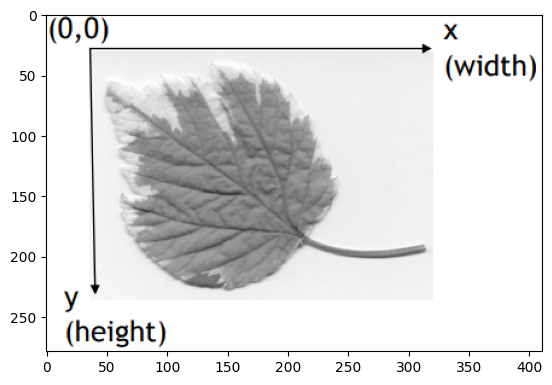

In [17]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
img = Image.open("image1.png")
img2 = Image.open("image2.png")
img3 = Image.open("image3.png")

plt.imshow(img)

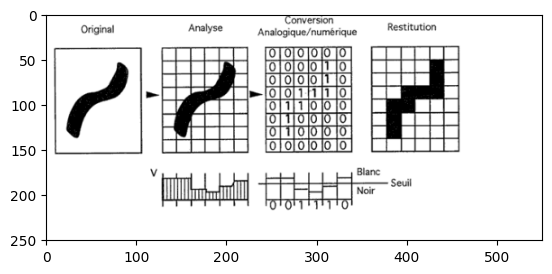

In [25]:
plt.axis([0, 550, 250, 0]) #[xmin, xmax, ymin, ymax]

plt.imshow(img2)

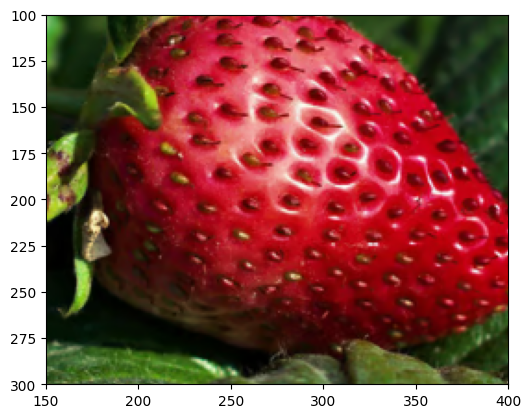

In [29]:
plt.axis([150,400, 300, 100])
plt.imshow(img3)

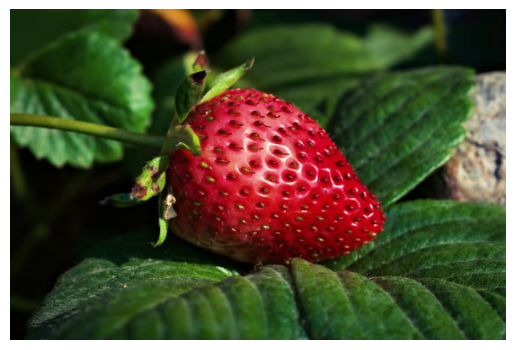

In [18]:
plt.axis('off')
plt.imshow(img3)

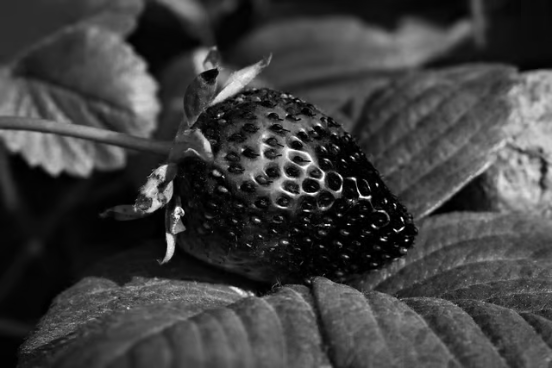

In [40]:
img3.getbands()
green

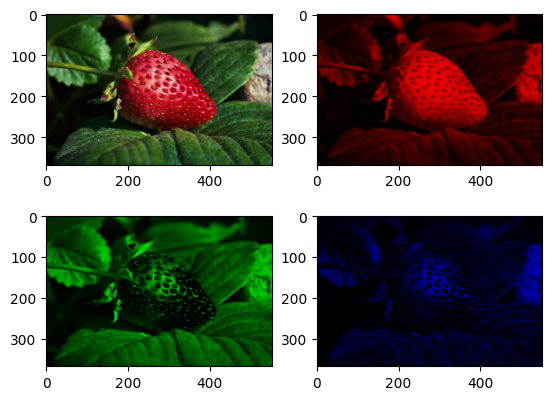

In [51]:
red, green, blue = img3.split()

#creer une image de même taille mais contenant que des zero
zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))

green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))

blue_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue))

plt.subplot(2,2,1)
plt.imshow(img3)
plt.subplot(2,2,2)
plt.imshow(red_merge)
plt.subplot(2,2,3)
plt.imshow(green_merge)
plt.subplot(2,2,4)
plt.imshow(blue_merge)


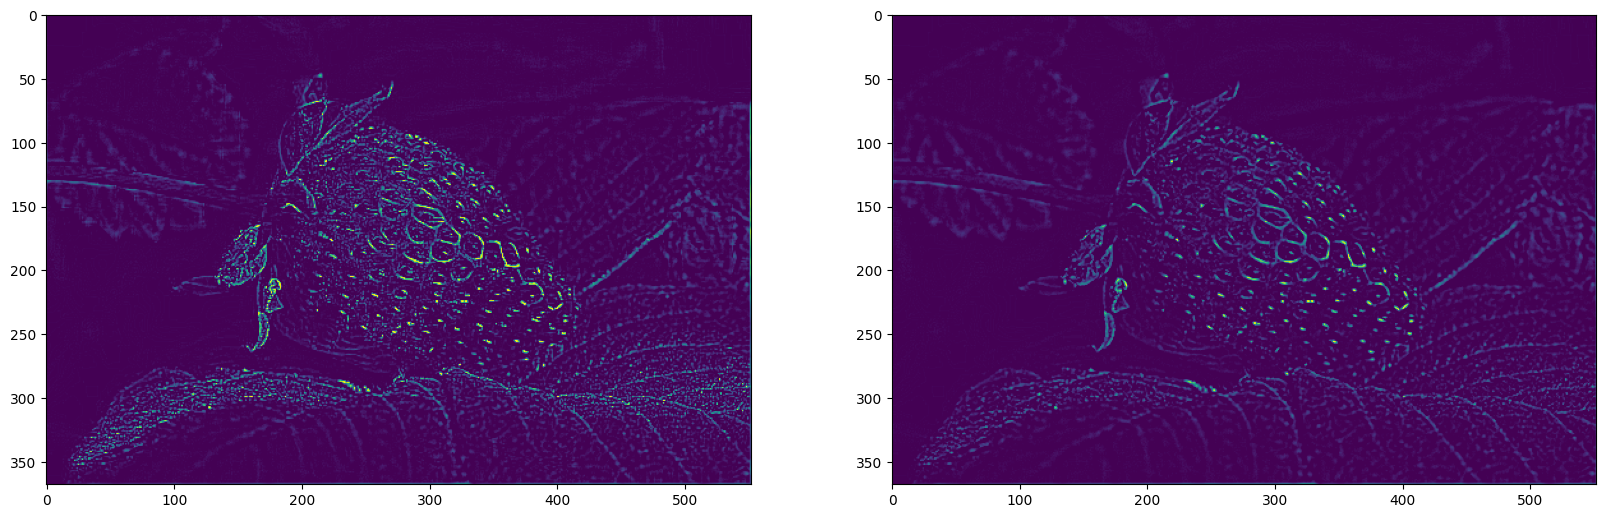

In [61]:
img3_gray = img3.convert("L")
img_gray_smooth = img3_gray.filter(ImageFilter.SMOOTH)

edges = img3_gray.filter(ImageFilter.FIND_EDGES)
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(edges)
plt.subplot(1,2,2)
plt.imshow(edges_smooth)

2e méthode avec Kernel **convolution**


In [3]:
from scipy import signal
import numpy as np

kernel = np.array([[0,1,0],[1,-8,1],[0,1,0]])

def displayTwoPlot(im1, im2):
  _, axes = plt.subplots(ncols= 2)
  axes[0].imshow(im1)
  axes[1].imshow(im2)


In [4]:
import inspect
inspect.getsource(signal.convolve2d)

'def convolve2d(in1, in2, mode=\'full\', boundary=\'fill\', fillvalue=0):\n    """\n    Convolve two 2-dimensional arrays.\n\n    Convolve `in1` and `in2` with output size determined by `mode`, and\n    boundary conditions determined by `boundary` and `fillvalue`.\n\n    Parameters\n    ----------\n    in1 : array_like\n        First input.\n    in2 : array_like\n        Second input. Should have the same number of dimensions as `in1`.\n    mode : str {\'full\', \'valid\', \'same\'}, optional\n        A string indicating the size of the output:\n\n        ``full``\n           The output is the full discrete linear convolution\n           of the inputs. (Default)\n        ``valid``\n           The output consists only of those elements that do not\n           rely on the zero-padding. In \'valid\' mode, either `in1` or `in2`\n           must be at least as large as the other in every dimension.\n        ``same``\n           The output is the same size as `in1`, centered\n           with

In [6]:
def convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0):
  """
  Convolve two 2-dimensional arrays.
  Convolve `in1` and `in2` with output size determined by `mode`, and
  boundary conditions determined by `boundary` and `fillvalue`.
  Parameters
  ----------
      in1 : array_like
      First input.
      in2 : array_like
      Second input. Should have the same number of dimensions as `in1`.
    mode : str {\'full\', \'valid\', \'same\'},
    optional
    A string indicating the size of the output:
    ``full`` The output is the full discrete linear convolution of the inputs. (Default)
    ``valid`` The output consists only of those elements that do not rely on the zero-padding.
    In \'valid\' mode, either `in1` or `in2` must be at least as large as the other in every dimension.
    `same`` The output is the same size as `in1`, centered with respect to the \'full\' output.
      boundary : str {\'fill\', \'wrap\', \'symm\'},
      optional
      A flag indicating how to handle boundaries:
      ``fill``
      pad input arrays with fillvalue. (default)
      ``wrap`` circular boundary conditions.
      ``symm`` symmetrical boundary conditions.
      fillvalue : scalar, optional
      Value to fill pad input arrays with. Default is 0.
    Returns
  -------
   out : ndarray
   A 2-dimensional array containing a subset of the discrete linear convolution of `in1` with `in2`.
   Examples
   --------
   Compute the gradient of an image by 2D convolution with a complex Scharr operator.  (Horizontal operator is real, vertical is imaginary.)
   Use symmetric boundary condition to avoid creating edges at the image boundaries.
      >>> import numpy as np
      >>> from scipy import signal
      >>> from scipy import datasets
      >>> ascent = datasets.ascent()
      >>> scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
      ...                    [-10+0j, 0+ 0j, +10 +0j],
      ...                    [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
      >>> grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

      >>> import matplotlib.pyplot as plt
      >>> fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
      >>> ax_orig.imshow(ascent, cmap='gray')
      >>> ax_orig.set_title('Original')
      >>> ax_orig.set_axis_off()
      >>> ax_mag.imshow(np.absolute(grad), cmap='gray')
      >>> ax_mag.set_title('Gradient magnitude')
      >>> ax_mag.set_axis_off()
      >>> ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
      >>> ax_ang.set_title('Gradient orientation')
      >>> ax_ang.set_axis_off()
      >>> fig.show()

      """
  in1 = np.asarray(in1)
  in2 = np.asarray(in2)
  if not in1.ndim == in2.ndim == 2:
    raise ValueError('convolve2d inputs must both be 2-D arrays')
    if _inputs_swap_needed(mode, in1.shape, in2.shape):
      in1, in2 = in2, in1
      val = _valfrommode(mode)
      bal = _bvalfromboundary(boundary)
      out = _sigtools._convolve2d(in1, in2, 1, val, bval, fillvalue)
  return out

In [20]:
img3Contour = signal.convolve2d(img3, kernel,
                                boundary='symm',
                                mode='same'
                                )

displayTwoPlot(img3, img3Contour)

ValueError: convolve2d inputs must both be 2-D arrays

```python
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
img = Image.open('chemin/vers/image.jpg')

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Ne pas afficher les axes
plt.show()
```

# Deuxième partie : médical images Dicom / NifTi

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import requests
import tempfile
import os

In [ ]:
!wget 'https://github.com/tomaroberts/nii2dcm/raw/refs/heads/main/tests/data/DicomMRISVR/t2-svr-atlas-35wk.nii.gz'

# cette instruction télécharge le fichier dans l'espace colab du notebook en cours seulement
# NB : le fichier sera peru lors de la fermeture de la page

--2024-11-27 16:47:53--  https://github.com/tomaroberts/nii2dcm/raw/refs/heads/main/tests/data/DicomMRISVR/t2-svr-atlas-35wk.nii.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomaroberts/nii2dcm/refs/heads/main/tests/data/DicomMRISVR/t2-svr-atlas-35wk.nii.gz [following]
--2024-11-27 16:47:53--  https://raw.githubusercontent.com/tomaroberts/nii2dcm/refs/heads/main/tests/data/DicomMRISVR/t2-svr-atlas-35wk.nii.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15559882 (15M) [application/octet-stream]
Saving to: ‘t2-svr-atlas-35wk.nii.gz’

t2-svr-atlas-35wk.n 100%[===================>]  14.84M

Télécharger le fichier l'adresse git en haut puis

In [ ]:
# Load the NIfTI file
brain_vol = nib.load('t2-svr-atlas-35wk.nii.gz')
#brain_vol = nib.load('exemple.nii.gz')

# Now you can work with brain_vol
print(brain_vol.shape)
print("Type :\n")
#dir(
#print(path_temp)
#temp_file_path

# What is the type of this object?
type(brain_vol)

(180, 221, 180)
Type :



nibabel.nifti1.Nifti1Image

In [ ]:
nib.aff2axcodes(brain_vol.affine)

('L', 'A', 'S')

In [ ]:
# view 1. Header:
# contains metadata about the image, such as image dimensions, data type, etc

header = brain_vol.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 180 221 180   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.e+00  5.e-01  5.e-01  5.e-01  1.e+03  0.e+00  0.e+00  0.e+00]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 18
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 44.75
qoffset_y       : -57.25
qoffset_z       : -47.0
srow_x

`header` est un dictionnaire Python. Les dictionnaires sont des conteneurs qui contiennent des paires d'objets - **clés** et **valeurs**. Jetons un coup d'œil à toutes les clés. Comme pour `brain_vol` dont les attributs peuvent être accédés en tapant `brain_vol` suivi de Tab, vous pouvez faire la même chose avec `header`.

In [ ]:
print(header.keys())

['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']


array([  3, 180, 221, 180,   1,   1,   1,   1], dtype=int16)

In [ ]:
print('sform_code : ' + str(header['sform_code']))
print(header['dim'])

sform_code : 0
[  3 180 221 180   1   1   1   1]


In [ ]:
file_data = brain_vol.get_fdata()
print("shape of the Data file : ", file_data.shape)
print("Nombre total des voxels : ", file_data.shape[0] * file_data.shape[1] * file_data.shape[2], end='\n\n\n')
file_data

shape of the Data file :  (180, 221, 180)
Nombre total des voxels :  7160400




array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Exlications
**NiBabel** est une Librairie Python permettant de lire et d'écrire des données de neuro-imagerie. Pour en savoir plus sur la façon dont NiBabel gère les NIfTI, consultez la page [Working with NIfTI images](https://nipy.org/nibabel/nifti_images.html) de la documentation de NiBabel.

---
NifTi comme Dicom (dcm) c'est un seul fichier qui comprend les **data** : plusieurs coupes (slices) avec des **métadata** dans l'en-tête décrivant le contenu

- la notion fondamentale c'est le VOXEL : pixel 3d qui sont un tableau multidimensionnel de valeurs.

- La position des données NIfTI dans l'espace est déterminée par la matrice affine.

>First voxel axis goes from right **to Left**
>
>Second voxel axis goes from posterior **to Anterior**
>
>Third voxel axis goes from inferior **to Superior**.

L Left S Superior A Anterior

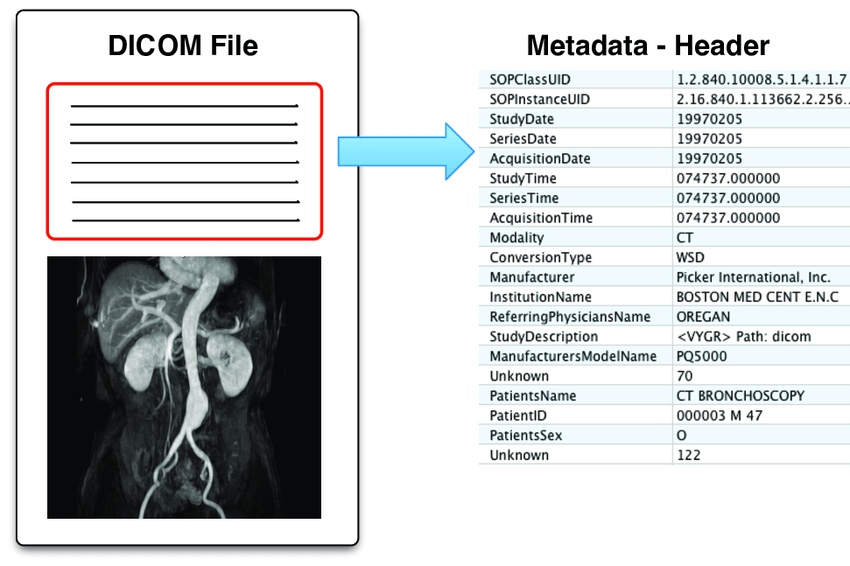

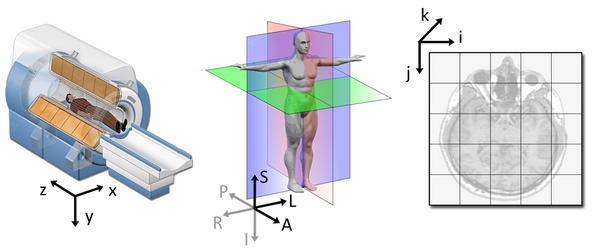


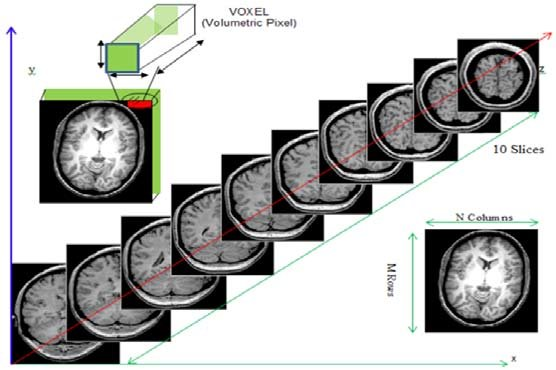

In [ ]:
# on va couper le slice du juste milei
index_midx = int(file_data.shape[0]/2)
index_midy = int(file_data.shape[1]/2)
index_midz = int(file_data.shape[2]/2)

midle_slice_x = file_data[index_midx, :, :]
midle_slice_y = file_data[:, index_midy, :]
midle_slice_z = file_data[:, :, index_midz]

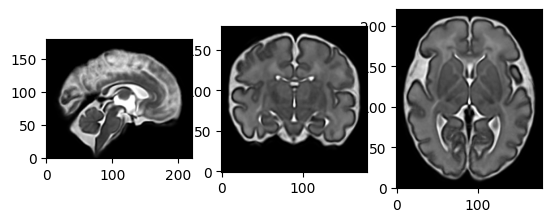

In [ ]:
# Visualiser l'image
import matplotlib.pyplot as plt

slices = [midle_slice_x, midle_slice_y, midle_slice_z]

fig, axes = plt.subplots(1, len(slices))
for i, slice in enumerate(slices):
  axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 60.5 MB/s eta 0:00:00


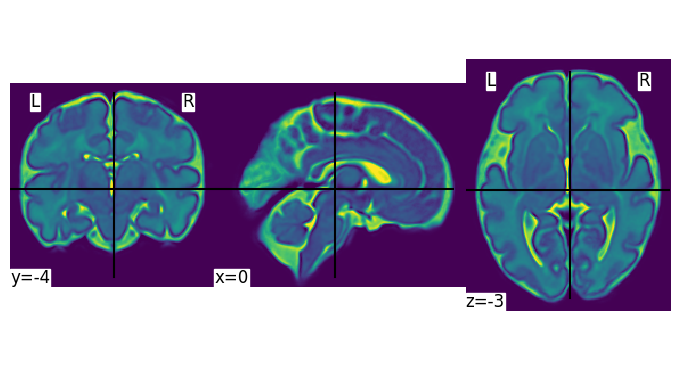

In [ ]:
from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()

display_mode='x'

display_mode='mosaic'

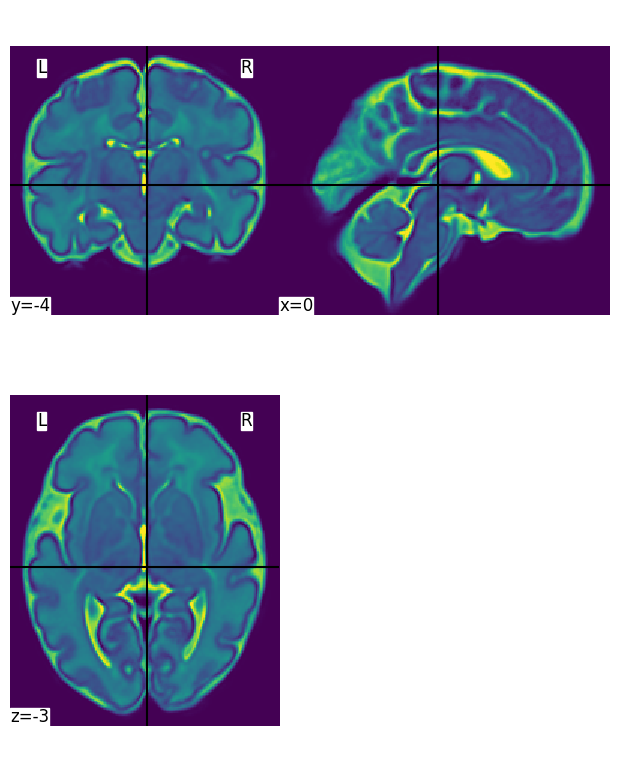

In [ ]:
plotting.plot_img(brain_vol, display_mode='tiled')
plt.show()

## prétraitement des données images

Normalisation

In [ ]:
rmalized_data = (file_data - np.min(data)) / (np.max(file_data) - np.min(file.data))

NameError: name 'file_data' is not defined

# **Bonus**
## Guide Markdown


#  Titre 1
## Titre 2
###  Titre 3
#### Titre 4
#####  Titre 5
###### Titre 6

*Texte en italique*
_Texte en italique_
**Texte en gras**
__Texte en gras__
***Texte en italique et en gras***
___Texte en italique et en gras___

~~Ce texte est barré.~~ mais pas celui-là.

Le 1^er janvier

Ligne séparation

---

>Ceci est une **zone en retrait**.
>La zone continue ici
> Ceci est une autre **zone de retrait**.
Cette zone continue également dans la ligne suivante.
et la suivante encore

Mais cette ligne n’est plus en retrait




- Liste1
- Liste 2
- Liste 3

~~~
1. Elément 1
2. Elément 2
3. Elément 3
~~~
il n'est pas nécessaire de respecter la numérotation

1. Un premier élément ;
10. Un deuxième élément ;
5. Un troisième élément.

C’est le code `import nummpy as np`.

``C’est tout le `code`.``


et ceci est en couleur
```python
import matplotlib.pyplot as plt
```

AZERTY : touche `Alt gr + 7 `  
QWERTY : en dessus de Tab

NB :  ` non pas **'**

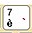
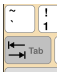

|cellule 1|cellule 2|
|--------|--------|
|    A    |    B    |
|    C    |    D    |


Tableau mis en forme :

.



| Colonne alignée à gauche avec un titre plus long que les autres colonnes| Colonne # N° 2 # centrée | Colonne N° 3 alignée à droite |
| :---------------- | :----------------: | -----------------: |
| cellule 1, ligne 1 | cellule 2, ligne 1 | cellule 3, ligne 1 |
| cellule 1, ligne 2 | cellule 2, ligne 2 | cellule 3, ligne 2 |
| cellule 1, ligne 3 | cellule 2, ligne 3 | cellule 3, ligne 3 |  

This is link of a tutoriel Markdown

[le texte du lien peut être différent du lien lui même ](https://colab.research.google.com/notebooks/markdown_guide.ipynb)ou le même dans la ligne suivante


[https://colab.research.google.com/notebooks/markdown_guide.ipynb](https://colab.research.google.com/notebooks/markdown_guide.ipynb)

+ [ ] case 1
+ [X] Case active
+ [ ] case 3


Dans le texte ordinaire [^1] vous pouvez facilement placer des notes de bas de page [^2]



[^1]: Vous trouverez ici le texte de la note de bas de page.
[^2]: **Note de page de page** peut aussi être *formatée*.
Et celles-ci comprennent même plusieurs lignes

Exécuter la cellule suivante

In [15]:
# imgData, imgData2 et imgData3

imgData3 = b'iVBORw0KGgoAAAANSUhEUgAAAigAAAFwCAIAAAAdWhfVAAAgAElEQVR4Aey9h5cc53mni+nuSl+onHN1VefckwMmYmYwA0xGIgnmKFLBtKhMSqIoUmIQJVq7a1uWvesgey1Z8rUkW1a0ohVIikHy/3PPV9XdMwBBUt5779496+3znDqF7p4heA4wD37v+35vn5Ib4C2BcuMNNKH8NgC5yclNTmkCQmuA2oZqG2ptpHUIRg8ZfWhmjCPrrcDWBLYnsD2JnCnsTvMDprAzhZ1JZE8iawJa48DocwN6rNFjs3uzz5njwJ6ATvblU9ieQfYstuaxfRq7y6K7Kvpn5OCsEm2rxR0t3tOTfSM50EsHerKvxHtysi+VDuTSoVI+VEqHSrwvRTticI73tnj3rOBuCs6G6GxI7obsbireWTXY0qNzZrLrVg78xsWofVOpf2tt8o7G9F2dmXt6s/f2Z+/tz9zXnyb0pu/rztzfmbu/vfBAZ/HBzsqD3TPv7G28s7/5rt65d/aO7mtcuaN6y5X45j3v0hnzYF47Ny6uN/nlmrBQFubL8lxFXajIixVppSacbQoH48Kt8/I71qVHdpRHj9QnLqvPXFX/4B7tzx4y/ub3ra9+0Pv6o9E3H4v/6aPlb32s9s+faHz3yfYPPt370bPjP/3MxC+en3jxMxMvPTf+0rO9F5/uvPjp5q8+VX3xqfKLnyz+8vHoZ48FP/6g94NH3H9+j/21dxhfukv506vSf7rEP7kL3r/NvHMVXD0Nzs2AlR6YbHKNEowD4LjAtJFhY8NBhgsMF+g+1EKgRUCLoZZwOoExSqxZYu0y65U5vwKiCixVUa2Fu31helqeX5BPL6qE0+rcgjozp05MKd0JpdVVqk0hrkCvyBkuK+o0lAuMkKdwvgBzeW4sx4zl6bECPUbRYyxbQJCRBWDKKND5siO2fKVf1KdLxlzVXKw7yy1npe2utP3FurdQ9eYq3kzZHS/Z7dishlroiqaNZJ1DCsXKeVoao8UcJeZooUCLBVqkaJFmRIYgMbTM0jJHy4AgZXC0xFESR4kZLCWyBZEtCExGXmAIfAad529MjqdPUkBMATF5xBYQR8EMSMEBNIQ0eHsYCIcgDhIAQBAgmD4QgCMwgAQIMUQYIh4iHmVgHmEBYQHzIuIl/O9AxoLMX4+KBQULChIzZCTKUJChIEFBAnyGyPECwDyAAziIOYA5gFiOwHCQYQl0BgfpawA0l8HRHEtzDM0yDENf+6BOPAq/4yNPF/J0ocAUKK5AcxQNMmiWYzjAQcBBCDHiJaTovGkLXoSTGuxM4NlFfmWD3zov7x4a+xecvUP/3F60cba8tNyYmmm1u+240nSiuubWFKcqWmVslbBV4u0ytirIrGKrxttVbCfIiKAekr9jKoFTQk4JOMnjRJcVbA6bLNY4qAEgc0DkOJ7jMMdhyGLAYsCgDI5BHA0LkL0WpgDpfAagCtwAiqMJIIOiAEXDa6BAgQKFAlcosIU8k8szuRw9duotrQNuYJ3G21oHys3fSTx6Fxk9OHQPMscJb6kfZE/AzD3ENyn2JHnSmoDmODCH4tF77IhMP+Y4sE58rT2NrFlkzSH7NHaWeHdV8M9IwaYcbSvF82q8o8d7WrJPiPfU4q5c3JXjPSk5kJN9IqHijhhm1tnEzjrvrgvuuuCtS96G7G8owaYebZnxObu861YPwsbFuH2l2r+1OXFHZ+qu3sw9mXXGZ+4bT8Vzwj0PdE8/0F16sLf6UG/tod76O3vbD/X2729dvLN65ab48r5/tG6fX1DX+9JSQ5wvCzOJOJ1I04k8E4szsTifCEsVnrhnQrr1tPzAGfk928r7d5XHjpSnblFfuFv7woPGXz7sfOUD4d9/KP76o6VvPFb5p4/Vv/OJ1g+e7Pzo072fPtv/5XPjL35m/KXP9F9+rvfyc92Xn22+/Gzt5WfKL38qfvGT0S8/HvzsUfdHH3S++4j1zXcZf/eA8ld3in9yC//ZC/DxffC+LXjfKrx4Gm5PgYUe6NdALQZhwLketF1kecj2kO0DMwRGkTNizihxZok1y5xVZuwy61Y4v8KGVS6ug3ID1Juo2+OnpsT5BXl5SVleVpeX1aUljbhnXp2a0XqTarsn147FwxDxSAWGL1AoXwC5PJsj4qFO5amxAjXGMHkIGBGzugR9jS/bUstX+0VtqmTMVs3TNXup4S633OWWt1h356vubMWbqrj9VDyVSAs80bKRbHBIo1m1QCk5Ss5TUp6WKGYAnfqGZWSWUVhG4RgFEOQBQw+dNNBQP8RAGQMPFTIPvfE6MNPIT2wBZ4ACBhQCNAGeANHoRkDMDOAZSGAhzyLEpWYZyCVTDMQo880brTMQz8g6RDwjRMwT+GOuExJRTsb14hFlLB1bBxLrSFAQCbwAMjDPYZ5D/Mg3qXIgy8GhcgDNpLCA4gYMZTNSDkdzQ/G8lXUoinqDd6hCgX5ziHiIcpgBNAtYDr6deIStHWX30Di44Owf+ef2ihtb5eWVxvRMu93tJNWmU2wYXk11q5Jd4Y/FUx2Jh7fiY/FoAVADTgmA7HGSy4k2x5ss1jmosVDmgMRywn8s8YxCj96FeheecA80++gtgeY4tMaJZoiBUt9YqW9GyjFOKOfYPWkMskbumUT2NLRmoDUHrQVkL2J3mffWxGBDCs8O3FPcUeJdNbWOEu1I0Y5U3JHjXSnekYrnhXBb8M9ibx25Z5CzhuxVbK/y7hnJ31DCTS06axS3zOScU971a/tR80KpfaXau7U5fntn8q7u9D29mfvGZ+6bnL5vYuq+/tS9/al7+lP39Kbu7c7c2529rzt/f6qfd3RXHuxuPtjbeaB9cFf96JbS4WG0s+ltLJhLPXW2Kk3GYj8U+gE/HpBr38fjPj8d4tMlfr0h7vWlK7PS7YvyvavyO89K799VPn5JffpW7Q/uMb/4kP9XD4dffl/ytQ+Wv/6R6j89VvvOx5v/8kTnJ5/q/uKZ7q+e6730fPfXn+2+8nz3lc+2Xnm+8cpnqq88W3rl08WXngx/+bj/r495xD3vNb/5bvWrD4h/fTf+4lX8/BX8xD5+7za6+wy6vADPTsHFDuzXYDWBxQgFIfJTvBC4EXBi1i6xdoV1KqxT5bwq61fZsMbFda7cANUWaLRhr4enJsWFOWKdtVXtzKq2tqqtruhLS/rCgj4zq40T8SgnxSPoNBQphs9TMFfg8jkmN0aP5ahcLhUPTec5jhIgo4nAU1FiiU1P6YXaZKzPVqz5mr1Ydxab7ummu1B356ruTNmdLDu9st1MzFJRCwLJdLFkQWywrE7RWoFSKZpAMwrNqAyjshmsyjEaYHTA6JCgoRTIaJBRIa1ARkmT0CAMjWIQkdAgBmVh6EQeGgWj0c0wIXEFnqN4luI5CoMMGiPCDX0zeBLTiD8JgzLx8CxK8wPCAKXBZugeDHD6FAk6AxDCJO4MrUPizkA8A+Vk4rn2ep17hr88YSAsyViUsShhUUKihAQRHSuHBzz5nXAYcwhzCLEEyALIcYDlAMtyDIFlmDS/MAydwZJAQ+DeBJamrxHPiagzuD0hnrdWDok7eYq9TjwMC8hv8w2JxyeJB3cneJJ4Nol49o7Mgwvu/lFwfi/e3K6urDZnZtudXqdUa3txwwxqqluTnKpoV3i7TLCIeHizJlrVVDwh0kOohyAVD1B8Ih7R4QSL48m/m1iopNbJ4s5/pMQzEo/WIeJJAXoPGG+C3iOv6t3he/rAHHBcVcsco3WZG6KnNbcs9GS5x5pKxTMLrHlonYbOEnZXeX9dCDbFcEuKtqXonBSdl6PzSnRODs/J4bYcbYvRthBtC+EW729idx25a8hegfYyspexTdQlhxtatKkXzxrJllXadis7mXiS9pVy92q9f3tr4s725N2d6Xt70/f2p+4dn7ynP3F3b+Ku3vhd3fG72uN3tSfvbk/d0565pz17b3vh/vbaO3rbD3R2727sXa3sHMVbm+HavDffNabKSi+UOp7QcXBGy8EdG3ddPBng+Zg/UxO2O8L+uHhpWrp1QbxnlaSfDx4oH7+kP3ur85/v8f/sweiv3xP/3SPlr3+g8q2P1L77sfoPP9H82aeav3q2/fLz7V9/tv3q5zqvvdB+7YXm659rvP7Z2mvPVV75dPLyk9GvHg9/Tmpu7vfea/7Tu9X/60H5v98r/skdwguXhU8c8O/dxvet4Uun8dYUPt3B3TqqlnGS4GIRR0UcxjBIOL/M+hXGrzJBjQ3qbFRn4zpXanDVFtdoc+0O6PXg1CS/MCutLMrrK9rmmra5pm+sGWdWjJUl4/SCPjurTUxonbTUVqxAtwh0h+U1GogFGg/jDp0bK4yN5U+NFcZyhbEClWOZAuYYBXOujGJDaDhyN1AnivpM2Zyr2As1e6HuLNTd+Zo7U3Gmy+542emUrXpiJLHmhZLhYclByOZYi6FNmjYpxmCGsIzBsgbHGoBgAtaEjIkYE7MmYo0hGmRTGBUxxECQkWEWidKiHJFQ4W1gCxIhL2ZwlAgKQgYsCANoHmZQPByAIYURNRISxPS1pAEo1Q9MUwQpsA3raql+EMQIQsK1D4wxn/K7iOdNnCQQzQxMQ2RDfJNGHAHyAuR5Ak7lhxHAiEOQQH6KAxZyLMexLMcOfcOQx4maGUNT10Kz9A04+SX0DcWTpwp5ispTdJ5irqNAMSPSl1hSZyOJC6YAhntT8ZTqfHdCmF3kVzfF7V11/4J1eMk9uBDu7Cdnz9VW11qzc93ueLdS7/ilphXWNa8uuzXRrghOiSf6qWAinqpoVTLxYD1AWgi1AKoBkH0geUC0iXjSuMMBmWNFluE5dmCdty615QcFtxN1NkjnAVUg0BnDOhtNAVJqu67aNqiznSi15Znc/9xSW4v0eE50eqDWASlQGxhopKLjG62bvY3TOpzW5fQRPU7vcfpJ2XRotcOqHVYbkb6qdxmjx2a1ONIKmoDmJLCmgTnDmXOctQDsReisIG8N++t8sCEEZ4VwSwi3iISCLSk4m0GeDzYFf533ziB3FTkr0F6C9hLJTM6SkIpHjzb16KwRb9mlbbd83q/uhfXDYvNS0rm52r213r+9MXFna/LuzuQ93Ym7uuN3dvt3dHq3t7u3t7q3NzJ6d9T7d9TH72xM39NcfKC3cX/n3N2Nnau180flzc14eS6abTvjidHx1KYttiw+BTVs3LRw0+I7Dh4P+NmYX6rwa3XhbFvc7RP93L4o378uvWdb+ciB+anLzgu3+n9yd/RXD8Zf+b3S199f/tZHKt//WOXHn6z/4un6S881f/1869XPtV7/g/ZvPt/67R+0fvNC8zefrb/+XPXVp8svPxm/+IniLz8a/vRD7g8eMb/9e/o/PKR+6X7pi7fJz18WHz8QH9kS7zojXjwtbE4K012+0+BrVb5c5pMSjsswqnBRhYlqTFSjiw262GCSBltpcvUWaHa4Tpcb73FTE3B+RlhZkNaXlLOr6taatrWqb67q68v66qJ+el6fndYmxtV2R6k2xKiMnAhoNosVihPyNMzl2bEckztFEeucShnLj+ULYxSVB2xBQqwtwaIu1G256xHxTCXmbIm4Z75qz1XtWWIde7Ls9MtOu2zVSkYx1pyipAW86GHoQtblaIelbYax2CEcY3GMBRgLsBZi7RGYtXgCMRCREGMgVh/ph7iHZCAZ0gqg5AyOkrlCxltJKDMQEVVeBAURUCMERAkwg6iIhwU+C0OwgFABQYqAKIgoiEdkHsrqb2za6Rn0e1IDkbYOYfA4qR48fBD9pA+B509ystp2zT0WxAGigEUhu08jjoCEkXIy32BAlEM6TykAIMBBLiWTDps+Uukw9Eg0NE0RmLeDPXYTeT9VyKCowpBUOcQ6I8EUaObGDOMOUQ4LUkiD55rEI+Ksx+NHOBPP3JI4Es/RZf/wYrR7GG+fr66tt+cXuv2JXq3ZDSstp9g0gobq1SW3IjolwSnzVhmbFd6sCFZZMGOsB1gjIDWAig8lD0gOSLs7HNI4oABWYhmeZTBxT9rg+Y8lnlQ/mXX+XddMKqmEOtn1hGZGvrnmZqArg+QkMoCQioczp1hjhjVmWWse2Kc5ewm6qXu8M9hfR/4GDjawv8F7G4K7LpIWzhmCu8a7a8hdQc4ycpagu4hTBHdJ8FflcF0LN/Vo0yxuWvGWk5xzy7tBbT9qXCi2Liedm0u9Wyr9q7WJ25r925v92xq9Wxvdq43OLfXWzbXmzRXCLZXW1XLrarl9a6V3R3X+3vbava2zd9a3b65tHVQ21stLM8WZht8rWi1Hb5hS3eAbFm5YuG7imkGom6hp8z0fT4b8TJFfKAnLVWGzJeyOS5dnxNsXlXeeMT68bT+1733usv+F28O/vD/6ynuKX39/8u1Hk395vPyzp2q/err+62ebrz7fev1zxDqEzzd/+0Ljt5+tvf5c5bVnkleeKr78RPDLj7k/+4j1ow/o335Y/9o79S/dq/3xbepnLqsf21PevSXdviruLYjLU+JkR2g1hFqVr1RwqYJiUlJjYuIbJmmypRZbaXG1Nmh2QbcHxsfB9AScnYKLs8LavLSxqGytqOdWjK1VfWNZP7OorZzWFubUmUl1vK+22nK5zgclYIecatFYKrA4X+BIa4dYp5BaJ0euY/lTudxYvpBjaUoEjCWAosrXLLnjqeORNhkb0wnJPbMVa7ZizZTtqbI1kdXZylalZISJZhUlNeSFACMPcR5gXO4Yh2MdjnEB48IhmHFTHIFxeNZOGYqHMSCdumdQfEvrbzQxEKCu1Q8lEwmdZCAk+Y3B6IR4hgY6TkI8zPMgz5M+UAHBE6ACxAVEIOIhzSFSo2PgMZl+OAg5OPqxn04eoDQCYXIdqmcgnkw/b7yeiDuCiMWMVDkiMU0KjwQekYiDYVpVA8OKHyAjD8ekcYfjIMsBhmMzBuU0hhlZpEDTQ24sCYpmUwZfMnzzQDxD2VDZTWoj+sayOZYQmSnIxgpS8XA0SzghHgAw5EUs67xh834klGpid0KYW5JWN6Vze9rBBevCZf/oUrR3lJzbrZ3ZaC8sdsenevV2r1hru3HTDBuaX5PcsuSUiXusMjbKglERzbJgRKl4fKz5WPGR7ELJgYINeBOQuKOwnMQxadxhMMuSsYK3HS743yXxnAg9qXs4tf22ALU9II1H3HGgOSGYLOu88UrenIYko0fEQwpu48CY5MxJxphijBk2DT2stQjsJegsA3eV1NC8M9g7g4ljVnlnRXBWeGeFtwmpcpahs0ys4y1hb4n3l0R/WQpWFf+MGqyr4boRbJrhWTPasmPiHr+6H9QPo9bFuH057l4p92+u9m+udm+ud67UWpcrzUvlxsVS7VJcuxTXL8W1y8X6lbhxU9K+tTR1Z2PpjtqZq5X1S+X1ndLySjI3EY9Xg2bgVC2tZIglA5VNWDFgWUclFZZUVNZwxUCpfnDb5XsenkwD0HKV32iKOz3p6oz6rkXz0XXn0zveCxeDP749+Iv7wy+/p/iND8Tffaz04ycqv3iq/tLTjV8/13rt+fZvXmhn7vm3P6j/9nPV33y2/PpzxdeeiV75lPfyJ50XP2H+/DH9hx8wvvWw9fcPmn95t/FHV/VnLmof2lUe2lBuWpHPzksLE2I/c09NqNRwqQHKDabcZEptptxmq21Q78BWF/b6aHwcTU0S6yxMoeUZYW1O2jitnF1St5a1s0v6+qK2uqAtzWkLM9r0hNLrKo2GnFR4Lwamx8oGjcQCAwp5lrR2jq2TGzs1cM9YPj/GUAWRY0wehCqumlLHVfqhnrlnKtGnS+ZM2ZoqW1MlZ7xkd8p2o2yWh+JRIiIe6BPxsNe5h3johuLhGSfFwoyF6TTxZOKhdUA4ts5APAUFvAV5BQzh8gphGI9AQYI3AuTFDBJ9Mv3kMUqjz/XXk7W4k+5hEGBJwBgMZQEEWQw5Ej9G7sGIJ5Cy29s/hNHAgYAFwrXKyQblhhmL/GcASMftACIDBID0dDKYa6zDpuKhKZYiDEpfI/Fcd8MMlZOKZ5SQ0pvr9DNIPzSVY6g8Q+cZJs8QjV3zHYjABgNsFA2uFQ8ZccjEk4UegCAWkKzxhsV7RDxCd0KaWxRXN6XtXf168WwS8UxM9xrdflzveEnTjBpaUJfdykA8ZpnXS4JRFs2SqIe85vGqzyseUlwoO1C0gWABbHBQS4tsJO4AmgdEPOg/mHhaUD3WD/gdxMONxKO2B/FI7XDXlNROGOhGWkoLdD0wmKAbB8YEa0yy+hSjTzPGLGvOM/YCl7qHc5YBkcoKwV6G1hI0F7F5OgNai9AmigLuEiLKWeb9ZYFYZ0X2V2X/jOKd0bwzureu+xtmsGFHZ5142y2d9yt7Yf2g2DyMmxeS1sVy62KldaHcPEoaR3HtMK4eFisHUeUwrByFlQth9WJYuxQ1borHb63MXy0vXU6W95Ols8n86XiiF7VLXsW1YkONVD5SQVFjYw3EKigqqKjgWEElDVV0VDVwzSRhqGnjjktmEGaK/GJFON+Sbx3XHprXP3zGfnLH+9wl4p6/vC/88ruL33h//L3Hyj95ovaLpxovPd1+9bnu6893/+1z3X97ofNvL7R/+7nGb56vvv6Z5PVn49eeDl99ynv5k/ZLj9s//4jz/ffZ33qP83cPWH9xp/WfbzaePNLff067e0M9XFbWZ+XZcWm8I7abYqOJ6y1Ya3O1DqHeBY0ebPdwbxyPT/BTk3h2Es9P8aenhaVpcXVGWp+VN+aV9ZTVeW1lTlucUecnlcm+0m7J1ZoUJdgJOM1mBIVmcYHicnlinTFSYcudOkWsMyKXy+cZKi+wtMGDUMEVU2w5ctfX+qE2UdQnY2MyMQklc7xk90p2u2TWykZS0v1YMYqiHPI4wGAonje454R4HMQM4GmbZ4bWoU1EpXGH1iGlA0rjCipXUN/KNL+jhE6kIkjJAwrySEWgIBH9DJpApPiWSQjmeTQiFQ8cTCgMBuTImFw2ZMum+iG9/BQudQ+HEcdn+hm4JzUQCS0ZWOAzhj46ts5AP9lQAhbwaDYb8SPrDPPWCeWkYwQM4BgyBT0YhM5kU2CpPFu4MQNn0Kk50itL54cUWPok5HkimAyK/KEZkFmHzTMDCgxLMSx1Ymz6pH6GDR5IxuuGoSd1D0QCklRetwQ3EJKq0OmLs6el1Q15e1fbv2CniSckiWevur7ZOr3UnZzu1Xu9Yr3jJk0rFU+aeBLRTngz4fWY12NRLwpawKseVlwsu0gaWAdiA6RFNpYj3R2OJdYBDOJYTHi7ceos8eQRTRiNUw/aPIMeT2EwS01nk9MnOz3pfTpLzRXyXCHP5nMsmaj+n97jyayTXkfne97i5lpFHUefka5SzZysvL1J/Y2EnnR+IQ09xgTIxGNk4pnjSMFtgbNPA+IVArQWgXUamAvQmD/GXADmadLacZeRv8IHq2KwKgWrcrBKxOOtyd6a6q3q3qrhrZn+mh2sO9GGl5wNyueC6k5U24tr+0njoFRPqe0n1b24vFcs7UalvaC0F5T3/fJBUDkMKkdB/WLUv6k0c6U8f5TMnUtmVuOJmajVDKuRW7TMQFUCmQ9kEMpsJLORAiIFDtyjoUTH5ZSKgSsmqlm4YeO2g/s+Xoj57Zp0U095x5zxgTP2J3e8z17y//i28C/uK37lXfE331f6/qO1n36i8cun2i8/3Xvluf5vPjP+2+fHf/vZ3m+f7/zmM63Xn62//kzltU+XXn2q+MoTwa8f93/1mPfTD/jf+33/m+/0vnyf82e32c9fMR/fN959Tr99Xd1fVNZm5YVxeaIndrqo3UWtHmj1YLMP2n3YGYepdfDUJD87yc9P4vlJ/vSEsDghLE8KK1PS6rS8OqOszCjLM+ritDo3qU73lV5bbtalUln0I2Q4nEQGqSkyzEaTGTYyUDAQz6DHk3Z6xnK5HE3leY7WeeAruGSQNk/LU7uB1gu1fqT1i/p4bPQTs1eyOiWzUTIqJa2YaG5R1iJBDDH2MfAhmyaeG4jHAQwB0g4i2HhAmnUy61AGLOhggMYVUvdkIebYMSogNrohN8pDwww0CkOjmzQVyVxeAnnSChoigLxAKm8pXJ6/BjImlw7I0RicJP1hBZlMPMODH2n0QYBHZNyMx0AgQAHDTDxCWjk7cb1mxm2knPQIEJmPS90DEQ8QmWsYWYcFiAGQAYAZDD+zFMcWOKbA0dlpkqFs8jnyc438aCMwuRyTP0Ehx4y4xj0FliGQbzhk6KSRnNIbJs+yhevhCsOZ6dHw9KDadu3zNJvmHg5ygPyPigrWDN7x+WJZaPfE6QVxeV3a2lH3j+wjUmoL947ioXg6k9PdVDztgXhIqa0kOrFgFXkjxlqR14qCFvGKj2UbyzaSLChaQDCH1lE5IJM6Gyuk4kHghHV+lx7P/2TxvOHoaHaY9G1Oj77pOR6lBYhIWvAtTPPGl064JxtMGIQkpTWq0d2wS3Rd72cYetLZOX2cMyZYfZI1plmddHo4cw5Y80MWgLVAlGPOQ3MOGnPQmEXGLDDmgbkArEXoLCNvlQ/OCOEZKViXgjNycEb2iXVkb1X1V3R/xQiWrXDFjtbcaN2LN4NkO6icj6o7cXUvGVHejUu7xWQnis9H8U6Y7AalPb+075f3/cqhX7sQdS8nExeTqd1kciPuLxZb42G1GiS+G+qGLyueKPoi8kUukLhAhqGMIoVQVHGi4STVT6LjREellLKBaibqumguwhtV4WJXvmdWf2TV/sQ57/kL0Reuxn9xT+kr7yx/872173248eOPt37+ye6Ln+6/8uz4a89NvP5c//Xnuq89237tmcarn6699lTp1U/GrzwevvKx8KXH/F98MPzRI+G33xP8wzu8L93l/uFV+5kL1of3jIe29Ktr6s6iuk6SijQ5jsf7qDdO6I+j/gQan0QTU2g6zTpzE3h+gl/oZwgLPfF0P0OaH5fmxuWZnjLZHVinUhbCIm96UDIYJFMMLgVvBVYAACAASURBVBTY1DrZJFvqHqKfAun3kCt5PkdReczRGhlsw0VNqFhSw1GantoO1E6odiOtW9Q7sdGKjXpiVBItTlQ/VsyilNbZEPIR8N5EPA6gM2xID0CUhSkL0eYAyoAZmXjyGpcC8hrIq3CABgsqgboR2UvpdWimG6kocxgRkszlZS4nsQSRMCayY8K18OxYSk5gcwKb59kCT6a0C5hADaExl5L+cxkDhucYHjA8YHnICZATUArmBEJmoIGEMhUJPBSEa+AFlIHJ5BrgeYDJmVQyL02GpYfz0pAohwYcDYhvqNQ3eY7Oc1RGjqNyXCEll+PeAPFQIccWxk6QY6kUOke+D5PnmAJgryMPyPPXwuY5rpBCcRyB5SgWHjOYYYNEPOkB0sxAg5Okx7mHHJQSZKzqvO3iKMHNjjA1JyytiWfPKbsH5uFF9/BisHdYPLdbObPZWFhsT0x36r1usd52kroZ1jS/IjmJYBUFM+L1CKkhVgJeCcjYpWgh0USCCXkDYB0gnYMqB5RUPOkINUk5aMibJx4GZadH/79LPG9ilzcuLBg98/9APG/0yu/yzDXuGexB4JQWq7TYYfR5U/eM5tzScbjB0HYqHk6f5IwpzpjmjFnOmAXmHDDniGmuBZlzA6wFaC+SGQR/jQ82xGhTijblcFMONpVgU/E3FH9dCda0YNUIVq1wxYpWiXiKqXhKW0H5fFTZiau7SS11T2UvKe3GyW4x3omKO2G8E8Q7QbLrl/ZS8ez7tcOwfSHq7Rd7W8XuctSaCmpNv1R0IscKVM0XZU8QfR77AvRF4IvQl2Ago4DoB6f6QUV1QKSiSIWhAosqKhuo5aDJkF+tiIdt9c4p8/eX3I9vhp85iP/o5vJf3FX98jtq33i4/u0PNH7wkdZPPt7+5ZO9lz/de+Xp7ivPtF59uvnKp2uvfKry6pPxq0+Erz4evPqx4JVHg199KPrp+6LvPxz+40PBl+/z/+x29z9dtp84st6/Y96/qV9e03ZOa2uz0twUnp7AUxN4cpIwNYWmpuH0NJydQnMTaG4cz/XwXBfNtfnZtjDTEmZa/HRLmGoJEy2h3xR7DalVF+s1sZyIYYgtNz3RKVMsLhS4fH40P02sQwpuuZQxiky4nSrkxvKkSQxZSkGsJcFA5RNDqFhizZHrntIIlGagNkO1EWm1olaO1ThWgli2ilIWd1AA0wbPsXiy0EO7HO1yzPXiQZT1BkxUMIl7CgbMG4CggxwB5nSY1465oXVGT57QT2apoYQGIYnLq4ScyuUUNq+wxD2pfsYkdkxixsRrEZixDJEhchK4vMAVhEEMKvAshYeQM0MEekjmHqIfAbACTEFs6p7MQJyIwQhBAG9wz/BIKBEPh4l7OIxZlEECFgM5GnAU4E6IgS7AQZEnD8hobx4U8qCQI+QzxkD+GI4aIxTeAD0GmDw4ts5w+wNHfua+QUXpM6AACKMzqcfWSQ1E9iQwRDzZUR6inyHD86Qsw3EAAV5EiopNGwVFXG/xEzP84qqwsS3v7JMDpAcX/N2DaHunfGajPr/YGp9u1brtqNZwkpoRVlWvLNmxYIa8EZIBNtlHso8lj1iHJ8ohQYdYhywp4MjBnfTEKMjG2BDHAgKZCRy0ea7bXEAKcf9HPKOcNIpK2T6e9MqccA83HM4eSYiMIRDxtNMZ62wOOzst1OeMCZCKB5jTwJiBxiw0Z4E5i0akKQeZc9ia5+0F7JzmvSU+DTpEOfG2kpxTk/NafF4rntOjbS3YUnyiH400eM6YwRkrPGNH60684ZbO+pXtsHo+qu8UG7txYy9u7CW1vbiSFtmS3TAh1vGSXT/Z9cp7XmWfzCNU94PGrt/eClorfmPGq7adpGRGnuHrmivLjig6Au+IyBGRKyKPRB/kS0Q8GaGMQgWFCvFNIGPyZPpqpOLYQHUbTwTCSqLsNfTbx533zAePrRef2S39l8uV/3Z79W/vr/79u6r/9HDtex+o//ijrV880X7xydaLTzVe/lT15U+Vf/1U/Moni698Inj1cf+1jwWvPha8/OHo5+8v/uj3o++8O/z7B4K/utP7ws3usxftj+6Zv7dt3LapXVzRzp6WFmfg3BSenRRS+NkpODvFzU5xc5Pc3Dg314WzbTjThNN1NFnDE1Xcr+JeBbfLqFHC9RJfTfhSzBcj3vPI31hZB0hmWJ6iQH7U2iEDbPlT+Xx2dPTUGH1qjM4R9xSIigqDiWrGEIAn40jjY1Ms2ULFkaqeXPWVaiBXQrkUysVI9ouSXRT1SCDdnRDBAHA+zBhV22iPI7iAcq9JPDewTpp+KAsVUv0UTJgf6WcgIVTQYCHVz8gxb3ZzrXuy5PSm1+s6SWlpjiSh60jlxA3OCUlsOhRHDJSeUR0oJxPPSffQAqAFwAyAjDgCs+IATsQEQXgz0nUE6S6CgXiIctItDCCTQfavbwqyFCKbGkYuTBc30AV8TB5TAxCVz0g7EzlIvwE2B9l8SmGwcGi0eYjcXLswhi1AbmAdCCgIaKIfSHHoevcwsEBx+QKbp65hmHtYmuU4CLGIZAUZFvRCWGvg8Wl8eplf35LO7+v7R/b+kbtzEGydT9Y2avOLjf5Uq9pphbWGHVd1v6K6JcmKBDPgDR+pxDpI9JDopNbRAFYB1kjWQRqHFA4pLBQ5ILKZeFjApqTuORbPde75DyCeJlLejpFySDwa7uORG2Qd3GAjXGtQf3uDe4biabNa50S1rQ/TNg8wpk6KZ2CdVDnZCVPkzPHegugviv6yEK4K4boYn5VL55Xyrlre1yv7enlfT/aMeFePzqv+tuZu6e5Zwz1repuWv2mFm3Zy1i1vefXtoHUu6O5E3d1idy9u78fN/WJtP6ruheXdoLTrlXbd0q5d2XGru15tz6/tBdU9v77l1Fes+qxd6Zmlih75im/IriLaomgLvCViW0S2RHAJ2JOxJ/OBxB/rR8GhgsOheDwZ+QoOVBzrQtUSx31lOdF36/Zt/eBdc+FHVpNPnSt9/qj8p7eU//quylfvr/7ju+vfe6T54w+3//Vj7V98ovnLJ+ovPlF96Ynyy59Ifv14/OrHotc+Gr72aPTrD8e//ED840eK33tP8evvCP/7nf6f3uJ+9rLz5IH9vh3j7i3tpjXt3JK0PIcWp/mFKXFuSpidGoiHWGeCne0xM212ug4nq3CiDPsl2ElAswjrISyHqBTAoo9CD3susm2kGUBUARQZFqfWYXO5tMJ2ioxNp9Yp5HJkWc4pIiRCeqwnFQ/HFgTEaDywZOSqONL5oikkllRyxJInJ74UB1IUil4k2kVBL/JKxIshQgEEARqJZ6SfTDwUEQ88WWq7Tjyjfk9WfMteLZhwqJ9BABq1fygN3AiO0q5nWK+7gXWy7zaq7113M/pvDd6WfudUUdzJqW6yYk6EmV1ufOW5k88PDDTQDxq5h31L8XCCwPI8y/MMjxkMGTy0znAHXQEy2XIg4ryR6kSOFllaOIa68e47Uj/M82wOsznMjMgjLo+4QgZOZ81PXtNXs/dk11SBJ1bhpXvwRuIpsLCQhZ7rxFNgiYQKZJdB6h4yj8ACgAUoqlA3gRvCSgP1p9D8El47K27vq7tH5u6RfX4/OLsTr25U5hZr/elGtdMIazWrWNGDsuLGvBXyho91DykeEF0oOlDMymtqKh5yzazDIYmFIgsFlsMMB1PrkENPbww9J93DsiiHuRxiU5gconNvOVwwnC8ga9lGwwXZTQEWCoCQ5wqDJhyXP3XjbWyjqtoNb/7fKrU14dsqZ/CGFhpU5DLrNDipwWYc6yctwaUbSEeJB5DE02bVNpNeT7onEw80poAxDfQZmIaeVDxz6Q63OezM8c4875+WomW5uCpHZ8TihhiflUrnpPKuUj3Qqod69VAvH+qlA7LVrbinhbtqcF73z5n+OTPYtsJtu7jtlM65tfN+cyfo7Ia9vai/V+zvF7v7UWsvrO8Ftf2gtu/X9t3avt3Ysxu7TmPHbe64zXNefcutrerVOa3SV8p1OY6k0BI9jXck7AjYFrAlIjO1ji0hR8Ij8Xgy7xOEUDnGVwRf5j0C9lQcaHxRF2qWNO6py7G5W3dv7YYPTkcfXIqf2Iif34n/6GLy51fLX76r/PUHa99+uPkv72/95MPNnz1a//ljtV88Vv3VY+WXH0teeTR+9dH4tY8UX/5g8ov3xz9+b/H7746+8Y7wb+8O//yq9/mbvGcuOB/Zt+4/p19d1/ZXlPUFYXlGXJgS5yeFuUk8OwXnJtnZCXqmR093qMkmPVFheiW2HbOtkKn5bNljY5cNbc6zgGNypsFpOierLC8xHE/TkCIVtqyNPGzt5PJkbDpXODUQD5WGnrTalhueIRUQo/CcIQFbgZ6GA4OPTKFoiUVHjDwhDAQvFJxIMCJejXg5xHyIYJiKJyCJBwQokxDjQ9oDtAdpD1IuHISetMFD2fCEe4ZTBsNxg1Q/pP1zjIkoAiQYoGAMBxBGkwjpzUgzhaGB8hp3nWBGLaVsmo6x8OAgETlOJAxJ7y2BIZycu4Nk2jtDB4wGaTXdsKAAVoashNjUKOmqUza9AhKJBtzgLBEtIrIgjyAc84bowwo8KyCWRwwPaQzJUEM6VkelW1CH++jSzUBEPCwtsozEMTKXrsVjWYVlyXK8AdnSPFo6uRYvW+4w+q2ScmJqo+HxppPKye5vLB4w2sFKpTtYKUB6PJl1CmmdjYxTU1yuwAxI92LmB2tDGZodltokJKlIs4AbsumeUDizCJY38OaOfO5A2zkwz+37RDybpbmlSn+2WutVo3rFTsp6mMheJNg+b7hYd6DiANEejBLwWdyRAVYAVlmsclgeiocnMxpkAB1kh205Lqu2HRfcyJ5QAmJT/pcRz9v7ZrA/VCFGgYPV1NmCarKjGl7D726dLA+lIwmjIltqnWP9SA32RPQZLUQAWofLlKO0GSXVT5Z7yGFSsr8AWVPQnIbGDDJmkDmLbSIbwVsQg0UpWJKjZSVZ1UrrWrKpJmflZFtMzoulPalyIFeP1NoFtXZRrV3QKhfU8pFaOlDjfbW4Z0S7VrRrFXfsZCc9xLMXNPbC9n7UOyj2D+P+UdK7kLSPio3DqH4Q1I+CxsWgdTFoXfDaR25732nvuO0tt7Fu11asyrxa7sulhhTHYuSKgSF6suCKqXhEnCYebIu8TazDu5LgEURPEn05RZGCE/iyQMQjYVfmPQX7Kh/rYs2Sxz19qWjtVJ2b2/59k+F756OProRPb0WfPyh+8XLypdsrX7uv9s131r/zcOMHjzR+9IH6zz5Y+/mHqr/6YPmlD5Ze/mDy8geKv3ok/vnvxz/+veh77wy/8UD0lbvDv7o1+MObw89d9B8/cN+1Y925blxY07aXpDOz4uKUOD/Bz42j2XEwO87MDqxDjdcK3RLViuh6QFccKrYLgUl5BmVrlKHSqkzLEiWIFOILLMxT6UHRHDNYQZ2jTpHQM+zrkF+eYIw6dYoay1M5mib1eQExMs/qIjBlaKvI1XhfJ/oJLSFwBN/jnZA3Il6LsBJiKUB8gGCIM9+cvHI+ZALE+ojxUtIDpOk8G5kvoGyUgqnMNw4mZ3pcnnXxAA9zBB5kuDznYoIzWHzA2GiAhZgU2oK0mUEGFjK1sDbPOTznCsAVISm5SigQcZghpTcSDiUcynwo85FyDaFMXiJFWCmt1QqI9Ax5mP6WoCtwNs9ZmDUwqyGGSAgxZMsc2bE93K7NDhpC2Z7T0aI5csMRBEDxiOIxLfC0INCCwAg8k11FzIwQEC0gmuz4ARSZaxjtP019I5BvRVQnkc3frAqADqGBoImQRcA2zkAWhiaCBnkV6BhomNMQp2JWwayCaBnREqLImSdAxvxS/ZCfsJjLYxKA8kPrFEbiGZTjRnW2bAcrOWlLJAQAxYKBeJjBUZ48xeYK6Wr0PJ3L07kCnadoiiHKIZtCebLBW1J5xeB1BzlFJq5xzT43ucCePsOd2cZnd+Vz+/r2gbe5W1zdThbWypOnq82JStyqeJWyWYzVIBJdlzdtrJtQMYFkAsEAggZ5BfAKwDLHy2wGllkksUhkySpYlE0GZudtWY474Z7BGojB0MH/QuL5na0jD6yTuefk9e1Lam8XgLJ5OZBuvyaf5iCR6DOArNlOK2/EQKTyRtA6pASXjSEoJPqQPpDeBWQN9iRvTfPWjGDOCvac4MyL7rzkL8jholxcVuMVNT6jJRt6clYvndOT82qSLQndF5MDsXQkVS4o1UsDKheVygWldKQkh2p8oMf7ZrxvJftO6cCrHPj1g7BxVGxeiDsXku7FpHcp6V5OOpfj5qWoeSlsXg7bN0Xdm6LulbB7Megeep0dv7XhVZfd8rxVHleSphwnUuSl1lEEVxRIa0cYhB6bVNt4R+RdMROP5ElDiHukk6ROEsg7yZuJewKFL+pizZT7rnY6MrfLzuWmf+94+PBs9JHl8ImN6DM78R9eKP3XW6p/c2ftq/fVv/Fg/Z/fXf/+79V/+HD9Jw9X//Xhys8fLv384fhn7yn+5F3FHz4Ufef+6Bv3RH93R/ilW4I/uRJ8/kLw1L73yHn7HWfMm9f0vSX57Ky0Miku9Pm5PpzrcbNdeoZknQKxTrnQKhZqAV1yC5GV9/S8reUNJa/JeVksCHwB4TxAeQYUKDaXo9ODojRZsZ7PIPtASc3tpHJI9MmgyF9/hikAQPOpeFSR0yWYugc7Ou8a2DN51+Zdl7cCrIXEOnKARSIeDNOUk1nn5D0XYM4/hvUQwUXMtbAeZj3M+Tzn88DnYShA0jficSjgUOAjkY9EIb3ymTACcSCDIBWJLyNfhp50LWlbLyBS4SNJKEpiLEuJJJdkpUxQK7JaUdQqQauqhJqq17STaDXyPHlPRVHKspwilSWpRBATSSiKfCgSGzk8sHjWwJwOWZWjlbQbJLJ5gcnxLEFgciKTJ4xWyZExufRVLkemt9MzQ2SjD6YFTIuEE+KBFFEUSAfqiHXyOB2xEzLfAIp80gTHqhynQ2RB3sWix4sBLwW8FApyUSREkhyKIlluxAueILjpX5VBcUAABs/pPKNiWkFUesgpL3I5gRvLfv+kFpca6GQJ7lg/XB6CAoEsHBpueSDiIXNuLCgwgPzRTE+P5mk2R6WfxkHReZouMAzFMQzkAAZIhLyCJY1XTVGzRdPDXsLEda7RgxPz7MIau7YFN3eE7T2NiGevuHY+Pr2RTC1XO9Plcrcc1MpWKVbDQPQcbJnIMKCqA0kHog4EFfAKxxPrcLzEDmGwyGCBQTg9FAyZdLAgGy9gAUjJ9qyO3JNmoP+fS23/Ht+MPqRnmHhOWud3rqq9ab/nxMcx3LAA2IBSHYh1TqqTKlyqH2KggXXS+bfUOtDsY2uSd6YlZ1Z25hV3QQ1Oq9GiFi8ZyYpRWjXKZ8zShlnaMkrnzNKuVdozS/t6cqAmh3J8JMUXpOSCWLoolS+lXJTKF6XyBbl0QU6Ie/T40IwPreTQKR15lSO/dhQ2L0Sti0n7Uql7OeldTnpXku5NceemYvfmYu+WZOJqMnE1nrg5mrgUTRxF/Z2osx7WF/zypFVqKnFJinzBNwVH5snfIDzA5jGBiAen4hFcUXRF8Vg8IwOduEnfQ+yVicqXU/doYsWQO45+OrC2Su6lZnh3P3rXdPC+heBja9HTW/EL+8kXLpX+/Jby39xR/uo95W/cX/7WO0rffbD0g4eSHz4U/+ih4g/fUfzhA8Xv3xd9++7om3dEX7sa/fUV/4uXgj88DJ7Z9T+87Ty8Zt65ql9YUs7NKmsT0ukeP98Fcx1mtk1PNUnW6ZULrbhQCwoltxBaeUfPmcqYJuVkISfyYwiOAW6M5cZo8k9J8o/IHEV2gObSHDMQDz2Wp25gnTEiHhJ3CkyB5SgAiXgknlVETpOgriBTxZaGLR3bBm9bvOmQ09+KjyQCFjzEewj6A1CAEPEQhuEIHobXAAJ8HTDkUSTgSMBFkY8FPhGERBQTUSpJckmSU09ktpBLMiEhSARFigeIsSwWU2JZjBWRvCqRd5YkpSKrVVmrKnpNMRqK2VDMpmq1NKul2R3N7up2V3e6utMznJ7h9ky3T0h/SZ4nb+hoVkczO6rRVo22YrQVvSXrTVWrE28pZUWKZTES+UDELg8tyOocrXIFmTgmJzDpQDZ9wj1EPzmRGeOzl7KJbW6MBzke5NKDRIX0QCslItJDEmG67XQ0TTfoyuQF8v0piaMVwKiA1QA0Ee8S38iRoCaSViYYFcWoyWZdMWuKUZX19Ek1kZVYViJZDiUpkEVfEjwR2xK0BGAIrMYP9ZNtdiAGyjSZeYgEIBK8hr0fdLxtiCIbVwE5b4sgGTfguDwD8jSXo7l8Bjlhmp0NYilAlMPxmXKQqAmKJWiOZHiy6ctOJAQVrtQCzXE0ucAtnGHXttDmjrC1r24feGf34zO7xcWt0uxatTdXrvbLYaNsl2OtGEq+wzsmMnSo6UDWOUkDgsIJMidInCCxgsQIYgbNCwzmGZytRBqdCOaGH74DWAjJdr5rt0KwHMw0nF4HvbE8+fCnY0jjbQgFGXoARUN6BIVoClEFSBUgmTzMg3we5HOkx/M/pJa3/qo3Ec//mHuO7TX4j76JdeRMPDVWqLFi6h6in3QAIesPZcuwzT62J0RnWvJm1XBejxaMeNEqLTuVVbd6xq1ueLWzXnXbrZ53q7tOdd+tHbjVQ6d6ZJYvaOWLWnJJSS5KKWJy8Zj4opQcEfEUD/XioUHcc2SXjtzKkV8fiCfuXIp7l5L+5WT8cty/Upy4qTh5SzJ9a3n2turcbZW5q6X5y8ncUTJ7PplcizuzYbXrxGU1CkTfFGyFNwSsI6RDpMO0wICxxWNrMGKAHWEgnkw/b5TQ6HlHEDIGuUfmfUWIVLGsy21bmwuszZJ3oRHc1vHvn/Afng0eXYqeXI+fPxf/l73kixdKf3lT+W9vrX7tzuo37q59697qd+6rfO++0vfvTb5/d/zdu+Jv3RF//dbi126K/uZi+GdHwR/vBc+d9z961nn/qnnfsnHltLo7q5wZlxe7/Hybm20xsw16skb1y1Q7LtTDQsnLE+sYmXXGJD7HoxwEp1jmFEWfKqTzAjlqMCedhptcniLbCo45UWHLss5APHSeYsm5CwAZHjEizykip0pAkwfuMXVsGrxp8rqNVQfLHiaDQi4S3IF4QIBggFGAcYhQhHExJeb56xGIWq5FKIliSRTLolQWpYokVyWlKqt1WasrWkPVG5rR0MwUg9wTeej1EbJel7VahqTVMmStRt6QvTnTjN3WnY7udg2vZ/p9wx83gwkznDSCKTOcTpkxoxmLMGsOmLHCGSt7NZjWgyndn9K8ERO629ednma3dbOhGVVVKytKLJKztA7iDJC6J3UMcQ+TngTi0tBDos9QSJl+uDGecEoApwTuVDq3TUa3R8da05vsp//wXBH5zoXMOhrgDAgtJHiCVJTURDKqslVX7aZqtzW3q3s93esbXt9wu7rT0ey2Zjc1q66ZVc2oqFpJVWNFKSpySAyEHQnZAjB5VuMZFVEKLMiD5Q5ZBhpIKD3VNDxpOzBQ9svB1jsIC4DLc2yOIdYZiIchh0wpjmUgx2IABYhlJGq8bAqqI+q+bIaqXVSdWHNL5EBOsQmrXdyZxlOL4PQ6t7qNNnf5rQPl3KG/dRCv78Ur58rz67Xx09X6ZKXYrri12EgCOXAE18SmQcSjaJykgoF10l4aqWRmJU2eEXiaxzRPyphp/wyOjmRl7TQ2W05BPg8QDT8SkHx+4P9O4jm2SCqn36X4dvwlbyEeqQGkOpDqnFjjxMw9NS5NP0BqsGnlDepdbPZ5Z1L0pmV/To0WjOS0VV50qyt+Yy1qbkTNs3HzXLGxG9X3w8Zh1DgKGxfC5sWgfsmvXbarl43KZaN8WS1dluNLUnxRjC8IJxDjQzE+lIuHavFQi4h7rNKRWzv0GwPxFLsX4/7FZOJSPHE5Gr8STdwUT18tz91eW7ijvng7YemW6vKl+uJubWa11J8K6y0njhXX5i2F13mkIvL5TTJZMAs1iAyMDB6bPE/cIwiWKNikCjeSCkk/b2T0htGNK/KeRIYOQkVINLlt6bO+vR57+xXv5oZ7b9d/z1T4obnoiaXiM2eKL2zHX9hN/ttR5a+vVL5yS/Xvb69+447Kt+4of+uO8nduL//zbaV/vFr6h5vir14s/s1h9F/3oz8+H3xmO3h83f3QkvXgknnzaW1/Wt3oy4ttfr7JzdSp6VphvEx140IzKlS8QtHJu0beVHOqlFln7BrrpNklO52TftAOyT2/u3hocv4vFQ8mzWw5FY+iQFVFmop1DRsG1k2sWbxqI8khyiHi8RD2iW9QhHAR8REWYp5PsFDCQokXSrxY4sWyIJUFqSJIFVGqiHJFlKsZglwTlJqo1ES1Lml1WWvKelMxWqrRls2OYnVUu6c5Pd3pE9y+kd2Qa0+3e4bdzdCtrm51rsHuGG7XcLtmpplg3Awn7WjKKk7b8bQdz1jJrFWaM0sLVon8ObfLi1aKXVlyKktWil1edNKX7PKiXVoykyUzWTSTRWOIlSyYxTkrmjaDifTHeke1GopeEaQiz3sIWJDRADXIPWliILlh4J60ipVZhzlFlJMBiHvIUVYuI5fWu9Kf9YPYQTKHQA4b5SS2oLKUBlgTARtjT5BjSa+oVl112prXN4JxI5o0oxm7OGvHc048R26K03Y0aQYTltcznI7ptA27qVt13axpeklTY0WOUv24ArIFZPJA51kN0Sqk5KwEdzIDZf9T7Eg/gxuy7w7mIchxWRLnxmhujOFybPqHDAGGh0CGWOWl1DdGoNhF1StpQdWI6laxYRabVty0k7ZW7QvNKaE/L8yswMVNsHYObe4JW4fq+UP/3FG8eVBa26mcPlufWq41p2tJr+o1ErMUKZEjeha2dKhrQNXIyI0o1x2aiQAAIABJREFUc+kER6ocgRYFWiTWGYhn0D+D2UA8gzmGnAgGQxWli5EgGImHgf9HPGnT6E2sk3Z6iHJS6xDxkMQjVNPcU+OkOic3gNrOrCO4U5I/o0YLerJolZedWqqcxnqxtZl0tpPO+VJ7t9Q6SFppS6ZxqVi/FNUvh7UrQfWKU7lilq8YpStqclkuXhSjC0J0xGf83+y953NjaZanlyTh/QVwAVzvLYAL7w1hCQ/CkKA36b23VWkqq6q7q+34HbO7M6PYGWl3pZVWUuwfqHgvSCYzu7qnRwqtRrEb8cQNJIBi9yc+/J33vOewczc7d3MzDzuFuKmPncHcLMjPEHGGK3MiMqejW4y2zcYXXHIBxJPa4VK7fOpAzB7JhdNw6Xqkcj1SuxZpnERa+9HaNFxsickspYRRhvLhQU8Qcvkddshmc1vB1kAIuMcG222Bc/eEgHvODaRLaOkhFNhI770GT2AmxONG3C703E/n+tFPiSAn5XXxfiiKwDkSqbPYSMB2VeKGRj1MUq9y1Dcl6od1+o9a9L/qs3874f5hLvyHhfCfdoX/fV/4P/eF/7In/Jdd4f/YEf7zFv8/T7l/HNN/O6D/qkv+ZoP8voG/rSAPKsHDEjzJwu2Erxx15RVrVjamxbUEa4jSBpVcEzEDHQLnOrB31etecTlXHI4Vq3XFbAIrRNcM4ILOZesA5fwzxLNitKwtE4/TYXK7LB6PxQtZfV6b32f3wQ5/wA4HHXDICYfAzBHPUjyEw0063TTwjZNzAt/wLmhpGl0zZ4JZ2kXV7RKG4AgERzyBKLQkqHmDMV0zcR8S96IJH5b04ymYSAfITJDMBKlciF4GkTzKnIExeYzOYXQWo7O4DkZlMSrzCTqLMjmMzSFcHuULmFDEhBIqVlCpiipVVKnp1FG1ialtQLiNhzf+CdQNdEl4A9XBw21cbeJKHZMqGF9E2FyQTsN4DAqpHp/gdtFOOwYa4Qz+5R3VM5cAo0BnarnitujovgFx54wVt+3CPSu6e654LADwffMVj3kFMq96wTg7c8huQ50OwuVhPLDkRyIg1VHpEJMDshEquLSOK3VSaVCAOiWvE2KF4Eoom0eZLEpnUCqFkIkQHguhkVBIDQQkGBTiGAiiIBfo1fE4EbcDnAA5LX6HyQcMpE9cBQ0IF0ZcA3uPzgatrjrtq7p4zkrA5jPrGGxWk8Nm9Ticfpcn5PYT3hDrwySYUkOshooJTE4TSpZQs+SScB7Vir5EyZ9e9xVbrlrP0R65OhN3fwYPt8jBFt+d8+1NuTZQC001VlRFMCFYQGTaz2EeKuTCAo4gbPP7LV6f1ePV+wZBD6HJ41qKx+Rx6sVMvXHDvdzS9NmVrMvuAXP5Lrnnv/HEs0xFIPd8qu/p1TaQcj4POh7FDJRzjgeIx+aLOgIxF5LyEDkfXYT5alCso2oLj2xQkQ6j9TitL8QGojYSY2NRmwjalI9sceEFq+ww8i4l7ZDiLiHuogKwToDf8bMLiNl2MzMXPXPSUyczdbJTFzdzcVM3N4X4iY+fBoRZUJyhygyPzIjonNa22NiCje/wyR0htSsm96Tkvpw4VNInavZqtHBDK9+M1W7Gmtfj7eN4YytabEuJDCUrCE16UdgTcLu8djtYVGuxuCxg3BJks/js1jP3OPX043TqAQhkoB/10FI5ITf49OILqMuDutyoy4W6QLcC4XZSEHBPJARniFCdxkYCvitTVyP0/RjzPMm8zbLfl7hf1YQ/35D/pq/83Uj5h4n87+fyf5pL/9tc/M9z8X+dif/LpvA/Dbl/12P/bYf5Vy36N3XqJxX8XQF7WEQOCvBmOtCK+UuqKyuZ08Jagl3TaEOYNEiYgUcMZGAt5Fvze1bdrhWHY9VmW7VYV01mIB7DsmNN7yA4983ammnJP1lqAxd6zsQDivMml8vscZshyAp5rV6/zQfb/EG7P+Twhxw+xOlF7SDuEA4P6fTQTohxunmnR3RBktsru3yK26e6/aoHDkOACBSIeIJRKKhBIZBjvOd28WFJnZQPT/mItJ/I+MkMTGUDdC5A5wNsMciVQnwJ4UEoQYUKpucPQqwSYhUXq7hQxYUKsYQvE3wZP3/ifBkXKuA7enzBZPBXFKY28HATi7RwrU1oG4TWIWJdIt6nYn0yNgDELxiScQAVH1KJ0QVkbEzGx8SSxCYJGINP431K6xCRJq6so2I5yOVgKuFHI15Y8kCs20E4rYjDFLCD+XKX5meDG6lgYoJ1BboQkm3Fs8S+4tG5pJ9z61yIB4xdMAZsFtRhJ0ELhlfwBcMBPA5KiFweFSq4XCOUJhVuM9Euq/XZWJ/Vumykw4TblFwnpXVCqOB8CecLGJvHmAxKJVEijmDRIKLqJTje52PBIZCH9LgIjwtzOxCX3oNwYaDLVTibweMwuB1rLtuFeFbttlWbdcVmXbNZjXY96EBOd8Dtxb1BxodLASaK8ElMzhHhIhWrMok6l2rwqQafbHDJOpdskKlGKNMI5ltwueupD13tsac78Qzm8GibHG7zvW2+PZUaI7XUVhNlVc7ItCagCg3zmIcOOXHYHvJbYZ/F57NCHgvkAs0akNO0RG/fWIpHfy4P0sCFX4A+fgL0EIISnD6X79NkWHBd6b+L54uKnG6gsP3cOqChQA86Jrdsckkml2R2S2aPbPGqVl/YAZ9bhy0HxBoClNMhYn06PmTjIz4xFuNjKbYpaRMxOhUiM31c9BarbNPSghQXhLjAhQXKL0L8AhzwcNt63Jm7mKmTnjqYiYOdONmpk5u6+KlbnHjEiVecwtIsJM/Q8JzQ5lRsi45tc7EdPrYnJPak5J6c3FcSB2riQE0eg71w+etAPOs3460bifZpvLkdLW0I8QwpyyGKgDC/O+ByQjaby2Jxms1Os8llMUHgxoLFb7P67baAw36OA2SgsxjkDOmFuMse0t9Zvn/+qdMdcroRgAtxunCnA3c5SY976Z48jjQYfMgT2xJ5rJK3I9TjOPUmTX9bYH5R5f60IfxlW/jXXfF/GIr/40j6DyPpP46l/ziS/v1A/Ieu8Pcb3N802T+rMb+qUN8Xybc54mEOO8wGN5PBZtRfkF1pwZxg12L0aphYk4F1jExoDYdXA14D5FpzOlZsdtBNYLasmEyrIPF8phzQX6Czcv48d8+Pn/Ho4jGvmi0Gq91gXzb3us0eyAL5LF6/1Rew+3Tx+BCHD3V4MYeHdECUE6KdXtbp5XXlLH0TdutpZmmaM83opvECzaR8eNoHBJP1U1k/lfPTeXgJU4CZIsyWAlw5yJWDQiUkriNSDZXqqNzA5CauNAm1RV6CUFsApUko4FOA3DhDaeLLT8NtItImox1S65CxLhXrAUkkBnRySKdGdGpMpSZMakKnpmekpwxgRuswmRmTmZ+R3WIyW0xmm85sU9ltKrdg8jtMfofNb3O5OZvepJNDKt7Fo01Mrob4QoBO+XHNF5QhL+dxU24Hvmy8dpgCQEJGGIybAxMWfPY1n33Na1uyCtlWIdsKZNPFc+EhcOpzDog7VyDzite86reYQnYb7nIxkFfwwTKMaiEyiTA5VCgTco0Mt6hol40NuMRYSG0KqYmQ3BQSIz7WZyMdSm1TSotUGqRcI4HOyzhXwNksRqcQMh7CtSAahkOyPyj6YNCGAEGUx02CgrUTcdtBCQ60Yi8Xluszvx2gFgc5jMA9jjUw4dtucNoNDpvBCVpWLJDTAbvciMdP+lAhQEVCfApXClS0yiSafLoj5AdSaayWN9XSWC2NlOJAKgy4Qh8v9LByD1kf+Jpjz8YE6k2h4VZgtCBGC66/zbVnQmOslDtKsqooWYWJC6hKwwIG0UEXDtsRvxX2WnyQxeu2QC4TBPrFdXT9fHIPsM5nuG1GXT/LHbXAPZ/EA17/PxCP0WQHLQZ6Z8Gl5oJL/QX/FZoLLrTx6bTmvPvg4qPf+yLq8H+OLwq+DwIQSDxWj2rxqGYQdxSTjtmjWKCwzRcBWQdNg/IaWwlIDTS8QWh9MjGiUxMmM+MzMzE1l5JzKT6XonMhvMUrW6y8zUgLSloQOpi4jYpbIX4rwG35uC2I2/Jwcxc7c7BTBzuxAzYd3MS5RJi4pU1ImsDSNKjMkMgM1+ZkbIvWFpy2y2v7QmxPTOzJiT0lvqfE9tQ4cE8kczVavAHE07yRaJ8kluJJZkhVDtG4F/W5YacLsi7FY3Kajcv7c16LfmHOpuvHZvXbbH47qL/Bdjt8piLgoTMVnaWis3fA+y5HwOkKOs4IOVwhhwtxuDCnE3e5KI9b8PtioWCBxBo0MeCouUAfSvRNlXmkMa8T3Mes8ENR/KOK9Oc1+W/a8t93lH/oyP/YVf6xq/y7jvz3bfHfNoS/qvF/UuF+UWS+y9Fv09TDDH6UQjbjwUYYzouuJGuOUQbdOmsCYmBCa2RgFfGt+D1rLteq1X7FbL1itqwYzauGs94BMI3tUxPB5YaCy69/t3gMQDxrVpvB7jA4XUaXx+TxmoF4YKtuHbsfdfgxpx93+Igz5fg4l19w+WWXX/X4o56A5gnGPKEYhCYgvWLmxZemSfvIjO/MNEvBFGEOOAbmywG+HBAqAaEaENaDQi0k1kNSA5GbiNJCQQVsA/wlFOkQWg+MR4rpaD36E10qCqABnXO6Z18Af0IN6MSQSYyY5JhJbTLpCZ2ZAqNk50x2i84tmNw2m1uw2XNyCy63YHM7bG6Hy+/y+V2usMcX9rjiPl/c5wsHbPGALR2y5SOucixUT4TqsVg5EEo7XH6LyU7I1IDQ2qhaC4nFIJsJEHE/EvbCkq4f2u0kXHbcZVve/tH3rppDTlPQYQw4DDCYKbfmt6/6bKs+24rXvuK1XQESsq54LFcgIJtPeM0rPvMabDWjdgfp8fBeWIaRSBBPoHQWVNikdWAdrcfER3xqImTmcnZbzi3k7LaUmUupqZgYc7EBp/WZaJeJbjCRNqM2KKVGSRVCKOJcDmMyCJUMEbEgFoERxQ96EHivn/OChmzS4ybAlQUH4rYvS3Cwwww7LX6n2Qd+oZ/Vr86uxwLl2PwuZ9AD4T6Y8WNyiIljUo7Q1tlkm8/1peKmUpmH6zvR1n68fRBr7ceaO9HGIlzbkqozurpJ1sZ4YzPQnno7M29v7htuw6MFMdxh+gumPecaY7nckRLrspKTmASHhamAgHiYgJPw2RCfNeC1+D1mr0sPOnYTBDgzJbi0BMqGRtA3+KV7wBUrt/V8Obq+pvbcPUYH6Cw/55/b1fb/pXh+1CVfuOdHv3PpTTCwYGkdpz96jrZ8oc8yuBifo9/d8UWtOuBQB447g0k3kvEQBT9bDYoNJNzBYgMysUmnp3R6i80u+MyOkNoREzuStiNGdgR1l1N2WWWXUXYpZZcA7GHyLiouggKIO15++0w83MwB3DNzcFP7hXW4TSc3dgljjzj2iZOAPA2pMxSU2rao6DYb2eUie3x0T4jtisvlb5GFHNmVYodq8iSSv6ZVbsRqN+LN43h9K1LcAGc8qoLRmBeB3H6HE7JaXGaTfo8bjA92m40ei9EL7tKZ9PvaFq/V4rNafMBAlyT0KQydpSK/w+53AmCnHXY4lwQczoDDGbI7Q/ale1y4y0V7PDIMJ1G0SBBNmuoz1IynDkTqpkI/ijKv4tw3aeGnOeGXJfFP1qW/qkt/W1f+rqn8fVP9u4byb+ryX69Lf1EW/qjI/5Djvk1zX6WYBynyOIFNNaShBHKCO05bIoRBQdcEZI0NgiIb6l8NeFcg96rDAaxjtFwxmEFS+TGurJmW/Nan/4R4Vs/E4za6gXgsEGzxBW1+xA5jDhh3wgRYHOxnnD7O5RNcsOQKKO5gRPdNAkKTEJ7yEiDTeMmsj8r5qTzINCDKANPAPOhYCQjVoLQekGpBuR6U66EzmiGlFVLaiKofn0Q6mNbDY31Cr4BRiSGdHIFO+nPY5IhLjrjE8BIDPjHg4/ozMeSSYy65yaY22dSESU/Z9IzJbNHZbTq3TedBWKHzu3RhjykCkQCpFD4HaOZAKB4IpUOhfCSVj8XKic6pULnKV68JtRti86bcuqW0birN63L9RKwc8OUdNj+nMkMi3sXCDVQqh9h8kEz60ZgvGPb6ZdAd7uEgN+NxUm4H5VneS7URbivusqAOM6LPSD2bwgAMtOKzrnitl3xjueIFLOOOMWi1Yk4nA3lFOBgJYXGUymBsgZCqS+uwiTGfnku5Hbm4r5YOw6WjcOkwXNxX87uKbiAxPRVTm2JyJCSGfLzHaRtMpMWo4ByIFEuEUMDYLEqnQmQ8iEcDqAoHFX9AD0DeZQAiwE0gB+qyhQD2oNsGuy0+l8ULbqRa/S4b7HEEPM6gx4NBPsofEoJEOMQlCbVIxxpcri+Xpur6ItLc1zaOE71rqeGt9OhWZnQzPbiW6J3GOkeR9h7f3Gaac6o9Rzpb/t6Wr7/tHyxA4gHi2abbM7Y+FssdMbEuKXmRSXBohIRFxMP6HYTXhkKWAGT2u81epx507OCG7PlOpuWLLzYEXuSei3F8y0UYRr133OiwGR3W/9fFcx4+vlDCj/zz0xHL5eOWz1+f/7RL8vjyXs4XP/n3fBNYRxfPJ+XAmnOJvr3Urg/IcQTizmDChaRcaNqNZIBs0KwHBdd0fEQJpteDQhNRulhkhGsTKjGjk9tUakGn99jkPhvf57QDPnq4hIsestEjVjtmo8d09JSJnlKRE1I9xKSDgLjn53chbsfDLtzctovbcvFzJzd3cjMHP3XxExeIPmMnN3LzYy+/6RcnQWWKhmd4ZE5GtpjIgg3vctFdXtsRItucMtfZFsL7cgwU3CL565Hy1UjlIFKaKpkWr2VpJYxjIXfA4/TabW6LyWEygIFJ5lWHec1lXnNbDBfu8VpM4EI3GCMCjn+8NqvXZvXZrT67zeew+S/hc1y8Y/c7HEtghwMGXdrOIHCPU889bsLl5r3+aDCUQfASQTYpasBQWzx9JLC3Ze5xlH8VF98nhe8z4i+K0p8V5b+syH+9rvybdfVfV5W/rsh/UZL+JC/+Mi9+n+E/JLnXCf5hnDmJ4bMw2pCCOc4Tp6wqviYhBi64RsEG3L8a8l7xea64XFcs9isGy5U1YB193tpy6po+eE2X0IV1fss9l60DZhkA9HZqIDCQeKyrVvuq3Wlwuo1uyAz5gXVgxAZj9gDpDFCuIO0Kse6A6A7InqDqDkU9aAzCkhCW8WJ5L5n30QUfU/CzRT9TgtlKgKsE+CosVAPielCqBeR6UGmE1GZIbQXDLSTSPiO8gYQ7oUgXifZQrY/FBlh8iCdGRGJEpDbJ1IRMT6j0lAJJZcp+yYTLTLj0l7CZGZfRM01W9012Qed2qfwend9nCge6bw650iFXPuKLxz9O6UQonQiVU6lyVapek9evK7UbUu2GWL8pNm5LrbtK5364+yDSux/p3g1v3FKaV6XaEV/ZZQtzKjsmEj080sLkdYQvBOlMkEwGsJgfifqDYRjWr/74RL9f8oM7QLzXzXqctNtOOm04mMtgQmzL1URrsHXFZ7niNV/xmnTfWICKfNYVv2U1YDUiNivhcnFevxpCYhiZxtkCKVVJtcloPTa5KWS3pcKeUj6KVK9G69dj9Rta7bq2fk2rnkYrR+HSgVraU4s7Sn6h5Lbk3FRJj8XkgE8AA7GRFh2u03KVEIqgR4NJI1QiuAxAIRCAfDDv9bEQRLuXJ0CgBwG0IXjsQbc94LYH3c4Q5Ma8HtzrJX0BNoDICB3DhCwRrrLJDTE/VtYXkdZRvHstObiZGt/Nzh7ktx6Xtp8Utx4Xpg9yk7vp4c1471Te2Bc2dtjODtZbBAcL/2DhHwLx4MMdurdNtWZ0bcSVOnx8nZfzPJNg0Ajhl0KfxBP0mPVrSXrQsS17836ve0DvOAC0S4C7U0vxXFxa+pclnnOpfGGOH/3n79HJ2fd/a8DBj/0nl8RzrhwXeBE7l03SjaUhvVfNSxV9dBncA6WrAXo9SK8H6FqQqYe4FiL0wL2c8ITQZlR8m4ztEPEdUtujogdU5JCJHHGRYy52zMdPheQ1MXVdTN8Q07eE9G0hdYdP3uZiN6jwVUw5CYqHfmHfK+x6+F03t+PmLxto5mImDmbsZMduZtPLTMFNUmmGqNMz8YQXIPRou3x8R9C2+cgWq4CTJD68J2pHSuJEzZwq2UMlsy2lBkKsyigJghOQUMgDuW0um8VpNtpMq3bjit20outnzWkxuC0g9+hjRIye8xIcZP1t/ZxLyG4DKtLxOhxLfHaHz+7w24B74Av32F2ow027fLI/FAtgOYSqYkybBDuDFpxwKgp3VPlJVHkVV75Oyd9m5V9npT/Ny39RVP6ypP5lUf3zovKnefk3WfGHtPhdUnofF1/GhAcx9lQj5grWFIM5BooRNgU1iMFVBjbgvrWQd9XvueJxX7E5r5hsV9YsV1bNYMzacgwBGPd5Jp4vrPN5JPq94jFaVi3WNZt97azO5jN7AxY/YoVxe5B0hmgnwroR3o1KEKpCaNSDxT14EiIzXirnI0s+ugKzVT+/HhBqQaEWEGqwWA+IjYDcCCqN4LlsQpENJNpBtS6iddFYbwkS6yNaH4kN0PgQjQ+xxAhLjrHUBE9PiPSMTM/IzJwCbNHAIjqZLfocKrOlf3r2Hf1r23R2m8ltM7kFDU5i9tj8HlvY54oHfOGQLxwKxSOhdCKWToTyiVA+FQG6ZpayuXi/clWsXpOr1+TaDblxS23ckht35NZdqX1P7jxQ+48jgyfa8Kk2eKT17gP3tK6J9WO+useUtujcJpnsE7E2ptYwqYLwxRCTC4BrQykYj+s3aTTQzYxqwVAEDqg+vwR5Bbeb00d9kw4LZjeDCUA2Q8C6BltWfKC2tuq3AGDLCmxdC9pMqN1GOj2CPxAOYQmczpFihVabTEy3Tm5bLh2Eq6fR+g2tdTexcT+5pH0v0bqTaNyK12/E69fitdPY+nGseqiV98OlRTi/pWSnUnospgZCvMdG20y4TspVXCxhHOiCC9HJEBkP4BqMhP0h2RcQ9fob44FoL0T5IcLnxiE3uvSN38/AQS4QEkNYGGGShFSktTqX7knFSbi2p3WuJoe3M5v3c7NH+e1nxd2X5f3X1f031f1X5Z3nxa3H2cm95PC62juWuvtsfxcf7AT7O/BgAS/FM1hQ3S28OcXXh2xxg4uv81Kep4F4ML8UOBMPApmDbjMMxjGYIDDf4azIpreGX+jni9DzmXj0dbTLuHPmnn9RiecPFs+FQr5Y+LZUjuOsPy38xWC3T5+e/w+d/5xltU1zBHSCMWco7kJTLizjJnIQWfAxZT+3HuDrQbGFyBuYtEGIGwTfxrkNnOtgYDj0AJfHeHiKR7bwyA4eBWCRXSy8h4cPyMgxrZ1y8etC8qaUuaPk7qmFB+Hiw3DpEaD4UM7c4+O3yOg1VDkNSsc+4RASDiBh3yPsQfyuZ6kfdg5aDOhNJ7PppifgNg83C4pzVJ3j0TmpbdPago3t8Ho7NZ9ccPEFF10wkR02us/HjqTEsZw6EJPbfHzEak1ayeF8BKWYgD/gdDktYCOJec1qWlliM6/azKsOMFIEbOpyW4xgSpYZ1N/cZjA+0QPcA/TjPU8/ywx0+QnZbJDdBtns3nOAe3T9BG0g+iB2F+GEeG8gAiPpEFFEqQZB9ylmzrL7Indd5e9FxSdx8WVSfJeSfkjJv07Lf5xT/ywf/rN8+E9y6h9nlV+l5Z8mpY8J6W1MehETH2jcaZTakvGWEMzRungQEx80Un4j6l2DoRWv54rTdcXquGK0XVm1XFnRxbN0zxfiMZhBFW7JZ4W4y+JZTspZJh5dWkbLisUGhu443QY3ZIJgky9kCWD2IGkH1uFcqODGJTcZ9hAxiEh6qbSXzvmYop+r+Ll1WGjAYjMgN4NKK6C0g+oFG8FwBxDphqI9IBitH4oN0BhwzJJQfBiKD5H4CEmM0MQYTW4C66SmwDq6b6gz3+g6yW4zvwXQjA4LDmz0M5v8gsvvcLldPr/HF/aFwoFwrhyxdCyWTqTyiVQ+lc6ss3TPqVA+5S+oXBWq18T169L6dal2Q27eVlt31OZdpXVP2Xiodh9H+k+18fM44Fl88DjauxfeuC23rouNY3Z9jylv0/kJlR5S8Q4RbeHhOqZUUamCiiVwhYjNhcCNojzG5lA6EyJSASzuR6LegOrxyS5IcLhYh4PSF+uhNmPIaghY1mDrasC6GrDoWA0hqxmzO2g3JMGhKEqkSLZIKw1e6/LJTWFpnfWrWuNmYuN+ovco3X+S6T8F9B6nu4/SnYepzoPUxr3Uxp1U+1aydSPZvJaoH8fWD7XKXrS4rebnSnYipYfiWQmuSSnrhFTBhCLK5UNMOkglAkQMRiP+kOoLAgP5AgIMc7CP8fkZH8zCQSGIKCE8jFAxjE0TconWWnxmIJfmkfp+rHM1Ob6bmT3Obz8r7bws7b6uHHy9fvSudvyudvj1+u6r8vbT/PRhenQz3D+Wewd8f48c7CLDncBwx3cmnm2yM8eam/j6kCm2uViVk3IsHaeRMOYTYTfrt5MeK+oxB11L8Ri9Nh29CQKIZwk47/nd4rEt96B/Es/5xO7zAx7rxVTvy2ML1hyfxhYs5xecTy4wfz62ALQYgP1JduOa3biqs2I3XDn/Lf+jweX/xpsXtrAt5wUsV45+2msAKm+XVs9dqtR98f/k0sUdsAoBjtjgqD0YcyIJJ5py4RkPkffQRS/4I7QRkNqI2sUiQzK2ycQ2+ciYVQa02Cf5Hs71MH6Igo0DU1TZQtUFEt4BqAtE3cXCB0T0mNKucvGbYuqekn0cLT+P116lmq9TrdepxqtE/UW09EROP2C023j4eki5GpBPYPnYLx37pEOveADxexC34+YWLnbuYEB3tYuZedk5zM+D0hwJb+HaNhXfYRO7HJhZAO7x8KkFm1wwsR0qtksnDrjkkZA85JNxksURAAAgAElEQVQ7bGxCRzuEUkG4FFi6gWAej9fqdJhsVoPFvPqFeMDoQn2sO1gRaTG4zAaX2QgAo3t1/VjMSwl5rEBFS3Qh6ZFIL8pBVqt3iQ0sKQQdCjY7bLMHbPaQ3YE5XawHkn1wPIDkQngVIzdIesRw2zx/LIk3w/L9qPokprxJKN8l5J+llF9m1N9kw3+UDf86q/4qrf6QlL9PyB/i8tea/EITH2j8aZTekok2H8rT3jjuUBEzHzARPmMIMvjdKx7XFbvzitl+Zc2qxx3zlVUT4Mw6l0ptl6xzKfGcWQfM0Tm77rMcG7pMS+YVo3XV4lh1OA0uyAj5Tb6gBcasQcqBsg5McBGSh1QhKuplEj4m7WNyfq7g58uwWA2IdeAbuR1UgGNCEVA0A46J6jlGjzJIbBCKDZDYAIkP0cQIAXYBgrkMltwEJDax5ARP6uJJzYjUjEyDrANyjJ549NayLfqi2Uyvp7HZM99w+R1+SW5XyO0K+T0xvyfq4hELh2LxSCod6yzFcyLr+tETj+6eyqlYAac4gKV1ajfk+k2leTvcvKM076qte2r7frjzMNJ7Eh08i41fxDdfAPeMnsUGj6ODB+HeXaV9XWie8PUDrrLDFudMbsKkh3SyRyW6VLxDxdqU1qIiDVKt4co6plQRqYIIpSBXCDA5mEz78ASERN2w6vSKDjfncNBOK243ozZDyLoWsq4GLWtBiyFkNaJ2K+l0cZBfDWAJnCkw4jof3ZASIzk7V0r7kdrVWOt2onM/03+SGT3Lj1/lx68K41f50Yvc6Fl++DQ3eJLtP872H2V7D7K9+9nu3WznVnrjeqp5mqwfxap70dIiXJiruYmU0UtwsQ4TaVFqnVgGIL6AstkQOAECBgpg0SAWCSFKMCQFglIAUYJ4FKUSOJsmxDwlV9nYhpAZK6XtSOMw3r2WGt3Jzh4VFs9Le68r+1+vH76rHX9onHxsHn/TOHxX231d3npWmDxMD29q/WO5fyD096jBLjrYhQcL32AbHmyh/TnWmSKNEV7t0fkmEyszYoYmNTKgIBAPlp3YcI8FcZsDLtP5ALrzuOM0el06TqNXB3IaAA4d3UMeu8Gtoyeeizrb2Z6If2ZzgeHTyJw/VDznqvjyMOa33//9Hrr0/bMloeCQ/xNnG6/BD9F3Mdg+bWS4pJ/LvtFv6li9YasvbIWj9oBmRxIuPO0msm4y76GKHrbi5et+qR0M97HomIjPmOQ2l9jmtRmjbJLCEGN7IaYXoPswPfSzYz8HKmD6JOm5X9jyS4ugso+Fj6nINV67IycfRQsvk/W3+d7H8vjbyuhjafAh33mbqr6OZJ4K8ft09BYWvhFSrwfVazqnQELikZ6B9j08cI+bnXvYuY/bCvBbIXkLDW8TsR0qucel9rj0Lpfe4dLAOlR8h4zvUokDKnXIpA6Y5A6dmBKRHibXQmzGh4XdAcrh8VsdTqPNumYxL3f1rliMKxbjqtW0eraT13J5P5bRAbZkAZaLss48tLSR/tQjEUhFZ1xSFLQcM285a1IAY7HsVsRhx10OFnKrfm8iGCggoTqOdSlqk2V2BP5Ylm6GlfsR9ZmmvNWUj3HlJwn1h2T45yn1h5T6Q0L5PqF8E1fexZQ3mvxMk+5HxdMIM1fIDQEtMv4E4QojNi5gwb3GoGfN51pxOa9YnSDuLOtsn6Z//nh/wedtBbpd9LqcPif0Ykw1mNJ2ZQ1YZ8XsWLW51lweA+Q3+kJmGLcGaRvKOwjJRaluRoO4hI/P+IWcXyjAYjkgVUGDADizaYXCHSQKTmiQ6ADVhmhshMTHaHwTBxYZY4kxyDEXJMdYchNNTdD0FNPB0zM8NcWSADQxwXUw8JwCklMyOaOSMyp11uX8qft52QadngEPZbdAc1pul1sqBzx3xLzunsKemD84E8+Fe4ByTpYeOhfPVXCcU7kmVa6L1evi+g2pdlNp3FabdyKtu+GmTut+eONBuPso2nuiAfGAxJNYMnoWHz+LDR9Fu3eUjZti66pQP+Ir+1xphy1ssfk5k58xuSmbmzLZKZMZM8kBGe9h8S4S6yJaOxRpIeE6oqwjImhJgMmUF41BwbDHL3s8vNvJOG2U3bzcLoE7zKTTxnicotcbhpEEThcZsSFGu2pqHMluRcr7Wu1qon0703uQGz4tbL4szd5UZl9X52+rs68rs68r09flycvS5ovi+EVx83lx/Lw4floaPy4OHxYG93K929nOjXTrarJ5nKgdxKq7WnkRKc6V3KacHokJUH+jw6AFjpQruKhfAwJdcGmMTuFUHCM1FI+hZBxjM6RQoJUqG2kIsa6c3VRLO1r9ONG9kRnfzc0eFRfPy3uvqwdva0cf6icfm6fftk6/ax1/bBy8rS1eVWbPipsPMoMb8cGx0t/n+7t0fxfr7/r7C6i/5evPQr1JqL0ZrA+wSofO1KhIgeQSBKaifiHgYiA74bGgbnPIbQq4TX6XyedcWsfkdZq8LpMuHoPPZfA6L1jzOgFL/YA7SZ/EAyYyXJrMbfiXJJ5Lavl9lgIVtrOg8yPisV0SzyX3LCewLQ109vrTnjc4YgtodjTpxDNuMgfRBYgpe9kKJNQgseVXeoHICItNicQWmdimY9tUZIZL4xA78NM9L9Hx4F0X3nPifSc5dJJjJ7XpJDdd5NTNbHmF3ZB8TKrX+ch9JfksUXqb2/iuOvmhuf3z5tbP69OfVgbf5evv4rmXSuIxo93FI7eQyK0Q4CYSuREKXw/K1wLyaUA59kv7XmHHKyz8wgIWFyFpgcoLTN0htD0qecAmD9jUPpvaY1I7dGKHiO0S8X0ysU8m9yjgoSkR7WFKPcjl/XjUDbM2d9BsdxsttlWzedVsXDUZVsw6Jt09FtOaRV8V/2Pb4sGKXrvZsFxlcvF0mg2XAQlJz0nLAh1Qke4haNmnYDX5bWbYYUGcFsJt5yBXGIaSQbiIhuoE3qOpie6eI1m6ocr3wvKzsPxVRH6vqd9p4e9j4Z/Ew9/H1I8x9X1M/UpTX2rKE02+F5VOotxcpTsSUWaDKdIbQV1cwIZ6zbDbADn1ZjYQd8CmA8Af4puL7/wO8awZrxjMK4Zz6zghgwdYx+THLbp17LjspMJuNgbxKa+Y88lFn1wOyOsBpRZUGyHQINABvtH6aGyIxUao7hsssYkmJ2hyiiUmeqb53D3LrJOafHJPaoanZkA8iYnOJhbfROObWGyCxyZEfELEp2R8SiUmdHLJJp3YpC5ITuiU7p7MNpvV26BzO3x2IeZ2xNyumNsTcntifl9auqdwKJ27B9Tcikdi8VgsnkilU6l8VUcXD3DPDal2S2mA8lq4dW9JpP0g0nkY6T7W+k/jg2ex4SXx6PqJjx5r/Qdq947cvik1rwm1U756xFYO2fIBUz6gz577bGmXKSzI3Baen6O5OZadoJlNPD3EU3083kEjzaBchbkiTGdgIuEPRb0+xe0R3U7OZedcdh4oB1ICfi2EpDBKt06kF05uavlFonyQqF9NtW9n+w+Ko6fl6avK/M361tva9vv69vv64n19+119+21t/lV1/uaM2Zvq/PX67FV1+qKy+bQ0flQc3s/37+S6NzOda+kWCEDx9X2tvBMpbZ0FoNSAj/dY0AXXpNU6qaxTcpkSS5RQoPgcweUIoUApVSbS5GIdKTVUs7NIeU+rnyQ7tzKj+/nZ4wvr1A8/NI6/aZx82zr5tnX8sXnwvrH7prb1vDx5VBjeyfSvxnoHcneX6y7o3gLtLby9bXdv5u1Ngp3NQGsE13poeYNJVyk1RzAxHJERHxtwkV4rBoG4E/SYYI/J59FN4zAureNzG71ug89t8LoNXpfB61pbArnWAE6Dx6lfhv1cPEv3/Ncqtf2BOvnDv/Y7xKOdH/l8Sjy/JR5w8HO23QCs8wHbDUDrWiDuQJMuIgNReYgpeZmyl6tCfM3DN7xi26eLB9WmeHxOaFtYdI4qE4QfwcA6G2607UTaDmTDhnR0elakbw0NLKGRDZ266AUsHBHqTUF7GM28ytQ+lAc/a279urv7m+7ub9pbv26Mf15uf0wVvw6nnvPaQ1K7i0XvoNpdTLuLx+7i2h0scgeN3EKiN9DwaVA9CiiHIeUAUw5weZ9Q9snwPqkdUvFjOnnMgHCzTyf2yNgesA5gh4ht4domFukiSi0oFPxUzBMUHB7UbIMMZseKybxiNl0xGVaMhitLTIYVk3HFbFy97B6r2fD7AXvldc6HyV42k9FpvoTF6AKLVIyQDUwEhsEiGOAe3uuKwlAqBJewUJ3AejQ15piFwB9K4lVFvKeIT1TpZVh5Gwm/j0Y+aOEPWvidFv4qFnmlqc9i6sOYekdTjiPiXOU6El3l0CwFayjEBZ2I1+J3GT2OFbv97HTnn20dMJcaVOQ+Szz68FCDedVoWzE712wugxMyevxGKGTyEWaYsSC8HZOdZNjFxt18GpLyPqXkV6twpBaKNIORNhLthDRdOeB4ZowmNpfaAL5ZZhc9vqCJCZrYRIBIxp9IbOrvAzl9AlhHL7WdfxmPbepMiNgmFV+aZkzFx1R8RMXOiY+BgXT3UOk5nd5mMwsuCxAyO2JmR8zuitk9Ibf/yT3FI+Ae4JsjsXgEGg0KJ7p7roqlqyLQzzVhKZ71W3L9rMIWbt2LtO9HNh5E9bgTW1pn+Dw+epEYvUiAatvz2OiZNnwa6z+KdO8D92zcklo3xMY1oXGVr19j69fYxjn1a2ztlF4/IasnRPUIrxwS5X2isksVt8n8HM9sYvEBiEFqPShWQlTWj8Q9gajHF/b6wj5/xA/HAqEkimcJukSLDSHSDycnwDrVw3TjaqZ9O99/UBw/rUxfrs/f1BZvGzvvG7sfmnsfWruA5s775s77xs47wOJdY+dtE/B1Y/tNbf56ff6iMn1a3nxcHD3ID+7mercznRup9mmicUk/hZmcm0jZsZgaCuddcEykyYbrrLrOKDUm3OBiHSE5lLPTcHE7Wj2IN66luncyw4f56bPS4mVl7011/x2wztE3jeOPzeOP4MW5dSqTR4XR3VzvemrjMNrekTa22Pac6szQjTnUmTk7E09n7N8YBVp9eL0bKrboVJlS0gQdxRAR9Z7d4PFYgh5zADL5IV08HiMEfGPyekxej9HnMSwB7nGvLTkTj8vgcQH3uPXQo5fazmfQ2dY+Xd/5Z9zjMdjNlwZUn02qNupvGvVfOmufrx6/8k+twPnDfXPxTfvFuc6nOtsy+pxV22yX6mkX5z1gmudv7XNzBBOuUNKNpt141ksWgHLYCrAOs+5m1t1cHeJakNjxK4NQZIxGwRJPRB4FhQHMAOu40KYz1LAF69ZAwxpo2IIta7BtC2xY4I7F37cEN53EAuaPiPBNOf44Xnidb36sj37e2f6jwe4fD7b/uDv9TXP4i0rru3TxbST1Qog9orT7uHaPiD8gEw+pxCM68YhKPKTiD6jEPSpxh0rcpmM3mdgNVrvGRa9ykVMuespqV9nEVSZ5lUmdMKkjOrlPAeXsEfEFrs3QyABR2kFhPcAV/GTcExKdXtzq8BstzlVwg9J0xWTUlbN2xbgGXlyIx2w6c4/F/Cn9/H79LD+1mQxn/LiNziTk1t3jt5lguznksJBuu+h1a7A3jQSW7unQ5IilZgK7I3HHEn9T4u+p0uOw8jwafqmFX8XCL2PhZ/Hok3jkUUy9r4VvasphRJqF+Y7MrPNEng7FcD8bciNem9dldOmTRwzWlRUL2FS9+ofcFb2IO1+IZznjQO+fNthWzc5Vm3vN5TFCPpB1vKTZz1qCghWVHWTExSR06xS8StkfXocjjUC0HYx2kFgfjQ3QxAhLjEFNLDnFUrPPuOye+CXxxM71k5ggwEmfuGwdPD7GY2MsPsbjYErNBefKGZLaJeIjEICW7knNmfQ2ey4e4J7fFs8y9HwmHhB6hOKpUDoVS1eF8jVA5bq4flOs35Ybd9TWvfDSOuB057HW1+tsw+fxc7Thc234LDp8Gh080fqPo72H4e59pXNX3rgjtW+Lrdti+47QviNs3OM7Ohv3+I27fPsus3GXat8h27eo1k26eZ1pXGVqJ2R1Hy/uoLkZlhph8R6mNAJsCdyLIjIBIoMQGYzOE0yJ5quc0hK1vpqeaIVFsnKYaVzN69YpjZ5Upy9r8zeNxdvm7vv23oeN/Y/tg48bBx/BizO+6ewDNg4+bOy/39h/395919r5urF4U99+pevnWWnzSWn0IDe4m+3dzmws9QPqb1plN1JehItbSn4q5SZydiymh1JqICV6Qrwrxrtisi9mxkp+Hi7vRWtH8eb15Ll1ituvq3tfr++/q+9/aBx8Uz/4qD/fN/bf1fSsU5k8Ko3u5HrX0xvH8dZuuDkTmhOmuUm0NkOtqac9cWyMPe2RvzWAGz1/tR0s1IlEkZSTOBVGg3zIQwUcmNcagoB4YMjk9xp9+p5E74+Jx+f5HeJx/ah4LvUU/P9LPNF/Wjz6ctKL2WtnJbWleC6Cjj5MGihHnycNUUUfU/GxFS9Tgeiqh6q6qKqTXHfSdRfXhMQNn9QNiF1Y6Pq5jo9uQUTDhdacwYojULbBFZ2qLVCzB+r2QNMGt63+rjUwcuHbMH9Eq7fUxONk8U25+bE5+KE7+VV/+pvu+NetwS+qnZ8V6yDxRFIvRO0xqz2g4g/pxGM29YRLP+VTzwHp52LmmZB9KuWeyPnHSv6RmnsQztxTU3eV1B05eVtM3eZSN9n0dSZ9TKX2ycQuEd/GolNU7YekJsyVfXQWwmPugOiACKsLNtlca2D3jHnlM+tcEs8y9Jy5x7QG0s8fgq4oUKMzrdk+Q1fRpUjkAIW4tfPcY/TbTSGnlXI7RB9wTwqBC1iwSmBNiugz5Jij5zy9J7AnEn9DFe+ApgP5kRZ+FAs/jIUfxML3tPBtTbkeUQ7C0qYqbMjsukDmaTROBLmQN+ize50ml23NYltZs66tmNfOxfMHzCm4cM+nxHPWeA2yjh1Yx+pec3hBNwEcNPsJs5+xwKIVUe1E1MkkXELGLRW8asUXrsPRVjDWCSZ6SGKIJsYI6AWYANmk53h6TqTnmA6enp/VzZZpJjH5FHdiYzQ2Rs7cs7kMSciZgc6yDlDOGSMiPrpQDhkf0bEhFVv6ZkBE+5QOGR2Q2pD65J4pk5ozme1l4vm94gFxRywcCYBjvnDCA/FcFUpX+aV7Ktf56k2xBsSjgJ6CB+ENUGSL9p5E+0+1wTNdNs/Bc/BcGzyLDp5GBk8iwDqPI92H4c4DdeO+0r4nA+6LGw/EzkOx+0jsPxH7T6TBU2HwVBw844fPuOFTdvCUHTzhBo/4/gO+e4/t3Gaa16j1E7KyTxa3qdQmFu0iahuTm6TcYOQGp7R4dUOK9OT4UE1PtcJOsnqUaVzLt28Xew9KwyfVycv6/E1z8ba9C5TTOfy2d/Rd7/j7Jf3j7wdnfDc4+a5//G3v6Nve0Tfdww8bB+/ae183d79qLF7Xtl5WZ8/Lm08Ko0eFIdBPpnc73bmZal9LNkEAitUOopXdaGURLm2pxZlamKn5qZqbgNOg/FQtbYcre9H6cbx9Ldm9kx4+zE2eFeevyouv13ffA+vsf1Pf+9DYe1/ffVvb+Wp9+1V1/qy8+bA4vJXrXk23jxLNXa0+U2tjbn1Irw/w+jDYGLmbI0dr6Gn1fa2ev97xVVqBQg1P5EkxjpEKGuBCHhK2oz5rCAJxB/aei8dr8nqXceezxPPfjHgcvgv3XD7j0YCQlq1uXz6X67H1lgRQW4vZAwlnKOVCMx4cNEx76RKwDlP1MlWIrrjJihMv29GSDSvZ8LKdrDqpdTe9DpHrHmLdTay7sIojVHYEinZ/wepbUrL5yw644oTXnYGaA27Y4ZY9OHDj8yB3yKi3wonHmcLrSv2b5sZPO92fd7s/b3V+Vmt9X2p8zFbexXNv1MQLIfaUiz9mE0+41DMByOalnHmlZF8r+Tfh4ptI+Y22/iZR/ypZ/ypde52uvkyVnyeKTzXdQ2L2Lp+9wWSOqeQuEdvCIpuI0g0KdZgpeomUJxRx+nmbB7c4/UabG/wKNplXjKYrRsOKwXDFsAY4r7atGPVqmwkscl41A9Yu+IP0c1lR5ypa2shqWrOaQFFOPyICO+mX94S81nP3eIB7IgFvIgRnsGARR2ok1mLwHkOMOHIm0LsSd6TypxHxZlS+FVVua+rtqHorolwPyyeqvKMKI0Voy9y6QOcZLEGGeMQf8jkgpxmIx7oKxGNZWzWt6YnnnyOe89CjXxRdMVpWTPZVi2vN5llz+IzugMmHmAO4OciYQ4IVVeyE5mATLiHrkYqQUgXW0dqBeDeYGISSI73dWY84QDlbeHobkNnGM1uAy+LRA82ZeHTroLGRDjDQ8kAInOWcV9iWytGncI5IYJ0RiDhnhTVgHUobAN/o43PI5TPaI7W+7p4xeZ572PTWHyqe4hFfOOLOxcPr1gHP8jUOiOeGWLslNe7ITdBCHek+BvSfRvvPooNn0eFzwOAZ+Gf/aaT3JAyU8yjceRTeeKhuPFA3Higb9+WNB9LGQ6nzSOo9kQbPxOFzafRSGr+SNl/Lk6+kyVfC9Gudr8TpG3n6Wpq8FMfPhOEjvneP3bjFta6BU6LiDpOb8+mZlJ6qqWk4OY0mZ1p6K5bbSRQOkpWTTP1Gvn2n2HtYHj1dn7ysb71p7bzb2PvQBcr5vn/8k8HpT0dXfzYG/AC4/jPAtZ+Or/10dPUnw9Pvh1e/G5x87B196B6+39h/29r9qrHzpr71sjp9Vpo8LW4+KQL9PMwN72f7dzLdW2lQf7uWaJ7GG8ex2oG2vg+o7kWrO5HKTriyF6kdaI2TePt6oncnNXyY2XxamL0sbn9V3nm3vvuhvvuhsfO+tni7vv1Vdf6qMntenjwuju7lezczGyep5n6ivhOrziLVkVzpseUuWe5g1V6g1nfVB/Zm393q+Ztdf33DV2kEClU8niPEGEooSIANeYiAHfVagt6leIx+n9Hn063zyT2fSm3/rYgnAsTzpVrO+9x+u+8ATB8ABznAN3DcEUg4giknknFjOQ9RgPSLez666mMAEFV1ExUnVrKjRWsobwnlLPrTFsrbkbwjlLcH87Zg3gbnrL6cxZu1eDNmT9bszVt9BZuvaPeXnXDFFagC9wTrDqTjxqch9oBVbobjjzL5V+XKu3r921bj+1b9+1rtY6XyPlf+OpV/o6VfKokXYvy5mHgmpJ5LmRdy5qWSea1m30TyX0eLb+OV98n6N5n2x3z/u9Lgu3L/Y7nzodR+m2+8SVdfxMqP5eI9IX+DyRwSiS0sMg7JnQBf8zN5L55whxSHj7a6EZPDa7A6V822FaN5xbBsIzZcWbuEwXgFzGk2rhiNK/pq3VWj6RMmE1DRZcxG0JjwGWeuWhrr7PmFrpYtc3awaXDVaQYTevR1XMA9iNNKeRyi1x2GIS3oSyJwDguWSGSdQpsM1uHwoUBNJWahcPth4SginSwJS8equK+IM0UYKEJL4qoineeIOInwCBzyOyGX2QnEs6YnHsO5eD7vW7sIN7/jhWFZWzOvGq2rJseaxWWwQQaHz+gKmCDU7CfNQdaCCFZcsVNRB5t0Clm3VITkdW+kAUfbgVgvmBiGUptIaoqmZjgIN1sYUM7iEts4ePM88XxuHSQ2Ag1vZ4wwbWmgEaaX1JZVteXg52XKWZ7l0IkRnRjS8SEYuRYb0Nq5daJdItLBo10i2tXHuA3I2JBKbNLJTTo5ZZbiWR7zfF5qEwqHol5qOzvdKR5x5+LhiqecLh6udJUrX+PKIPEItVti/Y70STxPwv2n4f6zyAAQHjyL9J9F+k/DvSfh7mO18yjceai2Hyit+zLggdx+ILYfihuPhO4Tof9MGL4UR6/EzTfi5lfS7K28/UFZfJS2v5UW3yqLb9Wdj+Gdb8I7H9TFO2XrK3n2Qp48lUePlN49uX1TaVyL1E5j1ZNE+ShVOkoVj1PF43T5NFu9kavfKbTulzqPK6Nntcmrxvyr1uJdZ/9j7+i74clPRld/GF/7+eb1X0xu/HJ685ezm7+c3f7V/PYv57d+Mbv5i+nNn0+u/2wTGOj78em3g5OP/aMP3YN3G3tft3a/ai5e1+YvgBWmz0pLA40fF0aP8iAA3cv27mS6t1OgBHct0boKaJ7Gm8ex5nGscRprXYt3biZ7d5fWyU1fFOavi9tfl3feV3c+1Bbva9tvq/M3lemLsl7Qy/fuZDeupZtHidpOrDKPlibh4lApdsRCmy40iUITK20EKl3Xes/e6LqbXV08bSCefAWPZwkphpIyEmCAeGzIF+Lxm7wX7vn8jOe/i+fMOucxCJgmZg/E9TEESWco5QylXUjGjefdRNFDlrw0SDk+dt3HrPvo9aV1XFjZgRRtwYIVzprhjBlOm+G05QJ/2uJLW7xpE5Q2eVImT8rsTpuhnMWbt3oLNl/JAZedcNURqDpD606k7cE3g/QeI10Pxx6kss+Lxa+r5fe18oda6UO58Daff53JvYxnXkSTz5TEcznxQkm9VDOvwrlXkdyrSPZNNPO1VngbL39I1T7m2t+Xhj+sz37Z3Ppla/7z1uRnjfH36/1viu2vkrVnavW+ULrO5PaIxBRRezBf89F5iIi7Q5LDT1pcAaPNvQqCjuWKQb+uv6LffFxb+93iOXPPjxjowkaXJQTi0RcS0jPT8jsgOZkvAIU7qwlcU7WbVh0mXT9WA2Q1+m2moNNKuh2c1yX53GoA0kK+FBbI4cEiFazSSINFN3hiIFIThZ2F+e2IsIgIi7CwUIW5KmwqfE/hmzJXEek8TyYoTEADIdgFucwO25rFsrZmNlwxG0Dc+WKv6O+QzfL26CflWNaMNmAdq9tg8xrsfoMraIZQs4+0BFgLIlkJ1U5rDj7hFDNuuQgpFa/a8EU2YN06wcQmkpygqRmanGOpLR096ywTT2obT21hSSVU/WMAACAASURBVGAdcOSjdxZcyjq6daJDNDpAowMsemEg0HuNxUZ4TC+sXdpBoE/2HDKJIRMf0PEBE+8zsT6t9SitS0Y6OhtgeOjSPVEQesjYSHfPlE7N2cw2n9kWMjtCZtlcsCeC/oIDIQ9ukoqFi7YCXTzFY65wAsRTvMqVrrLn4uGqN/na7aV45I2H4c7jcPeJ2nuq9p8p/WfqGU/V3hO1+1jdeChvPFR060jN+1LrvtR6ILQe8O2HQucx33vGDV5wo1fC5hth8jU/fStsfVB2v1f3firv/Uze+5m6/0P48Aft6Aft6GfRo59GD7+L7H8T2X0bXbzR5i+jm09iw0eJ/v105162fSfXuJ2r38rXbuXrd/OtB6WN/4u5935uG9+yfSUxgQBIkCAYQJAAmMGcc44iRSrnLFk52ZZkybLlnGW73e3uOXPOzNyaeqHeT++ffPUFKEq2u0+4886dW7WKBdKUu7uqyx+vvdfe+16+dVLsnJXHL2pTl43Zp82Fl0PLb4bX3o1ufBjfvBrf+jSx/Xly96fp3S/T+z/N8Jre+zy9+2lKINDm+7GNt2Prr4bXXrSXn7UWnwzOP67PParNPCxPnRWnzgqTD/I9AvEGKD1yNzV8lGofJFr78aHdWGsn2tyODm5HBrfCjc3w4HaotRtpH8SG7yZGT5LjZylAnUfZ6cv8zLPCzNPS1JPixEV+9DTbuZtu7Scbm/HqaqQwH8xN+lMjnkSbizVd0bozXrHGinSsQMWLZKqizdSV+UGkPIhVB4nqIFH+ATx6Hjzo74CHuDY9IFnw3+B44N7162/CBWL+77D/C8IFf83xCHEDfscaogsh+rCCjCqMcaUxiZlSKnNGzeRueGMtEZaSxlLCmaKaBl5HacopyCyqT/OeJibDIzJNRKYJy4mwXBOWg+eITB2RqQFyJJigmFQV59nTNT2INo/oCqihpDDWVeYRvWXWwt3hgnuR2P1k+iyTvsgmH2XiF8noeSxyEooc+8P3feFjT+jEE3ngi535E+eB5Hkw+TAYvwjGH4XTT6L558nyq1zzfWn8p/r81+bSr0OLvwzN/9ScuaqPvy21nybqZ/7KkauwaU3PmyOjJFfXWrIqOqwycKiGhhRaiVzRL5OD08794r4+UVf9InD6rMce3u50HU/X9AjW5xsCCRz66683JqmHqN5Dj0OQ7HpRgrQfERbE8Wk3HJboUIhSwowaAfjRYl49HiSJiEkbN+vStD7HkmUb1XDSQxw77LGOeqxjvEY89rbH1nTbK5wt72KTdjrEUk5KT2qVKqwHHhEf4OsHp0X/Kmx6vypQByyxlvfz1AFNHRiXoFoJZpAI1NFa5HqXnPLCTAB1hBVcTOlOqdw5taes8daIQFMbautDwwA84XFjeIIKTwDA/JHAr4JxHD4SzZfUgsNGHjmUb8goCLDnWoGOKdAxBTvmUIcOdxhegDeCQm1rqG0NDlmC/EZqf5PxDdLehhmobvLWTb6G2c/vrva3mUAHVOeA75kApic2ZYuCm7b2+KwtPmdPzDmS8/bkgj25APCTWrQDLVlTS2x62ZJasaTXrJk1S2bNCthzx5LbsALwbDt4x+OqH7obd93Ne1zzPtc6vlHzPvikcZerH7pqh67agbO676ju26oHQLVDW/3IOnjf0jqx8uCxjT6yjV86xp84pl5wc289C++5xSvX0pVn+ZNv5XNw/XPozufgnU/B9avg2vvg2uvw8ovIwtPIzEVk4iw+fpocPUl37qVbR+nBw0zjMNO8lxvikTN6UZ3kkTP/fGjpdWfl7cj6h/GNj5Nbn6Z2Pk/tfpne+zKz//PswS+zh7/MHf0yd/jz7MGX2b2fZnY/zex8nNp6P7Hxbmz99cjqy/bS89bC08G5y/rMo9r0RWXyvDR5Xpo6Ay0fQYIB6uLnXqpzlGgfxocOYkP7sdZ+tLUHNHQQ6RzFRu4nRk8BdaYuMlOP09OX2Zkn+elnhaknhYmL/Mhptn03Nbgbr96JFpfC2ZlActQTHeJCdWegYvcVbb6cxZ9lAmlTIG0MZwzRgiZZUWRrSLGuKjeISkNbrhOg1JY3hZOUK2hkOKPeqleZtSipgQx8pA30eDQSDXGr2va/BXi+ibShMhEivc2ef0aq7QfwgBOifDbaD+ZJtUFYF0J0YdQQRY1xpSmBmVMYk8MtBcJW0trLOnsFyFYhrBWNpYyzJTVdUJnzmCmn5KmDaJOwJiZXR+R4GMJDkCYk5wVpQhD4JMyzJyJTRWRYRKaKSlQxKSi4JUHBjcjIiRysyyPGEkY1cHrYYJ1h3Wuu4E4gdhRJHMfjp/HoaTR4EvbfD3jv+gJHvuBdb+ieJ3zsDZ/6Y2fB5FkodRZOnIdjF+H4o0j6SbzwPF1+nR/6WJv62lr515E7fxm786+jq78NL/08NPuxNvYq3XoUrt/3lLcdmQU6OkJ6qoQtqTJ7FVoL8DqQsl8sB1FggJyBrvoH+gYG+kQicHlTJAZM6tXZvqdODz9/9CD9kUO32fP7nklIcsukfTJ+VQ8s7UcgEQqJlXKwHU6DSHQKiMJgVo3aNZhLh3n0aq9BHSTxKEWkaF3BQlbtpoaLaXFMm7N03Na229by2Boee4WzZl1swgHA4wLgwVQYhMBi3vEI6b1/BDyyAQkkEssHJIgIxKZVYkQjUEeqpiCchrQWuc4hN3oROggqbM6Y0p1UebIqDyiyEb6GLtDSBQF4yNAoGRwjQ+NGQQKBfnwNjVNBQB0qNAImSQPDwN/4213qeFukt0V5W5SvZepBKDBkBouogRje3/AWp23lXU4XOQH+/IGPR46nbgKqUcIDYA9fcPO3zcEODQLWvOmJTlojgD226Iw1NmuLz9rjc9bEvC0xb0su2JIL1uSiJbnAJheZ1BKbXGZTK0x6lU0D9jCZdTZ7x5LftBW3beVdR2XPWTsAaGkcOQfvOQfvO5r37bzA2/qRs4ecyr6jsmev7NkqgD2W2qGFB4/12vHYRh85ePA4p1645966F9675q9cC5/cS599q1+Cd34JbX4Nbf8S2voS3voc3ryK3nkXXX0dXXwanbuMzz5OTT3MjJ9lRk8yw/cznePsyGlx/KIquJz55y0BOWvvxwByPk9v/zSz92Vu72eAnH0BOV/n736dP/o6L4Bn/6c5ATyb1+BZedFeetZaeDI4+7g+86g69bALHgE/PIEAfkDkmu/9jNxLDd9NDt9Ndo7i7aPo0LXad+PDx/HRB4nx89TERWbyUXrqcXrqcXbqMjf1OD9xkRs+zQwdpOtb8fJqJD8fTE36Yh13sOH0luxczuJMM44kY4+ZHVGjM2LgIjpvTBtM49E8mirD+ZqyXNcC8NQ0hTIATyRp4kIU4yYNNr2a1qJ8uADspRbAA9gjNHhAvuB/B8fTA8/Noh2ePf0oWDf5zwEPaPPwK3Our1ZrfPxI6TV1DBGEjKJUXGFOKpm0ii3gthLhAJtv9Fzd4GoYHHW9vaa1VYlr8AC7Q2YV+jSqTSKaGKyOyFVhSB2SqYNyPCjX3AigCA9B6hCkCstUYSlQVKaOQXgcAuxJAfZoc4ixjJl48NimaW7Z5t/yhPf90cNg5G4geNfvO/R49jn3PufZdwcOfcEjf+heIHQcjJyG46fR5INo4kEs9jAWe5RIX6YLz/PlV+XWp8Hp39pr/za29R+TG/82tvavI8u/tWe/1EffZJqXofqxt7LjyiyykVGjp6K1xdRGF4IbZbBqQAz39X9Lnb6BPgAeYHcAeP5L1OnR6HfwA5ADHMPvaIDvIfVJAHgE9ctl/WBNHAT+R1Lw7kfo+pgwOaNCWGCAYAeBuHWKIKmKmTVZi6Fko2pOuuFimi626bY0PNaa21ZyWbNOATwmh0lP6jC1ClKgEggSiaX/GHjE4K7ogBgekHapI0I0EoVOghmkOAVpaEhrlesdcpKDzT7UGlY4YgpXEuMyKndB7Snj3hrhGyT8LV1gSB/sGILD+sAIGRg1BscAWm40TgXHTTdvx6jAqBF8bZgKdGtrwOgA5DQpb9PouRZ424UQ5W8JF3foIDgJahEUaFkCTf5gzCDrG2S9dcZbB7fg3OD+W/f4G3/zjfc93WYPz55RNjRmiUxYwpNAkSk2Mm2JTltis0DxOWt8zpKYtyTmmfg8k5g3JxboxJI5uUwnlxkeP3SaZ09uw5LftFyzx1Hdt9eAibHWj6yNu7bGXVv9yFY/tNcO7NV9e2XPXt6zl3dtJV7lXWtlz1o9sAL23LU2j61Dp9bOmX3kwj722Dl+6Zx8zs285mbfueY+OBc+ckufvatfghtfQ1u/hrd/De98De/+HNn9Kbb9MbHxPrb6Krb8Irn4LDP3JDf9KDdxnh09y46e5SYelmae1OZfNG8jZ/PT1PZPM7s/z+39Mr//8/zBL3OCBK9z9Mv80S9zBz/P7v80uwfszvTWh8nNd+Prb0ZXX3UWXwzNP2vOPmlMP65NPapOPiyPn5fGz0sTvO+ZPC9NnJUmzooTADy5nukB4LmbaN+NDfFq34t2jmPDp/GRs8TYeXL8YWrs/FpnqZHTdOd+urmfrG5E80vhzLQ/PuoJtVzeit2Zs9iSDBsz0WETHTSZ/Abaq2e9Wotf4wjh7jgWzMrjRShbVpaqmkqNKFWJfEmbzlGRlMkdNrIekrQZcFqroHA5qe7mCwgNny8QwKP+XwaeHlq6D7dKbbd/qQeeAVQmUOefBp5euADE1fhFO8IoaBDWhxFDFDHGUCqBmlMKJoNZ82pbSeOsarmGwTNo9DQpd8vIDZLOur4LniJuzmPGrBJQJwF3qcMjRxWE1AFI7Ydwvwz3yXAfeL5RQKYKyNRBGUBUBFLH5IA9CTmekhMZmCwpTXWc6ehsk5RzifFsOHy7XGDfHdh3+/c4746T23Y4dxyePS5w6A8dBoJHweD9UPg4HDuJJk5i8dN47GEi9iiVucwVnhfLr8rNj82pX9urfxnd+I/x9X8bXfnz8OK/DE19qXXeZBqXwcqJt7DnTC2x4TGju6SzhNQGG4LpJJCiXyS95XX6ecfTLbLxO8dudpT9jWY74AcfPbgJIPSo03v4Fj8Ccnplq+8exFIAHkHSawJBsn6o64EGFJAINH4QqRaV6hQSvUJixCSMWmYnYA+pitJE2mIo2Kmyw1x10TWOqbrZsttScFnSTiZqpwOs2WHSG/UqnF9JJ5eLJXyWuk8C9q2BmdBvq23f7zKQgUsHt70OiosVOqmKlOImqYaR66xyA08dkxdmg6gjqnQmMFca43Jqd0ntrvDgaWh9La2/pfMP6f1tva9j8A+T/hFSIFBg1OgXNAamxPw8bwIjRv+I0c9TRwAPTx3K26QAcgZvqUsgyjdoEsQ3bJhAkwF33sBhN4u/wQYarL+LHMAbrntplHJVKHCctEK5qxR/rJ3v97Rof9scGGaCI0xwlAmOMcFxJjRBhyaZ8CQbmWLA1Y9pFhz+mGVis3Rs1hybM8XmTbEFU3zRlFgyJ5ZMyRVzasWcXqMz63Rugy1sWYvbttKOrbRrKe+xlX2mcsBUD1helso+UHnXWtoBX7uWtbhjLe1YynvW6r61dmgbvGfjTY+Db/M4xx67Jp5wUy+56dfO6XeOuQ+uxY/elS+BO78A8Oz8Ftn9NbL3NbL3Jb77OQnY8y659iaz8jq3+CI/9zQ3+Tg7fpGbuMhPXpZnXzQW3wytvBtZuxrf+HwLOV8XDr4uHPI6+HrDnkNQZ5vb/zy7+2kaFNmuJjfej6+/G115PbL0srPwvDX7pDlz2Zh+VJu8qIyfl8fOioLGz4vjZ7weFMZO86MnIBTAZw0E6sTbd+OAPfeiQ/ej7eNY5zQ+8iAhaPg03jmJt+/Hh+4mmgfx+k6ssh7OzQcTE75Ixx1oON0lmz3LsjGzKUQZ/UaDlzR4SL1Lb3ARlFNj5lSsV+UIK7xJWTgvSxcVxTJermpKFU2+qEvnqGjK5A0brR6SsusJRqukNDAAjzBAit+ARwO2GPxXHI9Icfv2aG+Uhw8aoSBx1JMwNHqbMT8+dxs8/E/x4Omy5x9zPIQXFfTHY6fIj5E2oksdBFAngl5TR8lkMEteZSuqHRXCVde5m6SnZfQMUZ4hihskHQJ4ShqmoDZmMZ46Xa8D3EwQQAXzy1Q+mcorU3ulvGRqD9QVP46qFlAUgtRhCI/KefbAmoScSCOGopKqqekhwjJB2hfMrnWre8fh3XX69py+HYd32+7esnNbDs8uFzjwBw8DwcNA4G4weC8YuR+JH0fjp7H4w2TicTr3JF98Xqq8qjavBid+aS/+eXj130YAdf40NPfb4PiXcuttunoZLJx6M/uu2IolMG5ylQg6gOktMKYVQwjwNKDC1s9rAECon99u2S/+BypO3/0ZLby9zaFbWbjvjc7v/iz/IbhBAPyWFEgi+VbiPpmkH5aAAIICGlBA/Up5vwoZIBQiSi2z6VCPSR1mdSkbmXNQBaepyJlLbqbAscDu2JmwjfaxwPEYDSqcgJVKmVwuEcvE/dKB78AzIAXrcwak/f3S6206wk4dsAtHGNYBFTaFRoJpBerICAbSWeWkAzZysMmL0H7EFla4YkpXCnNlVVxB7S7jnipo8PjqWl9T52vqwWtL7xsy+Nqkb9joHzb6R6gbjVKAQAA5lH+Y8g8bwXdAjkDwOkbB6LgHje4GdaNBytMA8nZl8oK8ALhUDY6KDjJ+HjmAOlWzp2p2g8vWgDeusiBwGFu4jd1jDzhX2jL722b/MFBghA6M0MFRc3Cc37szYQ5P0pFJOjJFR6bpyLQ5Mm2KzBijs1Rk3hhdoGILVGyRii9RiWVTcsWUXjML7MlvWgpblsIWW9hmijt0aZcu7dHlPaa0y5R22eIOU9hm81tsfhM4pPymtbBlLWzZituARpU9W/XAXr9rH7xvHzp1tM+cww9dIxfc6CU38YybeOmceu2Yeeeau/Isf/av/xza/Bre/jW6+2t0/2ts/0ty76f07qfM1lV2431u7V1x+XVx/kVh6mlu4jI3cVmYelaZezW4+K6zejV659PE9pfpXVBVmwfI+XXxiNfh18Wu6eH7OgdfgNfZ/Ti9fTW1+WHyzvvxtbdjPHWGF5635542Zx43pgB1qhMPK2Nn5eEHhZEH+dEHhdEHhbGu8mOn+ZHj3AgATwaE3I4S7SPgeNp3Y627sRZgT6x9HGsfd3nTuhcdPIo29iP13Uh1M1JajWTnAolxb3iI89UcrqLNlrEwcZoKUnovqXUbCJdB49ThNoKw4TqbmnRgZjdmC6DuuDSUlaYKaL6ElyqaUgXPFXSpHBVNU96I0eY1CODBKA1CqrptHkItuZ4hBSsM/lHwYIiwoLq3vOB/Yob0R+R0FxbcAhWIyQLTA9jz94KH8HWR84fgAS6HHx29Dq0RAZgIwNoArA0C8V4HNcYVpqSCTivZrMqSV1mLuL2MO6qEs651Depcg3pXU+8c1NnrOktFw5Rwc15NZTB9EtXGYCIq14C+jhwPytQBqdovVfmkKq9U5ZGoPMLRaynGgQeVWyaMo6p9EB6Q4yEY/FQUxmMwHofVCQSAp4B1wTOut81TznWG27Z5dx2+Xad/F7DHt+30bDs9Oy7vntu/7/Ud+DyHPi8ouwVi9yPJs0TyUTr9JFt4Viy/KFff1JpXjZEvzanfWjP/0pr7tTnztTHxS3X4c6n5Jl29jOROvcl9LrJmC86wXMPAxjQkh+EmGMWlUvlAv+gb8PSJ+/rE/X3i/n7wF/+/YXT+GBvf/+DvldRAne2b3+HGZwDqDEj4WF23w8TPZt6Kd4v4ASMwacQzSSrtg6R9qHxAg0lNBGwnMa9ZE7EaUg4q6zTlOXOBM+dcTMrJxO1syMZ4LCaH2WAi1RotrMSkMjA9CqjTJwH/4QMS/h6PFLz2JKxx64cGBqA+EQTAI0NFMCZGcUAdtUGGmyAtI9dbYdKBUG7E5EVpv4INKuwRJQdmRVWunNpVxLky7q5qPDWNp0Z4GoSnoQUa1HmaOm9L720bvB3S1wF0ARsxRoxeXr4R/pNho69jBF8Qymst0jtIehrgtKi7bnTXSa52I3eN5GV014zu654Nnxowe2tmb432Vs2AOhWTu0xxZaOzZHSWKEeJchQpZ4l0lYxcyeguU+6KyQN8DwV+tkF5mybvkMnbpnydrvwjVAAs4KFC/OLRMCCQKQREhqbI8DQZniEjcyTAz7wxtkDGFo2JZSq5YkqtAvZk7zC5DRpo05zfuqVNc07QBp29Y87eYcA3+WBCbtOW37YWd2ylPVv5wF49sjfu2wdPHK0HzqEzZ+fcNXzhGr10jj6zj7+wT75yTr91z38A+YI7X8Kbv0R3fonu/hzb+ym5+zmz8ym7eZW7876w+ra49KYw/zI/8xy06KeflWZfVBdeN5bfttfeD29cjW19ntz5Mr0H2DN38HX+8OvC0a/A9Bx8ndv/ZXbvy9zu55mdT9PbN0bnhjqLgDqt2SeD04/qgDrnlbGz0vCDYuck3znJdU5ywye5kZPcyGlu9DQH7M5JbuQ4O3w/M3I3PXyU5NkTHzqKto6izbuCwoNHkcHDcP0gVNsLVXfAJbriejC3FEjN+GJj7mDL5ak6HAWrJc2YY2YyRGm9pMZlUDm0mE2rsBAKVq1mVBpWqbMqKCfK+mBXVBpISxI5NFdQFUt4oaTO5olUloylKV/UaPcZTA69liUwEw7AAxyPSgrAo5Zq1DINvzuHZw/AD85vzfl2ZY5YLezL4V8xfmuOEhUr0S51+HVtIgVYGPotfrrXr0HC9VuWCG/51ZCQGIUkSFdivicsQkFnGAis0wca4MWD59aQzR/N3xA++LZuvsZ//kNOugubbo4ApNf4CltcYU4B6tBZFZtTWQpqawm3VtS2itpWxW01jRUIZys4XVKb8ioygxlSCl0c1UZhTZhHTlimCck0Iak6IFX5JeoudSSYW4pxMiUnU7qkSp49ADw+uToA4UE5HobxCALAE0c0CRRPopo0qi8oqaqabmnYcZ19zuhYM7s3Wd+Ozb9r9+86/TuAPZ4dp3vLwW3Z3dsubpdz7rld+27fgS96L5w6i2cepfNPc5Xn+dqrYu1tuXlVbf1Ua/1S6/xcHf9SGftSHv5cbF3lG2/Stcto/oE/ceiObjqjy47QFMsNmukUafARaotSrpMNKAb6hIKbEGkD4Bng1fePsOfHI2nffNK7JiA89MpoYGboD9QFj/j6NsG31Bnge1EgE3F96FMi7oNk/WpUasQRiw7jKE3Qok/YjRmnOccB9mQ4Oumi4w42bGe8dpOLIWkjodMqVBgklYv6JH099WBz66G/X9Y/APUNyPtFcL+Ib+3IFSJUJcY0gDoaI0TQkM4iN9gRo0ugDsoElZaw0hbFnAmVM612ZXFXAedKGq6s4SqEu0pwVYKrEVxNy9W07rqWa+jcTb2nZfAOkb620SuoQ3kFtSkfkGB0QEfHN2j0AuQAwHBVA1c1uCrk74qrGN0V6lomNw8bwJuS0VUyuoqko0jaCzdyFI3OotFVIrkb/FBc1eiuGj11I/BSg0a+SEB6hsC/p69DCkYtOGoMjQEChcapwDgZGNcHJw3haQNgzywZmRPYQ/HsuS67rYKyW1d3zJk7pq7WTel1U3qNupZQoAPBhMyGNbtlyW9bC7vW0r6tcmiv3bXX79sbx/YmwI9j6MzZfuhsP7IPX9pGnjnGX3DTr73z7wJLH0KrH8N3PkbufIxsXsU3PqQ2PmTW3+dW3+aWXucWXuZmX2RnnudmnuVnnhfnXlQWX9WXXzfX3gytv+tsfBjZ+jS+/Xly56ep6xgbKLLtfZ3b+WV2+8vM5uep9Y+T61fj6x/G196PrbwdW349svhyeOFFe+5Za+Zpc+pxY/KiPvawOnpWGTktdU7yQ8e51v1s6362zatzPzN8nB3pgkeotnVnS4eO4i0ePIA94O5cqLYXrOwEytv+4qa/sO7LLvtSc77YhCfYdnoaNkfJaskwpoTZEKa0fiPu1mNOncKmRSwamMblZhVswpQmhZpWaFhUb0PMbrk9KPXExOEkksgo01lVOqtKpPFYUh+OG71hg82jpxw6giWUJjUCUm2YVKuSECpJlz38tlABPL11bTgGdripMTHQLeqolBIAHoVYqeDBg/wt9sgHFKDg9p148EAiFNxo+Ru6Zo8IgfpuEPJX8fP71AFbqMGZnN5ONj4nDfPTOUJaGhZyBGQcNSYVprTCnFHSWYzJqZicis2rmIKKKSqZIkaXujIXMVNBacwqDWmlPqHQxVAiAvNhARkeFCTFA1KNX6r2yniv06UOAI9LpnBJlS4p5oZUXkjtlwt2Ry1QJ9alDp5CBPAYqypzS82OEdZZvX3Z6LpDu7dY77bFu20F2rK7t2yuDatzw+rctDl3XI5dzrXH+Q68kfuh5Hkse5ksPstWX+Tqr/KDbwqND8XKZ6Da50LzKt/8kK1/yFTepSov4+XLcPYsmLzvSxx4Ujue+LorNGd3DdmYAkPGjGqPBqYRMS7qk4M/wbuSDPRJhaUFAnu+b3j8ESr+yud/EzxCiuH27wDWbopvIt23p1lFYpCAAEVCHjx9/OE1sahPLhOrFBClVlh0mIvSBFhD3E6lnaasy5TlmLSbSbiZhJOJOdmgg3WzZpY0kDpco1JAiLRf+ofg6ZOBNW4D8v4BHjliRCRB+e2fmESJg90EOCnDTXItIwfgAUU21ORFzQGUDilZAB6VI65ypnBnBnfkNY4C7ioRrjKQs6J1VrQuQeDUm46r67mGwT1IeptGPi/QzQgISQHwyocIAHIGjZ7GNXIE3pQNzp7ArVJBJLAvxa6DEUDS442zSDoLBkeetAEZbglAyFE0Ooo3P+ssk66ygauSXN3obpDuQdLTJN0tA88esseebkQCNKUM/jEyOGEQfI9QdovNGePzVHyeSiyYUkt0atmcXgFxg1ui02tmQalVIwR+BAAAIABJREFU03figwlM5o4lu2HN8ewp7lpLe7YK8D02gJ97tvp9R+PE1XzgbJ27hh46hx5znSfu0Wf+yZeB2deh+behxbfh5TfR5TeJ5Tep5deZ5deZhVfZ+RfpmReZ6WepqafpyafZ6ae5mWfFueeVxZeAPStvhtbete+8H974MLL5cXT78/juT1P7X2YOvswefJnZ+TK9+dPU+qfJtavx1Q9jK+/Hlt8J1OnMv2jPCtS5bEwA6tRGzirDgDrF9nGuB56he9n2vWybT9MNn2SBAToGy9z4alt6+LBregB1DiODB+HabpBHji+37s2u+NIL3sS0Nzzi9jWdzorVkmfMKTMZpbRBUu01YC4dYtchFkLOEJAZh0xqyIhBRiVCKXn2IIQFIR1yxitzhKTeCByMKyMJLJJQhmKqYETrD+ucAR3DaQ02Aqc1CqNabsAAeAisCx6+wiaU2m4W5/Db267Bo/xj8Ajsgf8O9vS6Pt8//A3qfIul/ynwCHmBbkIagEfnR7RBtMcbfkDnGjkJBZVSmtIqfiYUo3nk0DkVnVWZspgpq6B4kVkwoGPMomQWNaRRfRLVxREiCvO1NQggJ8CLf9DwUQLB7mBuqdIFkMNLqnCCt5gbwnyQKgCBzFsIxqMgkqBJAPAQSYRIoto0YsgrqIrC3FLSoyrLtMa2qHOuktwdk3vD7Nmk3Zss0IbFtc4611nujpXbsnM7Tve+y3/kiZ4EkhfR7NNk+UW2/irXeJUbfJOrvcsW36fz71OFd/Hyq1j5VazwKpp7Gck+i2Qfh9MXweTDUOo8nD2N5O6Gklv+6JI/MOZ1N5y2HGsOGQgLhmgkEqgPlN0G+vpF/QNiYSu1qFd66vVdbrPh73/+Djy9t3/ldwD1rusjnsIV6n5x9xz1AP95Fzy8UxGJ+6TSPgQW4SrIpFXYDCrOTASt+oSDSruojIvOckzKTSfcbMLFxJyWkJ31MozTZGYpitRrYQzth3jnxxfZbhudgWvqAKODDIjRfoliQKYQQZgYUUuUhEytl6kpSGPm62w22OCEjW4ePEEFHVIyYYUlitniKntKbcvg9ixuB+whnEWts6RxlDSOMiHIWda6KnquanDXSOAq6kJ7hp+qEWZrwCtf7OLbNp66UTA6wOLwvLkmDVj8ahdU0Nvzekfe4CgYnD0B2PC84ZFjzxlsOYM1pwfKGqxZ0pojrTm9ACHeBhkFAjmKpKNkcJVJN2AP6eYB6eHx8z17QPHNyKckDMExMjhJhqcoATzxWSoxa4qDtJspuWBOAvYw6RU2A8RkVmjAISBzetmcWjallile5tSyObliTq8CSmXX2RwIZFtyW9b8tq2way3uWcu89ake2apH9uo9V+3YVT/hGqeuwXOudeHpPPaNPvFPPAtNvQjNvgjPvYjOP4/NP0/MP0/OPU/NPE9NPU1MXCbGLuOjl4nRx8mxy/Tkk9z0s8Lci/LCi9riy/rSq8bKm+bqu9baVWfj4+j2p7GDT5OHn6aPPk3vfZra/DS1/nFi9cP48oexpfeji29G5l915l62Z57zXueyMfGoJnid4Qdd6jSPc83jbPMYOJ5r8OQ6x8D0APaAUts1ePhOT4c3PU2eOpUtf/GON7fiTS96ErPu6DgX6Ljcdbu9yNJp2hgz6UJGjc+AuXWog4CthJzFIRqXUmopqZIaMKlBKSMx2KhEjQqlCVEziM4mN7lkFq/UGYA9IdQXUfgiCm8I8wRxl5+wegiTg9BaNJhZLdTZpFoloM51U0cCjiPcSAKoo/wj6oi/cTx/CJ4fam7f8+Z2Re7vZ88/CB4vf8bt+m4bX2GDdX5EH0ANQdQQBtKHhRABYogpeJeDmbMqwJuCmi6o6bzanAfIobJKY1phSCL6JKxPwNokmAnVJeS6OCy0c7ozoUFAHdDRAeLZ44c0fgj3gRwB5pZ1jY5TpnBCgpScDPPw4AlCeIgf94nBmjisScJEEtGmEG0a0WVgMo8aq6ipqaBHlJZJlW1eY1/WOlcNrnXStU651k2udbNrnXauAbnWGfemxbNj8x04g/fc0VN/8iKSfZoovcrU3uQar3ON19nKm3T+TTz9KpJ6Hso8CWSeBFJP/Ikn/sRlMPU4lHocTj2J556lys+y1SeZ0mmqcJQsbKWyi/HYWDBQc9mjFGlVYRq+5QPMRP+AaKBfLAxU8uwB5zhBBE5QDxti2R8Wynpf/vFH/s4f74FH4M13EBL8UL8EnKkWyftl8gEEFavVUlKP2ExqN6MJ2nVxjsx6TXmvOe+lC24m62aSHjbtZtNuW8rjyHg9+VAgFfJzdptKq+5HJf3XR68HQGvnJlAggvpEcL/4mjpSpQhSieT8UhxMJ1UZQXeHEKZ27LDeBZMelPKhpgBq5sHDRpTWmMqWxG1p3JbR2HIae15jzxP24vdylLTOss5VIUFFi4+TeWqmP5CRq5KuigEgp6R3FPX2ApAtr7fldba8zprTAmV11qzOltX3ZM8ZehI+tGb0FiBDV1mD5QY/wANdl+CMvAcyOEugoAeYVyeBOWuQnkGDtyXU3EB36jocARpUvPsxhiao8KQpMt3dAxSfNSfmzMl5c3KBTi0wqUU2vcT0lFpmBCeUWjKllkzJJVNykRd427VHwjBQbsPKBxOshR2Qc+OtD6i8lQ/s5UNn+chVueuq3nNVj7nGqaf5wNt+6Bu5CIw+DoxfBicvw5OXkcnL6ORlbPIyNn4ZHXscGbmIdi4inYfRzsPo8EVi9FFq8jI7/bQw+7w0/7yy8KK6+Kq29Kax/L65etXe+Diy83Fs/+P4/kewI+fOx8nVj+PLV2NLH0YX3w3PvR6e5akz9bQ5+aQx/rg2elEZOS8NnxU7p4XWSb51krsNnlvsASNEXd3LDd9NAx0JEYN4az/S2AlVQG3Nm112J+e52BQXHHF5mnZn1crmGSpp0kdIwq9XeXQKpxa2aXjkqGUmFch9kphEj0l0CrEOBYtASAVCoiiFYmaEYOUGu8zEySwe2OFDOL+C8yucPqXTq7J7cNqFG2waDYMrKbUcHB4V7A52Gzz8KQSwo/qbC6Tg9ug3RTb+LMLtUtsP1bY/bPb8N4Hn5qIBGM0BdkcfQMgQagwrjBGUiiqMUZSMouRt6uTVTAEXROfVgDoZzAgqaQjIC0RlwsYBTQTSgPHP7iBOt7AWkKkDMrVfqvbLhJw0DqgjV3shlQfCOAiU1wB1eoKUHIR55So/pA7yv1sUJuJyIgETKVibBtJlYH0WJguIsYqYmigzjLITCuuM2raA25cI+7LWsaJ3rJDOFdKxYnSsUI5VyrVm4jZpz47Ff2gP3+dip97Uw2Duaaz4Ml19k6u+yVXeZAqvk+mXkfjzQOyxN/7QHX/ojl14ohfe6EUgeRFKPY5lnqeKrwu1d5XWu9rgq0rraaX9qNo+qdW2C5m5eLjhdkRNpFWNaKEBlO92iPr7xAP9YjFvfQB7QNzrmj23ydF7/o40373tfe27h+++dvttDzyC3em9Ct/p/j7yfik6AKskKlym1clNJoXDhgc5XcJnyIaocoxuJNhm3NKMWZthay1gKYds9ZirnfJPlGLrI6X9xdbqdC2fCWtpw4ASAv0bqE/UpWk3xiaC+sTyfjHcL3idHnVgXKwASTZgd3CzjGDkhEWu5cFjcKNGH0oFUFNIYQ4r6YiSjakscbU1hVvTuDWjsWU1thxhyxO2gvY7OYp6V4l0l42eigmI7/8LKYBuFgDEASiuTLpKt5CT19lyOmtOZ81qrVnCktFYMgRQWstLZ0kDWdM6a0bfFf+JJa1j03o2840Agbr4MVhz3frbNX4MoPhWJrmKwdVjz6DB0wQCU6ttfpMCyOaBYJ5QdguN8xsZpkzRGXN01hyfpeNzdHyeTiwwyQUmucimlnriqbNEJ5fo5KIZaOFa/NvUEu+HVplMz/fw80AgF7fdJVBh11bYdRT2nIV9Z3HfUeIhVL3nrh97mifeoQfe9plv+CwwfBYcOQuOnIeGHwaBzoPts+DQWWDoQXDoQah9Fhk+j489Sk5cZqae5mcAfooLL8oLrypLb+srH5rrV+2tj8M7V6M7H8e3rsbXu0W20eV3I4uv2/Mvh2aft6afDk5e1ice18cuqiMPy8PnpfaDQvtBYeiUB89JrgmUbfGmR2j2DN3PDh3zup8DNugo0znk11cfxIf2o83tUHXDX1rz5JbcyRkuOu4MtB3uus1WYumsmUwYibBe7dUqXQRi10AWtYxWSU2YhMIkpFJsUIh1SrFWIQJCxToU0qPg1i+JKihETcPgUpQDMrvkFg6xulGbG7VyqJXDGCdmtKu0FpXKrEZBnU0l1WISApNosO7dne4BHnD5rXvu+vuj1wqBN73XWz0eAJ5vIgbK67Lb7wQN/pA9/yzH0x3K6W0iCACvQwZRKoyaIwpzTEHHlaa4goqjFF9hM2cwOqui88DoAK+TA9QxppWGJOjfaKMwHpKpQ1J1EEzbAMAACaM5MrVfphLk4zPT/Cto2/jkuA9We+UqNwAP73J61JEpXVC3wQPCbJAmAhExuTYh1yVhbUquTct1Gbk+K9fnYGMRoWqIuYkA8IwrLNNKyyxmnVdZ53Hrgsa6oLUt6GyLOvuiwb5scK6Rrg2je5cOHFrC952xE3fy3Jd5Eim8SJVfZ0uvM4VXqezLWPJ5KHbpDz90R85ckQdc5MwTPvdFzgPx80jyUSL9LFd4Xa59qA99ag1/bk18as9fjSy+HZ25HB7aLxWn45GyyxYwamhMppL2S/v53Tn9fWIRYI9E3C8Z6JfwUWPe9HwHj97b29j4rz/3SANSBtdmC2SsZX1gAzTcD6EDCAZ6+wSJULTCZlN5Pdp4hCwmzfUc2y5Zx6r26bpjtuacrbjmiq7JrGuy5F1sRLdHc2crzZ/O5v/t7frbi7nxkZzRYRKp5GJEBBgj6+vOGIFhHWCnhOS0FB2QKQcglViuFraxSZQ6mcooU5vAQjYNCxNWAB6dC9a7EYMXIf2oMdhlDxNRsTE1m8AtKdySxi0ZjTWjsWYJQZYcYckR1pzWltPa83pnkW/plykPL3fZ5C6br8Un0EAcwOAEZTSdPaezZbXWDBDPGIJNadiUhkn2RDBJrSA2qWVTuhtdf06ntExax9yC0A17rsFjywvRAwE8wPSALEOd5OrA9PD9HuB7fEM3++L8w8bACL9qYdwUnjBHpsyRaTo6Q8e64GES80xigU0ssGDHQVdMcoEGM6ddmcEIqiC+NJdapNNLdGYZFOUyq0x2jc2Bshub3+jlrdncpiW3actt2rJbQLkde37XIRCoeuSq3+Ua992D9z1NsJPUB1Zfn/hap16gE1+zK3/rNNh+EB4+j/LsEcpuublnhYWXpaU31ZX3jfWr1uaH9vbV8PbVyOaHkfUPI2vvRtbeDq+97iy/aC0+G5x70pi5rE89rk48qo5flEcelobPi52zQues0H6QB+x5kAM6zbVus+depsWreS/TOkq3DtJD+8mhvURrNzK4Fazd8ZdXfPkFd2qai446/S27q8pa8wydNhniRiKkV3oJ1KmWW9UyViU1YxJKKTYKyEFFOkREoAMEOqBBBghUrFVIAXsQuQFFSRQzITiYBJCRNrnZDtNOXnaEtisom0JvUWpoTElhCIlBeoyvs2HguDVgT/fS6PWVa3CKVAKMjiBULJy7Ft6CK3BAXfDcihh8k6sW2PPfC54fMwhEANEFYECdEEpHFExUwcaVbAJjEkpTQmlKKs0pzJRWmjNKcwYzZVS8y8HIlKIbGYgimjCsDkCALrfQ8nvPfGzaJ1WBoRxAHdyLqD2wyg0pXXIBPKhDJkjpglRuOe6DNAGICMm1Ebk2DoEKXgogR5eV68C+HFifR4xl1FRH6RbveMZRdlLJTivYGSU7gzEzKnZGZZnVWGcJ25zWvqhzrOpcG3r3rsl/yATvWyMnzuiZO/komH0aL7xI5Z+nsk/jmSeR9ONg7MIbOXWHT7jwCRc69YTO/KGzUPgsEr1Ixp7m0q8qhXf12qeh4a+duT+N3/nT9NZvM3c+Tc1ddpp3cumO351gDHYcJsBf/LsbdECuGhTcAHukA90xF/6P/h5sbj/cxsM/9Dwg67utH3+W/6f0S6A+CdQnlfdByACCiZS4BNdDBhPK2tVurzYSMWQzpkbNMtFyzo1wyxOejWn/zkxgd9q/M+nbHvFsDHk3xmKHU/lHS82ro+n/883m//vrwb+8Xl6aKbAeWqKBpXIxWEYg6wncOOjtYZMpBiAMVNhgXIRogN1RGmQYb3fUjBxnYY1VTthhrRPWuWG9BzX4EDKAGoMKU0hJhzEmomJ49rBJDZvC2bTG0lNGeNZaM6AsZs+BroyrSLqLRnfRyBUp17WcBSMvgz2vB7zhkWNJa9kUIUjgDZ3ABZnjGnNcQ8c1dIKgEwSTuIFQj0ZMUgvAk+LBw1ufa7tD/mB3SEeRL7WVDUI7iqsZuLq+2+xpAvB4W2R3Uxy/q9Q/QgVHTSBmPWGOTJqjU+bYNB2fYeKzTHyOjc+xwo4D8MoTqPvKrzyIz5u/U3LenFowpxfN6UU6s2zOLtM5wB6An+wak1uncyAdB1byZNYt6XVL6g5QesOS2bRmt235HVtxz17ad1QOnbUDZ/3Qxe/p4QbvugfvcYP3OfB6z83LM3jP2zoOgPPbZ9Gxi/jE4+TU0/TM89z8q+LC2/Ly+9raVXMDqL1x1bnzobP2vrP6tr3ypr38emjhxeDcs/rMk9r0ZW3ycXUcqDL2qDx6URp5WBp5WBx+WBw+L7TPC20eQu3T3BAwPemhe5nW3czg3fTgUbpxmGrsJxu7ycZ2vLEVrW8Eq2u+0rI3P+9OTbmjI87AoI0rs5YcbUqaDFGSCOgxtxZx4JAFkzJKiUkpMSokpEKsV/DIgQcIGCBHEIGKtHzBjfc9CIkoKDlmhjQMpGMhgxU2WuVAFthoQQwsQtCoyqRQkArYoIS0SolWIQHU4YUrxLhChCtEGkSEIxIckagRMZDiGjnX7AFHrwXqAPDcsAdk24SC261o9TV7bjdy/srz//+O5zZ4rs9RgwqbKYzSEZSNKaxxzJZQWpNKNqWkk5g5qTQnAX5MSSWVUBgTCkNcoY+iugiiDcNECNEEYRwsHZCrfHKVD7ol+bfs6VGHBw9PHR48wPEoORBjUziBUIdM6QCJapUHrDAgApAuBOmicn1Mrk9C+pRcnwHU0QPqwPoCApIFDQXdUjLDqGVUyY4r6AkFPYGar0VPYsyUyjKD2xe0jmWta13n3ia9BybfXdZ/3xY8dUbOvWBJ6GU8fRlPPYqlLiLJh8HYAy/YKHrfHTp2Bx/4gmeB4Fk4cBYNnqeCj3ORZ+XEy1r+Q7P1dXj2LxMb/2N29z/mNv80tfx+bOxeNT8V9uesFEcoDHIJIurG27qZsYF+iVgEDtWAO2n9UlCMus0b4flHWvw9n9zmTfcZTMn01C+S94nhPgncL0GAgO1Q9MMqMaaVEiRkZFCrC/eF9Mm0qVJhOx3n3LR3cyl4sB6+tx19sBt/tJt8tBN/sBG7txI6nAsdzKfuzRQezzbebIz9djz350eLb+6NLY6mOR+r0GFyVCaFRBJILAGvA8BXyQeAkH7hqhvYxqYWwRoxQvDbcUipipLhZogHjxy3yjV2WOuAtS5E50a67PErqIDSFMLMYRUTUdExNZPA2YTGktBYkjggEJCmRw5LWm9J620ZgyNrcOZIZw48OLJ6QUJ7xpbVWzM6S1rDpsEP9szNLd6ozXG1QB3+laDj2i57rl3ObfD0qCMYnet8wTcNHkcReB1HiXSWQWOpCx4QheBjeA1SqLbdmB5hT/YwP+IzZg6PmyKTdHSKiU3TPfYkZtnknOWW2OQ8k5zrKjHHJOboxJw5MWfiJXSGTDx76MySWWAPb32A++FlBum4VTq9yiRXWaA1NrXOpNfZzIYlt2kVEtjFPVsZ7HyzV/cdtQMAodqho37kABw66GrwkGseuYe67ImMXsQmnqRmnqdnXufm3xcXr6orH+vrH5tAV0MrV62l90OL71oL71pzb5vTrxuTL+sTz+sTz6pAT6vjTysTTyoTl9UxgUA8hHgOFTvnhc6DfPsEpNpadzPNw1TjIF3fT9V2k5WteHkjVlmPVNaC5WVfYcGTmwFnSaMdZ6Bu54oWa9ZsjlP6sEHj1yk5ArHjEItJaaWEUoiNqNiAiPSoSIuICJ46PfAQqEgAj1YhbP6QGxCEhJUUpDLxdWMa0jGQjhYk05ogNQVjJIIaFLBOISOUMkIh1aBCL0esQQXkiHAAHhEuUAf5njpq9Fad7ffB8zsFt7/b9PyzwANuWoN9a6guhJBhBRVB6ajCElPa4gp7QmlPYrYUZk0pmYTSnAA1N1MMdH1IkDiAtfwYKRGQEwE5jxxAHaF0xg97wipvj0ACjXpOqMceSH0DHuB4+GRBFzwKpxRzStWcVOOFCD+kDcp0YUgXgwzx78GjKyD6IkpVlOYGRreUbEfJjiqYMZQeQ0yjMDUKm0Zh0xhsHlPQ40p2CrPNaRxLhGtNx20a3LtGz4HZe5fh2cNFzv3xh+H4eYhXMHYeiJx6g8fuwH134NgbOPUHz4Khs2joQTx4lgpeZEOPi5Gn5fTrWu1La+Jfh1f/Y2L7f0xt/nly5dPwzEWzvpKKVB1sQI+bUQQTS6/vI1wHrMFNaMAesFem/0f2/D2M+fE731MH6ruezeSrW3AfIE0XNgOQkt/9zLf0VTqZ1oSYrAq7B/dFyVSRbrTsE5Pc0kpwbzd+fi/19EH25aPcu6f5j5eFq0e51w8zlyfJ8+340WJyt5O828g9GKo8GK4dj5b3OtnJfDDoZQyURqVGZKhUBotlsKgrpB9CBiCFSA4OuwHqgNU4YBOoWKmXYqRMBRxPFzwaC4QD0yMnnLCWu2aPFzUK7AkC9tARNR0D1oeJ4ywgEIBQT5aE1pLUWpM6a0pvS+ltaQMvvS2ts6UN9uu3oKSWJNiEpkca8MCbG543PHVi+DV4CDr+jd35vuCWAu0fNqO3ZPlg23We7bq2ZgQuRwhVgxogSNAJdTZhcqgHnl617TZ7Ah1jsGt6zJEJc7TLHjY2zcZnmMQsK+gWeyzJOTYJkMNTZ5ZOzNKgJzRris+aErMm3vSYuqaHZw/Iv11n4VKr9I1Weuyhr9nD8glsS2nHWt61lXdtYOUoWHftAOsPgBz1A2d9H6hx4Bo85AbveYZO/MMPgiMPw+OX8akX6VkePEtXldVPtbVPjdWPzbWr5spVa/lDc/F9c+Fdc+5dc+ZNY+pVffJlbeplbepFfeo5r2e1qWe1yafV8cvy+OPS2OPS6KPi6KPiyHlh+EG+fT8HqHOQru8lqzuJ8la8dCdWWIsWlsKFxWB+wZeb9WSmuMSoKzLkCNZs7gJrS5vpGEWGDIRPh7kI2KaGWExmVkooVNSlDizWoTfUAfgBpTZAnWvwgJSBFpXpENggR0k5ZuT/LkVJNZSMoKQEJdFQUtwoVRlkSr0c1SEwgUIaVKoRwIMCf9PljVyEA4nVcrEaviVUrOIdjwo8SFSoBPuWOt1pnp7puTXTc50y+CtGp/dL/zTw8OfadCHUEFFQMZSOKS1xpS2hdCSVjiTmSGGOlMqaxJiY0hxDTRFQhSODsN4PEz5I45XhXgjIA1552AivsNp7I5UXVvlg3gbJf+jxfAceeRc8LrGCl8olwd0SjU+mDch0IUgfgfTfgAcWHI+ugBiKKFVWmusY3cKYNsYMK5kR1DyMUh051YGoDmQcllOjsHkMZfjcgX2RcPLVNtc26d6lPPu079AauOcIHbsjp/7Ig0D0QSB6Foye+cOn3sCJx3/s8Z94Aw/8ofNQ+GE08jAReZgJP8yGL3Lhx8XEi2r+Q6P9tTX3587av4+s/WV07pf2+PN6Yz8bG/dZMiacU8EGmUQ5IJaDzgq4lSBIAtgD7qTJBn5kz49Q+Zuf/EidrtEBJwaAs4GUIjkGBKvAdgAlIcW0Mkwnww0ynRk225V2rzoQN6RKTG3ENT3vv7MZPTpOPXqSe/u69PlD5evn6p9+bvzly+CfP9W/fqj8/L764iSzPxdbKfh3E+G76fhuOrYWDy3GAqNBLuaiLbTeoFcpcDmilMJKMawQdaUcgJUiBBP1qKMgxEqdBIDHKOP/hgipGQjnq23A9NhgwtFjD6z3IAYvSoKsgdIUxMwhcJMCWJ+oGuAHCAeK40xcw8YJNq5jEno2qbck9b1mjCOrd2ZJe9pgSeuZlI5Oas0J/Jox14CJ4eYYbrqW+Ro8vQobm9RaeMZY0tf5gl7QIANCBNcRan6CBwzxkD3eCFsMwAxQmQS5Br7Bwye/geNxgzYPmD3yXFfbbnZjd0zdatuYma+2AdPD+54ue+KzbPwaP4k5C1D3LcPzRqAOeE1cZ+FSC13w8M0egTpmHj8gb31LdGqFTq0wyTU6tcak15nMBpPbZApbLL/qDbCH33Vt5+8s2OuHjsa1AH7ARW1X85576MTX6YInNvM8Of8qu/yusHZVXv9UW/tcX/lpcOVTY+Xj4MpVU2APwM/bwfk3jfnXXc29asy9bMy9GJx50Zh+Vpt8Up18XJ54VBp7VBx9CFbmdI6zQ0eZ5l6qvh2vbMSL69H8SjizGMrMBVPTgdSUNz3hSY5zsY4jPGj3VyxcnrWnaCZqIoNGrUevchKIFZczKoE6114HFutgYHd4xyMiYF431AGlNl4CeCCdHNbLEINUaQBHPTCDWGUQqfRAmB78345qIYSAYQ0MaRAZDsRTBxbjcjGPHBEOiXD5AC4XfcMeHjw96qgUfws8qEh5iz3/vY6ne5Q6BPatUSBHoLAAl6N0JpWuJAa2YKVUADwJJRNBzSHEFESMfljvhbRuSMPJcE6m5qRqtwx3y9RumdoDamIqsFpNzgtWe4B48CCCGbpZ9+mHQErNL+85Htz8e1DsAAAgAElEQVQLqzwyfmGBRMmJlZxIyYkwtxj3SjQBKRGUacOQLgqBOlsC1qcgfVquz8C6HKLLIfo8YigoqDIGwNPEmCGM7WB0BzW3EWpIbhyCjEMQ1ZabhmHzKEKPo5ZplX2BcK7qnesG1x2S2zC6t02+PTZwaA/ecwWP3aETcDEBsOeBn3c8Xv+xJ3DiDZ0Fog/D8cfxxONU4nEmfpmNPs5FLvOxZ+XUm0rtY2386+DCn9sLf+lM/9bqvK1WT3Px1ah1yI4ndbATFRulEvWABOkXyfijCbfYw/ueATDdIgW/+jcB87tfAHnl232drtfpE8lBcFmKDsj5KRlELVFoJEqtVKWHcFJOULDWBOtpxGRX2Hy4N6pNlZnqqGtsKbC2F7t3nnn8uvTuS+23P7X+/d/b//mfnf/r/xj5f/5z+P/+j6H//HPr378OvT3O7Qz7V2LO+2Hfw0T0Xjy8GQ6sBX0THlfKQXssJGPWqvSoUiNVqiUKTIxiPG8wEYqJUZVYoQZeB1BHK8Z0EqWhCx61WYbT19U2Vq7psgcGvseF6Dgha4CSPuVt9tARgB8mqmKjajaqZqI4E9UwMYKJaWnAHkF6JqljUrpAxRSu0Y48Sad0VIowJjRUXG2KqXipe7C5/SDYHSZBCP4GRNoAZr6JVn+Tsc4b7HnSUQByFkGH6fuZ0zLpvhZ3Ax7SXTN4euDhZ3q8LbBb4YY919W20HiXPd+sE52xxGbZ+JxFaPncfo3NsrE5uifAnnlzcp4WSm1pMABEp/n509QKIxida+rQyRVaeE6tmFP86E93N88mk99ii9sWsGN0FxTcwFZsUGdzNu66Bu+5mne55l3X4JFr8MjJX9R2t099nfPA6KPw+JPYzIvU4qvM2tvCxofyxqfq+k/1lS+N5Z8Glz83lz8OLl81l4BaSx9aS++bi++aS++ai2+bS29bS29ai6+b8y8bs8/q09fgGb+hTrq5l6xvxirA4kRyC6H0bCAx5Y+NeSPDnmibi7ZdkaYjULN6ihZXlrElzUzURAWNOo9e7SAUVhxmVJBZKaVQiRERG2CRXqDONXgE/AACdb0OH2zrgkeiRaVaRKaTQzoI1kkRnQTViRU6kULXr9T2K7UDCu0AqpWghAzB5TAul+MwhMNSHJaqYQlPHbFaLsKhAVzGCxKpoRvfo0KA47kWT52u4/mhx9OLtwns4fHz3wsebQDWhxBDGKGiqDmuYBNKWxJzppRcCuPSvFKYM6WyxZR0CDEFEKMPNnggHScjXDKNU4o7pWqnRO2SCPgB7HHLhGQaxoFEgMrNRwaA4xHAA4O9A7z4FdSgLqf2w3yeG8a9QqIaLC/APGLMPYC5B1QeEe6TEkEpEZIREf4yaRzk2XQpSAfybLAuK4AHNRQUxhJmqmH0IMa0VExbSbcVpjZCteTGlszYklFDkLkD0yMoM4ZapzDnPOFeMnCrBm6V5NaN7g2Tb4f179v8R47APU5gj3AmLnrqC514Aiee4Kk3cuZPXIQzl4nss3TuWTb7LJ96mk88ySeeFlIvCpV35dHP9bnfmvN/bk//S2v0Q63+KJvdTfjn/HSdJaJa1IHKTTKZRiRBQTsHHOyR8NYH7DEDNTeRFLDnd6dKe+2f75DTS6mJJH3fgIfv6IC9AGA1QJ8I6ZMpRQguURAypVaK6WQqEtJQci2N6BjUwCqMNgXrVnERIpjRV0acwwv+xb3owUXm/2PsvZ/jOs8sfwDdfWPf2OHmzjnnnBs555wYABIkxZxEMZNgzrKkkeUgOcq27JlxGo9nx7OeqZ0fdveP+tZ7bwMgKc98V3Xq1kWjSmKJFD46z3ve81y733zweuDN90Z/8OPJn3499fU307/69fRvfjX1q59P/vxHE5897r9ztLDV8G/HXTeToXvFxNVC/HQ2diIZWwoGql57wit7XFZGNFIWmDYZKMZAMnqC1hO0DiCH0ZNgyKYnzQbKAtoKSB7c4KElGIBHZY9qelCTE9HYAw57fGrILYDxIVwIE1KUlGKUHKfAkU+C3nM/jD3FgBFcilVSJiVtUTJWoKzVluVsOauryNVGXK0JT7gpy3mLkDPxWVZMM2KKFlO0lKKlNKNJTncgpAUK7GqGTfM37hK4yuOpgJKCvyXteqkKGy1TB8yNFGyKQKBu531pF121OrhQH2BPqF8tjgOFCyJgD1gLBPADNtHtTduA6QEpAxtgzyyoss7MOTLzzuy8M7egqTN8y6lOCLRc77FHTWArhSVbYUUBoeo1kKsGUFFPdAobtvzmW9rogEdthAOlcGonqVI5Yqt2TI+jcdwFwHPK1weSBcHBc6Gh86Hhc0BDZ4NDZwPgeSE8eik2fjUx8VFq6mZm/k5+5V7p0G716KPG1pP24ed9Gy8Ae1TfM7D+dHD96dD602GgJyNrj0fWHw+vPxpZfzS68WBk7f7Qyt2BxVv9czdUx3O1PnGxNnq2PPxBEXgddUlofSVZno8XZqLZyXBqNJQYCsT6fdFeb6ztjjRdgardW7Q5s7ItJUsxkQvxrNdCuVhcpQ4sGSERN/CYXqWO3orpLZjegr+rDmw0r6M9QVLAgkMWFLbAiEWPmvWYWYebe3Bzt9HcZTR1GU3dmEmPsRDGIiiLIgyGMBjMYBCDGoC5AdIxiI6BdQwEXmhNmI7WtM8eEC7QHI8eWB9NJOjOORi4GXWkUUeo0qzP+9VtfztRfTBqe6sdZ7+l7e2XLhNIJ78vk9pKoAYKwJGMOYqq1MGEJC6mcTljtOUIZ570FNSS+QIVVBUoUL487UoRthgmRzAhhHJB2OqHzV6I9RpYr5726VX2AN8DFIDoAIhEAwUBe/YcD9ZhzN6WHfVMSPtQTbVF0D3waA2hejqko0M6JtxjihlMCcicgs0Z2JxFzDkU3EvNI2qQGtzgUU2PkasaxQYptSmln7aDaRtpGyblYRU8gwA88jAqj6G2CdwxaXTP0oFFc3iFC6/xwXXAnuBhKbRtC++4Iic90dO+2NlA4nwwdSGcvhRNXdTAE0xcDGcuR4sfpuo38607lfbdWutOvX6rXr5RK16vFG9WW/ebY096598MLn42Mv/p8MSL/oE71er5Qupoyj8fUto2c8pM+YyYDUbMOojsNqAqKlTfA65z6tX+UJByfp89+9R5+27pPnL2X3Ra2XOnbbNbj/WovQDaXZlulAGZMYqDaV7dHg3aaDDOaeRdhOghlADpibGRgjXTlAbmgnNHEkfP5y/eqd1/2fvqi5Hv/mzy57+Z/83vFv7hT/P/+Ke53/5u5te/nv7m69nn1xvX59InS75LKe+TfPhxJX6zFLtciF3KxA+FAk2fIxtQgj7eLBsZK8yYIIY1UIye3BerB+04Zr1GHdoKUbyBFiFGglTwQKwNBrIjrAMxOVGzCzN5wMzN4sM4P84HcSFkFMOEFCGlKCXHKCVGKXHKlqDsSdqeZGwJRk4yStKkZKxy2ipnOCXLKRnOluUCJX580j8z50+2FDljFtOsmGalFPs2eN5BjhZgO6AO7y6DS6Mab/ZycVo6bv/Zmap1CnUAcqR92IRaYghcaN1TSwy2tfrRzjPUB4pKw5oGxMigGBmUIupCIC1dHRuTYxNyYlLpxNtU9rwzcwNHPu+DR2XPwcAttwCCBmrZAWgxAOc6qpXZ79opbNrfkk31Op3GHVDAc0guHZIrR5Tqlk2dtjnASc+Op/2Bf+AcCFIPX4yOAEVGLkRGQLQ6PHwhMnIpOnYlPnEtOXkjNXsrs3A3v3aveHi3svWovv20ufW8ffR53+HnA4ef9h9+Onjo6fDms5HN56Obz8c2n49vPhvbfDK2+WR84/HYxsPR9d2RlbtDADzX2zMfNqYu18YvVIdPlwZPFPu3cu3NdH1Zpc50NDMRSo4E4wP+SNsbarqCNVeg6vSW7K4cGK8p6moDLgQapmm3mXSwuI1CJAJ+jzpWYHr0VnBf50CAMSp7rCS406Ne69FbjGC/iBmFzBBs1qMmPWrqwQBsujBWE/hPEmUMKAMjLIIwCKJSRwOPgUb1HdLsI0d7Qb8FHi1LTehoQkeB51txA+2MZz/b9hZ7/l9Mj1aKgyN6HNFj/z/qUv0HwgRRdeoFDl3YMOCQKQpkjqnIiaN8EpPAhM0oZwklB+IDjjzhVudsgTypyZ8l3WmjPY7LEUQMIXwAsmjU8egZIAPthWjgezozNzoA0X64w5498DBhNS2tmZsYpi15Y2MYG8OYKAZGbSp1NPCoqxAMTFjPhA1sBBS4sXHYlITZNGICq3cQUx415VFzATEXEECdEmYpdwZuQp1QwUO9Dx7V7kijiDKO2Sdx5zTpmWMCS5bwKhde5YOrnG+d92+KgSNK8JgtuOMKn3THTvviZwPJC6HUxVDiQjB2Phg5749fCGauxCrXs313K0MPm0OP2oO77fadZu1WrXyzWrlTaz5ojjztm/l4aOnz8ZUvJmY/GRp+0mreKhfO5xLbidBSyDPisVUFJWsRIyxlx3HWgOA9YOymFomq+0nBBjn1hs1Bo4F2yWafPZrj0WDzdu+Atu1GD/fotI3ReA9E6GDKgDIGjDWAdWoqdRgBNcmo2Y4D5HgI0UtKPtIWIJ1R1pc2J2piedg5thReP5k7e6N8+3nz9RfDX/x06qu/n//Hf17757+s/fGvK//01+Xf/Xn+599Mf++T0Ztb+Y/64pez/tvZ4PNi9Ek1frcSu52P3k7Hjof9A36lFJSSIcnhZDkRN5thloUYGqZpiKYhioEo1kCZoH3q0ByYg9OigZH0jGJgFAOrQKxNxY8DBqanwx5ENT04FwDgEUKEGCbECClFSDlK7YlWYowSY6Q4KyfNrryoZHhbVrBleSXDO9JcqaacWEmeOJRJNmUxZRKTZjkJvJGcBPiR0qycNikZs5LtzOgc4HCIdxUFV4l3lwV3WfBUgMvx1LTmG8nXAPLWJbUIR/tQfKuOWgi2hAPqaB0KbQk0KagKtqW93msAHrXdR20O7RMP2DMACkxBodwQ2MO9Z3pU8GjRao09MzYQN9CkJq0z82rYet6eASc9B3M2bbVPdlHOrYAugyK4xGPTFiscFIzuN42++6I2WyuVI6DrGlBn266O2tQznpPevjPBoQvRkUvxUXCTNDF+JTF+VX2qLxMfJievJ6dvpuduZReA3Sls3CsefVjeelzdftbYet7aftY++qxv69nA1rPhredjWy/Hj76ePPp6cuvV1NEXk4efTx56OrHxeGz9wdjq/ZGlOwMLN/tmrrUmrzTGL1RGzpQHThT7tvOtzazqdWK5qUh6LJQYCkb7faGmx1d1eop2Z05xZBQbQI4oxnguxFsCVpPPQrtZ0kkbbRQqE7BohIDXQfVWROWNRh0cIEc1PZ3DHgtIUXdOd/bBY8b1JkzPInoWglg9wuoQthtluxG2C2G6YLoLprphSgfTepiGYAZWhcI0CsBDo3oK01PoW0L0FKyjYT2F6OgOe9R0dSfVplKHfA88gED7naEEqQPS2PPtsupvOR4jqhma/x45OgzW1KX96KcDCB1Sl9mEQS+ACdTSoGCpQRzlEqiYwKUUZssQ9r2bOgA8OcqVI7xZ0pslfRnSkzI647gtjIlBhPdDnA+2eiGTx8C69YxLT7n0tFtPu/fYo/IG/KNVve14AHhUBwYwE9WmbYA6HfB04tdgzsbsr+GJGNgoBArc4rApDi6NsmDfKArAo7LHrLJHMz2Wcoc9Qp2QW6Stn3KojkedthnlYUweBvmCjt2ZIlwzlHeBBeBZ4UIrnH/V6l2z+jY4/2HRvyUHj9nC4LDHnTjjS54PpM8Hk+cC0XO+yHlf/EIgczVauZnp262OPm6PPu0bedjbf6/ZvF2v3qmVd2v1x43+F+3xTwYXvphY//700nfHJz8ZHHjeatwtFy9lMyeT8fVIaNoVGJI9NZ5LsIzDSFgRA6XXw2DmBvaT9qgv717t/O/B07PXtKaDwBY1EFkGuzv1iIoc3AThFsTIwaSAUALCiLAJXKXGeQ8p+CkpSEtBsDXEHmE8SVOoYE23lfqkZ3ojtnO1cuNp89nn/d/7+fhPfzP39Z+W/unfNv7y7xt//s/Vf/3PtT/9ZflHP515fWvgw7H4rVz4VjK4mw4/L0Sf1mJPqvHHxcjDTORUxDcaUOohqRiWI36rw07yHGY2IQwDMyp4GAamWYg2gwkbzUEadShBT0s6WtYzMgDPPnsYO6yaHo09sMWNWLxg4MYHcT5oVPGzZ31UAglBUgxRUoSSorQcM0drjlDZHigonpzkyonhnLA+EXl8snLicCZck4QEKyUAcpSUSUqbvo0cJ0CO6C6J7rLkAcgRPRUReB2VOhpy1Ke8/+4FSxDAHgQtOwAOcgB4Ouw5MDoH1JGCve+w5z38aCjS9gAB/Gjs6Zz07K9OkBMzkro6AbxoS75TM3J6VknP2dILikoaW2ZRXSW3KIOFcotydknKr0iFNbmorvP5W+CRNcyUD2ukkVXYyNUtubat1I7J9WMK2Pdz3Nk44VI7rX2D50Ojl2PjVxKAMddSUx+lNU1fT01fT83cTM/dBshZvFdYuV9Yv188slvaflQ59rR27Hlj+0Vr+2V7+0X/sRfDx1+OHn81cezN1PGPp3c+ntn5eG771czRF9OHnk6sPxpd2R1Zuju4cLN/5lp78kpj9Hxl+HSpb6fUPFxorOUqC5n8dDI9FksORKK9wVDD76/63EW3M+NQEjYpKolgdRtvDXJmv8XktdAuE+lgjTYalUlYxCHeqOYI0B4z0mNGdBYUaD9Cvf+i3hs9CLZpFQZmo47Fexi0h4Z1jEHP6GCgHoQB1AHgobogsktPdutJnYHSQZQBouE9IQYaeQs5b+Nn/x3XU8a9qRphoChdR+SB42HUCtF3waM3Enqj8a26tverqQ+aqo1wz39rdPaRo0NhHQp3AeQEgOMB+9P2qLNndHA+gYkJXE5h9rTRCdIEhCNH2HMqgTKkM210pXBX0uiIGZUwJgYQzodYPLDZDZldkMllYFx62qmjHDrSoaOcOsqlpzwGymugvTDt61BHIx+jHvOAlAFwPKrl2hv3sTGwRVvlEDjmeeveDwz28URAoQ6oENWoA9oKMBNYNoqyOVQDjyUPBm57zQUqeMoYXwPgsffTjiHaOUI5Ryj7KGEbxZVRTBnHbBOYXb1VCpIFADzm0LI1tGL1rVq8qxbfOuffFPxHpeAxW+y4I3HSnTzjTZ73pc/70+d80fMd8KQ/jBZvZ9oPysNPmsNPe4cf9w3utlr3GtXdRvlJvf28NfS6b/zvhhd+MLnxg7m1703Pfnds5NOB/heN5v1y9Vq+eC6V3Q6kVj2RSbutxXEJmnbjiIgYSLXHGlLPe2BQaPbeQc6+3dFetLU6WvmNZn32qaNujAbUAS7HDONWiOARUoQpEWFk1GTHOTch+CkxSElhWo4ySoy1xxhX0uzLWSMVPjtga876ZrdTZ+40d7/T9/rLgS+/Gf/l72e/+delP/517V//Y+1f/vf6//w/m//j3zZ++Pn07lb9WjV6PxneTYYeZcKvi7FPWqnP+3OftFLPS/Ezcd9YWGlGlXJMjod4j5OWBMxqRkwM0gEPCzNmiAUZhwPqUJKOAuDpYRRdRzY9qxhYG2QC7AEyOSGTCza7EasXdLhxATBz0wjUGbuFaSFIiSFKDJNymFZC5njBnq04qxV3oexKlRxDvd7bW6WvPuo/vBb3lnkxaZISJvUoSHM54IKOPWe1qy7HWRTcJcFdFj1lyQt4I6lS52l1sGtHQ46/KWvyNQ7w41PXH2ihtf1nJ02wB6FgSwy0xED7bXXWMQTeHb7tWyLggQalvYGbdqdHSkxK8SkpPi3Gp6U9iYkpMTkjJWel5JyUnpfTC1JmQcosSplFsaMlPrss5FdBZ2hpQ1KpA6ZnxcPgqal8GICneliuHJWrW1J1W6xtS7VjYv24JqmxI9V3lMZJe+sDZ+8Zz8A5/8jl8MS1+NT1xMyN1CxwNhlV6bnb6fnb6YW7mcV7ueX7hZXd4upucfN+4ehu4dij8rGn1eMv6sdetY6/6jv+amDn1dCJ12Mn3kye+Hj6xHdmd74ze/zN7ParmSPPpzYej60+GFm8OzR/c2DmWu/E5ebIudrgqXLv8WJjM19ezBRmMtnxZGIwFm2Hg/WAr+xzFTz2jEtO2MWozAUli1cweTjWZWGcFtJhJuwmXGEwiUYECuJINTCN95iwbhbtYrFuVksQ4OC66L727o3qzEa9yahXs9Sa9ekxGbtZTAUPoqchA2NAWD3KglvSKKtDmR6Y7jZQKniobgPVY6B0BkoPARkgCjJQsIGEDSRiING/KT2FqyL0JKknKQMF1GGP1mKgUefA8QC7YzCSGnj0Rkw9vPnbm3h0OKzDIR0O6XFIj0Ga4zGgiCrYgHakR+GOEFiPwF1MAGGDKFBIm7BhlhhqjWFcHBfiuJTEbUmjI024M+pNnQLpzpOuHOHIqFUFKTBYUyKYFEA5L2J2w6wTZhwQDWSg7QYKSE/uy2GgXBDphigPTHuRjvwo7UeZAMoEtIRbBzzAeKnsYUGgANigd6mD7FEHVOxoxW6mBGgreAs8mDZts4CTHkxNGWh1bai1hAtVQmlS9j7aNci4Rxj3KO0aoxzjpGOcsE8Y96hDueZpzyLrWzYHls3BZbN3xeRZNYH7pJtc4IgYOibHjtuTJ5zJ0+7EeW/6vC99zhs/541c8MUvBVLXornb6fqD0uDj2tDT9tDjdt/DVuNho/q4WXvZGnzTO/Hp0Mz3J5a/mtv8cnHte3MzX0yOfz489J2+/hf19sNS41a2djlROR3KHvb6ZhV702JNUoQXhzlDN9nThXSDrAEMpEYMDrJt74FHO+npIEc9E9LDPRCqg/e8DsZCuBkiOJgQEFJCKAWhbajJgVndRt5PAupEaCXO2lNmR9rsylg8OWugxEcbYm7Y3lzwz53Mnrrfuvtp36sfDXz5m/Fv/jT7zV8Xf/cfK//yn+v/4/9u/vV/H/7D79c/vjt6ZSx7oxJ7mo89KUWflmMf1+KfD6R/NFr4wUDuZS15OusbT9rbKXs1ZUvGeJ+btkk4b0UtLMIyMEvDLAubzDBrhRkeogQDLeg16mjgoffB03nRszYDazcwdgPrMLAqeyxuhPOivA9V8YNxAUx1P4QUpqUwoI4Upuxh1hOxJrJKperu6/U3695a1bO9mH52of7dj/pGJn1KziKlzEraZEubbRmzPWcB0s5yQE6aU6dqooYcX1Xy1TRp4AHU2UOO4m/uC0DI15DBVh5VAWB9+Pfkb/D78jXeWr6gXSZVb/aAjLWmDpkAk4D7AQM3kDKIqv2hoLV6QoxNahLAzp5JVVNifFpMzIiJWTE5J6pV1mJmUcgsCdklIbssZJf5/CpfWBOL6wA8pUOStranAx51i0/5iASQc1Sqbcu1bbl+TG4clxsn5MZJuX5Crp+Q6uDd3jrl6D3jBovjLgXGPoxM3UjM3ErN3UrP38kA0tzNAt3LLt3LLt/Prezm1x4U1h4U13YLG/fzR3cL249KGniOv27tvO7beT1w4s3QiTdjJz4eP/GdyZPfmdr5eOrY68mjLyY2n4ytPRhZujs0B6jTN3GpNXK23n+y3Noq1jcKhcVMejKZHI5H+6LBegggJ+e2pZxS3MaHZUtANHk5xmmlbGZCYY0yi4sM2DnN0whHwVZS7a3p9AX0MFg3jXbTaA+L601EJ71mUttxAHWwHhMG5mlm3GA2GszgpEdnInpYYzeDdzFoN4X2gPkYBDMGhIHAiY7GHhU8cAc53Qaq20D2GFTrY6D0BsqgClLZoxFIfVKwgYL1QPt+CPgewB4KSEdR+6c7By/A8Rj1JGEwAumNRr0R1+OoihONKwdPAwa9Jz0Gvz9qQxE90DvUAeBRqYOZQpg5rJZ+gvo1HFAHtBIQthThSpPeDOnP08ESHShRviLlzhOuLOFIE7aEUYngQgC1atRxQJQNIoAMhE0PpOzJpifsBsJuIB0Q6YJJN0x5ENqjssengsePMQHAPyaEsXvTtvdSD295Ha3pAPS5MVGEVcEDhmx74GGB48HYnLrlOoupXW1avA2zFnBrAbMWcaFKKk3a0ce4B1nPCOsdYzwTtHuCck1SzinSMUO65mjXPONaYNxLrG/ZFFDlXTG5V0zeNZNv0+I/woe2pdhxW/KEI3nalTjvSV3wps554ud90Yu++OVA8lo0cztV3i20H1X7Hzf6HjcbjxuVJ43a81br477RzwZmvzu69NXMxk+WDv1odfn7S5OfT49+Ojz0cW/fq3rf80r/48LA/UzvjUTtQii15Q5Py66mxZqiKAdqsOh1RhBp64IAfnogsKhtv07t2+DpfKJtsEZ6DCp1EHXCBqhjAdQBRkdGaRvCgDgyZvEa+QAhhig5wihx1pYyOzIWZw7crPQW+WBNiLal7Kijvuif+SB//F7j2pveJz/s+/5vxn7559lf/fviP/z78p/+19q//J9Df/rrxvc/n7y2VT1eD11vJ1/0pV4Mpp614q/rsU96k9/vT3/em35cj58o+SdK7sGyu1F0pJNi0Mc6bYTI41YzajEhZhYxmWCzBTFxMCNAtGigpA54aBk4Hk0HvmePQ6xND2Q3mByQ2Y1YPODPqtWHWH0gcWD24taAUQhRQojig6QjxiaLYqnuLFVclaq73vS2Wr6BXv/ORubhtdbFk4VkS5EyZiVjcWTNziz4t+HMm52FTgeoqxNa045zRA05+0U7fnWY9reoo7xtfToRavX6jk/d07O/ScFb4/flqXOqeA/oMuC99f3FP5yvwe0vBNq/ZxrqF0ODKnjUfXGRMT46xkfHheg4H53ggMa52AQfmxTiU2B5T7yzt5RPzfPpBSGzxGeW+eyKRh2huCGWNsXyIal8WCwfEUtHpdJRqaxKczkqbxR1pKY0d2zNk7bWB7bWB0rzlJpR1HYAACAASURBVK15Sns62qdd/ec8Q5cCI1fDk9dj07eSs3c0c5Ndug9gs7ybW9nNre7m13YL6w+KGw9LGw+L67v5jfvZI7u57YeFY0/Lx1/Uj79q7rzu3XnTf+LN4Ik3wyc+Ht35eGznzfixV2Nbz0cPPRlZezC0fGdw/sbA9NXe8Yvt4dPN/p1a80ipupYvLGRSE6noQCTUDvlrAXfBa0s7pZiND4kWP896rLTTQtpYo0TjAo1yJGwlYIsRMhsNJtxgwvXatU0G1zFYD40CUeCpY3C9CZzZ6FigHvVijfpE9CwGeqFAjgD8ffQspqORHgrpoeAeEu4BnIAQBsIYyGiCCCADbtKjrA5h9BCtN9Bg1KbxRrM7EAWpMzcEpjXBsDqFM9CQgYb0QLCehtWQm3rYQxl1tPFgwkaDaVsPpcbYwB5SUBWqJ40GwtihjhHXY6g6H4N6UMO+dKhhT3odqtcheh2ifhcx9OwJfALrO4L0auuKrht0r+i6TCGNOqg5olVNgwUHYoKQk6Q9TbkztC/LhPJMtMTGqkykygRLtK9IunOEPYnLUVwMYup4DWGdMGUzEIrBKB+I3HvvEOgd9iCUB6W9KOPFgOMB4MFU4wV+Pe8hRwsUgEbqCEKFgdSKHRU8MQAeUxx4HU1ghY+64prNYWZAHdySw7gcyoFcdUdcERcqpNygHL2MSwWPZ5z1TjCeSdo9RbumKdcs8Drueca9wHjeBw/jWWN9G2bQ3rYtxI9LyZO2xGlH/Jwrcd6dPOdJXPDGLvniV4Lpa9Hs7WRxN1d7UG48qtQfV8uPq6Untfqrdt9n/ZPfHVr4/vjKV3OHfrKy+dX63PdWhj+dGXg92vuit/W81n5eHnhRHH6eH36Y6b+TqF4KFo64Eyp7xAhBKjDK6iFsr7rN8LfBY0BA0dl7gtTFnXvUMRxQR0FoO8o6UbMHt/qMfJAUw5Qc07wOuN0Cfs4WrO6i1Vvmg3UAnsyovbromzqdP3y7fv5F6973+j/7ZvSnf579+q8Lv/7r0m//feV3/7H+w1/OXL1cWRsLr9Y9H85kXqzkP17OPx9JPqvHntVjb6rx19XY3VpkuxGY7vWP9/n76q58VoqGLF4XpUhGgcc4C2Y1o1YLarEiZgAeAyUZDuyOpN8HD63ovmV9dBp7zA7I7FIPezyoxYOaPQjrQRg3YgkQIrA7eDhrHhxyLc5GZ2eT5aY/VnAmyq7mQGBmKnbyaPbh3cGxpZCrxNvzVmeB8xQ4D6g2sAAVQb3bXsNbJ7qm5dbepg54b3TGa3v46Ridvfmb5FP3kL7NG0AasMsHbPTpqGL1qDsX1M0L6goGdRcD2MhQt3rr1v2FQPsE6pieQdDhFhkRoiNCZJQDGuMjY1xkzKpJY098ko9P8WBx3AyXmLWm5rn0Ap9ZAtTJrfGFNaGwLhQ3hNKmUDkEqFM5Kpa2pDKQWNkWq9tS/ZjUOC43T8itE0rrpNI+ZWufUXrP2HrPKu0zSvu03PpAaZ+29511DV30jlwNjH8Unr4Vn72TnL+XWrqfWd7NrjzIrT7Ir+1p40Fh82Fh82Hx0MPC+m5u/V7m8G726MPC9pPSsee14y8bx1+3jr/u3Xndv/N68PjroeOvh4+9Gjn6fGjz0eDq/YHF231zH/VOXW6NnWsNnWr0btfrm+Xycj43k0mNJcJ9EX894Cn5HDm3nLTzEcnsFxiPhXSajDYGlyhUIFAriVgIyISDyPJBeAxw4m+IhsCpPog1wz0M1M1A3TTUQ4MXHQPrWcTAYrAJR8xG2GyETbgBpAPAOY2BRiAaQRjYaEJJM0JbUYZDGB6hOYS0IkYLgplR1ISCLDWIU++JxVAWx0xGTSi4W4rCLAKxMMTCBhYysNovBtzs0YIGIGWgFRkwgEA9gDd4D4H3GHGdEde/jRwjbsAxPYao4AGkUcGj70H+S3Ujeh3cUQ8MalaAOkVf4OcVkKGnyxLBgKK4uuDAyCeMQpKQU6QjTXmyTCDPRAumRNmcrppTdVOixkYqdKBIujKEEselMMr7Vbvjgmg7RCgGXNLjkl5jDyEZNHW+VAxGG0TYYcIOk06EdMGUG6W9GOPFGN8+eDA2CMBjUo95DvCj3tphVOT8LfB0kHMAHrDlGuzgUamDgzukeSAesAfnVAllQmpQ9l7aOcC4RlnPOOueZDxTjHuads1Q7lnKM0d75hjvAuNdZn0rYM4WWGa8K4x7hfasst4N1nfYHNjiYttCfEeOnbLFztgTZ52Jc87EBU/8ij/1YTh/LVa6mSzez5YfFsqPSsXH5dzjcvFJtfmqPfTZwPR3h+e/P778w9m1L5dXfrAy8d3l9nemG89Ha4/blUeV+tNC38vSyMel8ZfFsWe5wfvJvkvh6rY3Na34K2Y+SDAiglGGbrSnC/xGdoMjnLcvhKr3cvRqvaYe7QHCgAyAOvoD6pgNapQApmSVOi7U5MUtfiMXJMBdyyitJBhbElDHAW5BglGSs2hxlzl/XQi1pMSwvTjnHT+ZW79R++BZ+9YXg69/Mfbln2Z/9m8Lv/ifi9/8Zfknf5i786o5v+4fGVBWpz1XToRfXkp8eib9fDH5pJ18XIu/KsVfFWO3KqHtVmB+ODgzGhzu9VbKtkTMGvDSDhspiUaRxwXOyPMYx6MWAWZBflpPy3pa2pOsfrn/VHS0rXPkAzgk97CK3mw3gJMe9bAHZA3cCOuGGTcmhhlnjIpmoNV55/3z5Q93GmPz2VjDHyy4IiVnsd83t5K6fbXx+ulEdtRpz1vdRc5b4n0lwV8QvEWrp2R1710I1Trc3g5Mvw2ewB511EOdg3Odt4NtvrroqwkaaQ54U1Hbr9UCbHfZAqSt+Tl4gt0/YAlQh0D8Pn409rwDnmE+qrInOsKFRzVZw6OW8JglOg6sT2yCj09ygD0qeJJzXHqRyy5xuRU+3wEPX9zgS5tC+ZBQPiKojkcsb4nlLaFyTKodF5s7cuuk1D4l936g9H4g952V+88rAxfkgQty3zmp9yxQ3zl54IJj5LJn/Lp/6lZo9m50/l58cTex/CC18jC99jCz/gho40G2o4e5zYe5Qw9yG/cz6/fSh+5njjzIbz0qHnta2X5e235Z337Z2n7Zu/2ib+tF39bz/qPP+jcf9q3e61282Z79sDV5oTF6uj64U2sdqVTXioX5XHoiFRuMBVphd8mvZJxiws5FJHNAYNwWkI2WaVQgYA43WHCDCdOuyPTQcA9l6Cb1XR3pukigblLfTQH1UIYe+kDdjKGL7qibMfSwkM6E6M0obMEQqxHjSIyj9kSqXxJGnqQE0iSRVpnkbbTgoEUnJTpp3sGabDQj0ZREUyJNChTBUwRPq2JIgSFFGkigCYEy8gTOGzEexzgc5TDEisEWVG9G9WZEZ0J1JkxtdTOCHmvGCLwOYewx4j1GrAec5eBgtqYSyIBr1EF1GKxHIT1iUG2Nam720LLPmIMXAB5IlUEHG/4r9nRxcTBY4+I4n9inDuVIU94cEyywsZI5XbHmatZ8w5JvmtMNNlqhfXnCkcCVCCqAABti9SAmF0TagdFBJR0mGYwSZJQgQtLvyygDGhEKpLGHdCBALoz2YIA9PpwFxzyq4wlirAqet9mj9evs251vOR5UG7Ltg8eUQTWvY80brQWMz+NABSCuqMkolAmxTiq9pH2AdowwzjHGPUm7VPC4pynPDJB3lvbMM74l1r9i9q+w/hXWu8y4Vxj3Ku3ZYLyHTIEjltAWFzkuRHbE2Ek59oESO+uIn/ckrgYy1yKVjxKNG+nK/VzpYaH0sJR/XMo8LhSflFovmyOf9k9+Pjz9xejs9ybmvpid+rv5/o+n6y8nqk9Hyg/78w9qhUfF1svSyKf1yU+rM59Vpj8uTT3Mjn4Yb277UuOyu8AKXoLmED1p6MJAbagGnoMKHK3iU9smAHgD0msQroOMeoTcTxMYQJpAeJc6ASMXNvJRUorTSoK1JcFhhj1rAnWWncZ+i7Ns9VQFf0OI9CvZKdfAkeTClfKJJ62PPh9+8rOxz/8w85O/LH79l6Wf//PSxz8ZPX4j1b8sjS1zpy7JT77jff091yefBz69Hn81m3paT74sxJ8XYx8WfSdHA9vr8aV579S4u91WMmlTOER73Ea7zSgrmCQbRQnnRcwqImYRYrUYm2wA+FEFEtWq3p68dZyQ2E2L3Yyso2162mlg3SBoYHbBkp8Q3HgowQ+Pek7tRG/fTJ27VRk8U84t5Lxlrz/nCheduV7P2mb66a3ec5cK3rrkKgreEu8v84Gy4C+DF7U8tLPVbf9O6LftTqAhA/Ds5Qj2YbO3XwcU5HhqYPX1/oK4/SrSvU1xwFTty1m2OMtmVRanRiDNBu2xx7M3fPOBPdngmCc8IKjHPAfgiY5wEYAfAJ7oqCUyZu2AZ4pLTPGJaeB4OuBZ5nIr3B54uOJ6hz2lw3zp8D57hMoxobYjNU+o1Dkt952W+8/KA+dU6lxUBi4qA+fl/rNSPwCPMnjRPnrVPXndP307NHcvung/vrSbXHmQWnuYBsh5mNl8CJ4bD9MbD4A2d9Obu4A66/fSm4A92cMPCkcelY48qRx5WjvytHHkaevwk+ahx61Dj9qHHrTX7raWbjRmrzYmz9dHTlb7t0rNjWJ1KZufTiVG4sHekLvqs+fdQsLGBgTaayVdZtzGohIFcUa9CczHumi4m4S6SbiLNAARhi5C30XouogeVe9SR0WOjobU+5tQDwP1sFAXC3Wb4G4L0mNF9TxuEAhYonCFIewm0mGhnBzp4kiXlXRZKKeFdlpNLivntsgei91ndQV5d5jzhK3uMO8I83LQKvqsvJfjvJzVbbW63pXbYvFYLG6LxW02u01mN2tyMayLpp0UaSeNCoGJRkTAYQ6HrDgEquEIyEwYWFxPa90Eqt3BMZ0q1eVgegzTY+rpDgoZYL0B1us1QTr9W1JvsuvA09CjM+x5mn1no24R03aJgSfo2lclZDBVuJgBRThKlnTkSW+BCZXYeMWcqVnyDa7U5Mpta7FtyjSYSJnyZI32uFGOYGIA430I54FNLoi2AfDgsh4X98EDEQf4Ad/dB8+e70EpN/6O6dFiDu+xJ9y5LvrfjdrU05098IBUmzmHW/IYMDdFXCga94TzJVVlHGwgbRilXkIeJG2jpH2MckxQzknKNUW5p8l99vjmaL8KnqAKHt8K41mhXKuUe532bNC+Q2zgiCm4ZQkd4yI7fPSkGD1tS1xwJ68GC9ejjRup9u1c40Gh+qhYeVTMPy5mHhcKj0utZ42h172jnwyMfjY49tnI2Kfjgx9PVF+NlJ8OVx8PlR735x63ik/rrTe18c/75r/oW/6qd/WH7bXPastPChOX4/V1T7xPdCZZq52AzUgXYehBdD2dZZ17qw32roUaVOpoyIEBdQyolmEzgQybtlOAtiOM5nUCuCWMc1FCiFFSglFSKnUyoFNZyZtt6rYYO1hZZnVVOE8N7OhMjDlqy6HJM/mju83Lnwzs/njs43+c/vLPC1//Zelnf158/v3+9SvB/m1u9bLw0SeO3R+Jj37GPf+Z9fVn8ouLvsfjiUe11JNW5tZ48sJ65NSJyOKKNDfvGBoUKxU2laLCYcLjw51u1O7EFCcqORDBDnF2yGI3WOwGYGLsBhAikA0ARXvsYaSet0WJ3UahixS7KKmbVnQmL2QNobaoMZqz9g/5jx5KX/6weP5W+dCN/MTJUnk2nR5JeEruYNkTr3t6BwNXt0uvbw5VpmR3UQBGpwSoE6gIgYoYrIj+quBTawg02HwbOf66BJCjrlTYv7jjqYFFou6qoG221p5qURu/36Dzbd7sLZQDR0qOksVRsjpKVmfZ6iyDNUKuSsf3qFtQ+bfBE+wVwv3qfdJhKToidhzPKB8F4qKjVk2xMS4+zscnwDFPYppPznCpWT49z2Xeczxg2sYX1vnShlA8JJYOC0Bg4CYCx7MjtU5KvR8ofadtfadt/WdsA2ftA+cdAxfsQOdt/WeBBs46Bi+4Ri77Jj4KTd2MzN6JL9xLLu2mVnczaw+y6w9zGw9zGw9y67vZdWBxMut302tAqbU76dU7mfXbmfU7uY07uY17hc37pY3dyvqD6vpufe1+fe1efe1Ofe1WY/l6ff5KdfpcZexEeeBIsbWarcyms+PxWH/YX/c58k4hoVjCIuXjMDuLygwi0hCv5tNYEBDoIuEuAuoyQl1GuIvYl4YfqIuAAJMouAcM1sAMzcAiBhOi3gDFYAsGWTEDhxt4IyyRiEKjDtboMlNenvGL5qBijdj5mJOPufiYm485VNn5mE2O2exxmytl86Zt4YwtkrNF8vZI3h4s2HxZxZ1WXCnFmZQdCdkel1SJtphoi4v2uPC2bAnBFheUOC9HrULYbPWbWA9NukjCQRrtJK5QRpnCJBLhwDkTxOKgd4fCDQSmN2J6MFsD0qGoDkV0CKSHDRpyDhgDalMOYKMhp8fQ07O3M+yANO+BZ/9LWwGzFTB7EXcUjc4S6SmT/godrrKJuinbsBSa1nKbq7S5aq+12Dan62y4RHkyhHpLFIBH9KG8B7G4QW6VskFgqiZBRhkiJViljsYe8DTKEKEAGW1g2kbYEdKBUu5904MyWrbtgD0IMD3azG2PPdr2hHccjxou0JIFHd8DVo5i5jxmKeJcySiUCKGMC2WjWAESKphQwfgqJtRxoYWLfbg0aFRGCGWMsI0T9knCOUm4pgj3FOmZIr3TpG+W8i+y/mVTYIUNrrC+Fdqrgse1Tno2KN8G7T/EBI6wgaPm0DFLZIePnZJS512ZDwOlG7HmrUz7Xr7xsFh/VKw/LBYfFbKP8oWHxfrjSv/z5uCr3v43fX0f97XfDNZfDRaf9Ref9FWfDNSeDVZfDjTeDAx/Pjj/5fihH40f/cXY8V+OHv/xwNanzZV72cETofykPVC0Sl7ayOHdJKRH9e+A56BhGngdkJk26mGjQaUOOLfEzZDRChOg6AwBaQInynowsx+3hHAuYuTBAhtSTtJqYhhcilRU8CgFi1K0KkWrrWS1l63OCudtCpFhW37ON3g8uXqzfPZV+/aXIy9+M/H9P05//ZfFX/zr0ssv+9c/DExcEHaeSLe+st/7Wnr4S+uzb+gXX9PPXokPtqJ3+tM3+uPXlhNXdhLnzsS2dkLzi+6xMXu7JRZL5mSaCcdIbxh3B3FXAHf6MZsPlb2I6IEEN8S7IM5psDgMZpvebINMCiCQSdKbRJ1Z6DEJ3azYxUhdtNJF27pNDh3n0steyJskkjWuPOoYXousXcheeJi78qZ89Gl78sOB+notORSPtgPxtq8+Ex2cja9Nx28dLp7aKgZrVl9J8pdFQB0AHilYkQM1VXXZ/65Uf6MEGpq074J1Pt66+DZytEpQV6VTR629fJs3mst5mzrOd6ijbtdWqaMe83Aga9DgvWrEQC0SFcL9UmRAig3JsWE5NirFxsTYmBgfE+JjQmyMj41xmuLjfGKCT0wKIFQ9LaZmhPSskJnnswtCbonPL/P5vXCBetLDFzeE4qZYOqyy54gKnm0AnuZJpfcDW/8Ze/9pex+Qo/+Mc+Csc+Cso/+Mo/PJaefAWffwBd/YleDktejMjcT87dTCnczS3ezKvdzqvfzavfzq3fzKndzq7ezKrczyzfTSzfTSjfTi9dTi9eTSR6mlj9JLH2WWPsouX88v3Sgu3igv3Cwv3qgsfVRZ+rCydKWycKkye6Y8vlMYOpxvL2cqM4nsSDTWF/RXvfacg4tJjJ83usyIjQGLQTlCbwWXOntMeDeDdlGICh64i0C6CLSbRHsoTNVefIDGwEkJi0MmEBOALQRiJTCewgXaKDKEbCJtJtJhpl1Wxsub/RIXskkxpy3hcab9nmzIV4gEitFAMeoHCnmLIW8h6C0GAkV/uOSLVXypmi/d8GVavmzLm2l7U21PtOmO1F3huitcc4aqzmDFHqjYA2W7v6z4y/KelEBFCVZswSpQoKL4yrK7INkznJww8xGTNcRYAqzZbzL7TSYvSzkoQiaMIoFzBGYxIiwOU7gBpAkAdfQIqkNgHQyp6YD9cxrQD/ltdUizX2f8/sue0dkHj7uGe2q4t477GkSwSUZbdKKXTfea833mUq+10stVgayVXkuhZUrVmFCB8qRV8IC7opjoRwVgehCTC6FtKleAy4HJPb2FH9gow4QMG20IAYQC8LgwcNLj6Zz00H4EhKo78W61xxpUWYOcN4hTg809+6sTELC2R9uHvR+n1iIGacycwywFzFrCuTIuVo1iFZequFQDEmu4UMOEOiY0MaEXF/txaRCXh3F51KiM47YJUM7mBCLcU4RnivDOkL4Fxr/E+JeZABDlW6Hcq6R7jfQCUb4NyneI8h2h/dum8A4XV8GTvRoo3ojXb2ca9/ONBwWg+/nS/Wz2fiZ3P1veLTQfVdpP683n9caLRu1lu/SynX/WKj1p15/1974aGvx0dOyLidkfzxz6xeKprxfO/MPCuX+YPfvLiVM/6N98Uh47EyvPucNVwRZgKd6oo2ADotdB3d1wtzZq0+2DR80RQEY9TBgQEkIoCGUg3ASr1EEoCaEVkGFj3WqZZhC3ho1c1MjHCDEBwCOnwIV8OWOWs2Y5b5Y0FcwqgSy2ktVZ4wMDcnra2zwSmbmS23lav/GDgSffDH/++/Gf/WXuV39d/PTnQ9t3w0vXpTPPxZs/lB78Qnr6S+vLX9GvviFefGl+dM1/eyF+edZ35Xho93rpxeOBcxfSc4vOqQnH0IBYa1hyJTaRpcNpMpQkA0nSHyc9EaMzhDmCqM2PKH5E9iGiB+ZdkNUJbJCKH71J7jFL3WaxyyR2meUuztEj+SBfkkyVzJUGPzHhPHQkvvNh6cTj+uEXxZ2v6qe+Hjn0ydjch0NDm5W++fTgQmzpcOrs6fLOkdyxucTJuVR70OcpCgEAHpU6ZTFYkUJVOVhXgnVbsG4LNP5r1RV/TVYTbqJnz+K8B5v9L90VUOb2/6IOpapW9VzHCvxNndMy1v4W72/xgbagXusRw/0AOfFhJTEKlByXVUnJcTE5LiYmBAAbVclJITkppKbE1JSUnpEys1JmXszOi9lFMbfUYU9hhSusCkBrYmFdLIKrPFJxUyyCXDUItlW35fpxpXXS1j5lb5+0t08o7ZNK70lb7ylFldw+2fmk7wPnwBnP8Hnf6KXgxNXI9LX47EfJueuphRuZxX19lJm/lp77MDV7NTl7JTF7OTFzKTF1MTZ1IT51TlNi+lxq+kJ66mJ26mJu6mJu+nxu9mxu9nRu+lRu/Fh2eDPdXkpWZ2K50XCiN+CveRw5pxCXmQC3T51uC9ZtxrpNQD0s2s0g3RQMRMLdJNJDonoVM6AH2gRi0JCFgK0kwlGYwOAia5RY0mai7BbGyZlcvMUjcH5JCMpiyCZHnfaE253x+3LhcDEWqyRTtUymkcs3CwVV+VYu28ymm5l0M5VupTKtRK43VuiPlQaj5eFoZSRSHg2XxsKFsVB2NJgZDqSH/akhX2rIlxz0JgY8iX53HMgZ63PG+hyxPke8z5kcOFCi3xlt24N1yVcW3HnOkbXYs1Z7mrOnOSVlFWMma4i2+GjWTTE2khAJzIwjlHq0gyA9EKwDgnogvWZletSz5P3OrbdfuvXd3XptaXKXujpZfe73Gqu1+p1kgZZqC7SxYB8e7jfGBonUEJUbZoojpsqIuTpsqQ1Z6/3Wap+10rYWW5Zsg41X6ECedKWMthgmhVAxiEl+VDM9ZjBtgwjJYBQNGmxIEaJEiBRV06M+NfAQSoc9pB2jnCjp3o+3IR3wdNjTAY92rfWtezz77IGZCMxGYDYKgwuk6h1ScxK1ZFBLHteoI1RxsU5IdaPcwOUGJjUwUVMTFdu41IdLA7g0hIGWtlFcHsMBeyZxlT3A97imje4ZwjtHeRdp7zLtX6aDS5R/hfKskp410rdK+ldJ3zrh2yC9hyj/FhvascZPSUngeILFG/HKnXTlfraym6/dy1XuZAq3UulbifStRPZupnQ/X3lQrDwsVR5XKs8bpZfN0vNG/Xmr93X/yKejs19Mrfx4/vA3q6f+8dCl32xe+v3Gpd+vXPjN7KkfDW08qw6fixfn3KGaYAuyNGfUkZABUR0P3N0Nd3UjXT1odzeirovGewy4HiIMMAkhNIwyEMbCRgtC8Bp1UFqljkldm6baHYKPGvk4ISRIMUGLSQb0waRMYsYkZc1iDkjIg6eUtygFi73CeXul2ISzuOofOZfceli++t3Gg1+0PvvdwI//MvGrf5/54W+GL71MHrlrv/hYvPUZ9+jH4ouvrW9+ybz5NfXql+zjl/Zbp4Pnt70ffpi+d6P8+sHQlUuFnZPJo4ejK0v+8UlHe0AqNflM1ZwsmxIlU6xgCmeYQJLyxglPlHBHjM4Ibg9hSgCRfLDggTiAH71J6THJ3Wa5W3DoXGEkVqAKbWv/tH3uSHDzXHznTv7cm+bFL/rOfrd98rPmxa9GL/5o+vTnU6dfTW1fbx8+V9i5kL9+oXD7RH5jJjzS5+3v9cTKircgBopisMwHy2KwDOxOsAaoE6rbg3V74G/JX7f7O9SR1TukglvdeuCqgKU7+3t31AWjnTMeD0gWiG9Ju3zaeYJbQeBiELgSpK6DA3tIfU11KRwgDR9sa905EjjRAS5HjA5K8WElOWpPjdvTE/b0hC09actMKplJJT0pqxJV0uw/pfS0lJ6WMzNybk7Ozsv5eSm/KOUXxfyikNd8zzKfXxYKy2J+RdWqlF0Vc6tibk0qAA7JlSNybUtpbNsa20p9S2psiY1tqbktNreFPYnNbal53NbecfSddA184B0+Gxg9Hx67EJm4GJu6lJi+nJi+BDR1IT55PjZxLjp+JjJ2Jjz2QXjkZGjoRGBwJzi4HRzcCg5thQa3w0PHYoM78cETiaETiZGd5Nix5PhWcuRwYmAt3lqMw53pTAAAIABJREFUVqYiuZFQos8frvvcRZeStlsjIuWzYA4Wlig9b+y2oD1a0YAFM1gwgxnVm1AwOgNCYRbsIEAsRpQjMIHCJcaosITNRDksjMtq8vAWv8gFJSGsSFGbEnc4Uk531uPN+3yFQKgUilZjiUYy084W+wrlgVJtsNwYqrSGq+3hWnu42hwu14ZKleF8ZShbHspUhlPVkVR9LNWYSDSmEo3peH0mVp2NVmZipdlYcSZanIkVpqOF6Uh+OpyfCuUmg/kJf3bclx3zpke96VFPZtSTHVM17smOu7Nj7vSIMzFkj/YpkZYUbkrhphxuKKGmEmxIvhrvKlnsObMtyYoRxuKhKJnAzUaIAPnpHgjugSCdAdLpDTp9j6punf5vq0fX3a3r7urpOlBng2WXZoY06qgrXUDAuisyiMWH8dQokRunipN0bZptTpvaU5bWhLU1am0MctU+S7kFkgXJKhsuUt6O3QHJAiGAigA8CO+BzQ6IUvRGUY8LeqMI8EMKgDqaiD3wdEyPghhtCGlHKCdKuxDV9KDgPqkfof2wZno6CxT2+hQ6ixL2VvXsrfPpgAe0tB2AB7PkgdcB1KkZpYZRbhrlJi43camFSS1UaqFiG5X6jPKAUR7EpGFMHsGVEUwZUzsLJnH7FHA8HfBMGz1zpGeR9C5R/iUyuEQFlg/AE1wl/GuEb53wbpIqePjYB3Lsgit5zV+4ES3dTpbupYp308XbydyNRPqjaOJaOHEtmryRyNxJZ+9m8nezxd1C+Wm19rJRf9lsv2oPfTI49cXY+pdzx3+xeuq3hy/88djV325d+acjl/64cfbv5499NbL0tNZ7NpGZc/tqvBigCQ7rJsAEtgfq7oK7u5B3wAMCBUY9TBoAdWgEY2EcUAelJJRWVOpoNZo+3BI0ArsTAeDh4oQQJ4U4LSQYIcEKCZOQMglpk5Ax8VkTlwVPQYWQXLS6WmJwWEnOuPpOhg/dy5z/Tv72T0qf/Lb15b8M/fwvYz/5w/DDHxTPPfHdeCDdfyk8+kx4/jPri79nX/yOefp7dveH/PU7ntsPS7efNM+dDN04lXh0p/noUevK5dTZs4mNw6GJOWdrRMw1LYkam6yakmVTvMhGcnQoTfuTlD9J+hKEO250RTFHWMMPIrohzqHjHDpXBE3V2facbWYnsHYltnkreexJ4eRn9TM/Hf7ot8u3/2H98pfTV7839vKHc08/H7v0nd6Tb1qr1+OLH7hXt1zH1j2LI45CiY/khHBe9OdBhi1Q5AMlPlgC4AlVFQCemh1IpY6KGTt41jTZ/DXFB7yORh1xPyyw72/UF16NFewVuIGjINlfVwKa3jFSSrChqqkEW0qgJQfaUrAtBnu1ijZJJY0cHZSiQ3JsSIkPAyVGbKlxe2bSmZ1y5qYduWmnKntu2p6dtmWnbNkpJTMtZ6bkzJSUnpQBk1TqZGdtuTlbft5WWFAKC3J+QWXPgpBf4PMLYm5ByGqlBgtiekFMqUoviOlFKbssFVbBYp7Khq28oZTXpfKGWNkQKpvvqLop1Q7J9cP2xhFn66in95iv/3hg4ERw8GRo6FRk+FRk5FRk+GRk6ERo4Hiwf9vft+Xr3fK2j3iahzz1TU9tzVNbcdeWPfVlT23FV18LNDZCzc1wazPSuxnpX4/2r0bbS6H6bKg8GcyNBJL9vkjTE6i43XmnklKsEZ7xmXEni8gELBlhiUAlApMpo0ITmmSKkIBIiaIkmpYZxsYydhPrMpu8VrOftwZ5ISJJMUVJ2hxphzvn8hbd/rI3VPVH6qFYK5Lojab6Y9nBRH4kXRrPVifzjelSa6bcO1Ppm271T7cGplr9k83eiVpjolKbKFYncpWJTGUyXZ1M1aYz9dl0fT5VX0hUF+OVxYSqZGUxWVlIVYGSlYVEZT5Rno9XZmPlmUhpOlyYCuUBhwK5cV9uwpuf9BWmgPJTntyEOzPmTI04UiPO9IgzM+rKjLvSE47UuC02IkUGhUCL85QtthTL+WhaIlAWM+CoDgamp8cA9ej1OvBXd4/+Hel03fvqfAv05et0sAGk2lAI3BvFYAOOQEYUMmIwgcEEjpBAXekxIjtBFqfp6hzbWjD3L3GDi9zQPD8ww/eNc80hrtJryTdM6QoTLRD+jNGZwJUoIgLqwLwfEtT/0+TdBpNDTys6FTw6nFfxIxiMAiAQ8EDABnVi1uAcSDHgCohWvwUetctAG7V1HI+6uWcPPHtdbWBNnJao1uragOOJIPtFbZYUZs3h1iLOVwhAnTohNwmlRSgto9zC5TYmtzGxFxN7UbnfqAziyhCuDOPyCArAM4rZ1EZq+6TRMY27pnDV8Rjdc6R7HrDHo7InsEx61FGbb5XcB49/gwpsmYMn+MhpOXoRgCd/PVy4Fc/fjmdvxTLXI8kPw7ErwejlYPRKKHotEr8eS9yIJ28kcncylcfl5otGH+gy6Bv9u8GZH0wc+sn8B99snP/99sV/OnH198eu/NP2hT9snvz1wuYPR6YfVWunItEpm61oMnmMsAnqArd51Cw1mLaBcIFeC7Op1NHsjkYdzIwQHEKKKAWogzNOzOTGTD4cnO4EiT3wkFyM4GIkF6O5GMPHGS7BcAmWT7JcysSlgawZM5cx8xmTmLPYKpy7LUTG7e3jgfU7idMv0zd+mHvz69r3/tD+6p/7fvbHgU++rt15Gb7/wP3khePOc8vDn1qf/tHy/F+4p3+23P+p+dK9xJGzhcXVTH9eOrdSfHJ77O/ezN68lH/1bOKjm4PHTlfn15MD/x9h7/0k1Znm+ZavSu/9sZnn5MmTmSfNOem9z0pb3ntL4QsKK0DCCo9wAoEACRBCCJClZVot2m7PzG53z/TcjZ6503Njd+LuL7sbe2/c/+DGe7IKqXv3xo34xIlDqgoU/FAfnuf9vs/Tb01U0Ei3KVQw+NM6NqpyBZQOv4LmZDaf1MqKCa/I7BLijAB1dCF0O+Hu8MTF6X7t4DZi8Si37VJ0x/XUjlu5/R/0vvn57PWvtr733Z53Xmw/+XDsyL3q4XfDm8+jE6fgqTeZ6jZ9qrc9lmovZJThqNIeUNkCGiqgswX1VEhHhcGMalvEQEehV+KxxZG/pnHwE4dsPFQcAgUKH0B4lVjbyBSszwxt3ONpXO6xpRFbBrVlUDqD0dkGKJ1F7TnUkQU4c5gzjzoKqLMAA4qQswgx3bCrBLt42bgriKeCeKqot4ZwPai/D/f3mQP9luAAHhzAAwAU0P9j/SC+PlAG+fpgfx8SHECCg2hwGA2OIMERJASevHtGDIFhvX/I4Bs0+AZMbP/6eLfGkDf+WMjIgQYdHBiBwBDr0XVphUZNoVHDjzCGRqHwGBQZR6PjWGwSj02Z41PmxLQlOUOkZ60NUjNkYoqMTxKxCTw2hkVH0cgoGhpBQyNYYIj/n+9D/X1YcAAPDVoiw1RsjEqM21JjttSoPTVsi/dTkbo1UKG8RbDRgF+igxEBFGUhI6PX2DQyi1KMy8WYTGZRKUm1yqrVUDodpddSIDkGQmKERmvR6Emd0ao32YyQ3QQzEOJBMBbF/ZglaLaGLbYY6UhSTJr25Jxc0eUvuYJVb6TORXp9sQF/YiiYGo1kJ6KFyVj3VKJ7KlGaTJQmEuXxePdYrDgazQ+H08P+xDAbG/JEh9zRISY67IyNOONjjsSYMz7hiE02YGIT7tgEx+OLj/viY77EqC8xyqWG2cSgNz7o4YshR6CX9tUpX93q76NCA7bQgC3cbwP66SX8vZZAHxEaJCLD1ugIGR23xCbwyAQaGocDwyZP3WDLaFFOoSWkYh1ouHUI193T1N7W1Nb6/097q1yrURuNaqNRYzJpIFgDIxoE1aCYFsN1OK7DzXqz2WC2GM2WpsCwLDwij4/JM5PK7hlNddZQnzXWp4yVMWNxwJip6KJZFReXO4NiihOYPV0w02mydxroDr2tU2dt11ratOY2jblVjbUpkRYp1CIyNAt0LUJdq1D/ykCgEmpEqxt3ehruESMdUqxTZu5SWIB1FNYuxQ9nPMA6SntnY1q2mhGp3CLePQK5o0tq75LaO2VgSGiX0tkJJsu5BRqPQMMKdT6xPiQxRKXGuNSUlEJpGZyRIlkpkpXAOTGUE5ka5EVwUYR0i+GyGCmLkLIAjGjjxYP1iPBe4bp1+FabeVBiHpKaRySWEal1VEKOSxtnPMSk1DopJqck5IzUOqeggHgM9p0Is4Z795G+gzbfIZo9RHsOUK69pGMP6VizOtco+17azrvHdcjlPeJuiCd7KV26nKteK9ZulQfv9cw+GN78ZHrrZws7P1/a88Xy3p8sr34+s/zR4OitYveJYHiTzV4xmjipBO1ok7c0dTU1rYsH6Ke1q6lN2AICbJJ2kCmQtHfJOwSqLpFGKNGLJEahFBLKEaECFyrNIiXBi8cm0tjXxaNzSrSMRMtItYxc41JoXEqtS6lxKzUelcaj1HqVWpY3UENCPpU+oELiWkcNzixR44eYzWe9B2/5zz4Kvf08fPer+INvM+9/lr5+O3D2vPvCtcCpq+zRW8HD18Mre13FislBSwxwK2yWmJRiTCJb7oldPTlw+mjh/atDVy73Hnwjv7Q9NDDjKA2R2X5zpg9L98CJsimaN4TSGldY7gzJ3TEVG9e4QkqalVg8ndZAZ6is6l8mtx4P7Lkc3f9uat+9/IEH1cMfDR75eOj451PXvt387Ff7vvibw/d/sfXytyOHniaX37GNnBOPnZAN7zbWpxSZUmciLQ/FlI6gggqoqIAWENRYQ1oqpLNGdFRET8eM9rhpPVkQR6gYTMXgDf2s+wZYJ2HawGjj+2Ovkm/8ROrG0Lb1CTo2UMTAdBax53jH5DFnAf8rmDzuKpjdxQa4u4S5Spi7jLnLqLuMeioYkE0VdddQTw3z1jG2B+N6Md46DfGYNyoezN+H+fvQH3puPRDXAzpvjU/8fbC/Hw70I4EBCDBo8g8a/YNG34DB129g+/SeHp2rvh5J2Mgm6EEiDmDw9Og2zo0M/BnSD0933dDAA77M6O01sX0Q198A9g0g/kE8OGTmwQODuK8fZftgtsfkrZu8tXU8dZO7YnCVDUzJ5C5DnirC1c38j1QqOmxLDNvig1SsnwzXLcEq4S+R3jzBpDF7ArFFITIEWXwm1GswuXR6RqdjdHpGb3SbYC+MsijOYTiL4V4Uc8MIY4KdJoQxYSBmhpE+izVI2CIkHbPaE6QjSTrTViZjdeVsniLNlR3+mjvc6431s8lBX2o4mB4NZ8dj+clEcSZVmk2V5tLds6nSTLI4FS9MRHLj4dxYKDsaTI/6k6O+2IgnMsyEhxyhIXto2BYeoSOjtsiYLTJOR8bp8AQdnnBGJt3RSTY25QNMcPExX3KYSw6yyQFvos8T63UHe1y+utNbo7wV0lsh2Brh67H6e8Gibn+d8NUtbK/FN0gER6noOBWdtMamiPisJbGAJZaw2AISnDC6q1oiqtDZgHhaRB3NHe3N7QDQcOOLmHZBZ4dIJJTJZCqVSqfTGIx6kwlCUbPVamcYD8f6gv5gNJxMJfO5XL6QyxRyyUI2kcvEM+lIMhGKx8KJeDyRyKYyTb4JcXBSHJuWZGblpQVVfUnbt6jtmdVVJ3Tdg/p0TRPOKd1RKe0TWTxdKNMJOTqN9g4D3Q5GUJO8cvBWNdaiwpoVSLPE1CzUNwu0zQJtS0M/In2b2AAqIYmxbeM2T5sEBjMOJEiHFO2Q4Z2g28ZPb1t3DwgXdL7akK1iujRuodYjUrkb49q6ZI5OKT9LW+nkFzeA/yrUskItJzIEpKawDIrKobgMScjRlAxPybGMFM1I4JwEyolNORGoeH4QjwiIhy934KoAqQn+l+LBByX4kNg8DNxjGZOYJ3mmJJZJiWVaSszKyXkFtaShtxjtOxHXbpxds7D7SO9+0r2PcK7h9C7ctmp27CKYNcqxn3a95mQPe9g3vL6jXPhEIHE2lr+UqV4u1K+X6reqA3d7x+8Pzz6aWHwyvfJ0bvsn86ufL2x9OjH3oG/w7Xz+aCC8ZHNWTYhfJse7OjWtLWJ+YhvvHjA7p6upQ9gMLutIWzulrZ2y1i5lm1DdIdIJJEahBBJIYYEMFcjNQoUFhNlUVqGKEqppscYu0TjEGqdY45RonFK1U6Z2ylWMXMkoVIxC7VKq3QCNR8XrRwUKIF4/SFTHVLHEDNm/Ss+97lq9yB2+7Tvz2H31J74b30bvvEi+8zB58lx0z5Ho0BTjD2OYSQuLVZhAjYlUOplULOpUdHVBUkWvz/7m1tyxQ8kTR+N73wgu73GNb7H2zeOVKaQ0gXSPI4URONcPZ2umTNWUqhqCeW0kbyz0ENkqGi1o80PIxB7vyqnQvhvp4x9Wjj2rHXlWOfy8/+in46c+m7n09eLtX217+je7Pvvb3R/+fufV348f+1Vk11Ns4R1s+qJu5pB0bkE1PaapVg3BuNYRUFh9KqtfDQioyKDKCgYFaa1hIB5bzEDHjesFDW+dhnuo9Spn3Td0wgRIGl/RWLRDr693g+g0ZM/AdAaxZ3lyiCOHOvI4U8BdRbO72+IumTfA3SXcUzJ7S2a2bGYrZg6Aeys4W8XZKsZWMW8NwNZBb60B14NxPUA8G+4xB0D1g/p6UV8PwtVhXx3majBbhdgq5K2A5zo1iK2Z2HoDI1tvYPDWDJ6qwVXRObu19qKWLupo8AQv9gbdOnuDV58UtHaAzp7X0XktndPaeMBLXkcX9PaiwV40rK+tK5tcFdhdRdw1xFVFmArsKJnsRaO9oLfnwe+wsexOT+fW0xP2vInpRrwV3FcnQ/10bMiRGHLEB+3RPjpYJwM1q79MsUXSncWdSdQRg+kIZAsbyaDB7NfjfiMaMOJByBJByBhuS1jsScKRIBxxgo7itjBG8dBRiyNpZTI2d97u6XZ4S3ZvifZUbN6K1Vuh2Crl67EF+uzhQSY24kmMeVPjXGbcn54MZKfC+eloYTZWmI0XZuO56VhmMpwaD8bH/NERLjrMRoe90RFvdNgTHmaCw/bgkC04RAVHyNCoNTRGhscpXjmOCLCOJzbFxqcDgMlgYjyQHPEnB7hkLxuve6NVd6jM+MoOsMqhm2SKFqZoZrrNrjLhqVrZqtVXJdka4emzeIcI/6g1OG4NTViCU3hoBgsvIJElOLwMB6f1nrqWjKkMdrnUKOmUizqlIoFULJFLVWqV3qg1QnoTakQsCGEjaMbuYt2cjw0E/fFoOJdJ1sqFwb7qxGj/3PTwytz49qWp7cvTWzdNraxMrSxPbFocX5wbmZsZmpseXJgeWpkZaWKnu/zTwuicMLMg7l6W1zYpe5fVPfOa6pSmMKRN1TTBnMIVlVl9IszVBTs6jHSHgergFx+AckeNt6rQFiUKrCODmsSGJoG2qVPd1Klu7tQ0d2ka+mkRGVob+uFrnVZ+gg7vHhjcPJViHTJzhwzUPZ38tp6uhnhU/IIGtUug84h0HrHGDbYkyJ2CRqtN6RCoGSHvJKHOC6yj84mNQRkcliNRORqT43E5npCbU3I8LUNB3SOBsrx48rx4CmKkW4zwrTakIgRUBej/LJ5+sblfjA/wDIktDfeMSy0TUqLBlIwEoWqlfVHn2AI5diDuXTi72+xdw91rOLMbs6+itp2YfSfuWiW9e2jvQcZ/xBs96g+fDEZOheKnI6kLyeJbufqVUu1GtXK7Xr/b1/f+8PAH45OPJxeezG5+Orv9+ezK47GZ93r7r+ULR4ORFbunFzVHVBqbSGLq6JA3twiAe5o7Gn22pnZRc6ekpUva0ilr6VK0CFStQm272NAlhgQSWCBDBDJMIDcLgHhIodIqUFJClU2kpsVqu0TtAKgcUpVDpnTIFQ6FwglQOhXAQC6lytVwj1rrVetYld6nxqJ6poxGRvHyCjVxwLnlNLv3Gnv4HnPqqef4I27XWc/YvCMUJTAUkorlXe1dwtYOVXunsbNT394mbmtua20St7QaBCK/SjuVol87HNp2wLF0gJ5eM49shwc3m/o3mfqX4N4FtD6LlcfRYi9U6IXy/VBuABpasG9/Lb75QGj5sH//tfyZx4OnP+o9/bz/1BeDx74YOvbF0Nmvp258v3T/Nzs+/f2Bn/7htZ/98cDHf1y9/g/Lb/6+9+BL++7nmsUbxvlz+s2v6bYsQzMTUKZoon0qgpMRnJL0KUk/T1BFBjVAPHzFA8QDLvGYqDj0l8rhy51132woJ2W0A0wNwOluxmTPQo4GOdiZg5152JlHmDzCFFBXEfOUcG/J7C1b2IqFrQDNvIKrWnw18yu4mpmrYb4a7qvhXB3j6ij3yjr8O1dHfT2Yvxf392L+HsxXR311hKshDd94K5CnDHlKkLvb5Coa/4Juo7tkWKfb4ALomaKeKerseS2V0VjTGjK1QVpLprVWAPj8Fa++gEiqiaTaklCa40pzTIlvYI6rLAk1IKkl0joyo7dmDVTWROUga9ZEZoxEymBJ6i0JrSWhscQ1/IAGEOTjs3x6a9Joy0COPOoumn1VKtTniA0yiSFXYtAV63eE6rZgjQ5Ubb6y1VuwuLOoKw0zKciZNNnjRlvMYI0brXETlYTtGZzJWzzdVrZk48o2rkSz3TZPwerm8XTb2IrdX3cG+1zhAU9o0BUcdAQG6cAA5R+gAoNUcIgKD9sio/b4uDM54UpNuVOTntQEm570ZaYCmelgeiqYmgwkJnzRUTY87PYPufyDjH+QCQwxwREmNOoIjdpDY7YQ8AEZmSQjU2R0morN0LEZR3zGnZhmk9OB5HQwMRVKTIYS48HESDA56E/2cLGqN1x2BbqdXMHuzdvceYrJEc4c4chZ7DmzPW9xFgl32cpVbVzd6u23eodIboT0jxG+STM7hbIzMLdgCizDoSU4OAP5+k3OjNHM6gykVovq9YgewSEriXmcVNDHRAKeWJRNpIK5YrxczfT0FYcGKuNDtdnR3pXp4V1LUwd3LB7fv+3NIzvPHd114cTuCyfXLpzafeHU7vMnd507sXr66PaTr289fnjzMZ4m72yXb04QnhemlkTFFVlls6K2oqotaspTmvywNlnT+HNyZ0RCcEKE6TTRnUaqw0AC9ES7Fm9To61KpEUBt8igZomxSaRr6lI3dSgB7cqmDlVzp3pDP/oWkaFFbGzlZ+rw5z3g1AdUP2KkDbgH75ARHXKyQ0GBPpvK3qXmCxqtW6j3iAysSAeKnld7SPm9qHyto/OKdJxI7xfrAxJTSIaG5VhEgUcV5pjcHJfjSRmWkiEZ6fpJT1YMZUVQTgQXxEhRjHSLkJIQKQmQsgBtiKcuwnt+1GrrF5v7xDg47xGZB8SWQTExLLGMSYkxKTkmJcel5KScmlbQsypmUefeArl2oJ6dGLsL9+zGXLtQ506E3gHTO1HnLjO3hw695o68wSVOBDJvRlLn4qkLifTFVOZKtnCtWL9WqdysFW9XS+/2VO4N9T4cH/sQiGfL07ntz+c2P56Ye39g+EZ35c14erc3NEU5umHEr9JSUqmxs0vR2ioCSbZmQVOrkF8hKm3qkDV3ypu7VC1CDeh5gnwH1ClFumSYQIZ3yc2NFLtAsSEeJS1S0pINpApapqBlMrtMZlfI7Ao5kJAcGIhRqlwqvu5R61i1nlMjEZ29CPsG0MICObrXuXzCu/O8d88F38phd3nEYnVqlEqxSNAlaG/vamvjZwm2CttbxW1tkrZ2QUdHe1uLvK0dE0u9CmUtDB8+H9zyhm3xCDH7Gja1H5lYM42vmka3w8Nb0MFNeO8sXhtBB2eIngmsf57Yfzp28V7l5J3CqSe1K9+Ov/3t1JUXE5d/MnPx24WL3y5e/nrh7stNn/xu9ds/Hfzln4++/N+PfvmvBx//6653f7/w9q97zv2UPfQE2XUVOXAW2b3fPDJhSdcMrqTawiksrMLCyQmfnPQriICSCKrIEF/xbIin4R4gno2zHFsC4usbiE5C9iT0F6ZJQ4405MwAmCzE5ADOPMzkIaYAuQqwqwhwFxF3N+opYd4yfwhcNXPr4K/s4qub/T/CVwfK4cG4GsZVUbaKsFX4ByoICz5E2QrqrSDeMuIpwxumMTFFI1MwOfNGR85gz+rpzA/Ys3p7Vsc/wQud1QIyGltaY02pLXEVHlPhUdX69ISYGo+pzTG1Oa42x1U/Qo3HVFhUhUVUaFiJhBRwUA4FZVBgg6AMCsrgoAIOKZGIGo2q0agOi62DRsGNMSSsQUIaJKRugIY0GJjbpDdH9ETMZEsizgzmKRD+Ch3udcYG3Ykhb2LIExtwhnrtwR46WKcDVcpXJrxFzFuAvQXYU4BceROTMznzEJOHXUXMW7L4qmSgxxbud4SHGMAgiI0F+uyAfnt4wBkddsVHvYlxNjHuiY0zkVE6NEIFhq3+IdI/RAZ5wiMUaJGN0pEROjJMR4ed0VFXbAxEAyIjrtCQ0z9Ic/02bz/lHaDYIYobpgJjttCkLTJli87YonO26LwtvkDHF+nEgiO5wKTmPelZX2YmmJ2OpCcjyYlwfDQYGwrE+n2xHjZS9YRKLl/R7snbXFkrkyGYDOHIWOxZM50x29I4lcHpHM6USG+V5nop74DVM0SywwQ3RrBTFs8s7l5A2U1IYAse32JJLZPJCSpas3FJqytAMRzN+plYlC2mQv3FxFgtP9lbmBoqT0/VFxcHt24Z37l9es/O2YM754/sWjqxb/O5IzuvnNp3+9Lrd94+dufGsbvvHL136+j7t4+9f+vo/VtvvP/OG/duHLlz/fCta4duXj349tUDTe55ATcvDC0KE8vi3GZp9xZlabOytKAqTquzw9pYTePLKuwRGcGKEabLRHcaKJBbNYLre+1arE2FgqFYcqhFZmqWGJqF2qYuVVOn4pV4XrmHP/jRNzfcI+ZHugED8YkDCdwmRtulOF/3EOtFDy8eIVi57QYrtw1ekc4D6hulS6BkhI09dVqPSOcV6TmXOjiGAAAgAElEQVRxwzqGkBQOybCQHA8r8IjcHFXgMRkWl6PgsEcKpyVIWoykRYCsEMmJ0bwYBSc9QqQkREsCtCJEqwK8LjL3iCy9fLIAWEfCX+vh3dMnsgzwIbcREHIDjMutEzJqSkHPqJgFvWcz5NmOsjswdhX17EKZVcSxE7bvhJy7MO9ea/iQK308mD8dLZ6Nl88n81ez+Wv5wrVC7kaxeLPcc71Wvlkr3qqUbtWrd4YG74/PfjC9/GRu27P51edz2z+aXHowPPVuvf+tXOWNWGY75x+32btRPKTT03IFLBSoWlskzU2iplZxS6ukpU3a1C5r6lQ2C9QtIm2ryNAqMbXL4A4ZCHR08b1NMBpcAY7WQMWjtIkUNrHSJmmgoGVyHhkt/wG7DOhn3T2KDfdoTAEdkTK5qnBykujZah9bY6Z2e+r99ghLEAatQiDiB220dLU2iZubFM3N8uYWcUtrV0uboL1DJhAqBV0GsRBVyNxq+VgZ23POtXSCWDxhXjiGzb2OzrwGTe41TOwyje6AR7big4vE5Cbb2hv+lX2uxb2u4zdSlx+Xzj0tvfXd8LVfT1//xeyNny1c+3rh6lfL936565M/vP7Vf3zj5/969N/95xO/+U8nfvYvR5/9ee3Rn5fe/d3429+Xr3wdPvG+7fhZ55tvWBdnkGAatse1VERJBJSkT0H65aRfTgSUlqCKCAHxWMPrZzwbkwsMVBwUPTZw3tPoqjWUA9tTwDQNeN/AzgzMZGEmB7lysCsPu/OQqwit+6YbcXcjnhLiKcGeEnADWwGq4KoYoLbOhmDwV+IBVQ6QDQB8SwUF31uGvWXYW4I83eu4u2F3N/jjeMe80ozBngWL5mxpvTWlI1NaIgkuA/FTD3Rg1FtSa/0RZEJDJtREXE3EVeaoCo2oECASVQM0rOQBn2N/CfBNWAmHFFBAZvLLTH650Scz+mQGTtpA33jxyQ1+hTGgNPFJfVNQ28AY0EL+Bhp+u2tjwavBHDRaQkZrFLYncCZj8Ras/ooj0uOKD3gTQ2x8yBsdcK+Lp4cO1Cl/1cKVUa4McWUTWzZ5KwBPBQL5ixru7yVC/dbosD0xziSm3IkpT3zKHZ1kImOOyCggOsrExlzJCU9qypuccscnneFxKjBC+AYtbL+Z7cPY3nW4PpzrxbkenKvjvh7C308FBmyBAZu/n/L1kWyfxduHe/ox7xDOjph9Y5bwNBmbs8UXqOSyPbXiSG12pje70ivu9LIns8hm5/252VB+OpKfimXGI4nhUHTAF+5lgzWPv+r2lRm22+HOU86MxZ7G7SncnsLoNG7L4LY0TqcxWxq15XBniXDXbd4+m3vA6hoiPcMW7zjBzpDeJYLdbAnsIOO76MJupraD7VsO9kyES73hfDlSKMVq9czEcHnTZN/q7NC+xbEDm8YPbJ8+tHfx2OHNp4/vPH9q18VTa5dOrV0+vff6uQO3Lh+5e/P4w3tnP7h/9v6DM+89PH3/4elHD8989ADw8YMzTx6ceXL/zEf3Tz9+//QH999sci+I2AVxYFEcWZYkV6TZzcrsJkV2QZWZVKcGtdGqls2o7GG5hZMiLhFkF5gocHXcRHSaLB16vF2NtjVm0ctNbVJji1DbLNA0dzVabeqWzg26NK8SB3zdA059Wjes0yEFhz0/NNwU1k4lBS7xqJ3C9c1A6+IB3TaVS6BihHygQKTzCvWs2OATGQISY1Bi4sWDB+U4cI8cj8ixqBSNSaGEzJSUgFx1SowmRWiKJytCcyK0IEKLAqRbiJZEaFmIVYVYTWjuEZt7xJZeCdEntfRK8B4RBgAXS839YmJQSoxIiVFePGNy64SCmlLRMxrXgsG7CfZuQ7w7MC8vHtcq4lyFnbsQ15rZ/5o9edxXOherv5XuuZzpu5KrvVOs3i5XbpdKt0uVW9W+Gz2Vd3qKt6vlWz09d4fHH05t+nBu+5OFXc8W9jybX30yvfnR+Pz9wYmbtYEL+err8cw2n3+SdlRwc9RkYFRyVNCpbmuTt7TKWtukrW2y5g55U5eqWahpEelaxEA8rVK0XY7xJ2qWTnnjUI0XDz8dXKSgxDxSBSWV2zYqHlrREI+0YaAN96gYcN6j9ah0rMbg06ERgy1rCvTgyTEiNWKOV7CEHw/AkNdowDWqTkF7UzsIYnY1N0ubmiRNTcLmpq4W8JS0Nqs6WoyCTqNU6KPUW7bROy7YNp8xL51GFk+hiyfghaOmuUP6qb3G8V3w2Hbz5FZq5yH2xJXYkbcir12LnXlcfuvLoQtfDrzz64Wbf7dy6Rdz179fvPPdykc/3/XV71//2/9y7ff//cbf/7erf/yvV/79v517+U/HPv7Hldu/r135be7CN7FLz7mTVx179niWp835gs4eMhARNRlRW0MqKqiwBhRkUPVKPERI3TjjAd02flYbGNcWM1BxAxU3AvEkTXyhA/8vfJNFmCziyiG8chB3AXLzVQ5QApDNBmXYA7SBeCu8e36sn4aE1p/rlRBbwdkK7i2DCslTQj0lhDfZumAcOWNjbynYn5022NIGsMsH3DMFjgHdqrjWHNeaY2DyHj+ApzGGZ/3JT+JpzOMBI3mwqJqvWhq+USAhJRx8xbp+kJAKDQP3NPTTeAFfCayjhAIKk1/Oi2fdPbx+1g2kZ2U6Tq7jlHpObfBpDD6t0aczAfQmnx7igf06BKDHgiZLCCYjCB3DmJTFk6W4bkeg4oz0uOMDbHyIiw16I/2uYI8jULcB69QIDpyEwWzVxNWMXN0ATq16QHyc60f9A+bQkDUyaktMOtMz7uwCm11g0/PexKw7Ns1EJxzRCXtk3B4dd8anXIlpd3yKiU7QwVHSPwSU46mjrirMlGGmDDFlyFUG2UIwJKIEeSqYt25mewmu18L1mtlezNuHePthdgjmxpDAJBqawWMLRGqTLb3Znt3KZLd7cjvY/DZfbmsgtxLILgazs+H8VCQ3Ec2OhtPDwWg/G6y7fBUHW7Z7y3Z3mXZ32xx5gk7jVAKhEog1iZJplMogdAazg1QkShcwRwl31Qh3H8kMWJgB3D1kZidI34LNv5UOrdLxPY7Cfm//wdDkvtT8amFupTQ1W5qYqkxN1JfnB9a2Th3ZvXBy7/Lp/SvnDm25eHz12rm9t68ceu/m0fu3jt+/dfz9d469f+v4+3dOPrh/5oNH5x89vvDgw/N3PjjzzsPTtx+evvfg7MP3zz56/9yH988/eXj+k0eXPvvw8qePL3/y0aUmz4LcuyjzL8pCS7LIJkVskyK2pIzNqmLjmuiALlTRcRmNIwL+AYh7JCgjQuwilBZhNiFCCSFSqLd0aXBwiUeJgv0oEn2rSNcs1IGjnb+Cz7kB6/CAIx+Qc4PagXWQTinSLkM7ZODH4nq3TUV3qhwCtXN9K53OLdK6gW9UDEDtEmg9Ir1XZOTEJr/YBMQjhYJSOChFgjI0KENCMiQsRcJSOCoxxiSGhNiQBJML4IQQSQiRpBDNCNGsCM3/hXuwihCriviiB4jH0isx90iwGvjk1YfEgIQYkpIjcuuojBqTW8cVtkkVPa1h5vSeZcizFfbuQBvice9GmN0Is4Z59lsCrzszbwZql1ID1/JDbxfGb5aG79aH7vYM3qn13an03akN3h7ovdtXvdfbe29g6MHEzEfz258u7/5k0/7PVg5+tmnf8/nVZ9NbnowvPhiavt07eqlUP5rOrAaDsy6mhyRSkN6lkKECga69XdnaJm8DCwoVzV2qJqGmWahrFhmaJaZW8DeMd8p+tIhPQXbJwT4koZwSAawSACWR8eLh+2wyGe+e/0/xeNUGTosE9URC7yqauKrBlVPS/s7uFOyHFU61AlHKOjvbmtvbmtrb21rbhSD90NTWAuhsAtvsTDIBLZV6Ic3oiGPnae+2i9ZtZ7Dls8jSGdPSGePSKePCUePMa9DEXnR8t2Vxn+PgmeDRtyLH301eeF596+vBq99P3ng5//DvVj/+w6EHf7f/4W/3fvK713/+z+f/w3+5/sf/652//7+v//1/v/TH/3rht//p2Dd/3v/B349e/W3o6q+DN15wtx96jpyg+8YtsYIhmIMdcQMVkVMRNR1W02GVLaSyhkCTzRJU8qiIoObHDTcqorfG9NYY0I8tYaCT4CCncUGPr2+AbNZ9k0NdOdSdR90FxF1APAXYU4TdoNDZUE4JKKcBEM9fALzSgL+H8eqXoCnn7sZcBZQpIM487MhB9qzJlgGCsSb5zT1xHRHTEbGGPzRYRI1GNGhYg4TVSFgNh1RQSGUKqkwBlZHHFOB/GQRTKmCAZgM1HFQ1TMMrRNl4woG/dg+oe/7niqfRYePdAwUaEmr8DgreRkqTT2n0KQCcyshpTBzwDeQzQD4j7DfBfhMSACkANGDEAiY8CBFhxBpB6RjOJElP1sYV7YESE6y6onyoLDbARvo9oV6nv0b7qlZfzeqrWfh+o4mtGr11PduzPqCB64d9g2hgxBwes8am7KlZJrvozS9x+WUuv8Rm5t2JWWd0yh6esIUmqNAEHZ50RKec0Ql7aAx02Ng+s6eGuSqIs4QwRcRZBE+mG27gKoFQO8gW9pm5PrOvH/P1o9wg7BuGfONQcBqJzKHxRTy9Qua22vPbmeJOb/eqr3tnqHtbpLAlkl+KZmcjmclweiyYHA7EB32RPm+gzrBl2lWimBLlKtlcJRvTbXXkLFQKJeOwJQ6ZE7AlhVBZzJkzM3mzs4A7ipi9hDuruLOOO3owRx/qGjKzk2RgyRHewST2uPP7uZ5D4ckjqU2Hy9sP9O7cPbht2/DWzWPbtkysrc4dPbBy9vUdF46vXjy568rZfTevHrr/7oknH5z79KO3vnzy1hcfXfrsw0vPH1989uTSx8+vfPzplcdPL7336OzN905fvnPy8runrt9689Y7p2/fPn337tmH9y8+e3T584+ufvHxtU+fXmvyLGm9iyp2UcktKvxLysCSMjCv9E+rA2OaUL8+UDWwOR0T11AhpcUns7BSi0dCuqVWt8zqlhEuKeoUQ7QQLEcgupQYmBYsNfFG4UdTg7KGR2Rs/QED6PzwWQPQ/5FAHVK4XYrwgJ+MHQ33KKlOFQ3GtamdAg0ocUB7TcUIlEyXiukCiQO3yOgVQawY9olhvwQKAOCAFApITUGAMSQxhsSGsEgfFerAfDaBMS4wJbpMCQGUEsAZEZIVITkRUhAiBRHcLVyveyoitCrG6xK8LjHXJXhNjG3QcA/RLyUHpWCcwbCcn6ajBGPcptSOWa1r0ehZgdzbUfcu1L2Gefagrj2oax/mPUgGjznT54LVq6mhm4XJ25X5uz2z9/um7vdP3OsZuVcbfq937L2h4Ycjgx8MjTwam3wyt/zJ8trnWw79ZNsbX28/+vX2Iy82H3ixvPvLhe2fTG9+PLH03vDU9frA6UL3gXh8mWWHaTxp1LnkMkwo0LV3KFvbFC0ditYuVbNA0yQA4mkSQ61SfgOsjOh8tQFWZu2SWbvkVqHcKuKRyKwSKSWVUTK5TQ6UY1c0xLPecOMrHqVT8eqYR+/VGFkNFjISMS2ZlDsLcrYiD5XEQ0NoxqNiNDKrUqYWdHa2tba3d3S2dXW1tHc0hmvwO1TFbU24UuKUifritr2vJ7eed247Z1k5jy6dhxbPGRbP6hZP6xaO62dfh2cPW5aP2ne86dl/yX/8burSp/Wr3wy8+aLn3M/Gb/5m8wd/u+cn/3jy1//p7e//fPXzfzz94p/P/vZ/3PwP/8/V3/63k7/4P/d98y+bv/rz8tM/jd76m9iNX3rv/jLw6EXi1t309j2e8ggVq+ChoonL6Zik3B6X2WMKZ0xtj6lsEZU1rCSCcnMAYAkqQc8trCbDamtEY41oyCjAGtNSCf2GeKCGdVy8bNZ9AwaZYJ4C5imgniLqKSJecJzz4w7bjwzEF0B8f6whp/WvdBdRV4MCiCE4c7A9C9szkC1tolJgkAGR0Fviejymw6JaYJcQsAUUVEEBNVCLX2n0K/U+xQZyHafQsQotq9B6AboGICuv5CsPpd6n1PtU/LPxvqEHn9LkX6dRysBB0HZrlDsYf/DDH/Y0DniUWESJhhUbKBtf8KqiwoAL1TwaJKhDg3okYET8RtRvQgMQFoDwIAwIQXgIModgSwShYjgdNzuTpDtj4woOX4kJVFyhmifc4wn3ecN9nlCvy1+zs2UrWyY5ENBAvRXYUzV4ajpvj87TC2Zve/uN3CDsH8GDY0R4yhafcaYWPLlNXHHF373iL27yZRe9qTlXbMYRmbKHJm1BAB2aoINjVGCY5Pot3h6zu4oz3ThT3Ai+FzGmG3N1o64S4i4jIGTYa2YHcG4I9w1h/mHEPwoFxk3BGTgyj8SXsNQmc26rtbDd0b3D270zUNoRLm2LFbfE80ux7Gw0NRmMj/gjg2y4zx2sO31Vu7tMOYukvWixFy3OEsl0W10FqyNroZIoEYfNcQhPIuYMassTroLVXbS6uglnN24vYfYSSlcQWw2hexBmAOcmrIFlZ2ynO7OPK78WHDycmHujsO313rVDI3v3T+zZM7N79+za2vyBA5uOvb79zInd506tnTu778qVI3funPzoo4tffv72tz9552cv3vnui5vffHr9q0+v/eSzay++fPvLL99++uytBx+cu3Hn5Pkbx85ePXrx8vErV09ee/vUzdtn7r1//qNHb33y5Monz648e/5Wk3uTwbOs8y5pvAtq74LSs6DyzCo8U2p2VBsY0AfrRl+33pPRORJqKqK0hhS2kMIZVLrCKndExYSVdEBBcjLMI4YcQi3ZpcTb5WgbWHqNNWiToQApur6QFCSqwdHOupDERuAeKdAPCLkB/fDfC9xDdPAJt04l3aWyC8BaUrCVB6TawFZsRqB1i4weXjycGPZJIL/EFJCY/BJjQKIPiLVBsQ4AdiLoQgJtRKCNduljXYZ4lz7RZUgJTOA+qQjO8RSEcFHYcA+frhaj1XXfoFUxWhEBqiKsJjbXxUSvhOyXkgNScpB3z6gCjK+eVNmn1c55vWsZcm1HXLsx716c3Yez+83egxbudSp80pW6GKxcSw29U5i5V1t+0L/4aHD+g6HZB/1T93smH/RPPxydejw2+WR09uOppedLO77Y+tpXO9/4dvX4z3ad+Nmuoz/dfuinW/d9t3nP15vWvljY9Xx266PxhdsDoxcr1cPJ1LaAs59AE3otI5difN2jaulQtnSpWvgmZ7PQ2BBPG0gP8uKRkZ0N6/BPgcwqlJFiHqnUCpBRMhlwz4+wyxtnPK+CbaDPxmlNrJaMwWhQqfO2OguyzBSSHtHMzFG9aTiKawIGDa2Sqbs6pF0CjUwpFwgFrW1ghVAr6LMpO9qcWkWWMB5dqx68kFg4a93yJjR3wbRwwbh4Hohn/rR2/qR+7ji8dJxYPe8+eCP0+nupY49y5z/reecXMxe/nzr5s+krv9r8+Hf7vvmn4y//jzMv/vnEs39647N/O/7yf5z95t/2ff4f5z77h+GHv8nd+3X05s/d7750PvnO9+yL5J37xYMnU8NLrvwQkagj0Yop1K3ncipPWuFOKt0plSupdsRVtqiCBCt3pZaA1BKUEWEFGVaSYZU1orZGVNaIioiqyJiaSmjppMGeMjrSEDjLAY01vsThlbNhHRy4B4gH0BBPo+5xd0ONYxj+4AckDpgC5MxDzhzsAEDAMVkEZK/TkC1losDaHiMZMxBRPR4Fw8LRsBYJaqGAxuhXGYAwGkaRa7wKjUeu8cjVHrnaLVO7ZSq3dB2XTP0jNC7ZOm651i3XeuQ6r1zHAjltIOe7YXI9JzdyoEBp6AcKKBrWwSIqPAYiakRSQ6a0fKRNbUmoQJJtI3FgSajJlJbfi2q0ZUxU2ghG/qQM1pTRmoLIBEzGYEsYCMYcbIBYQogljBERFBDFrHHcniScKdKVobx5u6+b8Vdcgao7WHMH665gjyvQ4/TV7N6K1V0iQAC9gnuriKdq8tT0rrrG06v19Ou8AwZ2EOJG0MA4EZ6iYnOO5KI7u4krbAl0bw2Vtoa6twRym3yZRW9yzhWfcUam7ZFpe2iKDk7YgqNUYIj09xFsD+GtWNwlwtVt+SHB3I27SpirjLqriLcH8faj7BDGjaD+UTQwhgQn4NA0HJpHo4t4cpOFL3fo4jamuJUrbgl0bw4XNkVzC9H0dDgxHogMs8F+l6/HwVZpT8XKlAl70WzL41Qet+fNTNHiKpCuPAnEk8KIBGJOIuYURmQs9jzlKtDugs1VtNoLZrqI2ooIVYKpCmyrI84+s3fM6p+3R7e6s2u+0v7gwGvx6cOFzYd7dr02vOfAxJ59s2v7Ftb2L+9/bcvh13ccPbp64vju06f3Xbny+vv3z37yyfVvv3735Xf3Xv707vdf3frplze//eL6t1+8/e2LG9+8ePvz55cff3Dh1runLl07evat1y9ceuPylePXb556586Z9x6c//DxxacfX3r67OLHz883ebaavCtG77LOs6RxL6qZBZVzVumeUnvHtIFhQ6jfFKwZfd0Gd07nTKudKZUrpebSGn9OF8rrAzkdl9a44ipbSG7mJCZGqLV1qaztKrJjHev6i5LsUBDtcnO7HGuXoe1SpE0C8VdK1y+W8ivj/sI9jYB1BziKsHaCUTo2gYzuAvCzDFR8C87oEZq8IogTw5wY8olNPtB5M/jEmoBYHRCpA0KtX6jzC7RBgTbUpYt06aNdhliXLtGpWxePuCEeKC+CGu4B+mmMMxAjFQmgLEbLIv4ESIRVhOaamOiREL1Ssk9KDsisg9JG3WMd590zq2WWjM5tsGsN8+43+w8SgdcI/xFr8DgdPeNJXQ6Vb6QGbxem36suPexb/HBw4cOhhUcD84/65h4Nzn84Pvvx+Pyz8eVPZrZ9sXnv1zve+Omu49/tPvH97uPf7zr6s52Hvt++/+W2/T/bcuDblde+Wt7/2cLqR1Ob7g2Pv1WpH02Hl9x0Lw7FdUqnVIR0dmpb20GksEUAEu3NImMzqHjQNqm5Xcq32qRkp/SVe0ihDCCSEhIpKZGQEikpA/qhpBKbTGqTNfpscjtIVyt/fLrDaU2g525EA1qVo0PtbKHTssQInJtES/2GqUHH5nqk300F9RpUIlIJBQa5XCkQiNpaxJ2tcmkXrpS6EX0WR7Zk/W/fmF695J84hS2eMk2d0c2cM86fM82fMcy/qV84aVw6gWx+07z/uvv048y555Wzn9Qvvxi+/5utt3+9/erLlff+3c4Xfzzw3T8f+Mmfdj7705aP/2XLp/95x4t/2/70H8c//E33w5fxWy8cF5/Cl5+ZHn/DfP4ifetG8uCB4NQmV33aWhw1Z/qRZI8pVjWGSlpfTs1l1WxO481oXCmVPS6nohIyLCZDYjIksUbk1ojCGlUCIgAiqiRjKiqhsSV19rTBmTG9Es+Pih4M9NkAr15Af4wpwIA875j1p8mRNdozJjptpFIGfhWpYX3NT8xIxAzmiB4Pa7GQBg1oEL8a9qmNPpWB4+dKeBRa3i4ql0zJSBXOdeROSQOFQ/JXKB1SJcjNA0CM3ilRO6VqRqpxSTVuqdYt0/H60XvlelYOjmFYGXjh5A3rQHyrDQmrsAiItFkSIF1tTWtsWS2d09E5/tZOVkNl1NaM2prWUBktndM7ikZ+qA+oCVwldKM3hTIFzJHD7EnUFkOsYYQIwUQQJkIwCRprGBXDqThOJcx0imAylCsLbtV4iw6uxPgqTq7q5KoOX83hq9m5Gg2sU7a4us3uMuYFN5wQfhyqztOn9QzovIMG77CJG0X94+bwNBWfd6SWvNkVrrA10L0jXN4ZLe2MFreHc1sCmU1catGTnHcl5gCxGWd00g4udY7YwoNUqN8W6KH9NZqrUGzZ6imT7rLFXcJdZYQpw64q5KmbPP0mzzDEjkC+MTg4gYQm0fAMFp63RBeJxJI1tWzLbLLnll3ZRTYz70vP+pNT/ti4DyhnwOXrdXhrlKtCMiWzvdtMF3Eqj1pzCJVD7VnclTO7c6QrRzoyhC1tJlM4kcIsKbM1Q9pzNmeeduZsjixhy5ptOZTKI1QRtnbDVAWh65hzgPBMUIEFe3yLO7vDW9kVHFxLTq8Vl3fXt+4e2r42uWPP3I59S6sHNu8+sGXPga0HD+08fnzvlctvPHxw4YvPb/7sp/d+/v17339399uvbn315Y2vvrj+zefXef1c//LZlSePLty9c/r69eNvXTl69erxGzdO3blz9v79848+vPDRkwsfPz3/8bOzHz873eTdDnu3mrybjZ5NOteyhllUO+fVrhkNO6kLjhmiw1B0wBSqm3xlI1vSciWtv6QLVfSxuinZY0rUjNGyPpDXetJqOqbAA2KjR6hjurROgO6vcHRq6U411aEiOxVEuwLvkKHtMqRdBvNpK7hD1ui2vXryOTcp3iExd0gs4KckgOqUUl1yvgWnYQR6vttmYsUQKzJxIiMnMnBiPSfW+MVqv0jtF2p9Qj3XpfMLdMEufbjLEOlsiEef6uIrHjGcA+4B00LzIl4/IrgohIoiCOhHDJfESGn9uk/DPeaKyMK7h+yVkr1Sax9wDzUEem7WcRU1rXEsGpzbIGYN4/YTwdfI8BFr+KgtctIRO+dJXQmWbiQGbmUn75Xn79fnHvUtfDiw/OHA8kf9S0+Gl55MLDyfWP50csuX86vfbDv4/e6jP99z6vu1N1+unXq5duz7XYd/vnrwFzsPvtx25Gfbjn237ei3W157sbzr2czye4Pjlyv5/WFu3k5UEX1YJbOJhHBHp7alk79HBbLUJv7uFNouwTuklg4p0SElNv5KyS4pKZCSQikhkhJiMUAqIWUSUiampJJ194C6Z6PcUf0QKwDi0cF+ndohFpmbFLYWc1jiKetCfUZfVlqtQqsT4eUs223FHBq1rqtL3dGu6gBLgQ0KIaSX2lWyMA7N+7jTE91vXCyunHONnaG2EKsAACAASURBVMTGTujHjqsnzhinziCzp5H5U9DySXj7m/jei7Y3H8QufV4++0Xt3JcDb30++vhX2776w2tf/m7fZ/9+x2d/t+mL381//sfpp3+a+OCfRu7/aeC9P5Q//Nv8x79NfvCSu/m5+a2n2jvPsE+fRz9+v3LxdG7bqm9k2da3QNZnicqkpTiK5QaxZC8cKRtD3fpgUe8v6ricxp1W2ONSKiqhImIqKrFFZbaogooqqNi6fsgN8dBJbUM8zizUON3ZeGJMFuMlxOcLcuDgxwkqGMiegYBjgGYANl42ZAKcypgjGiysRkMqNKhGg2okoG5oxsQpjV6FwSPXu+U6l1zLyDSMVOUE5lA6pAq7RE5LZDaxzCaWUiIpJZZSYplNAuA/l9vEcptY8UNoXqKyS1T8zS3+/pZU45RqGKnWJdW5ZXqPzOCVGVi+vuHkBh6jDwQEoIASCYEkGxYBQWq+jml4BdwVdXbrmJKeKeld/JPpBp84u/VMyeCuQBuz4yz+PgDXY+HqZkDV4i1a3BmzPY5SYZgMQkQAIoMwFUapGG5PWJwp0pmhXDnaXbC7C3ZPt91bcnjLjZN22gtudFJAORUCWKcEKg9PBWPrGNcLc30QO6D3DurZEQM3ZvKNw4FJPDJjTSw4M5u8oNDZHi6vRsu745W1eHl3vLgazW8PZjf70stsesmbXvCkFzypeU9y1p2adqUmXalxJjXmSgx7YoNukKDrY/w9NFcnPXUzuP1aMTFVvatH5+rXuod0nhEDN2oKjEPBCTQ8ZQ7NEOEZa2TGFpum49OO2KQzMu4MjTCBIadvwMH22b09lLtmZSoWR8lsL2L2AmorIMAfWcSaRWxZXjxZiytLMDnCniWojIVMA/GQSTOVIuiMjU5T1iRBJjEihVgziC2LUHmILJqIbshahuk67ujH3aNm3zQZmqMSi87CMtezHBndlJ1ZqSxuHVzZObmye35l9/LK6qZNO5Z3rm09dGTt0qU3Hj649OKL29//9L3vv7v39de3P//87U8+ufrJ88ufPb/85TPAp48vPn547r27p2+/c/LWzZN3bp9++N6Fjx699eyjy8+fXHr68YWPPz775OmZJ0/PNHGrKLcdYYF79O5NWuCeJbV7TuOb0UemjIkJODmKxAbhSL8p3G8M9xui/YbYoDE9BGeHkOwAlOoxRiv6QFHjziqtCRkekkA+kYkVmFgBxApgTghzIh4hxAlNXqHB3aV3dukcnRq6U0N1asgONdGpsnQqLR0Kc4cc75BhfMIN6IdfsrC+MLtdjHeIzZ0S/selnOpS0gK1U6hjhAa30OgVmVihkUfPivWsWMuJNT6RlhPqWYGBFRp8An1AYAh1mcJdUBSc9BiTAigtgrNiOCdpFD0N9zT0YyqITUUAXJDAjbs+3WKkW4h1i/CS2FIVE3VQ95C9EqCffuAe67CcHFNYp9WOBb1jq8m9G/PtJ8KvWaNHqMgxOnrSETvrTlz2569He26kRt7NTd7rnn5Qm3vUu/xh38qTvs1Ph1eeT27+bHrbi9nVb5f3vlw9/Ku9p36979wv95//1YFzv9x34hd7jvxq7dCvdh/6xc6jL3eefLl66uXOo99v3f/N8tank9P3+uqnU8k1zjVJokWDzq9QWIViqAMMj9C3ig2gjSlGASK8XWzpkBCADfcA8YhJoZgQ8tbhxcO756/Eo3DIlU5wiWdjfoFaz6r0XqXaIRVbWgVYk5RoMbFCa0LhyCqcWWm8KBuuImMZosdHhzAYEQoQocAkbDdJOsxasUUvdstFcdhwIJU5OZZaPcYun6CHDqP9R/RDRzSjJwyTp7DZU5aFE5bNb2J7L9mO3Q1c/qL81oveS1/2X/t65Mpng49ezn/1Dzu//MeVp3+Yefz78Q9/N3TnN6Ubv83d/mPx3f8te/nX7K3vnR+89Dz4hn7vS8uHn1NffBL7+F7prXPZ/ScTMwc8g9utQ5uJoRWif8naM0dUp8nSOJEdwJM9WLyGRKpQsGTg8sA9joTUnpDQcTEdl9ExOR0D4gEA6yitcZUtoaFTWkda78yYnNlG0QMi1M404vgBGEwFTkF0ykgnG9XMqwiA1gI2W4MFo2hQBfsVJk5mZGUGr1TvkendMp1bpnNJgWacoDRR2cXg0hWfgOcjIeB8TmYVSUmRhEe88SKxiqVWsRwgAZFFm1hha1zVEqvsYhV/X1jjlIIhSWA63w++MbJyiJNDPjnsVyABBRKQrxNUICEFGgGXeMwxNQFaZxoqo6FzOgdQDrCLp6r31gzempGtm8Akng18vUigHw8NEdFRa2yUio3aoiO2yLA1NEgG+8lAD+krWzw53JM2O2IYHUHoMEIGIGsIoRMWJm315Ghv0cF2M2zF6S07PWW7u2J3V2hX2caUrEzJwpQIpmxmymZnCXOWwAwhto6BUXUDqH8Q9g+b/GMm/wQcnELCs+bIvDW56MyuePPbAuXVWHUtUd2brO1L1falK3uSpV3x4o5Idksws4lLLwEyi4DsApubZ/NzXHHOV5gJFGaC+alAdsKfGGOjw67goM3Xb2H7EFeP0VnXMj1qpk/lGlK5hjXsiB5slxhFgqO4f5Twj5CBIT5p3W/z9Vq9dStTJRwVM13G6TJqKyG2bsRWRIBv8jCVg+gsRGcRHtSexZxZM5MjHHmAPUdSGQuVxq1JjEzgZMJMxi2WKI6GYSRswmIGawr848aWNZI5ozlnwPMGottoLRnpmtHZZ3IPItwoHh6zpcdclYng4HR6crG6sGV0ecfc8valua1LUyvz89s37Ty4evr8kffvX/rys1s//eru1y9uf/L82uPHF+4/PPvgwZmHD04/uv/mh++denj3xPt3T965c/LOu2++f/fs44eXPv3o+otnN7969vb/S9V7OMd1X3m+skiEzt23c/fNse/tnHNOQKPRaOQMAgTBhEACJAEwACBIMOdMiUFiVJYsU5JFisqSx7OatWfG9thj2d7d9169fX/Gq1+D8nirvnUL7CKrWEDV/eCc8z3f89Fbl9978/xbb555863Tb75z9iXvHOHdjXqmze5Jo3uHfp09ni3awGZDbMycGkVTw1iyH0n0IYk+eF2pfiQzgOb70XwPmumEE1VTpGzwNmttOYhJKrCIFA1K0KAEC0nxsASPSImolIhKiKgYC4uRYKPZ32j2NJjdjWanyOQQmWwig9Cot4i0bIOGAQRS4sDkBk7GwXUS80YxDCRF6yV4g7RW/SiYRsgiUltF+lrRY3SJjW4xAIxHbPBI1tkDVko9kvUPTV6xwS8yBcVwWIxERXBcDCclaFqKZ2RYVor+NOmpxbiJwTMP7vSYClK4JqSwHuwGVk2xZglRlhEVKQHc1SDBmuiQk11yqkdB/wN4HHOYf4GK7Geih9joiiV8RAifsEXOulIX/M2XIh03Un238/2vNQ3db938qLLjzfbpd/pmPhje/dHY/C8nDj6fOvzV3uPfLpz7dv+lbw9c/u7ghW8PnPxm4fC3+w59t+fA17PLX8yufTF77MvZlS9n5p/v2PHh8MjDzq4rheYj0ciU3dZLEHmDyatSM2IFXMtpNQPDOvgGYnVioq72PfwH9tCNMlpUo45YQklqkkop0HCrgeenVpuwnl8AaexqrQPSOdV6lxrkhzqUakEqJV6WEi8pmJc1Qr3R2YiFpEio3lOUtHToKwWkNWLtSkSaPO6C0243qC16OasTUZqNEa0sixjmwpHdrY5Da/6dB9jWGX3rXkNlXt190DB4mBg7wo0f5bafYhZfdR55K3XqF+3nn3Tf+Kj39U+H3vxm/IN/3Xn/vw289kPnm7/vf/8/h9/8Y8+1f8qe+dp38dfuS7/izz5HL35suv6++c6bxFvv2D96N/XwdnH1eGjikHPgAN89x/ZMM31TTO8k3bOD6drKtm9hK6NsaYAt9tKZLjLZjsUq5mCz3puHnGmFPSkTAH6UQlzFxyBLHFpnDxtXsQnIktTwKZ2QNlgzJsAekD9fC59PIUISrJTyyfUcHRMXN3ExIxsDN7PpsI4Ka8mQBg9psKAaDUCwT2lyK/ROmc4h1dikGqtELawLcALiJSqLWMWJFawIFKn0f0kGfoiNMkoko8R/l5wG7VMFI1VywCsPNrR4AC2NFUQiaWuhfKCyATHk4ASGyaMEvPGpXvAmqMKCKjwE4WEID6vAbhxYj1PhUYiMrw9ytGym1ljL66xFUOU4W2rIqRg9bSZv1ezvQILdGAj0rCnUQ0T66PgglxrhMyPWzIg1PWxLDgrxfoAfEKJcZtz5dfCgljDM+E20z8yGUFuCdq5Tp9kGqAN4IzhKNVtXM2trYqxF0loEDi5bE2ZrxmzNiK0ZdZYJX5UMdJKhHiLYD6IwQ0NoeBMeGSNBp2urJbPTUZj2lWYjrfOptsVMdX+2uj/btpCr7Mu0zCaapiP5HcHMVt86eNbZk93izY97m8YDzVuCpYlQy5ZIy3ikuDmYG/Ulh52xAT7UR/u7cXc77KjqHVWto0Nj71LbuzXuboMPRN6h/k7CWyVdFcoF5kOko4mwNuFcAaHyZiJnBMobybyJzpvYvInNmbkMkCVjFjJoLSUWt+dIW54SCrSQpy0Fms8xlgzFpQgmQdAxnIyieAiG/UajV2v0geVuJvkCPFRGj2U0aEZDZLRkVksXNVxJJ7QaHVXY00FEOiy5Lle1Lzo4Vtqyo2/7zOat09s3b98xtGWib/uWsb1T+08euHHnzHvv3Hjy/ivvvX314b2zr7xy9NrVlWtXl29cWb55+dDNS4euXzh4+dKBa9dX79w+/vD+uffeuvbJB7eef3jns/dvffLW1XcfX3r8+MLjNy++9c7Vl3x7SN8c7tuFeKaNnkmda7vGvV3tndAGt+ij46bEOJoaw9IjeGoYAxpCUoNIahDODCLZASTXB+d64HSnOV41BVsN7pJOyEN0SoHHpGhUgkelRFxCJmV0WsYCSamUhEhK8LgIj4jwsIgISXC/FPVKYZcEdkhMNrGBF2tZMUSKlHjtXQnXiU0bRcYNIhNgjwSpk+ANcrJRwTSqLCK1INbaxAYHKHoMLpHBLTK6RTXwAOToPcBsbXBLjB6RCRQ9ElNADIckaESCxaV4So5n5HhWVmMPsLchWYk5KzbVZMhKDDkgI8h2k9ZacFLkRf9NgrZI0VYp2iZD26VohwzrlOPdcqJXQfWruGGNdYvBPgm75nD/PBnZT8cOspFlNnyYDR0Vwift8TPu/Dl/+XK040aq81a2925x0/2W7W9UZ97tm/twdPHjiZWn2499vvv014sXvzt47btD179buvb98sXvl05+e2D1m4Wlr/ce/GrP8hdzR76YOwZmP7sWn23f8WTTprd7um41Vy6k80vB6A6ruxvnsgbYq9JyYjna8OL2KyB3nRivk5D1UqpBRjVK6Ebp+gvrxTtL9BN4JKD0YWQ/9dkUoM8mqCArpLFBWgAejQ6Ehyo1drnGKoV4sYJrUNAb5NTPVNwGjVCns9WRYakrJ+3axAwNubqafeMdpb5cMmlhaIXYZlA4jDJBW1+g9BXCPO6zzQ7ajp0I7txDFbep8zuVTbsU1b3aof3k+GHb6Bq/9TK/70HwwDu5w++1n3y/+8IHvXefbv7iLyvf/O+lN/596MG/dr3zu573/tD91n90PvyP8vUfQue+pM88M577VHvhQ80rbyGPH9sf34vcuJXcddjaPYd27cP755lNi/ZN87bhOX5oN9s/zfbuZDq3s5UJpjxClwbpfD+R6SaSHUi4YvA3aTw5lTMtt6cUtqTKloCsCTX/f4KHS6otKQ2frrEn/SIjh0+af8KMkY0C0jARPR3RU2EdFdIRQR0e0GB+NeKFEI8K9qjMbqXRKdfZpGpBAvFiEJjLipQM0AvS1GBTA0yjlGoAIv9BtZ+pjAIEktPr7VPgGVFyEsjygjcAOevFjVNRg43S7FXBXhXigxC/GvFDqB9CgxAeUhNhNRlRU1E1FVvfGwWro3RcTcUgOq5en+VwNeoIBX2th2Z0lU3uVnBZzl01+TrM/i4EXFXow8P9eGSAiAySsUEqMcKmR/nsZlt+3F4Yt+fHHNkRW2qQj/UwoXYq0EK6crgtjnAhE+UzkF4D5TMxQUSIk/YM4ypYXM2Cu4V3tlhsJdbazPBFii+QlhxhyWN8HhWKqLWGHFsJtrfA7gru7yBDvVRkkIwME9ERPLqJiI2R8XE6OcGld1jz087mWX95Plo9mOlYKnQtFYEOFKvz2dbdieJkOLvVlxr3JDa7E+Pu5BZPcosntdmbHfMWNvsBeyaCpa3h0tZQ00SwsMWbGXMlhq0RsFhKejpRR7vB0aG3d+ocXTp7l87RqQdH9ipmdxlxljB7EbXmUCEDc2kTlTYQKT2W0qIpNZpWo2kNntaQaR2V1tNpAwOcF0YuZeTTcC2bnLAVgKuNLzJckbbkKVDupEg2jlERgBw0aIZ9BqNHq3cBgyIc0lIJoyVtsmRNVM6ApjVoEsLiEJZSExk1XdDwJYOzink7yEiHJdvpbOuLDI42T+zsm969dWZu1/bpXSNbd/Zs3To8O7WwduDKzdNvPLzyzhvXHt278OqNY5fOHzp7av7Msb0gHWdtz5m1PaeP7T19ev7S5ZVXb514dP/Cu29de/Leq59+cOuX77764eMrbz24+PDBxYePrzx68/pLgX10YA/pn0W9M0bPlNa9E/JsV/m2aYJbddEJU2ILmtxCpMapxDgVHyNjo3hsBIsPoYlBNDmIpAaQVB+S6oYTXXCk3exrNTqadFwGIpJyJCFDEzIsISXSciqv4IoKvihnizKqIKOzUjYj4TIyS0bGJWR0REYGpYRfhvnkiFtmskn1vFjDiiCqUUk0ytB6CbxBvC5koxitk+L1crJByYggTqThRVqrSGsXaR2NOmej3tVocIl0bpAZup7hpnOBGDdAIK/Y6BObAhIkLMPiciKlJDIKYp09WSmakSBpMZwGp3qMaZEhLdZnRLq0WJ8WGzNiUxaMf5CCFG4Csx+4JEFaJEirFKvK0A4Z0aUgepRknxKAZ0Rj3aJ3TJo9s6h/HxFaJCMHqPAhKrTMhFa50DEhdsKePuUqnPU1XwqVr8Wqr6T77hY2P2ydfLtn7uebDny8bfXp5MnP585/feDqd4dvfn/4+vcrV351+PyvDh//9uDhrxcPfjl/8Mt9y1/sW/1879rzvUc/mz3wdHLyk/GxD/q777VUb+TKxyOFPa7EJsbTijAxrcmmUJFiGdKogBuVSL0crZPgGyW1pqWUapSss4cCvylLyb8L1D1SRiplAXheOAtAZA4EWdUam1pnU+vtGq1NqbGuvyJFENegYusUzAYF/TLEbVRbNmr5DVhAzMUbm/qQianw3J7WiZFsyoOEGaMP1SVoJMPAaVrf5kAHPORE0bJ00HPkVKBriyE+LE+Oy7Lb5M1T6u59+NhhYfMZfuquZ+Gd9LbXIrO3Uuff7nzt+ZYv/rb2/f934hd/2vnuH4be/F3nG7+rvvkfHe/8sf3Jj9W3fp89/4y69MR860Pk3vvUhx9Ff/5By9Ub2enD1oF9SMdeU8c8OrhAjx60bjpgHZ7nh/awQzNM7yTVvpNo20qWR7HSMFEcwgv9ZLobiVQN/rLW2wS58wp3TuXKqp1ptS2pEeJ/Zw/ExSFLArIk1JaEmk9oLQm9JW7gYgYmYqDDeiqkI4NaIqghAho8oMb9aswHoV41uO7qhswulcmpNDoUBptCb5VpBYnaIoZYMYAN3aigGuRkg+wf6bL+NdEAOs9EvRQHT9nf56B0owJQqrG2ESxWWcQQL1ELsvXUV51doXeAxp3RrTR7VDCADYQG1HhQg4e0NanxMERGa2iJq5mEhk1o2aSWS+m5NBCb0rEpDQt6azpLVmvJaoW8zt5scJXNngq4LOepwu4quClXcyrjgX4iNECEh8joCB3fxMRH2cQYm9rMZ8dthQlH07izMGbPDVuT/ZZoJxtsZbxNtCNN8hGM8cOE24i7DITHSAVgNorxSdKWY+xFxlFibCVGaKIteZLN4mwGZdMom0EsOUQowrZmxN4CBvvOCuxpRwM9WHiQiG8iE2NU/CclxpnkVi69U8jP2JvmvK0LoY6lZPdyvme52HOo2L2Ya59Ll6aiuQl/ctQdG3ZEh53REVdskxto2JUYcqWHPZkRT27Umx/z5ca92S2e9LgrOWaPjQihAdbfS7o7UWe7ydFpcnaZXJ1GZ4fR0WZylkzOIkiOEHLAPGIBJngDEdegMQiNqdCYCospsbgSj6vwhIpIqImkmkpq11PpmISBTRr5NGLN4tYCJTTRfBMAD5ejuDTJJjAqguABM+zVGz06g0sNouXtCr0bMge1eMwA7m5kTEQNPFhMiceUWBLCs2q6SS9UMe8Anxx1FzZ5S8OBjtHEpu0tk7OD+w9NH1ye37O4d+vMzPCOnVvmdh08cujq1dP371588PrF27dOX768evrkwtrh3UcPTB3dv2PtwOSxQzPHV/ecPLn/0uUjr9468+D+pTcfX33nzevvvnHt7QeXH7128d7t8/fuXHxw/+qDR9deCs0zwb2Ufw7z7jJ5pnXuScizQ+XbAQW2a8PbTbFteHwbndjGxrdz0a1seAsV2kyEN2HhYTQ8jIaGkMggEutFYt1wqAP2VYyuJp2QVTMpBZ6So0kZmpJhWRlZlLPNCq4kZ1pkTEnCNkusTRJ7s9RektuKcj4rsySlbFzGROVEUIZ4pSanxGAT6wWx1iJWMyIlVa8gQaCOFK+T4huleG1CDgKt1+NeRGpLI8jXsTZq7Y06h0jjaNQ4wK7P+p6p1iXWuWv4qdU95qAMjsiwuJJIqfC0Ek8rsLQMTUmRlBhOiswpkakmY0pkSEmMKYkxLQau6/yLeU8NPFKkRYq0yrCqHO+QE91KqldJ9amoARU7ohbGtfbtBteMyTNn9u9Dggto8AAePEQGV+jgES6yxieOWVMnHJmz7uwlf9O1SPXV5MDrhYk3qjPvDy08mTj86dSJ53svfHXo2rdHbnx35Np3q5e+Xz33/eqxb5aWv9x/4Iv5A5/PL3++sPp84ehn80ee7d3/dGbqlxNjHw4MPK503S5Uz8bKi978FkuwA7emDagbUjNSOSpSwA0quE6+PunB6yVE4z+QZh05jVJy/cNaw42Rgj7bCz+bSimoVFZIbVNr7RqDQ2uwa1ScRME0qHkxZGlUsXUavlHJbFQyGyFuo8qyQWV5GQtJqFh9sFXV1Ie1j/CtPUypDDcnDO0pusVP5axIxUN2hpDBNDI1Th8649x71NW0GfZ2SoN9ktyourBF0z5r3LxK7rrqnLsfnX4ttvN68OzDpo+/mXj6+6lP/zr9yd8mf/GnzR/8x8Dj31Xv/7Hy+Mfq+3+ufPrn8pM/Zu9/73r0seWDt63v3ve8/ah49WbzjkV35wzavkvfNqtv22vu2Yv2zlPdi3TPPD0wRw/tovqm8M6dSMc2pLIZbhlFW0bJ8gib7UEjHQZ/Ve9r1XqbVZ4mtaeoduc1jozGmoD4mMoSVXJRBRdTAq8BGPmo2Kga7PeEdHRQRwZ0hE+Le9WYB0LcKrNbZXYpTS6FyakwOgBsjDaF0aowWBV6Qa7j5TqLTM1JVIxYSYsUlEhBNsgJIBnRIAH6+w9IJCMbawJMkpMNtRu+tQAkVgRZJDXYSGqdNHmNNEqjW2mqwcYMxjYqNABhQXWtrNGQES0V09Fx7QslICapYlMQm4bYDMSl1bWyRs/naoHQOcOLbOm8TshrhbzWWtQ6Snp3q7k2wEc87Yi7HXF3It4e1N9PBAap0BAVHqEjI0x0ExvdxMY2sYlNlvQmIbvJmh+xZwetqV5LrJMNVRhvM+PKsbYEaQkSlAfFnTDmNGMeMx6A6SjKJQk+S1kLlLWJFIoknye4LM6mUBZc20O4FMJnYKEA25thZ9nsqpjdVbOvGwkOYNFNRHycTG6hEpvJGnvo+GYGOMp2WHLT1uJuR8u8t7o/1Lk/3rmY6NyXqO6OlyejhYlAasQTHXCGe+2hXnuw1xHqc4R6HSDWs8se7LaFeuzhPntk0B4ZtkU3WSObhPAIFxxi/f2Ut5fwdGGuLsTVjXg7UX8V9VYwVwvYHbZnUT6DsGmYTZqZuImK6bGIGgkrkTDYdsciMjwix6NyIqYg46qfbOggGpWO6ai4nkmaLGmEz+O1VR6GzwNbAZvEqShCBM2oz2Byaw3OGnVscp1DYfBC5ogOSxiplInIGNCszpzRoAkVkYSInJYqGbl2zDFoCU64sztDrVOxzunkwK78joWOpaMTZ8/Onz5zYGl1fvfC7La5mamFPSvHlq9ePX33zsW7dy5cv3Hq3PnDx4/Orx7YtbJv8vDenasLk0cP7T5xdOHsmZWr107cvnv+wf3Ljx9cfXjvymt3Lrx648z1K6evXz796o0L91+79ujRzZdC+9jgPgAe326Td1rnmVJ7JiHfpDY4aQhPwtFJMj7JxSetiWl7bMoe2W4JbWUC42RgFPONIN4hxD8Ah3rhcBccbAdZFK4mnTWn5jJKMq1AwQtdhtfAw5TkXFnOlmVsq5RvldgrUlebzN2u9FSVjhaFvSgTcnIuraDjcjAe8EnMbrHZJTE7JUa7RG8V6YRGjaVRxTUomXr5usB4vEFei355ETgG8CNSWxshayM45FMTZG3Q2Bq14GBPjT1eidEvNYXkaFQBfrNIKrGkAk3K0aQETkrghNi8rqTYBCQxpyTmtBjJSNGcFAVGAxlwu5WkSFmGVuR4VUF0KcB0p0/F9KuYARU3DAljauuExr5T65zReWcNvr0m/wLiP4AFlojgCh1e5aJHLPE1IX7SHj/nTl/0N18Ld95Ojzwsb3+nf8+HW5Z/OX38s/nzXy5f/eboje+OXP/2yNVvVy9+s3rqq6XDny8efD5/6LP5lc8WjzxbPPps4fBn+xae7Z78PgeWuwAAIABJREFUdOv4k6GRd9r77zd1X0tWVwNN0/bYAOUswkRAqxEUUlIixRrkyMb1TLzar8mNUkIkJcVABJCEEElefCKR0FJJrc8mt7xosimtkAqUOxq9Q29269UWhQjZICM3Aupw9SquTm+VaIB1vk7N1inpDTLyZ0aXmI5J/S3aYFkbLuub+plYi7bUDnd0kKUSlssj5RLe2Y4MDiFjU6a5NcvoPiHcq+OLdZ6qJNalzA9DvbuMM2vC7LXo+JXw5CX/jTdKn3458ukPo7/43chHfx588peBJ38b++Qv4x/+of/931ff+1P5F38rP/1fpc/+mv34h+Ann/o/fSP+2kn/wi5b3wRX2kw1bSeaJtHmKXN5ylydRrqmsfZZomuWHJkkh6bprimiaxvWtZXo2Iy3jRJtm7m2UUu2G410mIIdRn+b3lfSeEsab7PGU9Q4s2ohAZDDRuU0kIKKKqiIgg6p6BBEBTSUX0d6dYRbi7k0qFMNOyGjXWmwyfU2ud4q11llOqtcJ8j0vKzGG7nWItNyMg0rVTMSFQ3OVShJkKenJIAUuEhGiGSkSEaJ5DQwHypoiRJIrGLEKlYCcVKNZf2GrFxvUxjsSqNTaXKpTB4I9kKID0yPsKD6v2AT1dYaaDomoWeTei6lt6TXpeMyai6rWpclB3FZjSWrAecMCnqhaKjdPtAJRa21qKlJbWvWOMs6V8VUO6uDeDpQdyfq6cZ8vbivnwwM0qFhJjTMhoaY0CATHmAjA2y0n433cYk+S6Kbj3dykTYm2EL7mmhXjrGlGD5CM34Cd2OoA0EcCOKCcT9ChTEmgVvSBIi/zBN8FrdkcC6JsQmUiSNsHOGSADzWAuwowa5WGJz56YKD/WhknTpb6cQEHd9MRUepyCY6NsYmtrCp7Vx2SijssjfNusp7fJXZQOuuYMukv2mrPzvmTQ65on2OUJct0CH4Oqy+Dpuvw+qpCq4K52zlnBXOWWFdVcbTyXh7GF8f7R+ggwN0oJ8O9FH+PtLXi3t6MU8v6u/Eg224r4VwFQlHlhDSBJfC6BRKxxEqasYjejQEgbyVkAwNSdGwFIvIsJgMj8uJhJIAdQ9EJDREXEPGtEAJPZM2gdquQAoFhs8xbJqkYhgeNCNeg9mjM7rUBicE7I4OhcGtMoa0SMKIpoxY2oBk9HBOC+e0RFbDFPRs2cx1YPZ+xj/hTO+Jti3lB1dLY6vlbavt+08MX7q4+/a15WuXVtZOLC4c3jd7aM++lYW1U4cvXzv5yq0L1189d+HKiROnVlaX55f37Vqam1rZM3VkcebY8p6zJw5dvnj05itnX793+dHDqw/vXb1769KVq6dPnTl24vjRMyePXb149vU7Vx8/fvWl0D4uuJcOzOG+3WbvjN47rfFNa/zTuuCMKTyDR3ex8V1CfJczOetN7vYlphzR7UJwgvWPkZ4RzD2IePphX6850GUO1MDjLOmFgprLKemMAkvVwJORknkZ3SRjSjK2LGFbpZY2qbVD6uqSe3tV/h61u0PlalXaSwq+oGAzcjIuxSMSLCjFAhI8IMP8UtQnhT3AqG1wiDR2cPlNKdQr+HolV6dk6hR0nZKuPWsnFZRcg5KrV7Abgbg6paUenNAW6jW2Rp1TpHdLTD4JyDiIKNAYOJ2AxuVIXAbHpXBMao5LzHHxC/0EITgpQUCoqAStFT0oAI8MLcuwNjnRoaS6QLnD9EPcoKoW2qbiRyF+HLJug+w7Iee0xjOr9+41+RZg3wHMv0QEl6nwMhNZ5cJrfPikI3rWnbnob7kR67lbHHvcPf3e6OKTnauf7jn9/OCVrw5f/2b1ag08l75ePfPl0pHni0vP5leeza8+W1h7tnDs2cKRZ/v2P5udfrp1+8fDWz7o3vRmuf9WtutkuLzHlR7lvGWUjhh0dpWUlorxBim6UYJskIJeZYMUF0lqvKkhRywB4AGSkmIZCfpsEtBnW1/fUSkF6KdyR2v2mE0OrQitqzf/TEbVKdk6UOUwdTpLo55tAOIa1eQGFfGSyS4Kt5DhViTUYnKmIXcaCreYYm1osZdKdunSw9r8IFTZbOiYgvun9buWbdWdvKMFYtJ1joLIka/L9Wl7dhLb1yKDR2Nja9Fr7/d8/M/jz/9t85M/bn7vT8NPfhx6938MPv6fIx//uOXzHyc+/3Ho+V87nv2Y++XvI8/+xff5V8F/+6br6ze6lyZduXaTp8MU7MVSQ0RuE948hrZvQrrHsN4Jsnsn3TnF9G6n+7axndvY9gmuZ5zv28T3DAtdY462YVuuk0i346l2AmyYlkyhFkOgpPc2aZ05yJKQMRFJbb9HxgTkdEBO+eSkV056lKQbIlyaGnI0iF1ttkImQaXnFYAuFpnGIlOvY4aTaWqwAc+fvlYz4DSfihZDlBiiRGrwFKspCURJVYxUxcogTq62KDRASq2g1AkKvVVpsKtMDpXZCZldatitQT1azKfF/ToyqCfDejKiB2VNVEfHQFnDJED6J5fS8xmDkDVacwZr3mDLm0BGdV4vFLQ1afi8hs+rLTk1l9fyRZ3QpLc2660lnbWkAWpW25rV4NmicbTqnBWTux32dKDeTszThft6SF8v4e8jgwNMaIAL9rMBYOKiA51MoIMOtjPBKhNqY0NlJlCivUXKnaccGcqaovk4xYYpyk/ibhx1opgTxd0I7kPIEEpHMSaBcSmcS+NcCgO5ZHGUrVGHTcCWFPCm24qIswy7qoinC/b1wsERLLqZiE8Q8a1EbIIIbyZCI0RohIyMUvEtdHIbndrJZieF/KS1sMOR3+bMjTvTI/b4gCPcYwt0Cr4q72nj3BXWVeFqYh2tjLVEWpsJaxNhbcasJdRWRh1tqKsT9XRh3h7M24f7+nFfP+Hvw739uLcP83bh3irhLJPWJkLIgv88k8LIFErFETJqxsM6EEQUkiEhCRyRolEpFpNhCRmelhNpJZFWESkIT6qxxLo0RFJHZYxcDhUKpLXI8HmGSZJ4BDX7jIZarVM7VK8yAp8IBAe0cMxgThvNWT2c1iM5PV400iWTpQwLFVjoRm39pGezJT7rbz9e3Hatd+7m0N6rA/svj5y6uuPW9fkH1w7funzk7LmVleOH9h/dv3Ts4Ilzqxevnbj8ypnz10+fOH/s8NqhgwfmD+zddWhu1+GF3ceX95w+tv/SudXr107cvn3+/v2rjx5ef3jv2u1XLpy/cPLwsdWllcNHVo+cP3v6zu1rbzy+/VJkLxfewwTmCP9u2Ddj8M3o/DP6wIwxvBuJzdKJOT4550jt8WX3hvN7I9ld/tROR2Qb7x9n3COEewBx95u9vbCvu3a2vc3kKBv4Zg2XU9EZOZ6UIUmQikZkxGReQjWJ6RYx1yLh2iRCp9TZLff0qXx9Gk+3yt2hclQga0nFFRRURkYmpGRMQsZkVExOxRRkTEFGZHhQggbEZp/Y4GvUehrUrjrIVq/h6zVcnZqtBwuqDAh5U9RQJKc2rgv8katTWer/zh6DR2L2S0GkW0SBREGSGxyVmaNic1RsqskYE5litXCdOCiA4IQESUnQjBSrFT3gjEJJhpXleJuc7FDS3Sq6T8UOqLhBiBuELCCmWiWMqfgtSmGbyr4DsMc1q3fvNXoWYN9+1HeQCBwkg0t0aNUSXLOHTjiB3eBisPVGpvf1yvgbA7ve23Lgo5m1p/MXPj949evlK98fvvRPq+d+tXrym6WjXyyuPN93+LN9q5/Nrz1bPA7Ys2/56e65T7dOfzSy/efdm99qHbyT6z0drcy7s5stvlaciRp1dpWMlkrwBlDuwBskADyNUvy/YPNf1AHgkcgoKfCzsbL/o9yxqdU2jc6hQ3ywgpHWGX8mxjZIyY1yaoOC2aji6rVcnY7dqGNf1tI/07EbdOwGNfWSLaYWInIhJKWcGzlPY6wZ82XMnf2uRJsqMSTLD8nbNpvbtsNju+mFo6mmMRufh+i4iIls4OMvpzu17dutTTP28oz1/uPx3/yP47/4y9SHf9z08R9Hnvxl9Bd/GXvnz8Pv/GXoF38Ze/o/tz7/v4ef/7Xlo38Nvv0F98tPnb/+ef7rRz0XjhayVRNbUAitel+7PtZlLLcZ2jvM7b3mza3GyV5ycqtty7ilfQvVspnqHGZ6RoXBYdtAO9tfoUcr/GAL252nuopMW5kvVbjmNq5Y5ZJtRKSEuHNaPiGnI2I6KKODUsovI70ywi3FnFLMIcPsSswOIVYIFiAzrzLySr1F/qKgYaUQkETNvJCGlWo4UO78XRpGqmEkGlqiA5LqGZmeVegsSj2v0lshvVVtsGmMdq3JoTO7tLBbh3j0qNeA+w1EwEgGDVTISIdNdMTEgAxTYKJjk0YuWQtwSxssWQOfMwp5k5A3WAtGW5PJ0WxylMzOktlRMjuaTfYmo63JYGvSW8F5N+26rM06e4ve0apztGodrRp7WW0tQdYSoI69rH0BnirsBllkhL+b9PdQgR4KPHuZYA/j72Q8VdLdSrrLhKtEuZspd5F25klnlnBkCHsKtyZABI4lRnFRmg1TbJCi/QTlwwkvRnox0oeSAYQMY1QUo+MYE/u7auBJwKDcSSNCDoSkOSuopwMBt7cH0NAmNDqORSew6BYsvBn1j6C+IdQPVjhrQNpCJibIxASdGGNjw1y4H5zV8bUz7grtLNOOEuMo0fYW2l6mHWXaXqHsFcpaJvhmTCgiQtHMF41Ck8Fa0ltb9bY2g73D5OyCXT2Ipxf19qG+PszbXyt6unBnG2ltIbgiwWUJNo1TaQQoYSbjRiKqwyIqUOVEpXhUiselRFJKZGRkVk7lVEAZiEipsSQERjJJLZXVMXkjX0TtzbSjyFlzFjZBY0HU6DbonGqDEyx4wW4l6qsVuDEdmtKbs3pTRgentXjBwJVRW5WwdxL2blwYIGybKP+krWk5NnG9Z/Xx9tNvTZ94uOP065PXXpt7/dWDD28cee36iStXTp48e+To8aW1E0unzh8+d+XEmSsnT1w4fvj46uLygX0Le+f3zB3cN3dkaf7s8YOXz61ev3Lsxs3Td+5cqIHnxoN71269euns+dMrR48eWF5ZObx69syZ27euPX5856XYnCUyS4d3EcEZxD9tBNTZZQjtgmOzRGIPl95ry+zz5OZDhcVY00KiOBvJTHlj222BCYt7E+kewFx9iLsP8fQgvi7E1w4720x8i44rqJiMHEtK4YQETYjwlIjIiohCI9XUyJQa2YqY75DaeuSuPpW7H3L3Qu5OyF6FrK0Q16yi83IyI6NSUjopZ9MKLgMKfzalZJJyOiEjan45OCI2BkVGX6PJVW+y1xutDXqhQcM3QJZ6MOWm62TUBin5spR8WU5tVNB1KnadPaDtBo4seEGoKBJSIGE5HJHBYYk5LDGGResyhEWGiMgYbVzHDxwXg1zR1IuiByvIsGYZ1rIOHjndrWL7VNygihuCuCEAHmFEzY/+xJ6tKusOlX1K65gxuPaY3PsQ7wLuWyD8+6ngIUtgxR464owec6VO+4uXYtVXmgZe79z6xvDcB9sPfzJ79vnila8OXP9+5eqvVy/+0+qZ75ZOfLl47Pm+o8/3rdV0/LO9x5/Nrjyd3vvp+NTHQ9s+6BqtVTydJyMte1zJUdZTRqmwXmdTSimJFG1cPzoOwIM11ioeiYT4SbhEQkilhFRGyuSUXMYqXpQ7wnq5o1LbVDU/m0Zr00iIxkZkgwTbKMHBd1jJ1ulsjSZbo86yQcdvMNvrCZ8Md0vMtjqzfQMTEPFBCe2qc/ilzrAimNB3d1nTTZpIVVXsMfWMWTonmG2zrsn9qXAXjUfkmK+RCtQ5kqJouzbcqWvfRp+41fL17xa+/dvix3+d/MWPY0/+c+DJj/0f/WXow9/3/uKPXZ/8ufOTP1ff/ff041+5fv6588M3HR/cDN1Yi01MCPkqbI+KuKTIW4aaO429/cS2VmRvC7bQxV7p9zzd3/Xdha0fHeq+OhaZ6WQnurj9Xe7jRceeKLEjih7wYMsOfFnAlgRi0c3sCvOLXfGdPZGhnkClaksWCXdSawkr6KCc9MsJnwzzSFGXFHZIzTYZLMhhXmXmlSaLwsgp9Zxcy8rUtTYaxEhUjASqCbCHlWhYqZaT6SxgxqPnZXperrfI9ZzcwMmNnMJkUZh5FSxoEJsOcehhlwFxG1GPCfeZCD9MBmEqhNBhmIkgbBThYuAMHZ+A+WTtLkMK5GTbMrA1a7bmzNa80VowWQsmW9FkbwKYcbaYXWXY3QrkqcCeCuIqI84WuCbwF2wlg62kt7Vo7WWds6KvHbTWudoAfmwtmnXq2Ms6R6seVDzrSc9d5PplmmAXHeigAh20v8q4y6S9CbflUGsGEzK4kCL4BM7FUC6CcmGErQUTsBGCjZJcjOTjjDXGCjGGj9KWEMkEcdqPUX6EDIDENhClU4tro6MIE0OZBMImES5dW3MpwtYS4qigrg7U04v4+lFQ34yRkc1UeIwMjBDeQdzdj3v6Cd8QGRyhQiNUcJgK9FO+LsrdRjnLpK2Z4AsYl0PZLMJmUTaP8UVCaCZtrUD2CmFtxfkywpdMfMlgKen4ksZSVvMVjVDVWNu19k6Do8vo6jaDl2EP5u/BfF3gRIK7hbQXSSEHrhWwGYzJIXTOTGeBmY1K6qgkRCcUdFIGlJYxGRmTkzMFBVNUMQUVnVOTGTWeAqKzerZgFIB7ggSrss28PWfh4jXweAw60GRTmV0q1KckghAZ1RAJDZ7RwFkNnNagWS3TZLJWcHsnae8irT2kdZhybeNT+8MD51sP3J+49P7cqz9feOW9hZtvz995fODh/cOPXjv5+u3T16+fOn9+7eSp5WMnl0+eXTl1Ye34ubXl40fml5d2zS9Mz+3ZvWdu8cC+tbWDF84duXbl+M3rp27ePH377oV7968+fHDjwes3br1y6eyF08vHjh5cWVk5cvTc2bMvwBPZzUV2MaEZIjiNBqbNgRljcJcpMovF91CpfUJ2wZ3bHyjsjzUfTJX2Z5r2JLIzwdgOZ3CC94zSzkHc0Yc4+hFXH+rtQYGJsGq2lHVMEQIVT0IKx8VorJGIi/C0CM81koVGulnEVMRsp1Tokdv7Va5+tatX6+zS2js0fEXNllRUQY5nZGRKRqdkbEZhyaksBYgvQEJeyeeVXE5O5+REVoqlpFhchIdEuE+EeUSIW2RyifQOkdYK8KNgAHtkJNA6e5RsHWQBx+W0dnDP1OiVgSzRgMwclJqCEmMQkMwQbDQEGwyhmsINxkiDKdJoijYC9oCGmxQkiualaJMMa5ERFTnZLqe7VCAndKBW7gysp4VCNfZA/JiKH1fxEyphm1rYqbVPGxyzZtce1LMX984T/v1c4KAtuOyMHHElTvgy5yKlq7mOW5WRh33T740vfTxz5vN9175evPPt8q3vV67/6vCl7w6d+3LxzPP5E8/3rn2+9+jne9Y+m117NrP0dPvcJ2Pbn/SNvds+8LC561qqdTWQm7IFBki+YEJ8GhUnk2AiCQyWoqRwnRhs8zRKMZEEl/yjpIRUSspklExOy+WsQl4LCVUJSkhQqq0qtRWAR2ODlKxcQoga0ToRtlGEvSzCfyZnNkKWOtQjB+ARNphdDbCnEfWKmLCSjUiFhNwSkzKBBt7fYA9LozltqYIlirpAi6bQgw1ssQ1vFaYWg+3bHULRYPSKTfZ6xi/2ZaBgRZPfhJy/Vvz01+Of/F/bnv2vHR//Zft7Pw6/+9eud/7S+vD3xfu/yb73u9xHv4u/91v/a7+yPfxEePY48NGF2CuL8flR31inbbiF6Quqt6QMiz38he3xq6OxV/KON6P2D7OBX4+0/78nF/739dV/X5r8qqv02M5ftdFX/MJlO3NawE76mHte21se59uC/THOPcb4N1jn+8nM3Uz8UiG6VAxuKbjaErQvZuCDaiagIv0gq5B0SDFBAlvEMCeFObkZkEOm46RaTqphJRpGrGbEalqsoUWamilGxYnVnERrkeoscoMgN1qB18BkBYKtSkRQoVYVYdeQTi3p1lMeI+0z0wGEDqFMGGMjGBfD+QQuJAlrCremcVsas2UwewZzZDBHFnHmUGceTLNr9xdqt3+azI7mdd7ANd4gwIfWhviqqK8d9QNh3ipSIxDqqaDuVsTVana2GtaR464aPO1GTzvIdXa26R2t6zI4KwZXxeRqM3vaUX8HGeyiw91suIsLtjP+NsbbSrtLlD2PW1IIHTNTEZgKI1QQIfww5jWiHkMNojAVROkwzsZIPsnY0xZXhndnLa40Z4/TfJhgAygAjw8hfOAf4n6ECMJkGAHsqdkKuOy6pQ2xtiD2CupsR13dqKcX8w+RwU1UaJQKbqJ8w6R7gHD2465ewtNHePtIbw/h7sSdFdxewoQ8wmVhNg3TSTOZAKKSMJ1BuDxmacKFFsJeoWxVytpGCBXE0mrkWnVcq8ZSgfg2SKiqharW2q61tevt7QZnB+zuRL2dhL+D9FcZX5n2NtGuPGXPUkKW4nIEV8TYJphpMtNFI13QMXkNk1OxOQWTUzB5gBwWWLFUbLOKaVbRRTWZ0xAZYH1m8gZLCba14q42xlsRPCWrPcezcQYNokavUe/WGsFIT4kFVMAHn1DTaRWVg8iCmipq6WaDpRUW2jC+inHtGN9HOrcIkX3+jnPlmddHz76/586Tg/c/Wr7/ZPn195fuv7Xy6NHa44dn7r529uq1E2fPrZ44CSqe46dXjp05snriyMLyyvS+/RMze8enZ3fM7dl3cGHtxMqli8dvXDv1yo3TN2+euXX34uv3rj28f+P+a9dfuXn5zPnTy2tHDxw+vHJ07dy5c7dv3Xj86O5LkRk2PM2EpongFBqYggMzptBuODpHJPZx6UVH7oC/eCjSvJRqWcqVDxaK8+n07kh0pzuwhfdsou0DuK0PtfYh9n7U0Yc5u1F7u9nSqqObICqjwBJSOCpGIiI8KsKTIiwjInONdLGRbhUznVJLr8I2oHYM6pz9BmePwdZpsLRpqRKE54HNDE9IiYQULADllFxRzTerbSXI3gLZWlR8i4ptUTBNcjono9NSJi6lI1IyLMWDUjggNXokwNgmNEBcvZIBQ6AXYjeq2DqIq1cLjTqbaP2kqdErAbd8QPtOrPc31tSgD9Trg0CAQDX8mGMiOCFGUmKkZm9DCzK0WYaXZUSbnOpQ1rLaIK4P4vpVlgGIH4SEYYjfBPGbVJZRlWVMyQH8qIUdOtuU0bkLds4irlnEu4/xLQrBQ47IYVfiuDd9JlS4lCrfbO6717X9ndGDH0+e+WLvtW8Xb3136NXvl67/avnyd4fOfbV4+ouFE5/vW/ti7+rnc4c/27XydOfiJ1umPxra8kH30Bvl7jv5ytlYYdET3czZqwge14HMUEIsNjfIjHUKE7j6KkHrQcWDif+ROhJc8vdyR8Eo1qOpVbwSqiFHbVOqbUqNHdLYVHJaKsIaGpC6BmRjA/JyA/aShHpZTr1ssIp1ljq9daPZ3Yj6RVxcxSchLiH1tup9Fb23pPbmFZ6UNJxVZUvGUA4KlnW5XrRjiBrZwk0dCsf6UTSm0DoazfZGIagIZDXDk56bD4affzf18W8Hn/7Pwc/+Ovj+f/S9/afeN/7c9vof0td/8N36wfPmb71v/Nry+Hv28af8kwfeLy9nH+6JXRoKnG52XUraXwlbXrUjb4XZL1pjv+2t/HO+8J3g+8bi+8Yd/W2k8GOp54/Zjn+2xb81O78UE++IjNf0pqsw/CpNvB/w/FBu/m215Yfmpq984S9Qxw8mzx+w0B/Z2H8XYp/ygQcOz3WXc9HPV6JYIoZYI3rMIWOcSsamxHgZzErMjMTIiPRM47rDRcfWG6kGPdWgphvUTKOGaVRzIo1FrOOlBkFmssrNdiXiVKI1YU4F7lSSToh2qRmPlvPrLUEjHzLxEdgaQ4UEJiRxa4qwZUhHlnLmKFeechUoV4F0F0h3kQBqwj1NuKcZ9zbjnmZwHc7VggCVEXcZ8VRQbxvqrSKANx1ooBMNdmHr8negvnbweU2ID9ijjd52g7fD6Os0+TrNvg7Y2w5G9+42s7sN9rTBnipS87OhvnYi1ElHuthIlyXSwQfaOG8L42qi7DnCkkCpkAn1GhG3EXYZzU6jyW4wWHV6QWu06xC3iQggdITgk7Qty7oLgr9oCzTZ/HnBnWatMZILorQfIb0I4UVxH4L7YCJgJkMwHYXZJGzJIHwe4Quo0IxYW1B7BXVUMUcn5urBfANkYJgOjgL5RyjPIOnqwx3duKMTd7RjjlbUWkL4PMxlzAxwNpvohImKm8h1JcxUCmayCFfA+BJhbaWsbbS1jQTv7jYjV9VZ2jV8h8baqbV16mwdBlu73lY12NtMjjbY1YZ72yh/G+uvcJ4y5yxx4HhBgREKNN9ECi2gbLKUzVzZyLbo2ZKWbYLYJiXbpGSalEyzki0pmRYlU4KYEkQ1QURBTeQ1RF7LNZusraizSnnbLSDGrcVmy3F0nEJDqMlnNPq0Jj9kDijRkJKKqekUxOYgS7OaL+uENpPQgQodOF/F6ApMdcDWUS68J9Bysjhxd3j53embny49/mztjU+PPniyeu/dlQePDz94sPb6vZM3b588f/XY8XOHV08eWj1x8OjJpSMnV5eOrM7tX9q2a3F4x56hnbsnZvfuXdp/7OTq5UsnXrl++tWbZ1+9df7O3cv37l17cP/GvbvXb964dOrc6eW1tYNHVlePHT9/4fztWzcfPbjzUniaA+CZIoNTWGAaCc7A4Vk0todOLQi5A+7CoXDzSqLlcL682tyy1JRbzMb3xMKTXv+Y4B6mrf0434daehG+DxX6UFs3au0A4GGa1GRGhSVkpojEFBbBERGcEMFpEZZppPIipkXCtsv4HqV9UOsaMbmHYfcA4ugxW9oNZIsGzavglMwclyAxMZaQkBk5XVBxTWqhpLaWIWsFEtogS5uKrSjVehiFAAAgAElEQVTYkoItyricjE3L6ZSCSirxOHAlmv0AP6D6sQECafh6yNKg4uqVP7FHwzfobKA80jnFepdIV5PW3aD1NGi99Vpvvc5XpwvU6wL1hhp+TBFQ9ADbW/oFe0COTkmGt8rJdgXdqWS6VEw3ENcL8f0QP6jmh9SWYcgyouJGlOyogtus5F6wx2CfMTlmzO450rfIBw85o6s18JwO5S4mmq8Xuu+2T7w1vPjR9lOf77nyzfz1b/df//7g1e+XLn536Ow3B059tXjiy4U1sMczt/TZzP6n2+c+Htvx876xtzv67zdXr2eajoWSMzZPH0kXDEY/pGKlUrhRoq+X6+tUBnD9SLoOHlwkwcXimiS1ec/6dEfByJXMi5sIoNYBvFFp7EqNTal1qNSCQkKI6uG6evPGevjleuSlBvSlRuwlCf4zJb1By9WruQ0GRwMekPEptS2ntqTFnorS36n2tauCFUW4SR7PQ5lmfTirDrXokl1wcw/c1o+Wh3EuJ9N5RUp2I+mWO8NQ64Dl0bsz//Lva1//5+z7f+h9+qf2p3+s/Pz3pff/vfzod003/zVy83v+7rfUo++Zd75mP3nq+PJh8FdnM786WHoyGPkgbX/iZj8RqKc0+txk/DVB/YZx/Ib0/Nrs+g1k/yej+3PK/y9s4gc2/q3a8f3L1LcbiK83oB9KzHf1pkcm+AnDfun3/qaS/+eW1L80Z/41kfpvtOcHo+PPVOzf2MQzwv+OUXgfEb6zhr4QvK/b7Efd9j4XGeC1Po/JF0LcQTPOSmBOYmJEMAlyoXSWBpjaCJMbDdRGDej6Nij5Bq1FZOTFZqsMtstRpwJzqwiPivBChFdFelW0F2J8atav5UN6IWK0xsy2OOJIYo40GIo4sqQzT7mKtLuJ8TQznhLjKdHelprKlG9drZS/lfS3kr7aPWx3K+ppRT0VxAOQUytxfkJOqBsL9+DrCnZhf+dQoBMJdML+DpO/0xjoMgW64EAX6uvEvB2otx3zVXFftZZG004EgMhQBxXpYqNdlmgXH6qC3ExngbZlSEscp4Iw4jYabXqdoNfyOq1Fq+E0alat5iC9VQO7jHgAZuOkNcM5C7y/2R5scYRK9mDR5s6wNgAejPYhpBclfRjhx6gAQgdhJmJm42bgKcjCQhGxNqPWFtTWitrbMEcVc3birm7c20f7h7jgJi44ygU2WXyDjKuXdrSTttbamYA8yqURLmlmEmYmbqTjRjqxrhqBkiYqZaYzMAPiNXG+RPJlUqhQ1irOt5stHUa+U2/rNjh6TM4es7MTtldNtlaTtQW2lxBnC+4p075WztdqcbZxQpvFUuH4MsuXaaFC2ttwRxtiq5qFqpFv0/OtWq6k5kpQTSqupORKKrakYpshpllNFzVUQUPmtXRRL5QRQJ0ONtAh+Nts7pJVyLBUDEeDsNlvMPm0Zr/K7FegYWDFZrIqS7Pa2qazd5mcPai9jxB6SK4DJzsQcoBw7/I0HS8Ov9I798bE8Q9233m68vYXJ998unbv/eU7j5Zee33l9p0jN149fvHmyVNXThw5d3Tp1PLSyaXVkytHTqwurR6ZW1zeMrM4uGNucMfsltm9+5YOnTh19PqlU7evn7v96oXbdy+BcufBzccPXnnw2o1Xbl45c+HskVMnVk8cP3nm9JUrF+/cunn/3u2XwlNceJoNTVHBSSIwhYV2YZFZIrGPzey35Zd8zYdjLUcyrUeb246Wyyst2QP56N64f9LnHbXaByi+F+V6YKA+hOtHLX2otRMWKkaupKVyaiyhMEWkxpBYHxHpY+AYAZxqJDIiuknCtcmsXSrHkMEzhvrGSO8myj2AW7sQqmJAixpTSmGMSo1hsSkiRhJSLKMgcyqmCbK0QJYKZKlClnaVpapi2xRsi4JtlnNFBeiK5lV0RkWmlHhcCe6/BWRmr9TkkRpAbqlIIzRClgaIrc17uDq1pQEcmhMa1dZGtbVBbWtQ2xvUjnq1s17tqte467Seeq2vTu+rN/gbTOFGc0wEnNY1dzUM9kmlSNM6e2Rkm4JqV1AdSlD9dCm5HsjSp7YMqGs+NyUzJGdGFOwmObtZxW9VCzu01km9bUrvnMW9i3xoyR474kqe9KTPBfOX4s3Xc1132sYfD+79cOuxZ7vOf7nn6teL1789cP3b5SvfLV345tC5rw+e/erAqS8X1j7fs/LZzOKnO3Z/NLrtvZ7Rt9p77hZbrySzK77QNou1isAJLeSQS0lxo6mhUV8v09fLTRulyEYJ9sLVJsZF66oZqcUyCkRTA/Cw6xWPArIqNHal1qHUOhQgJcyhVHIyEdpYZ67bYHy5Dv5ZPfKzevileuQlKbVRL0i0vEjJ1hndstqlS42QVgkZKZ9vcFfkyUFTpB1KVtTZkqbQYgynoGBOHW3RJ0uafJs+UTXgEZGM3aBl6h1hbWWQf/Dzqf/8f67904+Ln/5t9L3/n6q3CpLrwLM+Lak4GS8zJzNnJVVSZRazpCoxWMxYslRitpgsZpYlWRZZjJaM3Xa3p7vdPV/vwO58ERuxEfu2Lxu35OmZiTiRkZVRpdDT/eWfzvml6fqP2ds/Ze/81PDlj5lLv0t89p3ns6/gEw/Mlx4y9z53vDwdebkh/mpi+GWj90XE9lKi3yPINwD82gw/Vpi+roTeVgBPKsCvqokfK5hH1cwRkH4FeX6Cwi+Nzle1/OtR1KsK4p6evEhQNwn6MSu8cTjfh33vIv4fY9Ef3aHvaffvMN9PbOShELoIWq6q6KeE55dg8Ud74gc6/JwOn6Z9a1nrTAffHsDTQSBo1bk4lQuuDZrrHEgtj1SxZA0s1pjsVYhUBVmq9XY5Whe1KnGHhnBrKY+O9sl528My8AGDEDCKIZMlAljjkK0ecSRxZ4Z0NdDuLOvJcR6ZN7y3JPjK8qPN38z7m/lAMx9oke3OAi1MoPUfov1yDDPpbcGGqxzc1yq31AIdconzATmRHjLSS0Z7qWgvGekhw91EuBsPdePBLiwowwYOykKDnZiMpXbK30b62+hAOx1oZz8o1MaG2pnwcLkT7RTDbaKvLDhyrDVB81GS9mOoCwYlwMgZ9axBzxh0jF7L6LSMTs/rAKsJccNUCBcTjCMruAsWf9EWKDmCRbnicSV5a5TiAwTjxxkfQQdIJkhwIVyIIGJUtiCypFBrFrMVcHsjYW8iHM2ko5V0tpHODsrVSXt7ON8YPtAvBAeEwADv6+PcHYy9iRLzBJ/G+HqUiyOs7PkNsjGQi4NcAuQSckADl5LFpmA2DTMNCJfD+AIhNJJSE21po6UOXOpCrd2IvRd39dGeHsbVQTuaSUsjLuVRKYtac4SzSHuaGE8L42xjrB2stZ21ttHWdsreQbg7cHcn4uyCHJ2gvR20tgKWJpNUNg7LIJb0UqNBLOrFglEoGPi8ic8BfA4UC7CzhZSp0yEF2q2+ZqurIFpSDBPBiQCE+cyo34gGtHIgWVhDJbRMTic2G+2dkEv+T1LWPlroZbgemh1DS9Ot8dWJ3v2ds85NWHll+pbrc47dWXHp/toLt4dOnF95+NiyA0cG9x4e+vTgpq37tmzcvXVox6ZV29eu2rZmaNvadVs2rF63YfHKtdMXDA7MWtw/a+H0hUtXrP5k+9YNh/ZsO35w58mju0+e2nv27IGLF45cvnD04pnPjh/bv/fAru17tu/Ys2Pv/t1HDu8/cezIqRMyeKTwbEEGzywqNJsIzyOjC+nkUqlhpbOwOlham2jekGvf0Ny+obVpTUvDikJ0YcI30++YYLP10UIXxnchXDfK92LCGFIcQ1p7CVs7KrZAbNFMpvRoVAWFFOZwrTlcA0aqkVgNkaxlsgq+rBI7dPZ+yDuZCE7hQ5MF33je0ceK7QRVgtG0CYxqzUGFOVALhBRQTIUmtXhGQ+W1bEnHN+v5Vr3QquVbNEKTmi9phEYtX5SrIqFg4HIGLm1gEzo6riWjWjKswYMaxKcCXQqTtcYgVum5Sr28AVwhh/0MS97AFqu04vCKtqVSb6vUOSr0zkqDq8LorjL7qqBADRyuhWMKqL4OSSjgVB3ygT151fCGm1z6UM0aukXNtmn5dh3fpRO69XyPjpPzSTX8MHuEiZoP8x7rx0brTLN9Hu5eLgRXW2IbHent3uzuYGF/oulwrutE66QLoxd+PmXtvdnbHs/f/Wzp3hcr9r/6ZP/rNfterdn7cs3eF6t3Pxvc+mTp2kfzV96fseDO+OnXeyZcbO0+nivvTiQHfb5JPFeGobBOY1HWEbXVUFU1KDu2qZFKeaNaPsKtUpLV/x08SrpOzSo1rEorg0elFdVaSaO3ytQxO3WAQwc4dfJ2HKOowaqrkKpR0MgavKKWrKhEP6ohRsmGlUKd7CPO1ZocWn74qIKLGbi4UkqrnUVdtA2MN5mSJUO6ZE42Ar64xhvVxNOGTM6UL8GxMkwGlQZhFO/RdQ+4zt+Z/su/ffrDPw99/e9z7/258drvwtd/H73xQ+zG+9DNN/7P37gvPKdPPwJO3gWvnWOf7XS9XhJ41eV86KduM+AXoOFLs+G2SXunTvNyhOH9R9CzEfDDEeYXH4E/fYQ/qcQPqJDjVfCzUezXOvdbJPTG5Hmlc3wPB7/Dg++Z0O/tyZ/c6Z+9qb+FU/+ebfxrtnCftVw3EG/5wHsx/IJw/Ix6fw96fm9N/xhp/nO8+2+28r/xpX8hCn80R78wCp9K+KosvT5JLw/gM8DamTWjJioqu9RVGajGSlcjfAUhVuG2KrO7BnLV4S415dHSfh0T0HNBOe1UCBuEsEGMGKWIyRIHbPWgLYU6M7g7S3rztK/A+otcoJH3y6maQqBZDLYKwVYx0Mb/pnYuIIsZlswG2R9Trk7kKkcudFoJfxs+TB38P6lDRHrJWB8V6yNjo+U3w/ghwt1EqAsPdmJyodOBBjqwYAcR7CAD7cQweMjfwNPGBj6onQt2cOFOIdzO+5t4Z561JEg2hJNeBLGDZtGsZwxaUq8hdBpCr6X0OlqrY7VG0QA6ANyPsFHCkuQcDaIrL3nzFm/e5slanGnRGueEMMUFSDpAyApRTJjgo7gYRaSYbH8ngyeDyQETjbizTDhbSGcb5WqnPoDH2U25emh3nzzR8fRQ7k7C0Sy7GwgpiI0BdMTMRuTDTDYOcHGArQf4JMinIT4DCw0wn4X4LMTlYDaHsHmEKeBskRCaaKmdkTpJsRu39ZDOPtYzWvT2iJ52wV5mpBzOp1HZ3iYN2/KYq0zKsG+Xb0i9nYS3i3B34/IqVh/qHg27+mBXH+TsgWydkKUdkNpASytgaTFLLSaxySiWjEKjUSiahwWJRdhaxlztjK9TCLRL3lbJVRbteU5MkXQMIcIgHjRhISMa1mERLRbXkhkdXdQLrWZHN+ruo5x9jNTHcKNZvl+wTrX5F4eK2wqTjo5efHHyumszPr025+i1xWevrTh3cfDEyeUHDi779MDgp4c37Dyyfcv+nRt2blu3Y8vQp5uGPt2w4dPNW3ZsXb9ly+DajXOXrZm8YOWkeUtnLVq+6pPVO7ZsOLR727GDO04c3X3q9L4LFw5fu3L85tWTNy6duHDmyGcn9h88tvez4/tOnjp47sxn588cOyu32mZJkdlSeBYfmkXLhzvz6MRCNrPMWhj0lIeiresz7ZuKnZtbuzd2tq5py61ojC1Mu2cFLZPtwmhO6MSETozvwYUxlNTPWAc4+wBjG0tLowm+HWHyJiKhgyMqMKQAg7VwqAYN12D1tXRGId/0dOgs/ZB7ChmczkWmW8JTrL5xFluvwLdSRB6B4wZTQK331ul9dYaAAoiokHoN1qChCjJ7uCYd3yyLa9IJZb1Q0svfF0pmS6NZLJrFvEnIGviMgU/ruZSBSejIqBYLqGC3HNlgkGR/F708+xlev5ZvgKrUXOWwKtR8hVqs0EijtJYKva3C4Kg0uSoBb7W8RBepBeMye6BEHZSSfXSQBgWWV+EF5fCe2/DUp0nNtmq4dh3XqZUjSns0XJ+aG6vmx6mFCWpxskaaqpGmaaUZets8xLWc8a+V4tscDXu8jQcjLUdTnSdLY851TrsysPjWtLUPZm9/PP/Tl0t3vx3c/27NwXfrDr9b/9nb9Z+9WX/o1dCul4Obny1e82j2kruTZ97sm3ylfcyxfMuuRGrQ553IcY0QFNTqRIUCr62BqqqhSiVcpUYrZHdqGTwye+pk9sj38ApatsyRzxI52cNYK4deq/VWlcH2IZFFB7j0sMdgsmkVRG0tVlOD1Sgo2YxSyVQp6IpacmQNMVLL1inxqmqkUitpuATpLUn2LM7HtHxcY03rPFlTOAckckAia/bVazwRtT+kqY/pmstYYwvBB2pRZw3uUBRbpaNnJnz9p9Wv/7Ls8Z9m3v1Dx63vI1d+cF76wX3lve/qa9/NF96bD6UTV03HrkCnj1EXVxB3JwiPcsIXVvg0od9NaA4S+hMCfCYo3s6EH9CWJ5XQixHw01HIkyrsSh28F8TOmrk3Csu3YOBHJvETn/69mP0jn/sDX/iZzf9KFH4VWv7s6Pyzq/3fk93fh9PnrJZ1Jv1qjfqkxX7ZH3xoD/weD/yFT/+ZK/yRKX5P5X4Q87/amv/OFn+Cgg8w9qtG75uljd+t6vjDpx8/nNV8yM9sBdT7MehQ2r865er14iG3kfNqCJ+C9Ckpv4YJ6j7wRoZNzGiJGy1xkzVusiXM9iRoT0OOLObKE54i5WtkAiU2WOZCTXywmQ+2CoE2IdAuKyjrA3I+LJL9AzzkB0j4WokPkjcI2vFgx2/UCffI1In2UbHRZFwWFf8v9pChLiLYifvbMX877m8nAu1ynSSDR/5Rlq+N8rYy8p50G+NrY/ztw2ph3EXakiLYEIa7IchiNrEGHanTYDo1qpGFaTWkTkvr9LzeZDUibpAKYVw9LaVZW0awZyRHRnKkJXtSssYFKcLxQYoJyuChQgQVJugIxkVRITZc8cTkokdKolIDbs3j9hLhaCYcrZSzjXK2084OxtHO2Ntpeytta6ZtZdJakJcI+CTCRiEmBNAhMxMGmCjADlOHTYBcGuKzsJCHhUZELMkSSihfxrgyxjbhbBPBN1NiGy22k2Inaetm3b2ir88W6LZ72yz2RlZswJkkzNSbmaRJzEGOEuptRvwdqL8LD/XgwV7CN5rwjMU9/bhXFubpx9xjMedoxNqDWLphazdk7YIsHYDUBgjNJqFsFkqgUIbFJsTSjNtaSWcH42nn3a2io0n2qRNzNJch6CRC1oNEvRmvNxIpI5ExkQ1GumBmmsxCB+zspXxjBc+AZBsnSRMsjimOwBxfclWifWd5+pHelacmbLkwY8+FuYfPLjh2evGJE8uOf7by8MGVew6t2XNiy/5Te/Yf2/fpgd1b9+3Ysm/btn1bd+7dtmv3zm07d67bvG3J6vUzl34ybcHyOYuWr1q1atvGdXt3bjq4d9vhwzuPndh9/uKRz2+c/PLWmTs3Tl+9dPzUuYMnzx44e/HIlSvHb147dfPq6RtXznwUm2WJyhIis9joHDo+j0ktFLLL7I2DvpaheMeGbPfmcs/m9r6N3Z1rOhqXl+sXZlyzw8IUBzeWF7oIsRMXe0lpLGMbzzsmiq7JonOy4JjAWfoovhmmM0Y0rgYjSjBYCwVrZPbEaqm0gm1Uc+16aSzkmkwFpvPRGfbox87QZKd7wG7plugSjSRBU0Cncys1rjqtR2YPGFEhCZk9ZF5LF3VMSc+W5Pkb12jgSyaxZJbKgLUMWUqg1AhYCmapYJIKJjFvFLJGLq2n41o8pEK8CsBR82Hzbfj4Ud69VjOVKrpCSVcomVFKZqSKHaniRqqEkWpxpMYySmerMDmrAG8tFKwDh1O0wXgdmKiDkgo4rUAalFhWiedVREEWWVJRTerfmm8darZbzfWqhbFqcZxamqiWJqulqcP6WGebBzpXUP71Qv0Oe+6Ar/lYfefp3OgLLZOujJ5zc/KKuzM3Ppq/89miPa+WH/x61ZFv1h77duOpbzadfb/53LvNJ95tOPB29Y5XyzY8nbvi4ZQ5d8ZOu97Zf6LQtjuZHvR5JnFsEYKCOp1YqyCqq+DKSqSiFquQyx1ilGLYc0hBVdZRVQqqWvmBOrLB1wc3SaV+OKDFYFOZPpjku7WgV4f6jUaLpgatrsFq1KzaZDNoeKWGr9NJdWquqhofYRJUSqxmpPGjGrzK7NCRITMb0kv1eiGukZI6e8rgTRlD9cZwRO/01Ll8SoezOhRSFZuwUAYUQjohZAqksPVb2l9/t/z9r8vv/3HqvV/G3vmx6fb7+NX3rnNvpcsvnNcee6/ddFw6y506RJxaR5z/GD/XhpyPQOcJ4xmdZgusmkZVzhIVa33Yic7Yo0Vjn4xvu+NxP0TEBwb+KeE6xQjnaeFbMfidO/61t/4na/z3lsTPtvTfLIVfreW/WFr+KnX8au37m6Xvb7ae71ylM6S0HjCvUCs36g0X7Z7PW5tujO277ss8lNJ/FZrfQPHVleBp0vO9kP0nvP4Z6boUFh9Njfy4PPnLhtL/c2Px/7665PWKpstR/GmA+/vg5H85subOgrHryuGWMG4J69iwVgjrxIhBiposMbO13mxPANakLHsScKQAZxp0NkDOHOIq4N5GMlCmg2Um1MQEm7lgi3yAGWjlAm0fePMbdT48+n3t9LBIXzvpayN9csUzrDbcNwyMQCceHJ7rRHqI6HC5I1NnDBUfQ9WPoeKjqVgvFe2hwp1UoJ2S/7aFGh7nyOXOf4IH9bXjnjbK1Uo5WyiXLNrdSnuaaVcjY2sg+ShGeCDIajayRg2uVaEaJaxWwholrB0Gj17HGgySEXLK5Q4TI8UkK6U4S4qXkoIlKUhxQYzxQoQTQiwbotggRYcIKoRTEZyOYmwUkQc8EZgLy2+4GCJvVMtGbbitRNibCUcLaW+lbK20tZmxlGmpQAkNpOznlsC4OMJEIDoEUgEzFTTRYSMTBYZRATBpkGuA+AIslBGpGZXaMEsbJrXjcmOtnRDaKKGNlF9bSbGVtLRRzg7O120J9tiDXQ5vq8VeZLgGjExBeNKEpY1s3mwtQe5m2NuF+fow/xgiMJb0DpDe8aR/PBUYRwXGkfLrAOkZIJxjcMdozDEas/eh9h5EroHaQEszKDXBUhNibcbsrYSjjXK20c5mxl5mLAVKyBF8A8ZlUCYNM2mISYNsBuDyEN8I802I0ALzHYjUg3v6+cgke3Sqxz/d453uCc3yJxdGCmtS3duLH+/rGDw0dsuxqZ8em7n36LwDRxYePrT06MGVxw4PfXZ847GzO09f2n/+4pHTZ48cOrlvz9FP9x7ZceDgzv0Hdu3es2vL9h2r1m2au3z1jAXL5yxcvmL5yg1r12zfsnHnzs2792079Nnu8xcO37p1+sGXF+5/ce7zaycuXDx89uKhy1eP3r51+v6d8w/vnL//xYWP4rMssmYL8TlcfB5TP59NLRJzS+2lwUDrUKJzQ75nc3Pvlo6+9d0dq9qLS0rx+WnXrJAw1cn1C0I3LXYRUh9lGeCcky3+6c7gDFdghsM7zeocx0mdGFMwI0mtKaowBqtN/kpzoBKKVBPJOjqvYlu0Uh/gmkQGpvORWfbYLHf0Y19wss/V7xTaBTyHmyNGnVeldtapXbV6Tx0QVMFxNZpUYxkNkdPSBR1TkLc+mIKRLZr4RrPQCIjyfj0gNgJSo9lSMlvKsqwlk1gw8g16OqHBwyr5BNVVa7LJW9davlLNVijpkQpyhIIaoaBHDmuEgh5Rx3xUx36k4EaoxRE6a4XJWQ34fmMPEK0zx+qAeB1YXwenFEhadrbGGxRYVoHllUSjcvi8VEW2qehOFduj5seoxHEqy0SVZYrKMk1lma62zNDb5oPO5YR/HRffacsf8recTPScLw5c7ph+o3/hnamrH87Z/nzJ3tcrDr/55Oi7oZPfbjjz3eZz32299O22q99sPf/NpiPv1+5+s2LLi/mrHk+bf29g5s2egVPFtj3J1Cde71SOa4ahiFZjra0hK0chI0fCIyqRkXXYyDpipIIapaAqFVSV7FEt5xvVqPlarVCnFxVGi1IOAXPKGTDD8V9yIgsS0IJ+LRE06QVVFVJZCVcpGJVG0Kg4hc6iNDpUBkudiqlUk1W1YMVI/UcVwAi9qCCDBiasEeNaLqoSE1pbSu9JGlyeWr+rzm6v8vtVkYg2lQUamghb1GSth7KttsGhxqdvF3/358Wvf512+3edd75re/WH3q++LTx4H7v10nPjnvf6Oe+hVdjBucipmdz1ftu1onjGg56gzBc0uot12mWQYoJFNc9pHPTih7tiNz9ufTyx9ccpvbeaMrtcjvu++m/d8W8coR8jiW/y2Yex4OWA43LQdScafJZpeFQs/Rgo/+rt+Ku75y9Uy09E8RYW3Abgy3FosUG9Wqe57HB/WWy8P2HS+WLrBs7xiEl8puFmVCq+oP2/MMm/AcHXpP3zhO3ZWO+3/ZafZ7r/967W//fspH/d0/v9GM8fsrb/e+XY/+vQkh8GB+4PFNeVPKkkHEpjyRQRj6P+MOiMQ/YUbM8gUhYWG0BHGnRlIFnyG9CdR72NhL9EBspUoIkONjOBZjrQTPtbGH+rLN9wweFto71t1P8U6W0j/iFPu+xnI68GdOD+D+zpISJ9ZHT0sMaQsTFU/Vg6PpqKyNQhg22kv5n0NBGeMuFpIrwt5IfhUKBDbtb52klPG+1uo2X2NFP2MmlrJGx5wpLB+ThK+iDYBph4k5bUK2XqaJSQ/KpC5VabjjEaRLPZDiIemAhiTIzkE4ycWhZnmSjDRhg2zHIychguyHAhmgvJXTs6jNJRlIkhrDyYGUZOCGZDEBOCmCjMJhChAbUU5BUDaxm3NBGWMik2EnwWZxIoFYXIEEQFQSoIkAEz6TcRASMZNFARIx03Mwkzmwa4LCwUEbEJlVpRSwdq7cKtPYStl0QxQQAAACAASURBVLT1UrZextbNWjtlWdoZSwttbaIczYynTfS3W31tVleTYCnQbBYjMxDeYMJzRqZotjaDznbI04N6xuDefsI3QHrHUd7xVGACE5rARiaykUlcZCIbnMB4xpOeccMawN1jcXcv5uhCHG2IrRmxNiGWMiKVUVklVCpgQg7lGhC2AZYlR+xAMi+zkJCHpRJqbcEtHYS1m7D0ko6xbGiSLTXDn5kTScyN1M8Jp+eGc4ui5VX1XZuyE3eWF+zpWrN/YNOBKTv2z9y1b97ePYsO7l1x7PDaM6e3Xr689+bNz+7ePn371pmLV4+fPH/w6Mk9R47tOnRk1/79u7bv3L5m/cYFy1fNnL9szrwlSxYvX73qkw3r127cvG7rzk37Du06d+HIF7fPfvXg0lf3Lt65deba1eOXrnx2/caxu3fOPrl/8dmDS0/uX/woPstaP9tSP0dMzOUT87nkQj6zyJJf6iwNhlqHUp0bit2bW7o3d3Su7WhZ0dKwIB+Zk3DNCEpT3PyAJPSxUi8t9XO2SRbfDHd8fii5IJycH4zO8vgmW+19DFdGkIzBGFPqA1UGb4XRNwoIVWL1tVSDiilphU6zcxzhmyoEZ9nDc72xuaHorIh/atDW72JbOTiDGEJ6rUelcdbqXTVmnwKOqpB6FZpU4Rk1mdXQeR2d17F5PVcwcgUzWzCzeROTN7IFI1c0CSWz1Gy2NJutzWZpmD1sg44aZg/sVwCuWuMwezRchYoe9QE8KnqEXO6wIxXMiDr6o1qZPSOU/AiVMFJrqTA6qgFPLeivM4dqTeFaU7jGFK0BYrVgvBaul5PlZIPRdC2SlQNMsZISb1b+xp5eFT9WLY5XWSaprVPVtula+yyjfR7oWoYH1rL1O625Q/6WU8m+i40Tr3XNujVu2f2PNzxdsOvNyoPvVh95P3T027Wnvttw9rvN57/feun7bTe+2Xr5m41H36/d83bltpfzVz+bvvir8XPu9I0/X+44kGxY7wvMES29KN6g13sVtULlKGLkKOSjamREHT6ijhqpoEcpaTmSR8lUq1nZb18r1emtCpNDBbo1sE+HBfRk0Dj8ZdDEDp+hEXEjHTKp6JpKpGoUUFGF1VThVQqmRiXWgC4N7NAYxVo9X1cLjRqp/6jSPEJNV+EBHRPTsFGlo8HkKoCePOhLGwN+ZdCjcDmrYhFNcwfV3MNGM5jgM8bz7OatbS+fz/3uD3Pe/Dzl+U+dX35fvve29Phd+e7b/FfPMk/upL84EL6yyL2niB6OkefCwu2w65pTOm4Cjteoz1XWngT0a0LIpm7ntlbHprztYnv9tYbIxZD3YVd+c9i+FkLv854XnOcF73lkdV+LOA6k2U0FYn2B2J5lzo2O39kx49WSiQ+K2Vee+EvS/5qNXyXdgyZgDYWeQMmjSuOXguOLUORLf+y6P/YJSe40Enu06APS9b+smV/tye/t0dt250Unfy8ivm9x/27A988zYv/noty/LSr8U0fgpZt8k3Y+L3m+n5T5ZXnvw6VdK1s902LiLJ8w1oYX/FiknrA1YHwJt+dxVwpyNcCuBliueFKAKwW6s7CngHkacW+J8JZIb5n0lUlfE+VtluVpkeVuodzNpKuZcDXjrmbc3Uz8l1pwdwvmbsVcrZirDXO2oa521N2Oyu7R3XiojwyPJkNjiNAYIiKzh472ksEO3NeMuUuYqygfANlzqKOAOkuYp4WQa6ZOwt9B+TooTzvtaWdcrbS9mbQUCDGD8UmUicKkH0IcoFkw6RmjhtCrUJ0a0WpgnQ7R63GDgTaZBBC0wYgLxX04FSTYMMVFaDZMUUES9xO4jyDk7TWS9lNMgOJCFBcm2AjGRBAmCjP1MJdE2QQqsycMcyGICYJUCKJjEJuS02vEPCoWZAl5jM1gVBzGgyDqNaNuE+Y24V4T7pNTw8mQiYqY6DjAJs3scIdNLKKWZtzaQdi6MWsfbh9N2sdSzn7aOcC5xgqu0aKjR3R0i/Z23trESMOuOY4S5yoLzpJgKTJCnuByCJsD5e/BjQahyWBvM7u6QU8f5OtHfAOYfwD3jyMC46jQeDo0kY1O5mNThOgUITSF801mvJMY7yTKO5HwTCA8A7i7D3d2ovYWxFJC+ALE5ECywUymzXTKTKXMZMpMpc1MxsxmALYBZLIgm4fEIiov9XWQth7aOpqxjWXd48ToFGfDzEBubqRhfiQzL5ydFyosCJaWhTqGEv2bc9N3NC3c1blq19j1n07YtGP6tq2zd+1YfOTAmnNntt/+/NDj+6eef3Xx8cNLd+9euP75yfOXDp08s/fosT0HD+7asXPb0Lp1i5asmDln0cw5C+bPX7Js2YrBVYOr1qxat2XD7gM7ZfDcOf/VV1ceP7ry8N6lOzfP3Pj8xK1bJx/cPfv0wcWnDy49vn/ho/pZ9vrZ1sQcKTFPSC7gU4uEzGJrYZmnNBhtHWro2FDq2NzSsbGjeU17YVk5Mb8hNDPunhawTnJJYyWpj7eO4W0TJdd0Z2ReKLM0UViayi+uT84Lh6Z73GMloZVEc6AprtEHavSeSoO3whyoQqM1ZFpJF7R8q8neh3km8r6ZjtA8f3xBtH5BfWROzDslaOtzUE0smIJ0Qb3WpdQ75LADKKiEoyo4rkSTKqLhv8DD5g1swUDnDGSDnmjQkw06KqdjCwa+ZBDKRrHJKJSNQtHA5fV0RkvWq7GICvErAHet0V6rl6rVfIWKGaVmRsr+yoJssaPmRinYkbI4WUp+lFqs1NuqjbLZaI3RXW30Vht91cZAlSlUbZadDmrAaA0Yq4Hqa6FkLZSpQXK1aFGOTiDbVFSXmu3T8P0aaYLWOllnn653zDI554KepUhoDZ3YZike9LWfSvZfKk290Tv/y4mDj2Zterlk17tVB79Zc+ibNYe/WXv82/Wnvt145rtN57/bfOWbjRffr/vs3Zrdb5ZvfTFvzbNpSx5NnHe3f/KVtq5jDYUdwehyq2cSybWYoHq1xlVbw1fWEKNU2Eg1PkIpg6dCSVeqmCo1V63979TxqNGAngzL+StcvVlImqU0YMsAUg4QCzAXNSvlrl3VKNOoaqy6mqhW0DVKvhpwqGCbysDXapmaKmBElXlELTJKRVayCdDVjDkKoLcJcRUB73A+eiii8bir7d7KYEJd7CES7bgtCnii6Nhe962LY354O/nVd/1Pv+969buWB18X7j9r+PJh8vO79XcvJ25v8x/rQk8lqAse8Y7DeVuw3Oal24J0hSCOa1SfAlV7Y+D5Mc7PV2TvDbU83Tr6zfr+iw3BNRC0zcruArHLKuxrxPY16XrD+28xln1udGPCuD2rPZLQXUqBn/c53u0e/y8nl79f2PO1w/kC5S/RwjatcS9Cfu3P/ORteE25vxX8z8KxV6z7HeW5jYinYPYZ6PyVif8pkPvGm7jodm22UivM6s2A9pSLuePlv+ao31PM7yTbd7zjlYl/beR+YKW/5+v/PrP7m1ldO8LWRWbTcpVhilbVbUPKKS7TbPW0cJYGxJ6BHTnEkYUcGdCWMsvsyUCuHOIqoq5GzNWIOUqYs4TLKn8Q4SwTjjLuKOGOEmYvofYS4iihv6mMOmQh9ibU1oTamlFrC2prQewtiKsN9Xbi/h4i0EcERhP+0fKb4DB1PE0yaWT3/gwkpSEpBVsystmBqwnztMkFk7eD9HaQw+CRKx5HWc7C4RMYE4EJP4Q4AUAyGxijljRoML0W0+sxgxE3ArgZpM0wD6IWGHeipAenfTjjJ7gAyflJxocTbgx1IogLQT0Y4SUonzzaYUMkFyHYKELHELoeZpMIl0K54UtPVu6bwXQYIsMgEYGIOEglYCY9XAdkUC6NkHEEC4CI2ww5jJDdADuNmMdABMxU1EzHQToBMCmQy0BcHuYbUbEZs3YQ9h7cMYZw9JPOcZRzAuOayLknCp7xFs9Yi6fX4uqSHK2CRR7n0GKGkhrkNDYxT/N5gstjbAHiSoDQbJRa9dY2naPL4OozuceYvf2gfwDyDyD+cZh/HB4YTwYn0qHJfHiqEJ4mhqYK/imcdwrrmUJ5phDuSbhnPO4dg3u6cEcrKjXCbBYkUiakXo9E9XhUj9Xr0aQBT+tpWQYqYyCyJioPCo2IrYV0djOOMaxtLGvvZz3jhMgEe3qKJ/uxv2GWPzPbm5nnaVjgKSz1tq0OjVmfnLg5N2NHeeHOzpXbRq/ePLBhw7RtW+bv37vq7Oltd24efv743JvnV18/v/788bUH989/fvP4hUsHT57ae/jQrp07t64eGpq/YOm0GfOmTJ87Y9b8eQsXL1q6bPHyZWs2rv10345z5z+7c+f84yfXnj+7/vTxlYf3Ltz54sydO6ce3D375N75R3fPPbhz+qP62cPgmScm5wuJhUJqiZRd6iisCJRXJVuHCh0bmjs2trWsay+sakktLUbnpv0fR9yTvPZ+u7VPtPYJjn7JPcXhnxVILkoUVuaaBnONyzPZRYn4zLB/nNvSIeAFFKg3GAIKvada76k0+aqQcC2eUJNZLVs2WToQ51jGO90WmuOrXxhJLU4kFiWisyOBiX5Ltw1vpM1x0OjVGpxKo7sW8CmgoOpD3YOlNVRWR+f0dF7P5A1MTk9ldXhaiyaH23EptbwFl9OxRZ08B/owDZLZY2AyejKpw2IaOKgCPCqjQ6G3VMt+o0KlXl6wlh1FtVKFSqhQCKM+SClUaKQqg73G5KyTweOo1tuqtHZ5803vqRwmUI05VAOE64BoLRivARM1ULoWztahRQXerKQ61IzccJP9Q22T9fbpRudMk2sO4F0EhVfhyc18cY+z7Vi0/3zj1Bvd87+cuPLRrPXPF21/vXzX25W7vh7c8+6T/e9XH3w/dPCbtYe+WXf0mzVH3q/e9W7VltdLNjyfverp1MWPJsy7P27q5129Z4ul/bHkWmdwNmftg4i83hBSKq01SqZCg4/S4CNU5AgFPeoDdTR8jU6o01nqjA4VKFNHS0Zk5IgpwNoA2vOQuwj7CrC7BDvLiBQ1a4ja6t/AU1VDySlkKqHGaK0zCXJuhYqorIUqaqCRaqraaFUAnrpojxhoJ1yNgKcR8DeCwYI5mNDafTVSqDqS1uUb0WCWSHTYJoyLf7at8+39Cd++GP34q6avXjW9+7nr/qPc/VupBxdjFzcLxyea9ibr9nF1p2noIoZdB9HLIHSLYR46bXe84l6bfnPK+Okk7uLH7u+XFP66b/y/npv/1yuLH63o2VPvPBi2PqDEL2DqASO+JmzPUOs5M7zVCWxM6g6k1ZfSmmv52tMddVcn048Wpl4O9v7Y2nQWILdAyH2d+JPQ8B+Nk/+P7LhfvC0/iJlnnuQPUvw1F/yRCP2eiP2TKfoLmfpnPneb8w3hyFIeWkbpd3DA2YB4Jxt+FPS9h21/BUN/hVJ/NWf/ok38qzH2dzj4FLEdqDMOVai3K6CDKuw0Ju3BmJUOfkZnJNXrsBUQdxGz5SBbDnI1Ypa02ZowOdKAIwvZ8rC1AFsLiFT8Lw1/AluLyG8qINYibC1C/0MF2DIs+ZeLiKVRlrWEOJsQdyvm68B93bh/2N/F3014OzF3M2LPwVIKFOIAFzXLismOopYs5CghLjmqEvMMs8czXPS4Wyl7Iy6mcDYKE37wN+qwRh2h/406uNFImgEGgDgIFWHchpJOjPLglI+UJSOHZDwE6UQxGwRbAcQGoi4Ed2OkF6f8GBvG+SjOxlBGpg7MpxE+g/BpGT9sUm670VGYDENEBMKisog4TMblO1A2ihIBCHWbIbsRsOoAqxZ2ajG/gYqZmSTIZkCuAWRzEJ+H+SIqNOFiO2btJhxjZOS4JzDuKZxnmuCdLvmnWv0T7f5+u7/H5mmXbGVezLJcimTrKTpFMg0kkyXoHMYUYK4EiS1ma6fJ3m2w9+icvQb3aKNnrNEz1uTtB3wDkG8A8Y1D/eMI3wTKP4kNThFCU6XQVNE/hXNPZV3TKPdU0juZ8I8n/P8JHrERZhoAPGGEIhowoIZDaiSmhZN6NKOjUhoqrSHTOjxrpPKgWEKdbZS7l3ON4dyjOVcf6+ljA6P5WL8lMcGenGyvn26rn2VLzrdllzqaV3l61kf6t6Qm7yzO3tW6eEfXyi19Qxsnbt40e++uladObLv1+eGnjy+8fXn93aubb1/cfP7kyv27Z65fO3rm7IHPjuz+VAbPmrkLFk+cNmf8lFlTZs6dtWDhvKVLFixbsmbj2t37dpy/cPTu3QvPn994++rW2xc3Xzy++uD++Xt3zz64d/bhl2fu3T71xY1jwxXPHEv9PDGxSEgskdLLbNnl3uJgpHl1Q9u6cufG1o6NHS1D7dmVTfWLcsHZCe/UoGu8xzHaau8WHb2iZ5wtON0bnR9tWJ4pfVJsXlUsr8znl2SSc+qDE322LgvVSIFJwBRUG1y1Ole1wVsFBuqQuArPaOmiUWwGrV2oezwf+didmhdOL6lPL0umF9cnZkb8431ihwXLkkAIMHl1JrfS5KkD/HVgSAFHlVhSQzRoqayOktmjo3M6MqPBkxq0XgnFFVBcgSSUeFpFZrV0XscUtMMEMnCNJqZgZLIGMm3A4no4pAe9WpNTabDKeQomu3xSanbWGey1WluV0ipLZa1SW+XbC7NLAXqVoEdhdtcZHNU6a4VGGqmyjJR3r91VRm+N0V9jCtSYwjVArBpM1ILpOjhXi5bqiBYl06XmRmulcXrrJKNtmtExw+icY3IvNPqXg5EhPL1VLO3zdh5PjbvQ8vHnYxYOp1+vfjJ/7bNFG18u2/Jq+dZXK7a9Gtz6etXWN4M7Xq/Y/nr5xlfL1j5ftObJnJWPpy36asrcBxOn3+4bc6nc9FkyvdUXXiq6JmBMixFMqDXuOhVfrSFl9vwGHrZKw8lZYXqp1mhX/oM6bMIspUG7/NRDvGU02IyGSkigBQ20EdaIWYPXVMFVleaKGvRDnE+1WqgxWupMQo2GrqqBRtaAo2rgCg1dY7arAHctl9I6S6ZgGxIuA7ESmGyCo42APVLjrVcUi1BnG9/abp89PXlqW/fre5O/fzvu25cdT+/lH97LPL6b/fJM/Zd7Y7fXB85P5I8HDEcg1VmN4Vit9mSd4UyN4WSl/qIauaxGz+vQraxhc9p0sIcZaiNOjPP+tKz95zVjft444YcVox+01D8MOB5bxKcU9ZClbhLkTT15os6wmzPtDpmORk1nk8CFouFSu/lOr3C70/Nsfs+fF865IQVeYMG/CcWfiYafLS0vuNwzIvU3rPh3e9t/5Cf/Gu3+ic//k1T+I5l7B0R/VPsPmelNFLyNMW+klLtIxQU7crM7em9q08tU4k9s9C9o/Gc4/mc6+yua+YMxfsFgX1ip2fCR9hEb+Ev/lP/v4L7/WD90J5XeKjJrxqanfJzOdkph2WeFdOQQKWMWUyYpbZYygKUBtGRBMQcKeZDPg9zwq5CXP/mHpBwo5YH/LksOtOQgqUHWsDEobMki1hxiy8vGoO4yJq9ZtxO+Dtnsyt2OOZsQawHikyY6bBrOrNPTfgMd0vNxOd/aWoIcrZCzHXF3osN1D+HpIN2tcs40l0CoIIg4zYBkMjAGLaFXozoNrNWheiNhMjGAWYAgC4zbUcqF0x6C8hGkT+6q4R4cd2OEE0WtICSaIdEEWwHMAZMelPahTEC2oeNiKBeH2QTMpeVBjqwMyjfIBJKvberhD+zBwyAWgrAQRAQhOggzIYTwgrDDAFi1ZosasKtgj4aI6NmUic+CfEHeI+CKCF9E+DLKt2JiJ27tJR0DtGci650m+GeIgZnW0Ex7aLozOMEZGGP3d9ldzaIlz3Apio6TVIwg6nEijZNZjM6jbAkWm2FbJ+DqMXn7jJ5eg6fP6B5jGgaP0dtv9g6A3gHIO4B6B3DvOMo3nvVPFAOTLIHJkm+y6JnCu6by7qmsdzItLx2MJj1duL0VE0ownTUTCSMW0cAhFRJWoTENnNKiGS0h21dryYyeyJqYAmRpwl3tlLeH8/Ryrm7G0UFa23BrO+boILxdpL+PDPVT4cl0bBaXWsgXVtpa1nm7NkcGdjVM21uav6d12Y7u1VsGNm2esWvHsmNHNl+5fPD+/TPPn19+8/LG1y9vvH5+7fHDC7dvnrx04ciJ43v37t2xfsO6RUtXfDxnwcdz5s9dvGTZqsFVaz9Zvf6TLTs3Hzyy++rVE4++uvLm9e1v3n357ddfvH154+njSw8fnHt498z9L07f+fzY51cOf1Q/y1Y/R0osEBNLxORya2bQVVgValqTbFvb2LWxrWdzZ8+GrrY17bnl5diCjH9G1DXJ5+h32nstth7JOdrqn+iOzgqnFqXyKwulT0pNK4vl5YXi0mx6biIyKeTucbBNLJKGwbDe5FHqXTUGTw0QqIOjSiSlxbMGtmgWWkFbHxWeZE/PCmQXx7Irk7nBVHZxfWJG2N3vYZslNEmAQTPg1f6DPVBYicbVWEqLN2jJrI7M6aisjkhrsKQSjivBmBKI1oGxOjihxNJqokFD5D7swhnYkoktAWwRoPMAlQHwejMSMgA+jcmpNDkVgBxUqoR8SsCnMHhrtR55oU7eqXMrAK8KCWqwsA4P6ZCA2uxR6B3VGluV2lKplirUUoXWVqVzVOvd1QZftSlYI5c+iVooU4cW6vCykmpTsz1aOa1nosE61WibbrDN1Nvnal2L9L7l5vAQntgiFvYFOk/kx1/qmnFr/MK7U5fdn7Xyq/mrny4Zerps/RNZa58sX/dk2YbHizc8XTT0dMmaJ4vXPF4w+Hj2ksczFnz18Ywvxw1c6Wg9kW3YFYp+YvF+TAjdJrRBawgoNJZqDV2lJSpUZIWSqZSbbIKcGGa0KswuFeLX4WEDU28S0oA9B7tLqK8JC7Zg4TY80oqGOvBAFyFFTSqsqhKsrAIq/ws8vAwes1Crk/tsI6vMI2uRChVRpedrybDOUTR5yqZg2VxfNmcagVInGW+F7WlFtgkcM1Hq6rdNHfCdHip//+WE189GP3/Y/OJu7tbF8NlDznM77JdX2h/MCtxotx8JEscZ/IwevqXEbqjR2wh/XUtersHPVeIXqshzSnIdaBhyAoN2UwtaMc9hftYUf9OSetWW+d1A+bvm1KuI90nM9dxne+6UnjidT1jPPUh8YrE/tfIvKOoNK74RbM8Z6SkhPmddr32pHzz5n8HIX/D0Myq6qxJZNkI3NNK0rRo9UIE90ni/97X+Euv5s6/jV2/HT+6md2TkkZrbD4G7LMBBl3mfT7fPXnvcWnc6Ad8biH3Tm/tdOPxPYuBbzPElLJyHhDNm6ZSW26g0rx9Zd8lM/tDZ9cc1i/62ZN6f+sfdtbqv+P2fjm6YN71h+ZKOsWNDgTjgTgCuNGhPAba0LGsakBoAIQvwWYD7TwkNgKwsIMoCxdz/AI+UG8ZVAyhk5ORjKYuIWUTMIZY8YiuijtLwQKgFd7Vgcl+0jEp5kEuayJAe92hRpwZ1qnGXhvTp2KheSBstjWZbK+BoB1wdsLsT9XRgnnbM1Yxa8wgTAzGvCbAYDYxei2tViFYFadSQRgYPZTLzICTBiAPBXRjpISgvQXpl5GAuDHGiqB1BrTAsgqAwDB4biDsRyofSAYQJIWwUllfR5CgziM0gQhaVcrIsOflUU2xA5fXoGESFQCIAYn4Q9wOED6R8IO0HCQ+AuPSgXQva1ZBbhYbUZELHZk3yFlIJkk1rSphQwvgyLrTiUhduHU04xzOeKbx/hhSabYvMcUZnuSJT3aFxzmCP3dtqsxd4IUWyMYKO4lQMpeoxOo0zOYwvYtYy4mxFfJ1QsMcc6jUFek2+PpN3tNkz1uTpN3kHAO840DsO9g4gnrG4awzlHst5ByTfeJt/otU70eqZLLmmSp7Jkm+iGOjn/D2Mu4OyNuN8I8JkQSZlJOM6IqYh6jV4Uotm9FiDjszoqIyebjDQBUAowTbZHZXydDKubsbWQYotCFsy041GqtHENhktLSZHF+AegANTsfo5VG6JUPrE3rrR17uzftK+3Oz9paV72z/ZOXbD1mnbdyzef2D96bN7rt8+/vDR+RfPL799ef3N8+vPHl28e/vM9avHzp05fOTI3u07t36ydmjp4KqVn3yyYcuGT/ds23dw54HDnx45uudDn+3F8xvv333xwzd3v3t35+3rm8+eXP7q4bmH987e/+LUnetHb1469FF8thSfKyYWianllswnzvxQoGldfceGQs/mtjHbuvu3jh67sa9zTWdeBk/a+3HEMdFjG+uw9VqsvRZXvyM8NZCcW59dmm0cbGxc1di4PF9cmissyabnpOKTIr5el9QsUlkCi5pBn8YgP8RrAb8CjqjhhA5N64mcnimbxA7U0y/UT/c2LIzlB1ONQw2NazLZpYnQjKBttJMuCXgCh4Mms0dtcivMHgUUUCJRNZrQomktltUSOR2R1eJpNZpUQvUyeMyROnOkFozJdQ+SVqEZFZ7VkHk902hiy6CsEswWIKoBwuvNUEhv9qnNHiXoU8BBFRJWw2E1GFGZw2pzRGOOaMCIFovpqISRTZnZpJmMG5CwFvApDe46rb1WY61RWapVkgwhjbVS56zSe6tMAZk9ULIOycpR2WSzmu7UcH1aYUAnTtSLk7XiVLU4Q2WZo7Yt1DpXmP1DZP12R+lwou9c69Qb/fO+nLrs/uzBrxZ88mTJ0JOlQ4+XrX60ZFDW4lWPF65+smD18OfrnyxZ93TBJ8/mL38yd869yROu93ScKeUPxuo3OgILGEc/yJR0YFylc9Vq5bqkWkXL6Xlyk02sM1jqTHYl4FajQR0ZNXBJsyULOYuot4z5m7FQGx7pIOKdZLgbD3STYsykQCoqwYoqoKIGkw+AlHSVmq82irVmvlZP19YhVdVARQ1UqSZr9Jx8IGlNa11ZdbCga+2mOzuoZFoTLwH1ZaSjU+oe4xs7Nrp9Ufnl3jE/fTH+0e3OwtgIPAAAIABJREFUuydyV7dE9y20bxpg12fhPTH4Upg9wSA7DYbDOvh4LXBdgVzUQzdstsus5ZJZPKliLsL2C6hlF4wO4VC3rmagtvYSw70qpr5pyb7LJ59Gg2893vc+/wuX6zlneUVK7yjXOyzwjdH9Exn8gXb/DnH9AgZ/0gbeVbm+rfW9Vwa/rY38Wpf6F1X2a1VkfJ22XDVqYmXNygrVzlrgQC3yJeq/xIQecIk/edv/Fu35Y7zzF1/j91zoS4o/IYCnfOarUePFiOJouPJwsOp8EviyYHsSdDxA2GMqYE2tdrcGOS94bnHesxr4bI3+8zrzI5i7hVCPDfhr3nGL5m6R3B2v70Qxsbk7PTdt7w3gJR/YEADqw0AwDniSgCsF2DMyYIQcMHzNLr+Rf8wCYg74UPdIebnosRRAS+FD9QNKOUjMQkIDLGYR+XmdRy0F1FLEbMXhcVEZd5TlrGhrAZNyMJs0E2E94taAVhUgKSCLbLZNeDVMRMun9ZZGo7XFZGs3yezphN0diKsNsZdhMQNSYRPsMBg5nZbQqBCNCtKoQLUa1upwvZEFAAmCbAjqRHEPTngJwktgXhxx47ATBe0IaIVBCQJEEBAB0GJC7CDhgT9QhwnDTBSS/dMSIJ0EmTTMZxEpj1gKqLWIWYuYlMOENMLGYTIkIwfzgXJChBeiZPYAhM+MevWwV4v41FhITdSrZQOUokFoMkstkNSCiU2EUMblPlsbLnURtjGkUy53pOAsW2SuMzbXHZ/hiU7yhEY7/W12d1GypBkuhjER2Z+UjWNsiuCzhNCIW2QLNczbgQa6oFC3OdRt8veYfX2AdzTg6Td7Bsze8YB3AuQbD3kGEOcYzN5H2PtY1xjJM2DzTrD5Jti8k23eyXbfRLtvnNXXJ7k6OVsLJZZw2Us0C7JpE5M0MCkdk9HRDXoyqyezBiprYLJGLm/ii4BUhmzNqOyO2k7aO0ihHWWbzHROTzSosKwKz6uokoZt14ljjM5JcGQmkVnE5QYtxSFH22Z//6749P0NC/aXV+zuHtoxadOOBZ/uXX34xI5z1w9/cf/002cX37y8+vb51eePLt6/c+7WjZOXLx47dfLQvv27t2zfunHrpk93bz96bN/Fi8euXT1x7erxa9eOf3HrzJNHV96+uvnN1198+/UX717ffPH82qOvLjy4f/bB3dMPvjh598axLy4f/igyR4gvEGSrglWOwlpf84ZYx+bs6G0tAzt7J+7qn7xz3MQtA73reouDTdGFac+MiG2S19LvsPTZbGNs3gme+IxodkGmuLxQHCzlBxsblmYbFmcaFmVSs5PxSeFgn8fRZhEKNJOAsZDB7FMbvUrAK2eAwjEdnNAhGR1eNNKtsLWXCU52peZHC6syzRsLrZuL5bXZ1NL6wDS/rcfBFzgiBoM+PeBSgS65KJH/hbgaTmmRjA7L6vCsFsuo0aQKrleDMZU5ojCF68yROrntlpATrJG0Gs/qqKKJbQLZZphvxvgmjCmiRBqEo0ZzQG32KmQiDhezaFyLJHRIQo8k9VjaSDSYmRwgyF1y1FJE+BxMpwEsboRCOpNPo3eptXaF2lqrkqqVYoXaUqG1Vxk81eZgLRitg5Oyv45s7Nasojo1bK+GG6thx6nYCUpuioKfoRTmqCyL9M5BJLhJyu6Pdp1unnK9f/7daYNfzR16smT98+Ubn63Y+HT52idLVz1ZMvh00eDTBaufLRp6vnTj8+VbXyzf9mLZ5hdLhp4vXPBg6pTPR/dcaC4fS2V2+uIref801NppJBq05qBKZ1No+DoVU6sa3mTTiXXyJMahhLwaPKyn4wYhbbblYVcJ9TVjgVY83E5Euoj6bvmUPdRDWeoBBVo5Cqz4/5l6r+i26vTfO6TYltXr7lXaKlu9d8kqltUlF7lJtuNup3fSSYAU0jskhJYQICEmBQiQhPROGZj6HxgGCJ2Z+a91zsV538t37TD/Oe9az9q3vtPHz/P7lgakjk/xeGS9QNPA19aJdfUyTb2ErJ+pemymanoDPEtMNciZBtAwyxiRuJrlrriwvZceHTGHgo2+gLi5Ge+pOscnI08vSb+5s+ODA+WLRzPHdgb2LDCuy2KL3cqlVvlinL+Vlh5Qw7th6JAKf0lKHZSTB1HqSUy1Sg08paYOE5YpQ/R6qHwM0G+VwxNi8SRfdALS3HD67niD1z2+y0bHVdh4CtXux6gn5eC8BvHiRukymWoXoLksd/wFiXxKhT7RRP9EJz4DQ3fFrk+A0HWR55Y48Dth9HNB9FC9Nj59ZqWufkm9cPnMhidm8nfMkJyQa9/TBC9pm26r438Ldv+UHv462XfPkvzIGP00mrgad70dJM81Yy/HpYdtdUdtwoMmxSFQcVJAXJQ57tGpr5xdDzNDX2SqvzNEHoC2B6T7NuF4X0hcmC69JoKuwMR7SuRdBfYGQB5Cqd0U/bROvViLzGaUPQZlmwtOBmFfBDI2g9rU/91v2Obf7m+Q9tHlTc81xHAPPKYsbMr+9tjz6IGnhVtxjC0cbExZzMzNf8QIuCmDsSlUH0c1EZDwyiC7SMkKFEyjQtOo0vJhIx93CNUBkTYuMWSlbFHKluWmVqWlFbSUIXOR+4tMkwpzywGjVEaLxaiIow4kFsESCSqRUwpAB4JGGLYgqBXD7DjmxDEHjtgx2IrBZhg0IgALAwYIMIAAyyWHIlaAcEG0j1MNUEFOrkZFQDICEFGAioGaJKxPo4ZHmmljDmPTmDaBqEMQ4QV/ow7xqJqI9ICkF8D9StyvwAMyIsQVDdMJsSYj1RYUXExAO2Jsx9lW0lAidSXS0EqwFcpUVVuHda5Jo3++NbzQEZnnjIw5gv02T7vJntEb44w2TKqDKBNCdRFMF8d1KUKfI9kSZW4j7RXC2YW4uiBnp8rRqbR3qey9KlsNtPcDjkHAOQy5RmDnMGyfDZuqCMsFK6tNPTprH+scNLmHLe4hs2fQ6u63OHpNlgprKDHaHKVpwdXNiDoJqRNKdUJOJ2TqZpk6JVOnFOoUl96mbVHp04+sI3nAWARMZchcRtk2RNsKavJydbOYTPCJZCPRIiBzIrpNqqkqTcOwdw4RXaKJrdIn1rDZJ8yVZ5yDe4PzDiSX7Sut3tm3YcfczXtX731+y0snD5y58OLlq6/dvvnm3RtvXv/w5MX3Xnv33PGpN18+fvz5544c2L1/994Du1586dmpqVcuvn/y6uVTVy6d/PDiG9cvv3n35pkHd87dv33uzo2pa1dOXrx44r0Lr1x45+X333n50tsvXzz74gdTz0/zL9FHl+sTa0zpjc7C5kDlmUTvjvzgnsrYgb7Jg8Nz942M7xjq29Kb21AOPd5snx8yjLr0A1a2Zrb0Wb0j3vj8aG5ZKr86m16fT6zNRB5PhpfFwoubQnNDoWGfv+p0ViyWgo5tJtVhEPbJVG4R4BLAbhHsl0DcQ5kESSmIIqzpVFtnW0ILQ+n1qdZnCl27SpXt+dyTydiykG/EZeswMQkS9apAhxi0iSCHCHKLoIAYiojhuARNSrGkBE+IsJgYiYrBkEgVECj9jUo/TxXgbm5guBGKCtCEhEwr1HmQKaN6zg5GMnmcTMFIRKn0iRQuvsrFh3xCJCRGI1IsJsUSCqJZQaVBJofoi6iphFtbSUsraSqR+hymTiNkAkLDAOCTK5xSqU0oYhv4ulmP2DNLaqlXOniApxEK8OEoH008ynbLi8hWEVURUj0CuspXD/J/Y49+sdS0CnY/bUjsDba/nB873bfiwuSTHy7Zdn31rttP7Lq9bvfNddtvrN1yffXm649vvr5i643l226u3nVrzZ7bq/fcXr3z9qqnbi1denFs7Fy1+mZr67FU7ll/apM5uoR2DcC6ggINS+V2kUgvEKob/wc8PA48ViHsFhN+mTqi0CcAMyclwFxFzNuK+9uJYIUId5KBLsLbRRljIKdqQ+oaiQa+mifQNor1jY26OoF2lpCaKUBnzlQ+Nks1gwfNFBF1Ck09ytbbogq9V2AMNwTTvEJJkW5SZiN4b6tjTn9o29LM8SXZU0/mnl8XObLWu2FY1+eS9uL8ebhkKSpbgco2I8odBLqbUR/VGp/VmeZq0CEdMMoCQ4RonRo/YQt9ECvfKfS9RFhXA8jjEvkxhDmlZt9FTZdh83mF/rKEvSw3rhAB3rq6ZEN9emZd+4z6eY2yVXJ4vQo7g7v+Qqa+1hb+S5v5nIp/ikX+oInfxgI3UP8tlfdWg2XxDHFvo2DwsVljM2ZONsxc3lC3fQZ/2/TGI0LoJGJ8H3b8LVD5PNC+l7IsRqjXXfFvSiM/NPf+xZv6Kl/6vNByyWm5qNVdI9kbgOUTPPpXS8c34ZGH+flflOf8Plb7q7n8DZP/u6X990z6E8B7t1FzowG8LgSvSdBbKt1NJXsPdXxsikyprWsaBfMa6pbw6lZIBAtxRbcd9scRdxqLF5lABjcnVOYkYOJqwSBtmnu00KchNgubc4gph5j/PVxm5W9jzeK2PGErENw3T3C6uCxuTmNsM6rjzPww6VbBVonSIOAqUCmejGpUaRohDjwCOsAVlBgyErYoYYsyY0luLCqNeRWbAbQJFRWQw1aJQieWUCIxKhbB/6aODJcpNUpIDyEsgpoQzIJi1kdjQVELippQlEUQAwIZYMgAgywEGgHYzBWrEx6I9MNkCCLDIBnlmpuxJgCLAUQCpJoRJoPp8zib5yw7hhYupYYOcZrpR0c2gEOODySDIBkEiLCKiiqomJxKSOlmqSbNUUffpjJVYHM3bu6iOHcOF6SmNrbT5i61paa1DbPuSYt/vj083xWdcIZnO/ydFmeONcY1HHUCuCaI6iOIMYEbWwhjjmJLlKmdsnZSjh7C0YvauiFLp8pUUZo6lZZelbUPsM0GHUOwexTxjKGuEdQ+iJhriLEbZ7toYzdjqRmcgybPI/C4+k2OXpO5w6gr6emshmihyGaCSmJUEqaSAJlUkEkZnZRquJFrmlVMC6hPgyxXC6s0crVAcn1JYSgB+jLAtCrUBSmVFpEtAiItoLIidUHKtMl0PUrzbMgzhocXqKPLmKZlTGqlrvykubrdObonMHd3asn2jlXbhjfuWrrz2SefP7HrzXOHP7j0yo3rb9y6dur65ZMX33vj3fMnpqZeOf7q888dPbj/ub3PHd3/+hsvfvDeG7evv3X/9tn7N9+6d+PMg1tnP7p7/qPb525fO33l4msX3nnl7Jnnp6YOn5068u7ZoxfPv/jhuRc+PHN0WmClLr6GbXnCVtzka9/WVN2RGd7dNrm/OvfZwQXPjS08MDFn9+jAtv7i023R1Wnn4ig77tYP2th+q23QGZgMppY0F1fmimsKmSfysfXZ4OMJ/5Kob2HIP8cfGvGEBtz+Xrunw2zP69gEQYQBwCsBXSLYKYI9YsgvhiISOCnD8iDdTrP9Zt+8QHptumNbuW9ve/+e1u6tudK6RPPCcLDfZcrrqDCMuOSIQwI7JaBLDHhFQFgMcUsP99qGxyVYTIpExVBYDASFSv+/lx5V4DexGR9ukuApBZ2HdY/+wWE7aG2JoDIo0qRS+cVy7l2nUeUWQH5OOoI2SbhLYLOSzkC6Isq24uYOkot+6tLYuhhLRWNsV+vLtCZDEAkECQMqj1Rq5QvZegFbJ2LrpeZ6ua1B6eQpPTzAz+PIF+MjKQGWFRJFAdnGpyp8upfPzBboxkTsAoXlcdzzFJvcE6q8WJw4PbDmvXnPXHl8380nnr2/6fD9Tc/de/rg3Sf33d6w5/a6PbfX7L69du/t9fvuPLHvzto9t1duv7V8441Fiy8Oj57vqU21dr6eaXsxWtjtaFlrCI/T1naUjgOASyo2iITqRpGaJ9HyHm08AsAqfCRmk2kiCkMSNGdgRw5zl3BvG+HvIIOdRKDChUU6K7g5AYvUfB7RyCMaGsg6qUmosgmlZp5EX9+IT+fB03ngrFnKGY3QLAlRBzANerfIkwINYYG1hd9UEBfTynIM68lYau3hDeXEyyOZUwtyB0fCq7PGURdRNkMJQNipkCyH4Q0ItoEgtkHkXlj9ktZ02GBcY2HyWlGPXjLKSubRvKcQwQsM/YbP/1Y0NuX0v2Sxn9Jb3sGMU1LmQ5HhhsL6vsp6WWE7Ita08fihuhkVXsNoPW9uI2+RgHeI0J9jfO+Q3lvq+N+c3T9Yu86bmp5HTV8kur+JdP3JkfujPXsFcR6qUz5dJ1oxfebiuhlrH5u2Yca0bbzpe0QNu0T1zymkl3HDW7RpLV++kQdecuT+mB7+obTo+8T43721XxNjPyWGvwl0f2UrfWkqfOFo+6ut4wfv4K+uoV/cQ997Br9y1L429j409PzoGX5oqX0BpP4qC3wuNN2tpz8R6v4Muj+WWe8rLJ+grrNy7fpp9WtmNmyvE+2rl2yXyJfiwOyQbqw3NNDnb+7Q2rOgMQ0YMqA+DXH3tDRkyCHGPGouoOYCZv3/ja1A2Isk5/gpk44S6SiSHHiyhDlNsElc14TSARh3gZBZodCLZWqBhGyU4Dwp0aBU8yC28X/AI9KnRYaC2FAUGwpSQ16mzyi0SSUdUWBumcookatFEkIsRsViRCJBpFJMqqAUgEbFgceAoCyCsihqRBEjjBgRxIhgBgTXI5geQQwwzMKQCYbNEGxToU6A8EFUEKYiENkEk3Hk0cBEHCYTCPegkiUMWYLNEIYWXJ/gdA2cuMALEF6AK2D1A+oQQEdBsklFxhVUQkE3y9UtXMSJrqAwtKmMXbClhlv7KVs/Y+vjDDrWLq21i7H2aG19BsewyTvBOdlDE67wkDPQY3WVWHNSpw1TtB+j/ag2ghrjqKUFt+VIS5Ewl0lzB8G1kVUxRxWx9YKmLpWxojRWlKZulbUG2AYg5zDsGUN945h3FHcOEbZ+wtRLGLv/DR7XoJkDz4DZ0cuaOwy6kpbOMniKwZs1eIpjD9mMks0gmVQQzTIqKaXjEnVMok7ImWZAn4ZMWcCcU7AFmbYk1ZSlmqJMW5QxBRmdE5MZIZkV0XkJU5Dpi3J9WWGoKE1VwDmI+saJ4FwyPJ9MLlUX1us6t5j7t7tHdkTnPZNf+kxt/Y552w+tPnJs66mpAxfee+HqhyeuX+UWmosfnLzwzutTU8eOvfb84RcPPXv0wEvHD585c/z6h6c/unP+d/fOf3r33O/unv/s/tu/u//2x7fP3Lr8xgfvvPLW6SOvv3bwxKv7Tr62/+ybz7535sils0evnDk6rWm9sWWDpbDJ3fFMuGdncvbuwvjeytyDfQueG1r43NiiA5PzHoGn9en2+OqMmwOPxzBkNw7abWOe0KJYZlW2dV25dX1r/oly87p85PGUf1HUOy/gn/BFRr3RIU90tjfc5/JXLLY8QydRMCgH3GLYIYKcQsgjgoJiJCZFW5RkK2GoGt2TnuZVzR1bS/172of3tA0+U6xuSJdXJBITIVeXVddMEUEA8ypQjxxySVUescovgSJSpEmKxqR4XEbEZGhUCkckYEgEBIQqH/+3pYdjT4gPRoRoQkblIH0baexWG7s0+jZKk8exBKgMSqQuvtTeoHBw7AE59oh/Yw/VomLysI7zM+OWLsrWo7bXtM4+1tlvdNRM1i6Docyo0zgWBZVesdTGE1vqJdYGqY0nszfKHQ1yZ73C3aDwNShDDWATl/DGVSrkhGSJr25rZHr4+kGxaY7StpzwbzCndoc7XyrNnRp84uKiPbfWHrm/+eVPth37ZPvLH+848vG2gx9t2Xf/qT0PNux+sH73/Q277j2x8+6aHTeXb7m+ZO3VefPfnz10vrPvrVLPqZauV6JtB935Jy3x+Xp3N6VthmG3QsKK/y94DI0KEwcexC15tPEoDUmAO7VlEWcB9ZYJfxvu68D9HY8ktm24OYmI6cZZ8Kx6tJ5H1UvYRsQtA10ihbFBop4hJmeJ8Po6cKYIq1eoeSgrdMeV7pjQHRN7myRNUV5rC7/WyrRmPNWM76mUd31EvzhKDjkVvWpJSlzvEsyMCep6FMLHUegZgt5CqPeiuqOQ7oiY2MCXdikaUxpBlRFXiBljBv4OveoVLXHO733LHvjAELmo9Z0FDW+JNTek5psKxxW544rYflFg3sHDOoT8rGhmjT9jRDx9CczbSin3w+BpkHlAR2+ggbdh9+MKaCmO7dOaPo60fhGp/NFb/Fus66t45W/hwi3SdlZFvQoTO3iNz9TP3CaZtUUxc69s5uu46oQaPwJCH9Kub1r6/9/B1T93L37Yu/Tb0rwf4iPfh2b/zd3zhbX9J0//r6Hh7wNDDwPDD0Oj/2Wr/t3S951l4Gtz/9fG/ofmwV/9835yjv1Id38tb/mzMPS5xPcnZeArMPIXqfuvMtffVd4/K11XpIYT9dCrAuQSbb5j8Z+i2G163bpKdGgoWO5hmzg5AGAogIYMd+8yZRBzDvsPcv5tIy0TtjLpKJP2/4Qa/AaeHPkbdbRRjAogmAOEjIBSK5fTQgnBF2F8McqxR/E/4KG4jUdoSIvYnIgtiNm8VJ+RaVNydUyO+2SgVSzXiqSUWEKIJRh3YZNicjkhV9FKkAFAHQjpIUgPgQZugEdf2AAjBo49KIvARgQyo4gFgW0w4gAxt4oMgHQYUjfBXCtBAtMlcF0C08UxfZwwJkljC8212jST+jjBRHE6iFI+mPKBah/ABAFdBNDHACYJqJNKOimjm6XqFpkmK9MW/4c6fYR9UO0c0TlHWOewyTlgcvYZ7VWDs8a6+82eIZtv1BEYdYaGXIGq3dNqtqV1+iitDuCkl7MN6Zs4o5Ujx9UaWYqkuYybO1BbN+qsos4a/Ag8AFsB2IrK1K0y11TWftA+hLhGMc846R1Tu0fUzkG1rV9tqTLmXq2tanANmDyDJmfVaKkYDGWdJseQaQ2eYogUQ6YZKkPTGYJOw2RKRXI+RTnVJCEjYioq18Q58JizsCUPGopKTVlGF2V0UarJS5mcRJ2RqNMSdVaqyyu49OuCQlvkyMRUZGxVaZsNOkdg3wQaW0Tl1jJtm9jebY7B7YE52zJLt3dv3D2x59mVLx3bMjW19733nr9y+dXrV09duzr14eXT779/6sz5EydOvfTiq8+/9Orzb0y99N77b9y5eebT+29/dv/8Z/fOfX7v7c8/evfzj9799M65Ox+evHj+5amTzx1/effLL+w4/uLOU6/uPXfq0IXThy+ePjIt/ZS1uNlZecbfuzPevyc7sqd1Ym/33IN9854dmn9odMH+8cldwwPb+tqeakutzPgXRM1jHnbIYR5xuuYFo4+nChvKlacqlScrrRvbs+uKiRUtkYVR/9xAYNIXHQ8kx4PNE6Hm0WBTv8dTMWlzJNj0aOlxCAGbAHAKIZ8AjgiwhITIQ9oexjHmaFoWLj+dqe4sz97VOrSt1L+x0Lk6k10UDw16LEWWy8ULIaQfRLwK0C0FvFIoKEUiMiwqw5ukREyORWVYRIqGJVBQBPoFv6UMPNIaNAIhARyTUBlA30aaehhzr46taLQlkkhBYFgmcwsltkapldOwKV0ClVcIBIRwRIzGZVRKpc6CTBE2tGGmbsrWp3UPmfxj9sC40z9id9RMpg4tk8XRqELpFSrcgv8ZvtzFk7l4Unc955/11StDPKCJDycESEr4SO3Go1r5TI/QMKSwLsB960zNO8KVF0pzpgY3XFq89+76o59sPf7ZjhO/23n8053Pf7r90Mdb9z94avf99bvurd1xd93Wu6s33Vq68dqCNR9OLLk0PHKhp3qu3DOV6TkZ734lxIHnKWtivsHXrWabUdSjkhlFj8JAGyTaR5K2R+CBXRLcJ6PDSl0cZFOwuQWxZ1FnHnUXME8J9ZZRZxm1t2KmOCwg6meAM2YCMxqIBrGeh3rksFcCOYSwiQ9oGyUkrx6cISHrVRoeyvLdMYU/KvX5RZEm2UC/eqKf6E7gRYduxGsdY7CCip+QzGiWz8wpeCWpIC8VVlXyuRj0FEntUlHbQPVWAba9HtkxXbW8XlIEGiNafhZr6CYb52kl+2jwGI6853S9Z/a/T3jfBRxvifTv4o4b+vB1pet8g/F0ne48z3CgERuQidqUDePyWcsUM1eoZj2FCPcjyh0K2V4E36oEFooFGxXQJUPoL4HWf+SGH2YGvmipfp2ufZfu+zrW+XOs+w++7J9c6Y/Y8BXS9h6qew/VvKVAp5TYddLyJ33013DXv7rn/q/hxT8Pzf1l2crv5i/7rnvyy9Tsb5Nj33j6v3RUvwuO/OQd+sRcOqbx7QINh5Wmt5HQA2P5S0f/16a+f/nn/dM350u09Qe04xuw9Deq7RtT5XtL25d0/FPY8xHi/hMd/kab+APivqYw3ILZv5iD34QLN12JvQH34g7vYK+12Er6WmFbB2otI7YczLVWF3Er92uIW7m0AsJZprgcnfbfotsefVtpZ5GyZ0lrC2FIYNooSvsR3MmFqqkYhYKUS3GRBBWIEb4EbpRgPAXNh9hGzC6g/FzllaFFZMyJ2Dz32KNLyzQJORmSI06pghVL1SIJKZbgEgkmlWJyGefdUahoFQceLQjoQJUOUmm5UeogQA/Beg48qJGTtMEWBLaiqB3FnCjmAgkfyMUQPOrC0Tbj+hRpSFHGJM3GKWOcMifV5qTalKANMVobIeggRvkQ0ssF5zAh0PDIgmZsAfRpQJtWcM8hLdLfqKNvA9lOxFLD7UNq17jeM8fomWvxTFrdYzb3kNUz2+wdsPgHbIHZjuBsV3DAFag63R1Wa541JDRMiKT8KOnjonoMCcSaQexF1MpZcTG2jBrbEWs34qjCzj7IXoPMPRDbBRo6AbYbYGuAsR8yD6K2Eco5pnFN6DzjBs8o6xw02AcM9prBUWM9/UZvn8nVY7R0GPQlnSarpdM6dVqryeiYnE6b12jzpCaH0lmQyijpZgXVJCPCMiIiVycAfQtiymGmPKorQnRRRRbldFGmLii4ySvkuNVcAAAgAElEQVTVOYU+zyX3mAqgvqBQ5yREnsvxYjolpprCMaD0jcKxJZr8ekNlq6W2yzWyJ7JgT37N3uq2g3OfP7r61Imt75zdf+mDF69efe3mzdO3bp69dv3spctvvX3h5JtnX3196tipM8ffufDGtStTD26f/fTu+d/dPfu7O2c+u3v284/e+fyTd35/7/xHV9+8+s6xc6eeO/Hirhef2/rSs1uPH91x8vieM68fePv1A9PKzzi7tvtqu6IDe1JDe4ujeyvje3smD9QmDw5M7h+as3t4bPtAbWtP64ZyanmLf27YMuIxDTpto57AwmhqXb5jU1d1S7V3U0/lyUpxXallebppQVNgTiA4GYjNCbXMj2YXxXML4qmJkL/fqWvXQikECMgAp0hlE6jsfMDNg/z1WJhPtsiYCm4bNoYXeTPrYu3P5Hq2Ffu3lGobS51ri4XlLfGJsKfHYS7q9Sk1E8WJAIR4FJBHBvk5Ty8WluIRKdEkx5vkeFSGR2UcewJCztTp4156HmkNBGBETLSo9G2kuZex1vTmbq2+jaYyCBxVyD0iiZUvMTdKLY0yK1/h4CvdfJVPAIVEaJMES8jwFgWdB7XtmLmqcY+YQnOdTQt9TQt8oXGnp99k7tCo0xDSJIPDEigsAUNiMChS+YUKH1/mbZB4G2S+BkWApwrzwSYBlBBAzXw41YCmG4hSo6ZHzI5CjmW6yCZv6VB6+I3qyvfnbbu9+tDHT774uy2vfLrlhU82H/rk6b0PNuy8s+qZ28s231r81I3F624sWHltYtmloQXvV0cvdPW+Xeo401I5Fes8Eay86G7dZ8tsNMXm6b2damMSwzyA3CgWM41iDU/6G3iMApVNCDklGKdqU2iiKo49Scicgq3pR/jJIa4MbMtwBlJLDJapebOgmTOUM+qQmY1UHeKS4n4Z4hJiNgFhEYmJBh48U0o2qDQNiJ5n8op9EXkspkym+fPmWIZz5nG/eVXS2atRxHmzXA3Two3TmxpnZBSNPbCyRy4dVamW4NgzpHa3gtqiojfMAjbXI5tmAYsE0nZY0EI2VIHGjRh0AEZfUyCvyFVv0uq31cYLiOk90PIOYrvkjH3a0nbPmrgEuc+LjFNC7QEBukosX6aUrQWlT6nEm5TifQh4GMNeQMiXKO0BnDpFGO/D7gdM5A+u3Fehji9jXQ8Lgz8Uh3/MDn7V1PtrduybzNA/smP/SAz9HKl9n+j7Mjf7m0TtL8GOPwbbv/V3/5yY/XXPxI9DEz8ODP06d+63c+Z+NTzn66HF37Yu+CE0/q1r6Ft77U/a3GEFPQbwBvHGSUSwHgQOYvoP2NhfHZVfQ6M/uWd/o+38hqx8hbT/FS3/Ehh+GO9/CzE/M1OytU7yggi9JGf/iwp9Y0z+UeO5hmh/50t+l+67wHiO+Bz7JzOLR325HjpR0yR7mWgR9xUwexm3tHLUsZUJRyvlaqM97RpPh8bTrna3q12ttKtEOXKUrYUwxXFtGPmtFRQ2ASpGKSflUlQqQUQSWCCGGsVQowTlKdR8kAMPn/IJtU0iNiU2ZsXGnMSYlela5HRMjvtlgFUi04okpEiCc+CR4lIZrpATSiXFmUZBDQgyj3ijBRUMqGRAlRYEdRBigDEjiltQ3Irhdgx3YIQLJz0o4YXJAMQlFMQQJolpU4QuTRla1IZmrjeajatNcY0ppjE2qXURSh3ECR+KeyDcA1IBQBsF2RRoyoKmAmAsAPqcUpOWarJSbVGhbwUMFdjcg1v71Y4xnWeeybfQ5ltk9y1weCed3nGHb9juH7SHBpzhfme45g71uHwVu71kMqZ1TIyighjph6kAVxOnT0LmLGQtIcYybCgj2jKkb4NMXbC9Crn6IHsfZK7CbDfHHg48vRBbQ40DhHlIYx01OCbM7gm7d9zhHbV7hqyuAbOrz+zts/hrVm+Xxd5uMpVZXcHA5FhdzqDPG9iCzljUsEVSW0TVeYjOAXQLSMZVeFRJNCnVzZA+jRpzBJsjmBxG5WGyANIlgGmFmHZU044xbZixFTe34aYyyhRVZE6MZ/hkga+piExVuXNAFZjAUisNrZts1T3e0Wcj859vWfl8+6bnBw++sPC1V9a8c/KZy+cPXbv08o3rJ2/fPnP7zrmbN89/ePXchYtTZ989eebdk+++/+aVK2fu3Dz34NbZBzen7l8/de/6qQe3Tn9y7+znH7/zxwfnP7sxdfu9Vy+8eeSNF/e8eGDL0X1Pv3Boy7EXtr/+yq43j+2e1rXT178nPLQ3Obw/N7KvbXRv1+ientG9tZG9faO7B8a2zx7aWuve1FlcX0wubfZNhixDbsug0zXmjy5JFja09m6tDm7rH9hS636qq3VdOb08HZvfFJgMBuYE4vNC6cWx/PLm4rJUZkEsOOI1dLNwFlOFFUqnSGETKOyNcle9yjMLCTQQCbG6DJkHtP559sTjwczGZOumXOdTxc4N5fZ1pcLjmdSCWGQo4O1xOFrNprSeiZK4D4K9CsgrQ3xSNCDFQhIsIsWjMqJJTsTkeFSKBIWQn8+xx9+o4rQGfCAkwptVulbC3MvY+vTWXh3boVHncSSmUnjFEptAYuZLTY1SM8ceub1R4WpUeflAQACGhVCTGG2WUXnQ0Ek6h9jwPFd8sT+x1N803x0YsTirOkMZo9MqKqUkm5VEswJPyNC4BIqKlCGBIiSQhwSqsACKCuCYCI6LoaQQSPCAZD3UUocV+XSv3DBJeNZaUzuj3S+1zj839MTVhTvurnz2kw2HP15/4OO12z9auene0g235q+5Pr7q2sjyq8OLrsyec7l3/L2OobdL1fPZ9jPNhdOR0uu+tpddrYet+V3G5nX6yCTjbqcNMQxzqRRGEZeRo2n4D3iUVhHoECNubumhggp1RKWNAfo4aEiAxmbQnALNCcDIGUQAWwJBTKJ6ZOZM1fRZ0PR6bAZsF5F+GWTjYWae0Q9IiDoRVq+keRDDQw08ra3R6RO2tiB9WWhtzbZ7MLmpNbYoavMLpgUapgVFM1KS+rS4vqTg1yBZPygfVSgWKFRPy7FdCuopmNyswJ4RINt4yFoRtEAmX4wCT8PoThl6QIy/KmeOSYmTIP02oX8X4wQF7+P2DynvXSb8Ie29SDgvKa1XVdZ3FYY3ZdQZGX2ej73diF8QkJfluouA4X2V4Sbt/oT0/R73fUT5fu/MfBfv/SpU+SLc8U26//vc4C/Z4e/is79uHv57ZvSn8tyfCuM/VOb/Ul32dd+yH7uX/Vpb+UP7om8yYz92LPihZ/4vtQW/dI7+XB17ODTx7ejcnyeX/VRb8nN23ve+2X/VFi4oLJslkkVI3WINbzkj2MgoDpqY8w7/XXP8b672n9y9/3D2f2vo+YLo+Aopf6Uvn6Xci+sbB2fOWFDXsKlO8uwMxUk+fov2/i2Q/dwevW+N/iVQ+lwX+9wau18svNLdtKrmnBhz1YZtmU51pINyV0hrO2Yp4/Yy7mylvB0aX4XxdWq9FeY38DgLlCNLWVMkG8U1foR0wYgVAgyAglZKUJkIlohAkRgUiEH+b+CRqxtBlo86+CQHHjGbkhqzUlNOxoGnWUFH5ahHpjRJJGqRmBCJMbEEk8pwGUcdUqWiQY46j8CjZEAFA8gYlZwBVAwA6SDUiOBWlLDjhIsg3QTlJWg/oQ7iFBeNA9NNKHdkS+LaFKFP0/q0Wt+s0cdpNqY2NqmNUbUhQmvDJBXAMB+MegHMqyKDSiamMqQBUxEwt4LmVogtqZi8nCnKdWVA3w4Zu1BzlbDP1rgmjN6F1sASZ3CpK7DY5Z/n8k86/SOO4KAz1O+MVF2Rbnew0+FutVpyBl1SQ0UJIogSAYjkcqw51xSbA0wlWF+CdSVYU4a0baCxC7JVIUcf5OiDLVXE2IuyXYixEzZ2YYYegq2qTQN667DFOe70THr8k77guDcw7PIN2H01m69q8/fa/V1Wd4fV1mYxls2GopktGtmiwVRizCXaWCJ0RURdgOg8qE7DVBIiEhCZhDRplHvrylG6LE1lCDyLkUWUacMNnaSxR8P2aE3dWmsnY+1kTBVKU4aIvATP8qkCX1sRWQYUrhEotIDOb7D37PKPHG5acCyz8rW2J1/r2318/IVXFk+dWHfpzW033nn25uVjt26+eefuudt3zt+8df7K9fMffHjm3Q+mLlx86/KVMzdvcMEE965P3bnyxs3Lr964/Ortq6/fvz31u4/O/fGjs3+89eaDi69+8NaRUy/veenA1iN7Nh3ev+no4a3Hjm5//cXt0/r3NY3sT44eyI7tbx3ZVxne3T28q2dwV8/gzurs7f2D2/r7t1Y7OfCUmpc2++aErcNe24gvMDeaWpnreLpzYHv/6M6hke2z+7ZU2ze0p1ekI/OaPBM+36SXA8+SeH5lS3FlJrc0GZkMGPvMaJEAokqFWySz8WV2nsxZr/LUwYEGPC6iCipDL+UaM4cWeWIrw+l1zcV12fK6QmltIb8ym16STM2NxkdC4b6At8NlazFqIxTuhSCPAvZKUZ8UDUrRyCP2NEmJJhkRlWJhMceeAB8McPBQ/QaepEpbxk09GltN9++lp0wSzRAYkCucYrlVJDeL5GYBN5ZGhY2ncPAUbp7Cx1MEGlURIZSU0iXIXNX4xq3RBZ7oQndkriMwanL360wdhK4Aa7k2dURbgLR5QJ1TkC0yNCkD41IwLkXiUiLJZcrRKQXRIkNSYmWyUZGoA1rqsZKA7lPq55LudZb0vnj/6x2L3x9ed23e1rtLn7mzZPOdRetvz3v8xsSSK0PzLlXnfNA1/n7X8PuV/gvl6rlM11Rz6+lY/mQ4c8Kde8lWOGwu7DVmNuljy7X+QbW1QGhCEGiVygx8MVMv0dTLtI0yvUBhFCotYsAmhpwSxM1lgxI+ORWQU0EFHZaruZExQak2yvWL2BIo7VTw0BmzVNNnAdMb8VlKYwNoawDMdZCxDjMLpWS9jOYpqXqIqSfNfNYpDPjFfSl8RUa/rcN5ZCw0t0kXAiXWhmlB3rRmJa+TUnaj8i6lcAiQjYGqFSjxhBzZzAdf0diOGi2Hae2rGttzsPFJEbaeBz5ZL9/aoNzMU+5XqE+pXefVrlMKzWsC5JxSew40vAOaL8ts10S2K3LLVcBxXeX+CPLdU9ivStjbKts1mfkdqf6sWH1BylxSsbdQx6dk4Asi8hUd/wMV+buz+GOk5+dE39exnm9TfT/lhh4mat/G+x/mJr7Kjv/cs+zX6rJfupf8WFn8sH3hD62Lf25f9mvXip+7lv7Uu+zH2tKfehf/s3PeT73zHs6e98Pwgn9OLP91aNmv3Uv+lZ38L3PmmBTbIGrYqpGuVTeu0wqf0kqec2AXUr5rwcjvbdkfrV0/m3u/NnT9Td3+d6z4QOw7WA/Pn1E/d1bDipmCzdMlBx6THxeQt9jIx+amh00df4u23zcm/sCmHtpyXzlTn/maLjWHDvYGVg37Z/dbcjV9U5/O2UVZWzldoquV8HcwgU5doFPr+w08ZbUjT9sztLWZYqOEOoDiLgi2QIAekNFKESoTghIhIBSp+GIVTwTxRBhPRjcCLB9xCEm/mGmSsim5MaMwZZXGtEqbVJBhBeyUKQxiMSUSYUIRyoFHTsiVpAp4RB2IgSAGAhlIyYByBpBpVHKNSqUFYAOEWzDKRap9lCZAM0GaCdHaCK2NkpoIpo4ij8CDaeI4kyS0KUrXQmubKW2MMkRpY5Q2Rmg2TGlDBBVEMT+IepW4T0GG5Jq4QpdVGcuApQOydsGWCmxoU+naAH0baGiHjZ2YpUY7h3WeuWb/EntouTu83BNe6gnOd/snnb5hu6/f7u+xBzodgQ67t93mLJpMaS0Tp8gIgoVAPKjEHwXmMgklV85WAHVFiCmC2hKk4454oLkHtNcgWx9s6UNNNdzYg7OdONtB6Dsotosx95vsw07PhC8wJxieDEXGAuHZnkCv3dtldndbPD1Wb6fFXbHa263WVqu5ZDEVjaai3likjUXCUEC1eVjzaLR5nMkSmgyuyWC6HMHm1WxBzeTUZJbCcjhVJoxdGltV5+hjHf0me83k6GUdvQZLt4ZpQ+iCXJ0XMSWBvltiHQZ888jYcn3paffgwfii4/k1pyubz/bvmRp79rW5r7y86OzxNZdPb7v57sHbV165e/v03fvn7tw9d+PmuavXz12+dv7i1fOXrp6/eu3c7Rvn7984c/faqVuXT1y/eOz6pWO3r752/+apT+6e/sO903+4+fqDSy9fPHP4zeP7Xj6888j+Lc/u33z44OYXj2x57ejWaSP70+P7cxP7W8f2do3srg7urM3eUX00fQM7Bvq3D9Se6e/cWi1taG9ZkQnNj7smop45sfjSdPGJtuq22uiewTn7hif2Ds/eMdDxZKXl8WxwftQ57vVOeJrmBTNLY7k1LYW1mdyKVNP8sGXQRrZRcBxQeoVSe4PU3iB38uReHhBohJvEeFrBtKOWfq17zBKc72laGkotj2dXpvKrM4VVmdLj6dLS5vzCZMtkMj67KdjhtaZNmgiFBLi9B/XJkYAMDsuQiASLiokmKdkkJSMSIiRGQyIkLIRDQiAohEIiLKHQ5BFDB/Xbtc1W1Zk61Uwew+MgFFAALilgkwIWCWASq0wCpblRYW6QWeuljnqJq07qaZAHeXBSqikjlhrjGTb5x6y+UZN3yOCqMRx4SpiuhBlKGNuKsm2wvg1kSgCVA9G0Cm1RUWlAl4XYPGx61BtE5ZRQSqRINMiTdWCGh7aLiNmgfrHas9mVOdpcneqYeLdv8eWRJZeHl1weWnB59pyLtfELnUNvlwfOFfvO5rvPZStnU22nY6U3wtnX/JljrswLluyzbHa3PrNZn1xlCE3oHJ1qbRKD3Qopyxcy9SJ1nVhTL+XAI1SwYsVvJQh2CVeC4JAgTgnqEqNuCeqRol4J5pVQbintU9FB0NKEaz0qMVlXB86YpZopwBsU+jqlqQ508CArDzTxQB1fxTRATD2mrWdd4kgSqJSJ5TXjqrR+ZROzNmsYChJeaaOt/jFv/bSodFYBlVRJcByHFyhUq8XQNgl2UEbuBdV7zdYNZma5EVlqwB6n6PmNimWzFE82QFtnKg/JiBcR3QmMfVVOvy4m3hKSb4vUF0S6SxLzdYnttth1Xx78FEr8Hs18jrQ8kEXOCe07xdqFSmJEAS1WgHtgaq9AdUgAXdcF/2rN/Zlt+b0p/aWv9dtw53dNPd80dX/f3Pff5fF/tc/5sW3y6/Y5v1TX/NC3/rvZ676rrvi+a+nPPY//o7bqp97l/z207n+Nb/x1aM2Pg49/P7Dk156FP/Qt/GZw4XfDS34aWfHT8PJ/zX3il4GlX0Q7bus9L8DQNlq6mRQ8rRFu0Un22uTHotTldORjW/IXW9fPTNv32rav9a1/xVpuP2bY/5ho0bSZKx6rX/tY4+Zpwl3TRMca8U9szR+xTZ9ZUg/TA3/wlv5sL3xlK/7Nmvu7Nf+tPfvnQORcKbyl3z84aCvVdE0dhK+IBPKos530dTH+bg483naNq1XNRVnnKHuasqVoU5zSRVDKh6B2CDKBSi0gJeQiSCwEBBIlX8KBp0GM18vUHHhQh4gKSLUxuaFFacoCpizEpgAmxllkQKtMqhULCYEQEYoQMadke/S0AzEQrIURHYRoYUQLA1pIoQHkapVCowIYEDUipINQ+yhtmNY10fomWh+j9HFaF6eYGMYlT0dxTRRXR3A6itFNGB0jqSZCHSa0IcIQIk1hyhymDWFcHUKIAED4FBRnRJOpk1JtXs62qSxdoK2GWKqYoRvRdSK6dljXjrCdhLmmtg/r3Rx4HBx1VnhDSz3BeR7fmNPdb3d32l2tdlfR7i7aHAWLNWdgU2omgVExFd4k57zqETEeldBJhSat1ORU2gKozYM6DjwQ2wmZe2BrDbX1oZZ+3NRHsFXK0EXp2mldu9rUbXDMtvvH/OE54ehkJDYWahr0h3pd7orF0Wa0dbD2TtbRabR3mmwdZmur2Vwys0WDocBoizhTQLR5SJODmRysLeD6Es2WGLak4aoZyqSxVa1vY9QlNV6gkCJBtVPGqs7Zb3D3m50DFmu/yVo1OXqN1m6dvg3XllS6kkzfJjZUpY4xKLKESa+2dG0JLTha3nCqtu3c0IFzE0enFrxyfP5rLyw88/LjH5x8+ur5nTcvHbl3640H98/cuXf2xs1z16+fu3r93SvX37ly9e1rV8/dvnbm3vWp+9feuPvhiduXj9/+8NV7115/cPP1j2+9/tnt1z+7duzO+8+/P3Xw5PG9Lx/Z/fyB7Yf2bTm0f/PRZ58+cWTztJED2fEDxYn97eN7u0f31IZ2czO8u394d//I7oGRnQND2/trW6odT3bkVuWii1O+eYnggpbUylLl6e7BPYNzDo7MPzQyuX9o9s6+9ic7ko9nPfMi5nG3c8IVme9vXh5LP5EpbMgX12QTS2POcbemR4e1IMqAROLkSWwNCiePyw8N8FUREZqUqQuwoUKZa1rHsMk36YosDCWXxjKPp0qr051rc11rcpVVhfLyQn5hrnmkOdgdMOXMZIxGAhDiVcEBBRx+tPQ8Ag8Vk9GP2IOFxWhYBIeFYEgIhcVoTEamAU0RMVQoS1Vr69ObexldG0FmYCwOwEEV7FGBDgVgkanMYqVJJDc2Sg11YnamyDRdZJ4uss+Q+3hoQqopwqYu2tantffrrH2MqZviDMMlmClhujbMUMHYbpTtRg2dCNOGqUs4U8RZzglEONsJRztu5QrCYTwrA5r58kSDMtUAFwRop5QaRU2P64PbvYWjqZ7XimNvdY2d6xx7u3PkncrQ+fbZZ4u1t3K9Uy1dp1PtpxPl09HCG4H8q97sMWfmBVv6WTazW9uyWZNcrQ3P07uqOkOWxgOQ3CIVaBv4mlkiuk7Mndr4Mp1QzorkJpHSIlZZRYBVAtokEDdS2M7tQLBLijplpE2G2hWEGzCHMLMfAXR8PjyrXjVLgPHk2jqVsQ53C1GHEDLxEJYPGxsJM5+xNpqdgqaIYmJMu7TXMOKmRt3knCDd58ZSqMRRP83X+FhUMismmNGtlK3SaNeo8CdFyFMSeLFS3olLPMCMJmJmCzm92ypc7NZsTzTN1RqqUtVGgH4e1L+GmV+SUq8I0FN8/H2Z7pJI/0Eje1lguyK135J7Higzn2Htv9d2fEYXruMt21TmynRR+2P8uTOlT9cp9yiwV+zOU/7gFOv6yJr80ln6u7fj62jXV5HOh+GuH6I938Wrv+SH/9k25+fOeT90L/pX/7p/9G345/CG/2f5jv+z7dD/OfDSr1v2PVy5+c8jyz/rnvPl7KV/H1n+cHTFv4ZX/jx7yfdDSx4OLPpl7pp/LnjilyVP/mv5U991Tf4rVf2qpXzeZTmnpQ+Tyh0G6X6r9FU3dCvq+MwS+Iev41dX5/eGwjd0+ks4+mmj5UQDtrFBtOGx+o3T6jZNb9g8re7Zevk5gL1GeK4Rvm8TfV819fwQ6/s5Uv0x0P21p/1Le/mhtfR1vHil0rypx9Vb0YQ7MUcFcbahzk7S16nxdzL+CleG7SzRzkfrjr2FtqVISzPFxnEmjJFe+Df2KLRKrpcaEoqBRgnQKIJ5YrxRpm5UGQWIU6wOyQwJpTENsjnQlIXZZkgTBXCPEjDJpbREiImEiOg/4AE1IKyFUT3MCaYNCKpHQS2sZAC5RqVUA6AWwswY5SE1YdoQVxubaVOKMqVINkXqmwkmQag59uDqMEYFMNyP4n6cGx9G+DDah2r9OBsizRHSGMa1EYSOgHRIwYSkmqhE0yxlCjJDRWmugrbZmGUQNw3ghiqm7cQ0HShTIfQ9tHm2zj5p8i60BZe6Qks9oYXu4ITTO2hzd9mcRbsja7O2WK0tVnOaNbYwhmZC2wxrmpVks5xIyvCElEzI1SmVugVQZwAmD2kLsKEIGcuIuYLaqoS9j7T1k+YByjRbY+zTGHo0bKfO1G109NuDo/74nGjznFhyLBofCIV6PZ4Ou6VsZst6U7vBVjFYu3TWTp2loje1saaSQV9gmAJBF2GqCKnzkDqHanK4tkjqyxq2TWtqZ8wVjbGTZjs1uk6Nuo0hSmq0RJEdamOP3l5jnTWTpWbSVVl9j8HSrbd16UwV0tgOs21KfYeUrUrtE3B0qba43jm0u2XtiYFd5+cffHfBkfMLX55acvzVxa+/sGjqxeXvvrbug6mt197bf+f6sft3T929M3Xr5pkb189fv3r+6odnr1x66+qlqesfvnnr6pt3rr1+98qJe5eP3fvw+IMrr96/euzB9WMfXX357sUjV84eOH9i94mj248eeObg3s3792w6sOepw/s2vrRv47TxQ9nJg8XJA20T+zrH9/aO76lO7q3O2Vubt682f2/f/N19c7fXRrd2929sa12ZSS5uDs9LRBam0quKXZu6h/cMzDs4NP/g0MS+gdq23sIT5ejSZtuEVz9kMY9YfHPcseVN6Y2Z0tOltg3F7Mp0YGHENGhXl9VwDJB7RRIHT+7kKdyNCh9fFRTCcSmZBZhWTNdJGnu1tkGzd9wdWRhqXh4rrElWNmR6ny5Wny73bGytrCmXF+dSwzFPxaVr0eIhlAOPVwEHZEhQgofFZJOUismoGBdETUQkSEQEceB59FTD1ZjKybSKKSPGbsrSx5hqal0XqS5jZBbGkxAWhVA/CDtVgE2utEhkRoFIWy/UzBBoHhMw0wSGaVLrTMDLJ2JydRbStWKGDlzXgTGtCF0EiAJIFRF1G8p0oroeRF/FdD2YrovUVSi2g7J20u4etbfGePo0zl7aWEHpohLOiFWpRlWqAcrwsJKI7FHoJnH3alNqu7/9QLz2Uq52Ilc7latN5fum8tXTmd43U12nkpWTsfaT0fLrweKrnsIrztyL1vTzxpb9TGqrOraODi6g3f1cXRUVRlU2pVAvbFTX8+mZYrpOqmmQMffLmMEAACAASURBVP8Bj1hhFistEpVFwi153EgBK3d/A2wSyCqBjWKAlUAmBetF7RGcMAsl6Ew+UMeDG0TkLJW+DrfzcacQsQlAQz3ANuBmHmNp8ARExTxUKeNxrSoJKXM4mEOUOUJZ0kIheV1ANCMuri8KGoal8rUYs0FJbxAiCwWSHhU/jvE6vdSqZvv6hPbpkunZ0ezzywYzRso5c/paUH1UxrwiIo8JsNd4yFuN2EUB8wFPc1lguCKxXFE4biq9D5RNn0LpB2TmLtH8gtzcVScoTJ8+OIs3RyBcoZLvVJPPG3Rve3z37ZGPKP9fLC0PYz0/Zod+aBn4Nt77MFH9JlX7sTD8U3H0l/Y5P5cnH+bGvs6N/7O27H8vXPfP3Tu+2Llteyg0R6pc1CBfy1MdQtgTbOBBqf9fo6v+e2L1z+Mrfhhe+t3Eil8Xrv910RP/nLfuH3NW/XPp2n8sXP7ndPmBK3yNsbxNkicM4LEw/qIXPW9h3yYMpyD9a3LmBTG1CcB2geR7Eu37PGLfDP7W6XWbZ9ZtnDHzGZ5gX4PkWCPyIer6KT30a2HsH9nRb4Nd/0oO/hjv/2ui54vmvq/SA//V1H49HNpTcEz2GEtVXbJbHeimAxW1r0PDrTtltSNL2TOUI03ZW2iOPWnK0kIaEgQT4VRhmAOGTKBCq5ThEhkilMICCSqQEAK5hg+YhKhLognL2WbVfzIRDElYHQJRl0rJyiWkVIiKhYhI/GjjUVJKiAFRPUIYMdKM0SaCYnFEj6gYUKEBlBoA1IOYDaX9pLaJo44lrbZkKXOOMmZJQ5rQNZNMHNdEuKZR3IuiLhRxILADRhww6oAJF6L2YoYgYY6QpihuiCFMDNJElUxEpmmSqlskTFFm6FKZBxD7KOkapx2jtGU2qe/B1R0Y3Y4znSRbY2xDBveEJTDPEZrrCI47fANWd4/JXjZZ02ZzwsTGWF1cp0todAlSl0S0KYBJKzUZhTqrpNMKpkWlTYFMCqJbIHUWYvKIroAYS5i1QthrtH1AYxtkrMNa64jeMsSa+43WmsXV7wgO+xIT0fSceMt4PDEQDnZ5XK12S8GsLxiYos7QprdU9JZOhpuKxtTGGEuMvkCpCxj1/5H1ltFt3fn6b5vEIMa9tbe0mbdYtixbsgUGmS1ZkmW2zAwxBB1umJkZGmgKgSZp0jTFaafTdmY6dIaK4bQ9c+bcc1/fu5TO3HvW+q/1XVp6qXcffZ/v83ueOiNZZ6RrTUwtytbhbJRkYwzbwAhJRmxizC202MaJrazQyDIJhozTdJKxNPPOZsHebOabBLKJpZpYvoWzt3DOFtLWZDInAb5RI7TpHINw0UIhut43eiS+7rXB/W9NH7k1fezNmVNXFpy+uODsyalXjk9fOzP71uX1d6/v/uDuiY8+OP/hh5fe/+Dy+++/+u67r927e+nu7Yt337rwzu3z794998G9c2lF7p1Tn9499enbJz++ffzjt4598OahO6/tuXpu+4Vjm07uXX9o+0v7tq7em55Ve7eu2Ltl2QsjuyrHdlWP7oiObEsMb00Ob20c3Zoc3944f0fT5Pamqa3NE5ubRtYne1dFmpaU10yVlE2UhKfKIktrWtc39O9sG92XGt2X6t/V1ro5WbuyNjBd7BzME7ts9m5bwbA7tChUtaYmsSHRvLYhtiJasrA8Z7hQaLbjlYTBD2g9Cm2uBHBLDXkyyCs3hjRYNUjWI3Qc45OUuVVwdTu8w/mhqaLKpSXxNZXtmyI925M9W5s61ze0zEYi46WBjnx7nZkJ4Vg+bHTroTy1MV+JFCqxQJo9RLEWD2mw4P8CT5EcCiiMoXTYAVUDCgnE0kpY20mxBU//M4oh6XL1SowqRjGf0eQ2GJx6nVWl4LKl1Nxs4gUJ8YKUfUFpmaNzZcFeBR7SUhUGpgaiakCyGiCq9HgVQFRDRASm4jCdhJhmmG02co2IkMStTZSrlfF0cr4ewdvLezoZZwsmJCCiTmOsVoCVUqhaCkfkpkY13g2Jk5Rnjb10W37t/lDkWHH0TEn8QlnyYrjpYunzKW68EEpc9Mcu+OrP5tWfctUdt1cdMlfsZErXkf6FhKcPt8VxugSB3AaVqJLSEimRISfmPgeP5Dl4lM83np/BowJsatCm+nkAa3rPS49ZDgpynaACzTo2F3YGTFye2kBlyOHMuYZ5Wcg8HZ1hsmTjbinhlpnMmTp6DmnNcnmkZWFNMgZ7RI0DUHoBTRjWV8O6CqOm1KAsAZVhQFmv13RrgUGZblwOrNRTSxTwgErZiKla86kzq0ff27NiS1P+3u7CLR3+Pr/olWe1yBSbZaaT2eipbOPLUtOlbNMVCXZPbX5Hwd1Tc+/pLO/rcj7Suj9WO3+hdNxT5N6SO7dkww3SeUnZ3EFl5mJUu9ykeglSrIWVW0z6kxhxm7B/aS353t/4pK73aWzgYV3Pt3Xd38R6f2gcfVjb+yg68Ki2/0/e5NdVnY9bR37oHPlzR88SEm+ZO6frxbmTc2QvZQMnTZZbOSVX3aW/K2v+YXDJj1OrfppadX9k0eOxZT+Or/qv4RU/Ll33f927/pcDO256ig/g/Dkjdwvg7iDEXZG4a6FuUfQ5peGkBj2N8BdY1zV74ceu0j/YS79gvLd17CWF6ZhMf0ip3zpPsjdTvXeO+oyC+MBS8o6l+DrrfQ1x/rm4+Wls+HHz2NO2+U9aJr6t6Pqzq+4zV/CVorzpiDPaZCls5r1xuiBC5NcSudWEs4JwlhP/ok4V5aqmnDWkvYowh3EuhFI+BMs1Gm0QyOlBSqPHVVo8/S5HxyohmwrN03ABwFIOWX8O46kwCsXpPBuTE9RzehWmURiVynRGjlKDakAKNPEwYcMYF8HmUJyLYmwkKqIAD+s4g541QCKM5qC0jxBKaFsFba+m7HWELUJYIoRYQwgVBFeCM36MKECQXBNsNxqssMEKQVbIaIdRl5H0mLhCzBzELSE0DZ4SmA4BVFBNFavoCiVXrxVbDfZeLG+E8Y4LBaNCbj9raSfZBpyKYXQc55OUrY3LSVk8XfaCTpun1ZabMNvreEs5JxbzXIBl/AwdIOggRodMdAlEh4F0u3ENyNUahBpIrDSK5UY+bGLKTWSFkUonW6PmetyWpBytrKOLd/SLrkGre8juHnTl9bu9ffnBPm/pQKBiIFTRGyru8HsbPK46h63KKlaKbDXP1nFCeunhbQ2MvZGxN9K2BsZaT4sRnKlDqTqUrsPYOkKIUEKU5utpNkbRcZpJUFwjLbQy5g7OmuJsbbzYzLKNDJNkxSRnSfJCgqNjNB4niSTJtdC2DtrVQdpaTXyTnmnScO2AfRD1zdpiu0qmLrRvuTF26M7MsZsLTlxfcPbqkpcvLT5/cubVYwuvnl5x8+LGt97Y8/atY+/cPf3uu+feff/Cu+9fvPfexXt3z79z59zdt87cvXX67u1T7949+eG9k7+8d/LTd05+cuf4RzcPv/fGgVsXdl4+senMwbVHd685uG3l/k3L921Yvn/jin0bV2zfMLtp7aIXBlZ5B1YW9q8I9i0r6V1a2j1b2jNb2reidGBl2eDK8NCK8sHl5X2z4c5Fxc0zRdH5vupxb+38osTikvbV1f2b6oe3JYa3NfRvjrevq4suKy+d8ucP5jq7rDk9Nt+IO7Q4VL22pnFjQ/u6xsbV8YplNflTJfYeDxsX0XLM4Nfp8qS6XAnolhoKFHBQjVYZyGgaPEwCZ5O0pc3s7sstGvOFF4Viqys7tiYG9rWPHOga2NXeuS6ZWFhdOhjIa3KJlRzhx4we0JCrMbgVxnwZUijH/GlNFk2Ls0qT/18bj6FQZvA/Z0+xEivXMhGDmDRZWlFLGyq2YGIzYU1S1hhtrqbYf7MHdGhVgkxCZWTiL2biL0ioFxTCXI0tE3RLTD4lHtISpenBSzU/D1amwyt0eI2OiOiJGEDEQToOcQkk3fbRTud0s+kejn7e08242nFro5GPA0REbaxVwLUyuF6BJNV4O8AOo/YlfME6R/E2T3hvQdVhb92JwtjpQOPZYNO5QMvLwebzweSFosT5gvg5d/y0K3rCVnNQrNjOFq+mvPNxVwcuVKVPrzqbRs5IJXimFMuQ4+nOAg0j1bJyrZAGj96q/nnjAZ5TB7Cq9BaV3vycSWaFXpQDvEIrqLSCms2FcoIGZ0BDWObJoRczjemMag2eaeSziJwsNl/CeSSEMyPHL61NaJsagVK3mtNnm/VSt1YR0KgiGBChwGK9rEQjj+q1LTr9AGAcUkODMv0SHTEtA7uUijpcOb+l+JvP3/zmg0sr6p2zQXzGZerUK3qzpMvk2l1S4FCG9lSW4Uym4UImfF1O39Oa39UI9zT8u1rzexrne0rXXZnlRjb32lzu3FxyQ4ZuSCkd1GaPqOctMslXGrJnVS+uQ5V7BfQwhZ7CyFMUf86Z95q3+NOy+KPk0KO2se87xh61jX2bhlDv9zX9X4W6/lbS8VVF+9+8keuQpXXOi4PS7JHMzMl52Sskms1K+Cgqvh2sfd9R9rtI59OFqx9NzD4Yn30wsPA/J1b9Y2LVP5dv+uzA1sWVhUNZ0q6M7PE58p1K7DJje8dq+0ue7ytH4Pd84R8d4W/Lmh4l+p81DT9tGXwU634Ybvm6IPJbc/BDPPcDPPdSlumSBD+vIo9mIec1/EXU8YpY8GZOyZ8j3Y9bxh92zH+cmvyhc8GjlvGvKzq/yU/+Ia/+jVDVhspgYzS3qJZ1VWI5YdRZijlKMUcZ4SwnnZWks5p01dE5UcoVoew1hKUc40PYc6+BCbGDRlFv4LQAo9YzapDXwHYt4dHxQdAShv5V8xOGeX+6ZhS2gjpap0Q1z8PZlCqjSotoDBSIiCbagfNums9jeDfDuijMigECrOMNes4AmWE0B6F9uFBMWsrJdGF2HWGJkmI9IdSRQgXBhtL2Njwv/Z4UtEB6EQQE0CCCsNWAumAiH2aKUD6EiiFEKDYyJRBRrMdDKqJYSVYo2ZjO3A47B8mCCcE/ZfVPWj3DZkcnKzSSTIyg6wk2RgoJxprg7A28Pc5b61ihnKaLiXTNgQ/HfSheiGB+GEtHw4FECCBK9dTzi45QC5lrEHMFag6jfBlKlyFEqYkoR9haXIzRliRrbuHETtHWb8sZdhYM5xaO5vvHCotHAhVDwcr+UFlXwN/sddfnWqtsXJnIlvJsmGcrea5aECJCWnCLs7YGxpak7EnKHqesUYqLEHQdyUQoIcJa6nlrjLfGWSHOMDGKiZNskhbaWGunYO8SHCne2sbyzQzdyDAJmo2zTJSia3EqitGNBN+WVv9cnYStzcg26+kWvdBpyhkXQusK2o5Fll/p23178uidBcfenD55ZcH5N2Yvv7Ls9TOzV08sv3pq1ZWzG9+4tOvalcO3bp54+/ape/fO3Hv37L17Z+/dPfPO7VN3b556+83jd948du+tYx/dPf7pvROf3Tv5y9tH3r+y/62zO145uP7ojlX7tizbs3nZ3o1L969fenD97OH1yw6sX7513dI1axe/0DyMNQ8RTYN04wDb0M8l0sM2DDDJIbZ5mG8ZEVqGxZZhMTkoxgb4aD9X18/XD5mT447WGXfXEm/vrL93ebB7ebBtiT8xk189llM8YCns4Qv7xOCIvWxRQd3q0qZ1tR0vRVtWR2pX1gSWlHnGiuwpF5/giQoT4FWo3dlaj1TnkxtCarQSpCMIG8Oe/0Mh+Sbe2eX0DhcUTwXrVlS3b20aPtQ7eWJo/MhA386O5jXxmplyf5/PmXSyFSziRwx5OiBHYXBLjPlSxCdH/UokkD7wmPwKuEgBFcrS4CmSgem9R4aUqMgqHRszCE1Gc2vai2LvIF0dbE4r70yw5mqSLkZxH2zM1WstChmVmYnOzURflOBzFMw8jZiRbsLOkyE+JRpIHx6RoBINKpGAAgmqkGIlGlZhFSqsWoPW6YgISEdhviGtvFm6CUcf7eqjnT2UPYXZ2hBzE8wl9ERUbapXYnEN1ajlWwFrjylnki5YZgmscxRvdYZ3uar35UYPeRLHvI0nC5vP+pvP+RvPFybO58fP5cZOOeuP22oPCJVb2eLldP4oaW/E6DIYduvVgkJKZkmweTI0Q4FnqiiJmpVrOIVWSN940suN/bnUlr5mqQCLWm9RpTchs1IvKPSCAhAUWlGt4ZRinsFboi8sV1vyspTGFxSEREXIDbQCEaR0brY1JHOXy91haXmTpmfGmIjrBU0GpcrklJk2WZYzM9OvkpXB6lJQUaaStYGGdo2uXaHpkKlb58k65ilSWYo2qTSmzBwoMJ9ePnp2umdYBGY4cClqWCRVLc5QrM6U7c6SH5gjO56he1lielWG31Tzd9K7jvl9ne1DnetjresTtfsDVf4dRd4NifP1LO7wPHidTLNYp5gEsyeR7MV49mpStoZSraU0KzHVUp1koU4236iZgHSHzI6v6rueto096pp81DP1tGP+g+TIw8T4/ZrRv3rbvnc3/oEKnZaiI/MypuRZC5WSxVLpSrlqsw7eCeKHtMRlyHLTGfp+Ysn3o4u+G5h51DX1sHv68eCixy1jJ8yuBsm8lnlzBzIkM3M0m7X02YLAtarwjQLfX2qSjyLdj6M9j1uHH3aNPeoce9Q9dr99+FFy4EF19zeBlm8LGr7Lif3VUvMrzP+ZOXyP8H0qlP69pPXbhsFn3Quetk08axp70jbxuGfhfw0s/2f7wgdVvX8vbP422P6XQPNH3tp9+b4hN1fuQfILTY4gag+h9hLcHsbtFbi9CndFKHeMyqknnRHcXo1bwrhQjDJFCOWBMZcBsQGwWQeJWsiiNTl1VD4gBA2WMGypgM3PO+JoL4S6DCAPaAitwqiWGxQKg0IFqbQmjYEEUNFEOwk+jxbyGT6PZXIoxI4BZqNeTFMEskBojonyYWwIF8K4uQoz1+JCOqmT5GoIriy97pAeBHEZISsECKCO0+t5wCAARpsBzYVwL0T70y1w/HOdjSwG0fTlX4UVq4hKNRsHLSnUOcwUTFoCM/aiGUf+uNXVK1haGC5BMVGSjpBMLclUk0wlSYdJIogjPgT2wFAeBOdBcL7B5AMQP4D49UhAhwR1SIkOL9dT1SBXAwvViFiOphu+S1CqGMFLEKIcZ2tpMcaJSZ5vEugOi9hrdw7keIc9xeP+8PySyvGSqqHicFegsKnAVefiy8xEgMX9DBlgmBKWLefZKp6r4fk63hxlrXHa2pAGjy1BW+pprp6mIywd4fg0mcz2hOhoEG0NvJBg+AZabGIt7Zyti7d38/YUa2ml2UaKbCDJOEnVk3QdztQiXAwVWnCxg7B14a5OzNYGc80A1w47BtmipXn1uyvHz7dtvj5y+M7MidsLj16bPvH6wotvLL/22ku3Lq2/eW7dG6dfOn9s3dmTm1+5sO/q64dvXjt659bxu7dOvH3z2J0bR29fO3rrypEbrx288erB21cPv3/z6Ce3j316+9iH1w7cfnn7K/vXHto4u3XNok1rFu1Yu3jf+qWHNswe3rjsyMblBzes2LZ++Uvrl70QaZNG2hSRNlWkVV3bqqlp0dS0qGpalbVtymi7KpbSxFO6eKe+vkMfaddF2/WxFJjshlv60dZBsm2Ibh9hO0aF1Li5fczcPCokBpj6PrKuj6zrpyPDXHTKnlziaV/m75oNpZYWNywNVS/2hycKAn0OT6tgiSJkqRYskqm8WWpfli4og8NaohZm6lGyDkFrESpO2Tps7oG8oomiitlwy5bk0KGeqVPDM6eGxw71dG9tblhZVz5Z7O3JtyVtVBVjLEYNXhDMkxvysuECqanwX+xJu9oK5XDaVJ2OrE7n6KQ7C+R4uZqu1XEJg9BitHZgzi7a3ct5ukV3m+BMsGIVThUjSAGotysVTFY2Ni/LNFeKzlPg81T0PK2YATiyIY/M5JVDhbL0Aano+RefDPbLTSE5UqpAy1VIlRqr0RJ1ABUDyCaI6TAJnai5G7d0YpZO1NqBWtsQoclAJrRoQks06bhWwJyC7H0m13wqbynve8lStNEc3Gou2WGp2G2vPZATOZqXOOlNnvYlzhbEzrnrz7hiJ2z1R621e8WKjXxoCesZpKxxnAxBoEuj4mRSIg0eKZopJ7IUtFTFyTW8Qicq9ZaftTU16FCD9jR4nq87afBoRYVOUOh5BSioAItWZ9FYPLrCUlWwUpUXUsDmuUo6Q8crjTYt4pALhfKcSkVhnaw0oYqmdE2DoNsqobNf5JQZZlmGXZbllGa5Jdl+taxULauWy3ohuFurb5OpmrMUzfOkDS9mpfSGFrl8QK2ZFYTzlbUXisr2GZg9KnT7PP26ebpl8+RrMiR750iOvCg/kaG/pMCvqdm3deJtNfcLo+MzzPNL0PUrwPk5mP8LRe5nQOALIPCpMu+dDPaiDD2K4AcI5CBvOp6LH8knd4rwZkhxDgBvquEPZOhv9OZPIcdv8yq/Lm99HO970jb6rHfqx+6pZx3zn7VPfVXT+/dA67c58S9o/zmA2gwZVmulK8CM1WDmak3WeqVyh1J3CkKPaQ1X7bkPR6f/uWDVf44ufdg+/jg1/3Fq/GN/1XaDaVSR3SOZMynJXpopeUmm2WxEX3a53/QVv19W+6Rv6sfeqR8Hph/2jj3rn/+od/yb9sH77aMPGoe/r+m7X9L10Nf+yN/xXUHTo3DP/dLU3+y1f7PVfhtuf9I08o+u6Z9S8x82Df04OPtT7/LPPPErBtdroO2T3OrvYsN/Sw7/ylX9lkLcJjd2o4ZKu6nQg1hCqKUMs5SjYgXijKSLq10x3Bl5XoxdgVjKULEY5QIw44PIPBBz6U0OvckBYLkg4zUIQUgsTbfJCSUQV2TA3QBs1elorQpJ1x/IQLkckCsMCrVRBWA6EweTdox1k1w+TXtoPJc0OVHQBoMWELSCcJofRtKH0AGMLcX5SoyvwZ4/zifpCpwKYkQ+irqMRgsECgY9D+g4PSAAkEVvcoJovgEvgqiQiS1JV5EyxTBeDCIhnSldsKLGq3VcA2ztJJ3Dgme+tXDa6Z125k3YXP1me3s6o0Sop9gakirH8BIE8ZtMXiOUBwFOg86u19m1epcWdGvhAg1amK6IfM4ewFSiR8sBohpgqg1cpZELI3QJQoYQLIhgJShZQXG1rBgTxQYz32SmWi1Mym7ryy0Y8paNh2omyqpGS8v7Qv6WAlfExZaa0ULa6MFNBQReSFIhmi5j6EqGrmGZGoavSwc/ig2kNUnZGyhLgmHjLFnPkRGeiQh81GyOpZPcrI2CpYmztPC2dt6e4q1drDVFW1pJvpFgkjgVJ+gYzkRxOoIyUYRvxMwdpLWLtHeTzi7c3mYyt5rsPZR30lG9rrj3WOPqV4f2XZ1/4ubM8ZsLj1yZOfXG0teur7v95tZ3r+24+9q2186uP3Z4xeFDa06f2vbKxX1XXzt06+qRt64efuv1g2++uv/qK/tev7jv9Qt737i4981XD7x95dD71w5/dPXA7fM7Xju07vCGpRuXzaxaOrVu+YKda5Yc3rD86JblR7auOLxl5f5Nq3ZuWr1585oXos1Z9S2SWKusvk0RfT6RVvlzGsmi7fJYh6KhU9XQqU6kVLF2ZUNK2dKt6ejTdQ6AqX6gow9s74M6+k2dg0j3MN41hHUOmjoHjV3DSNcQ2jmCpcaozkm2Z0rsn7T2TTo6p+yt8+3JYUt9H1+TootioLNSLpRmUqF5eGguXpJJl0uFOrW5HmTqILwWxmIY28JZu215I56SxcH4xrq+fW0Tx7qnTvbMP945sKe5Y0Nd/dLSknFvXq/L2mpm4wxaQemLTIBHma6b8yrSr0r9KqRIYfoZPM8jqwGvBPBmQX4ZWqogq9RMFOAbIevzOA1Pv+DtNxd0m3NbOVuM5ioxPAiDuep0GDORmYVmZqP/lq3S7MkEXdlwupBbChU8DwPNf/7plcJ+uTGoMJWqTGE1WqnGqjV4RIsn9EQzSLcZ+Haj0GGypIy2FGLtQPhmiEjqsKSWatYLHQZ7D+wcQnKmSc8s610lFKzjvBuYws2sfxtXvEsM77PXHHLVHc2NHM+pPeGoPWaNHhYiB/jqHVzFS1xoAZffw1jrcSIAAU61Mg2e9A+W4tlSSirnZEpBoRGfrzuWn+86aWcBkN54/r3uiP8GD6dIH3jseqNDay+QF5VJg5XyokqAK1JrLPO0dgnkVprypbaw2hdVh+sU0SZ1sksfLFFQ6jlWTYZTnZUrneeRZnoU2UVaeViviigUrSrtMGAcM5imTfhyWpwEsVEFeLI88nJV9KjouZ5X/rK9aKOJWas2bVFjm+dqNs6RbHgxc/MLmbvmqfZl6I/NhS7KyBsK5q6aextg3zda3gf4j2DLx0bXZ6jv14j/SyT4JVD4a03Br3XuT0DHh6Dwa1D4XEf/Skt8DDO3QOSKErgi0d6Vw58qiN/J2d/JxD+R/r/m1HxX0fYo3vesdfRZx/jT9rFn7RPfx/oeRvu+r+76j0DsV47AHUK8YAKP2YF9udotrGSLZt5BneQiYziBqE5h0CcVVX9rHXg8tOiH+Sue9M88ah38tKjiLM3vYLBliHrWKF+lm7deMW+zMvuQFjgKISdo/h+LVvw/2/Z81zdyJdd3yxd6PDz5zwWzT4ZnHnXPf9g0+jA+8iA6eL9u4H5Z14OKrvvh1De58a/z6u+Xd9yv7noY7/+mqf/bpv5/9C28YS9ZNUe7JlO7W4mcM5h/mVf3NDbyxBl/N5PbMUe7fJ5mSKmOE0BOELGEEbEsHWmcDviqM1kjsKXWYKsCbRWwJWxMc6UUEksMXMBA+wAyH8A9IFVg4AohMQCJxTBfDDF+iPQAJpse5LQaPC2ySUG5TC+T6WVyQK40KDQmtYECUNFIOnEqlyLcOJqDGl0m2AFDdgNkNxhdEOIxEoUoFcToUpwNE1wFwVWSdDlOhNLuNdSZzgw18JCeA/U8Ou/o3QAAIABJREFUAAgAaNbBdj2SC+I+AxmE2FIT97yHlC01kaUwVgykw0rKdFgdzDZilk7GPmjOGbO55zvyJp25ow5Xr8XRLtqTgiXK8JUkFUIwn9GYB0O5EOgA9Va9zqLTWLU6u9aQqzHmq7FCDV6kxfwAEjCYSg1oBUjUGKgakKmA6FIjHjShRSY4YIJKMKyKous4PiqYY2ahwco227gOl73XUzjsD4+XVI6VVvQHA+2+3HoXF7ZgRQycj8Nu1JSHYV6cCJBkmCar0uChaykuQnExkm8gLE2EvYm0NFJMI0PEWbyeI6IcFeXoGMslOLGJs7WJzk6zs1u0P6eO2ELwjTibINgEySUoMUYI9TgbQ+gkInQQtl7G3sc4ehlnD+1Mkc5Oyj1sDs4WNGyrmn+qffNrY/uvTB2+MnPo9Zmjry+5cGPtrbs7P7y7/5dvHfzg2r4rFzYdPbxi3/6Vx05sunBxz5XXD9+6evTOlSNvXT5w7eKe187vupyePa9f2Hv90r6bl/e/dWnPrZd3XDmy/uy2lTtWLlixZGrZspn1q5fsX7vyxJY1J7evObpj9f7tq/ZueWn31vW7tm94IdYki7coEm2qhpS2IaVLdOriKW0spY51qGIpdbxT09CtSfakPxu61C296tSgrncE7B8x9IwAXYNAagBIDYJdw1DPGNQ3ZugbBQbGwKEJw9CEYWA+1DcB9U0YByaQofnY8CQ5PMUMzWcHxtmeETI1SLT2oQ3dcLQTqu4Aylu1pU2aUKM60Kj2NgGuJGhOQGyjiW0jzV28Z9hVtrAovq6ya1di+GDz6JHWkSOtA4ebUzvqE2srKpcGA9Ne31he3oDL3GJBa2igGAUKtQZvOoQUST/lUZh8cqNXBv0v8BgKJUh66VFRNVq2HhSbjI5O0t3HFfSL3l5zXkpwNnHmKEmFjUafTudUKniplMqWkBIJ/ly8Iuap2Qy9JdvgyoZys+E8CZwvgT1S2COF8tNeCbhIYQwqjSVKU5kSfS674RENEdeSjXq6GeTaDOYO2JYymduNTDOIN+iIhJZt1FvbDK4eY94w5psiA4vZwAquaDVdtIYsXIsXriOKNtKBbVzJTrFsjzm8zxI+IJQf4Kr3czV7meqtTPkqrniK93by9gj5v8CTJcEz0z+bkcl5uUpQqEWlzpwW1kCr5rmhQP3zupMW2Z5TRyuodLxSyyk1rBy0anCnOsenCITloQpVqBJ2loDGfKkhL8tYICECMnuV0h9T1iSVyZQ23qq3ctmUeq5Nk+HWZhWqMv2yLL9CElLJylWKBrWmUwOM641TBuMCAF4G4csAYgPIbTUIW0BhpwTfPhear9bXqTMaSW2vCxrM0QyJGcvRedslWTvn6TbPA/dK0AvZ5A0JdUtOvYOY38Vtn/KeTznPp4z313zJF0TwS6L0d3jZ77Gy32DFn+NFv8UKvjTlfY7mfmF0/sZg+6WG+1BDf6RlfmUQf2uy/xnP+zsX/Cqv9ptAw/26rseJ/ifNw4+bhx829D9IDnzXMPCkfeLH9vnPGkceV6X+4vR/ZrV94LfdLBPeLKLv2ND3RfTrSt8XRfazgGKrNHvBvKxJwLDe4bhWXvO0f+LHtr7P/CXXPa4DDmybVbeLU+wlJbtxySFEuU2dsVEjeytQeDsU2glCi7KyD2DUn1N9//fyNf+9eOWz8UVPe2eepKYet00+bBi9X9V7v7L7fk3v/Zruxw1DT7omHzUO328Y+LZl+H5j/9NoxyUI2yiTblFrD+uwL0rqv+sa+2td6l2N7ehccLUU3J0BHVSR22FqwM36SlA+qOWL1WKZTizXCmENX67mKzVCpd5cCZgrAKECFCtAMQwKxQYuaGD9EBeART8kBmA+CLN+iMwHUYfeIGh0lEqFKuWQXAbIpDqpVCdNsweUq2ClHtdCLGi0wIgDRXJQxIWYXEajEza6DMZcyJRnRL0I7sfIYoIupZgyii+l+BKKDOBIAWJ0IZAFBnkDyIAAmwYPKAKgDYBdeiQfwP0gVQJx5YhYiQsVOFeOUWETUQKTJRBeDmNRlGmiLB28rc9sHbLZR+yOUbt9wGbvNNsbBVuUs1TRXMnzvAM3bHJBsMNgsIOgFQCser1dC7i0RrcGK1CTvnSKB+6H0BCMhmG8CiJrIbLWQFWm8wLQkNHkN0F+BAwhxjBJVLFMncDXW4QGu9DitHXm5Q0WhcZC4bHS8EAwmPJ5ErmWCgvpZ4z5hCEPhfNQYz6C+FAsiBNhiq5h2AjDRVk+SvMxSkiS1mbK2UI722ixlWWbOKqBJWMsWc+QMZpM0FwLa0tZcnttub1mexdrbiO5RpxtwLkEISQoS5yyxUhLDOMbTGwrau6lnUOCa1hwDvHOAT6nj3cPiAWTztAqX3xH5fiJ1vUXRnZdmr/34uSB8zOnLi+/+ta2D94/8vkHJ3/zzvFPbxy6+cq2U8dWHzy08sSpTa9e3vfWtSP3bhx79/qRO2/sv3F595VLO994ZdfVV/Zcf3XvjVf2vnlh5+unNl06/NLZXcsPb1i6deXil1YsXvvS7PZNaw5tW39y1/oTu9Yf3rl237Y1u7et3bNj0749216INMujLYr6n1W1Lm2sW1PfpanvVNen1LGUOpFSJztVyU51skvd2K1u6dV0Duh6hoG+UbBnFOwaBjqH9KlhfeeIvntM1zOu65/QDc7XDk3ph2aAoQXAwLR+YEo/OAmMTEMTC5HJRcTUImJyETV/ITmxiJxYTE8sYeYvZceWsoMLqZ5JtH0Ebh4Ek/1wvAeN9BA1PXRVP1czaI6O5TRMe9tWl/dtiw7uTfQfaOg+0pA62th+IJ7cXlu7obx8TWnFitLwkpBvzGNut2IRFixB9YVawCeHC+WmQhnyf4AnrbYF0ksPXqEma3VsAjK3oc5u2t3H5/WKOd28vYMXm2i6DsNKYdir1zlV6WYBViGjpM/ZkyEnM7RCJmDLBtPskcB5UsgjAz1yIF+WnoKfs3bkcLHclJbdlFiVmqhLs4do1DPNgLkNsrTDXKuBaNSjcS0W09ANOrEFsPfA7hG0cIoILqRDS5nActK/AitcgXhXmLyrEe9azLeBLNpM+7fRgZ10aA8V3ktX7qWrtrEVq/jSSXNhp9kRYciACXTplLxcRkkkpCSblkpZqVyQK0WF2qzUmtNSG2BRp+e5yPazwvbcSqDU8v/fyI12NZ+ryfMpi8LKULm+JIz6qjAqKMOKMslgprlS5q6XlLeros3KjiGoMqIlwLmMep5Dk+FSz/VpsorlWaXy7HKlrEarjms0nWr9mBYaV2un5eol2ZrVCtNWOblHzu6Tc7uyyWk5WEtpqt1gtMjQXWnqrFSNN0N7ex3HfeImKbQgQzcJGi/A5rtq8a6K/5h0fcy6PzMX/sYa+tJc+ntzxe/Z8B/5qj+Lkb+I0b9Y6/9oqf0DVfZ7puw3tsrP2eDnWMHv2aI/MEV/pIv+KoS+z615UBD9pjD2oK7rYX3vo+TA4+bhx22jjxsHH0V7HyT6vmkeeNg18UP31A+pyfuJwa8r2r6ubPpruOp3wcLf5OX8xeX+o9n+91zPVzl5X/K2X4rO62b7YVHczNK3I9GfZhb/Y3jicUfXX5qTdyu9L3vJs27ouE25V5AcE9WHKeVWjfQQpDtiMp3lxFu+4H+0dj4dnU7PyIKnowufDi540jPzuHXyYWLkQW3/g+reR4mhJ+0Tz3qnn44sfjqw4HH31P2uqa+T/T8ku/4QCr1sAvcp5YeV2k+Lw/+5bMm3UxNXEeFwhnajDDiUBd9AXJ/mhq8XlQz7WFeRhgko2ICcD8r5kJwrUTBhJVOpYmu0Qq1WrNVaanXWGr21ErRUGMQwZC6BLSHYHDRyfpjyGrBcELbo9bRajSkUsFwGSqX6NHV+Bo/iOXi0qBqgAYNggG1GozNtg0ZyYCQXRvJgxAOjXhNWhJJBnCom2RKaLWa4IMMWUpgHg50m0AIDnEFPGwAaBDkAFPUGi97g0MO5OsQLEEGQDkNCFWquJS3VJF9FUBUYUWYiS41oBYLWE0wjZ243W7qsYq/N3G+z9NssXVZziyjUs3wlxZWkQ0XRPKPRCUF2A+wwwE7I4DQYXCCUA8JuAM3XkV4tXaSj/HoiACHFRrTcSFQb03E1dTBZZcLDCFqKoMWYKYjBAcwYwtFyhqzlmXoL2+i0tLvdvYWB4eLwWFl4MBTs9BU0up3VVj7EEV4SycfhfMxYgBp9iMmPYMUYWUmyEVqMc+YEb46xYpyxJBlHC5Pbzro7OUcnb24X+GaRS/JsA8skaKaREdt4V7fV3W/L6TPbOllzC8klCbaB4JJkOiIhQVhimCWOmJtQSxdlHxJyx2zucWvOqMU1YskdsXjG7d6FuaGXvLEd5UOHmlad6t96ZmzvmaljZxadv7j65s3dv3j/5K8/PPPlu6c+v3Xk7qXtF46+dOrQmount918/eB7N459ePPYBzePvHv94NtX99+5svfO1X3vXjv4/tVD917dd+PclleOvHR67/Jj25cd3rJi76ZVOzev2bN9w8G9W44d2HbiwNYT+7Yc2bNp/66Ne3dt3r9/+8HDe1+oaVXUtCnqOpSRlDLSqYx0KSOdqkhKFe1QxTqUiQ5lQ4cimVIkO+WN3armXnVbn6ZjQNc5pO8cAVOj6ekYATpGdB0jmtSYpntcMzBfOzoDjC42jCwxDC0ChqZ1w9O6sQXA5BJ4eqlpZqlpaolpaqlpehadXoYuWEEsWs0sXsMtWs3MLCfnL8UmFqPzF5NTi7npJebppdb5s7bxpc6Rxbm9C3IHVvnHtoTHdlUP7q3uOlDTcTjSeSjasbeucXtlfFN5Yn15YnV57WzQP+q2tQhENWoIgoBPbijMNvnSXoN/bzzZP0ttoC8bKpKmjzFlSrRSQ0QANmk0txOObsbZw9t7eEsXJ7RzbJKm6jCsxAgXAKBLp7OoVaxCRkiy0QwJNk9BZWiFLL0tG3Bm6d3Zujyp5t+jzUvj53nOm9wYkptK5Vi5kqhSEXVqKq7lGvXmFtDcYmCbAKxBh8Q0SL2aiKmZRq0lBbgGjQXz0aIZMrCYDMxi/qWmoiWwbynkmYXylkN5K42e1aaCdahvCxbYSYb30tX7mJqdQtVLlvJpR6DbnhMT2RAO5YBqQSWjZVJKKmEkMk4qF6RKs1xtVmifOwhAswowP7exiUqtoNTw/x4uve7oeDlgkdP5elsB4PapPSF1fhAoLEbKkkJuDOLKMvmKTEcsO5SSdkxDqX4gEtPaBAmhzcxBFCWE0m+SlADZYWlmlUQSUSqSoL5Nq+9V60dVunGleqFEuSpbu0GK7JLQByXcEamwXUp1gUCZTRcrgmq98o4S1VS9Ycu489TqysN9ZT2IoV4inTUhlyHhHbVwV8l+YnR9huV9TuZ/yfn/wJf8SQj/2Vz7N1v825yW73JaH7hav7Mlvxbqv7HF/5gT+72l+s9s+V+Z8H8wpX8Swl+7678vavzal/gmkHwU6XkU73vSMfY4NfYoNf64Y+z7WM/DeN/9xoEHXeP3B6cfDM58n5r4pmHsu+T4N5HUV5UN/+Gr+r4w+pe8mr8XRv9eVPdNIPJNSfSb+sYH/f1fjQw9XDDz47JlT2amf5iceDjU+/VAy+/aq38Z8d4uZK96iPeLrJ8Ue+4Vur+srv6mLfVkYPRh7/CPI5M/jcw8HZj/bHD62eiiZxNLn40teZSafBAfflA38KC273Hz6JOuqac9088GFjwbWfLj+PIfx1Y9HVjyuHPkWVvqc6/vHAicNUGvcuQfWqLPVk//0ue/lY1cyjBeyEAuy4gv8ssfJLuuhAIjTmOpTycUSemAhCyWESUyslRGV8jYWiUXSXftWKMqe1TrjAKOiMFWA1krjLYS2BKAWR9E5BkQB2DgtFpcpTTKZAapFJBI9ZJ/rTuAXAkp1UaVFlXr0+CBIZvR6DIiuTCaB6MeGM03Yl4jVmgi/RgTJLkQwxWzXJBlfAzuJiA7AphhHQvpaFBHgQADgjwAmfUGm97g0EG5OpNXh4cAphwSa7D0u/06SqghqSoCC6NoGWKsQE1Rkm7gza1WS6dd7Haaex3mbrvYZuZiLFVBEkEMKzAhuTDsgCBbWvSDXBCcC0NuGPLAxgIYSxeegoxfzwR0VFCPBQ2mYggNG8lqExsxMRGErMXxKhyvJMkKCi8j0WICC+FYGU3U8FTcyjW7HClPYW8gPFhSMVAc6iwqaMrNidpt5QIbYAgfgfpwpIhAAoQpgCIhBCtDqWqCr2csDYKtQbTEBTHGWxp4Z4uQlxLzuy3uXqujx2ZNWS2tZnOzIDbxYgtv7xDdPda8PpurR7R2MGIzyTeSXBPJNpFsEucaUDaBiknc1s46B8zuMZtn0umZdLgnrDljltwJW8GM0z/rLl9f1LSzavRAy+qj/TtOjh0+NX369NJL51+6eX33h/dOfPb+mS/eOfnpzcN3Lu24dHTty4fXvXFmx93XDn9w/dgHbx5578aRd28efe/W0Q/fOv7J2yc/e+fM52+f/vj6kTuXdr5+YsO5Q2vPHFh/5tCW00d2njm2++zxfWdP7j99ct+pE3tOHt19/NDOYwd3Hj2y5/jJAyfPHn2hpklT06yqaVFWt8qr2+Tpz1ZFVauipkVZ26KMtCqirfL6dmmsQ97QpWroUie61IluTbJX2zIAto0Y2kehthGwZUjXMqhpHVa1j6h6xzQjk/qRRYahJYaBRcDQlHZwSjMyox1fBEwsAUcXAUMLdYMLdSOLgYlZaGalafFLxLINzIqN3IqN3MqN3KrNwtot5g3b7Bt3ONdvd67aZpvdbFm83jKxUhhfY53enLtwe8Hk9oLRnd7h3YVju4vHd5UMbw/1bvJ3ry3sWulLrQrFF/hKus2ueiNTpkUDKlOhFEmDR/a/wJMNeLNAX7ahUAr7pWkqlKnQKi0RBbmkydyK21K0rYu1dnPmLp5vY5kkTVbjaDFsLDCALp3mebGNBM3MMs2VoHMU1DwNn6m1ZGrtmWpXtsolUbsk6hypNlcGehRwgcJYqDAGFKZiOVaqwMvT7UxMRM036MRmgG8G6QYdHtOgUbUpokKiCjKmFFq0zh5D/ojRN4kWzeD+RYh/sbFoocG7EMhdDOQs0ecsBXKXgZ5VsG8DWrydqN7LRA+I0T222nWuqgXu4r4cd8LGl9CwG9aYNXJGLqVl0nRtaLZSkKjE5+ARn/sLRKVeUOoEpVZQaHiFmlOq2PRoWIWGk+sEmdGhEPwGu1fv8uocBTpbns6RD4Qbxep+0VkjdUSyC9qk0TF13zTU2KAyoxmIeg6pz/Qg8hpGU00q6nFVAlREVfKEVp2CDIM6aEQFjknV4xLFrFS9VYNsU5G7ZcyOTGr7PGL9PKRPro7T6kaXst46p8E+Z8SrWFGBzpbiE3awUZORkmSeViE3tPRbMuq2jPqVyfMJlPsFUfh7NpgGj1j5H9bIV7ktD4NDDwID3xf2flXU+Z2v44Gr6UFO42Nn8qmt4aE1/p0j/ldn/fe+lodFbX9zRb/xxB6WtD6s7nzaPf9x3+Sj/qmnY4v/3NB9P9b7JDHwqHP8/sSiJ4tX/jS96mHvomejsw+HZ37X0P5lbcs3kYGvwt3Paoee1A48rR98EO/9trnv+77RB6Pz/7F81cNls/eXL3m6bNGTmYmfFo3/uGj48Ujq29bY3xJ1DxPJv1TV/a6m/uumjh+HJn8cm348MPZkaPxx//jDvrGnQ9M/ji/5cWrZj/OXPe6cepgYeRgZfBAZeNw89iQ19aR3+tng4h8mlv9z9fb/2XTwxxU7vh5c/LRj4nFFy2c2zwe5Obdc/K2Q+Tf90c/8vi+N1l8bc25L6Qsv6q6pyD+VRv5QVnsbFfbSWLTIUFii50uVRJmcrlCYa5TWWoWlTmaJyKwxhTOhzm3QuxsMOTHYVWt0hk2WgJEpSBveYLNOT2lUJoXcIJUBUpleItNly3UyRfrAo1TDaUe1HtcCLGiwGGEHYsxB0Dwjlg9jBUbcZyIKEdKPcgFCDDCWICcGebaQxd0kZEP0glHLQmoK1JCAjgYBNu1kgyzAz+Ax5OqM/wKPQajDhBglRmm+liKqCGMZCpWagHLUWEvQcV5stlpSDkuXy9bttLXbzQ0iU0ljRajRDYM2EDTr9QIAmEGD3QDlQHAeDOfDRq8JLULJAMqGTHyJgStJl5YixXpjMYiWQWSVkatDuShBR2k6wtARjonwdC1HVzLpI005S9XwbNxmbXHnpbzBLn9pd6A4VeRtdLvqbPYqs7mUZUM0GSDwIIkX00QphZfieClGlGN0NcGnrdi8LWk2x0S+XhTjor3Z4k5Zvb12z4AzZ8Dp7HHaU3Zbm9XaKlrbeGeH4O6y5HRb7Z2iuS39htTcQgutNNtMMI0onUSpJpxvYx19tryxnPwpV/6MyzPtcM+35kyIeVPWosWu8pUFyQ0lw7sTyw71bTk+vu/05PGzi86dXXHpwto3r+1+786xj98+/otbR969uv/6pR0vn9xw9uiGV0/vuHFx/61XDrx5ee+br++/de3oO2+d/sW98198dPm3n7z+m48uf3L37N2rR65f2Pvamd2vntv3+itHrr1+6s03Tl979dRrl05cuHD07LnDZ04fPHPq4Nkzh1++cPziq6dfef3sC1X1uqqYpiquqozLKxLScEJalpCVNihKG1VlTeryJlVFk6KySVbTLIu0q6Ltqro2ZXpS6li3PjkANg1BzUNA04Am2adq7Fe2DCi7htQDY7r+aX3PQn33tKZnQtkzoeidUvYv0PQv0nYv0qQWqjoXqnoXa0eXG6bWIAvWoUs2EMs20yu3cWt2iBv32rbvc+ze79p9wLV9n239Dn7lVmrpZmJmEzaziVi8hV6xhVu+mVuyiVuyWVi62bpss2PJFsfMRtvkWuvoCsvICsfgkpzGATbcDBVEVI4KFRdSEIUy1Cc1+qSQL20r0Pmy9L6fwSMxFEkNQQlUIoPLVWi1lowauIRRbMKsbaS1k7F28ZaUILRyTIzGK3EkaDIUGLROnUJQSIjsTNOcTOOLEmSOEp+rpuZquHkqS7bKJlHbJRqHVJ8jh91Kk0eNeFVGv8IYlCNp9sjxCjldq+LjWr5JzzXp6QYtEVOjURUSURjr5FhEziVVtk69e8jgmYC900jhQlPhQti7APQs0DkXaR2Lta7F+txZMH8lXLQOLdtORvfwiYO2+L6c6HpPzcL8kn53XoNNKGWMbqPGrJWxchktkzPZKi5bzUu0okwryrWi4ufR8elzjob7/6mjYpVqRqFmZIAgp906WxFkzddZPXpLrs7sAhiH1ldDtYw4AjG9t0Fd0Qe0jINtPXq3MIfUziX0Wbgmw6bNrMRUUUJdpc+qU2dXybJjKmUPBE9B2KRMv0CiXaoBN4HYboDaoaV2KZkN2fjqDNOqedDiDPWAVlYvZDXRc5rIF5uxOW1cdiuTPaTPXIsAuyHonMpwVUdcyzK9J2U/1Dl+b6/8fW7N7xxVf8qJ/Edu/KvCjr8XdX1XOny/bPS78pG/VQx8HUj9wVx73Zh3FDSfgGxXkPy7dOhLsfZbc+yhreGhK/nI2/KwrONxXc8P3ZPPhhc+nZ59tnjlN6nRB02DT1qHn3SNPx5b9HjJqmeza76bXPSP1Wser1z2QSz2t+6Rf0ytfdi18IeO6f/qXvTf/cv+ObTix/7ZRz2Lfxxd8dOSlx4sW/n98tlHy5c+m13wZMH8hzOjT+YP/zA58WR6+ofJBU9Hph8NTf4wNvPT9MKfFi78x5Il/1iw6KeJ6Sejkz9NL/3PhSvSkQejSx53Tj1Ijj6IDT2IDNyP9N2PDz3tmnk2suzZ5Or/3n30n1eu/8+tu/9z9up3w2seVA98F0z8Mtf7ppN73Yt9UOe+x9FfYvavrCW/NeTezsbPvaD+VMn8mS74Leb6lcn6qs26P9/SWoYXVsFFcTTUhObE1dbabGudxBaXO5vUuU3avEbAHYfcdbArjFj8RtpjMNn1BlarxVTK9GnnX9RJg0cvVaZFtrSdWo/rDDQACbDRjiIuDMvDsHwUK0Bwn4ksQik/xqSpQ9sCnC3Ai0Uilc8YnbheNGoYSE0ZNIRBQ4I6BgB5EDKDkA2A7IDBqTO4tbBPjxUDdIWBr8O4OCXE0k4wsoqEylB9iUlbikCVOBllxWartdPp6M7N7crNabVbozxVTJjcMGAFdbxex2p1rC69S1lByGVIg6fAaPIhRJBgigmhFBHDMBcGyTIAKdHDxQBSBj4HD8bGaDbOcQlBSJj5hJmLm7l6ka0VuBqBrzNbE053s6ew3Rto9/lbvAXJPGfEbqngzWGOL03LiXQxTZVQVBlNhUkqTJJlOFmOUtU4W0+Jjbw5KQr1IhsV+BhvbTS7U9b8fqdnOMc97HINupy9DmfKZm8Xba18OgC0XbR3mM0dgtiaBo+llRHbaK6FoJtQugln2mih25w7nlu4IN+70J270OGcsbmmzK4JPn/GEprNrV9d1L+xauXe1K7jUwfPLT5yYcmpi8tfPr/q0qUNN67uefetox/eOnbv2oGbr+25fGnH6TObjx/fePrE1vOndlw4vePl01tfPrvz8qWDN988/cG9y599fO3Xn9384tNrH7136c7N0zdfP/7m5RM33jj91o3zd++8cu/OK2/fuHj9yrnLr566cPH4yy8fPX/+2KXLp167ev7qjUvXb1x+IVihDlWpSqqVJdWykmppqFbqr5UWRRVFCZW/QRNIqIMxVXFEXlovq0woqhuVVU2KqiZ5RbO8uk2Rxk+PJtarifeoYt3KRJcy2a1o69V0Duo6RrRtY5q2MVXbmCI9E4q2SVXbjKZlgaY1PeqORZqB5Ybx1abJNabptaaFG7DZrfTKncJLe8SN+6yb9tu27Ldu2COu3k4v3Ygu3GhasAlZtNm0bDOyahOyajOyIv3duHSLcdk6dkP3AAAgAElEQVQWZMVWbMU2YuV2et1e89pdtmXruYWrqfGl2MACpG3MGO2GKloMoQbAG1U7quVshYQoz0JLs4yhuaD/Rb1/ri6YoQtLwUolXK1Fa/VEHcjEYbEJtbSR1hRr7+RtHWaxSWSiHFZOwgFE5zEobRoJK83E52aYXsgyviAzvqAwvajE5qrYTKWYrbRK1Tap3iGHnApTumj1eS1QkQQOSEwhGVomJ6uUbL2KS2r4Jh3bqKMbdGRcg0VVSJ0Cq5OScZnQprT1aZ0jgHsCKpiBChYYPDP6nBmNfaHKuUjnngULVhkK18LBzcaKHVj9PrbxkKNlvye5qTC6uLB0wONJWLkSCsqBVKI6DR5GqmD/1XitFeW659TRC+nHoT/La2pOoWIVP687KlapZOQKRgqaleZ8KPf/peqtguO8s2hfg6RmZvoYmrlbUrdaTC1mZgZLsixGS7LILDOjbAss2zIzhmEmmSSTOHbixBxTMsnMnHNP1Xm41Zk5dc+tWtUPXfU9/2r999pruxUaq4CwCEmDSK0XA1qeKUxV1xLsjmVboqkJBeKEdB6GLJdylpAyugMWWlWcYBkrQcFNA3jpInYyg5ZMp2bRGBUcwSChXUkXdFIF/TzppBDYxAU3cMBtPHycDvT5Sfv9RKuXcXuozGYBtUK6vEYesAJgtirZw0rRhFBwQKQ4JQYXRdA5GXoTMHwmt/xNEfxXLOy+O/PHsLz7QVnfu/J+jqh8EFr5U2TD06jGJ97mX7LbP9TEj7JU2RRanN/ynABajR9ztZ/wIBV+j219AEY/MqY8CS98lFDyOKf6WemKV81dr7sHf+kafN7Y+ayw8WVB/ZuyFa+qVz5v7nzW3PW0ftWzllVPBro+Lyq+HpGwGdG3U4WjTNluKTGrCfoio+L3ppGnBW2/1Q+/blvztHvoaXf/s77eX/q6Xne2PW1p/GVl64uWVS/7Bv4xOv577/Dbjt5/Dg7+NtL/brT/97GhPwYHntfUv25Y+euq3ndd/W/b+t819ryu7nyav+Jpet3TpOqfIku+Cc78IaH8XU3/H11rH09seXf37v/6/eX//N//fn7p6qOCjsexpd9Fpr3nDLzuwD732j7RYu+L8dtCzTUmepOFv88lb1BU95bJ7rPJH5XWT0HDnApd48DrI/HJkrD25lBLJl+bRNMm0/WZTHM+x5bPd+SKnBkyZ5LMEq1Qu6WQVSzV8AUQhyNjMsWM/3gdBp/KEtDYQjpHzOQruCJAIEHFco0cMACQDUUCMSQIhYNhyAWAIQDkgdBQmAzDtGGkPkyjD9WSLjVoR2UGUEjKef+ljoiPSES4WKr2tRXIzBKZVSSzCuVOoSJEBEaKkTgZnqTEMiB1JqbxXYlGpTGgIELFD5eLopVAMqLO1ZvKbY7qQFdFoCPPpEskIbdKZpaINWIBIRBgfCEukKiFUr1YYhZL7FJZkFzlAeFIBI+G1bGAOl6hjpOhcRIoRgJES6BYKZooJ1NBMhMjs9WaHJ0uR6/N1WtyDJpsvSbTqE8zGtKMlgyLM8cRnBMYlOO0pVsMSXoyjsAjECwcQsMRPAIlIhAiEsGjYCwaRmNANAaE4wAkAUTTUDKbILNJPA3HklE8Fddlq63FOmetMajR6jsX1Gi115gtZXpjgdqQh5pyMWMeoSv4synnT7ujL0Q1JQheAqPFMOlL9OmDW+3hXa64Pld4j9PRYTK06QxtWnevJX7ElTsR1bAxZXhn6a4jK6dnV59YGJ05s+bk4sSpM+vOnN104eKOG1f337ly8Ob5fRdPbV+YnZqe3rBv/+SunWPbpgY3bezZsL5vasvw4cNbzyweuX1z4dOPLvzlL1c/+/TKnbuLV6/OX74wd+3SyZtXT92+dfrWndO3bp66cWX+0sXZ02dPzJ06Ojt3eG72yMKZE4uXTl68eury1dNLLGEMWxjdGU4PjKAFR1CDImiBkTRHDN0ez3TEs5zxrOA4hjua7olhRHgZ0UnM6BRGVCo9Ko0WmUGPzqLH5TK9eayEPFZiHiMpj5GSz0zLZ6UXsNKKmRmlzIxKZnYNK7uOk1PPyW7gZDewMxvZWY2srEZmzgp20UpeRYewpltU1yduGVZ0roUHNpMj27RrdujX7NCPbNcNbVH3bsQ7JqG2MZVPE6quCWWPT4ruSdmfkvStk63epFyzFRzbCY/tQka2ASObZUMbhYPr+f3reN0T/I41glVDwtZBSUu/vKEbrGyD85pVSbWSyDKBu4BrzWKRKXSVlyqLo0pj6fJ4NpAgQJJlRAakyyd9Da/lBlOZzlCk1ubgvnOlcXJpqIDnYNINAf7k0mXo0uXwUj/IjwIG0EAKA6YwMQpbQ+Nq6XwdXahniEwMsZUhslNFTookmCILoSrD6WAsE01mEZkcMpdP5gnJXBGZLcIy+GgyB0lio6kcIperLRHoK4WmOom1SWxbJbK1C8ztXFM729bNDRoUuUclnrWyiM1y73ZVxh6icJ+pdGdw0dqQrB5XbI3DmanFw0CJRchWs+k4g4nROTjdZ3dIulDNFKrZfN9Q5/+mDvM/4OESbC7BYeJMlpopM/HUDonaLMDMQswoQgmehuCpdTyrS1RQQhYUIll5isxsqSuQLmQvVYgoRiXXDQjCIH40xE9R8jLk/HyZMIvDTqfTCyiM0gBmGZ1dRWev8Ge1BrAHqIIJpmItU7mViWymgeNUxTBVutqfv54nHWFx+liMQR5rQizYJBDuE8pnBcCiALgsw++Rtg90QZ/Zwv+qDfurMvgLJOxzbfR9R8a3lrSfwkpfRNU8jqr7MaTqibP8pavyZXz9NtAUzaQks2llAbQGCrOLxt4qA05qjHNi8KKE+NoS+SAk8QtvxpfFFY9WdTxt737e1v2yted5x8Cr7PpfYkuf5FS+rG5+U9v+NK/5VU7Trxm1P4an33XFtPL4BQEBFUsDOlmCOUfIrfi0C57YK/boH1KqXpd1vGsffdE19LSj/9nA4NO+ruftbS/b235p7XjV2vW6o/d5S8fD0to3rV2vu3rejgz9OjH2bmzs17F1v3aNvK1qe1fd9rq565f23t9aB96s7H9R3fE0s+GH+LKHIfk/O3O/tWe+zFr5Nr/zZWnv6/YN746e+ffLx//Pw29/XbPzcWLNy5jSF+EZ3zuCH0V6/kJoL9MVC3TFSX/JmaXirTR+J5+1mym45S+/GSC/SpUvUEQH6PxRRLbCS2bmE8EZQk06m8xg6rNYljyOPY/nzBEGpkkdCTJDuAxziJVGoRjj8pQslsRnd5gCGoNPZQqoPuqIGDwZWwDwxLBAhomVWiVsgVAnRgQTpBvH3BgagiAeBA1F8TBMHUZowzS6MI3arcECScCMyPWQmFQKECkPFvMRse+djZBItBKpSSqzSmR2idwplgeLlaESMEoKx8uRJCWaDpGZuDqNQBNxWSwiiAL44UpxpApKQDU5BkuZI7Aq2FMe7Mw16+IJyKWSmaVivVisFYk0QrFWKDOKZWaJ1CKW2iUKlwIMh9FoDItDiXiI8AK4V4XFKdE4BRYvxxMVZIpKnQGrM3EyW63O0WjzfNLl6fT5RlOu2ZJltadZ7ClmW4rJnGoyppnUSVo0noCjEDgMgjwQEg5jvuJtlIhC0CgIiYXgeAhKAMFEEEqF4EwEzcHwbBxNQ5AUGE1FyGzcWKJx1JncLVZPq83dbA2sNVlKdPo8QpeN6rNQfTauzcPJfFSdD2sLIF0JoqlAyWpMXYdbm3RhnTZvf1DGkDtz2JU04IzosYZ0W6NXB+ZMRtZuSunamjexu2L34eaZ+f4zi2vPnd944cLGyxenrlzefuna7svX91+/dfjOzenbV45cP7vvwsmd88e2HNq/bsf2NRs39q6d7J6c7N80NXbg0PbTZ47duHHmg/cvffzx1Q8/unrr7sUrN85dvn722o0LN25duHH73PU7Z6/dPH3lysKFi/Nnzs/NL56YXZieXzh2+tzc2csLF66cunh5YQkRxCSCGJpAus5BM9ppRjvdaGfoHDRtIE0bRNe76EY30+xiWl10m5vq8AQ4wwIcEQGOCIojKiAwhhocT3N76Z4EelgiI9KHJXZsGic+kxefzYvP4cbncxIK2YlFnMRidlIpK6mMlVzGSq1gplUxM6tZ2XXs3EZOQTOvZJWgplfWMgp1bcB7N6t7p9Q9m8mujXjHerRtLbJqAmoZVbWMKleOq1ZNKNsnFO0T8vYJ2Z+Sdq2V9W1QrN4MjGyFhreC/RtlAxukQ5vkI1PK0a3A+DZ4bBs+MoUMbAB61yl71il7N6q6N4Ed68GWUbBhAKzuBotWKjPqpd4KSXSpNLxU4S5WOgpVpkLAUAjrilBdCW4sxk3FhLEA1+WgeCr456lsAdfBYRgZ/iR9GUxdqvRfKl/up/KngVQmSOVAFB5G4ZM0vpYmNDDEZobIShM5qOIgitRNU4TSwCgWmsDD0/lktkidK9bkSzT5UjJXhGfy0XQels4hsjlkAVddwtdViYwrxOY2kbVTaO8WOHr4rn5hyLDUMyELX6+InVKl7MRy9xrK9zqrdrrL1obk9rjia63ODDUWrhRbBWwNi0HQWTiDS9D5vlJqpm8z1DfU4fwnTcD1PbIxOfh/wcMhOTw1h+1LUXMQu1BtE6pNQtjIh4x80sjXm3lGJ0cfRPdEsfNzVOlpUqeDgQP+gIgCyRhBmCyOUMQgwkRImCkTZArYWRxWGp2eRqMVUhhVAewqKqvJj92zhN2zhLV6GW+cKhunyjbTgC00cB1VuY6hWM+QTXEUm9jSnWLVbpFiL0dyhClZ4Koui/HrMs0HaudfrGEfG0K+Cor/yhb3tS7mO1Pi342J3+CxD7Upj91FP4WWfh1c8JUz7+/6rM/B2HtKzxgfjOcEZDAppXRqFZvewKWM8diHlaqLZttlo+N93PFAG/GtI/7npMLXpU3valY9q2r+paX7Rc/qN4XNr9KqnpTWvaxtfl2x6mlGw88RJT9qY2/KDf0UZv6yJfnLlxX7+a3wo00JgZPGoBuRydes0bf1kT8mV/yP9rHfute87hh81bf6df/qdx29r9q7X7b1/NLZ97Z78PXK7mcNq1639rxd1fNre/9vA+Nvxja8HV7/e+fEu7r+V2VtL+s6n7b3/tLa83Rlz5tVQy9LVv2QXvsoruKhIe0FlvqzNv0c7NrAw/roqnGB+kx84f3B9f8Y2f66ZvCH8JLnwXlPrfGP3fE/EO6vhYZPuOTXNPILnv6UFD+kgM4riI8ExPsM6A4HvstHPxarb2mtUymBVVXWxBLMmiPSZvMMOVxrLs+Zww/MFDlTpPZ4uTZEClmEMg1f+B+7I2IwfaMdGlNAZQkpHBGNJ2MIVBwRxBMjQhkuVmrlkAXCAhHSTWg8pMZDkB6CCMXIUJwMJdS+f9SkS40FEogVVxlguRaUEkoxKhOiEgEmFRISkVoi0YmlZrHMLpH9SR2FR6yKkAAxMihegSQCSBpMZOJkOokmk4p4XBwDSyIhZSSMxhO6TIOlyB5UGuguDnJmmrVxBOQC5FaZzCyVmiTSP5Gj+DNiJ/dlCuSAB4AjUSwWw70+YV4E9cKYF8QTVGSiUp2sVKcBZCZEZOFkNqnOITV5pLZAoy/Sm4ustny7I9NuS7IY4/S6GI0mRkPGqrFYEo7G4SgUjkDgcASJhPFojIzDyXgMS0DhJBROQcBUCEwHoSwYyUXQXBTNwuB0GEjzCclGdSVqR70xtNUW2WYPa7Y6qwzGQlKThRDpkCYd0WSiRDZC5IKafJW+GDJWIMY6wtCitXeYIvqdqWtCCibDStaGFU4EZ47YUoeduaPhdZuT+/fkbzhctXu6+eiJroWFgbPnRi9c2HTp8pbrV7bdvbrr3vV9d28duntn+v27Jz64M/PejWO3Lh2+urjv3NzOY4c37do5un59z9hY5/hk/8YtkweO7Dq1eOLqjcXb9y7ee//y3Q+v3Hr/yrV7V67eu3L17pVrdy5euX3+8q2zl66fvnDp5OKF+YVzs3NnZuZPnTh1Zm7xwsLZy6fPXlxYPDe3RGqjSSxUmZGi1AWo1BQVGaAi/JWEn0Ltp9T4ATp/0ECBDRTEQEGN/pjJDzP7YRY/wuZPOPzJQIommKp3000epjWM5YjgBEZxg2P4rli+O57v9vLdCTx3IteTzAlLYUeks6My2bE57IR8TlKRLziXUsZJqeCkVbIzajj5TcLyTnndINg4DDcOQw3DQMOQqmFIWT+krF/9p4YVjSPKFaPKpnFF87i8eVzeMiFbOSlrWyvvWK/o2ajq2wz2bwZ6Nyr7NqlWT0HDW5DRbcTkbt36vYbJvbo1O7Gh7eDwLtXoXnBsPzS2DxrdBYxug0ankDWbsJEN+MAk0TVGrBwmagewkm4kow2KbwLC65SuKkVQucpZBttKcFM+rs5A4QRIEaEUu2V8p5RjFjG1fCrO8ofp/gCVogpgKAM4SgoXpHBRKk9NF+gYQiNDaKEJfSfvKNJgqjyEDoSzkFgeniwkMiVkrkxdKFcXy4kiOZYvRnIESDYPzeVi+VyymKurEpkbRfZVIme3yNUn8gyII1ZLo0blUZOqmA1gwhSavl2bv91ats1VudldMurKag+MrTA7Ugk0VOZbINUwWYTP7vyXOiTrz6j0/0edP5HD5OAMNsZkECyGms1VcwQEC9JztVa+1cr3BMpIAwsxMNVmtt7Jtnq4tlBWeCQvPpyvxQK4nKUKfoAeFNrVCq8ZqQw1lLvUGYgoXyFKZ9KyWewcOjOLSi+lsOop3PoA9srl7K5l3HY/bl+AYIQiXuMvXh8g20RVTTHAHSxoB0252V+4g6/aLQaPK4l5CTbPg88J8VuA6QZguks6P9K5P9OF/s0W911Q2rfm5AfWtB/sWY+M6T8Y0x8G5z4Myf8yOOszS/LnWPR1luGiP7qPoahj0XM5fvmc5ZV8SgMvYLWYOcKmToPoKdSwICY/NURc1Aa9H5f6bVbpT1nlr6pXvmrrez0w8mJF54umVa/b217WNT/NrX8RV/1An/pXqXOOA6zw889fvqSK4l/LpK8IoPcvZQ4tY29gK08A5gWZ6Z4x6reeNa8H1/w2PPF2ZPyX/uF3HYNv2vtfdQz80j/8qm/4ZWvvb93Dr1v73rX2v2sbfNc3+uvoht8mN/+6ZsPbjqHX9V3P67qeVne8LV31orHzZe/I267RX7pGn7cP/xRW9B3P/bnYtcZPXL2UVuXH6Fsu2EPDzptiv0yt+aV64Elmy6OwspdB+Y+c6T9ooh/por/UhXxDuF86kh57Uh8HJz0OSnhmiPpR5fgCNP8Fs903er4xhdyM8GwoCckp0URkKVx5isB8qSNfZM8R2dPFtgSpOVJOBIpVBoEE4/KVbLaExRL6wMMUUpkiCktM5cnoQhVLCHGEME+ECCSYSK6RAmYACULIEEIXpvYpVK0NJTUeUh1Cqt0kHkwgDgy0ICoDpNCCCrVKTigluFxMSIWkryZHrBVLDCKpRfRf6oSIVeESVbQMiFOA8SooAURSETyDINM1WKoGTFIrEtRALIFGk5o4rSHFZM22O/OdwblOe5pJG6OG3aDKoVA65EqnT0CQHHKpoBAV4FapQlRQGIxG44SvNo3AEnAkAYMSECQBwhNVZJJKnaIk0gA8EyKzUU02+We0TK0t1BmKTLZCuyPHYU+1GWKNeDgJh2CQG0VCUSQMQyJwNApHozAkEkWjETwOVSfi2mRCm0qQGRieAaMZEJoJYDkQmYepczHCZ3owOBMBM/4LnqAGU2SbPbrNHrbC4ijX6XJxPAPG0iAsE8YyYTQLxHOUukKlqQKyNBDWlTpnpyV8IDB51FOwLqx8Q0T5htCidfbsCVPeZGDdlrihg/m7ZmtPnG47tTiweHbk7LnRxQvjpy9uPOcDz4571/Z8ePPgx3emP7038/m9uU/vzn1we+bO9aPXLx66dHrvyWNbD+6Z2LJ5YP26/o2b1mzfvfno8f1nzs1evrF44+75W+9duv3R1Tuf3Ljz6Y1bH9+88cG1K3cvXbp97uLNxQtXT529ML9wdmbu9ImZ08fnTs+cPnvy7MXTixdPnzo7P79wYonCw5G5OTInS2pmSHQ0kZoiJP180viLtb6bK2JtgETrL9UE+KT2F6uX+6RZLtb6SXT+MoO/3EhRmWmglQZbadCfv6idRjjpmkCmzsUyujkWD9ceznVGcoOjOa5YTkg82+NlhiYywpLpEemMyEx6VDYjvpCdViHIbZAUtsiKW+UlbbLSdllpu7S0XVLaLinrkJZ3Syt6pZUDssrVsqphac2wtG5E2jAqWTEma5mUr1qn6tgAdG8EezaDfVvAwa3g0DZozQ5kYjexbq9m7V71+C5sdCcythtZtx/fdJjcdIhYvx9dvwfesBvZtAfbtl+9bb92y17dht26id26NTv1A9v1nZu1zRNk1QCa34mkr0ITm/CoWtRVhlhzQG2KAo2VqkJFUiefZ2AxCEoA6Oen9PNX+FMV/gxlAAugsGEqB6f52KOn801UoYUislMkgRSZi6YIZYIxbCSZT2RKNAUKXRlgqAT1FZCmTEkUK7BCGVYowYvFZClfXyU0N/DtK3mBnXx3nyB8UBQ1Io0ZV8StA7wb4cQpPGWLPmOjLWfCmTdsz+y0JtSZQvM0xjgYCBIJDCw2+Z/pDp1P+l7YfGuh/81Ms/6c6zDZGIONMVgonYHSaRiD5vNGLCnGVOu5Zhs30M7xOPmkPkBjoJosDLuTExjEi4yQZiahcW4ZqqDzeX6YlOEiZJE6ZZpZ2pNhW1sR3RplaDKTBWJBMY9fwuAUBzBq/dnNVH5jAKfZn91M49Vw+CvYgg4Kv4ciHPcTr18u20BTbGYDm/3F2/1Eexiy/TxgVkaekpDnJNrrKus9LPgeHvyRzvOZLvwbc9y39uQvjAmPnDk/OHK+C8x5GJj7vTP7766s71xZX1i8n6GeL5XB73F1N+noSapsjMVeIWfVSaireAHt3OU9UkqPjLpFItwukq/lS8eVQJGAlY0KGzDlieCQV43tvnxB3/CL/sGXw/2ve7telDU8jq94Zit6oIj9lm+/xYDX0ZhV/ktqA5Y1+PvX+fm1+VP7/egj/uw1yxm7KZK7OvdXxeVP+wf+WLv+t3UbXg2Pvescedc+/GbV6pcdq1/2DL/qHH69avDtyoHfVg76SDOy9vdtu/954PCv50//dvL47xs3vRoc+6W6+x8pTW9L2h+3979sH/p9cP2vm3a8Wzn0BRL5Kd00vpRbvzSgaSmlaxmzZzl3N2b9LLLgi9CCR3G1zyJqXpoLflan/4hGPTHHP43MehyW9TIi/0lYzsPwzB9iMp+GpT0JSngcn3U/IvFxYNwDg+cre8jlhND+Qkd2mS6tXBtXhocUKW25ElOq2BAr1oVKEJtQpvbZHa6MxRazWCK6DzwiKktMYUupfCVTBLFFCFeI8IQIT4zwpYRIYZTDTpj04LpwjSFcow9V60PUOrdG7VITQSRsx1RmWGEAZFqVTKOSkwo5oZAScjEpE2kkPuroRVJfoEAoDRYpPCJVxH+pA8QrAS8AeCEoGUXT1GSalkzXYek6JNVAJOp1MUZjjNGYYDanWK3pVlua1Zxo0ESRSAgMBgOQC0A8ABIKouEQHgljkTAc7hMSieJxhMarVieo0QQC9GJAPATGqxCvAkvwnSRAUlVoBqTOxgy5amOexlCgNRQaTQUWa47dlmozxBnRMFIeDEkdKoUdAINAJARFwjEsGsNiUCQagmNAPAHSpmLGDNKYTehzcDIbJjJBIhNQ58K6AlxfQOrzSW0+oc7F8WyMzMUtZRpPoymm1R6z0h5aZ7KVaLTZOJEBYxkwmo2gWTCWpSJzFaZSwF6POVu1gZ1mT68zbtCdvsaTP+4unAgunHDmTpiyxnXF65wtOxLWThcePtN49mLP1Uuj1y5OXr4wcfb85Onzm85d3Hrt0o47V/Z+cOPQx3eOf35v7q/35j+/N/fBnZnbN6avXz50dXHvuePb5/avP7xjbN+OyX17pg4d2T0zf+TM+bmL185cvX3+xvuX7nx8473P7rz/l7v3Pr9966PrV+9evHzr3MUbZ85fWTh9bnbu1LETJ48en5+ePTVz+uypxQuLp8+fnjs1d3xmeklknSWs2uouNTnztJZ0zJAI6hJU+kTAmAKbUmBDIqSLU6qj5USEFAkRqYL4cidP5uTKnTxFIN+nIF/PhCKQK3OwxVY63xjAM/gJDMvFej+pzl+uC1BoA1Q6CqgPQIwU3EJT22laB0MbSNMFUQwuiiWcZo+i2aOpQV6aJ5kVlcWNy+cllghSy4UZ1eKMalF6tSC9ipdRI8iuF+U1ifNWivPbxYWdouJOcXmXuKJHVNknqR6U1A/JmkYUraOqtklVuw9Cqp7N0OBWbGQbMbpdO7pDM7pDs2aHdmyXdv0+/dbDxq2HDZsP6jYd1E4d0m0/Ytw7bdl33LbvmGPPMfvOY7btR61Thy0b9xnX7jSMbdEObVD3TuDtw0hLP1jXCZatBHLrVcllirAcsSWRj4UxpU4q1xjAJCkUMCBAFRAAUKgghQ5RGAiFjVG5GipXF8Az+gssASJ7gCSQKnMzlFEcKOnPdqkiwFwJ2+pQWz1mqYMM1SptpUJdKSMrxeoqga6ab6pjW5pZ9na2q5cbtloQOSqJmZTGrVd6NwEJm1DvBnXcmN7bq/e2aKKryJA83JoI46EymYXL0zBYOI2N0XgE48/Szz8DbD7w/Od5jcHG6WyMzkLpTITqq3SDAugghYfQFRhDZ+HbXKIgNz8wmKO30cwWmtPKiAgRJkQqitO11XmWhmxra35gYYI+IxgvCFJXRxk7UrRjhfrp/uSbO1pvTXSMx4Y1QVAVjVvjx2pcylyxnF1NYadIOGlSbrKclyvk1bP5q8XQOrpiYDm7iyluZPKGWJJdNPkJLnKMDZ6RaC4pzTsc/eIAACAASURBVBdlxhuA/QPM/SkZ9rk24gt91I+e7Cex5Q9DCp+4Sn7ylH7ryvsuMOd+UM7fXVkPQrK+McV+Dbm+ljk+lZtvs9BLFPkiS76fL5zgM9dwaeNK5jqEsYnkHkYl2+X8Xjalg+XfDYlzRQFjbvPtzOw3KzretPW97Bl81b/69djql4O9L2pbXuY0PI+veWzLfgKHfy7UXRBB27i8UTarm+rXHLBklf/SYYrfHpl4waC5abGdk0AHeaKjqPpaSNSDmqY3PcP/6Bx9t2robcvqVysHn7YOvGwfetM69I+O0Tcrh9+sHHnTNfmPyZ1/bD/w+73b/37y3R+f33t1YM+bpt5n8VWvEuveVvW8q+39d8Pg/+pb9z8npn5tGrgvCJpdKutcTmta5te0dFmLP7Wfzp+W6c8Dwe8pIx/psh9iaT8gCQ/g8IdExBt37uvQ0rfR1c8jSh+GZf8QmflzaNqz0NR32eU/Rqf9bI/9yRzx0B7+tTt0IdndUWLPrzSllmrC8gFLhkiTwCciBahLqDQJxBhPoGJzpf8BD4MlorPEVJaUwpHTBCBThLBFGEeIcgQIRwTzRJhAqhWrbCoiBNOFqw3hGkOoRu/WaIPVRCCJ2HzUkRkAiU4p0SgkGrlULZeSMgnpK2cT66QSg/g/G6OyQIE8RKjyZZp9XgfwqlQJoCoBAuJhIAFFUtREmk6boddmmXSZFmOKzRxnNUdbDNFmXZxRF6/Xxet0sRoiHENCYMQDYeEIGYWoYzFNHK6Jx8lYDI1CkChf0oyMI7RejTpBDXsJZSyiiFEpY6VAjBiMkajiZKoEJZwCqrMwc4HWXmS0Fxpt+SZrtsmcatTFapEwXBYECWxygVUqtUpVgQo4xLcbi0YjaAwExyihON81HW0mYswjTAWkvohUF6Ckb/MGIgpQbQmhL9HoS7SGYo2hSG0oJM1F6qAKfWSjJa7FFr3C4q40WAvUumxck4Wqs1E8F8VyYCJHpStQ2iuh4Ga1u8MY0m2L6AmM73Ul9Qen9ttS+o2pA7qU1WTKMJk7aa/bFjN0JGf3qerTF7uuX524fWXjtYsbLp/bePHs9svndl27sPvmpT13rh967/axj+7MfHpn9pM7M+/fPnbz+pHrl/ZfPb3r4oltZw5tmj+wcfbIttnje2fnDs0uTJ9cPLF4aeHC9XNX7ly+9cGt9z699/7n99777Padj67fuHfx2u1zl26eOX95/vSZEzPzR47OHDo6c2Rm7tjJ0ydPnTt98syp43MzR6aPLmndW9Cyq6B+KqdsMi13KC6jNyqtNyqzLzZn0JszEJ/ZE5PSFuZtcsU2BobXOjxVdneFLaTSHlEdFF3njqkPia53R9W5wmoCXeVWa75Ol+E7I43EyeBIERgqVAZxpDaWyEQTGAKE+gCxkSr5P5LqAxR6f8RKJRw0tYOqcdJ0wTRjCNUSQXPGMkOS2ZGZvJgcfkwOLyaHE5vL8xbyk0oESRWC5GphWo3Ah6IafnYdL6eRn9ciLGoTlXdIanoUDYOq+mFZwxpJ84Ssbb2qcwPYvQnu2YL27yRW71av3ouP7MfWHVSvP6RZd0iz4bB+07Rp6zHzjmnLrmnLnuO2PSccu2fsO49btx827jhk3HHAsGO/btse9Zbt6OYpaMN61br14MQ6ZM0k3j9CtPSh5a1IRp0qvlwZUaiyePmAg87XUqlIAAUOoEJUGkinwzQmGcDS+HH0fnyTn9DqL3YEyIIYylA2FCvAUySaXKWxFLTUwLZ61NoAm+tAY63CUCvT10r0dUJjncDYyDOv5Ni7OMH9vNARYeS4KGZSHL9OmrBOnjABxI3AEd2YpwFxFYOOdMAUryRDpYBdKNaxuTiNjVK4GIVP0P8v8PxJnT/f39gYjYVRWSiNAVNpQABD5U9X+nEBihJn6Bwii0fiCpU5HHyLhRli5+R6FT2NxrVdgdv7wte3hOxsDNteFdGdFjiQFjqQ7CqzKdq98gOdjrnxyIWJtEvD5buykzoJsp7CblnK6lzGawsQ5FIZDiU9XEyPktDThaw2EDocGHYQt7f4sdMY1GQ+fQhCdouRnXTJvJg4K9NdUlquwc4PtOEfY56/4GFfaiK/tXq/92T/FFv1Y1j5o+CSJ1E1TyKrHliyHlgzvnOmf232fq2L+FLp/FJm+wtg/0Js+ICJfk6F3l8qnF/GPkhjHeWyzkDCBUJ0GZTcRqBFseS6FPgCt3wTm/BmVdsf3f3/7Bj4Y2T8H+vWv+5Z/aK98+XwwOv+gV+aOp8VNr30lv8SmvOTNeY+YPlUol5UYdOQah8kOkYqLujQ77wxr2vLvk6MeWAPeQ/WTfMVm6jctVzpXsJ0NTr5ujfrfsmK1x1rnrcPPWsffNu6+seajh9rul9VD/1eOvhrw5p/Hzv9v85e+9fte/98/uj3D9973T36MqPuaUTZq/iadwVtP2fXfx6SeREJms3NvuqKec8f3cWUtvlTOgKoK/38e5YEbFzKPczAbtKtHwo9XyqinyhjHiDh38Gep7rkF0Glj6NrnqY1P0+rfZJY/HNszpPQlGeetCfBaQ8d8Y+cUT85I350hn8SGnY02VVabUsv1kRkA9YUIRnHQyL4yiCBVMcTQCy+gs2VcjhiFlvMYIlpLDGFJaNwAboIZUsJnoTkCwmeAOUKEK4I44k1IoVFgbpgdSiuCyV1IWpNMEk6SdSGAWZEYYSkekCsU4q0CrFaLlZLfdQhJWKNRKKXSEwimU0gcwrkboEiXKSKlgDxctCrAhJhIBFRJaBKL6LyYlCiGk/RatMNxkyzJdNmT3FY4xymSKsm3ECEa7FwEgtHsTAE8UCQ22d0iChEE4drEwhdIqFNwMl41NdOHY3AMSgRh2u9JOklwVhMHg3JImXyCKHCJ7E8Ui6PVYLJoCYLsxXqg0strhJrYL7JmqbVxhNwOCR1KQR2icAqFNlEcocYCJbCYQokSoXFAGiMAo6VI145ngZocxBzAWEuJvRlam0pqSnEyUKcKFGryzXacp22QmMo15jLtLYybVCFPrTGGNVojW20hNcYg0q11nzSmIvrc3FtLqbO9fWBavMBSwkYXIN6mjVhq0yhbdawNkdkmzOqzRbZZghrJ8O7yMh+PGqY9E5Yc7Z46vbFr57J2XO28czl4WtXNly5uOHSuU0XF3dcOrPr8uKOy+d2Xbl84Nr1wzeuH7l97cida4duXd1//eKey4u+apxzJzafOrpxfnrzydndJ08enF84MnPy6ImF6dnF2VOXFs9fv3zl7s1bH9x979N7H3x65/2Pbtx979Ltu+eu3zxz8crc6cVjM7OHjh4/cHj64LGZo7PzM/OnT84szE/PnDh49OiS4dnqweNVXYdLW/bk127LqtySXrElq2Z7Qf2ukoadJXVbCyo2pheOJ+SNxeaMxWWPxedOJBStT63alrNiT0nrgfLWAxUt+ysad5dWbsvPW5eaOhyb2BcR1xka0+aJWukKXeF019qc5UZrkc6Uq9Zl4L61rxiFPEQosrMFOppEQ5draTItVaahyDT+Mu1yuW45YF6OBVL0YQxLNNsay7LFMu2xrKB4ljuRHZLK8WRww7I4kdnsmGxWTC47tpATX8ZNrhJk1Inzm2Ql7YribklxL7+0n1c1yK8ZEtSvEbWsVXZsQXt3qvt2qvt3kKu3E8M7iZHd+Og+cvyAevIgufYgseEAsfEwOTWtnjqunTqu2XpcveOYZs9x3Z5jul1HNNsOEFN7sI270E278Kndmi27DVt2mTduN6/dZBxdaxgc0/eO6Ff1GyqbtellREQGHOhV6TxiuZEl1NP4xgCOcTnbsJxr8hPY/CWBVLmLDoQyoGgOmiAgMyQ6X2ssaKlDLA2oeQViXgGbV0CmZtDUrDK1KE2rFJZOmaNPHjws94zJIyak0ZOiuHGxd400fkAZ1QG66gF7ocKU4mt4xFwiwCaQ6jkCkslDqVwkgIf6wCNQ+wqn/+t1/kOdP80QC6WyUCoTptIBf4bKn6nyZwPLURPPHgZaQ5UhHtDpkIaFKePCFG1VhgMbwzf32je2mjc12fbVBvfE6/JtcLkTq7KBtS7pYJFq14j2yDbziSn7yaHQTUnWCaelnS1sXcbsXs6r8+PEsBkeET1GQA0UBRD8JYk8Wp8SapcqkmiUcIpfI5u7gafcJUcu2j0nVdrzcsMFhekaHvyJ3fsxGf43TfTn2ogvrbHfheb+4K39Ob7pkbvqQVDxo5DSHyw599XJP5pSH1lTv8IivuCb/8Yzfam0/V1p/07p/EKo/8SXJ8bfExMfsmTXli0/z2ZcZ3MuLadeoQtvCFQfwNofk7Oe1zb8s7P/fw6N/Toy9np09Nfxtf/eOPXvg3v+sWXjr8Njv3UO/ZRf+0tu/S8ppY+c3gek+6HK9rVQ/ZUI/gbUfKUiv8GMf5dr/0YHvwKs3xsjvg6M+XtM+ndphdfd0Uc1ls1y8P3Y9Gftgy87hp609D4uanpS3f68pud5waoXMdXfx5ZfK2u4U9zwY03vb+sO/u+Zy/8a2/1Hec/P4UX38ejbCsseMbSSym6mcQ5Dhn2AeoogT7GAGYp8PZXftcy/a+ny1Usoq/wZSVz6mgDZY6r7hSr2e2XotzL3D4qIJ8bs/5HT/Ti58Xlq0/PsxocJxQ89aQ8NsQ9J7/emuB8dMT8FxT5xen+2xHxpDd0f7SjOM4QWYOYsBekVQKEcmZXNx5lcgMVTsHlSFlfMZIsZbDGNJaVylFQBzJSRPIVOqDKKFQaRVCMUEwIxzhdphAqTHA4ESRemduFkEIHbcNSCQiYEMMJKAyjXA1KdUqKVizUykVoqJMU+aSRio1hqEcudIqVLpAwTK6MkYKwMjldBiRCUjEBJOJhIqLyYMh4HvCSeqNWl6M2pZluq1ZFos8bY9OEmPEQLujDABQNuEAwBALfqz4YeAI9BNF5Ml0hokjB1AorHw0gsCPmewmAsDlV7MSwOV0WjsgilLFykCOf/CR6ZPEIpj1ZCCaA6E7MW6IJLLO5iqzPHZExWo9GQ3CMTBYpEdoHMLgICJaBbCofL0Cg5HqPAY33C4uVEskKbARryUEshbi0iTWVaY7nWXKoxlWgN5TpjpcFQpddXao2VOmul1lmld9cYwutNkfXmsBqTu0IfWKyxFZLmAsKUj+tzUU0OrMkB9QWgvRx21eKeFWpPsy6k2RjSZPassISsMLubda5WjbtTG9aniRjSx07akje7cnd46g7GrJnNP7DYeubC8IVz4+dOTy7Obzwzt3lxfvPiwrbFc3vOXtq/eGHf2XO7zi9uv3Bmy/mTm86dWHfm2NqF6bWz0+tmj2+em905d/Lg7MLhY/OHpxeOHD99YvbcqVOXLpy7du3anVv3Prj30cd3P/n45ocfXnnvvfO3by9evXpy8eyx2blDR4/vPzy9/8jxw8fmjp+YnzsxP390dvbgsWNLug4WtR8oaNmbW78zs2ZHZtWO7NpdBY37ypoPVLcerG0+UFW3u6Rsa1bexqTMtfHZ6+ILNiVX7chqPlTSM1O7+mTT8KmVqxdaeuYaW6era/cXlWzPztuUmr0hOXtjct5UWsGWjKJtmSXbssu25VVszSvflFs2mZ2/OiWjIy6pMTIo02iIRrRhIO6SIYFiyCEE7XzQzgHsLMjBhoPYSDALDmJATipopyAOfzwogHRTNWE0fSTdHO2jkd3LciSzAtM57ixeeJ4gqlAYVyaKrxIm1PKSG3hpjbzMJkFeq7isW1k3hK6cINvXqzvXEz3r4N4NcN8U0rcN7t8Brd6FDO9BRveho/uR0QPw2CF4/Aiy9ii6fhrdfBTfeky944R++zHD1iP6rQf1Ww4Yth0w7zho3XnQvvOgfcc+69bdpk07DBu2GCc3GYfXGntGjC29uro2TUUzmV9HRmbJrfFCMoILu5mAiwG6GGAISxXCUniYyggOEMvz1cRlSTUlKmMtZFmBWFsQaytsXQVZVoHmNtDcBlg6AFsX4OgDgoZU7lGlZ1wRNSaPXSOLHVRGdwKeRsBerNClSvEoMRgokJu5Yi3LRx2MzkUpPDSAj1EFBE2g9kXauCSDSzA4/z+7Q2UiFBZCYcIBDGA5B6YIMIotDIpM1AaFgeEeOMQFhkXDXi9UmANXFqnqcqXtBar2ArA7GyuPgKNN8iidLNelqk2TddYDq4fRjTvJQ0d087utJ/s9syXxAxJlB0OwgsbO9aNGiDjhck6Kkhcqo1sEyxIF1HIBJ1/EDQlYEk31b2Wwt7BlWxmSy0b3KZX+ksp8VWm9iQS9Z4z6SB35lT35U3fy32Ny70cVfR5R8ve4xp9Cqh8Hlf3VlP6FJvl7LOEBkfBAnfA1EPo3pvlbqv7vItu3cud9ufN7wPU9GfUNEf4XwPYlH/8rH/xQDn4kkH8oAO/xka+JwGeRaQ+Tcx4WVbxobv99aOz3tet/nZz8567d/zhy8NeTx349uOcfU1v/Mbn5t7HNb1cOvSxrfZxR9XNkzs+BSQ8D47/XhHzFgr/h4l+x0L8FwF8JLF9KHY8MsfeN0T950p97i55lVv7a1PWoqPZxWdOb5v5XDT0/N7Q/y6t/llb5KqP2eUbt++a4TRRZwzJ6qx97NUWwC9Z/WlD/r/EDz4s7HoXkfC2xX2VBWwT8Dh5lgM444w571NP5cGr4VHrctEC1lyLoXb6scemSOr8lVZRldVTK7uWyz+iWL1We7yTuh/ygR3zXz5j3TVz1q9y2P9o2/bNtw/Pijp+Sqx+4Mj9Dw++T8c+dOS8jcp6HpXyjdV/ioPt4yl5Y0WaGijyINVwCBbKlOiYXYXJAFk/JEUjZfDHTxx4JnS2j8QGGGOeq9CLEKkedKsSpgmwKpUEm04plWonCKAetAOqAMAeMWGHIBAH6/whU6X1S6lUynUKilYo0It/5A1Io1Ih84LGJFEESlUcCREnBOAXsVaGJEJqEIMk4nKyGkzRwghrykrCXJLwafYLekmC0ec3WWLMx0qQO1cNuUuWCVa7/IkcVogA8CjhChcdAai+qScTUiQie4OvageIAKA6E4yHMixDxKBKDKiMgWZhCFi5QRQrBaCkYAwIxCBALw16YTMVM2Wp7nt6RazSlach4FIxQSd0yaaBYGSiB3XIsTElEqYhoJR6rJONVai9AJCjxJAWRptRmQ8YCzFqI24vVpjKtudzXTWAvNdgqTYE11qA6q6PW6KwxBFYbgmsN7jpDSK3BU21wV+iCy7RBpVpHqcZeqrWUkPoCRJ0LanIBQyHgKIeDa/DgeiK4QRvUoA+uNwbXGYPqDUFNhqBWfUinMWLAHDtqT14fkjkVnrc9tGyPp+2Qd+NM2fTpttNnBhZPDZ+aGT15fHz+2OT8zOaTp3cvnN07u7jzxMnNMyfWzk2PzR8anjuweu7gyNzh8dmjPvDMzu6Ymdt/Yu7gsZOHj5+enjk7O3duYeHCucXLl67eun7v/duffHzrs0+uf/LxpQ8/uHDv3tkbN09duHhi4dTRmdlD0ycOTp84Mj177MT8zPGTc8fm547Ozi6pmUqvnkorn0ou25pStj2jcmde3Z6ypgM1qw6vaJtuWnl0Rf2hmvK9JfnbMjM3JuZsTCzZml63N7/tSGX/bMPQyZbhhZWD8y3dM40rj1bX7S8t25VfsDUrd0t63vb04j3ZFQcLaqdLm2aqOk7WD5xpGVlsHz/dMT7XPnK0ZWBvY8NEfkFXYnpTtLfGE1vpjqtye2vc3lpXXFVgZKnVna+3Z+CGRFAdIweC2Uo7TWkLUFj9FZblCutyldUftPvDTn8kOIDwULURDEMM2xTHMsczbSms4CyuO5fnyedFFPFjy4QJNaL0FZK8Nmlpr6xqQFwzyK8fEjaNy1omZSvXyts2KDungO6tYPc2oHs70LsTHNyDDh/ARw8R4wfJtYfVG4/qNk/rp44Yp44Ypg4btxwybT1k2XrYtvWQfWq/bcMuy/hWw8gm/dAGw9B60+p15r4JU+eIceWgobHbWNmiyanGkgqR6GwwIkMZnqF0pSlNCWIiRoDGiJA4IZIoQjNkZJFKVw2bVyC2lYijDXa0Q8520NEOONpUjnbA2QEEdqmC+pTu1fKwEXnMqNw7okoYgGLbkLAq2J6t0MZJIJdAZmILSToXo3EQKgcJ4CL+fB94Avg4lU/QeASdS/wXPOz/2B3MRx0G5E9TLaMol9JVy1mgH2TmuaKxkGgkPAJKCIPDghWBLnFGBlhfS1bXIPUVUF2BqqEIKU8CEoNlIVZJlFORHqmsyFbWVwN1zVD7GmzTHs3Bg/rTe4NvrM3Y6FCPa9RNYlEenR7PY6YrRcWgKEvOSRJQ8kXsOoWkWC5IYARUsplDHNF2MbSTIz8mRM+pjNch23uqwE8B11+JqE/UUX+zJH3hzniUXPUwrORrd/HDhMYvggsv6+K2yYy7pPo5pfm4mDzLQT7kaz6l439lqD/n6r4Qmr6R2b+HQh+oo+/rYu9rY36G3Y80rm8Nju81jvta13e22B/Ds95k1bworHte1fK8seN5e9+biXXvdm3/Y/bYv07O/fvs6X+dOfn7saPvdu56O7H1t4GNb7vWvmhe/bKi40VK1fehmc+i8x/qoh5ooh5qvffByG/loQ+gqO+B0MfauFcRBT+nl/9U1fy6Y/C3vvHfutb82tT/tqz1SWnT89KmH2NzfzR7PyY821nKjmWMJn/6quXMIbpoL6JfDIr8W1HTby3rn0WU3pe7r9GhPTzJhIA+wly6Bgk4Gan/vKfi3sqiab16LYfZSV065O+/h0I/EsDe7cfd4sfb7S85RFedYEAnWeiHHON9POZZdMnrglVvR7b848ylN9OnnlUPPouv/Ksh8okl87fw+jfx1S9js74zea6xwL1L2UeYxAWVfb/JXOkigi0KoYbNQVg8kCNU8YRyDl/C5EjoHCmdK6cLIKaMFEBmGRkIatyw2oORLgS1g4BJodDL5XqZ0qgATCrAqFLpVUqdUqlVKbUqQAeAehA0gKABUOoVvrs7GpFQLRCSAqFWKDKJpHax0iWFwuVwnBJJBPEkX5MmlkxgyWo0SYsl6fBEPZ6gw+I1RJxGF6s1xuhN0QZjhF4TpsM8asiNqNwg4AHAUAAKB6AwAA4H0CgAj4PIBESdiJCJMJ4IoQkgnADBiRCajOBJCBEPw9GQMhyQhcoV4UIwRoIkAGgigSZoUC+JeVEyAdUlY4YUUp9EEvEoFOkrMVG6fe1zSIiSiITU8T4jpU6A1Qm+G97aZFidAhGpAJGh0uTC+iLcUkLaSjXGCq2hQmsr0dvLDI5aa+gKZ0xLUHSzI6zR7K43ueoMQTWGwEqds1TrLFYHlWhc5Tp3pd5VaQis0FlKCG0hrCkAjcWQvRx1VmPOOsJRrwms1wXXGYJrDEG1emeTIbDVENJtiR6yJ611ZW2JLtrpLd4TWbzbVb03tOdQypaZymMLqxZO9Z6cHZyZXj19ZM2Ro+uOzW6bObnr+Ny2I9PrDh0YPry798jO7qM7eo7vWT13aHxhetPCiW3zM7tnZvYdnzlwfOHI3NnjCxfmFy4unLp45uzl89duXr733rWPPrryyceXPvn4wscfXfjg/fO375y+em3+3PnjC6ePzp48MjM/feLkidlTs7On52dPn5w5Pb8keyQqZ0109kRszoaE/Km0ku151XtKmw7Wth1paj/WsnK6qf5QXfne8qKd+fnbskt2ZNfsLWw5VNF1rH5wtnl4vnV4rrX/REvH0camgzU1e8vLdhYXbsvP35abvzuvaH9+2ZGSqmPlDbNVraca+s61jlzqmrzUu+58z+TpjtGZ1v7Djat2lNetzS9bk1m2JrNmbe6KqcKV20tathXVb8wtGUnN6IyOa3CFV9iNKbA6Vo6GC4AgptQaIDQsFWiXCDRLRNolEv1ShWk5YPWH7AGQMwAK9MNDArRRNF0MXR9HNyYwbCnswExuSC4/qliYUC1OrROn1XMzVnDz2oRF3aKSflH5kKhyjahmTFI/KW1aL2vdqOiYUnZvBfq2+8zQ0G5kaA86vB8bOUiOHtSMHtSOHjSMHTSNH7CO77WP7rANbTL1jOvahzWrhjSrRvRto8ZVo8aWIUN9n766w1DarMupItOK8cR8ND4Hjs2GozJBT5o8MFliTZAYvWJtgkSTItPmKA2lsLkWtTfjgW1EcCfh7sbd3WhwFxTcCQZ3AsGdquBuubtfFjEkixtVJo3CyYO4dxUeWYE4MxW6aDHk5Eu0DC4awAT9mKAfG17OQZfzUD8eFvCnqDzcxx4eweD6MgW+6Q4TpTCQAAboR1Mto6qW0VXL2ZCfNkgSmaiOSSJj4pGYSJUnRBgWzU9Jl+SXgsW1aEk1kVuEJaaBEWGyMJfUHSgJC5Ymhivzk4DyfLCsEqpthQcm0e171Qf360/tDjnV5tmXGtQFKJpYvHw6rYDLLBVzSiScPB6tHpT26sgyDrOWxRxii7ZwFfvE0FFIfdnoWhCR11Tm9xDXZ1j4V3jU50jkX/GYvxlTfoyufOQp+zm49ENr2hRsK2WLslm8Eq6gTaYcIvANCmhaip5jIXfo6D0m/hFb8zeZ/T4S/h0e8Xcy8r4+9pnJ+8SVeD8o7Ocw71Nv/vPsuqd5Kx7n1D8vbv6lpuOXFT1P2/pejK/716m5f390618f3f7j9pV/Xrvwx9zMHzt3v+qffNcx9rZz4peeyTdda980DPi+jS/92Z39U1DW45Cin6y5P2jTnwQXPTCnPTQmvYoufZG/4mlD588rOl90r3nVO/a6dfBt8cqn2TUvylt+SC16ZIz9hGfcvJzXtMy/3s+/aVlAx3L6WqFy3uQ+RTq/8lb8mtX5APd+JnXOCeCt/y9NbxncRtpu7SZmtpilVnOLmdG2LFlmkJntmJkhzMzoMEw4jh3bSRxmTgYymcxkwjyT4Zn33Xt/59SpOqW8+6ta1dV/uqR/V93PJA+DfgAAIABJREFUs9a6BbR1YMQWNGQbEbrVwTrsFm8zoJvZtLEA0q0g5p1g1p0QzqVQ7mgoaziYvTWCvSQwpjwiZE0U83u+9bHM8wCOP69NfrBs5buJU696Vjz11D7VZb9TZb11lL9Pa/gtvfaNNfUmTXgmlH2b6/jRUfqquP5sdk6bVIRBFDIYQ+OTGNxYKisqlhERywgnM8MpnEiaMIaD0yAlhzAKJXZUEkeIHRhmgkA1308UMYctYnMINhtns7DPwtlcEVcg5gmlfKFcIFTwATmXK2X5c50ElUZQaFIaXUln6Zh8CweM58PJIJqBEFk4kUlg6SIkzU8dLEVGpMpFyTLMLcZcBBFPiJwEYSdwK4FacciKAlahP5rjhw2IJIJwohBOFCJuIZrkBw+eCuFpEJYOoukgkgGimRCaBWMZEJoMgC6A5xRw7Vx+PBP0ctF0mMiQEGkyPFlEeBDcDRMeEHeDaIJQGCcQ2Hn+QcrKRWx8LB4kvJgoXURkEHg6QqQhogxEnI36Azd+H7ZQXOxv3lJXibVVYtk0sbharC6XaKrkukZNXIcprcea1mNJbNPYGxSmWpm+SqIpFamKcE0hbigV2Sqlzhp5XK3CUSM3VktUlbi8DFGWQZpyWFuFaGsxbYNY1yg11EuNdRJDvUTXItF3yqwDavc8fcYKW/6GpIqtaWXbEgs3Gwo2aqs22wd2Z609OG3vkY79B/v37h3ctmPmpqH5W7Yu3bFz5e4dK3dtXbhj44yd63p3ru3ZuWFg37Y5h/cuP35g/cjhoSOHth04sGP/wZ0Hh/cdGz84cvro6OSxE6eHxyePT54/ceHyiSvXRq9dH7l548TNm2M3b45fuz528dLxybNHxk8dHBk/cHzs0PDYkeHxY8MTw8MTx4cnjk/xdulS+o1ps+0Zi1w5y1OK1uVUD5W07q7t/aK1f39H97625l2NNdumVQ6VVw6V1m0va91d3bu/YebBlnlHOhcc6V5wpGfWwc7evS0tO+pqh6oqNpeVbCgu3FBUuLm4ZHtZ2a6Kyr3VNftrm440dY92zDzVP29y+vzTg3PH+mYd6xrc39y1tbp+dVHVUl/10tzGNUWdQ5UDu2qn767r2z6tdUNJ1eJs30BScrvDVqXWFUjkmRCR9Bk/5miuKZJrjOQZIgWGSIE+gq8L52pCOOoQjiaIrw0W6IN42gCeOoCvC4RMoSJ7lDIh1uCl2DPo8T5afB45oSAmsTQ2uTo2tYGc3kJKb4vJ6orJ748tm0mZNodaN4/SOJ/SupjWtYLdu5rXt1bQvwEY2AQNbkEHh/DpQ+LpW2TTNyoG1ip7lina50kbZ+A1fVhVL149IJo2XVw9XVLRJyruEhW0in11REYFllKEewswTx6amAu7fFBCDhiXDdjT+eZknt7D1Xp46lS+OlugLRDqyiF9LWxsRoydiLEbMfaChj7Q0C/U9wsM/VzTIMsxm524QOBdiCTPwt0dmKNSqM/iSBPokI7MFEfEQsGRgqlRQEAMOJUEB5KRIDISTIKD/Tc9SBgFjaRgkSQkIhYJ91/twKGRYEg4EBQuCIwEgqIEQSwi0uKG03MVqdlSdxri8HAtiXSHl2Fzk62JlIRUpiuF60oBrB6e3skx2TkGI9Nm5rgdgDdemJkszMkDfBX8aZ38GUuFi9eBO/eqzn/hOj4YPwNjzyXReqOj2yIiW6Kj20mkxojIXjpjJpMzM4Y2N4KyMoqxOYK5M4K9T4BfNCdMcGVXAN0DacIDmfsB7LwvcDyAPQ8VvpfelkeOim+N+TsAVXpkuI0UEUeJSWfRi5isChSuEKGzjcY9KttEOHwjGL4fKXpE1zxD4l8o055pM56ok1/JEl9bkn90p71O8b0vrH9X0fGqrONVSetP1T0fpnV/bOj/fc7SP9dv/q9bl/770/P/+uXFP3ev/D0x8veOHX8vX/exa/YvDYMfSzteFzZ9rO77pW76m5LW32oHfqno+bmg/YO35rWu4KUq942l7LWz/KWj5Lmj5Neizo+VPe+ren5vn/Opc+4fs5b/NXP5+4a+nypa32VVftCnf8vSjtPQhdHk1oCAtqlT26ZM7Z4atCyMsj2Cd5BGfGsq/F6U/kgQfx+wTEDoLpw8JAofkoZvUcUeUvP2iXljHN534cizAOR+OHSPKb4TBd4PFjwIg78kS74Jw0cigckY5A5XMxwLLwui1gdF97OhIbH1pDTla13JY1HmCzTxRZzvQ37Tr9mtzx2ZN9nATTJwhaq4IXG/bRn4tGDJcVdqCoXCEpJorMhYSnBEbGAEJTCGFkpmhFHYEXQgloPTQAUH14MSOyp14mI7jpsQSAPwpDwWwaLDDBpI+yw6HaIzUAYbZ/MkHEDOEyr5QhUfUHC4MhZTQqOLqVQxlSan0dWMz+DhQQkglooSOSKJTyrJlooypHiqFEuW4slScbJcnCTFEwjUgSFWDDajoBEBjLDQBAMWELAKAAcfThCibhjzZ0JhNAlCk0DMC/rHkTRY5IcZjGfDmB8MfqHZEJzGF7oF/DgB38kDXFw4GcAzMHGmVJImk3jFhBvDXBCaIETiATCOL3ByAQcXdPBQJx+LB/AkWJROiLJFomwCy8CwDITIxsS5hCgfE+Uj4mJEXkkoa6W6Wpm+Riavk0pqpRr/agOFrkUX12VJ77el9VpcrRprrdxQIdGUiFSFuLwAUxVguhLCWiWNr1W46pWuOlVcvcJcJ9NXizXlmLoM0Vagmmmoul6kaZBo68W6erGuSaJrkxi7ZI5+VdJcXdpSi2+tq2hTUtGWeN9GXcZahW+ttn5L4oI9hdsONOw70LN378DmoenLVw0uXjx95dLZG1fO27Z6zo61M3avHdi9fnDv0Kz9excfObRu5OjWkaM7jhzZtf/gni8O7T18fP/xicMnJo+Nnxkenxz21xCcGT597tjZC0fOXzpy5erw9Rsnbtwcv3Fz4tqNsUtXRs9ePH763PGTfo1MnB0dOzs6dmb0xJmRKfZKJL5BnNip8swwpS6My12VUrk5r3VXZf/+pukH2gb2tXbuamzcXlO7tbxue1nz7squ/bWDhxrnHGlfcKxzyXDP4uHeuUc6+/Y1N++oqdlSXrappHh9UdH6opKNZRVbq6p31NTtqm/a19R+qK3/eM/sk9Pnn545/9Tg7BO9M4529O5paN1UXrsyr2JxdvXinPqV+W0bS3u3VQ/uqhvcVdc9VNmwqqhkXlZWnyexyWKp1mpLJPJcRJQuwFL9ReVEJiDNBZV5iCYXUflgWbZQmimQZggkXjYWRwJMYWz1VJp8Ck06lS2dCigDUE2AyBgoswYqncFqV7DOE2ZIiTBnRlh9Ebb8SGdJhKsyOqUmNquBnNdCKeqklvf6vdp1s9kN89hNC/yR1fYlvM5lQNcKuGsF0bFM3LxQXDOLKO9Hi7rh/A44rwPN78Tzu/zKaSeyWojMRlF6jTi1QpxcJvKWipNKxO5CwpWPO3NRRzbmyIBtKaA1SWj2CE1ugdEjMHp5+hSuLoOr9XE0RWxNOUdXw9c3AfpWoaFNaGjnmTpZtn52wkzAMwtx92FxTYi1RKBNY0njGaiBwpZGkpHgaGFADBgQCwWQkSAKGkxGQkhwMAkOISNhVDSSjEXGov8xs/nP2SLA4HAgKFIYTILDyVAIoWPWN7maW90pmeJEL+xKAp1egT2Z50jm2VwsZzzb6WDabCyjhWmysk1Wjt7ANpp4NivosMIOq9Dh4idkc7Nr2NMGOL3L+Gv2EKPHzZP7vCtz0DUofyWdtQRBtyl186jcwVDSYFDMYHDs7ODYZSGU1RGMoUjWvnD2/mj+ARp4BTdfAfVXBPrbiP0e5LxK091kOx4pCh4aqi4hyZNC6yIqPyF8qokUqo8KlYcGqEMDiOggNCbIQIpoFwpHKcS9UOxhrOx7uu5HOO6NLvttXMkrZ+FrZdILnftVbtmH/MoPRQ0fq3s/1A5+qOn7VD/4rrrr78El/2fDtj+27/jrq6v//uP5//Pry/9z7dJ/j438tX3bL0uWf+pf8HNx2/us2lfpVa/iC98lFL0ravqjfeafXXP+aJn1W+3Ap6LOj56ad47y957an3LbX/paXuW3vcxt/btu9l8Nc/6Zs/Z/th36n0Njf545/z+37/6+adeb9LJHetcj2HAelG8jseZMCeydEjAQELw4OHpzGHNDAO2uLPVXR9N3gPuFOO0BajzJ5xwBYk6jjONCxmk25yqZfycG/iZS8ixM9TxC9ThK+m04/n0E8W2U6HGM9AFddosp+y5WeisM2RxE6ZkS3BQQ3hZGWR4NXQAT7puKb8JJfuuBIeORPe0UpNxN4e4KijobxbscJbwSxLsjMr+d1vYsvWY2AwGBWDojNCo2IIIUEE0NjqWHkukRFFYkXRDLwehCGRvVAiILIvkcEcWMKKgWcsVcOsKkCCgUHpnKJ1MBKhWk0mAaE6NzJWyBggeoBICGJ1Bz2XIWQ0qjSSg0KZWuoDE0TLaOJbDyoUQISyfEuTJZgULuU0qyFESqHPdKiSSJ2CMTJRCoHYbMEGAAuTohRwOwNQKuns8z8fgWDmDjQgkAlgThKSieiqDJEJrkX3JKJMOidFiSiX0eR1A8F8VyYSQXRnwgmMkXegWCBAEQL4D9yRtIlIZJ0ySyFIk0SSRKRLEEEI0XwgkA7BJALj7sEmCJAOoRoF4hlgaJMlFJNi7O8lMHy0SIHFycR0gKCGkJoaqSaOvlumalsVFhqJcrG+XyJoWxVmVoUOva9c5Oi7fHmtRhtNepDOUSTRGhzieUeZisAJMX4qpSwlglsdfKEuqV7ga1p0kT16y21sv1/pkJU5WhqkpcXYMrawl5HaFoFGnaJMZOmblb5uxTuGeqPQv0nmWWlNX29A2W9A26tHWq7LX6ms2uebsLth9sPHq4b/jArK3bZ8xd3NPV39rX17Fwdv/6pbN2rp21f/PsQ9vmHd6z5OjhdceHh0aO7zw+vOfIkX1fHPZf0hwdPTx68pgfOWePnzxzfGJyePz00fFTR05OHp48d/j8pSOXrg5fvzl2486pG7dPXrt58vKN8YtXxy9cHT93deLclYnJyxOnLp44eWF0iiqLqi1gG6sha5s4fro+bVFc0bq0hm1F3XuqB/bU9+9q7NpW2zxUVbulrHZrScPO0vZ9Vf0HG2YdaZl3rH3hcOfC4a7ZR9p79zc27aqs2lJSvL4gb02ub1Vu/urC0g2l04ZqmnY2dO5pHTjYOXu4b+HY9MUnZy4aH5w33D3jUFvHturaNQWVS7JKF2SULsioWpLdsKqgbUNZ91BV7/bqrs1VjauKy+dn5w4mp3bGu5qt5mq1spgQ5YBoFh/xCUQlqLZOYW83uPvsydPjU2a4Ume5MmYkJnfZnHVKXQkqzuIBiSSGMYSsDKDIAiiSqTTxVIY0kCMLAtRhqD4SN0UQlgiJPUqREKv2kHVesimFbM+guHy0pCJmchkjuYqeVsvIamLmtNJ9bbT8LnpJH7t8Oq98BlA6CBb2CrI7+BnNvJRGXkqDMKURSWnCUprx5Gbc20h4G0TeerG3RuqpknjKJe5yiatEHF8kiiskbLmozYdYfYgtG7VnIvZ0xJYK25IhS5LQ7BYYE3mGRLbOzdZ5WYZ0jjGHZykE7GWgo1wYVylIrAe9rXhKhzipCY+rgMw+vsbDkNpoiJbEkUZS0JBYyD/uxMJ+8JCxEDISSoL9IsPhFCSCjETEfLZQR0F+F7U/vgMEB3MCIwRBTDzC5sGKy01FpYbUTInbg3o8SKIXiU+BbF6h2c0zJ3BtcSxnHFtnoMoUMVodQ2/gGM0CkxW0GiGjWqDVcM0udmopo6CZ1jCbNXcTuPOQ4sRY3Ikt7qEEcD2HtUAA7yS021jENjJ0hKdYF85dGExeHBC9IiR2XQRtL4l/JIh1kURcgvXnYP0Fnu4G3/glEvcY8zwWJj0UZNxipNwkx50n6zaSwPzIyAR6tIkclkCKyKPGZjEiKpjRNTFhzSGhB+jQDa7qHk//UGh+CFgfwo7vDRnvksp/9Va+sWe99ZX/VFz/qaL9U8P0X5pn/9Qw/aemGU+rOv5csPKvLVv/PrD//1w//1+Pbv/7m5v/nBv7+/LJfx344o+FS581dDy35/2oTnmsTXkicb3Spv6eW/drdfvvTT1/ds76s3PePz2L/+lc8lNZ779mrv5/V2z/s2fZTyV9nwp6Pvo6n+Q0/z1zzR/z1/1rw64/Tp/+8/E3v/3+8te7197W9b0VJzyBDOdoyKaAiPmBwbOmBiyeGrpkStjyqRE3edYX4pwfoOQ3mrwnisQfEe1tKv9NiPDxVP79qby7U/nfBKFPpsp+CNY8jjF8Q9K9huKf881PKepv2donVOVDqvwHkuLLcGzj1KjOgKDO4Mi+gJj54dxRheeHkq4zYvc3UZbvWLZzXHxtSPDc4JC1gYwxqeW4QnuZDl8MpN8Hda/UmdtJIjEvlssKo7PCmJxICjsiiumvyfkMHhIbpfGlbFjDx/UgYUL91NHCPLmAiXOoIJ3MI1O4FAqf8n/BQ2HgNI6UJVDxAS0f0AkEWh5LyaLLqDQphSan0lUMlobF0fvBA7sRIksiK1SrinXyQo00Ry1KUxBJUiJRTMSLMScqNAt5egFbI2Co+QwFl6HksDUcjpHNM7EBq/+kDkmC8FQMT0VRL4R4QOTzgm1RCiLJwqQ+QpyLE7ko6kPgXAjygVC2AEoFIA8IuSH/h8mIOBWTpBDSJEKSiBEJCBoP+/s93QDmERJJgCgZFKVCaJoQSQexDEiShciyMUkWgmdAWCaC56CiPFxS6LcS6Orkhha1sU1jalYZGxWaVpWmXWNtM1o7TIZus7XLHNdmdNTrDGUyVR6h8OHKXFyZhyryMXkhIi/F1JUiU43EUS9PbFInt2i8rdqERrVxmkT5nx6vclxZhStrRMpGiaZdauyWW3tV1n6ldUBhnyF3zFU5F+njlhqSVpvS15uyNpryNtlqt3kXHij94kTX6fF5kyOL9u6eM2tRV117fW1rQ89A14pls3Ztmn9k56LRL5aNHVpz4tjQ6MjO4yN7j47sOzy8/+CxQ4eGDw+fOH7i1MjEmdGJsyMTZ4/7dfrY2KkjE6cPT547euHy8OXrIzduj9+6e+rW3dPX75y6euvk1Zt+Xbl56vKNU+eunj596eT4hYkpmDtCnEaS5zPV00BjhzR+ljFreWL5Jl/TjrLOXTWdO+pat9Y2bK6atrmsZmtJ486yzr3TBg42zDnaOv9Y+/xj7XOOts043NJzoKF577TqbSXFGwvy1+T5VuXlrMnP21BcNlTZsKu+a1/LwMGOWUe754/0LR4bWDjaN+tYZ9/+5uZtlVVr8guXZObOS/bN8RbMSy1bmlW7pqBlU2nHUFX75or61UXli7ILZqdl9Sd5O+JsdQZtmUxeiBO5IJzFBXM4eDGorpc4egze2XFZi735y9MLl2bkLUzNnO1O7LVZmjSaSom8ABFlg3gGQGQAojQAc7MBE5mnjuKqIjnKCKYsjCkN5cjCBfIIoTIcVIWj2gixOVLhjFG6YhSJUeqUGJOPaiukOUtpCZX0xGl0dy0j0S+6axotvorqrKA6K2iOCpaziu+sBh3TYOc02FmNxPmFxlcRcRVEXJnIWSJ2FPtlLxRZcnFzLm7NI2y5IksOYc7CrBmoLR2xpSGWFMjsAUwuviGeq0vg6lw8nZurc3M1iWx1IkvjYepTOZZsgS1PaMsTmrN5ulSm0kUXWyiQJpYrj6GLIqhoKBkKjoWDSEgwGQ2lov/LGxLsNx3EgOFRUFgk+B/5U64R/txoMBkK4UujLfFQerYsI0eekiFxe3G3G0v0YAlezOoSWhNBqxuyxPNtDoHZwjeZBQYj32gCTBbQaAZNWoFByTNoBSYHy+OjlTTwWmfhM1ajq3age45Kzpy2jazV7csjTsq0u2HtF0L5dgZviMpbGBozLzRicUjk6lDS+mjG1ljO4UDmRKjwEm46BxmugebrAuMtUP9I5LzHtH7N9HzHSb0eaRoJwPeECOcEUytCQisjI6pjImtiw+tiAlvIgZ2UoD5yyPSIkJmk2DZqbBud3BQZtorG/c6Q9lNK1c++hjdppW98VR8qWj7Wdv3cMPhz/fRPLbPeN0//NLDon3Wb/9m1569de/61a+/b5at/X7Xun23bflu99lVT5+XkrHk8QU1oUHXg1P6QiF1U4UVI/1Cb9Car7H1Zwy9t03/v9GdC/5696vfexb/NWPHn0s0/dyx6m9vxsaD7ja/9bfng66rBTx0Lfl+w+r927v/0xeHXx47/9fDrv7979Gvv4sdaz1PC9lUMNhJMPRrJ+CKMtiWEvCeKexMwP5WmPhWlftDn/+wtf+bNe6nx/hAt/T6E+CoQvh8IP5yK/RAk/SFE9V2M+THT/gSIew7GvwIcj/mmJ0zdE7rmB5rmy0hiJJi9IDSqOyS8NyC8Z2rUUhJ0SpF0XpR4K0j9TYhqMlawNiZ0YUzEwsCY08a4t82tT5Ozb1OwByHgjVB8fQDNQ45KxPmpWokK58XwIkJZIVHUECozii4gsVE6T8IGFFxIxQeVAoFcwJJwaQSbhjDIAM1PHS6ZwiNRADIVolARCgOnc2RsgZYPGoSgUSjQ89kqNl1Go8n852xMFZOtZfONXMABwEmYOEeuKNaqSw2qIr00Wy32ysUJEpGDQO0oZAGFBj5Xw2OoODQ5myZnM5RsP3gMbL6JI7RwIacAdYN4CoqlfK5fc/s7oZFEIZ4EY1moNFckzReJ8nAsB4N9MJwLoT4Yz4TxNBhL8XsEcK8/Z0q4USIBxZ0w+rnoE3VDWJIQTwHFGYgsB5f5cCIHRXNgIhuR5mASHyHyTzwwnoUSuRhRQEhLxaoama5ZZWhTG1rVxmaVqVGlb9WYu02uAUfS9HhXf7yt02qu02lL5VIfTmTCoixYmovIcxFZHirJhyWFsKwUUVcRllppfKMyqVmb3KKJa1Lop4mUZYi0FJaUY/JKsbZOaW3Xx/Ua4vv09gG1ZVBtmK4wDErNMxWOhVr3CnPqGkve1rjSvUllu73NezNXjNSMnJ9x49KSOxdWnR1btWHDjLbe5qrm+u7pvWvWzD+4e9n44dWnh9dPjmw6NbL1xOju4bH9R8cPHB07dPTE0aOjx4bHhsdPnzh5bmz8wujY+ZHxCyPjF0ZPnR89c37kwqUTV2+cvHHn1O17p27fO33r7ukbd05duz1x/eapG7dO3bpz5ubts1dvnD135czExTNTIGcomhgpSqdIirjKetTco/TMt+etSavaUti4rbJxa03dUF31pmnVG6trt1S1bK/u2VM380Dz/CPtC491zD/aNudw88yDjf376zv3+F1t5ZuKC9cV5K7Jz1lb4NtQXDpUWb+zrnNfc9/BtulHO2Yf75o/2jtvpHvG4fbufQ2NQxWla/KylqSnzE1KnpmYPseTuyi1bJWvbkNxy+by1o3lDWuKKpbmFi7IypyZktSdYG806SuVimJClAfC2Rwwh00UAaoawtahds+wZixw5S1LLV6ZXbwyK39Jeto8T8KA09ZuMDWodbUKba1c36CwNKqstQpTmVibh0ozhJiHK7DTuPpYjiaGo4jmSCPY4lC2OIQnCwVUYUJNmEATDBrCCEe01EWSJ5GUKbHq9BhtZowmK1qTFa3NjNJkRGsyotWZMeqsWE02WZ9L1+czDQVsYyHHWMg3FQGmQshciJgLcEsBYSkUW4qk5gKpwUfofYQxV2TMFRlyCH0WZsjETJmoKQszZqLGNNiQDOmTQJ1HqHMDWrdAmyjQJAqULp4igaN0cVRuntrrl8rDViQy5HEMsZWOGmiglspXkjjSaCYRQcPDqX5F0vyKIuORMejnex3In9r5DB5/l7a/XgEMjYVCeeIYXE2zxoOpGdKUdLE3TeJOFjndiCMRsbtgiwu2ezBHEmFNQC121GJFLVbk89P/brJABg3foOSZdYDVwUtMYeYUcqrqhU097LnrBDuGkVNXRGcuyC/tN42mig/gkl1yYr2Ru9kiWKfmrMLJK7nRyynRK8nU9aHkAwGMQ5GCazLnNdR6DTRfhQxXCdVdufY2X/0YiPuOab8cKh4LBo+H8LcEkZcHRa4Oj15GiplPjVjBjtnIJW3hUTYLaKtoMUtiombHRC0TcBYI2Iek8pfx2R9SS9/k1b3Pa3hd0PimoftVU/eHup7f6gf/6J7/un/e36s2/b5i/W+rN/61dsuL7lm/ts14Xt7wrqnjp5Lau2r77Mio4ogp5dFTpkUFdDFiNxuUw3GOgyBxRWV+mlXyprr9U+uM3zrnfJqx+J/lG/9ctumv5Vt/6Vjyoaj/fU7np4Z5f7cve+Fre1nc+b5z1u+LV/29eui3RZt+Xrb1zxMX/rp85+3Sjc8zq55y9F9FIJcieZejBSdiuHtj2Qdo4DhD9IBneilL/jmr+rWv6o027RWW8AhzfMnS/kDW/BAqfRyu+D5K84zheAElPYXdLzH3e2X6S1nSUzjurdT7DLQ/oqmuhgAHw5jLImN6g0JapwYPBMRsDAeOx4jPB4i/DpTdCwH3x5KWsWKXR0StjaVdSUx6lltyH9JeDwKuBALjEfAsrrBDLmsx620En8QIiaYGRZCDabwYhpDCwmgcEYMrZnIlbK6YwyLYNJxFxpgUiEkR0Cg8CoVPoghiKWAsFSHRMBJDTOUoWUKDALZAsAUGjEK2mkOT0akyGk1B8yf/tRzAxBPGQUgyLslRqAu0mkK92qeVpSkkCWKxDROZEMwAIXoBqOXx1FyGkk2Ts2hyJlPBZms5HANHYOSCZh5sFyAuIZ6EoMkIkgIjyTDkhaAkEPXCSDYmyRfJCsSSPJEoB8dy/HOPyIeKs1FxBkKkwLjbv8IAc8KoA0btEGIDIScEuyAsGSJSIVEmIskVKYsk6hKZtITAixFpPirPxXFLlf6KAAAgAElEQVQfAWdjaAaC5+DiIom0TKaoUapbVJoOja7tf6ljaFQb2vSOXkvqzPicOe6MQVd8h11bqZHlSbB01P8/02E8GxH5YJEP8jfr5IFEISQvRYxVImetNK5RZW1R6Vrk6lqRphJXVeHyalw1jTDVyxPadIk9hrhuvbFXre1Rarpl2l6pYbrcvEDjXmMr3p3SfLyg/URR63B+39Gi9SebT1+ae//6iq+urr12ds3Rg0tWrpo5OLtv/qIZO7YsHT+87vzYpnMTQ6fHt548sXNsbN/oyYMjJw+NThwZmRgePnF05MSxk6fHzl74XAZ6aWzy8vi5qycvXj115erpazfO3Lx97va9M3fvTd6/e/renZO3b5+8eWvixs2JW7dO37195r7fb33h2o3zF66enyIwBIOWMNQVQ2QypOVCbYvUOcOYvsRTvDanemNJ7aaq6k21lRtqKzfU1G6pa93W0Lu7eeb+tnmH2xcc8VNn1sGGmfvrB/fWde+qbdxaWbmxtGhdYe6a/Oy1Bb71RaVbyut31LTvbeg+2Nx7tG3weMfMka5Zwx0DB1o6d9XWbSopWJnjXeiNm5ngHHC4psenzkvKW55RsTa/bkNx44aS2rVF5SvzC5b6MuakefpcjhaLoUajKhOJ8yEkhwdls/B8vrwSNjRJ43r03tmOrEWe/BXpxSszi1dkZi9J8cx1OQZs1k6DoV2r79BaevQJfeakXou72+hs1ZpqFepSQpIDESkCwsMjEriYjQUbqEJNjEAdyVOGsWXBNNEUGjGVJQ3mKsL46nBAHwoZQ2FLKGINRWyhqD0Us4dhjnDcGYHHh4sSwiTucJk3UpYcLU+JVaRSlOkMdQZHkwXocmCdD9P5CG0Oockm1Jm4NhvVf8aPLofQZWG6TEyfieuz/DJkYIY0TJ+G6lIRjRdWeyG1F1R7QaVHqEgE5IkCRSJfkciTu3jyBJ4sniN3cuRWtsLEkhpYIi0dV1IRGRmUkoRSEiDxSyAmccUkliiGiUfT0CgyGklGI0n/eSKRZDSCjkbAcopIRTXb+YlJeIILcnmwOD91YD914iBLPGR1oXFeSbxXZo8X2xyEzU7YHcTnF9xqR80m0KIDHBY4IQFOShZkZPIzMxjl1ZSuOcx1e8HRm+IzX6nOX1GfWiw74hFucQkX5/BWFAhWZAiWOThbXfgWp2i2kLokLHJzEGlvFOcUU3RJoLmN2r+Wxj9QmO+r9fclxusM5Z0o+d0Y+Q2K5Fw4cDKMPR7BPBnGOEcXnmQKxtnABYQYZ/LGGJxJKu98JPtiOPsJpHlmcD5J9D5Ny/wxp/BFYe3rgvoP07retPe/6Zr+trH3z/bZP3fPfbtg2d+btv2xfP1vK9b/vW7Li96Zv7YNvCuv/zEt92uJ8SCd1UAJ9HGmVAumdgpC52KkTTZ8NM16xmE6yOM/cHjflTa/r+v7pWfe2765vy9b99eKoT8XbvrUtOBDfs/blOYPRX0f8rp/cFU+cZd/LG5+UVL/ZV71jYzKi+ll39b0/WvF3j9GL366cOunws5vqYrbTMlXTMndWORiJP90JG8khr+HCe4FRBd18d9YUl8a0p4YU390Zj9XeV/Azh8F1sdC2/eQ80dZ8nPC80wQ9wpzv9VkvFSnvVSnvdFm/Ag7v2NovowmbsfAR2M5c8PC2gKn9geFLg4jbQihDwcJb4dJvg2EL0SzhwTMdaSYdeHRBwD0isl5D9HdC0Nuh8E3wpCjuHZQJk4W8cRANEgL5dJC6fxoFkRhIzQWTvPvtsHpTIzBQBl0lElBmRSERQOZdIBG41OoAjJFSKJAJCoaS8NJDAmNo2YJTQBigxA7ClogjpZLUzCoMr+RmqNhAXqev3LGhaCpImm2QpWr0fg0ynSlxC3xt1wbYUwnRLUAquYhKi5fxWH6wcOkyZgMJYulY3OMPL6ZB1r4kB0A4wHYDSHJCJqOYZk4koHCqQiSisJZuDhPLCsQSwskUp+IyMbxHD91JJmIOA3GPRDiBEGLEDSCoBGETCBoAUEHCLv9djixfyLB5cUSdYXcUKVQV0tkVbi/tz4fR3yYIBOG0mEiVyQvk2umqXVNWl2HTtup1bdqTI0ac73G2KA1thni+21Zc1wF8zzZM1wJ7XZVqVrsk6IpKOSF4FTIb7TLhrBsIZIDfC4DFUqKEV0FYamRmBtkqmaFslmhq5eZa6Wmeom2DtfWouZ6wtEmt3WqdZ0qaYdC0iZTtMv1fWrzHJ19ucW3I6V/rGrVxfal5xpnnKiYcaxs7fGG46enX7u89PbVNdcvrJ0cW7N/17L1a+ZtXDfv0K4V545vunp6+4WzO09O7h6b2Ds+8cXE6UOnzh49dXbk5OSJ0bHhkbHhk6fHLlw8femqX5evnb5288yN2+dv3b5w+86FW3cu3Ll77su7Z7++e/qrOyfv3xq/c3P85o2JWzdO3b115sGdcw/uXrh35/zt2+emMOVTeZogoSUCSaIQ+VxlHWbr1SYvSMhflVGxobB6c2XVUF315saqLY012xqbdzZ3726Z/kXbrIOtsw43Dx5sGNhf17+3tm93beeOmoahyvKNpQXrCnx+8OT71hWVbCqp21bVtruuc39j15HmnuNtA8c7Bo+29u5rbNtWPW1dYc6yjIS5iaYBm6HHYu2zJc5OyFqSWrw6p2p9fs2Gwup1hWVrCwpW5mbNT/cOuuM6HJYGvaZKJilCUB8fzmahuVxxCaCahpla5XEDRu+C+JyVKSVrssrX5hSsykxZ6o2fl+AYtJp6jfo+o6nfFD9gSeq3JvabnT0mc5tWV6tUlUtVRVJdodyQpzBkydTJhCwBImw8yMDgKGKoeHgsHEJCgiloCBUL+dydGkgXBzAkASxZIEsRxFEF8zRhgD5caAyDzKGILQRzhmHOMDwuHI+LwuNjRS6KNIklT+XJUwFpKiBLAWTJgCIV1GRA+kxEn4VqMxFtOqxNhXWpiDYN0aah+jTUkIYb03F9Oq5JQVUpiDoVVaf9R5g6DVOnY5o0TJ2MqDyQwiVUOAGFlasyc5QmjsLAluuYMg1DrGGINAxC/R8xMRUDUTEQJQNU0AE5TSCj8mUUvowikFGFciqipIpUNLGSbLRyHfGg3QFYbHyjmW21A1abwGD0mwh0erbFBsa7xI44kdVOWB2E3SmyOUU2h8jmxK021GZBnHbU5cI8SVCyV5iWzC8sY9f00eZt5B+8Ih3/Rn/xK83Vi9pTG1RLcqh15tBKQ3C9IbZCFNWj46xJVa4xgKsigtcHBW2NpozSoIuA5i5kewQnPMLjvpY7n1p9X4mSvmTbvmaavgWsX3P1X/I19wDVfZ78G6HmNlt8lYXfFMrPk4VXYgQ3Y4V3KfB9ruiZzPLClPDMnfwht/BDYfnH0oZ3xY0fK9t/aRn82DnjXdvgx7YZb1qnv+2f999rhv7csPX3Xbv/2b7rw5wlr4sb/0grf6aIu88kDlPpg8ygCuaUMnhqtyJ8kSp2kTp6tY60zyjYJ2Sel6r/KG35vWnmXzOW/zx90a9zVvyxaOMfS7b82rXsg6/rbUbb27TWV57678z5j/UZ32qTDgHi6WT6tGhyFZncy+Ed1Dl+mNb/6+Zjvx0++yan5TnsfCowPhcYH/HUd0joE476EWY+JzasBeC1IPqjO+9tfP4bd+EHe+57XforRdJzTfIPupTvDMnfyV2PecYfQftTPOG5IvmdNfeZxPOIoX9EVT0mK36MFt2KAvdG0ZaGhC0MDFoYErowNOJIMPvrIOLbYOTLcOAyRbCdQl1HIm2mMPewgXMU+E6Q8F4o8lUo+j1Nc4iGtdEZClaIgBYgoUVAIAXA6DyczsZpDIxOR+l0hE6D6VTIv7WaBrOYIIslpDMBGh2gUEF/lQ4NjaXiJLqExlazBWYAdsCwAwVtCNfApytZVDmDoWBytRzQIIAdEOrB/Ws9sxTKbJUyXSFNkmJOHDZBoE4IafiQho9oeLCay1dzWCoWXcGiy1lMFZtl4HDMfJ6VL7ALACcAJABCDwino7hPJM4T4z4Rlo6hKQiUgeE5Imm+RFYoledJxDkiIgsTZSCiVIjwQKgTBM2AQAfwtQCgBQADAJgBwAFCHhDPgCQ+RF5AqMqkumkKc63SUC9X14tV1YS0BENyESADhNIhkU+sLlOYajSWJr2p3WBq05tb9NZGvaVBb2rSWzvM7umO7PmJeQs86dMT4tttmiqNtEAmyiCwVBRP+3zilwXhOULcJ8TyQFEhJC9D9dUic53UXCcxNsgs9QpHvdLeqLQ0SrV1mLIWUjaimlaJuk0mb5ZKGqXSJrmmS2ubaXUvS8jdmtE9Ur3lSt/h23O2Xe6ZP1bTv7944a7yHQdaR8fmTE4uPXtqxanjK4f3rvhi25IDO5eOHVpzaWzo2pldF8/vO3l238ipPScm9k1MHjh7Yfj85fFzF0+Onxo5fuLY2MmRsxdOXro6efn6mSs3Jm/cPnfr7oVbdy/cvHvhph8/57+8d/6be2e/vnPqwWfw3Lg+duPaxK0bp+/dPvPl3XNf3jt3/+7kFDIxhSUN4OvCwLhYNJMlq0TMXeqk+XG5q9IrNhbWbquq29XYsKe1YU97w57Wlj0t3XtbB75oHdzf0n+gsfuL+u69td27a7p31rRvm1a3ubJ0fVHe2vzstXlZa3Nz1+aXbiiuG6po3VnT/kV9x+HG7uHWnuHW3sPNnXvqm4cqKtfmZy9Jj5+TaOizarqNpl5L/Ky4jEXJhSuzKtblVm3Ir1hfULKuoGB1XvbirNRZ3sTeeHur2VCrkpfieD4A57ARHxvP54pLAUUtZupQOmaYslanFq3PrtiUV7IpN3tdRvLy5MSFLsc8p3m23TzLGjfd4uq3OntMlh6DsV2vbdCoq5SaMpWhTGspMVgLjaYcrS5VpXTLRA5CqANZMhaVoFD8C2zCKUQYBQ+l4MFkPIiMB1LwQLJfwRQimCoKoUmCmbIgrjJIoPWfzgmN4UJjOGCMAEwRoCUatpMRJxWJp6EJdMzFELmZcg9bmex3UatSBaoUQOUVqLxCpVeoTBaqkiFNCqJLQ7UZmOaz1BmEKvOzskTqHLHWJ9H5pLpMiSZVpPZgygRY4RQqnAK5UyBz8OV2nszml8TGF1t5YjNfbOaLTFzcxCWMXELPIbQc3C/2f0RoWXI9W6QgS5VktY5mNLFNZo5CSVIoSBo1TaOkqeRkjZyiFMeqxGS1jKFTcPRqockAm82oxYpZbJjZjprskNkGWeyQ3QE5nUCck+eK56XkMrNbY7pXMo7e0kz+4Dz7UD1+Dx65Jl0/yO6JI9cZGD5hWCY3rAalzNbwVspZS6lBrVFT2ukRO3nC86DqKyLhOzz1sSz9W2XqQ3nGN5L0x9L0Z8qsl4act4bsl+a0R3r3A8L0DWH8ElHfBiR3hJLrNOgbtvg7UPkVonqujfvDlfUmPvVlpu9dTe3r6tq3pTU/lTe/q2h5X9f1rrnvfev0n1tnf+ie/2bWko+zlv5r5Zb/b3j0r6NHf92+62PXrOfJJU8MyV+D2lMxnKGoiDU4bUmCoEcTukAVulgVuN4SucdAOibjfOty/au8+c/qvo9Nsz52zv991sq/Fm38c+nQb30r32d1vM/tfp/W+jph2nOd72vMcYwKdgeG5IRMSYkNKaRF9sSQNuLyIYC46Sz4vXfDh5bFf2Z3fyfPeIIkvlVnPFF5n6o8b3WpPzlzH8dn33KmvvAWfogveJNQ+MFb9lNC4WtV8nOF95nK80Ljealx/yh1vrNlvbfnvjNmv1anvVQkv8ATX2Gu1zz722j1k1DxrTDoTCjnRBB1X0j0ClLkWCjz4VT4qyDkq1Doq3DwaDRjVUzsehJtUzTtQBD57BT6xanMB1MFDwOgy0HgrnBuCj8WEYSZmdFylIGImXyCzsJoVIRKASlkIZUMUMlCGgVkMEAWB2RyQSbL/06nQzQaTKFgZCpOoUmoTBWLZxII7QjsQIUOhGcGGRoeXcVmqtk8Aw+yCLE4BEsSEWkSabpckaaQe6VEPAFbYKFOIFDzBWqeUMuD/EUJPIGey9ZymCo2U8FkaThsI49r4wscQiBOKHCB/saBZATPJmRFUkWJTFwgwTJxKAUWpCNwJibKFckKpcp8qSxHIkpHcS+EJgphh1BoAgQ6AU/D52sFAq1AYBDwzQDg9PsO8AxQ4oP9ZrNysb5GbqlXmBrl+iaJpk4kryJExX72YDmIJE+kKZUbp6lNDTpji87SarS1muwtZluLxdZuju/x26Ay5rky5iR4+xzOVouxVqeuUCnzZbJskTQbl+agklxEnI9IChFZCaIox7TTRKZ6qbVBbqmT2OtkcQ1yW7NC3ypXNYmU1bC0ChTXIpJGQtYoVtSKlHUSbbMqbobDuyipYHNux2j96uuDhx8sHLu/aPe1wfmjte1bfL0rspatKd+yo333/sHDB+cO7110fOfSY7uXnzi0+vyJTTcnd9y+sPfqxf2TZ/efGN8zMr577NTesxcOX7o6dunyqVNnxo6dOHps7OjYmdHJSxPnr568dP3UlVuT126fuXp78sqt01dvnrl55+y9B+e/vH/2wd3T926P37o1fuP6iWtXT1y/Nnbz1um7d8/cu3fm7t3JKRRkChsPEChChZZoJJkmLxZaWuXe2Y6ClanTNhU27qpq/aK561Bn9+Gu7sMdvYfa+w+0DR5o6T/Q3LO/sX1vbdvu2o6dNR3ba5qHqqZtKC9eW+BbnZe1JjdzTa5vbX7JhsLaLeUtO6o79tZ2HmrsPtbcPdzcdaixfU9N02fw5CzNSJjjMg7YtD0mY58lfqYzfZGnYGVG+drcyvX55RvyS9YXFKzL8y3PTluQ7pmVFNfrMLXqVdUScRGI5nJRP3uYaD5HVCbUNIhMXZrkxYk5q9JKN+SUbs7J25iZuTY1ZaXXs9zjXOKyz49zzrQ7+i2WLqOhQ69t0anrVKpKubpMaaxQWysNjnKDrVhvztPpMzVKrxx34IABYKuYTCWFpSKxtDFsfQzXGMM1RXNN0Rx9JFMVTpGGkvDQaCQoGgqMBqfGQFNIyBQqPoUhDqRLgxjSYKY8iKkMZqtDOdpwrv5z8MgUBZijhdZYxEkmXHRRElPsZUu8bEkSV+TliL1cSRJPmiyQpwCKdEidjWqycXUWrszEFRmYLBOTZRKKbJEyW6LKlKjTxCovrnSjKhei8qDKJEThgZVuWOWClAmwPB6SO0G5HZTZAKmZLzLzxEa+2MD7X+l5Yj1HpOdIdGyJloFJowlJpFztZ49SSxXJokWyGJmCpFRR1CqqVkFTSykqEUkloWiVTIOOZ9QDBgNgMAoNZqHeKtTbQKMNNFuFJqvAbOXZrDyHjeNNo2XVhA+uYp381nj+rXv0W9noN8LjD3hHdyPTPZQGLavZyNuU7+xUCapF7GRmmJU2FaFMUUdNmc9lHaeB5wH9I13uI2POV6qkb8Tx93Hnd9rkl4kFP3pzXydlv0vKemx0fC3SvFTaXspsP2KGn7SJz9VxTwwJb+IznjvSXiVk/5pW+iG1+Jfc6t9K6z8VVv9eVPtLce3HsoaXZY0fGvo+1g78Ujfjp655f6/e8teidX/OW/Nhw5aPY8d+uXr6w6WJp3t2PGsffBVX+A3XcDaCfwZAjokEW0Uxu6SR+6QhRzThZ83UURFlUoI/8+Z8ym967mt4Vz/wU+/Cv+av/2P2ml87F30s7PmQ2/Euuf6ZPOsJ7LnH0+2OZjUGB+aRAnJjgyvCQgamhm5lQFcSi7dziDGt51PZnF8aF32qmf/EWf1InvXEmv80qeQHR85jU/oza85zZ+53yYVPkgrfe0r8dZ+ppc+dvqe61Jdi11tZ/FuR7ZXI/lzhei5KeIW63spTXkmTfiBrn1MMT6nmV4y4ZzTb1xHy+wHwnam8q0HsyyH024H0h1N4j6aAjwKQ74KhrwN5X4YIr0YC4+Gcg4HUwwGUA1Mi9k4J3xtI2RHBXBFKHuDz6lHAx2GYCA4sYjARCklIiubHxPBiY7mxsbxYkoBMFdJYQgYfZPJBFgdiMSEmA2LQYDoFpdJwGlVMoyuZbCMfsMGgAwUdKM8Gs4wAU8dj63l8M4DYYTwOIdwicZJYliSRu8XieAK1oaBeKFTyAQVXqORCOj5qEiAWPmTh8408tpbDVrG5Gi7fxBfYhcI4EHRBoAeBkhA8nZDnSVUVCnWFUlosRbMJIBVlpcH8dBTN8W8RVefJ1NlSaSoOJwgBO59vEvB0Aq6Gz9EKeHoeX8/lG/k8q0AYD/jzp5lCcS4kK0LVZYS5Wmqtl1kapKZGqaFJqmuQqmslsgqRtFSkLJaoSxWaKpW6VqNp1BtaTdZ2q6PD7uxyxnU73T1xyX3xKX1OT4/V1W6ObzLa6/WWGp2xXKUrkqsKJfIiQl6CK8pxdaVIM02sq5WY6qW2RoXNDx7/z5naFapuhahTImnAFOWwohSSVqLSWkLWIFa0yjW9BuNsZ+LKjIwN+Q0H6ldenX3k61UTXy0fvbNw26W+GYfKa5Z5awZcPdMzZy8sW7qiYev63oOb5xzbtmR497Kxw2svTGy5c2HXl1e+uHtx/5XJfWcmdp+c2Hlqcvf5iweuXB29fHli8uyJ4fGjh0YOHh4/PHLm2MSlkTNXT5y/Nnb+2onzV0fPXxm5eO3EtVsTt+9N3n1w9s79M7funrpxZ+LGzbFr10evXx+9dfvknXuTt+6fuXn3zBQqHMDBggBpqFAfBcdTJNlcY43IM2DKW5pUvSGncUdZ+/6G/qMds453zxrpmnW8Y9bRthlHWvsONnV+Ude0e1rD9sqGbRWNQ5W1m8sq1hbmr8zNXpmTuTona7Uvd21uyYbCmi2lLTuqOvbVdB+q7zna1HusuetwfdveaQ3byqvW5+euyPAuSLLOcOr7raYBqx88C9yFy9PL1uVUbMwv21RQsrGgcH1+3uq8rBXZKYvTXLPdtl6btkklK8fwAiHq4yDZLDiHiRfwZFWItknmmRufvtxbsNFf2FMy5CvcnJ2/KSt7U2baujTvCq9roStulsPSY9a361X1SlmlVFYiVpZKjVVqZ60hvtYcN81kLzOY8rSqVAUWh/MMPKaGwdBSWQYyx0zmOyjCBCrkoSJeGuKlQW6qMJ7Kd1B4NgrPSmYboujKULIkkCwKiMUDYrCpMcjUWL8CSFgQBQ+mikLpkjCmPJylDOeow/n6CMAULbSRIAcJdpBhBwV2UKE4KhpPI1xMsYctTeGrMkF1FqLKRBQZqCwDkaQjknRUmoFK0zFZGi5LxuVJmNyDKtyI0osrkgl5Mq5IwpQeTOlGFYmYwoUq41CFHZHZIIlFKDYBEiMgMwpkJoHUJBCZeISJKzKwxVqaRE2SKCLVOorWSFfpaDItVaQiidVUhY6l1rPVGqZaRdeo6Xo9y2zmmSx8vYGj1TI1KoZGw9Tq2Xoj12jhm6wCk41vtvOtdr7NxrbFRST7grtmU3acFe7+kjj4GB15KJz8WjA5iS/IoVWAYW1a5iBBKeOEGqOmasICvdGxlQzGIjr7JAW+KNF/a8v83pb3PLH4W5P3ocz+jdj6nSHhoTPxQULis+T0Fwneb+Sab1DpM5X5jSXptTX1uTn5iSP9mTvvdVLR20T/ZPAmsehtctnr5NK3KSU/Z5X/lFf2OqfwRW7Jm7KG1xVtL4tbf6rs+zht4F3TjH9PX/mvVVve79/3143z//7x3t//fv3Pz0//On/+5xVbPtVM/1GXcZshvU0Fr7N5NyHOQwXwxI59reF9pRPtpcZujqAN8+RfOfLeTuv9Zfbyfy/f9NeaLb+vH/p99oqfizp/8bX+aC18DDpv0GWHKfz+4ODCoCmFwVNKggOKA6fUTQ1aQYOPyeL2RkKPEip/rZr7V8eq39qXf8zv+Tmj5U1K9Vtn0Udj7gdz/guz76nN98ZZ8NKSc0fjvmdOfaJLeWvIfK3wPJE5vpdYvpfYn0sSnvMt30er3gjiXiAJ30cqfwiRfx9t+N1Q/t9J7W9VuQ/J2vsB6IMp/K8COA8C2V9O4X49RfBwKvhdMP44APlhKvxlMHA1iHMxlHs1VPAgSHhvCv9ugOBWCHQyFj5NJ7YAaBLBxjASA44hg7HR/OhodnQsy/8ksWPIXBJVQGEDdD7IFIAsLsRiwUwmzKQjdCpGoxN0qpRBV7FYRh7fDgJOGHCifCfMtgAsI59nEoBWELMjIicmjsMl8bg0DpM6MdyGwEZQqOELFVyhggOquYhRgNuFmBNAnIDQwufruRwNh6fl8I18oV0IxsNwIgInYWgKJs4SK4rkmiq1tkotK1XguRIoDeOmIfw0FP3/mTrvsCjvbd9Lr9N7n3d6771XOgwMM8PA0HvvIIg0RUGwY8GCAmLBFmPsMYkmsWvsvZdtjTExO9l7n33Ovfch95z73Of5/vv++35+a63v+q4MjsAnUHgFMrdAmMxmWKlEPRmnJhEUJKKCSFQRSGr8rHREspnMiCPzkim8DArHB/ACdEU+y1DENVTwdTUCfa3AUC/UN0q0TTJVg1RZLVOXyZSlcnmZXFqukFarVfV6Y6PZ1mJ1tNkcrTZnk9VZa7JV6yxValOl0lKhslSqLZUaQ6lSXSyTFYslpUJ5uVBVLdLWinS1Ik2tUFMj0FeJDOUCXblAVy3SNUnlLRJRg1BcyVUUs6UlHGEZR1DFF7UqlAM25+oM98Zc73hR8XRV7+F50xdXfHNr/dfXVsyc7R85Vl877vP3WgN1+spaZ1Njemdr9lBPxdjI3InRhVs3Lp7aOnxg96pTRzde+GbrhZMTZ49N/Hhs8ocTU6e+nTp1avrUqd2nvj1w7MSBA4f2zhzYuf3A9K6D2/cf2fnVsZmjx3fN6tjOo0e3Hz+x47vv9vxw9quzF46cvXj03KVjs77q84fOnPny7JkvL1w4fOny8YuXvj578es5CFYojh1O4keS5Emy1tEAACAASURBVDEkI5iRhJHk0s2N0rR+a2B5aumGrJptRW27a/oONA981TJwsLn/QMP8fbVtM5X1UyXlm/OK1ucUrMkuGM3JW+XPWebzDKdnjLjSl6VnrHB7V3ly12SVjuXWbils2lbatqti7t6q9n3VLbsrG6ZLa8YLy9Zl56zITBtMsfY5tV1m7TyDpducssDpG07OHXXnr8/K35CTtyEnb30gsDbHP+p3L/ekDKbae+y6ZrW0TMDLY7B8JIYbR3Nj6V4CNx8Ql3Hs841Jg07PmrS8jZ6izb7C8ayCLf7ccV/WWGb66rSEkQTbAptxrlFdrxKXCvl53Fm7fS5fXSS1VGoc1QZ7lcFSqtMF1JIMGcvOw2soKDkapYCj1RCMBoTTgQlmCMUJpSUiWKloTgaG7yWIsimyfLqiiCnLpwuyyOx0PCMJTbUjiAYoVhmLFEZBmWFgaiiYHAqmhMGACAQzEsWOQLHDsNwwnCACL4kiyqJJ8hiyPIakjCarYwAdmGmEsixwrh3Nd+KF8QRhPImfQOYlUrjJFE7K7A4BN4XOS2ZwE+hcJ41nB7gOgJPAZCeyWIksTgKLG8/ixbN4CRxBPFcYxxU4uHwbm2Nhckx0rh7g6wGBAeCZALaRyjGQOVo8V4UQKCBiBVimgsrUMLEaIVAjeSoUT4URqvEiFV6kwIrlWIkCq9AStGZAY2IotAypgiyR4WRyrFyBlsvRajVOoyNqjSSTAzA7qUYr3hKPtCZCixtQK/aRxs/Tp28w9t2gHrkBfHuRu6UO6MeCFmBiO6ChDYjIAlhUJRS6EkKeiaDsi6acIAm+F2hPSSxXpYn3dJk3denXhfE3+PY7+viHKWmP3e5HqZ579tRrCsNNkfqRyvHMlPrUlvHA7nmcnPfKVfa3xMJHOvdTnfuOKP6JJPm+LOmePuVNSvbP3rx33sCrrPxXeeXP82ue5Na+CjS+9tW/K+n4PH/k99FNnw7s++PKj59vnv/74+u/P7j+7xeP/vPZgz9Pn3o3vOaut/SW2HYZz7uCAW5gSLfItAds4T2J+qpMd1qkO0AVT2FYE0zJ4fjUJ02dn9as+3nv9l82bfqlrON9RtUTV8lDeeoVguKrWPJIaFRl0JyisDlFIXNKg4Jq54S2zYleAiKPg4CjNN3f0ms/lvV8bFz0trjzsavsTVbNq+Til5bsx7rMx9rM+2r3U2vgodZ9Uei8JHLcpuqfcZzPVGnPrNlPtBmPOfZ7NOMtpPxhtPgeVH4XqbwdKbgTwrsayn+nDPzhm//3goFn8VX3eKl3IPKbYYxrYYwrc8hXgsjXg+kPIoSPImU3gzg/BVMuh+CvhFGuhjGuBzOvBVFvBgF3I7l3Y4X3YnhHYLQSMpZAjwIBkXAABMXHgrDRsbOHEmJgqFgEDoIkwbEUFBFAk2gYPB0zCx4GBs1EI9koFB+FEmFQcixGSyD+VZpQbQyKjUE0A0QDlWoAGEY6x8TkmphcI4OjZ3B1dJaORtcCVDWFrCCRZQSyjEBVEVgGMs9G5dqpLAeVZiaTtES8EodTEIhqEsVABax0mpPJSGAzU9gct0AQEItKZLISuahQIvALuG4uzcVhpLJ5Lp44U6jIFMozhMJkNssOUIxkgma2yqGo8BQNjqzBkbQ4khFPcxJ5KRRRBoXvobD9FFYuVZxP1xSxVZVcZZ1AVy80NYlN7XJzp9rcqbW0aa2NOnO93lCj1dboVHV6fb3R3mhNbHEktNjtjVZTldFQrNUVKDWFck2JTFcuN1VpzDU6Y5VaXalUVss1dXJTi8IxV2nvUJpaFZpGibJWpKwSqsuFunKRpUrmqFdZGlW6OpmmRqKuEUvqRLw6obBZquq3JK7zVU5X9+5q697VvuCrntWnl+y7tu7bOxuPX1+97fvewT3lDctdxe3WwipDaYWtojyptjK9rT6nb171osVzh5b3rFizYHzz4r27Ro4eWH3y8Lrvj206f3Li4qntZ09Pf39q6psT08cO7Tj41c79s0dFp7fvmZjevWXXni379m09sG/Lgb3j+3dv3Dcztn/32KEDW44dnf7mm92nfzhw5tzhCxeOXjh35OyZg+d+/OriuSNXLp24fOnkhQvfzEFwwnDscAIvAi+OxKmjyVYYJ4OoLOU52jTuAUdgZVrp5uzGHWW9exsWH2hadKCxb3/dvL1VzTuLq7cECte5s1ek+Zam+ZamZy11+5a4M4fSM4bSMkbS3cszfKsyc9dmFW/Mqd5a0DRd0j5T0TELnqrW3RWN20vqthZWbAzkj3rdI+nOhQn6Hqumy2DsNsYvsKUPJ/rXuAOb/Hlbcwu25BeNFxZvLizakB9Yl+NZ6UkaTDZ3mVV1MuFsaxVg+oiAB0f14Rl5VH4xS9+ksPWaUpYn+cfchZt9pVuzSyZziiay8zf6fGsyUpYn2wccpk6zrl4tKxELc7l8P1uYzVUWCYyVMmutylqrMlcpdSVyWbaIncwmmskoNRKhACMUMQhFDFIdg9HFECxgihNGT0ayM7CCbLK8mK6t4RqbRZY2qalFamqSGhtnjY/6SrG6kC/xMFgOIlmJwPBACHoUghYFB6JglDAIOQRODoYDIUhmGIYTgeVF4vkROEHk/5xzjaEqYgAViK6GMrQwhh7BMCBpZjTdiqU78Mw4IiuOPCsHiWklsv5vesdsONWs75PpoLPsDLaDyYlj8+K4fCeX5+Rx7RyWlcU0M5lGGstAYxtpDCONbqQwjWS2HsfVIIRqqFgNkajAIjVEoIbzNEiuBsPV4HgaAk+F5yvwAgVepCLKdFSFgSnTcqRqoVzLl2npEjVRpJp1NEhUWKWeoDUSDGaCzUFyxJEsCQR9HN5TThqYom34jr7lAm3mGvDFTeqxn5j7F3BXcNDL8LABcHh3WGhfRMxINGJLFG5fNOkEjP0DXniGpbliybipTLklT7uh993VZV+TJN/UJV43OW45Eh5l5DzLLr2f6r1jin+oT35mzngZH3jhq32aWfEqvexVUvFjXebfNJ7nDOcDjO46Vn1PGvfYmPxAbX9iiH+T7H3tyX+WU/oot/xZdtXbtPI3OQ3vOgd+WbX+8xdffL54+p+3Lv3npXOfjh77dOjoHydO/vbN1x+OfPlhfPxdbceT+Kxrcus9vv4RX/dQ63iiT36uTHyqTn7s8NxK83+fmL5Tqt4qlj9fOvT7/p0/75p6u27d2+KWe0n5j8xZjwDz5VjWl9H41eGxC8MjO0JCmubMaZyNyQnrjogdDAUdpinfZla/99b/nNX8sbjzeUHDE1/5m0Dt66zqhzb/c633vjztUULeC2vOTa7zJsNyF62+h1I8U6R/ql70oWfNK1/DNZblBkb5JFx0GyS5HSP6CSQ4FgnsiabuIEm/ZcU9tNe8r17257o9z7pGHtDjb4Hl10OZt0I5dyOEt4PZLxHmW2Gy6yHsa6HU66H0G8Hc68Hc60H0W8G0+xG8e5GCO+Gsa6HU8SicEx3LgYfiyLEobBQIExmFiYpFRkOQ0TAcGEGGoqlwHA0563ljIrFMNIaJRrPRKC4aLUSjJWi0EoPR4QhmEtVGpdnpgINBtdEpZhrNRGOaGCwTg2lgzJqtNQBdRaWpqFQ1laKmkFUkiopIVpOoejLbQuE7AV4CwI6fjRIgGUg4NR6rxONVpNlQajNAdTBoiSx6KoeVwef6hfxCqbhEJiqRSvKlYr+I5+ELXDypiy9LFyhdQlkaX5zI5jtoTAsZMBJpegJdj6PpsVQdlqzHUmw4ZjJBmEmW+KiCLCrLT6YHyOx8qrCYIahii+q4ygaBtkWs75Cbu9T2Ll1clymp05bS4Uxqdzhb7NZmm73JltjsSGlyJtTZLeVGXYFGla1Q+aXKgERZKNWUyw01WmOtTl+r1daq9Q0qW5smpdvgXmBI69M75qk1LVJZnUhaLVBUCjTVYmud0tmksTar9U0KTaNc3SSXtSjEzXJFl96x3FWwvaLvQOeagwvXHh0c/W54/dlluy+Onrg0euzMyPZDHcvHi3sH3e0dSXUN8eW1CaVVyVUVrtpyT3V1XnVLRXNvc+9Q57Jl89atnrdpY8+27YsOfrny+683X/xu2/lT277/esvRLzfu3rl+x/YNO3Zt3rFry7btm6am1k1Prt05tW5mas3OraunNy+fGBseXz80sXFkenLlnpn1Rw5Nnf5u/7kfvzp/5vCZHw6d/eHwhbNHr1w4fvXiiasXvp6DZocRWOFETsTsj08aSdCA6E6UyAfoy0UJbVr3QkfeqvS6TXld09X9M/V9u2q7dlW2zWIjULrenbM80T1kdy1ypg8mZi5J8yzJ8MyCx5UxnJa5LD1rlTt3XVbx5pyqyYKm7SXtM+X/DZ49FU07Shsmi6o35xWv83uXZ8YvTjL22TXzjbPz/4WWpJGEzLWu7HF//lR+yXRJxXRZ1bbyqony0s3FuWO57pWZcQPxujatpFIoKGRxAgDDT6L5ifRcCreQrqgS6OeqnUN295rUvE3ekomcsum8sm25pVuy88Z8maMZCcOJ9m67qUmnKJMKc3k8P0uQzZIX8nSVIlOdzNwgN9bLdZVSWb6QncEkOUloPRKhAiGUMXBlNFwVjdLGYI0gghVCiYfTUzFcH1FaQNNWc40tEts8lbNbF9dnSlxoSV3sSB+MS1/kTJlvdjSotPl8cSrAtmAAFZw4myEdBQXCobP4CQVTQ6G02f1NOD0UTg9FMENR7HAMNxzLi8DxIwnCaJIkliyLpSjAZCWEpIaStHCyDkHRI6kGFGBA0Qxouh7DMOBYJhLTRGaaKEwThW2ksMwAy/JXx9zC5FhmkUM30miG2f0JQAdQtVSqjkLRkShaHEOH5usRIi1EpAYL1SC+GszTwLlaJEeLZWvwHA2erSJwlASekiBUEUUqokhJlGsBnYmtt3CkapJQTRBoSDwtQagjijV4iRKp1CC0WqTRiLEk4M0pBG8luWcjfc0R2vpTxMnL1JnrlC+vUA6s4qwUg1djo1ZBo4eCI5bNid4citgZgT8QS/0Wxf8RK7rI1l83um4qU+7pfTdN/jvmguvKjKtSx1mO/KrG8jSj4GVO5Yvskscu/31D8nN9+uv4gteB1lclXW9LO1/56h6YfE/EqS8Ax32y+TJGdY2qvUHX3Ofq74tND1T253Hu566cJ5l5Lz3Fr1zFz7OrXzfO/7hs7R+Hvvr7uVN/3rzw6dqZD4cPvtu09e3I6tdLVrxbuebl4Mi7vsUfajteF9e/zq54m5L/MiXwIiH7vcnzTpP+Ii7rVWnN8/qmF40t9+d3vt0z8fnY/g/fHvztp1P/mJh+Ud31PL3iIT/hGlJyLoJ2Mox4OAq/LwQ+HQHZFAMai4jaEgXagyBe0Sf9XDb3Q0nHW3/T8+zGdxVzX+RUfyhpflfY8MyZ80qe/lCY8NDkeS5NfUYw3QPLboOktyP4Txhx70v7Pi7d9suxsy8XbbxLMNyLFN4K512N4B7HCJbCUK0RkdXRoIFY0g6s8oqz/Le9Jz8/e/lb0YrHlIQ7EYK7Idx7YYJbYdw7UeIboYJroZxrIfTrIYzrIezrwdybQazbwfTboZxrEdzL4fRbQeTTc0iLItCBKJAAE4NBRcRiI6MxUSBEZCwqCoIDwcgQBABFM2AYFhzDRmDZs5br2cMHfBRahEJLUSgVGqXD4k1Eqo3KcDJocSzAwQQsDLqRzjAyGAYGoKeTtQBZRaYqSVQVmaqmUDVkQEOmaSmAkUKzUtlOQJBI46fQuMk0VhwVMJOJWgJehScoiUQ1mWigkux0ShKbnspluHgsj4CbKxYVS8XlclmJQpEnE2eLpRkCRRpfkcJXJvOliRxxPFPkoPFsFLaFyDITWGYs04ShmdBUC5oej+NmECTZJGnO7BUctp9E95PoATKjkMoop/GrWdJ6rqJFoJorMXYobZ26uG5rWl+CZ0FqZn9q2vzk5I7E5Lb4lOb4xHqHrdysz9NqshRKj0zhESv8YnWBzFChNNVoDbU6Q73WUK+1NGuT5uk9C805Q1bvgDF+vkbXIpPVi6U1Qnm1UFsnNTcqbC0qY5tS2S6Xz1VpOnXaLoO2x2IdSc7eWtR6qG3wm75V3y5ee3p46XeLhr7pX3uyf8eJ/l1fzdu8o371WMmKpXkjiwJ9Pdntc72tTZlttZ6Gcm9JoTdQlF1cW9zUVt09t6p3bkV3V/nCxfXrN/Ye2j967viWiyenfji86eDO1Vs3DI2tXTK+ccXk1jWTW0YnNq2c3LhiauOKbZtWTIwtHVu1eOVw7/BA59CCjiWL5q1e0T89sfLIwcnT3+478/1XP5w+/MP3R86dOXb5/PHrF4/funh8DpoTTmCFk1gReG4kVhCBl8aQdVBWAk7qoxtLhfEtWveCuNLlnuaxopbx8sbNpbWbCirXZxetTs8aiXcNWJL69El9RtdCR+ZQkmc43bMk3b0k3T2c5lnmyl7lzhvzFY8HqibzG7cXt+8um7uvon1fRfOeiqadJU1TRXVb80s35GSt8iYPJVv6nboek67XaFpkiVsWn7Euzb/FXzhdWL6ronZ3TeNMbcPO6qptlUUTJVkbAslL00zzzYo6maiMLyhkcXPp7ByAGQA4uTRJCVfdKDP1GZOWJXjXu/K2+Aq3BUqmc8u2Boo3Zees97pWuBIWxFnbTOpKhaRAJMjhCnK4smKBtlpqbFSaW1WmFpW+XiUvk/H8AiCFhrPh0Ho4UgdCqmcrHqQmBq2LxZrABBuMmohiZRDEeXRNNc/UKnPM18X3mxMHbKlDDveyBN+qZP/qpKwV8d4hW9p8naNerC9kyj1kYRKRpIbiJGA0LxbGjIIwIiC0cDAQBqaEgsghYEoIlBoCo4bAgRAELRTNCsdxo/CCGIIoliCeFV4ci5PMCi+NJcpBZCWEqoYBaiSgRgMaDKDG0v4S8NcmHaAjAToyoCNTdH+9BzVksoZM1lIpOgDQ02Y74zKEMh4wJFHFOrBQE8tTx3A0YI4Gzvkf8LDUOLYSz1biuUq8UIkXyBB6M3p+f8qWbeUjqzKrGlQmJ1akxAnUZJGWJFTjBAqUVI2QaWBKHdSUiHC6Ub5iTOsAfnAHYeQobuwCcfoyceYS8eCkcI0WvBYdPAaJHZkTtSoYvDUUuTMEczCGegor/J4gOc/UXJE6ritT7pn8D+KKrmm8dwz+G4qk8yzVdZXjaXL+05TCR0nZj90FT5LzXjpyXpm8r1LK/lbe/aZuwS8dS37uWvzEW/ZckXFPlHSGpDkWyzwKop8lS++KzQ+V9kdq50tL2us4z9/SAk/c+U+zKz7UdP62ZPU/jx75j3Pf/8f1C3+7ePLj4S9+2bDxdWffm/Kmt97yBymBxzll773lzz3FDwsrXwcqf/ZVfPCUvk7OfZsYeOsve1lV/6qn+8mi3rcz429O7v3t/Nefbp755dGV359c+/27b96vH39W2fEqqei50vWEbbsLEV0LIl+JIJ0B4c/E4q4h6XcosvvyxKdpxa+L218Xz32S2/hzZefL/NpXRXWv8qqeJua8MfseSxJv8+13sOr7CMXtKOGJSPp0DGk7inlanfYmt+vPA+f/+ezTi9LuizDhjWDWlTDGLiS9GwkvDA9uwkHbCLhJo/OgNOGOr/n9wql/NU6/11bdj5LeDWLdCeHdCOVeDqJeDqL8FARcDaFeDSVfC6FcD6HP+g6C6ddDWD+FsM+HA5dCSJfmUL4JBr4E8/owTA0GFkOMjsXFxKKiQOgoMD4GSo6FAyAUA4JmQdAcGIYLx3ARSB5idkVUhETKkAglCqFF44wEqg1gxrEYTg7dwaabmUwdnaWhM9U0QE2jKKlkBYWqIAMqMqClAHoqzUBlmgCGjcaMo/OS6MJUuiidMTvyTKaxHVSakUzRkMhKEllFJumoJCuDmjgLHrqLx8jks3NEoiKZtFyhLlVq8+QKn1jhEsiTeLIErjSOK4xjCRwMoR0Q2MhcC4FjwbGsWJYVzbCh6HEoVip2tpceIInzyMJcCi+bxPYR6H4CECAxCiiCEpq0iiVt5CqahboWublda++2Jg8keQcz/IszvQvcmV2ujNaUpPo4a5lZl6tT+5SqTJnCLZF6RHK/WFsgN1VqLDU6c63eUq+zNuoczbqUToNnocm/2OIeMDq7NPoWmapBoqqXaOokhgaJuUlqa5Gb2+TqTqWqR2cacMQNpySvzvRvLWj7onnZyb7RHxatPj0wcryn84umur3Vrftr+7+oH5ypHZmqXLepcmJd9eSqmrGl1csHy4d6ixbPzeuuy64v8hRmZ+QF3OX5vtp8X02Ou9jvKsr3trdVbR4dOL573ZmD49/uWb9nfGTN0p7lg12jSxduXL1k8+jw+Orh8dGhLWuGt6wb3rBmaOXS/sX9HZ2tdc11lfWVZXObapYN9eyYWnP8yI7T335x+vSh778//OOPRy6cO3Lt4pHbl4/MQfPCiOwIMjsSz43E8CJx/Ci8JIashTOdOJGbqi7i25s03p6EoiW+/KVZ2Us8WYtdngWJaT22+E6drU1ha5XHdWrSei2ZixI8Q8mZw2npw6npwyneZWnZq90FY1ml4znVU3+BZ6Zs7t7ytn3lzXtKZ8Gzrah+sqB8c17OqC9tONWxMM7UbzMstFiGbHHLE9LXpeWMZ5VuK6qZqWraWz93f1PrvsaG3TXluyryJgpdox7rAqeyRSWtFkvK+KIiDi+Pwf4LPKIitrxGpOvQzFZOyxMyxtJ9Wz15E/6SiUD5lkDx5hz/Wq9rSWp8T5y5xaSuVEoKxaJ8gaRUoKoV65qlxja5oV2ua5Era6WCIgHDwyQmENBmOEoPRmpBSE0sUhOL1oEwRjDeDCM5UPRUgiCHpqrgGZul9k51fK8hecCcNmzzrIzLXpsYWJcYWBOfvcKeudiQMl/haOQbSugKP0C3Ich6OEEBxYpBaFEsWhiD5ceiudFIViScHgEDwqDkUAghKJYwB0IORtDC0YwIDCsKzY5GcyLRs/OhCBQ7HM0Jx3AjcPwogiCaIJwl02z4ggRCkEKIUihRBifIEUQ5kihHEeVoohKNV2IJSixegcWriAQthayl0jUknh4ntWBkJoRYFyvQxLK1MSwtmKWFs7VI9l8VD0uJZcqwdDGKIUQwBTC5EuPPlkztqB4bdw2ukK/aqN603dY/rEpMo4vkOKECw5ejxRq0VIuS6WH6OIg9BZ6cAssvgbcvR3XvQaw8hd9ymrjtHPXkUdMOH22MED4WFbt6Tuz6IOhUKGpfCPZoFPUHguQsR/eTMu6u1XvHknXP4H9gLbilzbohd1+XJ19Xxt0ypd62+G5o3Pft3gdxnscJOS/jAs9VKc8zKl7XLHhXv+i3HXv+vHvmxeSGxznle9mKoUjkomhkfyR0aRhkP5R6mSp9yNM9k9teWVJeu7Ifu3OeZZf9VtXx68Cyvx899F8Xz/3j25P/Onro7ZrR141z/1nY9Cmj6G1a4JO74C5T9wgn/x7LPSFWX9DaLyttP+eUvc2v+lTd8vfWrp+7ut8tHXwzufbzd198/O6rV2ePfXr8079/ffH7//r0v//z43/98/3nnx++uPPD0y+2v2nouitMukkxPaSaryCE5+HcqxTlDa7psSrtjS3vbVr16/y2t2Wdn5v6f2mY/6a69XVFw8uCykdp2Q/MqfdkzqtY6SmMYDQW0xQa2h4LXgolrOPKZkTmu6bCt+t2/zZ55IEg6XoY53I4axrHGCQRqqNC21CRXdio7Vb9peyiXXjFY0LaR2PDL+qahxDN7RDOrVDOjTDO5Tnki3PwV+aQrwaTr4bgr4XirodQb4bQbwXNZvPcn8O+FQScDyVdnkO5Gsp5RnVeUbrruWIsGYQgzt4nheBiwYRYCDkWRgMhWWAUB4TiQlBcGJILh/PgMAECIYQjpHC4AgnXoHEGIs3KYDo4DCePaeMx9Cymks6W0VhyKl1BBeQUqoICKCmAhkI1AIAFoFtpTDudGc9gpTB46QyRZzbNTJLFEmWy+CkMtgOgG6k0DQWYXbsBKFYmkMRluviMdAE9k8fJFsnyZZpipalAYcqSKtKF0kSuyMnh29lcG5PpYLIcDK4N4FnIHBOBacICFjTNiqLHIejJKHYGhp+FE+SShIUUcQFVnEvhZ5FYXhKQRWD5CaI8krSMJqtlyxsF6ma5sU1n67L9X/DkLPJm92Z657rS6pJspXZtwKDwqOQZMplbLM0USv5/8NTqbfVGZ5PJ2WyIa9YltOtSuvWpfcaEXq25U6Vvkxta5JYWha1VaW+RW1vllnaFuVNl7NXbhhyu1en5G3PLJ0qad1YvPtg2drx37GTfkq+7GvZUFW3NK9rob9pSsHCqfHiqctVU7fi25ump9p1b5m7fNHdyfdv48sZ1A9XLOosW1AXaSrzVeemV2WnlntSC1IQMhz3REudzZXbU146N9O/aMLxt7eK1w/MXdjX2ttcNdLUu7e9auah71WDP6FDf6HD/2qULVy9dODLQs2B+e0NlaUleXlaGL8+f297cuH718IG9E9+e2HPq2y9OnTpw+vSXZ344cPnclzcvHZpD4IZTOZFUThSRE43jROHZkXhONF4IIqmgDAual0ZVFvDj6/TuuXHJHXHxrfa4BpO9WmMql2tLRJpSvr5S4KiXu+bqvb1Wz6I496DTNRTvGknyLE8NjLoLN3jLtuTUTuU1bS9q21XSvqeseW9Z0+6Sxp1FjdOF9VOFFVvyA+v8GUvT4xcl2Aac1sUO+0hc0oqkzLWugk1Z1ZNFTbuqOvY2dn/R2rW/pWVvQ83umuLpUs9YlmNxgnquVlYvlVaJxGV8fhGbk0dn5dL4BUxJGV/RINV0aEwLTI7l8Snr0nybPIVbsisn86smC0s25/lXe9OH0+L74k0tJkWlQlQiEpcKZDUCRaNA1SpUt4nULWJFnVhYwmP6GeQUAs4Ox5ogaAMYqQOhNLEoLQitA6P1ZEO7hAAAIABJREFUEJwJSXZimW6qOJ+jqRaaW2T2ear4flXaEn3mSkvWWntgvTN3vTOw1u5bZnQtVMW1CQwVDGUuhZGAoFpgJC0UrwDj5GCCHEKUw4gyGEECwYtAWH4shh2NpEVBKeFQchiEFAYlhcFmFQ4nhcLJoQhKGIIaigRCULMKRdFC0fQQFDMUyQlHcSMx/Gg8PxYnAGOFs8IJwXghGC+GECVwggxJlKFwcgxagcVK0FQpnK+Bi/RgsR4k1MVytdEsXQxTB2Zr4RwtiqvBclU4pgzNEKE4EoxURdYZadl52oaWuJYOR0EJK6cQl1+OapxHnPzCMHlAW1zDVGqwUgVOosDJ1DiVFqOzI0xJKGciKiuAaewntK/HLJhBr/0CP/4tcPSEfV+5cDMldmssciwIsiUItjsMcyiKfAhE+YGtepDou2pMuefMvRdfeFeXdV+fc0ftvSV2XePEXeNbbogdt0Qpd+Xue+r0xxb3M5vvpTPnsSHtmafiRXHH27Kut2NbPl/65uXw8EmxqSEalB0dVgGKrYuI7gkHrw2F74vEfo+mn6dwb8q0T5ypL92BdzkVb3Nr381f9Pdjh36/dObtgQPv14z9uXz0baDqvjn1G41hRi6eEXFP0NjncayTMdhLJO4dgfqJIf5hnPtFbumb2uY3rXPf9fe9WT705+6pDzNbf//6q99unf/48u4/f3n157/e/68/Pv7X72/+9dvTf//+9L/+/vQfv91/fvu792eOv5nZ9XZgxauanmd5jU9cpe/Sqz5k1r/NaX6WVf/cX/+mqPmXpvkfWzo/NM9919jy2J/3LD7zmTH5Ilk6g6F1gEFNUVEjQaDpWPo3zrxLGbXTCN4RgeVNat2/klufkKzXQxhfodgTAKcHCW1FBC1ChwyTIV+YDSf0yT8g9S+xca9wcQ/B6hsh7Ouh7BsR/OshzKtBwPVg1vVgxrUQ0rUQwvUQxs1g9q0g5vU5zPtz2E/m0C8HUy4GUa8Gsx7gjPfk7k0snYGAwZMgSDIESgKDSCAwFQSlg+AsMJIDQnLBCA4ExoGAuVAIHw4VwuBiOEyORKgxeAOFZmEx7XymTUg38qgqJlUCABKAJgVocoCqAAAllaqZdRyQrXSKY9YvMEudZBbHxRZ6OOJsrjiPJ87niXO4Ai+Hk8pgxAF0E0DTAVQDHbCzmMk8bgafkynkeIUCv0gdkBkLVJaAwpAhlSTx+Q4O28pkWBgMM41mpdHsAMNGZZnIDD2OokcTjXCSDQEkIBhpKLYbzc3C8nIJ/GKKtIQmLwLEAQrLT6b5CMwsPC+XKCoFJLVsRaNI3aIytBscXY7UvmTfgoycHo9/boarNtVR5NTmGGUelTBDKkwXCjNFAq9Q4p2teDSFCmOlxtxgtLdaktotSe2m+Bads0XjaNfYOzWWTpWhQ2HoUFjmqeLm65N7jMk9xvj5RnO30dRvdi52ZKxILdyc07itsGNbcft08dyZsq59td176xpnygMbfblrMhrX+Ec2lExM1O/Y0b5797yZvfN37Jq3fXrezm3duyd7do51TKxo2jBYvba3bFVH8WBbwfymnKYKT2l2WkZcglllN6gc6QneiqKStqaalqbK2uqSitLCypKChsqyjrqa7ub6/vamgXmti7vbh/rnLVnQtbh7bm9bU31JUb7Hm2hLTYrLKCmqGBpctGt6/Pjhme9O7vvumz3fnJz57pudZ0/tvvLjvjkkXiSVGwmwo0jsKDwzEk+PxNEj8awoAj+GKoMyjGhhElXv4zkK5OYSpbZQpg6IlF6e1M0WZTKkXqYul2uvEKc0qzO7jFn9Fu+gPWPYmT6S4F2RmrfGXbLBW705u24it3G6oHlnUfNMcePuooaZovodBfXb8mun8su35uavy/asyExZkhI/mOgYSnAOJyQvT/SucRVuzKqZLGrdVTVvX2Pvgdae/S1z9zY27K4tmy7zbch2LknQdOpkjVJprUhSJRSWcTmFDEYuwM6lCQpZ4gqetEEi71TpFhody+Jda125m3wVE3k1U4WVE/n563N8qzyuodS4+XH6Rr28Ui6pkEhqxPJGsbJFomqVqprl8nq5sFTMymZT08mkRDTRAcebof+PPUh1LFINQmkhWBOSnIhne+mSAo62WmBqkzi6ZUmLVK4RvWelyT9qzV1rz11nC6y2+Ia1qd1iSz1LVUDhZ2DpTiRJD8HKY9CSaLQkBicB4WVgghRKkEIIEihRBCXwoTgOCEWPgVOi4aRIGCECig/7S6EwYugsgUh/2RNIwTBiEJw0B04JgtJCYKwwJDsSzY1Gc2Mw3FgMNwbDi8bwojC8GCwfNIsiEQQlgiFFUKwQQhODhBqw1AiWGmJnwaP7/8CjRnBUKJYczRCj2TKswkBPSFMGCqw1jQ53gG1wwOWaGJMFo9bCtQZYbgl5bKdsbLeysZvn8jB0OpLOQFGb8Fo72pSEc6YRsvNI9e2U+n5U2zLkwBr88hnGthndZDV/IxO2C4zdEo6YnAOZCUEcgdK+pUku6J33MgP30gseJpc+TKm6b8m7o3bfUmbc5CbdoFmvAZobdP0NsukSWn+LaXsojXsoj39m8TxPLniSVfMyv/m1v+Fzy+CHlv4fAd2RYHJrFCg1fE5RWGhjWGRfaOyGWNweNHCMRD8FMK4KxY/NlhdJ6W8ziz4U1X/oW/T50IFPty+/P3v6+fDKFxXNlw0JGwFgLiq6HR3ZR4QsY6DXU5BfYjEXkMT7fPUjmf2F3f3cV/SyrPZNW8eHxYt+W7v61/Wjf9858fnogT9vX/7tb4/+/PDyzwd3/jh35p/fff3nwQP/2L/395kdf+za+eeemc+Hv/jtx6//fvfiP17c+uPhtU9nTv9y4NDzsS1vV4y97xr60ND7trz1Y3Xbh8a5H5rb3zU0fSypfp+a80SXeJ4k3g4lDEdDWkPCOsMiB6Jgq4mc00rXMaJ6Wyj+DtL4UV74hpbyIIx/IZL+NYK1Ho7tIcYuokYPESLHmISDZvuXLP0LkO5pjOJulPhaMONSGPtOOP96BPdOCPd2sOhmEPdaMPVqMPlaMP1GCOtWEPtSEOtUEP3cHMr3weTTodTLs59wz0Fku8DCdBweQwUjqRAoAAFRQWB6LJQZi5gtd8BwHhjCAYM44FgOBMSDQoVwuBgBl6PRGjzZSGNZOGwzn67nkhRMgoBC4JJIfBJFQqbKAUAFUNUARUcjm2lUO5PuZDHjGOx4BieZyU1nCnxs0Sx4+OJ8gThXIPDzuB42J5XFcjIZFibNzKQ7OOwUvsAtFHolQp9YliXRZcuNAaXRJ1OlifjxPKaNSTPTaUaAbqDOhutYKYCZDOjxFC2aqEcQzQiKA0FNQgAuJDMTxfFhuLkEfglVWk5XlDMkRXRWLoWUTaD6sKwcAq8UENdxFc1SbZvW0mFN6EpIn5/i78rwt2ek16c4S+L1OSaFVyPKkHFdAm46T+ARSvwiqV8kyxGpC+XGKq212RLfYU+bZ0/tsCa26h3NalubytKuNLTJdG1SQ6fC3qtPHrC4B53ewbj0hXHxC53OxfGpI8nZazMrJwMt2/ObJ3LKNmZkb3Rlb/YWjGfnrvVmj6SULXUtWFcwPtW0f2/3kUOLThxdcvTQ4Jd7+/ds79491b1za/fUhvYta5snVjVuW9owPdywdWnD6iU1A/NLm6tzA5luhyFRI3OYtIkJCa70TLfLk+7KdGVmZuR4vcWBQE1hUVNZaXt1xbzGmu7W+r65TQs7WwY6WgfamtpKSwo9Xoc53mRJ8gWKunp6xzev+3L/9NdHZ74+vuPYkaljh7eeOj55/rsdcyiCKOpf7CGxI/GMcBwQgaNG4oBIAiOazAXRJFCWEsnVoAUmAs9OZthJgJEAaLBkLYZkwLHsJIWLbszn2WtkKW0qz3yDb7HNPeLIWJbgXZWau9ZdstH3F3gCddN5tTvza2by63bl1+7Mq9meVz2dWzWVW741t3hDTs5oVsbyjKSRVOdwonM4PmlZom+Vq2hDVs1UYetM1bz9jT0HWubtb2rdW183U1m6rdg35osfSdB06yUtUkmDSFonlFTzBaUsTiGdnU/jFTH4ZRx+NU/QKJZ2qnQDloTliVnrMkvGc6on86snCko35uav82etyHQNpDg7rLoGtbxaKq2XyFskyjaZuk2ubpUrGmWiSiE7wKC6CeQUNCUeQbDB0GYISh+L0sQi1bEoNQilAaN1UJwNRUkhsr2AOJ+lrOYb2qXOPmXykC59udG72hJYa81dZ8ldawos12UMSB1tHF0ZReIjsOMxZB0ELYmG8cNhvAgUPxorjMWKYnEiEE4IwgnAeD4Ex4WiGRAkDYSkxCBI0XBiFJwQASOEQ4lhUGIYhBgKJYZACSFQQjAUHwzDB0EJQVByMIQaAqdHIBhRKGYMhhGDZUZjmJEoVgSSHYFgRyI40QhONJwdieFEUEURQk2szAiSGmOFumieJoqjiWFrwGwNjK2EsxRwhhRJk6BpEjxPQdaYGEkporhEQGWF8Y3RfFWUSBYtkoLFUqhUEeUvAfWupY5MKxq7xcmJFKuFqnOStE68Po5oTaakeEhZBdisMmheDbS4ClI7n9DTzRyt5K6XY3fCMdMgzPZI5N4Y3DE8+zRPecWa8MAXeJVX9dzf9MjXci+98k5C4K7Jd4VpuwhofgSk32DYp2GcbyPp38cwL6OFtxjamzzTXU3qvYS81zmNr1Iq3tiL7/CSTkZxZ+Zg+oJiCkKC80ODq0LDOkKilkejDrJlPxmdFyWKnwTCu3L5E3viO0/Jh4rmnweH/nHs4B/vH/35/N4/l296pvccJPMW41HNFFA7C9bHgA2xYKvUpBmfZb9OcFmlfSixvtCnPk3JfplX8bGl89fh4b8NLfpl9fJft41/On7g87Xzn9+/+Pzq0a/fnfhl5+SfO6d+3bD25yVLfu5d8LZ13tumuT/P6/04MPDL6Io/vtrzr5vnf3165/efX3x++/jTvWufLvz46dTJX7dOfJzX/7Gj50P7vDcNjW+Kyt/7Cp9Z02+zdEdRrDUgZE9UdG9E1MLI6P7ImEUR4A0w0ng07liM4AEx/iXe+TBS9FM4/XQ09XA0eSUC20MBLSZFLsVGrKfixom0HyM4V8K5P4ayjoTRN0aSz4Wxb4Zzb4Xwbs4RXZ/D/CmIcCWI/FMwcDWUfDyMvC4StzAauQZB2AHwDiDoF0MZ3wYDW8MI6yGM+Xi2BYeiU+BkAIajgjAMMJoFwnLBWD4UxgOD2SAQCxTLAoO50NlumxiJlGMIegrDwuZaeCwjj6ygYwQkFAuHZmBxHDxRTKIqqDQ1DdDRyAYayUqjOpksJ4sdz5zN90yhs10MXiZLlMWR5AgkuSJxrkgYEAlzBBKfUOQS8hL5bCePHS/gpwnFHrHMJ1V4JWqvROeT6rwyTYZEniTgOTksK5NpprEMVKaeRDOSKGYi0YgnalA4NRxvgJFtCEYcip6EAlKR9HQk24vm5BJ4pRRxLVNWz5VX8/glLFIOiejF0rLwvBKatEGobleaO4zxnfakefEpc5PSm5LSahMdFU5dvlnp00jccp5LyEzlsNLZIp9AERDLAiJJQKAskhqrdc4Wa3KHw9VlT+00x7dpHa1KW5vSOtthk2pbJcZ5yvgBi2dZUu6q9PwVad7B5LRFCSmDCa5lidljrtIJT9mWjNw1iSnDJtsiXeKQzbs0JXsoJac3rn4wY9n6il07O48fGPju2MiP3646fWLl8YPDX84M7J7s27ahc+uapsnVDbvXNH21fu6RTfMPjnfv3tw1sbpjRX/D3OrSfE+2OyEzPT4jLSE1MTHemeRISI1LS032uzIKvFmlOYHq/PyW0uJ5VRVd9eXzGst6m6qG2hqWtzf31ldVF+alp7nikl2evIKWzrkrVi+dntp4YM/Wr/ZvObh346G967/+csMPR8fn0IXRNEEkwIuksCNJjAgCEIEnR+DIkXhKNJEWS2FBaDw4Q4hiitFUMQorQqC4MAxzNmsWwYeT5Bihlax2s4wlgrg6WUa7xrvAkrnEkbl0Fjw5a9MLN3oqxrOrJwPV23Ordv6l7YGq6VlVTgfKpwPlE4Gyzbn5a7O9Kz1Jy9KcI8lxw4nJy5K8q12FG3xVUwXNMxXz9jfM/7K5/Yv6hr3V1btKi6fyvGPu+KVOTZ9G0i6RtAgVTUJFPV9azRGWMXkldH4pi1vKZpexWJUcboNY3qW1DjozVrkKNvort+bVThZUj+dXbMwtXOvPWupK6Xfa2jWaJomsTaToFKvnSbSdEu1cibJZKKxmsfNIVA+alIogJcIJTijGCkYbQbMzHi0IowGh1WCUBoI1wYnxGHoKke2h8vMZshqesV3qXKBKHtG7V5my11pyxsyBMUNgjSZzROKczzLWUmXZOE4ClqyDoERRUHY4hBUBZ0WhODH/o2gUOwbJAqEYYDgAglNi4eQY+F/ggREjocRICDEcQgwHz7InDEwMhRBCIIRQGD4MjguD4UIh+BAwKQRMDodSohDkKCQ5GkmJQlJnbyX890U4egScHoZhhdBF4WINSG4ES40goSaaq4zkKqM4ShBbCWHLoSwpjCFB0EQ4QEBg8PBiCVanxui0CIE2hqoJo8tDWeIwliiCI4gEGEFiTXhiJqhzSLBqm7VhHi8tk2BPJZlTiMYksiGZbE7FxXnRSYWojEpEfj22pJlYV0ZYkE9dZiFuJqB2wTD7UMSv0OTv2KILWuPVuISHXv8jT96j3Mbnlb1PmnpfNs17ll5yhm/dg+OsR+JWQeCbYuDbw5GHIoinooALMM5lvPgGR//Y4nnvrnmqy7tJS/gRojgeyjoQTFwbAu8MjaoNC6uOCG+OAbeERi+B4DYjgS8pvLNCxQ2d7l580lN3/tualtcD/Z8P7fnz07N/vHrwR+/K6zTTfhRtiIavoYNqhbB+JWoxL2qzDrerSL+73H4yTntFqX8Sn/48q+Bded3PDa2/LBr4sGzo3xMbP05v/vn4gU+Xf/j1/YtPz+9/PHHw/cZVv4yOvFnc/3r+vMfVNS/Lqp4Fip5k5b/MK31dWPlLW9en0dFXOyc+nv7679cu/Pnszj8/v/7jt7/949GtX3fP/LJ4ycf+ha+bm15VVL3ML3uRGngqTbhO1+/HclbA0EtiwEsjowejwvujQweiI5aGRW0LJZ8Ha67BDBejhFdCGZdCaReCaEdCKTNY4ho8aBUpZpQEHUHAlkYhNoRhVoWgl4SheiKQ34ZT74QxboSyrs3h/zSHdiUYdzGYfD6U+mM4ZjQitiUqoic2dotWcaa+/ExB7gEM84sQwiSIclgVdzulaANRmgFDSglQKh1E5IAIfDBJBAPkGJwMCeeC4UwwlAWBcqFwEQolw+I1JLqFLXCKRDYR28AjyQA0j4hg4xAsHIaLJ0iIFBUF0M422YgmKsEKUB10VjyDmcCgJdNoqTSGi851M4UerjRLKAtIJPlSSaFUWixVFspUOTK5RyZxSUVpUvHsAF+q8og1brE2Q6LJkKjSJfIUkTSeL3RyeHYm10rnGilsPZFmwJONeIIBi9MgMVoozgSl2BEsJ5oVj6YnIukpCGYGkh3AccsAUTNX2SHVt8rlVSJGLoPoJQB+sqCco2pTWOYbErosKR22xFa7o8FurbCZiszKfIPYrxK5ZcJ0ETeNx3SxOJkcWY5IVSCVFYjF+UJ5sURfpXE2WZLbrckdpvh2ra1VYWmVWdvktjaZsVVqaJfbe/Sukfj80Yzy9VnFo5lZQ0nuhc70Rfb0ZTb/uriCDQmB1fasEXPmkClr0FG8JLVyMKO8L7W6J7V9wL9ytHZmW/eJ/YM/Hl9x4dS6c9+u++7oqiP7R/ZODUyvm7ttRd3O5VUHRuu+3tT+/fYFP+wdPr1n+PjUopnV80f7Grvry5tLiusLCqrz80oKcgoL/QUF/gJ/Zp47M9ftLfBkV2TnteQVdpUUd1bmd1Tk9FbmLakvX9Zat7Cluq2urKqsoKykqKa2unN+x+DwwOja5Vs3je7YOrpncs2XO9Ye2z/2zeFNc1iiaKYwmsGPonEiAUYEmRpBIEXgCZE4fDQWH40lgPAkCJ4CxVOgKDIYTIyNxUZD/jKxxJBi0SwYU4kTJ9DU2RxbuTitSenpMWYO2j1/gce/1pW3MbN4i698MrtiW86spnIqJvwVE9kVkznl23JKp3PKpwLl47mF67KzVnlSl7oSRlISRpJTl6e416QHNvrKJvMadpV17q+b92VT8xd1tfsqK3YVFUxmZ465nMvsmj61rEMsaxOqW0XaFqGqgSev5kgq2KIKNr+UxS6i04vorAqOsEVu6LemLE8NrPeVb82tmyps3FbcMFlcMZ6Xt8aTOZyU0GcydilV3VJNj1TXLdHPE2nnCuTNPEEVnZlHoHhRRBeMmAzDx0OxdgjGDMYYQFg9GKsFYzSz+MHoIQQrkhqHoaUQGF4yv4ChquWaOyVxA8q0pVrfaoN/nSF7gy6wXu1dIU3oZ1sbAXk2lpOAJmmgSMGsqw0ERECBKDgtEk6LhNEioUAEBIgAU6Mg5CgwKQpMjAYRo0CEKBAxAkQMBxEjwITwWGJYLDEMRPpvQYjhMEIEghCFwkej8NEIfASUMEsmMCEcjA8H48IhuAgIPgJMiIAQw6GkMAQ5BM8IZctipDqo3ACV6kFCVTRXFsGRRrLlMRw5hCuFcSVwjhjF4RO4bJKYTVSLcDoJTCONFSmiacpwmjSUKQhl8kJZ7FAaLZjFjZayoz2JuM7Fgq4xTlE32RmA27KQZjfG4MLoU+CmdLA9F+ZuxFXMpzf1sXs7uKNtkvV+7hgLMwNHfokjHSPRzilUt9JS7vjcD/3eO1n+u5UNr1oXPOsd+ji04mWgZjtV3ASB1iGhDVjIAiJyJBayNhqzH8b6MZp+Ccq8x9Xflzme6jxPpN67jJTLaMMPseJjIdRdQcj1QaDhEFBfJKgjBtQcFd0WHtUXDloaBd0Ax2xEwreQSVuIrP0K/fcB/6fJTf9+fvuPh9c/LRt9YnafxHOnGbQBBqKeE91nQC8zIpfEwZbZY8cTCBN2yn4D915p/vP6+hs5gbOu9ENxjqPpKf/evO73malfvz78+ex3fzy69/cHt389fvDj0sVvh3rfLOx+2935prnpRUn5u8LyF57c91nFr31FTwrKXjQ0v5s//8+Vq/7Ysvkfhw/+cfPSv35+9fk/fv7jbw8+7N7+84rl7+Z1vqqre1VZ+8JT/Ezpuk+3ncUpjsLY28GEdVDEclDM0qiwpREhQxFhfVGIlSD6KihrcQxxMAq9MBYxEYa+FE2/E005Gg3di8NOw9GTYfDtwbCDwegjQZjvg3GnQnA3Q8g3IsjXw2nXgrhX59CuzSFcC6L+FARcDMZsjwYvBEUMYCBjMu6OrMRHPe1fWMxbYjCnw4HzmsQbWWUniJqeEIQNBcLzYpDiGJIMJpZgTVq63MikSHFoDgzBhsF4cKQES1BTGWa2KE6iSFAoHHK+QQDIGTghGcklILk4LB9PlOApKgJNTwKMFJKZTLJSAQfAjGcwkhi01NnsZ6aLwXWxBBk8sUck88vk+QpFmVJVpdZVaUzlWlOBTp+tVXvVyky5wi1VpovVaSJVmkiWKhQlC/iJPMGsjY0jjGPxHHSOmcKcBQ+OasRSDGiiDo7Tz4KHbIMz7GimA8OIw9ATUfRUFCMLxy4HxG18bY/CNE+rqlNwC3iAn87KY8lrpJZOY2KvzTXPntZqiaszmsoM2jydwq8SZsm5mWJeukjoEgjTeUI3V+rnq/Ml+hKFqlQqKxYrS6X6KpWl0eBoMVpbNPommbpRrG6WGNpllg6FtUPhmK9OWmjJWppUNuquXustXOXyLnZmLLBmDlp8K635Y47K9Y7qlfb6ZfHt/4es9/CK+uzXvZnemN57770xhZlh6L0zwNB7L9IUREEUEKSJIr0ooIA9UWOLMdFoYuzpPcbYYomaPHn2s/c55z3vGpO9zz7vO+ta9/rNX/BZ13Vf9/c7HN814ukfzuvtz2vfkt7QntK82dvbXzU/tfGttd73z45e+2Dyk/enLp8fP/f26PHl3pU96w8MVq0NFL81Wn5htunjg9tunhq5+c7uj44On1voWR1tH+9tGd3SPNLZMrSldcfWtu1b27o3tbQ3VFWVFeXm5manZRUne+vTcjbk5m4oyWovStuW7+ktzdlaU7SxtnhDbUl7XeWWdXXd65t7Otp7erf07tg2PNgzOdq/ND1y5MD4yROzZ97d6yfVoqRapESNEMkRAgmcy4cy2VAaHUImwwhEOJ6AwBNQeAIKS0CicHAIFgJGgWAIEBQFhuBhaKY/Q0EQOZnKRIE1VxFRqU9otSdtC04diErbFZ8xmZQ1m5a3kF60L7N40Vu8L7Nkb2bpwhstZhYteYuWskoWs0vns/OnMjN3eVIGkxL64+MHEhJGEhP3JHumPbkL3qrlgpaDFa3HapuOVtUcLitbzc/bl5kyGR82HGzdFmDYpDO1aWxtWscGvaNZa2tQBdQqjFVyXZlUWSSSFoikpTJdg8HZGRw7EJuxx5e2VS8WNK6UNq6U1iwWFs1kZe1OThqIiOh1urstjm1mR6fBvlFjaVHoGiSKCr4wj871kFhJBEY8nh6NpYdhaMFougtDd2Lojv9kj82f6cSyQ4jcKLIgiS71svRFQlutzN2mjtqqT+gzJY2Y0sYCvHvMaSO66K2ykAaB0UuVRZDYFixJhkBzYSgW1N8niD8b5M8GoVhgJAuMYEKQdOh/F4oBQTEhKCbUnwlFM8Hov9kDxXBgWC4M7/M3/hQ2hsbCMVg4OhNHYSLxDJg/DYqkQhAUKIoMRZNgGDIMR4UQGGCWCKYy4vU2ks5G0FjQCiNCpoXKNHCZzl+uxyv0RIWOrNTSNAqOQcw2iRgWGdmuwtrVGIvaX61CaKRwgwhmFsIcAkSwyD9knVIRAAAgAElEQVRSgE3joEqkqHo3rqoAm7uOElFGduaRrR5KYBLVGUdyxhFC08meUkZDi2hbt3ZywL7a61qtDFgNlB4iEt/hcS9p1TeCAr9KT/ihPPubUu83pTk/bt3wrGPrr1sH79dsuqwN6yNQCoTYKiGhUYyfMHHPOQwHFaopIvc4jHEFzrzBVP5gDP9KEfadKv6e1vOTKulLQeiHaOU5P9ZpAOMIkLofTF5GURbJ1Ak8dicSPk3AH6DTF+nU3UTKThxrN4N3LDTo1+H+/7h5+X99f+f5yvyjgoorfM15huAwnzsuIQ8pUENa0HY7uDfSf2cKazZevOAUrbm0ozxqNwbZhYIP0sh7Ddrng9v/cWjf7ycO//H+uT+//uIft669PrT/WefGh5s3PO/c9Gxj6+Pauu+z8r5OSr+XlvNzcua9lIwHJaW/1tXdq6h62NDydMvW12Njf+w/8PL6lX/79+ev/ufLV/c+e3Zg8fm2rb/U1j6pWPc4teSBzfMDP/wLsv0WSv0BlH8OyjgDJJ4AoFfAiCkwaA8AcAqEuQahXQGy3gUJjsPFZ+Dca1DWLSTrIyTtMpL6AYTyLoB4wY/0EYR6Hca4BWV8AmXcATPuwpi34JxbYOmnQMHnIO4XSM2XFMfnvIBLUPoeJLKPTR5jUQco+GWt8rjDOk1hHIXS3sdIjpNk0zB2NwBXTiA65QSrhuTW0ePVHI9VERKhl7hEVC2FoCYSNGSaiS1yyXXhBmu0zREdaIuw6Fw6WYCMq+fTVCyKgs5U0Tk6Ks9MFQQyBC4mz83ihXBE4TxZlFAWJxb7tkqLZYkSWaJEkSjTJWlNHqMp1xxQZgmss7kbnJF1QVEVQREFLrfXbk8xmxK0+hiVLlqpjVYoouSiKJkwQiKJkCoipYpoiTRSIAxhc10MvoMucNHFTqowkMgOxNFcOHowgRtCEYbRBZE0fjSVG0/jeOjCEr66SRGwSW/daDE2mJXlWkWBSlesc9baIzeExG0Mi20OiahxuEutjtwAW4YpIM2g8xhUaXpNmtaYprV4NNZMjSNHF1RsDC4PcFYYbeUGW4XRUR3grLMG1lsstQZdlUpdpTDUaWzrTe52a9hma9SWwMRt7szt4fn9kXn9kZ7ekLgtgfFbA9MGXd5xd/FcaONc5ObZ+KE578xc0dJM2fJk9eTuir7+wrqWpIrG1Ma2gu39DXMLHW+9PfD+hbEr701cOj92/sTI8aWelV2N+/tL1wYK3x4te3eu6aODW2+8M3zr9Ngnx3e+v9T/1mTX8ljH3j1d+yf7Dy3sOnZg+uiBqdW50emhns6ODeXVlV5vXlZCRmlCRn16RnNualtOYkdmfHtuclORp7Yoo7Y4a31ZUVddzUBby9DWTTt6Onq3dfRv6xzd0T0/MXxodeqdM0vvfrjmJ9OhpFqURI0QK+ECGYwrhDHZEAoNTCCC0Vgw0h8CR0HgSAgUCQEhwH5wkB8EAAQBgGCAHxIIIcJwPDRdT+GGsNRJwsACZXiDKabDmdQfkbY7zjudnLvgKVjMKF7M9GlfZuk+b9liVtliVukbu1O85C3Zl1W84M2dyczck+YZSUkeSEoaTEramZQ8lpI2lZo9m16y6DM9649UNR6prD1UUr6Sn7cvI3kqLnRniHW7zdBlMHUa7JuNrk2moDaTs0VnW6e01CnNVUp9qVxTLNdUqAMaA9wdwdF9sak7k3ImPWV7c9atlDSulNYtFZbPZxdOpXvHElN2RkYNuUP67M4uo3Wjytgs09SJ5GUcYR6dl05iJ+OZiXhGLIYRgaaH+NOD0Awfe7BUB5pqRVFtKLoDzXRjOZEEfgJZnEpTZTONpfzABklwmyKiUxndo44f0qaO6lIGNdGd0uAGniGTJA0nM40YvBiOYkHgVDCCCkHRwCgaEEEHImgAOA0Ip4L/SwiaD0IIBuQv9vwXeN44nr/AA8fxEASeP4mLpXLwNDaBzsbTmQQqA0uio/EMFIaGQlOQaBIcQ0LgqDAiDcoRotQmsi6AqjbipVp/sRouUcPkarhci/aBR0tRaekaLUuvYBnEDIuQFiDEGvlwEwtkoYICKCAnCRxBgiVQ4Zk0ZBnNfxMZ1UuHDdChQyz/FiUuJRjuSsJZvDRLFjPQw7DFk62xxNAUmieLub5RMtAfML8zaKnNsZRvPORUnGDSzvA5H+rVN8McX3rjv6nK+ros4+v63B86qp5tbvulqOm2JeME07iNhk+RgEpU/p1u1mQIa1FPOR/lvJSQcIQhvkgSXiELr3F0X8nc98ypj8OKf3JlfaWL/UYefpdtueQv+QDGPw+mvgskfOBPuYAhvYslvU9kXmNJPpHorwdGPiha93tnz4v+rb+NDz0/e/h/fHPt1yML92tqP3OFXxYpzzE5R+mUg1zKYRHhbSHmuBR1WIk5qWC+LeWelAiv2e3fedK+K82/31D1aHPzv/ZPvTw0//zIvt+uXHj55N6Lux8/2z/zaFPTg9rqB+VVD/JK7qXn3giN3svm78QT+xHIvXTWTXf488qqJy3ND1o3PGpo/q2x7fWmbb8vLv7z5rV//fH4X//x9J83L70cGX28fv39kqrnmdW/huY91qZ9xwi+hdNfh0tvQfg3AfRPAKSrQMIlCPEqkHAHSLkNpt8EUz8D0r4GsL4A8O6C+LegvOtQxlUI8QqC8h6UcB5I+BBE+QRE/xTI+BrAuA2kX4FSP4bSboGFnwP5XwFZ39JdP6evfzQ48XVY3gcE7SEUaxJP3oXDdtEwY0L6GJU0AUOvQik7oYSNCGwTENlCpjZJefVqQZGGF2/gBwZJdJFKcaiUZedSjUy6gcW3ijRujTXM4ox0uKKclnCbLkinsClEZjFbz6OrGUw1jaUjs80Unp3Od7P4IRxhOE8SKVDESOS+nEqqSJWpU+XKFIUyUalL1JpSTAFZFmup1VEfGN7kjmsMTqwJiSsODssMtCcY9ZEqdahMFSpVhErEoWJ+mIgfJhKF+1aLSqNEgggeO4TJcdH5TpooiCZxUUQOAicQS3XiaW4iO4TCj6ALYhmCeAY3kcHysHiFfEW9XL9Ba2o1GluMxnpTQJXJURkQVuOMqnNH1Lrd5Q5bQYAly2D16G0pOmuKzuzRGzL0ARkGe5bBnW0MyTWEFBqDy4zuSnNQVYCzyuSsNjtqAuw1Rmu1wVSpNZQr9RUKU60msMUHnvAOW0xnYHynI7HDnrQxIL7VFN1qjGjVxm4xeYYCsyadpQvu5n0R3ftTZ9aK1taqDy/VrMzXTU3XDeysqFgXn1uWUFCR3rChpH+4cWF5y4m3+t99Z+j8qYF3jvYdWeg4MFx3YEfJoeHik+PVFxZaLh3q+vjUwCend107vuvi8uBbU91LE117Z7avLu88eXzu4rnVK+8dvnh65djy1NhQb2NTY1ZWfmK8xxObUpyUVJORsC4jpik9qsEbV5eTXJ6dXOBJzElNKs3Lamuo7tuyYXjbpqGuzcPbOscGeuYnRw6tzp49vXL50jE/mR4p1SGkGqREiRDJYHwhlMWBUKhgHAGEQoPgCCAYBgRDAUAIEAAB+IH9/IB+AIAfAOjnBwMC0GA4FYEV4yhmiiCMZfCIXeXasA2W2J6QlNEY70xSwaKnZDmzbL+3bDmzbDmzdNlb5lNm6XJm8bK3aDGzcG9m/kJGzlyGdzI9Y3d6+kiaZyTVM5rqGUvNnPTkzGUUL2ZXrxU3Ha1oPFJef6i0YqUgdzEjeSYhfHdY4A5HQHeAZavZ3hXg6rQGbbY4W422Zq21QWut05ir1MZytalKZ2+yh2wOjeqJShiM8+xKyp/OqFrMrz9QXLdUWLWQWz7nLZr25Ewmpo1FxQy7g7dbrB1a43q5rk6kLOOICxgiL5mfSuAk49jxWHYEhhWKZgT7M9wYRhCG5vSnOlB0O5Lp8GeEoJlROE4cXpBElGZQtIWMgGqeo0XkbpeEbpVH96uShtWJO5SRm8XuWo4hnSgNITL1GLwQjqSDYWQQjAxCUEAIChBOAcKoQBgFBKOA/gIPkgr+CzzI/3Q8aAYUw4T45EvboBiOjz0+38NB+l7wsdFEFobExFIYeAqd8EZECo1ApuJJFByRjCZSEWQGjCvGqo10rYku1+CFCpRQgRApYXIVQq7BKDUEtYqiUzB0UpqaRzJwiVYu3sJAmAhAk7+fFe5nRfgFw4FxSFA6GlzsD25GgodQwGE8ZBgP2YWF95FQ6wTwNBMyJAIf6GEEZXEDU+mWWKIrjhIRTcjLZFaXitqr1b256l0pqiWH9JxU+K5YcFmnvBXpupsRczc/8dOcuNsZETe84deTYj5UBl+kOg/CRYMYbBEbkioAZaqgLQ78dht5l1k8b9KuymVnlZrLMu11huoaSf2DLflefOH3cXnfh2b8HOz5KTjlG0vMd9Lg71n2W2TlLZrqQxTjCoxxEye7QdbcEFg+D0l+UtP2pKfn113b/7F3/OWZQ//x+eXfzq4929HzrL7uu+i4a3z5JQrvI778AzLjfRr1QxH3qlh4hcn7XGd/kpj+U3zyy4a6P4a3vh7t/nN64NXS7hcrMy8O73t56ezr+9+8+vzGiyPLv7Y2Pqqv+zGr8H5a7p2QmGkKvRnsVwPxq4KCaiHw7RjacZ3tRlrao6b6Zy1NjxsaH7W1Px/e+fTYwT+/vfvnn4/+/dmP/3j78PMd25+3tj8vb3yYWn7PlvkNL+wuwXwdo7iKEX2M4n0MZ11Fsq740z+E4q9B8NehxE8glE+gzGtQ3jWIr6L2BYB3B8C8DqbfxXCvIWhXQJTrQPotAPc2iHsNyn4PxnwfSLkCIlwHMj73Y3znx/gZbXnsqHxeN/j791/9Ort2TRt/GsxdxJAH+aTdYtoMiTgJgo8BkYNQ9A4YpheE2oml7BQKNxmk6Ra+2cWVhgul4TJJmFwQJOZa+fwAodQm1Tm1FrfZHmy1hlr1ISa1UyO3KyRWMd8sYBvZDD2NZiTRLCSmk8YLZQsieMJogSRWrEiQKFJk8kyFOluty9HqsrTaDJ0x1WhKM5uzrJZim6vWEdnkTmgKTaoJjS10B6fZLNF6bbBc4RJLfWN4hKIgoTBYKAoRSMKEknCBKJzHC2Wzg5mcIDo/iC5y04VBFF4ggWHHUZw4ajCBHU4VxjDESRxJCkeQyuGkc3n5IlmlQt+gNbcYAlvMwU2WkHpLSLUltNweWuwIyrdbvGZ9ml6brNImKrSJck2STJ+qMKYrbV5tUI4+NN8QVmhwlxic5YbAKoOz2uiqNjqrjfZqg7VSZ6vUOap0ziqto0rtqFY767VBzYbQVnP4RktkW0B4iyG4XhlcKw9vUEQ2K+O36DOHrHkT9op5V/NS2LbV5JlDhYcPVr11oPbo4rr5hYadu6pq6hLyCuOy8pPKqrLbO8tHx9bvX+w4vtZ54lDn8QMdK9Oty0O1B4YrDu+pOjHbcH5p46XD3VdPDX10ZvfHb41dWBo8NL5tZveW6eneAyu73nln7+WLB29cO/HJRycuvrNyYH7Pto6OosLy+OSMhISU3LTU6ty05sK09UVp64s9G4q9DXnpBSnxceFh0VERWVme5rqK7ZvWj27tGN/RPTM2uG9+7NDB+XdOrV5896gPPD5pEVI1QqSAC0QwFhdKpYHxPvAAYQgAGOoHBPsB3iDHD+AH8PMD+fmBAH4AMAAAB4KxECQDhZPhmQFUZTTPkiMPqtNHbXEkDYVnTcaV7EurPpC5bi27fi2rdjWr8kBmxVJ62VJ68ZKnYNGTt9eTM+/JnvfkzKfnzmTmTPpmUWfvzsgey8wd9+ZNZxUu5JQt59ceLGk8Vtl4pHzdodLKtYK85czUuaToPZHBg25Hb2DgNptjq83ZZXd2Wh3tAbY2k2290dZksNTpzNU6S63R0WwP3RwStS0yri86eTguazylaCGrcqmgZqmwxldyyy7f6y1d8ORNJ3rGIqOHXEE9AdZNGlODVFPJkxcxpTlUSQZZ4CHykvC8GCw7HM0MQTN97EHTg1BUF4rhQLJd/sxQNCMKzYpD8xKx4jSCKo9iqmTZm3iuNlFwpyRiuzxuUB3fp4hoE7kqWQYPSRZMZurwOD4CSQPDSCAYCQQng+DkN+ChAP4CD4ICRlAgSJ8ZepO5+cDzV84GxTIhOOZf5QIomv1fgmFYcCwTiWOiCHQ0kYYl03BkGpFCJ1NpFCqFRCUTKRQcjYFmctF8KV5poCl0VJECx5eiBFK4SAaTKOByJVqpwGskRB2PqKZjVRSUjowykmAmDCAA6WeB+1lgfgFwgAsOjIUB0xHAcgR4IxI6goXvJCB2ElAzZNwcAT1BhHUK0F4jNsiNcaQw7JkcayI9IIZsjyWFxhOjEwg5qczaVEFXimw2WHZWKXpfp7jmDribGnE7K+ZmZtQXefG3M4JveN3XUkI+UNsv8V0nKdppCGErGlVOgBZSwU1C1EYJtpNH6mfTJnj0eQFjTSq8pTDfoWq+NcX8EJvzY3LB/YT8H+N8s6gfZxY/Ds/5xe750hJ7XeT4URv5rTDoW3n416a4H8MyfvVW3i9tfLKt5/FQ7++ze16/deDfrpz9471jf+6f/beRHS+bGn9JTLsXGvuVKfgOW3OXrfrc6Lxjdt1W239O9D4rrfyluPhxa+PTndteTw+8muh/OT38x/zkb4eW/3H67X+/duWPL269vv7B6107XzS2Pcoo/Sos8aza3I2AVyH8SuF+hQhoLgJTR+DsEgfMivXvu8MfFhQ9LCp/XNv0qHXTi5nZl++d/ef3X/7Hvz/9j6+v/7E4//uO/l+bWh/kVn/rzvxOnfANwXoHIrkDFXwOFXyFU3wpd3wVl/FtXM6XwRl35BHXUOobQP5NEPs6mHUDyLwD4t4Asz9Fye4ghTfg3Otg1i0g6xZYeBOn+YysuwnlXwGTroIxHwHwVwHECyDKWxDeGlK2glN/uHXk3pmPfqgbvEN0nETw96Epy3jiERx1DUFYA2HPA0hnwLQ1GOUtCPUolt2nEntcImO4QBollobLpWEKSZBMZBOLA0RSi1RuUSgDlCqLSmlXywLVErtcapPJbBKpTSSw8tkWJtVCodoorCAGP4IriBEIY0XiOLEsQSxPkymyfdGWudwUUGExFVvMOTZTptWUZbUU2IIq7VH1rvj64LjKkNAcpz3BrA9VqVwSqUMo9q06FYjdAmmIUBbKl4byxaFcfgibE8JkhzC4IXRhKF0QSmcHUZh2Is2KJzsJ1DASO4YqTGKKPRxJBk+cIeB7BYJciaxYqavUWuuNwU0B0U3WyHWW4Eqzo9AcmGW2phoMiVptvEodJ1PEicTxPFEcR5HA06cILRlyV44qpEAXXKx3lugsZRpLhTawUu+s0gVWagMq1OZylaNSG1pnCK83hNRonBVyW7nYXil11ivdTVp3k9bVoHLUyJzVktB6aVSzPH6L1jsYULDHUjnnaNkfvmUtafxg7trBslMrNaeXmtbmmqaGK1vrk8qL4wtykypKM1pbCvt7q6dH1+0fX7cyXb881bB3tGHfUP3B8YbjCy3v7N908UjPlVODH53dde3s2NWjo+/MbJ/b0T7Qu2FkdNvS/t1nTi9evrR68+bbt26dunr52NtH9+0eGmyua87KLU7PyS8tKWytK9/aUtnbWtXTWtXfUt1VWVzl9cSFhtgDbEGuIE9qSmNN2Y6ujdOjfcvzY4dW544dXzpxavWdM4f8FEaEwoiQG3zskajgQgmcw4PSGWACCYTGAuBIPzDMDwh5Ax6An5/P8PhB/HzOx2d6wAAgAgjBQ5EsFEmBFwUy9IlCe7EyojUgsdedNRZdsTe1ZTW7/Uh++9H8DYdyGw5kVu9LK19IKdybnLM3OWM+yTOblDGbmj3nKZjLLJrNKprOLpzMLpzMKZrOK17IL18uqF4tbjhU3ny0ouVQedPB0pqDhUX7szIWUhMmY6NGwkP6g4J6HK5uh2NroGOL3dFhc3TYnZttjjaLrclsWWe2NVpcrY7wztDobRG+GuJgjGd3Us6bBK9qf0HVcl7lgbyq1bzqlZzKxfSimcT0PZGxQ66QbebADUpDrUBVxlYWMpS5NFkWTZxOFib+zR5WqD8zxP+N9UGxglBctz8nHM2JQfPi0aIkrMSDU2WTjKU0ax0rsJnr3iiI6JLE9srjt8ojW0SuUpYpjSJ301haIp6PRFL/Ag/4DXj+ws/f5/8FHgYMyYT+F3gwTAj2jeN5Y3p8FQN/X9Hgr+oBAs9AEmgoIg1NpGCJFDyRSiTTSCQqkUTGk8k4BgvLEeB4ErxYSRTK8BwRhitE8QRwoRAqFsElIqRMiNFwsHo6VkdC6wgIAw5mwICMSD8z3M8E9zPCASY42AUFRUMAyTC/AhiwAQntwaP6Sag+kv8Ul7aPS52hoqdI6E1ioleOdDmx5kSGI4mji6bKw7DacHRQIsmTyS1KF7YnSBZDVOe0kqtO0+2YoE8zoz8vTLqbFfNVTuzdjNBb6UE3U9zXHUEfKe3nWdqDaPYkHDeEQg+j/KdI5D10yk4maZpNW+Qzx8j+B0TcmxrzLYbqM43728i0e0m5D5LyH2eX3CsufpBd/MBT+Ti/8UlJw88heQ9DCx+F5D8My3sQX/hzUsF9b/mDyuYnHVufDg28nBx7dWDh9bEDr99efb268Gpmz6vxXb8ND/zavvF+ccU3kanfuBN+SMv9IavoR0/eo5p1jxubf2tte7F1y/Oh7a93D/6+e+TV+O5/zE2/XF748+DKvx869PLdk69uf/ivC2efrev8JbHga33YOYZ0BINZB/crRfiVQAFFQFAlFNvLUXWg2aNk0Y0474OyxsfNmx9v63s6NvHq5Dv//PKz//mv3/7Xq19+O3v08Y7e523tT8oavo8ruOfO/obl+hQsuQ3m3oBwb/nL7sqD79dvfrXv0PMPrvx64t3vvRtuEwOvQyXXQdzrQNZtiPgGiHMXIbuDkN4Ac2+B2HcA7LswyTe2jIebB34oa/zEX/QxEPcxGHcChBsG4ddDiE0QTBsINco2XPA0fZRYd4nluglWfgwSvwUinIARz4KJp4GEk2DiGQD5PJB8Hkg8A6Xs4wu32TTeKF1gvFYdIlMGy+VOqdQiFpuFQqOQpxPwtAKeTsgziXlmMS9AJLSKZHaR3CGWOUV8B48RyGQ4GDw3W/xma7UwViSKFUriBLIUsTJHaawwOhrsrmaXc53LVuYMyLMHZNtsudagEmtUpTOm0hVR7ApMtxqidGq3QuEQ+8ATJBCHCGThImWEUBXGlwVzRG4WP5jJC2UKIpiiKKYoksULZzDcFJqNTLMQKQ4iPZzKTaAL05kSL0eSzZdmi8Q5UnGuTJavVBdpTBV6V405rNYSXGmyFWqNmSpjktIQq9DGKHxLSeLEqji+OJYliKFJY+iaRLYpXWDLljrzVa4ijb1YE1CqtpRpHOVaV4XOVq4xlCmMpQpXhSaszhhWp3dVKMyFfF0ey1DACSgT2Wvk9nqFrV4eWCdz18tDG6Wh62URXeqUHYac3ebyeUfLgchNh5JHDnoXVwuP7684tbdudaJmsreoc13iurKEqoLk+hJPe21WT2v+aEfhVFfBVE/+RF/J+PaqucGGw3ObzhzquXRi6Pq7E3cuz9y5NH3r/PjVg8NHRzcPtlVvaCzr7Fo/Ozt86u35999f/vj64Ws3j1/+8MipE0tzE7u6N3XWrWuuWte4cUNLf+fG0e3tYzs27dqxaXz7psEN9S1lBWlRUQFas0qus9icqRlpLevrd4507983fuLY4tnTa2fPHTp97rCfMgChNCOUJqRcj5RqECI5nCuE0llQIhmMxgHhKAAY/n+B5/84HoCfL3QD/c0eNMufoSbL3CxDmtBVo43ebM8YiSifT21Zy958rKDjWGHb4byG/ZkV8ykFMwmZ03Ep07GJU9FJU3Ep00mZs6l58xmlC7kV8/kVMwUV0wVlc4VlS0UVB0pq10qbDpatP1S+Ya1sw1pZw1pR+f7c3H3paTOJ8WPRkcNhof1ud29QULfT1eUI6gwM7nKFdLncm52utkDnhsCgNldYR0jU1vDYnqi4vuj4wZjk3YkZU2l5e7NK9ueXHsivOFhQc6y48Vhx48HcmqX0wtkEz1h4bL89uF1nWSfRVfG0ZRxdMVtbwFTm0GUeiigBz4vGciLQ7DA0K8SfFYziulH8ELQgAi2Mw0iSMLIUjDwdq87CGwtJ1kpaYB0zuIkT1S6O3yJL3CSLbRCHFHMtqUxlEJOtJeN5/kgqBP4maoO/Sdv+O37ehG9gJNV3wYNiwFD/CZ43dzy+qO2vfoE/C4Ji++TPhvizoBgmDE9H4OlIPNUfR8ZgiDgUDuePxWHIeAINT2bimTwsR4jlirECGZYrxrF4GBYXxWMjxGyYlIOQcVByJkZJxajJGD0BbcAhDWi4AQU2wgBmiE8BYHAABOoCgSNBoDgIMAMMKIOBNyIRW/0RvWjECN5/hkRYIhOWSMRpBrmDho4TQnUGuMVJVgWRZC68Lohoj6RHx3NzonnbQiUng/SXbLrrIQE3w623EoPuZIR/lRf3Y1nK96XJdzKj7qZH3Y0Ku+t0fyDSvy/Rn6ILVzCUBTh2EY47iKYcJtKOUOgHqKSdWNh+Ju2qQPYJX/WZxf1NTOJPKd4HnvyHBaX3KkofFJY9yK19WNH6rK79WWLds6SaR0lV9+PLnmTV/JxX8UtT25Ou7qfb+3/bs/vV7OTr+enXi3OvV/b5zvnp13vnXi/MPJ8YfT099qR768OGlkebNj1q33S/Zt3D9W1PWjt/27jtt96hFwM7Xw/t+n10/OXk1D+XFn+b2PNqZur3vQuvDu9/deatf//o6h+HT35fWv+V2v0+ln2Qzt5Jxm8hItqIqBp/SAUC3EUib4ahNkKRM3zReZXhrEZ3Lsh5Md/7XmXRpc4N31089efre4++eP/53vF/dG19XNfyML/ul/D8L6QJzXcAACAASURBVHlBn8Ikx9GMWTRpCkqaQLEWmfobUUX36weeLp582D3/2NP+Mz32c6jmBoh7Eya5DubdgghvQ8S3oOJbYN4tP/YtiOJ7c/ZvSyd+u/Pp89q+j6HyS2DqYRC2G0KohFGqYf4bwZAZmuSENvIdY9RJjuF9mOAKkPkeiHIeQFgG4LaA/atQyCEo5hyAeMkPfwpGOELnrmkNW8PtSXEmjVuickoUNrHEJBBouRw1m61msdUcjpbHNvBYJi7b7Bs+LQkUKVxiRZBE5BZwgji+/TchPFm4SBIlFkSLBNECYRRPnCBQZCvMVebgFld4e2hYa2hIbYizyGXPsTlyrMH51shie1RxYEiOzZJk1EaoVW6Z0iVWBYkUoUJFlFgdK9bFirWRfHkwUxzEEAbTJRFMeRxHnsAVx3N5UWxGMI1qpVIDyFQ7mRlOEyYxJJls6Zuhw8pCmaJQIc1XyvKUylylJl9lKtLZCvUBOWpNqlQeK1SG81RhPGUkXx0j1MYJNXE8RQxTHEWVRVNUiUydh2vKElny5LYCpaVQZS1WBZZqg8v07jfg0ZcpDCVyR6naVaENLFeZisTqHI4yi6nL55hLhAFVEnONxFovcTfJo9q0sZt1YZvUwV2ahB2m3HF77VJo26GEzUc9Q4dzZlcLV/YVrU6WTA8WDW3O6FgX31wZ31iS1FqasrkyZWtdWn9d2kB9ykBTcn+bd7ijZHpH09HFbRdP7rz53vRX1/Z/e2v1q0+WvrwwdW1tx9qOps7qnNL8tHW1JbsGu46t7jl/bu6Dq/svXVv74NLq6VOLB+b2jPZt37ylc2NXx47ubZMD2+d39c/t6Z8e2z4z0r1zc3N7TWl2fLxda5HyVVK53hYU5snL2bBp/Z7xwSMH58+dWX3vvcMX3jvip7DCFRaEMgAhNyGlOpRIieBK4HQunEiDogkgGBoIRvgBoG88DtDneP7+Ad94n79OsJ8fHADGQXFcNEtLkoYyrTmyiEZz5vbwyqmUDctZHat5Hat5bctZ6+Y85eNJeaMxKSORMcOhUcOh8bujEiZ87PHOeUr2Ztcs5NfNFdbNFFQtFFYsF1ceKK1ZKWlYKW1aLWleLdmwVtK8Vly9kle86M2eT02bSkjYHRU9FB6xIyRsuzt0W1DoFldYV5BPnUFhHe6wjuCIrWEx3VHx26Pj+2Li+2Pih2OTdiWkTCRnzGbk7csp3J9bfqiw4e3ytncq298qazqYW74vLWsiOn7AGbZJb2+UmqsFpgq+qZxrLOXoCtnqbIY8jSJOIApicbwoLC8czQ3z54X5C8PQ4ii0JAGjSMYqPWhFJlaTgzMWECwVlMAaRkgDO3aDKHGTLKVNkVgviywWWlPYSheLo6Hieei/wUPxuZw3Fuf/WJ//L3gYfzsef1+dGvxXo/r/d74BDwOGoyOxFH80GeNPxqKIODgOiyLicXQCiY1nCnAcEY4twHPFPvyw+BgWx5/LhIvoMCkdKaX7i2j+IjJaQkRrMGiDP8qAROjhUCMEHAAC24CQQD+oFQRzgiChIHAEBJgIBuZBQI1gSAcY0g0C98Ego3D4NAI5i8VMYNF7CPh1ZEQIC6ARAgUKsNCAUNtIWisx0IQrDKDtsQjeNcpuJTquuNRXgtTXIk2feUO/Koz+qdbzU0Pul1U5PzQW/FTl/TE/8bOEmG8zPddszg9kujMC+VEa9ySBfZLAOk6grVDIe9j4NRb9tlh1Q63/JjT865jobxKSHngLfyku/7mm4lFF5dPq9U/XdTyv7XhV2v66fNPzwvVPyzY8b+54tqX7+cjwy7Hdr0Z2/j429s/5mX8uzP+5uPfPQwf+OLD4amH65dzk87mJZ1Ojz8eGn/b1PNve87R726P1rQ9rGh83tD3dsPW31u0vu0d/G9jz++D4HyMTr6ZmX+9d+H1+9tXczLOx0VfjYy8Gh59Pz/zr6Fu/rR3+qm/HR+6IDymCU2TWGp87zqLsYZGnyPhpAmacgJogo1d5jLfFguMi/oqQvVfM3M3E7paxp0oyP/v0vRdP7/x57uCzbV2P2ttfNm3+MSrvNjfwEpg7BvXvQMA7YOgOBGGcozhriz8vj76i9z4Javkzte+PiNZvieGfIQyf480/cqLvsSLvIhR34PIbYME1EOs2SPiTv+tHdf43eVv/x4alX42VN/DmsyDyPNB/MwDeAERu8EN2g/GD/vS9NOkRhnI/gb0PSZqDEQbB/p1gVAcMPQHCHgPg3gUSL/sRLgIJp5G0YwzRhEpb6tDqg8RKp0RhFQm0bJaczpJTWUo6R8PkGjhcE4cdwGFbODwLRxzIlzt9a3hEbgEviMtzsyXBPPmb5zuCSAE3ks+L4PJj+dJMmbHc6G5xRW8Ki22LiKkLDSsOcufY3FmW0BxzRF5ARF5AUKbZnODbW68Nl+vDpLoIqTZGqkuSG1LlxmSpLpYvCaUL3TRRKE0Ry9ak8tUZfFmqgJ/AZYUxaHYaxUylWKmscLowmSn1chT5fHWxRFuq0JaoVYUaVa7SN1DYK9dkKLSpMkWsQBzKErloYgdF4qJKQxnyaLYqjquK5cii6OIIiiSSqkxgaFLZukyeIVtkypWa8uWWIrWzTBdaaQqtNAVW6o3lakOJ0lagtBWoTPkKTZ5UnSvW54stxRJbhcxULTLUCiyN4oiN6rReW8agK7bXEtZnS98dWrecsO1t79A7+TtOFU4cL9m3Vro0VzC/M2+oO3vbhuSN62LX18a1Vid1VCV1VcV3VSX0VCT0lMVvrYrb1ujZ0V48u6PlraXtl0+PfXZ57/e3Dv306ZEfbu7/7uLUrbXth/trOspTCjxR5bkZOzY1rczuOHFiz7sX5y9fWv7k4soHZ5aPHZiaHh3o7tvaub1raEfP7NjwgZldK7O7FiYHZke27epo7qoqK4pPDDU41EK9iK+VqCyWoMjU3Lz1m9fvmRo6eHT2zLn9Fy6u+imsMIUFIX8DHpnB96aHJ0UweQgSHYYmQmBoEAgJ8IO9yddAAF/QBniDHNB/A89f+IEBoEQoToDkGUmWBEl0qSl7c2jtSGLbZEbHbPbm6ayWcU/NSGJxf2zWtojELndkpzO8yxEzEBK3KzJ+PDZ1Nrlwr7d2X37jQlHDXHH9QnH1cmnlgdLKA8VVB4qqV4tq14obDvlUu5pftuwtXEjPnkn2jMcljkbFDYXH9IdG9QZHdAWFb3GFdThDO1zhncFR3RFxfTFJO+JTBhPTBhPThhJSdyakjCWl7En2TKZ5ZzNy93nLDxY0n6jsOFPbcbKq5UhR5VJmzmRcwoArtN3gqFPYK0S2cr61gmct55tLefpCtiaLofBQpEkkcRxBGIMTRGL4kRhRFFoSg5YlYpQpOI0Ho8zCaHLxpgKCtZziqGGE1nPiWoSJbbKU9YrEGllkocSawJc7aSwVFc/xR1DAcPLfbYI34IEiKBA42Yefvzj0t+Ohw1A+8Px9zePPBPvkw89/FwTNhGIZMBwDRqAhMWR/OBYFx2IQRJw/FY9jEolcElNMkOiIYg2excdxhFihDO/zPSIkmw3h0sECKpRPRnJI/kyCPwvrL0EgVFCYBgLTQqFGMNQCgNr94IF+8AAQwg6CukGQEDAoFgT0gMClYNAGELQDBO7DoPtRyB4QYIZBmSTj53CEnThcNRIcSwIomX5cHkAqgxiU8FiV/yYtdVXFPi9n30p13faGXI01f+BWfRwXcNPj+q4q5U5u0u2czC/L8r8t8XydHnU3PvqzxORrVtdHStMHct0ZnvRduugCRXCWwnmbw58Ws04r5J/rAr4ID/k6JvybhIgf0pLuZxfcKy593Fj3uLrqSU3Dr42tvza3v+jset3a9XvTltebul/09D0fHn4xMfZqz9irXbv+GN31z6npfy4s/L608HJp4eXy/KuluVfT4y+HdvzWtfXXdS0Pi6oeFFTc95bcTy96UFj1uL716frOF41bn7X0vOjZ+foNeF7Mzb9c3vePvfMvRkd+2dj6rL39aVXdg3WNTzdu+X1l7c9vPn919vTnqRmXuJLLLP6HYvFVuegzrfxbu+52sPbTxKAfs5N/8nofFtU8rGl53Nn9dGTsn2fO/++fvv+3X394/eO1f1w6/nLvnmcD23+pX/9dYtHHgsBVJKMHBt+AgG6G+29BEreT2Tezi78qWreXa/mcFPeUW/IsYusv4uxP4bJbcMltlOoWSvkpSnUbIrwOZHwEYXwM4tyFqL4CG7/yU91FW55qch/w0m4iNOf9iEsgeAcAVgfANgMxG/3gW/zgfWDMDiimF4TcAULMAtBHgfgLINLHINJHQOIVAPEygPih7ySdBlNWMcx+vijBKDQFiuUWPltBJfsWJRBZKipfzxRZOEKbb9kB18riWVkiO1cWyFc4BDIXT+hiC11sSRBXFsKXhAv4EQJOBJ8byePECQQeibpQF1hri2gKjm4Iia5wRxY4Q7KswZkBwVmm0GxjsNfkSDOaEzT6GKU+Sm6IlupjpfpkuT5dafTKDRlSVSJfEE7nhlAEEVR5IkeTKVDlChTZAkm6QBDNZTpZlAA62U5jRjDFyWxZNk9ZKNSVykwlKlOx2pinMmbJ9OkSbYpYHS9SRnBELhrPgueacbwAvDCQKA6mSiNYshi2OIrJDaOwQ4iCcKIshqpMYqg9bE0mT5Ml1OZKjUUqe7khuCoguDogsMpgrtCYilSWPKUlW2nOURrzVOYija1M56o2OOs01nUyU6PI3iaP6TFl7wzJHotKHglNGI+pXskdPF+3eLVl8XLj5LmavccqD+wvXZrKnxnM7u/0bmlJ3tSYuKkxuasxrb8xdce6xL76pO3Vqb0Vyd01yb3NWSOby/cOtJ5c3P7R6T1fXl388c6Rnz87+sOt/d9/MP7pka0nR6q21yZWZIRVZSX3Nlfv3b31yOGhs+cmP3534c65pctnFt9am1iYGBgc6Orp6+wf6t49MbA0t+vwzO79E4NzI93jXet7a8vLU9LiAsMClHaJwMTlGIRSmzU4OquwsH3LhvHJvoNrYyffnvGTB8B9MiMUJqTMgJSoUXwZksVHkhlwLAmKQINACCAA6geA+AEgQICvVPBXu+C/gceXufn+AlFgFBVOlWGVIRyHVxVfF5jfGVXZl1A7kFzRl5C/LcazOTRugyus0e5osFjrzYGNprBOe/SAO3ZnRPJ4fMFcet1iXtNScfNSaeNy+bqVirrVisqVkrKVotK1gvKDRdVHiuoOFdWu5lUuZxXvy8ibS/NOJnp2xyQPRyYMhMVtD43udkd0usI2O0I3O8O2uGN6I5MGE9J3pubs8uSPpRftySicyMibzMic9GRMpGVMe7zz6SUruU1vVXSc9oFnw5GSmsWs/Imk5P6wkLYAe5XSViyyFfPtZTxHOd9exreU8Iz5HK2XofTQ5CkUSQJRHIcXxmKFcVhpHFaRhNWk4LTpWFU2VpuHNxUQfeCppofVsOLqhQmN0sQaWVyhLDRdYoniS6xEpoyEZSF81CH5Qd+wx9erpkDfCPJ/qPOmXICmwTB031NQNOONmGDfU56/xPjPDyYY8wY8eAaMQIdTOP50EYnIJuEZRArPt5uLLiAxhUSxlqgwEUVqvMxAVFvIShNJpidKtHipAiMXYiQMDIeIomIQNCRMCIGpQDANCKoFQw0gmAUAC/RDOPyQdiDCCYCHAKDBIHAUABQPBKZCgBUQSCsU1k8gDOJw/TDoEAy2Bw6fwRMPK5SzZMYODKGGiqnikYt5uCoRvkPFmJGy3xaw31WIP4mwX4kLvBIfeD0p6FZy8I3UkFvpwZ9mRn/m9X7hzfk2M/XblOjPIxPvOOI+NYfclJkusWRnybwzBO4FAu89Au8cmXuQz7sglFyTqi6YtTdcls8jnT+mJjzKK3pQXv2wvvZRZdmv6+qftrc+6Wp7smPz803trzq3vOzpedrf92Rk6Pnk2PPJsReTe17OTL6am3m9vPf3lcVXc1Mvp8Zfju162tn5qKHxeWubb9BAWv79uOx7sd6f47PvRWf+nJj7wFvxJKfuSeWGZ907Xg+O/j60+8XczIt9s7/t3vmofeP92tonZZWPM3Mf5Bb85M35Mafg+fpND8d3Pz68/7e+HQ89OV8YzF8qJd/aNN+Hmb8Kt3ydGvmwvOhpVd3TdW2P27Y8H59+vnLwz48//rcvPnt1/cqL90/9P7cu/Hli+fHO/geNrQ/SKr6RR7yF4w9gsE1YeBMK2YrCN6OwgwzOaVfYWZn9CFj8GTbyhbruhaXhc7TuLlx+Gy67hZTfQSjugCU3AayPwZRLYOY5oOAsTPIJRHgDxPwEwvsSY/8SE3wNpjgFJ47BEOv9wC1A1GYguguI6gEidwNQyzDiMTTtApxyFUi6AiC+DyZ9CCRdBZAugQgfgAkfAAnv+RGOgcl7saxGAT/CLNaY+UwJCc/3jTBgaMh8C0sUyBEFsgU2Jt/K4FlZAhtbbONIbRyJnS0I9D2sEToZIjdHFMrjRwr40UJBjJgXL+KnSOVelTnfFFhkcxZYgr224HSrK9UcmGqwpemsaZqAFI0pQaOLVWli5L6V8LFSdYJUmyozZChMXrk+QypL4rKjaMxwCjeSKkliKbL4inyRJl+syRYrkiWicD7DxaEGczmxPLlHpMoRaQqk+kKlOV9tzlaaMmSmNLE+WaCJ5ygjGdJgMt+OYwX4s8z+HAuWbycJ3VRJOFMaxRaGM1huEs2JYwXjRVEURSJT7eFoMgQqr1CZK9UWaWzlJleVJagqwFFhtJbpLEUae94b5WtsRbrAMoOzyuiu940wcG7QBLapgrfo4gcCvbsjMndFZU2llB+pGHy/Y+369pM3ug++3zrxdsXUvoK5PdlzgxmTPd7+juye9Rm9GzL72nJG2vPGN3rH2zy7WzNGm3OGG7IGW7KHO4rGe+pWhtreWei6cnL4yw8Xfrp56P7dIz/dXPzh8u6vTmz9YLpmbnNmZ0XSxrKsgba6vbu3HF4bPHd28uPzC7dPL1w+NXfi8PjKwvDsRP+e3X27xvpGZgfm53cent21NjOyPL5jbkfHcHtDQ3FBSmyizRwsFVs4LIOQH2Axh6enZDbXVw/3ti9M9BxeGPCTm2ByM0xhgiuNb6551CihDMnmI6kMOI4ERaIhEAQIAPU93PE1qv/L8fz1AfDd8vxlePwAfkAIAI6D4FgorpaqDRO40zVJZfasWnfOuhBPnTu6wu4oNJqy1ZoMhTJdLs+QafOUgQ3GsC32mH536mh04XRa3VJu82pJy8HK9Ydr1x+pazpcU3OwvGStuHCtsORgQfXhwvpDhfUruVVLWaV7033gmUr0jMWmjEQmD4Yl9ofG9YZEdbnCOhwhm50hW4JitkekjiTk7vGUTXlrZ3Mb5gsaFgpr5vNLZrPzpjIyp9Iy5tIK92fVHyvZeKpq08mKDUeK6xeziseTU3ojglusllKVKVcUkMu3F/GcpTxn2Rv2FPNMeRx9FlOTTlekUKRJREkCQZSIkyXilUl4bQpen47T5OB0eThTPtFaQnGU0cPLWDFl/JgyYWyBODJNEBQrMAfzRWYiTYxH02EwEhD6n+BBUMHIv8EDRVLAKIrvggdFg/rToBgaDEPzgQfDgGL/rlODMYw3ooOxdDCGAUIzwVgmFE+HE+gwAh1G56NlepZUzxIb6BIrTeVmmCM57jR+XKk4IpdvCqVrnRSdk6KwEGVmotRElOpwMilWykRxsTAaAsKEQaRgqBoI0wIhOiDUCIRaAfBAP6TTDxUIRAUBkW4QzA6DOKFgFxQYBPdLgwGrIJA2OHwLFNYHhY0ikGNQxB5/zCKdcwBN24+krXFl+znS/XTeMpe3JBYdZIvfZkjOitQXtPqLFuOHYfbrUUF3YkJuxgffSgm56436qjD78+zcL9LTfsrP+tFb+nm490t71A2l+SJdfIrEOYSnH/GnnfZnXiDw3qHz3yWyL7MERznMK3LpN+7AnxJi7mfmPS6rfVxV9bS64tf1dY+7Wx5ta37S0/x0Y8vTbZt+Hdr260jvs+G+30aHX+7Z9XJ64tXC9KvF+Vcr+/5YXfpj39zLPbte9G1/0t7+sLnpUUPj96HJ96Iz7sdk/hzu+Tks7V5Y6k/hqT+Fpz2I9D4urX+6beurvr7XI8Ov5qafzYw/HdrxS+O6n4uK76dmPohPeZiR9XNaxreRcT9FJtxLSf+lrOqPweHXQ0NPuzZ/X5r/XUz0r8GRD53hP8WlPC6qfFrR9Lp7+B9z+/88dfpfd+7+23ffvL548dXJt389duCf5w6+PjL/YmLk2eaux8VNP9o9N9HKZRR5GwKxEQjdCMW0+ePb4ageKHIvmjqDYr4P1fxCTHiiKr4vSLgDV36BUn+GVN4CC26BhR9AeEtA3G4gbhREHYQxJlD09wD490DEqyD+pwj9bZjsIpByDIg+AEAtADHTQMwkyH8B6H8I4H8aiD0HxL0HwF/ye+NygMSrAB94rgCIl0CEiyDCWQDuKAB3GEyexHEqFGK7nssV4XE8JFbkT9UQOTY638kQBrL4NgbPt2GawbUzeHbmG9G5dirHTuU6aLwgJj+Mx/fNZ5OKE2TCBKkwUaZIUuqTNYYkjS5BbY7RBUTrTDEaXaxSHStXxkqV0VJFlFQeKZVFSWTRYkWsSJkg1ibLjB65OUNuSJPIEnzgYYdTeRE0cQJLnilQ5Yt1BXJjntKQqVIlyARRIk6MSJIs1WUqDdkKfbZS71XqPDJtikSTJFQncBWxTGkkRRxGEARjuU4UMxDFtKNZdizPSRQE0yQRbFkkTxzG4rgojDfDRkVRVHkiW5UuVGeKlVliRZ5cV6yzlZmdFRZnuSmwVG8r1tqKtM5CvbNQ7yrSO0r19nJ9YLXO2WAMajW5O0whXaaIXmvckDttV1TmaFztStnQ1b4TX85c/mziwtXelZNNI/sKBgbThjoTRtuT9nR4Rzryhjfm7dxUtLuzdKarbF9X/t4t2TNdedMdxeMbi8c6SsZ7qud2NK8Nt52a3XTxUPf1s2Nffrj3h+sHvv9k73cf7v7mTPf1/S1vjZRPdhaOtFdP9batTG8/fnj43LmpD99buHl+78dnFt47NfvO0akja3vWlnbv37trdv/upZWJowemji1PHFvYdXBP32x/R2dTbU56lsMeIZVYeVyzQuIItsXkpGRtqKke7Fo/Obx5YWyLn9IMV5rhKjNSZUIq9UipCimUItl8BJWBIJBg/hgoDAEGvQEPAAT4Gzx/WZw3p+9Nzxv5AfxAIAAEDkRhITQ2VqZlWV3SiDhdQoo5Mc0SmWy0xalU4SK+ncGyUNg2OtfFksQKDYUaR6MpYktg8kBo/kRS7WLOhkOlG4/XtL9dv/H4ug1H6+oPV5YfLClaLShby685Uth4uKBxJbdmMbNkwZMzk5IxmZC2KzplKDxlICR5ICShPzi2Oyhiiyu00xXa5QNP+mhiyXTGun05bUuF7cslbUsljYvF1fvyS+a9WbNp6XPJeUueqkO5LW8Vt75VtP5wfu1iRsFYfEJXsL3WoMuVqTxcXTo7IJttL2A7ijmOEo69mGMtYAfkMY1ZDF0GVZlKlicTZUlERRJBmURQJ+N1HrzOizdk4805REse2Z5PC85lheVww7P4YWmC4DiePYynt7N4WhyZ5+9PhcCJACgRACUB4WRfefq/Ox4k9W/woP8GDwzjm3zjC9OwTN8HhgH5mz0MsD8T6M8Co5lQPA1GoMAJVBiJ5U/nE1QBXFeyNKJakdUd0HMwfc8F79D5xKqRgIA4sspBUAYSpWa8xIQX6NBcOZzHgwlo/y9j7xkUVbq2+3ev1au7V+dA0znnnLvphgaanHMGQRBJKqgIghJECSIqKuacMYDomHMYFXMeI+qY46gze/Z+wz6n/qcaZ+bd73nPh3/VVV2riqqu/rR+XNdzP9eN4ZNADgYQolEqCK1DYXQAZEKibAAmAIADkbggJD4QJASh8G4MbCFgjES0EY8y4BAhGEQOhKwAgVokshVEdaMxvWi4D4tfg6FsQzP6cZw9XM0uhnS/v/QAWzrEkw6x5EN+qv0s/UGB7qhKf8poPGc2XXYH3IwKvZ0R+2hc9uOK4pHKspHK8a9ra95MmP5zef3DrKIfTa6dZO4CmNRBIvXAxNUU/0F/wRGW5CJTdpbOP8HiX5OoRgLcL+MS3+UUfyme9GFcxfvKsle1VS9nTX7TVvuhdfL7xqnvZzW9mz/7w8JZn7pafulo/za/59uKpb+tXvm39et+3bLhb/2bv61f/bar43Vj45va2ufjy15kjXkQHD8Smf46fezPMVnPQhJfRKa8iEt/EZ7yNij5Zf64Vw21X+fM/Lxo7t82rv+6dPnrmTNflpe/ys1/nZD+LCT6cVjMQ2/UPbvn5+Dol0FRP3ui3+cWfqyZ8ktP9+e1q1/0zH9ROfXT+GlvJza8auv6Ze363w4e/P3B3X//+v5vb59/Gf7xy6bNX5ev/LCg5/2Czjd93Z+XL/y1p+dVQ8tIVsUTfshBrHAj7NcFoFvR8Cwsfg6AbocwvRB+K8S8Ampuw47H/hFvVTm3cebHFPcjsv0WJL+E5C3BUSeCYCEA1kDkNgx7MVU66K/eBjIOAazLKP5NiH8ZZJ1BUC8A/udQrKOA3w8AeT9AOATgjgC4o0j8KST5DJJ6djRku4igDyNG2QP4nUHRj4HU/UjKQQR1P4rTy5IkqLhyOYkmxVIURIaJzgvw4wcy+AH+fAeD52DwAtg8N4cfxOUHcwQeFj+IyQ9iCjxsURhfFi1VJKs16QZdhlGVplMlqVVxSnWkUhkmk4XI1EEKtUeuCpUrw2WqSJnKt+5dLAkVibwiSbhYHi1WxUm0STJDqsKcoTRnKA2pMlWCUBrDE0dzpbF8RZJIlS3XFvj+97UWGuz5Zku2SZ+m16brTDkGR67ZkWu2Zhl0qSp1glQZK1TG8hTRkGYF4gAAIABJREFULFmknySMIgwj8sPwvDA8P5TIDyYJPBRhCF0SzlLECNRxElW0WBbGF4VwxGEsWSxHkSZS5ygN+RrDGI2+WGcZZ3KV2gNLbY5xJmuxzlqkd4w1eErMweOsnvEWV5nFWW52T7QG1Tk8Tc7gNnt4uyOmOzi2NyppWdq49UXzjrXuf7Dhzovd935af+ZU+8ZN5XO6khumhs2s9HZOjF1cn9XXXLSsedyKWeVr5lRt6pzY31W+vat4S3f51nnVmzonreuasGHBlC2Lp+9c0rB3VcOhzU2nBjovH+67d27to4trH/24+KejHdd2zzi5oW7P8uk7l7YOrO7at3XBwaFFJ46uvHh6462zW2+c2XblzNYLp7aePrLp6L51hwbXDQ2t37dv06G9mw8Obti/fdUPG5ZsXdzR2ThtbH5hUGC0Qu6UiOxWvTcxPK2soKSlbvKSeU1rl8/euKodoXfgfLLj9Ta81oxT6HAyJSwQwywuls7AkChoLB6FwgAAykcd5L8gxxev/Yu+3yoFQQQaA1BpOKGIodUKbHa5y6V2udVmu1Rm4rLUflQRnizE0WQkpo7Od/GUiQprsTF4qi1hVlB+b0zVuszpO4tb9lW2/jCxed/Exj0Tpg1UVu8sq+wfO2FX4eQ9Y+sHiur6C2o2Zo9fk5a/IiVrcVzavIiUzpDkTk/SXE9CV1B8R0jcnJDotuDo2SEJ3VG5fYmV67LqtxW29JfM6i9t2j6ufuu4yVuKyjfnj1mfnrs2KX9Dcsm2jKrdOVN2507uzypbn5y9ICKi3mkaq1KkCqWxHFUcy5jMtmawHLmsgAK2s4DtKGDb81nWHJYp01+XylAn0n1KoGsSadpEqt7ne+jmDLolg27NYNjT/QNSOe5knjtB4IoW2r0Cs5unNDFYMjyJjYH9QAwNwNABrO8eDwT/q3x250/Hw0aPRm0YIgdL5qApXAzFB54/2EPkovB8ACtAYgUAjocisTBkGp7KIFK5eFUgM7/eMXV5SNPO2M3Xp514Nf/Ai1m9JwuTp2llHoLUQZDaCRIzka+FuSoMR4rm89EiFppLRXFxoASDUmPQahSkBkAjEuWAYBeIDwQIQQAhCCQGQngHjDMRYS0ZqyJhFASkAY2IBBC5ILICRNaBqFkgugcFL4Opa7GMbWjOdqxwC0G8nSYbYir2M2X7WcI9dM5OPH+QpN5Nkh5gy48KlOdk+osawyWH/Vps5KOCvMclhT9Xlb+aWvOusfH1hIZXs+c/X73iUHxaI0zNx2HyQGA6Ft+IJ8zG4bdyhWcEmvMkwUWiYJgiuis3PwmPf5CZ/6xo/OvyipdlxU/GFbyYXP6uqfZD08QPM6rfNzd+aJv5fvb09y31n1qbv87v+dK3+Ovypb+uWvllw9rfd2z9vLLvdVPTywk1L4rLRrLyn8amPw1L+jkq9eeYtBFP7GOL94nFO+KMeGaP/NkQ9jo2811lxd/aGr+t6v193bpvLXOf5Yx9kV/4Ni3rXXDMC4PnucL5TB3wRGYbkdruS8z3dAGv49I+5hW/KBj3vr37465dX86d/fvNm7/9eP7XG1f++eb5//r24R///PXffnnz+dSxd6tXfZzT+WFGy6fJdR8nTHk9ZeqH5plf2treds99NbHpq6X4Jt97kiTfi/fbhsauwmCaiKjpePQKNOUIVnwHq78HGp9Sg5+xo54wPI+o7vsU23VANozgdlCp5UhkKQI5GYnrhNj9bMu14OyDIvsQQXQS5FwCOMNI/wtIhg88IPMESD+GpBxHko4jCUcB/GGQcARFPg5RT6NoF0D6JaRPVxD0y4DfMOjTGZB+AqSfApmDOF6piKXSkBQSIl9NY1jpHCfFJxuVbaVy7HRugD8viMUP5fDDuYIwDs/L4oWwReF8ZZzMkKozZptN+TZLvt2YbdEl6xRRcmGQkOPgs6x8npnPtwlELqEsRKL2SjVeqTxYKHDzuG6uIJgnjxKpEySaFKk2Ta7LUGjSZKokiTJerIwTKeMlqkSZMkWhylJrcnW6Ap25wOwsdAYWuj0FAYH5Dne+PTDHFpBpMybpZNESURhX6mXKQhnSUJokhCwMIfJD8dwwPDeCKAgnCb1kYShF6KVJopnKRKE2WaZLVGpjFcooiTxKII/jqzLkhgKDbYzZWmgwjtXZik0BJVbHWKOuSKUqUGjz1ZZCvavE4i6zOsss9vGWgApryBRn6IzA0NZAT4vdM8vunRsc3RefsWnMjAP1W68tujiy+e6TLZcvLx7aVdc7N6NuYvDEImdtYeDs8VELa9L6GvKWtYxd2zZ+U0dV//zJuxbX7Fg8afeSyYNL6wcW1/UvrutfPnP7qrZtK2btWDlj99rGvZtaTgx0XT685P6ZZQ9PLbx7cM7VgeZzO5pPbp99Yvu8UzsXnBzsPbFv0dlDy2+c2vjgws4Hw7vvDe++c2nw+rmdF49tPXtoy6lDW08e2n764I7j+7bt37Vu79blaxd3zqibmpGVZwsIk0hMMqEhwBicGZc5uaJiXnvjhtVdO7f37u5fjNDZ8XrHqOx4rQWv1MNSFVYgwbJ5GD8mhkyFYAIKwoIA5Dva+X+wB/EHfr6DBwkgUCgkDo9m+BH5PLpEwpLLuVIZhyegk1k4LA0FEZFoIhJPh8gcvJ+KxnXxFIkKR7E5cpozszO8dEXSlG25M4dKZv1Q1vpDRdO+ioah8tqBssm7x07eM3ba0NiGgYL6bbk16zLGLUvOWRib3OmNb3HHznTENtvjZjli25xJswOTZnsSZgfHt4cmd0fmLYmrXJtevzW3ZWfhrF1jW3aMbewfO237mOqteaWb0gvWJeauj8/ZnFC0Lal8a0rFhsSipVFJbYGuSoMiXcILY3ODGKJgP2U4QxfjZ0z0M6X4mVMZ5lSGKZVhSGFoE/3UsX7KKKoikjYqqjKKqooia2LI2hiKLpqii6TqImh6L8MYwtYHcbROtsrCkur8uXIymYOB6SgfdWgAlg7CfiicH4Rl/CEfgf47eAhsDIHtAw+JC5N5WF9N9XfT4zv4gQg8AC1AoPgIWID09Row8GQ2KjCFO6EvoGW/c8n5qCNPGi++WLb3wfzll+vKl0eZ0ljSQLLQCYvtsNhC5KgxHDnElqD5fIyIA3H9IC4RJYUhLQ72sQdEWQC0G0sMhIgegBgMEDwg0YXG22BYT8KqKFg5Cc1HI2QgwgEiYpCIXCQwAYAaQVwPirwYoq2EGFsh/na0dCdJM0A3DNENB6j6/RTpEI27FcfejpPsInD3kZlHaYIfOephkf6i1no7LOZOXOKTwoJnZeNGigp/Lq9+ManpZVXzg7zqtVJbIYGUSSMUodHVaGwrnbpeo9iuVQwIRUfovDN49mkM8xZb/dTqvRcU+ygt521l+ZsJpT+Xj3lZVfpmatW76WXvZpS/b5ryfsbU9421H1pnfJ3X/Ut35y99vV9XLf+2cvnXTev/MdD/n8uWvalveD+98d3Y8pdxmU9CEm8aAp9ZPY9Vlvti/UOJ9aE04LEyeEQT+kTj/hyT+XnsuC/1U/6xeul/btr8ubrhqTfleUz600DvS0/ET7aQS1z1WYbsvJ/0J4HxsdBym6u/r3Y/D4p9GZv5Jm/8+5rGXzdu+88H9//59dP//o/f/r//9fd//vu3f3x+9W9HT3ztmP+hZfYvrbM/NMx4N7Hmt6qpv4+d+C696FNB2b+1tf+6cOHruNK3orhrBM0VDPcOTfgjmbUHT9tApg/gmRex4vt4/T2s6T7e8ZzlHWGE3iXY7pItt2HNZUC0nOA3DYGYCAKTUbhGJHk+ivWDyHVCGXLAX7cfyTmH5A0juBcR7PNI5o8A8yzAOIOkn0VSziDJJwHSMZB4HEU6jaJcQNEuoWiXUbTLIO2Gjz1+FxG+5G0YxbiAYf4IMU+j2L1UboyKY9axRSY6w07m2sk8G5ljJbOtJKaDzHFT+aEMURRHHMcXx/J5MXxRjFibrHbkWILHuFwlbnuxy1EYYM9zmNKMskgFO0BANbJoejbTwONZhSK3WB4iUYdKNMFSWaCQ5+Cy7Ry+myeLEGkTZLoUuSZVpkyRyRLFkniRLE6sSJSpkxSaZKU6Va3O0GpzDLp8s7nIETjOEz4uNHpsSNSYwPBctyfdbo8zqrwygZvNDaAJXWRJIFkaSBIFEoRBBH4IjhuG50cQ+RFkgZcyCh6qJMZflcLXpStM6RpTslYbr1IlyDSpcmOu3jHG5iq0OwpNlgKtOU9jydUZ89WaArkqX67JV1kKDfbxVmu51TzeYh1vCayyh9e6Ima6wxtdwfUOR4PDPTc0eU1q9VDZkrPNu2/0HL2z5PBwz/ah6YsWFDTVREwtck7Oc0wvCGoriZhXGdc7JaWvIWNtc8G2jvJdvVMHVkwfWF2/b9X0H1b7LM6e1U0D6zr61/dsXNO5YXnzhqX1m1dOH9jUfHJ3582DPfcPdd/7Yc6Nwbbhgfbzg50/Ds67OLTw4r7FZ/cv/vHQ0lun1o9c3vn82tDTG3tHru99eHHg9ukdl49v//HYtnNHt587vOP4/m17d6/bsnHxvO7WcRWVoTHJSr2Tz1dK+EqHLiA9Nm1a9YSlfW2Dg0uPHt5w4vBmhM6O+w4egx2ns+JURpxMgxXKMFwBhsHCUOhoHAmFhgEQjUSCCAD4f7Hne9r2/U8AAgQRGAxIJGCoFDzDj+zPINEZRBIZg8YhkZBvBgFEITAwEkdBEzkEmobODuSok5We8Y7Emd78RfHjN6XVDOZN31/cdLCs6UBZ4w/j6/eNr9tbUrevuH7PmPodeVM3ZlYuSy6YF5fQEuKtdQRPMoZO1IVPMUZNt0Y3WhObnamtQcltQcntwandYbm90eNWJNVsymjsz2vdVThrd1HzzsLG/sKp23PKtqTmbUhIXx+dsiEqa31MwZrYwr7IrA5P5BSLMVfBD2f7W2lMA4lnJoudVHkQVeWlaiJo2ki6JsondSRNGU6Te6nSEIrE45M0iCIJIkmCSLJAotxNlAYQJHaCxEIUm8hCA1WgofOUNJbUV/JNZcM4GgpLAbFUn+OB6T7qfNcfvmf0dOf7AY/vjIeN/hfwYEk8DNnXUPA9dkOT2CiiH4AmIWE+QJYiuRosXYoMyEVPWq+sHVDPPxux6nz++pOTfrjd0f+ws/1ERcJMiyGRI/fQZW6c1EkQ28hCI1GkwQuUsFAMS/loHgPNJ0IyGKXDwxYKRQNBNhTWjSUGY0ghIDF4VC4Ib8Vi9Xi0igDJYICFQCgghB2DDAYRyQA4HsTWAcR2BGExRF+DYW+BBLtgxQDJsJdmPESxHcXbj+B0B4iq7VjxZix/C5ayCyYcofFO+SuOMMQHmeKzcsMVm/txavq9jJQnuTlPi8seF09+5M07wbStxHBr8MRxQlqdgttIJ3TzaPs95qcVuddyY45HO/co+PuplAt09gud860r+m1M2reKsjeTS0Ym5T+fVPh6YvHbqePeTyt7P6Pmw4yp75rq3nbN+rZqxW9r13xY2P1l8cLfV6z4fe3qf+7d+VtL+6eGme/bWt/kFD12RBwV6Pb4S34gsQ/jWRfJontMzWOh/a0t4Y0t/iep6bE54EVm5pfO9l83LP+Pod2fps58Fpz21BF7V2u55nat9iNPRyLqsGAThFqGIp6my+9zLE/Y5hFpwE/BMa/jc19ml7yeWP+1d8W7wwc/vX3yH799+NvH57/cufJ19dpPDa1v6xrfTG943TD9RV3tu+opb3LHjYQmP3LEPI1M/ziv/dPKhc8Dk59jTU8B9S2C7BZR+ADDv0kQn8PyhiH+HbLuHsH0E2y7Twr4CR9wF297wnD9RDRewcoPgZzVIHUmgJ6KwU6FCM0AdS6SsRRiroc4AwD3JFJ4ESm6CoqHAd55gH3e537oF5G0C754jXoaIJ0BSOcA8kWQeh1Ju4fwuwL67UZT5qIIjUhsBwK3FUE5hWCeQLL2gYzNILPKn68284UOP4mNJLVSxFYyz0Zk2YhMJ4kdRBGGM2TxXHmKWJ4iE6fIVBla9xhnfLk3bUJUVFVE4PgQd6Hbne90plnUUSpegNDPxGEZeRKHWO1RaLxKVbhCGSZXhspkbjHPzmPbuDwXXxYm1sYp9IlKTZJMniARxgj5UQJRrFieqFAnqzTJak2yWpeq0WcbjAVWe7HLUxoSOc4bWxQakx8Umu70USdUznWy/W0Upm98AC8OIIp920Dw/ECcIBgvCCPwI4iCMLIglMwP8eFHFMNQpPKNWQpbttGRaTanGw2ZWlOezlZgdBZY7GMs1ny9KUuhSZWoU6S6DLkxT2kq1FgL9c5is73Maqzwgcc13ho20Rld545qcHqm2QKmBQS3hmcsy6gbKus7U7v9Uuu2c81rD09fuL1qVm9uQ310Q6ln5hjnzAJXU6FnVpG3szS8pzJyYXX0ysa0ze0l/Ytqdq+avnf9jIPrm/atm7FnXePgmpbdq+duWdOzbmXXqiVNyxZMXrZg8tql0/asbz6/o/3mno7bQ3Ou72kf3tN1fk/3+cGe83vmnxmcf3Rg3rHBnsuHlz++tP3lzb0v7vzw8639I5eH7p/def34tgtHNp85vPnU4S37963b0t+3aEX7tKbaxOwxemc4T2JgsaQCltQgM8Z6Y6snlS9b3Xn4+KYrl/bdvHLEB56/TI/OhteYYLkWFslhngjL5GBofmg8GYXBgT7woBDAd9PzPzI3nxMCfFj6Lh9aMCAOC+FxaDwegnEQBjv6DaBvEgFEItBoAEuAYCqawMXRNVRRENeSoomscKe1RBQuTqzcmF6/M2/WYHHHUGnH0PjZQ6Wte0ub9hbX78qfujGzamnymM7oxOkhQeVWc57KlCmz58g8JcqwifqIyaaEabaUBmdykyt5VlDqnJDM7rCCRdFlK5Mmb05v3JHbvLugedeYGTvyp27PKtmclLU+JmVtZPKa8PQV4TmLQzM7g+LqbK4ilTyax7LSGAo8S4TjynBcDZ5vIAgtRImDJAkgS1wkqYskCaAInWS+ncSzEflWIs9C5JmJXBOBa8Bz9Ti2BstSYv1lWIYESxdi6QKYysOT2XiCP4zzw2CpEIYM+EQBsf8dPDif1/HV5PxFnX8Fz5/48Q22/ZW5UbgYngAOCdYGx9st4dKwTGFuk6RoOWPcZt7iH3NvfFx/5dXmXffm9l0aO/9Seu1gZHqLRRNFlwYSlB6c1AELTXi+FidSwwIlLJbCMgFGwIAEBJQcC2lgrJFIMOHwAViCC0PwoImhIMk7Kg8K78BgjTBaC0NqGKWDITOMsWEgJwSGg6h8LHky7NeCwM8HySuxzE0o3gBe9QPDcozjPMNxHiab9hN1eyjqDRTxSiZrnYK828YcUPKGWMJ9NN4RtvAYV/KjTH3d5rgRHvIgMeHZ2PKfMsYNKz17CJK1AKUdQBeyoSwlPE6InaLxm6Kgt1vlS9z6gXjvwbDgs0HBe+XqPQbTarlsqVxwvTD1WXXBT+OTnlSlv6wufDO58s3kqg8z6z7OmfGhc+b7ubM+ze/80DHr/dzZXxYt+DZ/3t/Wrfn7jq0vZ7W8rK9/WjL+YXDcoJ9wDgqehEA0gnAzhF+J9TuO490X6O8I9Q8Uzgda52Oz+7En7ENj44d1y38d3PFpbu9IWulDa9RVlnQvHt8KIKdiwRoCdjoONxcmr8TQd8GcsyzNdYXzJ6NnxB4xEpM2kjvufV3Lx5VrPw7s/nbmxJfbVz4fOfBxdtfH+uY3k6c9Ky1/OqbkeXbRSGreg/DkhwExT81Rj7Shr2wJH2tmvD2041Ze2UNB6E8Ewx2s9BLMv4IXXSUprlJ1j5iuEU7oQ2bwXar7qV/oE1rgU4brEdlyHS2/AkmOo7jLkfiZADQFwtShcU0ofAsSOxNAL8TQBtG8C0jxNZTsJ7LuMsQfBvwvIRmXkYxLvplp6lkk5RTgsz7HUeRDGOpuDLUbJo7BY6JhKA6AshCYMgShDUnfhGRtB/y7UNRiiBRFJIeKaYFmf62dIXRQeHYy20FiBpDZHqooiqlIFKrT5eoMjSZLZy2wxJR7c2riC2oSkqpivMUhwbmBnqwAd6rNGKuThcglLonKI7dGawMSDLZ4nTZaLY9QyLxSWbBU4hYJA4TCQKE0VKyOlmvjFOo4uSRGzI8QciIEvGixNFGpSFIqE9TqBJUuUWPKNFrHOJ3Fbk9xcFhhSERuUHCqwxZrUIUoeAE8PxuNaiUw7LDAiRMF4IROWOCEBS5YGEwQhROFERRBGEUQSuEHk3khZEEUTZ7MNWQrbHmGgFyrK9cakGcKyDW4c43OPJMxV6fJkMkSBaIErixJqEuXmfPVthJDwHira7zNWW53VjncVfawKmdMdUDstMDgBre51u5q8RatLOraU7vp5IyB8zN2n2lcsXtiy7IxE+ekltVFV08MbSkP7Sr1dpR424pC24pCOopDusu9PRPDl9YlrW8v3LZ40sDq+gMbmw5uaNq9un7jytqNSxu2LG7dsKR9zZI5y+Y3LOyYNK+tsrejemNv3aE1My9sa7u6c86V3V0Xds89u7Pr1Lb2Y5tm71vb0r+8YWB90+mh+fd/3Pji1p6X9w++vHfo+c0DD4f33Di948fjW04e2XT0yMbBfavW9y/sWtI8oW5CRGKWTB/iz9P5M6VcpljGV7ucIcXjixavaD96cuudW8ee/nTpO3i+mx6Czo7XmHEKPVaswvIlGBYPTfdHE6koLB5AYRAg5HMz/5M9f4Vsf4EHABAoEAGhkN8FopAoFBL01VojAF/XgS+OA7EAiAfRVIjIg9kaqjyIZ03ThVe4U5ojChcm1qzJbN6a37lz7NzdJd2DpZ2DJS27i2o3Z1UtTS5sj0qaEuQptOgTldJQgdzD1UVw7SmioDHykHGqqEpD7CRzfK0tocGZ2OxObgvK6ArN740cvzKhZlNaXX92w86cup3ZNdvTSzcl5q+LyV4blb0qIqfPm9UVlNRo95bpTKkioduPocTTeBgGC83goP34GIYYy5TBbCWeo8ZxNHi2Bs/W4lkanL8Kx1DCDAXOT4Hzk+PoUpgqxlKFGDIfIrJHx9L8QCwNxFJRGAoKTUJBRBAiABDBZ1DQ38FDBWAa6nvUhvOD8AwI/2c/G56F/pM6303Pd9+DxrNRBDaKxIbIXAyFh6XxcWKlf0pWTEB4QHimPa1eOWY5s2wTs26HY+vlaTderDn3sGfP08YNDwvnnomo2xEcWSWQBaIVbkgdhJHasFwNmq/yrQEUKrFSKSwXYgV+kBCPUmBRagykglA2IskFE10YfBBECAWJ4QApHCB5QYIHBTvRaAsaMqJBBwwHoDFONMaGxTjQ6CgINwZFaEDAXSBxKczYiOPuIEj3+htOCZ2XRY7DNM1+pmErR75YRl8f57d3EvtYneBQFmdQQ9/L5RzmSw/7809yRMMq9WWD7prddjcy/nZoynVn/H6acgeKuRLnN4OCq2Sjx3Mw1RzCOCY+Bw9N57HncgQ9DG47ndnB5M7xZ3ey2Ts89rvlOT/XFj6bkvXz1Jy39RXv6mrfNdZ/am/+NG/W5wWdvyzs/tI1+1NL4/uutg/zOj7OnfNhwdxfN6x8s7r3eVvTzwnZF8TG1XRWJQrMBxCTsLh6DH4ByW8j2f+MRHVFoLzOUd5VOd644l8Fx7+dWP1t9/a/Hz70Zdn6n0umjoSkX2cq9+Bpsyi4OghVg4Lq0PB8OmeLSLtbpB/iqo8ylZeZ6hsc9X1nxEhS7ssxFb+0zfvWu/yX9Ru/HT34dd36VxXVb8qrXxaU/pxZMJKVP+yNGpDptvEV+5SGo3rnGbntHsn80p5xd/XSrxePv2jpGrGkPaTZ79LNd7iOe2z3E0H4K136S0PGS33GfVnciDz+sTTqPi/osb/zId1yl6i5hBYdhdhrAHIXALcBUDcK7oYwzRCqHYvbDjF8jgcpvo1XXkSyLyH9L4+C57JvgI12Dkk9AZAPAaRtIKENxhXi0EloKBYDJWNwBWhSOUSbhGY04jkrYfEAKFyJYs4C6TPQ/pVUZrzQT2eiCVx0fgCN46T7u2gsj58okqNMlGgy1LpsgynP4i5yxleEZ02Ky6mMiysOC8pyu5JtziSrI8FkiNGqw5SqULk+QulM0rtT9I5ErS5aKY+QS8NlijCpKlQqDxFLQkQSr1gaLpVGSSWRUmGEmBsmYocLOVESYYJSnKSSJqgUcSptotacYbIXOAOKAoPyg4KyXO4kmyVKpwqWCwL4TBuDbiHRLVh/K5pnx/DtGJ4Nw7VjeQE4YTBBHE4SRVJEERRRGE3opQm8VGGknyyJo8+SWXO1jlyjM8foytEHZundWTpLllqbqVCliCXxXF4cSxTP1adKbQUae6nJMd5sL7e5JgR4pwRGTwuKmhYYPi0wdLrH2Rgc0BKevSy3a//0nWfb955u3Xlo2tr+CbPn51XWxRVUhpVUhk2bFNldE9M7KbanPKqjJHzO2LCukrD5FeELJ0T01Sau7xi7c/nkA5tmHutvPbShaWvflMULJi7prlnd3bCmt3X14tal3XXzWiraG0o7Gyv62qr7F9YfXd1yfkv7cH/3hR3zzmzrOr6h7eDK5p299Ws6Jm3unXJ4S9vN4yuf3xh89ejwq8fHXt4/OnLz0J1LQ5fP7rpwqv/sie2HDm/oH1zau3JO7Yypsal5cr2XwTUwWHIWWyYSaB32kKLiokV9c44c33Ln1onnD68htDbc97TN4CToHXiNFacwwhKNbxspW+jrzyfRIBwRhGAkiPalZOCo7/lX/Hy3Oz7HM4qlv/ADfjdAo1XWIIgEIcC3T+H7CJyv5w2BQCMAGImlABSujz2SQK4hWRVc6kyujyjtSq7ry5y1Lq9zc0H39rGd2wobN+ZMXJpcNDs6pTooJMeij1AKrQK2xp+rpotNdE0w0xLPsacLA/PkoWPV4WW6yEnG6KmW6Hp73IyAlNmenJ56I+8NAAAgAElEQVSw4qUxlWsTqzelTNmaWrM1pWpTYvn62LK1MaUroooWhGa3uuKqzUF5Cl0UV2Cm0EVYsj9IpAE+0UESA6Iw0b77MVwMlYel8n2i8DAkDobIRvvEwhBYGDwTDTNQWDqIpgIQCQkSESABAeCRIA4JwsCoQBAHQDgAIgJo0qjj8YEHhOl/sAfPQOP9IQLTN0L9J3UgAvv/FpENEdnQd9ND5eIoHDJTwolM92RWBybMEeVvZk/fqeneE7b2XP724eItF7PX30ra+iBn7eVxzduTQ4uYmmCMwgEo7CipCctVofkKWCiHRQqsVIZTiOBR8IAKLEqDgfRYjBkHu2C82wceXCiIDweJET4RwkBcMIgJRKHdINoDoEOQaA+IDiIQIxn+MQRKJhLdhKF0QqQFaMo6Inc7WTLI0BzlGs/yDAeZmv08y0a5do6DvKKScnAZ/+w68YVOyeEszh47Z7+Ed4BEOU5lnOFwhpXyqxbzFb3lTlDcVWfsGZHzAEG+DWRuxDJWwtQ+CnUZldLHpC9i+W2Ui7fJxJs43BVkym6u8II54G58wuNx+W8ayr+1V//aXvV51oSPbQ3vWhs/9cz5vKj944K2Twvn/bJ44S/zuj7Obn7T2vhu9sx3TXUv6yd/6pj9Zff6T6sXPo5KPs6SLqX5j4dRBTCiFEQ2w5g1UvEPoYH79cbzVNEtuvSuMuBDWN771LEvysp/W7fuPw6f/G3XwQ+1c95E5t320+zHMDv9/WphbDmArALBqRC2jyfdLNZtYIgG6PzDVN51sempJ/F16tj3qePeTm5637vk86ZNX3f0f523cKSo9OfC0mcx6fc9MUcc7nYBuwqPrMAhprMIfYGm7S77KZHuAcf2wJv+aXf/1yd33vZuehdZ+cyU+tyY8kKf8cqS9ymk7JUt/31gyUjI2MdhhU8iCh4Hpd9i2u9QDbeoustY8TDIPY3iHID8h9D0/bD/QZixGyLtgEiHUczzIP8KIBxGcIYRrEsI5hUk8yqSeWXU9FwAaKdR1AMAeQUCrkBByRAqGURng9hykFyH9W+jCHoZspUszRZ/7R6CYgDgDaFF+wXWlXLrRH9epMxP62JJAzl8F4vpZjI9LGGEQJ2o0GcazHkWe74tcExA+NjgmLHe6LwQd5rTFGvUh2s04WpNhFoZoVSEyeRhMkWMzJiksidprPFKXbRMGSlVREo1kVJ9uFQdJpF5xWKvSBgmEoSLBeFifpgPPKxwETNKyktUClLU4mS1IlGjT9FbMs32XIcrz+3KdNmTbMZIndIjEzn5PBuTZaH6m/FMM8SygBwrim1Fs60wy4bjOPF8D1EYRhJFkqWRNJmvoYAti2ZLY9mKJJ4uQ2LKkpsyFPp0mSFNakqVGtJk6iy5LlNuSJOqk4WCRI4ogatOERvyVOYSvWW8yTLR4ZoWGD8jNKklNKolNGhmsKspNHhWfOHqkrah2lUnmradbdlyqH7V1qqZbWkVVdH5+cF5eZ7K0ojWyfG9dcl9tUkLJ8bPHR87tyRmfmnMwoqYRRNjltWmbO4s3bum/vSu2Rf2tJ/c1LK1d8q89oq5syr6OqauXtS0uq95efe0Bc0V7XWlc2or5k2fuHrO1MElM0+sb7+wvWd458IL/fPPbuk6tnbO4KKZGzomb+qq3rey4dJQ7+NL/S8fHH49cvL1k9MvH5x6fPvo3csHbl7Yd/3HoQundh09tKG/f8m8nraCokqjM95fbKHxlGyhWqmyh4UmTKiqWL6s6/DhjTeuHn780yWExvpf4DE4CVqbr6xapsUKFViOCMvgYCh+EJ6MQuN8NdUoCIkaZc9/sz7fc7bv1PmvTyQIjm7u+Y6f0RU+wOhA9h+jcb7Qzdc9CmIRMBmgsLEMBYlr91fGSN1jbGk1EWWtybXz0mcszmhdntW0LGPyguTiWVFpk4K92RZjqFKg4/kJGRQWmcom+ovwAi1B5qSoQ/1McVxbiiggWxZUqAoZpwkt13snmiKnWOMbnemzPQXzw8Ytja5cHVe9LmHyuoSaNbE1K2ImLIos6QjOmmaPLdEGJkv0QSyhhkTjYvA0JJqEQBORGCISJoF4MgpPgQhUFJ7mE46KgikoDAVEk0A0yedm0CQQIoIgHgBwCCSMRGIRiO/CIJA+IZFoAMAAIBaEcACaAGD+AA8IU0EcDcTRUbhRu0MYBQ/Rxx4Iz4ZG/c1/geePC6Sc77RDU7lYPx5M9MMEhsvL60OzajVZC+WT9xoXHozcdjG/92TE8rOJay+mL70SteRizLqLZXWrYkLzWGYvQWlCKY2QWIPhKrE8GSyUwRI5rJLjlUIsnwKIcEgFFtRiUBYizgihgvDEMALZi8FHQMQYNDkGIkejiJEofDgK9oLYUAATgkCHITBhADYcR0qgMVMItBwktgVH66VwFpGYq0jcLWTxDrr8B6b2MFsz6KfcglctJAlnmqmLJnMOb7KeHwo6tEJzZK7l0NSgHYHiPf7EAzC8H0c4LxQPqzXX1IYbtpCrtvCrxvBLUs9ZtvkITXWQKj3CUR5kCA8xuIeZ3GMC0VGh8DCbd8Kfd4rCvamxPUtLeVtf/ml29afWqs+tlZ/aaj7Obfq4qOPT8nmf1yz81Dfv/fzuX/t6vy7sfN0w5UXthDeNU19Pn/qqquxD5cS/z537ed/aB5XFF+iSLXhGI4lQRgLKsMhmGjzXn7xeKd2j0u6hss/5Ce6JbS/cGS9zyt5XVX9bsOTbzqFvF659Xr7xfXLJI3XIMCzbiWX1wMRaFKoBi23EYJsg9GwIOxtA98D4Xf68W3LHE33E+6iCbxmVb0unve1a8NvGzb+v2/DrzPaHWQXP0gueuqJviE2DQtkMIWWCBJ7IBRpE8IYo49H8yJV26Q4u7yem5XPpjG9Xr/3j7btPW/a/HtPwLnTcu6Cxb4PGvtSkPZbFj2hTH2hTnhhSn6VVvqma8TSl9KYj/iZRexsUXEH4D4PM8xDrHMr/FEC7RhGfBuinkfRhiH8JEg6D/GHkX+BhXUWwriH8ryIYlwG/8yD9KEBZiYAngqgxAKoIgcoDsGNQhCoMvYXI62PIVnE0qzjKDWTxAMA+BLCO0lWHtcEbxdapAlGkRagNEUsC+VwXmxPCE0eJDclae441IM/hyne4cwLcmc4AX+Rl1obr5MFKWaBMHCSReCTiEIkkRCwKE4tjpKpEhTFRaY5T6GJkyhipMkaqi5YZo2Ra31y1RBwmEnjFfK+I75XwvRKeV8wOE7OipPwktSRdp0g3aNMMpjSTNd1sz7DbU+2mOLMmQisNkgmcfJ6VzbXQ2WYSy4xhmUGmBWDZUEw7zLITWXYSy0kcXb5FFIQTZdE0dQJXnyzWJ0k0SRJNilCbJtKmCdXJfFkiRxrLUkSzJIk8WZbEmKt05KiNOQpplkSUIRRnieVjlNpSvWmCzVrnCZ4dFd8WEdcSEtgc5JwVmrQgffy68R37Zqw61rL0UH3nwITmFUVTZ6ZkZwemxDvSoh35yYHVRRFzahKXTE9dUZ+6ZHLygsqkBeOTFpUmLSpLXDQhaVVd9rbOioPrGy8OdV0/0HNxe/uuRdO7WytaG0p6WquWLaxf3TdjzfxpS2dP7Gmo7Kyt6po2cXHLlE0LZ+xf03F2+4LLg0uuDvVd2bPkws7eo+vnDixu2j6vdnDx9DPb5949s/nZvYMvR069eXruzdPzLx/9OHL39KMbxx9cPnr7/IFLpwZOHtq4ZX1vbW1jaEyuQOv2k+oEapM9IDw7fcyshobNaxcePbjh8sW9d26d9oFHa4P1DrzBSTAE4HV2vNoCy/WwSIXlSbD+PAzVH02gQBg8CGGQEBr5f7HnD3/zJ29A8HschwRRfwr8TqA/BxP+nEH4o33Ht14BAWERMBFJYEBkEY6hp8lDxUHZttSysOKpcVWNcTWtsZOao4unhWVWBkdm28xelVDHo3CoWAoBQ8TBJCyBjqJyQaYczdfjZU66OoRliORZE0TONKkrW+bOVwYVaULG6yOrzYkNjqzZnsIeb/miiOol0TWLoib2RJTNCS6cHpBebozOUAaGCfRmhlBCoPqjsSQEhEegcAgIRqJhAIMDsXifMKOC8AAKB4BYAMAiAcyoRh+QGJ+T8wnyyVf64Ot9AJBonwAMiMKCEB7EEAAsCYDJIJYCwqOmB0dH4UejtlHw+EwPkYX6LgIbhR8VgQ0SOJCPPVzfhBuVi/fn4/2YYHFJeHWdJyqTGlciKp5nbBm0bTlduGpvVvfOwJ0Xxuy5MWH51fTeK0mLTqZVdltccWS7m2A24vQ6jESO5UjQTBHEl2EUCrxNR9OJSRIaWoIFFRhQASJ1EODEYz0EfBydEUekpZIY2RRWOt4vESLFoQixECGF6JdK8Y+AcOEAJhoFx6LgZAiXDREqMOTpIL6XzF1IZC2BmRtIwq0UST9FvpUo6kP5r0TLOkBWrQzXVuK/bJ56cHPIjtX2Q1tjD63O7UnSb7JJ9/DYO3GEE3TWRZZwWK6+aw26avJcVnuua8OuacOuqEOuaUNuGr0XRdZzHO0pf9lppvwsV3VepL+mDbimCbjl9I5kZXydO/Vj64SPLZWfZ0/40Dbx/fyZX7Yv/zqw9suOdZ9W9L7ubH3Z1vBxTuPLCePeVpa8KS99U1Hxy6QJH8vL3pSM+7Ks59H6roNW6wCGthNDaaJhp5OgRiKqlYTuJuPmk/E9MLSLRLnJ1D7URD6PK/xWUf+1Z/GnHTu/3L7z6ey517Wtz1KKb4tc55DsYxztdrlqG5q4GUdejYXXwoR1GHgzmXaUI7snD3io9r6Myn+fV/2ydNqr5s6v27d+2bH1c/OcVxNqPmWVjBiDr1BFB9ic+Rpag5VU76TOCKJ3hvr1hbM7bNTlCs5to/eX9Ml/3/zD79++/vbg2espc99kTnltznxKC3js737A8dwlmZ8TzI9ozoe61HfZdZ+m9XzqWvY8uuAmLL6K5l2DBZchzgWIdRpJO4PyO4P0P48RXIRFlyDB98mCYQT7IoJ9wTdjzb6GYN1AMC8BjHMo+mmAMoTAdwOYKgAoQgBZSCgVhc5Ew6UYUi2WPh3PbMP7r0D57UEwDiDIAwDtMEu7j2+ew5KmaEUWr8IQqdRFKBRRclWsyppqCsp1huQGeLIDXKl2a5zJEK7VeFSyQLkoUCZ2iUVusShQKPQIhB6BKFQojhKrE+SGRIUxXqGJk8vi5LJ4ucoHIbk2Sq6IkIrDJMJQsSBEIgqRikKlglAp3yvlRcnFSVpVhlGfaTKlGy2pJmuS0RRr0IdrFR6FMEDCsfNYVibTQmeZSf4mPMOMYpiRDBvg78BwXES+m84NoDMDyEw3gR2M53nxsmiaLolvTlOYUhX6ZJkmSaRO4ioTWNJYP2EUVRROk0UwhAlsSabAkKtwjNFZi3S6IrVyjFJRpNKU6o0VVrvP7nhsTcFBsyOC2iItM4O9nTEV6wo7D9QvOdy0fP+Mti0Txs5JjS8M9IZpA52qYIcqxmXIinJMyAmdPSFmSV3SirrkJZOTeiuTescnLylN6atIWVadtrahYPvcqqMbm68fmH/32OJrA/OG+mZ2NpXXT86bU1+8aG7NqkX1GxfUreua0tda09NQ0z29pqdl6sqexp2rZx/f3jO8d8n1gytuHF199fDqc4N9hzZ2717atLtvxpHNnVePrX14a9/zxydePz377vnw22eXXzwefvbTjyM3zjy4dOL2+QPDJ7ft3bmis6MjI79M744UGmwqmzMiJmlCWWVv1+zdm5ecOLh2+McdN64dRGgsf4DHGEAwugh6B0FrxfvSNjXMl2JYAl9bKJkK4fAoDBZAY4B/Zc8f2dp/p46PPX9RB+Wjjs/6jPqev0K5Px5GWw/A0bc0FoWAsQg8GSQzMWwZRRsg9sZZ0jLcY/I8xWOD8kvcybmOiFSLLUwtMfKpXCqaCCMxPhICGBQKh8SSEQR/BF2A4igJAgNFZqWr3UxDKMcUKbDGCK3xInuyJCBbHlKsjZ5kSq2z5zUHlswKGdcSUjwjaEytK6vckpStCY+WOgM4KjWVw4GJVBDznTo4BHoUPGgY+EsQ7PMugM/EIBAQ8k/9sTEC6VtYhPANAaJ8bQ6+xofv1EGDIBaFglE+u0NEYkl/sAem+NK27+Ah+EwPisCEfGKhCH+wByCyQJ/Yvk88ByJwsCQ2kcoi4AhATJRuz1BXeDwjKJxislPHVtt7tyZ0LEiYUG5Z2hv1w77iI8PVGy6mbLifPfdAdEGjzBFONttIJj1ep8aJpTBHhvGXQjw5VqcieSw8h4qt8sPLcSgNHtJhQRsR68RhQgj4WCotjkBOhinZRP8cHCMDTU2DyKkQOZvgn0dmpQD4DCQ2F0PMhUk5MLEQR6wl0Duwft0o+ny03yqycCNFupkm30CSLYcE3QjmApSgA+Vf4wdUhyAn5uOmjCcsm6M8uilm//Lk/bPTh8ZGbDRKNhAIhzn8cwLpBb7sutFxRed8FBR/35Vw1x53PyDxjiXmJ0f8NZXnhs57TeO5pvHcc0Tfc8U+Ck0ZScj6eeyY1xOKf+msfldX9KG56N303BdV6e/nTf917/qvQxu+Dm31gWfmtJGmmhcTSj6XFX6eWPJ1fMnXvKIvpWNf1pXczUv9lDbm/eHNNzbM3cvhHUdgV1Nw6/xIK8jwIgJ6ERVeRMX2QMidaMJlgvAWTffElvhLTs2XjoW/79v77caVX54+ebtt9+u61mclE4dV7ksc86mIMN/mUwzpEEw8RvG7gKFdRdHukUQjfOvPxugXicVvxk55PanpbVvPu3Xr325Z//f2nk+NzV9yyl7YIu/TpcMQcR8FWigFJzqAylB0dzRjU7xkc4jknNn0MDj5fWXzv60b+t9vP/zvn35+N733eX7tiCHxEWx4gNXfxWrv4bQjNNMVvGwYI3kqi36TMO1tYduX/cfer9x8WxdyDRbdAfg3QcFFrOACVnAFFFwCuD8i/C4C3CtI7mVf1Oa71nMZyb6KYF5D+NjjG5sGaD+ClFMgaRdE6MSgK9BAPogoAoDxADQeRJeC2HIU3ALg1iKIQwjKDwjSLgR+D461myieSxPmGhQhydaQbJczyayNUeljtM4kS0i6w5vmcCVbLLF6vVetDVSqA+QSl1TglorcYnGQWBokFPnAwxcFCyResTJWro1XaOKVijiFOEEpSlDKEpW+G6bRSnm4TBwqF3qkomCZJFQh8cpFYXJhuFwcrZQna/VpRlOa0ZpkMMdqdWFKeZBE6hQJLHy2icMwMhkmmr+RzDDi/QxougGkmZF+dpDpgnmBVGkgU+Rmst10ViCJHUzgeYmyKLomgW9IluoSJeo4oTyaJY2mS6Kp4kiSKJwoCSVLwuiiBKY0i6/Nl5kK1ZYSvavUHFRhd5XbneOtjnEWW5nJXm0zT3e52uM87SkhbQlpvSmV63Jn7a3u6K9uWlaSNyXaEadRGNgqub9OybVoRCFmZUqosSzD1TLeu6g6Zml1zOLK2IXj4xaNS1pRnrp+cvamhrwNMwt2Lph0akfH/ZPLn5xdfWto0dCyptkzxk2uymiuyettq1rTM3XLgrrN8+vWdk7rmzVtfmvtgjnTls1v2Lay9fDW7vNDi68cXnnj5LobJzdc3L/y2PYFA6tn9S+bMbRu9pkflt242P/gzv5nD46/Gjn38tmF508ujty/8OTW+Z+unLk1fOTiqf4Dg6sX9y4sq5rmjU03uoIDQkLSM9Mapk1etaRj744lpw6tuXR2y83Lgwi1BdZYcXoHwRhANLl8pseXtplwUg1OIIfZQqwfG0OhoQlEFAYG0BgQQgMQhERB/+28Bxg1Ot/tzv9/8IAAAjW61BTl2+yDgFAIFBaJJoJ4BuwvoSktQqdH7Q3TRUfrI2K0bq/KHCiXGfgMIR1LwSLRo7gDQSQKBCAkiPG5EzwFoLAxDD6eLSEKVBSJga6wMFQOf3UAUx3I1nm55lihM0MWMkYVU2pIr7RlVjmyym3pxeakbH1UrCIoUGDQ+wvFJCoDgyECEA4xKp/d+VehfM7mf1JnFD+oP4vsfL8OCaIAEA1+F4D5kzqjdudfwYOjAL60jY7C0yG8H0RgQH+aHh94RtkDEFnf2eN7wLNBIgeD9UPjqBibUzKrLT8jTxOdyE+OEQZp/ZO9utn1edFWTabDOqcselNf4a6B4p0n47ZcCF1zLDN3ksbiJhuMeL0Wr1bhxRIsT47lKrEiJT7EwXeqGFI/WOdP0pAwWhzKiIesMOTAYaLotFQ2J55IScSSUzGUdDQ5A03JxNJSQVISAp+AwMUjsMkgOgsDj8ETSvGkSgxhFpnZgaJ1o6hLcdylGPYavGCTv3IDXbkUFi2AOHORzLlIv0YIKqEhxuiQY0PRNRm49gmcninidfW2pbm6LiV1h9v4Y0L0GY3xFF14UWu5bnQ99iY8Dk++H5zwMCTlcVjmPVfig6DUx97MB8FpD0LSR2Lyfk4sfJtX/rak8s2EilcTit/PKHnXWPC+MfN9Y8arKZkva0s+LO/4tm/ztx92vO/tfllXM9Iw4WFJ9qfS3Ctxnr1mxSmb/lGs931ByvOcxMfRUTeyUh80Vl/2hp8icfah8IcA/BGIuBdN2IaBt8OEfTDlHIl3y091GyN9rIz+GFv2e2P3f+7Z/dvNi7/+8u7vD598mt/3Zvykx/E5DxRBN8nK+1jhLYh1EfI/D9Ivo5jXUMy7ROkTnuNNQNqbnInvJjZ9mDn3U3ffJ1+/9cZ/717ytmXWb+W1L6LSbiosJ0m0IxDqCB6zh4EfZBEP8ekn5byDGvEDpf29KentmPrPy3f+48Wb/7xw72357Eee3J8U4XcI+ruw5i5ed5egvQmLr0P822jxXZLmMdf9UZf6bfqif/7y+6ehY7el7nto6R2AfxEtvAQJL0CC8yDnLMLvHIo7DPKvIXlXkNxLAPcqyL8G8i8DvsDNl7Yh6JcQ1ItI8lmAfBQg9aMISzBwDwozH4mZC2LmYOAFGNxmgDiEJP2AJA0hCQMAfhCk9oPM+SRepVaeHmlJiDaHuhS2AKklTGOPNtpjjPYIrdarkntkcrdU7pQoHBKBS8INEguDRFKPSDZaXC0I4QuDBeJQoSxapoxVKOMU8jilNF4pSVTJk9SqBI06Wi3zKkRBcoFHIgmRy8JV0iiVOEohjFGI4lTyBLUmQaOL02jC5XKPSOTkckxspp7F0PnTdQyagUY3kfxNRIYRR9OjKQYU1YLyc2KYgUSehy4NZomDWTwPgxtM5YZQ+F6yJIIuj2bLo7jSCLbQS+cFE3lenCAcL4okiiOJEi9JFEoTxvpJ0zmqfLG2WGMpN3snuKKr3cFVTus4s6ZYLy3TOmYG5a/KnrB2bMWigrLFeSVLc8b0phV3p+ZOjoxMtegdAp6cxhWSRSKaUsowqjhBRkmCR1ucZG0ocM8tDV4wPnThuPAFJdFLyxLX12TsmDFmoL148+zCgeW15/ctfHxh49MrW+4dWbl/bVvHrLKpE7Kaq3IXNpav65rS3zt9x5LGzb0Na3oals9rWNbTsHrxzP6Vsw5vmXt+jw88N09tuHVy4+VDq0/u7B1c07alr7F/2YzD/T2Xjq27fWH7w6t7nt45PPLTsYf3Tj66ffbRjXP3rpy5OXz83Mn+wcGVCxctrJpYl5CUF+qNjo2JGleUM6d56oaVHT/sXnzm0KqrJzfePrvtL/DgTS6i0U00uAhaB15thuU6WKTEccWwPxc72p2DwsLgqOnxsWc0cEP6Zg3+eP/7HkaR8x1If+Zsfzmev+4A/Rm1IQEE6Num7Vtt6ntdjzbu+PoR0EgQB+LoWDqfLFT4q3Vco0VgtPKVOpZIwWLxaQQaDgWjkADy/3D2FsBV5du2914u293dLe7u7sFJsACNN+7uQRJCAgQNEDdCCElIsOAOwR2CS0MDDd3nvPPuq/pq7UB3n/vuu3Xro2YtVnYqu6BStX9rjDnm/LvSdAAAggBEbS8FYerMOpwJ0bkoS0idSSNU0iValtzAVpjYSitH7eTpfITmYKkzSuGboA1Pt8ZmOxKyHfHptqh4c1Cwxt1DpjfyRHIGnY8iTBCiA1QzhgARAkRxEHEVjFPIcWkdgDoL/O/VS1HX3m7ARR0EgVAURjBX4SBKQChJmWwEA6J8NpfVRrAhkgPR/w4eij0wFTGgmj0QQwwzKOpQxZCADDFIigGJnuUT5khID50+PzdrkDEmjT2oj6ZfsKiPnzIvxmdcXESqyW+If/LWBVM69y850DhlR2li1YHEkqqM9L56NyfDaaM7rHS7la7VYio9pjaTVhsnwk/toeeJUcDIRG1MzEkiwSJumIAbIxZMCQsdrDfEEfRkgp2CsVNgRirMTEdYaRAjFaQnA0QSiKXASBYMDYThkSg2ESWXsyUFbMUaVLiJqdrJ0tSIrOVS63ahcRNdVYRI14C8NQh3EUhMh5Cf6dBUETJJDY3VQ3Pc6Pnu/KUq1lSN9Hz58neVRWe8g7rklhtWv0tWr6t+Ibcj429HJ9+NzbyfMOBuVN/7sf0fxA54GD/gWeawF33yXg8a8z5v4stho5/n5b0YP/zFxJzXMwa+mdX/3eLct4vyXswY+m7jkt+ONvx+vvNDWWnPzxMf5Q58NKx/jZdxvYoskGMlYrjOKj4X7X0jNeRuTGCPj+f9kJBnfQZesga2Q4IuRHQak3Thog5McJgQnWepL4vMD60RD1Vhz/0Hfho85/clhf+o2PPxeOvHq+f/9fb11+uXPq3Mf5kx7EHaiKfpo56GD7zvn3HLFn2d6XigDLoj9buvDH5uTXofOfTdsBnvpi17s3T9uw2lv5WVfy0v/2PP7rc7Nr9ZsOj55GkPErK6NR7nmfKziOA8IrlMKLtZ+jt863WZx11L5IvooS/HL/tY1/np/buPTcdfDZ33QB97U+h7heW8hJm6mY5rdOsFVHEBl17G5M7HT3kAACAASURBVOcR2VlIdYewfdOkvq9s+fzo5buFxTcVAVcww3VYfxHWnEe1FzHdRdJ4mWm/wXI+4vvdUgVcFNjP862XedZuuvEqrL4MKS4CvfgRnKbxT9J4J0HeMYjXBrH3A4wmgLEfYjYjzBaIeRBktIKMAwB9P0A201hNgGgrKV8oVeYZlf3dtP197AkhzoBwh0e4zRJs0vuoFV5yiZdM5qVQeak03ip5gEoaolaHanQRan2kShWtkEcplFEqTazWkGgwJLtMtiSTKdliTrNY0m3WFLsl1mIIM6iDdaoQnT7KbIy3GZNs+mSrNsmiSzQZ403GGIM+TKMKkMu8xWJ3Ic/J49q5bDuX5eCw3Fg8D6bIkyXyZPLd6TwPUujDEAexJOFcWaRQEyXRRUk0kWJ1hFAVwVdH8jWRIk2kSBUukIewJUGEOBiWhCGKaEKTwNIlcdSJPFksRxrPVWQI9YPVtlEOn4l+oZODwsb7+YzysOa5G8Z5Gqf5ZmweuKp52u6D0wsrR00vGTB0SXrqhOiwPj7OAK3GwJMoGAIZKZIzlGq22SD0tEhC3dSpwZahie5T+/guGRSwKjd4zdCIDSMTtk/Mqpo9cN+KYQcKRtYXjGrdM+/CoZKHF6sfX2+4f6q8q65g84Zpi2YPWzopd/3s0TtXTavbOL+hdFHN1oXlWxbs2bxo9+bF5ZuWNGxb1lG+5lTjxott264erbh+vOpK+84T9UVNu5ZVlMypKZl7qGL1hdYtN47tunum8sHF+tuXGrsvNd+83HH3yvHbl05cO3/0yJG6vVVbFq9YMSxvUnLSgITIpP7JyZPzBq1dPHn31qUH6gu7WksvdOy4emgnzerZq3hIj0CGezDTLYjh8KfbXOcjUGuqdYRYgfNFOION4OSf4IEQBIRhkHqi/4GW/wl4/m64gT/A4zrd1MURCKRCb67AG4gDGAthCnC+lKHQcFVarljGFAgYbBZOEAgKQzAIwK53gECQ2l1KUah3OhWEMAAhIYwJkxyEycfYQpwrIXgyUqBiiHQsqZmjsPM07iKrr9IjWOsTpvcJ1Xn4qc1OqdooECvZXDGdwcNwFtWJQUgIJqjkN4yBMApAlLfmGoOl+jf/Th0EcMk3SsEBMADCIEUdDMbw3oJQAsJIEKdT1CGYEMEEyb/AA1Pg4cF/ih5XqNrFHjHkEj3/Bh6mFFJZuGFxXsHRdq8wQVKONGeiMqeveHSicko/tyn9PCdGOvN8vPs6/QtmjD7etrKiaOziMZGFxdGLCyPT+5isNtJkpjby6S2EQovJ9ahSh3m6Cb2tAjUXU+A0FUIz4aAbifmwiBA+O4hBZqlVfRTKJCY7kWAl4awkhJmCstJQdhrMTAUZaSA9GyAGglgujOfCyBAEzkPRbR7ehTLdWq5yI0u5i6GuEVq2ctVlUss2lmYrodrCVm8SqFejgqUobyGILQeQhRAxDWVOg8h5NGIBSJ9JMIqCfC8VLbwxeuRZke2czHbR4H7ZM6A7MKw7OOpmRPL9hP6PU3Ofpg95mp7zNG3gi6ycnszBTzMHv+g/9Gm/wU9zcl9MGPF8/JAXE3JeTcl5Mz/v9dxRrxdNeF+y/LeO2n89u/H5YMOz8RNuh0Qddbqt1LDnOplrLeReN17bQM/OoQHnckKvhNie+3jc9vB64B/92Dvhgszzutr3njn0lj7gotT9qsrnoSPqSWDKw9A+PUE5b7Kn/zq/6FNR6bdduz431X051v5b94UPL27/x9OHX+obH5Vuf7a+9OWCghfTVj4ZMu150sgPfSb3hOe8jhr6KWnMp/5Tf5224tPSDe/XbHq7cduXLbs+byx9v3nTg2VL7k+d8X5DwZv1ax9Pn3V3cN7ttIH3vBMeSP0fSwKeyILuyAJ7fLOfZU96sW7777fu/+t//eNDVdvTlDEPDbF3RH5X6LZzsP4cor9CGi/A8uOo6AQiOA0Jz8DSE7DsMc30NCbvfU3nt6tPng2acVfg/4Drc4Ppdl8W+twn53n4T+9ip3xKX/B1YunrHQ2v80ufDZ1+xxlzjWm+jOmuwJrLlCOnOAvIT9NkJwHZSSoFJz4JC45B3CMg5xDEaoWZBxFmK8RoB+ntANlGI9ppzDaasBqRbWYp5qvUeYH23PTQxKxQnwg3q59R7a4UW4U8C49j4fGtArFTovCUy/wU8mCVNlSti1DrIpXKaLk8SqaOVuoTdKYUoznVaEw2GhJNpkSTNcViTbNZUmzmWLMhVK8J0arD9PoYkznRZkm1m1PtpiSLMc5gjNTqglRKH6nUQyBy5wudPL6Dy7Wx2TYW085gu9OF3my5P1/uL5D58SV+rs1yIUJ5hEAZJdLGSAxxMkOsVBct1kSK1BEidZhYESKQBnEkgXRxMCIOgaThiCKWVKdwdZlCZbqIn8jlJ3Fl2SJ9jtoywmof4+E+wct9rLt1lMM0zstrfmRiQdb0qgmFVZM2V49fsC1nwMyoqL6ebkE6g1MmVbP4YpzNR9h8hCfGJEqG0cj3skjCnaqMAEtenOe0TL9F/QKXDQhalRNeNDqxbFq/xiVDWwtHtm0a07bt5xP1K7qPbX94peHx3YNPr+673rFjf8WKLeumFcwdVzBvwvbVs2qKF9RvW1y3a2nt7mU1e1ZUl62o27aiafuK9r1ruuqLzx7ceelo9fWu+mud5aebSg6Wr67durCxdMGx6rVX2rfcOrr9zsldt07vuXRy96mu8nNn9nVf6Ow+f+zSmcMtB2uLSjeMnTwzOWNoRFh6QkjC0KSUOSMGrZ8/flfx/KbKtUebS04f3Hy2uYRm8SBtXtS6NvdAhkcQ0z2I4fQnbd6k2Z3U2UiVgaDaPGKcyUWovjoBoTiEYDCMQC7wfG/h9DZyesPWruv/rXhcCTeX7vlb3vpPxfMXeADAFbkGXR/fKABjIIOJcLgEk4EyCITEIByBcBjCKAeLhoAgTKmd739c23toNBCgXkIBCHcRiAETbITORRkClCXCODJqlpOnYki0PLVFbHDI9U650iQUaTg8OZMjJtkCnMXF6CwEo8MICUG92QEUAF0xAYo3f/mD3xMEf0LIhRyqqQOjlC2J4TBOwARJFU5COAkSdIgCj4s9JMUeyKV4YJID/5Vt4yNUvK1X9Ihd+QKqtfNd8bCkEF+FCZSQ1sYNTbaFZcpHLLRMWGucOlc3f5Jt4XTPBZN95mV5DHdTjw0M2jV3UvueedtmD9u9ePS2ipTpaxxJmSqTCdfpCZ2J1FooRSvVUDthHRaeXkJwIZoUoalRmgkFnQTiSaKeOOwFA8EknsDlpbB5qUxuCsFOQhipGDuL4GUgrDSAnkajZ4JEHwgdAKM5KDocx0ajyFqDsdhkK3f6bhHqt+OKco6uQmGt0brVKezlXGuN3LtG67uZNBfhhrWQcCPMWw/wlgC8BQBjCcxYgjDnoYyJBLneZjng7n+KZ70ocV7UeVy2+1z1DLzuG3o7OOFZWk5Pas7zzNwX2TlPUrMfJKY/SEy/H5/6KDnzflL6w/59e0YPeToq9/HwwT15uc8nDns2Lrdn/JA3i2d83Lv5j+5TX090Pps4+arJu0Wo2WiQzvRiL/BnbIoR7htuv7Y46f763CMD/M962m4Y3S7bfO65RTx2RD/xTXnik/7CP/uZd8YDj5RXcUO+9Bl/Nz3v5cDZv04v/KV455eKiv/dsO8fdbWfG6s/duz/0Hngj0sXvz248eVe96fHd/957vLXQ8feH2j73Nr5oWj743GzXv284OO0Ze+mLfm0cuNvhVs/FG97u7H0l3n574ZMu5c29Fn0wJ7wfncHj+yZPvPV4sXvd2z95XDbx4Z9n5YVfZi49H3enFd9Jn4ZPOvXeYXvT5z44+uvX969fV+091HIgIeGmHsC326m8wyoOYZq2ljqfUxZOy48gvBOUPunxSdB8SVYeVcQ1DNk/terPV83Nr1Upz7i+L9QRPVo4t4FjvycNO/LoPWfplb+vvfKvz7/6z8+fvnnjftvl296aE+8hOsvo5puSHcd1F+GdZcw4yXUchrTXADlZ0DhCZh3FGK3IuxWmNMGc9og5iGQfgRiHAYZnQCnAxA1wdJ6VFGmsCwM8RsU5xcQ7WYJsmi8tWKbhG/gcg1sjoHNNXIENoHMXaLwVaiDVPpQlS5CqY2UKyKlikiJJlphSjLYMsz2dIsp2aSLNxhi9aYEkynFbEq2GOOMxoje8JvOGGeyJdvtaQ57qt2WYDZH6vSBCrW3ROYuELvxRO486urkiuwsgY3Jd9CFHkyFP08TLNaGyrShck2ITBcs04dItGEUaQwxEnO8zJQgN8RKtZFidbhEFSJRBAllQRxpMCkNRaThkCwaUyYwNKkCfaZYkymRpQjlaUJtX5lxoNo4WK8dYlSPNGtHWcxjnZ6zQ5KL+02qnbC8ftKy7XnjlmenTozyT3eaPCVSDVMgI1l8BGeAGB0gmCCLB/PFmN7A9zCJw22KLH/LTwk+s/oELe4fvKR/0LLBYYWjE/fMGtC8Oq+9ZHTH9nFHyqZeaF575/SeJzeanz7seH6z5dHJylPNG+t3Lt22embRsmmla+aWFy2o2bqods/ymopVtZX5dXvXNOxcvW/7qpbd+R21G7tatp8/Wn3lRN2VoxWnW7a0V69r3LWsaeeSrtp1V9s33zqy9eaxbVeOlh5rKznYUtLZuef0if1nT7aePHagvn7vsvxVfXPHBYRl+XrHxQfFjkhKnTds4NqZP5WunV6za+mh+vVdTRu6GgtoRidh8aCOvnYPoMDztzYP3eCga8yETEO1eVg8jGQiOB1BCRh2feqD1Ke+CzCUrfS95fP/vPmebfuBH5cv51ItAGWy9Rb44+Zvr1CDqAgNQwEcBQkExHsLBjEYxCAaAgEwSCUXfqCH+ptGmW+u3hFCNf9BDIAJAKWDGBPE2SDuipDReTCzl0NijCPBuBKCJcQYfJTBQ5lchMlC6AxqbBYlIRinhM733JorI0BF1P5TodQrIAJCCLVbCHFRB8cp3pB0xFUwQaeKpEO99Z09LJBkU+xxxdvg3n8blasWICQFHpghhqhgmytT0Gu1sWSwUIWL1IhbgLTv2OD+M2x9F7AmbpcsKzMsXaNfU+S1oTBo+4K4jbnxpcMHVs8es2lCRtn0kSdr1jUezx23VBkaw9ZrEZ0KM5lJg5mpMXAVGobZxlJKcT4BsGk0MUjToIAJBR044kkgPhjig4L+OBxOEEksThZXmMHkJaP0dJzTly7MQDkprh5PIownwkgKjPRB0TycnITikzF8Bk4WiFRbBYZSTL6NLm80edbpnAdNngc1gY3ygP264Eq+1x6WvUbkrGDqdoDSTTRRIcQvQnlFGG8TzF9Mcmby+XuU5k6u5aTIfkrhPG/2vurwu+Ee/Cgs5Vli/8cxWY9js54kZD9J6dOT0e9xWvaTpMwHUcn3o5IeZGe+GJX7ctTwZ3kjekYNfz0i9/XgAc+zs3pyBr1aMPuXxvI/nt18vXvrcQ+/ZkxYLpEuMdBneuGLwsh1ieyaHP2p8UHXFvQ9PSTurMXerfd44Bb62CP6WVS/VwnDeiIGP0rOez502oe8WV9Hzn49Ye6nZcXfSiu+VtX80djwvxoa/qiq/L28/NOe3Z927vy8c/e32n2fW1q/dXf/q/vWH6cvfr1y7cOZc2/r6t9v2PRhXfGvaza+XZT/69qS34q3fdlW9m59yctBPz/zzLxliX2sDOuRBnZr/K7p/e7Yw1/FDnrbf8qbmWtfFe9+t7fxS33b+711v1U2/uv8uX/++upf//vbLzdvvp62+pVHxhN91ENZ4GWW/SAo2wDSl0JYEUtQzZTuR8THScUVlv4aQ3sOkd+A3d7pBv6xpPLz2v1PtH1uILZ7DLfrqOUm0+OpMumN28i3wTM+JK78bUXDl7PXvn54+/nYpdfR4y7g+suY8hakvg1oLyOa+4qgF2lj3gcOucxxPwELz+Dc4zDRCXM6QGEnKOoAmUcA/DjI6IRZnQj/OCBug2T7IcketnKp0dg30OoI0um81Qp3pcgmFpn4AiOXb+TyzTyhQyj1lCr9FNoglS5EqQmldlfLw8XKcAm1uDrdZO/jcM+0m1NMmjidNlqrj9HrEyn1o48z6mL12li9LsFopqZEbc5Umz3JYok1GkJUam+J3F0gdueLPPgST4Hcy1WefLk7V+pBbZBTBwr0oVJDuMIYoTZFqE1hSgPV2hHpwoWGGLElUWFNVhkT5LooqSpMrAgSKYKEylCquyMPQ2QRkCqW1CRztWlCXYZEmyHRpYkNGTJzP5Wpv1rdT6XK0cqG61Q/WbxnBKZvyB5RPWZm0+TZe0aOXpEVMyzAGmlQOoRCOcERIgwuQDABhE71rUk2xOajXCGqVrPtBmGgTZ4aYBqd6D27b9DC/kEL+gYu6h+0Pi++fA4FnuaC4Y3rh3TsmnLx4Pr7Fyqf3zn44lHHyzsHn19qvH1879GGDTVblm5dM69k5eySldNL1kwvLp5TWrZ0d2V+TUVBw+51DTvXNOxe11xT1NGy7fSx8ksnqy4e33OqfVtnQ9GB8tX7ypZ2VuVfOrDxRseW64c2nz1Q2FqdX7N7ZUN1UefB8hMd9Ydba3aVbZ46e2544gCLR5y3V3R6RNLYrKx5IwevnDlyw4pJe0rmNu9Zfrg2/1hDPk1npZvccJs34ebPoNw2Kl9AOHxJqxfD5EbXWUmlHhfJca6QYHK/swfBIcp3cn3UutjT67n9G3soYPytYIjaZfBflMsxg0GayzejUXGDfy/qTWAaigAYQoGHQCAcgXEYwmEAgUAEovo7VLju+7QQpZO+yw7XAUIQCkCUbKLB1OgMgDFpBBsgOSCdC9F5IKN3PvTHlcGF6ByYzqZ8MNfjxvdMwZ9pAgo/KASiUG9K7a+sGpUgoFROL3IwHMJxmCQgOh1h/K3oJNKLH4IOkr3ShwmTLBhnUS0fvHeshwMTPOT7IgMhRBeBrnDBd8VDFwFMKcSWwDw5YvEVZU3yGbLc+FMJd26zanWrpbTNb+s+/721MR3VI48XT6qbn1O9YMDOyRmrBiXsXjtmaUFQeCLm5cHTyBGtEtNrWFoNV6FghsdK41NFIiHAhGkcgCYBaVoMMGOgE4f9cOrEnQAC8KcjIXQ8nsnK4vCzOLw0gpmBs7NxYRosTKKxkmj0RIBMoqGJAJIIo1kQMg4hp2LYDAhdjLBWwYL1iKRe59npFV6jsrTZPFsNwW36iAN6//0a/wapR5Pcs1HiqGTo9+KaXahiOyjZBUl2glQYdzMhbhZaDrFNHWxDB890Sut22ex7zehz0xl6xz/2fmDCy4T+zxL7Pknu+zC5T0/GwEcJWXdCE++HJ92NjbubmPA4Jf1JfPqD2IQnCfHPY2LfBEX1JKQ8yMx+OXXK+87GL0+vXps+/ZTMuB/hlPIY+SZilhOcEwisjiK2R3KqsizN2V4nAp3dXj4PAsJfRKa8SB3ckzv2Re7PH/LmfJy+4s2c5Z9WFnzZsOmPyoo/aqp/r6v5Z3PjP+pr/1Ve8WHl+pczF7+eOLdnyKSeIZNfjZ3/y7y171YVv163+W3xzg8bd37dVPbbquL3i/J/XV30bu6Kjys3fNlY+rlw87Mxs+57pT9Vx9y3xt6XB1ynG26xjE8I011IfwM2P2D7vdKn/BI56mO/2f+cWfJHVev7G1d+//rmP/74+H9+/eX3KzfeTF35zJHywJ5wWx9xHNFuQbjzQWwGDV+AsVdjwq0MbSWpPgQrL8LKq7CyG7I8EaS/T537adL2h7o+FyHlBUB0GdRchY1XUWM3brvLCXkqyXgmHfgpfeGXNZWv93Q+jhh3HbFchxVXEeFVGo9aZ4CZbqmS3oVOvTd47h23mKsw+zjJOIbwjgLCEzTxCYB1hkYcoWGNNLid5J0EhEdgSTMs3IeIypiy0Ra1j7/a3Uft9NU6AgxmH43aIZHZhDKHSO4hVXjJVb4K6pRSf6kiQCQLEsrChMpwsTZGYci02Pu5eWQ6zSkWdZxBE6XTRus1cUZdolGfaNIlmnTJ1Ck+9lSrW4rNLdFsjzGYwtU6f5nSSyz3EEo9BFIvgcJHpPGV6PxlWn+Jyk+k8hOq/ASaINF38ESqTZEaY6TKEC7XhYm1ESJTrMyarLSkqQ0pCm2sVBUmlAUJFEFCVZhAGc6WhxHySFSTwNaniXTpYm2GVJsp1WdIjRkyU1+lYaBGk6NTDtGqRui1k91Cl0YNKuk/pGzYyG3DcpdmpPwU5hlnVDoEPCXJ4sNMDkhnATgDQBkAwYKZfJwnIgUSukLBMRukXg5NfJApL9ljdrbvgr7+c7P85mf6rc2JLJ/St3HJsNplQ2uWD2stnXq+Zf39i1Uv7rW9edT56l7bsxvNjy/U3ji6+2jDxtrS5ZtXzV69cPLShT8vXjN99bbFmyvW7q3ZULO3sLqsoHp3UX31ptaWnSeP7jl/ovxc156Th3cePrCptWpd/Z7lzRUrT+0ruNpWcunAhuPVq/dtX7R34/y9W5bvr9zUXrd9X2VpQeGKkWOn+kZl6z1i/ALjB6SkT8vpv2jckBUzRq5fOmHnuukNpQvay5cerl9J01oYBgdh8cQdvnQ3f6Z7AN0FHsLmRbe40/V2UmXEJSpcICU4ApzJpY6Gw0gYwahHe+oB31Uu2+2/A89/B6F/J82/gceFLhSmqIOhII5CBAIRP8CDwiACgfDftBTl+Ll480N8UAviYAxECQAjAYL6RX6nDpMLUvUDOdQNF2JwIDobJJmu5j8dxEgqz+aizg/Fg1HU6QUPdYNBMEoV6pI4Lm/tB3JI2IUclMmgikFHewlEJxG6y3n7rn4YENnrvDEgjOlKHLCp/TrfFxkIIVIIUvkCCUgXASwpzFNgVMlxqZ4dnW0fusR78jbbgnrV/DbN6qPupceCth703r0v4UT7rB0LUrfNiS9bkF4zP2/LqKFzB4eNyLEaFaiCQ6pEuFKIy4W4Xk3mjJQuXm8Y8pNYIqYxIBr3T/AgoBNB/DEsFEMCSdCXCQUy0Gg6mcxgpHGYGSxGGs5ORfgpkDAR4EXBbF+c7k0QnhjqiaPBMNIfwUeC4DQIXYZxtvAN5TK3/Trf3TxdtdzUZLIeNPi3GcJadH5tppB2fUCr1m+fyrNSZN2Bq7aC4h2gdAci3QmJKwBhDU3USmjb6fp2hq6drjkutV3S+1zT+9ywB193C+22h9zzT3gSnfUyZdD10KSbEam3I1JvhyY/iUp/6Bd+3ex+zeB2Xe64KtJfM5gfBQY9jol/Fp/2Kqv//ZiEp7nDfj3Y8Kn1wJXU7FMyXRPO2SVgrFShSxxgfiCyPgjP9yW2BYsr3WQ7FZzNXLyYhHcplUtkkjIvvydjp3/JL/qlePO3yopvVZW/19d8rSj/WlP5j4P7vlWU/7Z248vR058NHvckbdjD4OyesH7PE3KfJw95nDD4aXLu67S8b+MX/7ak6N3MZR8WrP60pujXFQW/ri76vK7k7Zg5d50p3Xz/u4rQbk1QN892ipCdYsmvYtLriPISqDwNqc7g+it8ryduqR8Sf/p96toPDS2fL5z/x+XLX89f+L39xLsZax66Jz1wT37snnqGMG7EufMwYhqAzEFY82FumcZ7nymoHFeegNU3ANkVWHWVG9tjG/YudPxtScRFXH0GEJyFFedh1TlIchYQXIDlV3GvK1D0M0bmO/Po5z8VXw/Kuw5ZT6CKoyDrPEC/QuNQGWtAf1ea8iBxzi8DFtxReJ1DeadA3lkq/yY6T2N3gfQWBN+PEp104VGAeRjitcKcVph/FBDv4CjHWfQpQdbgaIdPtN0RrNd6SdUeYq2XTOst13jLVD4ypY9Y6SOQ+fGkAXxZqFAZIdHFqQzZVns/p3sveOIp8GgidZoYgz7BbEyymFOstlSbI83unmp3T7I4YwzmcLUuUK7xlWg9RSpPocpLqPIW6XylxgC5KURhDlEZg5T6QLku0OWthcr0YUpDhNoYQYHHGKk0RMmNsXJLosqeonGmae0panOcXBMuVgQLFSFCZahAEcaRRzBVsUxdisCQLtWlS7TpUl2G3JApM2bLjQPU1mEmt3Fu9vFO+89unouDEwqTBxVlZ65KS54SE5Lt4R6pV9n4fDnB5sMMNkBngiQDwOjUjDnBQdgiukjOlio5aq3YZtF4uetjg8wjE9znZvks7OM3N8N3TqrPyr6h28alV84bUrE4r2L56JbS2Wdaiu5crH5+v+3tkyNvH3W+uHPw0bV99y7UXT+293DdxoriJeuWTZ+/cNKilTMLtywvqyisrdlYV1lUtWdDefmmqrqdTa2VnUdqTnZVn+6qOnWs4mjbjrbaDfXl+U2Vq483Fpw/UHSmcW3H7iXVxbO2508pXTtzb8nyqs35W4tWTps1M23AKHNAmtItyjsktn9G2rRhAxaPG7Jiet66+WNLV0yu2jCzafu8lvJFNI2JobMSJnfC7k13+lFxarcAwulHfWnxoFOTpGZMrsVFcpInxth8lM6mmj0oDsEUe74XTGUN/qfg+e8g9O+q6Lvc+Tt4vrMHxBAAhQGKPb0Bh++TQ67IA+V3QTBKJQIQijouq5QBkiyAzgYZHOg/I4cHMrguDcQBSTb4Q+58T1H/G3go6oAg9b+meIOgEIqBGAbhOERQEselcr4jB+lFzt+vP9gD08m/F0JSKKJyBziVdqNGSnEexZ5ew41JJapBQkjDeTSuHOZJIaEGM/uz+kwwTtpim19rLOh0zz9qLzkRuPNITHVXXGNXv8baoQdKRzTmD9/0c+ayrJR5cWmZdm2QSaLj0rU8wiDjaKSkSQP1G8SqbbeV1TvHTFYqlRAToXFBl+JBaUYEtMGwL4KEYGgQHfBlQv4MJIzAonA0nkWm8ljJdGYiyE0CREmAIAxi2zHMwabb6KiDQLxgOBHFMkFgLArPg+lrcXExqdrK0JZxdHtFmkqVar/B6+Tn3QAAIABJREFUp0UXeEDv024OOmwObtf57dN61xt8tnG0xZBoEyotwkTFCG8bwN1O41TAoiZSeYihPcLQnpDaLqg9rig9b9hCup0hlw1+1+1hNzxibgemPEvKuR2ecTcy63Zoxk3/hG6b30mp/ghffZivPSc33XPzfBDgfy8s4kFIxEP/0GeRCY8jYp/lDPu9bNf7DcXdKVnH+MoWkreXS9YbeZUGosrMrDQymy3iBgW3nEfuZmJVYv52rbxIr2kIDrk+adLbTRs/7tz+j/qabw3Vvx9o/NZY+6254Y/mhg9rCx/kjHmSlPs4duBNn8RHXokfIwY8D8t6EZ79PCjzmW/KU6/EN+kjX4ye8fSnaR/mLP91xbrP6zd+Kij+tLboRfaYB5qYh5LQ2wLfKyzrBUxxmqVo50oPobzDAOcoxOsiZGdR2XVYeZthvGeN+tzn5y/Li3/ZU/VpX9PHlpZ/Nnd+W7zxWXi/R9bYx7aEMxxzGcJZRRCzUXg6jM2FmaVyW5Mzco/QbT/fcQ2UXIJll4jwl9bxb3xHXeK4UTlvgHsWFJylVoKKLtIklwDJJUB5ATBfR4IecVJ+SVv6OmH6ZcB8lCY9ArBOgvgFgHMe4p1D2dcgzV1m2ON+85+mjT9HKk8A7LOg4DQoOg7yj4LckyD3Bkt7U+nRyeC3g+x2mNOG8k+C0iOAaovQONbbERVpswdrdD5StbdY5yszBiiNQSpdgELlK1X4COXefKkvVxrIl4WJlFFSbZLG0MdmGeC093Ezp9l0SWZdrFEfZdBHG4zxZkui1Z5kc6Y4PFLs7slWZ5zJEqkxhCq1QXK1v0TtK1H7itU+Yo2vRB8gN4WqbNE6W4zBEqUzhmn1oVp9qEZHlVYfpjNEaE1RGnOs1pKgtiaprMlKe6rGkaZ1pmrs8QpjpFgTLtSEiVShAkU4TxnN1SYJ9elSbYZclSpRJotUaRJdtsIwQG0bbvKb4huzJCo5PyExPzauMC67IHXg4uSEsaFByU6Tm0Rm5HClGJMHMzkQgwVS4KEDGB1AGSDJw3gylkwrVOtFRrPczW7wdjdGBRhzY+3TUt1nZXpPS/eZkuKzIDukaFRq2czcPUtGV6yc2LJj4ZnWkjsXa57fa3375PC7R4df3Wt7euvA/Rv7b12sv9qx+3DlhrLSpWvWz11XuHD3zjXNNZsONW5uqdtYX11SVbutZn/5vo66tmONx7rqT56oOdVVdbyjrHPfpv3V61qq87saC87tLzxTn9+xe1Ft8fRdqyeU5k/ZXjB/6/pFq1fMzx09NjQ5R+0WL7GEefhH9U1JmTKk38LxQ5ZNH5G/4KeS5RN3r5taUzKzbttsmlJPNXKMTtzqRXf4Mlz7CwinPyWAXG4bqbViCh0uUZICKc4RUi0QkgljJEgZbr1Zr951Bj8me3rbPAhMWWT/df3NgvsTQv+3C/f9WzDtT8WDUW2eXtEDYgiIIkBvwQgNhmnUFQGoGSPse/SZGr4hKeFCUNQB/6QOiwexeNQeNoar6DyQzgOpYRo2iLOoBTkoA0RccgfBARj7q8fj8tMgGIMonlHIAXEcIgmIJCiQ9HKFyaCQw2KiLCbiulL3f+KHQUd6Rc939hAwncIVTBBQL3swij0wThluFHjoIpglRTkKlCmFuDKIL4dESkTvSYT3Z+Us4E4vl684aNzQ4bn9bOD2Dq+qQ9EHzqc1nomrbohs2TaoYdGoFX0Sx/h6J0nl/nyOjsXSCVCrmrBoBHYjOzubU7pb19zhUdsUNHOuRaNCmPB38OhQwIxBNgT2RtFgEglkgH4s2JeJBpJwEA6FMbEEASuBwYiDOIk0QSIgiIBYoUxuvFAQQuJ+BOoOgZEwlImCQ2FwOoIugZkFuHg7XbWLqd7Fl5drFPV69/1avwNG7xaD32FzYKvau1pi2y0yb6YriiBhEShYB7ALAMZGGr0YpO+EODW4pJmhbMGk7QzVKYH5gsjebQq4Zgu6Zgy8ZQ2/ZY9+HJr9NH7wzYis2xF97oRk3Q5M6bL5VfDlmxmCDVxJmVx92u521Wy7pDHc0FruWzzuu/nd8wm6FxX3atyE18vyXyxccTcq7YrC3sVWnGCJupjc42zeOa7ookB+kiU6y5Rc4igfuwW+7j/o/cSfP8yY9T5/5YeyTR93bflas/drS/0/TrT981jr7237P5WVvZw679XAca9jBz8NTr9sCbps9LtpD7ms8b6p939ij3rmHvfQLeauV+yj6L4v+o99N37uLwtWflyx7tO6jb+uWP/YL+ueIOgux+cy3XQUl9Xi/O1M3ho6ayVCFIFYBcZpoAuPsmSXCfkVRPIQ179wS3g3ft5vWyu+7Nz7666yD7vK3s9b1hPTp8cj8YV7ygWJow5ibsShWShtPE6bisGLSfZGgW6vyrte43MKlV1EFTfIyPf+s98lzjnPcTsJcE4C9DMg+wzIOwfyLwCCC4DgIo1zHmCchoRXCMeHwHG/ZS+9ABgugbpTNMFxgHUaFJ5FBBch5kVQcIWw9HgM/pw176LY4wTMPwXyKzH+eoyxGsGLAfyEX/zXXQfujJ3VKdS3Q9z9KL8OElYA0lK6donROdTfzS9Aa/SV6ikeUAdj60OUuhCFOlCm9BPKffhSP540UCALFytj5NoUnamP1dLfaevnZstyWtOd1iQ7dTJpjMkUa7LEWazxFgdVZmeMwRqlM0aqDeEqXZhSGyJXB8vV/lK1n0TjJ9UGKYxRWluiyZ5ssSWaqThcpFkfbtKHmXRhRn2Y0RChN8fobQkGW7LWlqq0pqksGWpLhtaarrUlKUyxEn20RBclVYeLlBECdbxInybXZypUGXJ5ikSWJFSkinT9lZYRZt+pvgnL4wdu6jdqb+7w7X0y1ydmzolKHx4YlGh3uMtlUjpH5KIOF2JyYSYLpjNBgg5iVE8aovNxgYKjMkj0VrnNrvZyM/m4G0N89OlhpuGxtjFJ7mNTvcel+M7OCl0/ImXntJzyxWNq8yd37F5+vm3L7fPVPbdbXj089ObBoRd3Wp/ePvjgTsvN7qbuE1VXD5YdatxUVrG2bM/a+pqSQwe2H2kt7WgpaW7etO/A9v1tVa1HGg6f2Nd1ouHUidrTXVUnD+8+fmBLe0PBobq1J/YVnG0uPNOQf6R8SfPWWdVFk3cXTi8rml+6bsHypXMGjfgpJHGwxhknNgTb3UNTY+LGDcicM2bw4pnDVy0eU7xq4q71Uys3TqvaNIMm11Jmms6Gmz1Iuw+1J9QtgHDzJxy+DLs3w5Vtw1QGQqZxDfSIMGpnKMvVeCcoPdHLHmqs5881bjCFgf8aOf/p9f+KQL0qp/fHXZqGokuv1fY38EA4CmEo5b+hrs4KNdZK+V0AVdTEDIiR1C8Pp4Zm/k4dCjksPsTkQwyqKOR8p8538FAKF6VTcgfBARd4aDAKUOXSTxRycBCjJA6FHBc/IAYdZlC8oUjDZqFsFsZmYxw2daXuWb3swVye23fwkARC4jDhKhyHMcI1n0tSi6sRFoRyYKy30yNyLaKWQVwFzFdAbDFNZ2f7xHMyJ7PGFnFm1AiXNqsK2i0lnbZtB4wlVZo9h712dzmqDvq27RyyPidxgF6VrlL4MlAjAaq5dKOCYTfQbXp+YqxyfaFndW1ge2dkY2PswkVOrQqhrDaIJgEBPQZYCciGIV44GkBHAhmwPxP1YaJeDMiTBH0ZcCSPHstkxCHsBBo/gcaLRDihLHYMn50gYGUpJcliQQQGRSNAKkD7CQbnQnghU7JToN3OVu6Sq6rMukqNrV7l0WzwPGj07TQFHFB6VvHMO0jVVlxWgojWAow1ILEOwAsBbCNEbIUYuxFOBSGsQ4WtTNVJvuks13RB6jyncL+k8LqhDb6hDX0ePrAnZfidhMG3IvreCci47BazW2aahdPHQsQYhDUdZxewBfs06pN+3heN1usi9V219ZbOdtvd91FcyouBeT0T5z4bNvl+SHq3xu+G2O2WwrNb5nZP7XPD7H/N4n9L7n5L6v7YI+J1n5z302f+Mn/Bx7WrP+3e8rF82+e6vb+11H873Pyts/lzY837gqLnU+e+HDLxcUT2ba/owxaPnSpVsZC/k8M7IFSdkVpuKz0fmUPu6gMeOKIe+6U9Dh/wKnfy+xlLf11Z8HHJ2oe2pHuCwJtst9OYshLnzAWhyQA0ASAnw4zFML0ME9ZgglqGqJkrOcKUXMOV13m214kjvi0s+bxm66fC0nfrNrz5aUpPSPpjz6Qe99RudUAnIqzBGctAYCpBm4rT5qLQEpReyFJs5amOEfKLiOEuP+V99qrnSVMvku7nENk5mH8O5JwDWOdA9nmQcx5gnwHJLhA5DCOnYPFLU993A1acBJRnUNEpmrCDJm4CRHWQuB2QHqYwpr7H8vol/udnfgM7cXENxJjFYI1E8DEwORHENxi93t598+3200vRAw+Awk0QfQqAjgSx8RB7Ck810mSO9NZ7+qmcvnJbgNwSrDCGKnShck2wVBUgUvgJZP58WaBQHi5RxCq0yVpzltnS32Ed4O7Wz9Ozr7d3lrdXsps9zmKKMRmog7F1hlC1KURlDVZawlTmCI01SmuN1lqiNPpwlTZQpvGXavxlmhCFPkZrTTY7qACC3ZZoN8fYjZHWH2UxRZsscQZbotGWorOm91JHbc6kwGNPVlripYZYsS5GookUKaNF6kSpPkOpy1ZpspSaTIUmQ6rpIzMO1XtM9opcFtu3pF/ermHjK4YOLUmLnxEc1s8RGKoz2SVyGZPLgRkcyuRnchEWD2WyETqTyh+5rDaY5OF8OUdllBrtKjcPfYC3xd/LGOhjiAowpoWYBkY68hK8x6UEzM6OWD8ifdeUIdULxzStndZVsfpSe+nts5WPuht7bjX33DzwpLvp3tV9t7r3dV9t7D5bd+1YxamO3U37N9fVFu+v39revL2jrfRQ+6bW9i0t7TtaOys7jjUcP9F06mTD2a7ac8cqznWUnW7ZcnTf+iP1a042rTvbXHi2cW1X1bJDuxfs3zqrfsvcms1LygqXrF0xf+S48XGZw8zeSWJjsNYaEBoYPjg1acqwfvOnDslfNGZz/qQ9BVOrNk6rKp5Ok6oIhQ7XWDCTG2nz+gGeAGqXgcOHYfEk9Q5MbcIVOkKixAUSjM2ndoYSDAgjIaR3wOXPPTou5QH9z8Hznzj0ty+/Iwf+QR1Xj+c7eFCIQCEc6y1qb8533mAAhgPY96VqlG1FIYcJ0qn9nr0OG0UdNh9mCuB/Aw+3V+5QO2wwpkvkkhRy/gIPRkMongEYDuIESFASB6KTEIMOMekwiw6zGAibgbAp6nxHDue/Aw/lyJE4QmAwjkGYq6iQOk7NDMEkCDNBhA2jPAQXooQIYUgQlhTiSEG9gxef6RuSoEscKh+2XDxxK3dqlWDxfm3RYcumo/ptHfLSA+LyLq/93XF1h1JL5mfOSgyO5nOCOSIHnVThoIKNa6VsD6swIlg2Z3bAwbZ++xr6tDSn1VbFzp5jNepxJgzwIJoUpOkQSvFYUcQDR30ZqD8D9aOTXkzczoZsbNBJh/0ZaBSTjEOZ8TRuAo0XDXD8SWagmJ2mEQ/TqkYZ9Il8tj8ORmDAQAichhBrBPINEk2xQFmm1NU77RV6Z6PRd5/e/bhX5H6le4PYUcezljN0W+jSNSz+Mi5jlZiez8bWwNAaFC2AsY0gvh1lVcCc/YT0GEt3imW4KHM/L3O/IHa/Lve7oQp6FJD5ZuDEnoHjX2WOueWb3CSwLMZ5uRiaBaIjQM4sQrqAKdogl9W4Ww9pdafowm6W7I5Qe19rf+Yd8jw44WFY5vtBU3pyJ9/PGPYyeuDzwOxHXqlPPFOuBaXeie//2CvpiV9KT0K/X8dN/bBk8YcVS78UFXzau+1L7Z4v+6q+tNR9aW/8euTAl4ON74uLXy1a/n7y3Oepg+94hO7TG+bIyXFCYKWUWaIQ1ZqMR1Smq3L7TZnzjjH4uszvjjTkSVD/X2av+Lii8JcF+Q/d0++Igy+xrEdxcQmC5tFoY2F0EiKYQcjms+XLmOIddFkTIm3AhPVsaRFf0MTSvfMc/HH4kvdzCj+s2fqtePeH0XOeR+e+DB/20JFxQxp8EdEehUXVKGsFSFsK05Yh4BIMXYHSCxH6aVJ5AbI9MA/8tK3j6cDZl1HPi4j6PCy8CArPAbyzAOcMyDkNsk6DjNMA4yiCd0GsB8LIVzlrbuLGDoI4QMOKQOZslJwMsaaBkiKG+hSouARrb1mSP2bNuMK1ryPxiThzGMobDbIn09hLYMnxlVsfVbdfCR5wBNYUg6xhCNwPwYbR6BNQ8WiJNtGqC/JU+/gqvQPUHqFqa5hSTwWapeogsSJQKA8UyoNE8nCpIkauStIYM00UeAZ5eAz08RvgH9g/IDDd2yPebo4y6kOofQRqb7HeU2zyEZsD5dZwtSNG5x5ncMbqTVFaXahSEyjXBMk14SpdrI7a8JZid6Y47EkOa5zDEmMzU2uwreYYmynWZI43WBKN1lSjJUNjy9DY07WOVK0jReNMUFrjZLo4kSZGrI4RqeLE6hSZPkul66s2DdI5co22wVpDrsY0xuI9LyixMGPwjiGjy4bnbeqXNT/aZ4Dd7C/V6rg8MUFnQARBwxkAnQUyOQiTS4GHyUIYTARnwBgDxjkYR8KUa4UGq9LLyxQRaI8KtIcFWEP9LdG+lowA+/Bo7wkpIXP6xqwbnrVzUm7lwp+a1k89WZ1/+dDm26f3PLhS87i7/tHVursXqq+dLr9wcu+FM5VXTtdcPVV9+nh5c2tpZW1xTfXmutrNjU3FzQdLWto2N7dtb27bc7Cj+vCx+hMnGk4frz1zpPJc++5zB7ecbC480bTuTHPBuZYNZ/cVdNWuPly5vG33opZdS/fvXFWzedXm9UtmzJkxYMQ436hMuSNcavFzeAYkREbl9UmdMWbQytkjN6+YWFEwrXbjjJqSGTSRnC5T42oTZnCQFg+Gy23DXaKHurdSk6S41kIq9aRM7VpWLUSYXJhgwhSTKVngaqX82KPT2+mBkf+Z4vkbaf6ukP6izp/gcYmb7+ECFCJREMf+KoySICBGuKhA9qocakjzT+S4HijgXup8B48AZvAhOqV4AJILuXw2F3gYVAwB/eGzITjFGwo5BPhD4oAMEmKSEIsOU7BhIBwm+r1csOlFzt/Ag7IoxUP5b70RA6oV9IM6lG5DYBSFUYySblTbjABgukv0cFGCj9GFGC6AWApE5861+QtSB3kMmmgfPF08Ol8xfbt6XqUuv9V/c1dAUYd8y2Fu1Un9wUtJpx+MKigOTfEVx2v5AXymG1tkYvLUTLqKh9sNfD8vaVyccPXa8IPtgzuOjN1TkbRpi/fchU43B4eF0vgwTQrRtDBgQkA7inmRhC8D9WXgviTdg0lYeJCBC5kZqJOAQulYPMZIANhxNG4UyAvAed5sZriAGc8hUyWCSD7HG0dDEDSdBo2DiMVM4TqufAtXXSpUbxHLy/T2Zo/Qgzb/OoXzRlhWhzGwmmPexVCvYfPnK9grfKX5QeISP/EGLXOjjr+aia5GoCIQ2QaSlQjnICk7SqiP0rXnJR6XxJ7dEp9uuf9Nj4Qn/cc9HTfrxaL84ya/MkI+HWOngGAiDOVAjGkM6Uqt9UBS4vnMjA6bs40uOEkKbop097XOB1afh+6hD3xie+IHPxs88cWQiS8HjHmeMrwncsDToH6PQwc+Dh/0JGrwi7S8l0PHvf15xi/Ll30qWPtlS9GXql3f9lV+3V/9tbXx65GWPy4d/ePK8a9Ntb8WFL5atfJBWv+TGssunXyanpxiYS7RsopDjYf6xrQ6befVlhtKt7v2sJsi32eyqIfuGW+mLPlWvOM/Nu15GZxzVxx6iWHvxKVbIGQSQsvDkXEwdynP3BQ/4PiQn3ao3WoAcRUqHkHH+xDQHrrqri7xxaD5byfmf1yy6fdVW99PWf4sdewvMROe+w+9L4u+x/a5jBtOodLjhKQOIMtBsgIgdkJkDcQ+jymvIJ7vkn7+/eLde/2mXgDMZ2jS46CoFCbKMXYVzqnAOU0AswPkn4R5pyHyKEhcBQ1v+y1+ZojtJBg7aLRpIDgKgUfBrAm4dg7XVMbUnoHUl3luL9Zvuhk7ohHkz8MZozB+HsQaT6PPonG26QNvDJx0TOJ3CtbXAMJ5AD4KYUwDBVuEnhsl3sPkujA3jZevyjNAaQ9VmsMV+jCZOkyiDJUoQsSyELEiRCwPk8qipIoEpTHDbBvgZh/s5TXQx7+/f1C/AOoonXiHOcKgC1SqvMVKd77GydV68PX+Yku4yhmr80gwuMUbLXE6fZRaF67SRWh00TpqBijJbEu2OZLtzkS7I95uj7Pa4s3WBKs53mqMNxgS9cZkgyXdZM3U2zMMjjSDPUlri1fbYpXGGJkmVqyKFanjRZokqTZdpusj1+eorWPMPlPcfH92uv3scMz1jixMzNkzbMyekUML+yZPDvNJt6q9xUI1k81HcTqI4DQEo6EEjWCCDA7C4qJsLsbhEmwOTmdhOBPBmSiTTxfJuEqtyNfXkhDukR7tkxjpFxniFeZjT/K25Yb5TEgMmdkndsWQjOKxA3bMHl6VP/FE5corB4vvdO18dLHi6bXqh5erbp/Ze/nIrhNtpYcPbDrTuetSV8W5E+VHO3e27NtaV11aXVVSW1e0r6n4wP7NzU1bmxp3NDXtaW2rPnK07uTxutPHqs8eKb94ePvFQ5sutm282FZ8obXkXPPGkw0FR+rWdlbld1Stbasu2L+3cO+2/HXrl06dPSO1X441ME5uDzQ4/EP8Q/vEx48Z3GfexGEbFo3bu25q7cYZdZtm0oRSUqLElXpMbyPN7tSGUKe/CzwBVNbAdTwPprMRahNJRQwUGE+MsHgwyYJwKvcFUeyhFM/3BW5Ur8XVbqEy0FTz//9v/ejfUCbbj0gbTiEHIjGQxEAC/7MgnIBwkuqREKQrpsyEyO8qp1fowEwe+Cd1foDHZbVRPhuVcyM4rn2dVIoawOkATgI44RJPvTAjAJIA6CTI/As5FHX+Qk4ve3q9tR/4cflsf6cOZbK5tA78XeugMIZAqKswBKK2r7oMPZgAqU4PNfSK0bmYSMfT+0qcUeKQTHnyENm4pYop6yTzt7iv2xW++0BS5dnU4mM+27r09WdtHeeij57JPng0vLDIlB7CtrFAdzFqEuI6AaEREmYly9+bExPHHjXZULIn8mBXTk1nzoyNxoVbNFMX6x0OFhsDBAhNBgEaCDDCoB3DvOiEHxPzZeB+JN2TgZt5kE4A6ziEHge9CTgGIxMgdizEi0L4kTAvkjoaDvYiADud5o5BAQgeiNJjUGIoypiJMtfRxaUc1XaeZrtYu0fnOOwbc9gRsl/uftwU2q4L3I6rV0O86WxyipM3P0Y6K5SxKIzcmqrak6jd5SVexoDWQ7RiGm0LiFaj/FZM3olrzgqdlyW+l4Wel4ReV7ShDzPHvFla8nFbXZcjfCckXIhxcmE4Dab1hYA8HJ/I5qwxG6t8fTt9/ZsEsnaWuJMhvGHxepmQ+Sx5QE98356UnBf9Rr7MGfcyd/zr3PFvc39+O2Tyu6FTegaOfzbk51/Gzno/YcbrqdM/r1r5a+G6X0oKv9bs+a2l5svB+q+d+38/3fG/Hl355/t7v3e1fl6T/3z0+EdxGUc0hs0Kzhwbe4oXd3aQcFWkeFuiuS7c7aBac9Mr5K4x4KHQ/74g9JYt4/1PS/5Rvu//VLX8EvHTHWbwFdLZicrrYNY6EJxNA8bQ0Ek0+nKxsiUm4Ux65i6TYRIEDMWBLQTvNNtxSej7JHr4qxFzPy4o/DR79ef56z+OXvQmctSzoGEvfXMeSoKuotrLqPI8KD0FCU8ylF2E/CgiOQZwr5Hqqyz/X6ev+989L58OnUttyiG0HYRiHgrPAIGZOD6FpC8C8QpEchBgHQaRLgg9S+O8iB51d/icIzTOepA2EoHzYGIUyp7MNsyXei0xeJYLzSeYqp4FS163XbsKWpaB4GSEHEsjhtCg0RA5DxVUCqx1mLoFVXSC0hoafxHEmg3w9wi82+wp+QqvQUqVj12i9OIpAoW6UKk2TKIOk6rCpLJwCWWyhUkUYVJ5hEwTp3am2zz6ebgP8PLu6+2XRR0T55vo5hZtMYZqNQFyhbdQ5sFVunFVnjyNn8AYKrNHq93idI4EgyVBb4zXG+L0BgoqJmOyxZxspcCTZHPGWx2xNkesxRZvtsRbDYkWXbJRl2IwppusWRZbttGRbbKnm4wJGl2MUhujUMfIZHFiebxQmyQ2ZsgN2XJ9f7llpM5jllvwMv/wFcFRayOSStNyy3PHV4wYvbFf+s/hnglmpU3CkzHpbIQ6ZQanVnzBqGs3PwNkcGA2D+PwCb6AwRX+f6S9BXBUiba23b29d/vu3e5u6Y67J8QdQnAJNvggg7sODoFgQaJAgACDayDEXYngbgPDzJlz5sj97v3uV7uTMHPOvf/9/r9+alVXh6IoOkX66Xetd72LySZwBgdFWSjOZRBCrkRGeHuZk6K8R6eEj0qNSY6LiAj0ifFxjArxnhYb/G1q1IqsxC3j0/bMzjqyKvvmkdUN53Y8KD/0rLHwZfvJp00l3VUFjTcO3b2Qc6Ns171LufW3jtWX59+/eeTqxbzTpQeKivcUFm8/eWrX6dN7T5ceKD2Vd/rM8YsXi8tvltbcO91Ueaat8lR3RWH33bwHt/a339zffP1A48X9Vef3lV/IKT+37+753LsXDt46d+DCqZyThbtzdm6cPXN2TEKGm0+EzREY5BuaGh03bnjG3BnjNq2cmbdtwcmcxaf3LaEJxLhYgSp0iNbCMDlZNi+mw4/hDMCdLvDYfZhmD0xvZ7hED0OiRAUSmCtwLbu4um39osfFHteYZ3DOD/+/Qc4gXb7aBP7lyVfq9Hupv4KHiQL4wFQfxF28YTA4RBiFAAAgAElEQVSpiRzOBJksCopMbn/blHIQ9A91uALoa1Gttn7FQ1Bmtn65QwXYUEZqej/AGLgLNgw6k0FnMSjkUC01SuWAXDbEo2pQ6Lie8DkojxrnfC1q2NNvMRgc7bhMBBiE9XfYEAo5MATCLmMelQQBU+Zvyv+N0REKPBCTj0oUPImOafYXJI92Tpzpmz1Vt2CJbGee+54TnoUXYm5UTTlxJ+XQTc/ztcHtPZNfPFtzvzr13HVV8Rn11DG8MDvf18B1GhlWI+TpZLnbhMFB4tHZyk15gUcuR5SVD91ZEr3kiHXdCdW3G+R2O5vfDx6IrgFpBgiwoagnjvuxGf5MzJ+B+zBROw8wkIiGwJU4aMXooSgWB3FiIW4MzE8E+Ck0ViwdCYLp3hg9AIGCYYY3ivljcBaOz8fY67nkbqHykEBzTKgvVrudN/leMPr+YAm4oPHN55v2QPKNsGiugDvFgz8tmj8xHF49QnJuZUjFxrh7i6IuTvDbKsV3g+A+OlwIcs6DotuYtlnu2yT0bhb4NJO+TZKAnvAJL7PXvJi++b4m7CQgzQG4axB8BgRMgoFvMGg6BM6CwRUsfDeHV8ImL+LkNQZZLdD2WP2f+Mc+i0h7Hjf8Zdq411lT34yb+XbS3BeTv30/b/mHBas/L17/YcGq9/OWfVyw5NPK1T9t3fx5x9Yve3f/nH/4T6cKfr1Y+uvN83+puPJb872/fej92499v5478WrarKdxGfUG+1Wh6KxGuk/D2RAo2hQh2pMk3+fFKrBw7zls9SxjryT8qSbtXfzc9wu3fb5w5dfLN3+duO6ZMqmT51PPM9xEhPtxfDkKzAdo0yDabJi2BAZ2CohjOuURgrgCCzohTQdufqgIfh+Q9Sx+3MtpC19Onf9q8sJ3U5Z9HrPsbcLM96MWv07+pt0U2oCpawBJFV1Qi8irAFEDIquDxE0MzQvPkX+9Uv3XH798mLqujWmsRhSnIeFMkDYdAmeg+CSOYLFAc1Tle4o0XUS41xHsDoA99E76t1PV93DzfgRbAkGz6cwxED4JJuajqsVi82aj8yxH8VIc+uLA1RZdTCkErKZB8wE4GwBmQMg8GrIAgNcgrAJEUI7ILoHiPQB3NY2Tw9CWyYOOkO7L+JoUnczhJbX5Sqz+UkOwRB0qVYRJZRFSRYRMFe6qCLkxTueZ4fQe7uWV6e2R7uGe4OaMttjCDcYQjS5ISS39+AjlXoTSk6/yJlR+An2w2BKhcMRonXEGtwQj5SZIMNsTLfYki1uy3T3ZzT3JzT3e5oyxOqLtbtEW2xCzOdZiTLAZUy3moRbrcJs9y+bIMjgzTY40kzlep4tWa6KU8iEyMlYoShBoUsWmYQpzlsI6RuU92xKxPiB1b2z64cTxJSO+K5u2/PS02ftHDJsfFRhv11hEXDETY0MQSm0WDjbzaTCleEAWD+UJcELIIsUcgYjNFbJxPgPjYEwugyfgCEV8d4cxKdJn4tCYqaPSRg1LTogJiw/2HhHuOyU2eHZS+OK06DXD4raOT9k7Z9S5Xd/dP7Gp48a+p/XHX7UVP20q6rp/pO7qvrtlO2+f2X7vh5zam4fq7hypuX303tUjV8pyz5TsOFmw+VThltLiXaUn95eWHjlTln/pcuG92yeaq0u7G84+ajjzuL7ocfXRnrsH2m7ta7i+t+7ivvs/7L97+eD9y0dqrh6ru15Qey3/3sW88kvHzhXu3bZ62aTRE6Ijk4L8o2JChmQmJ08aN2LevOyN62cf2vldyd6lJ/cupREihkiGyjSoxsQwuLGsnkw3X8zh3w8eV1K1J2Zww3VWpiusGiWlCJeEWTyIwaZETz94XOcSXMmhlLXM5S77n8Hzf0POgKHgn+UOhg7IHeYAdQAcB5iDWQC4ayeGyQFZFHUG1nQ4ApArALkkRNUge1zgGXQW8KkJEJNLp6ZBLMpBz2TSWTjQX2yczsEBDhPgskAeC+SxIT4b4nFgHgfmcxA+B+2vfgi5bAUuiTOAnK9LPK7dHWqrlJroIFQBMAJBEAiCAACCAEht4FLXE2AaHaYBGJ062MOFcB5GyAiFWewbaR6SYhsxwjp+hHDVYumhY468c34/VI+4VDu6+H54WW1CW8/85w/X9fUsvl0Xmn+VOHRWsX6rLS1B6e/gOS1MmwV194a9fXkp6ZaN2xOPnB569NyQIxciVubZlhXot5Rqv9ugtVk4fBQQwjQZBR66AQKsCOLBYPhT4EEDMMyPAbtzAAsBawmmggVrUbo3gkTB7FiIlcjkjSDkqRA3CcBjQCQSAqMQOALGAhlYnIA3ictZiOEbuMIcsfqgQFMgMhYorMVa99OOwEtRiQeU9l0M5U5UtY2hXMQixsixDB/G0HB8YZbk8Le2a7uGtBeP//HSsoqpkSV6cS6CFQHcc3RhOctQL/RoFvm0iQOaCZ8mgX+Pe1a397hW6/AaSfg1tlsJXXQc5O+CmOsxfCODuR1i5CLsfQB2FMCv8KR3SU2T2lFJGlpktoduoc/CkinwJI16lTH+9Ygpr8fNfD157vt5Sz8uXvXj8nU/rlz7ae36j99v/rhty4/fb/xx/dov27f+6WDuz/tzfi068vOp47+UFf9y5cyvjXd+++nRbx/63hQffzpmUp97cJPKfFdvOCciC8XsHR783CRx8XBRaaroVrCx2y2qR53w1DDsWeTUV/O///X6rd9qa/6UU9gdMaFTGNDJM92B+ZUg/xSfOAgg39PBdRCyloGvg5DdAOMSIm1A9Z1Ma6/U/5kj/nnosBdJY18ljnkRPuzpkNG9CePfZ333U9bSdxNWfpi0+sXwOY89Epolbo2woh6U1oDSRkTRRJp7veM/zd/1t2dv/tbx5F363BaOvoltLEPE8xBwBgzPAVmzEOFqsf1i+JhLgRkX2Zq7KL8GYNaJzR8u1rZkzr8AifdD4BKIPQliTqdj3wCcWbhwpUS/hyO/hZpexn7b5Uy4B3CO0PA1ILIIgZeC8EoAXgSC8yH6ZgQ5hwnKQfEFOpkL8LfS+fsQ5WGmfg9LO1OlifLW+HnK3DzFugCxKliiDJHKI2WqKLk2UqGNUOgildY4g2ea0zvD0zPV3RZnNYfpjAFKrY9U5dtvVxOr/IRKP4HGh1D5CjQBpCFEYolQuMVo3RMM7kkmjySLR7LVI9nulWz3TnH6pLr7pLh7Jrq5x9qd0Q63KKst2mKJsVmSHNYMN7fhdscIN+dImzNL58jUOtJ19iSNKVaji1bJh8gE8UJRMqnJkJiyFObRKo9J+pBFXknbI0flpUwszlp4Lvv7sumrDo0fOz8mOM5uNIsJIY4yAUrluKjTH3iP4nSMBTK5MIeP8Uhc4AIPKeHyxVw2yWbymSw+iyfgkkK+1aSNC/aZlBY/d3Tm9JHDRqXEDI0KGhcTND0h/NvkqMWpMSsz4jaMTN4xZXjxulk3j65pvLirrzLvWVPB4/rjnfcONVzdW3Vh1/0Lu2qu7mu+c6Tl/vHWyoLGu/kVVw9eO7vjh+JN5ws2Xija/sPJ/ZfOHr96oeD21YKa8qL2ulN9bWcfdZx93HryYWPBg/uHmm7vrbmWU31x7/1LB8qvH625Vdhw50RLxamWilNNd4rbK0orLx4vyNm8eM6szGEjEhNSRqSmzxw3aumcSZtWz96/Y1HJ/uWnD6wozV1BI4QMUkZduVYbGQY7y+LBtPtSezyuS9gsV4QBw+TE9Xam2kTF5whlCI8a84A4m1o96e+2/Q/g+Sd/Wj+N/j9R5w99tn8GD8DEARYTZLpUDpMNMtkgiw2yuZQdvn9ThyMAuCTAJUGeq76yh0PAbAJmESBrcGmUxaG7/gaKPWwmVS7Y0LksgMcC+CyAzwb5bIhgwwSFnP76J/Bw2f1dtT86p6ml0X7zNOVbQ6k9UxihwzCVH0qt3FL7rlTiApW+AFFJ3a7MNxqA0iAmiHJglI+rHSalXWEPkCYM02VPVS+Yx92zR3D8rKGsIrmidd6t+olnaiPvPJ7Q+2pVc/vkq5XhxXd1288KdpQa1+23DR1F+nhgDhPTbsbdPMDQGHzhiuDD+SNXr/bZmRO4OEc2K4+95qxqV6nb4jV2q4nNRwERRJP/Dh7UgTF82YwAFhSAw34MyJtJd3BgE5epYSEaDLAhSBDCjEawRCY+VqpMY5AJIDcGwKNBOAqCIhEkgsscrVXMk4iXMzmb+eKtbPFetrxYbj2usJ4weJUYvc54hR2U2vbgmt0M3S5UtxYST2Wg6WooxQcfm8CdMpyxYgZ5bL6hcWdC8/aMs0Od+1lIIcg+TePfZGiq+W71hMcDVUib2L9F4NdjTnvond3nMbnLPLxWGnEVM17B1GdgSREqLIbI83TyOiS6ChJXAf49lrySp6kVGmtIU6vS+dAZ9jQo/mlo8rPw1Gcxw54njXqRNvZNZvbzYePfjp/+dtrsd3Pmv57z7Zv5C96tWPZ5w4ZPmzd82rX953173qxb9dO2jZ+3bvy8d/tPJ/K+nMn/+ea5Pz1s+uvLvs9Vdz9u3/1q6JgH4TEVXt6nIKiEQAst7LMJ6nMZpvPe6kaPwG63uKe2tDdRU97PXPtLadlf6yr/UV35entuuz3uEeFRIzI8YKjqNJbzLH4JzChCWPko+wRbeAOVNUDqVratWx38NDjzWeTwHntIn09Ur9HvsS6ozxbd5ZXY5zfsY8KMT8MXvRmx+PPkde+ylz7KnNLnn9xtDm2Vuj90G/Jp5upf95f+cqfpty8//+NCzRO/YfVMeY/Q8xwgWozCM5joLJQ5B+Z/x1TsUvoUecaWSdxvslRVELseE388fefDteabfGcpDdwKMpYCrEU0aCoCjcex+QLpFp72Im7oFfk+c4uqx3X3IPICwC6mM/MB5hE6IxdAcxHGXibjBM6tAMj7dOE5SJgL8rbB/O2YeBsqmccTxagIfxPp4S7R+UpUFHukyki5aohSF60yRKlMESp7tN49zuYRZ7NHmPSBarWPTO0ukjkFYg9C7iVQ+QoVAaQiiNQECjWBQl2w2Bwutw1RucVr3ZNMnikWz1SrZ6rdM9XNO9VBUSfdwyfdwyvV6ZHodI9zd8TaHXFWZ6LDI83DM9PpmeXmMdzuyDS7DVVZ05W2NMpUbUpWG+NVmniZNEWiHCY1jFCYxqot2Tqv2W7hq4OScuJG5qVOyR+2IH/Ekj0jJs+NjYx105tFfIo64B+pM3BYkopthJhcmM3HuASDL2CRQg4p4RBSHk/C44h4XJLLJ3kCkq9RyEI93EcNiZ6dkTpveNrUlCHj40OnJkXMS4tdMjRheWbSisykNSPTvp84/NiyaZdzl1eWbmm/ua+3Oq+n6kjn3UMtVItsX/ON3Lbyw11V+b31JX1NJx/UlzRVHKu8uu922bbrpVuvntl17fzBG5fy71zJr7qW33inoKPmRF9r2eOO8886zj9pOdNXU9RWntdw40D9xf01lw5V3MivuVPSWHGmrfZcZ8P5rrpzPXXnmm4Unz+6e/PKRVMmZ48ZM2rO5HEb50/PXTcvf/eys0fWXS7cePn4+gt5a2l8IYOUYFI1qjLiehvL4s60eTMcfvggeKiDpGZ33OCGa8wMuRYVyhG+CGLzXWMeFuVaptCNDR4nHVQ8/Ss18MCXlAyCXUs2A49UoNnAFs6/tNf6vxxosv2r4hmY6+DYgNZhMUEWi0IORR0OVWweyHFFEvwTdYQgb1D0cAjYVdRLYPNdXkYuwOLQWSyQxQLYrN+Rw2cDrgIJNkhwQIIDEZz/Hjx8DkqB5w8Ogq/IwRkQhkGUynFRx2U67w/2pgMDOT/94XJAf9hP/9FSCAdQFoTyGEwhEydhhy932CjlwqWa3XvUB/OUJy/6V3dMamybdb9ySlX7rHt9Y282R5wptx2/rsk5r9pWYtx0zLRqr2HoeIHNQnfTAQ4d7LQyxmVrc45GF51Nzy9Kys0PW7hf+m0+f/Ml47p849xVNrORzUPoJESXg3QtNeMBLQhqwzAfNhbAhgOYsB8O+eJ0bxxyMhkWBqJDQSOKeGF4OIrGIGAqk5OECOJAUQxAxEGsJIiRgbHiWXimiD+Dw12Kc9dyRRuYwu2osEBmOaww56msxTqPYo3nAZY2F9XuRfR7QP02umIpxJ/KQcaL4Sl6dIKDNi2OsWgYb/9st30TrLnRqh1ixkEmtxgkLqPKasLRSHp1ygN7NKEdUv8uZdRD28hn3t88tI3q0CTWiYIaZQHlHNtNlvk2bqxAtXdByU2AKIfJO6CgGlXWoqoWtrFTYu+zBj72jHjsFfXIJ/pxUPyT8OTnkamvhmS8TRj+JiXr3YhxbyZMejEx+/WUqT8tXvp588bP277/vHPb++2b3q5a+mHRd+8XzP2wdOGHdcs/blrz8fv1H7d///PVi78+7/3Tj69+ftT17tK5Z0uXt3oFVMlUNziC22bDbQ9bMQs7yeJcJzVNhpAfR877ecX212dOvr939V1T+c/dtT/v2Pc2bFSzwq8NMt5la++xFNW4tBoiGulkK6JqQLS9uuAPseN+GTfvzZiZ78ZOf+4T2qIxdhrdX7hH9Sl8Hkg9myXOFqlnrznqxZDsXyas+jhx2advN7yftvzToi1vl33/+cSFf/S9/Pvjd3/rev5rVcOPC3Z1KIPaedo+sf8VULYdYMxH4ekINAvB5oLYEoi1g9Tn8k2nMN19UFpPF7TOW/nbu1/aR353F+WVQdgROm8rjG5A6EtAYANG5LH0NxDtQ0DYIXW2sy01ILsK4N2j8e7T+dfonHMo5w4urENEFTBxByYqQME9QHQGFuSA7M0QexPIXgWwxzAYMQoiwE1m9pGp/cSaQAo8mliNMUZjjlJbwtW2UK0tVG8O1Oo9ZXKnSOogFTZC7MYnnByJO1fhS8iCSXmoSB0q1odKjRFya7TKFqexJeudaWbvNKtXut0z3c0z3emV5vRKd/fMcPcY6uEx1NMz3dMz1dMrxd0n3eGf4RU4zCcg0913mM2ZajInqgwJEl2CRJ8kMaRKjWkKc4rSmKo0ZKmt4/WOSSb7VKN9ptVvkU/khojEXXGZe+LHb4sdtywibZyvf5hebRBwCAzGABD5Xeu4qAP1XzTGWBDOhpgclMXFuDycELBIMZeUEaSCFMhJQswnSD7B5wn4XDe9IcbXb+yQyBnJQ6YmhWcnhs5Mj1mSmbxmZPrasRnLx2SsGD1s/cSsQ4unntu95FbB+przO1pv5XbePdhRfrDjzqHO8kNd9/J6q44/aih+1nr6eceZx62l3fUlrRXH6m8eqLyaW37t4O0bx8pvFt6/UVhz/XjTrYKOytKexh8etV173nnrZeftp42XH1SdabtT1HLlWO2lo/eu51feKqm/e7q19sKD5iu9rVe6a8+33jhx7fjenPXLF8yZPmfG5PULvzm88bvS/asvFm66Vbaj4vzOu6e3XS/aTOMLMFJMXRpV6nGdlWV2Z9m8cDdf3OFHmQvcfJk2b9wVYcDUWBhyHSpSwISIGtczuVSg0B/A42qyDZgLBuc9/eAZ3O4coJGLOv8EHpd77Y8E+n8ADx1z2QpwxoDccaGCEjosDsTm9lMH4hIAR0Af0DpCkNdfJOxSPP3UofwRLvCAbC7I4gIcDsBmgxR1WKCrq/YvyOkHD0iwKa3T32rjsX83F3BZMJuizu/Loa6tUmrXB6POtn69nkd3ZQsN3JKg7jlQkaZUuUQPnTpHRB0tpUEYJSVxFsbCEZkQC/GVzpjiuW6V97FD4cVHo8tOpF65NuJeVVZz28SmnumV7RlnrxsOnCa3FEg2HXBbudWyaqtue17IsLEqX288Pogd6c5KCrVvWpe8ebfXtkPee4v9DlwIWVti3XHBZ2uZc2mhZtpqo0nP4sE0AUSXQ3QtBBhgyIJidhTzZmEBbMifBfszYX8c8sdgHwx1Z8IWDDIyEAcDC8aQWARKgrAkkJ8IiBNogmQ6exTImQhzR0L4KIw5GcVnY8xZELYM4W4C+bmEptDN57R/2HGzZ4HJO4el2Yto9kGGHLpuB02xgS5cCbOWQegyCF6EAHM54HcG/iQ9Y4YCXSHnrJLxcjWaApGmDJJW8GzNQs8Wwr1V6t2tC+0zxT5QxXTJEx4ahj02D32gi31qT21VhrcqwjqUYa1C71pUW89QNbO1jSxdPdvQI/fqU/t2yO3dBs8+Z9BDr/BHvtFPAmOfBsU9CYl7Ghb3PDb5eUr6uzGj32SPfzZ29OtpU98vX/olZ+dPO7b8uH7Nj2tWvV/03bvZs99NmfZq9NjXo8a8nTjp7fhJr2ZMf7N61c+HDv+5uvKXn179+vfPv/7y5lN79fN1G1u8o3tMPu+t/o+s7ldEknMs8WFYVGT1fzRn+Yfi4n8Unvqy59Cb/Pwv58s+Xj73cOO23lHzHgePfeiW/DBs+MOYUX3Ro3tiJz6dv/7na9d/6Wn6+Uzx62++eRkY/kxveag1PDTYehXWXpGlj7D0CaytPH0zQ9PLdX4OHvdh7rrPc9Z/+nbD54Wbfttx5M9lV38pvfzhUPHrLfveLlr/ZsjkNrF3l8DQhOjrGPorsPQgwF5GhxbC8CI6uIwGrkO4a3DxJqbkElNZyZDU8Y1frjV8Ol9eJ7ZWgsyrNPZZOv4DHTlNY5ym8yroqha6sgPktWCablBdA7Huw5wKiFcJ8u/RufcwsgIR1IGCOjpRiZKViKgWFFXTyVuA4DIk+gGQnAZkm3nSDI3IyyTUO4RaX7EmSKqJUBjjqAaXKUppClPog6gAN6WnSGbjiyxckYUjM3Mldo7QyZW58xTehDyQVIaKtGFSQ6TcPERlj9VaE7XmNL0j3eydZvNyUccz3emZ7u6R7nRkONwyHR7DPb2zfPyy/AOyfIKyvEKzfEKyfIOGO33TzG5xWl0kdedNGU2q4wT6FNKUIbVmKGyZKrdss/csp8+37s65bu7z3YOXBcRtiE7dHJu1PiZjll9ovFbr4HNkGMICACrSnuqif22y9YNnoF3k2gBhsGCcjbC5GJ9gkmKeSC4QqYQipYiUCgRCPp/HYTMZKpnM225NCvIZOyRoQmzg+MTgmUNjV4xM3zQ+a2P2iBUThy8dl7l24si9CycXfz//wv4Vt4o31vyws+Vmbsedg13lh7vvHempPPaotvBpU8nLjtOvH5S96Cx70nq2t/FkZ01xy/2C+ntF1XdPVN0pqb5ZWHf9eOOt4ub7Za2N17o67z3srXn6sP5JV2V36/X2uvOtd07WXC+8c72g/HpR1a0TzdXnu5uvPGy79qDmfPPV4mtH9xxYv2z1vJkr5k7btXLOiZwVlws33z6/o/La3ppr+6ov7q44s4PGIzBShElkmELD0JoYRjt1ftTuw3CBh8oy6AePycHUWhgKHSpWwgIxzBFQcxQGm44xaYOKp3+60+9q+wN4+lE0yB5K8bjym6l9z4HYm0Hn22AL7l+o078oiqF0DKUzMOCfqMMGOWyIy4F4PIjLh3gEzBfAPCE8AJuv1BGC1O8LqD/AI2AuAXP5EIcPcXgg20UdDoea4gxSB/yqdfhsl9xxPfLZ1Iynv7gsiMtybfAwIardh4M4AxiEzYAs618wcm22Dnw3qEwHV7IcdQucCjbtP2bXf8cBoI6pQgBEZf+4hmQIgGIQB4P1Akact2xmpmPDHP/cZZF7vws+tCb00qmM2zczGxrHdj+eUNsWfeGyaW+RdP0B9cq1vnPn2y5cnzJ/nnPSJNvEcfq1cz02zgqckOm+fE7wvr2hOSdD95z0P3g5ZMs5t/1XQ9aU2L4rM41eqNNKGDwI4AF0GQwoYVCDwCYUdaKYj8vYFshCg1hoMAsJwGB/BurLRt1x2I7DDgYUgMKxMJICMdJAdhrITaNzMgHOOICXDXIngKyJCGsKwpwOMWYC2Hzq0A7ne5Zkj8KwW23YIFSsJxRb2ModDPVuRLsH1OyiKbbTxJvpxDqAu4rGXEFjrEW4q5jEfAZzJZe/kStYyeMv0Ei263TnMcV1hu4ux1KLm9sUfg8M4e3qkE5FSLs0pFs95KEx4bEl6aktpdcQ98ic8NKe0qsI65MEPOB7dPHcukWej7X+HTKPDqV7j9G9U2dp1tn6PEMf+kY8Coh6HEhVb1Dkg9Dop6lpzzOH9aYmdycl9qSkvJg7++OmDe9WLH89e867b+e9nTP3+aTJL0eP+zB6/KvMkU+SM56FJ7ZZA3sCovsSM17PmP/leOGvT7v+8b9/+/f//dt//vbl780Nn/fsff/d4nez5r6NTH9uCL3tjMjROG4kZf3lWMGfN+75Xyv3/LIx58cNu159v/vjidN/ef/yl3/78ud//Pxvf/3yv//jt//8z7//53/89T9++vRTT+enk2d+mb+kIyq4yqBo4vAaOYIaBlFH5zaDwjZY0obKmxjKVkT9ADK0M5y9ISN/nLD4l3kb389a8tPctb/M3/zzos1vsr99mp79Zcz8V+4ZDyS+Tbi6AVS0MvR1mOYyIsyjITl0aC8N2g9g+yB8P8I5inOv4GQlLm5ARN3pC//S8+zZ8BkPYFkzw2V7o3PvodIapqoJ1TXQJQ10YTuo6ATkdRBZCRH3IaIKIqoBogYS1IKCejrRQDkdxLUMeS0sqqcLG2lEHY1/nya9SlcUIKJVXMlQjdLHV20OVRpDVOZojTlea4pV6sPE6kCh3JeUeglFdp7IxBYaWSIjW2piyWxcqZMr9eRJvfkyf1IVJNaHygxRKmu8zpGgtyTr9Gl6a5rRM8XikWJ3pjjdU50eaQ6PdLvbMJt9uN1jhIffaN/gscEhowNDRnoHj/AJHu4ZMNTumWKwxmm0kWJlJF8RTajjSGOq2JqptI7UuU00ec/2DFwWELgmKHBdcMTmyIwdiWO3pY5aFZ8yLcg7QiHTMBh8AGBQnyOpT5MQDYRp/yJ6qChI18gHYQAMFszkoBweg0+w+sEjUQrFSpFIRpJCgs/lsFm4TETa9JoILxGLeeAAACAASURBVPvQUO+RUX5j4oJmDo1ZPTpjy8SRGyaPXDYxc/H4oauyh+/4dkLe6pnF2+afO7jsxqlN1Vdymm8f6KDkzuHu+3l91cceNxQ+bzv1suvMi66y5+1lj5vL+hpOd9Wdaqkubbh3svpWYdW1Y9WXj9XeKGi8d7ql4XJX192Hj+qePml89rjhcV9lX+ftB3UXG8pP3bleeONy/r3rJQ2V57oaL/U2XXxQfb7hStHFvG0H1i3asnjmnjVzS3JWXC/cWnVhb93Ngw23Dzbc2Fd3ZW/9xX00Hp8hEGIiKUOuYmj0uN6Cm5y41Ytp96GoY/dhWr2o0DYXeDCFHpUoEYEU5pLU9L4/RRVl0mAGHUZpMDLInv4gg8F90v6V0q+RNv0pA/8NeAZ1z/8EHgbVZHN12AA2C+SwQY6LOnw+zBdAfBImhBBfBLsK4gn7C+STFJD4/wU8XC7I5YD91KGEDtNVLJDPggaKchMMDHh4bIjLplxtHCblcGPjLt7gAM6gcNjPRRSlowgdQahvBVUunwX1wr8G2VHIcdXgKQcajbrpQJ3FA+lU5B1lbwOoU+IQxSGFgO8l4yVYRKM8Zd/4qdbEeW1J8T80O/Tcvpjaa1MeNM7vejC0ot5+7rLz6Fn7lmPmbbsjT56fWHRx1IypuiXzPbZsCsrbFrJ3ZdC6pSG7VoSWHI3LLY08ciF+/7mQjWd0m08bN17ymXHGHp4llREQicMCFBQzIBEKyjBIy0DcUMybgfkw0QAmEoqj4SwsjImGsLAAFuqLw5445M4A/WBwCIKlY+zhGG8cV5yJcIeD7LEgdxLEnQLzJiHcyTBrGoTPoGNzadgigLkC5m5gCjZwhCu55BqBeAtHugeX5zK1h5jG/ag+B1Dtpil20aV7AMleUHwQk+1FhbswMgcRHACJHJC/mUvmqY1XOIYLDPVZhuoObmxX+LfK/Vpl/h3KoEaRd4ciqE0W0K0Jf2qO7VAEdWvCn1nielWh7QKvVp5bB2FvI22dcmeT2FQv1rZp9R1GQ4fR9tAtoM8R+NAR+Ngz5JlP6BPf0L6g8EdD4p4lJD+OiukLCHsaFfdm7PgPM2a/nzL9ffbUD9/MfDtjxtvp095mT3w5clRfclpXxJBur5BHtqA+vd8jnd8rn5hnQ0e/2bD+11uXf+lt/vfenn+8f/mXDy++POn6qfzW5807Pk357scZyz6u2fplW86nnP2f12//aeH6d/NXv5626OWImW9HzPwwe9W7zXs/lJz7S1X9f7x49fe3b/9cWftbwZkPew+9XLD0RVT8Ix/3DrupiZQ2s0S1EL8eJBpgsg4lG1FxE2VAUDYimhbQ+JD0f2SNfTt0xseJC3+asuKn6Wu/fLv5w5j5nzLnfEqZ9dor65E6soVlaUV1HYiuA9U0I5L7AH6TDpyn006CtFMgdB1gVwO8Boish4V9NPVTY8rroxc/3Gt8EpBWh8orUWUVTVJH19bS1NU0eSOi6+J5dhNe7YixAVJWgWIqQQckqkGiFiBq6EQNjV9D51eBgkqYrISFVSBZSyfr6OR9QHYLlJ2HiByG8BuBLE4lCXKXBcVZ3BKsuhitIUJh9BZo3DgKO09KaR2O0MQSmlgiE1tiYcvdeHJPvsybkPoScn+BNkhiCpVbojW2BKOTuo+g16boTMl6e4KROswTb7HE2+xJNmeqCzxZNq+R7gGjfINGBwWO8PPNdHoPtXtlWDzS9W6pKkuiQh8nUsfxVXGENlFoTJdaR2oc2Rbv2R6BSwPCNkZE7oyN3ZeYlps0akfymMXRKWN8/cMNShOfRcAgQt2npFGnxWj9htU/gqffXDAw9aG2D2EmF+PwcT7JFkr4YplArBCK5UKRlBQJCYLH4XHZYhFh1CqCHOaUAI/McN8RMYFT06IXjUxdOXbY0nFD541OnTsydfGYjE0zxu5dOvXwhtmFexadLVxz4/y2yut7m24fbL97uKviyIOqIz21x3sbCx41lzxuPvW48dSjulO9VSfbKk/U3y2pvFFw59KRW+cPlp89UHnxcOOtorbqsp7WG4977j9/VP/6ScPrx7XPu+/2Nl5puHv61rXiqxcLb18trq8401F37kHd2c7K09WXjpYd3HRo4/ycdbOO7Fhw/sjq8jPb6q/ltpUfaS8/3HIjt+Hanqare2h8HkaQmFCCyZSYSsfQmXETtUnKtLnYY/PGrZ7UUTgjpXhc4FEhpBTmiagUACYVqelK8Hat+lNCEqGc6QMJOn98wx1swbkUj2vv578qnv8KHtfeqEvxfJU71D5Nf4eNPUgdHg8iCFgggAkhLBDBhNhVFH4gvhAiSJgCTz97CIRSRXyYx3OJJC7E41A4oRxr/dRhutxrf2APjwXxWAPI4bLgPyCHUjkUcjDAxZtB2Hylr+sl/9OBogHqUEccqKOpLvbQXL+olht1o8h1WwigngMAjcXC1WKhl4wMV5GxGnKEVTPDy326m1vOuOiq42ObLo9qupNZfd/z8h35qYsexy/7H7kUkHcy7ti15E0nvJcvta5f5Jm7Izx/b/SxrfG7VsftXBCRsyIkNy/u4JnoHWcdq86oFx2Vr77gMeO4l1uAmGBDJAch2bCQhZBMWMJBVGzEjMLuCOqFoQEYGoKiYRgagaPhTDSEiQTisC8T9MJBPwiIBJEMJncEkxjHFU/gSSdxJFMw4QxMPB0lpyC8yRBrCsCYRsem09E5dGwBnbGMhi8H8MUYexUh2sGRHGDJj3K1hYQ5n206iuiPgvpC1FzCspYwjUVM/RFUcRhXHEakR0FRPizOw6XHuaqzmPIHRHEFUZUj2mqWpZF0NpDORqFHo8ijTebbpQpsl/l2q4LapD4tYq92mW+X3K9d7NHIt3TJnO0ye4vC0ml01qp1tQZVl4/9WWhYj1dgp8Ovw+7d5ebd5/R57O7f5+Hf4enb6RPw0Df4sWfgs8DIN0OzPmRPfTdu0ttR49+Nz347ceLHqZNejMh8kZHaExXZ4e372O79SOPWo3U+MHn3aXye6AN6PMMepGd9XL/pz/mFv5w+8+XmjS/NdV8q7vy4e9/HFet/3r7n0449P27e/mHO8g+ZMx4GZjwKSHvsk/TUMeSpT9JT36RXwUNfRY9+N2HepzVb3+868H799p9mLns1fEqPX9RDu0evw14vV9SjRBMoaEHEzZi0FhVWYoJqlGyCRC2QuBmUtdLlLYC6je/s9kt5O2rBu1EL345e/Gniqk/DFn5Jmf9T/Nw33mOeW1I7SZ82zNSOaJsgeS2drAF4VRDrMoieguCzCHIX5jTS+fWguBKVPqI5usnQp/tOfnz/6eOhkicxIxvVPvVMcxffr0cW3iuPeOEc9mXm9ldjV/RqIlpRQzUgrgQFVaCgGhRUA4JqOr+Kzq+k8+8D/HsArwIkKgFBDV3URJM2AYoaQHoP4J6CBatZ8myeYpRANlqnjvDVGELUymC11F2otPEVZq7UzBWb2SITW2xiiy1siZ1qssm9CZmLOupAkSlEZg9T2qN1tniTI9ZkjtWr4zWaOI0hRquP1qmp0uvijJYUi32oxT3L5jvSGTDS2y/LxyPdbksyWJM09lS1LU1hSZUYkyW6JKE2mdCmkPo0iWm4wj5B5zXLEbgkIHRD+JBdcSl5GaPysybsyxi1JCou093DRylTcjgEiqAAdROZTv2YAy6tAyL/pHj6wdNvqkaYIMb+HTykmCeWCSRyoUQmkkhIsVAg4PP4PMpUrVFLfWzGBF/3YaF+WUOCJiZHzxiWODszefqwxMnpcVPS4+YOT14zacSO+dn7Vk0/snVeycGl506sv3FhR9X1fc13DrdXHO28f6yz6lhn9bGumvzu2qKe6uLuyuL2iqLa8sLym8euXMo7X5ZbVppzoXTP9Qv7K27l11eXtjVf6uksf/aw9vWzxjfP6p/33utqvFJVfvrqlcIfLhTcuFpce/d0e/WZzqpTLXeK7pbtP3Ng3dFtC47umH/60IqbJzfXXNrVfPtw5/3jDyqOtd0+0HBtd92l7TQeDyMEmFDMkCoYSi1Da8JNdtzszrR64TYvCj8WT6bZnVI8OitDaaBsCEI5TIghroAKdcY51NKl64KA6+zNgO4ZbLV9/aT//w88g002uss/TWkdijpsiMsFeTyIz4cIAhIIYIEQFogRgQQRiBGCKgpFhBAZYI8AIQiE0kau4nFhLhce6J5R4IFcBQ8+cfHG1VLr500/clg4xKQic35HTr++cek5SvD9M2loAxfB/3C7oR8qg+Bx3eymux4HaQS4jjugGCIg+SaV0lshS7Cb4y36ZJM+Xa0fZ3TkjB52Y8voW3mhl47brpe5nT5jP1IStP+0/46Tlu0Fjo1nretKTd+v99w403lsW/yZQ5mlOSMLt4zJmZ2wfITH1tVRh09FbrloWHHFtKTYvqbMb+KaAKmUx8Fggo0IuIiQi0kITKfgmOVsMwNxgLAHBPvCSCCMBCNIGIaGM5BQBhyKwkEY5I+DATAQAcLpLN5wnDuKScxVW2YJNbOYsm8Z8tmoeBosmASyswF8Mg2bQsemAdh0AJ1DR2YD8DQUnc3nreWJ97IUh5nqfFx7gqk/zTad5phPsYwnmfpStvE0x1SEaw6CoiOgpBCSnoCkJxFZCSo7iSnO0qXXAPktSFmOae7i2gqWvppvqeFbGkWONplXs9DRSNg6pJ6tEs9udUCPOrBL4dcp9+5S+LQpvJrkjk6LX73OWq1VNdn07XZHtcLYoLI2KE0Ncn2zQt8m1bdI9XUSbb3S2Gl2f+Lu/8Q35EV8yusxE16Pz341cszLrFEvMod/njj2eXLi4+iInpCgB17e3TprO0/eylc2i7WNQm2n1PZA6mhRuD8ITfxx5vz385Z8WLGOIs323R9WrHu9Ys27les+L137LnvuW/+hT7QRnfKAXnnAM2XgI5FHp9KrkTC1c41tbH2n3L3PLexpSMrzuKznEWmPPCK7DV7dOnuv1tKEC+tg8h5Tco0rvUYqL3LFF1iCi0zyNkbWwsJGUNQAiutheTOqbZf4vIzJfpe54M3QeV/Grn6fMPt99Iwfh8x8ZEpsJX2aWPY2hrkdMzaAylq6rJYud521prZ/7iD4bQarChFUwdIqRP+M7tOjSf54vernf/v7n3/5/Jf29rfHih8v3PB+3YEfdxb8tP/Ubzfr//3Zxz9fr3uSmN3E1NfQyRq6gHoEyGo6BZ5+9lTTiBoar4rOp24x0IUNNFmd64ZpLZ24DUsK2YadfMcusd/3IveJEk2oWW7wkPDNPJmeJ9OyxCaW1MKmysyWWjkyN67Cg6fwJRQBhCqI1IeIraFytzClPVJtidHZo3XmKLU6SqGIkquiZOoouTJarhyi0MSprElaR5rea7jJf6TNf4TDM8NuTdAZ4uSGBIk5RWJOFZlSSUMqqU8j9cNIQ5bEPFJhn6D1mGEJWOQVvj40amd00v7E0UeHTTmQNWFFYmymh8VDLBQzGAwqQRgA6f3Uod4QXLaCr5a2wQ2egVAuikBMEOMgTB7GIZiEkDMAHhkpkQklElIiJEQEX8DnCoWEUinxMOmGeDrSA32GRQSNiYuYmBgzIXHI2LioUbERY+Oip6fELxmdsWnGqF3fTdi/Ztqx7bNPHFx8vnjNjXNb71/Nqb91qKk8r7n8SMvdI60VxzrvF3RWFLSVH2+8dfTu9cOXLx44e3bfiRO7iop2nCjeceHsvptXj1XcPVFbfbal8Upv590Xj2pePal+0nO3reHSvTunLl4pOH8h/8aVopry0tb7p9rvFtddO3rt1K6TuSuP7/yueN+SiwVr75Vtrb+2p/nOwY6Ko533jrTczK25uOXu2bU0LhclCIwUMyRyhkLN0BgZBuo0HG7xpJps/X02szurHzwqIybToCIFQq2RkhB7UPRQId64ayUKpbsabv8zeKgbnQOttv9uzDPQavtd7lDpOK7EmgFPQX+TjWqUcUGKIi7qkCQld0gxQopRij0u/AhEqECIuNiDEr+DB+HzEB7XZRNgQ3xWP2xgHvN36nCZELc/h40Jc5gwG4ddyKFi1hhUQiilchCKsn+Y3/yBsoO8oQ001r5qncGbdf8Cnq/nwOkADYIBBIVRDBGKSKtWH6w3p3v7xVtsqTZbpt6SbfVcFhG9Nslnx3RN3mrt7kWGNXPctm2K3HMscFORZlOxZvMlza5LjrxtsTnfRJ7YPOL8/tHn94y8um9S/qLkDaN9V03y3rTVufa8dk25c2GBfVlhYGKWDwdh8VCUYCIkF5UQDLkYt5tJf4fYQ8ByA2EnCHtCsA8E+cFwMIqEMeBwDAqDwWAICMTAQBgcwmCMkSmHYuwsjJvNk05lSb7jaRZiim8R6XRYOBnkTQRYE+kMqgBsIohOBpFJEDQOhSYwsbkM9npUuAdT5KHKAlhewlCUkcaLMluZwHiapT3D1JexjQWgrAiSnwDlpYDsNCg9gcqPI+JCQHSGLroASi7C0msM+Q2G7CZDUY4rK9iaBqGlmbQ2EeZepXcDYW2TejxQ+narAjpkfl2KgB5dSLvGv9cW2m7watLqmlTyWlJ2D5dUseTVLGkVS1yJk/cQXgXCr2WKmwTqVpmxTW197Bv8OCr2WWbWi7HjX4wZ92Lk6JcjR34YPbI3KronKvJpalJPfEytw1EuljfzFZ2oqBkStOLSBwJ9B2lqIo2PnCEvIlPejJz08dslHxcsez9n0Yf5S3+ZtfjXcXOeB6e9VIU8UgR028Lq5c5qlrYBVTZx9c0sbQdD04apWnBNK65+wFA94OhalW5dWq8uhb1DrO8TGTqYshtcyUEBsY6Bfs9kb2dxD7IFxXxZKSm/zJHdRyU1iLgelbQhim6m9bk57l3M1NeJM34c9t2r8OznQWNfho/vVAU24sYGRNvGsL1RRnfi7o2goR5U14GyZpqwh8Zvhpm3BKJqwliDapsx5ysw4IVn9ofNx3+pqPvzo4d/e//m72/ffXzy7MtPX3778qd///W3//XXv/3Hu0//XnL1Y/KkdraujkbW0gS1dEEN0M8eCjw1NH4dXVhPJxvponamsZVlqUfU1aCsFhQ2gvI6WHMFMRyFzSXS8HPW5GPGIdkai13NkylRkQoRaFGREZdbOXLKVsCWm1kKO0ftyVf78dVBAm0IaQgVWkIk1lCpifIXKMyRKlOEQkXFH4jkEUJ1lFgzRKKOFevipW6JCq9kue9QlX+Wzne40ZGqN8Yp9LEiQ6LQlCowpwlMaYQhQ6AbJtSPkpjGK9ym6Lzm2AIXew1ZGxy/MzIxNyYrJ2HC9pSxyxKSs/ztnkqOCEMQ14oERO//AQcgVwfINcjpdxb8C3WoL3EAYUKMQfDwhWxqxiMlJDKBVErKxKRUKBALCCHBFwkFcrnYpteEOmwJvl4pQf6Z4SEjI8NHRIRlhoUMDQsZERk5KT5mQWby2uyhW2dl7flu9MHVE45tnVGcO7/s+IrLpZtuXthx7/LeqqsH6q4farx1pOX20ZZbeY3XD1Zf3n/zfM6F0t2ninYUHtuWf3RL0bFtZ4r3XD5z6Mal43euF1WWn2qs/eFB2/W+zpvdbVebas7du11y5fLxSxeO3bpSVFt+qvneyaY7hZWXD/9Qsr0od3n+nkWlh1ZcO7Hh/vmtdVd3N9zObS0/3H7nUOP1nIpzG2+ULKNxORifjwmEDLEUk6sYaj2uM1ONNbM7bvVkWjypzR6Tk2VysHQ2XGVkyDWYWEl12/giiCMAWDyX6Bk8m0aFm6Gu2wSDY54/KoA/jHkoi8GAje3rqqnLXPDfUAeh3uhduZzAQDSnq8k2KHfgfrlDCmFShAjFqFBCFSlGSRHmAg9KkJhAgBIEQvBRPh/l81CeCzzURg4bcYGnnzowF0eoYiKc3wtm4bDreAH1z3BlxLleYz9y/hU2dJdx4OuFb5eJABxonf2RLq4+26DcGWi7DbTgEBRGUJjFZhoMOi+bI9bdL803ZIjNmWizj3Z3n+DuGGezjLAoRgcQ36ZJNowJWD8mYXgQsWmzM++aX3FN0L67pn1nnfsWxW1IicqbnXUzd2bN8dmXv8/aPSlgcbJ1fpJ5wQz9/CPa5VetW38I+HZviMXNyKY+bMEEDot4mFrCVkvZTisZ6i0LkPMcIOwAYCcIeoCQNwgGInAYhoQzkHAMDobBAAwMwqFoFmMoKUxF8BE4bwxOTEQF8xiKhYh8HiyfCUmmQOREgDuejo+jY+Po2HgAmQjAE+lgNgBMhqBZILIUYG6AeDshwX5IeASVnOBrS0ljKVdfxjZcYJsucW2nINVJUHkCkBfTxQWg8ARXlYeJ94P8ozReMUCUALxTIO8sxL+ECG8yZLdQyX2msoapqsHVnRJHq8jeIXfvVvv0aPzbJB4PVH49usAHev92nXeTytao1DTK5ZWE5DYuvoEIrqP8SxDrPIBdQVi3UN59RFCPS5o4ijqu/KGb75OwqOfpQ1+OHvNy1JhXI8a8GzG2LTiiNTC8NzbxdmjwAZ1yp5jYzWWeIcXVMm05m7wFsRqYoha+olmg6hTq+6SW5xb/9ymjP0yc9TZr4tthYz+kj3kSkvTEPeqlPuSpOqBD49MgtVfiympQ3Igo2jmGNpa2GVM1QdJGSNIGy1oY8nq+pl1obpdYWqTGFr76PlNykM1ZzEa/w5AVGGuHWF1i970dnlARmXDH4V9O6O8jklpU0spU97DdnoqC3roPfekztEcT2k36tBMebXKvelzVAIobQXkn2+OlLL5PEN3NC2pneTRA2lZQ8YxnaiNU5TpHuyqylwzvE8c954Q+C5710H/y29QFn8ev+nHG+j9nb/o0a/e7/Cvv79b/qbLlTzeqPxVdeDtn3SN1cDsor6eRdXSB68yPsBokqwBBJZ1XRePVA5ImUNaKal5ZM9/5T2sTBjTQZa10UTNsaENslbDuBKDKRaz5oqAK67A95vBgpVikgrl6gK+F5Aam2sZTWrgyM0tqZsrtLLUnV+dP6IIF2lBSFyY0hAqNwaQ2hFSHi/WRcn2UQhkhkYSRsgiheohUGyvTJciMiTJnkswzWeqdLvMeJvccqrSnqkyJUkMiaU4jremkNZ2wpBOmYaRhhNg4QW6ZqnHOsfgv847ZFJa5MyZrb8zwnTFj10RnzY2IHe7v42uUSvkgRtlU6eDvhoJ/gU1/e821dD8YQ8ygwTjtq+JhEziPZAtEXGrMIyGkUkImFkiFAgnJF5ECiUgol0lMWrW3zRzi4Yzy9koI8E8LDEoLDE4JDEoNCh4WHjExNubbjIRVY1M2T0nbMXPo3gUjDq4cd3TzlKI9c0/mLS0rXHvp5JabZbsqzu+tvrS/7sqBmsu5lRf3lJftunpqe1nhlhNHv88/tOnowY3HDm0uPrLtTOGe8ydzL545ePXCoTs3j9VUljTWljbVltZXnKi6WVB+5Xj5pWNV14sa7p1srDhZe6fwzsWDZ4u+L9i3rGjv4rKjK2+e3FBZtqXm8q76m/tabh9su3Ww8dqe+2UbbxQto3HYKI9HvTWLJAypkqHS4VoTrrfjJifVYXMV9dzoYOmsuNrIkGsxiYrKLyDE1H2B/m6bK6x64JQABR5qTfL/KnoGwTNoZvs9rWBQ62AIdf5gQO7glNxhMqlMaA6b0jquJtsgdUjkn8AjZpBijBShLvBQ1KHA8wfq8LkIZYxmI1TkGiV0BpGDwxyc0jf91b+O81XlYJTKGQym+1fkuCY0X70D/wU2v891Bltq1P/RPzTZvv4BEKLz+JwJE8bFx8f7uHnEeASHmDxCrW5j46IWjUjNsGnjtMJ4gzjBLhkXojk2O2tfduYEX9me9QEXapIvdsWdavTJ/yF80Ui/xREx+8ZnlyyaenR68oFRkRsSfCd4aEd6KLPT1bN2aDfcsG456x+crIMRlAGCXAQiGJCcYFjUfKOS52EVh3lJQ/SEHUGsIOQGgk4Q9ASAQAQOZ6BhTCSUgwRikB8DCmbDUTw8nslKwVgZKCsL5UzEBHMQ8QJIOh+Uz4akU2HRRIg3js4aS2OMoaFjAGQkCI6i08YB9GwI+gYE59PB5SC2CWHvxshcRHIUV+fjmpOY7izDcJZlOolpiyBlCaI8AcqK6KICWHQUEx1AiByItw/k5IHsYxC7EGKfADhn6JwfaLxLdN4tWFjJUNQy1fUsTTNpbpe7tUjtXVrvFrG9XePZo/N9YPbtMnl3mj3bTNYqqeIWT1Qh1Fxki0/j/FIWrxBCb0iVd+Wa2zD3Lp1Vi4kbOYo+g/tjp/+L+MQ3Y8a9GzXu3bDRr1KzbunsLd5hN4zu6zHmtwC4mMVai7N3iyTHZYpKP99WN48alrAOJ1sIRZtE+1Dn9tTo8cIr9FVU0tu41E+Jw18Gx3eYfHtN/k8MAc/1AR2ktZ1vqoYk1Yi0HhQ3wNJquqARlDRDkgZI3ITJmgl9g0DfxdG3SS1NCkubQH+XLV1Pp89jQN8y0AU4e7VEvdnusTs0/LC3/1GF4TRTegeRVGOyBoaqi+PVw/bu43t3sm1tqLYVUDfSpLV0shrg1wFEPSBpx9x62cE9vNiXlrFf4r77NG71hyU7vuw70mWKqrVEv9SkfTZkv7fPeC1MeRG0sDt0wZPI+Z9CZrzyGv3UkPFMmfmj9zfvwr55lTT3w+hVX6bvfBo1tVXk1QApamlkDZ2oBcgaUFgJkfch8i5A3KFxagBJI6LoYFv+FLP0r98ceeTMbIM1LbC8BTF2AZZ2uvY2qDxKl20FZYUiz5NC/wl8uV7L0qlRoxwyq3G7mWe08uRmlsTCkNlxlQfHEMDXh5C6UFIbKtAEE9pAvjqEUIULDbEKQ7xaMUQmDBeKoySaOKU+SW1IUZlTlG4pMkeq1Jku9hgqdh8mc8uQW1MllnSRbajQniFwSyfsGaR5mMgwWmaarLHOMjoXugVtCEzbHTNld8LkzdFZi4PTJvqFJTncfPVauYjDZNDg8o4JlgAAIABJREFUr1aC/rnOIF2wgauSFHioDGIa4hqKIwwqIdQFHjrGhnAuyuIzuAJWf7dNJHaxRySQCgmxkBCKSYlUrJDLjBq1w2z0tFt9HW5hnp5xfv6JgYFJwUEpoSFZEZGTYmLmpSWsHJ2yYWLaFoo96XvnZR1YPvbIxqkFO+eW7F9UemTVD/kbrpVsuV2643bZzlvndtw4u+1q6dYLJd+XHt9QeGh9Xu7a/bmr9+euzTuwIT/v++Lj208W7Sw7uePS+e23ruXcu32w6m5ezZ2jNbeO19w8VnvjWFN5UUtlaeP9k5W3C6+d338qf3PB3mXFe5eU/R/G3gMqqjxd+63aOdfeu3LOCaqKKnIWBVRECSqCopizqIhIVkHMGcyYAHPObZsVDKC2OYe2u2e65/TMnPnOOXPmO/fc7651165C25lzvvvdtf6Lrma1a3X3gv3bz/t/3udprbvQ0XDtUFPn8ZX3zqx/cK750bmWntPrbh5tutRRJ6IpTCKYx3GZQpi2aY24yUaaXYQtXLjXcfiEr3YPZQsnzS7SaBeiQlUGVK6BhGseGUgLkTNCFHQorFqAuQCe0Ip+kD1fPaC/rmuDv+LNlw0eQe78I3UE8HyWOwJ4hG2b3253vgaPgBmZAhOQ899QBwlqHYQPIkeIVgtSR4hfIyCGRCQh2OAQjUNU8IS62oTWnN50tc/IgQXHs3AEO0BQzQhfP9vVfvuOoGC+4KR3tvZfqfMVfkL/PC+hfT53enJyVlxKf09Mf09svCUs0ebMj4suTAr0MSvi1Ey8hhkcrhkXZ58XZ16VFZgTH944LerstRH7rvfZfzPi7O2iM8fKF40fsig/91TtvDVDEuaHmWoTImYl+Qoj7eMKHHU7IpadjRoxwyqXMQSC4ZCYhkEWgzUcEWaWOo283yFP8atTXPIwBHGCoBsEPBDoR6AEFEnGkAQaiWeRWAqKIaFkFsvgqCyKysXJfJQajtBjUX4GqpwLq8tATSmomQIpx0L8KJAuEGP5YqQAQoahSB9cnE8iozF0HIJMA8EyBK6FsbUo34LKNyGqHbD2AGo6gVuPUrZzSt8B1HgYNR2GtAdhdRuiaCM1O3HlJohrBplmmGrB6M0YvQMi20XkPhF2ACBOQOxFRHYTU90mtN285b7S+VAd9tQSeccX222JeONNfu5NeuVNfhIW89DquWF1dKi1Gzh+HYpvY7lriQnnfRGtHLtfqTglJi4Dkm8A6grMPtM4X1nC3yek/DRq5I+jRv00fNTPeSPfpAzsDo/fLdOXQ9gMCCuDiGqSbzE499o9+53hx62Oy7z2vkTzUKZ7ZQ176/K9cfleuj0fEpLexCe/ikl6FZH0whbzxhH/xpnwvT3xhdR9hzTcV7uuSQ3XSfUtRHVNeFgrhCJqSHEHUjyg9d204Tmqf65wf6dxPqMMlxHZOoouo/BJCDwOAEvEYKFYXIQDUxFwNUqegPjbiPYBZuxBzE/5uGd8/H3U2Q0Z7mOmu4jmNqjsEnM3QeY6wt0Q8/dh/Ss66hGV8tFZ8mO/Of++bt/ffvz4/OKZQzEDf9fU8ofCyl9iSz9GzP6DcfxH/ehfucIfuIHPqMjvKFcPZn1MRHxS932vSv7Rmf2p//Q/Tl//h4yZD+WB26CqSyTtFArlZKcwfiNO14NQjVi8GEE3kLKLlPYJaHjhzv3Xjst/3nv6pS35AabtQQ3fifQPxbpuRPMNqdoC0ssBbjVlni01DNLwKXoqWUdFGZlolyzMIzX6WIOP0ftoU6TEkSC1JcvNSVJ9PKuNk+gSWEOy1NxXZRtosA0y6jO1yjSFJl1tzzK5hljcuSZPjs43ROXNUXjzZRHDVIECbWC4PmK4LrJQHzlKF1Go9I1Qekfp7CUG5zRn0qLE9KVpKQ0JaUuTRqxMn1KbNmJyZGquzZ+gM7uVcg3HUiSMwKLghE14JsDC+SJ3vggdlBCuw4WSt+DdxNfgQWkIZ1CSxRleMLbJ5BK5glUqOJWCU8l5pYKXauRqndqs07lNJq/d5nXaI5yOBI+nf0zMkOTEvD6pw9PSSvr2m5bZvzxnyMKReU0leUsn5C6blLNyau762SO2VI5ubZi0Z8XM9nVlBzdXHttRf2r3otMdTacPLDt7cPnZ/ctOtDUdbm1o31Lf2lzT0ly1sbl686aa1q31e3Y07NvddLy98fzBhsvHl10/u/rW+Q23L26+e2lr95UdPdd2fner/buuA903D9y6tPfkwXUdrY3tG6v2NVce2V5zalfdhT31Vzoabhxc2nVwxZ2DK24dWn7twJLLHYtFFIkyNCrhMD5oqtYYCIMFNzmEcDZrOGkLF75aw4S/NTkJgy2oePSoXAPzqiB4hGsekAjmtvXuQwkrk789o//hvj3IHgFI/wCef5iwfdY6QunO383ZQrYC5rOtgId4qeBnk8kQ4chD7AkJHZSXBYWOYCgQLnU+q5xeoRMK/QxaBoRhGhUsAyVxiMSE2oLQwYVMT6FxDhFybj5z9Gu0BD+LwaC+Dn0/CJsvU7UvH/534BFuIHu3SIUXJkgsolBEoeJiHbaRntgSd2yuM5BqdaUazdkOa3aYOdNr6mPTDXKbJySYpkXpqn2G7dmeRf0iNlVlXLsz5eTd3KO3I8/fz7/zpHR/a0HTpMSTS8ZsGuufF6uqynTO6GcbmeCYPD68aldg/HK30yVXMQwNQzgoomCAxWE1R7gMvEvPey2y+DBFgl1mg0AbADoAIBwCIxAoFoHiUSiaQ6JVWKwCS5ChKRyaIcHzaHo4ThdgTCEqGYNx02j1HFxTJlaXAtopkLoElhdCkiEQngFDuTg2jqTGY8Rchp1B0uNwcjSCjIHFMyDxEgBfi/JLYXY9IN0H60/htiOE5RBpOcO6j6CmU7j5PO84qXAc5E3tpHYbzK9GmKWUpFHCNLL0CpLYBGI7RPBOEN2HUEfF1Dcgf4vQdDKG27y5izH08Jan6rAHOs97f7/X/rTn/j6dZu8N1rSb5KeKRWPFomoxvBpltqsMJ/0xtzIzD1utR2jpWVp+BZV1YconCvsrS/gbf/QPw/J/KZ3xu9Hjfuif9zYq7YrS1srIqjFsCoEU4+A4Am1NSTmWnnUhK/eb/llX3YFXhvDv5Pr3Tu87b8Rbb8Q7n/9DfPyHhOS3cSkvIxKe26Nf22Je2qKfqMO7WUun1nUzPHK/znBYqT0tUZ9Cpd+A0mug/AYsvw3L7sHKe5DiOah9ytkfK+zvUF230rpXpasj6FKSnooRU1FkPoGtQ8l9MHcakt2GtU8I+ytl1EtD6hvn4OfKpB7Ycg/WdkFywcoMsjcByVWIvoKx10HpbVB1H7H+ZMp6rc15GTHql6Fl70bOa4lIvTpqxp/2HvvdjIW/pk77Xd+yXwOTX0gSHgCu+4C1B9T3wKoeWNYpYu6A0oeo/ikT9s6Q9uc+s/6YOfc+E9YplnWJ5LdEmotifh2ElgP4LAStgOAqAF+GSffI9YdR2RNrxr92XPjPB+9eJw79DtY9oS33QH0PqHsEq28T8rOkchehWMfqG3jdLKU8w8n0cXMBDxseJbVEccYYzhbDW2N5S7zMnqSyJmtMCSpttFQVJdXEKkypWlum3pFtduRYTFlCupplgDF8iN2bZ/flmSJyNb5cuWeY1FcojxyliRltiB1ljB1lSiyxJI63RI/X+CaqXdOM5lKnZ3HikNahY3YVFKzrP3hR8tB5ibkjI+L76I0uhlegOA1DGAQJ2VdiESj8LgsfQ2vgyFf2ATzUTikONtyHwsZCniyRIIBIMUqDOANTrOCoZqWUVMbI5RKlnFUJh1MoeLlWrtdpXHp9hNnit9u8dpvPZksMDx8YGzMsLXVUZvrYjMypGf3n9B9YmZuzuHj40gmFSycXLJmY3zghZ8WkvA0zC7bNL95dN6Ft6dSOtaX7W+Yd2lZ5dHfd8faGUx1Np9qXnNiz+OiOhQc31e5trtrRXLG1pWLHpoo9myvbtlYfbK0/vaf+cnvdrYOLuo41dp1c3nVm9e0L6+9eaum+uuXBjV0PbnbcvtJ+5ezOY+2rD2xr2L+xen9z1cEtVYe3Vh7bWnl6e835nfXfti68vGPhxd2LL3Ys+fZAk4jEMZrEGAkWjDDAVDrBYmCw4SYnYXYRFjdhdglax+QkjHZSbxXi2pQCeJBexcMLOdAE01sNF2RPMAczaB/47WH9Wfd8ET3QV4qnlzqf5c7X1PkaPELxmiB3hOWbr+dsgp8tBB4ZIpULh5chvAzlg/c6HAsLPoKggS3UoBPyp9EESBEgiYMCbAhIiLvG4FAlKI4KKueL0EG+IAf6rG++okuIOsJg96tv/vb5Kxr9xp6QyhHMlsIBhBVS4Y/DYhECiFBApNbJhsbGTHJHTnQHxgViRgT8eW5HSaR3bkbSuETPmGj31LiIslRjfZp1Y2pgd5Zz+UD3iS35D15OuvZ60NknrrMP+zz8OO1e9/gDrcnHdvXdvz5mcYmlIs9cmucY0z982vSo0RW+QD+tlCFkJMKgYhIRUSjAk4iWp5x6ATxuAxuwSWOsUjMEWILgCYNAHwxGA0A0AkWq8GgLFaMnEpRYCo9mSvBhOF6MS8YyslEUX4gyUzndHImhDNaWgtopkHYMqCgQSwYBWF8MGUZTpZysllUs4zXVpHQKShXj+HACLkHE5WJxDYjUI9QqgG0HNCcR81HCcgS3nGFcJwnbecp+Rem9ZIo8oXR2SAzrML6cpmZJqTlSai6LVbFYIwE3w8hOCN0NYftA4iTIXEJlNyhtJ2PoovUPeOszve+R1vPaGHjqinvpT7uhdp2AlMvETBEgGgkClQCxhTNciOrzbXTfM5aI057Aeafnisp6k9J8J7c9VTlfGJxvAtGfcgf/ftKEn0aV/JCZd9PguqK2HCOlm0l6Ng0VaeChCqQxMqw9O6sta0B7VuY+p6tTY3lqsr11hr3z+d77/e99Ee8DUR+i4z5EJ7/yxj+3Rr4yBJ5pPHcIQydrOqjQruXYhTiylmZ2MdJ2lD0N8Vcg5WVEcRPkO0WSLoB7hupfaCOeOaNfSx3PXZFXTM52kNmBSjZhzE6MOUHJbsCKbtRwGzM9xp0vGf9Pvuyf+pW8j8z9jnJ1A5o7YuktQHINoK6JiSsi7FuIuIJKbiLyLkR1B9K85qJ+VPZ/Fzb0Y1Thi4jcLnvG5fjct6ULfx634M+pE96F5T7Rxt2Xu7to421Yfw/S90CaB5iyC6A7IcktkO8ElA9B/UdF4qek8XdZ91WA7wLUt0SGNpCai4nnAtQMmJgHYQ2g7IAm7mrisDal4yLp/DhqwR+qWt7ok55D+se4+ZHY9FRsegppn5CGSxB3gTacM0bslRlX8bJRNkmcn7Z5MUeUxBQn0SRKjIm8NUluS1U50vS2NKM5SaeLUamjlOo4jSnVZO9vdufYwoc5HblWa7Y5bLA9Is/pG2r15esjclXhQ2XeYmXsZHPyTGfqDHfSJEfieGvyBHvCJGtgsto9XWabo7fX+mI2DBjWXjR1b9HktYPz5ib3KfBGxGo1ZgpnASA4WxPeHYV1vOBvcuhXGwzu7gii5++mbaFOZIwCMUqoDROOIH0EDYQJZS4QxaICeHhKKqPlcolCzqoUAnsUSl6hkRv16nCjIdJqiXTYfHarz2ZNCA8bFB87Mr3vhKwB07IGlmYNLM/OrikYunTi6FWlE1fNmbBsRnHDxKFLxuWsmZC3eXrBzvLiPfXj21ZM6dhQenBr+ZFdNcfaFp9sazy1p+HErkUnti88vqX28Jbqjm2VbdsrOrZV7N9asX/rgsM7as7srLmyp6ZzX92dQwtvH1nceazx1omlt06vuHV+TdfFls6LO66c2Xbq0IaDu5Yd2LLwwMaq/Rur2jctaG+p2N88/8imBcc3V57aVHWypfL49toz+5ouHVsjIjCEJFGawdigxUChxjQGQmfBDTbC6CBMDqGJx2gnDHbCYCO0ZlxtRJU6wVwQAg8jgEfIbcNpCKdglABR/EsAszBwE3Z6PlMnNKH6B9Hzf6AOCoUa2HqXRnttBRDHwYJZIOSiDooeAT/BI7jXpAgXdE6zLCKRwAzTGzQQKtShcIDCARIDiM+lPpiwjtNbBooGO9mQYKl2r9AR0gRCWQP/DV1EoCh0BMP+Z5tAiDECfoRV0K9OSCEJGzxBoRNiT5A6ACxCQBECi1BEFJfgnZKaOjcQOzkqMCXaPznOPyHOMzPFX9UvuiLBXZ8cXhvnqo81rehj3zswun1I2Npc16n2/tefZFx6FbjwQnPmcUz3D+OffBz97b2Ejove1n2+GcP5iSmK6bkRedmR6f29MVEWi06mkWEsLaZwEYkJ4JFSiF5G+e2KWLcqYJNFOWQxLpmdRi0A6ASBMAjwQmC0GIiBoWgtGetiInV4pAyJkyF9JMhohp0qVY+TqQoYrpDixtGK6bRmLmOcheonAZpisXy4mB0E4P1QZAiFj2PZGoV6s9622+TeordX8Ip8GMoDxZNFogUAVA+gK0TkLrH8GGw8xTiv6WJOU44zlOM85bgi813XRp/gnS2och5CFHFYgZIYK8UrFJJqjiiHxY04uBaFttDEPk56UGAPfYmQ3yA093jLA4XjnspxmzO+scZ+509+5km6KredJPQrAa5ILM4CxcMBqEFjvD6k4H520f34gQ/zh5/x+btUjm5C+0xmfyq1POG0r1yejwMyfho16g+z5vxx/IyXCRk9YdHnaPlRlGlmmfkGaqISnmdgF3ot5U7NeCm1mCEvqfSvvL73sdFvYiPfRQfehIW9jgi8T+r7Q1LGh4iUV5aot9qI+7S5E9ddpnUrMKIMEleC4HKMPOLxn4tJOKa2nMbV3+CqTlR+D2LvQvxjTPfWGv+xz5DXxujX+oinCuctgLsOcVcJWRep6iF1j0jLQ8L2gAx7w8X+ZMz8OWPcr0NnPNMFHoDKu6DsBii5BJBnxPAZlDiF4Mch7BxCX0H565j8OiK/R5g/8nEfzQN/58z9KX7EI0PqDt59M2PU79Mn/RA98oVz0Ke0kS8GDv3OELiF67tg1W1IfhuW3gTYGwB3NSjOukSKHkj/zJb+nSWlC1F1QcpLoOoggFUS4tkIOhtCygFskUiyHjfsNySc1scfhfUPbf1eOrMfw9bvxKoexHidcJ5CDBdR05v8ce8mznlgjL6tCjtKytsRSSNLj7AwcVY84OddMbwtXhoWL3cnqzzpBt9Aa1iW3ZFutSabzIlGU7LF1tfuHmgPDAuLGemPLPD68tyBXHcgz+nJM3tyNN4hirBhisiJlvSyQFZ1fGZlbGqpN3GqM2mKK3a6PWKW2VduT1qS2Hd99oBtI4tax05pLh5fOzijMMoVp1foGUyCiBGx8M4o/Cb3vkH2/gUQHgjC0igsEhq2hK6T3rFbMIsawIVgUFAoYWFAnBJjlEioS6YhgoFpFpVwQnhBCDyC4lFwquBlj1IjM+nVbpPObzcHnDaf3RJhs8SHuwfFx4zKTJuSPaB08KB5OdkL8nMWlhSumjO5pW7upkVl66umrZg1etnEoWvG5zVPHrp9duGuqjF7myZ1rJ15aHPZsZ3Vx/csOrl78emdi07uXHhqR/2Z7XWnW+tP7K4/trfu+K6aY9urDm+rPLS16vi2qgs7q6/urencV9u5v/bW/tqbB+quHVh4+VDjpSMrLhxde2L/6o7WJTtb6navX7BnTfnutfNa183buW5e+7ryAxvnH9q04NDG+fs2zGvfXHm0renisQ0iHEUJAqUolGEF0SNX4iodpjHhOguhtxF6G663CkdnIXQWQmMSLngUWiG8gFeCEpmwRkqxQj0PEQRPiD0I9kX0BMHz99stX0RPaNr2NXj+UeuElAcGBpdGIcFFzXyxFYTYI2zw8FJYOHzws0Cj3mUdIUeHCVFHiBsQJI7AGzGJiXvb5IIxPKjgxPvyLywMCQVYwkKUZzBaLUSdz/60/yJrvoDnC34E6oS4EhTdICw0Z8OEGCEBlIZQBkIYGKb/7kA0BLOwTEFxCtIebigoGFDeN31twfCxfseMWPesBPfioakN+SmrhyRtzk5clWrb0Ne+qW9gS3//7izvhr6W1SOtty4PuvI48cLzwDcvjGeeBK6863/5ReK+W/ZNF1wrdnjmFLuWjM0e3i9Sa1Sr9Wqf3eCUSRUShCRFBCEmEICEIY5AtTyZ4NH0CeijHLI4lzwlQhnQ0BYAdIGgGwK8IBApBmIQKEZLJnr5SAPhkcMRSjSWhwo5bo7FPk6lzaOYYQRTjPMTSMU0iWEqoR8HqEaLlCPF0jyIycKILBzNw9BZrLTZZL8ck3ivT/qV/tkLTOaBEDAMBWeicJUIWCJCtwGyw4jhGGn7RhlxlnGdlbgvMO5zpPMc5TrGODeQuskYOZAB0zmwUEEscRi3e13bvLY9SZ6tcY7mMN0OjbwNJQ9C5CmAvgzxnYyuR2G/r3TcYvQvPcnvCsZ9GDv9qi+uA5OvFTPlEF6AQamQaBAJT9fK6/3uY336PByQfdoVfkVp6kQU93DNI9b4Qu96He57n5z4Q8HwXxdU/blh2Z+q6j4WjX0W1adLYT9Fyjt46V65bJ9G027U7TSotilkR1SqTp3xXSDyU3ryq/T4N3GR7yL8LxKSPuQO+77foFdh8c+N/neGyNuM6Z7Bc4bV1mPYTBAoE4OVILLJ53kwZ+bL2aVdKRkXlKablKoH5u8hskeY7rUx9qfckreB/q8lnuey8G61q0tjf2iNuMc57xOul1zMcyr6lTT5vSfvl9yZfxpb8Sk57zGhuw8INzqXYfYbkDlF8aekqmMEfwznz2Cyy5j8Giq9hnI3Mfl9RP9OGvN7WepbWcxRxnxOlfAhcvTHPuOee3IfKBIeSv2PpLY7pOoGxt1EqJswcV2MXRVRN0XsDTF3XSy7JVZ0ipSP6LCfIke8YsN6QP4biDkjJlehyCxMXIqBs2Bh5lYhhhsBZheqawHJc7ihG3bdE6l7RPJ7qHmrxDCDpCpQcveYMX988enXmo2dEvMpQn5YTHcA7GpKMV2jGOLVRUQqnElqb5ohvJ8hkGWNyQvzDwv35Yb7ssJ8A8K8AzzerPDInLDkosh+o2NTCgNxuWHxgx1R2ebwLHX4QLkniw8bqoib5MqpSBy5LCunsV9aRXT8rLCYWW7/bGdEhTNrfdq0w8XT9o8Z3Vo4fsvIsYtzBo+J88abFAYWZRAxErrgDYbhBNkTYpCAIlAUSmYDgx6rYGaBsMojOH5xYciG9zZVQiQDYsEFfOE7NEQxMC3BWI4QUnOkjEIuUSpYlZJTq3i1kleppUa90mnS+uwmv9MigMdqjgt3ZiZGFWamThmUOWdIVsXQnOqi/CVTStZXlbauqN6zpq51WfnmqikbZo3aOLWgZeqwLTMLtpWPbF04ds/yyfvWlx7eUnFse+3J7fWnttef3FF/prX+ws5FF/c0XOxo/GZf04W9DWd3Ljq+rf7gpuqDLZXHtlad31l9dU/Njbbqm3urbuypvLy78nxrzamdC4/sbGjbunDruooNy2ZvXDpjU9P0TU3TNi2bsX3F7PY15Yc2Lji4qapjY/mO1aVb1s7Zu63uZMdqEYagOI6SFMpIMCG3TYkpNLjaQGhNpM5ChnijNeOhI8gdPSLXwFLV1+ABSQkkTNuC7MEIEP0NPL1XI1+/9YfA8+WO5x/Bgwr3OsKErZc6wupM0FMAhaIKend3OJDjQK4XNiHkQBwv0Kh3P5SFQlpH+FOk0OQWok4vchAxhgTjbVBRSNx8DvIRBxNuhLgaUDhf7NF/p3W+DM3+gTrCm84X6kBijIJoGUKrUImW4Iyk1MrInBKZm5e65ZxLIRGOSuJSMS4F7ZLTLnnCgNiI5PDiGYU11dPrMtJnpyfOiHKuHJbWVlpwcuGkYzVj2ycN2ZqTsnFA+Jp+unV9PS2DA9tzIhYmhDWOV1y5FnO6x3Hmu7BzT41Hezxtnb4t5x2rDrhWbIsqK3ONz40pHTMswmelZIxMz9kMKiPLSxlESPqBIQJEaQRRMaRDxw1Ld47JChuSZMlNNg9OMCQaWbsIdICgAxE7USACAGMQOFKGx7nZKDPt05MeDe7lof4sNU6tnma0FNBsDoSNwCSjCdkYSjWOVJWAyrEi1RiRoghk8xEyB8FyEHgkgc/i+G1W1ylf5M8zZ98YXTLDrM+RUcMgoBrB68TYJky1DzUcJC3HGMdZafh5qfccE3YMsx3GbSc1/s28bQZM59JIPx4YwAPjlHhLfPitCQU/rK58vbr89NisNp/9sFx5EJccBamLgOQarryvcz9zRj90xryLH/Qxu/iX6Qs+lM7bb/duENMbRVgDhE5CRCNx0RhclE0A01i4mWYOm81dlrD7vLlHYnimcb4Oi3wXFfPW7/+QlvbjyDH/XN34Hxs3/7V9z0/7tj2uLLvpi7uJ665CspuU6ibJ98g1D5XGV27/m8i494HoTxlJ7wanvo+P+hQT9zZjwIcBOT+kDPzel/rGFvvOHNutcV81h+1DJNU4MpYGiwigBBZPgcB5LL3BYT8ZFXfW7r7Ka+6j0geY/Dmse8qGvc4e+Tq7+Ik89r4+4Vlczgv/4B8TR70wZr2XZH5U5bw35/8YOfpjQdnPZcv+MqrsO858H5LegdjziOQIzHaImd0o20ZIdwFUGyI/hmqvorpbkPwWyNwEyPuI8jXjeYS4LwDKMzrbK9z7B1PmP1nTHxNh3bDjtkjZhUqvosw3EHEeZM6IqQuwpFumvyJmrorY6yL+hkh2UyTtBg0/u3I+6Ps8BjU3xHQbJttASVdAUDmFjaeIqRBYIxY1iYi1YmwLjp5DuCuA8hyiuADxhxH5HLG4CAQmwdAkBDtU3vC/rrx6ZEn4BpAeofQdlGkZwM3AJBMUmmyjKiHCEJFidWaaowY74oeHB0Z6A0URMcP88XmRCXnRCUOjkgr8mcUxA0fHphbY85IpAAAgAElEQVR4Y7Ot0QP03gyFPVPi6E85sxhbvixqon1IecKIpqyBjf2SFkTHzPFGlfsiqr3RS6JHt+dVnxpb2VEwcV3GyIWpA0q8vkSt0sBiDCaGgjE4IkjobRSCccDQTa2wMyruBU8orQBCBN0jGA1gYb8eIUQYBQgjNQlEsTAhgVBaLJRP0hBJQzSDSFic5UgpT8lljEIumAsE6qikapUAHoNO4TCqvRZDpM0cbTEFLMbocEdaQmBoetLkrH5lQwbUDstdVDxsxYxxm+rntK2tP9jScHBdTVvD7NaKidtmj948c0TzzOEbZhe0VIzcWjd219LJ7WtnH9pYcbyl6sRWAT9ndi68sHvxpfamyweWXzq48tuOlRd2rzi1vWl/c33busr9G6uOb6n8prX66u7qG3uqru2uurh9wfFNlYeaq9o31uxYU7F+yczltROX1YxbXTtube2EDYun7Fw6+/DqBSeb6w5vqdu7cX7zsmmrGye3rJy7r3mRCEVhDEcIEqEZVMIJvmqZGlfqCI1RYI/GTGospMaCCyckd3SITANJVRCngFhB8QjNAkHwwCHRg5EQGixK6LUY/JdpGwQJIWZCK/bna55e9iBA0Dz9hTq9toLP4BECpIVcNWFpFBKo85k9wQ8h6gj7pILQkQjaiBECpwX7dW+IJyoIHRwR44gYC060UESEfI7K/uz/Dg0GP1MnGJgGgcIaMgSIIFDozQnN04SvkFj8ec4Wes0BIEEqYRhMc7jcINGGyTQ+hUboC5FrfFKVj1P4OKlXKvGoGY+G8Whpj44K11LhGsqj5ny6QL9A/ticCfPGTBybW5fRb0526uKBKbvH539TO+HCwgkH5xYeKy9ePzhp58iM3WPim/ramjIdy/qHjXfptyxynLlkPXZXefax+Zsn4Qdvpa4/mdCwJ7C4ObV0VlxRrj13QGxktIeSIwSPSdWM2aLWqWUUDrESmEIxGsF4ErWqJQPjzSvLM1ubhm2oHdwwK2nSEFuyUWITQXYItmEiGwmEY3CAQCIoxKdEvRrcZ2acaszKAJEMms9z4+TK0Zw8H6OHolQhwY+kFKMIRTEkLxGpxopUxYC0EGCHQWQOgubgSA4GTyDJOQRdz8nWGi3TKXqUnB1OwPMhYhFMb8SUHbhxH248wjpOS8NPce4znOcg5dyBGw/qInbL3Q2YeiJJDZHB/ZXAMAM6TofMUsPNGd5jJQNOFGacSow6qtIcl8jPUNJzYvIyzN9T2R44oh644r5PyH2bmv+nYdP+pWzx0+zRR2XOzQC6RQyvAcE1ENyCEC0kvYZAWwh8F0FdJ5V3CfVD3vTKEP5YaXpucbx0ud9GRb9PTfv9+Mnfz5j7pz07//au+6+/Pv3Pnms/1zY8yx35IjP/RXK/96n93kUnfurT74/5+Z8y0n8Zmv1z4ZAPibE/JPf5PiP7x8zBn+IzX9pj3lhjX1sS3kcNuKF3n0Dk2zFmMUVNpuCxmHg6As7GkSopW8tTDQR4WmPokeu+k5qeSx3PtIHv+xR8ypn0Qp3Ubenzrt+Y7/tM+WVw9c9Jc/5kn/DUPeZ131l/yKv845Sl/z5x8U++AfcJ1V2IuwRLtkNoo1hcLwYaULwJJlcRsk1q+xl/+mVtzCVYd1HMdGFsDybvAtVnUf0ZX+RDqe02pr8mNXUT2juIukss6xRxnWLyIi07JzN34PoduO6U1vM+ffDz8JjLiPyqmL0ukt4QSW8CysfymPfO3BdU2G1YsUam2cQZz9DqRolkroSrwtFVILAd5Q/D0kug5CYouwgrj6H8AVSyTqaYQKBFGDoWRCtRzcGI3A9T17wI5FwHtEdx3XKYG4ViQwGomtQtV7jrTN5REWHR/d2JOe7YEe7oUeFRo30JRYHk4ZHJwwLxBYHY4kDfsdGZoyMT8h2+/mp3X87WjzFlkMYBhD6HMhXK/JOsaaURSXP8gbKIiLkRMRXR6U1p2Ruz87bll7SOmLG1YMaanFEL0pILwh0xGoVBgtEogEDCS6gIEomCJVpiKJR/FUxcBHrD2YRnxVcDdjiYp4WKMVxMUCAtQRgWoTgYY0FUUDyA0AVHQ7QEYVmcF8BDK2SMSs6qlYLWCSketYo36BR2o9pj1kVZDLFmU5TZGO22pcZ68/rGTeifVpY9oHb4kMbRw1dOL9lcV9q2uubwxoVH1lbvb5rTVjN15/xxW+aM2jBz+OqZQ9fNLthQXrS5pqR1ydT2VbMPr5t/rLny+Nba0zvrL+xtuNTRdOng8ksHV1/et/Zi29rTO1cd3NS4d23NnjUVBzcuOLO99srehTfbF15vq7/QWnt004K2tRWtK8s3LSldXTdl6YKxSytLVlSNXVMzrmXR1L0r5p3YUHdmS+OxrQt3rZ+/rmFKU03JqrrJO5bOF6EYjOEQQSIkhdASlOFRXo7J1JhCiysNuMpIqEyEyoSrjZjaEJQ7Wlimhvhe8Ai1nkFHtSAbCVoolsBIEMWB4PxKHHysh0RPMLUaEoV64WAoCJ7P7PkKPKGQgt6A51DecygVNGQrCIFHwgIsC3AcyLO/HY4DWeH7UBA5QrMORQrBbkK8DS5EvaGCxBFuUBD484G+2jfqbXAQB4XOb+ARettC4AHFCAhAgDiYhSH87EEICCJg8CdQLEYAmEAohmJZRibntUa5wa3SRSiVkSpFtEYZqVEFFIoAJ43gGa8K9+pwr5HwGnCvAfHqUY8e8+h5v8UeEx6RGl4yNWdJ5fglhTljB8bPH55ZNyhlfWH/7eOHbC0Z1FyUuW5YZmNWUuPA6BWZUSsHxx2pH7N8evzhtoiTF+3Hu+yHbrnarvi2nU2s3xk9ZWGgX47N6eKSEk0ms0KMACSPERJMqebMBoVOwdE4xBAAi6EUgsoYwmOQLJyaeffbFX/958t/+HDw/rmaIxuL82N1BjHoRjE7IbIxoJtCIgg0gMN+EvExiJuFnDTopECLBEqVkCNZdgTNDMGIIQSZT0mGUfxwQjoCkY0CVKPFmmKRepRINRLgR4CSfBgfgiN5JFJIIaNhaIJYPB5DRvBEHotMR7EmWt6ude+nLQdo6z7acoxzHWccx2XeDta9hTS34IZdlK0FNS6C+DIUnUKJJ8nASRpork2yyC6r0zErVex2ju8gueOs8gKnvs5q7vD6u7yhR+vs0Xvu6v3fedJ+GTD250FTvs+c9Dxu2DlFeDvK70bo3SDRATAHxZLjYvoSKL0KSG9B8ru46jve9ELvemG0PzPbn5isz2zOV+HeN/6YRwn9XhYUvS+b+/PuLX+5d+mvHx7+249P/vbT4399fuMv10/8YfuqTzMmvs0e9Ca93+u0lBcJse+SE96nJH/ok/EpbeAbf8rL8MS3nrTv/QN+Shp2TxV2T+0+DUraMHo1jjZC4kZY1ECiyyTkBgrfTRFXNZaHSudD3vJI5nhhivkQlfOn4nk/j5jxT+PLfj+t8n8cOv/vPW//vO3i72c1/7Fk+V8mrP5pyNyfsme+9Wc9ZszdiOwOIj2JSZbBYCUgKgfF1SjWRCk2Gj2Xh457PLbshD7mHGz8RsReh6TXQPYcKD1Ga++4Y3vUnnuo4SGi7wIVN0Rcl4i/A0qvguwOmqtj2FkQPluMLaC5bUrjKYX5DKG8CHI3xPKbYsU1SHabCXvvHPpGm3xfEbbP7toqVV1QWI6pLfv09oN213617gQhvwErrgLsZVh6GVYchSTNKLFYwkyg8TxYXAjAs1DZ5aFTf6pY/8iSdhPSHkZUTQAxQSQuAqAVmP5CYNDF9KLt8ZklSf6+Q8KjRoTHFHliiv2JRZGJwwJxOd6ooZ7AqIjEUYGUYeG+gQZrKmtJpkx9CWs6Yc2izMM5b7E2Zbw9aZrbPcWim2KyzQ1PW5Excd+E8hOzyg5MmdhcMLwmM2NsjD/dpnUpSCkFoJDgOgWDV7JBwojFgiuo945XBArvoUDwykeoQRDsbaFlUmHOFjwoIsZxgBIYAxESEGEBhBF6nDFCABLDYFwQPHKe1ig4vUqqC2kdFacSDq/XK6wmtdukjbQYY22WOLslLsyWGhU+ODWqJCOpdFC/mmGDF4/MWzqhcH3ZhJ2LSvctm3dw6bz2hlm766Zur5ywuax4w8yC1VPzV07PX11asHZeUXN1yfaGqXuWz2pfU7Zv4/zDW6tOttad2bXo1N7FpzqWnm1fdXbv6pM7Vx7e0tS2rmbHinm7Vs09sqXqm/ZFVw8subK/4fyehUc3V+9dU7F56Zy1i2Ysq5nUtGDcsupxq2onrV84ZXPTzL1r5h9uqT28eVH7xuotK2avqhvfUDGqYV5x05xiEYpBGA7hhCB6KBqhWUQiFdgjVeEyDS7X4Qo9rtALTjaFVnBRC9RRCgnQQrWaFAoW2wiK5zfwUMElqV7RI4TKhCwGX5AT+vCPikdY3+lNAsWDd/6fqSPolaCfTZA7IfCwEgE8/N8fTgJIWIBhQJr+b6gTBM9X1PkclwCH+ho+dzcIs7XeIVtwzhYctQXljqB1BJv+Z+szCAEIBiMECpMIyuCklGGVMrlKpVQp1TqV3qbWezXaSI0yRiuP1ctjDLJoDR8pl/hUhEuP2nWE00S7LXi4BfSYAY8J8pjYCKc9ISZ2YOz8utGn9jetLR9bMnJg2axRtZOHlQ/NmJUeX5oUURrrqUgNjI9wTPG6Kvy2DePCDu5KOHw86fh515kb4Sc6Iw50Rjefd9buMZbUOpyxcoxGORmhNrAQAoGI8B+Ak4hayerlErWE4EmIJQAegyUEpVZwKR7pyc1T/+e/dv7b//3wD98fvtgx4+q+md8eqM+K85lAwE2I7Txs5zE3jfgwOApF4hAkHkHiYNiPggYaCqPRQQyVT5ODcWIgTgwiyMEklUPSeTg3DFUWQJpCQDcS0BUD6hJAUSxmh4P4UBQdigOFsHgsCE5A0dEMVkQhMyFsFaNuUzj20dYDnKONsRwgzIcZ+ylzdLvctYs3N6OarbBhK2JcB6lW49JGBF+IIAtxpIkh10n51Ti1ASFbYbodkhwjZde01ntG532d/S6v75RobjHaLt7SKXd0GyK7bcmPfdlvY4qeuAbdt/a7Y0q6IvdcYV1XKds12HAbM9xBtHdRzV1c/Z3M+Nxoe2YyPzGZnxhNj43mx0bLE7vraZj/kT3sO4v7qT/uVXbuh2nTf2pq/HHNsh9XL/1pWeOPlfM+jS/5lJP7cUDWh37pn9L6/NCv79vk5HeJqZ9SMt/4kj5Epn8I9H/r6vfEnNjNOx6rXDdx2bcYcxJEjsPQERA4gGLHUfJbSNJJaLpZ6xNl4C5leMA5Pjoyfgwb8lP6mN9PLPtx+rxfGlf+y7Fv/uPa479sOvdrxY5fxjX+kj//+5TiF860B5z1Aa7uQRRdqOwQKVmEQ7NB0XRINBOGKgh5g9q11hm91RKxF1deQZTXAMlVEX0JoM9h0rOk6hZhuAtob4Lqm7D6Fqi4KeZvAdwtkD8PcY00UYyBeWLRBARsNBtPJqfdSRv0rct/gdVfAzU3AMVViPkW0nRL41+FD3hgi+8hbQcxfgfLX+S0l3nDeYXpvMp0BVfcE7E3AP46KLsHqnoAzQVQth5jptHYMAociaMzEbo9ut/toZN7JJ5bkPo4LF0HYjUAPAvG5iPsernrhDv9jCujzhNV0NcXO9QTVeCNHeFPGBqIHOKNGOAKDAyLyvPFDfH5M+2GVJU6QaJLJA19CcdAOjyPcxfJI0drk8ZZoqY5TNNMxnJX5NKk4bsKyk/MqD4yY0ZL0ZCylMhctyFSI9FIUBwTHgfCXc6XRTwh3DeUAhp0swkXO+LgDER4SIiDlSfByx5AWB0BQnfGMAQiOITRCCGBMQkMs5AAHgrESVBQQsKoTWCPQkbp1bxFqzDp5DqdVKXjlTpOqeN0BoXBpLKZ1F6bMTbMkeAJS/KGpUZ7B6X4i9NipmUmVQzJqM3PWlg0ZNmEYS2zx+yunNRRP71t8YxdC6dtrZnUXD5m7cwRq6YMWz512PKZI5bOLlxeXryuZkJzw7RNy0q3rp6za/28tub57UEX9d7ttft2NBxobTq0vWnf5oada6tbVszZtLJ0d0vFkd11p9sXn25ffHLXoiNb6trXV21dWb6uqXTFoulL66asqJ++cfHszU2zty4v3bFqTuvqedtXlW9ePnfTklkb6ievWjCmaU5R48wRX8ADEyRMUohwwcUhEinGyTFeifNqTKrBpBpcrkZlajQY/AxxCjBUI81IQ+aCz+ARRI/w/1HYzv0seoJ1CYLogT8/6wXkhE5w1CbInc/U+RwGCoaoQxLC7c7X1OkFDwNwkr87rJDb1tvnRn2tdT6H3ATlzufh3pd/AUgcoqBw7SR4z/4LdSBhsCYoahAIvsoEf9TEIhACYBRCSUwiY5V6tc5qMDotJodVbzJqdBqNXqNxaLQRWk20Vh2nVyYYpQlmNk5PR2lJrwmzWRCdnjQYWLuNcNsAr03ks4l9NsznMCQnpgzNWNAw8eTZDXW1k7MKByYNSsodkTZ6RN/CtIhMu6q/RZltl+c7VXMSHWuKrXs3KtrO4x2XVUeu64/f1h3oUuy8Zilr1meUqI1eVnDdiAEAAgBY6NgWxBokolnSatFYNLyaxWQSWEpDHA4pOKnNpJ5ZEPinx9v+1388+L/+2vOvvz9z/2Ljic0lT6+sun1ld4JN50DFVilkVKBGDjHTYBgORwvUQWIgxANDehyyY3AigaUReD8Uy0CxgSieTWCDSTyHpHJxNg+VDYcUI0BFEaQcAynGgNKRAD0SpEaBSIkYnixCSkFiNkTMBtAGULIOkm/BNLsl5n2cvZ0y7WJMrYyxXe7Yw5t38cbNpKYZ1W6E9VtI816ZbTulboG4LSC3A5a1k9p2QrOf0h7AlIcg6TFUfp7TXteYr0l111j1bbnpjsJyV2Ht5E23OPMNme2GxnNdG3hgSn3kyHjmGfzY2f+hIalbFrhHu7sJyz3McAfV3qN0T1SWZ0bzU5P+qVX/zG54atU/NukfmU2PDJaHKsNDpfGh3PBIZX5qDX8W5n8ZEf06EPsmMu5dbNL71H4f0vu/yxzwPrP/p/7pnzL6vktM/JTU51Vkwit3zCtL5CtL/EtN7BNF4Kna/4SxPLL7u+MSHvbLfJGd9ygts9Pi7JEaHnG2Z7rE92E5T7SJj5QxL3Wp760DPnpyvk8t+r7fsE+DRvw8o+LXJRt/Xdj8w+SG7/Pnfho09XUg+zuVt5sx3cU03aj6PiLYz45j7AoSnQqJRqGiAkg0BkBmwXQNym0UTNt0FyTpBOmbAN2NKe5T2i5CfQdV34ZV1yD5ZUHl8NdA7jrIXgaZw2K8CgOLCFEuIipBgBqVdHek/1RK2j532H6J4iKovAHIrwPUVUD1gIv7Mabox0GT30XlPlFG3sZNXajqNqm9Seluqux3Vc7nnP0eorkNKB4i+m5QexPVH5YZ62XcZBYbh8JlYmQjqWozR1xDDLdB1UWAP0TK9qDSJTQ/naBmg0wdqWvmwpqM3jGJnuTssJgh7thB7sj+TkeG3dLP5k53+gd6ovqHOfuYVclKTSJnSKINGZR9COsaLrWMkhlLFNbpJmeVJ35l8oDNWaPbCssOTaraO2HaivxBE2PdKTrORCGM4DIKWQigYHNWMG46+PoZWoboBVAQMgJ7YBCEYeGdFAYQQIwIv30ADAX7ThAUw0mGpngJxTM4R6IcjvIYxiIkIzx4SQkiHBZlZaRayxsMCoNRoTPKNKbgMcoMBqXBoLQYVG67IeB1JUR4U3y+vtERQxL9Y5IjJ/WJnpmRWDYwtXxI37oR/VeOz9s2u7ijdurBpXP2r5i7q2nW5trJ68pLVs4etWx28ZKyMYvnjm4oG71s/riV1ZNXLZq+tnFGc9OsLUtLtywr3bRizuY15ds21uzatLhtc+OelsVb19WsX1m+dsXcjWvLt7VU7t5a076t7sDW+kOb6w601LZtqN6xZn7z8jlrm2Y2Ly3btrKidVX5tuWlzY1T19RPWl07ZeOima1L57Ytn9vaMH39grHLSguD4BFED4wTvewJFoCjEinGygT8cAqMV2K8AuUUCCcPCh0ZFEIOw4Oh9uhexSOARzALhsKqe6dtnxN0fuPN/x/qCAE5v1EndLvzm+JhQE4iDh026HPrrRClAYoU0g16J2yfqdM7ZwtdKX1FHeQfwROasP02ZxNc1MGmHBgGhZseobZAkNIgDGAESnO01qRzed1Oj9vitJrsVpPVojfq9Wa9MUxvjDLqEwyGRJMuyaJKssmSLFycSRJho+wOXGcgtTrWZibDbKDPJvLbgIAdi3JL4iLD0mLHzBy6fGfdqLJiQ5JPExfm7OtNHRxTUpxRNCgwPN0xc2TS8rn9l00zb1kuPXBMcfS6oeO6seOObsdV3YbT9skNemsshfOM8EMPhvaDgvWmICCwBxbRUsrls7hcGpkckXBiTgop5LjVrI/26Fsb8v/2Q8dff7368909f3zS0X1pacfy4Re3TPyPv1xr37zQJ6WtEtAkQ3Q8rJWAVlLYJ42BkQCMOFDYiEN+BE7C0AQcS8awfhjaH4MHYchgEs0h8SEknoPh+TA5FCKHw8womC2G2JGQpBiSjAXpyZBkOkTXSlSbLJ4GXNoEsqsAfi0sbyE0baRpN65fz+pbeGO7zNzO6XfSmu2kZhOmaka0OzDDXtJykLQcgHSHQd1J1HyKsJzn3acktmOY7jikPIkor2ucnXrXVan+Kqfp1jmf2v0PjeGdctNdla1Tbr0qs3zLmzoVYTflrofWlG5DdLfCe5cN66Yd9wjjPUzXTejuSwwCV9T6xzrNE5P6mU33xKJ5bFA/0eueyNVPJOrHvP4xr3vE6x4pDfdl2rsyVZdU3iWV39PoH9tdz13eF27va4//fWTkh8S417ExH2KTXnhiHqodLzXhr3RRr5RRz+WBd7Y+79X+n4um/bJ97791dv/nqw9/e/rq9zv3fSqY9jF2+JuoEZ+SJr725L1yZL+zZr01Zb4y93sZlvnanfzek/KpT86n7JIPWeNepxQ9sSU/tSf3yN2dqPIuobuDa++hmh5YfQdUfANxuzCyFgamQqLJkKgaBVbCyA6YOgGzNwD2tkhyW8R0Qdx9Sv2QVN9F5HcheRcovSlmrwHsNZC9BkpuiJlrYua4mGgikakScLREPIkGSimojELKCWwhCu9FiEuAokukuC2W9kD2F7KMHxMm/5BX8Xbkgj/3nfz7QP7HCdN/rKj+qWbpT9v3/n73/n+qXPYiLe+BPPw5avsOMt+GTRd48w65ppohp6FAOQStE5FbcNl1UHVfrLwlll4FZV2UqYPXVjKS2SK4VIwvA+WrpaacFHt8liW6v9GTrnP2UZtS1boUtUkoRzBE9DE4U1XGVN6Swtr7cJb+nHWIwj5UZSxSGibrwuoj+mzJmHZ2cuX5mfUnZlTtHDehPjuj0G8PqBgFCqLBQZowMBMGbMKM7WvR89lELUgf4WVUDCEQSmAkS3NKjldJaBmGcxAmgREGgRiU4Ai5itWbFHqbUm2VSo2MRE+xBpo3MDIdLdMwnJqmFSQlJ2g1LTPJNFaVzq4y2lUWp8bi0lidaptDZ3XqnE69x2MNRIXFR/lTIwN94wNZqYHCVH9xWmRJesyUjLjpAxPLc1IaijKbpw9vr5t8YvX8Exur9q+raF02p3nx9FW1U5bVTm6snrx4/vhFs8c0zhqzZHbJ4rKxjeVjl80fv2r++DULJq6rnrKhfubGpnmbV1VtX1e/bcPClrV1a1ZWLW+av3TJvBVLy9asLG9eM791fWXHxurDm2qPbK490LJgz/qy7Wtm71hbvmv9gtY1ZS1Lpq6oHrtoXnFjecnGRdP3b1xwurXu+JbK1uUzVtWME8AjTNswCBfYA4V0DylBaE6475FIQwRCWBnytcoJISfYHg1RLPDfgIcQoRiABDNDQynOf9c3+v+ldYKZbMHxGkUKFmqBOkFbwd+B5zNvQt+kaZCigqwKXuoE09V6Az17h2zwfyk8DRJIGLV9Pl8N2T7P2T6v7wgSB4EgBAxue4ogDKJ5Rq5RGK0mq8umM+lZGUcxNCNhhDseBa+2KLRetS5Ka4gzmBKthkS7PtGijTOpAxaZ285ajaxZJ3OaOY+V8NtQv5XwW5iAlY90W2JcKTlxQ6YNjC9KlUabJX4jF2EwRJqi0pyD8v0TZ6QMyTfNmuVatcq2aadh1zHjvnPWnd+41px0Vm+NyByp53SMmOSEiXJwiVoooRImzwJ1hHEzImIUhMWjNdp5XgFKNYhCj2v1TJhT2z9ef2jl8Pd3V/38ruPJiYbf3dl2/dTC/UsK14wNfN+z4f2Tw8NTAlYCtrOoSQLrGdBMAG4YCMACbxwYYiagaCE/FEsmsRQCTcHRNBTNRNABGJJFoANJpD8BDUKgwTCYB0EjYKwIIgpheiTMTsRkVSrHDJifR8hWKixLUcVySLqa1jbzphZcsxlSNmOq1ZR6m9xyyuZvkxv38sY2zrCdUu2lNYcI4x5U38Ha2gj9flh3DDedICzXtJEX5OFHYe1xQAiuPs8YL0vNlxndVYnuntpxV+PoUlqu8brrUv1lRn2N0d6R2m9KTHdYSzdru0Pq75H6bspwj9TdQZRdiKKb0nYzmru0sptT9khVPbyyR6rskSkfyNU9clU3K7vLyO+xiruU7B7O36fl3RJFJyvtpNg7OH2P5O7LVA81+gd64xOT+aXD8T4x5kN6ypv4hEdWzzO547XW+0oT+UYT/0zqf6WJfkqansrcb/wDPxWX/WnJ1r/sOPKnTfv+adriX/tM/DWm5KNv6Btv7nNH+htz2htN4gtZ1GN5xCt/v6dW/wt71HN5+As67AnlvI/p75KGW5jqGsRdh6RCFw6kvAMpb0GKq7DsAsodgsk9YmgfjJ2h2NMAfklM3RD8AtIuUGiQ68FVN2D2GsjcABihMxVF/+sAACAASURBVFTM3Qb4ToC7JZbcFDM3Bd8ac15Mt8HEChSqwcQ1qGgRIl6MAEsQYDuGnkOZTrH8rkiYm72hYn6nGfbPgSn/nlj6t9gpn5SZH239/1zZ8MeWrf+y+/A/37rzt+ev/p9Lt/9tw54f+o58hbvfYJ6nmOseYbvCWnaR/EqaqiPgpSCyU0w8FKsfAapbItktkfQ5Y72rce1Wa5dBaKMIaIYl61TanDRjn/6G+HSdPV1p7KOwJissyUp9Im9O4qwpEnMabexHGdJJYyary5br8rSmQqNrgj2uJipve/b0kyUN1+Y1nJ49b9u4goqBsbkRBp+GkhMQBgqOoc+dOsK8AOi90hEiCgDh0RB6mYNxESERS+SQVIMpTRK9W+mIMrpj9LYImcEtUdtZuZWX2niNSxUWMMYkOmJSHb4ksyNGa45UWiJV9iiNI1rjCGgtXrXepVA7FCq3Uu/VmSOM1kiDO9ociLdFJdoi462BBKc/2RWXHJbS19c3I2pAevzAtITMjNgBWVH5A/zDBwaKBsWMz4qbPCh+zpCE+sK+66flttdNPL22/FxL7YmW6n3rKratmrthWemqhpnL6qctWjChprS4Zkph5cRh8yYOLZs4tGJSft2UYY0zilbMHrO6fOLKmqkrGkpXLytfu7py7erqlcurlzTMX1g3d1FtacPC2Sua5m5aPb9tQ+XhLTUndtSc2F51dMv8fZvmtW2q2L2hYvOKWStrx9eXjaycVbiofOyWpaWndi28fnTZpQON+zcv2Lh8xm/g+Sx6guyhEVICUyxCcwjz5fChGx0oxJvPX4UObFICCnc8XyseQoziot9EDyr64mELfQhN2ELFncEYUMFQEKq1Dl3qUBREU5CAHBoK0aXXWRBsQ/jyHfo365pwR4fhIIYDQXeD0AqKCJ4CIGRe+DvyCfazkHP6/wgewVENISCCIxACAgiAkhgn59UGjcFi1Bp1CpWc5SUUQ5IUThE4jWMkgRESGJcBqAqgjJjKLTP59fZIvS1KY/JrtV6TOsykCTPow01ar1kVYVL5zZoIk95nNHoNlv+XuPeMijJR9z3fnHPVWzlRBUUqqCooiiJHCUpSDIiBnKMowYSIqdWOds5q22q3bWqzqIiAgBg77e599t7nnHvi3XefMOfM3LlrZj7MeqvAtnufM/d+G9azyldwUS4/8PP/PP/n/7iNzmRDdKbZnm4QEiTBo9LEypYEU1yeM7kiqqova+mGiMwSenWtpmmLs2azZkMvs65Tn79S5clQay0ijPIgzCgj0GBfQPkfWjDMI8QehAC1Vj7aZzM7OI0eUWwjVjI8QkxJMDesiP7yYMXDr7f92x9P//G3x34z/upnh9dvKY+s8zEPvuj80/dHd9aVOyAwEkcjGNTBIFYStGBABA7FkKiTwp0kGiCIHJrKYclsmkgniXSMyITwNBRPw4hkBk+Q0CQeSafgfAIux5BKFF+Fkmsxth5XtxJyG8J34cJmhNuNiHtAfi+hPhqZcEQwv4bLr2Ly67T+QynsY1XYUdl2UuP8XHZ8KOg+keQznPEUrj+BaD6DNJ/D2s9h3UlEd5owfUGaz2Cms5DuPKy7RBqvs+bbrGWcMd8k9BdB4QalvUnprpPq67jqDqm5S+vu8ZYHYvg3bPg3tP0BY51hjL8xxEzj2klcPS9YfhsW/1AdNsMZlWIN9xn9LGt4IJjmRdO8YJgX9POc9oGgnRW1M5w8x6of0OoHlDhDCrOU+FCQn8iGZzrztybbjxHO7z2u36Ym/eT1PbREfq+N/E4X/b3e/Rutd551PKJtjyjTfUR1D5LuwaoHmP4xop+hjDMqxxNV5I9azzey63tr4Htr4BuD5xud+6fwrO9sgR9iM55aYr81ur5jw78nHU9Ry0PSMo1pxxHVLYi7DTDjAD+h3CPQTSCacUyepHQTrO42KY4T0gxtnkPMz5CwR5B5BtJPw5opWDUDq+6HLoSCwgTIjQH0HZibQIR7AHcP4O5Cwm2Ivwly1wH+Eix8gXHHIOIogJ0AsNMAfQUSJmHNHGScAwyzoOpbIua3bOa3bOAx63oAmb9Fwn4gI+YZ+30x/LHJ/U1q8R8q6v5t/eb/3n/oXzf2/+ReOqf2PoDDH4Fhs5h5DJFvoKqvYf5NAD6I459R4jVEmANU45hmGtHMk7oJlemKpD8jqM/IhuNh9mGPoyXZUe0Py0yxxGaao3LNMUvM9jydKZMzZJGmPNJSQJkKGO1SXl+uNVdZI5siA9uSyt8pavuqavvXdUMnapr3Vy6tz4zOilLZZVJkMAzBg7kEi10DAEWCnlsCJkiYZBBaJCgVSatIVoOpzbjZSTrcjDNJiEpXxy0x+srC/BXWhBKdu0ATl6OJytBGpGljsvT+IktOpSOrKjxtpc1fbvItMyQvM6aWWtLLHellkYGSKH9htD8/JmlJnL8ozl8c5y+OTStx5a/wFq72LVmVmLs6KavKX7A2uXRjemVD3tr6orU1RRU1OcXrAyVrPGVrPMurkzdUpTVUpXZVp22rzTnUVf7RcM1XL3d/faT/whsDp17b8vHLm9482PPyaPuB7U27tmwY6ly1pbG8d2Nx+/rC1vVLOtYv6dtYtKOhfH/bmoPd6/ZsqRneVr9rpGV0f+e+A7179mwaGe4Z3t41vLVjdGfHwX29b7468OmbW0+/t/3sh9sufDh0/oPB0x8Ofv7e0EevbX59tHV08/rBtqq+9vXD/c3vHRq4cHTf+FeHb54+cOq9nW8fUlxt8ILoIZ+LHoRmUIYNdh55jOExRkCDpTinWXGhGEEJywnWC+DhIJKBlBS8BfA8Fz1BRxkKLhjYgnOdX1JHmesoi6LKUEdBTrC9hnCcUnzQRR06wBO0SivjnIX2mjLRgSjFGfIzchbFlpIahy2G97wIngXqBG+kLg54lMnNYilLo6GCghepSZoQ1aJaJ+vNBqvDFhZhD3Pa7ZEOk9UkSDzN0QwbBA9JsEphDIvSEkxpYFIH0wZUZaEM4awpijNGi4YYjSlWb3Xpwly6sDidLV4b5tbZ3TpHvMbhUlvjBUMspY3C5GhEcCFiLKaLoUwezhhgnMXqrLqomEJJjgKMEYA+EtJEw/YEg2yiOVG52Y6TDAKTMEBAIK7kvqFBu80L7EEIxOxUxySYTFZCp4f1JtRiI1eWBXb3r+xvTPhsb/mfHr3/p78++mhs996WnOal0durPftrEj/sTZ/8tHGwOj0SRdwoloCicThiJxTw2EnIyaKRLO5iiGyWKhCofInMZfFMEsvA8HQET0aJJJyIE8goGY9WoS4RSRCRTA4torByHF+DURtxvh7nGzG2DiXbMLofZbcj3E5c3MtqDgn6Vxjdq4TmFUJ9hDW8x5vfJXXv4LoPKP17rPCxRvOV0XaK031OyCcQ9UlYPgmpTsPyaVjzBao7gxvOoYarhHmMtd5kLbcY823KfJsyXkXUFyHxHMBegvgrEH8V5q8S4gWCH6PlR4z1EW2ZZU0PBPMPxuhv9c453jQvWp+owmZY0yRtmOLNs4JpTjDNCuYZyTwh6W/L+hs6/U2V5o5aOy7K4wR/F2HuouxdnJuixDlS9ZTRfssZvpOM3xot34bbv42N+r3X+21Y1A8Rnp8c3ica5xPO8ZRzzLNh87huCuLvQewYwY2R/CzMPYaYByA9hwgzlOY+oXrMmucp4yPW+lQKf6qLfWL0PDV6vrG4fxvh+8nq+U6OfsbY5xHjLKK7DVC3AeY6yF0DuFsAfxcUJyHNJCxPw6o5UvdYFzGrdTx0+r/3lP5kyvk9538GOR6j1seU5SGuu6+cphbug0pNAvwNgPoawC8DijAaB9kJpR3Hz4HyNKS7AUpXQFH5N0SEO4jqLijfB3UPQONDyPoQNT/CjQ9h6wwQNg0YpwFpDmDnAXYKZO5C3CQsTUDsXYCbAbQ/iQl/HVj9j6u7/6Vh+28CK2cQxwPQOoOb50X7E8b6GNGNg+J5nB/G0Z0MfQNTPQM0D2DNDCg8w/S/tcQ9iYi/pbHe4M2nZccr4a6RKHejKzo/JcJbEB5XZo8q1psySE0masinrUW8oUQyrtRG1YV7OmL9g978gxlrPiptPF7R/m5Z9VB+bqXP6bGxGg4gFZ8qAgEEAhDK6jcAEQBEA5iAslpaZWU0DsYQzZvjVGa32hgvmt2cI4mLzRQ8BYK7VHAvV8VXaTwbdZ462VMjJaxXJVbJ7ko5pkwVWyEmVElp9Zr0Vl1qqza1SZdZp8+t0ec1mAtaI4rb44vbfKUtKcubMpc351Q0Z5c0pBc0JBc2+cvb0yp7Mlf2ZJd3ZRR2pCzrCJT3pVdtX9Kwq6xpR8X6waLlvWnlLZ5lze6l7b5VrYENbWnN7Rm9PXk7BkoOj1S981LtR4daPjzU9vah1ldeatm/t3H3jpod/dWDvZV9HWW9zUVddflttTktNdltG7O6a3IHm4pGOiv29q4e7l+zdah6aMf6oZGarSP1Q8MNQzsatm1v2rmzaXS09eChniNH+j98e+DoO4PH3xk4+d7Al+8Pnfxw62fvKjs9L+9s39lT09e2obe7Ycf2nrde2XXqk4Nfn3zl/NGXjh3ZdeSlQQDHF8ETsrf93HBDg/hBlZ+hyuALVfppSj3nzfOHX4KHDUbgBT2CIdGj6B4CDN2HDhmaQwa2kJXgz4SOsnzDKoFsSu4Ar9wJRUQeFjlYCNZz8CxqHaXDRirUCdm4g05uJagU/pk6oTPbi0fngtQJyp3/BfDAMAijEMWQOpMuIsYZn+h2+zxRC0OdMJPVJMkSw9EkheMkRhAYhWM0gbIMykoIo4EpHUzrYd6Iqqy4HEbIdlIOp+UIRhPO6ByM0cmYYhhDNKOLZLRRtDaKUkcSUgSqlBPlI2AuHOLsgBAJyYmoLoCqEyE+EmCtIKOHKC1MyjilJmmeJSkCwYLmbjC4awQhiun7+f/WlOgeZbcNJVG7SxebbNaZcb0BsdpIV6zcUJW/Z/PK/kb/3VN9/8fvv3gyefDMW2sH1nhrl8Ttb13y3qb895t9X27LLvdbwnHMjeKJCOLGkHACsuNgFAFHs2g0hydyRL5ALZHIPAnP4/FsGssg0FQMS0GwZBT3iITLSLr0eKwaiVdjPhlPl4glDF5BEFU4vRFnalByI0a00mwvyQ6SwjAujGDSHlLeR2r2EfJeXDpAqA/iqoOY6iVMfBkXXiGod9SqC1ExR1n1UUw6CounMM1pXHsCVZ+i9OcEyznOfJEx3eZst3nbTcF6nTZdQbRXUd0FWD4JCydh/izEnUe4Cwh3HmG/JsXLpHiH1k6Q2ilKN8san2gc8xr7rGSbl8KeqB0PRNukaL2rts2oTQ9k0321bdwY9pVJ+4FRes3IHzEIn2rEL3jhGi3dQfgxmL2GMmOoIhQe4JrHlPYpr//OYP3Obn8aFva7KNeP1ujvrXG/scQ9Ym2PMNMD1HAflWdh8S5A3YHoGzhzg+Bu4fwFjLmBsNOMbsoa/swU/gNvm0U085juKWt7qnLOcY7HUuQTbeS85JhnLI842xxhmAbV9yDVBMiPA9x1kLsMsjcB7g7A3gG5u6A4A6keIppvdTG/9ZX+6bVj//TZ1f+ybuvvY0q/Zd2PyIjHmGUO0MwC0iQk3IbZWzB7FaLOgfhJEP4cQs5C+HWQugOwUwD/GDF9w0fPq13faTzf884JRL4NqWYR40PA9ASwPoasjxDrI8QyBxomAd0UKE9CwiRET0HkBExPIMxdmLmKkNdAYkyxtJmeUO6/cpb8aXX/PzeNfm/LmEOts5jpAW2axbRziPYBLM9D0k1EvkIYJmF5FtTOQNp5UJiH5HlNxPfOhPu6yCnBdoEwHo1IOJtd9m4gryU+ujDDnlBqsRfSugxQnQnrChhTqVq/xhDdHpW/PaVod3reLv+SkZSSPdml27OK2/3+pc4wl4GRGZCCARIAaQDlAU4Dqc2IyobyYQhnR0QnrXeL9lR1dLY6vkDrXmqMKzZGFWid+aroYim+XPKsFuOrhdgNfHQdH9ssutoFd7uQ1CL5GmVPjSa2Wh1bLXpqxUCrlNatTu+VM3q02Z3a3DZ1drcmf8C+dHtc6XDyqp1ZG7cXbNy+bO1QYcXm7IK+lIItyeVDaauGc1YP55QNpedt8RX0eZZuS6rck1VzoKhx/9Ka3UvWbE1buclX1uMt3pRY0Z20qjd53ea0+oGstq15m7YXD+wsHRquGBxevnnniu7tFW0DZc29JY1dRQ0d+Q3tuQ2tWfXNmXXNGbVN6bX1qfUN6a2tOT09RX1bynoGyruGVnRuXdG+bUXL0PKmweXNW1d27ajaMrxu656aXYea97/e+crrXa++0vHK4bYjr3S+90bvB29t+eCNobcO9r+0vX1HT+3mzo2bNzfuGtn05qvDxz7Yf+rjAyeVq9gDb4z2ABgezCgL6h4iyJ4Xe24UrTgOKEZZDlWKU7Kog+yBFuXOYqvtF902kGBAgoJICiJIZW0KJ0GCAINX1EKjl+ebOsH2WtC6FnKvBSc6C8gRBEQJAxUQUWEPInIQzy2YqkNDndByaPBdFuWO4qZT6nkKTkjxLDT6gnOdX4DnF+z5DxSPEpyDwgSJibJoCw+Ljo+Jjo8Jj46whtsMFqNGJ4tqkeUZgiYwElOWonCUxhFFtIkII8O0DmT0oGACJSuitqGqMExlRwU7yllRzoBIFlTtQHkbQuhhwgjTFoSxLhRtgWkrQltgygLQNoCPhMRoiA2DKD2kCCkVgvMwSsMwAcMoDCEwBMHQwsfCQzB5NGS/gYKhUgBKYtZYbYTfoHWQOjMa4eQyU8JzkxylGVENld7xrwb/n3+++sd/PPennz7425nXxj7b3FKSvmtV2sebl2xa4QljKDtJRxJkPIa4UTichO007MERL426eSyVx/J4PFfEc0Q0T8DyeCKbxVMJLA3G0hAsWcSTI5gUD58ew2dZhDQjn6SlkkUsn0ZXkPhGgm6m+R61dpOo3kQLI2rDCCruRlW7ENUwqt6JqXfg6u2YtBMVhzFhO8HtxKhRBNuHY0co9iNa/AAXPkSFY5jqJKk5hqmOkeozgvm82va1ZL0hWG9JYTdV9ius6RKqu4gZTqGaT1HxKCmeIoXTFH8W566AzA2Eu4RxFyn+IsZeQdj7gnFe55hSWe6prFOy7aHB+UjvnNVF3NOGz6hM80bHlD76gi7sDZtmRMMMsOjLWtUxg+ljWvyCUl0l5WuoeAnmLoP0dZC9g0r3MNVDVv9UY35msD41hf0YFvVMa3+sCX8i2R8QxllUN4mo74L8BMRch8ivUeprlLkMM9cg9jJAXwTx01rdl4kxE0bbY9JwH9M8RPWPcMND2vyQsT1kLLOsZVowzeG6GVSeRKQJWLiB8dcwbkzJa6Avw/RVkLwOkFcB5CZAToD8NCjMs+bfJy3/+1eO/dPRy3/btOt3Kau/0fnnCccsqHkAy/dh8TbCXsHoSwT9BYweB6HPIPgkhFwAsZsAcQegboHMXUz9TBX9N5mrf/fSkb8c2Pejp2iej/oGtj8Fwr4F7M9A22PY8hAyTELqcUg1CasmUWEcY25h1G2UvIOQwYgd8g5A3gDom7AwCZqeIXG/j6n41/aD/23dwCM+6j4oB1WXOAfLM5DmHizOAvI8oLsPqmcgw0PY/AgU5iDtQ84xr3bMy7Fz+shxnfWG1/fDusZ75etGI6JrvbakIoM2F5OzYDmP0JdIxkqdqc6aNORbfbBg9YH8vAFfoDEmqTrGXRYdlWszu1WCgcAECBFBwoAwNkxyYoY40u5jHcmsNZm2BKiwdD4yX44v0yas1vnXG5I2mrzrzbGrDZErNFErta4qjXuDHF8rxTTw0U28q0Py9qiSelSBTpWvVe1uULtqpbg6IbFZSOkSMjYJ6ZuF9D4xo1tI7+BSN4nZ2ywFI7FL9yat2JtRPZq/Zndh+c6cwoHUrAF/3rbkil0Zq/bmVe7JLtyZkrHVmzPgKdjhKx1NW7UvZ82+3JWjWeXDaRXbUkqHkguHkpf1JZX2JVVsSa7sT6naEli3KbC+N2Vdb+ranrTVXamVbYGKJn9FQ/KKxuTKpuTK5uRVLUqtbkle2eRfUZ+wojZxVVOgqiNjQ2/+xr6Cmr6ims3FG/qKqnoLVvUWrNlSXLutrG24smv3mk371w8crN22v2Zwd/WW4aqhkXUj++r3HWw5dLDzpb1du7c3DG1a29ezun9g/eho29uvDHz69vDxt4ePvTLw/mj7aztqFfAssmfBZUCQIZMbQtLBohYeguxRBjkvsCeEn6DieQ4eJTAUIlmQokGSDrJHGb2AJPHLIsGFiU6IOspEJ+gjWBQ6IeoIAiIJqBQSPTy4AJ6glWCBOgtNNkXxhAY8yoznZ/YoXu3gme2guSAoehbBszjm+Zk9z8Hzs7lAOUSNITiJUSwlaVQ6s15vMZhsZqPVJGvVnMDSHI1TOEqgKI6gyg0FhMKVbiEnoawWYvUAawQECyCFQWo7onYgagesCgclG6QygxobpHVAkgWkNQClBVkjzJsR3oxwJpg1wIwBVjCjB0kDSJsg2gwSGgDhQYQBEQqEcGVtIChlgnsDi9h5/quydhBaO1LiS5UxqQIel86RrDfFcmozbLHh6Um23CTH6qWB5uqUky+v/ecfjv+P/+36//XHr/79Lz763dyhpUkev0afE28y8oQeQS0kZSWJaBzxIkgEjYRxcDKGpJJoEo9lcXguh2cKaJaA5op4gUTli1Q6hWVgWCaKp7N4WgSTky6VLbWtWBJelunMTbAEwsV0HVUmMm16Q5esbeWFZpxsw6j9FscoqdqNCrtQfhjld2D8VoLbgrGDID0Ekn0wuRkllWh9HBnB8ddI7k2Mew8T3oe5DyH2GCIex1Sf09pzKsvXKus1yXZbE3FNsl0TbLcEx1nWeJSUPqXF97XSGybxiEX42Cx9KYvnBf4MQZxG8S8R/CJG35WMD0wRk2rrpDZs0hj+yB772BarLJ/qIh+qo+Yj/Ne10W9jYq/IttJEF0W+aXdOllbOrKmeWFZ60RF7jtNewPivQeoKSN9CxQlU9YDWzfOGByrjI53lmcHxSG17qAqbF233KcM9XHuHkK8S0lcU/ynLfsiyx0n2S5Q7A9HnAeo6rfrMoPvAqr3CqsdR6Q6mmke1jxjTEynsEWt5SJueaSMm1eZpVDUJCbdQ7jLOnGCoYyx1hqQuEsxZnPoKwc5B6HkQvgQg1wHsNkgpAxvaOOtI+i5Q8U1E5iOz/yETOQeb76P6GVS+A3OXKO6iLH8hS+9T2DsQ+AmEfIZin+P4WQS/DBFXUfo6wc1yxr/2Lvmv7x3/+88v/H31wF8ac36Lxn2DRn8LhT8DrY9BwzwkT2Oqe4RqGhUnEe42Sl/H6asEdQ2lrsHkFZi8BpHXYWIMoaZA+QEQ9kyb/g8rN//3oTd/chfOQJr7gDQLiHOAag7QToHSDKCaBVSTkHoWsv2FyvejwzcO675BbLOY/okQ90jvGjfZL9rCb/oyL/pyX9U7eyIs6blGMZOQcxhjsWSrNNrWWWzNjsShxLLR7OJtaYn1kc5inSNDa0nRmpLUBjevduCiBVaF4/p41uTjTQHWmsbaszlHPmtfQtuXspHLVa41Os8GQ2KjManVnNRiTWi0uTZao9eao9daXOut7hqzu0Ef1yS7WlTxHbK3W+Pv1iZ1yJ4mjatO7aqV4xu0CW265G5N2iY5pU+d3KsKdAopnULqZjlnR1jRbtfSfb6KfamrRrPKR7IKdqTlDCVn7wgs25O17mBR3Wul6w4XLtuXmTsSKBxOWTaavnxv9qoDuSsP5C3fm1M6ml0+nF2xI7t4W8bSzcnFm3zFm3zLen1lHZ7y5vjSprjS5riS5rjiBlfhxugl66IK18curYtf1uhZ2uQpbvYubUkoaUosavAsqXHlb3Dl1XqWtCQt7Uwv786u7M5d1Z23sjtvRVdORU9O5ZYl67eVNAwvb9q9smXPqva9qztGKhu3ltb0L60dLGndsbxnd9XQaM3A7rpN26s7tixv6SvrGKrcNlr78uGeN98Yeuv1oSMHeg/vbNgzUAUo/agQe54Pe0LuahJVfG5K5w0mKYSkEIJR1nQU8CywR/GzhSqIIqULt2Ax4CCShSgGohiQXMQPpZDmxVLca8GJjnLsQOmbBX0Eofbac+ooKdSL4BEW5U5wU0cxW9OKqEKCf0NYmfEEG24L/gKFPSFzwcJg6T8SPb9iTygVNISfxRkPBCAIhFM4QRM0SzECy0qcKEuCLDJB5MAoHNwYC/rHIBiFYQKFaRrlVZigRwQjJJhBhToORBOBaSIwOQKRIyBtOKQPB43hkN4BauygZIV4CyRYEMGKCBaEN8KsDqY0IKECMQlAVQCmBjEVAHMAQASHNwvIURpois9Tsdf8+uM/BI8pSrYlabVRFKcDdQbQF69L95hXLPHs3rzk5e6Ur9+s+7//6av/+uSNf/3hrSsnuxMjLRaKkFGIhQEeAnU4ZCGQcBJJwOAYBnHycDqGZBFoKkfk0UQuS6TzWAaH5gpEscQUSkwWQ2RSWBaOZ5BYqprIiGTLCswlKxzFq5w5S8NTk8w+u+TW4RUMtZ5lalmmleNbGa5bJW0nhRGUH0HYYZTZiTKDGNUF4d0AtglmajCiikDXkXCDQLQK+CBL7kWJQyD+OkC+DdLvI9xHmHgUV31Ba7/mTWOyY1zjvCOHTxqiZ63xl0TTcZJ/Q80PusTeRH5XiublBPnNSOkDM3dcIE7jaLDwL2BsjNXc44xz+ogHtpin4e4n9tjHYdGP7dHfhgdmI5K/ZNWHYKQKAstgcDmDrWHJPT7PeH/P9Nbek8vyP1ZpTrLCWZQ5B+A3UGGK0DwgdfOM/iFvfCSaH0uWx4LlEW+ZZ8xzhH6W1N8kNccE1et6+YBGOiDx77Di7Uj3NU/CRUJ1k1DfMNuum60XMe4ClwRz0AAAIABJREFUzIyR6nlMO01oHvDmR4zpIWN8ItuntZY7MHcH5q7Q/Fey9KlR/ZFZfUIjnddpT/DsJzh6CsXOQPBZALwAwFdBfAxmb4PMFCh8L8R+h9qfwuZvIcs3sGUO04+j0jWYPUPzn2jVB0VqJw3vxZC3YfxDlPwYIU5A2BkAvwIzVyHyGspO0Lpn2rg/pK780Zz5A+39hnB9S7meKQnTpoeAZh4QpxHhLsrdQJiLCH0SU77Dxwj5OcJ8gTFfkNh5ArmM41dR9hYsjcPyFBP+F4FV/9b90l9lVT3AjbOQegYQZgBpCtBOAsKUEpogKhZtMvIfqvr/96kHv1veNgkaHsD6KcxxgTS+pNYfFsPelGMPi5GjhL6H5Vb4jGKaYMjTOysc7vXR3roYb1OUrzUm0OLyrA93FMu2FNqeRNn8lCWFtqSxtgBnTebDgsezzZmSMYsz5DGWpZx9uRi+WhWxTo6qNbiaLJ42e2JnuL/LmdQZ6WuN8jZEu2ui4zZExW2Mjq+LjG+0x7VY4tr0rjZ9XIfO06H3tOlc9XJMrRxXp3O3GN3d5oQ+U9IWvb9f6+9TB7ql9B5N9qClaDiqdI+nbJ9v+d5A5Wh6yWh64a6Uwl2pJftzql8r6Xh7Vc8Ha1vfXrHu1eJVLy1Zs2/J6v2F1QeKNh5eVvtKWe3B0nWjS9duL1g1kFeyJb2oMym/1Z3fGpffHJNXF5m7wZG70ZFbF5HfEJlbG5m5wZFeHZa53pFXH5PfHJfX5s7t8OR1JOS3erIb4zPqXGk1san1canNiZmdgcKuzJLu7NLunLKe3Iqe3BWb8lYPFW0YLq/fvaJ+dEXdnhUNo8vrd5VXDxVVbslb0Z+3erBg4/aSluHKpl2rarcvX9dfsnZL8Yah8s5d1dv2tY4c2jzy0uDIyKZtg01bejeEwKOwJzjs+cW8hyDRhQr+TFcEkMKe5w03ZeSjpN0tzH4WwBNiD81CSgXZE5Q+IEVBL9YidRCFOiGtwy522Hglby10cSeUvRaKXwtNd5QsHGZhWUdRVEFRtfCgPC9IH3xxiWchKSdkp/6zVZ7FiDbgeTboz/GgQX9B6LQBoqxhQkoUGwbjFIZRGIojUCirTTmnAwSzdBQAICCCQwhFIpyI8VpEMMKiGVTZEI0d0zpwjQOTw1F1BKqJQvSxqD4G1UQiKicsOlHBifAOlA3DaAtCGWBchlBBaTcDeIg0oXSo4CsKAuiCXU3xrYUc07/mjvKFn7ttC4oHNTglfQyjsiGyETTasOwMZ07AUeSzr86wFnuJupLw6etbPxoqenZm6OjBjVleq4xCRgjQwACHABIIWGAonEA8BOKhETeLpBNoJoWlcWQ+ReXQVApHpjBEJkMuYeklHJXFEhk0nkViGQSWgmNpJJYuE2lOKhBP+WMIrxl184QXgfNheCWKNrN8D8V3U2wzQQ0S4jAp7yY0o7h2BJO3IlI3xLSDbAMpLOfYlRy9BgS7VEKXyLTQaDdPDDDECE4dhOmXQeINkPwA4U6Tmsuc6SpvGdc6H1jd02Hu8QjPWbX1I5TZxkEbo7AuN3M4zXSzrfBac97HGbZPzPTnFHyGRM4y1FVeNS1b7wvmOVXYnMb+wOCcN0c+cbi+i3T9EOF7aIu/zIgfUdgQQyRxQJwaSOaADSJ3LDf3wvKK+Z62PWbVIYn6hKG/gunbiPgA0z7CdY8pwxPG8JQ1PmPNT1nzU8b8iDLNYbpJQneOUr0m8CNacTdBfaq2jJdUfF1eeik8bjbMdYlRnQTRL2DiDER8iVBjtDyLyhOIdI+QHzGmecZwD1eNY+JtXLyGMZdkzbXoqLMxUaejIr602K9ExX5hCzuh052gmZMwcgoEzkDweZS8AuI3APwmgI9DwiSoyIgpSL4Hy7cw1RVU/ApijmDkTgYfovADjPChaPrS4DxniLggWC7g8kmUO8FKNzjjJG26TMjXIfpHyPojYH0Mhz2ALLOw5QFkmAPkGUWsCNMgdwviTiHkqwg2jKDbYGwUJN+AxE8w1SmCvIxg12BmDBbHlXg3ZgLVfufM/+Pa/r9dWj9PW2dheQbkpwHhHiBPguIEIN0D1DOg/C0W8bu8+v/+N//w76fuTAuu64D4Cki3IWCvrD3oSDqVtuK1yLR+RtfK0BtS7NplZltFZMy6uOTGxOzGhOwNccmVjuhinSWbN6YSlgBqTUVMmbApD7MU0fZlaucyQ+RSs71AZ8hVafN4Q5EQsUrvrgtLbI7wNofHNTvi2iI8XTGJvfG+HndSl9ff4fW3JvqaE70NCfH13rhGj7vV5emM8nbZPZ02T1eYr9uR2Bnmbja5G0xJjdbkDkdCn8Pbb/f3WwIDppQt+rReTWavPmcwrGhnTMmu+GWj7rLdCSt2+0r2JJfuCSzfl7nm5cL6N8s73lrV9k5l01sV9a+X1L66rOFw6YaDpesOLF1/eFnd6xWNhyvW7V66sj+3tDstpyMxvSEmeaMjsD7MX21JXGPwrNYlrDUk19hSG8NTGsP9tbbEDWbfRkugwZ7W7Mxqi8nuiMvtiM9vjc9tdmU1ujIaXKkNrtRGd0ZL0pL2lOKOjMLOzOKuzLLunJV9+VVDxet3lmzcVbZupGTtyLLqXUvX7SheM7SkYiCntD+7bCBnzVD+xm3F67YXVQ0WrdxcWLm5aM1Qaf2Oys7hDb0jrVtGeoa29Wzd3DHQ3bSQzRzSPS+yJ7Tcszj1UX6aB7d8QuBRAnJCXoMQeH7BHh5mOKVoFn4RPzQNBiuoVOjgcqiCnBepo+RJKxfbgtT51esCdRTzNETTCys7ZNDPRivbpqEKrY4qBjlyETyLYTkgHqLOn7EHe26tVnpuL+RSh4xtytJoMHQ2FJYRZA+MwUqbS5neh6gDQohyLyEIARiBIAxV5BfJQ5QaYXWYYMTVVlq2MbKNUYeRagcpR5CaCFLjIFQ2gjfjjBEj9QihwAaEGAAkAAALMmbxLZT3ChUCKisECgWD2zngwsefcUf5ywTZE3QWBEPbMRIzOVXmaE5tQ1RGUGeCUlPs+RlRpanRBQmmFfn2TQ3pb41WTB9rPX2wub48pzTFHcmzRhDUQ4Aeg0wIagFhOw67aNRPoQEaS6WxdAZLZ8kCksmlmQBLBSgilQh22DAsjcLTaCyDQtMoNBXHMkEwA4TTSCKDwzNYOIMBMxg0i6GWUsQqFGsk6C201EcKXazUz6l3qPR71eYDknUPrR/CpQ6UaYToSggpoch6We6E6Q9iEz/wJh6Mitik4Xs5chtF7capEQjfA+NHCP44JV/gjFc19jum6Gmz677dMxmeeJo1vQeyO3l6fQS+MZbYlWv+ZvzQP/7hs2+vDI/tqjyWFfaxnjxBwOdx6jqlGqM091jDvNr+vd39fWTCb+MCPzi8T7XRjyxxVw3Ozzjtx5i0D4C6IWg9Bq1h0OYIXZfb+npR4FWr7oiK+4zlrhHiNKp+gGoe4bqHpOEhbXhMG58ypieM6TFtesSY75P667j6FC6+TDH9NNEHwUckw6Oenp8O7f2msGI2kDEe4xo32k4i+OcgegahxjBpGlFPoSrl2xK6cUS4T2qe0IbbpHSFEk6w/BGBf02S39Nbj1sjx7IKxpYsmymquO72neTZ0zhxGsW+gJDzIHwTIMZh8Q4sToKiYmMDpQlYGkfk64j6FCzsxekuFO2G8VFC+kQXOe4veFpaNZe77KI1+m1K2IbBgzB8EdFMQMY5yPQbUPcYkMdBfo4wTin9MWkKFO+B4jTA3wP467D4IcIOQEgLjHRA1BAkvoKaPpWiT5tiL6rDbuDacVA1F2yjTaOW38QU/7Gq/1+ahx8wtllUOR10D5TGMekupbqLaCcAw31AMw8Zvxf9//Le6f/xd//yh6rBM4SuD8craWhAZN7xJd1v6b65oflgrLcn3FJbnhC/Niq2Ojp2Y2xinTtzfXxGuTM+X2/O5LXptCGdtOWQ9mLWVs5aK1jbclX4KnPM6vCYSodjmdm4RKtbIptKdVHVjoTmOF+7x9MeG9MWHdkWG93pju1OjOvyuzuTEjuTkzsDKZ0pSR0p3ja/tz3Z1+NL3pIY6PcG+uPT+uNzBjyZm+OTO6L9LZHprbEZXW7/pjhfb3RKT0RaT1hKlynQqvO3aP2d5vRNtuw+e2a/PWcgvGirs2g4pmQkfsWob+WBtFUv5VTuzSrZlbpsJHX5/uz1rxY3vVa28aWSlSM55SMZFftzlo/mFAymZnZ4UxtjvI0R3hqrt9qYsEbnXqmJWaGKqpRiq7S+Wkt6c3hGa0Rqo91fa0mqMflrzMm1lpR6W3qzI7PFmdMUndsQk90Qk1kfm1obHaiJTqmJya735jYmZLUkZrUmFbSllHdnrNicXTmYu2Iwu3Qwc9lQZulgZuVA9sr+3OUDOeX92eVbslcPZFcPZa3emlE5mL6iP7tyMG/1joL1O4sadpQ07VzZsbNmYHvzrqHWkf5WYPEcgGI7/g/xs0CgIHhIGqGYkMvgucntV6InaHv7GTwL7FGaY0HfM0Mr7melQtQJLYcqWgfheaV+xZvQb4PUWUybXpQ7i7CBaEoJA31eQer8CjyheNBfsufPCIT+POwJEQhEFPZAUOi6KKws9IChH/qoknsWUjyhC6RBAikRTRAEwQqGgv06XBnGYCxMCCijIlk1FSySVRGMCmcEnOYU4wZOIQgBQZgSZ/v8kulCKBSsfObFClJHAU8o4EexFATbbLASrPBzw20BR0pkbrCCDjecwowRYli8pLFjkhHQmOFAsnVpvruywFe5xF2W7/r0teZTr9c/vbh9d+/qdWX5G4uz/BaDAYK1IGhAYAOIWCDEgSngSaaxNApLZbA0BTxEHk3l0HQaQ6VSRCqOpSJIAIb9KJSCw2kEkkqj6TSaAyMFFJ0K4+kIkYVg2SiSRaLZHF6uFlZSZDWGt5DcFlH7anxCryANauURvf6A1jhMS5twpg7B1kPYcggpxpAKDGuCiA89/psrVj9p7zhTuvRwjHNYFHsIooPB21l8RKt+h5cvqsOuGiMvmaKmbO6ZsISbRtcx2vAWKowydIsJXx+JNaZJr2zKvvNZ11+NH/yrsf33X687vsR5VCTO4tQVUrpByRO04T5rnpPt07Jj3hT7UBM7yzumrfETgaI7KcsumFzHON27JP8uwR1hhL0C/5IofshIZ0TdFbXhlqCfIDX3cc0MppmhdNOC6b5oesyYvmEtDxnFtTVPK683Cc0pmHsFJnoZvI6EG1lyf1zMxeXL5+tqZyvK53Oz78XEfEEyp2DiK5i6hUlTqPo+oroPqaYh6T6hmSV1j0ndXUa+SPAfoMQOEhsiyN289Jredi2/bHLlhgcrNjyq3PCV3vg5hHyJ4l9h5CWEGoPYcZC/CwuTkDADSvchaQqWpkH5NmQ4AUm7ca4TwWowtA0j+kn2VbX5eITruD3yE1b+HBGOI9wbIL4FQw9R9GeUdBcSZwH+FkTdhrlJiJsG+DFUuIuI04A4AaquQKq3QbYHQOpBtAEie2BhP2W7HCh/1rhltmzjTZP7Km05j2g+A6QTqOGcMeF6zJIn2Wun2bBpWDUJiGOAeB4VzlDiCVz9GaI9B6tvg/I8YP3b6r5//emvf7/jjSu84xApdBmYfgMx7NR+kBc4VVr4ujd+MMrWXBBXuDImtTLCu8LhXW5PKrElZusiUgVDKmNIo62ZjLNYilmli6k2Rq41RKyzxG6Mcm9wuVZH2UssxgK9rsioLzfb1kVENsfFdCREdiaGd3jtbV57S2J4S1J0qz++PTmxK5DanZbVk5HZm5Ham5GyKS2tPz1rW0bO9tTcnYGC4eTinf68QU9qV1SgxZneEp3eFuNvi/S12pJbDSmtWn+znFAvxdXwMfWSp0FObNJ4WzW+Dm1qry5rwFSw3bF0Z1Txjtj8gbj0nhhfmyPQFZm/LWHt4fy2N8ob9xdWDPpz++JyBtxZffFJ7VHuurD4DRZ3jcW70eStNiSs1XlXyzErpchVUvx6fWqTI7cjOrczOrPFGaiz+Wss/hpTUo0hoUbnrdcn1luT68JT6iJS65yBjc7EtQ73amv8KlvC2nDfBqevJjK5Njaz3p3bkrikK6mo21/QnZTTnZjdm5i/yV+yOa18S2b5lqyyzZmlmzNXDGSuHkpdOZRcMZhcMZSyfFvqquG0ql3p64aza4aLWkdWbhmtGdnTuH9PC6CkqCk5nsoEXhnCK/gJXkVbfA3JIIJUuliL0QbK9QjFYx20WTM8+mLDTXnmkJDo+fk1OMIJDXKevwaXQ2FlTSe4E8rzykHrX1XoS8HoT2UItHDmIDjdoSmQooDFUqwKoSBqklCo80vFs5BLvWDmfrHt9lwGLQYZLISZwgCqVOgeT/AYD6ysKisQ+lU9jw1UHpRMnUXxofxhUElPX1ypWVQtCkiCB+UUr/bzb/vrE3PBzejn4erBu1MvnDUKjaBC+XIL46jgmdSFN38BPIoSUxqGEEgwCnhM0ZxkRUQjqDKCCV7DkuzYpTmutrUZh/srzr3d8N7etR8fqtnSuqJlXWldZX5uUpQaA0QQ0MGgEQDDINiJwvEUmkTjKQwepA6eweKZLJXBkmksmULjARJLwVA/DPkgwA8BAQwKMHAqi2QxxBqbOZcic0kiG0NzMTSXwHIpbJVeXi2JVRzbqJI7BXmnydElSEMG/ajZfEBv2cVr22B6A0JWQdgqCCmDoRIYXA0j3Yz4eXLG0/qWb7b03Wqr3+60FUHAKgZuV7OjBt27guaMYDqttlwwR86FJ01H+G/EpxzVOT6ktR9x2sMss1VLbHKymxKE3aX2I7XeY73Zd0ZWfZEXfULNfkWyXxPiVVw1hskTpH5GDJvXR03L4Q/M8feNsRO2uKfZZb9f1fjD0nVzqRV3E5fedqaNmxMnXbnTicXXeMt1XDXBG+dlx33aeJ/QTWPq+5Ruzhx53+x8zFmeMNYpXDtD6KcJ3RxpnCD0ZyD2CIDtwtFNBFJPQBtxqEPkdxoNr4ZZP3I5LsdHXmCFyzh/E5VuwOwEIk1h6ilMfQ9R3cVUs5xxltRN07orlOp9mBjCoE0k2k4iXTxz0Gp/1xn7qtb4od1+UqM5ASFnYPwsSl3EmKsIMwYxdyDuLsRPQsIUJCoJBaD6DqD7EpQOw8wITjWLZAcBd+LgIAHvJ/HXUeITmD4PcjcA/gbIH8XolxnyXZK6CjHjEHsDpi6BxBhI3wW5mwp4VFOIdhLRjIHyhwDXB2MNIFSLYjUE0Y1zr5tizqcVX0jK/UgVdooyfoJJRwD6DVTzBh3xvtpzTo6/SxonIHEMED4Dpf0A3QPinTDZizKjuHAC19yADE94z1827vxDeccE4/wEU/VbhV4z1hWGDLi53T7taJQ8aJW2JketKYjKyjPH5mrD82VHrtqezptSWH0KZUilLFl8eKkuujosrjbC1RDlaor3NCYl1vjjq+Ic5XZ9sVm7zKavDLdujA5vio9qT4puT45p80c3J0XU+511yXGN/sS2lOSulIye9LzerCV9Wbmbs3I3Z+YOZuZvzyzcnl60I7VoOFCwPSGrLzqlLTylKTy1KSK5weGtsbhrtAn1kq9J5WuSfQ3qxFopvlbl2aj21qji6lXuJlVih5TSJ2cPWnK3hmX12ZJbrXG1pth12sQGS2ZPdOWe9KbDhbXD6YVdUb42a2Kbzd9s99TbXOtNsWsNnnVG33pDQrUuca0msVqOr1LFrpUT6swZHZH5m+Jye2PT2iN9TY6ExrDEBqu33hRfq3PV6F01Zs9Gu7fG4dvgSFgT5lpujizVh5dqw8t0kStNMWvMCVX2pOrIxLqY5GZXZlt8Znt8WrsrtTMuq8db0Ocv3pxS3Jda2JdSuDmlZCB1+UDK8sHksiF/6VBSxdbEFdsSK3f41gynbdiV17ynbNNLVTtert3/SmMQPP8Be4IEeq6BCGVF5gXwoLQy6QmyR9nvCS6ZKvhZIBCrgOfP2BOUQT+jiINZDlGKhzke5gSleBH5uQSEF5R7o4rcCXFL0UwLnoJf+hQWPAuk4p1bMGq/CJ7FbpuSTh0sxW6w4DX4JXiep7cFqaOw5wU2LFLn14T4xY240I/44OvC538OtF1E1Itf/fn5Z54pNPq5EOW2x/9HBWm0EG+qoDHY8XsOngUQBpFJMKjeweudjGhBRBOkMkKJXmN+ZmxhZkzj6rQP9lY9urDl/PutW9rLe5uXd2xYVleZt6Y802rkaAjQo5AVBB0gFInA8aQCngCDp7FYOhs0rXFECksEWDyZwZNpLIVEfSjohYFEEPCTUEBEfRKaIBNZWj6LxnJpIofA8gi8kCSKWbpcLazVyis5doOkamKkdkroVWm3mWzDRttW0TDIGepAuhbh18LkWgRfhSDlGFxCwqsQZKuoOeFNOZuV/0lmRrdO1UwzW0nuZVJ6GxM/waRTrOGUaDwv2SadvkepheNp+ccMzi80Eed1kadl61u8+KpGeiXSsMMr70pWHfAInwQsx2MMX1kMF9X6y6z2Bqu/SWrHaf0kZ5lROaZE26wpdkLvvCWa78nhD53+n7Iqv81c+0NRy48Fzd/6lj9LWv7IXXRXctxS0gEM87J9hjNN4dpJVJ4idTOy/b46bJY0TBO6myA/iWnuEtp7pH6aMl7CVe+j1GsgdhjCRjB0M431YnAPCm0n0JcE+stw21VafQuVJlDVHZAbR8R7pGaSkCcx9SQuP+RMc6RuitSOqU3HZc0bCDJK4L0kVC/hDTS6gyZHYPgwhR/juDMkcxYhz8HkRZS+gjA3IYU9tyF2HOImIP4eqNyuHgOEG0q3jfkYY97AiVdheA8Bv0Rh7+Hk5zB1DqSvAex1gLkBMNcB8iJInIeI6yB1C6Kvg9QlAL8BEOMAfRdS7uvcUwKH9PdBwzlIc4jgt8BIMwKtI6F6BOrFsF6c2EoQb6PsWVC8CWonYNs8mfCTYenvnSvuUeF3IXYa5m+Awpug0IHQ1RjZClO7IeEjwnBJCr+A6O+itr+T/H8MrPtOF7gGa1/l6VEDsSkc2uyBd3vIl5zMPqvwdqKrLd+VmW10ZkgRmZItQ5TTGSmNVqUy+gzBVqgLr7Q7N0bHNXkTOlMSOzMSW7ITazM91UlRq1y28ijLclf4Wo+rPtHd4ne3JXvaAgmt/oSm5Pi6lLi6QGJDcnJraqAjkN6RktuZmt+dltuTltubkrs5sGQgUDyQXDToyx/wpPVE+1vCAo1h6S3haS3hibVWV7U+dq0ct0H21muSmg1prebsNnN6qyXQaPbV6zwNWm+zxtepSunTZAwYMwbMGb2WlBarZ6MprkrjWacLNNryeqOLB1wFXeEpDYb4Bl1Ckzm50Z5UF+ZZb3at0blXaxNXaxLWSL4qwbdO8K4T49fJCXWmtI7wnL7ozN6o5E6nr92Z0OFMaHN4ms2eBp27XhtfY3KvD/NWW71rTO4VRleZIWqZNmKZOqJE6yzXR6/Qxa8yudeGxdVEeBujAm2xqR2xyR2xgY7Y9K647B5Pbq83t8eb0+3N6fEW9vlKtySXDiQtHfQtHfSWDLhLB+LLhjwrtidVj2Q07CvsPFzR/1rVztc3BE/jKcHdv9Y9i+on6DsIgkcZWgTD3Bby3FiMWhA9IfA8x4+Ck/8F8CxQh+UhNkidIHggXoQ4EeIEJIQilodZ5dKBMtphaGQxABQMMibozyaDz6FXxbH9n4Hn16Ln5xydX7Lnl4rnRfAEtc7/nDp/zqHFz7yAlqB4CmmaFxjzIm+ePyMh7fWfvsILWXNBS15oIqUMpZQPAFiUO8G3JihEZ+M0Dkoww6IJkk1wks9SmBW3NNtTnO2uq/J/9vq6d/c1NKwv37CmsKm6oKmqoGljSao/SiJADQRYQMABgpEoHE+gvkXwpAW7bWkMlsLgKfRCBWgsGUcSQSARBZNE1G8mvQ4q1oTHSHAiDWeQaA6J5xNkEUmWsswymiojiDIUW03SzYyqk5G3WxwjjqitetsmUdvFys2E0EyKdShVh5C1MLYexappaiWFr6OIVlm1RaUeYLgtvLCf1xwmVQdI8QDBf2SwHTc5TqltFyjTJWPUjD/vrjP5jt1/Pdx/XI44pot4m9K8T2o/U1s/MxmPqrivVMJZSbii0Y/pbF+z2suM9hZvHmdNE6xpnDGMM8Z7lGEMUd1EpNuoPI5o7pKG24zhKq29qXZM6F33hPB7pPk+a7/PWO8yxnFGP8EaJijdXUyeVsCg6JsZTDuLamdx3V1CMylY73KmO5zpDqW/xOqO86oPUOodjHqPYj9AiTdA6A2C+AhnvsJVNzDNOCpfx1VXYWUtdBziJyntFKqegVVzmGaG1E5T2u8tsQ+d7jtRruOMeIQVDlDUfgR/iWTelTRHKfErSvqa4K8TwnWYuQpSNyDmJsSOQWyIPbcg9rZS/B1QnEA0N0j9RELGZPmar8OivyTF84hwERMuK5tJ/KVgFMJNgLkMMhcU0pDXAPI2QN0D6HGAvg5RyqqQsi3E3YVVypgHMz7Sxk+ros7Cwls4M0Igwyi4G4FfQrC3YeIoTF5ExAncMok6nwrpf21e+Y/ODb81501hummQfITwM5DqQ4DqgKHlBLQWgzph5CBMn8LlrxD5GKqax51/4Sn7MSz7LqA9g6s+4aVXNMQ7WuS0hH4kE/tN7PvxkV2lCUlLrZE5cly6JjxNrUoViHSWTRPMucao5VFR69xR9b74tjR/b56/e0lC2xJPXa67OtW12he9yhezJjmpJj27JSujLTOxNSWu1e9pS05uTQk0p/sbUwJNgZSW5KTWJH9jQkqDN7UpIaUlIdDmTuuKz+yNy+tz5W2KyeiMTKwPi682+WqsGa2OlJYwT40pdq02tkofW2301FlT28Jzu5wFvc7sTVGBTmdCi9XdbPK1GgJd2tTNutQ+Y+omc3qnKaXB5F2nd61Wu9bInvVaT70+rkmr+LM3SrEJ9bzbAAAgAElEQVR1sqfR7G+yJ9c7vBusrjWGuErZXamKWy241jLx61n3BiGuWoxbLyc26APtFn+bxddi8bcrXbvkTpuvTedrUSc1ib5adeJanXel7KkQ3aXq+GU61zKtUiW6+HK9t1LrrTK4N1rdDWG+loiUjuiUrphAZ3SgPSq1NTKtNTK9LSqjJSq9OTK9NTK3w1XU6y7a7C7sjy8ciC/sjyva4lrWH1e+1btqV/L6fVkNhwrbXy3reW3FC+D5JXv+E/DAoZVSmlFuKPyZ6AmxJ0Sd/6niCYEHWgSPwpsF6iywB2QVnwLEhEwKzCJ1KOWwG0kAL9QiexabbL9qtYWyeRblTlD0oAsBbr+QPi922xZabQp4FiHx/wd4lCHTf4qckCxbCDkN3vwIxWkH3RDPwaNAKKSrcBLRWFmNgxLNsGSCNRY0NdleVuCtXeN/Y2TFDzeHv7m5Y+umZYObyvo6Ktvrl3fVL2/fWLahPN9j0akBwAACdhiKwl4AD4Ol04p3II1E0kjFTZBO4WkUHqDRZApJgaFkCvEZCG8M5/OICRFMrAGLViOJFJxJ4kUcW8pwhTiWD0ElKFqBEcsRvJGVOjlNO6/aJBs6BVW7ILQLfAvLdLJsO4x3A3gHgLcD+GaE3YSw7RjVTNN9BLOT5HeptXtI8SCt2kMJexHmXZNtrqnuSkrGLTnqlinuVmTiTUfCREzancjAWV3sCdb2OWU9RdpOoeZzrPEERH4tyGdU8hdawxec9ipvHBMsdzjzBGeZ4Mx3WdMtWn8NUY3BqgnKcIPSXCKli5TqMiZeB4XbmO4GLF6DhHHaPCWEB/+8IQSeO6TmBiSMIdIUbZihDBOY5i6pnSYM1xHVWUw8j4mXKc1VTHUO4j4DiNMgc5qRrmhtM3bPH94+8O22Tfcoy3XJeJUU7yi9O8OUI/K60TKhMt4C6DFUmNGGzdkin3iTfkrLmgqLfBLh/iYq8eH6hr+be/Tjk0fTr73xd7en//Hu3IP8VZOYPEvrb4LcmJJHwN2GlYcxpT/G3FC2VplrMHMdZK8rLjJpUoz8m9G3//2H//J/vnPuT2Wdv5E8TwXHHGMaw9WXEP6K0mpjLgP0BYg+D1FnEeoSSt2BqNsQcx2mb4L0HYAaU5ZMuadc+G/jSn7fOvy0tvU2bbwJyedA9gKpOQ3SZyF2Atfdg+Q7kPaR6H0mZf+VZc1/i2z6naFsCgsfh/kpmLqPCFOI5l2I7EGAjSiwQTniANTBwBYEPoAQh3Dmc0J7CTOe4W0f4uLnyuU6+Qzy/zL33sFxHmia35dz6Jxzf51zQKO70chEzjkDRAYIgpQoShoFSqMs5kwx55xAgjmIQaLy7uyEndlJO7t7Oz6vfbv22eez7/6wy/U1AkGF2bmqu7NZb3V9BBuoLv6BXz1veB7JNYi5D5AXEHIXRZ1QGdbGbZ5lSnWRVF2kkBWq5SkVkVGxeWpbhTPcmQgN5HlH8kMrSnJWVcRXVobHywP9Rd7OlLs9R+jM8fSkE0PFJZOlhZPF4bGUdywRmcjNX5FfNJlfMJrODCdSw7Ho8lCgx+3vdPi7Hb5+h3+5PThmi05Zk9PWzJQlPWGO9hq9zdpwpyE5ZIwP6gM9an+PNtRnCfUL8WFPwcrAsucCZau8mWl/fIU7MmaLjJqSY8b8FdrMKk1y2pC7wpAc0eb06QLtSneL1NcuDXQpXH0y63KpdVDmXC73D2uj45accUds0BHst/q7TYF2nbdN4WiTCB20s5fx9vHeHqmnS+rrlweGlMEhZWhIGR/TJ1eYc1cYclZocybVOaOqaK8m2Kr21snc1VJ3jcJTq/PW63yNmkCzNtyujfWoE8s1iVFjYsKSmrLlTbvSq73plZ70uCN3yJoYtCaHzHlDprwhY3rYlD9uLZlylD7nWLbWXfaip+JFb+XaQM3akCh6Xo93vJXqea+g/8Oy5esr5sGDPBU9S+Y94onPEsUj7hfAFC26iP5J0fNfCh6YlYCcJCt05pAjKh6QlYAsDzEcmF3LRihxrgNTJLJU0yx5hrOjnfnpzhLwiFahi/WUPUvA8y32fFfx/NcBz7Ny52knbVHZLD7MbdPNv0JiUjj8NLl1/uMtyXIVwZMNm0JReHEVYlHxiD7uC+DBcEhlYrUuVmJGpCJ4sKKMq7shb+14+a3jY3/8at2986s+fLPr3Te633q990drul5e3TM91Pz8YFtLUcoj5604akcRN4aIQXA0JrbaGCyPRtMEnCLgNIGKC9Pz7BHBkyDhHAqKaPGwn09EpAUxZTqk9JhoOwvmskS1VNLISypxchmKVKJoHUXWk0QrRnTjzJTe8GNf8CWTeULCT0rYFSy5kqWmCXIaIUYhfAhEn4eZVyDuNYB+DaTfhpj1CL8Fl2/D5JtR6UZSvoNTb2bkZwPh83rnHbljVilct/rueaKfBpMPHKEn9thDXeixLnJH7r/KOq5IzfdUltuM5iqhuEqo70mtn+u8X2jdj3nzY9b0kNV/zOlv0eprKH8DllwD2MsId5GRX2BkF0npFVx2lzfeZvTXSeUjie0ha7pPa+/T6o9p9UNG84BWf0yqHrLaB5T6Pqm8hkrO4fwVVHoHkV9BpGcg5jhEXUQls5j8Ciq9TWtusJonEusvg6X/8O4H//jaW49Y5w1aNiulH/KyR6TiIan8zOK4rTXetFifRCK/SGe+8gX/pqby53VVv6+v/SYU/8oV+lXH4P9y/vo/PXryu50H/unc1f/17id/2zj0F1Lr5zLjVwbHPanmHqO4i0vuwOxthL0Fi8i5CdPXYHoWYq5B3BVYehlT3KPMT9SBzzTBe1r/dUD2GFE8gGTXQW4GZGZB9jrAXgPpWYC6ApIXEXIGJW+C5C2Qvg6SNwDyNkDfQLgbMP0Tzv5vG174lytf/Ie/+7e/e3vzz6zJv0Zsj2D1TbG3pnwg+hqY/5IM/VZX+neG2r9TVf+tpPQvUd8ngOKBKJu4R5DiIazcizAv4ugkga7C0AkcGSbgVxH8fZLZBGL7SNl93PyIFM4gkguI9GNK/xjVfQ7rPwd192DNaVh2itGuDhriZTpduVpSqpEXGXQpM5dn4jMmoSYU6y0ID5d6x0q946WhibLgaKmnv8DRniu0xKxtUUtXwtGfFx4qSo0WJ0fyI0PJyGBu7lBu4XCqYDA31RdN9gRzenyBDoeryeSs17kaDe5Wg6tT6+7T+obVkVFNYkyXHjXE+wzeZq23RRPsUgU6Zb5OWahfFx0Vcka8qfFQyXS0dHU0M+WPTnrDk57wuBAes8RHTIkxTXxcHRnThYd1kV51oF3paJEKzYyrTeLtlHl6ZI5+kTreQUVo2BCfFBJj7uCA4Oqz+XuEYJfN1a6ztyqtrVJbp9Tdo/R1q73dSne/wjuo8A4pfUOK4IgqMq6NTGqjU7rYlD4yovd36px1Okul0lQhs1Sr7XUGR6PO1aLxdqgDvZrIkDI2poyNqxMT+tSUNb3SkVrpzp1w5Qzaw73GcI8+NiDKssyoLm9MmxnTZyaNBdPGkuetZS84ytd6K18M1q2N1L0UaXgl0vRarHldouXNVMuP87+reObBk0XOM/c92Y1qWFxsmwfPnOhZXDGYb7jNubr9Wa02HhblDj8HniXskUAL1Fk4BqKzIX0L1Mla78zh5Jmo7Cxv/lX2zPXcsulzS/CzeF763xg839dee4Y0c5sCTz0URPD8yRIvkES1ComhQchcaNDTVtsieEBIfJvazJl8UqkF5Q2IxoiXFflH20vfWFl/+cDI/fNjB7b17No4sv6doTde7Xntxa51a5e/tKp37VTv1EBrYyYRUskdOOrGRfBEaSyXxdIslmaQXBJK4FAuASdJNEWLPbcEi0VZJMiAIQqMSJC4mc4NK5IZfV6eIRFWOw1UUEEWsFSDVF5Pc9UkVUuQNThRg+OtGNlL8r2stJeW9JPcEMVNMJIVDDNOEuMUMUlREzg5geDP4+yLGP8qzK6D6dcRervCcFhm2U6rNhDyjaRyu0R7XPDdiCTPK223LcGP3fG7vtijePIvMkVPwvFH7shjR/SJI/7IFLmldN/UCA9UtkdS8yyuukbpbkutD9XOBwrrfd54h9beoFRXScV5jD8F0ydg6hiEH4eJMyhzFmXOINRBEJlhtRdx+QXRNUB+l9LcIlW3CcUdXH6XUD7Isucxb7iJyS7AzHGE3opiG1D0EM6dQLljMHMAxA+DxBGEOo7QZ2DmKiZ9SGgeksafqsO/DS57oBI+V5g/lWu+UZseUaoHuPwRrrinM98ymG8pdddQ7mOZ7q5duOf1/iy/8JHL97k//JUv/lAlfC1z/ISxfmnwPfEnvxDCT9TCXbnhU5fvY5Ptvkx3B5OI/qEQdwtib8LMdZi+CosK5gpMXxV1DHERQM+D6DkQPQthlyByFmJnQfYywFwA6RmQuQrSMxB9FaRmQXIWJK+B5DWAnAXIKwAxAxLXQOoGws8i9F2I+6mv7B/f+Og//vIf/tP//B/+3Zajf++s/K0h8w3n/SkT+DWV8xsq8wdl2e9UBb/kc75GHJ8Bhk8AxSOQ/ASgnwCqLwDd56DyISi9gPC7CeYjhNwH4NtBbDNKvsPz5zHNE1X498V9v890fsW5H4PqL2HpV7Dsc9TwGDVdw8y7IckGnB90KJrLHHltoVBjwF8Tsi4LsIWCpMRlbUyEBkoDYxWO8XJhpNQxVOjsz3N0JoTmqKM5IrRF7d253v686PL8nOWZaF9uuCcW6Y7mdIXjHYFgq8fbJPgarb4mi6vBIFSrHJUKV43K06B2tSjdHXJvjzzQr4gOqZMjhuSAKdCqdTUqXE1SdzPnbZUE+3SxUSF3zJ+ZDJeIi2GR5Ep/ZEUgOuWPTTmj49bQkMG3XOkZUHoGtN4ena9V6WqQ2eo5WwMtNLOuLpmnV+7tk4sKpl8dHjbkTLgS417/gFPotXt7HKEup7PTYm83WNu1tg6ts1vv7TF4evSuPq17udY7rPWNaP0j2uCYLrrCkFhpTE4aYoNqf6vKWa2wlUutlTJ7rdpRb3A16t1NGk+bNtCjDS1XhYbl4WFFbEybmDTnTtrj40Jk0B7oNrnbtK52dbBfmxo15E8a8qb06RX61JQ+b6WxcJVF1D3Pe8ufD1Y/F6p+Llj1fLB6TaBmbbD2pUjtK/GF5YJn+2yL1Fk4LM266WQVj+gU8JQ9GD1nITrvIppN0FuwE126R/Cd56wq+l7wSCBOArE8mG2yieChGJiis+4JYicNXjB8WwqeRbmz9GF+2PPs+8Xvyp6U/v8GPP8KdbKK54fBM0+dPw88MAIqdJTOzUsFnNYgaj1VXuJ7fmDZkY19P3+wbvbEyk0/7tj2fs+mjct//NbAS2u63vzRyLqXRl5Y1fviyv6Jjvp8h9lFYW4S9VNIiEZjnGjClpCgOTScIKAEjiZINM6iMQkeVhAeOepiAS8NhCkoh8diNi4UUXr8fCSgdFtYixR2Y2CVVFrP8PUU20BQ9RhRjxLtKNWNcx0E14GznTjbg3H9CDMA48sRbDmOTFDEKpx8kWLfUKhepNlXCXYdSr+GkgcEz9VgcjOvXU8qt+KqHaR6r9p6xh06rrGe0zuuWXzXBP8Vp+fjYOTr3LwHrtADZ/iJN+ehLXxH7/5Y7/5U7/5M67rJGa4y+quM/q7CfkdhviU1XmE0Z0n5EYzdg5A7COo9CP6QRDcQ2FYM30GSx0DiIErt4GUnSMUMKrlESi/h/GVKfoNU3CbEuksq79Pqe6zmMsbvQ4n3cfRVEn5VSryhYN+ksC0YcQSmD0LERxB2AESPAug5iLpOyO5Rysec/lO17Y5U+7HK/Ehr/URp+kSiv0/I75Dyu7jsLszdBJlbMHuPUlzA2ZMQeRHnr7HK2yrDDYX+IsZ/zOmuqfQfewO3pfrbcv01Xj3Lqa5IVDfk2pu04gbI3hItRPlbIHcD5GYhdgZkLoDkBYg4B+InAPAkAJ4GoWMwfAQTY3vOwOQ5iDoL0echETxXQPoyRF+FqDnkXAXIixB5DiLOwthZGL8I4VdB4gpMXgPpu4jyc1P8DyOv/bujN//44dF/qJ78x0Tn33prf6PK+wUR/QkS/hkS/EtY+BLQfQbIPwG5h2LLDnsEUJ8Dii9h7Weo+jEqewCx1xDsAgyeRKETKHYJpW/gur9uGPnj3rP/fOTqH2pGvibsjwDVI5D7BOI/hdWfQ8YbqGkTKltHcNM0+ZzD0FubUz1Qmukr9TSnpZUBWXXI0pryDpS6R8qsw6XGgUJLT1royvW25/ibo/7GiKc54u5IBHpT4d5ksCvubQ16mj2+Jneg3umus5mqjfoKrbFCZa1WW6rl5kqprVLqqlW6G9SuZpWjXenuUnh7FcEBdWzIEB8w+ts0jgaZo4F3NbHuZt7bqQz2meNDztR4oGBlqGA6lFkZTE+Jw6HMSlfuhD04aPT0KJ09SlePztOhczeqhFq5pZa3NNDWVk7oU3oGtf4BdXBAHR40hMdt0RWe+Ljfv9xj63O4e1zBHo+r3+Xodwj9dqHP5uq1eXpt7n6La8DiHbIGRm2hMVtwzBqesOaucORNOVNjtliv3t+scVWrHNUKR73S1ahzNxk9TQZPo87drPd2GH29Ot+AIjCoiI7pEpOWnAkhOiwEemzOVoOlQW1pVnt7tMkRQ/6kKb3SmFppTq20pFcKBSudxVPu4pXe4ilv6aS3dMJTMukunXKXT7srn/NWrfUD2V3qJe21+U22+aXqb3lXz+0XZMEj6p75Sc8z7Fn0sZ63dJszdnv2dc7lWgxZyDruwIxUbKxxCyV22MQmm3gDJPruiNQRPUBJHCZwmMDgbFT2XGB2NiQDh0kCmau5zOyFU56n6meJSJpjz/y3L8Y0/HdTPPNNtoVOGoyISwE/WOLkZiEpPDuC+laQK5q9fs3uhnxb8YiZvGI2ovhnfncOBng5onFQcheNy2GrIK2t9L0yXnJ5z+jXN14/sGVg++sdB9cP7tw6tnHDxBuvLX/nzYl1L4+snmibHmld2dfQmBfxy2gPhfooOEAjUQ5NyoiUFE8yaB6GJ1E2RpEBOezRoW4jLRhIiwy0coCHhnJoNMbjXg3p1uJeJe5WYFYOFHCgmGMqKLqWYmoJqhYl6xC6FWY7UL4N41txrgVnmjGyGcVbULwFw9pxuA9Dxgh8Ncu8olCsZdiXKOZVnFqHUe/S0p1660aF4X1GvYXS7iDU+6SmU3rnaaXljMp6Xmmd0QuzRucNk+uRJ3LL7L5t8Ypl9twyee4a3Xe0jrtq4bbCelNhvS413ZCab8qM12WGS5zmOC37iGC34NQGnnseAF5C4Ndx/A2efY2jNxPUeoIcoPD3af4sLj0C44ch7AzGX6UUt0mVqHhozQNWe41WHsOYdwhkmgZ/xGBv8/RWp/lwQXy7x7pXKtuNErsh7ACAHAWQUwB2AaauoOxVnJ8lJDcxycec5jON9ROt5Z5Cf59SPMTkdwjZTVx6D5U+JpVfqa2zhPQMQJyHmDMwcxJmTiHMWYC8SHInpfIZjf4qrZhh5Zdo6WVccgnlLiPMjNglo69naxagLyHsKZg+AuH7AeQghOwDoN0A8BEAHoCRfQiyF4YOIugRGD8Bk2cg6pL4vcwViJ2B6NnscsFlAD8NoAcQdC+B7YPhwxByDEROAsgljL+CSK4D3D1Y8aXC96tgzW/iLX8Tafj7VPfvgnU/l4a/gYUvQOOXgPpzQPkZKPlUxAb9MYRdR5AbEP4ApJ8gii9Y8y+Lm34ZrXgCctdh9AbF3YclX0pcf+hb8+9/9bv/69//7//Tj3f+XJfzBNR8AqgeArKHkOwxpPoa0N+DDTsw5XpMtlti+MjgfCseG+woL5uoDzcXmGripoaEoz3P11vsHiix9RWbuzK2jpS3PTfanhtrjgfqg846v70xILQGhGavvcFpq7MJdRZ3ndlXa3VUm/XlGk2JUlcqM1ZIDZW8oZIzV0uFepWzSWNv1dg7tc4eratP5+kz+PuNgV69p1XtaJC7GqWeZqm7Wepslrnb1IEeU3TIkRjzJCe8qRX+vKlQZlUwf9qdnBTCw5ZAn8bbrXF3G93tBkeT1lyvMjYoTE28uV0uDBl8o6bQkD4ybIpPCuFVnuC0PzoW8A94bX1OZ4871O8PDAd9I37fiN8/7AsMevzLXb5Bp3/EHZ7wRSf9kRW+8JQ3utKXuzKQmvTHhxyBLqOzSWuv09gbVI4WpbNN42rVu1r0rmaDq9Xs6rC7eyyefm1gSBubNOeudOROumODLn+X3dFsMtfrLM16X48hNWTOTFhTU9bUtJBe5c6bDhSuCBZNBArGfZkRV96wI29IyBsW8sccxROOZSsdy1Y7vntAOo+cBa3z1ERH/M1OiqZt3xI9FIvOr7fNL7llvXOyJtbP8mYORfPUEe12FsEjer6BWfxkO2/z1IHpBa1DkAi+lDqLLTLsGfBQBLoInrmHpYOfZ9izSK+FH/XfFjzzA54lfTYRPGI/7U8iB0KWgmdx++7ZB5E62ULEq1LxfnVun20peOZXJCBAIkdtft4SkRJSxOlStLeEprtyLm4Z+Obauj0f9n70Zve57Sv2blmxfePKHZue27p+zZs/Glk91jLRVzPeWdmYCfnllIeGAyQcJuFcBi3giUIeL+CwAoJO4rIow/uUqNuMegTOZ+UdWlQvBSwcFKGxBIWHMCiIgHEUimCgjwDcKJCLI8soqpKkK3G6CqVrELYJ5lthWQsia0EljShThxI1KLoMg/JJME2BhQxULcHbWXKIpFYT7IswtQ5lf4wyb2HMj0n+DUq6SW3Zo3Hs4owHpKZTcuslue2CwnpOYpxRWWd1jlm9cNvqndUL102uGybXNb1wVWubUVtm1NYrSvNVpWVWZb2htt9U2a4rTLfU1ps6+zmFfh8t3Uhxz5P4CorcqDae8+c8aGrdY3YMk/CHcuUIS46T2C6CPU3SxzDyIiq5Tihu46p7mPJjTHkPV97m9WckynUsNiaB1mDQeyR92h/47ZqVX70ydbYss0+r3oLjmzBkLwidApBTIHYeIi+jzFWUuwlz9zDpA1p1i5DewCR3MOldUnGHVt0llbcw2XVCeo2Tn6LofShynOXOMLKzCHsOYk4i9AGMOEqxR3H6FMacR5lLOHsZYS8h1GWInAGJKwBxFSBmAPwUhOylsc0KYpOW3qyidynZXTS+DQG3QeAuFNmJQDtB4CMIOgAhRyH8DExdhpi5ttsMxFwD6WsgfRqn9zD0epZ8j6U2scw2nNwNYodA6gTKn0GZGZi5AbEfw7KvSfMvWc+vJcFf6XK/kXs/R/RfAJrPAPkTgH0EMg8g5j7M3EeYeyh9HSOvw8QdgBRzHDD93776wf/5xa9/s37rZ47INxLhL02Jn0+89h9//ff/6f/+f35z8MTngfwnkPZzSPsNoP0CUD4GFY9g1Zeg5h6k2QPLt4HSS9bIJ/k1s4nyNzL51X1V/vq0ozbX2ZT2tecHugu9PUXO7iKhM+NoS3tak/7muK8+5KzymMsEXZlVW27Slut1ZVpTpdZWp3M0aN31RmetyVaus5aoraUKS5nUXCExVkkstXKhUe1o1tna9EKXydVrdfXbXP1Wd4/Z025wNqkdDQp3k8LfovQ2Kx2NcqFJ4e7Q+npMgX5rYNAeGHWGxkUSJKZciQlndFSILTdFe43+Tou7xSQ06i2NenOz1tqstHeo3QPmwLA1PCzKjtQqf2RN0DcdCA35/N0uR5fT3eONDEZiY9HoWDQ6GomNRmLDofByr3/IExL9F6I5U5HYylB0VThnTSS1Kpyc8IUHrZ5uta1Fbm6SWVoktjZeaJM5WlWuZo27Ve9tt/m6Hb4+u2/AHBixxKZcyVW+9FQgMewL9rjcrVZ7q8XVaY30C5kRZ8G4M7XCkZ725K8KFq2KlU7llEzECkYCqUFX7oAjsdyRHHTmjbjzx1wFE478KbsIHvFodP509PupM5+NTSAUgc6zR+y2LQ57xL3qJez5LwXPvMX1nPrJLhSIG3HiqRAjjpQIKgu/Ra2zgApRrHwXPD/Mnmd6bv8fgWeJ3Plh6mT307LIgREUnlc8z8Jm6RHSAnUWBjxi6LW4SP0MeJC5S1VAoiAtfpU2IGO1lMUiqa92vTyU+uzc9D/9bMfdSy8d3jpy5qPpg7tX79myevv6VTvWr9nw1qrXVveNd1VWJlwBFeWkIC8JB0k4RsEpFi3k8WIJViwhClmigJClCXlUSvtMhNfFRh2yhFXiUGF6BrBRYIjEEjiaQdAMjOTCYJyEwzhYKuOqJHwZSZfjdCXGVqN8IyJtQeQtiLwJljYgXC1CVyJEIQbnkECEBXPleEZOFmnYAiVVLWWGae4FnH8F594kJW8S3DpSss/hP2TxbiTkWzHpEU57WmY6rbScUpjPyk3nVJZzWstVi/u8znpRb7uotZxXmc4pjecVhgtK0zm5+HpRbb6ssV7T228ahAcWzyNH4IbFdVSm2UBwawjqZVb+LqM5lJP57aGdX739+hqD+lWYeIXhhjhyE8VcoPnjGHER5GdR+Q1CdYtS3SJV1xDpFUpxglW8z9JTHDKKAa+p5LvNlpvpgn/zzmu/f2n1o3T+IZP+RzL0AwI8Q7H7IeQIgh3HqTMEcwllriLMVZS9DLNzauM2qbzH6m4RqquI7CzO71ewb+mhl93Y2yF+g4PbKie2sfhGHt/L0HtJaqOE3E2TJxHiPExcQIgLCH4Jxi9D2AyEXQbRszD8EQG8p4HfCkg+SGo/FLgtOnqPittMwFsxeAeO7ETh3Ri6B4T2gchRED8HMzMwOwtxsyB7BeRmAW4G4Lcj9JsG9VtO60oUewEl1gLYexh/iFSdA9lrAHYbJG+C+G2A/gxS/QzU/xyQfwMpniBqMaEHkD8CmbsAPgNhl0DyHEhdAIhLAHERYq5C7E2AuQ+wn4Dyr6yRX2/c8n/8bwz63MMAACAASURBVP/yHy/M/l3vxN+/9eG/XLn7n+9++fve1Z/xjs8I8xPc9ARSfwUovwZUnwKKR2LYnfoGpNwOch8C9H6F9cv8up+X93wUzG8ozzjrk9a6hLMxFWjPC3fmhzoLgu0F/tZ8X3Pa2RAXav32Kre13GkosaoLDcoilapIoSlWGMsUtjqlo0khNGoddUZnld5VpnOUaYRypbVSbqlT2Zt17hazq8XiaLO7up2+fq93wOPuc7m7BU+rUWjQ2hrUziaNr0nna9I5W9S2VrXQrna26VztRqHbbO+3OAadnglxvyA64Y2MexJDQrzH5m6z2hst1gaTpckitFhcbUZvh8nfYwn0W0PD9sQKT95z4Zy1seCqSGjQF+xweTvdgYFg7nhucjIVX5GMTiTj48nEaCI2GAgs90XGQrlTsdSKWHJlJG9NvPjlVNkLyaLpSGLcG1puc3eZhTajvU1rb1MJrWpns9bTog+0G8LdttiAIz4oxIaE6KgzsTKQtzpaOBXNGw7l9PnC3e5Qjys24E0P+YtG/YWjvrxxT96kr2gqsmw6p3IqWT6ZKB6NpIe8iQFXYsCdHPKlRgLpMX9q1JMYFRa82hZuRZ+mJCwExC2atpFLwfPspCfrHIossOfPBo8oeub8red6biKB6KzcEdPnGBFsois2ieLEQodtKXWeBY8od+aKFL3altZ3vQye9usWfuB/H8Xz/eB5Spo5iSMmAC0W+sPImfvMYrNUjPHOrhVk3X2+C545XQVBIKskhYzJUmhQ+2RGO5fK0a7pj946OPjVzdeO7x3/cF3b4c3jOzeMrn998M3ne6YH67rq8kpzhJCZtzCgnQTdFOQlIBE8DJqQYLkyPCXH0wo8LcMzNFeAK1OMNKJl/A4m4JbEXPKAidXLYCUH2lk0wdKFHJNH4kkMziGQGrPuteqKcpYpJekygq7A2Rqcb0SlzYi0GZE0wXwDzNVBTBVElSB4CkcyBFxPkf2spEepiNNEVIZUSMg2HF+O4dM49QrFvUZyb6DMNlazh9dtJiT7JdrTKuspvf241npcZTypMp5UG2fsnpM60zG14bBKd0ihPSzTHJWoT8n1p2W6s3L9WZn+vMIwa7DfsbrvWty3zM4rRvtxhXYLzv1YPJ4nJ1HiHUJ+LbXsb7as/5uVz52LJTbJNCvk/FaJ5DhJHcTxi6j0KiqfJVQ3JIZ7GvtdheUSqTjByDci+FoEHCXAPgqapslXEPSgz3c5nTpmMu9UK16WI68R4H4Jc5Bj9mLofhw/QpKncfoMRp/FmNMYcw5lZ2HJHVRxHVddRRUzoPwIKdnoUbxba9rQ69rQZF2fUX7g5T6wMut1zEEEewsGBljwbRI6DCInIfQsLNZ5GLso7guglyDkGApt4cBXTPCaAP1GQrkzx3irJnU+7d+oYd+l0Q8JeCMCbkWhHSCwF0SOgPh5mL6SBc91cbGNnwEkx0HpWyA+puBHnMZhjn9fazsWyxxLF+4RXJdNwi2l5iyKX0TwayB+D6A/BWRfALLPQRE8jyHFfYCbAcn9ELQZAjdB6EaQ3A7Q+yHuCMidEsdI/C1Idg3kdsHIGwT01ZpX/vPdr//5je3/OPby/1i9/Cfq0CNI8wjVPQLV9yH1PUT9GFR+DqieAMrHsPIJpJiFJe8jxKsw/gZInlK5PguU73cmu4sz4dq0uTburEsEmhPR1kS8JTenKRVrSofqEt6asKva56jyWMtdhmKbulCvKlQqC+WqIrlhmcJeoxAa5fYmra3RYK81ClV6W6XWWqW21mjtTSZ3p8Pf4fG1uF2tLk+3P9AX8vcF3L1eb7fT22wT6vTmGp21Xu+qN3kbjM5Wo7XLYG3XC806odVg6TCZe8zCgNs9EQxMBcOT4eBYKDzo9nULpla7vtFmaLSaWgV7p9PT6wj0uwO9Tu+A4B935UwH0mtzkj9K5axJxEYjkb5guD8UG4nnTWfynytMri7MWVWUnC4uWFlcMJmXtyKZN50uWp1XIh665lasTdW9Utj8cnHdC4XLnsvLm0rEhqPBvrC/xxvodga6hGCHPdhuDXVZY7325KAzM+LIjLhTo4G8FZGSqUTZRE7xUDjT70/3BfIGgwUj4eKRcPFgqKDfnxYh5C0cDZVNxCtX5FZMJkvG4pmhUGq5LznoTw8F84bD6ZFQYtgXH3I9dadedMoR5zoidWDRIXSh5ocoYjy2OHGZa7gtip4FAzeRPeJxzw/22eatRZ8ajD4NVoBofq5gmsta8syBR3TIRsS+H/btdYBvKZ4F6ny727ak57bER2dR8YjhpHMFYiiIIuDcCtmiU8Cfe8fzdFt6wVNn6anpQqttKXieNtlE8DwlzdwzisILJX6wP1FZ8CxZpM5ejy4InrldagjGRPNTCIa0VllxXyzU4jZndMaQzBmRDfUFDnzQcPvY1P2zL57YMnJxx/SGH3X116WXxR0eA2OVwzYZZOVBOwsKFOgkQTcB+kk4JsFzZESODE/IRfbkSclChiwi2TxaElOwXhPtdDAuB+ewskYdIVciOh7yikY7RJomUziSwOEKrXIqmVNKkcsoupxiqii2luQacb4Z4ZoRthFh6xG2BmUqEboUxQsxvBhDWjH8FZV+dyK5o7FyvCiclJN5NFRLoj04No1TL2L0Gxi9HmW307IdEtUeXnWE1x1XGETqKE0nlYYTauNFu/uQWrdXqdmtVO1UqrYrFJuU8q0a1W6N5oBCc1yiPsNrzisMl7XmGY35stp8QW06LFFthsm3YHySxntAcAJGt9Dqww7/tbqaR3X1hwyOdYzkICE5QVAnUGKWUN4iNXdZ/ccq2wOt8EBhuy01XVWbt0PEexD+EoZPwPAYBE2C4EsE8QpLv8nRb5PoOwT0Lg7upImTMtk+FN2LogdQ7BhKHUeo0wR3huQv49JZRDqDymdR5U1EfR6Ub4KJH9mZdTWmt6p0H1XbbvSkb/YU7co43vVp3lZSazjwOQbahWEHYfwYiJ2EsDMQfhYizkPEBYg8DxGHEeRdElilBkesyKQZ3RjU/vKl4f9h40t/tXbwduuyE1H3Jin9AQpsQsHdMHIEws5B5GWYugox10H2JsBfgqS7EO4tkOjH4TIebWOIl1S6yxW1X66Y+GJk+ac1VTdtjjMYI46sQOoGQN8F+Yeg9BNY9RmqeQwqbgLcQQh/FQZWweCLIPY6wLwHybaj6oOM4aTMcojXbaa4twhiM0pdhbQ/1RT/c+7kPxeu/jfu5l/wkc8x80NI/TGsvYtobkDyG6D8AaAUTawB1WMx7VQxC3HvI9iLGPIyAG2EuFOU8IHO25yfkynPdVcnXLVxX0Mk2BwOtoRDzZFgY9RfF/ZVB73VXneV217hNJbatUVGTaFSVShXFSuNZWpHtdrVqBRaDdY2s63Z7Kgz2WoM1mq9pdbgaBG8XYFAR9jX5Hc2+dwdwUBPyNcT8PT4Al1ef7NgqzbqKw3GGpO91uyoM9taLKYOs7HVYGk22NtM9m6rvV9wD/n9K2LR6Zz4RCI0HA/2+twdLlOby9TksDYK9jaPu9cfGAlGJ6LhkbB33O+bDsZfiGd+lFf4WmH+C5nUZCIxmpMYyUmO5RatKihfu6z4hbLMc8sKnquoWlNV/0JFzQtl5S+Ula1ZVr66pHxVfvnqvJoXCprWFre8WFL/UkHFmlTRikR6JCc9FMkbDOUtDyX7AvFud7RDiHYIud2uvH5npt+b7g9mhiIlw7Gy5dGS3mBBj7+gP1g6HF02Fi8ZjmT6QslOf067J9HpyfT4igdCpUOx0uFY0VAkszyYGgikBwL5y4P5InsCqaFActCfjb6eI82SVwKHSRyZr4W5/XzSmkidefAsbBksOIdmfXSyV6V/YrPgW/+0yJtF6sDiT5iXO9lcBkIED4bNn3wu/gr+YfCIqQRLal79LDnuAQlM/IFz4aRZk7qscYOoG7KR2Ijo1zlf/+oB6XeRM/eV74Bnnjrw/ML0EvA8Q50F3syBB0IxkTqLSxDPXB1lgYRiIrfmTkfn7HmWUgcERfOCBfCAwYTl3cPdrx1v63gtv3wilO4Wcip09fX2d16pu3p8zY73elaPlMbCZqOCscpIE48IckyQIXYJbGMhexY8TgL0UXBcSiakZK4ET0qIlITOcFw+SxQwWJql4hImpKACatKhJaw6wqwmtTJUy4AOHIxgcApF8lEkQ2AZmihiyBKKLKOpCoapZtl6mm0imGaUaUboBpSuwehKnCrHqFKMKMGIZQTezFJjWvk6n3Cxo3FmrHtdaaJeIyvCgRaaGCPp1Rj1I4x6B6M3UJLNMsVOuXoPLTsk0WTljumU0nRKYz5rEvYrtbs12q1azYdqxRtq6fMmybiNn7ZIXjfIt6mUh2SqoxLlMV55gleelevOKvWHeeUOgluP0+sY+gUSH8aQPhYdpuFRDntNq3iXl2+Va88xqpM0cwGjZ0nFLUb7sdz0WO94oLbe4fT3tcIVk30/r9yFcvso1V5CuZtQbkL5TaT0PYJZj1ObIGQriGxE4S0Yug8l9sLYHgjdA6L7IewghJ+g+FOs7Awpu4DKzqOKGVx9FdechGUfQNhqFToaolck2Fcy6qMDRQ/eHN7bnv9hSnjbIvtAQuxD8BMgcQgmDkPEcZA4CVKnIfosRJ+D6HMgfRDA3gShcQbo06PLjfgqNbo333dnvOmnr4//5rUVDxrLdusUG3B4IwbuRtAjEHYawi9C5AxEzYLsDYC/APM7ceYDGJsm0U452SknOxTkhJp932I46HQcNVk+YiRHEfY8ws2A9HWAugXQjwDuc1D1GSR7DHC3AckemJxAwG4MXgFRrwGSTbjhnCH2dW79T5I1N3X+i6j6Dq5/BGt+Bgs/J2O/YjO/1pX/NR//AjF/Cmvv47prmOYMyB0EqMMQdwmS3wHlDwHVI0D5BJDfAJnNIPwmAr8JY69D5JuYfLXGVJny55bHfFVxV03EXRfwNvi9TX5vc8DbGPTU+j3VHm+Vx13ltlU4jWWCodhkKNJoipSqUpWxUuuuMwSajZ4Om9DlcLQL7iabo9ZkrzIK1WZXo8vfHgq1hr11fnudx9Hi83QE3J1+d5cv0OnzNjvNFWZtudFYbbbUWMy1FmOTVddi1jYajM0mR5fV3e/wDLpDo+HodG7udCo5no4O5AY7Q642n7Xda2/1ONo8jm6/ZygaXJmIP5eXM50OrUqEn0+kX0wXv15c9vqyZc8XFIwn02O5eSOJzFCiZDK/dm1F1QsVxatLi6ZLa5+van2xrnFtTdmq8qIVpYXjRfkjefnDiaKxZOVUYf1zpfVriqtWZ5ZNpovH0iWjuaWjidLR3MLBnGRPMNziDDTaI41CTosQb3FGWz3xDl+qM5DfEchr96Y6vZm+QMlIrGw8p3AoktsTjLZ5I83uaJM70exOt3vyun2ZHn9erz/Z40v0+JI93kyfr2DAlz8UyAwH8ocCgLgn9p16Sh0cmZ/Pk9mYtUXkPIMfcd2ZYmCRFmJC9lwCKURxUDauVCTK3PyGkXwLM0//SnFgtiAxa07cKRBvVElKBA8+B55sT2yROvO/i5fMeBYUzzxyaApZrO8RPRgsrowvWKMudKuy4FlEjvgwNxp51rzgh0jzr3x9iTXOt3YKsnLnKW8wGMWQbC04ty70A+fwI/4nPLvhhqBzOwVizKhYS/6I4IEXG3GgN6zfeLLn2F+Mf/TJ2PZHgy+cqi8c90WrNbWt3tb2SDCqtNlZWgrLWMzIE3Y57lTiDjnqUGIOKeJkYTcNO0koQCM5EjJXQiZ5IsWRSQmdK+VyJWSKw5IcnmDJBEPksESII7wSwseRbgY3E6ADBSIImEKgDJY9NaWJfAIrJollDFnJMbUcW8cyDRTdhFPNKNWAkdUEXUHQ5QRdhlNlGFmBk7U02SShOyXEK3bdkZLUvnTsFZe1BAOrcWQAxlbA5GqcegWn3iXYDzjJLo3uqMFyWKU/pjGd1FjOaK1nDfYzBuGw3npQcG4xGdcpZZMqqs9A9VmZVUH9xrzAOoP8fa18t0p5iJcfYKVHJMoTUvURXrlXqtzKSHcpNLs1+uNa8zaZZp1E+iLPvEzT63nFSZN91my/oFFflyhuStQ3JZqbct1ttemO3HCNUz2Oxj+tKjtrc5xktB+bIjelrluc4wJpOIVrjmCyQxB3AKJ2gPhmBNuC4jtQYieM7wKxXQC2G8R3g9hhij/GyQ+SksO45DguvyOzX2UMRxHpRgh/GQem5eiECR+2EiNu7qV84fVc6/aAdadGvp9iTyHMSYg+BpJzdRyiTkC0yB6QPgvQhwDyQ4hcg6AjHNqvwwaMyKSVeDWg2Bg3fxS17zIqt1PEThzbhiF7UPQQjJ4EsbMgfhEkxTNSgLsAiZ9nK0KtRaExBh5jkQkp8byUfIeld5P8bpJ/GydeoLHXOeooxtwAyBsQ9SnAfwWoPgX5xwB9B+D3guQkBNfj6HKUWAtyb0KqfQr3NSF5UmM7gStuwOqHqPZTWP0pqv0GMH2Dun+OuP4K0H8lLhHIL5LqjzDJBph+GyY/IPhdqOw0qLgDKJ/A2q9R7V2Y/whEtkDIFpR+i5GulCm6rPrCPHeoMuitCrtqgu46v6fB52nye5oDgfqAt9rrqXS5K1zOCpe1wmkqE8ylFnOJ3liq1ZdrLTUGV6PZ22pzdzicXU5nm8PRaBNqLY5qq7PK6qpz+ZoDwaagp85rrnGY65y2RpfQ4na0eTytbnu9TV9m0FWYTNVWY63V1GCztAnGVpuuyWRssTi67b7lrtCwLzYRy1mVypkSLeAifTmhzrCrVQSP0OVz94d9Q7HgRDKyOj/5XGF6uiAxlc6ZSuY9l1f6cknFi6XLVmTyB3PSA/FUfzTVG80MJIrH8oonMwUTmfRoOjOSLhkvKB0vKhgpSi3PJHqTsc5YvCOa6sstGCpYNl5aPllaOl5YNJJfPJy/bDS/YiJTMZEpGU2n+yLhFpe7xuKpMvmqTf5ai7fO6qu3hxsciUZ3bosn0eFJ9foKBsOFQ5F0fyDW4Q03u0INrnC9M9IgxBqFnGZnos2V0+GOdbqjna5opyvR7Ur1edKDvsywv3Ao+G3wPIOcOdGTvZ6h5sEjRlmTFESIBRLiM5wNxcnSgoFJFsnmXkMUC1EcuIgcVgqz0rk1NnGcs9BVe/ogUocFs6GlWYzRyBx1CALB8Wyr7Vlbz3kFkAWP+Jmz8yeKROeEziJyFh8W2LPQbVsKnoWmVnaen3U8E/fNsrok6yaw4Fwwh5+FTtr3Y2YRUQuOovNvW0odcZ9t3udGNB341g3vPGzmzMIXX7P9wCUNt6XuPlkX0fnQoEXqzBEo+wqKOQ3zn8cV1G4+3Xb6F6NHf7XqwK97t349tPZsY/WLjkiNxJeRuvy018XI5ZCMRtUUYpFhHjXpVhF2BWqXIW4p4ufgAANHWTQhwRMSIsmRaY5M8XRSwiQlTJolc2gsQqJRWrQ2iNNEnCITJBkjqbnL0xiOJQksSWEpFk+LMXFEIY2XcGS5hKmSMNUcXcNQdSTRQJANBFVH0jUEU4MxNShdhTFVGF1HMPUUV0+xrRJu1G7uVbG9MqKVJ/sUkmGEGAewSZh8meTWSxTreeleg/GEzXlYYzyht54xChfMzosO36Vw/FQgfNDt2WY0vc1LhhREtxp/laP3xAKf7lk3+97KN+LCh0rpTql0j0S2l5ftp6X7KOl2UrIBYbcyir1K00W774LKcZ63nuEMR3HlZUZ7S2q8pjFeUmtnlJpZje6qSndZpb2s1V1Wak5LpLfzcr8Z7LhudZ7BlOc50ylMNQPrziOqs7DyFCQ9AfJHIG4nTGwHsR0Qvg0md4HEXoD4CCC3w8RWCN8BkztQajtK7yMl+3H+kcZ9Ry4cQWU7YXoDjL2DoK9T2FoWXSlBpuTYGjnxoUqyi2UPoOQxlD6G0Ech6igksuc4QB4HqZMgdQagzwD0SYDdiyq2Y6oPUenrKLWGQlZJkZcUxI+VzLscuQFBd0P4XoTcg+B7YewgiB4D0VMAdhbALwDUZYC9APK3FK7P85uvVTZv83g/ZPhdKP8RxB6G+VOI7AwqO45KdxLcBpo5jrK3QPIGQj4BJF8B6k8h+QOAvwwwHwHwqxDSRhDNKNgBIt0gMQRi0xj6AgYegPA7oJiq8AWo+AxUfQmoPwMNnwM6cX0AkN4AuO0I9ypKvYNIt9H6E9bw7WjxdWv8DmN9yFi+kAmPWP0Zmj/MSc9J9ZuN1lGXqSpqjhUK3nKXt8rnrvW7GwKe5qCnJehvDsUawv5Kt7vc4Sxz2sud1nKHZZndXGq1LDOay/SmSr25Vm9tNAmtVme74GhzWBqtxhqTudosVNudNYJQ53I2eb2NPle9x1gr6Gvshjq7pdFpb3E5m5ymKrOqVKOrMFpq7dZGl6M74B+M+PqD9g63qdVh63D4et3xoWB6KpF6LhNbkQwvj0d649GuqK8t4Gr3+frDsbFUYjKTXJGfWpGfN5HJG0kmBmLRvlBseSg1Gs8fS+T1R3PafeFGZ6hBCDY4Qo3OcKs70uWL94ZiPcFQdyDSE87pjie6EjkdOZHWSKDRF24I5LYn8nrS+f2ZgoF0pi8305coGEgtG86rHMtUTOSXjqUzA/Fom8dTYxEqDc4KvbPKIFQbhGqjt9YSb3Qk2zypLm+qx5vq8yV7vfFOV6hFCDTYA3X2QK3NX2sN1lnC9bZooxBpcYbanME2R7DNEe5wRrvdOQO+9PJA0cCz4Pke6iwonix45mADisgh5wrKxiWIMaBzoodiFsAzTx1YRI4M4mQwJxMfxJLCc0sES/CTlTssQDEgJf6o7MZ2Nv8UF8GDigOeHwJPtiu4IHdE8CzC5lsPC8c9otmB2GqbUzxPqZPtd2VXnLOLzt8Lnj9BnaXI+fbz0ybbfJ8N+C545l2L5i95l3q2zm9LL/oXLMod8StZ42oxf2EhrW5e9CyCB1pIkMu2/myC/M3tJed/MXrqD2tO/mPXmd+uPvXziddPFJUNK+I10nBSErDhKg5QUvAieJxqwiSHDFJQkEABDoywSA6HJnhsDjx5HJXHM0kpk+bZNMMEScyJg25K5FOMQXMZIklTMYpxU2SYYVIsm+aYNM+keCbJi4mlGY4okJAlMnqZlC6TkGUcXsniNSxRT1MNFNWA040o04AwDQhXj3J14oI13UnLu3C+H+WHcclyjFmj164PeqZJbhqmV8H0WzL1Lot1g0KxS6c/YLIcMphPW50X7J5r3vBFp++M03cxknM5mdlhsr5O0H1Ksp4FhyXYLrP1Z2+//Me/mvnpq6v2e4StOuU2pXw7L93FSPcw8p2UbCsp20rKdzCqk1r7Galllrdek5ovyXSzvOYGq74q08yoDFcVxuty4zWZ4ZpMNyPXzMhVFzjZNZv9XjB0QaI+CXMHQfY4LLkAK87DivOg7BQkOQlxRyB2F0ztBIhtAL4FwreB5HaY3ojS7xDUOzi5ASY3g8Q2hNqDc7tw9iSrmZVbZ2TmvRi3C6EPk7LjlOIwId2P8+IbUHonQu5BqX0IdRCmDyPMYZg5DNFHAeooQB0GqEMAeUR8Zo6C/BFYewgx7UeNOzHNJkj6AchsgLlNGLcJobeB5EcAdQCgD4DUPgjfD6IHQPQIgJ0E8JMAdQbizsGya6TxJ4mGf1m39/er37ttityGdDOA4iwoPwdJZ0DpdUB2BZRcQCTXIe5jgLwHk5+Aki9A7RNY/wVu+krhus4ptgPgO2rZRqdmvV37gdm4GSOOQ8h1nHoAUPdF22zJZ2LotewzQPFJto32AJDdAfmLAPkGAPeC0DhMbeaNN/x5v24Z/n3r5GeOzDWZ7R5vfkJo76Lya5T6c2d8e260u9CbLhZ8y+zOZYKj3OWs8bkagp6WsLclEmqKxuoj3gqPvcRmKbFbSu3mUru5xGYusZiXmcwVBlOV3lSrNzcarc0We4vd3mg3Vpt0FUZjlUWodbnqPfZGj9DkdTX5nI0eU4PL1OA0N7ptLV5nq9fV5DZXW9TLtMYqg6vR7e2MBIeTian8xHieuyeqa/bom53eLl96JF66Kr94TUl6Kj8+mJvoS+R2xyJtgUCHPzYYz1+RX7iyMDOeyV2eG+sMRlp9wSaXp97mrrf4mu3hFke4we6rNDmLNdYCpbVAIZRqhEqDq9biaxKCba5ghy/cFYh0hKMtkXBzONjo89W7Q3WeWEso0RnL7Yol2sM5bYGctkCyK1zcGytbnigbzi0Zysn0RmLNbk+1WSjXC2VaW7nGXKkxVWpctYZYsz2vw53X7U12u3K6nNF2IdRq8zZaXPUmT43JXWX0VBq91SZ/jTlYZw022ALNQqBFrGCrI9zuinV5U73+gt4l4Pl+6ojgmbMAmI+UJkgRNviSEjXQU/CIfba5DhsjgVlpFjlymJcjc8XJs/iRzq1QiztsNJ/VRlnqkDSYVVRI9mI022fDUeyHwUNgYp+QxMU9b7GyiudZ3qCLf/0ueOZsZkSnGbHmT2q+RZ1vLxd8v9AR21mL9QxmFh3Y5h7m70aXgGeJ6MlOmObmTOKruCc9v7EGLjXO+RZ44LmPlM1cmEtEFQNT58CTDUgFFqLkIATSWBWjb+Ud+8nwhb99+dofB2d+89zVP6x6/1ZlxRpVsIWPFysCdkrDAgoC0NCIVU56NJSgIXRyWC0FTRLIy8MRHo1LsISUyJFRuVIqLWHSEiYlZZMSLlfCunnCxCJmDhY40EtDOTye5KkYR7s5JsJxaY7P8HyG5/J4No+j0zyZ4Yl8CVkkI0ukZKkEL+WwMg6t4NAaBq+niAaCasLoZoRuRpgWlGvHpN2YZICQDZCyHpTrxfhhgn/DYDqYG11DS6Zhegoif0RL3lIoP1CrNmrUuwzGvXrjMavjvCdw3uk7b/VctHrO2v0Xw4kdFvuLHDeqYJs1VLUSneKYQxbP9ZLymaKCk7HgOCxWKgAAIABJREFUTGHOHpN+j0K1T6Y6JNPsY5S7cPkBSn1Wajovt57iTaclposG6xWb7ZJBf0mvv6Q1zCgMs7zpBmu6zhqv8JpLrOIyI79E8hcZ2WmUOYGwxxD+FCG/yOlOYbJzkPQsJD0JS47B3EGI2QlT2wF8A4itw9GXKOx5jlitoKcV9Cop+WOC2AiRmyFqA0xuzNY+Sn5VK1ww2I9KNQdx/jSpOI8rziPy87DslDj2IPfB1H6YOgBlC6b2Q+QBQFRRuwFyO0hsA8itALkNoLYBku2AYgeo3Imqd5Hqrah0E8JtRpktCLUNJHaJ30LtA8k9IL4LRHdB6B4I2wfihwDiMMIew2RnYcVFUH4OV5/lTedxzXlEdRRT7CMlxxDuHMhcgNjzKHsFYW+B9H2AfACQn4DcF5D2a8j+De75ayH/S1/8ME6e8Tp+MV73968P/mZ6+PNg+BtU+gXKfoLQjxHmE5B9AnCPxSRT6SNA+hCQPgAl9yH+Csi+DVCdCNaBk9Mo8ybE7GS1x82e/YzyAEDNANxjWPGAUH+MaT5xRDfmJxorArFyh7dcEMoFyzLBXuVxNYTcjRFPUzTYEA3UBoVyp7nYaiiyGIosxiKLodCsKzRoi3X6cp2x2mCqM5gaLdYmq73eaqky6st02jKDqcrmqHc7G/z2Jp/Q7Pc0hzwtIUdLwNkW8HSEA92xQLeoWhyNblON1Vpv97T6fT3xwHA6NlEYH813dsf0TV5ziz/SGy+dKKhctax01bLUSF60Nx7risY6QqFml69JCHf7kyM5qZGcnN6wv8nlqDCJ4qNCJ5Rr7WUqV4XGU6XzlevcJWohX27Jk5rzpOYipa1M56g0umvN/kYh3O6N9oRj3ZFoayDY5PM1uP31nmCjL9zsC7b6gq3eQJPL3yD46m2hRkeixZVq86Y6/clOX06LM1hjFcrEoyVbsdpaqjGWqS2VWk+tMd5sS7YJOW1CpNkWbrKFmmz+JqunweyuNTir9I4yjbNM667Qe6uMvhpToM4SbMwCssURanEEm4VQsyPW6kq0e4Af5M3icsECe0TYEN9TBJWlxTx7xNFOtsOWFTpymFcgEuXT4hUihDh5VgCJ0mfOpACkWZASqQNmNxdgIrvMNid3CAz5fsWzOOD5QfCgNDVXogz6NniyA56n62TZuct3qfPngWeeOn8GcubuRsXNhaei53ufxRbcfBduKZAWplwAhgJotsS3ZedSou6Zz5oDAThbCACiEIhmE0tRCMVRq9u06v3WvV+PHP3Di8d/P3D1d899/Mc1Z3+6fO3+VNFydd4yTdguMcsxLQMZeNSuIF0ieGitElUpYIMccsiQsAyLy4mEgspRMDkKNiFn01I2la0cGedS0BYFZVHQVgluJWEvjcVYIsYRIZ7I4ag8lilg2UKOK+SYApbOsGQ+SxbyZLGELPl/OXvvILkO69zz5pxD3xz63s49PQGTY09P90xPnsEgAwQBkABzBiAABIlA5JxzIgASDGCWSEo0RVm0ZUn2WrZs2ZZtyX62109V67dvd1/V7t9bt2cQSIlav606dWvQ04VGAVX4zXfOd77DE2UOK3PYAIcNsGiFRassPsYQkxQ1TVAzKL0IppcizAMIuwrhHsLEB2HmYUJ8hBQ2a8bNUtdGUd0i6xtYZQuvbJOUXYq6P6Ye041TmnHZ8d9M5d5K5m6FuVvJ3PUgezWeOWX5eznlRUZcGxNXsuQjFPUMy7+M89to4UgYv97eeNq1L+rmJdW8rjq3ZOc6a7wpOO+p8dta/B0j+MAKv+OEn4aJzwr598Lgpqi+xqlvCOYtyboas86ZxhXTeMMwrnP8dYZ7jWRvkvxFjLmBCbfY2A1SehOXX0OEayh/CeXOIsxxhDoM4TtQ9BkGXSdijyrEJkvalrReSGrPyNRGGNoBoXsgbBeM7UfJAwh1hhLfMPybsnldNl6TrSuE+CrKRxiD2EswHYEHIi8D5EWQPAeRZ2oUOQEQh0FiX2SuI3YDxG4A3w2Qu0FqL0gdgqhjCHUUJo7BxHGEOAETJyD8JISfBvCzAH4KwI4B6GEQPQJhJ6KxE3EZoK+D3BVEOItxpyDmAsS9hshvwsqboPQWwL0F0G+B1NsQ+S4UJblF4aEg8TlA/CFI/wSO/QxK/CpW+s30s/9+8NgvXt7zozXPfFEe/ElH3y9ah/5CTP8lbP4UVr6EuC9g9vsQ9QVAfwEwXwDsFwAXnYQA+B+Awvch4RYs7Yb59RD5OIg+SdNbVHW7ohynpesw/wHIf0hIrzL8eRB9001ubEqPlDPNw+nscCocTgfVdHI0n5lqykzPS081ZaKN0bxXCa0+1+hzjD7H7HPNXifWayhFXRsy7HHHnfK8+b43FfeHXWfANIq6VrKsajyYyCTn18UX1ieXNuWXtdQtb80sb84ub6lf2TZvVUfTqrbC8qbMorpgOutPZeML8sHShsQDLXWrO5tWdeeWtCTn19ctbOpc0Vla01daW+xc1VW3sCE5nkqPJ7MTYXLYilfVxISVXxTULUpkp+KJQcPtleK9YqIk10pKV5TMYCxb0dLlWHpAS5X0REkLyno4aIZDVqLqpMf8/EymaVl98/KG5sX1jdPZwkSqYSLdOJkpjCczY/HUmJcadRJVK1E1kyNWbsytm/DrpuKFqXh+3E9V7WhVdkBLlI1k2QwHzUQ1ek/jpNc06RUm3Nx4lOZQPxF12PLjfnbUyVatzKCRGTTSQ2Zm2MqO2BF7Jv36maBxJmyYCusm4nXj8cJEWD+Z+E+B5+7qJU6AOAFi9xVORD23+0TPXerAvAILKizGUElDZT0qSUPFGCKqiKBEAijqvwlRTijDRdMdkp5t4kE1+1yUDhc12XD0Lnju77bdtbRF4Jwd8ESK5/4+2xx1GHqOPXfHPLOtNrxmpK6N9GvbM/cG/vfNY+7pFQCevQE6+4QA5F6BCBSB5yvUmVM2swa2+5+z6Z9zlrlZ9txz0H3F13AHTndi9GrHYSEUB1BsrjAcwGr/IjgOoTiEYJF7DfxqwQQM115HcAgjsSDtPLJl5vwfr3r7f9301q8f+fS/PP3RP625+fMlu97sG3hQaOkTsnHWiRGOjHkiFihk2qBTFmMbeExD9BgcV9GCgjcpRGuMaY+x7TGuU+G6pblql/mczicsPmGKiRjv0oSPoxkCbmKQVh7pZtAelujjqH6OKbF0P0P2MUQfSxQ5ssRSJZYsMUQ/g/fWEq87GbSLR/sEosJRYww9TdCLcWYpzi7D6BUoswplV8HU85L1BCM/Ioiniq2bLOsZXn5aVJ4TpM2C9JIgvCJL+2T5sKKe0s1Ljv+qn3w9lb/mJS454UU3eTxm7+PUnRGo1M2KuT5mPC4rT/PiRkp4SVAOB/4Jxz2j2+d0+1Ur/ppgvS3aH+rBbcV92/Bv28H7hv8dzf0g5tw2ndc0/ZwkHjKkXYG6K6NvTinrU8KedOxy3jtryRcF9iYnvGfY1xjhCsHd5NTrrHxbMq+h/BWMv4CxZ1D6OEodhsmtKPI4h64V0WcE4nIm8/O1a/58+ws3Fg/vcvStGPIyAm9DkB0w+gqE7oPwQyB+CmUuMNJZSjiOUMcA9CRInEaoMyh1FqHOQcQ5kDgLEqdB/ASAHQHw3RD+EoJ9C8U2oNhGGNsCYttAbBuE7YCQ3RC8H4IOgPBhCDkBYacj6hBHYPwohB0H0CMgug9Ed8HoKzCyB0IPgOhRAD8FkSch6iRAnonwxp5D2LMYdw3h3gCZWyD1Bki8A+LvgVFs6Ptg5IX7GKS+AMk/hvifIO4/GKX/WLbtf3zxx//Hf/zH//Wb//a/vXr734Ye/Xun+ldk4Rdg6k9B+4eA9CXA/QCkPgOp74LUdwHqs9pKaYQfkPs+wHwMMtcB4hJAXuLN7y164H85ePjHj63/adPID7nEZ5D8Ecydw/DdBLYr6a5o8nv6w0I1GYyk/JGIOoWZ1nlLuvILWlNTTenxhuRgxu/zzW5b67G1XtvodSIIldxYxdaHbXvcdac8e9q3Jn1nyLH6Ta1Pk4t6rOw6oyl/phBfNi/5YHtuTVdudVd6VXtqVVt2dXthTUfjmo76VS11y5uyM43x8TprImNPZ4OZQnZxS/2S9rqF8wrT9c3TjS3TTfOmGpumGvNjeb/s6z2a0as6/YrTzztF1q2I8RE1GNWSVS05oMR7+aCXD/uEsI8Pi3yyJCYGpGBADEtyuqzlBq102QxLESqCshEO2YlhPzmRyM5kG5cUWqJuW139ZKZ+PF03mkwNOfGK4VU0t6K6ZcUtq/FBLTlspked7JibH/dyo16m6iQHzfSgla+6+aqXGXJTVSdVtTPDdqZqpYed7KifHwsKY2F+NMgOe9lhp27YKQxb+WErXTWSg0ayYqQGzcywnRvz8uNefszLjXjZYTd6jvpfNxd83eGGRZubtYrWaO5mHKA4gOEghkccugceJsr0ZASYk5AadRBJQ2QdVQxUNaNSjFn8IGIMFdRa801EWCE6ukMxIEkBBAnWdFVtkSjyFKA4htwPnvtdxXf7bPc7C+421ma1DkOj3wie2voOikLonSbbnL8ZBpGvUeS3fwlFsLm/5qhzJwhnNg7nm593vNpfI839bKsdvY7IVANPLcHo63IzantSMEEhBI1gFIKSCELCMAlDJAwREERAMAEhJAxhIIQCMAbiJGb4anlx896PR8/98qFb//r4rV+tuPQPE8f+cmjHO+2lVVRDNx33aSWGGSriiogn4RmDyjm0b+O6CWs6ZGtQWkUKKt4cIzt1pkdj+2Jcn8J3K0KPLHQofMEQ0raYsOWkIbk8ZZGIh4MFBm7jkW4W7uLQboEsCnSJp/s5ssiRfTzdzzNFju5j6T6G6mHIdoZoobECh+YErCBiLQLex1GjDL1ElB6U1EUYuRQlHiSYB3HmcVFdQ3NLGXpDXfi8bT1Ki+tk9XFFeVYQnxP5ZyV2o8Dt0NTdhr7XMHYL0nHNPCZr5w3vtGrv5eRdgrpDjO3m9cNGsNOK77aDY07quB4cN+LH7PjRmH1GsU4L+kXBuE5rtzjzkzD7UZB6y/bedLzbTvw9J/665Vyx7BOGusVkViWJh9vkLeX4noUN28Yz32qLbcwxm338cIw8TeKXaeYCSl3jpPed8Bot3da9q4R4BRMuINwZlD2JsscQeisMP8bAD3HIOhY5GcZ/tvrBfzv0yq9e/tbHpeIOhtqEQS+i8BYQfAkEd0Hofpg4jNAHQPwAiB9EyD0gugdEDiLEUYQ4DhPHIaxW+EkQPwpgO2H0eRxdy6CrGGQVBT1IgOsQ6HkQ3gQhL0HIKwC6G4B3g8heCD0OEmdA8iRMHkKIgxB+EER3Q/BWHN5IwuspeCMBbUWgnSC8H0QOg9gxADuD0Odg9ixEX4LYGxAbgQcg3wTwtwE8SiIAiNsAeRuk3o+u9ZCfQ+QfIPKPyNQvzIF/nXn6Xzce/q/nb//3yzf/+1Mv/0vfip8r7X8GJn4MGD8A1e9HGabEhyD2ARiljn4bpD6F6DsnU5nvI9QHMPIJxPw4Pu//vHbjv/0///X/vvXhv3ev+AkVfoHGvgDF9wjxlG+v7gqLxXi+7CcG495I0h/LZsYKbYu7ux4oNSzszE4358YaU8WU1+lanZbeY2t9jtnv+eXQHUrqVV+r2taoa0965pRvTMStYc+qONqALfabYsnWR5LugvrwgdbMwz35dX3Zh3tSqzsTq9vTa9rzD3U2re1ufqizeUVb80xbdqzBH8n4I8mgmkpUM4lqNhxKpofCumoqM5AIe/1Ebzzsi9tdltoqya2s1k5b3ZRXpP0Bzq/wfkVIleVcWc2U5GS/EBQ5r5f2eiivj3GLnF3kvH4xXdELVSdXccJ+zS9G4ElGnIinRhLZifS8xfUdK5pblzZG3bbJTHo0Ga/aEXXKqj0g2yXZLSnBoJGuEaJuzCuMxetG/VzVzVWsukG7oerVj8Rzo35mxEtWrbBixMt6MGSmR73cWDw3EqSrbnLISQ87dWNu/bibH7VTQ3p8IBYvxoKiFpb0sGKGg1Zi0EoOWqmKnao4iUHn94LnHnXm9jfvmqyi2cMse+6AJ7qXw0TTHUaAZttrEXUMVLXQmI3drVn81KQPKirRoWsuAg8cKR7qHnXuBCggeNRnm2u13U+de2E5dxVPbXfnfvDMUucbwTPXarsTFnC31fbbmPnPvDIncb45COeebQH6PRIn+tYsfmpMmu22RX/bUbRETW6SEE7BBB1lhEd7VAxKMijBojiNIBQCUzXqkBBEQiARPWECAmvggVAAJWBWIfM97r5PJ/f/fMmFf1l79pdTl/9l6so/z1z68dTUE2p9F61bOK8guoo4EmyLSEIj6hwq7ZFxD7Nt2NKhuAonFSSrYM0a1aWzfTpf1IUeTeiVpR5ZmqdJeVNK22LKEjyZMDnIZoAUBzcKWDuHdnJYl0gWZaZfYvtFtiixfQpXlLmiyPXxbA/HdLF0G0M2sniWw1ICmhGweh5via5rE+OKtDymT2PEEox8iBXWUOxKnHqAoFbx3KOG9ogkP0JLqwVlpSit4riVIjMj4VM6NWPQD6j085r0oijso/i9BHuYk46wyn5B2S2qe4XYQVY7LFjHYt5x2b1opc8p3uVYcCOePRdzL+veFcW5Kllv6fE3dO92OnM7m37N8244znXPuxWGF237UjLYp0uPW9iKVnFd2Tr/ePm/fH78H//k5HfOrznzfNeBJalNPvoyDh4j0NMQcg6nr3LKBYK/IZvXaOUKJl5E+XModwblTyLcyzD2BAJGd89w4BmKeMUyztc33Kirv2J7u2lyMwFuppDNELAVBLcB8E4Q2QViuwB0P8bshPHtELodRPZA+AE4mhUdBJFDIHoUxI+D+EEI24Rhq3h0JoYuk+BHOPhZi9+S957kiGcgaCtG7ESInQC6A0B3gfhRiDpbmzkdgYkDILoPRnczxBYO28BjGzn0qGdcCLydKLITAPeCyEEQPQqRpxDmLEDegPhbMH8LpG8B5BsA8QaAvQ3gb0YpothrAHYDwt4GkHcg9DZMfgTxn4Pqj0jvz9j03+htf5vu/Xmi4+exxp/hqR8DzpeA9hkkfQLSHwLYOyDyFgC/A+If1NjzXYj+A5j+Pkx/jpLfw6gvEfFnUuafh5f/6vGNf9e35Cds6ieg/odRMoL6KWMc7W2cHMnkB734kJ8aSqRGstnJhvrJea3T7a0Luwvz2+smmwtD9fEu32q3zC4rarWVfKcSBtWUN5zShjylYupDtjXuGdOhMT9hTSSs4SA26EtlV6n45ng2XDwvt7pn3uOVtierzY+W61Z3Zx/sqFvd2bimq2V1V+uDHa2LW1onm3OD+aCUiPcHXo9vd1h6u661q263lui3g17b7TTiXXbY7fndttWl6R2i3snY3VS8nwkqrF9mvRKb6BdzJSVbVpMVJSyLXh9j95B2L20XOXdADAe1ulG3aTwsDMeTFTusmKlhJzPiZYaDfDXZOJbpXNzY+0BL+5LGhul83WS2bjyVHXGzQ1Z6yAwrWjCgJUtaqmJGImbErRv26oa9XNVJDZrpkp7p17NlIz9sRzJo3E+POolB0y9rfllLDFnpYTtdtRNDZlg1U6N2ftzJjzvpETMY1Pz+mNer+D2q3xtz+3WnpLsDhtdv+EXD7zO9PgO4I2juKpuvf3E3ChpDv+r0rYEnUjzUrKWt5ingItu0qKKShigGFrNQzcF1FzM83PCiLzQbUy1UMbCIPSoqSCgnRCcSKDqyaEd9vNrpubkYhVnqoN8Antkt1280Ukda5xsVDx652r5uLqhJn/tkyv0tsm/6erZ19vt4c29R9B57vkHx3BFANaHzlRkPioEIDqAEiNXAQ9Z4Q7EYxWIEi+EsijIIQsMwBUEkDBIRdWYrkj44BGLArOhBSMjP6sffW3r5l49d+/W6V/95ye3fLL31TwtPfLcy/1Ez18zU/CCYpqKOgrkKHmpk1qZyPp0N6dAnbAOzY4glwb6E5VSySWM7DaHfkoum0q/IJUnpVOSWmNSoCw06m1EJT4JdDgpYOMdhLQzRwZJdIlWU2X6FL6lCf0ws6VK/JvfH5H5Z7BO4yCDH0c0cUeCwHIvmOayBI5o4Yh6Dt7NkkaWHWHqKYx4UxId5cQ3DP8Rx6zh+Lcc/xEQmt+WEsIjmFzHMBE8OakS/y1QsakokVsnMoyq7QeK3y9KxRHBUN18h2SOSfliIHZfMo5x+3gyvudkb8fxVO3XVDL/T3PZuQ9PtuvrbubrX44lbfvi2n3wzmXwrk3ornXgtFVzPhd/uarnZmL/a1rA3NB+00PnN3KqivnN587/89PJf/+jEH9148pfvbfj5m8/vmcw8yAPbSfAQBByHkeMYdZrgLmLCpciKJp5HxXOocBrhjyP8Kyi9FSE2ItgLCPo8jDwLwRswfDOGvYQjOwl0j0S/RKEvwtB2AN4OojshfC9I7IbJXTC5GYBeBOBtILITQndG34L3gPDBqEuGH4UiX9x6El+k4DM2uS5G7nP1j8v9P9i3/txk/wsxfj2BvQij2yF8B4jtgomjCHsO5k/DzDGIOggRL2Lo0bS/gcM24/BeGL0iae8nc9cd74Qo7yHJnSi2D8QOg8R5lLkOsrdA5nWQugkQNwD8BkTcBInrAPYqAF8AoGMweA6CrsLo6xD+Nki8CxIfRElu7A8B+Y9g40eI9VPYqjXZ9O+B8kcg/wFAvwPht3HqZ7n6L3TnXZj4AMK/DaCfgvgfgMTnEPkFxEbXtSHtJ4T7Yyr+x4j3JaD8CaD+Maj+AFbeZ7UjuXBVV6K938tVE02j2ZaJxubplnlTzY0TzXVTzdmpefmxxmxf2mm1tHbD6LKMomuU4/ZgGB9OO8PJWMWVBwx9yLbH487CjLes4C8uWBNpZSiuDAXWWCacacyv6G59ZLD0/HT1WwvLz052PFwqLG+vX97WtLS1eVFLw/yG/Eg2XQzddstoNax202o1jJaY1iJoLbzTKYdFI9lvhiUn7PfCohsUXb9keyXdKgpWH+X10/EK51U4t8R4RS7RH+me1HAsOawFFcnt591+Pj4oJ0eM/KQ/b36qZTrdOJ7IjbjpYSc95qRH3cywnx8OmsbSnYvqO5c1NC3M5aeS+cl0fjKZH/caxv2mqaAwGY8gVHZSZSusWGFZTw7oyQEjLBv+QMzvl4OiEpZjqWEjO+bUTbr5CS87YqcGjURFS1b05KCWrMQSg7FgSEsMG5G5YNgMh/RgUI8PaH6fGu+Jed0xp0+zippV1O0e3enWavV7wXMXOXdm+9EW/R23VTRsqP0MHq31RCufkacgcqnxMirFMFmPtI5mR7AxfdyMR8977DFRRcdkFRMkjBOwGniiwwe19t3s2VMIwxAMQ3B0tu5dqr473ZmLV/ifBw9JQHgEnln2wCg2F04zZzS4N+z55ujo+9/zlaS1r2QQ3F0MusueO1T73eCZsxv8Lk8BjAF3wYPRMM4gBIuSHEZyGMFhGIdiLIIyNfBQIESCIAHcZQ8csQecZQ+IgkqMOXB+/uu/fPra3z5045+XvvfvS27/w/wDb3c88VJLc4cJYQBKwapExHUmrtGBTqdMKucxhZBLB7RnE6aG6hJiSmhcJjIq1aRzHZbcbav9mlyW5V5F6lKkjpjYpgkNKpVWyISIBSwSUGAThbXTRA9HlyShpMolTS7pSslQ+021aCj9qlSUhe7IHce0CFQ9jWYIKEvBDRw+jyfn8WQzg7eRWA9HV0VuWUxdYxnLZG6NJD5n2U8p2jpOfogQF2PsfIJdwHCjAtWn4EUFW+KqzzZkHyuE8x12UkEWWcSOttzOmLqbFY6x6gk2dkYyz6nOZTO8oPkXdP/VeOac4X+7rf295pbL8fB6InUzkb5q+7e88K1U+q106t1s+q1C+vXG7Ac9be/0tb8zOnAoE3/EY0YCeFmTuLJdObGi90/3PvnFgdXvbhu/srZ9dyV8JKCeF5HdFPYKBp3n+dsx7wIiXMOU66R2GZGvIspVVD0FC0cR8SxtXGCss0TsJKFtR5nNMPYtFN2MQHso4oJnvUQgWxDoJRB5EUQ3QehGCH4egZ+H4Q0QvAmAtgDwSwD0EghvhZFXIPgAgB0BycMwtR8mnkaRcRGb0clHZOqAZ/5obOyvDm396a71nz2/9pWEtx5Bt4LoZgDYAoD7IycCcwpij0PMPphci0MLcGAlhbxA0ftx8QOv/o9aBj5MNX3eXrzohdsRbB+E7wLgYwh5MeINeR0groHEFYi4CpOXEfI8gp+CkMMwuB+DTkHwRQi9DuGvg9gbIHIbQN6N1A/zCcT+EFZ+DGtfwrHvgeIHAHcryiMgLsH4dZz+zA7eQunXAfgtAPwQQr4L4p8B+PcBMvIagOIPIflHmP5jVP+TKDVH/rLmvf4Ci90WjTdl91gqtbavvjRR3z7d0DHT3DK/pXFyXt1kc3aqOTPRlBmqC9pdq0nTWzWjy9SLVmzANQdDbzTjjqaN4bhWda0R351MBEsLuYc6Cw93B0ualJGkOZYJphqzS9obHuzremy4un7B5KYl1WemOlb15WeaMlN1ucl8bjSdqYRBt2M2K0qBV+sFY55qt8TsDtXtUp1OxelS4v2x1KCVGfFSQ14w4MQHnKDixgctpySbfYzbz8QrfHxI8Cq8W+L9opgYVNJjRm7STo3q4ZCaGNKSI5HNrG4qaJhJNkwl82Px9LCTGjZTI3py1EyNWulRJzfh1c2EdQuTmZkgPT9IzySSM/HUjFdYnGh5IN+yvNAwk8kP+8kB0yvGnB7F7Zb9PsUvxbyBmF9SgnLtg4aN9IiZHauZBUb8uhEvN+Jkhs3UoJYoq0FF9Ssxv6y5Zd0t615FD4f0RMUI+jW/O+Z1q06fZvfrVr9h9xlurxEvWmHJ+Yri+QppZrPR7gTVzA72a2GUcysms5PtWbkTXafmYIZHWBFYw/kfAAAgAElEQVQWlGiuo5pRe22WOnZAzJYZJ2bZE7Mx1cDlGCbKGC9ibKR44GjAc9/H3UHOHHgIBLpbJAqRGExFhdA4QuMoQyDMf7rVFoGHiMCDEjCKwwiORIXBswVj8P/vQu5sBc3GEMy5tO+bIX0TeO5InBrXa421WldzzlGN4BBKQCgJIhSEUhBKw7PswVmU4DCcx3AOw1gUZRGYgSEaAmkQoEAgws9ct60meqJJD4gCPE+8cnj8jV8+8/pfr7r6q8nb/zLx7t9NHrrVsfGVUkOjBWJRsBvPIbZG+Rod16hZ0VMfZwpxOudRGYtI6USg4p6ChwqRjdEFg5vnSp2m2KcJPTGhWxV7VKlbk5sVoUHlGmNsXiJ8CixQSDtN9LJ0vyz0a3LRUAZq4Om11F5DLsakHplvk5g2gW7lqQYOz1BQhoLqaKSBw1sEtlMW2ji6DoNacHiUpWZUYaHCr1bEjWH4Ujq7TlRX0dIigpvC6IUMNy2xrSg0JpCLCWx/Z/u/3bjw5baNO9LBWpVaLeHP4shWjt0jyEdY5bRkXox5lzT/qhlessOr8fTrqfxFN7hUl/tkovxmZ/PFZHgpDF6ry75al361Pn2zIfN6a921zvy1vqa/3vLU56sWHbHNbSq/TieW29jSDLsgwyxvkB9rUTe1SC9nmB0W/bJAbWXxbQy5l6SO0uxxhjuMMxdU51aqcJSRD4H0UYTfj/H7EOYAzB6GuRMwfxKV9iD0TjCyEmyHkUOScNY2d8DIBgh6FIEeRsG1OPwwiazC0SdF+kkSfRIE1wPgFhDaCsHbEHQPTBwBycg5DVIHYWo9QiwioWkOWULDD9PIdke72dvxg4eW/2zjU58tW3jUdrajxMsAsg1A90PUWYA5C3JnQP4QzD6BEktgaAaGlsDoYzB9Uk191lj5sq36s8FFb6eb9iL0AYjYCYD7kMiGcBHArwHE1Rp4rkPkVYQ6BxOHUXQHiW2jsD0YdgBGToDwxSjuGn4dgN+G0Pch/EOI+BhhPkOE78DCuyD7BsBcAMl9CP4Kgu1D8HMk/yop3kDp1zDiPZL5ACE/ArCPAeJTgP4UYD4B2e/C/Pdg4Xug+Bkg/AHAfxcW3xRirwfBH9a1fd5a3DXYNTE9r2VBfWF+oTDVUJhqyEw2pCcasqP1yVLKbjHMJtVo1fROXe2zlAHHGE7Ep/L+dJ09kXEmUu5kypufSa2Y1/JEufvp4cY1vfH5Df5kfWKyMb+grWl5T+fqgb6HB4sPVzqX99RPNqSqqXglHpa9RL8d9lrxDs2cJ2gNrNkoOPMUt1Xxu6Qgsj5Ldqfg9orJSiwzYqajJU0nOegkypZXill9ot3LeSUhHJQSQ3IwKPllOT6gJIa09LidnXQj43LEFTM9ZmXG7fS4k55w02NusmqHFT2sxBJVJTGqhqOxxKiWnrCy0ZKNF50UmgrqZ5L5BUFuYdC0LNOxqqFjZeO8hbn8cBgOWE5PzOyQzHbB7pbcouKVFH9ACStqYlhLDuuJYTNZtdORicDPjQa5sXhq1A2qpl/R/LLulXWnXzd6VK1bMYuxYNBIDVqJkhHv1eI9WrxoxCt2fNAJynaibGcG/XzVnwPP70bOV3M5owzNu8slWM1ZEA23a3EDbJT+OWsrEFVU1rGYhWlO1GGzA8IJCScknTDCj+lH7NEcPGYSioaLyix40OjaG1HzL9Tyx2rjnLtyB8HRe9QhEOi3wIPQBMIQ8FddbQhN/e5WWw08CEbUwEMgKIGgs+yZe84R6C6KkAhO/4mqoSvST3ck1L0NoTvsqYEHhJF7i6jRROfOKk9tcWdW8EVcnE1rxQgYIxGcQvAabzAaRmkYZWCUQTAWxjgE5yLwzLIH+Tp7ILA277lf9IgitefYzJu/evajX6299o9Dt35Vfuuvhk/d7n96U69pMShJwThKkoDAw5aC+yoexrC0gde5ZMEnm3yq1aPaPbrOIAIFS8h4TqXyOtPgCvMsvsPgOg2uW+P7NKlPU9olqVUWO1W5TeaTtdtxbSzZwzFFWeg15D5TGdDVfl3ptuQOU+6MiS0KV5Dpgkw1ClRBIOp4vMDjBRarI+FGCmvlmQYaDxGwDocqBD4h0AskbqXAbclmD3f3PKEaqwV1Ba/NkPwill8gcEUGHuKwB2jqBV65PTz26z27/mznprcXjG8LnDEWmC8ijzPkdl48LOuX7cQF1X3VTl4PslfCzPkgcT6ZuFiXuTSv7kJ95nQ2cSoTnsslXm3OX23Knq9PXm7N3R7v/OFTi99YOfrq5MDR0N/BMtslbotIbdWFrab6kmnsD9zDcXUnC+/DkAMwtg8hdlD0ZlXcpcaOItx+iN4OYFtRYjvJbIeJl0BsG0LtQKldELkXJg8i9CGU2Y1Su2F8P0TsQrBDirSHpreDyOMwNJ8EF1LQOhJbL3CHMsnvr1r+WrnvcDLcyjCbQehlEN4FYwcR8jhInQKo0wB1DKR3wtzTILEMxxeRyCIEWIwBj9Loi7J4MpV4r1g8a3s7IWwbiO4E8UMgfRbgLoDCJUg+AYubUPYRlFoGY9MwshBCH0fY3aJ7QkucjSWO0uoeEN8LortAeA+CHoSR0yB2BcCvRqKHfA0gXwXJ0xC+g8KfU8gXVHqLzO6U+CMMew6lLkPYVQi5CaPvAej7APZBVMS7APUmSF0Hoi2iF2H8ORh7EaVfd3N/2j704/rOPym0fFd334Gp9wD0QwD9GEA/BfBPa7e336/d5P4IYD+BhOuMsF/jz6b9TwdK35scf2mqd3Cqvm46k5xIJ8czqYlcMJoNhtLZgVSi27dadKNF09o1rcfQSo5RDb2pfHppS3LxPHd+3pnOuPMz8YV1+dUdfc+MVp6f7H5kKL+oPTlWnxzM5UcbGqZamqZaGseb6oZz2XIy2efFi7bTqzudqtupeF2K0ylrbbzWxlotvN0i2G2828XHe8SgW/S6BL+HDwek9JCaHTHyY05uxE2VTb9XcXtEv19OVNRURU2UlbAcyY54JRZJnFEzOWaFo0Zi1MiM27kahGov2uGoHQwZ8bIaDMiJQTlRlYKqmKjK2XEzP+Wnxt3UiF0Y9+fNJJsWJRsWJ+ctybQtK7QtqW+YzqarQXzAtXsNo0vROyW9WzL7ZKtfsgZEtyLHq2pQ1YOqGVbtsOokhtzEkBtUXbdqWYOGXTGcQcuNhJqpdatKh6T3KMGAmRq0E2UrKBqJPjM94OSqfnY4nq3Gs0N+biieHw6Ab0TOfflgd3ZHZn8Aj0Yjd/xss322mtyJ1kURTo4ca7XpzmyTLYKNkyDcJOkmIvxE7Jkb9uCKjosKXlM8GE3BJA7fZ5iGv6547mPPN4Pna+z53eCJFmAJBCNnbWAIQqJREShMIL+/ECJ62zdUTTbNiSfkLnui+M5ZCXVvgATOrXze2UW9Y12LkFPLBUdwEsFJlKBqRWMEjRE1BwHBotj9xcFYVCjGYxiPoTyKcmjEHvae7pkFD0RGkx4IixSPIJIHzix99e/WfufXq6//euDmP3bf+svyOz9c9tKuqViMQQgaQhEUAwgKVEXUkbFAwdM6nrXJnEfW+1SLT3fF2WaHTqpYSiLqFapJY9pceZ7JtZpcm8V1GFy3zhc1oVvmO2ShRxa7RCFHY/Us3spTUaKoynWbUo8pD2hyKSZ1mVK7IbXFpPoYn9K4pMpmRDLBImkeq5eoeSLdTOPNJNpKEfUElsDBOgYZpMkpiV+g8MtY+unA39bYuFZQlnPyUladT3AzNDefYwZ5vCwSC2jiSZR+BZdv+HWfLF/yy8eeeCfRMCqirSo4jgPPyPyRbPpSvnBUMW8k8xfiqZOJ5LFM8mQ2cT6dPBX6x5Pxg0l/d9LdFVgHE97h0N2fcA5l48cakkebMjt8Y5smvxgTtojsZprYwbHHJeWMaJ0W4peN5GXDOoTjBzHiAEzshcmXMeo5kX8qJj/K0mtpciWOLEPBBzH4MQx9AcZeBPEIP0DkEdgFYXsRYi9C7EOIfTCxHcX2CcJOjNyMEKtIbIKGF5LwIyi6BaOup+v+2/adv9m5/R+efebT4sA+ltsGo/tg4hAc7ZyeBKlzAH0GYI4A4g6AewZmH0aJ1RC8BoUfRsFNqnwo8G+2tR4QpO0AshPC9yDUEZg5DQmXUPkarp/GtW24uJ7gHyWYJQi2AIIegNCHMeoRlHweIraBxG4A2wcTBxB8P4zsR9GTMHYZIC6D5OVaQs8FgNiBIqtj2FKPfkLjXjJjp3OZm3WFm7Z/heAuQtgVhHgTxN8CsbdA9G0Auw0Qb9eCFQ4DxAYIXwvjT8L0Id75vDDw5z1jf9k78l038w4hfkQxn7DkxwzyCY1+QhHfQamPIPoDgL4NUK9h7F6J2RAjXrHE4+35A+Pdq6bmtY4lMxNhciIZjCb80aQ3knIHw3if73XYVptututal6GXHGc04U3nE0uaC2t6C6t7Esua/YWFYHF9amlTw+ru/qdGq09P9q+tNsxvTZYzQWc87AlSxWS6mEj0+n6X5XbqXkfM7laNHtnsFN1OMd6jOL2S3iMYPYLVxVsdrNPFur1CvE9K9CvJkpIYkBIVKV2Vs2NaftzKjVrpipHs11IDRmYociRH1OmXgpISDESNLH9Qi1d1v6p51Vh8WM9MOoX58fx8PzPlpibdcMz2hzSvX/b6xaAshcNSfEhIDkn1E079TJiajAejTnrSLyxK1i9LF5Zm6hdnGhdk66fSmbFkWI17Fd8tOWbR0IoxrV81Sqo5IBsVyaqq3ojuDxte1fCHTH/Q8Ad0b0BzBnSzrOkDMWNAtyuWO2S7Fcsqanq3avXqyQEnM+hGTod+K1m0MiWnMBQvRGaHIFuJpwf8VMn/BvD8LurM5nLWtkmiVR6cqOXl0BDNwAwXuaI5CeVlRNQQ1cQ0Gzdc3IqTToJ0k6SXip5uogYen9BdQrNIVSPuKJ7fBg+Eo/ezByLuAw+BQiQKz3XbolYbQhMoPXcCLgoJveNtux88szFuMElEw6Q58FB3qPN72RORZvYNd581/HyNUnMtu6827pC5xh0E11pYMArCKAAicwUh0cwfwUAkcgnCGAHjJBLxZg42OMniJEuQLB751lgU59AIMxwa6RsuwgzKwbUnikbgwSLwcAh8V/dQIBiNfKKGW409IIgCokIfubLq4i8eeO+Xi2//Zvi931Re+4vSd/704e37FghCTcmiCIQAMA4yDKLyqCPiKY3MWGTWJXMe1RBn20O+xWUTMpoQ8DqZata4Lk9pd8Q2R2h2uEaDbtTIjhjdrdKdKtstcx0il2Pweo5sFskOiexS6S6D77GEAV0sxcRuXerQpTZNLuhSaIqBIaQUNs6hHgOlo5QEspshuyi8gybbaLJdonpjbJkhqjw1pXIrJG61pjwciz1AsjMUN4Wz4xgzSbJTFDPOkKNR/AG2giAew+hNGL+TVY8Z7hHNWm+pKzR6PgktY5G9XQ1769J7bPt4mDjo+YcS4aFUYn/g7wn9byXsZ3PuQ3F1pcmviDFrJepxiXnGkp+Ices4YjWHPypQGwR2o8BuF4VDinZYUi8o1gXRPSuFp/XEMTF2khEP4ewegtmOMZtReh2CLeGoBRo/w2IrOGoZS8wQ8EIcehjHngbRZ0F4PQhvqrXLdkLoHhjfBxO7EPw5Fn9RkQ6T8naEfYKgl2HYAhxZhMOPouhLFPdaW+fHkxNfTs3/w3m9hyT5ZZLcgxAHUPIASh2F6bMAcxHgz4DyMVg7Sli78dgWkH4ZJHeA+KsNjeczmUOWtYNmX4bQ7QixB6OPIOxpVLhKajdp+xJlncD1U5h5ANM2IcJ6mN0A0htBegvKvIzQu0B8H4DuBdFDIHYMJQ6i2AkYv1jbWr0AkZdA4gSAb0KgJSo64ZGrYsyWlH9zfPDzFYs+GixdMe3TKHkFpt8EqVsg8QYYWeDeB8h3ozgf+jBAbgSJlTC2EEQfBoitaGwfaxzi9cM4e56i3rHFj3Pit/Pi+3XS+wn1PYH/DsJ+gHBXCHqHSD7qkY/51EaPf67BWtkXFst+bsTLTCUTk0lvNHDHAm8i5Y4mnQHf6jSddt3pNKyi444kw5lCclFTenl7w7pSyxODhYf60g+0ZVa05la0Na7sLq4bGnx0tHdFf2Yo53Y4RoNqNMXsNsNpN+xO3erUzE7F6pSMHsnok72ikhzQMhU9UYn5A7F4RY8PqH6/EJSkIJqIxNJDemZETw6r4bCaGFVS47H0WCw1rKeGjOyQUxgN6saDVNXyS7LfJwT9cnxA8wZibjnmD+oRXQbVeDWWm3IbFyYKC8P8gnhm2g9GLbesWn2CWRSsQckfU4NRJTWiNE55TUuy6YWp+HQ8mB+klyRzy9L5JZnCwkxhOpMfSySHg6AaD6phMBQ4ZduomNag6VZqPbRhIzHmZMb9xKjjVU1nULdKitUrOH2S06/aAzGzpBn9Mb1fs8qaW9G9suEO2P6Ak67EM4N+suIERSPs0VK9Vm7AzVfiuRp1En1uvNv5XeC5Q527QmcuDnk2nB+D8MjXG1EnCgmlIZqFWQ7mIrkT5RRIGhqzCN0hTJ+0A8pNUF6S8lLR00mQdpw0PFKzyZhBKDE8mvEIGMth0YwnmvnPGefmnNNfnTPdY08EnnvsmR3zROC5w5674LnbbYvirqOj3XPBPxhZUzwUglBobViEwhQK135TiETuq+jFqGoDpbvv/CaFdB97YASH5qrGldntzmiXE41gE3nMars1tfnNbDOtxhsGJyLM1HjDESRHEjxR66TNIWcWPBhX0zc1iXMHPOic4pkTPXfmPffAU3O7YWAy515+78nLv1z2wT8u/+h/n379V91v/83orS+XPvhUC86AAAZFe0xIhCiYiEJgRQZ2JTxl0BmbzrpU3mfmBXyDQwciHPBIXqVbTL7LFbs8qd0RGi0mreMpA28wiPYY2aZRHSrTLjMFkWyQqGaF7FCprhjdZXC9Fj9g8iVdKMbEHk1uN5SCpSYdJekoWVNOqpzDox4DNtJIL431MHhnLZB0dSH9QCYYYIgyi48K9IqYuMaMrYqpy1lhASNMEdwEwY5R3ATFTJDkBElMUNh8El9M4A+QxFqKfIymN2jKi6b+NM+uZfA1MrnaFZ5P21sd40VV3uE7r/jOizHlZc96NMZPqXTJoEddYb7OTjLohoR3e8HU9x9Zc3vB9ImejgkMnU9B60RyA8sckmJX7PCsbF1S3cuif01KXNaSR9nYSUY9wsg7KG4rwT2P0CtgbJrCV1jqlvr0mfaOmz39N4aqeztb17LUSgB8CAKfBqENILQJgrZByCsovh8hD8DUDpLZycpHidheRNyMcc9A9EoEm8KgxSiyGoQewbBnKWorSW8nqA00sZ4iNtHUdorai5GHEPoMyF4BxMuQfg1xbqL+edQ8CIqHAHY/xBwkhN04G9kKYHQrjG1F8e0oeZgUXjWD18zEDdG7znnXieB1NHkdTpyD3MOAuhcQ9gLsIVQ8hPIHAeIAgOwF4H0Acgwj9yPYIQQ/CZJnQPIsED2PAfg2GF7HIfN1YtqgV1nS8znvaHfTpY6mY7Z+ACcuIPQbUVQ2+VYNOR8C9PsA8zrIngOYvRDzEsZ/i5Q30LFXEGUHzOxAiUMYdpqFz7jw2yXt1Wb+SpP2zlDTt+dlP1G0jy33iCas8rCxLL40zy6v45f3B+V+N1PUw2E3NZ3yp0JjwremwmB+OjWdDUdTbp/jdZrxbjcYTCanC+klzellrakVHfWPDcx7rNK4tr9hTd+81X1Ny7ualnR2Le9pW9CRGcx43Y7RrCp5TqkXjBbFaJW1FinWJhldstWrmEXVKcfSVasQJTp7uXEvG+U6+5lRJ1k1ksNmZszLTcbrpvzshJUY04NRLRyPpSe1xLiaGNXTI3am6ubGwsxYEK/oTlH0e/mgpPgRugyvYgRVM1E1gsFYYihWN+nWLwrzi8K6hWFufjwxarkDitkvGRVFG1L0ITE+rmdmvLrFqcID+czyfLAkFS5MpBcns4vTyelEYjyeGguTI/FgyA0H3fRokByJ2xXTHLTcES9e9RJVOzMW1EVGuERy1AtGHH/Y0ktyrE+wirJbijmR7jGskq71x4yS5lfMRNUJq75f8cMBL6p+O96te+1y0KGE3VqqaKVLTqrfC/tcv+u3wXOHOve6XncT+NFo+E/gIIFHWW1EdBEOomiIYWGWj8AjSLPgwVST0OwIMFacdmrscZO0k6DsgDQ9So8GPLiqEZKK1+zUKMOhZGQuuGNxrm3YoHepc2fUdA88SCSAZtlzv8XgLniiO3X3Hee+c2ThK+BBKQSlEISOCo42YGYLhqnfrrvfnXsPQsLRqiZxt6J1mfsLIWpRAnfZ81tfzK521v4MKM5gBIvjHEHwtRJwgsdxYa4wAZ9ro/E1tPyeZyR3ahV122rgYSAwEj2zimfOZp1tCk68veT8342/9vdLzv1t/6W/aH3rz6eufjZ/YmUIR+CZy90BERBAIy8cigMcDTsKmTLZjM3mfa4+FAsum4phGRWvN9lmR2xzhS5XbLeFepNOmURoE1kTb9CJRp1o0+huPWrBtVt8l811G2y3xnQbbJ/NDbhiyRH7DaFPlzpNpdFRM66a9NS0F8u5akrn4jwSUkAjA3dyeBdP9Ajk6mywLHBKHFkWyCpHLhS5JYq0WJYW8eICUVwoyNOsMEazYzQzRpPjFDlG45MkvoDAVzD0QwL/EEevxOHHBGaDpT2tCI9L3KMavz5hbTFi22zjRd9ab8ee1IRVErXKlKYtoVtGBlRiYYxdJ4svKtrnI5N/8+DaP1204lguv5onl7Lo4zK/iWJ34/wpwTwnOcc5/bTsnGbMs6RxktLOy+5BLraDFl7E+GdgahWKLyDxCY5caSibHeeSHH7ROfxnS1cfz9UvB8E1CPI8iL0Awhsh+CUIewUhDyHMSYg7CQunYPkspByFlD2ItBsUNwPsIxC+GkbXoMg6DHkSQ55Hkc0IsgVBnyaQ1TL+vMLtxejjIHUe4i7D8nVYew+wb0P2KVQ5BLFHAfoYwOwHyYMIswPEXgQjW8EWBNuCYi/D+G6SPSbGLijOZTV+WU5c5zOv05mrsHcakI+A7GGEOYTRB2H6IIjtBeFXIHgnBO+IIhWQ3TAWrbVC5AmQOgnRR2HqEETuR9htlPQ8Jz/E8w+o3GMat0nlt/H0NhzZj2HnUOIaRN4C6Xcg5gMoOqr9Lsi/AQg3AfkGrL+Nut+D4p8Dxjso/xpK3STQ4zp4tAG+Nt85Nxp/9+mxv7+97+/Pv/iPLz/2UWthZ0EfbGMKXURLF5vrE+uHgsxQwi5Z/oiXmAy8Kc+c79oLgszCTN2iusx0NjEYBn1eUPTC4Ux6pjG9rDW5oj1c1TnvmdHhFxYMPD7WsabUtrJv3sK2wnhDYbQ+VU5ZXZbZodqtYqyekupJrUXUmyW1STDaVK9oemXLrdrJcb8wmagfD3LTibpFucZl9S1LGuqns+nRIDUe5qYz9Qty9QuymYnAH3b8USucsDLzrfS0mZy0E2OeV7a9suOVHac/ZvVxfpEPy6pfjUYmyWE3NeIEUbMrmvknx8z0gnhheWbeA7l5y3MNi9OpMdepGva47U/7yYVhekkqvij0FicSy3OZB+pyK+sLKxvrH2gsLG0IJ5LmoG1VTLNsGCXdGjCCEdcfcfVBXasazoTnjLvuiBufTMSn0/Z43Kq6yZF4Okqrs+yKFh8ygiHTLZt+yfTLlldxwiEnPxovjIepId/pNc0O3WnX/faY3yp7LaLXKnrtstep+t160Gclim6i6N+9QHr/cZpZ2TFnJZgNCouCKVGQiMBzJzO0FtFGRX22CDy8CAkSLNYUj2LgNdFDmh5p+bQdUE5A2fEadVwishXohBzDpVlnAY8y7B3wENGm5N2Kjr/dLbTWbbuv4fZbouduVGjtTt1vg6cWek1QME5FCiP6T79GnVn2/B78REEA9xVco84se/4nn7UPrQEPpRGURbHIk3YHMyKBiwQhErhEYHdLxNH7S8DQrxYiYHM112f7LfDQUbet1nADIRIACbCpL3nk3QVX/3757d+su/pPAzd+0fHWT2ZOvzfRVtUhGpgDDwRC0f24KOQNxACEAHmBsDQ2afJ5T2pIKIVAzDpMncs2+kKTLzS7QrsjtNt8s81mbTJ08aSNZ0w8beIFHW8z6HaP7/SETjdiT5fJdJlMr8P3+2KfJ/Q4Qp8l9ppym60WXDXnxtJ+LBfECp6cMRhbgg0eaGDhToHolqhpTxvThbLEDIjkIEOOsdSkwE5J7LTEzijcQkWckfhJgZpkyUmWmGCISRqfobDFJP4Ay6zimEdl/ildeVRknlKFLZ79gqZsSTgvZ+K7Qm+Ha212jWct5VsJd0PSfUSR1sSkcZnuJMEiDT1kxS739p5pbDyZSO8Q1EcQ9HGFX81STyjSCxR7QLZO6P5R2TouW6c1/7RgnSFjJ1D5rGCfVtyDTGwbJjwD04/i9BqKmY8gVQRcRGKPk+yzJLeOZlbT1AM4thbGngPQ5wBkPYhshbCdCHEYYc5A/BlQPA3Kp0D5KKzsReX9sLgT5DYAxJMQ8hgKPYWCz6DwC1jNRQ2gL0HoszS+ixNOwdxpmD2H8ZdR6SaivAdpb8Cx4whzCCKPgsQxkDwYXcxjtyHYBgj8FgiuR+GNCLoJgjcC4DYIO0wKRyX9tB3cMFOv8d4lVDkFMUcg7BiCH0WwAwi2B0F3Itg2BN0WCSbkJRDeCaD7AeIASO6FyD1QtGC0F6KPQcJF1DyLWtsx5TmS20QyuwjqcHQGAt0PI1s4dAePX8SotyH2PZB7HxTeB4V3APFtUHoLkt+DYt8Dte+BwvswdRskLxLk+jj8XJF4ZYFxYiT+8VPj//6dE//jp6/9+sPDVwfqn+m1i4NKpsT6Jd4c0IKhIDWaCofjwYgXTHjutOMscIMlYX5ptm5hNjyEv8kAACAASURBVD2VSo4kkpUwUUmkJ/PZJc25Bzsza7ozD/d2Pjsx/7nF1dXDjfPb0sN14UAy3hekSmF8wLf6TLdHDXskq42WmnCthbfaY2a75vU5yeFkciyRmErWLc41zmTrxsPUVFhYWt++qq1zZXvzwob6+XWFBYXCTD43lU5Pp4LJ0JsM0osyDSsKTcvrMvPj8WHbLVt2v+mUbLffsnplq8jFB8RwWIuPe9nReHrE9wdNY0C1KzF/1PCnrNSSoGlNofWhxtbVDQ0r6oKZwJlw3Kl4uCiVebAhuabBXVPwH2mMr21MPdQ475H2tnXtjSsbCovzycnArbruoO2WbbfsWGXTGrbscdscM+0pN1gYJhYmkwty2cUNqYX11mTaHk1kJlL5+cn0VJCejOcmg8x4PDHspQb91KAfVrz0oFdfjdcPh+kB1+nQtAbJqBecJslvkf1m2WnmzXmc0cJbHZLbG/OLul807oDnK+c474HnbjwlhkRHMO9SJwrcnNsb/Qp4hJq5QNZxxSBm2WO4EW9MnzRcUnfIGnVwScPukzvRoevZJtjsAunvBg/2dfDMiZ5ZXzWOUHeiQmvHuWuHFaLd/uigXHRTbnbDn0bwGnhq1EFRGkXu1dfUzz3dcz917pDmPoTMgmRWP0WhNbWKmnhR3f0glMFQFsM4vFaRFwDncUzE8RpvcPEebHCZwGUCk0lUJv4/C5NwVIrgFOGH/12K5w54IoM1BSIM1L8of+DD6dd/9eT1f1528m8yl/88d/unCw+9NhJvYgGiBh4EACEQBCP2QAgEoxCEgRiF8iKlx9jQFOt8pRBX6nyhzucLgVAX8PUe1+yw7Q7X5vH1HpNyydAlEg4eOBF76nWiyWHaPL7D4bocrtvn+0Kh+P8y9p4/dqXbmd/e+3133vvscHLOOecc69SpnHOOrGKxilXMuclmN9nNbna+V/fqSrrSVRpZsiTLY40HGBtjwIOxMTJswJ/sD/5gGzAMG/D/YLznVJHs1h3NAAsbu4p1il8I/vCs9axn+ZSmR6m45ZJTU7dJbYvaZ48uadPFHNqoSxtzKSGH5DCzFpXw81hKghU9P2yVOwahYxBaWm5I4kYlflIrThmEaQM/Z+aXLOKCiZszMPN6dl7HzWrZGZVdkNhlkd3Q8Hta+cSsOzXpTgzKuVl3z2G+5zB/FHQ/C7o/C/s/dTteuOxPvM5PMtG/O9l7EA4cqMqmXh3XsEMMsWmQHwY9dzzWE1k44dhDljkSuGNJPFblc0l5YbS+sjg+1Vu+0tu+0tu+0du+UyxfMMoXrPq9Yv1GMn/MqBekeIMWT1lpF7KzBDEJiXkKrjDUEgUWAb4HqRuAvonB2xi8h5NPcfolYL6E/PdQ+oaUvyHV74D6NVQ/J9UvgPySEO8C5iYgz0hwToJbJLxPwscQPiPIZzj5jKDQB4H4LSX9glb+ECq/JuU/ptQ/hPL3OPsWpz4nyFeQ/AiCR4C4hWOnOHZOYKcQPyWwCwI/x7G7OPERQX9KCd8opl9oTL+ktD+D0tck/yXJfAWotwT8lIAvAPkRQJx7hsMHBHyAgyc4/ASnPsHpF4B+Dqh+0Z8B7hdA/n1C/Q4Tv8D4tygYm/kBp36O078AzC9I7nuK+5bhfofi/xAIf4aLf4GLf4lJf4lLf4nLf0WofwPUvyXF/xQKf4JL35HybR2zkee2O/yjqu6rpvuPt1t/f2fpz7aHn7S943VtblgNdiRnW3F0LIExf2Qi6B91uofNrgmre8HpXvOGtyK5nXRqORqa9gWnAqHJkG8qFFpKxTcLqb16er+Z3WkWtprV5Vqil7BXXKaCxVgwW8tWf8cdGPZ4uw5/xxRo6zx12VYWnWW9t+7wtt3+EX90JhJbjMVWoonVWGo+HJ3y+2a8oeVIZjOd3cikFuPJhURyORlfjEam/YFJj3fSE54PF7Zy1d1iYS0bnQ57um5H02ZvWhwti71pQr6yIcU9qvfP2LyLvshsMDDhsQybLSNm55TDOe9yLDpD64H0XjyxFYushQMrQdei37MY8M8Hgsvh0EY8vJfOntVK94aSZ9X4cSl/UsvuFcKLEf+0zz2ORIy15/T0PP6ex9Vz2sdt7hmHZ87hW/aE1oORzXBiM1XYymdXc8GFuHc+GliIBhaC3gW/f9EfWQ5GV8KxlVhiIRIY9dmbNnvV7K6ZPXWLs2ayFPSGlGJMyta0as/obBmdJaOYc4qlpNhqqqOhdbRUR1vB3sevfSA1+hktSPG8B0+/z9Y/kYAuSb+jDi8i8GhkoFGApAIEHj2lGuk+e5DuMdrQRAchx8rqLYzOzKhGStFTMtrgIUUJCiLkBHROm2HBZXLBB6Fw7xVPX/pcddtwBuKXvupLlwGKCh2EtjH9Wc6g24aiZfrIuQQPMm1Bqu9LJgXyXX2AH/IfCaD3BAIc6rC9J8oHyOk3zS5pdPUbSCiQpEiRqI1G0xISNLTK0irSNIN6r2z6EmeAGUrHUjqW1nG0jhu8/9NP9CmFJhF4qEGrDbzzFwhopwfnCJwjBuARTdTMeeKTv+/99f95/gf/W++L/8H09b+2/tF/NXn6siA7KIy7Ag+4BA8AAJCAIJE5gmQhJ1KKzNoNmqBNjTjVqEuJuKWQWxN2iQmnkHVJBbeSdcsxJx+0sz4H43LSPhsdMdMRExMzMRkzV3RqWiFtN64fiurrAaXg1mRdQsUudixy26LWrNqiVVewyGmbFHFqgk4pYBVDWjaoARGZLJnFIbvcMolDFk3LIHS1/JhWGDeI4yZhwiLM2jVLTnnRrpmzCTMWYdIijFi4rokdNrAjOnbKIKw59Zsu/YpZs2WVT3zm5/noQ7/zlkV/22Z87LZ/7HG9CgVeZ+Nvhspfb0zuBmxbOmVLp+wYdRuyZlsSdlVhW8vvqfyBLOxx9LHAn2ikI410wksXvHxHVJ7K+s/1to8l3Sey/pWk+1Jr+rnF9Uuz+2vV8pxXb9OaU1I8gcIhYJcJuIyun4EVHF/H8SOGOyHoYwyc4vA2Tj4YgIdg3gD+G1LzlpLe0vJ3QP4eyF8B5Stc+oQQ7pD0OYTnAJ5DeAHIuzi8TYDbBHGPAPcAfAyoTynuc0bzc0r+PSD9DtT8Emh+AcRvcOYNTr0kwBNA3MPxWzh+g8CvEfgJAAeQ2CXwAxzbw7FDgJ0DtKn6OSV8TaP/8b+nlK8Z+a2gvia5lwT9EQafYPAuAS4IcBMQR8jpgBaMrkPiJgSPIPm8789+gcPPMPgzjPpdjPwFBr/H4FcY+RVGfouTP8PpX+LM7+Hsr3D2l+j4AvtLjP0Vxv667y/4Y5z/Dc79Bmf/lOD+gqT+DFK/j3PfEsInLLPvohfT9GaBPSqKt2rGN2X3L1OBvSF3uq6JNDX+luRs65xDtsCoJzTm8XUt9rbOMW72rvkCu+HUcaZzs9HYLyYXo5H5cGgu4p8Nh1cyqfVidquSX6tkprL+dtBRdhkzZl1Kr88YjAWjrWoJDnsiY97wiDMwbPK2VQ8K6DSE247wkDcwEghMBCKzKIszvR5PrkSTC+H4bNA36/Mv+KJr4fBqODgfDM8Gw/PBwKIvMOf2Tjk90+7YYqSwnimupJMz0fBYyDvkcbZszo7NOWS1D1msXaN1XO+dtQZWvN71cHgp4p8POmY8zjmve8HnWPY6V32p3UTpuBDairpXA971sHc9EliNRpei8bVkYiuT2i2UbjQr5530cTV9VE1fq4bXUt6ZkHcq6B73WUZc5p7TNerxjfm8457gjDe5GEwsBaJrwdhmOLYZiW/H87u5wnYutpHyr8VDa4nwWjywFPItBqLr0dxetnhQzK1ng6OoA2nKGc1ZnTGj6LOyPqcYs7IRLTApqNKqOa+zV41OFJyjt7YVe1dxjWqxd/Li6mWwH3p5CeZycae/W3Mpd35EnYGzgOiDByLwqFDWkYphwB6EGb3lsnRmRmtiVCOt6GlJS2lQWA6a7qCD2TxqjvXBQwwCBfrBOZcRBvRVZBxNoblOnz0D8OAfip7L+w4MRCcV+mlmDI8wg2qQZiaQNCpICZBERSIVguo9gUjhQw30H34neSSbrpTTQDOh3wZFikTzf5qSkaZhVJbRsqyOY/So3kHlUtCoDFRpiLQLkjiIOnruffUJNPjIT57oJ7UsotcAPH3RAySS0EBCM5jxAJwncA5gLIGKI4xezfLz+MXfhL//h9o3/7P32//R/e2/Dnz1F53mnINSCajpg4fECYjUDkEQCDwAoAOmECfQyAcHNMHyUK/ybrMUtCkhhybgFAJOIewWEl4p61MLXjXnkhIOPuLgPC6En4iFDZhovxaGtTBt5WoBpR3TtyK6sk9Kurioi8k6+Zpd07TLdYe25tBWrHLRIqRsQsIhpq1SxiDFtWzCwFYcStupDtnkYYfSc6ijZmncqBk1aXomacQiTdi1M07DtE07atQM6biGni0aqKwBZvUwrwUlLagbqbaF7VrZURs37hRXw6Z9l+7CYbzlMN1xWZ56nW+SsW/a5V+tTL7qVW+47UcG/Y6qbGqVfb3uUJV3FX5dYTcVbkViliVmVcOuaLgVWVwW+XVFs66Iu4rmVK+eypr7ovREkD7VGb6y2n/m8X7n8Xxpd73UWR+J+jNa2gHMCkGtAXoFkgsAX8XwA5I+hcwZQZ0B6g5BPSDIZwT9KXIq899CzdeU/A0l/wA03wLNG1LzORCfAu4mJG8AeALgEQDXCHCEE0cYfh3DTvssuY0TTwH9Ec29psVvgPgNIf6AS9/hmjc4+ylGv8DJRwSC1jGJVlCXWWqVY2cEaoqH8xS+RmCbBLYLsRsE/gDDn2LwY5x6TXCfUeKnjOYjgnlGUB9h5GMMnkJij8a3WbAuwEMGXCfBIYnYcx+Qz3DqGUY+R/Gj8GsMfofj3+HYdxh4i8EvMPgGA5/j4A0BvibIryH9Jc18TrNvSPYrwPyAo1ztX+H0rzDqVxj5a5z+DQC/hsTvoLsM9BeQ+kikzs3wwgHvOMFDP/ddzPabSGinF8q0jMG67G3IaOt+2OLu2Xxdq2/I5OzonBPm4IY/fBhPn+bbd1r165XkWjyyFAnNhkOz0cxaobRWzi7kIiNRT9FlSpl0cb0aVdWYrE+ppoLeXjUFe674lD865QmOWV1d1d5WvD1LYtQXHQn4xwK+CV9gyhOd96dWQ8nVSGYlnlwIB2Y8oVlnZMHtX3AGZlzRGW9ozuOdt7tmzK5pq3/WE18IpeejqalgYNjp6TjsTau1aXYOO5yjTseY2zbhsM/b/aue0HbEt5sIrcW8yyHXUtC7EnatBJ0bYf9OrHCUr5xVvHtx63bYtZfw7qXC+7nwRiqymY7v5aN7ueh+Ln6Yz1wvF67XEttZ73zINRNwTAVs417HuN8zFQrMRIOzUe8c6qqll1PRpZhvJRpYjQVXIoGVSHI7XdgtpHZzwY1kZCOV2MxEVqLBhWBiLVHYzRe288n5ZHA44CjbjSm9Ni4rCVFN8vqMYM6L5pxkSsvGlGLMaC1Fg61hcXSs1o7J1NHbRgyeKctPwPMBddD+/PuiKAyBB1Gnf5paACitoC93kLMAKR4EnneiR9FTCD8GWjVelYFSDLSsowbUERVKkFCTDckdNH0ZKJ5Bks2Pnu/Aw1DId/YT0TOwVnMUWgNiacgg8MAPwUMLEPFGHFCnHy0jQhLVO/AM8PNTAv0YSO9+5qc/9qFaukIOPUAO1Vc2DOINzxh41iCwBoEx8LSeI/Uc1LFQy5AD6ig0VC7ZQ2lZSsdQOtRw6xeiy28rjlZRDcADZQrIJJQhIUFcA4EGEshfQBI8ROBhAMZCjCUcCcPGl+k7/9L19h/sb/8n5ct/6/ndf1P77I/GgiUtlDBGITCUboCj9hokAHgPHuRzgzjWv/eDQ4xkgSKzFh3vNHIeK+dz8iGPEPVrUkG54FdKXqXkUwt+bTqkzQTUrFdJueWYhYvoqYSJKXnlelhbD6lln5RwsQEvE/VwGbeY90hFn7bu1TXdSs2hqdjEil2qOtWSVZvUc2kj1/Ib2i51yKmOeQ3TQfOUSztuk3sWuWuSOya5a9b2zLquXtvWKi1VqmvFop7N6qicFhZUUFFBy8BMubVTHrVnEypGsqAQs1bpPOi+7XdcMyhP3c4vw9G3mdTbWvFxLHhuMV9XtbuKvKvV7krKkVa7KrCLIjsrUCMCGJJhXYVlLSxrySEDP2FTJyzSqJadNHCLOu5Q4m/y7E2OueCox0btZyHvD7HYW4fvjcl1X6PfAuwqwa6T/BwkFwhiFcPWAbEHwAkObhDwnIB3cfIjJHfYryjhByj9DMg/4NLPMM1bQngB2Gc4fRenDnCwShCzkJim4CQDJykwDfF5iK1S2AbEjgniNkHeJZnHFP8KiG8I6RtCeYtLn2LsS4x5jtMPAH1AkosUmJaZaYu84DL0rEJNgU0Bn6LhIiRWKHybIk4J4i5GPMDwRzh4DKjHgHpGUB/j9Kc4+zFG34BgkyW2GHDI009o7itO/o6XX/PiI5q+B8jHGPkUZY9Sr3HqFQCfAbyPHOo1Rr7EiUcQu88Sz0T6hcg8ltlHEvcRx76kmTck/S0q6ltI/hynfoNxf4Fzf4yz3xP854D/gmC/xenPaOorjvhBJH4wcL9ymP7I49tvR+odp7+uddUUT9eMvL89s6trDo3ag2M2/5QtthaIHyZTp/nCzVLmIBtdjYTnQ8Fxb3Q8VF4qVBeLibG4u+aypozGpN6Y1OtjihoR9QnJnFetJa2zaQxNumLzvvCs2z1qsnd1rp41POIN9/z+MZ93zOUZtXgnzIE5RwTdeI7E5vz+Cbt/0uyfNXnmzN4Zc2jGHlpy+VYc3iVbaNkTWwzGp/yxEU9wyOFoGhwdk3XIbOqYLT2HedRtnfQ55vzuNX9oJxo+TAUO0uHNpGctZlsOudcjrs2obz8Zv57LHxWSBxnXdtR9mAoe5xNn9dqj8fxFO3FciR8VIwe52GEud1Kp3WxVjmqxlYRvNuyZjZjHAqbRgGcuEV3LJTbywbWUfS3m2UiFV5Ku+bBtORJYT0ZX45GVaGorWdrP5fbzoe20by0eXE4El6KRlVhiLRlfSQZmIr7RoG8o4Ky5DBmTklSVjEabEw050ZwXbAXZUdI5K0Z7xWQumcxVs71jcwzbHSM217jDN+PCPqTLb3u/HPVTNMYyBMcBTkAp1O+oI0gE2uCRgfQOPH1vm6wjZR39YUlaStKSGpUUFUqUSUEmeQ2izqXcuQLPVYrae/Yg8NCoEF36nud+ds5lt20gelDUaR88NIPYMxjkoK4aos6gEHuuti8hJcL++4c4+Q+/UyI1qCup9KOP9FVOf5dTphFytOx75BgFtl+MUaD64KF0lyMcqNJAoQYFVRKqJKlSVL9+azuOUrifloroRcgkLkGooCcmwUvdI5JAIHEOYgyNsRBqyEjHsvZt6MF/7friH/Rv/53683/IfPVfdGeuxQQTToo4FHCCxgkaEDQAFEEg/PS1Tv95CZ7+LW2cxCBLsAKQRGjUUQ4r5XOzIR8fD4rpkJQPKpWgthY01MJGVCFjNWTIe5SwgUqY6LJProe0jaBaC8gZrxjysUE/+mwoIMQCmmJAbfp1Q37tSMAw7DO0vdqGV1dyyEMh01DE3PTqWm615zdMRyzTQfO0zzjq1A5ZlLZJbhmlll5uqnJTQVVXxYqWK2rpogLLMmgqcMaiWXJo5+3qtFM74zO2zdyMRb7uc1543RcO+0Or47U7+DaafB1PPvYHbpmtR7KyJ8uHWt2RVr+v6JZEzazIjwtMRwBVGWT0ZFpPVVR62WI4dtjPnM47Pu+x17as5fck7obAnQvcbZa5x3H3FPGOKN2Ewinkjmh+maAWID9HayYAMw3IWQCWGGoB4isYtkPghzg8wcmnkH3D8Z+zwhsovMWFgQ/tNc49wsl7GDjDyBUM7+FYhcJrAmxKdIuDVQKrY9g4ic3Q2DYFTwB1RlC3CfohwX0EhFdAeoXzn2DsJxjzEmceQnob4qMc1tJROznfs4nqJ1P1Pz5ffrVU3/QauwQ2B4mN/nLrbYy4i2F3CeI+6uCRL3DqFU5/TnAfE+wRBRZ4fJUlrjHkp7Tw167w/zq19P/un/y7ifk/8IaeY9RHGPUcZz7FqZeQ+BhirzH4GqM+wcinBHHBYNdU4p5V/EQv/trj/vtK9W/L5d/4gz9IyvcU+y1JvSWpryDzu5jwp5j0G1z6BoqfoigH5jUkX5PE5zL11qV9HjKeRg17KdtYw1nqOgJNo6eh943anOM265jFMWaJTrujU67QtDOx5M8cpAoX5eqteumomF1LxKcCgbbdV7dHeoHYcDjQ8LiKdkfabM4YzFmDOaPVJ0RjWrQUZGtJNtVke9cYmHSGpp3+CQeyn406nA2rt+Xw9lyuntne09rHtc5Jk2faFph2+cYdrhGTY0zrmNO5l0yuWZN9yuhacQZ2/bGDcOogmVyKBjoOT8PqaVvtHYtj3GGbcpknnKYJt2HMZZryeZYiiYNs/qIavVkKHeeTB8XgVtq2GnZuxT17yfiNYuWiVT2r5Q5z6cN85aJZuWg37vQmXiy2Hk0W73ZTZ9XY9ULmrFK61Sye1TOHpdBaKrSYjM5lQhPJ8GQmtVzKbley+8XEfjZwkI4eZDOb6ehKLLKZKOzlqzu5/E48vx8vH6aK1zKJ/bRvJeqZC8eXE4WtXHY9HZ6Jenp+V8fnavjsNZe1YjeWrfqiQS2oakHWFxVLWe9qoghUZ8NqqhhNNZOr6/RP+oLTvvCMLzLjx9410z6Mw+kT6AN3WT8PlGH7J64HR3f6WqfvZ+v32ZDiISRUQFIhaqP9uESFFBUEG1QS5CXIaSArXjbZBnKnv9eJcmIuo6n7L3QfOe/BMxA9l7lt79kzAA9DA3Q+julv/nOA+gA8V8gZsGcAnstnX/0MNNC/90mJEGoGhQb4aHXm0taM1jYHwQGUTNED5PyYOowByR3GwFOoOMqA5M5vAw8JFBIo1MDGRvXbboNeHFTZf6oUFioMLpOYRGKXTwooEBdJQqAJgcY5EmMpjCUVB1fbkVd+pt78O9uTvzf/8N+Fvv5X2Ztvq464CDR430NxabwGDCCYy1zRq60jBKF3ogeDGEbiWH8hiWUxRSEsJtLtoANeLhoQkkFNLqQWQvpSyFgKmcohUzlsrIaNXoVIGulGSN+M6OshbT2kLQbldECMBoRggPMEOJeP9TvZpJNrBHXDcXM3ZpopuBZLnuGYuRs3t6PGqk8tODVFp1jzqt2QYTJino6Yx3y6IbvSMGlqBrGuExo6oYmeXE3HVHRUVYV1BbYUcljLjGm5EYXrKfyIVhjVijOKsKpI1yzmY5v1XiDwcSrzOpv/slR+EgqdWa37WnVPp9vT63d1+nVZnReVMUEY4ugWD6sSRDyTyLZArUjymdH6KpL8q+m5p17/kVbZF9jrHHOjT52nGumJqt4VlBNa2qOFeUiMU+QIKzRJvk5xDZavM0yNhA0KdCCYAGAWBwsYuQ+oM5a+ydB3AP0EZ54T3CcQddhuA+qcoI4BvYATHQKr0qArsjOyeGAxvUrEvogmLizWTVmzwTLXIHOMwxsYvMCo2wTzCDAfoQhq8lMMJSM8oehNgPVEvKSDTTO/57f+fLjyv//+o//vX735t28OX1djGzy7iOFHDHOOE7cx4g6B3wfEEwJ8jJOvMfpTnHkAqA0GHxewCQ5bpuEtyP2u0fvf1yf/n+Xr/9fE/n8bbX1D6p9i3HOc+xSnPwXgJcBe4fA1xrxGvT54kwE7evKGVfhY1fylI/C/zCz/3zdu/h/71/5Nufmnkv5nOPU1oL+g2DcM/xUjvmU0rznxOcs9oakHMvskaPqoFnhSCx6n7DNJQ61oTNbN0bYlOGQOj9hjk27/pNM5afdMOULT7tCkwz9hj857S7vpkbtD80+nZs6GWkvpZNvtLZqcJZO7YnWXLa6C2Z0zuzJGc15vKRotBZ0hqzFkBVtZcTZ0zrYe7W/2zP5JZ3QuEJ0Pu0fd9orJUTHYW0Z01aan2se19kmDa9LiGLFYO3r7sME1ZXDM6/1L5uCsxT1r9a77EofRzLVEYjsRnQz6a05H024bd7vnA6HddHAn5VoOuxZDjrmgbTYQWInlDsu580b4oha4UQwdFPwbSc96zLudCB1k67daIw9HOg+6nQfDI49Gp57Pth+Oli7axTtDsZv1xHktc7OSv1mq3q6VbpWzp7n8zVLupJzaziSXUqmFTHapkFsppdeLud1K8Vo9f1zPHzfLu9XMRiG9Uyxeq5UOK8mDXGo/k93LZPdz2f1CBvEmW9nI1Tfy+YVEfDwc7ga8da+96HAUHa6ay1pzqEWjkjfoymZjzWpt2Oxth6Njt7Ws5obJ0jI7R+zeCZdv0h2c8kTnfO+PK/8YPB9Qpx+QQ12dP0DttcsOGyFK76gDUatNQbpHo0AR1TvMkLwEkbjRAE4DORHxBpUAGaHvPbta6qQZgOoqo+zdy7vbdIMlTpYE/7jbhnzefdHT/yVoOXTgIKB4JHdIpG8GEodEHTYkfX7Enndf/vsgBEWISgP7yOmTBg1v6IEoQSOcfl2qHB3XH+dc8mYwraH67TUSPVlUHyieD0UPuOy5MVBlSVQc+U9T5+pPCYXBNBRij0RhEs3oOCAzjA5NgEiJBgJNSkyibdh97T76je30r5wv/s77zb+IvP2bXnbcTCugvzN7SZ0rFx+BIq4pNPUZrLuijFGI4/0D2+jG9oedNxoTBEKvBTYL7XWyQZ8QC8iJoDYdMmTChmzEmI0YsmFd0iunXGLJr9RD2mZY14jo61FtKaymg5pwUPCHeF+ADzjpoJlMO4VSQG1G9GM5+0zRNZlzDMXN9bCu5JPTTj5h42J2Lung8y6x6pY7bnXIpTStUsMstsyalllsmoSmiW8a2YaBruuohpZsaqmWlmnq+JZWbGvFrir077a09QAAIABJREFUFH5U4af18prNtGkzH3qcZ0H/hd937vac2GzXbbZ9k3HXaNg2GbZM5jW9cUqSOxzXYOkGAxocUReIJg+GeHKCo5d4/sBouO/z7fLCHs/tMswBRe1T8IilTwX+pqQ5FeRrjLLNiDMA9Ciqw2mKgM0BqiKIVY1Q4umGxDY5qk3DDglGcDCNgXkCrgB4naDuAuYeYJ/QmoeAvw3YmwDFySwQsANBhQFtnh6n6V2N/DYY+YtC41fp0gOXe53n9mj2BuDOMPoco2/h9D1APQLo7NsLHLwA8AnLHAFikQZdDdVWuGlVPjKbvhrK/+29xf/8xuzvjVaOTbo5gjikmBsEuInjtwj8PgGe4uBjHH6CpAx9DycPAbFE4RM0PkrhM5A4oNhPZOufmxP/pSn7z5TwY6hcB8xdyH0K2FcAfgrwzwjya4z7ARNfY/QFSR7K7J7CHovMS1n7J6HY3xWr/7xQ+nN38GeC/DVkvwLsV5B7S/NfKJq3Vt3XfvPrgPmeT7fnk66VnUcjkZ2h8FzVWy/bkjVLpGkJd2yREXtmLphbCIcnXN5xu2fc7u1XeNpVXIl29gsz593lW6PTu/XKSCiQMzjTqjOvd5ctnpLFkze5c0ZX3mitGB01o71qMBQlQ160lhRXQ+fumlw9s3vMFprzpZajCDw9p7tmdtYM1qbONqS1j+osE1rnlMkz7bCPWs0do7VntM2YrAsG/5Ituuzxrfh9O9HiRalxpxHfSnqGfZ6Gx9Hz2qd8weVY7qicOCy41yLe1ah/LW5bCMW2s7WTZv32UO1hr/qol73d8u6lXDsJ71EmfavWezo+/tFE7Vmv+WJs5vPFhbdr9aejyVuN9N12+LySv9OefDq5/HJu+ZP5kccj5dNy7bzRuRhqHLcqe43yXruw085sN+Nb1dROtXzUKh43M9dquf1qZq9cuN5o3Bpu3hst3+2VLzqVk2btpNk+6wyfdbrXm0P71dp6rrAQz07H0hPRaDcUaPr9TZ+n6bHW7MayxVKz2dpOZ8fl7ro8XZe7izaTbB2LbdjmGnO4x53eCXdgxheZC/5W8PyEOpfJbGi6I3xAnX6HDU13ZASby+p/U5ChICNZg3iDMAP6mAEM/2H1x/7vqIMsbfC3sufy/AENOQq+77Z9sNCDODTwvFF9bvVz2CikeC5FzzvwXO5X9rcs/wkN9Fs41Jc75CAVTe5bBlSGeadsdBzqqvWLRfYBNMW55E3fota3paGxTb/oS5fawDB95SyACtOvd7zhSC1H/ccW3/9hntTyUOUZvUjIHKlwjJbhjZxo4QmBNgfl6UPP9a8C+7+yHP5afv7n9p//3ejSRYkyoNkdGp2hWJ0fbSxdnVfAcBojqH4N8n5An0AD8Aw6b/2cU4bBJIkwGkiHlfE4BL9Ljni1Cb8uE9RnQ/psWJ+PGIoxUzluqkT1lYi2EdHXIrp6WK1G1EJUTcbkWFTKBjQVn1z0yAkrm3bytZDaS1lmiq7hhKkZ0lW8Ut4lpBxczMYGjJRXS3oVMqjScR2bMfBFk1izaJo2sWUX2w6x4+CH7HzHwnZMdNvINA1806DpmNSOUWrruI6W6er5aZt2zmFYshlXzIYNi3HLZNgy6rfMhk2HedNh3nFat9y2DbdjWq8fljV1nq1zdIsj2yzRofEhluhyYJyBsyScgXAOEBsMs8Ey6zS1w9C7DL1FwWuicENVr4nqJqlZhtwkAboQDrGaBiNnAZWhqByLkugqIl3myTILaxQxTODTGDGDg3kcHODkTYK+TfEvFdM9nLuFMzdx5hrBbBLUIqAmKbrH0G0KDkOwwnDbNHcgiFsCvytLB7x4DLlTnDnD6Aucuo3OKMAnBPwILQmRDwHi2Slg9wG7RgnzvDTDCQuqtOTS7dr0pzrdtsAvE/AAksc4cQPHz3H8Ho4uLzzvWwYe4ORtHN7CyOsYtQapKZocpokhChsniU1I3SWEJ7jmAueOAHVO8y9Y8RVFfQbBFwT1Pa75Ja5+hkJxqLsMf8IxWzy5y8LrJDgnAPorcPAcUi8Z7iXPv9IJP8uZ/3wv/p/dLP7ztdyfjCReDUd2p8O7a7n1tcL8an58rViaDIdbtviQMz7sTIy7S8ux8moiOu3xTzlDM+74rC8x6ystRoY3cqM75d5OpbWeL0/F4nWHM6lYYxpnRusvmXxVi7tq9pZN7qrJ1ra4OxZ32+xsGn0tc6BldjT11iGDo2fyjdvD84HYQsg/5rJ3LJ6G2dUw2jp656jJPW11ztq8Mw73hN02bLV0reYxq3HWYl42+7Z8ib1kYCfpP0h1nvSWXi8Ur1Xcwz5vx++djATmosnlRHG3mNjOeFYjoc1kYq/g2UxmTmrt20PTj8evvVk7/Xpr8fVS7LQUPS9n7re6H08ufb688NnCyOvp8S/mNr7f2vl+d/z5VOvB8Mizqfb93sTD8Wufb97+7tr599f2vlifuN8bPm9P3xtbfDgzf3928s5067RXOWmXT1rts87k7d7oxVD7tN45qfVO6jMX3bVHk6vPZuaeTk7cHRm+0ewe18dO2pM3OuNHzdHdSns9V19JN5ezjcVsZTadm0imRiKRts/fcgeHXOFRT3jCE530JKZ9yRlffMobRjnWruCkJzQTiM1FEvPxzFI6v5J9f23sSvFcDXUGnmZ0lm2QzIaz6MZof2tHAwZznUvqyOiK6KBEGYiINwNxA1gBMAKCzWDoQrHET6qfgIByEAZK5afg6WugS/Aw/U0dCkW0XVoMBuwZ2A2u9kxRzmY/zpnsgwe51y6tBGjC8WFd0ehSCV1x6L02uvzOZTzaQOVQKEegv3ODxE3fqMbq+UGhftoVcj5AC01qB0WRWorS0ZSOQXJnUINNHTSk6YubS8zwlI6ndQKtF5j/2NIweklj0coWHaOTHF5zJuX2x01mn6LYBL1LZFW2NmW99TZx//fDBz+oJ7/Uf/yHlfnDvOIz4AILWLqveJBx/Io9BIESHAiCwwgOw1mMYDGCQezB++xB/berxDn8KmwbQIykMJ7HFRkYVNqm57wWTcSuJN3arE+XC+iKYWMr5xqqeJtFRz6hS/qFpFfI+oRqSGnG9LWEvpLSt5PGsaSlFzcXPVLMQmecfD2oTmbtswXneMraCmgrbk3JrSm4xLiF9WqhXUPYROCWyaCWiapMTKUyeqZmF9oeTc8vjwXUcZ8y7pHGnJqeTdOzyGN23ZhV7RmFEYMwbpambOqUTTdl1c3ajXMO46RJ7hn4hoGrWfiWRRy3q5Nu46jbWFWFkkCXeKouMh2ZGxHpUQb0GNDjwBRDLrI0Yg8AiyRc5Zh1ljmWlRuKesgKNyTlTNUdKcZ1Tp2juEmSHCepaUqe5UxdSsrjIAOIGMCiEIvTWJLGCyTe6YNnFgezBNwkyGuQvqtR31i9d3H+AmPPcPYIsLuQPSDYYxSfw49RdIeCIwBMY/gMhi0CsKuRrkkKCvTEqRsYdYaRFxh5FyMfYeQTZEij7uH0bYK7jYsPceUR0J8z+kNG3aSESYaeFZh1SG2S9CYODzBwDZnl8JsYfhcjHmLgKQYeYeA2AU8BeQujb2PsKRAOSXGDZBZIOEMSCyTYJcANDNzCyAucvE/xH3HCJzTzFQG/xalv0Baq5gVOPcTgI4K+DeApRZ6zzG2evcMxdynyMYDPSPqByF+YNc+z+t/f9P+LT8r/6l7lX/ZS/0kp9nY2f+165fjZ+O6L6Z0Xc1sPphurmWDHluq5UyOu1ISnvBJvbOeyq7H4cqh7Uh87qjfX0tXZaGMmXp2O56YiifFgvOcLNez2tGyJi76MNlI2+5pWZ8fia5rdTZOla3Z1zJ6OJTTiKM5GynNRz5jNOKy3Dxt9o1bfuNM7Yne2jZa2wVnXO5o6+7DRPW7zL3jDG9HQYtDRs1laZtuwwzrjcS573ZveyGGseLNeOu/kbja7j3ozzyYK+0XPRMg/GQuuZIKbmdB6MraZ8q/HXWuRxG62cFAuntQ7D0bmX8ycvFn78ndufPfLs9tvd2afTC69XFh+Ob/5amn/89Xt10vbb1ev/Wz35Gf7x9/sbLxcWHg8tfhwcvK8O3Wzu/pweuvZ/Pbzxa2PF+fuj42etaZv9xbvTSzeGZu5GOnd7HQuOmN3e0sPpzYfzy3fn5w4H+6dtHqHjanD1vxRd/qo09mvljdyucVEbj5eWUrXV3P1jVx7K9/cyFbX062NfGezWF7KpibjyfFIcjycnAhmpvy5hUBxJVBeD9Y2wtX1cHE5kJ3zp+f92YVwbjFeWEqXl3P1tVJ7o/pj8Fxdgrlc7hkcA0V5oCicjevHsg3mOh+AByGnzxsgSoSogeiOtQhYcYAcNOcfwAYdv+kXyvlHbLiEUJ86/cHMO8Uz6LldPd+BB5nW6MGB1H6iwQfpPu/WfS4PmDLgQ/D0FcwgUvND9qDuWR8/70wHgxbcB19eBT8PAmwGazeovdanDjI39+3RyLTWL7o/vEHUeb/+SV96pvuMQY41LYv8bB/UQNmQCDaIN4xeZAwia9BwRg37j4ozSr+1eKMsmFTZomd0kt1j3ZgtDg9H/THFGZEMLtEa0Bw8DN38InL9jWfjhWHhvq0x7zK4tYxRS4h0/3TpYF2JABwBOLz/BBAdXyCggAEeFYIQg9QPTmEAFf4uem5wzJvo523DPn4YChdYQi/RDp0QtMhxhzbt1hYCxnbW3S17O2VXKW1Eox0fG3QxMSeb9gqFoFyN6dspUy9j7aWttYjebyQjVqYR0Q8lTJMF52zZM562dqOGoYiuE9RVvXLGLoRNtE9HeXVUQE9H9GzCwGQtbNUtdkLKWMwwFTdNx0zTYcNkQDvmVcY8yrhXO+7WjTm0qJy6EbvatSp1o9C2K027ktPRcQ0RVPGwmUyb6IaRG7LKTbcub9IkeJhiiLKGbqvcqMxOi+yCqlnSyTMCMycwUwycpsEyzy0y9CpF79LcPiscUuJt2XTXYDtWzGuMvEgLcyQ9g5MLuGYJaGeA0sHYOk6WcKyE4x2Rr1KwDPAGAOMEnCHgDCRXIL1DMtdZ8TYj9Ztm/BnBXYP8NsXtktx1wB9DYQWZFOAsDudwYg7DV3G4SbFHGvWYl/cJ+gCD1zDyBCPPcPIWRt7BqFsEcxNwNwn+DiY9xfWfkJbXousFb3tAqUcEu00yWwS1icMdDB4i8IDrGHGG4chlgBP3cXgXA2cEuAbhGU7dwvk7hOY+VB7Q8gNacw7oExy/gWGnGHaboO7j1FPAPaXYFyT5JQbeECSCCqQucPwmhl0gmOGPIXzB8S804mOBu0+TT2jmIcefaIVtF3+vbPh2zPZ7895f9Lw/pDyf5QInC6m5nfjqk/bWl9M3vt84ebU0vJlNjjpT4570hCc57auuJbsHlfp2Prsan789Pn8yXF9Mx4fckYYj2LD5W/ZA1xUa9gSHXM6y3paRQyV9rG4KtM0oaqxldraMliGjp232tS3+UWdmLpybj/imXI5Ju3/CERq1uztGW0211WRDU7XUVUdH7xq1eCYc/oVQeDsdXIy4e07vsCs4FfSvJSK7qfB+LHqSqT7ojn001306Wbuo5/fS4ZWoYz7iWkkG94vBg4J3KxXaTHg3Yq6NaHq/0D6ojZ121p/PHX6xfvbl5kdf7b38cv/s5erOs/nDF8ub9yaXbvXm7vcm73ZWn47tvVrY+Hh69dnk0oOxmYvu+Emze1Cub+dLW9niVq64la/slmp7FfTcLdd3yrXtQmu/0j6sdq83xm52pi66U+fDI9fbzYNGaauSWcpnZ7OF6Wx6IukfDblGfN4Rb3QskJ6IpGeimaVEcSOVXYvFl8O5tURlK5vbyKRX0tXt4tC1anM3V16JVlYj9Y1IfRM9K6uhwoI/N+fPL4YKS9HcQiQzG87PRavLqeYaUjyXW6LvDAU/og4a1w8iQft+NpFANrYrJ9ulypH6yJEIoU8dXkQ/ibROPybgijrEO/C8e0FhzOgm2zvqXLXarpAzEEDvWm3vwPMOM4NrpO+/vFJp6K/gIMWjfZ0PqXOZp3kVaHY5uRnMbz6c4lx6By5VTt8ywA68yx/ami9lzftmGlr8/JA6VH8p5/2PaXlSx0NU/TGPnkN2A71A6gVaJ1CGd8gROaPEm2TeJHFGDY1KHBRj1DAmDYu+j/6IM4r8oAwaRidSWpHRSbROQ2s1Rru2NRTO123BnN4dlTqT1lufpJaP/atnkdlryeZ83OBhtDZWNAkob5SHUACQHxQBeIQfUgCUCGgJ9i8v4AP8XKofBhEIxc0N2NN/QhLdGRpcfACoF4fuDFEUIXJQJ9M2Pe82iRGHrhixNjKOTsldz9tSISnsZYMuOuSgo0424eYTXiEZlLMhtRw1NDPWhFcMOdhKwlBPmYZy1vGya6LkmMjbx7O2sZR1OG5s9j3ZZb9c9sslr6bskao+qRGQ2iFlJG6YTBqnksbpuGEirB3xS8MBTTcodUJSy6dU3WrZgZIUCjYxqaMjEojLMK2l0iqZlIiwjPm1WFYBXZmZNCsjLmPRKGYkOs2CooZuatF8aIyn7ufTKxb9rCpOaYVJlZ+W+WGGmFE0a3p1hqVnWWaJ4nZ59XEwetcX3pENJ1bXjt44CuAIwY1ATReKbcC1AFPDwRzHPggG142mDg7aBBjDqSmCmgP0CsXtC/Itg/W2qD/DuAtcvEHw1wC3B9gdyOxB9hDyeyS3CehNgl4H1CpOrmBgFYdrBLkB6E2c2sbIHQzuY+QBgIeQPILUMWSOAXuGcXcwzSNM+wTTvVE8v+dOPsCFp6z2HAr7BLWJgS2C3MPBIQaOMOIUI85x4hygjdFznDgB8BqEpzh1gXO3oPiIUZ9w6iNWcwuQNzDsBMOOMOwUEOh6N6Tv0fQdBjyksNs0fswQRwxxHWLHGHZKYo8F+qXIfywJzyTuIU/fZelb/TyIVT0/4+IWk8JBRb7e1m23jZsV21LL3VgJFbf9w3eKs590Dn6+fPj1cvcol1/wZWZ92flAbiHcWM+MHdSbG/nMTLg8n6rNZxK9gL9h99XM7prRUTd6OtZA1xUcdnlbFmdZ8VWVSF0XbBt9QyZfy+hoGqwtA+qwdSz2EasNJZKZPGN2tKOzGEpO+7wdk60kmiqiti4aGoqjZ3aP290Tbt98xLeS8MwGgpOB3GI6v1GI7+YS+9nwXjx6Xig86fY+nht+Ppm/no8uBSJLIc9S1LUcS12rZg5KuZ1i6aCcPSjG9nOV67WJG93ebnXhztjK87nZxxOTt7sTNzsj15vtw2pzL59dCCWXQ/HdaHwvUruWHrpeaF3Pda4XugeF9k62s1tobWWzc6HohDc5HUj1q7SUqq2nGwhFycJOorifym3Fclvh4k6kvBer7MSr67HaRqa6ms5OR9Oj4dxoJNn1B1oO35A9OuoqjAfKE+H8ZCg7EyksRlKzgdi0Nz0frK6nGnv5kZvt7Zdzx2+W1x6NdHcz9Y14cTmSm/dnZn2paV9iypue9WcXw7nlcHreH5tyx6fducVAdS16CR7UZ+snF/SvHlzeIrsc76MgamR65kXiUu4g9vRVDmqsIeoIGhQV2vdYozPYLE8wPPGB1sHJfkomiS5pfqB7fovo6fsLPgQPIh9a0LmkTl/xfEian7wPqNkHD4nA885TMGDJ1RP13AZJmiIgBIIQCCCAD+0DyKsmU7RCUypLafuNLx3CA63jLw1pyHWGumdX9SNlg/ZA0TrOVQYBWhoVKJ1A6hF7BkUZBNLIk0aBNIp0X+KwBs1lGTWcSeJNGtaAGm4DOFF6BCfaKCL8GEWksdCGEMsZuL6JgIYKQ2o5Wo8WhjiT5AiIlY4nWTSNzYROzwvbB7FyyxbNGxMFrytk1RgYVsZpCUeHFUTispC+QaZqUiAoEdISycgkI5G0BlLipfQhOAwg6uAIPMxVAjdNXOZc9HmDLt31Lz4ACicZgkbH0dG/GYOe9TjUZMhcTNiKcXM6KEe9XMTDRbx8zCfEvHzQQdu0mFklUkE5E1STPjnhk3JRfSlhqKaM7Yy5m7OOFKwjBdtozjaasYxmLeM5Wy9t7iT0rZiuFde1E/pu0jiSNo+mjL2YthdWhvyahouvOJiSk6u4xZJHzLj4uJ2PWriIhQtZWI+WdMuET8QjEkxryaxCpjVEUsTLAujwZIOHeRFmJLqgYYo81dCKHYM8qld6AtPlqRGJ6apcS8uPmORZu66jch2FG1X4YQ0zzDOjDDtDCyuSuizIO6rx1OFZU3WjJDUKuR4QhlBxHYIZYdnvi8VfVAqTLD2Egy4OR3B6AqenADtNMoucsK1R9hnxAGMOMWYfp/dxZh+jd3B6GyD27JPMPmT2Ab1LUGsEWMDBIobPYdgkjk/jYA4HsxDMQmKWIuYZYpkCmxTcA/QNjDvHxDuY+IjQfspb3modnwn6x0C8S2vuCMp1hl8jyQ1A7mPgACOOMeIGDm9AeAPAUwLeIPorRxh1k2AuIHefEe+zwjnNXSPgHoZtY9gCg6+I4JCD5zx1zlMnAjjj4SmFH1LYEYufkvgNAjul8aci97lGeqXIz1TNHZnfk+gliZ5QmUmHtF71bE1GF6d9K0v++Tl/dcScHLdlVvzFw1j3bnH1y+mzXx9c+35j+LRSXY+Vl6OlpWh5MVZdTlUXU7nJSLTlDlRtkbrLX7EEq6ZgVe9p6Ox1nbtt8fec/p7D37Y4qrKjpvFXpHBDH2qZ/A2jo6az1HXOhsHZNlm6RnPXZO9Z/VOezHoyt5ZMzAb9bbOrIplbkrGjGlqqddjomLA5J9yeyaB7ImifcKcW4kMHjcp+JbaTie2lCufV3ONW6fnw8MeTw497xaN8biOe30hlt4vV6+2hG93ecaexX6vslcr7pexWNrOZaW0Wqgvx3FIstRyNz4fiC6HUXCgzFUhOeuNTvsioMzztim6GohuB6II9vx5oHWW71/P1zXh5JVzfStQ2ErmFQHramRizhbqWxKQ3NemurgRbu+HaQah+FC3uBVJrjuSaLbPpKu8E6ruR8maotBGsrIaKS+HsdDDSdYWHXLERLzqiM+wsTgTr8/HSbCQ+6csuhRvb6dx8MDUXyK9Eq9upxnGme6s4cjPf2I6UNkK59WBi0ZuY96Tm/alZf2o2kF+OlLdS9e10dTOZWw6nlvyltUh3N4PA06fOT8AzmNIDmkV7nej2gYB6aJdyZwAehJwfU0foU4dDZ0n73miCZvojor4Q+QBsyDCNbNNXDbd/qtvWB887Y9tVqw38hDfI0kZdfhN12xhAcSTFo4PQ6CY04k3/XI2EAs3AoN5FOPMEwROEAMDAt4Z80v0sTkQdhtRx0CD8qPRIsgAdA7Q00FLoqaOhjh600X76vGQPaqNRV8gh9fwVdXjEHgNH6/pLP/3eHYWU0KCQ/bpvhPuAWIhDfN8XR0OEPUjpSFJHQgWiUtEYidHTnJHSOblEwd4Ycs8uhCdmApGMXjIzgoFRzKKgo6GIEzyG8xguYISIAc1ViRgCj0hQGjAADy2TlAQHfII8Djic4IirzDrwIXvQYaErAT04+gAoHN19oHGSQcXwhKhQBqPgsMl+pxJxq1G3lPBJyaCcDEnxgBjysF4r8FmofESXD2tzQW0upOajumJCV04YqklDM21qZc3NjLmRMtXjhkbMUI/pK2G16JcyHk3aI2bcYsYtZJxs3sGWXGzJweStZN5C5ix0xsKkLVzcyoatTMDC+Iy0R0+5dZRTB91a6JdhWCbRiEjLFGWqKsKqACsiLAgwJ8C8SBXRgIcb0ssdnTxpMQ5r+BpD1gUyJ8CEAFsWzbTfWNZyBYlpKHxVYKss26DZNsmO0OwUw88z/CzJjuDEDMMd2dyrGuMoFEYAPwq5p/HIH1RLmxpNExBNArYx2MZhm6CagGxA2CGpMYadpug5nFrA4BIO13B6Hac3cGoTp7YAvQvoPUjvAXqbIFcAmATEBI6N4lgb4C2SQE45lmwxsAKJEkE0CWKCgqsUuU+QRzh5gpNnGH0LcC946Y1ieEyJ5yR/m9HcZIQNiPTTJgY3cbCDgwMCHhDkPg6PcXiGrgfBC4w8JegbBH2G02c4dYRT6wRcIIhpkhhWiHkj9dCl++te47/Zmv/T0ervJAJvtPJtBpwJ8CZF3ATYGY3fJsGnkvTKoL9rkPYM/KSBauhB2Uq3ErrlqcTGVnFsPTqyGRrdCOUnreExY2LFU76eHHvS2v525cavDrY+Wxw+KrfWM821dH0xWZqN5ScjqV4g3HD6SzZ/yRwsmz0lvb+iC9d0/v4FtuJcoLAUDoyYvW2doyFaa7yvwAcLcris86OzoVprFZ3VMdW1xpYOmdO65sBcoLBfKOzmg9MBZ9Pk6Rjtoyb7GLq/aRm12Gcczhm3a8Jr7TpsY7bCRnr4uJXfyUf204U7je7H42Ofzc58Nr/6cn7p4cTYjebQbr61lWtulZpb5fparjAfi0z5gugAQTAyGwhOeWJj7tiIIzjhDE04IiO20LDF39KHm4Zwxxxsm4Mtc2LSnVz0ReYcqQV7cc1X3QhU1nylFW9lI1jdC5d3gtWtQHXdm52xRXrGxIQtM+coLDtyq6b0uqG4Y8nvWJNr+uSaMbNpLe14q7vBzIYrsWrPrjhyq97kgjfQs3s7lmDXEe254z13csSTGPNGJjyeSVd4LVDYTWTXI/Flf2TBk1z0FbcjlWuJxkGsthnMrXtTq+7Ukiu76i2sBfMrofxKuLKVbF4rDp1UutcrzcN8bS/bOSxO3Wj093g+HO0M5jr9/+7RMibSOvAfUaeveN5Tp79PKhD9VVB0p6ffQCNQ8BqDUz+KgEPOhcsxzGBf5z17rlZwPpQ7A3c1c7lAeomfqwSdAWkGyPkxeFD49BV4EHt+C3X6oTKECFAJqIB4CR6UeCajZZo+dVio5wmjQJjeFzAKhIEHBg7oOUKPnlDPwr5J+n1XTcegPhtqtV2+kGjq0y/rmaMfAAAgAElEQVQdRxsExijQRoHqU4fsRxggU7VKE1qG0DJAx0BUg44ci0CFOnLv1BKHPqJjoJ4k9RSpp4AOAgUAhYAqILUkpadoPcUbGatPiudMiZzJ7NHQKgQSAWUAFUBIBK7BMQG7LBHDRAzXYIQGByIqKBKkBlAypBWSGoBHAqQGTX36A6HLCFQUW8cCkgXkO+mDjg8RkLwsQBJggCIKaSOEHw4wAuQlSlEZo4G3m3iPlQ/YhbCLj3qFeECMBzSpsFyM68v9qqUMjbylVbS0i5ahgnWoaOsUrY2suZI0lqL6YkjNelEsacTC+gyUWwudKuGQca+CR40wa2fydi5no3NmOm9mCiY2b2AzBiZuZKIGJqKlQzIZ0sCwREZlOiZRYQH4BSKkozN6piSTRQ3MSv8/Y++xJEmaZemp6k+UUzNVU2qcc86Jm5mbc85JePBIUpmVVV01TTA96JlpAIMFBsAIILOYJ8ACC+xGBAsIXgN77PAUkN/M3SOyqqalRY6oqIdbhIdELr689557LmgrsCPCnsyONWGiCDNdnmjiTJMmAtfncJtHVQEURLqiobYl1DS2qfE9Xe7LUk8QGxA3GLTF8/uieCYpN4p+jLkjgN9ooQclfMIpB0i8VUP/Ip/50XH3AJ4wcAzgAIA2YOqAbmIwELmJLG4p0lwS5wgvAFoyaA9wx4A7Z/ANgx4Y9IZBbwF+AvgRoEsI9hCzBNQMUgNMD1gw4tBS4o81/UTS91h1G8rbWDjC3B0Dn2hiBPjIMF8o5hcK/oNi/J4VPyH2C8t/xvwlQPsI7WG0w6E9Fh2yaB+CA5q5o+EX4llAP9HoBwZ9YdAPFPqJwj/Q6ImGlzQ4huAohN86/L8OjP9zd/7//Vd//H//5vf/z8Pjfy7U/lEQfs+BnwH9I6A+c8wXEf51YP6LtPcx0G99ZT8qTFJiuyR3eqHt4+zB2+bwPte7zyyeSr3zWOXYaT6mZ79t7f7t9OIfD+//3eX53x0sPvTm963JVaN/XGrt5urbmfIsmR9Gsz0v04skO2G/owU9NTsJFeZmcRGeXeemj8X8fiSx0Py54s6k1EDJ9LR0V0/2Q7FhyB8a7lAn7JmFvUUkuvIK57neh37nbSd3kkvuxtJH8ehhNNiLxw9S8ZNk8jKVu83nrwuxk2TqIt5/3xx9HpTfN+u/mxz+Nxfv/7uHj//m7s3fX1798fDwx8XO5/H4vtG7qvSuq82zQmU/lVt48XkkOreSS3JrILZtJedmah6OL8PJ7VBuZWZW4cRMzkyV7JaW2dIKS7Ny4LWuU92HfP0i1r/L9m9TrQu/den3HhKtp3jzTdB+DLr30fZlrHkaa5/GuleJxoVfPA7nj7TGTaT3Ntp88NsP8f5TZvomv/VYGN5nRo+56X1ufJfr3GTqF6naabJ0EKscJtpnpNgqHSRyh7HooZe4iJZuU7XbVOdtvvsm171JDR6yvYd0/y41fpMZvM0Mn8jL5G1u9CbXvc+073O9p8rwc3vrx/7ip9HiN8P5D4PF9/2d74evyQVrJLxQYX2AeVPrgDV1oKxCMtr5taR1k4102Ah1yBlsklVDwEMTLxz7euPga/QOAc/LTyF1z1fwvBrb/mzS880O6beY+YvvLF4DbA0eVtoEDbyAR0GbcmcTZUaeMqDXeg43U8jC/4Y6yFjnQ4cJeAhpIhJYi7ElYEswIn8jCUYkZInI4rHFsSbLmiwO41ehMEYhtO7IEXsbycIxheet0ojE2zJvy2xEAiZPhdmN6BDLrAVMHloCiog4ImNLZsMSCpHNHmJYCHPYZDH5cZhUPAZ4VgiufxzCBhQj2AgEyWahDoAKGIVhZJqWaUphKIWhyZOm1tShZJpWaEZhoAI2QioBD6HOM3ggUtbLTDL8GtywiaoTEBIA4hnIr5tvGwhhEmtNCAQZAOm1CIQAohlMMyw5tYBFcjRd07EVwp7Fxh027XOFuFjOKo2C0SqH+zVr2nZWk2B/ET9aJo7nicNZfH8S3R36y6671bCnFXNUNPo5vZVSqlGx4PKZCE6FQdaCZQdVHVR3cctnOx7Xc/l+ROiG+bbBNsJcM8w1Da6hs00NN3W2rXNtja0rqCSDsoHbFok86Bq4HcIdg23rbEfnh4Y4UPi+zHdkriuwPZ5t87jBoyoPSiJTFJmCyOQFWBJwXRJaotTixRJAOZruC+xcZPdF4UxRj3nhELMnkL3kpDNePsTCMTkdJK1ovGK4KYNGAHYhqEG6iKgqB/qaNAvrW6Yx05Uxx44gnDJwm0b7NHtCCiB0S5Gw0ScGviVDHXQFmENALyE9hdQI0UMERojdleTvI97f+am/dpPvdXeFlC1aOKDwKYVuKPjAkILmBxr8CNgnhC4wOEbMPmC2MBjIcKTjrTC/CPNzlZvwaIHAKYCPDPpMvNToBxr+wMCfaPQLjX/L4C80eqTAFQPPZfSksb8owv/gBf97d/ift7b/j8bgf9Hs30Fydfsjot/w9G0IfU6E/lhL/qbov0mErhP6YUGft43BzOzvOpPrzPan5vBddfBUXryvd68SlVO79hjtfcmNf6zt/H509te7hz8tRteN7mGhuZOtLdLVeaqylSpNEoVRLDfyMyMn3gt7Hc3vqOlRKDe30otQdd+tnQbpnXB8obkL1V6o6bmZmUWSEzMxteJTyyfdtlCwZZErnKsgs58oneaqF+XSSSGzl0ofJIvnucxpNrqbShzmEufZ1HW68qZceihFLxP5+3T3Q73zqdv5PDj43e6Hv7l5+/PpwafF5O2of91undXaZ+XcTiwxd7N7MXI2bekkp2ZsGgq2Qv5E86ZqMFPjUzU+kaNTMbmtFg7N4olVOgxXD8zmqZtfGrU9t34U1M+irdtU6dhpXcU71/HGud24cpp3XunGKl6bhUu7cO7XrjK9m2L/Ktc+SZDfchLUjp3ObXT0Lj18mxu/Kw8ec8OH1OwpPXmfnX3Mz9/ltt7nZp+L08+l6cfy4DHfuc6S5ttFtnKaqJwn8+fR4lWsdZvq3aUWn0qrL5XRXap17pcOI8UDs37p9d4mZh+zq0/FnS/lxcfy5F1x8LbUf1/tvq/2PtT6n1rDz+3Rx9bwfXPwtv4VPH/Cg/WdNyCQDtuGOs8Ogm/Z8wyer9ShX4I+X5FDWv9f9Rz+9rXu+XXD7b9Y9HxttX1T7vxF8JBREA9ZAbEiXoOHfW61reMGgPIcoLmhzqbiIVnO6+YbOSuwrnVewzo3ba7XPtuGPQQ5tgJtBbxo/aUEIwK2OGwRErAmxq9aQ4iwgQgjQgsOmzw2Bd6SRFuRbEW0ZWwKTJijTY6yONriGZMjsngQEZAtYgInBVsSDAtQ50lBFiKEI5AzMem2Ed5sRCAHDRJeAHXAhhEOkRekQ6AASqRpiaEVwKjrVDcV0CqgFSJmHbQD14kMWCW8QRpCOhF53yQ1rP8ZSTjQt+lBIrlshEQGijQSGEQacQzkSJwoXOOHUAfQxPPGkCtzROsJEI2oDYFYkYwPDR1GDBSYbMzlYoGYisulrN4sm4OOs5xE9+fxo3n8cBY/nMYOxtG9gb/ddpaNyLJuLurmVtUcFYxORmkkpFpMrEWFWsDVfLbus02fbQd8Py4P48rAkzoW3zKJ2utn0+QbJt80uVaYb4W4VojrmsLIlsa2NLHEiSmOIlLPkZsRqRUWu4bYUPmKjBsy25TYhohrAqoJoLpWRWCKLChiXGHZGsfXOL7EoixiGhIey9yC5xYsWrBoTxQudP1Ukk948QhzUwCmNFxQeEqxExqPGDiAsI1gA4MGC9o87svCQJcHqtTl2A6EPQbMKLSi2D0aH1PwggK3GyMAwO8AvmfgJc3s0fScoeY0adxNAVpC9oOi/9eO849R/5eIuY+4CYW2abRHo0OKOaPpO5r+zNDvAbhB8BSDHUCPGWrA0n0VbIW4M1e5jRqnrrobEvdE7gjjKwjf0s/s+Yki1Pk9TSIVfqDROwpcU/AUMpcI3iD8APEnzP9G0L5D4jsa3JNLEPCOY84V5sTj31e8nxuJL3nnTTp8kTVWdWM40nu75vQ2Pn1XGH+pjT/UF5/au1+6natE+TxSfXA775Pjz6Wd77t7X4bjq1p1mSjP4uVpvDJLVmep8oyApziOFyax3DyWnrjJoZXsGsmeHhtp/kSLL0LJlRVfhqNbujvXne1QZuUWV35+m4SKxpaOs4g4i0iw6yUP49mjVOkkVzjMxOZedOqmF9H8brJxVWre1lMHhdhhLn1Tqn1uTX47qX9oxK9TzXfl6cfO6GN/8mG89zQ9up2ODurxZdqZJ+LTeGYaT89j/jAcGejRpZM5iOX3o6mFHZ8YsYnuDeVgLCe21PhECkZcdIJTSym/r5UOtdppqHURaV36uW2ruO3XDuPFAydzaOSO9PK5Wb+yy2dG49ZqPbnF21DpJlS8dLKnQfYoXj5JNE9ilT2zcmD2roLejdt7dLpPTv+dP36fbNy41etI486uv3Gb74L2G3/wKTH/bXH7l8r8x+LwXaZ7l66fJwsHXm7fLp54mUM7e2RXT/3Gqd9/SE7eZTq30dp5JLOnxRdidl+v3Xjth9jwMbH1vjD/XF18acw+NccfGoP3jdZTpXKfr93m23fF7n25/VDagOe13HmevpDL1iQMFK6vi8JnK8FfKnckmREkmt+UOzxgeTLUWY9zvr0jxyAEvgoDhMEr516LHvx1m+fXRc8/v+JhAb9Opybgkf4UPFBBJDrz2yabDDbU2dxS22TVPAdFrw1p/wXwKMBWgaMx7lqOyjgyKYPIYIZDa23YswYDx5o8a/KY1EOkJCIfIH05Yf15gdvEuK0D3ECYp02eifBMRABrMRZ5gbaIbBnbCmvJxJhA0grWxZPJYotF1p9C7nnqYwCkA2xApAOoMYQf5B2BNWA2rGVUxGgkp+c1G5vYItbZpmvv+HNqHMEPSSD9Fj8sUojW4XUIy8QCh+VvfAoiIARa42cdOUridgh41qKe8UOC4Gi8xg9PY4kUQLqGQwY2DWyFsWtxcV/MpbRaOdxt2JOWMyNtN2/R9bZazqQWGRVDg4IxyBv9vN7Nqo2EVImSUIOKT3IN2gmtnVCaUaEVFQZJZZzWJkl1GMg9R+xGhF5E6ET4tk3UccWeJ5NYUl8eesrIk0eePHakEVlKlVqeXPWVui01TLGosVkFFmRUlXGFTHdwnYcNDjU4VMewhkAVojpGTRY3OVzl2bLIDQ1pokkTkRti2MNMF9FzidtV+BOeP8F4jtGMRlsUnlB4TOExjSYAz1l+wQsTzPZI2w00ONjgcR3BKmTqgOkxcEwmQHCbYfZp+pJi3gHuCxS+Q8JHhn+k0BHFrGhmh2JWFJwzaArQDiRLNhcYnCBmSNN9ipoCZkhRI4paMNQ+oG4QuGXhJYvOENgFzBQwU0yPRbhU2KeI9lcJ+68C65Opn0jCDoRnDHqkCXs+kVQeEgr3Wwb/BuCPgJRflxQ4JaYGSCZSFLyh4CWDLyC+4YQbVbpQ+TMJ7GnMPIp3c8pl0bzLhi9yod2KMejr1S2leRTa/lzc+r5Sf0zXrlLbH9vHPw6H95nGjd98Ewzfp+dvy9PrQms3ke1HUm2zOArK40RlmqzN0pVZqjiJF8bRwjRW2Irnt2LZiZvp6qmW5LdFpy/FtkKJlRNbWP5Et2dGbHedsrMdLa2i2VUQ33a9bdtfOdH9IHWUKJxmy6eF1Cpu9kKRfji+5SZ3guxxonyeSx9lU0f55vv2wd8f3v/bq8VPs8pDafzYmNzV22eV2lEptZuJT4KgbVv1kNEwIh3TH9jByPJHYW8cSqy88lm2fJrO7HiJaTg+1GJ9OT3VMksjNpdiCzE55zJzNr8SywdK7dyoXIZKZ+HCvpNd2vk9r3QWFM7s3KleurQa9175Kly9NeuPkcpduP3kjN/Hq+eR5I6WXknFA7l6qlTP1dZtuHkXaj0a7bd6+0nrPlrNG6txGamdR6qXdvM+2r71u4/B+Lvk9MfU6Eus8+RXLpzsnhWba8FUTiy1+EqP74aSe+H4npE+s/LXdu4sXDgxcgdqdk/JHxn5MzN3HileerXrZOe+MPvY2v4y2PrUm35st99UipepynmqdZltX+Vql5lvwPPNdGcz2pFkKJNy53lddGMleK14Xvpsm5RP4nxbewTIXYNvD/msp82bjv9fZM+vXQZkwLNxV39jb/vngGf9GWJ+W4OH+woeMuNZ742SNtFX8Kz7bOR2wEuVs9nR2WRFk2eY4IHM9r9xFgBr03CTga0yhDdr2TKZAJGpj7gG1cYO8OoOENnIr4SfP0bmN9ASIDG2PWsDG0Ia4ikguz7AfBa0JGwr2FbI3ycsADIHYqGFoYWBRcY8Gz2XWaTGQhv8oBCCBgQGADqhDtIxmV3pJJmU0RCjY2TynC2xjsy5CvmbvEb7hJ9te9DASCe510QqaVc+u9K/vgC0ngAhlUEqjVT6mUASQyza/PooOEsDEuz2HPi2ybrePDcHFxhMA44Ej7IisajIElAlxlCgHeZinpiMKdmkWsxo1bxRL4brhXAtZ9QzeiOtNzNaK6O203IjJVXjfClg8z7Oe2zBI+e3Sy5X9viqJ7Ri8iCpjlPaOKVNkto4Rgg08OWBJ44CeRxTR3F1FFWGUbnnyV1P6rpS0xHyJoybTDQCExE2Z7JlS8wbXFpDGcIeUBKpqgAaHGpitoG4BuJaCLUQbGPUwbDLoq7A9VX5IOqsnPBEk7ocrnNMjaMbHDPT+IuwesCz2zy7xaAtip2QigeNaTRl8AoL+4K8y4lTgHoUaEBQQ6AGmCpDNwEYQTyGaArBHDC7NHVBMx+g8COSf4OV75HynuYuKLxHMXsU2KPgikYzBo0hGkC6C6guQ7UBNVPpc1tcSXAC6AlgppA54NGVwF/x7CnCKwC2GbDDgAVGKxbf6vIvTvgfQuYfJe2Y57YAOKLAPXFsw6c1e74w+AtA7yG8B+CaBucUOKPIyxsafKTRI82cAPpGwI+aeBnmj2x+L4KnUXZQU4bDyPY8drgVnw+dek/LT+X0QiqdhJY/VGY/Vsu38fyJP3lXP/jNcPpUHDymOo+x/k2qfRgrjKx0KxSvaLGqnmpHCoNodZZqLDL1ebI08XNDPztyM+OgMI/mZnaqpyRbXKzNBh0+MzNzO15iYbsTw5oZ8V03t/JyC7ew9HNLPzV3EgsnueOn9qLZw0TlvFA5LcYXgdHWQ92QPXXcHS9+HORPk+XrSu+hffzz9pf/9v7Hf3w4/83u+K41OM23DtPV3XR+FnXaulHkwnk2VGRDZdZpKUFfD3paYmRm525uJ9o4y1cO04mFHRuHEkM9NlBTMyM9N4ItObmvZVZSeost7MmNS7P94FTvrPK11brxqyd2/tiu3sQbd6n8qV29DnrvUrUHr3AVzl/o5Rtr+D41eZcs7oeTW1J6KWT3+fKVWrrVCtdq6VpvPoTHn5zOo169ECvnUuVCad6EW7dm8zZcP1Ob11r3faT13my9NVtv3PxxODZXgokcjKX4TE5u6/GV7i0Vb0dNnJq5K6tyG2ncmO1Ls3frtO/dxKHWeEg3H7Kli1TtJjf91N3/aWv3x8nsfad1V67eZJvXue5lrn2Rze/7z2cRvtYfLBnS8CI5WPDcZHtNJVi7Cb6CR2EkhRZlkhxKpjsk84ZhWYDIbPmruwlC0uV/mTb/GXvWtHstev40wmBjNPinwfPy3RfqkHs861YbKXrW/z++Dvdcr+l8C55NrYM0TM6AbiY6LzkCMPQy2H8BD2myWRu6kInOuremQkdFtkwacQQSAgo/O9CI73kjS8LWejZjPS/isORLsrhDKp6IAGwRbkRcBsTeBjekeTYXEP6Bjd2AfJ4UPSgiE79DmGPCLHhu3yFoAtLHM38ltHa7oRCEIfgyAYKbYz8bbwJjsEyY4zyVD3TO1zhfQ47EWASHBHhr2x5DuIWADok0CFQyKwIEM6/4WVNHfX0ya/wQAkFlvX8qAigwYI0fhmUYlgH4a/T1K4EIk/D63g+mIKZYlhJYShHosIa8CB+4UswTE56YCqRMVM6QG3FKIaaUE2otrTbSciMt1lNCNcGWYjjv45zHZmyc0EFMY5IaSGkgF8JVW+hE5VFam2SNaVqfJvVZUttoEtcGMbkXyB1P6rhi2xGaNlexcMqgXY1ydCqiUb4OUhE+a4tpk09pMC3TWZEuCkxTQC0Odziuw7Edjm1j3MaojVELoS7P9WVl5dg7gTM09YqI8xxTEJgSzzQEOJXYPYXfkfgZxBMabQF2C+ApAyc0mEG0wvw25mcM7FNUh2Y6ADZppknTI44/tex9VZ0hMEdgSVMnDH2P8HssfsTyD5z2N+HYR944ZbgjwB3S7D6Ftik0p+GIgR0GdADdZKiFBh7j4mUY7yFqRVMLhjkRuc8R40cr/CjIBwzap+ABhXYYtAfRAceeCtwTK9xjfs7DKcscQOaKgZcA3tHgLQXfM/A9gx4ZeLU2c58DcMXCNzL8YMCfbOHv0ua/62f/11X775uJizg3j4FJCvVrUnfpNk8T7Zvs1mN1cpktbenZiZjeEnM72vA+MbhPlk+9zGGkeZfa+lTdelOY3uXax9HUUI3VRC/Pu3nBL2vRWijWDGf6Tnkr2VzlmtvJ4sjJDCLpYSS3ZZZ2/OzSSo3VZF9M9oVEl89NjPy2nVhY/sI0l2F330kt3fTUSU+d7MJLL9zUyi2fJLsP1ZM/7B7+bqdz20htJ5xhxOwaVt9M7MYaN6XGZb56ke9e11bvesc/bh18GE8uW639fHXul5defSdWXQaZsZUdmV5Lifb13MyK9lWnIwYDtbj0GofpymG6cVqoH+fTyyA+tePTcGwWTi7M9MqMr/TUfiizq6ZWUvZQqVxZrTd+5Y1TfeMPnhLL70rT7yqtN5n6far1kKlfR1uPsdq9X7l16g9u885tXgX5PS82DSUmamFXLxzqhVOjeG3krrUCAY81fu8On6zSuZA8AJkTrnoXqt7opUulcCZWrpX2W7P6oJdv9eJFOLFSojMlOlOTW2pmoaW39dTKSG6HMgdW4TRSvorUbq3Gldm9jozeRjvvYoVrd/GbzvZvh+nzZONNdfnDaPy2XTnLNm8qhfN08TJTv8l1r3Ojh9LWRzLjee2zkWKF5RleWEfjyOvRzgt1fhVPoJI1UkkhZjZBIuB5LndY0kBDZJ5Mr7VGzgY8L+z52nBDpOFGem4swdVXa/Vz0fPPrnj+y+DB4vrizjf7oa/jHFLoqIhQZx1D8OpGQyRW4NVRtq48XiseU4SkPyYhS0YRFdsajqjseuC/ySkg+z3E6Ey48joWgpZMPv9Vz98CERE4EnAlxpFIiWOSjR/y09eYYcLcxlbAmDy9dhzQJg9sGbkqclXskNJkbaVb2woIcgA04XqGtJkkkScIP0991uCB0CCmAzJesogHD1pkpMRYAuerfKBxvsr5KrIlhpjlyAeYMGZCiDEQeAYPABqA2jN4gArgxuf2YkZ4tiQo4Bk8m18n2z8MJOMfspS6JhAAPLOOvqZptI4cJUs/NDlyutY6ipTMgSCgWEQJPK3KMGTgSJhzwqwXZqMWn3SlrCfnPLngy8WoXIyLxYRQSnDFOC7GcT7G5gI27bCxEAgUGEhMIDJRgU7KoGhxrZg0SKijpDpNa/OMsZ01lmljklD7UbnjiW1XbNnE+dYwcTUE8yqdUqioSrsqFVEoR2OiJk5G+KSB4wpIikxWoOsSaomoK7JdgajDcz2e7wuEQ02WrbFsSxQbilgUcY4HeZ4pC7AmoCqPOgLekrkpz/YBGNFwi0ELyM4AHlH0iKK3AJ4jbgxgj6K7FGmv9RjYZ+CE5bdldS6QmIMxAnMMloDeYagjBpzR8I7hfpGdn1XvgdfOWOkAcisGbFFgSjEDCjQh6dqVWdBWmIUJJgo15akFphaQ3uPgW9/6MeG9t8xjXtwDeJtCSxrtM2iPgUsIDlh8ILBzjtmG1DHDXK6j5G4o8ECBRxq9AegBo3MWHnBwV4LHFvsQ53+Tk//7uve/zRv/99PR//XDxb+/6F6PI6Ou3B0o3e1I5yTWOE907vPLj83JTbaw1PITqTCVK9uh4UWifx6r7EdSe+HSVXTytjC9yXYPguxAtXIgFGf0KBNKsW5RjdXDyU4kNw5K80RlmS7P/Ew/lOyFs1OztGOX9tzs0iourPxET43keE9Ij5X8ysrsROKriL1rJy8yhdN8ah6Nj+3kwovvuMkjv3Kb7TxVT/6wc/7Ho851I72Mp7cT/sjxu059rzi7bnWO8tntaH4vXtqPZ3f82NQOhnZyZK9Nz+THZbfM7NLKryLBRPcnWmpuphdmamGWT+IkxvSqVDsr1M6KtfNS7iCZnLvJuZNc2tldr3qerNykSlexykVQuXTzp2bhwmo8BpW3seb7ZOc+sfhS2fltu/Mu07iPL36s12/86rVbvnJrD0H7fbx97ed3zNg8lFho2W2FzIcuzOql2bizyjd67lIp34R7b6KTT8nyleHvwPSRWL0NF6+N7IWcOZfz11rlIVS6NYoXoehS9iZSMNWiMy251FMrPb0Tyqys1NJMLsOxuRbf05InaupI7jw4s+/SnQ+p2lO6/rbQ+lCrvalU70q1m3L2iBwrSu/HY7t+8jAo3WQ6t9mt9+XJ5/KvwENGO/wmoWCdyfbaZPsaivMSUvAteEi5s05IYxmMNuD5NXK+KXr+DDxwbbBen0J43Sd9dVS/JFX/U+aCb8GzdhZsKh4sojV4EJKevVjw1USgfV3TwSGefbkz/ZwbvUmPfhnDbECyfm7MzQQ8mIBHx45OXkzpeaWUgEeAlvhnIpZrYIobQVMk7TVbgq4MPJlxJToiMCaxUG+KGybEkfGPLXGuwroydCRgi8CRkaexgc4GBufrrKtgW0QWi0xiK4BhAIggCEPGJM9XEeq8iLgPTBaZHDQ5sJHFI0fErrOg8O4AACAASURBVIQdCdnreotEyW3EojBLPBHrZh2pmfSNGKgxYC1IemuvRjgGElPci2QGfiNAVnRJ520di0DTHEWxJPeawgQ/63KHXNcm0yDEkOML61EQw5BFVIgpTqAlidFlGFagrbOBKcQtMWkKaVPI2mLGFdIenwxwKsCZKM7F2HyMz/hcMoLjBoqpMKaAlIZIr2zdc+snlXFKnWS0WVaf5/SttD5OqF0CHqnlCBvq1MOoaoCSSucVOqOCtAbiOoxpIKYwcRkkJZiSYFqEORE0ZNxVUF/CfRH3eNxm2R4nDAShx/Mdjq0jXIGozMI8D7Mck2GZLAYlFtc4rs7hKgJlhmkyzBSSScyYZqY0nDFwxqAtxE5JSw0OAezRgIiBfYD6DOoDNMBsH6MupCcc6bktGDLUWdHMMYNvKfYLH75n1X3A7iJ2yYAZ+WOZPoA1AVcMrhwRW4EyjKrNiNAIsR0V9Ugdg3dl6cI0zgxthxdWDF5QcEHBPRrtA7SP0bnIn0v8HmJ2KGqPog4p5ogGpwCcAXCB4J2I7zT2UMNbEpyoYNtjLzPC93nlH8v2f6wn/9Oo+O93aj9uJ7cmenUi15ehwVl8eJ3q3qZnn2oHP3ZnD7nSgZXdVnMztbgMt85ijeMguxOK7er5M69/k24eBemR5hSREaU0l9I8Jpxg/ZKWaFrZvlecxYvzeGEayw+tdE9PDcz8wqrsO6UDt7TrtvZipS07OTaiIyU6VdK7ZubAje/Y0eNE58uk92GSWCaiQzs+td1tyz1yCjeZ3pvq8tNg/m5YO8xntmK5RTI5DuJdrzBO1xfZ0iSWnvjZuZ+aWHZH1Oq8XhOclpwYK4mlSgwCpDelBWMlGKnBWMtvR4ZX2cF1rnNbaN2Vu3e15nmpepzLHiZjO35y6eRXJFq7fBBt3+Y7Hyr1p1zrPt25T1YvveJZpHLrFx5i5TfJ5m1y+JQffi42nuKNB3/8Kdu692tXbvHMLpzaxXOncGKnd0LxpZrcFrN7QmZfLJ4a7Ru7excpXyjxYy52qpbvg8ZTMnEc8nfFwqXZePQq95HirZm7Cedvw4U7s3JrVy49ZyKaPcHuy95ETa5CiZWRJFZAk+w5DbXIQHKWsnek+kdS88kb/ZCtv02WHtLFd8Xyu8rgU6dyWUweJGM7scxBMnecjq+85H60cJVp3mf77/ON77Iv4CHZmmvqkIQCsiu6bqm9xBP8GjybcmfTZyMVzxo85IgOZjACCILn9tprrfMVPN+02l4qnhejwbdFD/16E+H15c+XeL662r5hz3r3iNzjwcTjS25Xo81mKFkOJVXO847Oek2H9J02h6VN4fVswcvy5vOoZl3EbCYfm6mMBCMKcnTkhpAbgo5O7G2b3pTJk5cXXwB5sYgYi19LIE4Bi5AJr2cq2FWgJwN3zZXNXCfy/C3eUwVfk6KGFDXEQBcCnSMy+BdxvopdCVosE4ZMCDChZ/Aw5l8AD3gBDyFQGG3YA0wWWCy0uM0LMFkmhICxDmIwMA7htVGbOPSILzwEcQhgAyCDQToNv4qCGg3+HD/fIOcZRTIDZMIeINKMSDNkC5VmeIbmaJplaJY02eiX03Ok/8ZQDEUxNDHCMYiwh/TfMM2ztCQwqgR1GYRl8p/C13A0xMVMNhphA5sNHDbusgmXTTps2sZZBxdcthzwjYTcTmndjDbI6bOcMc+HZnljlje28sY8Z8xyxjijDxJqz5PaEVLubMBT1ugCSdCBRQ0Vda6kc0UZ5QVQEEBeQHkRlSTY0dixwQ5lPBTRkMc9luuyfJcV2phvYbbNcU0W1zAsICbNUCmGyQBYQLiEcBHBPKCzNFWi6SGEY4BGFDNj0ByyEwZNIZ4ANMPsFi8MEe7QoE2TuqdLgxZNdyCZITUQ3WKZLmYmLJiycAyZFUR3rPxRMm9ZZR+yS4inFDOmmBEDOiwoajhrC4WkNu1Eb+b5q1lurxHt+WpFYVsiGmE8Z7kFx80hu02jFfHOgV0a7iP2mOMuOf6C5fcZMKfoLYYkme4yzBEGRzw4ltGFzp4Z7EKFfZHuKfTAQ8sUd5bg3iWV91ntoqQetkPjvpZu4fiAbR46q6fS9lOpd5+efVc9+qmz977SvAhyh2ZpZRYW4cKunV9ZuWUov2dV9u3GMpIZqG6VtVNMxKdMlzZ96KbFZCWUa9vFgV8dx/IDN9uxC51QqWOUBpHSlpXfCef3ncpB0DlM5WdObGT4E83ZUoM9K3HoBftu7ra6+P1B/+Mss5spzILc2I4ubXffqV1kDz9Pdp8Go4tG+6BU28mXlpniPJMaxr2m47csrxGKtq1E14q1da/Om1XWqgteS/QHbGwhxedKbCjFB7LT4qJdITPSmjvu7Dw7Ps/1rku9+/rwvtE6ylZ2E9mdILlys7tucS8oEXmV42j1MlG5iFZOvNKxnT80c4dm/sRKX9g5sgSabtwkMld24dau3rvle6fy4FXu/eK5k16F4iMtPlaTW1p8oSa25fShnD5SkodK9SLUvAkXL9X0pZK4MtJXkdRJJLpS0yfh6pto432y/jZaf4rW3gTVB7d659Zvg8pZ1B2pzkBzB5o7UtI7VmwZcqe6MzSsrh7p6VZXjkzlxKVZ+xCMfsh0vmTybxL5h0z+IZ85T9fO87ndZGw7mtpPFE6y5YtCYT9dPs3nL7Otp1LnYyn3/Tfg4XiyAUq2dl7P7Wx482vqkICc14wcYqSmOYFMd0ibDjEYAgwBggwRWD/X7xgya5HvEiGiTasN4U3Rs3YlrAN1SDrcJtrgm6NwXzHzFx3Va/bw7HPs23qBFCIBkrvU6+VQcsbthTqb5dDNtOOVN+Q420teAGlkEUJ8o2+G/NDWoBuCvgkDC/hhxtVoW9mYCzZ+6z99WmQ+9GJMkKAtI0fBrox8BZMGlyYEuhQYckAwI8dCUjwkxtfPmCHGDDGqi4HO+zrvvcg3OF/DngwjLB0GVIihQoAQaF3u/HnFA0Lwq8JwbUPgYBgT8EQ4YGKGrKAiWgeMsRkIkaYca7F8hOOIMGsiNgzZECD4CTEEPwaNDArp9AuHSBlE9KcFENkKIlWRSpaEgEQzEg0keg0hElZEiwxNCEQTAq1Pz1GIIge2GUIdQJOGG2SJSAsOrE1xgJRBAK0bcZiWOVoTmJAMLRXZOuuGWM9kA4uNR3AqwuZdrhLlW2mpX9BG5dCIxOpYqyrRomzOigQ/83xoUTRnhdAoqfU9qRXhGhZbDbOlEMzrdE6jcxos6LhocGWdK2tcRWFLEsyLIC+CggTLMmxrpOgZK9xE5nsC1xH5jih0BLEjCB1RrGNcAqBAwwIN8wzKMyjHoDwARQiKkCkwVA3QQ4QHEA5pZj3jgWMarER5yYszlluI0lQQehC2KKZJ0TWKqlBUjaErmClxVElkagqsC6AposOEN+XwGSddcWROs6Thhjp9hhkAusXRZYPJ+7hWUQ9X0d/fVf/1u9bfXJXvem7f4+oK6PJgitB8I4i3IFowaMbALZ7dkYU9SdgV+BXPEsIhZgLpbcgccOBExycR/jjC7YTxwAANg2maoJSAxSzspNA0I/TLYr7BZjtCusv5TRAbcJ0T7+BDdfmYK55YtYfY7o/N/Y/V1k2885g9+aG381SvHcdKK7u95/fOkq29oNrXUg3Rq3DRNPICYHq0HeAgI6Uq4VzLznecbDsSbejRupHp6oWhmR/ZmVkosaXE5lpmO1JZ+alx2O2r7khxlnr0yEmcBrHTRP1Df+t3+7X7dmo/WVzFc3M3uet7u27tOHv2ebn/djI8bbT3y/VVvradK21lkv0g2rHdthWp6W5Ft2u611T9uhCpsU5LTA+09Ewp7IQLSzM11qN9OTqQ0xO9MAvVduz6jlffjQ+v653zUuskX99LFJduYccr7BOlt63E3EjM1MRYTs2UzLae3tbjCzm6rST3jPypVbqLlR8SrdtE6cKLnYXSl2bpJlK8c0pPQeUxWrxwUtuhoCt7HckZSO5Uju0ouYtQ7dHOXKjZc7V8F66+cTpfkrX3icSxFV2ZuUO7ehuvvU/XP2Zq71Ptj+nuh0z7TbJ+Fy2f++XjWGrbjc/t+NxOLu3CvpdamfG55Q7DWk3Rawq5zTpWM9fu6OfC9h9qvd+USh/zpbfFym0+u5eIT7z4zE/vJToPjf7bdv26MrhsTK67tZPi9rv+8Y/jznc1UvGQKQsxFLxSZ7Mr+s8qdwSR7JmuwcOwCD6D5xvkoK/IecbSV/B8w55v3Q1/coQUPydSb3Kp/6nn81WF9T0eJGzAQ5btwdrPRmqdl0gC0mHbZHQ+Z9KQ+oZ42CI8sgVk8yjCk2qAFARfrWWkVxaRoaMhz0SBjaIODCLQCxFrNal7JGApIPIsGFFhRN18CSMKtNW1lFfwsJ4i+JocNbR4WE+YWtxUE6aUNEWisJgIiTGDJ9K5qM75OvcCHiEwpFhYihqCr7COgGxibGNMtCl3GPN5wPPcbQuRkugreEKQmA42nyHgYYGFQQQDC9FhSK97dKQqsjBn85zDCzbL2ywfwVwEsRbAJoPC9EYwRMEQhUIUNhhMUMQQ37a+6cLRQNtoTSOdPEl3bo0fRmFomRCIpORt8opEZl0ArVtwmCLs2RxfgCQGm2GJaPgMJGLFXoMHQWojiCgWUxxHSQJpx1k6JqMgEydMNmOxBYcrB2IzIXeyer8YGpbNadWcVsxxOUSuAeVDW6TuCY3Seicmt1yxEeGqEb5ksbkwShtMUqOSGpM2cFbHOY3La1xRxQUZ5iWmJIOiDHMiU1VQQ2WHhjjUxZbCNmWuowo9VerJYlcQKwCVaFwGbAmyBYgLABcArEBUxaiKiV2tx+GpKHQRbNBUj2ZGNJgh9tS09hVtAoghbYhQF4AW8QXQzbU7oAaoHEPVFJzjqZrMNBT4w/b49wfLpaGOKHqbhgsaLRm8ve6YjQAcQtSHsIVBXWZaUXZZVZ+G5u9W/h/2/Hed0MpFQ4kecmALoTlEU4zGZH+INA/bImwaXN+Wx466dNRDWz805W2Vm8hgLIEtDW3b7CrKbfls10VFD+VjqJJAqRyOFmGmhIp1LtdkY22U7LPJPpsZ8MWp3Nqzlo+56WM6f2F2fyze/MP2yc/99pv03u8G//I/fPjuH846V9nSItJeBY2DeHYRyXSUeFvxWnK0LPppPpLAVop1C1K0qkXrRlDXvboaqSluK5SZWMW5m5m5sZmRGMvRkZSYapmJkRhpsaEan2rJbTN96GZOovmrbON9p/NxkL/IJfeD9J6f3YsVj1PZVbS6Vxidtzv7lcIkme4HsbaTHkSTHderaH5N81uG3zSCkmbXdaet+XXBrnNeR0oNtMxUy24ZqbEeH6rxiTa6Si4esvUDt7zjZGZWcmpX9tPpqZecOdltJ7VtZnes3L6dO7CS23psrkQnotfHwYhPzOTEQo4t5ehKSRzo2fNI5SlReRMvXjjZEzN+ZibPIvkLt/IYr7+L1x4T1asgd2hFZ3pkrIUmsjlRg1U4e+pU75zsuZq51PKPTu1duv99tfdUiu96/lYkdxit3WWaH4rNT8XGp/zwN/Xxz83+l3LrMVc6idfPM/WzXG43ml552V0vd+DFV+QikTONSFVZqSp2Nxxf2amboPl9bvJLpft9sfdDY++XWe04nZl7ztTxl37yIFW5rRRuyomTXP283rlo1s+qu+/Gb/9wvPvLnICH5cji5zoGdDPa2SQU/Dl4yK+TPFBiZiORoK99tjUqGBY9FzSbiuelyvl1rfNtxbNZ7llbDP4k0eDb69eklvpLVc6fx7VtfhfiAORJpgsQISNBWgYb2/QLdUg3CZINGB6TRAABRwQ2InK2yDki50m8L3I+z/s867LQZaHNIbIZ+mw0wK7G+mHWd9jAZwMfBy7nmSwZ9ijQkqGlEN5sGOOo0NGI8dpWkKthV8MbF5wtQ1vadNsEV5FdXQlCStSQ47qc0OSkoWTCctZU05aSNKVUWEyHxbTBJ1QhKkuBLPmKGDXkhKkmLTHQOE8QPJ6zWWRiGMJrjzXpoZGyJkysB0wI0AZDhyFlEhG0PLMHE6zaPHJ56PLQZoGFmDAEFkI2Yl2Wczn+RZzDcg4WXCx6SHARbwNkUtik2QiNIwyOABRhoMmAMANCNDCYV5EIHwOuO3XkSbBE2EPSEzZ6BQ+96b/xNM1T9Dr9mgRgs9+AB6/XTtchpOu2G4URhSEF17uoBFTrSw2IpQSO1tcuEE/BMR2nwmw+wpVcoexLtbjSTmu9rN7P6YM8WQAa5oxRRh+m1G5Mbnliw+YbEb4a4YsWmwmjpMHENMpXKU+iXJHyRDomMWkZFDVUM9i6jqsyaKi4GxKbGt9WhYEhdnS+oXBNhWtJfIPnOpzYhFwVsCXEFjHpsJUhmfpUAagj1OHYHos7CHUQbEPQZOguw0wxO+e4PVnZE6U5OVfKb4n8ROR6HOxyTBNTTcw0OFjjYJGDbQ2WMLXwjNNCsiVwQ57rklYYWkF+BwoLBk8pOIR4iPguZNsAtljQMsDIhQuP2Y2BvTiaRUBPpvsiMxLQFocmHBzwYCCjfojtG1zLYMsW23CEkSsf+Pqjb30JIp+80KWrLCy2bYJaBNQ8VHRhwgN+CifLQqEmxqtstIaSDZRu4UwLZ/psfi5ntsT0QkovpexKHd7Gt95lS4/B4b+a/PQ/Xl3/1WjwmDn9efiv/8Onz3973DhIZPuhQi+UGOheV47VxXhTibaVoCLHipJXkf2aFm9oQUOLNBSnJnt11asriW64vvDb29HKzM2NjdRITky07DKcnRhpQgW9sLILu5H8TqRw6FVvsvU3leptqXKeLR3Gaofx7kl+clrp7xY6q2Jllkl1fLcc8iqmWw0HDStaD/sVNagrsa6R7juZlh1tmdGOEWvLyZGRmprJsR7rS36Xd7uC2xcSE+X4Y/3wQ61x6DUP/cLCsdta0LP8gelNQvaWHiz1zN66k3Zk5Q6M0omdXCruCPsTLpjwZJtnKcd31MSh4R+osTM9cxlKHinxfTl5HE6dONlTv3STKL5JVJ5SrXfp+n08f+i6U8OdW96WE1/4yd1ofM9J71nl+3j+Tab8tlz/0Og+VHP78cgiklx5tdvs+Ifm4Id697vq+JfO4o+j+S+D6ZdW4zJbP881rorF41SOINnLHAeZi1juJp09S7oz2+yH3IkdPYymHlLNH0vtz7ncTbR8k97+1O+ckHyd6CrqbwfBdiJxkM1dVupvur2nUffNoPnUb902V19m/S9DCrHUxskmSMSlJin0SxLoXwDPq5nt1c9GbleuXdQYr8GzZg9CAP5av/IUfLtM+lz0EGfdN+zZ5Ln96vknmPn65etVnvWfsI6khHDNHkaEtAQpmaQVAJWssBCtqQMjLOsIgi9LUUWKqUYyHCnYRMWIU3XcuhupmJGKqec0JaXJcV3yNcHTxMAIZwOrkJTjMSEa5aJRNvBY30KuDh1l7VJTkashV4OOBl0VuipwVMaWcaBygUocASRrh4RSk20eW2ZtlbVV7GlcTFVSeiivx1uR9DhITuOZYSIzSkV7gT/wnZ5lVMVQRdByPB8XUFQUEoYQ1URX5m1OdDneZjmTY8Oc7GtO0QtlLc6TiHwJhBGl07QFqQikI4i2IDQRG+E4m8eOAF0R+hLyROzy2OFYhyPI8TjeFziP511eWD95lxM8TorySkxQE6Ic5TgXCh6So7wU5YQAcz7GLkI2QA5ANmRM0vqDJsQmYi3Mv4gNI2QAoDGbooeSKFqkSbft69RnM/shzbd1APYze9bnf54vcIOXkQ/EpOG2uUdHQepVDKQQogSW0XkQkXCgsimDy1li0ZErvtyIaa2E3kkZ3XSolw31s0Y/rfcSaicqbcBTj/BViy+F2ZyOUxqMqcAnK8J0RKYsiXJEKi4zRR23Tb5jCnUVt0NCJyw2NL5vqcOI2jPlti60FK4psnWWa7J8HXMVjMtrVRCuQVSHqMaAOoAtjFsY1xmmRtOtdWBBCzBDDKcsmiK4EoQdRTq0QmdRZ88NzSPKbsyYufxeWr9uBI9d/8MkelHRtqLcQUGdRoWqSPd4NKCYJRYXSJghfkLjCQ1niJuwXB+gDs10ITMQmZFCjxV6rNFDBXRFpivBgYJHCp5JeCzCgUSPNDAKwVEIdkK4bLGVCNtx+IWnXETD7xL2+3jk1NM6JByPjllU0oOew0SijJfjMk2l2DcSLT7WZGNNHG3geIvLjsXitlbYVnNLJbWQ0nvK6Da2/6U8+0Prw/908i//45ur3w4HF6nZZf7osTk9yhWHZqIuxypitCHFmlK8Lqa6RnZkZduhdF2NNdV0N1zoReJtI9KU/bqSqOl+TUt0w9Utv7HlFyeR7CiUHumprXBh181OQ2SVZ6CkF+HcjpXdtYpnwfhTY/Fdt3NRaJ1mGwepzn52sJvvrwrVUTJRj/jlsJlV3JweVEynYrg1I1ijLt0z0yMn1XcS7YjX0L22GnRkty1GB0rQk9wO63Sw1+O8vhCdKMVds7znFJeR4jySmVixXthvauE6r7dYeyTFllpmP1w7d/uPifxJOH9sJleaPxVTW0p6S86s9NSOntw1kodmsK+5+3JwIEd3xcS+mj21sydu6tDJnPjZy2j5Llm+iedOvMyB783M2Laf2U0UV0l37tp7QeWmXLovpx/Lhbti6aY8vKk1TvPOabx8lOq+qy7+MOr93Gp8X61+Kg5/6uz81ezsjzt7308Gd7XeY7N6kSvsRwtHsepNtnyXzd2kmo/l6mkuPvNz+5ncWbbzoX75b/dnP7fGP7Rm33WH99XyQaK4Hy8f54oHhdxOPrudb5zUx3f98U1v+XZ68tPB9ofp2W/3T/9qn1qHFKyPvD2DZ1PufHP44OX2wabcebl98Ly+w/MMzzHPydDryQ2Z8fwJWv7il/j1Y8zrKaBn9mzy3H79/Eqal2Oj5BjPr4UQABhADBALMQsRDxkB0hIJZAPqen3SIIk1yOZYT1CTuldx441oohXN9lOFSSY7SadGieQ4kZomiSaJaD9wW16k7kaqXrjk2/V4rFvwGjmzkNKzCSkZcHEHJ8JMTKWiMh1VQFRjA431VdYhwq4KHRk4EgpkHMjIXd9BeB4diYwtA4fk7tCOhBKKklXtulHZjtUPU7WjTO+sfPHzdv+2Uj7OFo4S+f2gsO9Hx2G9JmtlRc9rWkrRk5IUw1KKk1OCkVTcrNWaFg/vp4ODhlWKSGldzhlCUhGTipzShIQkxCU24JGDYQRBm8eehAMZBjLyZT6QpbgqJ1Q5oUgxWQwkIRBFX+RdjrPXcjneIxySAkH0Bc5lRZ9X45IaE+UoLwYs7yHeQ2KAxQBzLuZsxDtYdFnR42SPk31e8njRwbyFUJgstJKgUpmmRIoW6I1eHAeEOgQ867On5ATDuu7ZsOdPnmTws9E34CEjonU7DhL8AF2AjswmQlLOVouuVvGNehBqRsOtWLgdD7UToXZCb8W0RlSpB3Ldk2q2WAuLVZ0vqVxeZtMyTsgwqgBPplyZ8mUqozJVA3UsbuzrrRA3dPVuRK7r3NgPk3dLbhlCXeGqIi4JuCByWYHN8SjPoSKGZQRrENYBrDGgygBCIIgqDKjQTAOCFodITA7H9Hk45OFMxKuQfJ70/vZ4++2gctVMHZad44bzbqf028vOL+fFX86TP534n3atD7v2m23rtG3speWZhgcIDRHXR+yY5bd5acWJS5abQjSgmQEAQxZ0BdBSQCfEjn115CljR55E5GGYH6qor4CBxoxDzDjMDEOgHYKlEMyFYd4EVQf3A3ESlUeeVI+wnkFrBmU5lOvDsE2ZMeDkuXhDzo9DyYHsdTi3hfw6irW4zFguLAl4Ckslt5Tzx+H2fWz5uXjxryZ//58e/uX/fLfzVKvNvUo/XOmEc3UtURL9HOvl2FhNStSVWF1OdY3CJFLqhwtdLdlTMgOjNLASbSPSUIO6kayGY/VwqucUJ0Fx7GVHdmpsJyaRxJad3fESY91t8W6TTUw1siizaxbOY/s/Dm5+ns1Oyu29XG2eqo6TxW4814nF6o5TCFkZNZyQ/KyRbQWJjuM2jaCppbpGbhTJDO1Y2/SaoWgnFO1pfkf2u7LfESIt7HZZv88HA94fScGWHp0b3lgLBmq0p8Z6WqxreC3F+f9Ze4/fyPJsz4/hvY+4Edd7f8NH3PDeMjzJYNB7zyTTZ2VWZZmsqu6u6upq816/HiNhoBGgWQiCNBhBCy3kAAnQAII2mpU0C0Fa6c8QbjAzq7rfe6MB9IiDHyJJgLvkB+ec7/l+0zY4YyWKDrYX5Eahwg41eaLGF7C0CfNTEK055S6gdMP8KkCthtg+wPQj1GoYbDrRjgtu2Ymel5tEhBnCTWByEI7vsNKcoIYg1gHIPkr0UWJIchMuvibS6xy+LapXJWyDiyw4aS5lRmJxIic3o/Ccldb56pVaeVZMPEql7rPtN+3+6+74ZW/r5Wjr8WrrKF/ez9b2MokukZ8Kld14elNU1pjCXry+m82vJau7pfpxLbMZ6z2qtK9zpaNEYS+emgl8B5P7VGIsJMZyfCDH+lKiL6oDWe2LlWm8taXWtjLdo3JtJ7titWmGNx/anY/U+TvA8zF05yFxx2bXLn6stqV19EMkgcmoTdsehAN/J2wevvl+trYEj9amfLQQfd/3PHQ/f/H+ZebbB+SYTbr3tQSecQkes9loNRktFqPZthQXuLWre5PPZAmYbWGbC3MFOB+RQuMNMdWR4y0h1pOiA0kaSGyfo7ssP5Cik1hsFI2tKtGeHO3K0Y4iN2OxVjLezkj1JFuJ0iURy7FAAvVIgFMIWCivCfOYMK8N9dkhrzPicYJuB+gxa+Bx6WGnAXYYILs+ooncdIDdEHEawOUSCHCtAHYL5nByzkjGy7choY9IIyy1zk6f1Iq7seSalN2O5w+S+f1EdEJrboZ5P13y40VPWLX7zXcNxQAAIABJREFUM2a46iXqAF9HCyPl4FH/ix+OX327Nz2sxhoCV2boAkUXKKbEYDkcSiPhJBiIhz1K0M77LLTHRnqddMDDhrxsyMuEPEzQTQVdhN+F+1yEx4HYjQHN4EA75fGb9T6zwWde2qdatTdos4UdTtDugu1OyGwJ6a2A3gGZPIjFg1jdsNkFachxIlYXanNjy0KtLsRih8yWsNEUMBg09mi5DA+ld678WX2MPdVStzVfg/cQWq58HhY/WhT3z0rTZy+XQ7plLLfeoA3izCadw2oIOC2Qz4EH3TTgFcI+CQxEoUAM8schfxz2xhFfAvUmUW8C9SRgTwxwRf12ZbnO4d1G1m2g3AbCpSdcOtqtl3zGZNCsArYWC6aDtgoBVMlwMmhPA04VdKcAp+K3iW4z5zRRThPmNsMeE+oyEg4DbdNzVr1kMihGQ9RgiGqbHq0Ug0E2GBSTIWo3xT2WFGDPgI5s2J72mSuAcystHDcyswxT4wOtWPhqs/DspPnuyejpQfxsCpzP/EdD19nEd7kWulqDbtaoqyG3ngZLfkvRbGnZXB2bq2m1N6zWhtPe8DgqTlvWahQdetpv4DB7MhYqqnA5BZaUUIZ0xYKmaMCY0Py5zYmgOeoz8S496tJF3LqwbyUc0iGgEQUNUEQfjOic4RV7eMUDr/ghnSe8EiIMYckCJmx00UcW3aBqjWRMSNZKFh1c3c23vGJHK6nr4ychaRNSd8mNl8XPfpxff9LLr9Js0otzFpw1U7KNEC0Ia8REG53wkEkvGndjSRerekTVLagOquRiyl4h7ycyATAdQONBUgkS6QhTRLkSwhUiTClCVSCsAiHlCFEPQ3lXKGVGVCvX8HEdgOxG2B5aXlcmO2p9VUlUGTGHixmcjiNoFEJikYjgC7NuiPOSChAtUVKVQNUgnvOxxQBbDNIFgMgCUDJA5IJUwY+rLjynTdi0XmcJHqLsYRtBph0mGkGo4IbyTjhvh/N2pOAGCw6qrtkT0B0/Nw4L07C6TbYvo/EFzM0iWNsbKdmWiyg/OgKg1RA7QPguJPYQsu7HW16s46FWA/QgxI0j0joqrCGpXUbeQPkpxI0hfowKMxJfI/ENlp4L9LYsn6ST+ylyQBJrHD9ilRYprTLZRbR7XswepXp31cGLZud5Y/VFe/5mPH85nj8ezm9Wx8f1xnYuORKzYylex5QqrI4EdSalZ0Jiwpe3M7WdYmWr1DpuJiexzJpS2opnZkJ8wKrr0cpOtrRIqxuJ5FROTqTseiw9k5NjPj5i1Q0lt5PI7aWKR6p6kF75GXU+Dtk+pB58VLW9T0DQfArszqVHztKtwG4z2B4yC34Cz3v2/L1Nz0fqPHQ8P1HnAT9/L3v+DDx/mzqaFanBZDYarFqZzBp1LDajxWEyL8PfzB6jxWtyBK1+xA2LISqDxJt8YZzMjeOJgRQfyan1eHaRTq7HlZGcnMTy6+niWrq0lqlsZJvbhfZOubWo9uaN1lolP1QTo1R8HI+NFbHH0zWCLhFIHPLwQRsbtFABE+ozg96lI4DHgrgNoFsPOQ2I0wg7DKBdu9qJOLWJHOxfmvj7VkCHDrFaORuY8zGtsDSElDEijCBpiooTODmnKwfRxlm6epaV1hntv003FBtF4uMI2wlwPaByqJT34pl1sbKX3H29+vqvDt/+9en9u82183p9ria6itwUM+N0fBCP9mV1mi5sqOlJSu4rbJPHSzSURSNpCExDkRQYTkLhWARQwkEp5Od9TtyhZS74TEa/2egz6z1aGTwWo8dq8mpl9mkxdF7U7oLMlqDeEtSZAzp72OhFLF7Y4o5YnKDW8ThQmxO1ujCrC7e5MYsLsThgsx00WcNGU9CgyRA8K3+7tIyGpQruITfIYF95ECA89EPa+7AKepAeLAO5NQj9OXg0/dtyD2Q26WwWvdtm9DssYbcd8TnJJXB5wCcCXinslSPeKOiNwr4Y7JMjLjFk54NmNmCk/QbKr6O8esptYNwGzmtQ/Bp4MmFbi4fKeECFvTUGTITsss8cC9rkgI31mmmXkXIYcIcBcWlbv5DXAHh0oEuHOnSkzcCaDYLZIGoaa4OklVEyGUWzgXcYGL+JhWxR3puVQ2nKU6B8TQEskf4M5syz3lGZvDtqXB2ULvfVwzl5vo88OoFPF57LncD9IfTkGDvfha+P2BeXmUfz2CIHtyKOisVctVqabmc76GmEPGWfreC1Zv1WJWRUaHs05ilW4WIxkk35ZcZBAiY8YCKDmqIFchkjmkXGitu24nSuOHw6F2D0QWY/ZPJCOje04kX1AdzoQ3U+WLutCdNGQLGE4hYi62JzLkJ1wKoVKziYuodr+8SeTx4F4zMguRGR1gFlFknN4OqRNL/K9aeSnAninBUiDTClJyUzoZWFTbi4jJ9O+7GUB0u56IxTyDr4nJ2oOrlmQKlGuBKE50EyBRCxIK1GmDJMF8NUPkCVA0Q1hNcgvkNwHQQueqCCg657o71IbBVJD6lkh1ZKWKpKZ+pstEBxKYSOwagcBjg/wLnDnAMWnFTMTyZDdDZMF0G6EmbKQSrvJTX8RPgyjqUBOO0lVS+TczOqE1dtSN4G5Sxo3sFU/UIzIrZhquLH8m6hFSIbLrBiQxseph+mRyCzRZBbKLkG8jNQmIXZSVCagmw/FCnZ0VYAawWQtp9YR+EpRA9RrL6M4m5G8GZQWsNjm4S8jgpTkBkGqYGf7HuYVZ8yA+MbqLIGyRsoOUWEPVnZixWvSp2nncZBvndS7l/W+pfVzLqMDojpaemXX22NHzdGt5XBRWn2qDU6q01O6rPTdner1NkslEbJzCAqthmuiosVjCvBUhWLt+nEKkM3QKaNxSdKepbMztLZWbq2nctM5Nx6ND2ViotkdTdb3EoVt1OF7URlL904VEtbseyakJrQuU2psBcvHiZr57n6VX7lQ6/zF9RZtj5/AZ4HQYFDy4Wz2fV2m+EvwaOteYzL+rla+qNs+m990FDxsd359wDPB958nLD91O4sE1SNFqPRajJoFzxmi9NicVstyyBRs8ds8ZgcAYsfcSMiwOeIaINL9aTMSEkOJWXIx6dS+SDfu2o2TyuFRTq/nizPM5V5trpQ67uF3lmjf9Hs7NdHu83eolKYplMbycSmrKzx0Q0utSXlF9H8NKZ0OaSIe6IRC+k3oF4T5jPjXhOq/b1ZiTgNiMuEuZb4cRphlxnxWmCvCfEYMbcOthkJqyvmDJV9aDfEDsLyalgYhKQpoF147UK1c6F8FlWPYsIGTY4Rbg0W1xFmFBFmeOkkPXvc6V9Vc/vJ3Fm6fF8s3Zczl7nciZreSmY3kqlJrLLI7b2Y3LzdevTp4v7t9s2bxdmLtb3Hk8llO7+V4fo03kKYDiKN0NgaFpviwipC10GsEIQyvkjCE465gKgrIDq9rNND252ExYGbHbjFihjNoM6OGAKsDZbdYd7hgE3mkN4WMTk1rpitYaMtbLaBFm3gBlmc2sDN4lo2PRp4IJMdNNoif6aUe9DLmUN6c0hv9OsNXk2E/ZMKTtsGva9lHt3DKkjL4X7fAC3x8977YJmCqqVxL0vzxl66IZiMK1azwWU1+eyWkMsGup2I14l7XaTPSftdTMDFBBx00EEFbXTATPmNlFdPenSUW0e59KxHL/gMSsAYD5kTYUuFCk0yQhr2qJg/BtijIRvv0eBEuA2YQ4/b9KhVjzg0YaPfq/N7VwLulbC2JdJjNj1lNbBWI2fS8yaDaDGKVhNvNuCmFcRj4EhHIgl0e/ztaeVmkWvJkXjEWpUizSS8O07uTOLzkbizoZwdK49uxLs75v6Wur/En15RL27ZV8/ku0fc46fxX/84+eHHzafP20PY07BZVwHfAPR3AE8PDqySQAf1qoA5RdgVzpFI+AXBQZBmKKwP+Y0Br9nntrjtBodd77AbnA6dzb1i9+ldYbMPtgcJJ4DbA6gJwE18LBBXIUpyRWgTQOojnAmImoGEBh4h66JVB5az4SUH0/QIvYA8CiXmYOEYq5yRqU1QHUYy/Qg7BKUWJKcCtOhEGXOYXAGIFYjTY5KZStiFnJfNeqmsh1A9eNZFZ51C3sWXPGjNzXfBwoiLt0m6DIlFRMyDbAnk6jBXi9DlAFX1c10wscE1jtKV7WhiQol9lG2B6RFVWROqQ77U4eQcTMQCVBLgUhE6DpBxgIgDEcEVYMwQZ4VFKyxb0bibyAa5Kqh0Ub4G4KomcKDyIaGCMQUIyfhw1SPkvXLeTefsaN4BFxx0NUCXA7jqxVQvkfez5aDUjjDdIN71kr0g0Q14e57GL3vJl6q/7yaGAXwYwAd+aQIznSBYcmGdMNEHa2fZ8rUq7AnSJk8OSagD4x0kPpf4MSbOkMweG19g3CSY2EblGRCfRfLbZPVAi8DJ7XLZLaF8kB7dtkc37fFNu3GQ75yU15/0Fi9XRzfV4n6iv68entTL28nMhqRlAg0ZpUMVRtHyNC3XGanGKC2er9NshcSzETQVwjMhLOXnSxG5BmN5D1YP8WNaHvHRLhdtM63dfHYsZsd8eswqq4TUw5RVPD5h0utiYSta2o6ra0J6QufWWXWDLWyJ9ZPU4K7cvyuvaIKCpabggwnbx/iDn4kLlh2Pw6WZGmhpb46fqKMteH4eR/0BPJafpNJ/izcfm56/Azx/waGf/vlzxphNur/NniXDtO2ORh2X1eq1W302i9di9pitXoszZA2iblQC2BwuNdhol1e6vNhhpR6rDPnkTG6eLNPOzyqlrWRhPV6ap2pbuep2rrKbrxyWSvvF/GauushXN3OlzUz5IKPuRWMbTGyhnUQVjuON02zrKFtajws1BkoiARl00YAZ9Zlgj0FbTDvMkLZHsaIuM6KVYXk6qoPsVsrjZFxByYMXgmQrwg9AcRCJD0FxEpbWwegGlFrglaNo5ShVPc5md2PyhBKnKDcF2Q248jg5+7y59XYwedFWz5L521z1ZbX5aVO9KyhHSfVE7d7URte1gxfDt787/vGf3f/qH98+/8XO9aezu6+3Tj6bto6yiSmT3GDic0rZgNP7cP4My59h2QMksQCja+H4RiSzDWV24OQ6KI8AoR/iOn6i5sKrTqrpwatOMGeKZE1Qxl6aE+VNEkl5fbw9INrNkN4EmExhgzlitoIm+3LZY4cstrDRCpisYa3XsUW0V6uI3hrRWyJ68/K1RAw20Ljsh5amDJoQTksS0pKTfi6/XuqwDXadYSlDeLj1eZjF6c3Lo58PyNHAY3qPn48cMi1HcFaT3mYyOEwGl9ngtRi1NHObKWjTXPeCDs1iAtB6VD1kX5ruuHSUx8D5jULIKAEmGbCmMe+sFB9kBZUMZvEg57XSTj3mMoAeXcSpg2xaRZz6kEsf1EoHOHURhw6y61Cr1vfQNiNt1jNmPWcz8XYzazWQphXGZZBRV1wIrNaZP/5i57/8p49vp5kEaG0n8cOJ+vbx2nqPm/WZrTVhd5fdP8ROr6nbe/HijDw7Qm8vmMf30ss3yS+/q3/2q9rnv+789h9v/+LT0e0gOSCDDdDToYAGEVQBZ0yzOjXQIatIhVDE7fEZ7U6d2bbidJndHovNabDadTaXzunVuXw6V2DFE9b7IVMAtYRwC0CYQdLExXzt1ehkI5urEozsQDkTKpnhlA1SrYRqp7M2PGdDClai5mTbXr7vk0eh+DpYOCKrx3RqDKabgFT0BVVnOOnAJRsp2xDeFCRWfNhKkNJBoplOu7i8l8o6SdVBFFx43kXm3UI5wDfDaCPEduHciJObKF4IKjVcKIBUCWSqMFeDqHKIrIa4Htw/St0875xd1weLdG4iKW061mGUBsGoAJ0NwglvMOoE4i407iOTPiodoLJBLO2Dow40akeiFlA2owkHVwzG21isg/K1MFMKcuWwWEX5MkqqYTDpgVNOvuBVSj626MaKLqLio5eTcCzjDcUckZSHKoFkKUg0Qlg7yI4QboK4Oy72hKf2aWId4jcQbgNJHvKpbYHrQ1gjCDaDVB8a3FbKF6q4K4pznp4w6JCkJww3pmJzPrsn5w7k3CFfPBEr57K6w8ZGSGqMFeZ8ZTuWnnCFjWhxHs9OJblDCA1UbGKxIRsfctExHx1zhamSn8i1ebxxoKpbseRcSq5J6iyaHshyk1FaHF+juCrFVUkqD+NpAE0H0UwAyfjoXCDdw9WxZnFUPk+n5ly8R0hVSGmifC3C1QGuERQ6QbrlJZtuthOUB5i0ShC1MFL0oxVvYp0SxjA/gaKbuHosJveZFS3Q2v1xtfOX1NEs2jTqaDLrZdrbkjo/tTvvqfMxdvpjx/MPDJ6fh/osP5tN+vdyA+1qVWc2LkdtD7SzGM0Oi8VjNXutFq/VFrR7YTfIhsgkwhUpsc5KTU7uckqXlztcYiCqk2h+Pd7cz3WOta1XbqbkJkp5LVGfZ2vzbHmeLSzU7CKTmacS6/HYVI6vyamFnJgL0TXN9i69J2UOpNxhtHScrJ5kivuZxExhW1wkg7kEwM4GtQYIdps0MwK3C3G7MbeDcFtol410ugUPmo3QeShWx+JtnOtAwgBWxkhqDRc2UGELU+Z4Yo3Kz6XiZqy4GctvRqtHicqhUj+Vp8/V7S8au99093456j+vz77oH32/dvHD/NGPWxffrh1/Obr8du3y3ezyi8nz77c/+e3ek++3rn+5sfumN72v9B4Vauep8qGS3CATa2h8A4ptg6kDKHMCqadI/hzLniDqMVy6wFv3dP0RUbpAc0dwajec3AnJc3di25feC6Z2g6mdQHo3lD9Eunfi4rNU95Ln2j6k6AxnraGEOZy0hpNWMGGF41YkboVjtpBodFEGG6QzAzozYDADBgtgsEaMNlArO6SVAzI6l42RA9ZuV41+o167ATIZvFpwn0HjjUHnNBq1BKBl8oJNr2XQ2XVGm85s00JODVadxp4lfjTXgw/1c/w8hANptgi6D5equhWzfsVq1FlNeqtJbzbrLGad1axzWHQeiy6opVWsoE4d5TfSQQMTMtB+swK6R6Xo8bReUYiSiMMWI+4wQQ4D4DYFHAa/1aDFprutQac5tHS0gJxGxGFELQbMYqCsJsZmZq1GxmJgbUbebmLtRtqsI40rjN2YiLgKpPdsoHz/eLjXEii/Lk57unl0vcnuT5Wj7fjOprCzwxydcTePlZs7+dGt9PJF+vmL9OMXyc++qX7zY/eXv1v9/g+j734cfPfrwY+/Xf/idf9mtzDOs0nYx3itqF0ftq7ALquEQyG3y2Yy2S1Ws8ns9bpdHpvdY7R7Da6AwR82+cI6L6DzQ7oAbPCjhgBiDBJ6WLDGCtDqNLm2UEsNQkq4+JiNz7qoghMr2PGcBc2Z4LwZq9i4llvs+qTVUHQKJzfIzDadmiBCyc9nPJho8fPGEG8CeSMsmSKcPkCuBEhdkNFDspXMuMisk8jaibydKDqokpup+Pl6mOtAeB8he4jcxphyGFV9UgmO1UimgrJVXGiQXA0XWmRizBdG7NF5eXcvX2qJ8SafHUTVocKVUE2NlnCHJZufN4VlG5n0kGkvkfVzZUhp4kTGDys2JGZFEjY87WLzfrkCiWWYKUFsJcKWI2QuhKQDeA5AMj4442ILXrkSYkt+ouilKyEs60USLizlCyc9cC6El6FwxhvKuvA2KExppB0Gmn5qhjNrOLeGCZukvM3kzuOpfZkb41QfIXpQeiH2r8rF03ThIpPej0pzLrYtFc9UacYWD1Orj2rty3ztOF7cFeMTlG+HqVKALoSUBp7s8UwZFpuk0CLkHq30yHifUjpEcpVVGgRdgagGkugwiR4bG/DRiZCay/nteGFdKU7l0jSW6gnqOKZOk2KdoQowGPOGJAeS8cO5QCTnjmQdTM0bG4LUIEAOA/IUjq7CsT6q9FC46AJUC1p1UB0P0XLDdTtUcTCdCFkDgIwjlHFECi5+CPNjkJ9G6FFQWAepSXDl76OOe2kP6vogadPaHcd7JduHIdtSz/bhuvMDBgwf2fPBmOD/X8fzc6PrD39BjCYtsXsp4H5PnSV4tNSf92ZfFoPebjS5LY6Qw4/7UBnkcpRS52MdMdbVKtGXMqNodhwrrqfKm5niIlPeUct7eXWeTIzF5FjMzpTiRqK0kSysp/Kb2dJuLr+bjS9i8rrETVh6QNFDih5R/IxW5qy8wUgbtDwXkrvx/GE6t5tKbcT4Hg8WMHccNHHBFdytwzwmVDPidOBuv+jDyhBdgZgOJg+o6ITJL5TUpsBv0NIaJU2IxACPj4nCDl/Zk9U5l5yx4iou9/HkhO5epA++6pz+anXry+bss+ros+r46/b0887j32z9+j+6/eZPp69+uXj2bv3p1+sXnw33X3W2X7V23nQ2P2lOnldHT8uNi1R+T8gciqXT6PxFrXwsx+eIOA1IW6HYfiRxBGZO0fItm7sg1FNMPUWKl3DqIKAeh3MnYHTLk9r358+AzlMydeBO7jsLF6H6Pdp7xXZeUKe/zS++jMU23dEtX2zHH98OFHbC+S0gvu6R11zpmTcz8yojF9t1QDmLVzK4WIOD1FuxlYBgDwhWL2vysEYva/LzlqBoB2QnILh8lM0O6c3Aii2it0WMhoBOr4kRtARVo1tvdRnMToPZrjfb9NotqlO7gzZZ9YalKE5n0+ksK7qPSgTzkkbL1udh7PY+HEi3sqJb0T3gR79iNOgeDJ8efqrXrxiXKHJaDC6jLuI0Iz4LoMViGATMt97NzpqZaT3TyyklhYLtmigdclhDDovHavTaTQGXBfQ7QK8DdFsRtwX32Ei3DbUYSIuJspl5h01w2ji7mbbooz6n4rVTZh1hWGHMetFhinst2bC5ybmLjIcMmhnMkZV99XSwWwqPBsjaBrm7z59fKxfXwskZfXbGPH4cu3sSvX4s3TyRn7xKvPmi8M2v29//fvj2u9ov/7D6+m31zYvWy5vu0bw468VbeSYfjeQUqBCjCMDrtdk8dmfI5w8H/S6v1Rm2uRF7ALMBqCWMmEKwMYSaQpjJjxr9uAlgTUjULqjBbA3Jt/BoMShkHHLOLVe9TNlJV5xM3YVVbETdIXa9cs8vd33JIdjaV1oHicQqiqYdEckSZk0AbQjRBoAxAJwhLOgBVhfhDJBkhmQLErdjKQecsmGqnSw4qYKLrXj5ZojvRNhVGJugzAAXWwhZCqH5AFsCxRrO1XCxSUstVmzQUpNJr0pcAUk16FiJIOIgnkLiLT4/iqb7nJAPU5IDZc1BQgfQBjLhIrI+Ig/ITSrdE7ksBAqOiGwBY1Ys6aAzXiYdpFIhOhfhyjCdD8NJbzDqiCTdoZg9FLdShYBYi1ClIKKNBP1Iyg0qdlBxBGQHpIagSoSsgHQToUeksC4gXSTcCJNDgp1R0iYrbNLxXVHZ5rgpIUxIeUbHZmzzNLf9etq/ra3eNTo35eppJrsrl44SjdN87UitHqYTU0ZsQ0wtSJcDXDUCJ9ygdmAUhGL+SMyHqxG2hsUGXGxIx4aEusFVt+OZER/tkLEekx6IcotMzeT8VjK1ISU3hMSUSU+4aJ+mazDfImMDUWzSRCaEJf1I0gerPrDgCxXdoYIjUrKDdQfUdhJ9b2wNjo4gfhVEGwGk4YeqbqLjF9YQeQNjRxDeCpItAC55AdURzNqAvCNcdmAdH9b3YX0PNnDjQ/fKQ0Pz0/uBNz/ZUbsNTpfmV/3nQ7YP1PnZnM360IW8n7YZ/0HA8z5h4edjkw+fH67W37c7WrjyMuvFpFsxafZfRqfJEXQEiQAWhfk8pTT4eFdKrSrZUTw/TRTXkqWNdGk9XdhI5TfS2fVUeq5VbKaIQ04essmpoK4rhXksv5WqHBZa59XacTG7k0hvx+Ibsjji2CGH9im4g9EDQpiSyoKJbcuxRTy5iOd3UrXDbHk7JfcEMIs5BMBE+EyYd2mQ43ETHjwTzkyZ4lxIbrLJDUaeUYkZE58y0joXH7NCB0/0yMyUy29KhYWS25TV/XhsixfXSG6IpHe4nXetZ/9o48lvxy9+GH7ym+HL34weveu/+Gb65vvt2y9n+y86ey86i+etwU1h+rLWf1HOnSqF81jrNtM8S+S3udwenz2Ti5ex9U9q7dtU9VwqnrDJIzx1gucu6dwlVbiicxdU6giJ7YSUhVfedBXPkcIpnDoIpg/8qy+57W+zudNgct+ZOfIUL0OdZ1jzHlq8E6afUqWrYPban74JZB+Fandg5RpIHjnlQ1v6zJO/DuQv/dljT3TuZPo2smlHKzYwZ45PEHk1zLZ9VMPFNDxC2y+0A0zNSxZdaNoGyPoAvxIUdD5Ob8JXVsCVFWDFEFhxeLTFg8GnNzn1ZodR5zGuuA1Gm85k1RnteqNT8+PR23Urdt2KbWV5lKrTWXQrD+qDjwKEBw8evQaeh9J6IMMysE63on1pQNIZDJqLqcWg9zltIZ/D6zTHZbqalzdGFQEJcWCwV45lRIwMuH1GA+TQHPUUIZxOw+k0mIqFcmkkG0fUOJaLE+2y3ClL3ZJUkvFmku2kubKIxBF3gY2kMR/tMmDGFdKoZ0wm1mTkLTrFaRDdZu3UKmiVOGcp7W9XgdUhOF5Ht/fY0wvx8JjZ2UWPjqjjM/rwHD+8RI8vkJNL5OKWfPxJ9LNfVL75be/ll6WDY+Zwnzk5FE+Po9c32U9etk73olcH6buT6smiNG4nu9Vks5hAAJfba7ADBg9hiQgugDCFIIM/YgAQU5iw+DCTDzeFeQuk2IiYg0q6yJwbU+2EaqNKDrLqJCp2ruWJjsLyOJxaQ3LrWHoExjvB/BAd7CRaa7KUC0VYk580+rQyBGhDiDUAnCnMG8OcAZGtZNpJpBx4yg7HrWDcpq12Cl6+5FNa4dgQjs5QaR1l17DEhI62UCznA3M+WA2g+RBXw2JdLtkV4g1WKuBsPEIJIUoCMCkECz5E9BIxP5EOsvkwl/CTrBUVbH7J7JOMUNqFFvx4OcKUMD7lQwYzAAAgAElEQVRP0PEIKLgiii0S15p1NOnEYy5EdBJJP5UDkLQ3HHeGYo6AYnMLRr9iIYshphzGcwFCDaApD5r0IAkXGHchmQBZhoB6JLbKFXey8iLGron4gEJ6RLAOIKsIP2fFOdO+q6w+aeT3ktnNWHEnlZ4puY1EeVuV+1xqqkSHHNdGhC4SH9HlnXj9IFPZTVR2k5mZoPTwaJ+KdhmfYPWLDjARQNIAVUToEsrVcKXHSj1CHuDiKhIb0vEBkxrxzb1ccSMhd6noiFE3o7F1jp8QeDskDDGmj8LlIKHJMUi+SbAFkE4H4JgTzfnwGoA1QngrDNZ8vpItUDQzHZ+8GqaaPmo1jHXDVBfkelBsnYptMdwMq1xkaxc5qOoP511oLRApuQMFu79khzs+pOeNtO3oqpMYef8cPB/UBD9RR7MqeDApeNAUGGyaku3PqKO5qGmzcq20vucfEDwf250PsHk/ozesGD4sih/2PSajXm9YOksadQab0eq1eUEPxITpBC4V2WhdiLWlRF9OjaL5tVRtoVYX2eJGOjdLJEeKsiqKPYHrcVyfYXs02yXEVTI5ZTMzXt2QijvJ6lG+c1EbXDfqR2p5P1PdU8tbmexmOrYWZ/sc06OEMRVbcMndaHInpe5n6uf57lWpeayqazGxyaEq5hfCTtLvJPx+PgQnAboCJ0ZkYYuPz6nUnJYXTHzBRbdEbIPn1kRixEgzIbsVVXeU4n6seZHqP0r3bpPdq1jtWOzephZv65e/Hj//7fqnv1n79IfZq+9HO09Lk5tS/TCT3YqmtuTcfjx3EE9s8aWzROk8kdQcYeXmVbJ7m+rdpAbPCu1nucJ1tP08V3kU779QL36Y7H/T6T1PdZ7FV1+la/dS+ZYvXNLVG7Z2Q+VOwNoNWb7C0keh1KG/cgP3XrLqiU899WdPffkLf/UuVLsLNu8Cw0+g8Wfo4Aus8QbKvwxmnnrSj5yJc7N4oFcuLa3X4eoTb+Wxt3DtyRxpzVNiy6esezO7kcxuOL0TSm0HUztAdgfIbofTi3ByDVAGXqHl4GtWrmYji+ZI3hLMu12FgCkbcHBuK2BdCZh0Pi1vSQOPSws8Ndv0ZqfR4tLigoxuDT8f9kB6vVWvtzzgR4s91fRvDxc/S/CsLFufn94ldx4enU6n1+sNBr3FYgoE3IVCKpkQWDLC4GG3yYABrrSMMrA3wcMyGaJBe0oMqNmwWgr3J3y1jhQLkU5baDekfjdxdNq+uB2eXPTma4Wzo975cW9vUd5ez+1s5OaTVLfKZAWA9pgRgx7X6WmdhTfaGJNVu7zyW0TJVSuHVtuR4RAajCKHx9LLV5XzS3l7Bz+/lM9vxKNr8uSeOH6MHT/Bz59T50/Jq+fc/aeJ2xfxsyt2Zwecbwb3T/D9M+Lkijk9wz95lXr9Sn32JHf/qPT0vv3J8/HRTmHYl5LZsJQKcIoHJc2ByIozsGIP6NygwY+bArgxSJshyYYpdizugLOOSMYM561I2Y5U7XjNzrW9sRlUPhR6Z/HOnlSaEmofUTtorkMkihDG2QOQzgfpvKjBRxiCtDHCmhDOgghWWLJiCSeTc9M5F562g1Gt58CzXjoflKqR9ADLrpGZHSp1QKf3hMKmEG0icNYbybiRrIaEaBVP1ulsnSs0xGSOIhg/wQQxJoAJfkxyw7wNFC1h2YIoNi7mlpI+IRck8kGyECRzQSQfwIphuoQyGZiKAUjUiySccNIOJa1Y2olGrRBvRqMOLO2CknYw7kTTvqBs9XIGMO7kK6BYQ8hcEMt4A6I5HLWDCReeD4ltUl5lkS6RHEnVvUJiL8vPlNhmSl6PYj08tqXkjzKZ3Vh+J1nZzcUHCl2miDwBJSEih4pNPpIK4IUwVY5QlZDQAsUmGOuh6pRNj+nilpJe47NzSZ1HU1MJyYeQHIAXQaaKyR2WrmJMFROalNyh+CbMNSClRycHQn6mVLZT6YkgdHFpFW+c5uqn2eiUFLqR6ACjGmGuBfMtlKlBTAUUyhCd8SNJF6i6mQ7CD3CwFkS7YOu2xvURsqx5ykWKtnDdE6x66Q6SnApcH0O7YWIAFY7TRB+OVHyhoovpQ0gzFKn7iSHCb5DMDKamYWEB8/PIijZMe5in/QV1lt/8u6nzwQ36o6zggTr/wOBZ7nIeOp6PO2HDEjnau/Tpspi0JZPNarRYDEaT3mDQWawGV8AZxkOEjAoqE60IiaaUaMuxvhwbKolJLL2eyM9TufVkehyNDxW5L3AdlmqTeAPDWyjVx+lVnB8RyhobW2MT63xuEStsJRtHhbUnvf51o7ibL+0WijuF3GZOXWTT6ylxKLB9WpxwsXUluUjk9jP5g2xmKxmfKtGRLA8laSBybQ7Mo74kGMrBSBtlNjj5SKw/zdSepGfP8oe/6L/6/eLt7/YufzF//u3O4Zvp4Lq+eNU7+sW4dp+sPo2NP8/u/aJ89V3z8ova3uPi7Lowvqv076uN62LpVG3eliqXauYgGt3klTmb2haz+3J+XykdKKvX2fFtbnCVGd1lh0/yo1fF7nO19zI3+LRUu09U7+P1+0T3Sfryx+kn/8H+7e9mV78Z3v1htvVVZfFlZf55afF5ceer0ubbzPzzTP+FWLiESldQ5RZZ/YQvnAeLl6HaHVy6Dedv/ZWnocqtb/AJOH9Hzr+h1r4mJ++I7luo9Wm48wroPfFPP0Mu/jrVfR3qfRpufwLUngCVu0jhMqweBdWTQP4sqP3Ci1DxAihfRipXUOUKKZ5BuQNA3QmqW351K6BuhWpn7OJl/fir9en3W5V36/GTKtjhraLPGbE6/Eajc8XsXrF69WaP0eax2D1Wq9di9ZrNLqPJroXRGW0Gg1WLQ9XwY9YtL350D4akugfq/Aw2f/FRp1sxGvUut1XNJerNgsNhdbsNUMQV8hjQsD2pQCkFSsjg5ixXyiPFHFouUYUyVaqxhQI5GeQ7tVinHh0PMltbla3tynyrPF+UNxelxVbx8LCxs1s8Oq7v7hUX27mN9Uwlj3OwA3UYcYuNtrhIqwOwWb1eE047C6p/0ADWh9BsBO7tsk+e5m8fpU7OxYtH8eNb4eCGPHvJ7L7EF6+w3dfE4Qvs/AV59yn//IvY00/Eq1v24IzYOaXOn6WO76WjS/zihnr8TPriXen7H0dv3jaubxKvnha//LTzycvmyWG6mgfUqB9B9P6ILgiZAojJAxl8uBkTXKTswmUHHneiSQeYsGB5B15yEFUn3/RJ3VBihg5ucvvPWrPDTG3C5LqYkPfDUUeAM9lRnSOy4gmveCCdF9cHKEOYNiCsGRdteMxJpNxk3kMX3FjKHpZMEcUKJ914yidUIvE+lhijqS0ydyy27wvV3ZjSQsgyQOSD8RpebHHFBpfMYbEMki0xCZVCKA+rRDDWB9FOhLdGJENY1kOKkc445VJQKgJCISyXoGQNF/MgnvUT5YjSZaQqTmVChBqicn5S9ZBZN5F2hUVTRNBjaTte0A5F4ZQDjDtCohmQLETGn+pxiS5NqIGwYvOw+pBsw9UgXYHoGsy2yOhUKa4l1WlCGsvRkTK86jUPK7W93MbT1f55JTMV6RICJUA4ARFZjMwRhIqSeZQuIXguQBX9VMmD5a1M1c3WPETeTlc8UidCVDxkPUA3AbGPNU8K+c1EYiTwTYKsQEwNFRq40MClNiV1UKLsEjtBuhqUu2huTYwNSLoRZtsQ34ezCzE+JfhmSG6G5WYEzXvwvA/P+8lyGC0EuDoS7zNcB0VbEXGNxTqQPW0J1YHNr7aT8zhRBZCKF275fVVnsO5jBpQ45rE2ArdBdkzQA9Sfd4QqHn/REWkGmCkpL0RqSmJDhJph4jadOOTFbewDeJbUedjrfGx3ltTRlGxL/bR2K6r1On9OnZ9kBT8ZCmiKarPmOa0d1vy7StMC/PyA9IOG7YOU4EOS6Z9LkpbsMRlWzEadxay320wuh9Xjsns8Dq/PFQJ9KAfRSUoscnJVjDakWEuKdmSlL8tDWR5ppQxlqS9KPUHq83Kfk7qM2KWEVVIc0tKYkcaUPKGSG2JpL13dy1R2M8XtVP2wMHu6On06qh01ctuV7HY5Oc8n52pynopNY9GpnN1KlA/V4r6q7qQzi1RqnkjPE8mNeGIjVjhIta/zpaOUPBGlCZ/ejuaOEo0b9eCXvbs/rX36x/mj38+uvho+/Xx2993WL39/8fyHw8Mvpnc/7N7/sNM7TS2eVu9+Nbn8qjd/XGzuxzIzLj5hU3NJ3YkVD5LqbjS/F83tyZltITlnslts9TBa2BGLu+LgUW77dXPjSXl6m5vc5Vfvc+3HauNJtvemNPqiOvy83P1EPf316PDb7t7Xrasfx1c/Tp7+cf71Pz959Pvp4svK+FVm9klm/U36/Ifmzjf57V8UOi/40jXUeIzv/Co3eMXW7+D+K2b+bXz4jh99y8/esZPXxPQ12XkCNu/Dqy/QyUui9xxpP4cnnzEn36cf/bE4e0fMfkVNf0kOviL7b6nWC6ryCC7fAqVH/vKjQO0x0HuFTr/gZ++kyj2Yuw6p58HCWah8DpTPgNoFOPtEevE3o7/6Lx79Z//Tt//9v/nTf/5v/smj/+Hz9D/b7f24l7mpm9NOI6F3Ijp7WGcPGR1+q8Nns/tsVv9S3OjSkpnMdqNm5WfRG806g0mn5S8snbC1DIaP7Hm/9dG6HL226lkySLei0+tAKFAspSNg0OezYJiX5/ylAr42SxwdlcbjaLNBHxyUNheZ+SJ7cFI/PmtdXA+OTts7e7X5vLA+y21vVXd2atNprttJ9PqJ8Tg7nanbO9X19UxvIPdWpd6qMBjK00li0I1mojAVdkMuW8hidpkMLpeJIOy5qLeV8a/WgdEA2t3lz89j2/v01jF7cp/cvxPPXig3b+P7r5j1Z+j8GbZ5Bx08hk+fQudP4bsXzPVj/vI+dnKXPnlWvnxZvX+Zf/Y8++x59vnz3OefN+7uMvf36dtr8eSUODolLq/kkz1xPsCbFYjm7CBuBnCzFzH6MAMmuHHBDfF2LO6m0z486SDzbqrk4cqeRDuSHKDpdXr9rn5835kskpUuHS2GUcXhIfVWZMWC6KyI3g7rnajeSxh8lN5P6wKULswYYMmGJBxIxo3lvFDMEdI2/1Yo4cLTXr4EiA1Q7MLKjGg/Ku5+Pu0e56MtnK1CpBqKFxG1TKVKhJgGqWiITUNcGkIFL8K4ENoGkUZMMMOyMSzpYdkoFLxSLSzUQaWGKDlYyYBSHhGrqKaIa2BMEURTPiTlZfOhWA0RCyAa84ZFe0S2QEkLrFqwnAtJO8GYgy4AaMrD5IBYg6DVEBTVxmtQwh2Ou5gKLLYpqoWzHaqyli6Mk6m+UtzMtQ5qq0fN1aPaxk1v676/uO/UNmOpPounIc0OLhVBMyCSDUPpIJYLUaVgcoCqY1xseIWmF80ZQ3EdVrCJnSBadDyYnzKNQHJIlxbx1JgTWyhTDZMlgCoBRDFElgG0YKXqZqHnoGoOuu7j24A8gBNrVOkgFl0jpQlG9yNUIyC0gMyUSYzpYMKG5gLKkCXaGNun0ptxdkQRY5JdZ4V1jhySgWqYX4uGKiC5SokLDh5Gwp0gt0aTYxpZpdiZkN5PM0PSGtX5i05/yRGq+3xVDz7GlP0EMsShVZSYEewWnThR2AX+HjwfkfO3qaOtdh4cCqwGm8X4PhfnLzQFP1Hn/ajt3ws8Gpl+fjG6BM/PGp0leJaqpOWozWhcMS0nbEb9ilZL9titJq/HEQkHcBymOYKNs3xB4CuiUBeFhiDUBb7GczWOqbNMk+XaDN/lHkrosFKHVbqM0qOVAR0fs8kJF59wsTGbXBNbx6WdF2t7z9cmF83Gnto9LW0/G52/Xhw+29x6vDF5NGmfduqHda0B2lZH1829V6PFq9XBo1r7otS5LHcuK+3zcuVYVfeTpeN0+7ZQPcuo2/HqQbp/VRxcFzrHqf5lZvVeXX9abL4sdl5UNj8frX+3cf5uMX01WHs9eP7j3qvvDs/vB5+923vzbmfrvF7dTMWnkjIVY+tibi/RvCo0rvPJXTG2YOMLOrPLZXbZ3AHfuIq3btONq0TtIlm/SlcvUs1rtfMo37rJ9e+L41eNta96m193d3892Pyu/ewfbb35p/tXv53sfd3Z/7az901n8/Pq1pe18ats72l88DS2+3V575tS8xGz+U2+9piStu2Fy/DGl/HeC6b3nBl/Ki6+TW/9Sj3769LVH8v73yXm78TeK7L2FKo9ARuPwsVzr3ribj6CRq+Y4Rt69CW9/r0w/62y+bvY1u9Ti9+kJ18rg7dU/zXSeQW2X0a6r+HBZ0T/czL/GMjcBNJXgcJ1qHobqd+ClatQ9To8+UzY+V3+8/9067/5X7793//P//h//r/+xX/3f/yLf/1v/+Uf/+vvSi/KzDZJDyORrN1LGx2g0QZYbMGlDXnQbg7YzD6r2WM2uSwmu8lsfZ/RrpHlw4Lnfd+jMWbFYDAYjUaTyaiNcJco0ht0EdArSRiG+RkaIHGPwAU51pfLweUykcmCtQa5MU8P1+XNQ/XgonzzpPPk1eDp29Grr+f3T0fHh83N9cLaLN/vp9qdRKMd3disrm2U5ovK5nZ1OEm1+1K9xbY6XKvLtlp0vcJkoggFeoI2s9ukB7wWgXRlJV856a9Wgf4U2zwQd07kxZGwfsRunPN7j6Wrt+mnX6sXz4X9G/TwFts+B3ev4aM75PAGPL0lzm7525f5s+elw6el4+fl06fq4zeVZ5/Vnnxae/55+9VX/ZefN19+Wnr2Nv/0Xf760+T5M+XoXNzZYrbmTLsNk6LTjRhClJkQ3TDv8PE2Ig/EmgSd8+FFL17xcVV/vAMlBnhqjZ1cVDePK81VPlUC6agLpM0AbgQwawizhXAHQDkijB3i7BHWAjDGIKULUjpQtoBpF6R68FIAzXgiUQeccuF5H1kO0WWALIXoBiQOqepxfuNRr7WekoswkQPghJeIenDZg8oeSHSDghtTAnjUH2FsYdwQYQ0RwYgoVixmIxN2JuWUiwG5AkQbiNqm5DREyUEmE5FrJFtBmTLMlkCmGCHVEJkOyQVMLBBEBuZKGFuKADFTQDFAaQeUdiJZr9BAwJQ7knDShTCtAnjShya8cMoLprxMBYqt8rG1aGot3lnLZ7qKWGVSq9HcNBXt8GKdUFqEtsQdMekBFe+ibDkMJbwBxRVKesFsEM4FETVIFQA07RZrEaUdkVohquwiKg665iYqTqJkx4t2ru4TGiGq4OWrYTLnI1StIjEbqCUDeaCMB8rZ6I6THXiIppvtAuIA4vugMID5IcyNYGmN4CYI3g6QjSDTDFP1MFYIpEZCbivNjTi8gzF9CuuhaB+VNgRhjcVWUaxPRmowUAGhHho7iqXPk8nDaPYwEd9PAj0EG1LijOdHFFgLADVvqOmjZoS8I8WOEsyWFDvJ4Osssc6I+3LqIs3vcis/R85H6rg0jbWWkmB3GG12o+aLs0yk/ndR56frTk3Ytmx0/r86nvcHPT9jz0OA6cfVjklnNK586Ht0JuNDfcCPQdO2ORyWAODDSESQOTmjSKUYV5GZmsDWRa4m0BWWKNB4kcBKBFEhuCatXeR2WbajldjRqMP3cK6H5Tdjpa1EbMInZlJukRxfdc4/27v8dHf7yWh801i/b1+/XXz+7cWnX54/++rs4vXuwZP1vSdrG48G23fDu6927r/d2Xoz6D2utW+Kq3e1/lWtelTM7mWULUXZEqObAjtimFU6tiYUD5PqXjSrlZLcEiu7sdaVuvum//YPZ+/+dP37v3l6+8Vi/8346ov107drG497G0/7q9eN7HYyd6iWT0vykM2sy6NH9cnzdu4sE91TlG1R3CCyR2LhVFGPhNpNcvV5sX6TkueUOKdSh1LuNF67yTSvst2bfOc233lSHH5S3njXmH1Z3v6ycv3D6OgX/cXb5taX/Y237cmbxtZX3f6TTO8u3rtX5m/zgxfx4hVZe8y1nnLJQ3/2NNh+RqvHgdYTavha6T7h+8+l+Zep6WfRnV8mjn6bWvw62nqN1V5CuRtv9syRP/c0HyOdN0z9Fdl+Q8x/LW3+Ibb7p8zuH9OHf8od/E3+8A+5yz8UT/8qd/Kn3Mav+OHnWOdTtPAMzNxHsnfh8mOo8hguPYZKd5HqPaRB6BrsvxFv/sPxn/7bV//qf/3hX//bf/6//T//6r/6v/+T7/7Hrx/9y8v5X/fy1yzUdnviFhOqNwMmE+wwoS475rHBXgvoMQIeg9tqthmtNqPVbjQaNa7o9SsGo+69rGAZfmow6M1ms81mNVtMxiV7zCY9SQCSiIo8BEfscNgWCZgJxKEooWQ6nCuixSrW6PGzHXV+XN4+rRxe1M7umlefrF580nv8ZvT6880XLzcPz7q9UaY7zFabSqeXnK4VFzv18Vp+OMv1Z9n2OFHritUWXW8R1SqRz5IyE4Z8DsBpRQMWDrXHBV9JBRptpD3Gpzvc5rm8da7sXETn5+LmOX34lL95Hb14RB2dQeeXyPElsn+FHt0S5/fU5WPh/lXm1det0xfFwxfF40/LO0+Tp6/zV59Xzt+Wb79qfvKb8fNf9J69azz+uvr8+9aL3zRf/7bz+letu+epi2vl4lbZu5T7uzyd8ICUBeIdHsbElCOpAU0UfUDGgZa9fANQ2nB8lUhPuNZWsjONlVu0kg4SrIWkbTTtZmkvRwdoJkAJwf+Xs/f6dWxf7PvOmbIrubnZ2+LqhVxcXORiJxfrYu+9101yk7v3NrOnzzlzZk691bdalnSlJFJk2IgsQAkCyUAS2C+OHQfISxAYSGAEyEMCA8l7sGfOubpXsmIrxO9hg3/A/vD7+30LZpKRZilh3kBN6wC5pDMuwU4J5FdAQSUp6BBeBXrkaEBBRDVkXIeFNIhfjQR0uAAZBZSL4IwHQFm53rKpocU6al1DrKmJFRWxqjVtAOZNHSXSYEsGYgliVgHLCsCswOy60SU1uWWMX80ENSa/mvZoSJsK4zSoW2/kQSaK2hIEKyCWCMyEYdSpQWwa3A3ifvhuUVsAVZYlKf2xzPJAbl3SuERISAMFVDrnJhHUm4IGyqe9O0GAioD2rImv2R1FlgojKKs22FRaVg7YFJBbo3PINHYJ4N4EvBsQL4H8EuiuXXRDZ99Q2cR6r9Lg1wA+NeTXkiE9EVARAQXs3SDDSiwkQyKbuLAJBdbx0AYZkkDeNcy/gXg2VMySzHRPy63qHSKVZUlrW1Nz63Lbmta/YYhL0LxcL0jIjI7OA1hcruXXtPwaFJMpg2vywKoqsKbxrmud60YBoKIgncKZkpmpWmxNG5ZGwLg+NPM1npb9EzdZIpiaRR8FtBEtVTMG9gPhw2B412dpGumGSRZW4AWUzCFoCmCbJm5ggUtg+CDA7/gsW7bUq6ptjzeNuNCJ4D8Mxh6l7buevw6eO/ZIHog27ubg3jvZPoDnwcrK+421D/dsHwpyfkvl/FZf53/4ku3fcwX33nX9odP6wb37d+fju3P/4wcP792x59ei58FHKw8+Wl/+SLx2XyxZVmiliBExOxiL10YHOJK3IH4jHCDwEEWFKCxAGLwI4IPBIEzFMC5NWVIElsTxFIHGUDQCGpMIIGjAuC4+8MYGPkfVEui4MluhyiIxuWguHnW2b5qLJ/XD561Hn4w++Wzn9tXs8PloeFZt7+W6h6XhWW10WqkfZxP7gmvmZ4dOtsVGp/7ULJzYChX2E8ndUHDsdDRZc8kEx2E4YaDKKFFErE367mmxzwkTb343UtoXDt6Ntm6bnYtaeCfB7wqhodfXtAaGXludoQoklsccQxfX4RBB76gYAz3W22OsLaNryEYXbleX9A5M3iHj7Jn5qTM0dXFNM5aDyTJmbRCuJpE/8pYv+OSeTZgzxSt/9sIjHLKhXVP20F455zMH7sJZsPE0k7uIFB/HSjfh+K4lOqfC26hvrPeOAWtf7Z4ailfW3IU5so9EdmHXQBbYMfA7kGes804AYZ/wb4PxE6z0lMzf4okrQ/UTKnah8u6KAweyxBWUfUoFjrWxU33nE7r9xtL/3NV4aam8NhVeE8VXRO9zdvBDbv8/j05+aR9+bd7+vmvwpbv8qS3+DBWudMErtftGEbhSBE8UvmMlf6hy7qhdR1Dtnef0dws/+YuLv/xff/U//rs//5//n7/8J//HH7747y46P88yV1Z2i0QF+Tq9ssrKJA6Vyq2TBhGJGxUh2vtqyQPJ8pro4frG0ppo+eGD9zJ96eH9e3d+tnvvrW737n28vLy0LlpbW10Si5dk0jWJaEmrXKcJrcuGk5Bcp1gxqNZBvYQwKm0+IJAm4yUmWbVmG85Sz1fv+Rsdd6vjaA+d7am9MWJ3T2NPXncvn3anB/nWMJbNO+Jxtlzx19qRdNkt5OxCyRErO0MZCx8n+bDBEwTtbtiEKwG5WLcpRlSrJLDOmuQBvy4WhxNZrNiiylNzbWxuTtjmlG4P4fYCHBwj3W19faoYHugnZ0j/GOntw1uHyPSI2L1kT5775teO6ZVj/sQ7vXbNrl2zJ97RrXvndfjgU+HgdXTvZej4TezsXfLkjXD8Sfjsk8jpM//ujX16wUwfcYdvE5U9l8WvBkiRBl8x+dT2BAQ6NgBOZA6qgzkqkCICSTySNoYTeCxJZbJMJILarFKvW+t2qs0mCUVsYNgGgophTIybpRgjIWybuE2C2MS4R44HVFRIzYb1Rl6F+xXGoJqN6m2CwRY2WHiAcmpQTgVZ5BpSpKXEBlqqozbU2LoWXdNiaxpiVWtcN7BSA7OpJVcB4xrKiGBmDTCvAPQyxKyRdgntltN+tZFXE24FYZfjrJz2QXQIZaMYG8PtCdIShSleb+INqFOtZzb1rFRn3TQ4JJB7Q8ncU1juKbiHSueK1is2JgBP1cykUMyvIX1aSwgx381vY0ycMIVRwgvoaImWkioQEZ38L/IAACAASURBVGjVGGwqBXWXGdBaN9Q2scK6pnaug0EpFJICPrHes27w3NEI5u/gCvpUSEAD+aV4aBMPSRBejAY20ZAciW7CwQ3Qt0aGpQgvNnjWMF6CeiWAQ6TmVnUuEeSXQbxM6xSrHCKNRwIEZUBMAqTEWFaJx1V4TEkkVWBkEwhLVbxYGRarhQ1NSATwG0REbc3iphTO1lhH3y3sxeN7CbpE8WNP60U9fhJzDe22psXR5ogshmcx98AZO4h6xk7nwMo0jEzNhKRArmGxNyxkHrE0jFSD9O/5M+cJUwVntmyO45Cuihk7ltJtOXwYSV1nnIu/AZ73WdEP1Pkgd+7f/TBc/Svw3K3jLL/fjnsPng9hml/3CNyNkD6892vwLC3dPfb8bedvPP/c1YY++DV17t9R5+7cEej9v4P7H398J4A+2lh9oFOIMVCFkVqjDed4qzPqtEY4gjcbvITBj6NhkoySxiiBBnG9FwK8IBqEzHHMnsKtadyYIy1F2pQh8ThEpCA4BdA53Fe1OksWR80a3wpOLioHj9pnL8fnryfHL4eHL/vHr/qnL/o7j5vbj+rVg2R04HFVLa4KE+44I0OPt+8IL4KBRdBUZcgsZa+ywa6jdiDMnlbzB4ngKBAZB90dJ9+z8R3G0zN7eqyzZRFmfOuqOHpS33rSyE2DibE/vJNM75eZtp8bBswt1j/xsU0LlACgFECWcVPTTDVorsMGB9bwyBqe2b1j1t41ZY78/aeZ3pP0+HU1eRThtz3+mZdpmrEyjpUQY1Hv7CLCvjl2YuIG8vAenL+yRvdMwo6lcMwXDoPRMedukeljX3DXYh2AxpYKyW+Ya5vWxqZnpLR3RN6e3NlWeXq6+AJLH1ClS3toigQnAD/VOMcK50gVWICRfdQ51tr6Sn5H65+rAruK1JU2e6ONnMgTV9rya1PlDcPNRf49WfxEGzsBUsdo7pxMnEPCFcAfy4RrdfyZMvpCGn0hLbw2tF6Si+/zkx8HBj+xd74mEi+VgU+l0VebyWfK5Et95EbpOZQzxxruXBO41vS/8vzkL27+2b/5z/7tv/tv/9X//Rf/+H/7/R/9i3fNf7R98nV9+krQjjAwhRE5xLFlzd3mgjtxpYtYITUrmo016UOJYkmmEC8tP1xbXt3ckCw/fHh37Xbv/d72vY8ePrwvFq0qFRs67aaRMgBaiUq+hEEyjoFRg1QtW0EhNY7rzTbEF6ezHU9tHCi03YmcJZYyZ7JMschUKuZGi24N6GrfWBubh4e+q1e11+/GF9e12SzV7UYbzXC5HkxWPJGCI1Kyhwscn2I9AuUM6LkAyHpgHJXqpOuAdANXrRn1IhutDPq1iQSSqzD1MdfYtVem1vrU1ppZeiO0tW1o74HNqa4+U/dPwcljcnRN9U+w4REyPIKn5/jhrWX/2rxzZtq7YA6vuMMbx+5T1/ZLz8lX8bOvUiefp86+LF5/XX3yg9b1u8LRk8jxbej8RejsNb94bJs9sW+/8u9+lZ4+SUYKNE7LHT4oVbQ6PGAub82nLZ2yp5m1Z0NEOoQVBGMjb2uV7O2SrZajujVzu0pn01AiDnrcSpJYReBlyiQhLJuYXYo6pZBjA/LI0JCKjKiZsNYcVFMBJR3WOOKgIwraAnqc2TRga1p4VYOtq9A1DS4CjJs6YkODrGmRVQ2yoiPWAPMGZJUB5g0tsQqbRJh1AzKv6k1LAL1soFcQVmR0yiivEvMqYKeUcCooh9IZxdgQTAcN5hBoCgKYR4V51UZeT3o0BuuGxryiMD3QWB6AzhU990Bvf6h2Lamcy3BA7qnQiaHPWaCpoAF3aUinDnXrDV4DFsUBF4DbDahJrQYlKKM3mFSYQ6dlxAb7ps4m0dg2mDgGB9VgQAEEpFrfBsBvAj4JHJBiQTno3YC8G4hfarjza6wZfCtIQIQEJIBPxFVgNLwJ+daR0AbAiwCfGPVJEM+GOa5DQ0pSUKNBpYGX63gpEJDjgh6LaIGQBE7KrGXYlNThMbUxp2cqKJoGtBEVVoDMNcyY0ZsSeiqmsxUoPAGjGdw18Mb3knTOFBr4u09a7pHXPedtPTtbZ5wdji6Q1qrZP/TEF9HoLBie8PHtcGIeySxi0aG/fJhxtTm2zljaVtfE6+nfbY8yHSvZpF1jd+26dPvLi8Xb8eLd1vUvzn5L8dyleTYevPcUPHjvKfiWOqsrD96vSt9/v7R2724t9LfeZn7jruzb77+9ZPvbkPPh+78JnrsVnw9a5zvq3Pvuj/fO148/enBXki+VLhOY1ukyecI2l2B3CJxVsFJhs8GPq90QGECMCYpOUmQUQ4KIwQ+CPhD26iGvBuO1xgRCZXBzjmTyRnMWs5YpvudIDPjiViy/FY+Nwp2T4uM321/88PzJ5zuzm3bjqJzaz8V20rndbGgr5Ou5zFkUS+rhtAZNqkx5ILhlrR2Fd57XSnsBcxoyJRFTFnPUjaGB2VojiDxuLpmpPEXkYEsB5OvGzMTVOkvl58HKQWLrSWP6rDV/2S3txENtR3YaHx3U2juFymEqsOdLP89aB6w+JKcLCNcx++Y+734weBicfNoYPCuUrxOpSyHzONF+W60+FkbPc49/Mjv4opPZ88ZmDq6GGisgXtIRVZVzCguPzOy+0jzbcO8rhWMoPENCYyrQpa15MDayRUfm6Jy2D3T+bdg1BGwtrbsP+4agd6Q0Fe+5GuuBtsrdlAkLQ/IAqVy/B8/M4ByInWOxcypLX2LBPcA9UXu3VfEzIHsDJS+0vsV68lITPJTELlXjH7r2fzcWvVDzJ3LrYt2yL3YdKnz7av+h2r8r9c3E0SNl9hb2nSjZ/U1uTxZYqNwzme9AmX0OtD4nGm+x7Gt18Z1h9FPL5Kdc7S1a/dxY+8oWfqzhz9bjN8rql5anfzr6h//66//if/npP//f//h/+j//7Hv//du3fzT94o/G1a+y/rOAZ2apXPi//tHk2fdnwdOso8GrrIZl/arCsK7QbDx8HzyWbco0auXGxtrK6sOP3nvY7t//WCZdRxCNwSDVaMQKxZJGu65UryhUS0r1ilojNptxu9PsD9hiCUch76wUnIUMG49SvA/0+fTRBJypYYU+UR6ZmttsY9dWnNLDfdfts8Lnn4+++d7ei9fT3b3iYJxqjhLplidYtPIZxpex+nO2QNroSxptfhRHJDrZqkEmRuUrlE5koxW8TxOLQdmqpTnxdo/9vbPA6DI8PeNnc6Y/xwf75GSODxfw5AiZnuHTU2pyRGztw+MDw+TYsDiDd4+hvSN0/9R0dmm/fOw5fxk4eM3vvQ5Mb1zTE/vuhf/0NvH4dfH2We76KvroVvjkbf7meejytf/0U//Jl9H9z+MX3xRu3pQOz5OLnUiz4qinbd2ce5DzpFxwNWwqhqhcmDiYJA7nqfkwNKha2zm0X0K2GuSoazw+Chzsh9sta1yA/B6tz6tluE2CkxhcEi0vNcTVaExjjGm5DMCkdHhUSUTURFCtY9Zl8AM1uqLF1rW4WIWuqZE1HSbSImsaaFUHLWuhZQO5ZqA37qhDrWnxFZQWY6zEYFwBTMuQZc1Ar4DmVYyT4Hfeaxnk3MSdctIuc4dhe8DAeDRsAGD8OpyTEk45G9Ab3SrIItLTS2rTfS1zD+QeQo5lyLWq55aV5vvmoE4oc4m23xwjjSGM8IH2uNkSp9EwRsaMZJCwBijGicFGLWbWG0wKtVEkp5ZwXm2KGpSWdZ1DTkYhKKDW+qQqz4bWe9dgjYQ2qZgcC23A/jWE30BDEtC/fgeeoJiMKghBac7piJgCDW/qgmJ1UKRxr6mYZb19nRTUBl5mEnREQCVilgxRtaWIuco0nYBVrnVzFrTkIEeZhCJyKCFnqihboaxVxtFigyNXejsYqLPhJpfo+wJNh7VkFiaR6CjM5ZjkIFrbL4UHIX7AR2eRyDSU2BECA3d6Rxg87bQf1dMLoX5W7F7VUluR8k46tyVEOz5v2x0aBv0Dnt8KudouR83ONTlP353YjRaPUtPnndmzTvs0Xz9M/xV4vtU6d6mdD9R5L3RWH3ygzofXneWl+/8R1Pn/p3jey53fBs/dnfud4rmrJHifTv344erH65v3VPo1wqy1BU1c2sYkbUbBQkTNaJQGIxQcJIggahZwPAACLo3eo9d49IAXwMIgLkBMGmcLFJxEtCE9mcatBTLccSZGgepuZnbVG5/3+iet7cvO0dPBzdv58LoWHQT9HZ4fRkMDgW/48TSpj2o1gU1tTIaW9dYa4mxh4Zktve8tHAdCQxYMqHUujYE3GIJaPKbnShjfsQT7NlebcfVoW400ZwlHxRbqeiJdd3IcKOwI6QkfH3u9bZuzawvP/M6hLbLwtp5lJ89znSfpwMRhq5BchYrO+dxlht+PlB4Xjt8N91+1dj/pHny51Xxc7DwvzV9XG6ehzJTNb1s7Z/7uRbC868hNWW8NcLTuhIhn38DOpYFTwD6XOScyb1/hrEvZvNhZU7SvPBc/qMS3UXNZ5O5pc/ts6cBdOval9zlnW2lrroeGsuRMG9jajB9rM1dQ7BgQjiH7ltg1WXdP15yzdfd8kxtumNvr9tGmf0eduoZiF/rAoUK41IVPFf59cf4puPfzwPR7jtYnVPJC5dvfCBxsRvaVwR25a0vkm4pih4r0hT54qOTG4uiBQTgwWIdi62DVO1v3HEhiF7rYrjR2qmy8Ni6+7976sav3M8/uL8Ojb8zVL/SpT+SRVxvZd9qT3+Hf/eX4T//NF//D//UHv/jXTy//cetn/9XuP/ivr3d/NY498cW2jYtn8ef/YPrTf3T7/T+6DV1k9AEINmtU+vXlteWPP3qwsrQKAloMBzcka/fufSwSrYrFS3L5mlYrBoANENzUG8QopTRzkMNv9IetvqDN6+eCQZcQdaUSrnzKno0z6bQ5U2LjeWM4hcRycLaGFHpkcWSqbnOtA09jx9GdWY+Ow2/etX/++xe//MPbb3588ubzneefTncuS4WhJ1KzhiruaM2baXjiJYfLR5gpJYkoEEAGylcg9SptlHtciiCvSSTIatPZOwpNbmLzZ6nFE2Fx5t46sW4ds+NdS2dOdrbh9hxq7aCDXXy2g8x2DJN93dahZnKoXZxhu1fs4aXr6NJ39iS898g/OmDrfahYkucLm/W6ptsBBz1ke4venztO9j2nJ57jc/vuqWX/xn76Seji09j5i/D3ftb4wY9b5wfhF2e5TsLaSzpn1eiiFd9qhvMJ46DtnYz8rTo77TpKcW2SF5ey2m6HvLiJ3b4uPH1Tff155+WnnZvb6njL3+g6hCLpTOjtKT0X03sj+mQajqUhd0Rv86tYj0pt+FgLLGH4Bk7JYGpTg64roRU1tKKFVgFEBGEiEF2HKJGeXFdhy2p0CcBXMWYTtYh11JLeuAQx34IHsYpQ2wbi3AQdEpATgfSK3af1BAGO11l5rZXXUg6p2aO08lqMFQGmZT29pDcvgewy7hZbBQ0XByxhnS9jSlVcRk5D2PWwEyADOMmjlqgRD6AwD2NBzBjCKT+qN6sIuwG16lSESII8kJuXNE4RElKbYqDBLcdDetCn0nllepdkk76v5JbRsIxOq+m0mojJ1I6HVExBxeRwYB2PbNIJLejfsJYgJCZnyiDbgI0FvYGXKC3Lavu62iECfVIqrCGCKlPOgGf0VEpPRDVah8jgk7IFxJKHnQ0KTSmJghpKSX0dS3En1jjMNE5y6Wkk0vMW5/HBZS3cdqemQnoWq+zlStPU6KiR78ccSbM9x/Jtj61Iu+s2Z5WJjHzBrjM68lWPM6X9JJcjQk0u2fd58mZPgYmNQmyGRoOgMWskkzgZw7AYgsQMkKCjsiiVhm0FylEy+avst+D50Mb2/l3nW+qsvr9e+03qfHBO/4e0zgf183dSPN926rwfLb33a8XzgTrvwfPR8tJ92fqyRr4GGCQIpSSsWtJtwAIoEiGRiBEP05TAUHEGjxnxKEGFUCoEw3691qlWu3VaP4hGUFOKNGVwJktyRZrJmkgBNacpd8UmdH3BljvWC+Vnufy0kBgk/VUv33C5mnZn2863PaGWNzWKluZpT9uJFlEgqYVjKlBQ4lm9uQhZKzjXoi0t2lgkjBmcTqB4CFZ4NPqQnkhBtirhbFNUAcRyBkfXkltEyotUrBf21RzustldZbgSZcogZMpgzCKWMsE2iLsL2ZrWMTHmzoOLL/rZQ8FZNfmbbH5PKB1n0ue5/GVh61F1+rg2e94dPm7GtiPejjW55XBWEFtZ529B0R4W7iCZCV3c5qr7ntyhU9izBOZ4ZI9ovwkUntn5HYCtrzmaa8GRNDbTBIeK8omp/cjp7Wm5qoIrSe1luaup9o2A8Bxy9mXRHU18TxbcW09cq3IvoNC5LHQpDVxLY9eK/K0691SZfapMXilcM7F/IYueaNM3UOoR7DuQe/dl8RtD7EKVuFK13hCLHzk6n2K1F0D5hS56LvLPlwKzjeChJnVpKD8Cc480sRtl/FyaPpeFDtdd82XPYl04kQZPN/37m5E9xZ3Z+gKsPybqz8nCC6L5ytT9jMh+qsi8kWXfKnKfSvvvgJ3fc33xl/0//pcXP/xvJqd/Vvrdf3r4z//luy//y4PiF2H3Iel97rj8g9G/+Fc/+Wf/9g+v/vQ6OA8xIVRpWF0Xr6wsi5YerijkEh0gV6qk4o1VQK8wGOQ0DbJWRKMVcXaUtUEMC/qCTKbAp7L+ZMqTTPizGb6Q4+u1YLcXbjZ8+TKXb9pzLVu+bSl3mGqP7kwt4zP/6FoYnEf6B77ujBstnEc3iVff9H78B+d//4+f/ewPbr/+6fnly/5gL5nv+gNpLpR0pqv+ZNnrC9EeL+pwIzih0mwua2RLOCZx2KU8r0jEsWr7LiszvokPb4TB4/D4NrD12Ds8dTTmpsIYLQ3ByhisbCOtHWyyj88OoMG+tnuo7hxpe6fQ6Mo8OmGbE7K/a9k65LZ22NGUag3AYkNWbMqLLUWxq2rN0MGCme04js58h+f2vVPL/NB0eOM8fx06fu6//iTy6vPs9U3idC9ajrOFEFtLuKoJh+CBUyEkH0PLabSSQUspuJSGc3Gg3aBHW/btA9/syLN3GXj0Ovfqq8aLz+o3T4u3z6vzfb46oNMNIpqDIxF9iNd5PSozvU5TK16XxuPUh0OUhdEQRjmAiu6oA65o4TUIE2OUDDfKEEIMkSINtiwH76mQhwZiDWMkqFmkIx6qiXs66qHBtIyyIoKTIOw6yKyC7CrErRMOkdUltbplRtcm4ZJgjg2QXTEwy7B1DePEpFOK2MSgZQ2yiginjBMgZxKjeR3IyiiHHjYpSTsEWwGtSaml5AaLBnECkM+AhWCDV691KpSsRGuR6mmpgZEp6bVN80OFfU3n2cRDOlqAjBEDHtboPZtKbtUU1WMBldYlgoMyMCBFIgqNa03vWTMllHRSeSeDwlI0KLMWITyp0oclQHiTzugAl0jBrkjZZUNA5qyT0ZHNVsSoNCB3r6NRJeTfRANyIqw0xnWWPAQLMiQtJ0vqyJyLDK2ZiX/nebe0k/DXXUzSiAZAc8oI+rW4AFuyRmMUZqOoM0YwAZDkdbBfC3iVSFBnSqBoWMukMSaDOSumYM8W7NlCfWtsyOVmXktcRws6OgnjvAZxyY1x2FakjQLI5Y2ooGNKlKvDmUuUtWxyFIxcAn1vp35fT/CbWdH3NrYHK8t3N2zfOtneGwr+BnW+S9781rrB30nx/Jan4ENN1gdPwftCrfdGo/sfLS3dk0tXIFhBsgazB6d5kvQTsBczuDHYg9FBkzNpdaatphhpCEE6n97AA3gUoRI4maKMWdqSZSwZmslQnqIl1fZmW/5o0ektcraChStbvDXOW7aHmoFIV6AzLBxFTWkCiUNEluQqtrvQT8bIFGisQKIFHE7q8YQeE9RYQoNn9GTOwFZwZ5sx5VFTDnc2WCqP6OJqbUwFJjVIDsDLoLEIUVnY33bkZkJpEqsu4vExby8b7TXT3d57GTcWUWMJg1JqvKRla0Bkbq1dRGuXKWEvxHVtniYrjNy5RSQ3F/hZ0D3xtW7Kzcel7GkmsZewtjiiTKT3AnTRQORUTE7F1yGhTUS7pkDbFBrbIjuu+JE3vM26WpBvjIX3TKEFEZgYAluq8ESePjIkDwzO7mbm0FS5dIQmiLEgiuxg2UvaMVyPH+kyF1hoXyGcbWZulIXncOOtpfUOTzyVFt7pe983Nd8A3S+1nS/11df62muw+BRMXxvyN0juER47N4SPNaWXVOEZUnwJ19+gw+/R/e/h3e9ruz9Xln60lnm7Jtxuhm51/gt17RWZeQz4T6WJR6rUI0n0cj18Lo6eSxJX4uil2Lu/7j+URK+0yUdg9tqQPFdFTuTJS236VhW/3Ug/20y9UCaeSfO30uxr1dYPjS9+Ff7yHyZv/iz/0z+f/ZM/P3rzJ53O10LwjPZemHa+yv3iT05//E+f3f7JSeEo6s7hWnJDolgRicXLy8si8UOFak2l2TBACj7Aen2mdMbX7WdLlXCvnytXIsmUSxC4eMyeSjizaVe1GOi0ov2+MJok5rvpyXasMw40J/7qyF3qc6WeNd+iSz1z69DbuwqNriLjs1D3wNs79E3Og3uP4o8/b37+Owc/+E8fff6Li6NH3WZfSOc9fp7xes2RpCua83iiZneUcoZwktboVesG9TqBbLKM2OPZDIeBfM3WPg73rmKN01D9PNB/HNx6zPdP7LVtY2ELKY2gyhZSneONPbx7hLWPoPqJvnaqbRxrWkf6ySPz+JIpDrTZjqo+gQZzYryNj2ZIZ6RrDNX1ibY+B5qHxPDasX3L7z0J7j31HL1wn77w3H4Vv/g0cv5p5Nk3uTc/av7gl9NXbwaNSiCfdHk5xGHROlkl71SnImA1RzRLxmoWbxSNjaJxNvJtz7zDEdsbm4Yzen5ov7iNHFzw20e+g4vYaN9T37EWt+nyyFio40FB6/QqOZvEalznaKkQptIZuwER6VCxElhWG1YAeB3GJRglI4xylJTCuAgk1jXwQwV4X4sug8QqTK0ZyGUt/kCN39OSD0DzKsFJKLsUNK0g5lXSIcbdYsorJrkVI7dqcosppxi2LMHsCmh+CJmXLX6VLagjHTLcLrUGQXec4LNmV4yw8BBsVtAcCJFK2KTBWANo1qhJmYqSKowSwKnBgpDBo1ZYxSqbWEYsScH7cmRZZVpXW8Uqu1hhFSksItAppwJaKqI1+CQKbtlVNlJRvdyyorFLQI8K8qn0bqneLUJDEiIqIwUZJSjhwCYalqvda2rXGuiX4EE5GVCorKtql9jfo815mC2iaBxQOEUql9iUNLBpiMsg5qiGS4P+OmVOa+msxloFo1OO77HBDpedhhwFhgwjuB/ODGKWCKVmNu96d9wq0KNEvErQsWkKaUGnROcQ650bSFCFR3RYSAvxKsAjQ0JKJCw1pVVMXmPOqp0VMNgxeuuEs0y48pg9DpqToCWLmASdNQ3zLbZ9lY9MvWyFuPsZXaUDBeNHHwatv8uK3ltdvwuKLr/3sP2mefpDB+hvg+fjh98lPX97VufvBp4P7zp3Quf9c84HxfPxe0vrXZziwccPlu6vih/K9SLArMY8EBUiqBBF+EnEjcMuDHWjdIB0JCxcykJECQMPgh4DFcWtObOrytlrDiprMSbMljTjLFrjHV9+EI43/KmqX2j6rUUGTUDOEu0pWbgcY6/a0QRuiABUCqGz+F0fQc5EZihQgHRhAIzDWAKFwjp9RANE1PqwXJ9Uo1mdpQQFB5ZgzxKbeVIHId8Wx3WN8Zl7dJVN7YZdPZejZmNSZnPKxpXdfMcT2/KGxy5v1+po0XQFM9dwNAcASTVVgfD83QZ7pGdqLELlbcE6cLpHLmeFcteo5MSTmwW9fadr6Iht+8PbbrpK+vsuZ9duyADGPIAllVReYypoHR3MNzRbCgZnEUkM7eltT/aQL1+EcnuO8JCIz2hh2+jqaWxNkbu3njjSZC6B1IWhdEUMnjvmb8O1W0f8wpR5zGQfIcUrKHuG5W7JzCNd/Sk6fOPuvfYMPmXrL8DGG7L+im6/pIbvqM4bY/4JPvjcVntqShwjpXNj+7mjcEMXHpm2vxccf+MuvMBKr5Del/T8x+ziJ/D2LxWLXykmv6upfK1KvtHFXmnrX1HNd1T5JRY9V0XPNpPXsvStMv9ElXm8mXyqiN9oEle60InCd7gZPNn0n4pcJyv88Xr8RpS8XU8+kghX0tCpNLAv8h+vxK7Xe+8MV790Xv1B5MWvSm9/p3z9o+zoeSg1p4IdXW6LaJw4mo99W68izSN7YcjwKdhkU6r0axLZkg7YYKx6j59M5dyzndpoUhiMs4v9xsnF6OR8NJvXuoNspR6pNaL9fnrYS466wtY4Pp4KWzvxxWl29zK3d5vfe1nauko0tj3lHper0dmaMTNiMttsaWFrH3nG15HZk8T2bWzxSDh4kbn+Qe/TX5188atHj9/t9af5dN4Xjti8vMUb5rwxuyvCOKMmZ5hgOAOOKnCDDAfFJLrMcev+kDpZppv7we5NsnUdb19H+zfhwaWvfWBtLIyVOV6cooUZVtohyjt4ccdQPNCVTnWVO/BoO8fA7JFxckUXR6pMV1rZ0rUX8GAOj6dQf0vfHqq720BvD+rsQf0T4/javvvSP3/q3Hnq3HlsP3nNH73gL98K737ZevuL7puf9J+87WzNYrmMNRY2BXwo7wbCfkMqhpRzRKNsKqTRSo4oZNFWg+n06N6Y7m6RzSHcmWB7F+6Tp8LsIjC5CA9O+c6Zu35ibR7SrW0i1wJjZcgf0VloCWlYDXhRrw+XqR/I9ctK/bIWWCWMCpJWYSY5TG7CpAQixTp0WYssa9ElLb5soFYheg02i1CbBGLXEavI7FHaA3qO1xGchHBI+ALpKyCkX4Rw93HuIReU0W6xwXSfsK1ZfQrWIw8m+yoW5AAAIABJREFU8UCCMNoVIC32CKQ/SbsFErFIEbMUNcmNrM6ASnXIJskCBpNSRW7KCfEKcF+Cr2M+PerTaTgJ5tOidpUSXgFIicEs1dqkd2OpHjXoUqMeLe7Twj65xilSO9cNvEzvkepdUp1DquNkoEtpFGAkoIACG1hEhoalWFRBxNTGlB7wimHPht6xjvikqFdGh9R0TB8csO42TSYAPKo3xg06txQLaTxlk79CkwGFIwXRYRURkJFhhTGhIxM6Kmlg84QpCRsFhAoj3py1PSsA5KaO2lAZxUpmQ2kVqzgRGlBQESXsESG+DdgnwQJKLKjhcqTQ90B+BRpSQKENMqm0FHV0TmPOap1VPNi1sDmQiWs9ecyWhT01ikkClpTBXzfxbbM5Z3DWiECHcRYQTxG9a6e+u2G7mxb9QJ1776nzftD6r6VE3yd13rPnr5Ke/z72/BV4Hv7tlrZvE6Z/5Z++M7Ddu+vCuYuLf/z+c+/+x0srD9c3V+XAps4kMzhVeMhgihN0zEgESMSLwz4c8hHwnY2NgCOYjodAH2qJmnwlu6/mdFUdlhJHpVlzgrUmrfas9W7DLWelY2YuwfIVt6tixRMGLoezGQwRdHgGwRIgLGipLOJoMNYqA0T1Wl6lC6m1Ua0hA8EZBE7DYBKkUigc1unjOjgHQikNlQd8HTo04YJTh2dkq18k3v5k//f++MX+Z9PIIoUn2E2zHvCRZNJiLliQJETmECoPWeukq8fQZRROa6xtKrBwmio6U0aJR6SmgJoTcH1IhwiAKaI2pzS2Iuy/K1Pg+C1XatuX2eN9XYu3YmYLhDamAAWpMa2yVUCmAnhHdGzXZUyrHFl9umdJDZnYhO4+F1pPQ5kDOrXAMvt4+docmqv9I3FsV5670mcuNZUL/cGnjs9+p3rzy+r4y/j4i/jxT4v9Z678AVO4clRubY0ra+fKWztxd86547eR9rUjvWBKh876pad2yecOPfWzYPksmF44aof85EW+cuov7NkGt8HOcz59xSQvydZre/OpZfqFY/iWnP3QvPNz++gH7M5P3Vs/Mu39fcv+j8idL7DSS3Xqmbz4UpN/qcm+0GRfKNIv1KkbIHWh9x1InfsboTN55FrqOVoO7q1kbzbTjzeFC2n0VB4/V0eO5MGDjciRJHOpqV5htTO6e+YanvrbC2+pZ0vWjbE8XGiSrT2ue2jbOmKHh8z4yLV96h/MvcUmlyzYsmVvvRsdzrI7h7Wji/7l7fT2xc7t88XV48litzqe5rvDVKMfbw4TnVGyO4j3eqH+INwc8K2t4PAgPj1PLZ7k916VJtfx/kFg6zQyu4zNLmOjx4nmVTi3wxXnts6Jr3/BD6/5+XNh53Xy8IvSzU9Hb391+vXvP756vV0bJsJZZzjnDef5aN4XSts9EbPTj1vtoNGoJREFalhHDA9p84orII/k0fLUUz8XGlex9kW0exZs7TuqM6q6jVfmaHYbTi+w3A6RncGZsTq/oywca4qnuvKRoXEMDa6MwytzdQcub0ONfaJ1RLb3sc4O2toGm1Ogv4sM97HhAuzPoeExuX3Nbt+w88e22TWzeMQtHjuOXvqffpN59qPC7Y9LT3/QOH6c7fZdyTgVDiBhHuJd+ngUyWfJXJZIp5BsFsnkoEIVyVZ15S7UnmKLU9v+levwxnv1Orl4HNq6CQ0fh3tPw71X0fZjZ3UPre+beteR/NxbmPnzQ483gus0KyrNEskoTRaNyaR0e3GbGyasarMXsvBIIE6bbAoTJ3eHIVcMCVcYT4GK1C1C0xqsmEIVWqgw4YIxkCWTDY6NAeG2JTdzJQZMbe7OD9hsjwmVcaFBR6rGcJHM1tnBtpCp2U1OJcyIHRHEl6Q8MVxHLuuIFYSR0i4AMEogo8zMASSj1uFiDbWxbniwAS9rLFINJ5eZRSpabHKDALGpJzYBWmZwqLEgqHertQ4l4gOYBGnwKvV+ucq9IeNWldw64NtQ2ddE1AM5KwJ8CjoNgiEJGJFAUamGF2EJjSEqx8IKY0iJ+KRISIHx8mSbCZVIZx4LdllTFNBaNrTMhtoiwXg9m8KZBAQ6xcaQCnFv4H7pXVlDAqHjMMyrjQmEiAKQT2mKgmwCYyKIzipD3FqNVap3KLV2mcEtt2VQIqzQu1cQXoyFZJYURIS1JgHIb4fJiA4NKqmYlu+ygZ7V3TC5GyZfy+yqkmhYjgSkZERpzUK+uonLI+4qYc2BeOzOHGErQdYCaMnqHEXoo++oc/+91vkN6izd/606nO/yoXfi5tdC56/98VcXbt++8fzHged9auc9db7rBr4Dz73795bXljdkYoVepiPVBqsS8WroOGrLmi0JBuWNsI/CQjQWpZEwjkUIOmE2Z6zWrMNVcnnqbl/L7a666CxnTnH2JOdI2FwZmyfL2RKMOWJiwrQrZ+frTi5PWVIIHtdrwypjFgu07PaS0VqhYtOAt+fGkqgxiVEpjCoSVIHE87ghjWoSIJEj8QxGFDC6acSKBiitZJqwfUT5Zqx/5swcCBdvxrfvFrm9nKPDb9iAVViCBxBPlfU0bL6e0zd2cW1zZOrO7gX9PdY/5jwTLrTndffMpKDS+za07k2tTQI4FVhITycNpjyIZ/X2CuVqsdYaZcmBthIS7LCFEe8r03QespZAOqOxVyB3FUr06MKYTY+Y+DabP/MKW1S4BcSHcGGfDk+A1A5Yv6Qzx3hwqk/v4L1HnuELfvJpePbE//rrys/+cPfki+LgWaJ5FameBmrHgfzMHRlztYt4+0xoHobrB4HtR+nL19XTF/XaPJIe8KWdRGUn0Z0nKpNI/TgzOCuOL8oHb7a2n7Rml5XcwCv07cGJPXHgbd0my6f+5A4XnTPlR8HB2+zobWb/e4XOK9vRz7ynP2Dmb8Cdn5uP/hPX6e+7hl9ijTdA/Qtd/hNN4qk6dK0IXyoCp7Lopbxwq8udKeO78tSBInmkjBwohCN54VrXekqUz4jMgkxPaKFF+dOIP4YGY1hYIIUknShY0xVrc+TduohtnQWGB1x7x9TdM+9ceo6fRY8epw5vijev+q++3Pny7509+2x++rh7/qT/6OX08uno8KQ+3Ur1msFO3d9q+Cp1T77hKnd9tWGgMgrmOt5My10Z8J1psL8bGR6Ehgf8/Cp6/WX5yU9aVz/rnv90sP1FtXkTLe+7KnNLZW7qntonL0KTV8LsdWL/s8Ll9zqvfrF38/W0d1pIdALJVjhVj2RqoUTB5Y9aHF7caoeMZpAg1Ci4DgHLFLVidaz7Y5pcx1ra8Rd2fNUdf+uAby64ygQvTqHiDErNkeQCzyyw1ARKjtXphSx5qkleI5kbqvSI7r1wzF4Hho9c/Sv71hPP9JlncMMNLtjOOdM6NXXOTN1jor0Ddub64SE6uzDNLkzTc2p0DE/OjfNr2+5j596t6/gT//nXibMvMwcvUtunQqlpS+aMkRjm4FQ+nz4YAAK8Lh5Dsjk0lQXSRV2haSh1gGrfMD+27hyz/SnWm2LNKdo5YHpXntEnqc7rSP6MKB7jzUfu0dvC6LNK+za1/XmtcR6nHWozq/R4wFCQzKW5RjMy3C6UBkJpK17fTo/2Cqkcm85bMhU2XmUSPS7cYfrnqfl5rjn2Fdq2fM8RKJO+Ah4oGyMtNtgyR/rmxMiSn3D7TwsHT0vDEyE7dsR7bKpvrW15pifJZMMcr9OpljXT4ZJNa2HoipRNiHWN9iidMQS1SxGzxOrUGS1KPS6CzHK9aVNv2pSTItQPwl5ARogQVoNbdZhVi9g1iFfzoUtNbZeiAcAYQ+GAzhDQ6HkF4Fca/FIwsC53fLzBfiS1LWt9EiyuVnlW4JgUFqRIXAELMjAiRQIyKqD0VvDQwOKpErGa2exRUW4V4VWDrFRFrEmRFSm+pjRLtPZN8o40AJuC8KBMa1+BPFI9J1Wa13WcBA/e6S0ipAy1LGREbYwBWrdUbpPIrRKtQ6nlZCpGhPlVZFCptS/B/AYeVlpSoDGiM7gkkEcKeqR0HLorfEljdBq1lQhbGbWVYEKQg4ENg3/jjj1RlS0H00k9kzXo/SI8obSWITqrNac17jLKJtUf3c27iT5eXb+3snpveeXe8ncq529S58MG6G9S50OnwG9+892d298FPO/9078ZGv9QBry0vCSWilWAEiB0BrPewKnIoMGRZ7xlD5d2USGWDLHmuJVJsuaEyZZkIhVfppeI9gRfg/c0vK6a21lwWjMcE7M6EjZ7kjXHTUyctsRMzjSXbUfDVZ8jb/VVbLYMYUzCRAr1NhzleTI1DvE9l6fjYApMoBcMDqJ0xUFVbaas2ZQ1ozmjqcY6hm77wM71GK5vtHYwXw8LbZni+47KWaR4kEptxQuTeLIXspbt3jYfa4WcCRbhITyOGaKILo7pkrAiqDBlYFfZ6G0y0Z0gVSPdWy4qBQI+GeBVAC4F6tEYo4iv6TRncTwJGFOgNU0YBQiP6PGoGo7IiagmXLcKXaevQftqRGHhDfbo4MDce5zc/6S8eJGrnfmOv6p++Xs7L75uDA+drSNHekK2TxzH7wp7X1RSOy5f1Ti7qW8/69aOM9VJtNz0VPu+6m60fZ3P74TiI3dq7AnVzXydjfR8o+tG8zTZOk+8/NnB8dPW5DA1O8vW5tHKPFaZBwYTT2FsjU/Y3llk/Cg9f9NoXKQSI2+wxtrzRLBvrx7FGsfxk896/fNkcmSLje3d6+LhZ5Ppy27hLF4+8zfP7FtP7Xtf+c5+Fj76MT/5lBl+gvW+BPtfQ93vkY0fUJ3P8eZrMPdM3XhlGL4g4wca30gU3NqMbCvjO8r8kb59RpemlmzLXmwHS41AMs15/ZiPR8NRUyzNRvKWSJFO1OnCxJobk9meIT1QZ8eK2lzbPYBHp8zimn/0tvT2Z6Nvfmfx/Kv+wXVxcpDsz+ONUajS8RQajmyZyZWYQoXNVdlUy5YbeXPTYGrkjzRdoao92XTnu95Sz1Xp2xtb3GDPvX3Gzy+C08vw6FGscR0pnPlyB9b8FK/PiMmlY/E6Mv8sufg0O3+d33tTOvmidfnN6PTdcHiSzzX5cNYbStkDCdYdZTk/xThggoVRXAkb1hBw3WgUcW5JMAeW5+7qUTi/7cnPXOU9b2Nhr47J7AzKL5DcgbFwRBcPTKU9qrhAsrvq9CmQvTGWnthaz52TN4G9N8L8SXDyyDd/Gth9Hpg/9W8/8W499gxuHMML2/DQ2J+Bg6l+dIhtX1u2byyTC2p0AI6P0cUFc3jrOHvivHjpuXgbPvs6dfZZ7vhl4fBpfnGZbPRcyRSVydIxAY3HsGzWVKlZClUqU4LqfarWw2s9tD8zFluqZEmUaWzkx/LCtrq0gKcvUoMX4eRCldnRZw/w2mN+61Vu9iw7/7Qwf1tqHofTZSadMv38x49/9PVVrx0qld3RlDmaZVNVZyLLpGJkUsCjEcgT0DgiGj6LDA/j453oZEfYP85uLaL5umXrKFmd+nJbrszMFerS3YtE51g4fFbdvy6e3FYHh0K8ZxH6lmCDCNbw9IgpLxzFGdc/C4+vYsNL4ekPto5fVNpzX7xC+pKg0bnBeJQQI9Kb1vW0BGaVuF2L2LQIp7OGjZgDYAOENUhGy25XimLjoD2LuopErOsKNex8zVZYCN46S8b0TBK25RBXFbSXNfaKgUppiYSGSmqQ6CZb0ONRiS2nSwxt4Zbpjp1ZxBbTgy7JBvFAji9p8RWYkRAOJeZQahkJ7FJBTjXoUIBuKeTb9NXMoRZDhGWOPIzxMoNdAjmltAAwKdCWgy0pwJGHLUkdysvsOQLjdRJqRWkWY169CHlIR0C1Zc2ewaiIhhb0JgFQW1cNbinqV0EeOeiV42EdGdPDYZUxBVgKsCUHMhnAlNSgYQURUZJRFZMC2CxIxNRIQoml1FRWR6d1iZFDaFscSf1Hf406S9+B57tht28rCX69PP0BM7+usfnr7PlW9Px6/O3/syR06deJ0e/aSu5as+4+9+7dW1lblqqkelyHWmCMg1CPjhFQvsRF6nygHHRn/VzKYUtY2ThtiRvZpNmdcwYrIb4UKIxSo5NqbTsdrfj5vPfuFD1c1ooIOBEnzVmzo+xI9SKRuo9OkMYkbkwgTIqkU0auYIv0QplZPLeT8rfd9pKV7wUcbS/TdJI1FspReMmEV2h71+Ede9wjh6VlZFq4sHCNr1JbV5nWYTrRjVqTDpA3olHSVmIcDRtTtvlqfr7iM/AYEIDBMIpmTVjRhGQQV5311a2+FheZB8O7keJFLjYMcDXOGEOdMTJSc9mrVn7gC3Q8gZbTX7U54yQbRmgBthZxuow6+1amQFiyaLDF5KauWJdJDG2hEevdYvxbZl+biDaw9tw5PQmNzyO1E75yGigf+Mtzb+Mg0jhLZnaC7oIxM+CFnjfYduW3IkLVLjTtvo7V22MjI0dq7I52bbE+2zqKJ4Z8bODLzv2hDh1om0YX2cVNdvEofvamsniSKy/s3YW9vGMtHjt6V8H+E2HwIrH3ZTU5NcdGxvCIZCoapqx11MDMNte7jBx8Wp2/LDcOo9OL0t7rfu5AiAwdyZG9uHBV99y1A3ftxFM95epXdPc5dfiN68Xv5S9/Ht3+mu1/QXa+RntfgqN3ePUpHNoXR/dkwrYuNjLEuki8YQqlTcEYG0s5YylnWGC9AaM3aAxEmFDCGkwwfBQPxMBQAQnndbGCMtNWlWfa2o6+tqNv7WPjc+vuk8DJ6/ijL0ovv+k++3J4dFvtzML5piNVtwkta7TNxFp3R2gxkY5V6HGJvife90V7fqHrj7e9sQoXKZqiZSpWw5JVJFNFMhU4XYXjdSTSQaNbVGwbT42hyhRtH5hH156dT1MHX1ROvmpf/Wh8/cPJ85/sffaLs8tnvXYvkih5/SnWKRiZkJlwYpjFgLMwQWsxWIwgGwQusjklgQJcugNPsDhz5cf2wrarNrJXemR2DBe2scqBuXVma5/b2mds+8hcP0DqJ1jzlGmf2/pXtvFjx//L2lv1SJJo2ZpVlVmQlRnszGBM7sbgZuZGzszMHgwZyVCZWVWnDvPpPrf74kjzMpqHkWZ0f8H8tFFUHerTty9IE9oKmbvkTx6KT2vtvddevuCnF+nRKTk8IybX1OYFu34rzt+K4zf86BU9eor1z6P9k+DkcXL9NrX9wG7f0Yvn0OwpuHqGnL0iHr+hbl7hZ2+I6+8yr39Tf/+r7tN31Yvb3HKT6bTpRo0o5eFSHi4XkXaLGk24wZSdrPj+jGwPwc44UWy7ct398vyosnWVT9y1k8j4Gbf61lx/rS+eM8NLbP5UfPKj6ssf18/fFWZP9enTbG8rdMbsdCwXLACDHgqMRxaDhpbQlHBGCHDorojvseiOxLhFwZu1k52JuL0ojBdquY7nS7CZSxr5mF5LGAPMnJKbD43aqWINyOGZMdlqm3O7v1XsKVU4ZovHbOmUad/KJ99VV++d6nm6uCWrZ/T0ldG+5KprsnfCjs+lzoYXiiEuF5GKQKaEsjac1kHWRGkVkmySy6KCiXNZlM1CRCYICPtoxsXkwkoVEsqg2sQxwx+X94LcAx/9WZR/kC545U7cXtL2is2tWKoWpapBuQ9UT7juhVKd0Yzlk8txpZzAFA8oHFFG0AV87k587gEehMh9P7W/B38ZkX1B5ijMHASZhxFxFzV8cgOlSxGmEoG0wyi/5009CMl7cCmIFkJUKcrXk8nMvi/9eYDdSci+MO8O0q4Q7fLgu4fg5zHBi5uxMHfgSz9CzTBqhkPc7p1y4veCwk4ie5Q0j0LqbsJ0JwxvSD70so+O0p8nDQ/fBJlagiiGkXwgrO4BxQBSiSRsD1GOwoYHzXqEUvyjv9U6d6kEfxuH82d77S/U+ezvEzw//guB/qp77tjzQ5vnr7rnX+2K/jnM7c+LOz8cfLxLY/zojj337t178OiLI/9hBA4BdBLk46AcSlsJvZYymmKmLvNlIZ1PUzZK2giex9ACheVZ3OGdQX5y1lo+6XZOilZHyVR5pSYwBSpuAOFsDHAAsoKl6yRZRDEHimcjYdWXNEJoDsCLWKqS0odq8ThnrrL6RCous+ZSM1aquZCtuaBNGGma5qdpfkELa047VjIL3phLzety9aoozBSyzWJFCrYxqkYVzzRzxRM1KKiFgnIQtAAkBwJ6DHMAoo6hTRQoJ7EKhFdhsoEhNQSsQoAVlWssXqXENl8a63pfEMeCula1lSqNeLFLmxNZ6TDpEqROGWmWkuYpbcFlhlRpyc6eO93HhrPmlAmpTChjw6pzytzS9Sd686leOOGqp3LvxupeWvVtpnqc6T3Nn/98sn3f6l1kq1upuBHLG7myUfJrMbvhs2vWWfHWOGVNUoUtu/2qNn5SqJ1mxi9y0+eOs0gLrUTnQuxdMs0TvDiFmlu2d6uZU3z1unj9097gudm64DbvrOVLdXjLF08JcZ7k5iA3SLC9qDJNtp9r9Vu1diY1lkzjRMjMUG6QzAxAY4TUT2VnTNkTqrJhq1sqt4zVL7Gzb50nPy9svuEG75HhT8DZb6HTf0qf/14Yfwt2XiYrW9DoANkGYTdEqyQqRoqVkbQAsgoqZVOiTgk6IVmUnKMkC1XspFIF1VrMrAdL42jzGGifgq1ToHsBjR/js2fU/Hnq/OvM+991fvkfz7793fb8ZaO3UitDrjLhKhO2OErnBpTTJ+0eabZJq5PKj6XyUi9NNLvOZixEMuNiISJVQ2ozbA7i1iipdsJ81Sc1AsYwYU+TziRenCVra6h7mZq9UpcfcsffVW9+NXr+m/lX/3Dy0/90++HXx2fPm52tYzQZuUQwBZpQMYwHEB6CiWA8uhON7ADJ3TR1oGZDjU6qtxD6c3a8FqYX2mqrTBapxhqurcDaGdp+THZv8e4t3nmc6jxFu0/R3hOy+5jsPkUnr8j5U2Z8lu5t8c4a7p8i8yf07BUzeMl0XzG9N3TvNdm6jdfPve2rwOg5MH9PrX7EL79mlh/Sq2/o46/TJ6/R5ePI8DI4egJf/8R888vW2WNrvpDnS6VZI8o5qGiDBRuslNBOJz0cs8MZN5gzg1m6O8J6Q6g7iHUn4ckpMLwAO2fJ5jbevyHmr4Wzb6w3P28/fVfcXItnL7TRlqn1kVIf6pyw3TOhPCHVUpQ3/EY+2WilykVEE301BzbFkIAfaLRPIt0y7c9wQVWKaFLEzsR1NqAwHpHzcopPLyekcpjKe8R23F6k1B5OmAG1CqtFIJOPqXVA7IL6HG9eZ7bf1k9+2nr+x/nj3w/nHwrNp0rrWaZ8xapzwFkjlRVWW6Ltc7Z1La6/Kp2+qTemolyEY/QhyPkpMaZkcVpMChqKsVGMi+BSOJ2NprLhXJ+1Oikmn+CrIHTnX/mxnEduJrQmmDJ9sHKEm37c8Sk9ROgC+oLIHdOzrwrjp6ZQCRYmuNGBEdkF3M1578dS+58effSF7+OD5BcebDcueHErFuE9rrs2zyM38Zmf/pJ0YmwBJHOhdCWaKoWRrA/Q3JATREox2I6Axp2OCbA7gbuzRnsHxIMAcxhmXKHUoQd55MN2feR+hPP4U/sh7k7o4HbUz+x4Ug/8zMMA9zCuHwDmUVB5GFT2fMKuh310SH1+mPo8kjmELB+QdaG5AOIE8FIUcAJoKUJWEpATjGYOQ+JuiN356C8O2/epBPf+LaFzx577d92dv5Dm7x7+JXg+/pvzo/+m6LnLL7h/77P7d2kFfxMSfKd47t3/5MGjB0eBwwgSSqTjCTqS4IJMFsiWabXK0w6NmxRmYrgN4TkYL2JoMYU6NGbQejPbXVWGFzVrnOHKKa5IMXkS1sGoGotl45CdRPLA3U6TEY4ZoaDiDspHZAng2ym0BGMFVGgyYp+lepQy5YyJqM3E/JlVPbeHj8vTF7XicaZ2rlZvjPyllr8yKtdO87zQPC+L0wxQJWM5BLQR2ISlPlc6t4gGmXCAWDYC56JAPoaXwXQRVto020lBNRCvIWgJhMsQ0cSpFonVcDyHsDZOFIhMXzZnGtNOMRVE7dKFpWaMBbmT0gec3me1TsqZsPkVpwxRvgex7aQ1I85+3Nz8pFN5ailzJjNj8+eatmCyS6b+OFu6VHIbvrZRRpd299QozPnCRmw/sWfv6tsP7c2rxvRpuXNmVVdaZaUVVhlrKWljRu2QRp9y5kz9OlM/5mtrunkujG616W22eS43L9TGudQ4ZbuXwuzWmD+22k/N+on0/Oveq1/Ot6/L43O1uWVnt9n1i1zzTCpsheqZVjvVxE5Sn8HVC6G05don8vQk8+7Ho/aprI7wTBswOklrgih9QKrGsm04N8LUXkwbgfklXd4ylROicY3Xn4CTD+TFTzIn79TtW3lwlbbakFqCjQpjVWWjJIkGTUlYSsYEk5YshtdTrIYLJiblMSmflHJBsRKQq26j7ipNw61zsH0Fty6TjfNI6zLQeRwYvgitP8BPfp798IfO13+YPvtJb/O8MNiqnYXUXsiNlVJZSIWpYA3obIey+unSTKqu9PxIMep0pohKhSRfjYrNSKYfs8aAMwWNYSLTjmZakWwzZreBwgjLz/D8Eqsck83zVPuaaT/mu7fK4nXh9OvW1U/HT369ePGH9cVPJv0Lpz7POH1NKfKckaIUAiYjiehuNLwLJA9w8pCV/bkiXOoQjSE5XQnra+PkIrs45lobtL6Cq+dY85ZoXiG1C7B8hVUew7UbsHYFV6+gxlNg/JZcvpHmt2LvjGqfYN1zfHBD9m/x1g3auEV7L6nRa6rzJF45Oyod71XPjjpPo5NvUoufiqtfa9s/mNvfadsf09OX8e5tqPMMWH4tXH2Xv3hTPL51Jmu5UsUKBdDMxmTR79hAt88Mptx4xfcWqdaMbIyw5hBuD4DOMD47xs5fyMdPheEanp2Ty6fM+iV3+8F++qE4uxErW9wYg/YAtDrxygqvndClU7Z4zuWOmd5VtrXgJ3P5ImxbAAAgAElEQVSplodqNiilDjUuwOIuBjsi4QOJCWXEOJf2U8g+FPuCxA8I5gjm97hcUCgHmXKAbUTwop+vQ3QuwToJq5VSqhDXSDLdpDxG7EWqda3lTvnGE73/2pl/XW48yYzf5ys3YmYBOVs8P4Pqa7x6RrVeyI2n0uSlNXti988MtYmTakhUAcOiAMgN4cEkEkDpGGfgmBKjLTBtARHmIMIdJVRv0vBAjgfOe4whZg8oUg/Bsg/OeOG7f9k+qhHlBhA/BK1jOndMN67El78fnf+oJtUAuhBLCh6Qd4exw0Pgi33wM0jxq1UUl/xBfD/KemKCx5d65E09Ih0QNRIu6mFUc6GFcFL3IHYIzUXDsjuhBiKCNyS4Q6LbS+8F+UN/es+f2o2wR6HUgR/fi7GeAL4fp71h6jCU2o8IRxHhKMDs+uhHLvLzHfh+SDyArABgeJOm18N9eZi672Y+O6Q+iWtHXuYBUYqihRBg+dB8KGF64XwIzoUhOxhSDkPKoZ/f/+jzLz7+ATmffZ/A9kMwwQ8JbH8VOvfvqPND/R1v/u7lHX7+OmLwl2XSvzhvf3347LN7n396R53PPr0z3D75Ppr+o7ukrDu58/kXn+4f7YaAYIKMh7GQD/b7EA8pJSQbp00MzsBQBkKyIOJAaAFG8yiWo2CTglQMVlG5wvaO8+ZIYisEXyKYIkmXUmQeRywIsYFYNhRQvBE9EDMCwYzLLx0SZUDopRNOPKwFY1owZoYSpbg857l+KtXCpJmY6tN8n80uFHlI104yo2cFZyOqG1FaClKflYciWMYSNpzQQcRCSYfACwTXkSIGEtFBvs1YC1ka0uqE1wY8XycBJx63o2wV4aoYUULVvlA5zalz3ZrbWoMTKim+SslDUZlnmDzAO8lcn8sPhWwrpTZJuYqpNbww5qprqbwRszNSHEDaFCudi/XH2cIdb3h5yohTRhqm1CGVW7DOgrbmaWeStvqU2kS0LmbO0sUTqXGp9x/b/Wunuc1Wl1plninOlNxUMAa02iHUDmYOydw8nV/RuTlZ3dCdS2n6zFg8t8dPrcFjo3WhVjdi50xdPS9OHtuFY6GxFtbXzvjKaC6F9loa3eaGV077RKsfZ4whZXSI2kJUW4DeB4pTojqnu0txsBA3p1ZrLuaHqfKELg4wswc4I0QsBuVypDAlqsd0aUVbI9ocUdaYzC+oypZsnaRKXVQtJDOFpFJIMnqM0wEtR2p5WjHTgk7x2bRaFLM1RcjRaRVLawhngWIhLhV8Um5PzD2SCl9m67vlmb99BXafo+0XYPM2VL9yNW4Ouy894/exzTfUxbeZJz/PP/91/fZnzZPXpdmFNTo3+tdW98qpnRi5mWiO0/k5Xz/WmsdWeZW1R5LRo7NdQutD2gjITgFnCpXmcHGB5GeoNQSNdtJuQ6URlV/RziaV22D5BZCfxfOLZGmDda6kyev8/ENz8133+reTt//x/P2/O794P6gvbbUqcnaazBBQKppIHkaje/HEHoDtYYJHtmN6Fch1kM6MGW3F/jxdH0OlabIyT1bP0fotUb2AiieJ3BmQO487p+H8Sax6BXRfILP33OordfpUbp9StS1SO4Gqp0D1JFY6CZdOQ9XLaOMmXrvyF073cpsv85vd8qWv9Rocfccsf59d/pOz+KMx/7U0/obovwE7b5HuW2L8Tjr7cfny63p/LeaKQL4IOE7CzMbtHFzvpHqj1GBCtCZobYKWhlBxAFT6yXo3Uh9H+8fo6Owu+np5QswvycWz9MkL5viWGTxm8xeUPIrpg7jWDVqTePNGrr/Olt6ohReZybe13hNjeCy1m7jGudHoPQbdSyEHJLiHxB+lMQ8GHXB0KJX2oaQHpF0x9lFMfJgQHxHWkdRKcs04mvMAqpvQo3weqi00c8TKA0IaY2IPMmakuUilO3F+CNlbunjOaUvY3GJML5ju+JVJonPF966F3Bqtv5DHP8rPf1RafCi//v16+7put6gUH8AIH0wFA9GDGOAlUgmCBRAlASnROOdDszFIC4fuTs+54VxA6CFsI44YvjCzlxTdcf4AzBzG9X2kFMBqEaYLSlNcGMPmnGhdiJUtzdViYhtWupjaxSoLUWtjpBPMjel8Pw0wR35810/t+8g9F/bQhT8C1WhCDrtTuzHNgxVjkBOC7LCfPzhKPQqLHkANhXl3mHf76L247L276ZDeDdL7gfR+jPMgWixIHh0lH7qAhx50J0DvB9l9P73jp3cOsM8O8AeAFgSyfiwfRXJBv/jQzX7qou95mM+iyp6b/iKsHsQMd1g/CumHaCUW0Y7c3Jdxw+PhHvmkg2jW99HfUed7l+zPx9n+xlj79AfFc//fVDw/EOhPuufv2fOvw9zuskQ/u//Jndy59/G9u8v2d5e4fmjw3Lv/ycHhfgyMxPFYAPa7EkduwHOEupNqFNAjYTkQlcNxOZJQIrCTIHIgbSGcRaIZJMSGYplkgPeDZpwowWQJpsuoUEtTJRKyoLgWi2RCHtEVzPhiRjBph4Oq26+64k4YqYBgMRE3QmQRJCtwNBdOlGLJchxvIWSfhFooN6BbV3bn3Cqv1Nwyw7UIYcRSHYJtkpmBDJUIKE9AFhZXwbgKgCaWyCJRDQxIUb7BVtZmdaW3Tszm1jT6HF2E0zaYKaLikGE7adRA1aFcPXHKS0Otk2qbtpaWuTLUqaIMBWXAf18s2ySoKsI0SaFH63Mxf6IXzw1roygzRh6n9VHaHjG5Aev0aW1Aij1E7MBKD9aHmDEmjCFhDXCri5ndO5w4S7Z6pjSvtMalWjyVrBVrzhlrypgTRh+RWhfV2oDaTup9yJxg1pS0JkRhmW6dS5Nn1upNefai0LsyGseZwlTIj/nqUqquRXUIK7VQthvNzxBnBFkDNDennSmbG7HFhVhc8uUZ0z9WhmeZ4XlmcpFtLLjGjGtMudqEaS/FxpztbqTmIl3sQs1ZqtiFnRZYHhONJd1YMvU11ztTqgvWbGFqBVCKcUoIoGkvyvhxPoTxQUIIs1pSsVDZIKQsrjgpsyaYDUHMkWkVTGuA4CTEUlgoeoX8vpDfkyoHRi9QXCXqF0jzCdF6gbafgu3rSOdxuPsi2nsNDF5i89f06Y8yj3+bf/aH5tNfdG7eN07ellev89Mn+f6Z3VippTlfWQjNudKeadVpxuxxRht3uqjdS+qDuDEB8gukskRLa7S4xgoLLDdB82OsPEuVt2zpjClusdw0avd9uVGwtEy2zlLDl9nZ15XR+9L0XeHmt+Mf/eebZ7/Z9q6rakeiTBLgwCAW9CQPvNGdUGwnDu1hrIc3gplyxGqB5RFVG6dKXdDqRc1B1BpHrW0ifw7aJ4B9krTPk85FJHceLF8lOi+oyXtu+XV28cbo30jlNW7NYsY0kJ157ZnHWXqctSu39uS3ntyJK3e8nz85LJ77i4+j5WeJ+lu09wth/Adj8o/W+B+swc+lznui/haqvwKa71Pb31Vf/H5y/KLU7qaaDaTVRbsVvGrDVSfRK0Y7RX+tFqrctb4ShU680I5Ve5HSMJibhYvrePMMHVzgg0usc4t1bhKdk0j7hixf0fYIyPcT9ihSXEG959nKa119mnbeZEa/bDe/skpXTH3LlDsYBn/BogcC7k1Dh2n4gEaPKGSfQPdh6BFOeuLEnp+8F2Y/B8QdSNpF1SPS9FO2l8j6eAdszNT2RjeGVH7DNy5VY0zkZvRd+2eezs5TzSfZ1Y/q9pYUhlHrhFQXaOlcWH5Vrp3JlTOxeqs2nhuNZ/r4XW741l5+qG5eVYfrrF0gNi9b2TpHqwgIBeKgN0GHgil3kDyQahRpJaO8Oya6otJhNHMU046SGa+X2vERj4QyIpSTEWk3XU+Wz3RrJehzRpsS9ow4flOWmhE85+JbcbkLWXOydaVWTpniJtW+kBYvC/0rI11OwkbQTTxwkw9D3GFM9Pjp/QP0s7C4T5cB1IkAuj8quz3pnUD6IJw6jJAHPvjhTuQepIbistfL7CX0YEhyH5GPAsxRTAyQFhJKe/bAL1J5MMwfufAHDxP3jogHoB7CnQSg+yPyUUJzh+TdcGb3rp1j+Q7Tn7m4B0H1IJkLJPIBcZKimsmwshMQHoCWJ2n6fbLbJ3s/+pPQ+fxvcz//tKbzd2rmf+blvwLPD/2evwfPna66//H9Tz66u7P1yffnH/+sdb6XO58FQ14QjXtjrp3AIzfgiuD+aMqDZEK4FQeMeFSPh8VInA3CYpCUI+lMnMgCgB5P6nHIiEeUYFD0xrRITA9FtWA8Gw7Ifq/gCWcCMT0SygRAKxZS/YGMJ5z1J3NRuASAhQRagbBCUmpS9lzhuiTZwYkejnVgekzal3L1SssOaGsgiC0OLRLpBq2N5agaUFucUGVgByeLNG6TiIFFFdDLReIqROZIwkHNgWIPZbmekmtka6UfP63efNXdvqzWtzo34XvLzE/elFcvLHvOVU5ztfOSs1DNuWytNW0mazMpM+UzY0EZckI3zTQJrklK3bQ25LIjLjtk9QGt9iitQ6lNUq0RZouy+qQ2RKRunOuE2GaQbUX4blIaQOoQN6ap/IYvnoqlc6l2qdSv1OqFktty1pw2p+nskMr0UKkFirWYUA2J9ZDSjut9xJwQ1pTML+nqVmieyq2zTP1Yqa3lylK2B2m1heodzBri2hjIdP1C4ygzCOrDaHaQMCeY3kUzNUjvkrVNpnuiDc/1m697s5vc+MKsTLnymG0spepS7J7rjWM5NyGtPmS04rkOkOtATgNyGnCuCRW6SHmAl0cprYym5BjOB3DBBzMumPEgrA/hAzDrh1k/KYQFHVIdQsvjeonK1lJalZIKiGADgpNUyoBSS8jVqFQNKo2IPoacY6p4ni6fk5VTtHaBtC+g7kWyf50cPIV6z6HeM3TwnFp+LZ3+yrz9h9qrP/bf/3H69g+Dxz+trV86gzOtvhSKU7rQo8pNOl9JZQuokksqhYha9qt1v9QOyIOoOQWLS7S4wgtrtLBC8yu8tEnXzvjmldy84qoneGEatvue3NhfXkSbx9jgVh6+s5pv9OpjYfDKuPrN+OaP2+m3o9zapvN0kgfdeOhh7ODLwANX6Mtoch9P+TgtrBTD2XrCbiNOG7baCX2cNOeINQOz64R9mnTOocIVVrkhKtd47QbvPOOmb/XFB2Px3h6/0BsXjDNLZAYeqber9B/pw31jtmeudu31gb1yGZsj88RVehytvyXq79OVN3D5daL+Ddr9JT/+B3P8z7nx7zK9b4j663j9RaT6AV7+o/3mP49e/KZ/fm3OZuJ4Io47bK2K5AvBin1UtvYKxaNyPVxtJSutZKMLj6Z4ZwSWRuHSLFY7hZrXeOMGy9/A2bXHnO6VjmPVc7w6hyrDWGESrZ0Q7WeZ/DPBvEmXnkjNr5zCM7HwPNV4xQ9fGqV+2tQgPh3k0gFNTZCpA4zcxak9gj5CKVcS3U0QX8DsnmjFjBJUbtCFKqlYQcEIcVqINfxyKaZ3YKkNaAO0tGDNNpJtQLlRyp6mtQlev1LyJ2m2G5anMFYLIAWP3IOkLiz3EX4AswNYHKHiANLneO44ffKz9vXP+9/8Yf3b//2J0+BhJuL274QThyHwyI/s+/G9KONGlEic9fqIPR+5G+aPADWA6VFcjQG8D1ECtAOkcwk8F29dFUvHhjqgs6OU0gWVLih3ACzvTZXCXA1QOpg1Z6wZXTmVS1uheiK3L7PtS6N2rtlzlm+CQgsiCqFYZj8m76ZLYbmFRLiDYHoPyvikBhzl3QFqP0AcuOGdEO2Kif6Y4ifKCFFDH1EPdtM7LnovyLkAJRyij1zol2qbduEPvoh+tAfd34W/eJC4h1hRIncXs32YfrDPfHEgPUzUotwiHcx5/ZYrkvNFHV+6izBt5AvkE7/4OVLwwI6Hbtw1swOi/y6N5l/mfv7rRs73N0D/7e7OvwbSvzTc/g323P/4/r2PPr33yZ3c+egui/7jjz+698knDx58fnfB2ndw6N/bDTzygO44E4WlJKLFUS3GFwizpUgFARMwhIbi6Vgg7bsLR1JDATUImXE2jyl1mi5iiUw4qUUAIwZkYwktktSjQDYGm0kkm0CtJF4AATuWdKLJXCxuR+J2hKyhXJvkWnhmyOpzke6RVAenu4Q4oIVuiiwjSSMO55GEDQI5gKpi6ljkOunJkw5fpWEHp8ss5aQgDUYMLKlCqVyKLtKgDnHVFFVA6TKeaTPVhT65LFx901t/11HX2caxebzWv77NXT3NZjsgX4oYfVzrIpkurI4IuYdIXUTuo/oobYxYa8hle4zaSuvtdLadVhtYpgao9YTaSKjNpFhPcA1A7mH6hFInON9PpJohvObD6j68HaJ6cW4EaUvKORNKl0r5SqldKc0rpX4hFTacs6Dz07TVxzNtUKiH2ZKXLriYskdohrQ+aE/J3CJdXLOlNVdY0MYAz7Rhs084I1LvwEIlItUiei+pjkBzABi9ZKYT46t+uRGxhpDWjkuVUKaVMIaIM0TLM6p/oeaHRH5EFYap8pipzvnaXBxcWt3zbH5GF2ZUaZ7Ojwmrh5otzOkiTjdutyNaMUxnQkg6BNMhTAziqh/LeFDZiythSo2llDglxdJyQjIQo5SyarRVS+tVUimjUhEUC0mpnMw0k9keaA5AewjlJlj+jCndSqUbLr9FnFnEmQXKq2B9G2qdRdpX8c7jRPcJ3HmGjV7Tm+8y178pvP53nW//y/xH/9vs9R/a27dO61jMjyi9jUllSHIgVo0SoheTD4nsXtreSVUOU20vM4oqc8TcUNaWNFe4tcSsYyp/JdSeqM2nWv2xVDwjrFVMX4bM43j+FCpdkPUnQuOtVnmjFp7w5SdS/0Nh+ZvR8hez/otubuKwOS5EJx5E9j5zf7bvfRCK7qOojxPDshPJlCNqNaLXY9kOYM7x/JYpbejiCVG9wpu3VOdJuv0k3bxJta7J7i0zfC4MXrDdZ0zzKlU+Ru1ZXBsEMn2X1j8yRi5jvm+tdp3Nob31ZE98xnWw9BZv/ULt/tZo/YRpvQXabxOjHxGrX6ur3znzn+mD9+nmV3DvHdL7jpz9Snzy++Kb33RevmtsL3PdhV7vck4TNipBO39oFfasqqvSjnYnxGBBTzbc9lxZHtP9NdY+hhunUP00WT0DS5dobhvNTz2FmbewDRdOEtYyYE58xQ1YumXsV7zzmMltU6VLqftWn/xEa7xlai+40gVb7LBKJsbyAUEJUawrY8YQ6hEr+/CUmyDdGS0maLGUEpYMQJKiKeKQZvdS8hEluyBuFxB2Ud2D6l6xBMpFEJWOiKwvXQwQuSM0t4+VD+iOn5/GMmtYnie5XojvBKV+hGn7qbaPHoTYYUKZEfkzKbtMZ5dk6ZSbPbc3L8vNRUbJIZHYXhw4RNKBBOUB+SDABWEpAomRAHYACEGxTMFKJEp7YS6SVkFEDON6LO1AYf4oKBwlsyHciQo1KNPFmHpcasNyG6OcKKYF2Tws1iltLJbPHXur6Usxu+D1OV270MpnYv1a7j7LFk4YqZ8Q+4lUJUSVIhHxMCoeEbko34D83IGfP/TyR37RQxYRa5QRqgSQCQbZw134M1dqB9RCEcETE31h1uUhH7nJhwfIZ/vwpwfo597UTlINEHkgnvHhhWRM9SbMAFZJIM0k3AIj1bC/4PXo+2QT4NrIIfFFSN6Fiz6w6I2ahzHdnVD9uJn86M/e2l/ttb8ByQ/I+dvf/wOr7YfP/rd0z9/2fu6e7wbk7n/86b2P73/00R17vg8ruPfJx19++fmRe98TODzw73gBNySAkAImlETSgRMmAOkgaeB4lopxcIiFAkzCT/oBKXLnwplxuScITUbocmgRCatBv+zzyb6IGkKMBJWDQTORyMYwCyDykDIUoHwiaoWSuVjUDCFlgO5STI9iOgRZg+gWJo9YYcBIQ5bvMIiDhviIn/HDdjJuRYKGP5mPptsE000Z4wyex4gak6owXJkjTALREERH+TILqtBRKhBSYmQFL6w0fSRJXUbpsZkeZ48zzjCzPXb+z/9r+3/8183TF5bTgFjbL5ZCWgc1pry5ksyNap9m7VMju1b1pZKZSfJEUMZ3JY84oUdybURoQ1IHljoA204yXUAcINqIUPs43wTpUpgqBqiyn6oH6FZI6sWzIzS/SJe2bPGELZ2w1RO2dExba8paU8427WxSxgrPTAGhHWAqR+nyEVfzyt2YMUGcOZlbpJwZYQ4RtZtQ2tFsL2kMALkZootHbNktNQJyM6xW7zwfswsp9ahYDUiNkFz3K3WfPUo406QzShRGUHVOtVZcdyV25kJrwjfGfH3IlwdsYcDmBrTVo4wObvQwa4DnxnhhAuZG4dwwYLUCUi7EqGFGjdGZcFoJpER/ig/QclQwEckhRIvgdVQycDWXypbTWpmS85jgQHwuwefiYjmqtuLWCMhNwcIEKE7h0jFVvqSLZ7g5C6n9A224Y8328suD/PqodOyunQWaV7HOY3hwi82fpc7eyU9/nn/3T/2v/8vkq38eXH1XG15lCxMu20ml7ASuR2HZn+QPY/yXceUz2H6IVA/Qjo+aJvg1Lq8JeYXJM1iewpk1aV1J5Sd65VYtXPHWGaGfQNolZDzFzecp6xnrvJLybzOlr9TaV3r9bbb9Pjf7Re/kN+vtd6v+ZTvbUEEGOAwf7HkeunyPApE9ADpMs37GCDNOgM95pVJQbQHGmHDWP8xi0PVruvUk3b4lG9dI9SxeOgmUT4KVs0jpNFg8iZSOgfIGLi4RZwbdfUFzIL9KOpuQvfE5x4H8RTx/CxVfEY1v5P4v86PflIY/Vnsv0c6TxPAltHjPzD9I/Vd8+xnRe4Utvk1vf8Zvfiqef5d9+uPKs2/bi+el8kKym6RZgc182LTcdu4wV/VV2vH+lBos6c6C6i6J3grtnWOdG7RxkShufLmlN7+NF46h/CpmL3zWic96HDOuY+Z5wj4DjWvEfMMar1jzlnaeCJWXfPdbvv4u3fog2Vfk4Jk5WCiDnlAt4aoc0pUIHLuPA1+m4UMisUeCeynSg6Z9OBMgUj4y5SLpXYTbxTJHuO6GNRdi+Oh8UnYggvUAgjthe6GiF7F2idwuWT1Mj0LSBjLOyfJjfvF1qXElSf24vSayG1xbI+IsnlmBuTPGOWO1JVm4FJsvre6r3PDWmj/N1SeCVSWsGk1I0ZQGshZOZCCAjcTSAZiP4koiQBweJB4eRB544jtxxo+bCdyMQ9lI0ojE9UAi44F1D12LpZoJtgPKfcQck9k+IbdgZ86bc16dMeaxKM8peYbxgyTTDonDuHP3F87Vb+XGrdx7mbU2pDYnuS6MFMNkLRnKuHzifkg5RHKhdDnGFOKMHYO4wzi5CzNukD7ajdwLpfYSii+W8XmZfXd6x88deOndI+JLzIyyFZTIJ8OS288dYEWA76aJMoCVEgknCNUTcAfeUx4Fs0famCZz4biwh1vBdAsKm6543g/aAb4MYWrwL+D5O3vte9jc/+ju8vQP9en/An7+BJ5/MWjw3wDP/U8+unPbPv7o/p8icu62eR4++jwY8YJ4LElEATaJZhBIARJyDLQg0ABAJQaI4YQYDTLhABP1c9EgH0CtJFsj8mN9ddM3OzJeRGEniecA0IxEtWBUC+E2BBnJYCYcVEMxPUIUIaqOJXNRsBDHKhCQjyHlJNnEyCZGNFC6hTNNnKpCZB256+IMOaHPp4tEnAvyFUwe0lSPECdM4cSwVnpxYYoNTp+Y1tSRqiKUgeNCEs5AUpmDMlBcjsMmDOeQdJ1kmimyiqVqhNBIK2VKK1FPtvZ//b/P/p//9+oXv+tOrsziUjNHvDWRrYVmb6z8ZalwXc1fVayznL7OqktNmSvSVJZmojQVhCHLdimuQ/JtnG+jdAtItWN0J8Z24kzzbgOAKnlTRXe67KbrXq7lVzrhbD9hjmFrjtpLxJ5DzjhhjuL6JGEu4fwpVbnmyje8c0bps6TYDXANN1/3yJ1QdpSwpqA5BfRhTOmEhIaPr7vlpldu+biqK13YY0uHQtUlVl1K6cBo+O1BzB4n7QloTUClFZDLLrsbLk+T1TlUGkGFHlod0dUhWxty1SFf6nPFAW+2KLWO6U0sU4OUatJogVYHsLpxpx90Bt7c2FucBHKDiNlKZBuQWoGUIiiYSTqTYFRAsnDFIe/WJjSUkSBGATkdYnQgrcUoPUwZgZTtZ8t+uR0yhlFrHLP7UbMbtfpxe5Q0h5FM70juPVJHX5qLHXu1b24OrWNX4dRTPw+1r4D+JTw6Q+YX+MlL8eZnuZd/bL3998MXvxudvGt3znK5sZxyQNJMIFoQkI6S0k5C/RKwduCqm+xGUyOIHiPsCGQG8XQnTHcj/ATUNin7lHWOaWtDmFvEPIPNW8x+lXJe0fYLNvdWKb/Pdr5xxt+Vxt9VJj9uHP92+vgfz25+cbp4Msi3NFIAY4g/Cngj8aNgbDcOPiLTLkIP4aaXMtxMPiTXIbWHqjPEmiG5OZ7bEoUzLH8C2JuIufQb80NjfmQt3PbC5awCxTVQOUGqx0R5gxc3UGGLFk4R5yxpHofN46BzlSi9whrvmf43yvhH2dE3Wu8F3TiPV7b+2lmofR3uXodaN5H248TwCbD4QJ39TDr5hbr5uX7xs/zFT2uj1/nijDXqeLaK6IWYavn1nNco+81qsNhK5FsJox40mz6n7SnNg9WzaOkiXLqKlq4SzjqUnfr0ecA4DllXwextwHkB1t9LpReMfpHI3iTVp1DhnVB9q1iXSO4GrDwnW19J+Vuq/oKfvNCHc75SgNrVVMXG0slHPHqEAXsodIAihwTpRUkPSvt4A+JNgJS9hOxK6T48c4RnPWQxxJQTKcUPU/uY5gdLIbgSBI09SP+SqLnFFSytMHmB6et06Uw2pimumVQnhLqgpCkqzWB9ixSuU8YJbJ6i9Vdq59t8/Y1Zv4iUWPcAACAASURBVJA712rnsd6+0BsrTSqgiBiFuVgAPjqKPQpAh1HUE0Zde5Ev9qJf7oe/cCd3EmKAq+JkPhG/kxHBuBGIqS7Y9MazB+HsAeB4sIKfb8XkHqCOYG2CyX1Ym5H5C6lwo6gbUp4jTC8CV1xMP8bd6TDYOWFaz/T640z5UqpeKc6Wc7Ys24GwQkRsx5VONDtIZtpxoRqhcn5Uc2dbBCi4AuTDGHeIWpG46g0r7qB45KV3AM0PG6FkxptQPEH+IKJ4PNLhrrAbsAKxXCRq+OHvw8BihRBSjtlLuXFqpu1I2gxzhaTYIak6LA3SYpesbFS9S/wNeP5mlOD+p3/mzV/A8/3pz7v37+p/oHv+Z8BzN5l97+NPP/n407vJgj/9fPrZJwfu3TgSIUWMUSlKI1AVgxUQ5GNoBsAySSqTlPK4WkszeQzNwrAJozmYb1D2XKsdl2uzklTi4nIkroZwJ444EcAOR7Ih2IEjmXgoE6OKpFhPmQNeG7DpKoiX42QFiFuhuBVmuymqjuEVKFVFyBKEFZNgKZ6oxsk+IY5ZrAC6qSOqhLJtWplI3cfV8x8tz79dX361mN30Rje9zYt5f1PT6iJuoGKJkSo8fRcQR7EVmi5RRB6mSihZhIQGKTUpvkYIVaLa5p9d2+++ra9vit2zcuO8UdoU7LllzS176VibvLnOZVeWOtcys0xmqihTSZ6I8oSXJpwwotkBwXQQppVMNaNkI4jXA0TDRzQ9aOsQae2hzR2y/ihV36Vbh2zXIwz88jgiL2LyKqGu4tlpROv59I432ws6o3h5jtS3VPmYspeINolnRmF5FMoMw8Y4lpsncgvAnsWzw5DS9Uktt9B0SU232HCz5UO2dCBW3VLdzZV3xOKXamPfnoVym0TxGC4do+Yoqtd8atmtVj3ZasCqJPQCki1geh43S5RRorQCphRRIZdk7QjrhDjHJ+V9asmnl13Z6qHR2DfaB/bQVVz4K5toZQNUtlj1mK5u+fyMz9RTrINzNi5YGKchKSGBpcNoOoRxIVT0I5IXUV1o9hBzDuiaW+4F9GE4O4horYhcDgrFgFgKSlW/0HJJ/QN9duis3bmt1zkN5C4jxeto/XGy/QTr3ZKda7xziQ1uyeU76eJX+Wd/7Lz4x+nVTyejJ/XCPMuWkFQOIMwwonqgzAGk7SH2EVEJ0k2AbsFUPUmUQ3jZjZcP8ZqLavu5QVQZxrVBTB/HzGU8d5zMX0H5WzR/ixYeE9WXQve9Of2mOP+6PP6qOP5QWf1sePHr1eWPV6sn3Uo/y2UxjE8gdDSOeIOxR5HE5yixhyk+NOslsh66EFPauD4ilTmkjeNqN54ZJPRZIjuPafOoNouoU7869evTQHbutha+wipWOU1Wz5HyGZo/BZwTKHcKWWfx7DaorzzZY4/9OFx5DbbfoN2XWOMxWNoGc7Mja3rgLNzF7UHjbK9x626/BIav6OF36vb3hZP/UFn/c+Hs19bxT83hi0xrzpS7KbtBaIWkaPplwyPZbt52yQWfUvbLVY/e9qqtA6m7qy9d+Ytw8wPb/ZlefAJnpoficF/fBozrkHx15LwEBj+xW+806wpSTwOZq3DuBd56K9WeMa0XbOeV1HypVJ7zpRfpxhuu90TsLvl6OzWeaBklxrJ+nPHBrI8QI2kuTKX8tBDlLZjUohDvgpkDnD8ixENMdeH5QKocY+2obMUYIwSbPsj2JbS9qPIFUDjgpqCyQPUVbm1TmTHEt8JCOyINk+oSk+eIPEe0NWpsUeMYVjcJ/Rg0T7H8Rap8wRUvOH1DFS6kwbOCWMHSJirkUn7kwBXf8SX2E5g/hngPIw894IEruevHDxOyH8z6YcuP2sG45vYLuyFpP64fRZX9AL8Dqi62HGPKIboRZDphthOh6gGmG+cnsLAhpFNKv2LVE4obAXQvSbVjXB80N2xmStiLuz6uMab0AWFN08UVW1pyq9f2yXtr8lRS+xGhHWKaYcA6JAohUHcDqgszfYjhhQ0PZgWj4j6se8C7coeFnbCwg9khqhh3i7sByxctRIBCHHFikHGXUpoZpPUR27ssiWUU4FzpbETIQ3AmRDhgqgSDhl9sw/Y89RfwfG+1/XfY8/+34vn0008+vf/JndV2d+j+k4/vffzJ/Y8f7HzujbiiaAhiAFpPMTZNWBSRJWABiKcjMJ9ksrhQpNgKmSrhaJ5I2DBSwoUuz7S5ZDGVLDKJHOGWQ0E9ELNDyVwIcCJJO0aUSdjG6BJj9bTCWKvMlOpS7F8a/SuzcpwROymxz5oLDSsjbu4gpgXwAoAWAaQO4108WYkD+ShoR2ErCeSSCTNOl8n6Jn/ybn7xYTW97rSWpc66MjyuL86ak/NGdpDhy2mxREsVjm8IfFsS6hxbJfkaIXfTzlotntv22si2BK7NOzXJ7mbsQTY/c/KrQm6RsyZGdqRmh6o+VLWBlOnzUj8tDlLCMC2M09KUlGa4OKPYKZUeYeluIt0M4I0jtLGP1Q7x+iHe2ke7O2jvS6z3JdV9SHd3md4BO3QJU5+0CIrrsLAJi5uwtAiII4889KjDgDmK5Ibx3CiZ7UfldkDq+JRBKDONZmfx3AIorpHSBiksIXMcVfv+TN+nDwP2NFZYQvY4oXaCmZZPaXj46r5U2dOaR9Y06Kxj5VOocUmU1nBuEFMrPtH2cKpHVKKcCrE6zOuIoMG8CghqUtDjfDbKGUHG8DLGEW8fKoUDtbKv1Xa15o7W2c0ODp25t3ISbZwDnXN0eEWPr6XBuVqbSmaTlYsUa6FkBoC4MJAOJBk/KPhhyQvJblg9QrP7ZOGAb/nU7yH6/UpNki1FU1Yw5QTSJT/d8gpDT3buz29CxeNI8TxZvkGqT7Hmc7L7ium+EVpv+cYrtv0yPXxFr77NnP+ycPOr1vmPO+Nn5fxS5WpoKp9EjSCkeQH1CNAPkbyPrEbTNYCqAEguAhpu0NxDcrtwcRcu7xHVQ7p2xNZdcsetj/zWPGRvwtZJ1NpGnW28ckm2n4rd52rrNlM6F5xTvnCpNp7mR8/rk5tGbWLwNo6KMYAOB2G3K/ylN3Q/AXyJMG4046WyfqGSNEZ0fi1ax+nsCJTqIaEeUAcRcxLLzpLaFMpMoso4pIwDyvhQGR9oY5e99pXOk6UrOHcBGCfJ7DaRPY7q62B25jGnB+b60DnzFC68uQuPeXykzff18YE+OTSWHussUHoSq73DO99Ko2/t4c8q8983Fv++Of0Ple1vc5uf2+sP9vFjc7bVG0POriGSE+Z1N2+4WdstVwLZRkRvha1eWGu72MaXmeFebuuvvUvXfi7n32LGZVheujNrt3rilk52Si+g8bdW552ef8lYTzHzFjRvoPJtuvdOXf60OPnarj9Tyjdc/obM3RDtF9LmbWH7sry8KSpWFEsfkrwfSrtw2sexYRr1oPAhTLlhxgPRRzjnxkQPrgVg3Q+aQSwfY0ugmEvA9F4i/SjK7QSlh0H1IZA/SHeDzCAszoHcWVofAVzDJ3RC6hwsPuZqr9TaK9U8wZVRSN+A2jqhreLGJmltIHMNaytImkPZE6r2VDfmnFgnECXihXdjhBcggmgqCqBBT3j3KLJzlNzzYPtB9iAi7sUzB0n1KMTv+piHEfnQL+4mDB9ZAeBchGlBRD2M1H1w04u3fGjRhRVcaNFFNYPCFNRWeHZFaHNC6sN8G5T7KFOPKwMs00XkBijWIbocz3RQe5jKz1PNE/bklf3ix/XZlTw85kojzOmhfDFMWX46HzL6OKwdQOoeXwlL9ThXibCViNQCuHqMqUbEJiB10GjmkKwlUjWQyMcIO0rZMb6CcDUMt2J+7GAv8oUr8cALPdAqhBd84EV2/On9iHwEWG644PlvDxf8y0XR/wWT7V/0eP47Vtv3mukujvqTjz69d//e3UWEjz794v6BZzeQ9AVhP0gnUipBmRRhUrCKxYVkmIuF0mF/2h/OhKN6JKFE0SwM5fFECU8UECCHoCaZzotYIYWWMa6ZhotJKBejCmC2I/ROqpOr3u270/njgbnIikMGLYQWTwvTa7uyVvgmkXSSmalI1rBDfi+SDTA1DHCiASsozYT8qZXb6OaQr68NuZvSxnxxqtx+u774Zl1aOmpH1NuyUuOFfEop0mpdSFfToA7gGkjncKbFMj1R6IhyR1IHqjF37POqc9PKndbyrWy6K6l1SepKel8xx7o51YyJmh1Kap/P9Fity2hdRu2R0gDkhwA/AvkJIMyj0irCrROpFUTOoHQ3wdRCZNWF1PfQxh7eOiA7B2T/gBgckIP91HCfHh0ykyN+5pGWfuWugtIyKM790tSrjO4qMw5o42B2GNIHoUw3ILZcUtOltD2Zrk8fhuxZoriGy1u0tEacWTI7DOsjv7MKtW7wwQu5ey0W12h2GMy0XUrzSGu67K7HGvqdWah6Andv6Poxke9D2VKC18JpMczJAKEmUS1J6ACpJkklSoghQgqk9XDaCKQMD226eMcllY7U6mG2eZD9/xh7799G8izLtzt9phy9Cx8M7xje0gS996RIifIS5aXMVPrKst1d3TWzs7MLvIf39z4wq3u2Z5/ZBQ4CJPgbGeAnzv2ee+8k4O8E/b1I+TDRPkcG18Tkhl7cC4dvteN33uFDeXZTbSxyZjMj5ijSgHEdJGyYzsJMDqJzKTYXZ/2I1IiZEyC3ixb2iPyCdLcpuY1wlRRTTbCtpDSM67Nobj9RPQHqS7h5nW7fM903/PCdNPukbX+1hj+5wx/t6Xfq/L04fy8efLGWP/gXX2uH7+v9i4I54OUWSRYBJBfG/Ei6EkvX42wbEbsUW09jhRSai+B+iCgF0pXNdHWdqq5zjU2htSkPAuYk7M4i3l48e5TKHgK5BVg8wCondHnJFy8z7pmo7FDKmHB2xOZlYfym3T0tO3WJ0xFUAOJENABshOIvU9B6mo/wdlIrIrk+0zwwe9fZ3kW2NOONZlJvRrLjlL+D+As8tyDsOWhMk/o4rkw2xeGrzGDdXgQrl0jrjqzdIoVz0DtO5Y7BwhFU3k9U9yLVw3D1JFQ53fTP1nNn697xZvYgkjtOFs6R8gPb+dkZ/+Zv/7Uw/9mbfu9OvlqDn4zeX93Fb+Xlf+1e/ffJ2992z993+gu9PVdKI86rwW4NNNpwdpuo7XH+LlVY4Lk9yNmP5Y6i1SXYfc91vuNaH/HWR6p0jxfPweoZ0LhITT7Iez8Wpj8VBj8V2p/N8msuuyQqN9zokzN/cAencv1AKO1S2TmeXRCtpbx4KJz90Ln+87R9aOSaaUbepLlNElsXyLDIxDB8k5HiogGySkJ0wUwNZ5uEszD5NpX2Aa4K84VUWl6n9QDlRvBSjGwmpX5KHaeUOajuYflDwWpAShPQp7i1ILIXYuu7/Pa/dNqfXG8XyB2ihTOieMH6t5n8nZy9lrLnbO6c8a+46o3cvHd6t/nBRUWt0qvBbmISJiNJKJCCQzCRitOxEBsAtDCgbybVV6C6FmWfhulngB6K6QHIixMVNOVGIsYm2YLoAcKMEbYP0o04VQxRxSBfj0qdhNpL2SPUG6etLma20eyQ4v2oNyTVJiSUY1wtzjUSmTZoj9L+kTR+l9//WJrfOQev82f3pcWZV+3RpR5dGrDlbam2I/lTrr4nDc6s+V1hep2d3uWmd7nqgZjdJrPblN7DMHtDra++MVQPpK0oIAdSmSAgR2AtEcRfvYg9Wks8DiLPUCG0DjxKcoFEJhTRtpJeAPRD/9TH8y3e9o+swf905PO/qK39T8W3/3Wp7elqNsFq1dsqzPbHP/zxD4+e/XEt8DKJxGAWgHiQsRkxJ1AuQzgUIEMJIQmrIGYjiAul8mAim6JKlNPWch2jPnLbI6c2ctyRrfaNwjQ7PWmOj6rOQBFqlFxhhAold8TSIj+96HROqo2zav+inh1p+bFudiWyiFMVHK+gWAVKN1GwAoBlkG6kkQoEtTFt3/QOHG0k9i9KNz/tNk7dq18XrX17cdueXnVyUyc/8/w935m65tCyO6ZSU5gyj7pI2gLYAsLU0mQN52u02hDMju6OsrmdUv6glt+r+j1PHOh2V9OHqjPWnG3dmWmrBN0so89EbS6qO4K6K2i7jLaLqzuYtkMYC8I+RO0TRDvDpDNSPCSVbVzrQ5luhBtscqMtaRpSphFlGlemcXk7ru7EtL2ocRSzj+PeYbKwl8zvJrM7cW8n5u7Gsot4fi/uLeLebiI7T3jbcW+a8CYxbxz1hhF3FM1Ok8UFUj+mWqdse8m3z7j6MVU+gmtn8eFbcvZF33kwu7dCcwm3joHOcapzCPRP0fYxWjvGm0dM90BszTOVruDXebNAazna8DnZZ4R8WshhnIdwHsw5IOOmhDwgFJJiMSaXo2Ytnmsn/F68NIqXptHyIlo5jDeW8OCe2X7Hb7/l5g/szgdh/wfz+M+lgx+bw5tybqSpPsMYGGWgtIOu0o8+xvow7QN0McE1UuoYsRZp55BwDkhzRmQ6IFeN0fUY04nyw4g8CVo7ofxxonQB1q6xxj3Rek3239LT98L4s9z7qvW+apOP4vQNM7whB3fs4r1x+rlw8rm6eF/356reY5kqnC6n8EoqXU+RzdVYKq6Ds800UUbQfAItxIhKlKgE8fIGXtmgahtMa4sfBDPjkD6NmIu4fQquPOgi5c1T2V0oe0I417x+wUkLQhwg+ojwT8z+28b4Ta+18G1fIkU8SiS3wFA4EYpDQYKNijZi1djqSO4fmP2l1zly/DGrNWJKI2D0o9Y44UzjzjSmjwPKaEsZBaXxBtNfY3ob2k6odIE376jqJZjbj3rzsDePZXfjhb1E8TRVugZLt4niTdi/3sxfbeUvQoVlonSJle/Ixjt+8IO5/bM1/UEafU8PvpC9T0T7M9H6kR3/rOz/mj/99+7lv46OHuqDXW106HSP3fJYLPRoY5R2din/kHf2CXMf9c4w5wpyL4HaHT7+ok6+Sv23aPMOqN6Aq+UdD/Loqzv+U2H6p9LOr43Fb93Jj37jnVx5LTY/6P135uBAaPXT1RHhtQG7C5j9lDMCy3v05LW390N972tj/lBxW2hGD+sqJIkAr0CKTfAaxGmA6GKYFYP8GDcg9XmGrEFoLpIuRAkvRFrBtBlI52JQPgrlI1IXETsJeQLrC0od4mw+JtZAeYSzPUiYYYXXZveXSuOzm19S+Qsmd8nlL3n/Xis/ONVP+dqXfO2jW31rVO7UwYf88tfp2S/zzpnvtEU8Ew9Br5JYGEonYRqOsamIEENMANRCSWUT0YKAuPUKfrLBrCeMGODEsRwIWpGEsZUup7gubuwKfA/jOwjbSPHNhNBOFA4ocwxq3aTVhdU64E/Y/oklFmNuL623ILocJmshph3jmlGhm7AP6Npbu/+l2H3Idu6c4V3+8FO7f5YtDIXGXDeqaa/LDk5yvSOvsWtUZ2pj3xhf5kdXXmHG6V1U68CosxEVnqoNwumImJogDAQQE2kLSfDRKB0MEVuvks/Wks+C6fUAu/4Cfx6VIhEtFtCCCS8K5mJ/eP788e/6H52k/xOBvtXf/rMH+l9w6H8LPE8f/fHJKkn9x0d/fPT00YvN56H4FkgkMQnFFIyySMomIQ0BNARSIUiHcQ8lfBzJgpAHkEXC7RrlYTbbN/yRWRybzkAVuyLfE82xbg81rk5DJQSvEVSDjmWTaI0wJ7o9VHNjs31U7uyXzKbC5GmhwqE5JOkl4WISKMbhagqqAEgZlDqM2GXTNYwsY1wRl8qkUiT9vmb15PzcqWx7ZpVXa0Jmtd6NFzsZfWpbc9ccGFyZSefTuIvSHsb7JF0kSR8TimmllNarlNVks/1Mfmp4Y91oCWyLURpspsMoXUbtUWqP0vqkPqT0EWmOSWtK2dukvY0bM0Sd4+oOpe+x5iFtn1DWCa2fMNoRY+yR1g6szeLiLMzPwpl5VN6JybuxzE5Y3o0oexH9KGaeJpyTVPYgmdtNZmcxdx61FlHrIOacJN3TlHmcNA/i1m7Cmsfs1acJd55w5nFvJ1HYWy1TqB8TrTO6e8H1r4T+ldA6T9eX8dZ1snuHTa6pwXV6fAnPb4i9D/L8QRlcio1jrrLg/CHpN0m/QeerTKEqFjpGYegWeqbTUoy6oFQYIY/xWZjLw1wBEooQX0wKxZhUDCvlkNuO+/1UaQSWt1O1g2TjNNW+QEd3zPZqYj+//ZrZfk3vf5JP/pRb/qmx+65S29XtOit4KOMgjIsyOZQrYnwJ48oQWwb4RkoeIsYibRyQ+gFp7BBqD8o0UlI7KQ2Sq9zzOGLvRHNngH+LVl+n62/S9Xd4+z02eJ/uf6BaH9jmO6bzhuzdpVs3ZOOWGzyou19yi6/VxXfN5tLJbWfkNsk1cKaFMW2UaSNsD+UGJN9n2BZFVTCqCjFNkGom8HoQq22kGxtEd4sdhaRZVN2JGUeAdYnbl7h1BFp7gLMPOceYtSS1UyqzwKURmhni1q7YvC0uvkwOHrYb0zJv8jECCELRWCoSh4IYFRVN3K7J5YFenaulXakwZs02JNWCUm0r0wwrnbAxiJjjiDHe0MYb2nZI2d0UZ1vCdsjcj5aWRPWczu+lnGEk2494w4Q9AaxdyDrH7De0957OvcP9B8h/C5Xu0MoVUb2ma7dM7TXTfMd13lLdN2j7A9L5iLY+4M3PVPNHtvMTP/0ps/iLffyLv3idHRwao2Ovuyw0dozqOJPb5rJzujAjrDFoboP5fSh7nMyfJBr3ZO+r0v7Ili+i+ZP13MlmaZlsfZC7/1Jr/Fu985fC7m/N8/9j9/zfJ/u/1ha/Vqe/lgefvMGR1JqQ2TGidiKZTkAeBI1hxJ3EC3twfcn2b7SDz+Xd1/lqn3G8tGmTepZWPZpWAcoACRdF86tqvNBKczWEr8F8DVIbqFqGMj4glmHCT6acEOAGxQ6i9OH8Dl3aE8QuhDcSdAtk6imsGhMn6dK9U/uY899oubtM/k5xlrR9iOeOiNKSrd8o1RutdKmWrozavXv4l9G7//P08q/zvY/dvXf9/EgF+VCCDmECnKSATTwakwBQBTALRIwknUPTBhTjQyk9Cbog6IKkn6bLlNZTxKbA1mh9pFjbWn7PVoesMWG0Ae5OCb0LZpqJTCMp1pL5ba5+pHHlOF+J8+U4W47StRjfAfhmQupC+g6l7hDGHlG/M6tXeuFEHj1Ujr8fDS+KToenzSRtpnA5gWRioBjFlASuJyg3ReeSaW+VABSqkNIhhDrKVmEyD4boDUQG4AyAW2gyk4gLkYQUCxBbgfRGgNoMsJuhld2JJbVEWI1ElGA0s/WH35eN/r787fmLx//Az+NVY+lq1ufv+rsB+t/Bz/+gzv9Pqe3ZoydPf48WPHr6/MnLrZehVAgkUjiPIBIKZEAwAyIaCmoooCG4Q5IFlq7xRAGDrRRZIDINRW8aetOQO1qmp0o9RWhLbIPnGhxdo4kaybVYocMr/YzQYslKWulJuZldmLn+3Ksd+M7EZKqUVOOFKovmECgPUnWU6eDpGpyuo1ST4DuM3BXMkZIdaYWR7g+sfMMot7O1acNpZQuNrFcz9YYqVLh0IU2VSbmvaCNNavN0CWfLBFskxRKXKYuZckYqiZmKoFZZtU5rTdpoM2aPN3q83KL4JiE1CamdznRwuYMqXVTpodoA1YaoPkKMCWpOEXMKqzNAmUPqTlrbp8xjwj5DvVPUOcGtY9I6oqxj0jzC1UM4swdm9gD5ICkdRsWjkHgUlI/C2kncOE2Zp4B9kLIWcXMnauxGjf24dZzwToHsBexeIO4Sdk9Wpz72fsI5THqHqfwRUDyFq2do7RirH2ONk3RrSfUu2cEN37um29dQ8x7ovEVGd1j3Hh/c4ONLun+tdy7c8o6RG8hWk9N9XM9CZgG1y2m7QuW6SnHiVCZuYWy5Q83pyWqNkYq4UEDYHMD5Ka6YEMoxsRrJ1MJ6O+oMgPwUKe7C9ROovYR6V+jwhpy8Ybff8LPX7PwNs/8xc/q9e/lT5eRTebS0q1PJalByCROLqFBExTImVjGxigpVSKhDmT6qz0lzjzb3WXuHtcekPcDtEW5NcWMbsbZBbwGWLvDqW6bxjm19oJsfyNZ7rPcO6T7grddk845o3+Ltu3Trnmu9kXvvtMlHe/bFn3+pDl7nq4e6NeTl1bBXVugzXJfgh7Q0k6Rtme/zQosWO6TUJ7gBTHXjRCdEdgL0IMhtR+XdhL6fss/Q7A2VvaHcJWafovYZbp1ixjGmHeLqIp2Z4eIIzUwI/9Tc+TI8++lwcN5XShrEY1EkEUuGo4kNAA7QGVjzRbuZ0Tt0poNIjQRfCbDldb68JVSCmXrE6AH2MG2NYWMC6nNQ2wsri7CyG7EPo4VTxD/GnO3YyhsNE9YUMmeouUDMU1S/SVuvKfcNkXvACu9w/57wLwj/nCidE8VLwr9CS+ep2kWi+SbZepNq3cONd2zzq9H5yZ787O7+Lb//a3n/U35yqm8fu5OL4vgkP9n32gd6ZVcojHBnBOcX6dKqeJXyz4Dabbr2msidJ6zDDet0yzrdck+C1Zt09zun/Z3V+aDs/ezf//edT//X0f1/GS3/XJ//VBx+cHvHmco2ac9RYRphRpvcZEObhbKLeGEvmTsAahfc9EP24IfK4l2pt5/tLwq9hW+Wed5BBD9N5slMS3TGGbNKZbKQUk6zeVDKAooDSHZSLMLpXAzxglguwDXi5gjJj7DCAJG6SXaKZmakNiKlEanP+eK1U3mfL73z/Ldm7kY2Dwl9FzF3MHOOmhNIGyT1QcreSfvLTP3G6NzZ4/elwb0/uisPrspak4WVOG3hpEHG2RSq4aiGQkoK1cBMiRN8FlKBlJaETAA2AdwCSQcTfY52CdyAxRKjtUV3W1NHnD5ljG3K3CaNaVoZov5Rxj/M+IdydleQ+xjbSHKVJFdO0pUUWUmS5USmg2sTWhgi/ADwjrjSPIYqxQAAIABJREFUheqdiPUbt3tbmL6uN/ezlJWKEushZC1JR+NUNE5F4nQYUuKkC4ol3OhwSpMU66gxZuQRLvZgrBCm8gncShBZCDRTcTkOGCnQAlJ6MkBvbZHrgBhNcKGQENqQQ6+kragR/cOLl6td17/r+Wrp9be918//g0CP/olA/8/e0v9kff4Tcn73Sf+YnfPs98adf7z9Ns/t8ZOXT5+tvwjEAlE4miJTvMEKJguKUFxIJiUAM3HcpUAdTVukVlXz45zdU+227HVNuapSBYGsiERTIGscUWLIMktXeaK4ilyzdUZuC7mR3lrk+0el2XmzOHXkpiC2JabJ0S0Gq6WxKk4UEbqEpawEXICyO5o9U0tH2ezCloZSZqaWlqXOeb2yl8/NnPZZq73fLA1Ljb2+O6zoJdOqGJmqRBdIIouROYwupNkiwZVJsc4aXUVrZZS6lCkJaiWj1WStqeodVe9pWl9RepLSFZQuK7VIoYmJLVRqI5kuJHchpQ8rE0SeoeIcFXYQfhfhFzC/C4q7cXknqe3C1h7uHWG5JZA/T+XOoeyS9Jact+S9JW+f0vphWj1A1UNIPk5ljhPycVw7SujHSeMYMI9Aax+0FkljN2EskvYBkD0Ci8dIZYnXrujGDVO/pqtXZPkiXbrEapdY+yrdu6H6N3T3kmyeYY0TtHmKdy6o/jXXv+V693T3I939yo7esbU3dO2crewybp+3u7LbUOxSRs2zipdWPUReLatPOw3a7rBOjy8OpOJILgwzub7kNFmrRplVUi2jUhEUikmhFBcqUbEakRtRowt4E9TfQSp7YOMw1b+ARzf46J4a3rGj1/zkrbT7Sdv7YB99yp98Kh0++NMLt7XQ/LFodVm1QclVQqqkxTIullG+iohNTBkQ5pSx55w757wZm5vS+RmT3aGdHcLdQYt7WPOS6T6I3Y9i75PQ+8D13pHdB6zzGm/fUq1rsnWdbt6Q7Xup+1rrv9VHb7XJO3v+XXH7Y7FzbvmzjDWU1IGU6YtKX1QnirpjyHNN6gtSnZLblDpmM9ukOEHFMZgZpeRxUtlO6bugdYBkz8jiNVe85vMXlHfFOPecdcsaF4x+ymiHdGaXFLZxYRVbElp3pd3P0+FF12qahEbF8UQkEQiFXkXiGxibEl1SLBJMEaJLMaYcpP01Jr/G+1tCaUuuhoweao8lc8JpE0qe4vIsltkJKTth8yDoHiadfUCfR9RJXJ+D1gFuHxDuAewdp9wl6F3A2Ssod5vM3aey15B3BjnHgHOUdI+TzkncPQ7lzoKF+1j5TbxxBzTfko3PWvc7d/pTfue/lPf+W+Pkr9WTD/mz16XD963jd53jm/p0mWvtK6UxlZ3TxUOxuE/lDpDsMZA/SeWPk/Ze0NwLOmcJZxnNngbLp4nGKdo4RdqX+PS9cv6X+sO/TV//bXD61Z9/dAcPduNU8neo7DFrnVLSASTsp4xjtHhOlS7Y3DVbeJ2pvTM7H+3dn+q3/3Zy9Zf9nft2deZ4Xclsi5myqJR4OYuKBpixISmHMFaS5IMkuUmLYdyMIk4IzwbTuS2xlTBHsFQJStUtrhVQtgHvkCst9fypqe9J5oGUuzIqHwrVT8XCrW4dUNoMVbax1fc8QuQBqA4BYwrZc8TZxXKHdPfO6b3Ota7czlW+e1EsTA2xQNI2jmVgiANwGSU0jHcoNAOiCpgS4zEumBAC37SZ5AOQHEsJwRj1ClVDTD5BF6NMLcI1w3w7nBkktW1EnaDNa7t4omT3eG1MCB2IqSe5WoqvAVQNQIsxzI9yDUgcpqUZKS8oe5lxL2TjmM8u1eyJ2rzJD1/Xc9s6pEYjxAbARpNUJJYOxcggIEYxPcnmMKXOsD6KewmqHCOrQWMb0aeoPEClHiF0SaKCpSwgIoVDQiiaia6Ta2E+FBfCQXpzKxOO+si6HQvY8T+8ePXk+avH/6F/EGi1FO7Zi0fPnv9xpf+wPv/fQer/F+r8k+NZDb1++uh3w/SNOo+ePH/0bP3Fy/BGigRwAYMFRMnLSj6DKEjapgiHwmwSc8iEDAEyxOUYocRqXam+ny9ve5xPAzqQ0BMJOwF7EJbDIAcBTRjUANhGyDKVruBig8pOtcKeWz4sFHay9sgyhiZTY5NWPOUlsBKE+ym2ipJllCjh/evG9pt+fsfVehm2TvM9wZvZ/tgpjrP5SbY09wvjnNHQ1a6V6RiZqixXRKHE4A6ctkDKRlkX57IEX2TkpuL0bLtn2F1dr0tWI+N11exA90aGPTKsoWoMJL3HrdaetjChCQktUGwDUicp91LaENK3EXMH13dxdRdTFqi8h2R2ocwukNkFlAVi7Ked43T2Ml24J0qvmeKdWLyRCteCf8lnl7R5gKoLWNmFMgsoswcr+7C2D+n7oL4PWHuAvVjJWoD2PuwdovljrHyM15dU71oc3GUG95n+vdS94zt37PCOnb4V5u8zOx/k7QdpcMO0z4neBTm8Zke3wvBWGNwI/beZwTt5dCVXT4TiVMg2mEwhzTloxk2rLqnmSC1LqFlMLeJGjbBapNkmrA7udfBsl8j3qHyPLvTYXI9z24zVovUmIVVhrpRkVtnNqFiNyY2kNYTyq84bsLYAOidAdwn0LtH+NTm846cP6uKzvfjgHH0pnP9Yu/ipcfS5un3vt89cf0d3+uI3O0WIBVzIY6uano9kKpjWJMweaU1pZ8ZkZ0x+h8ktKHeR9naQ0h7avVgNbet/FAafpdHHzOi9MHjP9t6y7Vu2dcU0rqjaDdW4kdo3Su9WHtxJo9fq9kd38bU8uXMb+1p+IlsjWR8o5lC1p4Y5t5SxIjQYoZRW6pQ+4LQpp89Ya0a722lniljbsDWHvT2scMJUL8XqhVhcsvkbIfsg2+8V452i38nyKScuSGGWZqcoN8XtA7l1VVr1jTVUyiBjeGQrtra59TIQ3oCoOGNClJdKuzEmH2WLITa/yeU3xeKWXNlU61taP2lsrzqKpAnEj5LceIubbIrTgLKzZSxixl5KWyRX1NlD3SPSO6ZyR0j+KJk/TeXPwcIyVbiI5S5j2YuUewZax0ntMKychOTzkHIRVK/C2n3CfpsqvQaq78DyZ7z+hR7+KM5/Mw7+W+Hi32u3f21cfd84/do+/dQ9vKuNz7LtPaU25f057y/EwpzJLdLeAewdJLMngHMMusdw4Qzxz5KFs2huGfVO4tllsnCHV98xox/Mo781zv6ld/RLdfad3/7oVe6M8oVavtIKl6p9JpjnQv5Wa37Idr4vNX4sFT+7hTu5fMnPvyve/9fDN/9+sv++PVwWGwvLbYtSluYNQjQgWolTapiUg7QUFDMRktxAyfUUt56S1xFzM+1uMqUIV4sylRV1uPaW3Amp/aS1S7tHunGk2ad67kwt31rV94X8paZP0Ew7lmlH1T5gTVdTA8wpZk5QYwqbczh/TNcu5PKZXDnTSqd649xpHHv+WKcsKJkOQGQMouIgnQCpWBwPJKhwjAqF8bUouR5nNqPcVoQLpuRkjA+HiFdx9hUor6e9La4aYctbVGGdLgblLqiPMHfOWFNCH2PyABU7MNdI0NUIVY8R7STRSTGdJNdNiVNMXtCZXcI85rIXin0irnQsOSeqc6QXT7P1ZUlrCaAQTpKBLfB5EFuLUJsxdjPGbSFGHNJjKSWQ0teS+hOmFskMEGVMy1NeGtH8gFZnGbHPYT4KWMlNdi2lxbeotTXsRVAI4hUqaicDcuAPrzaevPxd649frj9+sf7oxdo3FL18/Ozlo9/19MUfn77445Pnq4LbP3IE/6mh5+/UWRmafyrN/cPfPHv26MXzJy+fP3n29NGTp6th2M9fPnm+8XwzFkiQACLiqESgGZxyGNKmUA0nHEYoZ9JZBveolArzRUFpKnSBkJtccW772xZXxCEzARgx2EriWViqi3yZZwuM1lSKi5I21PkWz7UYvIIpUxUsY2yT09pyYZpVOhnATmIFiCwjRBGiKihVSWc64uCmVzssVQ8rzeNqYepmx1Z5ni9NfK2iEkYaEFKQBCI6QmQJrsxKVU4sM0yewE0I10HKRFgX5wu0UOTlqmK0LatruV3T7mhuVy+M7OLULcxsb6pb44w+ZLU+JXcIsYVwLYhtA3w7tTq67CX1MWTPMHcn7e2mnd20tUibC0xboPICzqyIguh7mH1EuOdM7rXoPyjFt1rptVy6EUqXbO6UsHYhbQoo45Q0Tgrbqcwc0OagMU+Z85Q9T9m739izB7sHqHeE5w/TpQOiecz0LzLjG3Vyo4xu5dFtZnwrbb/J7H5Q9r4Y+99b+1+t/e/MvU/q4r28eFAXb7XZnTI8k2s7THaAWw0o4yO8jTAqSMopQk6RKsiYkOiiSg7TCmmjThpNwmwRehMzW6jTQtw24nWQXI/wR2xpIhUnUmEqe0NBa5NCFWJLCbYc4ysJqZZQu0lvChZ3oeoe0DhMNo7j7WWqd4WO7pn5e3nvs73/JXvyffH8l+rVr53rvw4vfhnuvKu3TrP5sazWGamwijDwHsq5CONBbA4UfTBThZUuZo5Jd07nFsy3hDHmLeDiPtI8Jzv3TPeD0P8sjT/Lk8/y6JPYfy927oXmNVu7psrXZPlaqF1lmtdC91YYvJZH7+3Z1+L4Idc7d6oLPTvV7Knublve3HanptoR+QrJlXCxRiptRhsKxoy3dxhnRljbsLkN2NuQt4sXTtjKhVg95UtHlL9k868l96NqfTH1D4ZyLYkHFLdLEDsYOoXTA0geMrmJZjZlykyHkcB68Pn6xvOt0BqQjqTVOGaEMTNEZkN0PsDmt/jCllQOqI2A2gpKg7AwiQvTKD8KscMterzBTDb4yWZmsqXNYtYeaB9gzgJzF7h3xOTPOP+UKJzA+TOwsAQLS6CwTOQvE/krOH+JeeewcRaTl1vSVVC6CWfuwvJ91HydyD8kSx8SxS+p8meo+R02/Jnd+808/rfi8m+N0+9q43Ons6/0983OgVXbkcvbvL/N5ae8OyPdBZ49xPPHSOEcL1zQxXO6tCSKZ2B+mfAuEtZ53LpM5d4S/ge6+b06/6128K+93V9ak+9KzY/56rts9d6uXBmFSzV3JedvlMobs/053/mx0vpTtfxD3rkRs6dk81KcffIv/zq5/vPO4m2rvmcZNZrTEEaCaRnExAjMrqHUGs1uMVwQwl4k4GcJ5EWKfAFmXsLuBlIIEMUoXQkyrSDfCYitLbER4upRsY8p+5JxrHonUvFcLN7qzqmU6UJiJSBWXmXaQXMHsfcoZ4d0dgh7gXrHWOlaKJ5x7oLKHgr+UqtembWlObtrdQ9LjI5EgPVg/GUM3EwhITAdSZKRSDoQQtej6c0IsRElg0EyEKQDES4YYTci7KsI/xKxg1ID4ssxJh/UWqDRR40hqg9huZtQhoA6xtVxWuwAZCWYrkfIbpIZQvwA4AeAPMXkGS6NV/8S+VM2dyI6R6J7LHlL1b/2Cuf5/JHrH7piOZ2kNwPgszDyMoC+DBHrcSGYUmOgGY9rwZi8FlNe4Lngt4Q0KPZIqUdKI8o4zFhHirmTEbsk4YOYmwTUSEIIpqQIYqYSSjisbPzhVeDJP/T41dbjv3NoRaDHL9YePV/74/NXf3z+6u8Q+oafb60//2R9/pk6T56vrMyT54+e/kO/DyF98fLJq5dPX7x48vzFkxdrz9YCr0KJEEBAqEQkODhKQLRFpx0a0vC0SZAuLVZkoaoIVZnKs3rLFKoikU/DDihWabXBKasjE14oUnQ+zfkMU2T1rmmPs5XjRuOsXdjLZycWWcKhHIiWMbrNUw0GzaOgB0J5BMpD7lDz+jLqJbkGLfcktZuRWpns1CtsZ0/e7d7/uHz/17uH396efresLZpCQcIUPK3ghI7TNs5nCd4n2CJO5TDchjEDwk2EcHAqSzJ5mi9yci1jtmSrrVht1enpuYldmLuFXdfb0Y2JII8paYiLPUToQHwbYNsprpsUesnMANAmiD1D3R3c2yG83bS9Ag+h7ablHVSew9oMcmawt4tnj5jcuZi7UQo3WvFSKS7FwgmX3SfsbdgaAXo/Lg+iwjiSGUdXfaOThDNJeNOkN0t5O1B2F8ntYYUF5u+gxTlW3yW6x+xwKY4vpMmFNLnkp1fi7E6ev9d2Plu7P3p7v+T2/5Tb+yV38GP2+Dvv+IO7f2MMdzOVFmn7SMYFaAMiVCAtg7gMYDKEqSCmpygb5LOIXEL1JmF0CLON6y3UasJOC3TakNeFc33MH9OVuVTb02t7RmmuuCNOaeN8DWQrCa4WExsxtRN3J0l/AVYOU7WjRP0k0lrGBjfg9C0x/yguPmv739kHX7NHPxfPfq1f/9a7+svw9HN7elEozzSjxUp+ms+idBYjsnDaBUknRWcBtgTxDUwepu055e2R3iHuHSDZ/VWAuHKO1u+IxgPT+iR0v0i9L0L3s9D5ILRfC/UbtnJDFW8Z/5Yv3kmVW6F+x7VeS90HY/TRHbzPD+8L7TO7vNBzcz27a+d3XHdiqG2Rq9B0iWQrpFjHlS6ljkl1G9cmiDoG1TFoTBBnTuaOBH8pFY7p/B6UPQS8cyx/zxU+6N5H23xjaDeqsBSwAyK1A6fGQHqAaWNR60ikg4eQjY3g89DWi0jwBYBsomIY1kKQFUTdEO5tEdlNqrBJFze52ibf3KK7AWQYwEcBerDJDdeFybo83ZKnAX0cdmaQd8R4p5J7KLp7nHciFc7lwjmXO0t7SyR7/g0/56B/BZduiPItXbwjc9eIc560z5P2Zdy4iRi3Yesunnub9D+Chc9I4TP+zfekez/ys1/do9/qB99Vx6dGfZutTvjSWMz1aaeXdgaEMyK1OaoegvYZmrsgytds9Zav3fLlayp/AeQvYvmrRO4ymb+Fiu/I4ieu/oOx/bf64q+98adi/U6vvjGrb+3qnV68yhRuMv5rpfg6U7oTKm/E+nul8dms/pz1f3SL90L5gqrcCqPPhdM/DU9/GA7vK/mxomQJXsXoDIzxMYgOIFQgzUcxIRwl1iLIqzi2ESc3YvJmKhtGSgmynGTrCbYVY9oRphVmGyGmusXWw0wnyQwAeQ6aR7B5nlZPKGkb4rshtr3ODALSLqDvY84RlT1js0sye572r9n8knUOCPuY9S7kwo1SvFI618WzT7PuXimZDq6HnsSBTQAJQXgkigWiRDiMB0LoZhjdDGGbIXIzzG5GxM2ouBERNyLyBuxFuRq8Ou0vxfMTMj8njQmqTdHMIKmOktoU0ea4PALZVpRuxMhGkmik0vUo1Ypx/VSmn9IHKXOSsnZR74T3Tnn3mHOP+cKNWbzLZc+d6r1fOs/yZSxOroWh52H4VQB9EUivRcRQRI9GrXjYiASlV+HMc9jepIrx1bKfCix0CGNP8k7U4oVdurLt/YzUJ3EfTGqRRCaUEkIpMRhTg3/YiDzeiDzdCD/dCD9ZDz9ZCz1eCz3+hqLHL7cev9x69GLz0cuNxy82Hj9fe/Ts1coDPX25MkB/R8s/bM1/IOfJi8dPv+nJy8dPXj5+9uLxs5cri/Nq7dn6xotXGy9ebr3cim6l0gAmpCER38BToTSg+KLRkMWi4HZdtao6w6zWsTGXSjsU4RCgCUEujHgoXWLIPEF6aa0uWx2T9zlv6BV2St7cl4e2ONSplsC0eLJEcFWme9pw5i7d4rAiLrZ4vsau0gcNNtPg6ByKegBRxNgKRRcpZ+R0Tjtv/nz35be3b366PH5YDM8HjaN27bCZmxTUSkb1BTlLi26ad1cP0bSHEC6COTBqIqiJ4SZGWDjpYHQW5YvpTIWQa6TcILUOY48yuR09v2t4O7KxzcljQhyifB9ieyDbS7LdJNtLcX1AGsLKFDNmuLPaxUm4c9LaIcydtL6Na1NMHyPmCLJGkDNG3Vna2WO8AyF7IOT3udWT+w7pzTBnAlnDpDGIq/2o3A+r/bDej1jDqDuOrXLS20B2tipeFXbQwhzNz5D8DPF3scYh1T3lhkthtBTGZ/x4KYwuhOFVZnijjl8b4w/29Is7+5Ld+ZI9+OgdvPF2z6zBdqZSp+0CrngYZ6O0iZAanFa/sUcBcC1FWsBqjrgPZWqw2sTUFqI1YaMFmS3Q7gJOH/BGSGGbrO6JzWOjdeo0jm1/T3UmrNzDhRbENRNCK6b0E/YsVTgAKsfJ6mm4ugw0LoPd+/j4PTL7zOx8kRbfaYvvrMX33tGfistfmxd/7p597ezclZuHtjOQMhWSy+FkFkOzKOzBqAOkPYD0YbqGib20Piesw7RzgjnHsHsEZU8h/wKpXqO1e7z+lmy8ZxofVmo9MM17rnbLlO8o/zVdeMv7b8TSPV+6oyu3dP1e6j2Y/feF4ftK/zbfPDL8HTU3N3Nz25loWlfg6wxdZuhSmi8jYh0SerAwhIUBKPQgqYcqQ8qY8s4ikz0UncO0uRfX98LaYcReQoVb3n8wCp/yha8V50OOv5SQfTyxDaBjNDPlMx0eNsEAvhGIr4Uj65HIqyT0CmY2ITkI6kHYCmHuFu5t4d4Gnlsn/FdE+SVVWSPam1Rvi+lt8KNNeRbS9+LqHqAtUO+ALSyN/IXrHevOgeSeytkLJXcueEvSXWLeGZI/hf0zsHSJVG7I6h1dvWf8Ozx7DdtXoHGdUG7C8l1IuQ9bb2PeRyD7Bcl+h/rfIZXPYPUzNPiJP/rX4tGfK9N7s7JL5YaE3SLkCiCUY5l6Uu6A0iQu7sfUMzB7la7dc+0Hqf1OrL2m81dg7jKVv4H8e6z4QJe+ZEpflcaP9uSv9Z1fO/33+cplpnSrVt5a5Xu9dC1XXmvV92blQSvdr36g8luh+l6qfm+X/5wv/2TnPon2Ozb3Xup9X9j/tb/3y7B7XcoPNdPnVYuWVJxVAVIG0yoIitEosR7DN+NkMMhsBuWNpBfCC0mmCHJVgGkAVBMi2wDRSZCtEFMPMo0g1Qlyw4Aw3hJnQeUAMA4AdRKT+2G5H5SHIXkUUncS1knaWVLOOZW9Zr1LapUiWZLOlejdatlr1V/KrXO/NvfSmVQUXAeQMIRFEkgwhGx+A08wgGwE4PUgthlhg2F+MyRuxNRg0oqDHoAXMaKEoHaEcqN6EzUGmDJC+BEkDJPKKKlOUvoM0qegPEhJ7ZTYgoUuQjfj6XqQbIaEVlTrJJReXN4G7QveXrLOCZk9oQpnQuXarN84rVu3f1voHHt6OR1HnwcTz0LIqwgdCEvhsB6LOsmgHo1o4Yi0ERdfgeomoocwO5kuIeKQtvek/InqXxqFKyt3ZagLId1EUB9A9BikxFNy/A9biadb8Wff9HQz9nQz9mQz+mQj8nQ9/GR9BaEna8GVXgUev9h6/Hzj8fONR38n0N8h9OjpKgu3sjh/NzovHz999eTpq8dP1x6t9OrRs1ePn716+nLt2drmi1dbL18FXgWSoRQJohIOCRgkYpzLyEVBKPBmU/V6ttmyCrOy3nMwlyJcirAJRIchA4YtBDRg1EkDOoKahN60nJ7nb5dKi6o+dPiOwnQkqsXzbRErYFyVccYm0+KIBi0PFLunZkq0UGH4tsB1eLpG4XlEanBqezXVxh7Ytb1a+7BV3a2Utn1/ks8OHK9v5UZOduw4Q93pKVZLUqosXyBoF6NsjLQwwsZxa0WdtIERxmqIHOmm6NVt+k2lpFAD1W7amQjZmezOMtaE1UeEPESFPsj0UnQvSa+u4KohYIBII0yZYOYk7UxxZxs3Z5i+jeoTWBtB6ghQRyl9uJI5Wj0smxPMWgm1Vq8hYwIak5QxTuqjpD6M68OoMYyu5sGMYs404c4Adw7l5nBhjnwTnNuB8juQf4DVT+n2Bde7EnoXQnfJtU+55jHbOGBXy2MWbGOfax0JnZNM/1QenqrjE31woLW25VJPyDVXOz2NKqeWWClHrAikg5QGkEaKslOMB7AFUCiDUg3ONGGlBakdUO+mrH7KGQLZKVzcJWtHYufc6F173SuvsbSKh7I1Y+QBJnSSQjcuj5LmPJU7BPzTZHkZKV1sVW4CjTfR7gdg+Dk9+cJNP0vbn5XZZ333B+/ol8rJL42TH1u7HxvtKz+7o6tNji8QZC6N5HEoh8IuhHlQOo9QFVRso9oUM/dx+xizj1d9Ue4ZnLuA/SuweAOV7pDSa6z8Gq++SddfE/U7snpLlF+niw+k/54rvhdKb9jiLVG8wiuXZPNW6T7kBx+rozd+58QobcveSLXHmjWStR4vNHmmyjMlkishTCVFtIH0ACQHIN0H2CEqTkh5yiozTt1hlAUqLeL8IsgtNoW9oH4C526V8pdS9Zdu8ceW+dajTzl0F6V3SXUuii0G1BJBYisAbIUSW+H4WjT1IomvgVwAksOwHkKdIOoEUGcLcTfQ3Cu88IKubgqjuDhPiXNA2gXVA0w/pTOnVOaYtU8zhUvLv7C9I9na4+0jyTnLuEve/QYeZ4nmTqD8capwChTPkfJlunST9u/w3B3q3EL6dVK5jinXUeMm6t3HCu9SxU9g5TNU/wQ2P6aa78Hhd9TRb+7Zb+XdH7z6Oedup9UWwpZjdCnIVUJiPSp2V/3O2kHCPYVK1+nGa7r+lireoc5F0rlMZm/R/Fum8Ekufm+Vf7DbP2a3/1Lf/bU1/lruPGSb7/zGp0r9vd944zTfWq13ev1BrryVyu+Uyie99tlofe92/uw3/lYq/+oVflTdD7z/Xh7/VDr62+jwp9Houl4duH5RzeUyVo6VXZLWUIgJJ7CXIL4JEMEotRGW1gArQHkJYXUzr+bBUHWM7GB4D0Q7MaIRJmtBsr5FtzaZzgbTWxfGQW0eN/YgYw/WJgmlHxK7G9xwQ5xFlAVgHhHeFedeEs4J4J0g2SXnXejWmWIdc8UzvbssVcYurcAQHk3CgRi8FSciMSoaTocC6NYGuLaJrofYUIALBKVATIsmzSTggYiPInkQtqOEE6PyMbIY4XsQN4S41UCThNCLKv2YMUgflDmjAAAgAElEQVTp3ZTSBrQuYozSQgcg60F6dV4VFNshtrnJdoP6AWYc4N4xXVwK2QWVX7D1M715ZvTOnfF1obEwGD0WR17GsPU4Gw3zkS0pvCWH18VgSAjFxVCQeLkG/yFEPkspESgHoSWQacFSD9G2ydxSLlzr1qkoL2hlTstDmquTaA7/QxB4FgSeB1PPgqlngeTTreTTrcSzrfjvBHq6MkORJ383Q8HHrwK/e6DHLza/QWj98bO1xysbtKrFPX728snK67x68nTtydO1x0/X/0lrT56tPX2+/uzF5ov1yEYACMeJFC4TlE7zNqOWRT7Polo6bVO0xyhVXWvZbFnCPYrJ84IvIDpKOCRq4Qkxhag4pOCEyUgFRa+aVtu2+47YynBtKTPS+X5GG+lkmYSzMFtjyAbD96TsXt4em+7ILB0UzZltT4381LZ6cm2/UD8oZYeWWs9kKhmmwCttQ22bSl0VC4yQTcs+oddXAWhrKFoDSVsV7jnKo0mTogyKNinKJUk3TTgYaUOUAzDZJFtIsMU440dpP8qVE3ILMYeMO5XcqWSPeXPI6H0i00G49moKIdUG6DbItkChBYltWO7BWh8xh7A1gq0xZI4hbQQqo9Xew8w4kRnF5VFCHibkQVIepJRBSh2k1FFSGSflSUKdJPVp0pymrGnC3k462wlnO+nOgG8VNji3QPwFVFzAxd+ve3D5EK2dUt0rYXgjD27k7mWmecZXjrjiHluYM/kRkx8w/oAuDqnSN1XGdH3KNbbF+kSojMTyQCr2M4WenOtm3CavlyjJQzkLYi2AdQA2C3IFSCzDch1WmojahvQuZPRAa5hyp+AqNbBPNk7E7oXeXy2nyfZu3Ma5UTgUrRmpDOHMYHVYZc5T3kEqf5Lwz0L+xVbpeqt6H24+xLsf4MFHYviRGX7gxx/E7c/64of8wY/Vo5+ai+9b/XfV0olnD2S5zDAFEiuk4Ty2Mj0ehOcgsgjxDVAegvoObOwj5gFsHsLOCeIuoewFkLtO5W6Awi3k364IVLlDKrdI+RYu3UOlB6T0gSp/YCtv6eINnr9A/DO0cinU33jdj5XB22L3xCiORbsr6b2M1heULie0eKbGsxWaKyFUGURbENqHyRHMThB+ls7MKXmblMZpcYwK27C4k+J3Y8xugN7dEPdi1hnrv82Wv2sUvjbstznlLCMdMOqRaBwoYpeF1EQI39oCAoHYViC2Fow/jYDPk2QAFCKQGkHtKOaGESeEOgHM2yD8Tb6XUo9Z/VJWzyX5VNBOBf1UlE9Z5YRzl5J/pRUv1OwBZy0oa5+zjwX3hHPPKHeJu0vcO4WyRynvOJk9AfNnkH8J+zdI4RbJXUPuBWidQ9Y55F2BxVu48gapvYPrH+HWB7j1ALffIv136cUPyumv+YM/ZfsPsn9A612YrXw7L6kE+UqIb20J01BmL24cpbwzKH8B5y9B5yJunEWMZcy9gbNv6cLnTPEHq/qD3f8+O/+pPP+5PP6+OPm+Ov25P/nLZPzzYPilOnhv9x4ynQe++V6oflZrX+3mD9n+n0rjv1Z7f602/+RXvxruW8a+IWoP8vznytm/bp/9NJ8e10tN26moVklSXIbMwCAZAvENOB2A0oEEuRGX1kEzmPaSbAllawhVhak6SrYRrAuA7TjcCCO1IFbdSlc2ycYW2duih1vCTkK9ZIxbUT9OK3NAmiX4WZSfhKVxTN/F3CVrn2L2QcI7ALKHtHukWMeqeZrJnSnt63z3pKz5LMokIsBGMh1OsYkoE4tQkQC2tQlvbKUDW0xokw2F5WhMi0a1aMpNwT4AFxJINkoXEpSfwPwQ14e4AUz3IaYP8r2U3EtoPUBtp8RmXGzFxW6SaUTxWpBqB5legOlskpUXROm51AvLw6Q2RY0dSpumzRnh7XLZBZ87lAonmcqRWhiLSh5DpTjyf1P1Vs2tJMyW9nt6g1FMpWJmRkklZmbJtgwyszfv3g0vzZmZMxMxl98f/kLuPhSxQiGHfeWLeiozV67UwJSYCLDBbWo3wAbibCglRGNUYBd+G8DfJeQg6ANoFSDqSbaTVEagsyLtI0JfYuYhYR5R7pnorjX9WPtLDHm/6d/BW1F4Kwq94gd8F06/f62E3gVT70LJd6HEu2Bi04vbi73Zjb7Z/ZNAb3dCb7eDb7YDbzeV0P7b93tv328KnT948/bd/n/q7f6bt3tv3u6/3YnuBtPhKJ6EJYyyGMZklJxgNzU2x0IqjpgEl5eUqs4VJarA4xlab5pqRUMMTCiITIalbNqsWZlOzmtlcr18pp9zB54/38QHFI+LmYOce+CqQyUztetH+atvR7Pncem0lD8uFI8LzetW97GfPcxVjvLtw+LkpnP6ZTm67vpDV68pSkUWy7JUU8WqyuV52sVYBxRykFJG9QZptlmzK2hNWSiJlMdTJseYHO8JXJHnqhxTpdgyJlQQpYrqDURrQmozrbTSWhe2RqQ3F3NLLbsBj+JMJGvI6x1KaqFcG2FbCNeEhQYk1iGpDsotQOsAZh9wxoA7TW9mNptaB9JeLQPKLKXMAHWS0sZpbQTqI1DfrECm1Xla3YAHcBbpDXIOwdwRlDtC/kBO6RitnGCVM7SxRpvnWOsSb12S7Wu6c8cPnpXRR3P6wR4/Wv1rvXGmVI6kwlLKT6T8UMr3RL8vZPtcpkdlehtPWnnA1Mdsc8y1JlJ7pnQWevfA6hw69YVVHKlunTUKhJJDN5EEJVSuYGoTM9q41cXtHu4MMHeMZudY4RAvH1P1Nd++Ugd39vjJmz7nxi+5waPXvDGKZ6J3SFoL1FpCztEm2mcT23UVzt8FS0/B6odo83Oi8xXofkP638jBV3r4lZt+V5a/eid/La3/3jj9e2fxS6v7UCovba8tKVWWLtN4icALGO7DeAEmK2muCcjDlLpIGxv/BeSsYPcMzVxC/k3av0/5j0D+Eco/w8UXpPwMl5+g0hNQfkpWPqZrX/HGN6b+mS4/4/k7NH+NF++E6gen+706+lLp3biVAy0zVMyNRK0vSF2Ra4lcg+VqOF1H8A5KjDF+SakrxjgVrDPBOGLlGS5MEXGBKMeIfAaKpwnhNCafAsYpmb3WS89+7sl3ri1vrfnnavbCcM9tZaKgHhwlQ0EwuBfb34/vBuI/hVLvUkQYFpOokSQyKcJPbfDjRelsiK/EtRnl3tnZl5x77ziXqreWsmeCd8Z653zhXiu/OJUHK38mZ45Y71jInG5+mz1ns9dM9obOXmPZS9i7hDJXSPYG9e9R/wHJP0D+fSp7B2Ru4cw9nH+EK09Y/YVofMRbn5HOR6TzDHceoO4jMvnEHf1mrf6Rmf6wmpeC20fkRpJvJvhmjG9E2F6IO0wI54B6kXbPoY1X+wLwLuLOZcS9ivj3ycIHuPQzW/ub0fybM/yrP/u9NPnVH/3wl7/XT/7n9PT/rlb/a7H4a3v6sz/+Zg2/ar3vaucXs/Ob1/491/17afCPSvu3fOWbV/hseM+8+0TlP7DNn43V/+09/L/T9bdZY1mwO5bVNNWszCgkJgC4GMeFOEJGASqYUkKAHdt0tJo02WXwDkl0cbIHYb0U1IlCzSDcDGCtANEIsZ2YMIlJs6hximY/Wv7P2eyj6q0554w3Til1mZYnCX0G2qeEdYo5p3DuFPePmdxKLpw71Se//JBpv+THz7X2cUnxKIAMg1wiLW7Ak+CTYSoSpaJRNh7mk2ExlTLSCTUWk4JINkXVILoBsrW00aW8MS92EHGCCVOcnRDSnNbnlDnD9BmmznBxCPDdqNCJsq0o3Ypx/YQwTXHjBN0MseWAWA0I1SBTDTP1hDyErc0SIZVdCZkz2VsLubVUOtYLU9WocVwGT4uJIBnYgt/vo9txIhDF9sL4XpDYi9B7MWE/ZYSwSopopOh2ku3E2G6E64TZdkQapOQxaB5SzrlonAl/iaNbf+i/4WdDoFf8/EGgTTtuUwPtJzbai7/Zi7/bi73djb7dibzdCb/dDb3bCb3bDr7dDrx5v//mXeCn/6q3wZ/eBt68Db57H93eB0NhNIaqJG2zjMOxFm3kBbOuURmOyXCEQ5JZlitKdJ7PzUrVo8bwalwYFdy26zbs6qRcnVUr00plWctM/Nyi6C3y2YN8dV1tXzYbx6XmcXH1ZX7x4+jH/3n6/I/rf/v/fv38vx9KJ4XSSbF2XCktfHtkl47Lkw/TzmWruPSrh4XyzLebKpsh5bIolUWxJPIFgfEZJouxOZjPb17ehTwi+piQI7gsyTg0ZdKUQdMmw2V4ocLzDY5t0GydEBu43iasPm4PN94Sd0q4i82NnOyhnD3QvIXqTCRjyOtdRmlSYp3gGvjmHaqOcFWQqwJcNSnUY3IzpnXj1jDpTIFN62yWtmbga02T0udJbZbQZil9AhjjjcxJ2pgB+hwwFil7kczMU7llOncIZf+gzhFSXMGVE7h2hjYu0OY10b6jOvd094nrPYvdj1r3q9X55nY/ep1bu36sFWeSPxL8gej3ZL8r+23J6whOl3N6tNuncn2qMKDKA6o2pDeHQRdC91gbXnjjm/zgMtc5dqpjPd+RnBpn1Gi1TitNSutQRpeyBpQ1Ip0p6S0p/4gurbjqqdA4l9uXWv/aHN4540d3/OwOn9zuvdm4VgprLnOCOyvIOkmbZwnzImbdBJ2HgP8cLn6MVj7Hal+SjW9g6xvS/o61v+P978z0h3r4u3f298rZP5qr3xqTj6XWmVsYKVaL5WoUVcHJIkzmQbwIEmWAqSekXkIZJ7VZypilrEXa3rRB0tnrdO4hnX0Csy9I5iOW+4QVP8KlZ6D4GCs+RIpPsdonsPYFr3+iii9E9gHP3FLZO774ore/5Ptfyp2HXPXUyk7/LHe0Hi92eLbF0U2SamBkAybaMD3GxUNWPxOsc8laS/qJIB1Q/BITVqi8RpVzSFoD8hmgnsL6MWqd0M65oq9l9Vh0T+T82shd2Jm1Y0w12icSbCSIBHdiezuxnd3Ym0DiXRINQlwS1ZOEmyY8gHCStBPjvJBciFlDLHsiFs7l3CnnHZGZI8I/InMnTO5SKjw7pc/58oufv7SyKzlztJG3Erxjxl1TmUvauybdW9K9o5x72runvHvMugONm5h5E3buYu590rtP5e4ShZt08QYt36LVe7hxCzauwfpNsn6bbj/i/S/C6Ddz9IvZvBLcAaI0AaGT4toJth5lOlHuAODPQPUMck+R7BmSXYPZi0T2Mpy9CvnXkeJ9svoZb/yqtH63u79nBr/ke9/87pf8+Ofq4V/7R38fzX/rjn6ujb6V+l/97hev9z0z/DU3/NXv/OzVv9jVj071g1H6aPifrPIXq/RV8z/zxY/c+Lfc9f9ZXv1zNb1vV2dZv+8aeVUwWFpFCTlJiAmEjibJYEwIJIwImEWIBot3OKjDQB0KbsJQLQFUIuniLlTewlr7ZCfK9ZPSJKlPU68Bbk7+JZO7UzLnoneq2EesPgWVflQZxo0DyFnhmTVXvFRKp2LxSCyeKP6ZVn3IDr/X+h+K3dtydZGlTCjJRpJ8PCEkkmIqzsXjXBxUEESnIZ1CDDzBbWzWsBYl/BSzCR6E7YGQn5tShySbID8khQGpjWhzQugTRDsk9DNOWWJCLya0I1wnxg/S6gw1V5R+yMgDkq8CbH6fqwT5ZoxtxYVeQh0nzAWSO5eyV6p9IdhrLnMq5ldqdqrIJRISo3EqEEC2g/BWCHwfhLYC2F6IDiakSEoOxcX9tB1GCnGkGEFKAbwWIOr7WHmPbcXVCWItCHNJymPwLwnsT/DE0a3X6mf7P6ufV/xsCARu/VEDBYF3gdTbQPJdIPnu3yH0SqDY+93ou73Iu+3w2+3wm63wm63QT3/oXeind6Gf3oZ+eh97vw8FEwxA2xxuULTNcg4nuKxZFOUiL5fE/Ni3Ow5fkqg8Xzmsj2+mRy+ry68Xi/vF7G5emVc6p11/5LMFli2xXENUhpq5dMWevBnYFFCpSs/uemffD+b3veVtb7Cu+UMz09fciVk48OWaxPuc3tDMnik1FL4q8hVBrghKiZPzNJ/BBJ8QiwxfoLhX8UVKLJFSmZBLhOgTjEuQJkpqCKkhlI6SJkrbOJMl+SIjVTixxko1WmlRRo92JnRmzmQPmNwRmzvmcysxd6RkF7I9Foweq7ZIuY5LVVyo4XwN52oIV4O4KsBUE1Q9xjTCQjuidOP6MGXM0+YStBagtUiZi6SxSOiLuDF/1SxhTlPWbFPlbJLZlgljmbSXycwSyB6A2c1EB84egvlDoHQEVE/g2iXauCUaD1TjiWm/cJ2PUveT3vlstb9kmp+ytYdM6djIjSS7xeoN1mzxVkd2uoqz+ZTcvpAZ8v6IL4zYwogpDKnCkCyOydqCa5+qw2t39pifPVfGd6X+ab6x9Aoj0+2pRk/e7MmOJGss2hPBnvHegZBZSYVjpXKiNs609rnevdC7V0b/Wu/fmcMHa/ho9R+Nzr3auBZLl0xujTtnkLFOahdx/SZmP8SyL8nCx1TlE1D9DNS/ppvfkOYPrPEL2vmZHP4Q57+aJ3/Ln/2zevy32uJbeXCbqx0a7pCX2tSrdR4miyBRTFMlgKsm5E5cHSaMcWoD7zlgHQHueTp3k/YfodwHPPuZznxlc9/p4he8+BHKP8WKD6HSQ6j8nKh9QCof8fwH0nmi7TvWveX9e7n2Yrc+5puPfnnt5Oay0xfMLq92eKnN8i2aaZB0HWMqEF9Jy23YmFLuoeAdcd4hZx+yxhGtrkj1BNPOUOUUVE7S6grUjyBjhSqnBH9KsiuCW1HSKWeutey5UzhxcyNdL/O4BkXo2Dawvxvb3ou9DcTfRMHdNBWGpRhmxnErjptxyo6wTlD0g3oj6vbi7iBmDsPqOKbN08aKtNaCd2fmPuYLn0rlx0Lxys0dq+5Kdg5ke8GbS8pYEfY55dww7gOfeZG8Z9m5541rQj1PS+uofhlxbhLZWzBzCbinMecw7hym3RModwEVrhH/BsvcgZnHdPEDVvvMNH8onZ+N6o3gTVC9C8kDWOimmEqYr0elYVKebl4C3IN05hj01oB7lbSvN0WPdxHxr5PlZ6r+XW3+Zrd+9drfs60vfutzofO52Ptc7Lz4rads+4Pf/lpqfi3Uv+Ta3/Oj3yvj30u9nzPtT3b9wWo8G81vVuNHpv2j0P1rofxNq3wQR5+t0793L/7t8PKXyfKyVB05ZlEUbYLW05AQBPkQKETi7G6I344bISQHkxUSrdNQg4LqFFhCk7k04CegTAjJ7uH1KDVIsxNEGALGKJE5IJxTxTgVN4O0Ne0eS86MsYawMUgaw4S9SHsbX7VWvHWKN1r5Wi6uxeyKyZ5wpWt98K3S+1wtnLi1Qz8/dPkcA6lp1EDSUipGh5NsCpFJSMBTdCoCBWJIAOQioBZBcymqBPMVUq7QZA5AvDDihqlcXCoDWjMu9cL6ErbOGH2JSr0434ly3QQ/SGgLwD0hnZWkTTi6maYbUW0B64eENIbFESCO49IkaRzTxppXTkjlGHfPeO9Yyh1pRofhPDDNBYLQ+13gTQB4F0Z3d7DdABeOy7G4EoqLuwlxL21E0lYQzUeYZgyrBrFSiGkk1RFmzglrjtkL9C8JbPu/sue1+nm/IRC86b/9CaH/6ML9ewEUTL0Npt4HU+9fIfR+P/F+UwPF3+3G3v6p6Nud6JudyJut6E9bkTfvom93gb0Ek0oLUIxKJhggLYCwBHIO6VQVPkOZda26rDg9V66rqM9YPbexalUP6pWDWv9i2DnvO4OM0TH5iiA1JGto2CPdGKjWWBWbjDXScwde5bQ4fuqP7ruFuTu8bnXOKvmpU5h57sjyFzm5qpAew+UFsaZwRYHKMqzPCkVOyNOsi5JWmrFAxoFYD2IzEJdFRJ9QC6xRlsyKqpUVYdN8I0kDJTWI0iHCgggHxj2E8jAxR6pFRqsyVpt3B0JmyvlLPn8o5I8E/1DIHUiZmeSMNtTRWtSGOjVMrG7YI9YxsYGITUhsAlwrwbXjfCcud+N6P2WOQGOOGEvEXEDmIr0J/Vwk9Hn8VZv3dGOWNudpY5E2l4C5TFmLlLMEvAMoewTnjmF/BeaPgOIRUDmBGhdY845uPnHNJ775yDUf2Obm/oravDWb127z3Ksf2sWB6tY4rUhJJVJusFpHNPuKPVTdoZwZSv5ILIyEwpjzR5Q/JP0hWRiT1QXbOVFG1878qXD4uX7wqTG8r7bOCsWF640te6jbE9Odm+5cd+aKMxfdpZg5lP1jtXRi1NZW89xqXxidC61zqXav1N6tOnjQ+k9a71HtPsqNO7FyTefOcfsU0s8A8wL0bpH8I1Z+wmvPeOMFa33E2l/Jzg+y/Qve+UEMf4izX83Dv/nH/6ys/tk4fC162pcZf6HqfU5oEdzm0Y9QJZgpw0I9rXTT2jitT9PaLK0v09ZJ2r0Ac3dw8YkofeQKXyX/Z6XwQyp/50pfsMKHZPExWnwIFx8TledNpFvumbYfWfOOcy6ZzAVTupEqD075Lls4tfwJ77Yps8mpLUFuM0KLYJsEVcXJIkgXUnwVkPqwMsP1GWrMEf0Q104JZU1Ka1w6Q4QTmD+BhRNEOkaVU0Q+w4QThD2E2AXCHVDSSjLPrPxpJn/oOSOLL7GAkAqgwf3EbjC2FYy+jaS2EthumgtCSgTSIrARwZ0Q7u2RuV2qsrtp5be2yf4eMw6Ls6R2gDgnXO7KyN+7hftM/sbJXZiZM909VqylaEwZfUYYK8K5pL17PvssZT8o3rNs3zLaOaSeJvSzuHeZKF5DpSvMP4Pcg6g1CRuTsLmMOCeRzHnCuwCs65R9l8w8gYUPaOUzW/8k1W/50iHhTVBjiMhtgCuFuFKIr0eFRkhshtRB1FzEzeOYdR4zLmPGOmKexd0LyH9gK1+0+i924xe38d2tfXarH93iB7dwbxau9dKtUXtya5+86ie38tmufbUbP7utH177h9f+nml9duufrdo3vf6zWf8lX/ulWP012/rFmf3ir/7euvy36e2/Tlcfq8WJIudJxoZROxHXAjE1FNMiAWl/X9qNW5G0m0o7AOjDcBlFSxicgwAnCTpJ3E5QXpStJvkeJA1RpZeyO5HsOOVMUXUMKsukeYbZZ4J9wFgHmLlEjSVkHabsI8Rdy96tnnmQC89q8Un1r4TXFT2u/uK1PhUqt7nJS6u3Llt1kTDTlAVjCpBgwlEinMTjaTKRwsIJZB8kQjAXS6tR0EuSJYQuopgHQEYI1HdAYw/OhKhGXBpEhO6O2A8o47g8ikuD2EbDuDKM6cOQMY5o46Q0TEtjSD1AjGNMW2DKxnUJ8N0w2w3LM1g/puRDSFik1SPcXDGZUzW3lAtT1WowpAvE2cAu+G4f2X6Pbu3SgZAQiimhhBKIcluAso86Ea4M0MUE5OzjhShRjjHNpDKCzTlmz9H/bLX9R8/tv395H0c3iiFbUfj9Zgj05xzofTi9UQh4HwQ2BAqmtgLJrUDy/R/aT2w4tBd/u/Oq7fi7XWA3gseiRDyIRtIChKkYyKdoA9PyvF6W9arsdKzc2Dc6FlcWpJqiNXW5rlpd2xtkmDyLeQSawegSrXVld2oVjzKVVa5+Uqgc5bqXjfnLpHvdtgZG96I5uGpObrvN41JnXZs9jApz3+5aYkmiMhxfkLSGKZblzbZQlmHzDJUjCAdG9RSqxHElRuoJykwxVpp3MNXjLV9zioZZ0pWizPsc45GUjVMORngolkEwDyEchHVR0SfVMmO3xOxAyY2V/EwpzGV/LuemojsWrAGvd1m1RckNYgOeOibXUKmOyg1EasFKB1K7aaWXVnoptQ9og7Q+hMwxYsxQfYHpc1SfwdosrU5TyjSpbpTWN8032Jgj5gI1F7C5AM1F2j6AMsdI/hwvXuHlS6x2jjbO8fY11X0Ueh/U7ge19SDXr7jami4fs6VDobCQi3OtuOmPqV5VMPKbmwVyidIbvN2VMwM1N9JzYzU3lHJDPjtks0M608czPSw3IAoTqrrkOsfq+MpdPBVXXxpHX1vzD83+baV24vsLz5s43sz25rYzM+ypYm2KHtFdSJkDxV/p5VOzvmGP0bxQWudS60JoXwndO6H3KPWflf6z0nuSm3d86YLMnKD2MWyfwpkLvHBNvSZaUq3NCRmq+5nuf+d6vzCDH8zkZ3n+q7P4W+Hof9RX/9o5/kdv+aM9fCxXT1xvoupdXmrSXI1gqzhfxcUmpvYxY4IZc9RYIsYR7JzBmWvYv8eKz0zlo1L5ope/65UfavVnofKVKH1MF5/ixfto8TFReoRKD1jugbTvGeuGMy8Y54zMXTL5W92/dXNnZm7CuS3KaLJKW5A6jNDGmQaBV3GkAKJ+kiglyHaKHqWFCSDPAWUFKWtUusCFc5xf4/wZya1J/ooSrynxEpfPUfUUERZpZpxmp7iw4NUj3T3P+dclb11QexokA1EyEk4FIondSGLjdo1h20l2Py2FQCUMGiHI2Qe9HTi3jZV2yMoO0dolhwFuHBbHMeW1l5I5YfxzMbeWvXPZvVSzF6p7IplzVh0T6hQzV4R3xeYexdwHOfMiuw+ifcOY54h1kbavwewdUrjdxEu7a8Q8imvzoDLdUxa7+uGutQrYJ2FjHdEvovZNPPeYLj7jtWe+cy+012xpSTkjXG4CTClMlkJENUyUA0Rln2uH5HFYXYT044h5FjFOI/pp1LpIu/dk9qNY/K5Xf7Eb393qJ6f4bGXvzey1VrgySjdW6cEuPlnFZ7PwovlPcvZByD/JxY9q6ZNe/WpWvuqFz2Lps1T9OVP6tVL9vTz4e3nya2HxrXD2W239W23yIeNNOCmP0Q6IesmkF4l7sZgVCyuhiBpKWLGEmoiLccAC0ByIZZKIGQWUYEoOolqYdsNcISpUE1ITUHtJcxB1+lGjE5E7YWka1s7S5jllHOPGEawdwMospc2jxiLhHLPetbob5UoAACAASURBVOTesdl7rvislD7o/r3s38rVR7v5kq0/uIsf7clLMz8zhQLOOjAhJSF6A5sEGACQcALeTSK7aTwIcVHEAsAMgJdRuoJjmSRo70PWe9TbRYpBsh+XlilxHJIHAXUcUacxeR4TZ1FxFlWmUW0cUoYBsb8vDsLmEnJWmLGAtAmoTWCpl+TbIXWatl43COUFIM0B9QC1TzjrhHdXQn1tDW6Lg9uKVCGj9O4+vrPPBveYYJALxZVITNxLKbugsQ87QSIXQ50w6oaZYowsBPFSgGlF5GFaHYN/2eDkVX+6DJCtzbAH2fqDN/8FQpsyKPqHXv8+Am9FoK0w+P61EbcVTm+FgP/UH8XQBj+J93vJ9/upnQC0H0YjCTIJCTClU4LLeXXbLMpyljEqslTk5YqYHWaNlom4mNWx5arCFjihLNI5RqpI+Zlv9gyyQOA+ylZpb2qVD3ONVak0zRQnmfZxrXZQ9seZ7lmruiw0V9XRTb++qpQWea2hShWZK4iEy5Auwxckzhcol6ZzFF2kiCKJ5TDUBhEthSgJTAVwDSZ1jDVI2eIMT7RyslWUtZIoFnnWZyiPJFwc9zAsg+Ieutke9XAuT4oVVmuJVk+1+6ozUNyh7Awlqy/oHU5tMVKdFmukWMc3Bz8aiFyHpSYotEGxB8oDUBtC2gjSxhupY1idIMoUUWaoMnv9MgGVcUoZJ6RxXBzH5QmgbZxssDlHzSVqHaDOIWIfQs4xnL3Aig907YVrvPCdx81zfPCsjT7Zwy9e98VpXGmlI9afkt6Asju00WT0BqfVeLXMSgVK9AkpT2kVxm1Jfl8rjs3y1CrNjPxEzo25zIj2BoTTQ90unO1jhfEGPK0TdXjlzjfgqa++tQ8/tyfPjc5VpbLK+/NMZua4U8ue6NZINoe8OebNDX4EdyH5R0r5RK2dKvUzoX7GNs6o5jm18Tvcc70nafCiDF6UzoNYu6L9E9Q7grwjMHeMFM+wyjleuySaN2Tnge690INP3OgrN/3Gz7+pyx+Z5e/lw3+2jv/n4ORfx0d/HU0/d1qXpeLccXuK2uKFBi3UKaFOSW1SH5LWlLQWpHWwyYbw1mj2Bs0+Ev4LV/yoVj7rlS9a9atc+8pXPhPFj2DhMVF4iBfuE4V7sHCHZu8I54a2rlnzgrbOCPeSzt5p2Qc3e2lnD0RnwOpdQeoKQodmmyhZQ5EKBhVAOJ+ESwm4mcAHKW4CKIu0egyrZ5iyJqQ1Ia4p5YLRrljljpMeOOGOlq9I5RznjhFiiZBLijvg5UPNucgVbsv+RckYmrAMRIlICApGUsFoei8CbceInRQX3OzoaVHQDIP2PuhsIdltsrTDVnfZToAbhYVRmO9vHMDiKG4sYWdFuMeUs2acazFzJTrHnDohxT4sjyDjEHMvqcwd5z7wzj3v3HLeLZO9pXN3TO6ey93yuSvGOyfMU0g7SiqLsDQLiPM9ebmnH+xbx0FzHTYuo85dMv8CVT5Sjc9y/7Pef1Kra9GZMVIXouoxrB5DG3G0GsaqIaYb5cYxcR5WjjbgMc9CxjpkXcac27T3hBc/8c2vRuez03yyS3dm/tooXpu1K6tyYxfubP/e8u/N7K1sXzDWGeatCe+SzN0wpRel9EUufOYrH8XmV7vxvdD6URp+z3eezfol37tWRg9a+07KHdJWB1dLEOPHoWwYzMVBOw5I4bQUBJVwUowmhTikJxAnjpgRSA6k+J0Uv5OWdzEvQBZDZDFE1+PcHJbPSGUB8a0wXw9Ig339OGafY/YpYh4m1UlSGcT1WdRaJp0T2r0TrHvSvCay90L9k936mKk9WbV7o3ajlS6k1pPXeSmXL3PuRFNLNMnHAGg7mnwXB3aT4H449S4GbyfwIMDEUBtBsihRItkqS+ZhJBMB7S3Y28KK+1wvrszT0jSmTiP6PKrMI/JBVDyMCgdxYRETpjFuFqdnMX6e1A5AbZLSJil9BphLUF9uXLLOMWYfY+oCkCZJabo5OqcsMX0TXEvZS7p6YXYe8u5U4gsYqMXjUjzIhINkIMaGYswuZOyD9l7S3k07ASQbJktxqhCmCrtEcQev7LGtmDFD/hJOv3uFx8bPFgE3xraN/uiz/Qmh187bxvz2Por+dyHbEWRrQyB4O7yB0HYE3ImAO+H09h8QesXP1qYRl9jaTWy9j7zbjm7FsRguom7V6h91Mg1LyrJaSZIKvFKRtLqm1BTERoUCXxz5uX7G6zhKVT75crz6ctS5attj2+jrZt/ITbOlmV+dFxvLSve4VZ2Vsl23PCtWF5XSrNBaNZZPi/KybHcsta5rdUMoSJhBgBKC6ARhU5sEUp+kiiRVppkySxdoyiUICyMsgrRY2uY4mxcdRvEYLcdoeVYpslKJ4woMnaNIDydcjHAx0sVpj2B8iivRQpUTG4L0eihBbglyi5dbnNxkxRrNVwiugnMVlK/CQh0UG4DUBIQWwPUAbpgWR6AygtUxrExgeQpLE1iaQOJGaXECiJOUPIrLo4g03DwyhFFYGke1ScKcpa0F7Bwi3jGaPcWyp6h/gRXv6fonsf1d637T+1+MwWdr9Mkdfs71Pubqt07hSHH7tFFHlRIi+oiQQ/kcwfsE4xO0jzN5nC8SWp1zenJ2rOcWln9g+ws9O5UyYzY7IjMDzO1DTg/MDODClCgv2eaJPLiy50/51dfa6ltz8aU5eqm3r8uV47w/9zbBdCPDHirGhr6M2iaVNq71CXNMeTPGP2DKR0x1RdZWWO0YqZ0im/rshuo98oMPyvCDuil6rtnyMZZfgv4cyC/SxQOwvIKqp0jjEu/cUv17ZvjEjl+46Rd+/kWZf/MOfpQOfm+e/PMVPH+fTL/3OreVykEm09e1liDWWbFB802K6xLyiNCnlLFgjAPGPKa9NZG9wTIPZPaZzT9LpRep9CKWPrDlF7L0jOSfUoX7eOEu5t/F83dA/hbK3KLODWFd0+YlbZwT9iWdudNyD65/42ZPNHshaWNJ6glci6RqEFaBoQqcLqXBEpCuJFPNJNgHmCksHeDqMaGeksopKZ6R4gWtX/HWDafdsfI9Iz2w4h0jXDHsJUNfCvSFzJ8p2qnpXWTzF4X8acEYmqAKhPFwAIsE0tEIFIqhe3FyF+BCoJyC9BRsxSArANs7aG4Xr+7RrT2mF2DGIW4UZrpBohVk+wnltd1nHWHuGeXecN4Vbx0x8hjne6AwTKtL2DjDzSvKuN5Q1rnhc3di4UEuPSjFW2Vz9XlF2geguRkxxvV5WJvtK7M9bb5vHQW9ddC7irq3qdwTXP6C134Rm391e//I9X64lQfLO1aVKc32IaoLEx2YbCSpZpwdpNhJgp1HxVVUP48b52FjHTTPQ85VPHMLVh7p7ovce9SaN2r5WindqPUbo3FjlG8N/8HwH/TsnWJd0topZKwA5whwj4DcGVa84wrPfOGFKT6xlTuxcqfWH/Tavepf0NYKsVdo/pKsPDCVW6aypgtzTG3EsNwelg1jdhSRgiC7k2Z20mwgLW7G5gk1kFRe88q4QILbT0m7kBdAC0E8H9z0kRaUfGPKK5GpJ5nSntjZ0Q9jzgXhXGLmWUpdAtoStdaks6as8w3L3SfKuaH8W7n5wWs9e+Vr1T/lXv+lqH1E+FdG8TZXPve9vkqI0Ujip3DspyQYSMDBALgdQvcieDhCRBJCEtDTSIag8iyWQSEvBrj7qewOUtijaiGmE6Z6IWkaVecRaRxUpzF9nlCncWkU5QdxfgSwY4CfJMVhXOxGtXFKnyb1RcJcgcYxbJwg+gpWD0FpkRanKW4Qp/sxdUVoK1KawfoSt44Y74C3hzyTgwA5FqPDYTwQwvfC+E6c206oO0lvL+XtQX4A9oNIbg/3d7D8NlbZI2thtZ/+y8YtnXr32it7t7FQAxszWwTcivxXAv057/lv7ImhW38oim5F0e2NkJ0IvBOBdjf4Se/8O3u2A4n329G3W5E329H3O7HtIBAAqZRoc1ZJs8qqWVKcpuWPcp2zTu2wRmfptAZiDk5lKCpDkx7JFjbJAvbEyR34mXnWm2YLh+XGWdvqeVJVs9pueVYuT0p+33ebtlE3s/1sYVzITwpqTRdLstV2lKrOZgXcoGAVh1Uct3DSI6gsTudwoUjrFcmoqmpBEnKC4AtiQZKKklIU5QIr5ijRp8QCIxcZpcwqZVYsMpxPsR7BOBjtYFSWZAoMXxGEmijURb4m8DWWq9FClRaqlFAh+DLBlVC+DPMVkK+lhUZKbCaFVoLvJLleku8D4mBT9MhDSB69apiWh4A0TAjDGD+MisOINAhLg5A4DPLDAD8KiuOQNonb85R7CHknaO6cyF+RpWuycs9sdr+/6sOfzeHP9vCrM/jkDV4y3Ue/eZ0rHtpOV1SKOO9BlAWQJkhZEOOibAZncxjjY3Qe44q4UqfNnmiOVXOhWsvNM9SasNaYcCaYM4LtIegMgMwYys+x8gHVOOZ7l/r0IbP8VFp+qU0+VXvP5cZNsXSSzc5sZ6gZPUXrikqHkRqYUAH5SkpuQHoXsodIZooU5khpCVWW6coBUD1K10/g1iXRu2eHz/Lwozp4Vts3Qu2ELC3gwjSVnyT9WSq/TJeO4doF0b6hu7dc/47tP7C9D+zwkzj+ZMy+ZpY/l49/b538c3Dwj9Hw127rsVpeZTJDVW1xYoMWmjTbIukuxg0xaULKc1o+YNVj1jmjvCvCvcO9Byr3wPkPtP9A5O6x/B3o36Vyt/H8TcS/ieRu47nNj6B7C9s3mH1DWteUfkHaF3T2Ws7fWIVrO3um2weKPpHkHifUcboCEhUQrqThMoBWQbiWBhoA2EnTY1xa0uohYxxS+hEpnZDSOWVcMuYVpV8R2jWp3tDSNctf8sK1KN0byqMt3zrateteZbOXee/UVycm7CEhMhIg4rtQLAxFY8h+HNtJ0qG0mEIMCHUAxI2iXggvhJFWhGwHmW6I6YfZfpTuxolegp0g0iGlHFH6Ie6uqMwF51wJ+gkrzklujPITWF6i+gmhXZDGJeNcC9lbpXivVh7V8r2Wv5K9E85aYvoyqR3E9aOEdhSVDvelg33lKGSfhd3rkHsXdx9A/xkvf2Lqv+itfy33/3el+1e/9uL5l7Z9pCozhp8wzJBi2zDbSnODNDtOMtOoeBTXz1PGWUw7DhmrsHOayF2C5Tuy9sRV7tjCFVW4ZAvXculaLV1ruVvNuVe9e8G5JvRzSD5NKKu4cZhwjkH/As/esJk7KnOH25eodgRZy7S7BM0j8DV4d/NUNU/h4gNZfSCrN1T5nLKnAFsJkbkw7sQgJZhitxPkFrDBeSAq7oek3ai0HxdCcT4c4wNJOQjYQTAbInJh1o/xDUyba+pY4KopsrRLd7fkg4h5hukXiH6VNs4J90bPf/Kyz6Z3qeRvhOoTW3uSG89e92O+8ejk1rx1hGsHsDRPCdOUeki5p1rpIpubWbiRCkJvQ/B2HA0F4f0teHsL2d5FdwJIIIAFwmwoqSQRC0FsCPaSaCGZ8kOpzA6Ye4+Wd7FmYHOGY7J5kiijlNJLys2I1AhJjYjSSSrdhNQJC52QNEjqc0gZxYV+SBgn5CWqntHiMSwcQcIhwk9BcQTwwwQ/AeQZJM1AeQ5JC1idY1wzTeYSgBSMoruh9PYW8HYf296kugmBpBNKOruAuw35u7C/D2X3wMweWAiipTBTjv4lEHsT2Nij3+wnXu1qG9fA2z8JBL6L/KHX0c4fxVAEefeHNm23fy+AXgm0E8N2YtheDNmLQrtRaDec3o4j+1FoPwruR9L7UTAI4HGQBGAaFCxOyYiFnu82Lc6lvLZTmpe8gVec5CmHSCtpQIMAHZbKslpTS/NSflEsrsr+QXH0NB08TJpX/emXY2tWZBuGPcpnBn5tUqkMCuWeX+j7VtMujItmy7E7Gam8MWpjJonrFGZQqEHACoZqCGkhlI2yHqbkGacsZ2qGUzHMkmaWVasmWQ3JrItqhRNLtFhipaqgVAWtymlVTimxok9zLs6YKGVjdI7kSoJYV+SGKtdlsSqIFUqsbJAjlXGxhAplZEOdMshXN9QRWgmxvbmRvtHme1LspOQusFnX72/SQtVeUuvG1Nc4QmEQEv9UQBgGuFGQHwWlcdiYJOw54K3g7JrIX7GlO6F6zzefpe5HZfjNGH+3J1/d0Uen/+h1b7zW2q0s7UxPNUqs4GCUlka1FKwDmAVSDvK694q+sgfliphcJ7UOawxEfSIZM9GYccaY1MfIJjl7AppjwJqkvDnoL5HSIV47Ztpn4uDamD54k5f86KXYeyo1b4uVs5y/cKyhpnUluSOIbZpvYGw1zZQTfDWhNFN6N+kOU9kJUJgB5XmqskhtDmYfw60LvHv3J3j6H7TWvVxds6VD1J+lcxMgO9vY9nInSPmSqt9yrTu+fcu1bujmA9X5QPdfpOEHY/Y5e/C9dPR7a/G33uDXdvOlWjzLOFNZ6TBCk+RaFNPCiTbC9lBhiAtTSlzQ8hGtn9L2Benc4O4d4d0RmRvMu0Hcm7R3lfAuY+5FOHMRyl6GvetY5jaRuU05t6B5i9g3uHVF6eektWayF3z+Qi2eG/6J5iwlbcLLHVqookwJpCppopzESwm8kkZqabAGIK00O8ClGa0uGGNO6ktcWuHiKamdE+Y5bq7RzXWlM0Jcc+KlpNyq+pNtfsrpH/PaQ865y2XuCs5VQZ3bZJlLsMkAntyBEgEoFoH2ouBWFNtNsFF48+oGYl4K95NYBUDaINFMUfUE3Uzw7RTfA7kRLM1x5YiWVrR8SBlHtL0WnEtJX4vKMS8saH5BSEekekKal6x7I+VutdK9uckGvFNL10puLTpHvLEgtSWsHSHqCaqcpcV1nF9H5HVUv0iY1zH7JmXfIN4dkX9gK5/Nzt8qg3+tdn/z6x/c4p2TWVvGoSIuJH4icD2ca8NCN813E+wgIi8TxnHKPIgb86i1TLgrIHuO+HdE9pH0blHnAvYuKPdKci91+1LXLzXlUlLOCW2dVtcp8RzgTwF1DdtXpHNLGXeEdYvYV6B2mhKnMaUXUNp7fG9X3oTZJLRJzFoC/prInaKZFZo7I90VLvWTbDFBuAlQjyTl/QSzk8T3kuR+hN+PSHsJaS8pBRJyMCEHk3o4aUfTXgT3I6yf2ER1dBipRzKtBNkK0IM9aRmWDwD1IGFsLmCxpcdM/Xu18tEvXBvVW7X9Ue9+yfS/lkZfK+1P+cKd7lzy6gnGLZPsNCFuqgomtzKyc4vMIklmP04GklQsTAR3yb136Pv38LsgtruPvg8SWzE+AGgxQIsm9X04G0tnI4C7C/nbeC2INQN4K4i29rBmiGzFqUqEKgXYWoCp7zPtoDCMysuEsEwxM4CbQcIoJfQT/ACQFqS6FvgVxi4gYQpLU8Q4JLwzTpoA0jCpTABxlmKmCW6SZrpJvp7GnHiKDgRTW+9Sb3eIvX1sN0DvxPV9KBvACkGiEgL93ZS3n86HU/kwVAgjudBf9iJvdiM/7UT/ZTf2027sp9cdnTf7iZ8CyTcbpd4GgTeB9Jtg+m0QfBsC34agdyHobRh6G4b/0Lsw/H7TbdukyO3E0b0ovBsCtmLwHiVBCJtI4ZEEGsZ5yK+52bJt543aqGrVLKViGG1Hqxtm09KqKp1nhZJUGhUznUz/Ylg9qHcuBu7YNwdedlHIHRQLJxVnlq2cNpuXvcZFt7Hu5o9q/rLsT4te18t2Ml7Dq08ag9PJ/O5ocDFrrnpuN095AmZQhEEQJkG5NGGTqIbiMkSoEGlCQobSy6LTMLym4zRsq2qYZdUsi2ZZ0EqcXGLEMiNWWanGKTVerXJqhZOLNJ/DGQehLIR2MMan2LIg1mSlrsh1SahwG+qUSeF1n1SovFLn1UrL11ObvbnWn9QRWzGhGRUacaERF1tJuZNSeim5l1S6MWUznAyJ3aDQD4r9kNwLyv2AOAoI44A4CeqTmDNLZA7A7AmWu6DzN3zxTq7eq/UHrfWkd17M/ovVe7J7t07r3KofmsWxlmlJRokVXZzSQUxNIhvwgKiZxq00aQOUC1EZmPFhrgyLdUxp01qf1UecPua0Ca2NcH0EGyPQnKTNCWDNAHcB5g6QwuEm6q1+wrTXYv9SHd1twm/6j4XOXaF+7hcOMpmxbfU0tStJHZZvEUwNpEtxppwQanGlmTB7CW+U8udA4SBdWkGVE7i+RptXZPeeGTxJow9q/6PRfjLqN1L5hMovUX8KZGdAdgnmTtDCFVm+Y6p3XO2WrV6T1Rus/kC0nrnukzJ81icfvem34viX2vDnRvtjpXDj2UeaMuI3t6jbFNHC8RZKdlG2j/JjnJ+RwoJWVoS5xu0r1LnB3E0bDXGuQPsyZa9j1lnEOgnap0F3HbA3W40J7xpwbkDrFrWucfOKNM8p+5zNnov+uZw/V7LHkjlllT4lNFGuCjHlFF1JkKUoVoyg5ThaBfBaimmAXJfgR7Q03cQWqAtMOsLEE0xZo9o5op/B+gmkHGPSGadeyeadZr84zhff+lrUn/Pmg289+M5dwVh5fF2EZDiEJrbB+F46GkrvRYCtMLgVIgJJIQ7racQBkRyElRC0DmKVBFaOErU400kzI4iZgOwU5he4cEjKB5R+SBnHtH7K62tRW0vqCa+d8Pop516I/v0GOaVbs3prlS+13AmXPeXcFWcfcsaS1g4w/WCTnq5dwNo1qNymlWtAv0xoFwl9ndTXgHkOe5dk8UFv/lzs/K3U/OHVPhilezN3qZtHqrKUpakgDkixhwodiG8lmEFEOEiohwljFjOnUXsZt08A+wKybxD7FnEuIes0bR1Dximpn7DKMS+uOHFFKitQXcWVk7h8hVjPovckere0dYXr15B1nXIukvYqYYwiWiegdvb57j7b3XzK/ZC1SGWOCfeYtI+J7AWbv+adY0buYWwBRJ1kSgunhECC3I3gu5vtSH4/IeylhP2UFEpq4aQdS3lxIBuD/ThRSDEVUGxjQh9jBml6mGSnce4gKSyS0iyhHUDOCeNfG6XnTPHeKV3ptUe9/c3uf/cGX7KDz37nJVd9cPwb1Toh5EWKG8eFKaBu4gOM4nHOGhqCjWBi4jXLIB7lI3vE7h6yFSF2g/j7ffxtkNmOyeG4FolbITATBTLRVC4KVhNwKwG3o3AnjLZCWDNGNZNUJYYVA1h5l6jtEs1dZhQWj9PKCSgtQekQUWewPobVKSYvSe2Ykw5IcYEpM0ydo+aK0A9gaZiSBkl1vBn88JOENAULF0btKmN2eUSOh6HdnfTWPrG7Q2xvM+8j1l66GILKYbgSTvnhhBdO+1EgE047+6gX+Mt26F+2wz9tFPmXnci//BcC/bQX/2k/8dNe8qf95Jv91NsA8DYAvBIo/Ta4QdF/0Ohd6A+LAbQdBjfTnWDqfQzeQ9kkwiYTSDAE7MWRMKXghIQqWcVuZfiyShZEteVwJQlxCcpnhbLMFUXEJWAHrxzVW+te6aDqz0r+vJw/KHszv3zadCZZo+94o2x5WWmdNMvLcnbgVWeF/CCT6+cz/XJzNfZHLbdT5rIaYfGwQqZYAOLThAzRJkq7GOGgqJ5GlBSqAKSJyHnebdu5UT4z9K2Oo1RUIS9w2c1dptceFMkVKaFMC2VGKLNiadNn4/MUncEJB8FtmHRR2ifZMsvXeLEmCDWWr1J8heQ3Ex2Eq8BcBeIqIFtNs9UkW09wjRjXjHLNKP8qoRHl67ENeJoJuZ1Sukmlk5A2ieshsRXcZCh1A1I3qHaDai+gjILyNKwuotYi6R2kMyskc0ZmLtjslZi7VPIXWvFCLV8o1Uu1fqE11kbjyKzM9fxA9ZqyWeTFDE3rCKoAsJKAtSSsA4gBIGYStZK4A5AeSPsgV06LdVhpYWqP1AakNiTUIaYNIX2Y1keAMU6ak6Q1TbrLdOYQyh8hpRVaPcYbJ2T3jBtdG5O7zOje798WWhf5ysr35547NPW+Knf5DXiqEFWK06W4UI0pjbjRTbqjVGYJ5o7h/BopXGKla7x2S7Xumd6DMHiWBx+N7ovZuFcr51zxEPfncHYGZpZg9gT1L4jCDVW8Zcq3dPmaKF+h1Vus/kg3n4X2o9R91nqf7MH33PB7ofslX37KuJeGvhCFPkN1SbxNoG2M6CB0H2VHGDsh+BkhHRLqKWZeos4N6t4h3iYJBnKvAPc87pxF7JOQ/coe6zzsXsa9q6RzA9i3sH2N25e0c8l5az67FvxzKXsqOQecPialFsJVAbaSoktJvBjFi2G0FEIqsf+fsPdwjW1BtvfuyQqdd84559A55yypo7pbUiuHk2+YefPe848Hxvj/Nlv3znhsDIbFpjkchKBB366qVauYDiL1ML1P6CNenUrqmagveGPNGTvB2AvWDW/fss41Ze9J64q2biT3Tg0fzfwXN/+jkP1RDb5V/C9l/3Mp/1LJXpWMgcO4AsDihzhyiIIxNJFADo7RD4f0QVJMwgaMuQSWo4gSSdchupqiaimqBbBDhD3F6BnKnaHSjFSXrL7mrEisuRHsK8W5M/0Hp/g5W/9eav4otX+U258LjbugceNXtlZ4JgRL0V9L/lpwV4y9JKw15lwQ7j3jvnDeZ959op0b1L2A3A3gnGfsLeTv6dKT1fyj0v2vevvvudYPp/nZqt7r2Z3urnV7qRlnknbCymNSmmDyElcuCG2H2mvIWQLuBnD3iHuL+vf46wsBGV7B7jrtLDPmEtZWuLrG9TXsnYP+ecbdwd4tEzwr+S9q/lHI3XLZWyZ3hxeu8fwG9+eQPUkb47gyjvPDQ37wUR0fRefvLtnsnZB7lCovRvubW//iZHey2aO4Aox5IGaCsJJOyam0mgC1FKQnYT0BG0nASQEhCBdgtATjJZisImwDl/u0MmXlOSvNIolzWj0jjBPcmlHugvXXUu5SK16ptRu99cXs/+GO/vCG393BZ6fzaDfujcqdlrtgnDVmnMH6JQpAjAAAIABJREFUDHM3SuUq337s1W7a+XHAhyRkooCOoA4O6WCKOcpQn5LMpyPuw6HwIWHEAR+E8zCah4AskCmjaJvGBxQxIZhTTJjA/AiWx7g6wvkuxLTTbC/F9RPCOKmsAGsHuxvEuyK8LemdU/aOM7e8tRbMOeesBX8nehsmMuatUOsUcc5w+5SwT3FnTnozrrizaje+dyLRIZgRYnHqICXGEtJxXI0B2TRYAYAqCNYgqAKhBZDIg7ibJKyYkEv/8in+y0HizUHizafEm4NkRKDD9JsIQpm3h5m3R8CbI+DNMfgnhKIaKAa/jyHvY8i7PxVHPiTRT6lXP9ufTrYE8jFDHMNMAuMypAiBZCIBH6WwOCnjsifLvmKULLmoqRVDKet8QcJChi4IclXjSjJdltiqYvZ8q+8Ho9zoenL2tBjeTDpX/fa+X5iXs9N8YVoon5Wbi3pjUW2eFXMdK2zZo81osDltnI5wXYIEMkkASTwNMRApo4rLGllBzwlKjmN9ErdgVAcJExGzrNu0K6eV5rpdntXcnq/UVKEocFmGCUgmIPgcJRQZsRSNgqQSJ5V4qciLBY7L0UwY/Qc2R3IlRqjzSktU25LaFtQWp7RYpUUrLVJu/YkcRGohUhsU2xmxkxG7aambkrvp6LxH5xU8HdDoQWYfNgeQ0QO1blLtJtRuTO3H1EFMH8TsQcwdJ9yzlLsCvA2S3WL5i+hmV24vhnsle6XnLsz8xiycG6WVVllp9aXemBu1U6s8tnI9w2/qZlmWcxzrEqQF4yZIWBBhw6SDkB5IByCbRbgCJlYwuYmqHdToEeaANMdEpAluTRHnBHZPIe8U9GdgOIfzK7S0wapbvLbFGxdE64LqXXDTO+vsKTx9KU6ey8P7SvuqUl0X85ETxDaHqtrjxDbG1wGhBqhNwOpE4MmeRYtHpSu6dMeWH9jqE998Frov4vBFnXzRpz+c8Q+v98Vp3enVC6G0ZgorIlpU2lHlPVu55Rp3QuuOa94y9Tuq/sDUPwvNL2rrs9L+ona+m4Pf3MnfsuM/Cq2fhdJz6F/Y+pksjQS+z3N9lh/QYlT0MMqUUU9ZfcnaO8a/oXIPZPGZLL2QxRei8IQV7+DCNZC/SmevUuE+Gdyks3dA4Q4uPKC5RzL7GLmNi3da4Vot7LXiXsvtVH8pmCek2oOlJiDUQbYGUtU0UU/hzSTezpBdmO9hyoBQJ4J8qggLWVyJ0kaQLxXtVrceNPdJ8R5F55ax9pRzzQX3Sv5Bzz8ZuWc/97mc+1HP/9Eu/NEsfqtl7yraSUAXtYzCHFDYJxQ8gOIH0McPyLsPxPsj7jitAJCFQh6O5FCsnMIqMawaJxoZtgMLQ0QYw/IY0qe4Pmf0FaevGX3NRL21Gy148Qvf8vXfap0/Wp3fmp3v9eZDvnLhlTduaWllz+TsUvZXkrNkrTlmzEFzCZgXqPPAul9k76vqPgrOFeGsQXuRMOZxY5VyLvHco1b9Ld/8R7n193znp9f7areejNKV6m00a6nqM0k945Q5J6155VLUrkTtgtU3qLUGrS2gX0P2HZp9oPIvXPaF929xZ502Tw7104S8BIU1KK9S5jLhn0PZSzq8EcMHKXwUso9i+KT4j6J/z4RXtL+hzAWuRzOMKKeHHcW44YE6iTkr3L8Wwi9y4afR+NXr/Z7r/b1Q/+oG55LSIdkCSrkYbmGwi0EeDDsQbAGwmYGtTMYB0j4EZhE4H52jRIsoWUb5JiGPGHXGK2ecMKH4ISr1M9owbUxAYwyaY8SdMdlzobxXG5+t7m/e4A+/+atT+WYWn9TcoxjeC941a1+zxpbU5oS9lIq7sP3YbTwNy5uS3dOpkMYsnAs5wiZS9FEC/ZCgD46Fg2PxIG2k0RDHcwQRolCIwCWSbHF0n2HHtHBC8UOE6YH8CJdOaXFE8ANMHCHCMMMNE+IsaaxT9nnKvQCcNeisYXtHmBvKmuHmBLEi/lHelnA3mL2CnTlqnxLGOJJ1SptT1j0VcxvZOSXZWhr04gn9CPASkA+CDgT7CJLD4QKBlgmshBN5lAwg1EpjToqrwL98PP7l4/Gbj7G/FIVPx3/59C8OJd8ept4cpt4cpd9GKW3AuyiuLdL7I/D9MfgxBn6KQ5/i0Mc49OF1d+f9Mfg+hR5m8GOQjJMiTAgozqO8wRpZ3au4btmVfFkOJatkeFVHK+ta0/L6YdgPyyeV/Lyq9dzCvFqcVZ2uV56Wh7vhye3p2dOsc9mrLmuFk2J+lC2McvXTSmNWaZ9V8k2n0s32z7puKWA1MY2DCTiZIdK4AIsWbWQlt6wFTc+re1peZ20WU7CoDDIJvaL7Xb98WqnN6/lRzqzpclEQ8xwX0pSHky5K+1ikAKMDgg4p5i+RVEBSPk75GB3ibIHkq7TUYJUWr7xSR27RcouUWrjUwqQWIrZgoQkKLYBvpfl2im+nhHZSbCelVlJupZRWRmsDegcwuoDRzeidlNqOK+1jpXOs9GJK/1gfxJxh3Jsk/RkQnMPZHVa4IIsXbH7HZ7eSv1H8lRbMdP9E88dKOJJyI6kwlIpDJd9Xwq7qtxS7ruhlScqxrIeTNoxbAG4BEXssiHABygeYLMwVMbH6eka3DWldWHu1P+gDyBhB5gS0J4B7kvHOMsEMzM2h0gqunKO1TbSg2thFau+o0Y0+ffSmz/nxc2nwUOleV+qbUmGW9ca20VeUDiu2MK6eEWpprZGxOqA/hHNnaGFDlvZ06Z4rP3HVZ67xzHeehf6LPIqKHmvyw+1/81pPVm2vlLZccU0VzsnClixeUKV95K5u7KnGnqxeU5U7tvIoVJ/V2pNaf1Kan9XuD3P0uz/+I9v5PV/9ms9ee+Zck8eC2Of4Lsv3aWFASQNKHVD6kDJOaXtN+VdE4RavPOC1FzJKwPxMlB7R4j2UvwWy1+ngJu3fpsO7TOEOLN6j+Qcq/8QXHqTijVK41vLXWv5SzV+owVowTgl5CLNdEG9liDpI1ACkloLqCaiVRnowNcTYMcFNeeZUYuYyt5LErSJfG+qDrb/Y5mfTeVEjc8Et7dyywYMcPqrho5598opfKpU/OtX/Nar/z7jxj2HhuW4us3zdQG0+wWCHcOogc/Ax8/YD+OYD+vaAOUhKSdAAIQeBggxUiEHlY6gSR2opqgFybYjvglIf0sa4OmfEDSduWPmcUbeseaV693bhJdv+WR/+vdf7rdP6XKvsw9zazq2d3NL2Z4q3lJyFYM4p/QzSz5LGLGltwKhJ+CQ5T7J9w5tbzFhm9HlCWya1Tca6RMN7rvTVqP/utn8P+7+Ho9+y3a9e+Vb3toqxlLUzQZ0J5rlsXOnaXjcvVOOc01eEtUbMDaRcge4tXn7iKl+Vwg89eBGdC9SYx9WzhLAA2TUorFP6OuntsPCK968F75b17rnsi1z4rIZPgn9NBxvKX1DGjNBOYW0KyOM0N0mw04QyA80L0Xk0sz/s4u9u/few+3tu8I9y9z/L1e9+cKHrfU7I44yHkXmCyBNYgGIegnkI4qNAgKV9DPBROEDRLIblMLKACRVcbdPGgFX6FNdG2FZaah6r7QOlfyD3D5T+sXkK++d04VqufDGavzndP7zGb071m1l8VrJPES/9e8F/Vtx70dzSdrThr5Yus+V9qbAOcmeOWZfkgJF8FjfRBH0cJw7i3PGxdByXYxkdgB0UcRDCxYgQJ4skWyO5BsZ1EKmPCl2QawPCEFNOGfWEVqekOsaFPsj2UsIkpc3Txjpt7tLGMqHPU8YK0leofgap47R2krGXiPvqsXbmiHOGWmNM7WFKF5MHmDTAlAFunmLmNCO2E3Q1gZUSdANgWxhRwFEfxwISz9FkkSIKOJlDsACEnRQaZJgm9sv7g0jRfZ3Dv/TxKKLRh3/S6FPs7ad4VBJFh3mS7w5TkQ5S7w7S7w/TH44yr4o+RDSKgR9i4IcEcpDGjwEijvIwKeGsRmuBqoSqkFWkksblZCEvywXVaXilSbm9bgeDbNAPp1eT1nm7sqjXl81wkPVa7vhytH5e9Te94rRYPClyeV6tKEpBzPcCr26GTc8uG9lmqIc6p3M4h7EKy+ssbzCqL9hFJaibxZ6f6wV+N+80c3re4SyZUjhK53hfNmqO2/HDQTbsB1bTVIqimGOFLMUGBOmiuIO8CsXcSLiL4S5GeH8Kf/2AkgFK5TC2hAs1Sm5QSpNWmpTUIqUmLjUxsRn194UGyDcybCPDNlNsM/GqON+MC8241EzIraTaSkVqp9RWQmnGpdax3D6Su8dK/ziqeIZxZ5jwpulgDmXXWH5DFrZM8ZwvLMVwLnmnkjuW3YFidySrxdtNzmmybov1WqzT5p0W7zRFqyHpVUEpckKWYHyEdEDcyvxZ95B25p/gQcUarLQApZ1R2q/PTkrtpfRh2hhl7HHaPUn7Z5lwDuYXcGmNVCPwILUtXN/CjS3U3KG9K2H8aE2eg9FzbvBY6t6UG9ti6SzrjyyzKyktSm4gQjUtVFNqI223AX8IZs+QwnkEnvI9W3liq89s44ntPHH9J2H4Ik++GpOfzuCH1/5sVx+00pVQ2LL5LZXdEblLPHeJFy6x0iVauUQrV1j5mird8uWH6OJW7VGtP6utr/rgpz3+Lej+nqt9y+dvfWuhShNB6HNcj2F7FN+jxB6hdAmtR+pj0loQ3g4v7LHqHV5/IutRDiZZfsZLj0jhHszdAuFtxrvL/N/gidwHfP5eKNxIuWs1d60Vr7TSlZ69VKwVq57i9BhG+iDWhPA6CFfTQC2ZaabBLogOUGJIUmOWmgr0qcDOeGElyReacmuqT6b2YhgvmvPAu3eMey8Gz7r7YjpPZvDsl79Umn/rdv73ae//XPT+Z17/1s3tymbf40MNFcgknDxOfTxMvTkAfjlA3h5Rn5JCAtAB0IZhPwPnElAxAZYTUCWD1iC8CWNdmByg3JQUVhx3IfAXvLThlDVrrCV3q+b2dvOxMPjWbH1pVO5L2a1nz3VnYTgLwzyTzblozHj9jNROIf00qZ/GzUXK2iJR2sIVrW8JbQ0py7S6SilbQNvD9hUaXGPFB6b+RWn/dAZ/5EZ/L3V/zRWfLOdC1paCesobM8lba+6VaVzq2oLTT3B9hlkLxFhB2g72L9HyDV35LBW/q8GL5NzS7hVunsPqAlLmoDpPWauMv4GDC9K/pOxL3Lmjwmex9Cjm90wUOjXB3BGpTXF5CqrjqOIRpgnpLGmsEedWcb+44U8/96tb/uE0vkU3THv/qHb/q17/UcxtTKNJ8wWULONkhSRLJFmiqDJNVFi4RANZEnQxxMGwAMfzBF0kxBKpVmm9wcp1mq+TQhNTmhm1dSR2PvDtt1Lvg3GacM+R8JrOfhGLv6nRhadveutBrtxK+Qc1f6/m7uXCZz3/ogU3bLAl/RUdrqXsWvfnin8iR4kYZV4KKcQA03IaUIGkBhzJiZgYj0vJmJSMy0nIgDAbQTw4ilfIZ+hyUmympV5aGWT0KWLNSHtG2zNaH+NSK8PVE3wnIU8S2ippXCT1dVyfJ4wFoC0geZYRT9P6AnTXqLsk7Tlln+HOBDEHsNpHxC7I9wFhDAmjjDxOKKOYErVnUtYA9CaIMyakBk5lMSIgyCyBhRgeIngORLwUaMXxICU2kF/efXjVxzfvXvX+0y9/6U8aHbz51wHsT0fvDo7fHRy/j25jxyIdJj4cJT8eJN59jP3yKf7mOP0hBR8ko3InhnEgIWGEhDE6w1kcqVOoQXEFlfQ5pxfmpiWn50s13e565ZOy1Xbkmh72Q7/t5/u51cPi9PpkuBtke6HdsO2mrdUMrWY4LSfsBkHTzbUDIy9bFYv3ZaVgs55K6KzkSVbe8Ct2vuU2poX6JF+b5LvzWvOsblQco+RqWVNyZM7kWUvgQ0WpGHrd0uumWlOlksgXOCZLkj6GuwhqQ7ANwzaMumgkB0HtSJiDYA6Ku2i0J+HChA+SIUgXIK6MijVcquNyg5AbmNSIqCM0IL4B8vUMW0+zjSQTKc424mwzxjciiY242IhLzbgcPWNipCOpdSR3jpT+sTaM6aO4Porbw5Q7AfwzxF8Q4YLOztj8CZ8d88FAsHuC2RaMhqDVOLXCqFVKrZF6ndQblNmg7SZrt3inJVgN0agKSol5ZQ9EOABhRQ030s6QXoYJIa4YTSOkVuYVPBm5lZZaSaWd0ntpc5h2Rv8EzwLMreDCBi1tsfIOrUbggRpbsLmD2xfM8MEYP7mj52DwmOveFJvbfPksCKKIaFFvkEoNlqopqZJS60mrnfYGmfAUKqyx0iVRviUrD1TtkWo8Up1Huv/IDJ+58Vdl+sMa/ep2vjvVz2bhXs5es8El5V8S3hXmX0LBBZjfZQq7dOkyU9ojhWuyeMtX7+X6vVJ7Uluf9f53a/Sb3/stW/8eFm4deykrr+BhuwzTodgOIXQIpY1rHUIb4tYZ5p2juR1SvkKqd3jtiag+E7UnrPqIVu7hwh2YvQO8+3R4n8ndAa9jHtJ/osP76Bh59lrO3mjlW7NyaxZujXCvuitBOiWZMU53EKIBoU0IagFAKwO0QaSDkD2cGVD0mKUmDDWhmCnJntHCOS9fisqNqN3y5jVjX1HOrRy8+M5nz3iy3Ee3/FLs/N4a/s909H8s+/9r2fxtUnpoO4uy0vAIS0iT4DF4cJh5dwS+O0Y/HJFHcS6RVjKABSJelO9C5AGslEaqIFpHkBYO9UhsSLIntLjkpa2obkVjJRgL0Yq8drK7VnIbs3gVZK9Cf+dZc00aceKYVyeidiIaM0E7ZfWTKJ1MOwXU04RylogWEldwpCUoLzLKKqVu0volaOxhJ/qy4PyeqDwIja9m77eg//dc6/ew8GJae0Vdi8pM1OeSt9K9C0M7F6QxrPQz+glkzhFjhWhryJ8B+SWY3WPhPRHckeGzmH1W/XvZ3tLmAjPnmLWA3TUUnCP+BrV3uLEn7Fva3/POilAnkNyFxR7GjlF6muYnMWF0JE6OtLOYew5mb/nws5X75mS/msXohLxaezJb3/P9/2j0/mjUH7LZhar1WKbNUE2OaQt8T+a7CtMS8SoHZknYwlAzeislcyRVIrkyKVYpsU6LdUZq8VpPNAas2oO59jHT/MC3P6iTuLWE3QvKe5Sy37XKT736otT2XO6SDe6l/L2Wv5VLj0rpQczdUvk9GV6S/o4Nz0VnzjlnXDiVg4GiVlnURxAHoUMG8+ikDsa42DFzdMgcHnLHCTGeFF6lxjNOgsgm+HpSHKXkaAswbZ4AkUHgDNOGiNRIcrUjrvNJHH3U5h/t7aG3OvDnR94yZizi8iwmnSW0ZcY8R4wloc4w5QRRp4g6hqQRyA5S7DglzDLsaZIbH/Enx1I0hIayKyx/judmuNlB+SzM2DBjwqSawc0U7qZAO5YxjrAwyTegX96+e/P23Zt3kX559/4vvf03Gr3/+Oava9avd0VfL4q+/3gY6eD4w2Hsw0H8/Yfjt5/ibzNoDCQSKfQ4CR/jAiraouypdsUzSw6m0YCEsaEa9IuNRbO7bHcXrdnd2XQ/mZ4PaqOSVtHL42JzWh2v+6V+vtDPneynmy+b2qweDvKt817ptFY7beQHJaNg8jZHqiQiYZBMohoLKTRti2IgeTW7MixWBoXOab0/b/Tnzd6sVermpVBRs4YW6pIncTZH2wzjcVJWVgqqlJe4HM/lGSZHkgGGOhBigagJoCaEGhBuIdHrgwX/KcyEMQvBbZhwIMIBCRcg/AyVBdgCyJdhoYKKNSRSHebrEF8HuHqGq6XYWoqpJ14VY+oxth7j6sdcIybUY0IjJjSOxcax2DwUm4cRdaJaJ6YN48Y4YYwT+ihpDlPWCDLHmDkhrDHtDBi3y7gtxqozWo1Rq4xUYYQyLZZJsULIVVypE3qDMJuk02a8Lu93Rb8TRckZNVGpsHyeoP3ITk3aMGmDhJehQ5AtIEINkloZqZ2W2oDYSgvNpNhOqf2/wOOdAP4suqUdJcJt8cIOK12g5R1S3UK1HdC4AFuXZPdGGjxZgyev/xh0brPNbbZ85oUDzW5xep1Qa7AcgSepNpJmO+X0U/40k1uCpS1SuUKrN1j9FmveYZ17rPdADB/pyWfh5Js5+dXu/+o0vlrFZzW844Nryo+oA3sX6WCbzu4S+W28cBEv7NOFa6R4Q1Xv+PqDUn/Wmp+N7jd7+NPt/OrXvnmFG8ObC+aYV7qc2KL5BinUcaWBa01C6xD6MGoXuAs4XEP5DVi6Qsp3aOkeLT9glXu0cocU76DcPeg/pMP7dO4uk7uHwgfMe6T9eyZ3w2f30Upg8c4s3TuFB7dw6xY2hjsTtQkrdwmujREdFOnCSBdCujDeQeguzvQIekARQxwfoPgAIYYIPUGZU5Q5g/kFrJyj+pYw97L94JqPrv7geM9h+Wup8b3W/qPT/6+TwX8sOr/OKk/DYNdS+0Uy0FIseggdHwIfj6GDOHIUw+MxOhkX0ikVgG2YCDAqh1BFiKhCeAsleiQx4OghK084fRZ5yq2VbC0k/UzUTnh1xmtz3l1rEXWuQ3Nry6ci0yPpDsl2SaaHCkNcHpPKlJJPCfkMkc8A+SwtztPSElSWoLIA1EVaW6bMVdLcRDEEznnGP4ezF2ThVqg8KY2vevNXq/6rVfhquA+acaEqS1Vdae7W8i50YcXwY1AeprVTyFrh1ppQl5A7TbuThL5IujugcE1UXrT8T9/76lp3unGlGntDvVS0LWWu0ehEyDlp7ChzT5sbQj0B+U6SaWboDkINEWqapCdH7PhQGB+qp8fmBnDuOP9Fz3/Wiy9K+VmpPGrlB6324jV/5js/y+1v5dZTsXyVtc4sZagpI10bG0pP5eoCUWBQB8dUBFdgwkSILE4WCapMMBU8ur5Rp6WepJ9a9pllTESpj3KtJN86lvsJYwp5Czq4lgufzcp3u/qiVvasf0E412xwzWUv6cIlXdhTuSuieM1kbzn3mnN3jHVOO2s2u5byS92ZyFyNonKEUBTYPA+ZaJyJx/DDI/IgRh2k6aMMdZghD5PccVI7Bt0EUQPIKcQtIXkNawtEm0LqEFLaKbGZZPsp9iwprJLqLunsEv55zF8fu5uYuYqpp0fyybE6S6pLSJ4hwgQURoA8hcQxKIwy/DghnMbleVqYprlxTIjanmnpHLa2hL8lgnPS6KO0lyaUBCklcSGByglYT2SsGOAn0QpItOFf3ryN9PZfevfL21dFHHpF0dv3v0Qc+rMe+ieE/oWiCD+x90noGGNAiEjiLHiY/hiHY7iIc5YgZ3XaERlPYkNVq/neoFJb9Vvn3eGud/402zzOzx+Wk2Vve7vYPp5vHlar29nmcdWeN6vTSmGYn15PJ9fT3KDgtbN+K2+VfcGWMYEAKQggwQyRyRBgmgQzNARzCKMzRlZtTxv1UbnQDr2yaeRkyeUFi+VtQXBFwZc4T2BclnYY1mUlX5ACUQh4NmDogKQCjHRg3AQIAyANkIjMiyCqg4gBwn8JgA0ANUHMBnEbjFJJnBThJokgTWXTEXtKEF+BhSok1CC+BnK1DFdLsxF4EmztL/CwtRhbP/4LPFHRcyw2j/8qdNoxpXusDuL6MGmMU5FGUVi11ge0Lqx2MaVNqE1SrZFqhVRLhFwkxALBFQi2hDNlnKviQg2XGpjaxI0WYXVIt0v7fT4cSOFA8Xuy3ZaNhiCXWS5H0n7UTiRf2UkFIJOH+QooNjNSOyO2IaEFCU1AagNqHzSHgD3OuCegF4HnNYo0Ag9R3GGlHVLeQZULsH4FNa/I9rXYezT7z273yW/fBrWdH90IGGpWm9MauNKApEZarKfkZlJrJ81ewh0ng7N0bg2UdmD1EqrtweYN1L6Fu/fI4BEbfmaH35XRr+bgV7v13ay+6KV7sbBn8pd49gIKd+lwm8xu47ldrHD5Cp4bqHiD1e6Y5qPUjMBjdr663R9B+2dY++KXro3sXHTHgt7jpQYj1UipRsh1XG0RahePQh5PsSgKbwE6q4y3Bf0rILgBsxFv4MI9UriDX8EDhPfp7G0mdwtmI58V6d/TwQ3tX7PujRjeqMU7O/8Y5m/D4tYPFoY+4bXo3hLG9BFiAGM9GO2AWBuiuijbJ7ghQY0wfIBgPRDrAXgfIMYgMQHpM1hcYMo5oV7Jxp1r3LnavWu/5LJfy4UvpfLXSutnr//zZPDtpHU/KG1bZi9P+UqahY7Aw8PMhxj4KYEcxdDYERE/ZOLHUjJlgLCHECFM5QGykiFbEN0jmSHLjzhlxGsnvDYX1WiXU5amgjQRpLmgLHlrrYRXgXeTt3eOeibSHQxtwlgLJjogM4D4CSac4OKMkBa4tEDlZVTr6GvEWCPGEjYWoDHPGPOksUgYq4S1TLsrONxR2Rsudy8Un8XKV7X20yr9dHOfXe/GMja6vjHdS8+9dOVzWTwl5SmuzinjnNU3rLqizBNYn6blZdrZQcU9Xn7ii7+5wa+O89W0P9vmk6vd28qFYJwTzpqwV6S5I40LQj9HtUla7MTZVobtodwYZU4yzPSYGx9Lk4QySysXuP4ge1/MwotaeVIrz0bls1P+4lS+ePXvYfNHvvdbffIf/envg85tpTD3/bHhdFW9JvB5mvIJ3MIwFcZliDBe0V4g6ALG5lE2j7EVguvz0sIyN761srQTXuxBQjshdxJWPxNO0Pw5W7pXai965UkpXFHuDjGvYPsCts+B154hFlyR+WsuvIs2lJ09a18y7iUbXkjFC72wsZxTVe1KSlPhiwJsIHEqFkMP4mgUngngByB5BDMxSIwn1XjaSUBVGB8T/IrRLwXzUjBnuNoHpXqSr6e4ISKuaOWS0/esuSPNNWxuQfsiY23S+iKpz1LGCtYXmDyBuE5C6MTVYUYbAvokY87T5jKpz9LKJKWdZPQ5oMwz8gJWV4S5Ybwdb0xILEillVhaSaSVVErJZLQM5IBYCaNaJNbC/wLPn/j5f0Nd7RdzAAAgAElEQVTo7Z8QevPufaT3H6J2XFQA/Tt+Pr59f/D2KPkpDSdi4KeD1HuIATEJx2SS0GhIxgmL43M6XzCMdmh2Ar3lVBf1/rZ3dj0dnffP9ifFYdGo2Y15a/W4Gpz3Jxfj2mmttWj1N/3x1Tg3KCh5nTZ5mCcACk3jUAoDMzgEkDDKREMdweB5jeVUWrR4M6s5RVMLFd5mSBXHJRSTMUKlCIMlHZ5yBcrlKZelXZZxGc5jeT/a72H8yE1A2AhhgqQO0DpIaRChQagGQjoAGq8yAcgAYCuDWgDmABF13AzupgkvSQQpKptm8gBbBLgyyFcAvgry1Qz/Cp7XiifJ1hJcPcHV46+K8c242ExIrZjcjsmRlSCm9uJaP6kPk+YobY4y5ggwhmm9n1K7aaUJvPapUKGMC0Wcz+N8FudCjA1RJovSOZQqIkwZ5WuYVMeVJqG3CaNLWj3S6VPekA1GQjCSgqEcJVd2ZLXOCyWazdK0TxBu5C8gfZDOQVwZ4uug2AaEFiK0UL4Fix1YGcD6CLQmgHMKeTM4WKDZFR5ZyzZ4cYsXt3+yB65dIs092dqL3Xuj/+x0nrzmvV+59PIL2x2rRo9X26TcgiOHRTMttVNKN6n349Y47p4mwkWycJ4qb9PVi0xjD7RuwM493HtAey9k75vQ+6H2f5qd72bjRa/eS+U9W7wg8jsot83ktsn8Llm4TBUu08VrqHSLlm/w+i3TfhBbEXjs9peg8y3f/l6sf8mXr93cQvWnstEX5BYr1WmpTshNQumSypBQTnD9DDPmsP7n2/oqbW1T9mXauUn7d1DuDo56aw9gcA++giedvQGCa9i7xdw7wr0h7WvKvGbdvZi7tvJ3Ye42l9uF1sqSTgRpQMldhO9BTBckOmm0lURbabKDcH1cHJP8hGTGBDVAyQFMjVDyhCDnNLtixTUjbVn5StGubXVvKdeW+pS1v1S852L2sVB9qXe+Dnpfx+3nQfGioQ9DLORjfPoj9OFj+s1x5n0COowhx0fY8SF9fCQlEkYm48FYAJG5NFlO0s0M20XZAc0NGXHISmNOOOWFM5E/lYQTWTyRxJUsrQV9JUUkuM45F64+k5gujjURrINSI5Q5QdgTlJvh4pKU16R6TmkbythS9o52drS9Ja0oZAXWZoC2AIwVYK0gd4MFV0y01PnI557F0let8tOt/J4v/czlHzx/Zzhby7nwncvA3LnGTNXOJGUlqytRXQvqmlPnhDJDlG10tie7Jwp3VOEzn/sqBV8V77NmP+nGrWlcKfaGi8bgK9g6h60L3NoSxikkDzJcH2FHFD8l2VOQmiW5s7Q8g9RzXLlj1a+G+83KvxilB730ZJW+eJUfQe17UP8WtH7k+n/UT/97sP7vyfx7u3ORi7I/6rySp1mPoFwct3HcQDENwSw0qngKBJND2RBiQ4ApQVSPZJeyfuFYF7axFKURLHYTSi9pD4AgsnTiuR1dvOWL90LuivR2iLEDtHVKXyasDeDsUe+ayN7QwR3j3TL+DRPccVH6zhVf2CvlW6e494K1a05MtsIBBhRnYzHiMI5F13Ey5GGGj8MGiAUEmCPAEEHKGN4juCmlRsZ93lqQ2hiV2hm+kRJ6oHpC6AtaX1LaDNVmoH0OBZegt0ub63T03W0wY4VHvbV2TOwca4OUMcq4SyjYQ/ZFSpkn5DPIWuP2GjNmiD4ntCWrnfPOTrQWLFuDISeV1pMpJZ1WQdDCUJ8kqwzVZtE6+f8Bnv9HAfQv9ryL2PNXC+61Eff+45sPB+/ef3r75v0vbz7+8ubTL4fAB5BOy4Es+hKhU5TNoTol5FSrGchlU6yoRsfUmqpW18Nerj5pDJaD88fNYDcqnlSbq8706qS36HbmnVwvui5q11zWEyAZS9FgHMsk0EwCBeMomMIRVGLEwHTq2aCd95o5o2xLOZXzBMpiaYOhdJrUKFKj/xShsbjJEbZAugL5Ch7KYyiXph0qevo07VOEi6MWjBsQZUCUBuEqgKoAYkCQBUIWAFkAbAOIDWIOiLkA7oG4B+B+hggy5Gu5Q+cyTAFgS6/gqYJCDRRqgFgHhHpGaLx+wc10tDPcTEYtrOjSXzRBUaO/v0m9nzIGEWysEWCPQXsM2SPI6INqN6O00ko9LZczchES8wifRbkQpQOU8hDKg1+3cCA6BzEFkCsjYh1VmoTWJrUuqfejA8/mkLJHtDtm/bEQjCV/KDs92WgJUpXhiwwTkpQHR+DxQCp8/SE1kGtCQhMTWpjQQqQuqg5QfQTZE9CJrtfAwRzLLon8miyuydI5Xt7g5Q1a3iK1SywCz5XUvTX6T2732W/ee5UrN7eyowvQA1Ht0HIHE9qQ0AbFbkbupdRBwhjHnZNEME/mVqnSebqyS9evXsFzFxU9vSe898J2v0rd71r3m9GM+u9yac8Wd0RhC+W3mfw2VbxIla+A8hVYvkYrt0T1jmq8gqcdgcdqf/E7Xwvt7+Xml3LtJltcm8GZZo0ktcPJTUZpUmqbUgaUMiX1M8I8w6wZrM/A6EV4njLWcXObsK6S7g0Q3sL526jiCR+A8C4d3qTCfdrfA84V7O0xb4/bF5hxQbiXfHip5679/G0+vAj1lSGcCFwPZ9oA007TrRTZjOPNGNZKUW2Y72PShJBPGPH09e/+KSfMeHYpUucys5Ejg/VWkHaiuBWFtcjvFPHO055K5n3Bu82Wnirdb4Phz5Phz9Pabc88ySN54UhKv0c+fEi/Oci8P4YO40jsGD8+Yo5jSiLpgJk8jhVwugjRlRTTTHFtkOtibJfiegzfZ/kRz41FfiwKU0WYytxC5Fe8upb9fRjclfyr0Fnq4pChuxQ1oJgxzp4g3AkizHHpnFZ3jH7BWZe8sxfca9G7Eu0LzjpntBWpLgl9TZhbwt5R7p71H6Twq5L9rua+qaVvRvWnV/s9X/+1UH0JC3s7uLS8S8+78v2LMFx77srW17q+kvQVp61oZUVoa9y8oKOciBsuuKbDPRneMP4959wL9p1s3mjmtWVdyOYKsxZpdw0Gl3R002hGqCOMH5HshBGmBHsC0LMUt4C0NWnuWeNFsn/a4Xe38GwW76OM1PyzVfnq179nG1+zrW+F3m/V8X+25//bYPlHt3tXDE9MvSEKWYq2ccL6EzwYpmOojaEhjuUwLETwACKyIFmBiT5FzWV5a5s7W1uK4hgRhyntFPQWeDgjvDnmXeD5R7byVS0/q7lr1j5HlFlKOYub64x1jXi3aPYGDW+w8JbI3tH5R774IGT3jHfJhTdq/s4N9745t+gKmVGTceYoTh3GicMYFfncMgaAFVm6Z+A9HS8xeB5DazDdhcQJoswxY0loS1qeIEIrJbVT6hBQTqJ/1+aovkKd6Poi4mzT6iotryB9Q2orUprC4iAl9WLaIGFNM8EWCm8BY3skzg7VBezuaG/LulF+kmCtRXXBmyveW/P2lBarKGkDsAygBkr6NJFjiTKL11m4Qv1bk+1f3bZ///DPzls0Cnr/5s+229sPfzXfPhy8e/fx7buDt28P3xykP6WpJCLAUihxHk85jFxQjJrpNF2lqPKh4PW8xnnVH3qFaak8rpcGtf5iuHvYPv2829wsK518uZMv9UtBK2dWXN5TEhSQoIAkDcVIIIYDMQyMY1CSQhGZE/NOMKjXFsPGalA+bZlNnw5EzGYxg8E1mtQZUmdJnaNMnnVkzlN4V+EcmXMk1hVYl2NdhnVp2iZJCydsHHdw1EKjhTsTIUwU1yFEBRANwE0QdyDMAVEXxFwQ9yDCh8gAIgOQDEAqBOkcyORBpgCyRYgtvRYNVVioQdGgPuosgXLzVZFbDIzUAdQOoHYzWi9jvHaxnAnoTqF/CnYmiDNCrD6styGpkRErabGYEvMZMQsKAcz7MPOKHNKDSQ+ifCgaz+QArghwFVhsoHKLUDuU1qP0PqX3CWOAm0PcGVHumPXGgjeS3IFkdXmlQQtlmskRlB9VPIQDkR5M5yGmArJ1hG/gfAsX2qjYRbUBag4jELoTyD1FvBkWLMjsiiysqeKaLK/xyhqrnmO1Hdm4oiLw3Jj9R6//HLQf/Orey587/plpjRS9x8kdUuwgUgeRe5AyANRhyhgn7ZOkP4vAU9ykyxeZ2hXYuIFa9xF4+o/Y4Inuvwi9z0rvi9Z+0mp3cumKK+yI/AbObTKFTbJ4ka7swcoerlxj1Tuycc+07tnOg9h+Vlufzc4Xp/s12/lWan0tNR/ypQsnWJn2iRpF+HQ4tUurfVoZ09opZZ6Rzhxz5ogRWaQy6iKpr+L6NqbvE8ZtxrkDgzswvAeDh4x/nwpuk8FV0r/I+Dsw2EHBFvHWiL3G3XM2uNByN37htpC9yJpLUxhzTAfFmxm8lSKaSbIRxxsxopGmOzA/wOQpJc94YSFF2zxLRVpr4tZgL0xmq/IrXliy/Irllgy7oOkVy+w0aR9YN/nwvlj73Bj8HJ/+bT7/27r/NPVmFbysxFToI374EfjwETw4ROLHWDJOpI7ZVFzLZLIE0OCxpsg0aLaBsE2Qa4FsZPYl2RbLdQSuJ3J9ke9LwlgRJhK/kCLwrBR/n8s+1vJ3kavNOJG4AcsMaGZMclNMPsXUOalvWPOCM/eCfS05t7J7ozh72doJxobTN1wUKHAlujeifyv6j6r/zQ7+8LN/8wu/uZUfVv2H3fjpNX9mG19y1fswf+0Ge9ffu7nLoHKRLV4E7s50N7JzzkZL9eeotcXcC8K/5uwb0bhi/Ss22DPR1sueNi5p+0axbx3zRjcuSeM87e+gcE85O8qc4coY5Uc4PySkASwOk+I0pcwxZyP4N6r32cj+cIvf3MqzWb1XS3di/l4qv1jVr2H1S77xpdj5Uen/rTH9z+7Z33qd52Z2k7OGplISWYukNJxUCVLGCSViD2RjgINkHDDjg1ABxeoU0ePJqcrPbGVhiqcCN8bEE9Tasbk7PX+rBzdi8MyVflca/52t/aOYf9LNNSGcpMWThLpMGZeAdwvlbsB8VG1j+Xui+EAXH1j/KuoiutdS7sHO3fn+uS02aFRPpJiDJHWYoI5i1FGcPwZshKyK3MRhphZbZokQQSoQ0UG4MSrMUPWcUC5YcY4LnbTQTgsjhFuQ4qWgXYnmtRCB/JrW14gwA8Qz2FhS+pyKYvRGgPS6WWifpoIt4F8mjMVHdXLw532NYM2EG9E/l50lr04p9YSKUkTPBWfKKhWCcRDKx+kCQ5ZYvMzgFRotkX+ZC/60GPzb869Jz5/znn8+I/BE9c0/9e7jm7cf3vzy4ZePyQ9pMpUkE5RJ4QaeFtJ8VlBKqlSQ1YKi5MXJ1XB6PTaallLRC6NK/aTbX07OLhez3enuar49n/Z65cG0lWvlOVfCdSbFoJ/g5AGSOkQzB2jmEMkcY2CSxjICjegin3ecbqU0aBQ7Za/iS65IyAQu4phEIBKJyBSh85yrSaEl52w5a4mezrsK78iCIwoOJ7gs71KMhRMGimowrEGQBsIahBpIVDvrEKIBqB55jqPxezQIAUkfpEKYzsJ07lV5iClAbCk6bs9XUKH6pxChjr66qBGpBSstWG3DWidKBdV7iBGtiMLmAHkNKUDcCeqdYOEMz87xKAbtFPemuDvC7T5mtBGlBkmlDJ9Pc9kUF6R5D+B9kH0NGqADOPpNQpAJQSYX+RqiSqsCCQ1MbBNKl9J6pNYntD6m9RF9gJhD1B6SzohxRpwz5MweozQJoUKweYwMIvDgDkR4MJmF6CLE1ODI+9/C+TYi9hBtAJtDyBqBzgRyT2D3DPPmRLCkwjX1L/ZU10R1Qzcu2NaV1Lm2+o/u4CXsPAa1a7+w9cK57U51YyipPUbs4lKPUIaYOoS1MWBMM/ZZ2l9ksmugsAVKl0BlD9Vv4eY92n7Aeo/E4JEePAvdZ6X7rHUe1caNVL5kc1s8G51bTWfPk4VNVPFUr5HKNVa5p+tPQutRaj3J7Ret88XofLG7X/3291zre7H5Uije+v6l7S40cyJrQ0EecdKUlU9pbUYbc8pe4FEC/ArSVoC6SmnnCfkiJt4kxPuU+pCxH0DvAfAe09590r9JhJeJYJcKz8HwHPRXgLeE3SXurJjgQi/c+cXbXP4qcJeGOGKYDoY3YbiRQRpprJkgmimyDdFdnO8T4oTkoypH5de6tDHknSVd2vyFwZ5L3JLllxy/4tklyywpakkyK05eG/ZVNvtQrn9pjn4dn/6xmP6+7D6fOGdlrKIeGcgnOvYRPvgIH33Ek8cEkCCBOJtOqiCQo4G2gnd1pi0zTYZuYmwTZloo3aLZtsh3NK6v00OFHkncVBUmCjeXhAVvLJXsdSH/3CzcV/KXWXuuixOJHwnMiBYmpH5GWwvO3PDWBW9di86t7NwqzrVqXkj6ltM2rH7BGzeq86AHT0bwrAdfrOBXz/9bLvxbofB7WPnVafw0m7+ajV+95rdC46lUus35V457aeWv/MpVWLkK8nsnvNS9nehuGXtDODvCv6K8PWveCNpdlPLgXzPBnvQvcf+Cyl4r4YPpPqjmLWVeI8417uwpY4Nopyl5kuRHaWEAyNFe9pE8Segr0r5SnQfL+uo4P73sN7f6YtYflNItn78Vyg965bOf/5YtfS02v5Y7v9b7f7TGv3a7X7q1x1ZhV/IGjpqTeJNhFIqSSELCMY2ALCJjYEkDSrkwUMKRBo12OKwrMD1JGPDcgGSjZFja2VvFL9XS12buWyX3I1v/W9j7R6H9t3z5TvMiRqa1UdKcJvR1wtsD4S2Yu4dyD0g2Yg9euCP9Pelcc7kns/k11/kWvU5lz3S5hONmCpLiIJdIc4mUmAR0AM/iXE8WJrpUF+gCCTVIrE/RU5qdkfyC4DYkP8OFHsh3QXaEUTOK2/LmRnK3QnAlBDvWXmDqBFSG0dJrdCt2CArDFN8/lIdHxmnSWaWc86QxP9Imx9Yp4J6izgx3l5y14PUZKZ8i6oxwNnzuSs1fav5M0ducUGboMk2UaaxEoUUSzuO/vPrZ/nS1Rc//P/b8BaQ37/6Jnw9vPsY+JrBEikwBHEhbNOtxhE3hFq4U5NpptbtoNqfl8iAvBhLrK2G3bNdzpWGzOm56Vd8uWm7JCqvuYNG/+XrbmQ/EQAdFEpFYSGQOkMwHIPUJBo4wOBVRhwIlBlZ50lYETxcdlZVpgkUxBsIYGOcwTMAwhaZMifcNMWtLOUfM2nxgsK7KujLrvlY8Hsd6DONRpIWhBgIqQEZOAzIIawgcIQeENQDWM6gJYFYGf+2tvdqmYSqH0nmEKSBMAWWKKFNGX+f5hNDA/5TYwKMNnhYut7FXny6mdzGjh5kD1Bpg1hC1R5gzxpwIOXhwRmQXZGFFFVZ0fklnz0h/QjgD3GrjWg2Vi7CQhTgfYL0042YYD6ADkAkhOgszOYQuvGKvCDJFiC5DVAWka1Fih9gi5Q6l9kith6s9VOtCr0FwkDFEzRFpjWhzSGt9Qm6hYg1lSzAV/l+UvVdzY2mSplmV1ZkZGRTA0VprrXGgCUlNgoTWALUKmVndVdP759cOI2us52LXaszcYLyIq4gwPHT/Xn88C+a9d3UoFaFM1vSgWdPTxIUWInezNx7rBLGyZx7EvUC8Hu5fk+GAjkdskrGHLk2o0oSuTPnaQmqstPbW6dz7h89x+ymu3USlRZiMgvDKdc8N/VhUDln1iDVOaeOcMC8w+xLx+nA4ROIJks7R0gqtbLD6LXlwRzQf6c4z233hOy9y81lrPOmNByPbdVjx0ZwKp0iYqYPyhXG+NIera7yyoSu3Uu3JOHhymo9uK7Pfe91Xv/MWtj4Xml9KjbdS+T6O1244Nv2eap1L+oWo9XjtmjP7nD1gvSHljXFngloT2JyA1ixnrPaU7b5ymzNuAfcW8u+B4B7w7nPe7b6/znlzwJtBwQz2J4g7wpwh5Y6FaGGUb8LyXVTchP7YUs94rkNQDZyoI0QdJBsA3YaYLsEc0twhxR0T/DnH93VlbJsz15y76tKVF7Y805WZqq5MeeMIC1OYScKEEwasPBDNueXdRsXnSvete/x23Lpr1+Yt4yjAitKOif7G7f9G7PyG736g8nsUCFAgQOcBGQADHKiJREMT6gZ3IDEHLNsg2RbJdnihq0tHnnDmU5cW2TPYns6dKUxP4vuSOTYLd/XiWyd5qBdWBX/gGT1Tu9DlU0G64MxrxRpp9lR25qK7ktyt4m1Vf625WSxb0CecsZKsB8N7caNXP3l1C69e4ZMbfwmSr1H6NS5/j2p/+Ad/9xp/RM3PhcZTqbxNg2ngjFxv6iZTP50G6TwIFp6bPf9ozlR2lry/FrJn9o3g3CrWjWLf8N6ajhZUaS2Vb8z03gpvNfdWcO9EeyNZC04ZwFJvTzjfF87ywikgH++qJx+167w55+1b0362rVfLfjX8N7PwbCZ3arSW461WvrNKz376KS69FBqPpfZzpf1S7z7XD9/ax9+Pu5+Pq8tadBqYVUOIJMrmCJvDQxFPRDTmQJ+EQhItMegBj9R5tMbSFZo/ILg2yh+h8gVjzqz4vpY+d+LXevgcFu/Nxo1au9WqU75wRbpXqHcJu+f7en/fmYHuAnSXoLsGgw1a3BKlLZVsuPhOrjy73c+Fk2+1ky/15m2a9G2tKzEpSRgQpkKYmUVwyYTgOorUs80TU2gpaJMnuzx3JrDnDHWCkecEe0nLZ4R8iosnKHsMC+eYdoKb56Q/4uMJH1xT+hksdwH1GJZPEf4E4M/2hNMPyvlH7XJPv87ZY8gcwcolpGd2H9S4RLIzLgPGGFHGFHcXXLLRaw9+8yU+uA8LI8fsKkKZpWISC3E4IuAE+7fB8x5+y9IHf83qLz/95a9/+8vPH38GcADMrOwAwIKwiOI6Sdk0Hwq0y4iRyAecFArH183Web1yUq+dH1ZOu8WjVu2sUz9tNs4ahU6qlW0xVkmLhyTiNzy/zyD7DLZHY6BAwyKXY8gcQ4I8g8gconCwzEEiAwsUyGEwg2AsQvAIxiMwD2MKSRscbQqUJbGuyvo6G+i0r1GeTLoS6QqUJ1A+T/scE3C0zxAOgZkorEGQCsEa9KPvgXUQMQDUAjEHxFwQzw5qwXSCsinOlUiuTPEVmq9SWdVpscFITUb535Vpcii1TWkdUuuQepc0jgjrmLROCPeU9M7J4IIOLqmwR8d9ujBiihOuPOFLYyEd8lGP9U9Yu0MbdVIrEVKMCgHMejDjQowPsyHMxkgmGy5hQgUXq5hYxfgqxtUwrooyNfQHeKQWrXQYvUvrh4TRQd6VPHmjC5hHcMaeE8o6oY0jUu1gUgPlyjCTwGSQTREJDyFDhC7ATAnmagh/gAgtSOzA6vtBbvMMts4h+xJxrzD/mggHWdOTjJnChC5O6eKUKc+E8kI+2GjNW6f9EHSfk85zenCXVFZxYRqFfc+9tMxTVTsW9BPBPOetC8buUc417g2wYITFE6wwx0pLrLLBs/3NO6rxyHSeue6L0HlVGm9G/dWqPlulBy3ditlmwwwNxlA0zBUG+dIErqyp8lYo32m1J7f+FDSeguaT334JO29x61PS+lJsfS23vlRqz4XiNkjHdnypuWeyeSHoPcG45p2+4A+57BTplPTmhLvAsnDREnLWOWu9b25y9ibvbvP+bd6/B/z7ff9uz93m7SVgLSB3AXsLzJkQ9ph2J2I419ONW72PijeBPzX1S0no0swBztRQ8gAmG3myCRAtlGwTVJdgj0nujBd7mjqwzIltz11zEzq3sXsXO3eh+VQwXsvaU6LfOdpKkUeceM2oY9laO9FtUr2rNLa16qiQngRKWQE98qMG7Qp5gMkBdD7PASALwXQepHZz/O6+DuyFBJJwdCJQRZ4oU1SNoJoU3RH5Y0s+C6ReyPY9sm8RPYM+VcgrhRlo2sQJb6vpczu9PyiuS+EoMHumea6bp4rWU82haU0MZ656S9nbiP5GDtdquFDdsWQOOG3MamvBelC8Fyf+FKafguKrW3y1i29u+jlIv8TF70n5Pwu1fxab/yi2vhUbT4XiJvYngdW3rWvTGzjhyAnHrjNzrbltTU17bjgb3blR3LXkLARroZi3hnWjOGvOz8ZuarJ1kq0VbrXgRnNvTHtt6mNJvMa5Hkj3ckwP4q9Q+RrSB6A1wd2V6G+N8EYPt3KyFeI7wb+X7K1oreXgxkzv3MKjF7+GxYeovk1q67SySes3aee5evJH9/y/zo8+H9dXtfAslKo6GUlYLBFVg26YVFVBCzxSYPASj1dFpCrBqYgXGLpMsg2UbyPiEa5eCc7M9reBfWNbS8GdYN4Icpd4tvo6o50p7Wa5DFAZAvoUNKagNQOcGRDMwXQOlxd4YcUkG7F4o9fv3c5zofup1HouVraxP/KktoS7GKbDjE8zKUdVOPZQli4t7dTm2yrW4KgmJxwL3AlLtDH0EKdOGeGMFc9J4RjiOvtcJ88fguIpZg44fyQ5fUE+p/gjTDolpAucP4fE8z314qPe21Uv99Rezh4h1pRUB4w2YvUhrvZA/QrNJgcz1t9yyZ1Se3I7nwuHX8vtT2l5HQQXulbjGR9HDRSxcCyg/r9GbX/913jtf87csn7oB3t++ukvf/v5ryAOoDyRpyCQhWmdZm1OSxTBE5RI1VNDTXU5VrREL7fSWreStitRs1I8bDUvT2qn7UK75Fd83hEAAdmlgB0i/xue/0hCewy8Q2eFq4IYeVLs06aGSgKc8YaGOApgcIBGAQqGaYgWSUGlGZ0mLIZ0edoWaJMjTZ60skAB4Qi4LeAWi1kMYTKERZM2TTkM7dK0SxMWgRkYpqOoBqM6jBowYkCICSIWiDoA5oKYC+A+SEXwO3UovsIIVVass0KdFQ84scFJDU5uskqTVbNi1Bajteks9Nyh9G4mljCOCPOYsE8J55zwL+ngmo36bDLgCiMuo86Ur0yE4lBIrnj/lLU7rF6jlBQXQ4zLkANTDkR7MF5O5v4AACAASURBVBMgmcqzgAklQqySUo2U65R0QIoHhHBA8Ac4d4BzDYJvku/gofUuZXQwrQ2pmZVnT+vsG4dA5r85Js2T7Oyp1iXkFsbXEKYIUzFEBhDuw3gAETFEFUGmArG1TLUgNDO5nHoI6qeg+Sd4MlmTPyDCERWP6WRKpzOmNGPLM7G8UGobvXnrdh6jw5f08LXUfCzVtmlxlsSDwO859rmpn8nGqWxeiHZPcK9Y75ry+oQ/xMIxFk+xdImXNmT1hq7d0Y0HtvMsZA88mXjNaX8JGp/82otduVOKay6eE5mYawAW+mBxglZWTPlWrjxY9Wev/hJm9v6noP2cgafzOe1+LR99q3W/15ufSrW7uDL30mvTv1CsS8m4Eu2B5I+UaCzGMz5estGajjdsdMP4t6R/A7mbvLXOm+ucvdnzbnLBPRA+5MP7nH8DOivYXsLeGvXWlLNg7ClnTyVvpiQrq3zrl7Z+ODXNK1k6ZLkGwR5gdAMmGzmisY83IKyFEl2MPCKYE4Y/l5Urw5jY1tq37wr+SzX6XA+/Hnh/NNw/Gs6XivcUuVvTmIhinxGvWX0o+1OrsIzTZZr0Q7dt0gm3YyG/aOC+DOEyymgEY9KMTlIijLL7eX5vV97/aECAhaMOgQQEkmJYGSXqBNlkmUNFPHOkq0AY+NTQxi915lihLjWub+ojL1gVCze1dFstLkvxMDR7pn6mmSeKeq3rY9uaWt7CCLead5tVuNHDpeZMJXOY2XfUNWfeSt6THn/y0k9h+S2ofgpLX8Li1zD9Eqbfo/J/pvX/VW3/o9b+Xjl4TUt3Ubj07ZGtX5vOwPZHjjtxjLmjzW1jbjlr17v3vXvXuzGdhWItFHtrulvdW4veQgjmary2k5URLZRgpXgr019ZzkRV+5x0TXB9lB2S4phWZpy24vWNYm10d6W7C8Wbi/6C95acs+azrMFG9m/N+NZJHrzwwQs3bjz1fhymKi6i2k2h/dY4++O094/e2bfz2qyqNyymoDAVS2gH4mHINh2irOKpQGZ057Eij0YcFtNkiWBrCHcAc21YOsGNa8Z8j+qpA0q/Bu0xaK9Rf8v5a96ds/aUNKaYNke1JWaucHtLelsyWCDRBEymSDyn4iWXruTKRj+4cxtPUe0pLj1E8TIwT3Q6JkkPE4qCWJeYA47rCMqJrHZV/kAkyixVZoQmI3Qo6kcsvk0wLZzPFicA+WBPru8IzX3hCNJ6lDMQ7YGsXQnKOa2eUfIFIV7A8kVOv/hBnX2jD3gTPFhwmcF6oRhTShvCRh91+kwwk7IVpXvz4Dlofyq039L6Q1hZu4Wh4RxKUkLTJkZqOGWx/5Mr//8///Wnn36AJ2PPz7/8bWf/I8ZjAPPnJg1rslbRPJm2Sp04qvnFVty8qFVOimZqK57mpEHSqhbatVK36VULSmixloQI+B4N7NDAHgXvU8geje1zBCAQeZEERIo0JCFyhULAuiYq8iBLQAwB0hhIoQCJACSEsohqyXagy74sJppY0GiHJ3WWMljCzAo3GMygUZ3ENALTcFzDCYMkLZKysyJMPAPP+xsPasKICaMWhNrQj14H8yDcB/EAJCOETUmuTPMVVqhyYj0r6YCTD3i5wckNVmn8aHroH+BRO6R2mH25a4e4foSbJ7h1hjuXlH/FhAMuHvKFMV+c8Bl1xkJ5IBR6QnjCO21Wr9FKgRQCjHVR2s6MaoQLZQd3I5RLML5ICGVSqlHKAS0fMHKDlpqU1KSE91Nj2WeLklqU2qGzxZQMPIDS2lNau1pnL5PfHCPmKWmeUuYppR9TSpcQDzC2gtAFlIwQIoDxEMZjiEwBpgSyNYDLbAuA2MrL3bx2AujnoHkJW5kIHXMGuDsi/TEVTalkxqRT7h08Wm1tHty57cf48LV4+FppP1UObkqleSEZRv6Vb186xrmhnxnmhWb3VOdKdq+FzN7Rp/whGU2owpwqrZjKDVO94w4euPazePSsHL2ZR1/8w29R+0vcePPrj1Z1K6dLJp7iyQguDODiGCsv2fKtUnm06i9B/TU+eI2az2H7OWi9xq0MPJWjb7XD7wftL9WDp7SyiQoT1+8bzrVqD1R3rAUzPZqr0VKJ12KcnRPNIr/BI+/f494NaG8Aa52ztrvO7b7/AIVPcPQIhbeot0HdNeJtcW/LZCbpmWBPJWcqRws93djFlR1NdfNKko84oUXxTYJtonQz/84eAG8heBfGs/UdjDnmxAtFHenG2rPuC95bPfq9E/3jMPznYfBfbf9rNXxK/I1tjEXxmmIvSfGSNq4kf+xE88gfRtaRTRXFjy7+iwHndZQ1aS3gzYJkRJxiEqwMoxKQk3I7aj6vIbCBQi4GxihSRNAygtYJvMXSRyp/bnFXDtl3yJ4hnujChZmNaK5cZxL580I4K8STJLjytQtDPdO0U1W8NpSJY8w8d+n6G8+589x7N7h1/a3trjRrLplL0dgIzp3sP2rRi5W+BpVPcfVrofw9KX+Lil/D4re49Pe09p+Vxh/V5tdy/VNaeYyTbeDMXG3kmhPHfQ+DaQtPXTjmwvK2vv8Yew+Rd+O4K8NcavbW9G5MdyVbU96dSvHSSLJLDXK4VMONGd044dp2Zqo5lpSxJE4yE6s2l9SVrGx1fWNYS92aq8ZCMhaisRTMJW+vRHujerdmdGfHd3awtd2Zafd180rPmrCRW1hEtdvK0Zejq39eXf2zf/J0Urqu2t1E6xTUo7J6VBbaCVNzqZJOpzIdc6RP4y6DBzSREkw2EoeYOsR3EOUU1y4Z5ZKRLwj1EjFGqL2mvVvJ20rukrPmlLkijQ1lbhnzjneeZO9J8m4pdwH7Mzhcku+HvaXyRq3eZLKM9MGJX/ziY6G6KhZ6gX9kOW1dbchig5c7gtYV1JYoVkUmYeiQFFJSquFCHWMPULqCUCnApYBSBrRaXq3tCfVdvr2vnKH2gPMmsjWWzGveuGTUS1rqEdIFLJ/ty+d7+hXgjvBowSZrKV6r/lp2l4y9wO0p4UzZYK4EKyPZ2qV7r/zgFe+cdG2WF0ZpasRXqt0UlJBmDRLTso7n36o/G52/vePnp7/+8uFnEM2zBouIGCJgu3ge4hA91qonRb/ixhW/dVo9G3Vqx6Wg6veuO73BSf2kFTVKgqsjIo2rHKHxgETsyviOgn9kkA849AGHdoiMQHkOh3gC5SlcFjBFQgUOYWmIJWGOhDkC4UiEw2EOJyXS9HUnMiRPEmNVLuiMzZE6TRgsrtOYTqIqgSo4ImOIjKAygioIpqK4jhIGjr1TBzVRxEQQC81WRO0sPI26MPYeY8MCBAuzr2MqxtiU5Ev/Ak+Nl+qcVGflbBeEeS9abVDvrzuU0iaVDqZ0EeUQyeZUJ4hxhtmXhHtFBQMuGonJWCpMpOJULE2E0jCjTnbsvcUZVVYpUEKAMQ5CWTBlQ6QLET5MhVmUgEtx/r3dkeuUnHGOVZqM3KLlFi22/yypTcltSunQ74M+NNPeNPfk1q6SgQe0TjArs00z9jlrnrHaMS23Sb5OsiWcyuR9KB7BRAJTKciUQKYGsJltARCaeamTU47z2hmgX0LGFWT0EXOI2yPcnZDBhIyndGH6o+PRq2urfuu1HuPuS/HwpdLJwFMpL9LCKAn6kXPlG5eOfm6bF6Z1pdvXqt2XrOx9hXFHVDCl4wWTrtnSDZeZqh+E1pN8+Ky9g8c7+h4dfiu0vyTNl6B+b5a2UrKg4gmWjJDCGCsu2OKNWnl06q9B4y0+eIubL2HrOWi+xM1Phc6X8uG36uH3evdrrfVart0XisswmjiZoGVshnMrWtrxykxWWmGjFLZScqvEj4r/LHqPpHcHuzegs805t3vuPRg8Y+ErEb1g0SMWZCdnYO8Wd7eMu+beTfKCM5XCmRKtjGRhBmPNuBLlE05q00KLZJsY04aYDki2ISwrAOvmsS5IZjM3RroU1alp3MTeSzX+1kr+sxv/Vyf8Vg9f0uA+cFamNuL5K5LsEeQFIVyyZt/wpqE3LtjnEVs39kPmNxODdEx0KCcVwrrilQTDoUQZJQQoz+V3hNyeBAEqDNgoECJACgElEKjAcJ3A2hx5rFDnBnll8VeWdmErPVd9/5fSr1zj2rWuXbfnWue2cqZrp5p+pkkDS50F+ioxV4m1SqxN7NxE7o3vbm1nqzsbNasbzb83wkczerLT56D8KS1/K5a+pRl7vhfKv6elb2nla1r7XKi9FaovUfkxLNwFzjrQFr6+8Ky5bc4dY+4ac8edm97SctaOtTTNmWLNZGuh2mvdWavGjNdGjDHO2k13KvtzOWu8bq34MSg8heHW8We2NbX1sWGMZWvEW1PWXHDmijfXgrHmtTWnLjltyZlz1l7yzlZ2blX/QY9utGAh2WNB67HyBS9fCvq14k6sZBU2ng/O/n7a/+9+//er45uTyqgVXNStk6rRLcvNglD3uZLJRRLj0ZRFkDaRiTILKFUEqTRPlvfpRo7vgtIxKh1j4gkin0FGH3OWnHujZOBZcc6SdjaUc8NkBzLu5OBRC55k75Z2F4g7g4MVEW25wq2U3qqFGzXZKMFWCR710tfi4ffD09ejk02jNSikl55/btrHqtGRlaYk1SU2ZrPIboBw7wEiuoHiVQhJc1iap2pQZrNt5uj6LtvclU4gq0/7U8GbSe5QcK44s8dqF7R8hojH+9LJvnEFBzMm2SqFOzXZSvFGiNZcuKK9JWUvaXclBUsjWhrhUvWXsjMT/alYmOvFtZ0u3eTa9BqSFNKQgf5b1PkpUxi85w5++uvf/vbTbzsfdvc/ftj5sAPv7WL7hEqJvmQVzcpJwSoalWa4WF5Uu2n5sNg4rxfbyeX1Ya1dYk2J0sU9AtklIN5RaUsCJQKUyZyIfcTBD0j+IwruIPkdcP83OKtdOJfDEYAmQZqCWQrhaVigUInGZAZXGEJlGJ3TXFX33y04nsC5mRGOMGjMpNB36iAyBosIJECQAMEiBMsQrMCwhsAaghjIO3KQd978aWbDPAzzUMxHsRDFQwyPcDzCyZhgC5mFWigxYoUWK4xUY+Q6nTHg3c+mHOBZNTC5hYttTMr0eYB4BEingHIO6T3UuibdEeePhXCixJPsglZhqiYjOb6SwhPRa/HmO3V4H2MshDYzdULW7nggEUJUjDCFLM4gVIhsyHZAZ5O9NqO2GaXDKh1G/t/VpeUOpXRItYNnVxhaeam5J7V21e6+cQRZp4RzwbqXgncluj3ROufVI1ZusVyNYYoUVXi3+GVGL/gdPOA7ePJ8My908vIRoJwB6gWoXcGZk3GYnSzM9CRTMpzSyYwtzvnyQi2v7dqN13yIOs9p96Wcgee2VFmm6TiJhrHbD41rT++5es8y+4Y50M2hYgx5c8Q6I8qf0lGWTWKLt3zpga8+io1HufOsHmYdj3f8LTr+vdD9Vux8KjSfgsqdmS11z8l4iiVTrLBgCzdK+cGpv0QHn7INjOZL1HqKGi9R/VPc+lzsfKkcfsvA0/lUbT6WKpsknfvx1I3nbrzyChs/3TillVl8Z098q4aPqvsse0+U94B4t6B3m/Puc+EjEr1S8Wcm/kTFL3j0CAf3gH+LejeUt2G9BefMMvD4M8VbGcHcdMaaci3xZ1xmx+mSTJegDzHqCCWPUOIIxQ9BtJNDmzmiAdJtlD+lpb6kzW3nJg6ey+GnSvhW9p4Sd+vaK9OYq+pE5IcsMaDwK5LN7lLr3jgKxyX/qiS3AygS9zQCkWHRxOyU9eqCnTCKitA0ABP5PWJvh97/yAO7MrRvwHkfySfQfimfKwFgGUbqBNbhyROFOdfVK9e8CvTrQO25yokhH+vysa4eadqxJp9qwrmun5vOhaUNPXWeqKtUW6b6LDHmkbPy3bVjb7Ts3WWreGvV3mj2jenf2dGDU3jyi29J8Xu59Pdy5Y+08j2tfC+WvhbS17h476d3bukxKL9E5ac4vk3cRWDObGOs6SPNHJnWyLBHkjUUjKFoZJ+sPeb9uRqsNHsu6WNWG9LqkFYmvLIQzZXsbrTo1k6fw/Q5im7caOq6I9sYalpfyGZcQ8KYUvqK0TeMsX63G8woa0pZE8qe0fZaMG9E+1YNlnIw4qxrRj6npHNGumDka8GcKN5USzde8612/veTwR+Xvdfzzrpb7Nfcw0RvuErNEisaVxAZj6ItlLJwwiOxhCSKGFkEiXQfK+0RtR2mmRM6oHCYSTblE8DsQe6E8Fd8kO3oUMGSDNdUtGaTFV9YSYWNnKyFcE64w7wzyntzLFzT8U1mNAjfpQb+go2X/MGnwtl/n/f/eT3+fNK7a3bXlfI49k5NpSEKFZ4vSXRAIwaM2QCZAHQFpBoI1oChKoiWAaIKogcAVt8la7/RzQ/88a52BTpjLJgQ4Zjy+6R3RdkXuH4KySc55SxvD/BgJUQPRvJkFe615IZPVny8yI4BmivWWgnBXEmGcnjF2b3sYLZzRYdjOd7Y6V1Y2USVoRd2NCH990dt7+GCv/z1Lz/99Nffdn/dy+/8uvPrR3AnT4JexXFKtlu2AQ6BeEwPddFVSIPXi45V8ZTIoHQefDe3/wrncjS2g0O/QLsfoP1daH8X2NvN7+0B+zkYyKNwDgZ3wf1fwN3/gHY/IPu7JJyF2TgqK56ABTKjjsoROk+ZAmsLkiNrvqIECuPwpEGTBo2bNGJQiEbACgZLCCSAkAACIghKEKhkOQJIhWENgnUINhHUfpewZbzBfvhAiYAgAoIMSTIk8Sj7pCKKSSg2pTL2lKmMPVVKqhFyPZtWSQe41EDFBio0EKGF8h1YOAT4Y0A8zcnnea0Hm33SHbHBVIqnWjI1ChMzq4EeXynhiei3BLvMaQkleDhtQoQB4gaAW3ncBfAAxCOYzLoQlC1hfBUXa6TcoJQWrbUZtcOqXUbt0vK/SjlklC4ld3C1jSiZgGBfbH6UMvnbrn4C2Oe4e8l611IwUP2B5lzJ5pmkHkpSQ+CqHFNkqAJJFTA6RakyzFRBtgaydYBrAEIblA8B+RRSLiDlClb7iDbM5gPZI+2ECKZkPKP/BM/Kqty4B/dB+zHpPJdaT6WDu2JlnabTQjxKvEFs9SO97+vXttE3raFhjVRzKJgj1s7OJ9PRkk22bPGOKz7ylUex/iS1H9Xuq3H42f0BnqPfy4dfS+23Qu3JT2+1ODNckdGMSJYZeEoPdvU1rH+KG29J4yVqPIX1l7D2Gh18KrQ/lztfqp1vtdaXav25XLlNi8soXQTJOoxuo/g+LtwGxa2TrvUoe7FQvUfVeVHcZ9Z/xPwHKLjPRw9A8oIkn+jkK5t+YdJPRPICh495/w72bkhvw/gLzpnz9kzyZpq5MeyVZUx1cSAxFwxzRGR1QjAnOH2CUyc4eYoTJyjaBZDGHlbfpxogd4QKl5Q0EIyF6d6G2UzpIXLvPHNlanNFXarqXBEnAjNk6CEn9kXrWg+HQTwpRoOqcZzgiZ7XSEREWR1RI0IvUrKH0Wwegnf34b2P6P4Osf+RyX8UgT0dAlwUjOFcCuaLeSQFsQpGNBi6I4nHmnnh2L3Qugq1M1fqaHxTZlsi1xD4tkidyOylbvRs59qzJqG+TLVNSVkm2sjVh4Y9VpyxYE4ZY8FaS8GZK9bC0NamtbXCGzt59NO3JP1eKv29XP17ufq9WP5SKLxE0b0Xbdxo6xTuvQw8z2FhEwQz3x6b+kjVh5oxsMyBYQwkvS/q11kSxLhmjD6dHRCaiPpY0IaMck1JV5Qy5tWVrGUbRVrhwau8paWXJL71grlnjS15oHADlh/QyoDSR7w2E7UFZ8xoZ4zbQ+y9cDvbdeX0haAtRWcoehe8ecYqp5x6xquXgjQU9alkTSR/oZXv/M6nau/b0dWXs9OHo+qkGhx5RkWWixxfYpgYJx0Yt2DUxZGQQ1MeLdN4EcULAJbmyEqeOQCEBiI2UbGNSoeAfppzruCMPXPan1PZf+kVFa+YdMGkczqZk9EU9fs55/yD3fvojgF/jgdrJthw/g0fbPh4zpRHVGNjH/9+ePZf51dfji8eG81lsXDhaDWJCknUwQmHxHUUVQDMyJF+jo7zdBkkaxBeBdkSyBXzZGmXLH6gyz9TB//BHP8s9X7T+7vOcM8b5vxBPugD/hXoXMF6H7eGpDel/Y3oPxrxi1N8tIqZeYGNZ6w/4+2FmC11LaWgL3vnvHlGGOeIdY65V7Q7k+I75+CpcHhfbi+L6VX4b3c8fyatsxTcz7/+7cPOLx92P+wh+zkij/AoQMOCzcmeAPFInkEhgSQNkbJFypEQlcFkFpUYkMN3CfAjCuzg0G9IbgcDciSSx2GYQimBIWQO5Mk8hYAklmOxHIeBLA7SWI5CcxQGsiQi0pjCkrpA2TKThdY0PlAET5ZcmbN5QqNwlSCzdodGdBJRcVhGIRF+Bw8Eyj+oA/9JHQ2CDfgHdd6d05lflvoXb35Q539+UhHJJGT20lMk+DIuVDChigl1VDhAhAbCN2C+CfPZUh7MdWH+EBKOQfEMVHqI0SecERdMpWSmpzMrndnFiZ0OraSnhcey3xKcCq/FjODitIFgWh7Rcqie3TfMDuuGAJKAWAqTRZguoz+kOD/Ao3RotUurXUbJiv6zDmmlS8ptTG69tzutHbH5m9T+oHZ39JO8fYl610wwEKOxHk0Mf2g4PV0/1ZSOIhxIbIWjSwxZJMjiD/Bk+QKmDnDNH+DJIpXKBaJcoWof1QbYD/A4UzxTocyowpwrL+Tyyihvrdqd13iI2k+F5lPx4C6trgvFWZKME3+YOMPYGoZm3zMHljV6B89ItEecM2b8GR0v2MKWLd5y5Yd38DxKjUel9aJ3PjlHX8Pj39PjP8pH3yvdL6X6W1x6dLKZ2JoPV2yyEgo3avHBqjz7tZew/hLVn8L6U1B7DjIUvcXNT6X250rnS7X9Vmk+les3heoyriyj8iYu3RbKd4XabXSw9qsrq7Q24hs9eNTdF81/4YMXMnxCo0cweQLSF7j0iSh9ocpfqPInoviCRU+Qdw+7d7i3pbxszM3Zc9Gb69bGdla2OTWkgcReMPwhxh5i7DHOnRLcOcWcUdQpThyjWBfG2iDeBMgWQHdB9hzmryllKttr2916wW0Q3Prm1lJWmrJS1bksjXhuyDIjQRqp9sAMh14yLiSDsnWa0GUTsjlEJSgD43ycizDSAGFqfx/Zy0YIOLBLADt0Plvr0TLwwDEKpRCUAkgK4iWErJN0tkkqayeGfu6a565+aAoNianxWI3FayzZ4LAjkb3UzWvXGQX2LLZXBXMVa1NX76t6jzN6tHFFaANcmZDGlDWnoj5T1aVmLlRvrScPXvr5HTzfi5XfS5WvafElCm99d+P4ay9ce/GNnz74hQcvWjv+3DHnljrTlbGpDh1lYGtDQxvpxlDX+4rW59QsNSeoM1mbSvqQ03q01qPNoWjNFHuh+Buj8OBXXgu1t7T8lCTb2J15ylDjBjzfp7OLqwNeGwvamDWy/BhmDDBtiOhDxBqg1hDXxoQyIK1z0j4mtWNKOWP1M968ErWJaE4EbyoGC7WwdevP5dOvR9d/XPa+XHa27fQismuqWmSFIkXHOOHCiJ39PQMBBRYYpEhgKYIlIF7Ik6U8W4OEBio2MbEFi+2ccrRrXOSsIeZOaG/K+XM+WHLhig2XZLDE/AXszPbN/q/65X+YV786w313AnkzLFjQ2Z/Z8PGKTsZ4YSZW7pPmS+3kqX56WylfeXZN4RwSUWBABLLvQC4PCznMAHAPIMI8VQDwUh4t5fAKgNcArJbDyztY+Vfs4AN9uCOd7yuX++q7dNy+zoX97OpxMGW9heouNW8puGveuVHCe7N4b5a3Yroi4zkZzFhvITsrxVrI+lDSr2Wjr+gDXh/QZp+2J2J04xw8l05em6dP3c6q+X8Hnr/+lM3cPnz8eSf3227+I0RBOI9REkFKpKAzdiBJJusmRvuklrZSLbEwjYUlktQFXGEpXYQFco+E9kl0B4f3KRQRaULlldCKm5WwVRETh9AFTGIhmQZEEmQwAIfzOARSGCJQuMJRpsR6GheafGTyscFHGufJjMUTmakax1WC0EjsnTqIjMISDIswLEKQ/IM3CKJnlQXY3jNsmWo6u3FAUAFJhxQd0lkFNOVT5P9RJBW8n95JMLaIcSWUr6B8FeHqMH8Ac02Ia0JsC2TbENuBuS7CHSH8KSpe4OoVZQ05fyLHcz1dWMW5U5za6cguXJvhmeq2ZbsiagkjeARpIqgGQEoOVPYgbQ8x91E3h4Z5NAaIBCRTiCkiXAUVarh0QGQn5rK3HErNBmuU3CX/rENC6mBSC5ZaoNTMic2PYvOD1P6gHH58Bw/m9blwJMczI5nb4cTxBrZ5YWtHhtRUuZrElDm6SFNFnC6jdAVmqtlbKPfjaNgRKp9iygWmXGFqH3sHD2aNUWeCeTM8nBHJjCkthOJSLW3M6q1zcB80H+LGY6F+n1Q2SXEeJ9MkGCfuKHFHsT0M7YFjj0x7pNlDyR7y7ogJJnSyYNINW8rAI2Qdz6N48Cg3X4z2m3v0JTr5Vjz+o3L8R/Xwe6X5Ja2+BsVHK7lV4+wcjpreGsU7q/RoVx696qNXfXivR7+aNT1x41Mxa3o+lVuvpcZjqXaT5bzLy6i0fgfPfVq7K9S3QW3jVm6c9N6Jn63gVQvfpPiNTV6I5BlJn+DSE1R5RaqfsdpnvPoJK75i0QvqP2LuPeHe0N6KsResOxOiuepu7GDteDNTH8jSGSN3cKGDCYc4f0JkhxLOKeaUok4I8ggjuzDZgahDiD6B2UuU75PimFNnsjXX/aXprS1jaygbXV6p8lSShjw/ELiRJE5UbWK5EzecRNGoaF0WuIaHJyrqC7hPYyGBeggoA3lifx/N7xPIHoXuUuAeDeyz+ZwCAQ4KRyiawnARgIsgWoKJKkYe0FSL57oyf6zJR4bYVKgKh5YZoEYjVRavc+ihyF3okc9lsAAAIABJREFU1pVrj3174lpjyxjp2kDWerx6SSs9Ur0m5QElj2l1RGkjRhtz6oTVJ4y9EMJbo/AaFr9n7zqltzh99KN7z7vx7Y3nLn1/5Uc3QeE+LDx48V2WVjBXtjI35JGpXDvKlaNcm2rf0Aa6NlDVoaiORXkma0vVnClmXzB6rHnNm6Ns/9FbmfG9V3yKDz6Vj35vHH5rHjw10lXJG7n6taJcsep1NpeTx4wyobQRaQxIfUhqI1wf/XCbIuYA0XqQcQYaJ4h0hsk92uyx9lAwsv1KIZyJ8VJJbpzKU+no69H1P/r9/xqevZ3Xx5WobRtlWSjxVIFBQxz0YMBF8j4GhBgUwXAEoFEOT3IZeBqQ0CWkI1I8wsSjnHK6Y1ztWyPUmTLu+8uKt5C8peAtGXdBOEvUnIP6aF+//mhd7zijfW8MeGPYn2DhnEqWXLRi3DluzSh3qRZvg+5T+fSxXr4KrIrMGgQqQgAHAEwuT+3m2F3AyEMegIR5rADCaQ4o7MNlAK3DeB0mKgBa2Uca+2QXEk4R6QwRTkHhDNAuIGeAhTM6XEv+2vaWprsQ7DltLnhnpcYrNV2zyRIPFoQ7Y92paE8EY8ip16zel+xsTGroQ1kbivZUjzZh6aHSeGx27zpHi86/C54fi6XZtunPf/115+ePwG978B7KoootChpDCJgTKp3DYhCp5Zp3ctlsnjYEV6EMnrYkgMP2KSjPoLsk9MNB8BGD9kgUERhak43ITQ5KwUFRim1al0iFx1QeVViIxfcxcBfJ5QgIEUhS41lHEQJDiEw+MrhAY32FdSXayoZsuEZiWZQAg2UUlpF/UQeGZRhR4Yw3BvK+H4pgOoLrEG7CpEOQPkn9QE7E0CFDZdI2ivRIwnv3L7l/fmZ8CtB3v2/mNOMqMFeFuDrEHUB8E+Ra4LuPC+K6MHeI8seYcErIF7R+zTsjJZwahZldnDnvvU5GnfjC8LqKWRPVAif6FG2iqAaCSi4n7+XlHUDdhY091N7DvBwe5IkoT8YAU4C4EsxXULGOyQ1caeFKm5DfS+oQ74VLHUxsI0ITEpqg2MwLjd2MPa2PcndPP4GsC9K7FsORXpg7haUfzXx/5Nk9zzhxlLYpHKhsRaRLbHYoMAMP8g4emGsgfAcVj3D5FFfOCbWHq9e41seNIWaNEWeCeFM0mOLhjErmfGEpp2ujvLXrd37jPmzcx/W7pLKNS4s4mcbhOHHHiTcuuKPYGfjOwHIGup0dgBHcARuMmXjOpCu2tOXKd1zlQahl7JEbz0br1T36FJ98K538UTn5e+34j1r7e/ngS6H6EhafvPTeyZBzZxXfXVulW7N8a2V155Qf3MqTX3uJD97S1qdy+63UfClVn4rFuyRdR+kyTNdxepOk92npLqnchpVbv3zvl5780luQfrPTr0bps1x8Y9MXvPiElB/BynOu+grU3qDaG1J8w5I3Inim/AfGveXcFWcvOHfGF6aKv7XijR3NTXuoqhe80iWFLi4cEvwxyZ6SzDnFnFP0GUkd4+QhQh1CzAnC9whxSEtjlp+y3IxXp5I1VYyFqmx1+daQN5o8k+SRKI9kaaTIY02dmmb26u6788QYpeJFTHd9/MBGyyqYsHkH2xOAPTyfw2CAxnMMsU+De1Run9nfl4G8jcARhhYQJAXfwQNiFQSrEVidwpsc2hGplkTWOKREg0U6V2WRGk8cCNihxJ2q5oVp9i2zrxtXktrj5QtWvmD5c5o7p4RLir+m+AEp9fHMVz0m1TGhjwhzRgdbOXl20tcgffaTeyfamP7GtreutfHddeivwnDjxzd+fOPEN04WJ1tb1sIyJ4458s1rT700pAtZvJTEa1EeCfJUFBaqvNS0maoPBC3DCW9MJGep+7dO/BJVvpXb/2id/a/j038cNb8eFh8OgnlsDwzjWtD6nDxmpRmvzAV9LhgzwZy9230m2bzXGRGZveIaMXqw2sOEPqkMOXsoujPVXGbx62gmRQsx2qjpg9/8XD/7z9Orf16dfT1vrQ7S09A5sKSqRpUUNOHhkIJ8AvCIvIvlPTgfAOD7AIOoIEyHFC5Eua8o16LaI7Vr1Brh9oR2prw7Fr2R5I4EZ8w7Y9qZktYct+aoNQGtYc4Z7fmTfDAFgwnsj5BgSmTbPwvKnqHaBDLnRLxVmy+Fo08HtVXRP7TEgCVULPvNmwfyzN5ettGVBzwQDiAsBuA4DyU5tAgSFYSqIlQZxKoA2shTHVDoQnwXYA73+eN99QKyRniwZOK1EC40fyY7M8aaUcaMM+aSM5fCORMsSGeR+ZOMoaBlZnFUu4CNS9TqUdYln/1q0uecsRwtzHjjFm78yk3QWEf/Lnh+9Do///K3n3/96ZeP//ER/G0H3skR+6SEEzy2h+zl0H2cRQkeYVWKVihUJHYJAOQxTKFAHtun4V0S+oDlf0XyHzDwNxTcxRGAIRGBpRSR0SXGkChdoGSOEjlSFkiZR1kyj0N5AoRYjFAY2uR5VxYCTQg1/h05jCPSNk+aLKFTmIpnXY4IQyL0o36kCZDsRQdBdDijjongBkLo8Dt4ENIjyYCiIoaO2awihgxpwicxl8Ac/Efh7z9k47gAoWKYyVYsIfZ904U7gLgGyLcgrg3xHTirLsIfosIxLp9S6gVrXgleX4lGRjqyi0M77duFSys+M6JD3WnIWpEXA5q1cUKHIQXIy3t70s6+uJOXdyBtF7H2UHcf83PYO3uoBGRSiC/DQg0RD7DMypM5pN810m1U+FEtRGjCQnbtFBAauUyD3dgVWjtSZ187hq1z2ruSwpFRmHuFZRjNQ38UuNeBceYpXVto6GxVokscVaSoEkZXULoKMzWYa6B8plLGpQw8uHqJqVe4do29Z9tgewQ7Y8SboMEEj2ZsMhcLS720sWo37sFdcHAXZXsz27i4jJLZO3hGBW+cuqPE7gd237b7htlXrGveuWbdIRNOmKzpWTPFG658z1cfxNqjXH82mq/u4afo5GvxB3hO/l4//KPa+l5ufCrVXgvl56j84JfvnPTWLNwY6VYvbfTi1ijemKWMPV71Ja6/Fdpvpc47eGqPxeJtUliHySIoLMLCOi7cJOlNUrqNKndh9SGsv8QHX+LaH0Htu1v7qlc+8cVnsviIlh5y5cedyste7QWovUKlN7TwiYpeufBJdO9EZy2YC96d8oWp7N8Y8Y0VrSx7qmU2thOWO6azOmPZHs9csfQlRZ1lBxGoI4Q5hrlzTLii1bGgLRVpq/A3qrLRjJWmbXT5wZKfHfnBVjaGNtO0iaaONGWkKTPLWLrOOnA3ibkuqtOyOCgxlwX00M1X5B2P/CjAOziYwxGQIcAMPMAutbdH7+1J+ZyNQBGKFFC4CMElEC0BWBlCqwhaJdA6BTdYtM7BZQZIKaDIADUeq0tkQ0a7Mn2syCeacqEpl7J8yYvnrHjGCWcCc8ZRpwxzRnE9grvGxCtEHiDKBFfHuD7CzSnlroTwRotujXCrZ2GnheIsNXPjmH+CJwhWXri247UZb4zgxvBvLC9LVQTGLFCHrtQz+Z7KXyvCUJbHkjKVpZUmrQx1ruojSbvm1Sten0jO2vTunPAlLP9eaf935+j/OTz8R6f2eyt6qzk3iTW1jYGi9iU5uzWua0tTX1v6xjA2qrWQ7WkmNnUnrDuh7TFljmhlzIozUZ8p3lz3VqZxYzlbLVjwwZx0V6R/IxSf7MaX4uHvzcPPrdZNrTooJKeBcehxDYsovW+SRgzk04BN5FxkP4DzMQqVcPyAos9EcWRpc8+Y2eZY1YeyMcrKGgrWFWddMOYZoZ+hxgVsXUHmCLQmoDMBvEnen4PREo1WWLDA/Bnmz4lgQfmZPRoyBvvWEIgWTO3eab6WDp4r8TBQqwplkYiCoCoCK1BeA/IuDMU4kuBEAcFTGC9CWAWFaxhUQ5EqhNYAor7P1feFLN72kersCMf7Zg9xZlSw5eONkMz5cMJ6U9qZM+ZC0JeyuZC8OefNOGsm6BNJ7YvyBSVdIkoPUC72pdN96QzRepw9loOZkizUeK1Ft3ryYFSe7f878Pzy699++fC3X3f+40P+lw/AL79Bv32APn4As9pDc7/mf8tybnhuB8t9RPc/onu/ITu/Ih93KRDgcYAnPlLwz2j+VwT8iMI5AgcYKs/TeZbYw+EchWASQys8LfGEzJOygHIkSKOwgBEaw5g8Z4sZeHyF82Q2Qw5HWSxh0IRGogqGSAgkQqAAgu9pAkiCIBmCsjTBv8BjIFhWMGZkAlDMQgmPIkOGjFgy5siYo0KWCGjMI1AHR2wMtbF/4QfF3WzThYqhP9PGVYCtg1x2WvxP6ghdROiiwmHWHEjHZAaec8a84J2e5F9pUc8IL83wTPePdK+jOQ1VL4tSRPMuQWdDNghU8vvS3q6wuyt8zEkfAXUXMvZgZx/29tH3voeMAfpH01NFhHqWZcgeJ5uY2ET5FpK9MDVhLvsE+UaeO8hOnXKNHb6xw2fg2VOPQPOccntSMDTimZssMvB449C9DszzQD10xabJVhWqxJMliizhVPZLEEzXELaBch2Mz25/4fIZpl5g6iWq9WCjB5rXoNWHnAHkjGB3jPoTJpoJ8UItrqzaxqnf+gd3Ye02Lm/j4ipKZj9GbQV3VHCGidkPjGvLuNL1nqRfslaPtq9Jb0iGUzJZkMmaLt6w5Tu+krFHO3ixu2/hyZf0+Pes4zn5e/3oj3r3e739pXbwqVJ9TauPUeX/pey9euRMs2y9KvrMMJ/33nsf3qY3kS68j0hPV6Z7enQ0gK4GOpfSjxbeIGtmDiRgWsBGIgHygiTAeHLtd+21XsLao1e5typbs7Y2axur+mDXHr36S9j6knW+V46/10++1w+/1ttfqrWncnmblZZJaZGUVmlpk5a3afUhqT+l7des+61y+Gel+4/k4O9B5w+79V2qf2FqL2T1uVh73a9/yQPd8w1p/EZUfufLvynZNyN+NaJ7zV8pyVyuzfTk0cmevezB99euOTXUO0W8keUbRb7TpKEujRRhwPPXDHdBAvBc4tINrY1ka2E595714pufQ/cl9J8D73Ns/p4Yf2bmHyXrS2Lee+bcssaWMXH0OQBPeJ9GT9Xgsendt6xVS500qOsU6lp7ifBJJfdpvEiRCMfAHFlk4RyX3xNzOR0q+jhcotAahdUJsoFRDZRsYkSLoJoU1WaJjoA3eKzKw1UerYvYgU4dWdyRSZ3o7LEqnqjCpSZeq9KtJt5o0rUuXRv8lcL2ePGKkW8puU+oA0wfk/qcNeesPWedBQ8aExZytFCihRJOlXCm+Cvd2bruNvA3YbD2w7Ubru14ZSZbK3py4tcwfk7dbarOQ3noyX1fHQb61Nenrj629LFlLVxn6Tkz0x1qXl9xBqo9UZ21FT16pZe49b1y9vfO5f84uvhH9+iPduNrI30shUvfGRvGSNXHhjWz7ZVnbX1r67hbzQM1prQ/ooIp7c5pd8lbS0lfasba9FZWsnGie9t+sZxXzb/nwjXhb3B/S0cPEvgA/Z4e/lY7/tI6emh1l53StOlcV5TDgK0rVJkjYhYNKSQikBKB12mqzbHHvHCtqhPHWYTe3HXGuzvNO1G/44wb0rxAjJOifpTXDwvmMWSDNGvUG+PBjEwWVGnLlR+E0oOQbrl4wyVrPlkJ8YwLR0RwB0d9JJswoDThOW1/qVZWJf/cFVORskgQBuZTaERhFY5oS1RbprsC22WZDkN1WfyARw55tEOjTRyvwUytwDcKfLfIn6J6j/VHmr91wlcvfQZ2nmwpxEshWsr+WvPWmrdUw5kUTGV3qjgTzRmp1kDWh6I55IxbWr6lpIloboLgoRw/JOk2rDymjc/11vfWwR+H/1069V9J1W/f/vru7a8f3v36ae/tfv7dh+Lb99C7HLH/Cf30CdkrUkVKIj9An94XP/6af5cjCxANvUc+Flj0I57/tfDuIwXleHyPxT5QyCcKz9MkzHIwyxV5Ns/RewRSYDDakCTPkByDdXTG1jCVz0tEXiNxmxV8UQpkKVCkQBF9CdimbeAmoMCZDlisAZXzAzkKiv581/lP6hAglQCEsP2gDgn8bBQd8UwsMqnM7YZNBCriwHW3R4LLHh//j+JROiKYFGMrKF9D+QYqtFGxi0r/hTrqGVjiq2e0ds7o56xxwVqXnN0T3J7sX6r+he6fGd6x4RzodluzmqpSFYWE5n2KcXDSQhEdLqpAC+fl/aK6D+v7qJ3HPMAeIoTIGGIymK+gYg2TWrjS3tWbHpDKIZA40s/BpENEAtQpSt281AXgkQ735KNP6kleP0ecKya4k+Oxmc2D0jLJFmk0ScNB5lwnxnmoHnpS2wDZsXVwaM02KK5J8m1S6JLiMSWfEeolofUI/RozrjDrGrVuYPsWce5gb4cfb0yGEz6eqdnSrK685ibsPCSdx6z5VK7fl6vr8g/wBMBfUPbHqTMIrVvbvNGMGxm0A1xTzi0ZDEiQYjCn0xVd2rBVUGUtNl5AAtvJt+j899L5v9Qv/rW127Z1gD36j87h783Otx14nsP6ww48G7O2Mqtrs7y1qvdO/clvvqbdb9Xj742Tb83Dr/XO52rjuVLdZuVlCsAD2BOD2US1h7j5nHa/lA5/yzp/hp3f/fY3o/lFqL9S1Se8/FysvOQqnwu1L1DjK1T7jlZ/Y6q/qZVvevrZSB60aK2WZmpnaqZPbuklKINTR8+em8ZQU4e6PjCNgaUOLWWsyiNRuhP4Hs2dE/wlId2x2tQw1779EFjPofMa+S9h9DmOvpecP0rW38v2v1Sd3yvmU6BPTX1omBPHmgfuMg435fixFj+0gk3TWTTUUYXuRQA8mfzRYD+xRJ4iijRZoPFdL9zeJ3kf1PMEeLFEw3UGa1BUE2daONnByTZOtWmywxFtnqhxeIXHagLW1rATiz5z+WObPVDZtsh3BeZM4m8McexLY1+5s5Vrnb8U+XNGOifUHq7e4dqQNGacsZHNe93eKM5CcmeiNxbdAe8OOG8MdkruUnGWurOwvJXjrS13qTtzxZsr4UoNH4z42U+e0nCbOFPf6HvGtaffeurA0wauPnCtsefNA38ZhHMnGBl+X3GHijlRtLlqr/VwY2Vbp/EUdr+WDr9Vuq/l5lMp28b+3LHHsjak9QFtDhhnJNoT2ZwK1oR2B5h9Azm3RXsIG2PUmjHmTNQXmr2y/KUVb6zgXnWeFOtFch+54J7270l3S/kbJr4Xyi9W+3t28ker98fp1e+XR1/OK8tucF2WmxqdclTCEhGDJxRVZtgmz3dE6VAQzkTlSjNvTPtasS5Z7RSXTlDppCAd7ymHH9T2R6W1p7TzxgEEAkduMX9MRXM2XYvle6V8r5Tu5fReBMa2lZSslHSuJ2MluePSOyYbSuWFU90EtW1SWaTxTWg0dRZcypOkS+IBRZUFpq0yHY3tynxHZJos22D5zs480maRCl5Mi0haJKso0yX5c1671Zy57z6lztcs+BKkT2a6VeOVEi2VYPec409Ff8wHQ84bce5EdCeyNVL0sW4PTW9gujPbegic18R/KnnLyFt42WPp8PvR5d/urv919k+D5x2IEH3/5pe9D29yubef8m/2iu8+oR/fF99/RD7l8DzMwnkiD9FQgSrmifwnPPeJLOxRxXf4/q/I3q/I3lu88J5G91mqwLNFli3SdJ6k9mhqnyHzDI5KNOeoSmwrsSuEFusZhCkVNbqgE5hF864AeOOJ3E7iUAZN6hQB7APgRgeMurvUUXFMA+86+E7o/FiygT2bg1M2/qPsgASloiTp03QoMJHExgqbyFwssZFIByzp0QBLLkZ5OO2TTECwIcHGOJthXAXj6gjXwoQuJhzh4k8PGwHKDc9p5YJRzxntnDPOOOOMBynRJ5J7LLmHst2V7ZZsNmSzJupVUSkLQsYyCUUHBOXihIX8B3gKUg6S9xE1h+5ED+ZBeACRwIiCcOUdeJq4DLZtYJQDXDnA5QNMAoOIB4jYhcRuQezmRcCenHT4ST7cU4/z+hli9Wj/Vg5HRjLzskWczNJoXPIBeDLzLAbgaZk8UDw8UwPgYRu7zW8XF378Nc9R9RLVeqjRg80ebPWK1hVkX8P2DWLfok4f98ZsMFHSuVFdeI111N6mrces8Vj6CzyVZFr2gaM6dYex0/fNa12/EvUep19S+iVq9RD3Bg4GSDRGkzkGYu1XdHnDVh/Fxqt++NU9+y05+3vl7B+N83+0z/6lc/Zn++z31tFvADzt16z1BMBT3Vq1tdlYmdWVUdqYla1Ve/QaL0n3a+XkW+PkW+Pwa737pdp5rjYADn+wJy4tknQRZsugvN6x5yVtfI7qX+zmZ6v1qjZf6PoTXnvAyk9Q9lJIP8Plz2j1K1z9Ble+k5XfpMo3rfRZLz3p6UavLvWDhV1+DquvcfUpTrdBOLfdIdjwmEPTHNn6xFHHhjSUhBuB7/HiJSfecPJQ0maWsfKsh8B+8u1n33nxvc9h8CX2v6X+H+XgH/Xgb03vNbNmjjkw7ZHjT5N4VU3um+lTJ33oxIuGNyyr1zF15sMHVr6q7rv8vkDmKDxPEjkSyVG5HLu3L+3nTQgKCLhEo1UGb1B0k2BaBN0myA5Bdxiiy5EtnqpxVFWgmip5ZFHnLnvu8Uc231S4KvicYk8k4doUR5408pVbU+6JwiUtnhPKOa71CO2OMsa8uVT0rWY8GvaD4axUdyy6fcHpC86Ad0Y86BybCTawHshg5pK1FJ21HKzVcC1HGyW+N5Otn6z8eGK5N7pxYWiXhnZjmCPXmUXuMnaWgbsOwk3gzy3wzDOSzammzWRtJplz2Vmp/r0RPjvZq589hfF94C9dc6LJQ0a6gZVewbgoGueIfompV6h6jajXkHZV1K8K2k1BvYWMPm4MeHOkOVPLn9vBygzWqrdW7I1k30vug+Q9CN6WDdZstBFLT0bre3zy9+b1v57e/W9Xl3+76j6eVAd1q2XyYJWi0JnEZAJbFoWaLNVlsS5wDY5rcmJLkNqs1CKEBs43cbaNcF1YAD84IsoBph1hzhnq36DBGIsWRLphS1sx20gANgshXQnZSkiXIjA7zO1sYicDJe4LyVDMpkZp7mRzL5uF2TiJLgO7oSklATS/+BQbcXwmcyWFrypCVeAzis0otsExHY5okGgGFcMcFBeIKsp0aP6cl+5UY24796H7mvifo/jVT57sZGvESyWaSsFI9IaiOxDcEQ1qZ6eMM+PNsWyODH9sRzM3Wrn+gxVs9XCuBmMtmBvVx+Dke+PmH2d3/9b/Z8Hz5u2vb9/88uHNLx/f/rL3/pdc/m0B+VQkckWyUCQLMA1hPJbD8zk8XyChAgXnSOgjXtijoA8k9A4rvMXybwnoA0PkeRbi+SLDFiiqQNM5lv7EUXmORCWaMgTB16TIBBGfvil6OutIlMWyFiu6vOjyrM1QJogh+LFVA4YNGUFlcKmDazih4UD9GARhkiR41yFIG/QdUDZOWzhtgW43xgFV1hRYo3F0IDCBxIYSB0ZkfZ72GNIhSRus42gXY0BuDc5FIM2MKaFsFeUaKNdG+QMAHumElE/BGmpHHVa5YNULFoDnFBzZWEeS1ZXMtmQ0Bb3OaxVeLbNyiZFKjJDRbErRMUkHgHC4jSAGDKnFopwviLmilIPVHGLkUbuAehAWwGSM0NkP8OCgMqdN/LBx75zcgDoiGETswkK3KHQKYicPppuXDvLyQUE9KmqnmHXBetdKODSTqZ/O43iahuMMgOcqNc8i9dATW+Zu1cazVYatk2yDYFsEaGs/xMRTVD5DlQtEvYD1iyL4f3tRNC6LZq9o9WDrGrFuUBcUTMnJVC/P3foybG1SYFZ+KNfuK9V1pbwA4AlGJW8QOX3fubONa1W75NRzUj3D9VPYPC/Yvbx3UwgGu+uBKZrMsGy3Xqg9yd3P5vF3/+TP0unfa6d/b57+2Tr5vQlWZ99q7S/l1kvSegx24HFqK7O+NKpLo7w2Khuzeu82X+If4Dn+3jj4Vu9+qXVeqs3HanVbzjZZuk7SRZzMg3jupQuvtPHLD0Hp0S49aNUHpfbI1x+J2gNSfYBLj3DyAsWf0fQzVv6CVL7C4LLnO1/5Kpc/a+VnvfSg1zbm4cqtvMbVz1ntOS1tw3hm+0NwhmKNdHMMyj2ViSYOJP5GEK4k8VqWB4oy0bWFY648Z+s6947z6Lovvv8SRE9B/Bym30vpvzSSf7TD7zV3E1pjyx654SwrbTvVl5Pa17Pqy3G2bPp3mXrhM6cOdmQhLROKlYLKgmNtAt3Di/vEXpHZg4QcYhRRn8AThi6zTJXhGhTfpIQmyTUpps0wbY6pc2yVZ+sy2zXZU5e78Plznz+02LpElRmywTDHktQzZfDuYstXinROC2eYdIYp55h6CWxg5lS1loa+1Y0H3X4w3JXmjhS3L9sDeWeuFa0hZw1ZC5zU8NaYMyesOeeclRis5R14pOhBDx9tf2O4E9Bbod6Cp3h77nirwF1HzjKyl4Gz9vyl4081Byx2BGsoOyPFHkn2WHLnir8xokc7fnajJztYm+5E0+8E8YrgLgr8cV44zIsHsHCEiKeQcFEUrmDxGlGuYLWX165yWq9g3OB2n3NGsjfT3KXiLqVgIbhzwVop9lZ3HjRvKwdrIdqKICv6W3j4Z/XyXw9v/8d572/nhw+dRr/kdw2toYoNg69pXFlkSzxf4oWMYxISjxAsRsgUpcowVS1QtSLdhMkuRh+T3BmIsZAvwf2QdyuEYyaa08mazTZStlHimRyM+XDEAyfOQigt+NJcKi/MbGaGI8kbcN6QDUdiPFHiiR5NnfIyrS+r1WEp7AX6oSFWZT6V2FikEpEuS2yZZxKGTimqRoEtaxXHUxhOilCG4FWcadHMCc9fS+pItxdWsPWSpyB5DVLAcifb6MlcisaSP1StsWpPeW/G+AveWcq7ayc9WTjx0nEXhj0YiGC0AAAgAElEQVSTw6lcXuj156j5W+Pwj/b5H62L39qXf578s+ABtaS//vIBlO8A/ORzbwvIx33kYx7P5cnCPpErkIUiBe3j+U9obp8o5kgEHOvQWI7D91niE0d84sg9wBimyDJFmi5QFMTQRYHNiwwiMrjEkBrH2ZLgKbynCq6qeKriK7InSoA6HGeztEnhGo7KKCzBkAhBAgSJECzBgD0gmIAgdJLcUYe0gG2a2jmnKUAdnLVxxiYYlwQuap+mA472BdoXaU+kPYFyedJhCIvELZywUBIEVCN0gLAhykYIkyB0CWGqCNdA+Ta2Aw8hHoOHd/mUls4Z+ZxVzlnljFVPOe2Y1w4FrQNiDpQ6J1cYsUyJGSWkFJ+SXEqyKcmkBB0TVEiQHgAPasCwWoSUQlHKFaU8rOQRvYjYEOrCWICQMUpnKFfBQHT0X6s2BZysArmzow4qdGG+A/GdIt8uCO280C6InQLYuR0UlCNolzPNuldKcGclYz+dxvEk8Yepe5vavdg4CZSuwzc0pioyVZat0mxtB54mwbYx7hATTzDpDJXPUfUC1s6L2nlBO8tr53n9PK9fFAGKeoh9RzsDMRhpwDg382uruLbJattybVOpriqleTWZlP1B6tyFzp1j31p6T1XOGOUUV45h9aign+xb53t2b9+73fcHhXBUjCZIMsPTFV25F1rP6sFn+/B7dPR7+fj36hGwCVQPPpfbr1njJak/RY17v7Z1qhu7tjTrC6O61MsrvbIxa/du6yXZrdqaR9+bB98b3a/1g9da66lWeyhn21KyTuNFFE29YGyFEyNaWPHKjFYy6BxbsaU1Wd6i1S1U2ULZIxw/F2OQE4pln5HSF7T0lap8ZctfxNJnpfyslZ6M2r3d2frlz0n1S1Z9TrNtGM0sf6BZA8UcqfpIV0eqMlLkgSTeieK1LN4q8khT5zaQO2vXWVnOWncfzODFj17D9DHInsLy11L5b430H+3gb033NbMWnjnx/Fmp9nTU/u2q87fb5rfL8roDwHPusWcOfe7TJyHdcAhPRQQmjyOfwEJir8jkIbmAGAXcxYgYNGZyVVZosGKTEZs0VyfZOsXVGb7KCjVR7OriiSue+cpZoJ74YsekqwJaopEGTR+J4oUhX9nStSFdCuIpwZ8g4ikin6LyBaXeCuZEsxa6sdHMrWZvdW+hBRPdHxvuxHSmpjPVbWC35cwBa484e8pbU84CFjjWmrLunA/Wgv+ou0+2c29YS9mYyebK9h6D8CWOnmJ/G9m72FBn6dgT1evz9h2r3VD6DWPfCc6uXcmdSOFSi7dm/OxET2awUt2BoPYo7gxhTvLMYZ7pFtkuwh0iwlFROIOkHiZeE+INIvdy6uWeermnXRWMG9S6o5wBa41oa0p6U8qdCeZSNe5N99kJnsxgI0cbqfxiNr/67a/Rwbfy0ff64Wuzs6nWB3Fy7vinrn7syh1TqAhMStMxRYUE4cOQl4O8fTjIock+Wv6I1/fIboE6RtkLSrwW5RtVvdPNvuEONWByWyjxUk2WRrwwvKHk3LL+gE8mAkjrWInlpVRZqdlMDUaC2Wf0Piif9ke8NxaDqVZeB52XxtGXw85ztzyrBpeh0bb5kkImAlkRyApHZAwd02xK0mWCKqFkhqIZCpVxrEZQDYo+oNgLVrwW9aECqno2dvLsgVvgz1H50cpWcjyT/bHmTAxA+gUfLER/pflrI1qa8cL2ZpYx1cyplqzd9pfK8f9+evnvg7t/n/T/7fbyt+Oj1/Y/DZ5fAXjev/nl3e7rfu7NPvR+D/6QI3I5qvAJ29vD9gtkYQ/Pv0f2PqD5PRLKMxjE07DIFkR2X2D2OHqfoXJgsUYWaDJPE0WWgkUWlhlcZkmZYTROsETZlURPFn1J8SUllORAFDyOc2igdTQck1FEhCEeKvJQgSsWBQgWYURGfoLHJEmTIq2/AqdtjLR2iscmGIdkXIr1GDZgWUAdnvJE0hVIm8dNFjNo1CBRHUcNFDMR3IFxHyZDmI7AUClM7cDD1lG+hXFdnD8kxCNSOqKkY0o8oaUTWjqm5SNaPmTkDqO0GLnOyBVKLFFCSvC7qmwmxpgEDJ3iADwJTv4HeEwY1iBYKUByoSjnIaWA6EXUglEXIQKUjDGmhO/CbAi5Rfx445G7BLgi6mJiF1x68h2Ya0Ncu8i1C3xrx55OQQQvPQXlEFKPMf2MsXuSd2PGQy8dR9Ew8fqJfR0b58EPZwFbk+kyT5doukwxVfIv0YNxB5hwjEqnqHyOKOewcgYppwXlJK+c5JSTffU0r5wWwDnCFWHecO6dFPb1dOSUp0FlkVRWpcqyXJ6Xs0kpGqbeXeTcePaNbV2b2oUsndDiESYdwvJhXjvaM073rMs9+3rP7efcYS4YFaMpGi+IbE3X7sXWk97+7Ha/Rt2vWedLqf2SNZ/i2kNY2QaVjVtZOZVdRmR5plUnWnmmlZZ6ZWPVH/zWS9r5Wjv61jz83gLzpXn4Wm8/VWsPldI2S1ZJNA+Cse0NVHeo+BMlmknRjIvmVDwn4iWaruHyGipvi+kDlDxC6SOUPcHpD/x8oUpf2NJnvvQql5/V8rNRe7RaD17lc1T9nFSfk3QbBFPT6SvGnaTfSVpfUvqiPBCUAS/3eeVOlIeKMjX1pWMsXWtp2UvNXivOo+5/8aNvSfo5zl6T7FtW/qOe/r3l/73pfSm7q8CeBcG01Ho6Pv7j7uRfRke/92vbU29YEXsu23Ok21i5q8nnFaEWUIZYJKCP0Ps9bC/PFPNyEdYLmIMQEc2UGa7GiE1WarFCk2aqBF3GmQopVFipKasntnIRqOeBfhJoB47Y0KgyD1foYp0muiJ3oopnunCpChcCf05ypyh/holnuHRBqTeCOVSsqWaCG1LVWSj+TAunpj93/GXgr0J3Fbhzy5ko9lhwJrwzFewZ+MYY0caQsiaMs+Sde9V9sr1Hy7+3ggfbf43Db1nyrZS9pNF97Cw8a2waM1MdS8Yto16T/DUu3FDKDaPd8vpQMMaCuwCix3+0/AfdXcrmkJd6JHsCMycF9hgEpgkHsHBQEA/z4gmkXuDKFSncokqvoJ7vyxeflMs9tZdXr2DrEjWviupdwRrAzpg1Fop1bwevfvLqxQ9GtFGyJ6P2bFc2ZmlplJZOZRl07iuddbU+Tsv91LuK9SNHqApUROA+hrkI6sFFNw/GK0BRHirvYfUc3UXZE1K84LVrVb/WtVvd7OvWQPMmuj/TvKnqTzR3rJq3gn7FuAM+moFAneq9XN6I1Y1SmsrxQDTvOKXPOGPeG7HuhAumYrrQG0/JyR8HF3+eHb0cNKb1+CJSGzqbclTGEiUWS2gyIKgIJ1OMTBAiQbAURUsYXsGoKnCdMF1cPKbUHmsPRH+qBhsre4nKr0np0U5XcjQX/bHqjw3wS1MhnAnhUg1WurdQnaVuLQxjaXr3Xval1P6Xw5N/v7v+v1aT//th8j8Xvb9fdJ+b/zx4fn37668f3v767s0v7979spd7uwd/+ITu7RG5PXz/A/LxE7qXIwufsPw7dP8DXtinkAJLQjwL82yRY3Iss0dTeyS5R2L7JL5P4fs0lmcIWKAQiSZEhpJoRmEFnZdsgfcE3udFnxcDng841qVpiyQ1HJdRVIRhHoI4QJ0CDxUFGJZgREUxDScMQB3KIkHTgY0RNgrGQXevOwTt0IzL7ZoRJNCV4MukKxKOgFscZjCIRsEqCWs4oqOoiaAOjAYwHsFUBFExRKYQWYaZKsLWsZ/gOQCOL/mAkg4o4ZASD2jpgJY6tNSipQYlVympQkol0E7NxxgXY8wu6JpOUCpBqRSnAHiA4iF+KB4TgnUIVoDogeQCpBYQHUItBAPgwagYYzKc+1GW08QBezq4tBuxgwltlAeD/ARPq8C1Cnyr+JfoKSqHkHKEaKeUdSE413o4cOJREAxi5zYyeqF26stdR2jqbEWkSxyV0UxpB54foqeFcQc42CueYiCR4QyVT5Fde0dBPi7Ix/kdgfLKWVG7QI0ebV/x3o0S9c1k6GbTMJsl2TRNx2k0SPzb0Ln27Z5t9gzjUtPOJemEEo9Q6RCSD/Lq0b5xum9e7pvX++Zdzurvu8OCP4LDKZYsyPKaq4PGHbP16oHj0Je48RRV7oPSxktXbrqw07mRTvVkoqYjNRvJ2VjJZnp5adW2QeM5a3+uHXxpHnxrHX5rHX9uHL3U20+V2kOptMnSRQzkzkh3B7IHFJuQTLh0xmRzOlvgyQpNN0hpA5e3cPYAZQ9Q6R5M9ggnT2jyQqSvTPrCpy9i9gzis8qPRv3RKb+Glde4/BTFa8+dGuadpF7zyjWnXDPKNaXeUXqf1geMPuSNsWzMDWNlmSvTXij2QrLXovOo+V/98Lc0+ZqmX5Lse1b6vZb+2Qz+aAQvJW8VOLMgmpVb94cnv92c/31y+tu0cX/ljhvctcNcW0o/Ncdt7a4jHWWsLyN04VPxzT78IUfm83wBVgqECZMRSZcprkaJLVpqM3yDZCoomSF0hvNVTm6r6pmj9SLjItIOXb6hUlWRqPBwlS3WGbwt0Ecyd6zwZwp3ITKXHH1BsRcEd07yl7R0zWl9yRir2ky1Zpoz0/ypFk4tb+EF68S/z7z71AfsMZ0piOmzp7w94Z0ha96R2h2uD0hrxthbxX+2k1ev/AIaCkpfs+xbln3OSg9xsvTdsWXfyMCyMVKNG169ooRrUrqhlR6uXhHaHa33SWvIOjPZWinGgjNnnDHmlVuGv8D5c0S4wMUTTDyExcOCdJSXjyH1nNBuaLFPqFewdl6Qz/aV8335Mq/0iuZ50bjIKb2P1lXOvSWdsRysrPjJz1789NGO7vX0Xi+v9WQghDesfyMlA6O1TrtPjc621lhU435mnbp8jSNCDHFhyIFhAB6o6MEFDylGcLFUROsQ3SHZY1Y8lfULVT9X9Z5q3CjWjeIMgG/CGcr2UDYHknHDaVesMxD8qZiupdJWytZCZS2XJ3LaB+ER2oBzpgLInZsz4YyNJ3y21JovydG31tFzq7Oolm4jq6vxGUPFJBZTSEigHooHKBbBeAjhYRFPICyDwWddqUiW8kwV4puoeIRrPdq64ZyJEt776WOYbK14KQVz3h3L3kjb4YcPJlw0V6K5Cnpp15a/dYJ7P3mMq5+rrT8PT/+P29v/OZ/+n6vRvw0vnrqdUfxPgufNr78C8Hx8++b9u1/efPzlQ/HtHgpUzid8/yP66QP8cZ/MIxJe4LGPVPEDaK1G8jRepKkiTeUpOkeS+zi+h6F7GPIJRz+SyEdgNEALHIjYQQUCF0hKoliVEQyOdVjGYTmH5l2GcxnaIgkNw0C91U/qFNkixAHRAwkILIMcNswgCIsibJp0du80oM0aIxwAnt0zD8k4zK6SR2Y9hfZVylNwW8QsATNZVKd/gkfFYRDi+5/gISOISiAyg8gywtQQ7gd4OjjfJYQuKbUpsUMJuxHbtNighBohVkmxTIgZ/l+p8wM8O+pgP8BDpcTPn4McgDpYh6Ddtg2SizvwwKiFgK1IgFERBtJCyxhfw8QG9uN8VWxjYhsTWijXQv5zgOj5AZ6C0C6KQPQU5QNYPkLUE8I44+wrxb+zwr7n3QbWVaBd+MpuG8DVFbrCUxlDZhSdkUyFYGsEsBi0iL/A8zMNSD5FpRNYPIZ24AH4kU6KyklRO4P1c9K6YJye5F1r0Z2VDPx4GMTDMLoLg+vA63n2ua2fGfqZqp7J6pkoH9M78MDyQVE5KuhneeMyp13vqzc5/XbP6ufdYdEfwdEUyxagAqv6oNWf7caTX38MKw9BtvWSlRPOzWBqhGM1GMneUIr6UnInJX05HauluVVb+42HUvul3nltHnxpHX1pnrw2jl4q7adK9b6crVIAnonnDzW3L7p9Nhoy6Zgtz9nKki2tqXRLpfdE6QEvPaLpI5o8AvZk91D8CIcgPBQLn4n4iY2e+ORJTB+V0oNWezBLL17pxc8e/HDpmGNDvZWUK1a6pKQeIV9h6i1u9UlnSLsj3pmKzkK1lpoNjkYFe87bS8F9UIHi+Q7Ak3wFiqfyrVr6Xo++1cKn1FsG9iwMFuXatt39fHb0fXD4Oq6ur8xhg7lyqCtT7kfGqK30u9xpiYpkmCnsw+9y0Lsc+mmf2oeEAmkgZIDRZYKt4UKLENsgJImuIFgCkQnK1zjlQNdOHPMidM9CpW0QGYdmLF7h0RoH1xisyVEdiT2QuROFu1TYK4m95tgey15QzCUjXPNqX1YnqjLXzJluT7XdB5Ppzl1vFfnbzLtP/HXgLkxnCmL6bFAjxjkDxrwl1VtM7RPGmPbWcvTsVL5Era9J60va/JzUH+PqJijNnXBiOUPTu9WtkWUMQZufdSVql5RxSRkX+M4yAGk9COQKDkhjyGgjypyw1kQyhpJywyk3tHpNy+eUDO4fwMulekEYt+BJXJ+I5h1j9kjlEld6sHKNKjeYfoVqV0X1KmddFr0e7fWVaGaBe6NHMMmDnW2NdCz7Z4R9jNsnlH3GJQOzvknbT/XWQyOblb3rQG6LZIIhHlR0IMhDix4C+xjsE1CMQRmMVFG6w7BHongsaceSdiTqZ5LZE80e79wI7p1g9wVzKOl9wbjhrSvO64v+WIgWYrrkkiWbLcVsIsUD2elL2lCwZ5I/E/wZG03ocED5IzZbm82n9OCh0llUKreR3dG5hCU8HHFxyMVgB8FcGPfyqLOHe/tYUsDKRbJWoMo5Mt6nkhxTLnAdWAKJ2oQxEP21Gz9E8caOlnIwFzwAHtUfy/6I80GHr5wu9PLKLG/d0kOQPYTZQ1R6zGqvre7vp72/Xd19v7zYdpvXQdaVfgF9B//dvHkDwPPmzZv3b9++e/frWwCe93voHqAOvv8RA98UOZg0WFxjcwL+iUH2aCxHY3maLFBEnqRyBLGPY/s4uo+jeySyR6N7HLbPYTkeL/AExINSH1wkKIliNLBVo0yKMSjGJGmDIFUM/RH8wO94wxZ/gAcSYFhEkZ15GjfJH9ShXIpyQYn1X+D5YaSmKZejXZHxZNrXaF8jXQW3Bcz8L3JHJWEVh/W/wONDeAQTQO7ARAmmqihTR/kGDhTPD/B0SLFFCk2Ka1Jcg+TrJF8huTLOlwByhAS0SoNi6RhlYpTaKR7wopgC8NApQaUE+UOAOyi6M7ZBWhGSIQAeBUL0n+DBA4z8AZ4S+uOKSGzsLlh/pNo0Ma6FcU2UbaJsC+baPxZuBQ689BTFNiR2ivIBJB/C6gmun9FWT/ZAB5rtXLn6paeeufKhJTQ1pipRJY5MKTIj6IykKySI1AXgIbkDUjgihVNSOiNAINApJh0jIhhIOi7+B37UE0Q7JfQzxjoXnEvZu9KDWye4c/1bz7v2nEvbOjOME109kuUjUT7ipSNOPKLEI1wCt0dF9aigneTV85xyuS9f7SnXe/pNzuoX3EExGCPxjCwtmepGqj0YtUen8uCVtn6ydqOF5U11EFo8lOyBYINLaTa4YaNbPh7I2cSoLN36Nm0/Vbsvze7n1uFr/fi1evRUaT+Uq5tStkyTWRSOnKCvurece0uFfTIZU6U5U1lxyZaJHqj4kUqfqOyJSJ5woHLu4XgL+Q+Q9wj7D5j/iAePdPDARQ9CdC8l92r53kif7OTJTbaut7C0kSbdiNIVK/VouYcr16h+R+zCFjlgRZ0r3lJ1loo5F0xg9OLAyctWiV69+FuWfM2yr2n2rVT+Wsm+1sIvleAxcVeBsYrcTTW7b9efjhovl7X762h6rveb7LXHAsWTaIMWd9cgz1K0pEAykif38tiHHPxuD/9U5IqEhpA+SpVQporxDVxoEmwdo8owFhbwCBZqgnpgaIeWc+h6HVcqKWhIwSmNlTmszKAlBquxZFNgOhJ/rPCXGn+j8bcydyWAEKCf4FG0ia7OTWtu2RPd7SvunWoPQWmpO/edhefMLHusWmPJGQsAPBPRGfHWgFEGhDwk9AnjruT4yal8jZrf0ubnuPkYNtZubWbFIM7ctKauPw3sZahNLXOgaX1RuKHkHi1fUfIlLl9A8mVRu0a1G0y/o8wR7UwEF2z2dueNA1G94eQeo1xz6g2j3rL6QHTmlrPxrbVjT01zqMlDUPaqjQR9LBkjQR8w2oC0bxn3VnVHZjQ305VV3tqVR6/04JaWZnQjmAeo2oHVDqy0EPuUjUZGZZM0HquVdTWZxM6FITZZMsEgH94hB0MDEvyrRgSUImgZozsceyiLh5LSFeUOp57yZo83r1jnlgMheCAXVTQGgnUnuLeiP5AD4CAQE7AQpuM5H03EYAhK3LURaIhwJxz4saZPeLek06eDmVzZ+q37UntRKt0ERltlIhp3SMTGYQtHTZS0iqSTx609wtnH4jxaK5KtIlXLE8k+YE+Wp1sQf4Krl7Q5lLxNkD7GAL0rPV0o8RQ84AVTxZ/w3oQP50q2Nmtru7Jxs40Xbf3gPggf0uSpUX1pdx8PDhbNyl3snepml/vvqbNr4vn17du379+9+/AOgOfdpzcfiu8/oXsfsb0PxP4nKrdH5Ys8gqoMLFP7PL7P4jkGz9N4ngLHBPsUmaOIHInvBt2nkH0GzXM/mkaxnIAVeQzUmPIYLhKEQmAaOM0hVJxScFJBcSB0ikW2UNwh56fcEWBIRBAZQzUCM0jcokgHyB3KYSh3V7AKRA9O2CQBNm8M5fK0K9KuTHkK5aqEI2MW//+WO5CBwiaCuD9XbUQCkxlClhGqijENjGvifJvkOgS4cWmRfIPkagRbJdkKwZZwNsOZFGcSABs2xtgIBdUGMejP/v8AT0IC8Hg45mDID/CocFGBinKxqECwjoBVm4fhPk5Guz66EsKVYX5X1CY0UKGB8U2U/4Gcn18Rrg3zf7FHaBd3oqco7cCjHGP6KW1ciPaV5lyZ5qWtnjvisS10DR7IHYHMGCIlCbAGxOkywYBVG8W1KO6A5I8BeMQzUgTs2W0qjhHxCOgewJ6jgnxcBB6BE1w7oYGV/FyyeqpzZTrXlnNlW5e2cW6oJ5p8KAtdge9yfJfhujR4KuuiYhfe/QkLylFePs3J5/vS5Z7U21Ovc8ZtwepD3hAOx1g6p8orobLVyvdm6d5KN3a8tIKZYU8UYyjqfU6/Y/Qbyrqi3B7lXTHhLUhELc/s+iZqPZa7z43uS+PguXb8VDl8LDfvS5VVKZ2n8SQKB453Jzs3rHNDBrdEOiBKUyZd0vGaicCdIJU80ukTlf5gzwMabRH/HnbvYecede9xb0u592yw5cONEG6kdKPF92Z0b0dr25v/AI8kXQnyDadcUwoIWqWcEQuiUWeKv9D8leYuVXshWcAUJPpLKVpr8ZOffMnSL6XsS5Z9K1e+VLPXavhSCraxu/T1Tew81JLHTunpIHs8jpenweTUHnXUUaaOY2NcUUdNpl8nrlK8a2EhD6sYxOb20Xcf8Y95tgheQz2MTFGmgoOUigbN1ggyQ7CwSISoUOGVlqY0db2uGyWNDzkkoKCUQTMWSWkkodAyQ9Q4uiXyh6p4YUg3hnCrij2RP+fYC1a4FrW+ZkwtY+k4S9cdmc614vYk80Yy71Srr5m7rB3zTjD7nDMQnakELnhmsjMV1CkrTSltyrhLKX6wS5+D6i4Sqbp1qguzPNXDuWmtXGebhKvU2cT6wgY65o7hbyjpmpWvGLnHyFfkTlYS+i2m31LmgHHHsj81vInpjA1rpGl9Sb0TtYGsjxRjBFadztb3HiP3PnIXnjF11KlpTHR7ptsLw1ro5kwxpqI9lp2J7SzcYGXGS728tRsvcfUxTKeG3+PVLsK1CmwzL9QKegezzjl/pJdWYXmdlFdJPHStU5mv03iMYRGOBDgW0WhEwTFeTFC0jDMdgTtSxQNFbgtim5XOeO1W1O8EayjaY8mbyP5MsyeyM5S9Pmhq38UbihHI+KHDKReOhWCneHRQUCvaI868o60bwrkhnD7tToXS2m7cR61VlvUD40BlE5pwSdQmEYvEDYw0EdIuYmYOdfJwUoTrMN7d5baV9ok0R5YKdAvhz0B6ujnXw8e49FKqPUb1rV1bGeW5mczMeKb4M+D6c0GinZZMtWiqBXPTWzrO2nXv4/ixXn5sNdaN2jALep5xpmun4v8P8Hx4//79uzfvP775WPwA9mw42LN9onI5pphnoBwD5Tl0H2gdBFCHwXMUsU/iexT+iQZfwbsOhe2DvBxon4QKDAJxADl5AYN4DOFRhEdRAcMkDFYwWEGBVVqCERGC+GKByReYwm6KRQaCOAQSUFjEEAVHNRIzKcKmyN2ejQKrNpqwqZ1FDQCJsGjCYkmboxyBdETSlQhHAnLHYlGTQQ0K0UlYIyANg3QUMhDYRmAXRgIYixE8QYgSQlZQuob/DDVqk1yb5Fsk1yC5KsmWCdDgCXiDUxG6K8zedWaHO95EKBVh1E7xUCn6vyiehCQiEvd/ggfWEWgHnoIM/QUeDHN34AlROkFAaFsZ4iowX0P4Ohjg7W5g7G6YBsY0dms3AB6ge/if4IFAkMEhrByj2glpnPNWTzEvNe3MlE8s4dDk2hq7kztEQuIJBnKcUrCH2fkLKK5F8wfUDjy7iOUzUjwlxBNcOEbFI8Ae6QiSjorSUVE+hpVjXDmhtBNWPxONS9nqaeA5p2fq56Z6qklHstAVuQ7HdBimTTFtkmmjbAfmgSwryN2CcpiXj3PS2b54sS8B3ZPTdlW7Th/yh0g0JbMFX1qr2dbItmaytsKF7k1VcyxqA067Y9QbUrsmjEvcvsCdHuXfsFFfyiZmdRU077POY639VO88Vg4fSgf35camXF6WklkWjaKgbzs3snXNWNe4d4NHd3gyIpMpFc3JcEnGKyrZUNk9nT1Q6QOR3OPxBgk3sLeB3S3iblB3Tdobxl2x/pL3wV23HG30aGtFK2Ds0Ue6dKfIt7J8Jym3vAJ+xObAp8lU9+eGvzT9teGB6BHVXatDRTwAABDISURBVIPrE3D0cG9Gr2H0rZx8q2Rfy9nXcuW1mj2Xg4ckAK8jrrWMvG0teWgnj9344SBYH0aLs2h55q8PvU3bXx9Y8wNx2uKmNe42Yw99LBRhBd0jP37AP+4zRURGMRvFY4Iu0VyF46s8W2aphMRDjAwJUAJSFfmyKMa84LGkTRYDspAwUEJDMQnFJJLRaJkhazzXVaRTXeoZYk+TzkX+lOXOWLEnGn3dnrnWKvBWoTd2nCvFvpSMnmhcica1ZFyL+hWvX3HGDef0BXciu3PVWyjOXFbnvDRj1Am9ixbV460NWt02VrrUS3OttNDjje0/Rv5TFq4iex1qC9Po88o1JV5RyjWvXvHalajeSfItp96xWp/Tb1njlrVHMjjHmbnu1HantjW1zIlpTk1rZllzEwS+rRx37blL8BuMialMdXOieFPVm+vOXLdnijUDgLQXlrVx/Hsrvbeqj0HrNa09xenUdi8FqYPRLYhsFrhqTmkUtSPcvOJ9UFJul1Z+NnP9G0095OkqSaQEGhNYQiHgHxMD4KngTFfijg3+UBPaAt9hxXNBu9OMoWqPNW9qBAszWlnB3PCHSngnBwPVH6vBBETrBmPWn7DBSPwBHnMgWmPJHgPDun1HW7eE2SetCRut1Oq909yGpannXmpyk+NSmgoo3CUxi8BARwyCWBBiQ3CIIGUUb2FkEyEqEFWC6DLCNnHpjNX7krOyo+es/FptPGfNe6+xtqsLK5sZwOc9592FYM0VcyJ5I8mbqsHCCleuv/bCdZJtG5Vts76olW5j+9RUjlXpSPjnwPPml7dv37x9++bdu18/5d8XyEKBhfN0cY/M7VOFAgdDLLJPQfsMkDJ7NLq/27Ptk9gnEvtI459YEtyNclSRp4ockaPhPAXBLIoJOCwRkIgjApA7iIAhAoqIaEFGQIQ7QE6hwOXzbD5H5/J0Pk8XCgxUZGGIB9SBZQJVcVQH4NkBhsIBb8DgJoWZFGrSqEFjBo2ZLG5xuMXjtoDbPNA6FodaDGpRiEkiBgEbOGxgsIFCFgI7KOIhaIhgMYqnKFHCyCpO1XGmSYLVE6AO2K2xNZIpkaAxOiLoEKd8jPARwkMIHyYCmAxQMkRJQJ2f4AHUSTB652oDq7aEJELyL8WDQj/BAxdkuKjAO8WDoTvwECFCxTCdQkypyJaLbAXiqjAHWjSA2YEBg4NpYEwL5Tow14F58IFeFDqQ2PkJnp/PPOeseSEZ54pyootHBtc1mOZO7qQ0FuNIjIILgwSlSzhdJZkGzbZp/oDmjynhlBLOaPEMfCOeEMLxLpD7h+j5AZ4jBIDnmFJPWO1M0C5kvafpPXD6p54b8okqHspcV2DaLN2i6RZJNXG6hTAtiG0WhVZBauflbl4+ykmneek8B8DTy2lXBf2mYN0W3QESjohkxqUrOd3o6cYAeV8z0A9mDgW9z+i3lHqNqz1Uv0DMc9S6wB1QNy4kI7089+qbpPlQbTxWmw+l7jZrb0r1dbm0KMfTUjiM/TvbvpaNHmX2MPcKC2+wqI+HQ8If4+GEiKdEuqBS8N5DJ1sy3hDRGg1XiL9CPDCosyLMFW0vGHfOuXM+nEvBSg2BqdTyF5Y5tdShrgx0daApA0npCxr4dNDcmeUtbH9peysLgGeje/dm8OT4T07w7AXfkvD3WvJbvfS9Wv5WLb9UkofM24TezHVHlj31g2U53bazp4Pk5SB9Pau+3jW/juvf+tVv1+WvN8lrz/984X45d59Prfkh0wkIly2yuQ/Ex09UrshDqA7jHkZHFB+zYsoJCctENBVSdESxEU1H4FOJsklCB30iBZfIh1QxoqCYKiYElJBQSmJllmlK4qEqnWjiiSQecnyX5o5o+UK07gx36rnrKFwl/jTwbg3nSjNuFBOMbNxIxjWv33D6LW/3RbAmnanuVLEnojrl5AmjDWlzyDkjyRvJwVD0dnkH4ZjPZnJpbaYPQfgQBCvXWnvKTNfueOmGZa9p8ZaXb0XlVpTvROmOV/qCeidod4LaF82J7q38YBX4cz9YRP469ldhsA7ALD13bllT05zo1lC3+5o6UOSRZI34YCT4ExADY41le8y5U8FdGM69HT27ldeg+Tlpf61UX7Jk7ro9Se4STBuhWzBXy0uNonKEaZe0cyd4QzmaG/HMDPuadS6JHZZpMESJwksMnFJQhkMZilUI6kCmTwzmUOOaPNtkxBNRv9bNW90ZGP7IjKd2snDCmRH05fBWCvqKP9L9iRZMwFkPSIIYSzvwyOZANseyM1O9qeoOBeuW1u9IY0S7Mz5bqbW1VZ7b0cBwzlWtJYglng4ZzCZRk0AsDNYR2ERgF0NDHK8QRB0jqghZ3dWytP6fys6st5HjisKwYzgei2R3VXV39b7vC7u5kyIljVZKlERx30XNKngZJ3Ae4hgJAiMGkgD500FRIzt5S4ALPvKBD/Xx3HvuPZx+Lrl3RrQK0reV6vtG4221uY2Jj3TulMhVUyWZieFcIQlJUyNa2Mk2Kr8p1d6WSw9peVutP7RJrZrpbWqcOdKJIR3L/yt4Pt3t8Xz22Sc5+gWQACWBHCan2EiTTQSUiHIC+FJi8jLeE9kXPPoobjDzQsZ5TQKGwlqa4Oq8ozAGZjSON3jeFJCJaYODGgs1BmgIqJBSQU4Hezoghmkxvyfs7fF7ZPUa53N8IS9ShSe5ozHA4KDJAptDDodcFrncrkjnbadjMLCfyxGh+5/FQ4Kl3Y/usoAUAi6iXEgHkI4giCFMASxBVEFMjeEaLG5xQocTDrB0sBvqNLFY5/gKS6gTIxwiNkBMAFBAowigGDAJzRLw/Kp4SLDbrog2KnMEPClGMQsDBniIskHBAgVjBx4TUDYEPoIhw0Qs+Z6M4ssFoZIXqnmhVhDqBbFBCU1Akg0JddiP7CHgAdIR2LGHkj+Ch37yFxinjHUhOF3ZOtO0E1N+aQkHFm7puCozGQdSSKUUTMmEGVcYMub5FTy8fI7lC16+4AmBzjjlhFFOEBE9p8+K51fwCOaFYl7qVs8ye455ZRtdWzszlZc78HSewINxm+XbQNinpP2C0s6rT+A5zmvnOf08r3dz5mXOvM5ZNzn3puDf0cmIzWZieaWVN1a2sYsrK5mZ0UTzh7Jzxzu3rHWNrEva7lJOl3Yvkd/jolupODTK86C+KbUe6s1X9ea23NmU2utKc12rLOrptJoMs7Dv+9eac8U5V9C/htEtiu9QNEDBEEVDVBwx2ZTLljhd88V7HG/YeA3jFR0tqXBBhSsYLFlnhb2F4M9EbyqTyc1SL65t0glc+d7Sd6aePfHtiWONTWukOWPdnznh3A8XfrT0o5Udro1gYwb3bvQ6iN9GyWNS/Laa/o7kkNa+bdW+adbe1bJt2V/H/sTzB447DuJ5pXJ/UH9/2vru4ugPw4sftr0f31/86fXpD/fHP2xe/nF9+OPq+C/rwx839d8vncmp1gwZk3uBc+RwopiHOo1tIHqM5mMzEIxQ0CIsxZjcaw843mNYF0GDplWKNmDBQXmfoUOWTnEh4/Ipk89YuoK5hiy2NelQFQ8kvoNxh8VHnNRVrIHjzSNvW4ruK9Eii4dheOd5Q9cfOv7I9keWN9DtgeoM1GCgBWTxUycjupFMUhVGgjsQvTvJ65NBukcioqHVA94tk47EysKsrP10E2QLP1xG1tS170yjr8s3on4rm33JuhGMHqf18M5DKJoDzZrY9jLwN0R+JYtisiolG3KMp/SqUnmoZqtiPPOJAWSg27e60zeMga6NVW8kJyM5IjcRbGdoeiMlmWjFpVN8IMeQWo/p4VfVo+9ajcdqOo/ia9M+EaVDJHRopU2ZR4g4F64w0dB9gazUzI10bMa3hnuh6yeatK/wTRk1BNDgYJ1hGix3pHHHJneg8U2Bb3LyS8ns6m7X9HtmdGNnfac8dpOREfWVqK9FA+JgTmZuMjOTCblFFE+IDIruDP/OCEZmMvOTWRAP7eBWdW53CnssFUdKNtaziVUaucVbLzqznY6hVmQu5Al4XFQwAGUC6JCgMqbEkLimJmA6DHvACUfYOBWDaz2a+8lDKX1DDq9lmyBd2MWpGY/UaCzEYxxN5HBMUJ3c+8nbrPK+3nhXqzxktW2t+dCpb9vlVS28SbQTRz61lVP9/wDPb37zyee//ZRCOSDBPS73BfziacazJ9A78MAXIpuTuBcYkvvT5JP5QmBzmghsjfcsLXLtLDQzT4p0yZd1X1U8md1ZmaHJIYOFOqJVQKmEOgQ8EpXjc3t4L8eRegYPKMiIUlmgs9DgkImhzUGbhc5/1a57xtEmR1kcZfG0LdC2AByelIufiyEp9C5De5D2nysEdAxAEcIUwRKCFYapsVyDwy0stPldjwhL+7zUxEKV40oMThg+YLAHWQ8gn4CHbH1GT+ABbArZDJGn/KnbtrMY4BLCJQ6X+F/AQ3uIclDBgvkdePJP4PEYGDIoYpkEssRcl+fLe0Ilx9f2+FpeqBeEJi02n+VOiyP4aUPxABLwHAF5t9yzUzxAfwn0HRisc846F81TRT02xCOT75hcU2UrAsoQXaSpYh4UC0xGE/DUsNASxANBPOalUyyR5OaP4CGdtxNWfgLPL622Z/AYZ4JxvgPPlWn2HOPK1p/A81HxCEKH59s8v88K+1BsUeJ+XtnPae28fpg3XuaN04J+njcucmY3b14VyCrfdcG7BdGQTackbCrbmNnaKi5JtyEcKcFA9PrYvWHtq2fwXAD3Erk9LrgVo4GZzoLKKmtsa/WHWuO+sr8uN1eV+qpemTfTSS0mtnLf66nWFWtdQrcHgxsU3DH+AHlDGN7BeMAUx1xxxicrIVzjYM0FKxQs6GBOKlwAf8naS96dCd6EbESSh2BhJGu7tPLTdRiuQ38RerOP4LFHmkv+4zv+wg8Wfrhww6URLHd+tqUe3DvR6zB5n6bfNNLv2uUPneqHdu2bVvVdI9mWnVXsjF2XNGH8aFoq33daj6dH3191/zwf/Pz1+B/f93/+0Pvpq8ufHq/+9nj998e7f319889vj//6dfJm4hw3eE/7Uih8zr7Y4/egTAkaUAxgmoxjc46DLRdrPpZ8TnIZ0UacCSgln5NyBZUqGDR5kjwGJFy+yOaKbD5lqRJGNRE3ZNyS2SaGTQRbAB0yuCtpd5a1iK1t5j5U/XU5nqbRKPYnYTDxg4+DFtMZGu6AGLF8Uqo/kP2B5I3kYKwkQyUeqF5fsXqiecGoZwX1PGf1ClGfTadKtrSLaz+b+dGy6M5jbxA4fcu8Vu0bxbninS4yu1A9p7Uu0ns8GeTMXXsZOavYm0fhNIlmWbBIo02Wva5WX9WyZRJOXHtk6X3dutHtvmkMTX2qe1MlJq4Hy5q49tDxh3pxopWXbm0bt96lncfy4Ve1ow/t+vtKcR7EN5ZzJkmHDAHPATROWK2L9UvO6XH2NeeNSV5AOreykRNd2+6lbbw0lAON35fZFs82OK7OCm2JP1BxS+JrmK8hqYO1Y9k4ke0zxbtQk0uldKPEt1LQF8OBHo3sZOan8yCdOsWpSXxlUyMemmHfCPt6OLASkoIThcRAZHu3ukdi+tTwWgyvhOhGTQduZRCWrvz42LGbupiIyOdoBxV2jRZgAeRBlEFQh2AfwmOWPePFU8E8kcJLNZp44SaNtuV4U4yWXjAjpyKCgUSMDEM2GYvx0AgmTrQNojdZ6U2t+qpa2hRr99X9baeyaSbTzOm6yqGlnHr6hfNvFSvpuuXUdwYAAAAASUVORK5CYII='

imgData = b'iVBORw0KGgoAAAANSUhEUgAAAZsAAAEXCAIAAAD0iH4MAAAgAElEQVR4Aey9d2BjV50vLntKNiSBWUpYkl0CLISXsA9YYIFQwo+E3WQXAksWlrwHWUhYygNCEkgmM3Efd8tdzb333ntvcpFlS7Il2ZZly7ZcJXeP7bE9+q3OZ3zm+MqWPZPghKDvH/K5p91zj3U/+vbDszjIsQOOHXDswDtlB3jvlAdxPIdjBxw74NgByxGItre6vHZwdzYMrSkBr/325z/96S9e9oqq0CwfbD7+6rgJtleXN46fxdHDsQOOHXDswNE7cAii7ZmbvJ543EW6TUdtDib+9FP3OPNuktMdH/5OcOeJUe0kE5jSfvqVn6Vob96V3t5RcOyAYwccO3CyHbBBtG1V2OPvv/f7ydN7NybYM9e88PAdTjznv/7cf3nH5xZmiS9++2N/5cRzOvuRnxeb9nvZudtJJ9jqdvnsPQ/+snT+BHPauZ2jybEDjh34y90BDqLtKAO+ds+5B19u3dzfku2u1z993snp3Cd/W7O4X7ejjfzWBWee051f5w/t7lce9ffkE+xNx377PeceeK7oJDh51O0c9Y4dcOzAX/AOHEC0vdn0H37Q+eynLnXt7G/Jevl/33+G53TXt4QGlnVaK3nuvjM8pzu+GXGgen8U8/eWJjClfP+C8/nPunY7ZE9mCx1Fxw44duCkO8Ai2o7S6wvnnc585LcNW/vDtxpf+NgZHu/cIwEjB5kxU+y/3enEc/7AfxVRbm5/zIG/tzbBnlH0z3c6Od/7TLb5wCyOC8cOOHbAsQMn2QEG0bY7XvnkWZ7T3d9LpuLlniHsG+d5POe/eb6MA1xbVb/82zM83vn/L8xg7zYnmoBh/ra7Ln3qLM/p3d+OpXo8e9M72hw74NiBI3dgU1MeKxGLo7Kkc8w7ZrHszXdlR4nFkviqkXeeMHQT0bY7X3v4LI939qGLnfQxt9v+8OBZHu/cp11kVA7F/m13XnyItLjKjtxQi8VyognYqZeSvvsuJ57TPU8lOAwE9jbW0ebYgeN3YKn+RatR78zf/HuCnspYu+PJT1tVRnd+5rVWjovW8TO+/XtQRNvVB3/9vBOPd/5x4U32aKvyF/dbhc4v+mrohuCZdvrcPnOOxzv74Mut9h7yRBNQALVYLFt1v3ngDI/n/MGflXC4Qnu3cbQ5dsCxA4ftwFrbpX+0qof++rHQAfKebQ+GP/5eZ57TXf/k3vWO9P+kiLZZ8twHnXk8p7v/I+Pmg+4D0pf9tUcg2sdfbD5sI/frTjQBi2g3kJJ37kt+3Fvuz+n469gBxw6ceAc2e7y+dLcTz+nuf3LvXF/vdP/i3U4853d/zb+fKstPPNWfRUeKaKaYJ+/g8XjO73+28CZztNX4u49aebTPeypZ0dAqTkLqPPvwa132nvNEE7CItqvx+9I5Ho935qO/a3yHbrm9/XK0OXbgTd+BbWXQN6zOVnd88oknPkk8Sx8PV3Pe5zf9pm/ZhPuItmcUPHbeimgffK70JqLtyF0/bZUt//73zSzsWKVDWAbOfY0/am/tJ5qAZf92dUFfJYh2/y8qHYhmb2sdbY4dOOkO7GgF//K+GzE/zh/4drSOfeVOOsmfSb99RLMsxX+b8GjvY3m0vRnR4+d5PKd3P52+evCBlhKtGnzn9/44/6aMerAHubrlCXY1voRHO/vxF1s4IHrI9I4qxw44duAkO7DT8/r/tnIKvHP/26XnHcufWXeCItpmwU+sKO50zw8yGYzaqv31353h8c7+r1eZME9qw3S64xthYwfswjabe6sT7PS5f9a68+c+f2XgHb3xNjvlqHDswJ9qB/YMqT+wmvisZDV8jv0l8Gg7/e7/aIWS8/8imWM21pT87+92svHf2O6+/A/neE53POLP2kD3TIry9Mz6kQMm4VuZwAqVTcSl1+mep9MPTMMsyVF07IBjB25hB3ZHY5+615nndO4jj3z5b8868Zzf94RQ+45lFyiPZlkvfPZeZx7v3Oc8FMzT7s2lPm3l3ZzvfSp65Eb9ej//sfc685zf+92EqZsc2k6322f/yonHc37vEyIm2vPkE5D/0Ub2f77HiqD/5D34Dv4duYWvo6OrYwfe0A7sqCO+ZXXXOP/Q7+sW58t/+YlzTjznC9/gK9+hSp2biLY3F/ede5x4zvf+tPimacDKNanCv/V+qzx6/kNf/MGvf//bZ7/14HucrQFQ/yoeYqDPst3y8oNnnXg8ntNfPZXIat1OOoH1/7Y7EvDIDTe3d+iGv6Fvp2OwYwdubQe2FAFff481qcS+O+0Np1unu7/s1XPgPb+1ed++vW8immVvNuG7F5ys7rTqg+zRnlka+ePP/DWBK6sk7nTmPQ/9Z3jn4k3+DM+3phR/7/4zPOf3/aTg4F6ddAKLZaPw2fc7885+8pV2B6C9fb80jpX9mezARpf7P93lxHGnXWu79Nk7nXhOd/7j5bZ3oGaHQTSLZanoZ/efcbr723EHw8Dw79uY6K7ISUlIzChuGVrigtmN//Ba+tN3O9/9hIQRRm/+708wwXb7Hx8863Tnl/0cVoGb++YoOXbgtnZgteXiZ6zxAjbutBtdHgTo7nj4xbql25r6bTzoAKJZdgcDv3a384XvJc4eAVl2n2TPmPbDvzn3wM9LbjdxBolTP/Ph54tpqLzd+zkaHTvg2AHHDhzcgYOIZrFsyX0eueddX/ZVsSqyg0MOv9pbbPf+xvsvfNGlyUYaPXyAbe1i0c/+9tzf/SR35nbg1HY6R41jBxw78Be3A1xEs1h29en/9+//5gkRJyHaMTuzOxT6z5/8t4A2822j0VrjSw/d+xX3thMfXnDMihzNjh1w7MBf3g7YIprVvKkv9I8+6FJ7/M7s7uzcNppZLJa92aKQyI7bB8TjF+jo4diBP9MdWFxcnJqa+jNd/Ckv+1BEO+U1OG7n2AHHDtjbAYVCcccdd7zwwgsOXLO3TaTNgWjHbpGjg2MH3uIdUCgUCGFy4Nqx/4lTRbS5ubkFBzl2wLEDt7gD9fX1QDQHrr2NEG16epr9rzjKjh1w7MAb2YE77rgjKyvr2Df8L63D6fFoZrOZx+MFBQXVO8ixA44duJUdCAsL42DfN77xjcbGxr80tDrJ854eoq2urvJ4vIqKipMsy9HHsQOOHaA7QPVoPB7PgWV0Ww4tnB6ibW5u8ni8tLQ0kw0tLi6aTCaz2by4T2azGTVmhvYbrX+ZamtPznB0QD2Ud/OEFhYWUIlPVpthMpkWFhbYbricm5ubn59nm9hRnAmxKjo5vcQMeCgMRxk3xSR0KvpomIe9ZLdoaWnJbDbTxczPz8/tE27HPim90fz8/Ayh2dlZPCw+MZQtz87OopIW6OYsLCzMzc3NEpqZmZnep5mZGXRmZ0YZnXFTuma2YDuE1tiujTbZKWByus6FhQV2/zEn3XP6/2VVvXRyuk6Mop+0A6dAvzMYiFaUTSYTHX5ogTMVLhsbG3k83iOPPFJYWIga+q0wm283QudQPPjzrzw9RNvd3eXxeImJiZw3zWw2Ly0tcd5evKucnuwl/ZLRAouAeIHpnEBMinoUaA5FRnSjY9mvDh1oW0lr6Jx0DQBiOhYz02WjQCGPdqMd6EoWFxeXCNEJ6b1oDQVKuh5awDx0NroMCn8Yy75+WAM7kC3Te9Gl0nuxBawNnyywzs/Ps93oJMcWDn3naSWFCdQA0Vicwvy0laIP/UnAhtAJ2QI6szWc8qEdbJdEa2wXZvv4JpNJpVIVFRWxTbgvEPnPH4XezCc4PUSzWCxOTk6xsbEso8F+3en7iQ6cbuy3/5bK7LScgbSJFjgdcEmxib6QnBfbzijKBXAeh31wCg2HzoOedobTDocORyV7O/bFYMv0JaEF9jHpg7CVKLOTHFu2HY4aDjSwt+PMaduT0+EklxzosR1CcY3TRNfPqeesinOJznROtpVOSL9d7Mz4faUsJB3I7s+t4MHe6vJp5dvYmypw+ckzz/zEvWTm+BXuzZV6/OSZZ358Kee4/Lrbq8tMkm3bmU8V0c6fPy8SiY59OdnXj5btvK72myha0QLtTye3baJ9KNyw3zy2zPZky/QLSjuzt2PL7CjbMtvTTtl2IFvDDmRfGPtlunL7BdtJaH87TSxPDZacvq6UbcQ8nEnYbujJ6XCSy9ue5KhH40zIuWSXxGmiE9IvDNuZSgxsJcp0oO1bfXjNnrnJ64nHXaSHt564dnsg7r++/PDn/j3gmIDF3UHvL5zj8c49EjBy/Ny7o/yvWTt/xq3vmIhyU9pPv/KzFO2R2cZOFdHuuuuu8PDwPztEY6Hh5GXO22gymVhYYcu2c7KtkDSP/WSH2C/TN8G2wHltbDscWsMZxbIPdppsEY3Tmd6LU/+nuKT3OhRW2DvSnmzlsWU6ynZ++014Wez/rB6PF9Ye26qwx99/7/eTb54vfrJx3F67Gt8vktPaPvz/au2e1nYooq2PNSdd+aPIJsTy5Ihm2ep2+ew9D/6ydP7woMtTRbQLFy4EBwf/OSLaURhhC0acGvoNPjmicfRly8fRrYIdZ4XsJefNZF82O2XOqNtDtDdrftvFHFXD3tHOJnCG01GcevapaR9aYOenlbYFzpz0TWGHo8yO5WLOYdc7yoCv3XPuwZdbD+ZiPazrcXW7hhLXHz7xvRdSBu0CmuUQRNvM/7E1nf+B8+Zwu1tANMvedOy333PugeeKTIdh2qki2gc+8AF/f3/2DTwKKWzrOf9U+tovLS1xOtv2pB1O3kS/TLYCKZ3NtokdhW7sHdmBbJntQ2cwm80rKyvLhFYIre4TLmnlGiHaGUOWl5fpPrP3OnTNdAHse2Jbpt3sswycgewotszh0Tij2FbbJraGnZODCCe/ZCe0P4rtefIyu0i2zJmBbaLfBNsvEqcbMMHe595s+g8/6Hz2U5e6jhHp7E1yq22HINpG7v+5YD25hT1BE9PeCqJZLKaU719wPv9Z1+5DZM9TRbT77rvP29t7mSH61h1b4LyWS0tLdBrOWE5PO5fsQNtutJWDAnbAlG0C1OLLZzs525MzP+XmlpeXNzY21tbWNjY2Njc3twhtbm5evXoVn1evXl1fXweirRNaW1tbXV0F2LGgRp+F8wPAeTfsX7JPYb8n28qOYstsn0PLtPOhrbSSdqMWbQ5MHHrJga1D+xxaSe9rv8AZyy6SLdtOwraesAxMsPO5o/T6wnmnMx/5bcMNrspc9IfHvvqVrz5+sexg7q7tLv5/udawh4RYLJaNRo9//epXvvZ9fs/2uqo4WgySpLZMHUzeb1kfqhBc/Nn3n/jmN//5uz9+MSiv8DKrR1tTFEVH/vpL73LiOd3zyG8jMUt0yQCYxpuIJl8da4hx/e//ePKxx554+r/dkzrnOLexJuoxiv75Tifne5/JtnVdOVVE+8hHPuLh4bF8W8S+kygfNQ3b0/Y7wbaesHzbk1Cosp2Bg2hsBziaLS0traysbG5u7hDaZWiP0O7u7s7Ozu7u7vb29rVr17a3t3d2dra2tgBz6+vrFNrA21Emjj41lsfe+u1Ztn3t2Rp2zWy9/TIHcex3fuOt7CLf9LLlGNrueOWTZ3lOd38veT839N5Y+Det+brv/Uk+C1/rlb/48NkL/550IIP1etnP7z/DO3Pf86Xre1OR3zx/I3jhzIf/Xx0jdW6pE5996J4bx7aji9PZc9ajSW5YBvbGQh/dH3sz/uH8t8S42Q1EO/vRb37nM+9hp3E6/9FnUka5oEayXfOc3v3tWBu14Kki2sc//vHLly8fhUT26+l7SAtH9acdOPwIvkls6wnLtl/Bkw/Ey2A7gx1EW1lZWVxcXFlZMZvNW1tbOzs7165dA67h8/r16xaL5Tqhq1evrqys7O7u4nJvb29nZ2d7e3tra2tzc3NjY4MydBsbG2DoAG2UhTx0bW+rSvuAwi7Vfk+29S8I0bY7X3v4LI939qGLnVRI2zMIHnuXE3CK4uFizv+xHuv5rm+G628iyA1Au//n5esWy3J7jMtrf/jug2d5PBbR9qbzfvaxc048p3P3ff3XoblNMoW8McPjux+zHna5j2iWxdYol1f+4x/+yonn9K5P//CV1wi5xEnhTHID0Xg8p3Mf+uovQ3Jb5IrOMuEvPn/BerLm+59OOQCyFotlKem7hNt7KmGerh+FU0W0hx566JVXXuEgEasV4jSd/PLQSZYIsd94O7Iq23SUvIYJT/55ch6NnXN5eXl1dXV6enpwcHB6enplZWV9fX1zcxM4tbW1xeLXtWvXNjc3d3d39/b2rhPaIwQObpvQ1tYWmDjIqmtraysrKxy4p5e0wGIuW0n3k66Z1tCCnSbahzM/HYIC241FItsy2/PkZc487MCTN3F6ci7ZOe2U2Qe3081OE97koz539cFfP+/E451/XMjwM3sTon++y4l35u9+VXXDVrA3E/+U9ahcntO5z988svcGoP3dLyupE9hq4lN3HEC0pZKff/gMj3fmQ9+NYZ0qNtv++L/O3kQ06/qO1aM53/tUjI7irmVvXPzEe6xnWX0nwXTw+bbqfvPAGR7P+YM/KznYYDlVRPvMZz7z0ksvsejDKS/fLh06D/tdoWXOHY6tRwfOKHpJh9OCnSbaBwBBLxcXF+kogOnKysrMzIzBYECMkclkWl1dpRzW+vo6WDBImuDCrhGi0IbC3t7etWvX1tbW9gihD3g3yKTLy8uHsmx4OekK7RdsXzb7/W+11Xb+P2nN7QGT7ZKOekxOz6O6nbzeYpc2S577oPW43bv/I4OCklUVNSV54m4n3pmP/a6RCI+7+rBvvsvpzP2f+Pu7nM4++FILJMr10ufvO8M788Cva27aSDmItjcd82/3WJVjjwsY1s569q6tP9qxiMb1R9sbC7HKqmcffu0mf0medqfP7TNWH5JzX/LjPP2pItrnP//53/zmNxz0YS+Xb5fYSVA+is9i7wBWhcOdoQPn+8SOAgocdRfakzMD55LlUNgyukHJDaSbnp6emJiYnZ2F+Q+d8XSLi4uAOSwJrNy1a9fAoF2/fn2XECCPSqzb29sANZgRAG14zei0b3NEo5vJQYc35fIdhmimmCfv4FlFN46BcW86+l/vceKdffAPbdsWy47K6/Pnnc5/3qM1+8cfdD5z/3PFVgXbeslzVkD7yG/qbwKahYNoazk/uuDMc/qrb4mMB50p3gxEsyzF/ZuVIfzoDdy17NOuxu9LxCvuo7/br7rx91QR7ctf/vIvf/nLlZWVfT8E7l9bYHojNcvHEVWW296FM9S2A2o43dhL+tbRAtvKohjnPVxZWVlYWACELS0tzc3NjY6O6nS6iYmJqamp6elpNiqQOqDDQgqJdXV1FTwaFHBbW1tUiQZcu3btGltJQY3+DGBJdOX2C5z1s49mf+AJW+3Mb9v09qk54dO98W4We7RnFDxm1cg7f/C5UgaWrFzaTNx33u3EO/epy90729JXHzrrdPfjgrHdzcYX/v6s819/P2Vu7wagfewFsHE3bnMQ0XZ1QV89x+Odue/nFYyhwNr1zUW0fTPtjUXcuC3vzP2/4Dz9qSLao48++txzz62ursLhwPaTi3Anu+bADQZRxGFblw8StQbagiw7itPKaWIv2eltv6lsT/a157yEZrMZIufU1NTMzMzU1NTk5OTw8LCWkF6vn5qaMhqNMzMzRqNxghCtQeSzyWS6uk/b29sA7rW1teXl5fX19b29PTBxEF0Bgjs7O+vr61QC5cjFts/C1nDWzz4a2+22y3bmt216U2roUt/IbHQS2wL9ntg23UaNxS4txX+b8Gi2TmB7cwnffY8T79w/uksrfv3AGef3/zDDqq3a6Xf/3Dmnux6LGCx67kPOvLMff7H5AFZxEE3ja2WWnD/087KDgPknRjTc1ro6ztOfKqI9/vjjP/7xj1lEOxSy6Jt/aCtbSXseVWAlRMqR0e/TUaNoT3Rg78iCoO1wOjMV3yDS0gnRAdZM+t2lr42Z5FBaWFgAoo2Pj8/OzhqNxtnZ2YmJCZVK1djY2NraOjIyMjo6Oj4+PjY2Nj4+Pjk5OUbIYDBMTk7Ozs4uLCxAbgVagY8D0Kyurl69ehWS6e7u7tbW1vT0tNFoXF1dhfFhbW2NLowaBNga2zJdPy3Y9nkjNXRaWqCz0Zo3t/CmzE8nsS3Q74lt023UWOzSZsFP3mfVo93zg0xWj2Ydszef9O8XnJzOferRr77f+cyHf1m5Tmba1Ud88y6n8//wza/f68w7++DLrTdV9db2g4hmMcd9+04nntMdjwlOLnX+pICDfpab/mgH4zqp1Mnh0Xb63D9L9Gifv8J5+lNFtCeffPJHP/qRHUQD1wbUoAIUB1A4l7aw8ibW4F4cXpJdP12wLdIB1Ch/x1kVvrgs8NF8Z/Pz80ajcWxsTKfTTe6T0WgcHh6ura3Nzs5ubGyUy+Xg2kZHRycmJiYnJwFwExMT09PTiN82Go3AOzB6MzMzCwsLuO/a2tq1a9euX7++s7OzsrIyPT09OztrNpuBdxsbG1g2Ej1xQNn2lbNFE9s+tGb5aGI5RNr/zSrc0iLZm7ID2fo3Uj56D26nxWKXdvrd/9H67p//F8mcTUdT6tNW/wirgfNTl7r2kWtvPu0/rCjI4/HOfvKVjv3qG6M5iLaj8PjcOavl4bHIYy0DiIJyetd3k5Y4S7lVRNtueuFjZ6w4/XQ6Z6ZTRbSnnnrq6aefZhGBA0/U8R1fbg6U2F7a4ggHOG77Eouk60EBnxuE2Bqo5znPgsu1tTW00gLF62VCrHxHU1BMT0+Pj4+PjIxAdwa0GhkZ6e3tLSkpKS4urqys7OrqGhwcHBkZ0Wq1Op1uaGhoZGTEYDAA1Kanpw0Gw+jo6CChoaEhWE4XFhaWl5dhPIVH7vLyMti0mZmZubm5lZUVuImsr68vLS2tr68vLy/DRoHNpLo2+kqz7zzKtMm2gKc+9PNti2iwFbyJ0vShj3/blRb7tF747L3OPN65z930ybg5wJz+g/daObg7vxY0dNMJzbJW/t9/d8YKaKwT241RHESz7GqDH73LyWp7+KZ3681Qy735kp9/9MxB740brnFnPvRM1hzHjHBE7o2jeLSN7P+0upqc+yfvwZsPQ0qnimhPP/30d77zHRbRbEEKNYCDQ7GDraTWukPR5I1UYhnUEQx+D/QT7zxUVVC6s7BFcXBjY2NrawtOYXQI9eYHtFHJDs5rC4QgZgKhpqamgG5qtbq7u7u8vDw3Nzc1NbWkpKSrq2toaEij0YyOjoJl0+l0er0eCIhyW1tbdXV1d3f38PAwtG/IQGsymbB7JpMJ5lSj0QizAzi4TUIIw2J/GJYJ3fbrjeF2Pm1B8K2tYZ0K36yV2Hn822iy2Ke9ubjv3GMNEPhpMVfWs1gsi1n/+T5n5wtPxTPOatZMHcQtl1gNuLNzEc1i2ejx/Tph9ZzOvfehx370i9+//Pvnn/rsB61ecAcRzbIt9/z8nVb0e/eD//Kz3//h9//9gydeIJFMt8ij7Y4EPHKOd4hIbDldf7Qf/ehHTz75JAfRWGaH5Wvg73716lVaYMvUeHcUJh5az2LcoR1oJdTkKysrW1tbe/vOq9cZgnf+tWvXWFyj6Ea5OVuHWBgZcaPV1VWW5aE8GvRoWq12dHQU2jG9Xj84ONjR0ZGbm5uenp6UlJSenl5VVaUiNDw8PDQ0pFarNRoNtGwjIyNDQ0MqlaqkpCQvL6+2tlahUIwTGh0dnZqaQlIQJD6cnZ2dmpqanZ2dnp6emZkB2CFWYW1tDSGldMFAtyVClCNj30M0HfXJ9rQtHzXqtusp/8jx0bmlCeljsqPozLTAttov2z64bY3tDLZ9UGM5hvZmE757wYl37ou+aoYN2x+0lPN/Pnj/fxUeDPC0WHY1AV+5+9MuMtvQdltEs1j2FjvCn/mHC2cIhlmFWOd3f/L7L/zoYdv8aFsDsc88aGXpbtDZTxA93S0i2kbhs+93torE7RyR+JQR7dlnn3388ccpaqDAQTS4yMOFChGLiF7c3d0FiwSWh+XU1tfXKZRwJudcUl6DFSrZBdDyxsaG2Ww2GAxzc3Pb29vEr+tGpNF1QrQGdkP4Q1BXL7q8mZkZs9kMZg2++xhIwzbBssGCAXYAzhkGgwH818jIyBghtVrd2dlZUVGRmZmZlJSUkZFRVlbW29srl8sHBgYUCoVSqRwcHNRoNMPDw2q1emBgoL29PT09PSMjIz8/v7a2VqVSDQ4Ojo6OwtoAThDmUVhUwcSZzWYoMfETAj9eit1YMH4bAMd4r+x/0vfz2G72O9xqK8thnXAsXSoK9CeHFlBPgYwWbAfijrT+hAvgjDp2uOVYWir62f1nnO7+dhxH1iMD11WVtUO2wLVn6i5rNhwCgUfebW9tTFqamRSXkFbYrDXbzkgHbk51laTGxSWkZhXVy0bNNqBEOx5V2G7/44Nnne78st+A7V1OVep8/vnnH330UQ7KUBCh4hh84q9du3YUc7S3twfPA7xyYOIoiEBjhWk596I8IPpgCB3IXiJgCH5hcHrY3t6+fv36HnF9oK75169fB+yiCYgGDRQMl/Pz85OTkzOEYILc2NhYXV3FSSJQVG1tbUFXRV+/hYWFqakpyJKDg4PDw8PQl7W3t5eVlWVnZyclJSUmJmZlZZWXl7e1tckJKZXK/v5+BaG+vj6ZTFZWVhYdHU07d3d3q9Vq4OPQ0JBWq9VoNAaDYX5+fmpqSq/Xj42NTU1NwTYKZm1paenq1avAYoTBY7XwBYHsuWyXONoxu33f/EYq1HN4NDt3ogiCAtuTbaJARgtsK3s7Wo/fLXZCO2U6ihaO6mw5nnYHA792t/OF7yVy4yOPH/o27EHi1M98+Pni/ch7do2nimi/+tWvHnnkEQ7KsIgGoKGBihQ4ODiCS4hFNCSbQhhYNopT7Py0CaIi55Om6Nnc3IS0tba2Bk99GAFpgCRF252dHayZrhDq9tXVVbPZDFbC8jQAACAASURBVCFuamqKWi2NRqOZHHkFzb3RaITvGBTw9PVbXFycm5vT6/WQIkdGRjQajVKplMlkTU1NxcXFOTk5mZmZqampcXFxBQUFXV1dCoWira2tqampu7u7tbW1pKQkOzsbHRITE1NSUpKSkoqLi7u7u3WEBgcHgWgajUZPCB4hcIKbmJgA9s3NzeE93NjYAHd87do16N3W1tauXr167Fv6ViEaNtNM6CTIu7xPFEFQ2K+2/mWbKJDRAtv6piMa9pkKGeyqLCehLbnPI/e868u+Kluu5iTD3059Fot+9rfn/u4nuTMHjQs3lniqiPbCCy984QtfsINoQBzonhCTCEkTzNrOzg4K+ESUD43BhiabA1KU7cLMEGaRaAy8FebHJKjHJxiTq1evsrl9VlZWwBXCdQvAt0COTYMNAQLyzs7O1atXV1dXwXMtLCwMDAz09fWNjY3BtcJsNs/Ozk5OTuJybW0NdgMwgzSSfHp6GugzNDQE/ovKkvX19RUVFVlZWdHR0fHx8WVlZe3t7ZWVlfn5+SUlJbm5uSkpKbGxsampqZmZmQmEYmNjk5OTS0tLe3p6lEqlSqVSq9WYdmBgQKPRDA0NgUczGo1arbalpQXwNzMzg3ObwKXu7u7Oz88bDIbFxUVkLoI2cPkIegsRDXDG+qAcscYD1UcB01uOaKwWmF2x5WS0q0//v3//N0+ITpD1/2QTvjW91hpfeujer7gfecjBqSLayy+//OlPf5qDaJxLZDfc3t6+evUqjHHLy8t454E+LK7tEdrdJ3BtQAcwXJQpA7SxQd1UPQdOkCbhYVOMQUKENRCeq0tLS7BRUieMxcVF+MTOzs6urKxgeQA7nNpnNpvHxsba29t7enomJiaAgLOzs1CxwZECD4hIps3NTbjgLiwsIFpAqVT29vZ2EZLL5V1dXa2traWlpbm5uYmJiRKJJCEhISsrKykpKTY2NiEhIT4+PiYmRiwWA++io6Pj4uKio6OjCKWkpJSUlHR0dEAy7evr6+/vB6hBZ6fT6eRyeXFxcVFRUXNzs0wmUygU8MKF6RMLg3kBGkyAGriVZRtiMcKm8U9VcfKbsj1ty+z62FbKmtEC2/q249EsVtrWF/pHv9GTU8hMb9nH3mxRSGSH+VD2jCzqVBHt4sWLDz/8MCsGcuCMBaDFxUUcZwu/+enpabPZTPVf0NZfZzKFQZPFGhDAbVHejWIlsvFQRg8DWbGRxgOtrq4uLCzo9fp+op+CzAicmpubgwbdRM6UnZychLlwdXUVwLq+vo54JpPJZDQa+/v7Gxoa+vv7JyYmDAYDhDuz2Tw/P28ymaC6gvcZcA331Wg04O+6u7vb29sbGxubmppaWlrq6urS0tLi4+OTkpKioqIiIyMFAkFERERkZKREIhGJRBKJJDIyMiIiIjw8PDQ0NIJQeHh4WFhYaGhodHR0QUFBY2Nje3u7VCqVyWRKpVJNSK/XDw0NSaXSgoKCzMzMkpKSmpqa5uZmGEng+TE+Pq5UKqVSqUajWVxchJnFftj/8qkTB19YiOGsxbYnW8N2ZuvtlzlCIqRF20p28mPLVOTkFCwOYnbgVBHN1dX1E5/4BItonDJ+8Dc2NhChDSybmZlBoM/k5CQ9sRX5XYFN1wkRds2aI2yfY7P+hQmSQhu4PIy6RnJUsDV0HqRRxDtgNBoHBwe7uroaGhq0Wu0Uiak0Go0oTE9Pw0po2HdtnZubW11d3d7e3tjYWFxcnCY0MTGhUCjKysrKy8vlcrme6OCBj9SAYDAYqIwJyBsZGVGpVP2EOjs7a2pqKisra2pqamtrKysrCwsLo6KixIT4fP6VK1f8/PxCQkIiIyPDwsLCCYWFhQUGBvr6+gYGBoaEhISGhoaEhISHhwuFwqioKNgWCgoK6urqenp6BgcHlUqlVqvt7OwsKSnJyspKT0/Pz88vLy+vr6/v6+tTKBQwpI6Ojvb39zc2NspksqmpKWQPp+51drBj+RTJFnGOurltT7aGHcXW2y/bghcHhnDJTn5s+dAZVlZWLA5iduBUEc3Ly+uBBx7goBh7SdPqz83NATLGx8fxeuNyihANXdzY2ICUB2Bi2S5wXkg1AaYJEIZ6GCV3d3ehCWKTX+/t7VE8mp+fHx4ebm9vr62tLS4ubm9vh75Jp9ONj4/DFqkjTq1jY2MGgwGmgLm5OQinS0tLMzMz09PTk5OTOp2uo6OjqKiooqJiYGAAOrUFQhT1RkdHBwYGAGHUCUOhUPT39/f29tbU1GQSKi4uLikpKSwsTEpKioiIEIvFAoHA29v7ypUrfD4/NDSUz+cD1IKDg/38/Hx9ff38/AICAoKDg8PCwiIjI0UikVAoBCsXFxeXlZXV0NAwODgol8vb2toKCgrS0tLS09Nxu6ysrIKCghJCwNPW1ta2trbS0tKysjKZTLawsECNyODUoHI69hX9k3awRZw3fjvbOY+qcSAaAzKnWjxVRPP19b3vvvtYCONInVR3NjY2huCeUZJIZ3x8fIYQmCNIo4uLi9COYRLqywqTHLRje/tEvcbg+YFAbpy3tEE8+6k7CCBye3t7cXFxfn5+dHS0s7MTPBFAbWBgYGhoiPJT8IMFoiECaW5uDpgLRJuYmNDr9SMjI3K5vKCgID09vba2dmhoCJaB2dnZ8fFxANz4+LhGo9ES0hDSarX9/f1KpVKhUPT29jY0NCQkJCQmJsKBQywWQ8yUSCQBAQHe3t6BgYFBQUEBAQGBgYF8Pj84OBgdIiMjQ0JCUAP2TSwWx8fHJyQkpKenp6amlpaWqlSqvr6+6urqlJSUxMTEGELx8fHp6eklJSVFRUVZWVllZWU1NTVFRUXFxcWFhYWVlZWNjY0DAwNGoxG4BqMtsOMtZ9ZYpsY+nLE92TJn1FH4ZVvvQLRThTHmZqeKaHw+/wMf+MAaCXUErrGIhhr8vBuNxr6+vt7eXjUhnU4H508kCKPOXDALQo+zsbEBTg16K+oCcn2foCnb2tpaWVmBm9j0tDXXGDwzEMa0tLQExRC6mUymyclJrVbb1dVVWlpaUFBQWVkJTg2+DsA1PSGEhU9OTk5MTFCWbXx8XKfTjYyM9PX1dXZ2lpWVZWRk5OXldXR0IHrJYDDA3WxkZATsHs2lMTIyolAo+vv75XJ5X1+fXC7v7e1tampKSEgIDw+PiIgQEEI5PDzcw8PDz88PsOXv7x8YGBgaGioUCsViMVAsODgYnFpERERUVFRsbGxMTEw8Ucbl5eV1d3f39PRUV1enpaWJxeJYQjExMdHR0bRcVlYGF9/c3FzwbqWlpfX19Vqtdnp6GnvIIgIMnayVkIMRt3RJgeOWRqEzHYuC/RnoI7Ar58xg/5IzP52Qbginw0ku2UnYssVBzA6cKqL9jyh04cIFFtGAYvQTfptLS0sTExNdXV0wtIEnQjyQwWCg/u4mk8lsNsP5nkYarKyszM7OUscCMFzXr18Hr3bt2jV4ikEZPzk5aTQa4ZoArg16OnBYJpNpZmZmitDo6Gh7e3teXl52dnZRUVFXV5dWq6XxRgAjnU4HIKMZL4xGI0KRFApFJyG5XN7Z2VlVVVVYWNjb26vRaHQ6HUIyEWoO/wncVK/Xq1QqmUzWQ6itra25ubmlpSUzM5PP5/sRgpgZFhYWEREREBDg5ubm4eHh5eUVuE/BwcEhISHBwcFQogUGBqIMM0JERIREIomNjc3Pz+/u7u7t7a2rq0tPTxcRiouLEwqF4PJiY2Pj4uJycnLKysoSExOTCWVkZGRlZeXl5Uml0rGxMdg0loltmmZMou/qEiF6eUIuhr66LLicZBK2DzuWLoOdmdOZbUJ/+kl70hpaoE22BTqhLaKxTbdXtjiI2YFTRTShUHjXXXfZQTQ4AczPz6vV6tra2urq6ra2toGBAUDGGCGAGkyE8MIHpwZnrvX1dfpeISUOdG0Atc3NTdgcAIU0SBtmSgyklkfwceDCwKbl5OQkJyenpaWVlpbKZDKouoaHh6FQ6+rq6u7uHhkZ0ev1sFpOTEwMDw9LpdL6+vqmpqa6urre3t7BwcHm5ubs7Ozq6mq1Wj04OKjT6UZHR8Ho6fV64CxyAWm12r6+vu7u7q6uLtglu7u7S0tLg4ODPTw8XF1dvb29g4KCgGuhoaEuLi6vv/66l5fXlStXfHx8/P39oVMD5IWEhPj7+6M/5NPw8HCKaF1dXb29vY2NjRkZGWKxGIo2sVgsEomAazAm5OfnJyQkxBI3kaSkJLB49fX1w8PD09PTCwsL+HVZWloCA07dXAAr7Nt+Sy8wi0r2JwFWsn3YsQAgFk85PTlNFLDoQPTn1NsXsdkn5dyObbq9ssVBzA6cKqLFxMScP3/eFtHw1adyH3wdKisrq6qq6uvrOzo6ent7BwYGqFCGAB2z2bxACE6wJpMJ0YhLRHJEti8zcdCHt9fOzs7m5iacQgCFcCWDlDcxMWE0Gufm5pBUB1l3FhcXYdfr6+vr6uoqKCiAGislJaWqqqqrq0ulUsGtX6lUlpWVFRUVaTSaMZLabHh4eHBwUKVSNTU1lZWV1dbWFhYWFhcXNzY2lpeXZ2dnZ2Zmtra2qlQqcHYThMDfGQlNTk4iulMul3d0dNTW1ra0tMhkMqlUmpKScoWQj49PECHozlxdXS9evOjp6enNkI+Pj6+vL5+Qn58fDAWwjYaFhQkEAolEkpub297e3tHRUVNTEx8fD88PGBmCgoLA5UVGRorFYolEAkk2OjoaXm8JCQnUEIwYA2jT4FhHnQo5iMACx0neZBaVWFCwHYuZ2T7sWLoMOpDTk13YoQPR34FolrclnSqiJSYm8ng8imgAMs6n2WweHx9vb2/PJVRcXFxeXt7Q0NDT0yOXywcHB2FSnCMESyIwCA5iJpNpYWEBfNYiIfD5ADXwaPPz84BCgCB8LGC7pMcvzc3NIY3i8PAwvFthH0hNTYULa1ZWVlVVVV9fn1JpjQ+XSqXZ2dkpKSl9fX0ajUahUMjlcplM1tnZWV1dnZWVlZ+fn5OTEx8fn5qamkgoJSUlOztbpVKNjIyMj48DUmHYndknBHhqtdqOjo78/Px0QgUFBcnJyWC4wIUFBAQApzw8PF599VVXV1cfH58rV664u7u77hMYN8ikXl5enp6eULpBs5aSktLY2NjS0lJTUxMbGwslXWRkZGhoaEBAwJUrVzw8PPz9/UNCQiC3Uq9diUSSnp4O+wC4S7gNItxCr9ebTCb499nnYg6FIQo6+CdSEFlmiO1DuzHtN4p07LGIxq6TM+qETbZ3ZxfJaWWbbq9scRCzA6eKaKmpqTweD1IJODI2sANC4szMzNDQUF1dXWZmZlpaWmFhYU5OTl5eXkNDA3Icjo2NTRICCkxMTIzve3ggqGhubg4yKRRtCEWCuo3GVwP4ZmdnYXCgLm/j4+M0CwX1z+jq6qqrqystLU1KSoIIFhMTk5iYmJOT097eLpfL+/v76+rqEhMTY2NjCwoKWltboTWTEmpra4Nzf2JiolAohGIrIiICPA5SYowQArcI1R5gF2/U9PS0TCYrLS1NTk4ODw8XEwoLC/P09HQh9Dohd3d3Ly8vsGnu7u6enp7u7u4uLi6XL1++ePHi5cuX3dzcPAn5+PgEEwIOBgQEJCUltbS0dHZ2dnR0wPIgEFhdduGgSwVbPp8fGBgYERERTwiyJ3zWOjs7EZNvMpk2NjauXr06MTExMDAwMTGxTshWhbR8kCgesaADoRVNeOEPDrKezkeJZak43Wwv6ShOgYNibCs7CacbC3boxg7klOnXnlOPVwCtdpronqCPxUHMDpwqomVnZ/N4PPxocxCNepzDyllSUgJeJiMjIy0tLSMjo6ioqLa2ViaTDQ8P6/X6YUJ6vd5gMAB6wCAAzuCLT7Vj5n2iTNnM/rEjMERiHkiLUPDDdX6QhHP39PRUVVWlpKQEBwfDVTWSkFgsLigoaG9v7+3tLSgogOIpJCQEMUYdHR2dnZ0AtdTU1MjISDj3+/r6QvkVHh4eGRmZnJzc1tY2ODioVqtHR0fHxsbAbAKCYcZdXFxUq9WIUReJRCEhIX7Ev8zX1/fVV1998cUXX3nlFTc3N0iggYGBbm5uQLQrV654eXm5u7t7EAJr5uPj8z9GZ5FIJBAIQkJCwI7l5uZ2d3f39/f39PRkZGTAHTc4OBjuuBKJRCwWR0VFSSQSwJxYLI6Li0tMTExLSwM3XV1dPTw8DJcUiPOjo6NDQ0N6vX5hYQHxZLavPV5+fNpHNPqGs0NYCZEiJgVETk/OJZ2QU+BAFdvKzsDpZvtodCBG0csTwhbbH2WKgw5EsxxNp4poBQUFPB4PZn4Ooi2T1M8LCwsTExN9fX0VFRWpqalwL0hISEhJSUlPT8/Nza2rq1MQ6u/vHxwcxAtjIOmnkfZrmtDMzMwEIVbAhDQKm+bExMTIyAiyiWm1Wmj3R0dHR0ZGhknqHj3JewGHiY6OjoaGhsLCwsTExLCwsKCgoMDAwPDwcJFIlJCQgFVlZGTAEV8oFKanp3cQAsvT0NAQFxcnEAiEQmFERAQUXB4eHt7e3mFhYUKhMCcnhyoKJycnwWBCJ0hlsdnZWY1GI5VKy8rKUlNT/fz8/P39BQKBv7+/l5dXUFCQUCgUCARhYWGQRj09Pd3c3Ly8vOB5Cy2bn5+fh4dHwD7B6CkQCMRicUZGRnNzcy+h8vJyCJt8Ph+PCSyLIYSnCA0NhYdHcnJySkpKZmZmcXGxSqWiekCkqMQO6/V6+MSwrz1bPhQpOGhF33C2M6fP25NHA/ZhqSwqcYCJA1v0eWmBHUsrHTEDHHA7VUQrLS3l8XgGg4FIIevQoOH/BO3+wsKCwWBQqVTd3d1VVVX5+fkVFRVFRUUZGRlwBE1PTy8qKqqvr5dKpXK5HIp5HSGNRgOMwyUMjkZCUyR0ieV9FhYWxsbG1Go1IEyv14+NjY0TZdbw8DCmHRwc7Cckk8l6e3uhks/IyIDPfVRUlEgkio2NjYyMFAqF8fHxEEjBqUFeLi0tLSG+qeDpgoOD/f39PTw8PD09r1y5EhwcLBQK4e1VWVkpl8tHRkam9gnM5vT0NGLawYeOjo729PTAJU28T2CasCqJRCIQCOCb9vrrr0P5BTjz9fX18vKiiAZMhCpNKBTGxsZWVVV1d3fLZLKGhgb4gkRGRgKIid+bFfio0RPRowKBADrBtLS0vLy81tZWhUKB9LlaQsPDw+CCp6engUQUyGgB9fST8j4ctKLvMO2JAmXNbFk8Tk/OJZ2QU6ALQIFtZWfgdLN9HDoQOOtANMup0KkiWlVVFY/H0+l0wDJ8ggkHj2YymcbHx9VqtVarRRShWq3u6OhALrDc3Fykb83Ly6urq+vs7JTL5RqNBpyaTqdTqVRKpZLkqbaq2yfIIUnQlOFzgWT+mZ+fn52dHRsbg5Q3Sohewgusr6+vv79fQaivr6+npwcMV2FhoUQiiY6OxusN51UfHx/EVCIUPIRQGCHgHfz1oVaHkRE+/SEhIfCrSE5Orqur02q1WDN8dOGqBluqhhBdRn5+PrRyYM1CSSw6jR8IDQ0NCgpyc3NzdXX18/MLDAwMCAjw8fEBmPoT51s/Pz9YS728vKDay8nJkUqlHR0dTU1NMTExoaGhkZGR0KPhifAscGHD44tEInhvpKWlZWdnl5SU1NXVtbe3Dw0NAcsQLjZJyGQyAXTwCQ0AixG2HBZFDU439pKDaGyT/TJFHE6B3hQFtpXTxLnk3I4OpPWsvIkfctqHFlBvy77RetuBFgcxO3CqiFZfX8/j8dRqNXg0CJ4U0ZaWlpBwQq1WDw0NqdVqnU6n1WqlUikyF6anp8fGxopEopiYmKysrIqKira2NjjTwwtXrVaDq9JqtRB/JokHPzg18DtITDYxMQEZc2xsTK/Xg62jzB1ij5DDGoGWMHd2dHTU19dnZmYiIFwoFIaHhwcFBfkSAlLQmMqwsDCYIP39/VHw9fUFjnh7e6Ps5+cXFBQE7MvJyenv74fdU6fTIcoSENbT0yOTyerr61NSUoqLi0tKSmpraysqKtLT01NSUuLj48GXARzBskG8vXz5sru7O9gxb29vKNT8CFGdGpYdHBycmZnZ3Nzc2NhYXV0tkUhCQkJgEAgKCkIfrBPKtYiICNwuKioqISEBus68vLzc3NyysrKhoSH6CwE9wBRJjQvlIPUfpK8xRSX68p+8QMfSwgnHsndny5zhbNMJIYwdwq7qlhCNA2EskMEhhnawOIjZgVNFtJaWFh6Pp1AojkK0+fl56F+IyKJVk6NA2traMjMzEcMITXZUVFRaWlp+fn51dXVLS4tUKpXJZAA1uK3NkLMpjUYjXLomSaqfqakpANkwoSESm2kgBHTDTeHNq1AowO4pFAro7BQKhVQqbW5urqioEBOKiIiAIz706HjzgWjgkvz9/eFC8frrr1+6dMnFxQVyH5DF09PTy8srICBAIBCIRKLExMSmpqbe3l6lUjkwMKBUKvv6rHFg3YSQFq2U5ETLz89HIqCKigrkd0xKSgLTFB4eHhxsDUePiooKCwtzd3e/fPky9dhwdXV9/fXXXQm9/vrrADu4m/H5/PT09IaGhqampoqKCpFIhHwesC3AwS0gIABPB1Ua1HAwESQlJSUnJ2dkZCQmJhYUFGg0Gq1Wq1KpRkdHp/fTk+AXBQq1lZUV4Bp9+Zdvlyhk0MIJZ6K35hQ4w9nWtxbR6EoolqFgcRCzA6eKaJ2dnTweTyaTsYi2vLyMUAHwaJA6oVFGdjCtVtva2iret7VFRUXFx8cnJyfDVlBQUFBTUwODo0KhGBgYwFlHc3NzSB4NxZTRaES6Hpgv8cqBj4P/B5g1KNSo3QAc38DAAAKV5HI58nAg4Bz+pQKBgPqjQmMFaPP29obi7MqVK5cvX3711VddXFw8iQaN2h/d3d2vXLkSGBiISXJzc6VSaVdXF5IsQnzu7+9XqVQDAwPj4+MDAwP5xK+toKCgurq6trYW0abZ2dmJiYnx8fFRUVERERHBwcFgr7y9vS9duvTaa6+5ubmBPXR1dYUPB4Tf4H3y9/cPDw/Pzc2tqakpKSmJjIwMCAjw8/Pz8fEBRwks9vPzgzUjMjISjmkikTUXG7SK8EfJyckB7jc1NWk0GsjR8Imh/rccOLtVMGJBh46lBbbVTpkCBKfAGcK2vuWIhrVxeD2Lg5gdOFVEk8lkPB5PKpUC0ag3OYtoBoNBrVZD4gMbhZSHra2t7e3tNTU12dnZycnJMTEx0N3QhBAdHR0yEgIJlg3iG9xxjSSd2djYGBL2Q7pE4NEYQ4CzMWIiQP4fsGlD5HBfWB6QTlYqlVZWVoJzpAhCgczb29vHx4dIolZlPHVzhX0TMqAnsUW+/vrrLi4u7u7uYH+ioqIQKaVUKoHmwDKI4XCGqKqqys3NzcnJyc3NbWxsrKurKyoqgvMtcthGRUXBMuDl5eXr6+vh4fHaa69dunSJ+tz6+PjA2glI4vP5AQEBYWFh4eHh8fHxlZWVBQUFYWFhvsTLxI/EGEDj5u3t7U+cbCMIIXIU1gM4gvD5fIFAEBcXl5ycLBQKCwoKVCoVotbg+oeojJWVFThz0PeT5iBCjf3PpaUl2gFiLJ2H1p+kwEIVW+aMZZs4iMa5pMtgh3BwltNke0n5Lw5sQbNGb0G7ra6uWhzE7MCpIlp/fz+Px2ttbWURDf8baIURSgklGqyQiHkEBsFc0NzcXF1dXVxcnJeXBzattLS0uLgYufZrampyc3MrKyv7+/tHR0fh928wGODCBswaHx+HlmeYOGrAMoCwSpThkjY5OQkPD6xkaGhISw5PGhgYQGKftLQ06NH8/f2hgA8KCgKE+fr6Qr/m5eXlRgiiH1gnZGF0c3ODORJ5zeAXVlRUhNCI4eFhzT7Bv0Sr1Q4ODsIzLiEhAcaE7u5uHJKSnJwcHR0NJVp4eLifn5+3tzc+IfOCO/P19Q0lhGwcMGXACID8QpWVldnZ2cHBwUA0aiFFoCiQF/ImDA6YJyIiApFSYrE4JiYmKioqNDQ0Ly8PiDZLCBFmCySZ2sbGBrUL4a1mcQrv7VGf6AmkAKJRXDhqyKH1dBSnwOnMaaWXrB0D0IaBQCLajS0sLx/wB2abaJlClS2i0SZOweIgZgdOFdEGBwd5PF5DQ4MdREO+CuoEAJMZPGB1Oh0Ypd7e3v7+fqlUmpOTk51tDZBMTk6Oi4srLi7Ozs6OiYlJSkqqrKzs7e0dJenV9CQ9GcJCqccZLInQmrGWAYDaKDn6d3R0FPIppE61Wg2Gsbe3t7m5OSUlBaIcAowgnV25csXT0xN8UGBgoL+/P5g14AtcxtDq7e0N9Tw8KkJDQ/l8fkJCAoI3+/v7oUbUaq3nEI+OjqpUqt7e3qqqqsTExMjIyJiYGLjyVlRUZGRkCASC0NDQ4OBgyInu7u7+/v5CoTVzhr+/v4uLC6Kj/Pz8goODYbuEEhA+w9DlSSSS5ORkZFsDGmKFEJYp44knhcUDzB24NigEEDshEAhKSkoQtUqdn+ESuLFhPWoeWYipdehti2jAKfpJoedQRKOtt12gaOVANAambqF4qog2MjLC4/Gqq6vtINrU1NTg4GB3d7dCoRgkBGcO8CxKpbK/v7+1tbW5uVkulyOZl4RQVFRUDCHqS5WXl9fZ2UktBphNqVQqFArqiQaYA4Om1+s5TrZ6vR58GepxJLBKpUJ2oNzc3PDwcLiwBgUFhYaGQh2G5Iv+/tYMZYAPCKQIFw8ICPDy8vIh5Ovre+XKFVdXV3BACE7Ky8tra2uDKg0HmsClq7+/H1q83NxckUiEHGdlZWVVVVU5OTlCodDf39/T0xO5NwIDA8NIFHpoaCjq//jHP7q4uIDJQlZIsJa+vr4BAQHh4eE07InP5wNzIaheuXKFsnvI7eHm5gYJFJwprJ8IihCLxSKRKCoqSiAQFBYW9vX1we5so4AsHwAAIABJREFUNBpNJtPi4qLJZFpdXd3Y2FheXsYhNRsbG1TqZJkdCiKcwmnyaLZyJYUqDqJR/ouuFlwk7X/CggPRbgG9Dut6qog2NjbG4/FKS0sPRbTFxUUcMqTRaPqIOxiwTKu1Gj1VKhVidNDU398vl8sRMomoacSQx8bGxsXFhYaGQt2enp5eX18vJ6GXakJQtwMpNBoNogWgTAOiUX4NTXC4hUIN6wGfKJfLW1paiouLY2JiAAcikQhJKUJDQxFf6e/vDwEtKCgICikorcCdUSsnjQZHn+jo6IaGhs7OTqVSOTIyoiYZh2BpbWpqqq+vLykpEYvFPj4+np6eAoEgPT09JycnMTExMDAQ8BoSYj1MABIleKigoKDLhHx8fOAKxycZbsGsQRYODQ3FuSqBgYGIQ+CTmAGIk7DeAsLQLTw8HNYDf3//0NBQmAgEAoFQKExOTo6Njc3Ly5PL5YjlQBI6EzkjxrSf2O7q1asbGxvr6+urq6sUOygiHFVgubk/tdRJV0WhlgLTsYhG10+HnKTgQLTDYOoW6k4V0YxGI4/HKygowL8NmhSU8YOG9LPwle0mCQhhZ4RsqCbnS8rl8p6eHqlU2tra2tbWVltbC8fObkL19fVITSGRSPDSpqamwt0BrBlV8Pf19SmVSq3WmrgRnBoYMSAabAhQYAFTtFqtTqczEIJbvFqt7uzszMnJoa6n8NiCCwW4GKo4o35qwC8o48ViMXW+FxESCoUikSgrK6u1tbWvr29wcBD+ve3t7S0tLQ0NDeXl5QUFBfHx8d7e3q+88sqlS5eCg4NTCGEZQqGQ+gCDZ0RKbpgIkHIjKCgomBBQjM+3xp/z+XyAFzRowSSjN8I/IVRSI0BMTIxEIgkLC8MQBM9HRUXB3VcikSQlJUkkkoyMDJlMNjo6OjMzM09oZmaG6tTMZjPVpsFGZDabl98K4sAWBzHtrIgdSHk0agpAK4afBMvQh0U0zijaxClYHMTswKkimslk4vF42dnZwDIOoiHrKdL4aLXanp6elpaWLnJaOIyeKpUKMUCNjY1VVVUNDQ29vb1QM+GwuOnpaaSKRGpGhAQh2CgrK6upqQmgBlcvpdLq9kWNicMkAH5sbAzpG8EYohKOvtS1anx8HMo4tVrd29tbW1sL56+wsLDg4GAgFyRfiHUQP6F9p9wNHOsEhOD9EEXSZMfHx0O5XlNTIyPUSaitra25ubmurq6kpKSoqCgnJ0cikXh7e1+8eNHDwyMqKqqwsDCNUFJSUlxcXGxsbDSh2NjYmJiYiIgIPz8/FxcXNze3K1euQEYGqCFVtx+hAEJQ/MHJLpyk/4YgGRMTQ6dFwDx9WDCnQkLY9oiIiNzcXJlMNjIyAj0aLM7wCoQQCggDguAtpe8/Cyuo/NN9LtkQey8WVth62zKnJ2ZFN7aJVZBx6k/Y5EA0y9F0qoi2srLC4/FSU1NZRGNxbWlpyWQyzc7O4ohM6MukUikkzaampoKCArFYnJ+f39DQIJfLkfwHYZsAmvb29rKyskJCaWlpyCuNFy8jI6OmpqazsxOuIRpCECeHhobgzEH1ZVqtFo7vmFyn09FYK6De6OgonEg7OzupYgsYAWf60NBQ+HMFBQWBewKvxFHMw70LivmYGKuVEIiQnp7e3NwMRlVOUq3Bv7empqayshKutgkJCXB5i4mJaWhoKC4uzsjISElJSSKUnJyclJQUHR0NcTgkJMTLy+vixYtubm4BAQEwC/AJBQYGQuCF3wm8apHtNjQ0FDlCEDcaSwhqMkjQVGIFH4dwfcQwANGGh4fH92mCxKUZCFEPtYWFhSVyrvPa2trS0pKZkAPR7ICdA9GOBjTLqSLa+vo6j8dLTExkEW2dEOQOsGkLCwtGo1Gn08lkshZCHR0dLS0tFRUVBQUFKSkp9fX1KpUKei69Xj8+Pk6dPKA+ryKJ/LOyshAHCigREx/djIyMlpYWsGbg0YaHhw0GAxsOBVePkZERg8GAOKrR0VG1Wo2eE/sEE6pGo2lvb0cEe0REBCQvqJPA/oSFhYnFYvjZQ1KjBkcgICCDiorAtaioqLKysq4ua6ZsIFp3d3dnpzV/GcTP2traoqKilJQUgUAQGxtbUlKSmZkZHx8fFxeXkJAQFxcH64GApNZAwFZgYCA8OXAQAWRG2Fi9vb1dXFxgo0B+R6Q8oscRYB6waZgZ5o6AgIAgQv6EQkND8SCRkZEZGRnd3d2Dg4M4kEGv11N9JTXITExMILvUxsYGIj2pW8byadGSDbF3ZpGFrbctc3piVnRjm07IiHGGsKMciGY5mk4b0c6fPx8TE3MoolFmDT/Uc3NzY2NjAwMDCoUCZoHOzk4wawivmZqamiZHYSK2CWwUgg36+/s7OjqqqqrAy6SmpsbHx8NLi8/np6amNjU1yWQyuVyuUCjwduH8XfiyDhHCiQHw/xgbG4OX3Ojo6Pj4+CQh4KBOp1MqleXl5bGxsYASmk1MIBDAMkDdxMAZgU2DBApNFpg4ij5IQ5aamlpfX99KqL29vZNQT08PEoHIZLKmpqa8vDyhUBgTE5OXl1dUVJSWlpaQkAAAhTArJqd5wgQZGRnp7e392muvubq6wmMOloGQkJCAgAA4/cJRw9vbOyAgABYGrA0KNYlEgkgJ2F4CyXFTcMqjeW4jSfJumCza2trghgIuGE4wSJECdBsfH4fRc3V1VafTIRn68p+AKGrZzk2baMG2z6E1tD84ShaDqN3AdiCLTeyQY8scIKOXFgcxO3DaiHbXXXeJRCLwZZQ7owX6T1peXjabzQA1ii/I3D88PDy1TwjYRLQTmKzh4WG4+A8NDXV1dXV0dDQ2NuKsSaiTfMkB4/Hx8TU1NfX19b29vUNDQwqForq6GifXyWSyQUKwGECVZjAYYHaE7ElPBpicnNTr9Wq1ur6+PokcIxIbGwtlP6AkNDQUiRihYgsmQZcIYocqDSHfsEiGEkKIOBKTIcarqsp63gLQTS6XQyJWqazHa5aVlYnF4ujo6JSUlNLSUhxMFx4ejlj6qKioaJImRExIJBIFBASATUOiIUASeFgInrDSwumXwjEsDABckUgEK6c/OZYFwibMo+4ktaSfnx9Mn0Dknp6egYEBWGA0Gg3yo+h0uomJiZmZmenpaYicU1NTAwMD8O1ADMnym0oUfaDCP+HcdBQKHPU/28o2cbCJcy8W0RAJwOlPL+nrYL9gcRCzA6eNaBcuXAgPD9/YJ1ju1wix/7bl5WXqzAFvLOALUusAR2CUBMc0MTFhIASBEcEAUIQpFIrKysr8/PysrKyUlJSwsDBATAw5qrKurk6pVLa2tqanp2dmZiJ1RH9/Pw6ggrJMTbKAwPqJeghQ4ySfml6vb21tzcrKiouLkxBCUD2YL9wOMApfMOjaEU4EERVABrd7HNEExV9oaGhiYmJFRUV9fX1DQ0NbW1tXV9fAwAC8TDQaTX9/f0tLS3Z2NhTzeEZo9KH/Apsm2ido6Hx9fRF95ePjQ6OakDUIQjF1LgGiUS8Q5ETi8/kIh/Dz84M1GYkkEQKB3N+IEk1KSsJvxiA5QQZZTHp6ejQaDc1YNzU1hdwEHR0dbW1tSKOG5OnLbypRSLqlWVnM4jBilAujM1Mk4hQ4d+QgGgU1WqDD2TfCTtniIGYHThvR7r33Xj6fvw9oN3yRkHua/s+gSQGiTUxMALmguYejP9wpwIuNEALTBDsaTARarRasgUajkclk1dXVpaWlkMvgsAZ31uTk5IqKCgRppqenp6WlJScnl5SUSKXSwcHB4eFh4J1MJtPpdAPENqohGdkAmiMjIwMDAxA5YVsUi8Vgu8IJRUZG8vl8X19ff0IBAQFg1nwJITQSAiCE0JCQEJFIBHUVRDycZtDR0dHX1weHODCtQ0NDfX19bW1thYWFAoEAibazsrISEhIiIiJEIlEYyWcLAEXqNFgJQkNDPT09L1265EliG/h8PkRImAIQdeDp6YmlUlxGPZLiYvHoHxgYCEdcNzdrOjZ8uru7+/j4xMXFtbS0KMnJMgqSwqS1tbWxsVGtVhsMBigNdDod8gMXFRU1NjZOTk4uLi7CRLD8pyEKUieZnna2ha23A6IBHC0OYnbgtBHtvvvu+5/s+Cyi0Z8s/DThlwpSJ86F0hAaGRkZI6fGQbGFzD/wUEN0AWxqtHV4eBh+uWqSv7+vr6+jo6Ourg5B3VFRUVAeIbI6LS0NPFpmZmZCQgKyFRWSw+hKS0vT09OLi4txll0/SQMJCyl0dkNDQ/39/UVFRTExMdHR0UKhEDwX3G4hryGiCDwRlGg0ma2/vzW0AL4dsHgmJCSkpqampKQgnUZycnJ1dTX0fTCzQqMHxZ9UKi0vL4+Li4MrWWpqanZ2NnV2pR5kYOKg4ENc1GVCXl5eACY/Pz93d3dfX9/g4GBvb28qk4JNQ3yVv78/mE2wabBygl+jqcZxUAvyJsXGxgLRoAZtaGgoItTS0iKXy8FW9/b24pemtLS0paVlbGwMcuifztZJQeodgGhgApjX2VE8dVvnAw884OXlRfVoa2trFNHw76FGT/wGTk5OQmHUR5KFKZVKGBwnSSrH8fFxZKRQEQILA1UaVDYKQtDdwAxaWFiYkpKCA9xwaAC8K5CeKDk5Ga4JEokkfp8Qk5CVldXZ2QnFvFJp9WXD4cHj4+NDQ0O1tbWxsbE0uBKMGFAGd4FjBARPRKojOhJ++QhTF5CjM2FhiI+PjyWuZFFRUVlZWUgGCZka6cKxIV1dXU1NTVlZWeDL4uLikKQMaYWoeo7ya0BYPp/v6uoKEwHCA+AFghhP5HQLCAiACAxTJiK6BAIB/EtgDQA6A/WAnghfRz7LqKiopqYmmJU7OzuzsrKSkpJSUlKysrIaGhqgrGxoaCgoKCgsLCwvL4cNWqfTzc7Oms3mo0CNQhIKlFc6CULRzkdNbjsJeztO69LS0iIhtkD7UOGR1qBA69mfcLwFnCb7l3Q2i4OYHThtHu0Tn/iEq6sri2gQOaFKY00E8OSYmZnRarUymQxO81Db63Q6KGKMJE0QclgjNQX4F0CbUqmUyWRdXV1tbW2tJMCgra2tvLwcGXHj4+P/54x3Pp/vQRL/C4XCuLi4+Pj46OhoiURCxTQxCVSMjIyMiIjIy8trIUfA9ZFDOakxtK+vr7y8PJnkOBKLxRDioHUCKASQpNgIkISWCtwQeB9oo8DZAdSg8BKSUwjA+jU2NvaRIAcaDdZDEtviAQsLC5EgO4ZE6cfHx4tEIion+pDURnAZATMIs6+bm5uLi4uHhwcOgqFiL3g0DguG8Cm4p8AXBH4bwcHBAoEAYnJCQkJ8fDxYSzGxV9TV1alUKhw2Gk+y2iUnJycmJlZVVSHZXElJCZwHi4uL29raenp6+vr6DAYDjogG7nDQh4UY2oHTh77tFBRQc5JPKD3oDHaGsEAGaFtcXKQrobe2X6DKFls9mv2BdIUWBzE7cNqI9vDDD1+8ePEoRFtbW1tfX6dsGjV3Qmbs7u5WKpWIH9ATgowJgXRycnJ2dnZhYWGGkNFoROYMsHhIqy2VStvJyeGwgebmWhONCYVChF4jugDOVtQPC+5aeL0lEgkORZfJZDAXwOyoUChqamrS0tKio6MRMA/Jzs/Pz9fXFxKZp6enq6vrpUuXXicHmkDShOTr5+fnTwiqKzQJhcJIQtHR0eHh4bAbdnR0AMjwqSAklUoLCgoEJKASrGUioYiICDc3t1dffRUCJj1FBSFQfD7fy8sLUQSwD1AIRvqQgIAArAoQjD5wHobaDuq/8PBw8LBxJFAhPj4+IcF6dldcXJxYLC4tLUUKYiEhMYn6io6ORlwaUkLl7VNlZWVdXV13d/fY2BgCp8CpASY4QEYvKdu1/OYRO7mdWR2IZnn70Wkj2qc//emXX36ZRTSOoZNest62Q0NDPT097e3tXV1dfX19SKcxxBBSoU1PT09NTU0SgppmnDjfjo2NTUxMQGRDjPrIyIhCoSgsLERysbCwMIhaPuQsS7g+0Kgmf0JhYWEikSg1NRVndKpUKrVarSBpPDQaDQI8gT5hYWHwRMM7j0QXUFRdvGg9CRj8DjxUoUeDigopLvz9/cH+hIeHU58ykUiUk5PT2tqKHYCPHiwVOPIOydEAxGJCEDy9vLyAaK6urjQ1EG7k6emJJk9PT19CAC83NzcPDw8EPACU/fz8aHpIPiFIl3BYg0stgj2hwqN8bm5ubkNDA3K3AfgSEhLS09Pz8vJKS0szyBFfCQkJiYmJMDQXFxcrFIrx8XGj0Tg7O2si6ToWbYgijh0eje2D8vKJid7Q/og3C9HAi90ej7a8vGxxELMDp41oX/jCF1544QWKaODIwJSB/eaUl0hc1PT0tE6nUygUvb29lD2h2KTX66empgwkrSO4NhhGWT4O4U0ajQaeUHq9XqFQIOobr5ZAIIBbg4eHR1BQELgnqL2gSAoPD6ehl4jBwmkAcEqQyWRlZWUSiQQaNPqJN1xE0nIEBQW5EvL3t2aIDCBEg8ZhNIRVFDqs4OBguOZCOo6IiKivr+/p6UGGW8jXcrm8t7e3srJSKBQCggE98OFA1Dr84+CkRlV4Pj4+4NEAsu77hBXCYgC0xWL4xGmDpkUCJoaSM6hEhIRCIWTS6OjoyMhIaO5SUlIqKioQuC6RSABeaWlpmZmZeSRhZ0JCAtxoMjIy8vPzgWg4x2uGHBZBwYUt2KLVbdTYQSt6L04f27ugJ4U2Vupkx9qXH2krHUJr7BRoZ4uDmB04bUR75JFHfvWrX7GIRstU2KRaUvzPkDxrbm5Op9OpCSkU1vMEwB8BvKBK05NTneDPgegovV4/NDQEfyilUqlWq/V6vdFonJiYgI2yuro6Ozs7NTUVXhcBAQE4PwmMFeAGIidcXoVCYVRUVElJSVdXl3r/zCpArVQqzcvLg7cE3MFwIDlELfjxI0020nJAxYZPHHzn6+sLXZsPOS4PEitiMOHnkZOTw2YZQpo2hULR1tYGlxR/QjCtBgYGRkREBAUFRUdHw+83NtYavg4lnUAgoOHrr7zyiouLC0DK19cXPBq0bwA+8GgIeIA/hx8h2AQAu3hkwT6FkTTfsbGx6enpon1/lHhCcXFxSUlJqampyfuRpwkJCRkZGbm5uSUlJX19fcPDw3q9fnp6Gocxm81mCjEUQWzB5VZr8O26pc8T3sJ2TjvARNV2tLC8bE11y+rXjiqjm8VBzA6cNqI9+uijzz//PEUxToH9z7FfgsXFRYSvI2JJp9PByZYedgv7JrzVoGiDGVSj0fT09DQ3N4OvgWvbyMgIzAgwOJSUlGRkZCQkJOBtDwoKcnd3xyknVNSiWnPIWUlJSYh4V5Pz9GAD7e/vb25ujo2NBW8VFhYG859wnwQCAdI9Ir8jpEuIdShDdQXZEAeA8vl8Gl0UFBQUFRVVVVUllUp7enq6u7vBriqVSrlcXlpaGkYOB/Dx8XF1dQUuBxMSkgxFMFNC9IuKihITgong8uXLr732GnzQ+Hw+VH7ANRywAmSHVQGebnw+nx6nAPTn8/mwogDTwLJFRETEx8cjGSS2N4qQhBCMudHR0UlJSVkkCLe6uhr/KXr8DdLe/lkg2vLRxH6ZbcsYdxuIhvfF4iBmB04b0R5//PFnn32WA2T0koNoUPouLi7Oz89PTExoNJoBQhqNxmAwQEemJTRMzu5GGX4bAwMDsHh2dXVVV1f391tPVILmC6IrFHMNDQ319fWlpaXZ2dnIwxMVFQXx8NKlS25ubtB5wT4AKSw4OFgsFnd0dPT29kqlUpgXIA+2t7cXFRVBxhQdJGj6ATpeXl4ANXBhSGkLgwBuhDKgAdnWkL8sODg4Pj6+sLAQBzD39PQoiOdqb29vXV1dZGSku7v7xYsXX3rppd///vd/+MMf3N3dg4KCIG8CYSPJocJUwQ99n7u7OwwIHh4e3t7ebm5unuTMKg8PDxy/grtHkNP8IH4iLy4cbv0Igdn0JwTch28HQqzoGii8QtsIey5cZ5KSksrLy/GfQp7Iubm5BXJotAPR2FeDU2ZeZ0fx1P3RnnzyyWeeeYZCGKfA/qvwU4ao9dnZWYPBMDAwICOnPalUKo3Gmn4WrBZwCr/t0GpJpdJGQk1NTXV1dY2NjR0dHYhL7+np6SLxnm1tbXV1dcXFxQUFBUVFRQC15ORkkUiEkEw4weKthqoemn649dfX13d0dBQXF4eFhUkkEmQEwWlV0dHRsDwC2vAOi0QisGyICff09PTw8HAngZCAD9wCEi6UUOCJEPiNVUkkEqFQmJGRUV9f397eLpPJ+vr6uru7cRB6VlaWt7f37373u9/+9rcvvPDCiy+++NJLL71GjraDoRNg5OtrTcNNASUsLMzPz+/SpUuQPT09PXFGQRhJ6AjZ05cQlIPwNfn/2XuzoLjSNL2fubAdYfvCczGOsH3hufA4wnaE58Jtd013Tfd0z9IeT/f0Urt2IdYEMslMct+T3Ehyg1zYFwm0r6W1tCGptIEkEKuQEEKAhCi0IEolVfUy/9C/+X7F5xRIKlVVlzSe5r1Ivjzn5MnkwHnyXZ73eWUBlF34lbLy4HK5SBTK8kIoFMKVAxzRL6J+Kuuz9fX1mzdvBqYh6ExNTRF4LiJa+q0xb70IY+lX4GX7aD/5yU/eeOONdCCjuClLnPKv9VRE6+joOHv2bHt7e0fH7FBL8uIXLlw4JiaBg3fc4UeOHNmzZ8+mTZuamprIT3/44YcQ09C/PXHixNGjR0G0HTt2bN26lcAT3j+UtLKyMnCHqZoUCkKhUDKZ3L9/f1tbW3NzM4hWWVm5ZcsWPD6otvF4nFgV50iqDMlAkjNTZ4TAQQ4er4rkOnf7unXryDq1tLTAONu/f//x48fPnj17RtiJEyeQt21qarJarXl5eTk5OQXCCgsLi4qKLBYLuTAABR+KwmgsFoOUVyLMYDC4XK5wOJxKpcLhMKk9vEh+fZq6XML4wB6PxyZaoNzC7Ha7VbRDQfRzu920Jfj9flJ1VFp4SqxaJ7TU6+vr169f397eztwcVDxv376Nm7YwmwbM3f9d2MyL2Yu81VPPlB5pkibjMLbLtXxt+vFyLW+NeVXRx4uWdgVeNqK98cYbf//3f/9ozuhUl3+qeXw0ok5YaePj43hk14TR1dguDI9s586dhw4d2rNnz5YtW3bt2nXo0KGDBw/CD1i3bl2DYH62trbW1dVt3Lhx//79hw8fPnjw4O7du6Ha1tbO9jBJahVcBDSIZF4Jlr/H44lEIvX19TB1Uf7x+/0VFRUtLS3vv/9+U1NTvehah0BLOBaaU90oLy+XnotHGEk0qpzEmwj4xGIx6gnkp5LJpNSDrK6uplOKdsg2YfvFiPW6ujqTyZSXl5efn69QKPLz8wsLC6ldStzE+6N/AH/Q7/ebzWatMNTToKf5fD48LxJq/C6BQADXjF+KRiiHw0Gzul6vNxgMRqPRZDJRcCgXet8AGcwYGfzySeB/VFVV1dXV7dq16+DBgwMDA2NjY7du3boj7J6wacFf/UfirwFMEm4k2LFdYhMLeRjJMpkyS9/OmnuBdfpJ5tUK0l+YdjsvLl961Pnuu+/+7//9v+cA7f92qvOHXIhoM0KE4/bt25OTkxDKRkc/lye7cePG9evXqfQdPHhwh7D169fX1tZy89fX11dUVKRSKRwuKXRRXV29devWffv27d69e8+ePdu2bdu4ceOWLbMzfbdv375r1y5IapIHX1VVFQwGLRaLXq9n0hIkhkgkAqU2HA7DyOft4NCTOKN/gCS63++HseEThrtEJMgJidQI67j/oUfEhVWJ0eXI+QMi1Ao2b968f//+Y8eO7d+/f8+ePbW1tWazWaVSFRYW5ufnA22kyaCkcWb/3LiTmDDcNK1Wq1arrWI2FVUR2B5wbomOfT4f7w53j+CUoS12u50cXGlpKdiHHC7NVeFwOBqNwvAAwlKpFIyTkDDC86ampq1bt3Z1dRF4zvPR7s81Hklck1DydRbp2PHV1vLdvyaiSaia9zEWEe0F0fpl+2jLli37y7/8y3RES4865yEaX2Wk0qampsbGxgYHBxkscF2QZkdHR4dENo25UOjqlAvDffD7/UajkUiKEKm6urqhoWHDhg179sxKcWzfvn3Hjh1btmyB9rl3794DBw588MEH+/bt27hxIyU52A+hUMhsNnMqgUizKmAQF0gwkZkiXwYXBIkeiGbkpwjEqAygqigRzScaDKDaUjHwCysTRrMRNcpkMlleXk4DU2lpaSQS2bx58759+/h1ksmk3W43Go0ajaawsDAvLy83Nzc/P1+lUul0OhCZnnnOLOXbvF6vyWRSq9V6vd5qtZLRI/9FXInnZbfb+aherzccDuPoQRMh6RYMBrkUlEEI2CU0J4TxqsrKStxY/mT4aK2tre+//35nZ+fw8PDExMQ/Wh9NQti8xTwk4qnEqef7aE99rTyDDGUWo87Hz7aXjWiZmZnf//73H87ZPDhbiGj8B0xPT9+9exdRwO7u7t7eXooDKKBNTEygI3TlypWjR4+uW7eusrKSBJBWq83LyysoKLBYLNyihJONjY3bhG3fvn3nzp07duzYJGz37tm5JMBcU1NTRBhTkehgdzqdFjF/xOl0wptP52qQ+68UTaD0fgOj4BQ3PI6YR8ymA1k4BpQMCLmhSCQCYQIqhsVisdvtASEqy1sEg0GHw4HPFQgEmpqatm/fvnXr1p07dzY3NwNARqOxuLhYoVDkClMoFAUFBbhsKpWKfiyTyWQ2m3GpYKKVlJSoVKqSkhKfzwe3LhQKuVwuILK4uFiv1zuFBQKBVCqFzwi/t7y8nDpGIpGAYUcZxC+m/EUFQ01eIqqfXNv6+vqmpqb169e3trZu2rRpx44dXV1d169fp2X9rjAZeE4/afMA5as9fQ6UPGvXc95o4UsWEe3ZEPQ73vOyES03N/fEynqbAAAgAElEQVTP/uzP5gDt4bMQje18F83MzOCmTUxMDIpRnhfF2DfZ+XRb2C1heG2wGXbs2JFIJEgqcYviKSSEUVnbsGEDTKimpibAThI1cJToyuSe5A73+/02mw19MdntKP013A08L8gNAaHEH41GYefC4GeOicPhcLvdFB/Ju1NGkAk4epgAHRANnlcsFvN6vRYxGSAYDNbW1m7fvn337t0HhdXU1DA3wGg0QuYoKipSKBT4a7ISqtFojEajy+XiE6JDq9frVSqVUqk0m81SFyQYDJaWltrtdpfLRX1WhpxSNSQejyeTySoRGqdSqVgsxquAXUl8CYfDoVCICLS8vJyqK+WO1tbZXoKNGzfio42Pj9+5cwfZbtSlntoU9RxkefFdCzHoC7c86+TgLbFnOpClr+c5Wem7nrNe9NFeBPxeNqIVFhZ+61vfej6isTcd1O6L7AltAwgKjY+PT01Nye/te/fu8U0+OTk5MTFx/fr1oaEh+pyam5vpqbRarWazGRUwr9frE/3hHo8HIgI5IEgM+rncNu6Y1WplljgVw1gsBqhZhMHhAvJwTIjmCM2Ybc5tnxIZPRgY4XAYOj7tARyM+ybXHo8nHfIoUAJ5EER8Ph9M2kAg0NjYePToUci3+/fvD4fDeFIOhwNcM5lMVqtVxoxUWmX3QigUCgQCDofDZDLpdLqioqLi4mK3241IUVy0wSeTsyOW8R+R5KbXijoG/lqtKLDQlhAMBt1ut03M06PugeOJ5yuvVUVFRY3oamhoaGhtbUXirbe39+bNm/wR79y5g043IPKkizardfH17Qvxa+EBz3/TL0Q04Ok5+DUvcZYOZ/MA8UXu89+fY142oqnV6j/90z/9UojG3296ehpEQ1SH6Zl4Z1CWpqamJiYmbty4QY/n0NDQqVOnmpqa4vE4fgHZa5sws9nMHW61WmVui/y97NaGkQCfHigk9KNOR9yn1WqJ4EiKUQQEJZ1Op8/no78dx6pSWCwWI5vu8/kk7Z4MOiQ1m80Gr7W0tBRuR1AYbmAkEonH41QkIpGIzWYzmUxOpzMcDu/Zs6ejo6Orq+vIkSMNDQ0+nw86hcPhIG6VbOEKYYSBKWEgms/ns1qtIJpSqbRYLGTKEomEhOOqqioSZAz9jMViRNl4vnBWOH8oFPJ6vXDT/MKA7GAwWFZW5vf7cfSSySQlZurRa9euhZXW3t5+7Nix3t7ee3OTiemHW0S0RUR7/Gx72Yim1+v/63/9ry+OaLJxfWZm5s6dO+Pj4319fdy3Q0NDN27cuHXr1uTkJHL1ly9fHhKGVseOHTvKy8vJYUGJKisrg6yP65R+KxIx1dTU1NbWplIpdjH/HOFWst0pIftVJ7QYI5GI3W7XCEO1laAM0IS4QF6M0kEozaCYAmF8JPCLfL9HGO8LHMtiKEVV/LV4PF5WViYrmBs3bmRk1MGDB9evXw9qANAmkwm6GZ8TQTTiRKAKFkUqlfJ6vQaDgTqpTqdzOp24Y/wKxKGhUIgxxhDu+IShUIjCqN1uh4MG48zhcJBAdM0ZOAs3DYYKOBiJRJLJZGNj46ZNm/bt27d37959+/b19/czY4WQ877w1tNB7fm+0gvunfny9vwzL/poz8acb3bPy0Y0i8XyJ3/yJwvTZ3LLs8DuwYMH9+/fJ7HS09Nz5swZOiuHhoaYcN7d3d3V1dXX13fhwoX9+/eju4275BcGTMApk2kd8vr4IHhSRFjwDMipxWIxmBw1Yq4SpDAeY7FYaWmpVqstLi42Go1wssg34WfxAcAmfBO6u2UN0S4k+Yk0yVW53W7aEojv2EUlgQiXikQ4HK6oqAiFQjRglpeXV1VV7dix48CBA7t27Vq7dm15eTllVofDodVqc4RR8WS6HcksPklQyI1UVlb6fD7IHzA/tFotYaN0YEl+lZaWwjKTSBcMBiV5DQob9DReTogN+dZsNtM26/P5aPlMpVKcB5Ctr69vbW0lxXn+/PmrV6+Ojo5OTk7evXtX5hnSQe1Z6+eDTvremTRL337//v20PU8s5x027+kTh87Mdp5/WUvHxHlO2bxTPV60tCvwshHN5XL98R//scSvhYvnIBrp4ampqRExUO78+fNnz57t7Ozs7u5meOXp06cPHjzY0NBQVlbmdDplbdHv9+M9sRGMII8GoxVEI1aSlcpwOOwXFolEaD9MpVJJkUsickwIq6ioKC0tLSkpUSqVUB+4Y0GfdCSSMRdYExCSihC4cF/IfPl8PghcHAAQg4ycAapXuTC/3099ANBk7i/9DwR9qATpdLrc3FwaCQoLC2n5lAUBGZXjCdrtdq1Wm5ubm52drdVqcRsRBeH7wOVy2Ww2+TnBaPpPvV4vGTrgzCjMarXyW9iFBIDRaLRYLF6vVxZGCaKZmycThaTVOjs7h4aGmD8wNTUFqD0LwuZtn4cyz3k6k2bzDkvb89WX8zDoRZ7KNyOhtvAlMrP2eNHSrsDLRjSv1/vv//2/XwhkcsuzEI0cyn0RdExOTjJ1uL+/H3HaDtGq2dLSwh1uNBqpAHDz44YQ6Hk8HqIeioyEVFFhUNjox6YJETYpqaKUMPqu4VsQqRGu+v1+rVabLwj6arVap9NZrVZZc6A+SOkTbJK8DeZjSlzz+WZHxvmF8TnBZb/fTwALlZ9aKvk1p3NWHZe0Ha3s9H6RemeX0WhUKpW5ublZWVnZ2dmFhYU6nc5ut8vKAOiG/4VOnEKhWLNmjVKpNBqNlBRcLhcpOb1eb7FYuIAAKw5j+qUjg2a32w3CqAzQBs9riTGpJKREzQQiCNezTggfbdiwoa+v78qVK8PDw7hp9xYoC81DsfSn87DpOU9n0mzeYWl7vvpyIR594Rb5Zs9CNHmGx4uWdgVeNqIFg8E/+qM/kvi1cLEQ0RhEAKLNzMwQfn788cf3xIhiOOVjY2Pnzp3bsGGDVHrAjaJUx7g5Qkjy8dQ6KUoSxAFSFOOAM25y0mecIRwOU79jSkAikairq2sQ8vmJRMLlcul0usLCQoVCodVq9aLBwCQ6gWxzk9/sglUPfuEkwgKjQAFjjvkAFDoJYEk5SaoaGSuwLxKJAOIGg8HhcKBBRPGRkBOHUa/XazQahUKRk5OTn5+PL6kXgrqyvRQiBXjqdDo1Gk1mZmZeXh68XNOcaTQalUplMpmoqMjOh1AohIQcbizoht6cyWQC0QKBAO0HgUCA+m8ikaBgQn2grq4ulUoBc9XV1bt27err6xsYGEC1eHJykqjzBWPPedj0nKcwhIgx5x0mkeXrLCT6vPhCvt1TEU3uXdSwffykvWxE+y2l6w//8A8XApncshDR5C6g7dNPP30kDNnu8fHx3t7etrY2xtY1NTU1CzVBhtTRfI5fQ17eK1QVCd9AMTLosj8pEAjQd0mfUFwYJQKOQUkxJaympqahoaG2thYBRVq7TSaTSjXbhFRQUFBYWKjVao1ivIB5zgA4VD08Ho9pjuYKJQ0WBZ6XQTRI4kzJMJmMFSEqkanZbFar1TabzS+M4LG0tNRgMMDG0Ol0Wq0Whq1CoTAYDFartaSkpFgYTQLUVaXuI/WBlStX5ufnl5SUqNXq4uJirVarFEbSkCgSsovdbsfhhZyBX0ydgRox3V34rTi/YWGRSIRuf6AQH61K9HgePnyYxnWJaLdv335BOJsWTaDz4OlZTxcR7fE/FXvZiPbbDp5/9a/+lQSp5yxIE3AAmdFPPvnk0aNHn3322YMHDxjleebMmX3Cdu7cuUGI1q9du7a+vl6m8Gkbgu1J1FlaWirLnSSAZBwXiUTIKKHL6Pf7Kysr6WqCb4EbkhAytjSok3rDH4wJA9SAmNWrV69Zs6ZYqJXhsoFpFoulpKREp9PhWIFofr8fvoXNZrPb7Th3BoOhpKQEAKLUAAvfLPqxACxqixL76L50Op16vZ630Gq1Op1OL0ytVivn8n0GgwGiRmFhIRtLSkpAN0auFBcXr1y5cvXq1aBzfn4+nVWFhYV8fs5WKOQ9qCEA1tR5Ye3p9XooxPjC9DNIhgpfLfSQwryl+plKpRoaGo4cOXL8+PHz589funSJqBMdjvv37/N99lTOrQw8n4VfT93OqxbumnmGLTzyBbekp/yf47LJt33qMXLvoo/2+El72YhWW1v7z//5P38OkMldEtGAM/6JP/nkk5mZmfHx8c7OzoMHD27dunXz5s3r169fK2amrV+/vqWlpUaMAU4kEoBRPB6XiIY7BpMDl41QFGoVswVwNEi0Uw0EqioqKjgnIjz0JJJ4IlYFH4n4KioqysvLS0pK1ghTKBTQ30wmk1arJXCDso8vRraLUimgAELpdLqSkhKNRkNizul0ulwuvV7PSTQaDchisViMRqNOpyPpDvsMCJN8OkEHtuh0Oo1Gg2uGz6VWq7OysjIzM7OyslavXr1q1ao1a9YoFIrCwkKVSpWdnb106dI1a9YUir53oK2oqKigoCAnJyc7Ozs/P1+pVKqEFRcXazQavV5vt9shpjgcjpKSEn472LbwnCH98jvC9UOwyCuYz+Xl5dFotLa29tixYx0dHQMDA6Ojo8xgv3v3LsAxPT19V1g6jkgsexY8pR88b/2sl6RjR/p63stf/OnvBNHS1TuevKN/35+9bERrbGz8gz/4Awlbz1mkIxpBAbXOjz76aHh4+MKFC4cPH968eTPRJU2XVVVVtcJq5iwlrLKyUkKPTLFLXWnCN+hgTqeTsMvtdpeXlxNAwbqCz0FbIgo84B17yW1Fo9Hq6uomYXV1ddFo1GQyFRUV5eXlFRcX64SBJnq9HlqDz+eDJWsTZhbUX1wzvWhdAJiMRqPJZDIKQ5rR4XAYDAacppKSEsk4w/NC7pG5U16vl3oIWrXFxcUqlaqoqEg6a0qlcuXKle+8886bb775xhtvvPvuu6tXr1YoFGq1WqVSLV26dNmyZcCWdMdALqPRCMdYqVQS0qa3xFuFFRcXm81mPEfYcPzK6jnjw1vmumVdQuDX7/c3NjZ2dHRcvXp1bGxsUrSCfPTRRw8ePLh9+/b09LRk26ZDyT8lREt3zWaEpW9ZRLTHz7CXjWitra0ZGRkzMzPPwTJ2gWjSQaPIdfv2beZCXb9+/dq1az09PSdPnkSKdsOGDQ1zVldXV1VVlUqlEsJisRghD8lyaAfc57hIOp1OrVZrtVqDwWA2mynteb1eKFeQLUJC4AyxDbkFvww2v2wDqq2tJdqFqVtWVmYwGBSKWamyoqIiKP4ej4csHrr+xI9Wq9VoNBYVFeXn5xcXF+Pd2MSsObt9VkaRUNThcBD/er1eNgKOYBlFBq1WazKZoOOSViOBiLoGzpRGoyEgtVgsCoVi1apV0DUYOEDq0OPxKBSKpUuXZmdny0gZSch4PA7HWK1WI/KRk5OTmZmZm5ubl5en1WqtYmx7YWGhSZjVavX5fBUVFVVVVZFIhNIH4TN4Lbm4XmGbN2/u7u4eHh4eE0JpN27cmJiY+PjjjycnJ6enpz/55JN0LGM9/aQtPOA5W3jpwgNAk4WPC498wS0v6KPJgoB860VEewaIPbH5ZSPa5s2bMzIy7ty584WIRrcAf8X79+9DRLpz587ExMSlS5f6+/sviw6B4eHhK1euMEKF7R0dHYcOHdq0aVNtbW0sFguHwzhogJrsPIcbYbPNaurTz2gymXCLZIQIUkBTiEajiUQiPqdMi/sGiyIkxtDViOZEWadLirZtmFaRSMTpdJJ1grvgE0ahEGCiekCjuEKhKCkpcTgcdKdLkUiSgMFgENIcFVgS6vF4HHIsvxHJ+IQwmGIkB/GqALKSkhKtMNnNrtFo3G53LBaLi0bORCIRCoVMJlN2dvZ7771HicBisVAzIWCHkMFXQlFR0Zo1a1asWLFs2bKcnByiWoVCQTrP4/EAZzWiMaOmpiaZTEYikdLSUqvQvKUpimxaJBI5ePDg4OAg46Vv3rzJdxjlzkeP/q+yXjqOPAlo85+lH7lwzdELt0tAmbdYeOQLbnkqosmTz4Mt6YstfBUv+fjjjx8vWtoVeNmItmPHjoyMjFu3bj0L0R7OmUQ0/nLT09P37t2DiTYwMMDYyoGBgWvXrtEzgLLQ6Ojo2NgYc/BOnTqFug5ZfPo6HQ6HSxgOEYknPB2SO6Tw9Xo9bUPo9BOK+v1+OR2KdVQYubOUsKSwqjkJioRI55HR8/l8pMBwAx1CeAOExfmy2Wx6vR6Hxe12c/KUoPVGo9GAMCqtwHQsFkskEnijyWQyHA6TUEOyMTwnXsZrS0tLYZORmKMIQMyIMgdlWaiz5eXlFRUV8Xg8GAw6nc7i4uIVK1bk5uYWFxfT6+5LM7w/KLUajaaoqCgzM3P58uUrVqzIE1JOarXa7XbTkQrQ04NRW1vb0NCQSqUo2oBlUNtqampOnDhxScwPvH79+s2bN0dHRxnMevfuXRrXeQQC5D/JfBhLe37/Kxlnlo8ScWR59MuedR42EYUsPL98o+csONXjRUu7Ai8b0fbs2ZORkTE2NvZlEe3+/fv37t27devW2NhYb29ve3v7hQsXurs/n/A0KMZEjYyMXBfG4urVq729vR0ds6MJTpw4ceDAgU2bNiUSCWgNuCeUEY1ibgiJaqMwk8lEeovaH8VHvSBwkegh0cb9SXQp022hUIj+R/w4HmHGxWIxAALiPlQvu90OxhmNRilOCQEV94rYFloJBVlwkIIGzC/eBU6c0WhEC4SDibUl3bekpAQIKyoqgj2Xl5enUChUKpVWq6UaSxGW3KLNZispKSkoKOAYKHIOMfbFLlq4JN/F7XbzhWGz2VQqFWzegoICnU4nNX5pzwDRqqur64WBudAAg8FgRUVF+vxAsAxn/Pr16/fu3aPYPZNmwEoafD1l+WWhh+PT3uSJ5Vc7233RVpUOUl8H0TjP40VLuwIvG9E++OCDjIyM4eHhr4xo4+PjAwMDZ86c+fDDD2nM7uzs7O3tvXz58sjIyFVhQ0NDg8KuXLkyNDTU3d19/PjxAwcO7N+/f/v27alUyu12484QeZEshxarF6QHKGBWq5WqIgFjXt6sHmxBQYFarSasg7UfFkZs6J8jYRAher2zg5coMqDZnUwm6ZpCsQePjEwTmS8kMYLBICd0CIOvLzvA/X6/2+0OBAK4ijDU/MKoLdA0XibMKYw2JrQb8/LylixZsnTp0uXC1qxZU1RUpNVqi+ZMqVTKq0E4DEFXrVYTpMveVdk5D3pCf4nH46lUKhgM4upSwyWIjsVikPjqBDmZhGNlZSWTt+h8CAaDTU1N586d6+/vHxwcvHLlCgOne3p6RkdH7927B78aYtqLYBnw9tUwaCbNvtoZ5r3qd+ijLSLa4wX2shHt6NGjGRkZg4OD6Ygmy5pSw5aQM/3ra1pU6ydFzWtoaKizs/P48eMHDx5kKtKFCxcGBwcvX758Sdjg4Ozsu6tXr44IO378+Lp160jcJBIJyBykwJxOJ+kzo3F2OidmtVpxmkwmU7GQgS0oKMjPz8/JycnLm51IQoIfP8Xtdvt8PvwUCGVgEKeCBSIbDyC4IYjocrk0Go1arSbSNBgMdrud+gOkNnpRieZI8DkcDgoa6YCFhBGQh0KkbAKjxOlyuZxzXa5ut9tqtRYVFa1atWqZsBUrVigUCkqNZrNZ1GNn6bgUQyEJg/IFBQVIJxF4pusIVQlLzllNTQ0D243CpCI58MdFwL1lnjFoSELN5XL5/f6tW7deELO+uru7max66tSpwcHBa9eujYyMTE5O0uN5586d6elZiTSSEpSPnuKeiU3zkOUFn86k2Qu+5PmHzUM0UEm+CU+/1OPjRUu7Ai8b0U6ePJmRkdHb2/ssRJPpM1nr4a/Lf+2dO3c++uij8fFx9IKOHTt25MiREydO9InpwgMDA1eEDQ8PX79+fWxsjOkqbW1ta9eupUGKwh9yOiidyboBDe34blqtlnyTSqUqENwrhUKhVM6O9WU7VVEEFwEOaqPoT1DCIydF/qhCWFJYIpGAzuZyuTgbnH6z2YwnxXxf6rB6YTpBkeWEPp/P6/VKGAXL6ElyOp2gEkk6z5z5/X5e4vP5/KJF1OPxmM1mmG4ul4vANhKJ0N9OxA0TmJIoCbKCggKNRgPokMWLC0smk3xVpITaUnV1dSgUMopZBwaDAdDnY/PuFJFJESZEqrGqqgqflPEFu3fvbm9vP3Xq1JkzZ/bu3btx48YPPviAMYYdHR2Snnbjxg1QjH+Pe0/aPGhLBxp2pW/5RtcSsFjMA6z0vXKX3Ci3PGvxeNHSrsDLRrSzZ89mZGR0dnbOFQAeSndMYhyuGYgmORwyEXv37t2PPvpoYmJieHi4r6+vq6vr3LlzfX19eGSjwsaFjY2NjYyMDA8PnzlzpqmpiTQNvdkhIeaF8AbU2aqqKrQfCH8MBoPMl+fl5WVlZRFsaoVwEJ6LWnSk0zhpFIYPVVpaCjOWXBsxKW4Ifg2kNrb4fD6DwaBUKnH9QExZqaBYwdlMJhPqiT4hFSllMCwWi1kYEhd+v99un6V6IG0GqZj4FIcxmUwS6yUSCXJw0mlKCmNjLBaLCGPAKNxglUql0WgoASNARKkkIarAXMl4PA4s6nQ6yGh+v5+L7/V6Za2ZVGNCNGCQVgPlw+FwQ0MD/U8nTpzYvHkz/QO7d+/ev3+/nH137dq1IWHQ0+7duyfHekpYexFEk/9X91/MZuZs4eFze2Z/ztv7LDB6znZ5tnlf7Qtf8njR0q7Ay0a0CxcuZGRktLe3f1lEo4wti9nT09N37ty5devWtWvX+vr6Ojs7e3p6+vv7BwYGCDlHhIF6Z86c2bhxY2VlpWTD4qnRHgDKxIVRlKRXfB4ftXBuWFyeMFL7tEaqVCp1muHOqFQqm82G0gYw6hcpNp8wbnI+Dxiq1WoVCkWmsGIxC10jjIhPo9FID84hZqaApLKNiegV2TJCaRw6v5j7Kz8AemTwJyCaSNZeMpkUafp6WTytqqqqEZZIJILBoN1uV6vVRUVFev3slD88L7eYk0AXp/R2KRFA6bDZbFQwwEdENx3CPB4PSnC8kXSim5ubjx07dvLkyX379lVXV9fW1q5du3bjxo2tra07d+5sa2u7ePEi9B1ao2ZmZugfuPekLSJa2p3++7J82YjW29ubkZFx6tSpL4to0lljwdcg1c/h4eGenp6Ojo7z58+Da1DVLl++3NfXd/Hixfb29qNHj27fvr2lpaWhoQEnIiSMkFDK5+Nx0FpYW1tbWVkZCAQ8Hg/oRmVQIaxQ9EJKJn1ubu4aYStWrKCRKC8vr7CwsLi4WK1WS4Y93F2amQKBQFAY2TdG0hUWFq5atSozM1OpVMKDpRpLro2qKJ1MSqWSbgSOz83NLSoqMpvNYCjpfGJY8n0MfCIqrBezl2iABbNq56y6uhq8owGjWhjZLo/Hg2ISNQ2DwWCxWCD0Ui4gdYi6hsPhIJSmHkrtVab8bDabRRifisoJTms4HN68efPhw4f37t3b0tJSXV3d2tq6bdu2vXv3btu2bfv27bhvfX19EtTIpt0TsybSMe1FEO3+l7SZOVv4urk9sz/n7V3oWH3hFnm2Lzzy8aKlXYGXjWiDg4MZGRltbW0gGpGmrAygriELAvNQ7KnxKSS1kZGRnp6eCxcunD9/vqurq6enByw7d+7c2bNnzwk7c+bM4cOHt27dSjc7JLWoMDo6S0tLPR5PLBarq6uD9090BpG1vLzc6/WSqJJJJQoFubm5y5cvf++995YvX75y5crMzEz491lZWcBcVlYWMj5FRUUqYdztiPwUFRXR2ARPIicnh1Pl5uZCpyDfbzAY9Ho98Wl+fn5WVlZeXt6aNWtAtOzsbDCUdlHZBu8RenCk1crKyqhCVldX19XV1dfX1wljDguXAo+VpFgsFquoqEgmk6lUKhKJwOAlq1hQUKBUKmm00Ov1BmE0n0LgcDgcwsXUoA1HbRTXDFqcwTCrCyLzfYFAICJEOILB4Pr16zdv3tzc3FwrCGstLS17hW3YsGHXrl1Hjhxpa2s7deoUnMTBwcGbN28SdULDlqA2D9Ge+nQe9HydpzNpNu88X4hKCw9IO9nMwr3pWx4vWtoVeNmINjw8nJGRcfDgwXRES8+gSVBjIXcRbz548IAXPno0K8LxK2GffvrpgwcPpqambty4MTIycvny5YGBgYsXL545c6atrW2vsH379u3du/fgwYPvv/8+dc9UKoXrQZZaJo/wSoi8UqnZeZTw/lOpFA0DSKTRrrRGUOTfe++9JUuWLFu2jBbIVatW5eTk5ObOyiuuXLly6ZwtX758yZIlywX1dKlgTuDQ5eTkKJVKiG/UJRQKxTvCsrOzoYnh69FoWSyGZhYXF0MoAyILhRUI/SLkOpi/R9KNdHs0GiVlhv+FqiIeK4LgNtFB4fF4vF4vjz6fD0FdSgcIW+bl5RUUFFAM5d0VCgV5xuLiYqh8drsdB9YuJOFoO8VXNZlMZrOZdk6bEBqhFBucm6jCBWdWdHNz8+bNm1tbW/ma2bhx49atW7dt27Zp06ZDhw6dO3fu1KlTV65cwUGTFU9A7akQlr5RHjYPgF7w6cyzbd4Z0gHoy66fWhtNzzI/XrS0K/CyEW1sbCwjI2Pv3r3PQjQJYfMQDccNQaFPP/3018L+vzn79a9//ejRI3r9pqam5CCVixcv7tmzp6mpqaampl4YbldSGE2a6BRKkhT3PAU43BMwTuabCFFpt4atmps728lINMqNDQ8LHaG8vLzMzMwVK1asXLlymbClS5euXLlSClcgCUt0RgbdYrEUFhYuX778zTffXLJkSVZWFiKLhHXUHyRdAy8MhgSFTrVabRAyRDqdDkV/aKt4YXExWDOZTFZUVITD4dLSUpPJhAPIwW63mxAYHhkA5PV6Y7FYNBq12WywbUG0vLw8RDiAudzcXFq4IOWiw2EVDZ4ojqjVapOYs2c0GglaicThLbtcrrKysoh4/m8AACAASURBVPr6emoFdXV1uJOy66OyshIXO5VKbdu27dChQx988EFfX9+dO3fgYEsHjRpoOn49Zz0PgF7w6bMB7XcQdX4h8MkIJu12Xlw+ftmIduvWrYyMjJ07dz4L0SSQycW8yPTRo0effvrpZ8J+9atfPXr06Ne//vWnn36K0BDlgomJiRvCxsfHr169evbs2Y0bN9YKk2U+WpcSwgA4an/QLCoqKqhIUsWLC5OqRAFBmi0XhuNDoyUvSQmNaZoiQ6GQnHJA4wFkLqbhlZWV4SFCWANA5btYrda8vDzEfKDdh4UFg0FaL6PRKJ+T2LC6urpKWDKZDIVC5P4sFgveltfrlZUQ2l19Ph84aDAY1Gq10Wh0u90ej4cxAmazmSBRxq0ej6esrMzj8YBNBJVKpZJeAqVSSXBN6QBtSHgh6OK63W5ILcSbgL5W1I7VwjQajclkisVizc3NNMnW1dUlxGA9igYo1lVVVYXD4crKSmoFu3fv7unpIfBMh7NFRPv9hLeXjWh37tzJyMjYsmXLQ2HSI5sHW6TM5u1N3zg1NTU6Onr79m2YloQbd+/enZiY+Oijj27dukXrDF2fZ8+e3bJlS2NjY3V1dVIwp3DB4qIfO5lMxuPxSmEUH9MzSiTRgJLy8nJKB/QeAnO08pCWamxsxLkgRVU7Z0i2EdgmEon6+vpkcnZIJfAKAkIfoSALQkWjUbfbrVaryfobDAYIGThcvDsJL/xK8BRQSyQStJESezLGhfgRzzQUCsn0nFZIQpLqgjhClZZfNiJM8l38fj/EY7hsBmFWMaSZtCA1DeSMSktLQfxYLBYIBJj0rhPcOiqhpAVxb6ls4EIC2TiSOGgBYR5hfr+/oqKiqampurqa0cujo6PzkmiLiLaIaN/4FXj48OH9+/czMjLWr1//LESTKLbQR5MJhenp6fHx8cHBweHh4cHBwZGRkbGxsfHx8bGxsevXr48Kg69EF8Hhw4ebhdXV1YFf+EQEksAZIZW8b8PhcCQSwV+LRCKUBbjD5c2WFCYpDnPw9fnPmpqalDAWOFMk5jiiRpgMaYFUiXrk+CSxq7CwMC8vj1qBy+UKBoOhUAj4k3lAgJiKYXl5ucfjoeIpa51UV6HRQhmhoZXgFB6GyWRiUlR5eXlozlhz/kAgAI2DRBgSQLhvOKQGgwFask6nI39Ho6vX6yWeJXdmsVhMJpNFkOkIbJ1CnC4uFDo9IpcXFK1gROI8ulwuwvNoNEomtLa29tChQ2NjY1/IR/udR533X9hmnrR5ESU752181tP0g1k/XrS0K/CyfbQHDx5kZGQ0Nzc/EoIwEr++cIHQAqB29+7dsbGxa9eu3bx588qVK4ODgz3C+vr6uru7L1++PCxsYGCgu7u7q6vrww8/3L59e21tbVVVFTRO3Jyqqiry4mVlZZKDSi6c257qWzgcpmWqQshR4ApFo9GwELcgLKKAUFMzO8BYGk8JZnHKKKFWCWUOUnukihKiiyAej+NA4bURyUqZ78LCQjJWMN2gy3Kf43zxOX2+2Y4C6BRms5mOKLdo1SorKwMj4Is4HA7CQJvNhriIx+PR6XQqlcpsNtOXCswReNKjWibGoRMtGgwGsAys5HuCcX9ardZgMEDOoGfL4XA4nU5aU2n/lN8QicTnCiKhUCgajSLGSekZ4l4oFAqHPx9b4/F4aOPnKrW0tHR0dExMTDxfoXshnL0wHD1xICCykJ/xxEELnshXsZiHVk/dmJ77lykzycfkDLzw8aKlXYGXjWiffPLJP/tn/6yuru4rI9rMzOxw9dHR0b6+vsHBwdHR0YmJiZGRkb6+vp6ennPnznV2dl4URiHs9OnThw8f3rlzZ0NDAx4QXA1EE3G+XC4XFHxuY+qD5KpJP4VCIXgPeBCVlZWhUIguRSgOcWH4a8SPuH5gYiKRgIgAfsnDyHwl54wXcnuzhvFLZg3PKC8vr6ioSKebbb0kJQccE5T5/X68GzDIZrOhogEY4WoF5kbDQMSVah8+n49JnbLVFOeOXBt4BEJ5vV673V4sqHZMEcRnBNESiUR5ebnJZDIajWTlXC6XxWKx2+1SsIRwW9Y0yZqlUin/XLeWx+PxC6O1gE8OfEej0bq6uiZh69at2759e09Pz+3btxcRLe2+/v1dvgJE+5f/8l+mUqmvhmh8+d2+fXtkZKS3t7erqwua5fDw8Pj4+OjoaE9PD9tPnz69f//+9etnJw+kUqnKysq6ujq8nng8TkasrKwMj8YrunPgowJhPp+Pu5H7MCQ0HUmoh8NhHLSgMCJT6gxwPkA9YjSCo4aGBgj64FSVMAmvEO4h1ssUHrEt/h0BaSQSCQQCFosFkdu8vDzCQ48w2tFljxG/mtvt1ul0BIb4nnhYHo8HYh08D/wmmthJ2xN7ms1mgIl+Jjk33ilMo9EolUqZ3SsT5hd9EQxDgJ5GaEmJgEbacDiMAocgw31O/aMtgW8R5gzIC4jXRjSNfgkTBTds2LB58+adO3f29PSQTpW5s3vCFvpl6VvSHSm2p2951npmzp51wFO3z73o85+LPtrjb8xeAaL9m3/zbyoqKh4Ke1awiZvN3nku9/T0NGPV+/r6zpw5c/78+f7+/qtXr14Thjrg+Pj40NDQhx9+uHHjxqqqKm5vqVlGkxNxVjqiuVwu0IGQDXQguePz+YKCLUV1kqIhWAa6yaQbG2PCkGzFESPpA9hVVFSQWsK9QoYM3MHJomkJsqusYyaFwZ8oLCxcvXq1pOBahdlsNjwpHDSiNri70t/0iU51m80GSRhZJDZS4rTZbCzUYpydUqlUqVRKpTIvLy8/P1+lUun1ei6U0WgsEDxbdMZ5C9wx6piyWur1eqkPAM10jMbjcUmpqaqqikajjC5Fpgk4k8fzVcTXAzS6+vr6lpYWOLd9fX0TExP37t27L0T0KBOlg1c6T23e9nQsm56efioeff2Ni4j2jSHY/BO/bER7+PDhH/3RH/12ThKI9tRH2Rvw8OFDuQbXZmZmpkVH5+Tk5JUrVzo6Otrb23t7ey9dunT58uWhoaHx8fGJiQnGEaANSW9geXk5NyqpZTwRi2jisQrtIMIivA+Hw0HxzuVymc1mu91usVhoz8YV8ng8ZHxisRjNjOSnZKIKegEYRDkyEongduGnyHwWWh1Op9NiscCWIPlFJovEUyAQoNiKdxOJRLxer1KpzBSWm5urUqn4hGCxzWYD4+x2e0lJCcwvkmUejwfRnpKSkkIxS1SySXBR3cLw4CDxFhQUKMSQhHwho6TT6UA9q9VKag9BDi6UXTTJGwwGnU5XWlpKP1lyrr5MiRmusqQB1tbWJhIJUgH0G0BPwe3lcsmiZ0NDQ01NDYnIetHLtWPHjv7+/qmpKXJbZJpw1tKRCK9Nbn8qroGJ6a/6Xa1/h4g2z79bVOWeB2mvANH+3b/7dz6f76lYxkaJYgsRjQlA9+7du3379vj4eE9Pz6lTp06cOHH69OmLFy9SK7h+/frIyKzkxqVLl6QWzbp16xjY4fP5HA6H0Tg7xKhYaJ9J18MsZqbY5loOrUL83mAwkI0yGo3AhNVqdblcAaG2SH7KKwywwMsrKyvDrSDTTyKcnBrlBSgRlClpQrBarXZBr6dtQCvkjAoLC9VqtUWUBfkALpfLK0a6+Hw+iLiZmZlr1qwpKCggs8YQOZOYmSBPZTKZZGhpNpuha2jE0DyEGEnSE//iObrdbpPJpNPpQFi1Wp2fn58teq0IeGGx5eXNMmx5dwJMm9AWt1gswWAwnaQSTzOqK9R/wSxiaocYCw/1l9hTRvqpVKqxsZGDq6qq6us/b+H64IMPxsbGZmZmPvvss08//fTOnTtXrlzhay8dj56DaHKXHAaa/sLfyfp3hWgyXklfzLulf8+fvgJE+4//8T+63e6vhmhUPAkupqamrl27duHChba2tuPHj+OpDQ4OXr58eXBwsK+v79SpU3v37t26deuWLVs2b97c0NBQXV1Nlh0BMqPRqFKp8gQrAvkzPBruTHw3Mk1GYWCc3W4nuCPOIjiVvhthKSk2v1AiI6sdDoclNYTKHQQRWLKAmtPp5E31ej0doDyaBKeflnUQjSAuFouVlpZqNJrs7OzVq1fn5+cTEjocDroLOGFJSQlSGR5hNptNLYxyJOhMtZQIWn5UPicf2+fzGY3GQmEKhQLpEa1Wq1Kp8OBoy0cTWKlU2u12dDXSO8ko6UaFQfST7wjdxG63B4NBWDXyMAJ5ygiVlZWpVKpWWF1dXUtLy8mTJ0dHZ6d5UiC6ePHipUuXbt++Pa8cKWGL0DLdR7s31+L+jxDR8MjS8Wvh+vccwub9+q8A0f7Tf/pPVqv1qyHaJ598QlgxPT199+7dyclJZneePn26S9jFixf7hCpDV1fX4cOH9+3bt23btvXr1zc3N9fV1TFeRJYFZRqbNkOVSpWfn69QKGhOBNdMYmawXj879FcnqKGgm0mYWeTOpVtHEw8BFBIUABBZc9+cIUHh8/ngiDB8D0zEwTEajbC9eC/angCduDDCLtgnZWVlZrOZBvK8vDxeaLFYXMKYAazX60kIekXDJm1J6rk+Aa9gink8nmAwKFE4GAxCmPCJIgnFBDmThSjY7/fr9fqCgoLc3NzVq1fjKtIdVVpaGgwGE0L+jApAdXV1VVUVVRrQioSa1CBirFQgEKAUALBWVFRA6ONXrp7rsWexfv36vXv3fvjhh2fPnj1z5sypU6f6+/tv3LgxNTV1d25WMU7W8xENgJv3kt+Jd8ZJZp60eZEjO+dtfCp7YyGcPXjw4PGipV2BV4Bo/+W//Jffdh2CaAsrA+mRZvo6/W/58ccfk+u9e/furVu3rl69iu5jb29vf38/ArbXrl07fPjwrl27NgtraWkB0WRXpkdYWVlZNBqNxWJw6EtKSlQqFWo58E6JTwlR1Wo1krPEa1AoQLoSYegsQnoA5iDiQwfzCNYoaXi36Dei5AopgdIqaaz0ABZaSTAYJNRqaGioqqrC0yRLhca32+3WaDQ5OTmFhYU4ZXwMk8mkFNK7FmFSBddisWiE5hr9oXZhpLHw7wA4OtgJPI1Go8FgMJvNwCI+ptPpVCqVhYWFa9asWbJkyapVq3Jzcxn+hJxGMpkE0XCyyILBCoQ/DGOGi2Oz2eTMlwrB/quurm5ubm5Ma8aor69HlqOurm7Dhg1btmzZvn377t279+3b197ePjIyOz3n5s2bgNq9e/dAK4locku6m8a/k9z1hVjGa9MPm3e2eUUGMEs+zgMvts/byNPn7JLHP160tCvwChDtv//3/67RaF4Q0ThsIbTJfyASav39/R0dHRcuXLgk5qH19/dfuXLlww8/xDuT90N1dTX3P/2JgUCAmqPkylKLLCsrg5nFvcp4gezs7FzRhp2bm5uTk6NQKOQsJTw7qAzc9jRjE8NKQQswlBvYbrczJYRRxIAa3pDb7ca9YhcZ9IqKimAwyBkocSBpW15eLolygUDAbDarVCoSWxoxYBgNNbQ9+FTUH5DMpkeKOoBOpwMKCXLh6Mk5DDrhn+qFoQIEHcTr9dLCKWujxcXFVqsVjzISiZDgTwgOLaQ8SgHRaJR5g9RqrHPmE1ZeXp5IJBoaGpqEtbS0rF+/vrW1dcOGDSzWCVu/fv1GoQS5a9euY8eODQ0N3bhx49q1a6Ojo7du3YKkJnFK/s+wkHg0b/s8MJKHpS/mneH+/fvPPwnAJB8lGH3hgpcsPEyeamZm5vGipV2BV4Bo/+N//I/fKoJ9TUST/0O3b9+mc+DcuXPHjh07e/Zsd3f3xYsXz58/f+rUqY0bNxJv1ghLpVIkZSoqKvCP5CMxDg1PEDUgqTHm0mAwFBcXo0eWnZ2dlZWVnZ2dk5OTJUTK8oQxxk2n02nEPBSNRlNcXAyUUG3EAwKt7HY7FUO3203qjUfo/kSIfr8/HA5XVFSAv3a7Pb1Ey8s5BjeTrLnX69XpdAqFIjc3VylGOoHL6KZRK6CnEpeTpiKj0ahUKhEjQq+NT0tfAVBICRUoRKWDS4QbqNfrKUrAUKO84Pf7qTlQpa2qmhXFJfAMh8OUhktLS81ms16vp4pKtAtRo7GxMR3RNmzYsGnTpo0bN27atGnDhg0tLS1r165tEfb+++8fP3780qVLIyMjQ0ND169fn5iYmJqaunPnjuz3nAc6EqHmbX8RROPfT55B/jemnyp9bzoAzcx8gd5ZOn7xwvQtrNNPmHY7Ly5fuvbGw4cPX3vttd+me56FaOkcNI6RR6YHnjMznwu23BVjB8bGxgYGBk6dOnXs2LETJ04g0t3R0bFz5876+noo6dWiTT0ujGpaNBql/kjCiJuQ2ywcDlfPKaPV1dXh2cleSLVaTfIIaMsVRs2U1us8UW3IFSpDAIpKpaJuKDNcVmGQJ/zC4M2x9guqKl4bKTaXy0Vpwul0UpRwu93EpAGhBQKhJBqNBoNBm81WWFhITrCoqKhAyJnhMxqNRob1aYSZTCZQm3Hu8M5KSkpwLVFnNJvNTqfT6/XSPmUwzGpPWq1WtoChzB8gsQgiQyVxOp18vGAwSBlEJtdqRNMY3FqHw8EnIXHGN1B9fX1jY+PatWtbW1vXrVu3du3aDcK2bt26adOmFmG4aXv37t23b9/Jkyd7enouX76Mj/bRRx/hpgFq00+aRJwnN88+k7vmLThy3kaePv8kM0/aQoR61hZet3Bv+vkeL1raFXgFPtr3vve9NWvWSJxamEqT7I30Xelwhlaa/E8im0YXQUdHR29vL0OhGOu5bdu2xsbG+vpZ+fyamhruEG6S9evXb9iwoba2lly+z+eLxWINDQ0cX1tbWy1G5JLHgfdPGQ6OLiSykpISpVKZIyw/P3/NmjVLly5955133nrrrXfffTczM1OiW0FBQbHoHDKZTEj9aLVavV4PZcEvDJ8RVC0THZQySqXFkjScz/d58ya+Htk6YC4QCASDQdiqErloM0AqEgeNKBJ3DNDxeDw0mZeUlIC2lHF5XyL0RCKRTCbLy8ttguMC48Tv91ssFq1WazQa+XXIAwLEQDa/UUwYcagsbtTW1sbjcarPlEeTyWR19ex4gYaGhubm5nXr1rW0tKxbt65J2Lp169i4du3axsZGQtHdu3fv3bv3+PHjXV1dly5dwkcD0XDTpKd2b84WYpDc8lTMup8WWi48QL5WLtKPmXnSFiLUs7bwuoV708/3eNHSrsArQLQf/vCHy5cvB9HmPUoHLR3L5MZ0UKPiyT/ZPVF9v3Xr1vXr1xmi3t7e3tnZeV5YW1vbemE7d+5Exvbo0aMnT548e/bs+fPn29vbDx061NDQQJ9TVVVVY2MjvkO9MHCttra2Tkh1J5PJ+Fw/eUJ0a6YrVqtUqhUrVvzsZz/7+c9//tZbby1dujRXzB9YsWLF0qVLlwvN7tWrVysUCq1Wq1ar8/LydDodAEfeCuZtuTC0d0RCf5bfS1rN7/eTrWfmAKUMrVYLAZj2demseb1eWGNk0/Lz85VCShvMMpvNYByBZyAQcDqdarWa+NRqtTocDuAMalhlZWUyOavQnUwmoQ1LPorT6dRqtRRMZDFEupCS7Baes2h0Vk0Xyh702tLSUirFeHBIkuBcc+UpLOA4s4bG0draumXLlh07duzZs+e8GDRx5cqVkZGRmzdv/s4RLR2k5q0lkMlF+gEzT9pChPo6Wx4vWtoVeAWI9qMf/ejdd9+dh2U8XQhkcks6nMlBBMSe/A9NTk7Svk4V/4KYX9vX19fb28sA9lOnTnV0dHR2dnZ3d/cKGxgY6OzsPHHiRGtrKxrQIFd9fb0MOekVJ7EN/wB2KLcT3hwhUiKRoJXHarWiFKZQKLKzs1euXLlkyZI33njjF7/4xdtvv71kyZLMzEyFQpEnhubh2pjNZvJiAdFGjp+FRCIVVSiy3PZ20cNgFZJkJtNsQzglwkgkkhD6iMk5q6ioANQKCwuzs7PXrFmTn5+vFiqyTJUvKipSq9WyXclkMlHuAPhMJpOMGXEeJZ5aLBbazqPRaCgUcjgcKpWKMiv1UNw3t9tNSZQKjMRrNL6lWIjT6aSFC8JHVVVVMpmsra2lMMojXy3kCmmJjcfjzc3NG0VabceOHQcPHuQve/Xq1evXr9+6dSs96vyd+GjpIDVvLYFMLtIPmHnSvg5+ydfKO+LxoqVdgVeAaD/5yU/efPPNr4loRKY0RRFGTE5Okk27cOFCZ2fnpUuXBgcHh4QNDAz09MzOvoN/e1lQcC9dutTf39/X13fkyBGZgW5oaADOJDRQ/YzFYsRKYEVVVZXEPjyIWmHESvUic5dKpcLhsNPphLGVKcapLFu27J133nn77bffe+89MI5JAgqFgkQbDQnEa1DhYJNoNBoScFRC0yNQsu9RYaFQiLIGhY4KocRbVlZmsViKRYNEYWFhUVGR0Wj0+/0MdS8Wk/SQ4WbCXn5+PlVdpm0Cry6XC0IyXueyZcvy8/PBWXo5NaJxHdYuAO0Ug9zLy8v5SAExVQtRDYLQUCgUCATIDxqNRui1kDbi8XhtbS39UriEPOIbRiIRsK+lpWXLli3bts3OiNq7dy9fY0OiGe4jYTKPtohoaXf9P+XlK0C0X/ziF3//93//dRCNryk8NRl+Mm59ZGSkq6vr9OnTZ86cOXv2LOIccG4HBweBtu7u7p6eHtTTBgYGjh492tjYSLK5ubm5paUFyVnJmSoXRtlROmuERbhyqVRK8j9JZhMWUdeLx+PBYJCiIVl5Zke99dZbv/jFL955551ly5a9+eabb7/99rJly5g/AF+koKBApZqd+FtQUJCZmQnPizsfsEjvn6fFHSgkMQ+1DY4F7h5pNaoEMDDIf1GdpDuKIumaNWso6SoUClgdZOLA5czMzNWrVyuVSnpRZS8n5F7e3efzURAIh8PkyCga0F4KCkvVJovFYjAY7HY7ZDSpSjSvkww5AOAsEonU1dURcm7btm2LYKXxd7906dKNGzcmJycXfbR/ytD1jN/tFSDa22+//bd/+7cynHzWQjrVLCSKoW07MzNz+/btjz/+mFkqDx48IKd28+bNy5cvnz179tChQ0eOHDl9+nRHR0dXV9fAwMDly5cvXbrU29vb3d0tNYgGBgba29s//PDD8+fPnzt3rqOjo729fefOnUzqhPmFQ4REGgERCfL0pFIymQTU6uvr6+rqqoRxWDweJzSrrKysqqpCPiwQCDgcDq1Wu3r16l/84hc//OEPX3/99R/+8Id/8zd/83/+z//5u7/7u5/97GfvvvvusmXLVq9evXz58h//+Mc/+clP3nvvPQZHaUXXp0H0nFIQAFYsFgvDXBimlyfmueDf2Ww2o9GIJ5Ul2CdGo5EKIymz9Pkm8FRWCFuzZg2fYdmyZUuXLs3KypLj+HhrYkaDMGJn0nnlQgWXkcNgll6vB5Glp0Yx1263S44bJdF4PI5CL8VoLiAeKKIpFRUV0rNuaWlpbm7esGFDW1vb0aNHe3p6xsbGvtBHexZPbfrZtc70QHLeWgabcjHvAPn0S7E3ZIy5cCFvkGfc2r+nm18Boi1btuyv/uqvngVkcrv8g0lE418BRHv48CG5kkfC6I6anp6+devW+Ph4f3//iRMnDhw4sHfv3ra2tnPnzvX2zupzYIODg6RaEB26ePHiuXPnTp8+ffLkyePHjx87dmzXrl01NTUMHsYbojUnscAIheC4sVM2+lRUVEAi9QtaGYkh2PPEU3Di6FLKz89funTpz3/+8x/96Eff/e53/9f/+l/f+ta3vv3tb7/22mvf//73f/CDH7z22mvf/va3f/jDH/70pz9944033nvvvXfeeWfp0qWrVq3Kysqi0ko8+N577/34xz/+6U9/+s4777z55ps//vGP33rrLYVCYTAYZBjL8HZGnJCPMxqNJtE9Sg2U4QYMo/q5sDfeeOOdd95Zvnx5fn4+QmlWYUwwoK3dKIxQlEgTZRGz2awTZhBGDs7v95cL83g8NmE+n48tEaFTkkgkKMJweWmW8ng89FdFIpFUanb2IPmBqqqqTZs2HT16dN++fZ2dnaOjoxNi4sRzok4QTQLNS1ssIto3irWvANFWr179ve99TyLXsxYLEY0Ak3+ImZmZ/v7+Cxcu3Lt379GjR1Kz+/79+3fu3Llx40Z/f/+ZM2cOHjwIqHV0dHR3d/cJ2duhoaHh4eHR0dGrV69eEkb14LDoA92xY0dzc3MsFoMvimQFIhkkp6jTpYNbenAktf/LysoCgQDUeaqiZLirRWdiXJis99HJiJwGTab5+fmZmZnLly9ftmwZSbe/+7u/+8EPfvD666//2Z/92Xe/+93XX3/9z//8z78r7PU5++53v/vtb3/7W9/61muvvcaR3//+93/84x+/8cYbq1atys/PVwljNHpWVlauYOEWFxdT36TOAAuXvNvy5cvfeuutN99886233lq2bFlOTo5araYfXsa5brebdKFWO9v6ajQaXS4XeyG46PX6kpISnU5nEGaxWEpLSyHcBQIBahQ2m62srIziKdFlNBrlIsfEVD28WkhwXDfo0KFQKBaLrVu3ji+w999/v6ura2Rk5MaNG8+POhcR7RtFlld18leAaDk5Od/5znceCnsWnElKWjquyZTZ/fv3p6amuru7T548OT4+/umcgWsoyUxOTl67dq2np+f06dPHhJ0+fZpCZ19fH2WB7u5ueB6nTp06dOjQ1q1bKysryXPb7XYQjZvT7/cHAgF5E4ZCs3L4FRUVMdEQGhFGCjwYDJIeYmhIdXV1U1MTtQLqBuBaPB7HB6mqqqqrq6NaWisMegQ0EbyVYDDodDo1Gk1mZubPfvazv/7rv/5LYX/1V3/1gx/84M///M9ff/3173znO9/+9re/853v/MVf/MVf//Vf/+3f/u1Pf/rTt99+G8oI3JGsrCy1Wg2yQPvIEjOSIc1RdcWBQkMN5odSyD1mZ2dTz0NSYgAAIABJREFUvtDr9TabLRAIxGKxSCSCVjhKakVFRUS4DoeD3iabzYYkEeRei5iTIpXayPQR7ULihcdL4xdBK1kzLj6nTaVSzUJ3gGRlKpWqq6vbtGlTa2trY2Pj/v37+/r6rl69KhHtWXw0EO2rxZj3v6TNPGkLQ8ivsEXeGq8KO/5xvu8rQLTCwsL/+T//pwgWHz18+PBZoCb/YOkLWdy8ceNGp7D+/v6xsbFPPvnkV7/6Fcj2SMxk+eyzz375y18yfermzZvXrl0bHh6+evUqebTOzs62trYtW7asW7du8+bN9fX1wWCQMenwG8zCaFaHWOByuSDokyQKBoOBQIC1T1i5MHj/wWAwHo9D0IWaSyUBnJIU06o50q8Etfr6enk83UL4I8xDIERFnNIu+qjIT5G8JxUFy6ywsFClUpFrd7vdyOTCWUPbFsTR6XR5YiTokiVL0O2wWq0UHMhwkSMzmUykwIAk+GterxftjczMTNw9CXl2IbjEq2CfQLsjunQJswsj8QeYGo1Gq9VKkB6JRCAYe71edDeNwoLBIMzb+vrZfvU6MaK4qakJ3m9LS8uJEycuXbp07dq18fFxfLQvRLSXAGpfAbC+8CXyvvjHiSyv6lO9AkQrLi7+0z/904dz9lREk38tuaAIcP/+/bt37965c2dkZOTcuXPnz5+/ePFiT0/PyMjIZ5999utf//ofhP3mN7959OjRL4URk96/f/+eIOKiojU0NNTV1bVp06ampqa6urpIJIJrhsgEShs5OTm5ubnFxcVaweyXOILXBpzR2Oh2uwOBAJ5aWVlZJBKpqqpKCcMvQ/YHn46sUGVlJXVSWCC00FNeqBU8rFQqhRMXi8X8fj9YYLfb0ZKUyBifG5CeSCRk5o6w0ev1SiZEXCTaQVL5AcrLyxG5zc7Ofu+991atWpWXl2cwGMhnQa3ALaVNigKCzWbDk6KqQLsrhQilkPBG0sNkMuEGakTDfElJiV6vNxgMNG8Cx9R/tVotcSggS5hPAs4mOhNA7ZKSEovFEovFYAWSwYzH4yh6u93uysrKAwcOnDt3DvYGfLQpYbdv334Wrk0/zV7EA1v4uue8auZJ+0K0epED5K3xeNHSrsArQDSdTvff/tt/mwO0p/yUIWc62PE3pqB59+7da9eunT59+vz585cuXerq6uro6Lhy5cqjR49+85vf/MM//MOnn356+/bt6elpfLopoZb10UcfjY6ODg8Pj4yMXLt2bWBgYO/evY2Njc2izyaVSkVFRyR3L9wrOGLUByW0wUelQ8jn8/n9fq/Xy9wTcjrkyFKpFKoYkEIlFwRcwzuTFBDuTzhlMWE4KR6Ph4EmlAhDoVBSWE1NDQsQjQpsLBbz+XxWq9VkMnk8Hoj+MnEuAZSGMCqwZWVlEM2oFaxatUqhUDidzuCcUFpYGMRaqCHS0dPr9cWiqQtRTL2QkKPlgMSZRnTs46mZBBO4RJhBmBQ70ul0TqeTTGWZMJJrRKM6YSTv8HxlwC4DUq1W63K5tm7devbs2f7+flkWkHA2D9EWgtG8LfdfwOa9ZKGj9ySIPfHsRQBrUR8tDaa+xPIVIJrFYvnP//k/PwXJxCZQjO+fdESTvZzT09MIPZ4/f/7s2bN9fX1Xrly5KmxqauqXv/zlb37zm4cPH94VNjQ0NCgm4I2Ojl65cuXChQsHDx48depUZ2fnyZMnt2zZgou0du3aJmHJZFKGjT6fj4m5lOrgphoMBiDDJHozYXsFxTzgWCxWUVGREJ2PeEwwDwLCkJooFyI5EHSlX0ZFLxwOg182m42oTdIpJHef5F0ikYAgkkqlSOThMDocDsDX6XRK70xyIHAh+ZAoTZYLQ6SMWDUvb1ZiW6vVUuElVR8Ozw7K9Pv9XA04aMxeUalUoCe6QEbRA6/RaEwmk1l0QZD5wrlDYINOKVkoIKlXWloaDs+OfOYbgiHHNpuNIgmun8PhqKioSAmrqPh89EwgEKAnPx6Pt7W1dXd3k0GTDQNgmXTQ4NkuBKN5W14A0L5APuj+/fszz7ZFRHv8jdkrQDSn0/nHf/zHXwHR0klng4ODfX19J06c+PDDD9vb28+dO0f2hHzw5OQkmt1Hjx49dOhQe3t7T09Pb29ve3v7li1btm7dunPnzi1btjQ1NdHGRC9ndXV1ZWVlMBiMxWL4WdFolPDHarWq1WqlUknswy1KZ6XD4eAlyWQSai61OZ+gmFLy8wlDXZL8mkz/w+GgsRz+RFFRkUKhQORap9O53e6EUIIlqMSbgzrPcGKk3BQKBYxck8kUiUQIM7nzSfMbjUa0uek5DwkDrciykdKic6ugoMBgMAQCAXw0kob0YFnmxs2A6RwDTwVEY9wBgpFBYR6Ph9kOOp1OqVQisoSsJh2mXCuPx0Oezmq16oQcG1P1lEql1WpN93/Ly8tRYaLtTKfTbdiwoaOjA9WNiYkJ/gHuzBlfbzzKgsA8FEt/uoho3xjgfOMnfgWI5vV6/8N/+A8gWroXJtcyQTBvMSMUhGZmZm7dutXT09PV1XX8+PF9+/bt2LFj9+7dR48epYh56dKl4eHhzs7OQ4cO7dixY4MQ0tqxY8e+ffsOHDiwYcOGuro6YjHyVtCagIDy8nKfzxcOhysqKpLJZGVlJbIceA3kjAoLC5VCd8xmmx0E53Q6Q6FQJBLhVUyHgmPFzc+jy+UiMkUpjONx3JxOp9FoJKqVeXSLxeLz+WCK4HDxedDgDc6N2vN4PFarlb4CjUZDGyY6i+Xl5USLFosF1TaGDXu9Xp/P5/F4wBHKHbRtut1uqbKtUqlKS0vxCrksMgTGhWRAAUCDe2UymTQaTUlJid1up2YSEG2qZPddwnC7AN/i4uKSkhLykm632+FwUF2l25SvEKVSaTKZKBfwG/Ed43K5CKvDYuL9sWPH+vr6GJ0DnM3zzubA7Zlyad8ooqVD5Ivz0eb9/z/r6TcOEv9PvcFLRbRHwn47GuPf/tt/+3xEk6m09L+iZG/cvn17ULQ0nT9//ujRo3hbmzZt2r9//4EDB3bv3t3e3n7gwIGNGzeuXbuWMmJTUxMCgbhjEh2qqqrwywAa+FDRaBQfCrUJIrWysjKDwZCTk7Ny5crMzMz8/HyNRmMwGCwWCxjhdrthbITD4dLSUoPBAJuhpKQEPw5Ph1w7zgvIAvEVLDAajYRgYK4kKBDGkoODhe8UKml0AphMJlgX0Er4wH6/Hy/SaDRKRpjR+LmytmPOgDan08nAUKfTaTAYNBoNsOJ2u7kmVEjhl5ECc7vdwWCwvLwc3He73TLqhLAGud/v9xO0ekVtlPyjpHTghHq9XofDAfKqhCp6oeg/ZcSU0+nkQhH2mkwmm83mcDicTqfb7Y5EIslk8vz580NDQzKDNg/OqCYBarLB88tCGKg0M2fpILVwnQ5bfBPLY9J3PT/8TP/nf876/ynA+cY/7EtFNFDst1/7f/iHf/gcREtPpaX/Ifnzz8zM3LlzB9L/yMhIf3//uXPnDh48uHHjxnph0Wi0tra2ubm5qakJ8ldtbW19fT01RCplKWENYjpUPB7HV8Kh8Pv95L/I0xPlJZNJBi+VlJTk5OSsWrVqxYoVWVlZCoVCo9HgqeFrkFPzer1kwVCvZUgKstocbLVaLWJmHWplyGFLNlYqleKT001VLbQq4fEizcaUAGqyKpXKYDBQIiTILS0tLRcGedUqDPdHoVDk5uYWikmd5OmtYlwp4AuokcBSCS0NtVqNipHM8VksFropEDgCmoPBIMQ0pTA8LxBHhqVcVfzHSCSCZ2o2m6HFUOgk7tZoNLBPVCoVgmsgqUGYyWSyWq0E0YFAIB6Pb9iwobe3FwdtYq5VID13JhFNBp7zYk8JN1+4mJmz5x+ZDluLiPb4JdpLRTSgKh6P/+t//a8fCpOR5sJFOpaxll9o9+7dGx4eHhoaunbt2tWrV69cudIjrK2trbW1NRqNUssnSQ80EFRCqiAtRQaN6I9yJCU2XC2vMBL/tAqw1yaGUSoUiqVC1hEJCohUkovrF3Rc6FTcqA4hNEZgBZbhiSgUipycHMQwqDCS/K4RJpkfMgSGN280zg4bLRIG9QHEBJepvRI7y5AZsW/S//n5+Xl5efn5+aAGYrxy3gqRKdUPnU5HQs3v90ejUY/HA+IQ9xFN4+J5PB4ctOLiYgrEbrebXeXl5bhRtUJBMyUsmUwGAgEIMXh8TqfTLowrLIe9042gUqlIwNEMr9FojEZjZWVla2trc3PzgQMHBgYGxsbGJoVNTU1Jdyw9g/ZU7wxP7fnwlL53Zs7SNy5cLyLa41dkrwDRampq/sW/+BdfDdGoeE5PT09MTPQK6+/vpwGATqYjR460tLTEYrGioiK73Q5AVFVVwe0CuWKxGKAWiUQcDkdpaWkoNCvC4/f7qbU5hdnEZHIGlHg8Hq/X6/F4cKNKS0uNxllhftBBo9HoRQ82JUKfMBhqPp+P+QAaYXARSHvl5uYCK/gpOC/BYJCCKR+VMLOysrK8vJx4UKlUFhUVaYUxt5wqISwzfl88ylAoRCgdjUapVCIhCesiNzeXfnUei4uLScajtkaKDfdNK6QcuTg4nmTEyPezttlsnIFcvsyOkVukCay6upqqCBKPTjGclEeiZpPg8cJqDgaDUPbw5sxms0FIgXOd/X7/+vXrP/jgg3379rW2tp4+fXpoaOjWrVuTc3obT0W0e8Kmp6fvp6nRLiLaK0Keb+ptXwGiNTY2/sEf/MFXQzQZeN69e3d4eLi7u7uzs/PixYtQ0tra2vbs2bN58+bm5ma9Xv/OO++sWrWKb3sgCcAi3Q6/1G6344iRxwkEApWVlT6fj7ySUWSdvF5veXk5VIZyofbFU9yHQmFa0dJIfsfjme2mptgnZXyysrLWiMnnNAwplUq4pvRdc3Ky7FQ/ZWQH459CJMlyNBqlmlhlZSWVWeAM4OAkpNWi0WhAyJABH6Sr8vLysrI+7+skFegXU07CItFOrB0KhUpLS00mk0qlojvdJMwuWsQIn0nnuVwuig/4aPA/QqEQciPJ5KzwbzKZhG5Cgp/YVoqjmc1mjeDiolFeUVFRKYwKLy0T1GRramr27t178uTJtra2rVtnBw709PTQITA1NXVb2DxEA8vmRZpg2VMfF/pccsvMnMktT13MHfX0nzLakAt5nNyycLEwamHL40VLuwIvFdFAsZaWloyMjAcPHvA0/TE99nzW309un56epiO9q6sLDe7Tp0+3tbVR/WxqaiotLUWu5+2335ZKFbm5uQRWhDyk9snim0wmypHROaotA3ej0WgymSQNFBNGii0cDvt8PpPJRPCIdiN1AHhYbmHch0w+X7Vq1Zo1a+hPohoIs5QeRjL6TAkgc0TpUyWssLCwQEwqYMJIWVkZ3hxwlhI9BtHorKIsHfLpwS/EC5fLRT3gtxOgocVCbU0kEpQgKJhEo9G4aDvFsfX7/UajsaCgIDs7u7CwkMygy+WieYBQ2uVy6fV6jUYD9qESDkxz3cLhMF8koVCIZJ9UEIKrQd2TEoqs7aZSswrgJDr50yQSicOHDyNT/MEHH2zatOnIkSPXrl27desWcAaWpSPaiwOZRLd0kJJY83UWC+FJbiHskCeX2xcu5H/+vEXa7by4fBWzoDZv3pyRkXHv3r10LGP94oj28ccfP3z48JaYLYB67fXr10fnbGho6MqVK93d3WfOnNmyZYvT6czNzX377bd/9KMfvfbaa9/61re+973v/c3f/M2SJUto5CbNz3w2gKayshI+vdfrDYVCeAogDg5aRHC+UHPU6/X5QiqDQBKCO4lztDdisRj8j5KSkuLiYtotg6IzFPQJBALcsVQPKJ7C5s/Pz1+xYkV2djYELrPZTKMVAR0OGtCDLwZVgqw8hUVS7/hrIWFlZWWoXwDWNTU1lE3g0wEoZB6TySTS3oDaypUrs7KytFotBFr7nMHbwMnSCENTCNdYdgLAXgZeCWBRMFcLoXBE0yBqyMxAVVWVlBGuqKioq6s7ePDgiRMnEA764IMPenp6JiYmUA2aVw2QdQAJVS+4WES0/3eh8RX4aDt27MjIyJicnPw6iParX/3q7t27l4Sy9tjY2Pj4+MTExN27dxm3/tFHH01MTJw/f37v3r2bNm0iEGMyiFKpfPfd/5+9Nw+LK7vuRQv1ECeOb/xyYyd+yedcJ/l8n29yc2Pn5sWZXrrdbrd7UHerNUsIiXmeh2Iu5qmoAaqoKiiKGSQmAUJiEpMASdBqgQZATGKQEIMYWxIa3O6PZ/avWb37FCCklkX7dq0/YJ999jl1zj77/M6a177XXnvtxz/+8U9+8pOf//znb7755ttvv717924LCwtHR0cE5SDZA/gIRFMSlwFjAjnKymQycCjIUWFlZWVra+vs7Aw/DLBg4OkUCoVcLoczbVhYGCRT8mKFkwS0dehMSEiA0Ofs7Ozg4AADQnx8vJpRUlISXP/lcjn8xUgZD+WdZNW/gUJBAXmAOYjSVAxFq9UiTArmFNhVEYmVmJgolUrDw8PFYrGLi4uVlRXEZ1/mBAuriLe3Nzz7vVlFGBgH4K8XHR1NXmnAstDQ0CBGwcHBqAID17Y4lrY7IiKC5F+EkWk0GmhCk5KScnJyTp8+3dzcfPr06aqqqo6OjuHhYUSkz83NCewAhGhPyqaZEM2EaJuaAUDYiRMnRCLRjRs37q2feGNNfzTw5/g7Ozvb3d19+fLlgYGBvr6+oaGhkZGRsbGx69evDwwMXGb+t7W1tRkZGXK5nIUhfZbP3tPTE+71Toyg9gYfhIyG1tbWcDTDiwcFGVieGJaSEBEFEIiYqicZnl8BAQG+vr7w+Le1tXVwcIBbFkwEADWUE/b390cuitDQUKTlgbgHri2GEeTQWEZhYWGBgYHww4qKioI0RwomaP0R1I2gS3hvQbsPETI5OTkxMRFwCcig8k64BfB6qNxO8ZL4BgQHB8NxNzo6OiAgwNPT09bW1tLS0t7e3t3d3ZuF8cN/Db7Hbm5uLi4uKN8JTpDCQsHS4VJh86XbgXEGVw5HNrCi+HKQVaGioqKlpaWurq6mpqatrW1gYGBycnJmZub27dtANFKZ8eiGzk0yaDAdEKgtrkM0gBrrDFzpNhYhqefppE4+6nPZRNwMPFcebYlRTU2NSCS6fv36UyPa/Pz8+Pj4uXPnent7b9y4MTo6Ojw83N/fjzICV65cuXjxIkqsHz9+PDU1FWFASEYIWx7eFlg8IWqB1YK26zAj8GtIIOHn54cUOsi8qlAokB2MtGCIb0cqDmip4J/h6+tLsAUMArLwPrGQ76ACg4ESKrC4uDi821GMqPY43EQQqCCVSvHTyHUBvRt0eTQMKdtIqYdbAKeJYE9SEeIakKsS4EKeXzhbRERESEiIp6ennZ2dhYUFEkb6+PiANfP09IQXmyNLLQm5O4rZSYKCgqCAI1CDlRkzieBTGQsgBXccHR0N8ZNy1WZnZzc1NZ07d66xsbG6urqhoeHatWtQn0FrRlgmaGzgtEEYR6hk3FgBpLXosSMJszZuANHWHCPQl/GbJkRbXoe2ANEaGhpEIlFfX98TIRoeOXI6Tk9Pj4yMXLhwoaen5zpLfDYwMDAyMjIxMTEzMzM5OTk+Pj42NjYwMNDd3X3+/Pn8/Hzog8BepaamZmZmZmVlZa9SRkaGwWDQs2RbSqUyPDzc0dERSjEnJydHR0dojmAogME0Ojo6IiIinBG8TxG0hNBx8E1+fn6enp5wf0U0JeQ41GaPioqSyWSQ72BhBJRA2QQOC3ooaNliY2ODg4NxJchfBL4G5sJARgEsxQVynJEDXSjLVhbGYgwATAmrBFc76SpBqQcZFmYE8IawP5JBFkZeR0dHS0tLW1tbZHmEg4WHh4ezs7MjKwyKqH5gIli5EBaEHxwcjDApxBtACcgbN0nalTFKTk7OzMysqqpCRYiampqmpqZLly7duHFjmhk3oT4TAJnxJuGXccMYnqhnLTRb6aMB1BCMXBOkjDsFOMUP4HcJ2iZEWwfQnq9lADxaS0uLSCS6evXqUyDaxx9/vLCwAFNAT0/PVZZle3Bw8Pr16zdv3pxmWYMWFxfn5+dnZ2enpqbGx8d7e3urqqpKS0uLiopyWWnunJyc7Ozs9PT0HFamOyMjIzMzMycnp6ioKDs7G4kxtFotuLaAgAC8pfC2R7YJyE0+jJDbCzwFXGFTmHkOXmB4zxGiFB8fD9UYDIVwHIGWSsqcQhCtuQovK/+BPPHx8fBTjY6Ohq98ZGQkbA6QEGNiVkqsg8DaQMiFOQI4AvMrrASwPEBbR2cAEwf1PDxygY+IbwfLBk8XhGEFBgY6OjoeZjFhvr6+4eHhsA+g2jGiKcARSySSYEZw8cNsgCOD8y1UeORGB6QGM6tSqY4fP3769OkzZ840NzfX19c3NjZevHhxeHj4FotI582axI4Zw9nGqjRCJeOGAKdo87EjeWzaoM1DlWAYv0vQNiHaVwjRzp8/LxKJOjs7nwjRSN2wsLBw+/bt8fHxoaGhzs7Oy5cvDw0NkbVrdnb29u3bN2/ehDTa29vb2tpaWlpaXl5eVFR09OjRvLy8nJycrKys9PT0TJZ7I4OlSMvOzgaipaenZ7HkqHBogDUT3q0uLi5wK3Nzc0OkDtJCxDLX3DAWfiiVSmESBVIgkjwoKIg3PkokkhAWe4Bw9FhGZBCE4AnuidqEUGJG+C2Sy/jBJAiTJg6+dcA1XAZU70BYqVQaF7eSjBdeJmGMKIoTQQJBQUFw+0BkJfSJcPqHWg3F4RFkinh+1OKDfzI8PHAGXAwQGR8GhDeoGalUKjBokJSlUmlhYWF9fX1NTU11dXUlo/b29r6+vps3b0Lk5PVlv21EW+ByBC0YEYEdGgJ4Wm+ThyrBGH6XoG1CtOV1aAukzo8++kgkErW3tz8pokHkXFhYmJubu3379vDw8OXLly9evDg4ODg+Pg5/caSo7e/vv3bt2qVLlxoaGk6cOFHM/DDBmmWypLXwCcBbBFOaVqtNZaTX69PS0lTMIUvDCFHiUqlUIpG4ublZMbKxsUHiVniTUnqJWBaYDVsEHK8Q5QM+BZr7CFZqBPYBYp3Cw8ORDhvHAm7AowHXwM0hMbdYLEakAYRZSGdQigHRoCYDswNnXch6iGrAUTg5gI8kzfDw8ChGYNmIvQoMDIQiDOgcHx8PrA9kdZ6cnZ2dnJzg4ufv729vb2/F6sZ7eXmFhoZSKBgk2fDwcLCT4H/9/PyQn1KpVGoZJSQkAKOVSmVxcXFVVdUJRoWFhXDXwDdsamoKUqdxXDpgTsCpza9PRuj0ecciR78NRBOgGL8pQLH1NpdNxM3AFiDa5cuXRSJRW1vbPSN6rD8apM4Flpt7cnJyZGTkypUr3d3dAwMr5Z0GBwf7+laKcnZ3d7e2tp48ebKwsDA3NxchnAaDITc3NzMzE1E48JYAcEDLrlAoSDmNrBJABEAMNNZQIfn4+Hh6eqIoL7xe4amLmAForAgX8BrD/UrM6uwCNYKCgjxZHROo8+H3C7Mg4gTAKIGfIoE0KirKz88PjqzggGBGgDsbAjmh+yehNZaVTw8ODg5ZTaiNcyYmrtR/AfaBUwODBl0+YlHBTkKvLxaLUeITh8MjLz4+HqyZq6uru7t7ECMPD4+9e/eSFwv4MiB7aOhKSZpYRsg658UyRMLwgiAwXDkeSlpaGj5CGRkZZWVlSFYMnek0IxYjsJJ029gZbX0EW9nzOWgZtRbXIQGirTPqs24emwRtwiZBP8950ZjHNpZNxM3AFiDatWvXRCJRU1OTEaDdeyyikeyJxQpODW4cKCrc19fX39/f0dFRWFiYzTLTUhILnU5nYMk2EhMToXhCUDe07/BsCGPx0sHBK4kxgljhIuiSwBOBn0LYNtw+KZ1GyGrRI09PTxcXF0dHRycnJ6jD/VkolVgs9mUOXHh1UeDS1dWV7A/u7u4IaWQapxXdOUmIgFS6WgCBq6uri4uLn58fQk3BGxIEE4sHdIDbV1BQEDy/oJUDnCHGAPgL8AUuw3csLCwMt+bPEkYS7kAhSPHw8IDz8fFxYRVbIIoeOnTIysrKxcUlMDAQeIozR7C0S8BNpEuDXRiXB0uxH8vx7e3tHRERIZVKNRpNUVFRW1tbf3//jRs3IG8SohGWbZ4pMyEaBwL/RzW3ANGGhoZEIlFtbe3TIRo+WciVNjc3B7vn4ODg8PDwGHO1RT7IoqKijIyMtNV8D8jmmsAIwiBEP3AfAYxgmnRnhPxc4KGQvga5z1QqVWpqqsFgAFymswrq6enpOp0OzlwoQ2dnZ2fOyqFbWa34o0JEtbe3d3BwQFQmA8wgsVjs5ubm6ekJ7wcEe4tZqeCgoCC8/3CUBYMDsQ46eEAnku3A7QuaOGigwLgRriWwOHyEmgLOMCEQP+HaGhkZGRERAV4SecDBslGSteDgYHCX0dHRoaGhBHlQ50VHR1PwqYuLi6+vrxWrNwr/PrjOoAg8ckzyTnxwTnZycrK0tDx8+DDYXrDAoaGhMA6gJAqpF8CaTU+vpNlYU8bc2BRgQrT/o2CMu5ktQLTR0VGRSHTy5MlNIhpx5sbs98LCAupC9fX19fT0dHV1ffjhh62trQ0NDceOHQN3plarEedMzhYhjBAPgLAkDw8PNzc3JycnB5Zmx43lt/D09PT390dew+Tk5DSWZC0rKysvL4+3mWasGhYyGen1eqTKADp4eXnZ2dkdOnQIFc537dp16NAha2trW1tb5PhGNlf4/drZ2bmxpNWenp5eXl7khQv3i1BWzi4iIiI+Pj46OhpcDLRaiECIZAQPjOjoaDKAwkBJunYEjcPnFv4i8EQhdsyPkVgsJh0f5EpALbAMzCy+B/7+/lFRUXK5PDIyEnPrxcjd3d3S0tLCwsLJyQl35OPjg0ACgBpyFvn7+8Ppz8bGZt++febm5vAIiY6OlsvNkQspAAAgAElEQVTl+fn5yE8L4+bt27cF6jMezsC5b/Kvkaz5ecfiKlEXOp6V1IklvaYnmvEif2wP9zqbmlvhvTExMSESicrLyzdGNEig/FPnHy0UanNzc7du3UJJlI6Ojubm5tLS0qNHj+bn5+fm5tJLiyxAoaGhEOjg3A+/UDi7Ozs7Q83v7OyMGEMY4xISEpRKZWpqKgygWaxqFE6ewwicGvR06ekrSSXT0tIQToCj1Gp1YmIiZExvb28XFxeUktuzZ8+BAwcsGVlYWBw8eBA9CJy0s7MDc+fk5ASMA3cD5II7m4eHB1ghH1aunDdHEs9F6TGQqgwGTZlsJec4CrVAGoV+DYMBXnAADg4OBqhBm+bvv5ILF6pAqMaAaBCWwSfCCgE3DhcXFycnp927d+/fv9/b29vZ2RmB7n5+fhAw4cwBlzdYHmBaRTWWvLy806dPIzntyMjI+Pj4FKPpVR80Xnf2WI7sqZkygNoi8/tfBbpN/acvsaCBgwnU+FX9dG0TjPEzsAU82szMjEgkKioqumdEvB5tY0RbXHU6Gx8f7+vrO3/+fHv7Sv2Uurq60tLS/Pz8rKwsg8EAT1o40+bm5ubn5x87dqyoqCg/P1+n06HySExMDJxXJRJJXFwccvJoNCtZZHWM9Ho9EK2goACeH1lZWRmrlJmZaTAY0tLStFptCiONRgOdHa4BMilgDgmso6KiAgMD3dzcEE505MgRGxsbS0vLQ4cO7dmzZ8eOHe+///677767Y8eOvXv3Hjhw4PDhw5aWlpDFvBl5enp6eHg4Ojoi6MrRcSWJI6Xn9/HxAZfk7e1NMiywKSwsLDw8HBI3ijNhDGElwk4DGSHuMpb5puCrgI+Bn58fLKcQSMmygSCB2NhYShzi5OS0c+fON99808rKysHBwdLSEmH8wErSFUZFRSkUCr1en5mZefz48ZqamoKCgrq6us7Ozv7+/pGREV53RpZNE6IBAfn32dTeAkRbXFwUiUT5+flGgHZv84i2wJL2zc7O3rp1a3BwsLu7e2ho6MaNGzdv3hwcHIRXB5JB9vb2Xrt2DX+vseoEly9fPnfuXFVV1fHjx8vKyk6dOnXixAmYQTNY8ICW1Q9GRoq0tDQgGvARMJeWlkYGB8R4A/t0Op2eOX+gE0EIOBsCfZRKJXIQIaQJ7JW/vz807pDakAzWycnJ1tYWqqidO3fu2LHjgw8+2Llz5969e/fv33/w4EErK6vDjA4ePLhv375du3bt2bPHnBH2WrGYecCcr68v1POBgYHu7u5OLBDCwcHBnpGLiwvxgMihBs8SyuAG0IfbrT/LoOvn54f0G0FBK9pALy8vDw8PKPUQ8wCh3tfX18bG5t13333jjTfefffd9957z87ODqeVMAoLC4uNjVWpVNnZ2bm5ucXFxc2MTp061dbW1tPTQ3BGwiYpznhPNBOPZsIyzMAWINrdu3dFIlFWVtaXQTTwaHNzc5OTk9evX798+fKlS5d6enr6We3Ofkajo6MDzKtjeHj4OsvfPTg42NPT097eXltbe/LkycrKyubm5paWljMsOw1wDfwXGCudTgdc0zMiLiwlZSV5IfzUkpKSVCqVhhHiDVJZeWCVSoWqw3JGiSwvGIGCl5eXm5ubn58fDA5Jq6WnlKuUnJysVCqRHBE5F50ZOTKC/5ednZ2lpaW5uTkQ7d13333nnXe2b9/++uuv//KXv3zzzTe3b9++Z8+egwcPQnlnY2Nz+PDh/fv372AEcNy/f/++ffuOsILqTk5OMLlCveji4oIC6REREVFRK1l8Ed3l7+9Paj7YhaEL4xV/8KoVi8Xu7u62trZvvfXWa6+99uqrr5qbm1PYKQRVhUKh1WoNBkNGRsapU6caGhoQtnn58uUxlmgbWEbCJu9GS6D2O4doEGOfTswUHLVsIm4Gniui3bt3b2lp6d69ey+99JJer38KRKOcHNBuzM/PT01NjYyMXL58+cMPP7zCqLu7u7+/f2BgpQpBb2/vAKO+vj5wau3t7ZWVlaWMysvLa2pqahnBeS0/Px9BBdnZ2dCOActgM01JSVGr1YAqBXNek8vlCpYfUcUoOTlZrVansCgoGBNhoyRBz9fX18XFBTo7sVgcGxurVCqTWF4ghUIBXFOr1VqtVq/XazQrZd4VrGYoWVqTkpIUq2kd4bkK2U0ikfj6+rq7u0NVd+TIkf3792/fvv3NN9987bXX/vM///MXv/jF22+//UtG77zzzttvv719+/b33nvv7bff/sUvfvHOO+988MEHO3bsAKNnYWFx6NChAwcOQE8PmINPL2rQQfiFKxm8cFGZxc/PD6bhKEahoaHwnrO2tn733XdfeeWVnTt3wm0NBVmQHEmr1WZlZRUWFp4+fbq6uhry5sDAwI0bNyYnJ3kxk7cDzM3NEaIRzG1gFsCaWfPv4jpEg7+MHg3nhnUef6lHgE0bbAqUcbzn2rKJuBnYGkT7gz/4A41GsxlEIzkUD5uUawsLC/Pz83Nzc1NTU6Ojo93d3efOnWtoaDhz5kxbW9uVKytut93d3VevXr18+fIVlo2joaGhvLwcFgOVSpWUlETaLog8BQUFBGdANFKl6XQ6cGRKpZJiyxMTV8p0AtGUSiV4MXBV0YzCwsIIZRwdHW0YwYkMYerAMsq8ptPp4A6CdCCIBwJbpFQqdTodicCQbfE3jZGOlU/GReLCoBx0dXXds2fPW2+9tX37dkimhw4dghOcM0u75sJS4x44cGDnzp27du0C47Znz54PPvjgvffe2759+/vvv48MwBYWFlZWVvbMB8XS0tLKysra2hpudwGsRACMFXB/Qfg6MBcVWGxtbXfv3v3+++9bWFh4eHjAl00ul2u12pycnMbGxjNnzlRXV588efLcuXN9fX2UaNtYzJxbh3j1vzG0ETyhAVh57F9jKEGP8YEbjKRDeCTCkt7kX+OT04Hc62xqPl9bJ/Fo3/72t5OSkr4komFVT09P37hxY3BwsKOjo7a29uzZs11dXd3d3ZcuXers7Gxvb29qaiovLy8sLESxO41Gk8KKn+t0Oqj/9Xp9FvPJyMvLy83Nzc7ONhgM8GXDYLBmQJ/ExJX0h/HMfyI6OhoZtGFDhLo9JCQESii417q5uUHQMzc3t7Gx8fT0DA8PT0xMTElJ0el0EGM1Gg3EVajnNBrNb8plQUqNYYXZ5XJ5amqqXq+HCJyenm4wGKCkS2WE64Twq1ar5XJ5YmIicij5+fm5ublRmbgIRnDETWCEfLYIKadYBYSdwmPW2tr6yJEjFhYWhw8fht+Jra2ttbW1FSNra2sYJZycnOzt7Y8cOWJpaWljY4P0G8A1Pz8/+BJbWVkdOHAAyTVdXV0lEgkMAuXl5efPn8c3qbm5+cqVK6Ojo+DOwKDxvBixY8aw9ttGNGMU43uMQYcHMuLRCImeqGF8cjrcBGP8DGwNj/ad73xHKpV+GUSDHm2e5diYnJy8cePG1atXm5ubm5qa2trazp49297efunSpbNnzxYXF8OvIpkR/GNhskQeQQCcXq/PYIS4ghRGarUaHBlYMAROxcbGwkdBIpHAAhjEogsAZHAHsbW1tWBka2vryJKFwSNBwUoWAM7AYeF6YDDF9chkMsQkxbOUGyqVClgGHg04iChUsGwws6IoCay3yNzPi7eod4UggaSkJK1Wi7qfyAKC+uQymUwulyclJeFmidmEBg1KNCmj+Ph4Oashr2CEGIzQ0FC4lcGmAWiztbV1cnJCMVBHR8cjjMzNzbHXwcEhMjLSYDA0NDScO3eupaWlqakJcU7w1ZhmtDGPJuDFiBET9PNg99Q8Gp18zTMYg84zRDTCLzR4Xo9/n03tLUC0u3fvfu9734uJiYEIyeMayZjGDTxI0qMhap18OBA5cOXKFaSfr6ura2xsPHfuXGtra3FxMd55uVyu0+nyVwmuZNB8aTQaNGCXBIsElT9ct8Cawc8L+SfEjEJCQoJZNVwfHx8nJyewMwcPHty/qm738vJCGKNMJgOQpTGCpwKSfwDO4AJCoJaYmKhWq8EtGgyG9PT01NRUXKdCoUhOTtZoNGnM9w02hMTElRS1kZGRvr6+1tbWqJ+A6sgJCQkKhULNFHw4A5g4hUIRHb3iiIuwcwxI4Qg6O5lMBp4uLi4uJiYGh4B5jGM5KcltDc635Pvm7++PzELI6Ovg4HD48GFzc3M44h05cuSDDz5wcHBITk5uampqbGxsbm5ub2/v7e0dGRlBMhVjLAOzxnNnC+vQ7zSiAQoFKMa/FCZEWw+7nyuiLTG6e/fu97///fDwcGNE2wDdBE+XvlQUDnXr1q3r1693dnbW1dWVl5eXlZXV1NRUVVWdOHGioKAAuvacnJy8vDzS+mdkZOh0OgiVakbANbzA0NODZ0FGMMhi8AVzcnJycHCA/dHe3h5MGQyLNjY2Hh4eISEhUqlUywhsIFiqzFUCn2hgRJcB1FOpVFCWQ8GXkZEBOCNGDBZRsFHQVSGQSywWOzs7IxGjr68v3OvAnOIaklnpT6j8oL8DcJOhA7H6UVFR5HYrWaUwFvTqz0gsFiMk08fHx9/fH6AWwhI6BrFa8eHh4cjghiqCnp6eNjY2hw4d2rdv386dO/fs2XP48OFdu3aZm5vHxcWVl5dXVVW1trZeunRpaGhoYmICiDY7OwtgEgAZj1brANqKmpWnhYWFxfVpPfZK0C84gWCvYNN4xWKAcT/fg2/2miN5ROPbyybiZmBrEO1v/uZvfpOO9dkiGpLNj42N9fT0tLW1gUerr69HgKdarQZbBGaHdFjwIENUply+UoIkISEBnvQwxsUwkkgkcFkgpuPw4cP79u3by+jAgQMWFhYODg5isRixO6hIAk0/zAvgtjIyMrIZZTAC8wVPEUAnDKlqtRrp2wCCWlYPCRwTBFJ4gaCQEvzLrK2tYaC0trb29PSMjIyUSqXQrMHXRKPRAMLgFBIVFQXmMYGVpIqNjUV5TagLwXyJxWIAVigjOGogHsDJycnZ2RnRAoGBgRKJBEFUEMBh7oRPL9KuRbOSWuHh4T4+Pra2tgcPHty7d6+VlVVwcLC7u3tYWFhKSkpNTU1fX9/4+PjMzAzMPuDFSHHGIxS1nyeiCTBr400epzbfNiEah05P09wCRLt3796PfvSj37wtPEdm3Oa/QrywyS8OLKnFVZqfn799+zZ5qHV1dZ05cyY7O1uv16ekpKBGN/wwgGhgXuCQoVAooCMPZ0UtxYx8fX29WA1KR0dHiHLMg9Xc0tIS/vpuLPUjUuYDQVJTUzMyMqC2h/8H9F8EYZA0YQTAxYDzUigU8OQgiRIWT41GQ1Hl0dHRUOH5sXzf7u7u9vb2EOX2M7K2tvbx8YmPj4dNFliGe4e2K5YFAEgkkpCQEOQpQ9IOPqsaFHkJCQmoKwxQ8/f3B/Pl6upqZ2fn4uKC5L2hoaHISRsWFgY3jkBGwYwCAgK8GSF2CnVS4uJWEkx6MafcyMhIFxcXb2/vmJgYg8FQX18/ODgoQKv5+fnFxcWFL02ry2SN/xtj09Pt5Rfq5tuCZb+ZzWUTcTOwBYi2tLT093//997e3kvMN80Yy9AjeJZrrgkBoi2wZJDz8/MTExPg1EpKShBhrtfr4bGRlJQECFMqlbAnRkVFQUHOK8U8PDxcXV1JwW9ubm5hYQEg8/PzCwkJiWMVNmNiYhITE2GshLZer9cTaEKjjwBPRCOkM0I/ua1BBoSqCwYK8IxIvZ/A0mYg0UV4eHhwcDCyTsL+uHfv3j179lhYWNjZ2UFnJ5PJ4NEGYy54LqlUSoH6iN8EuMTHxyP9BphTKaOEhASpVAoziEQi8fZeqVzn4eEBr2DyJouPj0eGXiTUhT4uJiZGIpHAmcPX1xcSemBgIHi34OBgVK0vKCg4evQotH7u7u4oxZCYmJiamnrq1Kmenp75+fn79+/fvXt3cXERKwELgPfneizMrQFd63Q9HWZtfNSaK/axnbTs6b24e/fuvXv3qN+4wb3Opubz9d6AHu3evXs/+clPfpN5gp7Zmg3Bk1tzKRCi4fuNb/vs7OyNGzd6e3ubmpoyMjLAragZUaU7MDsQlFBQ3cHBwc7O7ggje3t7lPv1YoTKxFFRUbGxsWD04J6Gs0Hlr9frDYyAXFlZWbm5uRAngWjwtyC8k8vlAA5AiVKphAYNgZ8KRlLmJgLv3IiIlSJMEDPt7Ox27tz5LgsqOnDggJOTU0hICFT1UMCRV4pOp1Mqlci6ERkZCdkQHrmJrKwytP5gyuIZQf0fFRWFMlTIIOLp6eng4IBgqZiYGDKGRkZGIkI+hsXGwh0kOjqaMri5ubkhk6VEIkHUFOpv5TFtplgstrCwgPQaEBAArV9KSkpmZmZFRcXVq1fn5+eXlpYePHhw//59LBIsA8Kljfk2GvakDYIqwYHUTwuPHyDYu+aK3bgT+n5AGFAMd42eJcYB3L17Fz9Ep1o2ETcDW8Cj3bt376c//amjo+OaQEadm0E0jLlz587CqsPt7Ozs9PT0+Pj4tWvX2trajh07lpiYCIUONP1gPYBokYxguwxaJWSRlkqlcuY9C58GvIdwB4NeDIk9MAxKOqQVysrKglyZnp6uYQSpE/o7iJDQhcXGxsbHx8NwmcQISAGkAwcUFRUFUQ6Z1JydnW1sbA4ePLhr1y5k6QEQqFQqgCwMoAaDAVVIwP2By4uOjgY4RkevlASG9QPXAE4tllFMTAwc6yCZwiXFz88PiZVkMhk0fTKZDClAUHcKiIa/+CFvb28vLy+EbcbExIQxio2Nhbm5oKAgOTnZx8fH0tLSzc0NgykwHu7EWVlZSFo7Pj7+8ccfP1il+/fv49OIvCx4wxdWFf8EK8Yc3OKmiT8JfxBvYRRwiwgqoAPv3LkjWMC0SUiEBvXzsIW34MGDB0tLS3fv3qX7xRjcOJ1n2UTcDGwNov3Hf/zHbzQ+BF5rNvgnvaYejQagjjppkWdmZiYmJoaGhi5dunT69On8/HyEDVZVVdXX1588ebK8vLygoABaefyFwoscu7RaLdgr+KMlJyfjDOiEnh7cTXJyMrizdOb1SlhGmjtAIQRAlUqlUCjAMZHbhFwuV7LwdZwQYd7gp4KDg1HxF7kPjxw5gswcO3futLGxkUgk8PDQarU6RhCoAaAqlQpom5ycDDsmIDKC5Y+Fh3BYWBgYsZhVQqK0kJAQhDQh0baPjw+qyiuVSsQkgKeDPTQ8PBysGZyNKW0kcmxERkaSeB4fH5+enp6Xl2cwGBQKRXp6enh4uJOTk4eHB1i5EEaBgSsJb8EOwz5bUFDQ2Nh47dq16enpBw8ePHr06MGDB/fu3QNqAGUAJTysfGURjdYtGkAr+gu8xm3iTh8+fPjo0SPiUnEUwdmdO3e419nU3CKp82c/+5mFhcWaQEadggfPP0K0aQAQjdTJs7OzMzMzKKHS1dVVW1tbUVFRXV39IaM2RnV1dRWMSkpKcnNzc3JygFYqlSolJSUtLc1gWEkQpFkl+PQDOAAWUVFRiYmJOp0uMzMzKysLaAjkSklZiWNPSUkhrIGDCNi6mJiYyMhI6OPBPUGejY+Pj2UFASjBtwerfWljY2Nubr579+533313+/bt+/fvt7OzCwgIAJzBxIHLS2Wk1WphacVfZA+HfRM/ERERIZFIwJKGseRC4YzAqwYGBiKPG5z+wQNCClYqlQgpBZ8bEREBmwC8NJBTBJo+b2/vgIAAaO7IZJyUlFRQUFBcXBwVFWVnZ4d4VT9G8AUJCQkJDAz0Z+Tr6xsQECCRSBISElJSUpDNqaSk5Ny5cwMDAzMzM3jnH64SlG537tzh1w+/Zoh72kyDDhQM5jkvPnMfhtFRGEZXsnHjPkcPHjzADT169Ojhw4e/+tWvHj16tLS0NDMzMzIyMjs7u7S0tLi4aOLRltenreHR3njjjf3792/8pAmwjD9KAkQjb9tFRnNzczARTE5ODg0NdXR01DDq6Ojo6ur66KOPLl68eO7cuaamppqamrKyMrhTQJaEdj89PR3KewCTWq2GZkqtVkMtFccoKSkpjREhGrJugFfSaDQEcOD1oHeDH2wiI/BK0PqDM0JopL29vY2NjYWFxe7du99+++1XX331zTffPHDggLOzM7RRqHUA7Rtc7QwGA9KBwOFWyUjO/FFI669kUfFwEIMgGbhKQUFBYAlhdrCxsXF1dY2MjIQ4DKaMzAXwsw0LC0PsOrxA4PAREhLi4+MjFosRaRAcHAy7QXx8fGZmZmFhYUZGhrOz8/79+wHKBoMB5TjLysoyMzMTEhLg9YaSV15eXrhOMIn42GRnZ5eXlzc3N/f29t6+ffvOnTv3798HBAARoHcDs3NvlTYGIB6MBLDF74LQRyuT38UfhWH4ZSi/wIKh5/79+6sC9Mp/QBh60L579+7t27fHxsYuX77c0tJSXV199OjRtLS0jo4OrHAToq0PaFvEo73zzju7du1aXWxr/6d1sxlE49crxI35+XlwaoODg42NjZWVlfBQ6+joOHv2LEILjh07BrUXFE9wmtfr9eQylpqaiiiCFEZgK1CiCSwSxCLS9zPzw2dhlcBBsqsmJCSQrBceHg65MoIRYRl8RBD5uGPHju3bt7/11lvvv//+kSNHvLy8JBIJqb1QuJeMqmikpKQoWG0nWHXhfSZn4Upow39YoVCEh4eLGfmxAiW+jDw9PR1ZOL2dnZ2Pj090dHQSi4iC0IozQ2RGRo2AgADgYUBAANxxw8LC/BnBKU8qlYazWnnA37y8vIKCgoiICCtGEonEYDCgnHBPT09fX19XV1dzc3NJSUlKSkp0dDSSfMCBBsZWGBlQOFmtVmdkZOTm5lZUVJw7d663t/fGjRuLi4sPHz785JNPfvWrX61ybw8J4AhHIMGRKoNfafdYehjSwQsgjJzFgF80jJgy/lTQfz18uHIBDx8+BCuGa3j06NGvVmlpaWl2dvbmzZt9fX1nz56trq4uLS3F9wnq0SyWOfnYsWO1tbWjo6O3b9/GN5tE7A1e76/hri3g0ZaWlnbs2PHee++R7oAaPLYJFsdjN3lQg6EACrWRkZGurq66urrKysqqqqpTp06VlZXl5+dnZGRotVpYGKGw12g0BoMBGJfBiGRPFSvfiVT6cF6FLxtUbJBG4Y1BPm4pKSlAhERWeiqUEfiggIAAaNzFzIUVJQ7Mzc3ff//9dxghr5m9vb2vry+ALJHl+UhMTASjhNhMvV4PqZPnzpCVCBlBcAHJyclgtcCywe1OLBb/xoHGl5WncnNzc2Bka2vr7u6OME+cB2cgHR8sFf7+/gEBAUhcjjIuEB69vb19fHzCw8NlMhnmAdYDONDm5uaqVKpgRgkJCQaDoaqq6sKFC729vYODg2NjYzdv3hwbG7t27Vp7e/vJkyczMjLgdBIaGhoYGOjh4eHE3Ho9PDy8vb0DAwMpe4eKlbM5evToiRMnmpqaLl++PDIyMjU19fHHH9+7d+/Bgwe/+tWvfs2IpDngyaNVItRbWloCD8XJgp8ZIgjsBGN49grng7QI/Rd6Hj58CPhD/exbt24NDQ11dXUhjUJ+fj60FohRA3efmZmZk5NTUFBQWFhYUlJSWFhYWlra3t5+8+ZNuBzDGPLxxx9/DWFrg1veGkTbu3fvW2+9RUBGjWeCaMSjIdfQzZs3r127dv78+YqKiuzsbESG6/V6rVYLxRD0TVBFpTPSM0Kb4pOQvlEqlSYnJyMmCf5iWH8wF8BYCaMqpL+4uDg4u+FN9vf3J/cuNzc3ZKQ4fPgwX1fF1dUVzAj0a3CzgIURjBI814BlgFoo7PkwTGCQnFHiKsXGxsKOCV8QT09PN0bWLJGGi4tLQEAAErERXpPXXkxMDJx7AxhBjQj1XGRkpI+PDzJ8BAUFITxAxqoZwKIKlz09I3BVdXV158+fv3Tp0sDAwDAr4jUxMTHNaHJy8tatW6Ojo1evXm1rayspKVGpVLDASpinm5eXFyr7ebJqp2KxGEWq8LsQ+dPT0wsKCiorK+vr69vb27u7u0dHR6enpxcXFwFV0FKBm3v06BEaApgjMCLd1ipf9atPPvnk17/+9SccgSuEafLOnTuzs7MTExNjY2ODg4O9vb0fffRRU1PTyZMn8/LydDodFJFYLXi+WFQwpufl5WWyOtnwBIKUoFarY2NjtVrt1atXER5DnNoGr/fXcNfWIJq5ufnrr7++ZERPh2jg+YlHA6ItMLp9+zbiPXt6epqamo4dOwaJDBolmUwG+x04tTSWaxsKNWTvMRhWKhWkp6dDtQ+NFQya+KgCaCBawsUMpj28yfDMgnQWFBTk5+fn4eGBgG1LS8tDhw7t379/z549u3fvPnjwoKOjI3JAgh0jZRxUewBWQDB2aRmRKRM+H2Di4HGCv5SVCI7EEokkODg4hJGXl5cTIzjNwqUDDndarRY3JZPJYL6gjCOhoaFIVAnQVDAKDQ31Z0EFsJ9CiYYLSEtLKyoqysnJyczMLCkpaW5uvnjxIiBmbGzs1q1bExMTU1NTMzMzc3Nz9K7OsbqFMO9cvXq1oaEhPz8/KSkJ0jpSfvv4+EDtCAYTGT6g2kOtqcTERFwDcF+lUqWlpYGVq6qqam5uvnDhQk9Pz8DAwMjISimDW7duTU5OTjGanp6+zQiXhPbU1NTExErM6TijkZGRoaGhvr6+q1evdnZ2dnR0tLa2nmZJK6n0tY7lrcPawPWAfYZJGn/xfcUHUqFQQFoPZcEYQUFB0AnA/ltcXNzf33/z5s1pVtZvnkVTfA1ha4Nb3hpEs7S0fOWVV4wAbYkQbT0ZU6CL5TfJLEWIBlXa5OTk+Pj44OBgZ2dnQ0NDZmYmRDB8xvPy8nJyckj8xEcyLS2NBDrS7utZGrWcnBwDy4RhMBj0ej2SkSGASSqVRrFgySjmngrWDMKdm5sbVFSHDx9GtDYy6tjZ2SGmHX5eCBoHvIJDhD4zoq4AACAASURBVAUWIAu7BBAEbsNyuRwQlpCQkMgolgU5xTGKjY1FgGoYi0+CCdWP5ZgVi1fKIXsxkkgkcBJOSVkJFAMRSwgvXymj6Oho1NaDS4pKpcL3QKvVYoBSqQQrF8F8RBITE7VabQGjnJyc48ePnzlz5uLFi729vcPDw5QviFLUzs/PLywszDHCGws0mZmZmZ6evnnzZm9vb0tLCz5LsMzitUesFXheFxcXe5aTEqEIYrEYBllYM3B50YwSEhIo0BVKT9i4DYwyVikzc6Uyjp4lpyPpHsI4ZgmsMRhzfC+heSS7DTFZaav14dOZ6UmtVuODgY9NQEAA9A8uLi6Ojo729vZOLBGTq6urn59fVFRUenp6fX09ydTT09OI5N/g9f4a7nquiAaGf2lpyc7O7t/+7d+MEQ098JbmDUboAX4RchGcoYcUpbQ5z5LczszMTE5OQvN68eLF6urqY8eOFRcXnz59+sSJE0i/wS8+KMVSU1MhcOFdVavVmZmZ+fn54DUyMjLS0z9L7wNnDsgReMFCQ0NDQkIoceuRI0fMWQodJPt3dHT08PAICgqC4AYvf2AoWVrxNun1KzWoAKBpaWkqlQpsEdTzERERcP6CcAroIaGSPNqCGQUGBiImCe+Ms7Ozm5tbUFAQRbNrmLtJcnIy2BngGhATHrOhoaHBwcHR0dFwcME3AJI1QmIxhzgkNjZWKl2Jo8rJySkrKzt69GhpaWlTU9PFixevXbs2OjqKQsIzjGYZAcjmVwmdNGBubm6e5cKbmJiglMUnT57MyspKSkqKiooKCgry9/cPDAyEjjKAka+vL9UwRAMxqiEsKyesxhKJBC4sYOvIE4W+FsToyTkbC5hluVyOjxlMLupVSklJwWPVr0aSwP+ZVBPwDYSBBWymo6Ojg4ODE6toY2NjY80qukKtGRgYmJiYmJWVVV1dffHiReLRbt++bUI0Y8jeGkRzdnb+p3/6pydFNLI0AbMEiEZIR4gG+8Dc3Nzs7Ozt27dv3rw5PDx84cKFmpqa48ePI7EtnM7wGmNBAshIWEtISIBhEZY1ZCKCggN8HBQcgBIUJPf09HR2dra2tra0XMnmijrqgAMEaSPcBzJsenp6BkvIwatOgGgGgwHQiY88mRpkMllkZCReWtgZo6KicGZwLiGrjl1+fivlNRHWjgSQR44csbKy8vDwkEgkUqkU0jTpCkk6g24Rgmd8fHxISAji0knlD1c7WFfjGAENEcUlY6RWqzHPFRUVZ86coXpdk5OTxIIhA5oAzgBeADVowQF00CSA9Ubu4v7+/s7Ozvr6+uLiYp1OFxcXB9tLEMvBKZFIQkNDw1gSpODgYFhmAfGIugf8wac3hKVCohRv0SwpQFRUVAwjYDSJ9nJGMJ5g0vBJgLkcyAU+Dsqy+Ph4eOr5+fm5u7u7MnJ2dgaQ2dnZ2djYgCnz8vLy9/cPDw+Xy+U5OTko7tPZ2Xnt2rWRkRFI6MB3zMbCwoLxW/117tkaRPPw8Pjxj39sjGj3VglS5+rW5//J4k5wRuozAaIhSEUAaogl6OzsrKqqysvLgxABJzKsTgT34EMNXRvsaGCUiGOCYAI2LSUlJS4uDpqdgIAAIIifn5+Pjw8ihACIWOXQksBCmsbIYDDk5ORkZ2dDuslk/rroIdyEsy4MrwQi0O6DK5FIJMSySZj3LF5sb29vxBtYsVJ41tbWLi4ugYGBsbGxUMZBpk5PT09LS+PdTYCe4DUSExOBmKRigwsxTBNJSUnIKIkbVKtXsv5i6jIzM8vLy0+cONHa2trd3U1VhKGTMgYswBb+AuMI6RZZeVa8w4uLK3k4wIBD9TY9PX3r1q3BwUEUbC0sLExNTY2JiUElKje3laTkLi4uKHgaEBAA8wVxuCSbM1+aiKjVqleEZbGxsVAyEo+cwAibUpaBKpbJ+7BghIaGwort5eXl7e2NL5yDg4ONjY2VldXBgwf3799/gGWgQio9ZCfPyMgoKSmpr6//6KOPqKzf9PQ0TQKMm7wsssjo64xfxve+NYjm6+v7d3/3d/fu3ROAGkHXBohmDGrGWEYwx6/+2dnZqamp8fHx4eHh9vb2U6dOpaen4wObyigtLS0pKQmRAOnp6YAV6LNIzES9u9TUVGi1pFJpdHQ0LJgQJOPi4uRyOX2rYQnFyw8wgu4JSYeAjEAucGT4m8WCQ/V6PewPlNkNkAreMCUlRS6XR0REANTAaIAfAevh7e3t5OR0+PDhAwcOmJub29nZIeQ+JiaG4u0h7YJR1TICxlFgFlg/IGAKI0jluCMIwmA50ZOWlga+Lycnp6KiorS0tLGxEdzZrVu3wJoBywizeCBbr41Xl4BsnmncwL4B7HBOYOXExMTw8HBfX9+VK1daW1urq6sLCwvT09MTExORs9PFxcXBwcHKyurQoUMHDx5ERRhLS0srKys7Ozt7e3tHR0cIgI6Ojq6urm6r5OKyUiUeTiTOzs72jOwYWVlZWVhYmDMizDp48CAUpii8gGoPERERCoUiIyOjrKysoaGhvb29p6dncHDwxo0bpBrDPOB+geMEZ1jSfKfxW/117nmuiEb4FRgY+MMf/tAY0QBk5H5NAEeaNdq1GR6NZ9NmWWgUfG5HR0eRa+j48ePITZadnd3Y2Hj69Oljx44h1SLYljRm/dSwyiYQzaD6lclkMSyYCcILJEqlUgn8Aj7Sm5/K3HSBgPBjgAYaoiUsp8CsDJZYDUCGw5EKCWOArVBRI6lGIsvEHRwcjCLq0Pr7MadZOzs7CwuLAwcOHDlyxMXFJTg4OJ5VLUASIVwqQzAtmR2widuEFikuLg6sX2JiomqVgFwwhiKuC4iG8+BvSkpKSUnJ8ePH6+vru7q6hoeHKSctYIj4Dv7VRXvNv3i3aRe9z/w7D5gTjLx9+/bExMTNmzdHR0dRmvr8+fONjY2nTp06fvx4Xl6eXr+SZgpWHeCdFyulCkuOJSNoQoFTSN+0f/9+c3Pzg6wQ6mFWUMbe3t7FxcXDwwOZ4GJjY1HvJi8vr7S0tLq6urm5+cMPP+zu7h5gDiswjEBRKAB3gJcgEv7jjz+mm+XZNJM/mgC+twbRwsLCfvCDH6yHaGToNEY02sU3eHQj7gyMG33boU2DT8Akq7TS29vb0dFx6tQp+GecPHmSQA2sE15OLfPChR1QKpXGxcXFsPpMiM2EegUsDxz3YY/HGQCIYOhkspW6JEqlEkHvq5a0jExGpDIj+COLAWAOp2VyappWq01KSoKAHBMTExISQt6njo6Otra2Bw4c2LNnj5WVFTKmQRWoYnHyMEckJSVpVom8Q/ATuFpImlCZQ3emYKRitZbVanUSKxtKynL0p7CAVo1Gk5WVdfz48ZqamkuXLo2MjEyu1tzk4QzuVIRNhFZrNmjY5hs8wPFHkb1oenp6YmLixo0bIyMjAwMDPT09XV1dFy5cOH/+fGtra2NjY11dXXV1dWVlZUVFRVlZWWlpaVFR0bFjx44ePQqv1zJGFRUVJ0+erKmpaWxsbG1tPX/+fGdnZ29vb39///Dw8M2bN+FqB/cUHnD5qxK0BZjFL2baRcte8Ep/zTe3BtGio6P//M//3BjReAgTtHkIE7Tp0aLBC6GLjLCM6EsI5QvcOPv7+zs6OsrLy48ePVpeXn769Omqqqri4mKU9aQvbQ4jiIfZ2dl5eXlgxCAA6hmR6Eo2SuKnkpOTExISoD6DF0h2dnYWIyCannn8Qq+XvOrir1arYRMAgsC+pmCVjwGsERER4eHhgYGBqC1w4MCBXbt2HThwwNbWNjAwECVBk1cpKSkJMrJcLicAUjOCvwiYLzgSx8fHQ60uk8nAoqpUqmRmCYWaTKPRZGZmpqSkgH2DFhwGgeTk5IKCgqqqqkuXLqGEMD4nMALwgMW/xny/cZsfuck2nYRABBgKswMJccTI4yKBueDopxnBuQTKeJyTV8yjhxYYhN+FVR8UWnIEr5CR6aiFhQV+udKtEWzxewVtWvZfcwgT3P7WIFp8fPx3v/tdY0QjsXRp6XPfNECbAMX4TXq06yEaqR5oYc3NzUHncp3VXUdEgV6vT05OhlkqISFBp9OVlpbW1NTU1dWdOXOmpaUF3+3a2pVkHtDlg78jXgyCIaCNZE8kw1AoFPDa5c0L6ash8fBrg1IPDJROpyOlu0wmA3sIq39YWBjkI6icbWxsLJm/rrW1tZeXV0hICDhHmUwGxkqhUCQmJpJGDB6eGuauoWIEFwS46clkMrhrhIWF4ZqhWYMRE35wOp0uOzsbyimtVovwJojhMTExaWlpFRUVnZ2dY2NjU4yINaP5p1eXGgRAazZo2BM1BN8z/Dp4NP48xr/IgyCZIAjySINBDeK/8It3797F+el++RUIQFxc/CyFBg6hS8WBxoiGHogg1MaCXzYRNwNbg2hyufyP//iPH4toPGxt0N4MotGKwdoCmwZDATKpNTY2Hjt2DFqV7Ozsqqqqs2fPXrlypbOzs62trbW1tb29va2trampqaqqCuo26NqASlB+kYMuSawaVk5YqVSqWNlN4uZgYYDSivz+YW1EeFZ09EqpuhhWTS6MkYR5Tvn7+3t6erq4uFhbWx9kZG1tDW8McJQ4m5y5SgGkeLYOJQjgU6ZWq4FoMpksPj4+ISEBrF9YWBhCzcFjgk8EAuIK4f2fl5eH0LH8/HylUhkWFhYREaFWq4uLi1taWq5fv06qIsICesMJMozRZM0eHoA22abzELjQr6NBKEMXA5YKeEELhpeOBbtwBjotzkOAReenAWCyiD3ET/B/6dbwQzxTxqMY3zblR1v+Ij1XRLvPaGlp6Tfe0t/61rd4jsy4TdYAwjJeDqVO4wYPcAL1Kq1ykoOmp1cS3g4NDXV3d7e2tlZUVOTn55eUlDQ1NV1gdO7cufb2dpT+bGxsrK2tLSkpychY0X9BCIUfGRBN80UbglwuT0hIQLwhtFRANPB0UK7DqghVF3FJ8KGNZi5R4eHhoYwCAwMR0ujg4EAVOaH1j4qK+s1HgqRC4JRcLkcQAtBNLpcDtviR0HwlJyeDLwthFB4enpycnMYCJ6AchNFArV6pp6XVajMzM5G4UcMoMzMTJgKtVltaWtrW1tbT0wM4Q6II6L/hDkovLT0LatAu48bik5PxSfiezfwoP57adCHUs5kG0I2O5Rs8bFHbGNH49Ln8Cjch2vIXaWsQLTU19fd+7/eMUYzv+W0gGhYfyRFowByGSKmurq7GxsbCwkIEFbQwOnv2bHNzc1VVVVlZWXl5eU5OTlpaGhwsCNdIfqQ4PrlcHr0aNkRJcVNSUtRqdQojeIpIGSWsEmRDMGgS5lkWwHzcfH1XqpA4OztbWVmRcc3Pzy8uLg6YqGQEfRZ8zaB3Q74NsmlIpVJEs6qYXgyOYzKZDB7CYWFh8D7R6XTp6ekwGhDjSZt5eXmIdSU7hlKpzMzMPHny5Icffnj9+vWJiQlCMWLQePUTsUWELMTILKxFPARssr3WaZ5BH/36E52LjjJuEIo9tiEAMtpcNhE3A1uDaBkZGdu2bePxC21eDuU5MuO2MWtGPfSkBXZP4tf414kkhdnZ2cnJybGxsb6+vpaWlqKiIoQ019bWVlZWlpaW5ubmZmRkZGVlwTctKysLKJbOCO6vEDaVSiXiuiMiIuRyOXw1yIlMzQiRCTExMVHMnzOKBYRGMiIZM4gFt8PjH0ZMBwcHV1fXwMDA+Ph4uVweGxsLQyTgDEwZ+DKdTgdnsQSWlw3iJFxhwQmiRlR8fDzMC+DyUlJS9Hq9hhEcR3CPaYzIoSQzMxP+tFpmCE5NTc3Pz29oaLhy5crY2BhCAqZZpDevadpyHm2RoyfCI34wnYPvXLNNIzduPBbIaAC/sPn2som4GdgaRMvLyxOJRFQSgqANyGWMbl/GUMA/ex7UoM6gtTjLIqVu3bqFiOgzZ86UlJRkZ2eDGUFEAeV3hI6fvM8QvofYA5g1kXRbqVRCwCQjZjKzYwLOIFqGh4dDAyWRSEIYBTEKCAjw8/PzYtVCPTxWMoKh4BMcgLOzs3NycoBKYPror0qlguM+UubGxq7UZwEB7JACSMo83SFswoEWqj0I0TqdDhZbPSNe9tRoNBBvU1JS4NdWWFgI7qy/v/8WS18BOEPgIQn4W4toAjmOnvuTNgieNj6Q/zk6ZM0GAdZjG/xK5tvc62xqPt8ctvcZLS0tFRYWikSieVa7DGhFHBYFqFPDmEEzFkj5w/mHTW1+udDCIss9zO1gKCYnJ+GC29TUVFRUhHyqERERcXFxYFsAUpAfka0bXBucdZEGA7ACqyV82SjyOZ7VE4iPj49hFZLCw8MROoM8P4GBgWDK3NzcUE0uIiIiKSkpKyuriFFpaenx48fLysoKCgo0zF4JJZdGoyHcgbcH7JvxzLE2lsXxoF/KiubFMJsDkibCRQ7MJjRlOCc50wqcSJD7DFrC1NTU8vLylpaW3t7e0dFRGDeBaLAAQt0uEDnBGm8MCvxeemSbb/CHGyvjBXuf+SauE6tOcM34LerkVya1jcUL2kUNWtvLJuJmYGt4tNLSUpFIND09vcSIRyjCLx6k0KZdgobxSEHPBusDCwsvGNRqyHw7Pj7e3d3d1tZ2/PhxtVoNf1qdTmcwGPCeg+1C3mSDwQADpVQqlcvlUEJpNBporKCSRzGBCEYwYkZGRkLARCkTOGS4uro6ODg4OzuLxWKpVJqbm3vixInq6uqamprq6upTp05VVVWdOHGitLQ0IyMDXBXpudLT09GTlpYWHx+fmJgIZwvy7FewnN2xsbGUE1wmk1G4AkwBML9qGMHWSdwfgq6hkouOXimRp1Qq8/LyTp8+jcCA8fHx27dvTzPiQ9CN4UzwVuMpbP4vvdWbP+SZjBQA32PPydepomvm712g76cxhFbUoF3UoF3LJuJmYGsQrbKyUiQSjY+PP39Eo3XAwxz8HrHUgGtI7TAwMIAM0VlZWRAVk5OTgWXQRpEbBLznkfw+Ozubkv/IZCsZEwFekCuDgoICGEkkEsBcICu/5O3t7efnJ5FI4uPj9Xp9SUnJiRMnampqajkiF/aioiKwVAg2yGAEVZ2alXeBgIk4gcTERKlUGhMTE8soOjoaDmtqtRopLWG0hTMK2DEoyCBd8jHtSqWSeMzk5OTs7GykuBkaGkKCIHj5Ac5mZ2fXY9D4t3rxyYne6ic/9LkesR6ikUzKr0Z+QQr6N95cNhE3A1uDaDU1NSKRaHh42BjRSNikhoAjM94UcGTGmxusFbwb5DpE631+fh420OHh4d7e3g8//LC8vFyv1wPIoFAj7EAnDKCQQJG2W8pyhJGdEbgWzKpwisXikJCQ4OBgiUSCuEi4RBxjhMCaKka1tbV1q1RTU3Pq1KkTJ06gTgLiDfAXpomMjAwqygc4QwZapI6AlUChUEBEJeYO3Bl5n8GmCWiDcA3Lg1KpjIqKCgwMlEgkycnJ+fn5dXV1FLZJabWhPoP3vAnRCHypgTUm4M6AWTRmYwgT7OVeZ1Nzi/RoDQ0NIpFoYGBgTUQz1qwBpIBlBFgEbdSzXoMQTbAUaFNgMSBmbWZmBl64SIF7+vTp7Oxs+PcjAyqMg3pGqCkJZEEKCmjT4PMF7zPES4aGhgatVpOTyWRHGeXm5sJAqdfry8vLwZ2dOnWqhlFFRUVRUVF+fj4qaGQxymaUyRIQke1VxwgJZqFKi42NValUUPlDCUhxC5SSEGYNpC2C3QNJClGiRalUSiQSpBgRi8W4ZtSXGx0dnZiYAGsGFONZM0I0CJ4CFw36fjxpg978Jz3wy49/op+mwcYNWnt8g4ahkzYBf/zy5o9aNhE3A1vAo92/f7+1tVUkEvX29hKiETyhB6BGnXyDnit1Us96Df7xr9kmEwFWPNRqZKSDFy5Arba2Nj8/X61WR0REAClSU1MNLGuzRqMxGFZKSUHRZjAYCgoK8vPz4bOGqCnEJCCfGoTNyMhInU6XkJAAXw1/f//U1FSUf6+oqMjNzYX/RGJiYlBQUEhISGpqalFREWJLc1itIDiU6FnqIbiPwByJGlQJCQkqlQoXpmEOwBBX6S8QEPiFTPypjGDKVCgUiAdwcnJycXHx9/dPSkqqqKg4f/58T08PfDVmZmYgqsO5DCjGO5rxe/G1wF/+jcXMr/eXH7lBW3D4BiM32IWT0EeOPyd/FN+/ZhtnwCH8qluTO+MHUJv/Oco6Y7zIl03EzcDWIFp7e7tIJLp06RLh12Mbxvhl3GP8sAU9tFaMG1iUBG0CUIMEigJFzc3NxcXFSUlJ0YwgxCH2CCxbdnY2EIS4p/z8/GPHjhUVFRUUFKhUqrCwMHLOgPpMLF7JNIvScIWMDAZDYmKiLyPkkka62pycnNzcXIRVlpWVFRcXg/mCsyv8ZlWMYF0FnIFzhFwJLEtjhEwb0JcpFIrk5GQgI+yzOI+/v7+zs3NAQIBCoSgpKWlpabl69SoKBSCpBvFfAkTDHAqg7XcC0Uj/BYUXrQ0eYtC5wV9+sPF6W69HsGL5bIDGu9CzbCJuBrYG0S5evCgSiS5cuPBYIKMBZA+9Z0TrPWnj/vWWEcRS4+BhEj8RBzoxMTHCMs90dHSUlZWlpqYiyCkhIUGr1cJoWFlZefbs2fr6+uPHj+fk5BQWFlZUVMBHNyMjQyaThTIKDg4WM/L39wecebNilwEBAXGsIB6GhYWFBbISAb6s0Imnp6dUKs3Pzy8qKoJAirIvsAkgJB5KPZVKhZLvBoOBpEio/8DHwT8DFgCk0NBqtceOHcvIyIBJVM0IZoHc3NxTp04h0HVoaGiSEUmaPEgRigk6aZOHAP6d/+q0gWK0JIhZ+zJXuMHCE+yiRYt+/CguiXYJGtzrbGpuhR7t/v37V69eFYlE586dI8B6bINHNIFMKnjAG2wKVg+/iaXDLyNawbAbzM/PT09PT01NoXzsRx99VFVVlZmZKZfL4bSRkJCg0WiqqqoaGhqQqAPxBsXFxYCJ8PBw4FdgYKBYLPb39w9gZckDAgJ8GAUEBAQHB4ewKgEI50RBEF9fXzdGAQEBBQUFtbW11dXVJ0+eLCgoSE1NheyJDBnwOEO+IPiaQCKGhg5KsbS0lQxrgDwEsYOby8rKOnHihEajgVsGpOni4uKGhoaOjo6rV69ev379FiOeNQODxuMUKcv4TmrTrBo3+MfBt41HbtBDB24wZuNdm0c0+i3jhuAnjAes1yNYvXfu3MHy+/jjjwW7aNMEY/wMbA2P1tfXJxKJmpubHwtkNACIdu/eZ4m8wagB2ujRPrYhWEaCZbfeJiEaNN+oATo8PHzp0qWWlpbjx48bDAaFQoG0FseOHYMH2alTp0pKSrRaLXKNwXUWaWbFYrGvr6+/vz/wC7AFW0EII39//xBWyCOQFTfy9PT08PDw9fXV6XQdHR2dnZ0tLS04uV6vP3r0aHFxMaIRECuqUCjgNAs4MxgMv0kNIJPJUJUORkylUknGjfT09MzMzIKCAp1Oh7tITU3Nzc2trKw8f/785cuXBwYGbty4AWsmRQJAOzbHiFgw8Gj8JmEZGutN8gbapQ0OMd5Fj9h41yZ7eETb+BD8Fj/GuAd76ao22eBXMtm1+E6+zb/PpvbWINrQ0JBIJKqvr7//RSL8emyDoE3ArwlEUv7BC9q0UPgVybdp8SEhMslTCC2YmpoaGxsbGhrq7e29cOHCmTNnqquroSZDrlpEqhMw+bFk2X5+fv6rRdjEYjEc09DDYp+CAhmJGQUEBPj7+6NusY+PT0xMTF1d3UcffXT27Nm2trbGxsYMlgIEBgSo8MlpjpRrOpZnTSqVQt+nYQSVGbJRkw9dVlYWWDyU6a2trT1//jxKEKFEgCD3IcGWQFNGPBoGLH6R1pxhmuo1G/whxu01DzHu3ODADXYZn4fvgZKLPxx70SMYScuP71+vTYOpAcsAlj3JK9i7bCJuBrYG0W7cuCESiaqrq78IaPcfC2Q04DkjGt5KYkDAtUG5Nj29ktx5bGyst7f37NmzxcXFMplMLBY7Ozsj+Y+7u7sTI09PTx8fH3d3dy8vL19fX29vb19fXxI//RgBwoBofiyu09XVFdycRqOpr69vaWmpr6+vrKwsKCiIjIxMSkqCFSIrK0uj0SgUKxW5YR9AxkcEtCcmJqakrBSRhEtwamqqTCaDdTUkJAR2W8jOqampqHx+5cqVwcHB8fHxaVa+m7FiK0UzCcioYUI0AjUTonHYsjXNrUG0yclJkUhUUVGxJYiGz90T8WikHl5YWAC6zc/Pg1mDk8f09PTY2NjAwMCHH35YVVWVlpYWEhLi6up6+PBhc3Pzffv2HThwADWHbGxsnJ2dnZyckEgDtk5fX193RsgaBCuBu7u7m5sbinHExcWVlZWdPHmyrKxMrVYHBAT4+vomJSXl5eUhbVllZWVeXl5aWppMJkPFExQ9iY6Ojo+PB1OmZqTRaBBCgERpyYx0Ol1OTg4iNLu6ugYHB2/evAl9GfzLBFiGScBfgjZq8HvpbTdurMeh/K70Px2PRmyXcYNufM1d8Dk31rQsm4ibga1BtNnZWZFIVFJS8uURTSBmCjbXXBm0bozfMb5HMAxvKY9o9JKDf5mbm5uamhodHe3t7W1tbT169KhCoQgICHBycjp06NBBRubm5tbW1igLcJjVEHJ0dHRycrK1tbVk1dUcHBw8GLkwAlsHr47k5GRfRvaM4uPja2tr6+vrMzMzY2Ji8vLyCgoKUIQ0MjISnv2RkZEqlQpRWbDGglPLzMwsKytraWnp6uq6wqi3t3doaGhsbAwcGbAJNwg0p5sFowplE6YLM7PeX35KBW2a4cc2jJ8jeh57ID+APwnfL3D1EuziN+n60flMEI1fsfRba94dRdHwN3L37t1lE3Ez8FwRrb+/H9U93nnnHRGjV1555V//9V8NBoMA2ow3Sd7kG7Qa+E6+TQPQ4JcgrR40aLFSWhxLtAAAFFxJREFUgwaQkxq9tMSyUQMQgDSHU1NTIyMj165d6+zsrK6uzsvLg5Oqr68v6gEfOXJk//79+xjt2bNn9+7du3bt2r179969e995550dO3bs27fP3NzcysrK1tbW2traysrK2tr6yJEjFhYWhw4dsrOzCwkJyc3NraurS01NRS5sJP9JTU1VqVTR0dFIj6HVao8ePYrQKJSPQsRoU1PTlStXhoaGjJX98xzhfgHi6Cak4xGNZgwNmiU0BHtpVo0bghf1K7hJt0ZO/MZ3QT2bvH5+iQoOoVOREo2WMaHbvXv3lk3EzcBzRbSlpaWf/vSnwDL6+41vfGNsbMwYwgQ9PE5Rm1YD9QgaNICWAgmb/HKhTv71owEEW/yC5kein0wHePlnZmYmJydv3rw5MjLS3d19/vz5+vr6srKyrKwshUIRHh7u7e1tb29/6NAhyKT79u3bvXv3m4zee++9XYw++OCD/fv3Ozg42Nra2tjYODo6Ojs7+/r6xsfHZ2dn/yZxJlRgKSkpyKmLfI3R0dFwxw0ODg4LC5NIJFKpVKvVFhUVtbW1XblyBX4YU1NTFLHEs2BrCo8YQGZf3jTJT8Vj54pm1bgheJ+/gpt40Ljfx3J2m7x+wRKlTXx9aZZ4CKMxaHCvs6n53P3R6urqCMvQcHJyEoDXmpsCqMImPdo1965pBqWFQg1aNOs1BG8s/zLjEAwQ4BoAjrRsExMTt27dGh0d7e/vRzWWysrK7OxsGByR/AfqrZCQEHd3d0tLyyNHjlhbW9va2rq4uLi6unp4eAQEBFBF7pycnCiW+Rb5i44dO5afn5+WliaVSiMiImJiYuIZqdXq3Nzc6urqjo6Ovr6+kZER5PyBH9nc3BzJ0WTSXRPRMAyAhZpsNF3G88P30LDHNjYJAVs4DPeFGxFchvHdCQast0lrWNAwHi8YQJsmGONn4LnyaICq119/nUDthRde6O/vXxPCBJ1rYhY91DX3rodotFYEq5D6Hwt2xiP5dxjQRuwMadnINjrJCIW+h4eHBxgNDg4ODAz09vZ2dna2trZWVlYePXo0mxGKuZw4caK2tvbMmTOoj3v06NG4uJVyyEiMAcumSqWCo2xzc3NHR8eVK1euXbuGiCV4YOBiwHDBoYyuFhdMcEZIxw/gWTD+lgVtfmKN54rfy7f5kV/NNl2t8eXRLmoYj1mzh9bwUzf499nU3gJEa2trI0Q7dOiQALnW21wTs2gRrLl3TUTjfXlo8T1pY03Io7cdr/fi4iI4INI9gV+Dro2QhfdThfF0ZmaG8iZOTU1NT09jc2ZmZnp6+tatW9evX+/p6Tl37lxFRQWiEZRKpU6nQ3qfzs7OwcFBJPsnh37iv+bn50kFZgxhPJwJEI2kTgI4AYrxmzSfPD+75qTRSIEQt+bL/2U6+R/Cb6Hnic65wSGC82/+dmgNP3XDhGL8DDwJon06/1GJTqPRFbbf/pQ/x0r7k6G6dK1Gazh9/dfCXZ9vA62WlpZ27NgBUOvq6loPwh7bv7S0RCdcD9EE/fyiESzlJ1qRGIx3mD+Qf6sXv0h8/gley86DCFADYDfLiGRDauBYql91/fr1a4z6+vqQ2Gd6epr8LXBCATbxiGYMal+86s+3BIjGQxU/A4I2TQj6BXMu2OSfzgZtwVGCTTpQ0C+4MIJXDKOj+A+e4Aw4xLhzvR7+nL/V9rKJuBl4EkRbfnTW5/95UWT2jX+X9gtw62GT61+9IDL75uspY0Zg9/mvEQB1dXWZmZm9//77hEqPxa8NBghga4NNfmEJFqJgxT/2G0vGBP5AeoGJX1tcJYHdgLCGRzS0eSkVQAYUIxwkZRaxYBRjT79Cp139/S/8p+vcPKLhhHTgEyHaYycTz4J/Ohu0+Qk3PjMduPHzfTpEE5xz4026kt92Y9lE3Aw8EaItf3I14n+/bGb20o9DL33CnWT5Qb3Tf3tBZPZH2w2TGwDaMiHa0tLS4cOH29ravjqItvHqFOzFlxyvFr+Lf+EF7c1jB49fawLf4ipRGDPYroWFBd52SceuDv/8P13b512rLdolaJBlAFDOQ4kAYox3YYo2Zn82sOUJEEHwc/z88ycR9Btv8o+P/wnjkU/Xw5/zt9peNhE3A0+GaMu/Hk569Ztmohf/u3fbw8/P8qDO4fsviLb91135s593rtHiEY3KpmzAfN2//1lc1GbGbMCa0S5+YRkv04338uP5l5M/ihg3wAH/7hFjRTKgADJok9grNBbXJ95SiVIJc3Nz0N+BfaPfEpyDfsu4wV8z3wZo8j2YEB7csXdNWEHUGj+Hxm1+JjdoGx/I99CBfCfatEtwzfwF80/W+AxP1MP/3G+1vcab9jXuekJEW/50KvO9b28TvfB9+5ql1WlbqrL9ixdE2/700PHF1a61//OIRijDoxV1ovFMEE2wmMhcYLw6+ZGCvcZvskBswXgBognwgti0RSPiR26MaDQSEIbBxNbxUip/Hv4HeYGRzkaDMZK/X7Qxkvppk26cdgmmjscL4118Dz//m2zzh6NNB26wC7DFj6S2CdGWf8fpSRFteXnx+KE/2yba9qcHSxZw7/dOWv/5C6IX/sKm6nHeyw8Y8RAmaD8doglOwm8SfmHJQsgVdPKrec02gRdeWnpVBJuCYQQW1Hg6RKPDCUTwu2S+FIAaoRuBlIBTE0iFOC1/bTzkEU4JGnQxNBvrNdac0mfViR/F2fj2szr/cziPYM0/xebvOAQ948t/ckRbftDg/FcviLZ9+/2s6RWl2d0Tlv/3C6IX/9q1iZND177KLUE0wRIB3/dEK3W9d3VjRBNAANi3RUYCkBJsYgz9Feyl0wqMDzx+oU1nIOOmMQwRU0lj0EO/8tjGepND/Zufav5JbfIoHsX49mMPp8t7oqMee9qnGMDf9dO1l03EzcBTINryJxcC/+dLZmbf/Ll67NPlO2UWf7ZN9OKPfM8/4k67dvP5IxrPr1H7SXk042WK1wBvO/9uCN5/wS7CJsEw6t9Mg44VDF40In4AHYUGXRghGvFlAk5TcCBt0hke2zCevTV7BDaiNccYd+LX0c+3jUcKegSXLdj7PDefDsX4o9Z+2b6uvU+DaMu/vhb3r98wM/u9f4m7Nl968LvbzF76h9CuLxg/v67Tabpv0wyYZmBLZ+CpEG350xuaX/yhmdlLf+8h2f2dbWYv/3N0r8BBbUtvyvTjphkwzcDXdAaeDtGWP53O3vF/bROZvfTyS2Zmv/+f8o0iBb6mM2u6bdMMmGbg+c/AUyLa8vJC0f7vbFsJZTL7wze04xv51T7/mzL9omkGTDPwNZ2Bp0a05cX8nd82E4nMvv1e5pQJ0L6my8d026YZ+IrNwNMj2qPzvj96UbTtT/YcnfuK3ZPpckwzYJqBr+sMPDWifTqq/eW3t2373uHyO1/XuTPdt2kGTDPwVZuBJ0e0Tx/MDrbmh+744TfNzF7+W7+2B1+1WzJdj2kGTDPwtZ2BJ0W0h40uP3iB5TYz+/2/3ply6XGBT1/biTXduGkGTDOwBTPwpIj26FzoK3/7j6/ucpWW95rEzS14YKafNM2AaQY2mIEnRbQNTmXaZZoB0wyYZmCLZ8CEaFv8AEw/b5oB0ww8wxkwIdoznEzTqUwzYJqBLZ4BE6Jt8QMw/bxpBkwz8AxnwIRoz3AyTacyzYBpBrZ4BkyItsUPwPTzphkwzcAznIEvjWif3lm8y67n0+lKifm+fQf9i0a2NLPQM7qOR3cWqZDCM5xv06lMM2Cagd/mDHwpRPt0rjn8jdeCkL3219el//6SSPTS/wp5ZskfH3WnW/z0f/zk/bi2x5Rk4WfoGV3HbN7hfz2S0/f4xLz8b5vaphkwzcDWzsCXQLRHVxWv/cl3d2RPIPPGM0ISbjp+fS36/31JJBK98H3H04+tYUDHPcl13Bs5kxXhnbJmQvGHHwb9w7d+aFdpXD+efsrUMM2AaQa+YjPw1Ij2yZW4f//WSz/0bF2N63wSJNnkJPx67ETw7jfec83p2TygLW/+Oh6UHvzjbaJt//VQ2eo9fOG6Pp3Qv/1HL/2lZfmsKVnSFybGtGGaga/uDDwlon06lb/7T7e9+Lf+HVReYPNI8uxn49OJ9tbez9Rem7+OpeL93zZbH9GWl2dzdnx728v/EPyhSfZ89s/MdEbTDPw2ZuDpEO2TK+H/+2WzF/6bc+PnzNPnSNJ5Z6QxLdhm5y9/9rM3PrAJzWqfXstU8OncpeIEz0Pv/eLVV19/Z7e1WF56ae7zcfeuVqRqQNrclvHPdywvLy9dr1GLLXe88eorP3tzl01Qav0Z1dvfffkv3td2r/Bam7uOu5fLU5Md/vkPzERm3/oX52T8UuoJdgaa509vpbz++2bbvruv0JQCjibF1DDNwFd5Bp4K0R6d8/nvL4rM/vC97PnP7+0zJHnxB6++87/+iOXrZik6RCKzl3+wL+eLhQg+nagLfvV7L5l9NgL/zF787r/5Vt5g4PXpePKrL3+294XvO9YTcH4ydNT6f/4X/vRslNkL3/l38ckbKwzjpq7j0xH5/7d6/s8v4uWfa76YjvdRh//fvigy+y9v6z9TFn5+u6aWaQZMM/AVnIGnQbRH7eL/8aJI9OKP/No5cewzJBGJzF763r/ZyYpbOi+3n1Tb/uO3t4lE2/7kg5zPseJuW9A/fstMZPaNv3rTL+3kuctXPmouTrT+pz95gTFMUV0rJ108mxYk9nr3hy8yw8Aqon1yOeZf/tBMZPbin73inXH6wuULdalO//zH20Qis2/+e3wPGLnNXcd8qy7IZ+fffcNMZPYHf7/bR8woKP08PFHoQS1kvcvYuO0Zt6nP1DDNgGkGvrIz8BSI9uvhxP942Uwkevk1Nc+5fIYk2767PW3oc6D7dFTzxh+Zicy++U7GLCbhk66wf/yGmdmLf2le+AVh8k6b/z98w0y07Tv7ixY+m647mdt/j0e0h02uf/WCSPTiX9vXrA5Z/nTq6N4/27biNRLcyXR6m72O5eXH6tGWlx/WO/3lCyLRtj89cuIr+whNF2aaAdMM0Aw8BaL9/+2da0wUVxTH78zsgrxXkVeXNkUEipBKeVSoNq02BQpIDdC6KAKK7Qe1WGlJmzTdUhRqNabpw1hxwSqlUCjyMNQvVmjAGgzRWkTTWBEbEWlQEguBze7kNncfszMLlJnZYrbJ4cNmZpm5c+Z3s/+cex4zU+1bA4hb5Jn9Hb8G1aIk9vVo7K1DZH2nWPGe2aHTdxWHKhDl9uJng4LgGMbsyNcp7hS/VsNO0djRI8kuCNGB207zk5MPT27wIN5dTr3JHJF2kHjcfJkBjA2XP1xJCkiUqyo5ZLABBICA0xKQoWhjVamuiKwkhVUPcygJHtelEUcrZFcnCYYZr1esUiJEqxLySs1LPdtnaW6sN40oD04p7RQNjx9f70YherGmif/o3LGqV8jiUZXb9G+KZmcHmRARima8XknMJeY77RSCYUAACHAEpCsaO/zlOhJUpwO2ClyleRXNlBedPrfT8lRvW0BeuMU8VvSjJRFgr2iG/o/jlBSiA7JOcG8IZYeOppF3IbuuOXjD5PSJs4MAEKNofxxYbVI09RscMtgAAkDAaQlIVzQ8Xp1u8tHsKlPFKYklFKaM0YrolbJXNMwO12vUDIVo76iNZbof2ppryjXRxK9j1JsbLakHcXaQCRGjaGaXEimW73baKQTDgAAQ4AjIULSpU3m+JI5mDVxZxhKnJJajaN9NTXZpRc4k28YMRcMYP+w7nLvCm+YVflAu6pTKngfWwn5xdpCLWBUt7xQ/LGe7PCZxNG2MKY4WVy74HnaAABBwSgIyFM3wq/YZ8it3ST4yyrsnkUpi6PvgabJy9MuqHbGKEG8UweYsiqYf6tiriQ/2fzJm9drUzNcKdmm/ah8Y5w8k0g6MsbkLinLP/IbLnAoujzHWd5myq5RXVp39v2AfCAAB5yMgQ9HwRMsWf1IvEfvRFa4Hiqtstc912iLylv4C462qdF+yUAxMPdjLeVbE++pvqDkzzBenGYpmuFIev4hR5zeTVkt2auzm5Z5zZzsvDNydtJ0mXtEsdXVMkKZh1Ha+YI4mv3/dh0JImbB3QPA97AABIOCUBOQoGjuqy/CiEO1f0MZbrolXEuNQQ37YIop0EwSsTMvfWVKy+03Ny9F+SooJLmjh9YXPUDT9hdJIBaIY9yVBQb4eCuvSk2J8IjZUdpmfkiHeDqy/VBbnRiFEe4cnFxaXFG/PSXlL0PBkvLE/SYmQInxPt63EzinnEYwCAkCAEJCjaJi9V5OpopDy2YprtpoyCUqCsfHu2YrsKBVj1SSEKIX3sheKPu+2tRZgPEPRMHvn9PspT/m5KRhXH3VE/Lr12TmZa6P8SD8VHWh2tSTZMX31mCbcw2aFIkygXZMtW5bSSBHx7nkQNPi9AIH/AwFZiobxeGuhmqE803VzLddE3fvEnxfPNJ6orj7Z2N752wjP3xN1NneQ8faxjMU0opdsbpYzxtSd3vZana6mtqH1p76b93napT//TriCckusvMpbXXOXhQ0gAAScjoBMRcPGgU/XeNKqV4/zfapHcXesXj9DXiY6itQMolQbG/lNDA5bY+pTZ57Y1sbrx3d4UBgACACBBSQgV9Ewnr60L8nLPbGif4bALKC5k71liUFhyTsO1P98bWRCb5j46/eeOm1GiCvJnmZ/O2/2VIppD1oLg5WP5zX9p4NKMQCOBQJAQCoB+YqGsXGwblNoYMphc62+1CvLOJ4da90eSlIK9n+UYmlSaQe/b17G6MJT/u58O9L/Oa2UNxwIB4A9IAAEHj0BRxSN1GsNtnxydNbH9C/UrUze7q7dvyc/4/nYyOUhy8KjE17K2bGv7uKsD5V0wAb2XuuhL365P0dRhwMDw6lAAAgsIAEHFW0BLYOhgQAQAAJSCYCiSSUGxwMBIOC8BEDRnHduwDIgAASkEvgHoAKMAE/aOp8AAAAASUVORK5CYII='


imgData2 = b'iVBORw0KGgoAAAANSUhEUgAAAdAAAADeCAIAAAACQsaTAAAgAElEQVR4Aexdd0AUydLX8/R8nnrRnE7FnF0FBGEBgSXnnHMOCoKAZFEUJAkoQQygSBBRREAEkRxkJYOSc84saWGZbx/9nG9uF3ARDsNt/bHbXV3T01PT85ue6urqRRCVqBqgaoCqAaoGFkQDixbkLNSTUDXwrWpgYGAgMjLS19c3MzNzdHR0AS6juro6JydnAU5EPcXCa4AKuAuvc+oZvxkNVFZWysjI6OrqCgkJYTCY5OTkBWh6SEiIm5vbApyIeoqF1wAVcBde59QzfhsaGB0dNTc3d3Z2JkzSw4cPHzx4AEHQ2NhYd3d3c3Nzd3c3yPb39+NwuNbW1vb2djwe39vbOzAwMDExMT4+3tPT09vbSyAQcDhcc3Nze3v76OjoxMQEDodra2trb2/v7OwcGxtrbm5uaGhoaWnB4/E9PT19fX0QBOHx+Pb2dnAUfpLa29u7uroaGxubm5tHRka+DT1SW4nQABVwEcqgJqkaQGigsLCQl5e3trYWwfsv2ubl5VlZWZ07d+7ixYvv379vaGhwdna+fv26qamphoZGWlqaj4/PzZs38Xh8R0fH9evXw8LChoeHvb29dXV1TU1NIyMjBwcHg4ODxcXFTU1NfX19U1NTZWVltbW1z549W1BQcO/evZs3b46MjCQmJhoZGRlP0uvXrz98+KCionL+/HlNTU1RUdGEhISxsTFk26jpr18DVMD9+u8RtYVfRgMJCQkcHBwEAgF5+ubmZj09PXt7+9TUVHt7e1lZ2YyMDCEhIVVV1cTERB0dHRsbm0ePHklJSeFwuPLycmNj4/T09NLSUg4Ojnv37l2/fp2dnT0zM/PGjRsHDhx4+PBhZWWlkpISHx/fq1evEhISSktLL1++rKKiUlJSoqend+vWrYyMDDc3N0VFxdjYWBYWFjs7u9TUVB0dHQsLi97eXmTbqOmvXwNUwP367xG1hV9GA+SASyAQEhIS5OXlS0tLIQhqbGxEo9FBQUFGRkbp6ekjIyMPHjw4f/58TU2NvLx8bGzss2fPzM3Nm5qabty4wcLCYmVlpaCggEKhnjx5cuPGDU1NzaGhIQiCAgMDmZiY9PX1AwICOjo6XF1dVVRUnj9/rqOjA8bXBQUFcnJyQUFBYmJiTU1NEATdu3fP2Ni4o6Pjy6iGetbP1QAVcD9Xc9TjvncNlJWV8fHxlZeXwxdKIBCePHmiq6vb0tICQRAOh+Pm5vb19VVTU3v79i0ejweA297ebmdnx8vLe/bs2fv374+NjTk4OBgaGtbW1pZPUm9vr6Ojo7m5Oah5aGgIWBJ4eXnt7Ow8PT1VVFQeP34sLi4Ozl5aWqqhoQEAF4fDUQEXviPfXIIKuN/cLaM2eIE0MDEx4eLiIiws3NbW1tHR4eTk5OvrW1FRISwsHBQUVFNT4+bmpqKi8urVK0VFxezsbCTgVlZW/vHHH2xsbM3NzRAEVVRUSEpKpqSk5OTk2NnZJScnIwH3/v37iYmJWCz27Nmzjx498vX11dLSqqio0NbWNjU1jYiIMDc3v3z58rt378TExGDAFRUVraurWyBdzOtp8Hj88CR9dq2fMWGIx+PHx8c/+4zzdSAVcOdLk99PPcPDw93d3dQJGQiC6uvrTUxMLC0tTU1N1dTUcnJyRkZGXrx4oaurq6amZmJikpWVVVlZaW9vX1JSMjY2lpCQcOvWLWBa1dPTc3d3h7tFZGSk2iRdvny5s7MzLCzM19cXlAYFBYEiGxuburq6xMTEwMBACIJSUlLOnj2rrq7u5ubW0dHR1tZmbW0NrBAxMTHm5uZgoA2f4ptIDAwMxMfH+/n5+fv7Z2ZmgvfHrFre19cXEhIyMDBA+VEjIyPR0dElJSUkFnnKa5gvSSrgzpcmv9J6CARCampqTEwM5R00Pz/fycmpsbHxK72khW3W0NBQcnLy06dPi4qK8Hg8OHlvb29jYyN4J+FwuMbGxuHhYQiChoeHe3p6gExTU1NnZyfcWDwe3zhJg4ODwOWrq6sLlBIIBFDU398PQdD4+Hh7ezso6ujoAGNkkG1vbweQ0d/f39jYuDALMeBLmJdEUVGRmpqatbW1jY2NuLh4ZGQkJdVWV1fHxsYCyba2NldX166urvLy8ujoaKC0KSvJysrCYrHA+OPr65uWlvbFB7lfEnBxOBwWiy0oKJjyA6G/vx/uu0htjo+PV1VVUThdUFZWVlhYiDz835YeGxtTVVXl4uIqKyuj8NqzsrJERERKSkoolKeKUTVAuQZKSkpMTEzevXvX1dXl7u5+7tw58JhXV1cTvS/gN83o6GjCJOXl5VVVVdnY2NDT04eFhYHXT3FxcVtbm52dHTs7+/Xr17OyslpaWrBYLA6HIxAIpaWlJSUlmZmZcnJypqamaWlp7e3tWCw2Pz9/fHx8cHDwzZs3kZGRYMDb3t6ekJBQUFDw6NGjsLAwyi/k8yS/GOB2d3efO3eOh4eHl5dXQkICOTUBQdDQ0FBQUJCNjQ2Yk0VeGw6H09fX9/HxQTKnS589e9bBwWG60n8Dv6ysDI1Gy8vLv3r1CoyeSkpKmpqaWlpaYmJiwPcpBEFYLDY8PBxMvufn50tLSz9//hx5Uyomqbe3NykpKTw8PD8/H2ivoKAgPDycwnHKv0Hh1GucWQOVlZXW1tbv3r3D4/Ha2toWFhZ4PD41NVVGRkZTU1NFRSUrK4voAaKmpiYkJCQvL6+qqhoXF8fKysrAwKCjo5OdnV1VVcXGxpacnKypqYlCoeTl5cPDwxMTE01MTOrq6sbGxlxdXZ2dncPCwlhZWZmZmS9fvpyXl6elpXX37t3+/n4PDw8pKSldXV1xcXHw4YLBYBgZGZWVlTk5OUNDQ2du/xxLvwzgjoyMXLlyRV9fv6mpqba29vLlyyIiIjgcbmxsDFjTe3t7myZpYpIGBwd7enoGBgb6+vpGR0dzcnJqamqA6X1oaKinpwcGDpAdGBgA3w4KCgpmZmZz1NE3fbi/v/+VK1f8/f1tbW07OjpGR0fNzMwOHTqkqKjIz8+voqLS3Nzs5ubGw8NjbGwsKCgYFhYGADcqKoqfn//58+cQBBUVFYmIiGRmZurr68vIyFhZWUlISHz48CE+Pl5MTMzQ0JCHh8fS0hL+4v6mNUZt/D+qgcrKSjU1NTk5OWZmZikpqbq6upqaGklJycePH1dUVFy6dOnKlSthYWE7d+5MSkpqbW2trKwEZl8dHZ2RkZGJiYnS0lJ+fv7a2tqoqCh1dfWGhgYCgRAbG6ulpVVTUzM2Nnbp0iVbW1sCgaCjo3Pjxg0CgdDW1mZkZPTw4cPnz5+jUKjc3Nzx8fGXL18KCwu/fftWWFjYz88Ph8OFh4efOXOGfJA3jwr5MoBbWlrKw8MDzCtgakJISCgyMjI3N9fd3d3Hx8fLyys+Ph6EC6murr527Zq9vb2zs7OdnV1VVdWjR4/S0tJKS0tv3rx569YtBweHO3fudHZ2NjU1ubi4XL161cPDIyMjY2RkRFdX998MuK2trYKCgoWFhcB7FIvFjo6OWlhYiIiI1NbWNjU1HTx4MDQ09PXr18nJyQUFBaampnp6egBwS0pK7O3tHRwchoaG3NzcrKys6urquLi4zM3NgWmsublZRUVFT08vLS3NwsJi//79YIA8j71zVlWNj49TbqeGIKivr6+1tZWSl8To6Ghzc/NnTO+QtH90dLS6uhosCCYpmm22p6enurqaxBY3MTHR2tr64cMHYFCebZ0LI19aWqqmpubp6WloaGhsbIzD4V6/fn3s2DEzM7MrV66YmZl5eXkVFhaam5tLSkrq6+uHh4cPDAwkJCQoKio2NDRAEFRaWiomJgZBUHR0tIaGBsBHJOBeuXLl2rVrEATp6up6eXlBENTe3m5sbBwcHOzp6amtrQ1fqaCgYEREhIaGRmZmJgRBRAji4+P7DgE3JSVFREQEvmwIgszMzBwdHX18fP766y99ff3o6GgvLy9TU9OWlhYzMzMlJaWHDx/q6ent2bMnKyvr3LlzN2/eTElJoaGhsbCwuH//voaGxuPHj0NCQmRkZJ4+fWpjY6Ovr9/S0mJsbPxvBtyQkBA0Gn3lyhUrK6tjx475+PgMDAzY29tfunQJKJ+fnz88PDwjI8PS0tLMzIyXlxcJuHl5eaqqqlFRUVpaWunp6YODg5GRkYaGhmpqarq6urm5uSIiIlpaWrdu3bK2trawsKiurkbe0wVOR0REzMoGl5SUdPnyZeSU1HQN7urq8vHxSUxMnKPnBvGFZGNjM/dJhba2ttu3b0dGRpK8AyYmJl6+fOnk5ETJRU13sf80PycnR0ND4927dw0NDbKysklJSRkZGYKCgq9evWpsbAR+yiMjI01NTampqW5ubuLi4qWlpdMBrri4OFgbEhsbKyMjU1ZW1tjYqKysDPxDdHV1bWxskID76NEjWVnZ+vp6CILS0tIEBARev34NA+6zZ89ERUW/Q8B98uSJsLAw8tY6OTmZmpr6+PgoKiqWl5cPDg56eXlZWFgUFRUJCgoCBb17946dnb2uru769evBwcEpKSlMTEx1dXXAjfzGjRtlZWXx8fFRUVHKysoCAgINDQ3m5ub/WsDt7u42MTG5du1afHx8SkqKmZmZlpZWW1sbCeAGBARcuHDBzs6usLBQQ0MDCbj9/f3Xrl3j5+fX0dFpbm4eHR0tKysj3pG8vLzTp0+HhYVdunTJ1dW1oaGhra3txYsX8IwH8s4uTLqhoYGZmVlUVJTy8WNMTIyCggLSTj1dU0dGRgoKCioqKuYyxz04OOju7u7g4DDDrPp0DSDhV1RU3Lx5s6amhoQ/MTHR3NxcWloKW9hIBMizvb29VVVVCzkihgF3bGzMxcVFVlYWvIe0tLQ8PT2NjY3v37///v17U1NTf39/KysrLS2t6urqsrIyNjY2Gxub9PT0vLw8QUHB1tbWtLQ0enp6LS2tiIiI8vJyaWlpExMTPT299evX29raQhDk7+8vKCjo7+//5MkTRUXFgICA6upqPT09DQ0NCwsLISGhu3fvFhQUwIAbERHBxsb2HQLuu3fv+Pn5kW7bBgYGHh4ePj4+Fy5c6OnpAYDr4OCQm5srKCgIOkp9fb2srOybN2/s7OxcXFxSUlJ0dHRwOBwMuMDUKCcnZ2RkdObMmYqKiqtXr/5rATc+Pl5dXZ04wwu09+HDBzY2tvj4eBLADQwMNDY2FhISUlZW3rBhAxJwCQRCeno6FxeXu7s7DodraWnR0dHR1ta2t7dXV1fv7u5OSEgQFxc3NjaWlZVVU1MjifNC/nj/c5znz5/LysoqKiqCucGJiQksFhsfH//69evw8HAwEuzu7g4ODra3t4+IiIAg6PXr19bW1g0NDXg8PjEx0d7e3t/fH7hq9fX1RURE2NvbBwUFRUVFNTQ0FBcXNzY2AoXY29v7+PiAqcL6+vrAwEDg/hUZGXn//n0Igpqamry8vK5cuZKamgpfcnt7u6mp6Zs3byAIunXr1oMHD4yNje3t7RsbG/F4/I0bN4AfXkpKiqura0dHh5+fn729vYqKypUrV7Kzsx0dHc+dO5eSkjI8PBwbG6ukpCQuLp6QkAAm5e0/Unp6+t27d9vb2+vq6rS0tJSUlEBJZWWlh4dHUlISBEHv3r3T09Pr7++vrKzU1dUVFBS8cOEC5U4s8BV9XqK5ufnly5etra0TExOVlZXe3t719fXt7e2urq56eno3b94sKysbHByMiopyc3O7ffs28MYbHBwMCgpycnJ68eJFbm6uj4/PyMjI4OBgYmKis7NzUFDQ2NjY27dvvb29w8PDQ0JCgLmyr68vOjra19e3oKDgyZMncXFxo6OjFRUVAQEBV65cCQ4O7u/vb2tre/nyJQDZ+vr6oKAgSqxMn3ftEAR9GRvuxMQEHx+fvb19T09Pf39/fHz8sWPHampqfHx8zp0719XVRSAQIiMjtbW1a2pq5OTk7t6929ra6u/vv23btrKyMnNz86tXrz548EBJSQkJuPb29pycnPX19devX0ehUOXl5XZ2dv9awC0sLExNTYUHLxMTE/fu3cuapOzsbNBjnj17VllZ2d7eHhsbGxwcnJWV9fr16/b29piYmM7OzqGhoaSkJDU1tXfv3oHZy+rq6uDg4EePHgFXHgKBgMVig4ODw8LCxsbGJiYmPrsjzuVAPB5vZ2eXl5cXEBDg7e09Pj5OIBCsra23b9+uoaEhIyOjpqbW1dXl5+enoaFhaWm5a9euiIgI8C1ZXl4eEREhICBAdO3U19eXkJBob2/39fWVlJT08fGRlZXdvn17WFiYtrY2wEFGRsazZ8+6u7sfOHDg1KlTxJGvrKwssBIQLWDEefb6+npdXV0NDY0bN27w8vI+ePAAjIufP3/u5+c3MTFRVVW1f/9+MTGx4OBgKSkpHR2dlpaW3bt3AzT08PDg4+OrqKg4c+aMgICAv78/Go3eu3evm5sb8XFQVFSsrKxUUFC4detWSEgIBoPJyclJTEzcvn27iYlJTk7O06dPtbW1q6ur9fX1TUxMwDznzp07MzMzBQQEnj17BkFQamoqLy9vY2OjsbGxkZFRcnKypKQk0Tq/MF69oCOBrjIxMUG8UyBNIBDAjUMWwaVAEsTJBGnQYWA+BEFwGpwCKUBSBOoBlZO3Zy5d8ZPHfhnAhSAoNDSUgYHB1NT08uXLTExMINJoSEgI8aOgs7NzZGQkNDTU1ta2sbExISFBVVVVV1dXR0cHjUanpaWZm5v7+fnFxMQoKioODAzgcLg7d+48evQoKSmJl5fX0NBQVVVVSkqqpqbGysrKxcXlk1qgCpBroKmpycfHR1lZ2d7efu5fweT1zyMnOztbXV29ra0tODjYwMAATFtfvnzZwMAABK4VEBDIy8srKSnJzc1NTU0VFRV1dnZ+/fq1oaFhVVUVFxfXo0ePIAhqa2tjYGB48uTJhQsXQIesr69nZ2cPCwuztrb29/ePj4+XkZEBLTc3N2dmZkYCrq+vr6amZkxMDAsLi5ubm4+Pj5aWlq2tbWdnZ39/v6am5rt37yAIqqqq4ufnB278kZGRGhoaDQ0NPDw84C3o4eFhaGhYUVGhoaHx+vVrCIIMDAyMjY0hCEpOTlZTU7t///7x48d9fHycnJz4+PiCg4MTExNFRUULCgomJiYA4D579kxYWBgMmbOzs4nR08kBF4vF0tHRKSsrX716VU9Pj4uL62u2/M5jb/myVX0xwB0eHn758qXXJL158wasnyHa0SsqKsCQvqOj4/37901NTQkJCenp6S9fvoyMjBQQEGhtba2qqqqpqenu7s7PzwfzGMSvXWBArKurKygoaGxsLCwsHBwcrKmpqaio+LIq/kbPXlxcbG1t7enpCaaGv+aruH79Oh0dnZeXl4aGBhqNfv78+ejo6LVr15ydnSEI6urqEhISKigoSEpKOnfunJqaGg0NDQBcBweH5uZmISEh2JIrLy8PhroJCQngkjk4OGDAvXPnDgy4xDkDSUlJJOA6ODhoamo+e/aMl5f31q1b3t7et2/fzszMHBwcfPLkycWLF0GFAHCLi4vBtDgAXBEREWCTtbGx0dPTQwKukZGRq6srAFxubm5/f38JCYnIyMg7d+6EhYUVFBQkJiYC2xEMuImJiVJSUgBwsVismJgYEnCjo6M5ODjS09M5OTm9vLwiJwmYYr7mu/x9tO2LAS6F6uvv7zc1NdXX17948aKcnJyNjQ3JzCyF9VDFPkMDXV1dX/nYFoKgmpoac3PzBw8eZGVlpaSknD9//tKlSz09PVevXnV0dIQgqL+/X0hIKDExUVNT88qVKyUlJZycnABwz549W11dzcHBcePGDQiCSkpKBAUFs7KyAMYNDAxkZWXt27cPBtyXL1/y8/MXFxd3dnZKS0traGi8f/9eRUUlNTUVALempubbt28VFBTi4+MHBwefP3+elZXV1tamqqoKv/inBFx2dvbQ0NC3b9+ysrKqq6vPALi5ublCQkLx8fHV1dUhISEZGRnkgEs0E+no6Li7u5eWltrb2x84cCAzM1NNTc3U1BR4nhw+fLi+vl5VVfXcuXMFBQWhoaHEtbaf0UOoh8xWA1874AIv3YcPH3p7e2dkZHR1dX0pQ+FsNUuVXxgNhISEnD9/vq2tDZwuIiKCj48PrKaxtLSEIKiurk5AQCAzM9PBwYGLi0taWvrUqVMAcIkW3vLy8kePHjExMUlLS/Pz81+4cGF4eDgpKUl8knR0dIA/BjApdHZ2mpubEzFXTEzsxIkTGhoa3d3djo6OfHx8IiIi9PT0ly9fHhoa8vb2FhYWJq6flJGRSU5Odnd3t7CwgF3KyAG3ubn51q1bZ86cUVJSOn36tJOT03SAq62t3dnZ6eLiwsHBISgoqKys3NHRQQxUZmFhUVVVBY9wm5ubMzIy+Pj4xMXF1dTUpKSkCgsLKyoqpKSk5OTkFBQUpKWl+/r6sFisqqoqLy+vsrJyTEzMwtyvf/lZvgHARRq8/+V3i3r55BooLi4GWAOKWlpanj9/3tvbW1BQALwmJiYmysrKCARCR0dHbGxsWlpafn5+RUVFR0dHQUHBwMAAgUCor69/+PBhUlISWKPY3t5eVFSUlZVVU1PDwcGRlJQEdjADe5Hl5+c3NzdHRERwcXFNTEx0dHTk5+d3d3cPDQ1VVlZCEEQgED58+JCfn19ZWQkcG9rb2+GBAmgPPFMEJhvBaiiwp9n4+DgOh6urqwN2trGxMTDtRiAQgPD4+DhxQJ2fnw92TgPTTWDyB5aZmJgYGxvD4/HFxcVKSkqZmZmAM/aRgDyQGRsb++JhtMjv7HfJ+QYA97vUO/WivloNDAwMXL16VV9f//bt24aGhiYmJlNGQQwICCBZvPN1XlFVVZWZmVleXt7X2bx/W6uogPtvu+PU6/2EBsbGxoqKiu7fv+/g4PDgwYMp0RaCoPfv338Tn+E4HK6kpIS6+9kn7vpCFVMBd6E0TT3Pt6aB/v5+2PD6rbWd2t6vVANUwP1Kbwy1WVQNUDXw/WmACrjf3z2lXhFVA1QNfKUaoALuV3pjqM2iaoCqge9PA1TA/f7uKfWKqBqgauAr1QAVcL/SG0NtFlUDVA18fxqgAu73d0+pV0TVAFUDX6kGqID7ld4YarOoGqBq4PvTABVwv797Sr2i70QDYO9UAoGAx+N7JmlsbKy3t3dgYGB4eBhwenp6cDgcMgvzZ0709fXNRU0jIyNT1l87PXV2dk5fOG8lNTU1+f8wpaenv3v3Ljc3NzMzMz8/Py0tLXkaAptaIvVMBVykNr7SdFdX1/j4+MjISEtLCw6H6+zsbPnnibh9RmFhIXyewsJC4tYmC0zE+LNw4MRZ3ZuJiYmcnJzYOVPQJMXGxoaFhd39Oz19+jQwMPDvvHnOubm5OTg43L59G+yUamJi4unpee7cOWdnZ0dHR72PZGlp6eHh4eDgcPbs2Y88PUtLS3t7ezhLngAhH2elVaTw+/fviTvjWllZGRgYICsXERERnoY0NTWnKfkEW1VVVURERFJSUl5eHohqaWkpKysLCwsrKSlpaWnBxysrK2tpaQlQRoyMjPT09JTJCvDx8TEwMEhISEhJSZ06dUpJSUlRUVFCQkJSUpKXl5eHjM6cObNnzx5ra2uSNX6fANympqbqhaKioqJ3795VV1dXVVW9nhs9efIkKirq9evXAQEBISEhERERAQEBcXFxAXMjFxcXKysrn0m6evVqQEBATk7OHOPk19TUgGqtpidDQ8OLFy+amZnp6OiYmJgYGhoKCgrq6OjIycnx8PCAgE9kd/x/DHV1dTU1telKZ+AzMjIyMDDAAgwMDHQIEhERQeT+m2RmZgbCLCwscBEPD4+UlJSoqCjMoaOjO336tNQksbGxgeeTjo6Oi4sLMOFfFhaWAwcO+Pj4IJ9zCtPj4+NaWlpHjx7lICN5eXkuLi4yNgctLS09PT3gCwoKamhoCAkJ0dLSiouLa2hoyMnJiU4Scet4FAq1fft2WlpaYWFhwPzk76lTpzZv3owUMzY21tLSEhUV1dbWlpSUFBUVVVRUVFFRERUVFRAQ2LBhAxqNFhUV1dXVNf5IWlpaYAdPY2NjXV1d5Y8kJyeHQqGYmJgUFBQ+8pT19fWNjIzgLEniyJEjHBwcFCpzSrHU1NSDBw8Sd8+1sbGxo4yOHj3Ky8tLmex/pRQVFfft23f+/Hk3Nzd7e/srV66Afbvt7Ow8PT1dXV3BVluenp52dnY6OjosLCzu7u7RHykwMNDLy+vp06cfGaT/LCwsx48fJ+VOk/fw8Pj1119tbGwSEhKIAYXT09MzJ+nVq1cpKSkgjfyNjY3l4+O7cOECyZfETICLxWLV1dV5eXn3fiRubm4eHp6Puf/909LSMjIykjA/I7tr166dO3eCA7dORSdOnMBgMDQ0NKdPn966dSstLS0Gg2FjY9u3bx/m78TGxnbmzBkMBsPExMTCwsLKysrExMTBwcE0N6Knp0ehUIyTREtLu2fPHlNTUxKFQrOkpKQkOjo6bW1th0kyMTE5e/aspqam7CTp6uoCPvg1NjY+cOCApqampaWlg4ODra2thYWFvb39xYsXLaYhoIFr164FTdL9+/cvXboE0uS/hoaGO3bscHFxIS8i4YSHhwcFBV2+fJmRkdHW1jYoKOjhw4ehkxQcHAwLh4aGRkREPH78GHCuXbu2bt26e/fuRUxScHBw+CQFBQWB92JERMSLFy9KS0uTkpKCg4NPnTrl5OQ0S43+V3x8fNzCwkJDQ6P07xQSEqKvr+/o6Ph3dmlOTs65c+eUlZXT0tJKS0s/fPhQW1v74cOH0tLS0NBQsOdgRkZGbW1tdXV1aWmpmZkZHx9ffn5+LYKio6NlZGT4+fnBxlyIktrY2Nht27alpaUBZk1NzfPnzxUUFISFhR8+fFhRUVFbW9vY2NjU1FRbW1tcXIxCodzd3RSaSAkAACAASURBVGtra1tbWxMTE9XU1DAYjJmZ2fv379vJKDc3V1ZWNigoqLW1FRQmJSUpKipiMBgpKam4uDiyI9qtra15eHg+Q7HwIQBwXVxcgE0DRwGJiYndvXuXAsH/ivT29t66dYuVlTUvL4+SQ1JSUjQ0NJAxekZHR3E43AxR0BQVFfn4+OArmjmRnZ29Zs0asGfdzJKgtKenB2wACHbJgw+ZCXCDgoI2b97s5+d3/yMFBgYGBQV9zP3vP3CSQCY0NDQ3Nzc6OjopKSkrKys8PDx3/gg7Sbm5uVgsFvwiOSDd29uLxWLr6uoqKyuxWCzIYrHY9vb2kXmlkpISDAajra1N8skAa5bCBNhA6MOHD2MfCf93+sj+739BQYGkpGRQUNDw8DCSP0NaSEhIWloa7BZFmCRkGnDg35iYGHp6ehAYEGbOkEhLS+Ph4UlJSZlBBln0/v37Xbt2YbFYJJM8De9PxcPD89mAa2NjA+LhghvR3d197do1bm5uQ0PDffv2gc2Z4HvU29tLDFtuaGgIx9WFIAiPx5uZme3fv9/CwoKLiwuDwcBBxD08PCQlJcHekaCSt2/f7tmzB+yfRkNDc/PmTWQchtLS0p07d4LgjWCD7i1btujp6bm4uKBQKLDFLNyY7OxsZmbmoKAgCIJycnL279/v4ODg7u7OwMBAHLeSh4Svrq7W0NDw8/MbGhoiEAh5eXnc3NzS0tKJiYloNJqJiSk3NxeuHCScnZ15eXlJmLPKpqamcnFxBQYGUr7looSEBMmVznBGPB4PAJe4p+8MYnBRRkYGFxcX2KMTZs6cWADAtba2HhgYQDZjJsANDAxkZmam7rCA1Becrqio4ObmniPgjo+PP3v2DLm3Llz/lIni4mI0Gu3n54d8mKeUhJnCwsLwrjAwc7pEXFzcqVOnKN9TJyMjg4eHJy0tbboKSfhEI8+WLVvA1l4kRVNmeXl5Pxtw5eTkYMAlEAgxMTFcXFxZWVkQBOXl5R08eDAgIAA+aW9vL3H3BwUFBSTgZmdnHzhwIDk5GYKg8vJydnZ2PT09cAgJ4HZ1dYmJiV2+fBmCILDZBDc3NzLMWHZ29o4dOwDg4nA4Dg6O69evg6pCQ0NpaWmR+4kRt/IEgDs0NCQhIWFhYQEko6OjN2/eTL4XDgBcX1/foaGh/v5+c3NzDg6ODx8+QBD04cMHNBrt5eVFAovzArgsLCx37twhqRk0dcpfCQkJGxubKYvImbMF3NjYWBQK9bUBrqqqKvKt/Ilde6mAS94PYM68AO7w8PCNGzekpKTgzczh+qdMUAF3SrWQM8fHx5GAOzo6qq2traGhAYaHOBxOXV1dQ0Ojo6MDHNvb22thYaGpqYkEXGdnZx4eHvib1MvLa9++feAQEsCNjY09fvx4UVERqC0vL2/v3r1gi1zAefPmzfbt2wHgYrHYrVu3JiYmgiJiWHQ6Ojo/Pz+QhSAIBtyioiJmZubw8HBQ1N3dzc7OTv4GQgJuS0uLrKysvb390NAQcQPK7u5uExMTZWVlkpfovADuwYMHvb29qYAL3zhkApgUqICL1Mmc0vMFuJ6enrKysl8J4AYEBHyXI9yRkRFlZWVvb29wy0dHR52dnVlYWEpKSgCnt7fXzMwMbP0LOD09PQYGBqampjDg5uXl/fXXXyUlJf39/XZ2dkiTgre3Nx0dHTyWGRgYEBAQuH37NtzDkCaF4ODgI0eOgH3mgYCgoKCuri4sDANuWloaHx8f8gNCSUmJ/HuFaFaWkJBwdXUFW04wMzPfuXMH1IbH4x88eCAoKAhfKeBTAZe4G94CmBRmN2lGHeHCzwB5Yr4A18/P7+sxKURGRn43gGs5SeDGDQ4OcnJywjMeY2Njvr6+JIBLYlJobm7W0tK6cuUKvDXOmzdvNm/eXFJSAnY2QwKus7MzCoWCAZe4kZqysjKMehAEvXjxAh7h+vn5nT59GtmjhISEYOsHBEHp6elbt24NCgoCgNvU1AQLKykp6evrw1mQqK6uVlJS8vb2Hhoa+vDhAwqFQp766dOnVMAl0RjILgDgamtrz2LSjAq4U94nwJxHwFVWVqbQ2/SfNilERUUdOHAAGDpnuHa46Gu24crLy8MoNjw8rKKiAg858Xi8l5cXGxtbWVkZuBYwaWZgYACbFCYmJszNzS9evAiPcKOjo7dt21ZeXj4xMeHu7o4E3LCwsNOnT8N22Lq6uiNHjty7dw9WVHFxMWzDff36NQBuUIrH40nmBtPT09etWxcUFJSZmblv3z54w3Y8Hi8tLQ1vtw5XXl1draKicvPmzaGhoYaGBlFR0Vu3boFt0Pr7+y0sLCQlJcGW6fAhX2qEGxgYCLdh5sRsbbgZGRkYDObrseHW1dWJiYlRTQoz3+VZlM4j4PLx8ZHPI0/ZlH8acP38/MCW2lOenZz5NQMuiQ0X+OcDH77BwUFdXV01NTXYw6R3ctJMTEwMBk0IglxcXA4cOADLODs7c3NzAyWQ2HCxWOyBAwcePHgASrFY7PHjxwsLC2GNlZaW/vXXXwUFBRAEtbS0HDt2DJ77ysjI2LJly8uXL2Hh9PT0bdu2+fn5tbW1sbGxwRuYY7HY3bt3h4aGwpIgUV1dzc/Pf/Xq1aGhoe7u7nPnzqmoqIBxcX19vbCwsK2t7eDgIPKoLwW41EkzqpcCsh/OIv1dAm5cXNyxY8fgyZ9PquNbAVwCgfDq1SsODo7IyMiRkZGsrCwWFhbgdwWusXcScNFodE1NDXzV5eXltLS0Xl5eLS0teXl5/Pz8wA8BgiAPDw9OTk54ONzT0yMvL8/GxlZSUlJUVKSjoyMpKYnEuNLS0k2bNsGoamlpycfHl5WVRVzpo6CgcPLkydbWVvi8WVlZ9PT0N27cgCDIz8/v8OHDjx8/Tk9P19bWPnr0KLm5Hwm4o6Oj0dHRPDw87u7uOTk5ly5dQqPRqampcOUgQQXchbHhUke4JB3v87PfEOCKioq2t7dTcqlxcXFHjx4FAzFK5GcLuIWFhTt37qTcLYybm/vcuXOUtIREhsRLAYIgoiO2mZkZCwvL2bNn0Wi0uro6EuN6pwJcCIKCg4Pp6Oh4eXm5uLgkJSVhn1APDw8UCoUcDhcXF/Py8jIxMXFxcYmLiyckJICPetAwEsCtrq6WlZXFYDBcXFysrKzR0dHI9mdkZBAXAYH3QW9vr4aGBgqFYmZmFhcXj4yMRFYLjkICLgRBfX19vr6+/Pz8YmJiZ86cCQ0NBR4LyFN8f4CbkpLCxsb29ZgUqF4KyP42D+lvCHAlJSVHRkYouea4uLh/1KRQXV29Z8+ex48fU9IYots/Dw+PnZ0dhcJIMXLAJS72bW1tvXfvnp2dXWBgINJJFoKg3mkAd2hoKDc3NzAw8NWrVw0NDbD7s4eHB3F1NclrrLKyMjAwMDg4OD8/n8RZigRwJyYmmpubU1NTHz16lJeXRyKcnp6+atUqZ2dncEVtbW2ZmZlxcXF1dXUkkkCABHAhCBoYGKioqCgpKamoqJjy1n9/gJudnc3Ly/ttAy5xtRgXF9fbt2+RXZmaBhr4hgBXWFiYxA1zupsYFxd38ODBnJyc6QRI+LMd4QLApdBgDUHQfC18gJtNXPKLx+PJB4l9fX3Xrl0TFxevra2FhUFiYmICrM1D8j08POjp6ZEjXLA6bnySYMcG+BASwEXWTC4MTMBXr16FD5+YmIDn7mAmnKiurhYSEnJyciIfycIyJIn5Alx3d/eBgQEKl3CKiYndv3+fQuGBgYE7d+7IyckVFhZScggxoAEGg3n16hVSeGBgoL+/f2RkZHBwsH+SRkZGwPKQ/v5+KysrPj4+II/D4YAADocbHBwcGhoaGRkBHPCbkJDwxx9/+Pj4IJk9k9TV1dVBRhUVFYqKirMzKSQnJzMxMWVnZ5PcLWoWgqB5AdzR0dGgoKCvZ9IsLi7uxIkT5eXlg4ODvRRQQkICDw/Py5cvKZD9r0heXh4NDU1SUhIl8k1NTVxcXOR+/hAFND4+rq6urqmpWTcjvX//vqqqqqamprCw0MnJSVFR8e3btzU1NaWlpXV1dWVlZYXT0Pnz57m4uFJSUqYpJ2WHhoauWbPm5s2bOTk5qZOUnp6em5sL0iS/cXFxR44csbe3J+FPlw0PDxcUFDQ1NU1ISJhOhoSvrq7OxcUFzYFALAVBQUEXFxd/f393CoiWllZMTIwCwf+KXL9+XVpamouLy9HRkZJDdHR0aGhoDAwMkMKmpqaAY2dnB0Kaubi4XLlyBaRRKNSxY8eAvJmZGWBeuHDBysrKwcHBzc0NcMAvNzf3Tz/9hEajYaahoaGurq6qqqqsrKwkGfHy8m7cuHHWgItCoeD143O4O9/hofMCuBAEJSQksLCweHt7xyEoJCTkxYsXxAcvMjLyyZMncMmtW7cOHDigpqYWFRV1nzI6cuTIiRMnKJF1c3NTVVVdt26dqampu7v75cuXDQwMTExMLCwsrKysQNbg7yQtLb13714JCYm/s6fNycnJ/fLLL2JiYtNKIApkZGR27dr1eYBLIBAsLS23bNki8pEkJSWVlZU/5v73LygoKCwsrKKiQkdHt3///n379ikoKBBD3khISICJLwEBAQYGBoGPBNIcHBwbNmz4448/MBjMx5JP/NPT0y9fvpyRkZGVlRU1SXR0dOzs7CBN8nvkyJGlS5fS0NAA/okTJ3gQhMFgTp06BRh0dHTc3NxsbGwbNmw4duwYQuoTyZ07d7Kzs8/lsQSAu337dg4ODhkZGU4KaNu2bcePH59OUFpaGhSJiory8fFxcnKiUChwR3h5eeXk5OSnIW5ubnl5eXZ29nXr1mEwmGmkpmDv3r170WzoP//5DwsLC1yRmpqaubm5lpaWkZHRxYsXwSMDvx6uXbvGzMw8O8CNiIhgY2OjxlKYsl/OI+CiUCg0Go3siPT09GfOnOHk5GRmZmZiYgJF/Pz8QkJCa9as2b17t5KSEgl2TJfdvXv33r17pytF8uXk5BgYGH777TcJCQmjSVJUVCQuvtLW1tbV1TUyMlIkIwwGs23bNj4+PrISUoaWlpaNjY2EhMTPP/+srKx8/vx5WEJdXd3mI1lbW8NZLS2tvXv3ft6kGYFAsLOzY2Vl/VixzaVLl4hWURsbm5s3bxLtwoDv5OR06dKlGzdueHt7i4mJiYiIPHjw4MmTJzdu3Lh//37UJAUGBoJEVFSUo6Pj48ePwfc4LS1tUFAQXDRzghjRc/369bdv355ZDJSGhITs3r1bX18fZD09Pa2srDQ0NO7evZuenp6SkhIbG5s+SS9evEhLSwsLCzt16pSBgUFSUhLgf/LXwMAAdnGbsnt/kgkA18zMrKio6D1lpK2t7enpOZ1sa2srKGpoaKiqqiopKXF3dxcVFc3JyamsrGxvbyf7av8fo6KioqOj48WLF6ysrFFRUdOJkfONjY2XLFlCOeSuWbPG19eXvJ6Ojg6wumFoaGh4eBio7vMnzZDuhJ+8DV+/QE9PT2lpKUkIn89o9jwCLicnZ3h4ePGnqLS0NC4ujpaW1s7Orry8vJoy4uPjExUVpUS2paXlwYMHx48fx2KxbZQRMTAoBwdHdHQ0UtzNzY2Xl1dERMTe3j47OxsUdXZ24nA44gTUjh07UlNTe3t74UM6OjpwH2lgYADOdnZ2amhoqKqqfsbdIRAIly9fNjMz+1jx//6rqqqKiopIIv4NDg6OjY0FBARISUmBSGk4HA4Oc9zX1/fkyZOUlJS+vr7BwcHx8XEcDufs7Ixc+ABaODw8/GSSqqurSdpcWlq6efNmeEpnYmLi0aNHnp6e8MoLpHx/f//JkyfBpFltbS0dHd2WLVvWrFlz7do1pKsZfAj5pFlbW1tAQMCVK1du3ryJXKgGHzJfNtxZxVJQUFBAGqbhxkyZwOPxvr6+GAwG9gyZUgxmfsakmaOj448//kg54K5cudLR0RE+48yJzwHchw8fotFoyqdQZm7BFy+dmJgoLi4WFBREoVAnTpwgBgzNzMyE30izbd48Au4/bcMVEhJCupfOcKXAS2EuK81SUlL27dv3wyQtXbp0x44dFy5caGlpAdPrYNLs4cOHM7QBWaSnpzcXwIVXmoEIuS9fvqSnp0ej0TQ0NJcuXULe+t7eXhMTEzY2NhJFZWZm0tHRHTly5Pjx4xgMpq6uDjTPw8PjxIkTyEmzgoICDg6OgwcP0tPT79u37969e7BLAwRByEmzwsJCISGh3bt3MzEx7d+/39vbmwRG+/v7USgU8PmtrKyUlJRUUVHZuHHjxYsXpxwokABuc3OzkpISAwPD2bNnGRkZhYSEyGcCvwjg/qPRwuYCuKC7fhJ5//zzz7t37yL75wzpzwHcuLg4Dg6O7wZwx8bGDAwMli5dumzZskWLFi1evPjEiRNeXl4NDQ1TetvMoM35mjQDNtwFAFzyMdeUVzd3t7A7d+6sXbuWpO8KCAjExMQMDQ0BwIVXZE3ZBiSTi4trXgB3YmKisLBQVFTU3Nw8Pz//yZMnJ06cQEbz6u3tdXR0FBERQQJuR0cHBweHkZFRc3Mz0TGLnp4e3n6CxA93aGjI2NhYRkamoaGhpqZGRkaGmZkZ6XkGA+7w8LC2tjYXF1dtbW1/f7+trS0ajX7//j3yqpGAC/jZ2dmbN2+mBHDHx8cfPXrEyMiYnZ09Pj6ekJCARqPJx6FUwIUgCB7h/vrrrytXriTptOTZzwhAPjsbLoilQL6yBdk5vqE0MYC3sLDw77//vnPnToC5ixYtWrNmjZqaGhaLJXcVmvnSvq0R7sIALnGkZmNjs2rVKpLOumTJEhQK5e/vj8Vi9+zZQzngysrKzgVwjY2NwQzE2NjY9evX2dnZ4Yi0xHW9Z8+ehYeWUwJuQEDArl274GHspUuXmJmZ4fCMyIUPxcXFhw8fDg4OBn3m9evX27dvRwI6DLjl5eVMTExgFRkEQSUlJbS0tMjIvBAEVVdXwyNcUCHlgNvb22tpaWlsbNzd3Q3CM+rp6X09sRSIpvOZHyu4dLaxFOYywl2xYsXy5ctJOi15doEAF0QyhhXx7SZGR0fp6OiWLVtGQ0OzevVqWKErVqxgZmaOj4+f1aV9K4ALNuZaGMBtb29XVlb+8ccff/jhB/Jx7saNG6Wlpf/880/KAVdSUnIugHv+/HkAqSMjI2pqasRwi8BTdXR01MnJCYPBwFswjI6O+vj4kIxwLSws+Pj4YAfY5ORkOOiMh4cHNzc3vLQ3KiqKlpYWjkA0MDDAz89vb28P9ygYcBMTE4mr0WCjDQ6HU1BQOHv2LCwJQVB9ff1nA25zc7OioiIcLQyPx9++fZuTk/O7D8/42YD7n//8Z+/evb///jsMCNMl/nHAjY+P5+Tk/G5MCqOjo3v37l20aNHSpUu3bdu2a9cupGb5+flhCx2y90+X/oKAa2lpibQ/TtdCwBcSEsJgMAsGuJKSkosWLfrxxx+PHj26du3adevWLV++/Mcff9y8efOiRYuWLVu2ePHi9PT0mdsMl87RpKCvrw9CJo6MjMjIyMAIODExERsbiwzPCEFQUFCQrq4uPJ4lbrFjYWEhJycHA25lZeXOnTsBcnl4eDAwMMBGg5CQEBYWFpLwjOfPn4cvBAbc6OhoeKANSo2MjEheKnMxKYBoYTDgQhD09OlTenp6Em96qkkBNiksWbJkxYoVwF1h6dKlGzduRMICMv2PA25QUND69eszMzPhfvNNJwYGBvbu3fvDDz9s3rz50KFD+/fvR2pz2bJlUlJSlDsdf0HAPX/+POWAKywsLCQktDCA29LSIiYmBrT6ww8/LJ4kkF28eDGsbX9/fwqN5nMEXDi4IjngpqenS0lJIcd9QUFBxK1zkTZcEsAtKyvbsWMHDLhIk0J4eDgTExMM1mNjYzIyMmZmZvDzAgNuTEwMiHEDisbGxnR1dVVUVGBJCILmAriNjY1iYmK3bt0C7wkCgRAaGsrDw1NcXIw8hbOzMwcHB/JikaWUpIFbGLl1eIZjv85Js8WLFyOdw5AdFe6xIPGPA25YWNiGDRu+G8BNSUnZvHnzypUrDx48iDQpAG3+/PPPa9euvXHjxpQTweTd6AsCrrW19ZQL5MkbCUHQQgJufn4+AwMDSTclzxI3RYe/qadsM8ycI+CampoCRY2MjKioqMA7MI6Ojrq6uhI99mEjABjhkpgULl26xMnJCY9wIyMjd+3aBWb8SSbNsFjs/v37YaNtWVnZ/v37YZMu0kuhuLiYnp4eNtpWVlYyMDAgx8JzBNzu7m6w/AnEeejt7QWL4mDjCdAtCDU5Fxf7hQFcBgaG/Px8uD/MkPhsk8KKFSv++OMP8l5KzvnHATc5OXnHjh3fDeA+ePAAKHHTpk3kgLt+/fp169YxMTGRx7Kb8jZ/QcC9evUq7CU6ZduQzIUE3NjY2O3bt5P3VBLOzz//fOXKFWQjp0vPEXC1tbXBV//4+Pi9e/fQaDTozMTYLrKysubm5siXa1BQEAngxsXFbdy4EfiBDgwMGBoaKigogKZ6eHicOXMGjjfW09PDx8enr6/f1dU1ODh4+/ZtRkZG5NcSPMLt6+vT1dVVUlLq6OgYGhry9/fft28fySM25Qh39+7dDg4OyAbDSkO6hY2OjgYGBrKysoaFhQ0PD2dlZXFwcHh4eJB8Ejk7O2MwGJLgO3CFlCQWBnAPHDiQkpJCSXsA4EZGRiK98WY+EPZSIOmf02V//fVXeLZz5prBXqI6Ojqz81JITk5mYGCgcDDyyRZ8cQFDQ0OgyhUrVixdupRErT/++OOhQ4f27Nnj6+tL0junbPkXBNyv06QwPDzs4uICz/YuX778t99+I1EyyP7000/a2tpgGn1K3cLM+QJcYvDTmpoaMTExKSmpW7duXbx4kZaWlmRyghxw+/r6Lly4wMHB4ezsbGpqeujQIXjzBQ8PDxYWFhhwIQiKiIjYuXOnrKysmZkZ2MEB+VKEAReCoNTUVA4ODgkJCUNDw5MnT+rr65Ooghxw6+rqPDw8MjMzpzTFtLS0yMvLgwDkEAS1tbXp6+sfO3bMxMTkzJkzIiIi5GsH5suGa21tTXnEnM8wKdDT01MYzBMAblRUFOXuRp8BuF5eXnDnnDnxOX64ycnJ+/fvJ3n9znyar7a0oaFhz549Uz7/gPnjjz+iUKjt27draGjAs88zXM4XBFwPD48pH7wpWyskJHTkyJEFsOHW1tby8PDAGv7hhx9g3zuYCRKLFy8mOuRT8qk4F8C1srISFBSE57XweHxCQoKQkBAjI6OcnFx0dDSJWYYccCEI6uzsNDY2VlBQkJGRCQkJgQ8hMSlAEDQ0NHTv3j0REREZGRknJ6f6+npkGDAk4A4PD8fExAgLC6upqXl4eFRVVcFWC3AHyQF3bGxsYGBgupve3d2tqakJAy7YVOLGjRv29vahoaE1NTXkBzo7O3Nycs5qlpikd4ER7vXr12GdkAiQZ2cLuPfv30fGICavEMn5bJMCSeckya5evRp2YKCaFJAKnyk9Njbm6elJ7h8KK/fHSUKhUFu2bJGVlYWf0hkqraqq4uXl1dbWhrdgmUF4hqKEhATKFz60tLSIiIhYWFhQMgYHJxUXFz948CCFj9ZnL3wYGxu7d+8ecEWAtTpDgp2dnZKIkcAcOYP2pisiEAgODg4XLlwYHh4e/UjDw8N9fX3ETWiIQ1ckH5TfvXuXCJfl5eUfxf/3PzAw0DdJQ0NDgDU0NAR2jaytrR1AUG9vL1ho393d3d/fjyj5bw3MzMzPnj0DTKJhoaOjo7Ozs6enh0RyYGCgubkZhULZ2toia5ghXV9fr6SkZGtr297e3t/f39XVBVrS2toKlvl3kdH9+/cxGMxcPD4B4F69erWFYjp//vy5c+coFG9oaPD29hYVFX3z5g04pLy8HIvFNjU1gWxZWRkWiwXp5ubmZ8+esbGxubm5xVJMBgYGyOkyuLv++eefACt++umnTZs2wdNov//+u5WV1ZTVu7q6Xv87WVtbHzt2bNYmhe/DhltSUiIkJATMCPBKM1i/ixYt2rhx47Jly2YFuC0tLTIyMvMCuOzs7NHR0fUUUG5uLhcXl4ODA3HFZ1lZWUVFRWVlZWlpadH0pK2tzcnJOX3530o8PDx27NhBnK8vKirKysrKzMwsKirKzc2dLhjKrVu3Tp48efPmzdevX9PT0yNVOkN66dKlvLy8UVFR6enpL1++nK7yV69enThxgsRlajqEJeETCAR7e3tiiDw/P7979+55eXnd+BSB5bD29vafErzh4ODAyckJ1gcT7bYU0sqVK8XExCgR1tLSoqGhYWNjA8IWFhaWCDIwMAB8U1NTS0tLAwMDZWVlGhoaBgYGk0mSlJTU0dFRUVEhCxn4/4yjR4+ysLDMBXCzsrKOHz++a9cuBQUFJiYmENiMiYmJdXoidpW1a9dOX05aAqKmHTx4EC44evQoCoXi4+NjZWU9efLkoUOHQBEDA8O6detWr17NyMh4+PDhbdu2HSCjHTt27NmzB8n+888/Z+il5EU//PDDhg0bkDWA9MmTJ0+R0YkTJ9auXftvBNyhoSFfX9/169cDDf7nP/+ZchkfcBf79ddfKRzhApOCtLQ00vuS5LGnJJuQkLBnzx4hISEpKSmxTxEXF9e6desYGRlBCEEFBQUlJSUxMTHB6WnHjh2rV6+evvxvJYcPH169ejUajRYUFKSnp2dgYFBQUAARBTk4OLi5ueHogigUio6OjpaWdsWKFSdOnNi2bRt5B52Os2TJkt27d3NP0vHjx0GC/PfkyZMgoiglaiSRAeEZ169fLyoqqqSkhMFg2D9FR44coaGhERYWhgVFRUVlpyFaWtq1a9eKiIhMU07K5uLi2rp1q4iIiIaGBmkZWV5CQmLt2rXHjx8HJUZGRkqTZGBgcPXqVXl5ecC/ePGiq6sriHK9Y8cOQUFBJycnV8qInZ398OHD29CR4wAAIABJREFUcwHcd+/e0dPTS0pKPnz4MCgoCJw2KCgobHqSnqTpy0lLLl26dPLkyevXr5MUvHnzJjw8nIR59epVJiYmHx+f9PT0p0+fZpBRTExMUlISkq2mpvbDDz9M10vJ+atXrzY3N0fWANIVFRXkg6XCwkKwTpIEH2baRPL78FJ4//69gIDAdPZEcrUaGBiQTGKQPMwgCwAXuZPglGKfZCYkJNDT0zs5OV2+fNlqRnJwcLC3t9+9e7e4uHh4ePjTp08DAwODgoKezkgCAgKbNm3y9/efUep/hfb29tu2bXNxcQH5qKioxMREkH7z5k1qampCQgJcT3R09MOHD9nZ2a2trQ8ePEiuyek4P//8M3E+J5UCmsvSXjs7OyUlpTKKycXFRV1dvaSkBD6isbFxylh8HR0djo6OKBSquLh4OgESfkpKCjs7+8uXL4kbBpMUkWdrampQKJSlpSUoMjIyYpwk4LPY2dkJ+MCsRDTgtrS0yMnJIW24EAS1trbW1NRMGSoMgqDAwEA6Orq5AO5neCloaGhQvrR3bGwsLCyMj4+PfMZvymfqH7LhLlq06Jdfftm2bduSJUuoNtwpNf835vDwsLe394oVKzZu3EjumUCCCCtWrNizZ8+1a9emdL75W70fd3xQVlamBJ1JjkVmYRvu4ODgwIw0NDTU2NgoKCgIT5qNjo6Sz4cgK4cg6OLFi3v27PmHJs0+fPjAy8uLRqPhiQWkSn/77bdffvkFyQHpX3755ebNmyTtnDJLvgprSjFyJoFAsLKyEhMTQ44venp6wsLCHB0dXVxcSAJoDQwMuLi4SEtLkxu7AwMDFRUVjY2NExMT4Qki8kkzCIIiIyMVJ4m4WQDyvMAPl4aGBt61NyEhAUhevXoVXi4BXwVy0qy2thZe+zRd8Jq6ujoREREk4CYlJWEwmIMHD6LRaJIdKsFZPD09OTg4FhhwZztpduvWLVZW1i8OuEuXLv35558XL15MBVy4i06bKC8vR6PRixYt2rFjx08//UT+8AMOCIv5448/rl271sPDgxKH8C/ipdDW1iYmJmZqakr5pNk/DbgcHBzwrAKs3iVLlmzdunXxJMFMOLF27dpXr15Ne88QBXMEXD4+Pnj+s6enx8nJiZ2dXVdXd/fu3TIyMsgYXePj43fu3CHxwwUzgTt37jx//jzAL/jhJwfcJ0+ebNmyRVFR0cLCYteuXcbGxjA6Ixc+QBAUGxu7b98+KSkpNzc3NjY2TU1NEq8YJOBWVlbeu3fPxsZmhvCMNTU1goKCMOCWlZUJCAicO3cuMTFRTk7u6NGjL168IHGEACvNkC1EaJ2i5GeMcD8DcA8fPkzhQnAwwn316hXSOWTmK5mtWxgVcGfW539LtbS0wHO+fv36GUa4YNJs165dmzZtioqK+nS9H0e48zJpxsfHR+G+igBwZ+WHuwCACyMphYkDBw5M96lLovm5AO7ly5fhhQ8TExOpqakMDAyxsbEQBBUWFrKzs5ubm8OusjgcztXVlQRwc3Jytm7dev/+feAfJiUlpaamBr5+SAB3aGgIGChB+wMCAo4dO4Zcxga7hY2MjGhraxsZGQHJxMTEPXv2kAQIRgIuEAPRwoyMjHp6ekhUBEKCwW5ho6Ojd+7cERcXB68T8EmkpaUFtiSAj3V2dt69e/fcR7hOTk6Uo/ZnAO5sV5rdvn2b8vZQARfuD/OT+PDhw7p16z6JAitXrly6dOkPP/zw559/EvePIvGHn64p8zhpxsLCkpaWNt2JkPyvDXCzsrKOHj36SQ2TCJCEDkBeIEl6LoBL3BdDRkYGjHDxeLytra2cnBxYqjAyMnLp0iVeXl6kYYHcD/f69evHjx+Hx4YPHz5cu3btlLEUsrKy9u3bB6/l7erqYmdnv3btGnw5MODm5eWdPHkyNDQUFPX09IiLi5uamsKSMyzthduPFIYgqLm5WVZWFoxwW1tbZWVl7ezswHqEkZERT09PYWFhkqW9/v7+XFxcJCNrkmpnzoIRrq2tLeUfW58BuLNdaRYeHv7PrTSjjnBn7hLQhQsXFi1atGLFCvKFvEgI+Pnnn8Hg96efflJSUqqvr/9EvZPF8zhpxsbGRuF3U2VlJQaD+UpGuCB+Nry0DKnSmdOenp6UaJgIPXMEXDk5OQC4IHiNhYUFgCECgRAXF8fOzo5cRUkOuCTBa969e7d161ZgDCEZ4YaEhJAMacG+bfBlwoAbHR1NS0uLPK+RkRHJ9mLTjXANppnORS7tnTJaGBMTE8knlK+v7+HDh2F7C9xOyhMLY1KY7UqzsLCwT85qwNc42xHu6tWrXVxc4MNnTnzmSrNv1w/32bNnYF3/kiVLZjAmIKFh1apV58+fp3CB+TwCLuUmheLiYjQa/TUALoFAiI+PP3z4MFKBFKYpj4crLCz82X641tbWQkJCSMCFwzNCEAQ8muFNxqYMXkMCuJWVldu3b3/8+DEEQeSAO5fwjKdOnUI+vdMB7nSTZp8EXBQKRbJe1NnZedOmTXM3KZiZmf2jS3uPHDmSkZGBVM50aWDD/UdNCitWrCBuPzpdA0j4/y7Ara+vV1VVXb58+bJlyzZt2kQhEKxevdrZ2Rn+hCTRIEm2srKSl5cXGYWaRIDCLOylQIk8WGn2NQDu4OAgPz//lNNlMPP333//9ddfgfJBMDaQphxw+fj4PhtwLS0tubm5YcCVl5cnrh4AC+0nJiYyMjIwGAwyMAr5CNfKykpKSgruD+/fv//rr7+ePn1KDripqal79+6FZwLHxsZAUAX4nsIj3JiYmF27doWHh4Oi8fFxPT09NTU1WHIGk8KFCxf6+vqQkiDd1dWlrq4OTAqdnZ1qamq6urrAeYZAIISFhfHz8yMDUUIQ5OzszMXFRXnYAfKTghGuq6srbAcnlyHhLIBJITEx8Z+bNPvjjz/8/f1JLmq67L8IcPF4/L179zZs2PBJnF21ahXyi3jLli1PnjyZToMk/K6uLhUVFUVFxflyCyOpf8rs12PDffHixZTqJW4u+5///GfKIphJOeDOZddeJODi8Xg7Ozt2dnYQwQvYcD8ZnjEiIuLkyZPw/F5wcPDhw4enDM8Igi7CW9Lm5eXt2bMHNukivRTKy8s5OTnhGChgix0PDw/k7Z5uhDudDRcZS2F4eNjd3Z2LiwvsB9ze3q6lpaWtrU3y3TZfwWuQ2xQhL2HK9AIAbkxMDPyCnLINSOZsTQrUES5Se/+frq2tFRERgR9v8gQxPCDYemDz5s3wEGzx4sVMTEz5lAXfhCAIAO68LHyg3KTwlQBuT0+PkJAQuWI/yVm9evWSJUsoB9y5BK+xsbGRlJQEI1xgADl27Jirq2t/f39OTs7JkyfNzMyQDtfkI9yOjg4GBgZtbe0PHz4UFBQICgpeunQJ9DMSkwIEQdeuXcNgMMnJyVlZWXp6eiwsLFOGZ4QgyNvbG41GJyUl5eTkXLhw4ejRoyTbMQDAvXjxIrzlWnFxMRcX18WLF0nce0FjkIALQRAWi+Xk5Lx48WJsbKyjoyMtLS3wzfj/J+TjCHcuYwUwwv2nAZfySezs7GywXeY/56WwevVqNzc3pBpnSP9bRrh4PD44OHjmVdJThmdctmwZyRM4gzbnF3BPnz6dnJw88+lA6VcCuM+ePaMwZjOAYPhrg5OTc82aNZQDrrKy8mebFGxsbMTFxeF5ob6+PldX19OnT0tLS6PRaAUFBSQgTmnDBcydO3eysbExMjLy8vLCH+bkgFtXV6eqqnro0CEUCnXixAmSOIGwSQGCoMbGxnPnzrGzs6PRaGFh4cDAQBIzKADcs2fPwl4EOBwOi8WWl5dPOSNEArjDw8NPnz6Vl5fn4uISFRV1dnYmh+nAwMBDhw7N3YY7K8A1NDSkfKXZZ2wiefTo0cDAQMrtJJ8c4cLxAEA3pnopTIFRXV1dEhISnxxqkQusXr2aZGJhitoRrHkc4XJyciKnrREnIU0uAOBu27YN3rmA9PST+dLSUgwGM2WYJXKtAg4wMtDQ0Ny8eZOGhoZywJ2LlwLSpAAupK+vLy4uztbWNiAgoLGxkeTqyEe4EAQNDg5mZmYGTFJeXh7scvTw4UPknjqgqubm5vj4+IiIiMLCQhIMJUYl37x5M7zSrKOjIzMz88mTJ5WVleRuVQBwbW1tKTSPkgAuBEEjIyMNDQ2FhYXV1dVTRrN79uzZtm3b5g64swrPaGtrSzngEgiE169fzyo8Izs7OxywmOTmTpmFAfe3336bMpQgiXGMCrikahwaGpKTkwPLxsCjvnPnzulQgITPwsJC+btxfke482JSIBAIo6OjBAIBj8fDAQYJBAK88GF8fBzmT5d4/vz5/v37U1JSphQYHh5+9+4dDw8PHPJj8eLFcJpEnyTZVatWGRkZpaWl7dq1686dOzjKSE9P77NHuJaWlhwcHJWVlb29vQMDA92T1NXV1dbW1tHRAbLIXz8/PwEBgYKCApjZ0dHRNknNk9Ta2gqybW1tt2/fZmJiKioqgjkg0dra2tLSQsJsa2vLzMw8ffp0WFgYXNTa2lpUVJSXl5eRkVFfX9/a2trY2Jibm1tWVvbixYtDhw6pq6u/pIzCwsI4OTnl5eWfPXtG2REvjY2NWVlZ5wK4JSUlLCwsnJycTk5ObpQRCwsLKyvrjRs3PDw83N3ddXR01MjowoULZmZmampq2traAgIC69at09HR0dfXJxMkZYiIiKxfv56Tk5O0YPo8IyMjmOBdPEkkPZY8u2LFCkZGRvZJYpkkkCb55ebmRqPRGzZsWLly5eyihWVnZ9PQ0Mxq3EcKgQuY7+rqcnR0nNXIC6lT4ut3Vo2drxHumzdvODg4AgICMimg2NhYNjY2YgSv5ORkEvGEhITAwMCXL18GBATcvHkzICDAy8srIiJCWlp68+bN9+/ff/jwodenSF1dnRj3y9bWdkpBR0dHkmUOq1atgo3gSGWSp1esWIHBYAwNDdesWSMgIGBIGR06dOizAdfR0XHjxo3q6urS0tLnz5+X+hSxsrIeOnQIhG0Dsmg0GkQdJP/dOknHjh0DD94nf0+ePLl8+XI6OjpYkoGBgRhUCBADAwM9Pf3H3KaNGzeuWrWKOCcOczZt2rR9+/Z90xANDc2qVas2bdo0TTkp+9ixYzt27ECj0XMB3LKyMjY2tq1bt548eZKOMvrrr7/27t0rJSUlLCyMwWDID2JlZeXl5RUTE+Pg4FBXV8dgMPBy/MWLF5OMN8n72Fw4y5cvh4cOy5YtQw7a4GpXrlypoKDgNknE/fGMjIxAmuT38ePH7u7uzs7OZ86cmR3g1tbWHjp06OsH3JGRkeLiYktLS7Cny7Jly37++WdYTTMk4D1g/vrrL5JtTT8JvvMFuFgsFoVC7dixg/ypBhw0Gk1PT8/BwUFPT0+cFlizZs3u3bsxGAz3NHRsktBo9MFJWr9+/fLly0EaRDNhm5727t27cuVKWlpaEpFd/8felwdS1XX/Kw2KZjJelKmQIZnJPE8ZMjWJUo+EEKWkEU0aNWhAdRs0oAnNigYZkooSJQ2oFJmn87uv/W3/9nPu4Lgo3veuP1hn7XXO3WedfT93n7XXWltCgulfMrAvvbq6uouLi7m5ORcXl6GhIUiE7fKvsLAwc4Db0dFBJpNFREQCAwOXLl26ZcuWHV2Ro6OjsrLyunXrulL8T/uSJUvExcXXrVt3lhjt2bNHTEwsKCiIiHpcXJySkpK7uzuqfO3aNXqFg69evWpmZhYYGJienk5PB5W/fPly//79M2bM6AnggvKM69evLykpoS5OSFMSEhISFhZWV1cH6qPjdMrLy5uammAKcltb29WrV0kkEvj+Dh06VFxcnMF3GTbRrKMEW+kx48ePh9H6o0ePBuAO8QGc1ecuhQEBuKWlpQkJCTY2NrAw1dChQ0eOHEnTsjgvODiFYtb169fjnG5/DHDv37+vr68fGRl5kQ6lpaVduXLlzp07ly9fvnDhgoaGxuzZs2/evEk5kQi5ubmJiIhcunQJKBcUFLyiT0lJSRoaGufOnYMq2dnZhw8fVlVV7QngKigo5OTkVFVVPXnyRExMLC4urooYgWKvXT4LaoX29vYdO3aAONyfP39CZ9H379+fPHlCc3twmj5cDMPq6urS09OfPXuGljS6cOGCnp4ertDX+/fv09LSEhMTcXKQfSsrKwt9uB0dHW/evLl+/fqJEyeys7NxS2G4sLB3796lpaWdOHHi0aNH1A5fWEshICAARulWV1dfvXo1IiJi9+7dNFG1t3y43drTzNPTc/HixdQPi54kKysLAu6gQYMY54vC7zvBVy6oz4DBXep/HXC/fPly5MgRe3t7ISEhWO52yJAhsJwdWhUblGek+VZiZmb28uVL4uF7YHz01gy3W4kPfb1o9uDBAzQr6cyZM3Z2dmJiYiBaediwYTDegMEwpW6CpQNKS0ulpKT+1qLZs2fPHB0dJSUlFRQUYMws/LbTBNzS0lJnZ2cxMbGpU6d6e3vD+Rc14JaVlc2bN09UVFRWVvb69evwsoBBoxQwDCspKbGyshIREeHl5V21ahUESqCMAm5ZWdmcOXNERUV5eXm9vb1x4bRAHyyarV+/Hvwk/Pz5c926derq6g4ODvLy8s7Ozrh4DAzDegtwuxWlEBQUNHv2bJxl6B22trZeuHABAC6JRILZNNSj649J/hcBt7W1ta6urqCgIDQ0lPK14eDgYGdn5+TkhEVqhg4dKiIiws3NPW7cOHRSBh00uMfDx8d39uzZ7qJt7y6azZgxg+Dqal8D7vv3783MzFJTU5OTky0sLEaMGIHabfjw4XDGgTMjvUN2dnY7OzsY7so04DY1NcFZKr2vKCoHOz7ATDOwr+LChQvnzp2bmpq6d+9eMTGxkydPotekBtympiYXFxcnJ6fnz58/ePBATU0NJgdTAy6o+yUvLy8tLX379m20MyDxQUBA4PLly+/evausrCwoKBAWFpaWlh48eDB1wTkAuAEBAd++fSsuLraystLV1SWRSEQSH9rb2x88eGBpaZmWllZXV/fixQtDQ8PAwEBcrMJfAdz169evXbsWZxl6hy0tLadOnSKRSOydNGTIEFBhCoy0oUOHEt9Aj97g7K58woQJx44do9dhnJyZONz+41JobW399u3b27dvk5KSfHx8iGTr8vHxwWkvatkhQ4ZA+bBhwzw9PZkL/6Y5w62vr6d+ncQ9CdzhrVu3lJSUYFYorhV32IuAC3ZU/PjxY3knFRcXP3369ODBgxKdRDNKBjUjjqfnNJeTk0tLS4O4xhzgNjc3k8nk5OTkV69effnyheZrNc5QOMBtb29PS0szNTUFCxL19fVubm42NjZocBg14F65ckVMTAzWbg8PD5eXlwc/HtSAi2HY27dvL126pKSkdPHiRVx/Xr16xc3NHRIScvr0aUq0U2Fh4evXr2NjY/n4+OgB7pYtW8BF3r179/z5c0VFRSKAW1tbGxIS4uTkBG6toaFh27ZtuLKTvTLDffz4saKiYrdmuIGBgcTDwlpbW0GJYWFhYU5OTjk5ualTpxL54uNGZi8e9nmm2d8C3I6OjoqKCkrC2PNOunPnTkxMzNKlS8HOfeici6Y1GS+ajRw5EqDJ4MGDTUxMCBZjxH1/6M1w09LSPDw8zp8/n5mZ+e7dOyJxlH8YcF+9epWSknL69GnKxhYBAQHOzs6OnWRkZCQmJsacx4CNjQ2+YaBPhJLIt3v3bvR9mTnAraqqmj17Ng8PD9hjbevWrenp6eXl5QzeS3CA29LSsmbNmsWLF4POtLW1JSYmGhgYPH36FD5ZasAFXmD4KY8fPyaRSA8ePMAwjCbgYhiWlZXFAHB37NgBVorAwEhNTSUCuBiG5ebmTpkyhTHgrl69ura29tu3b+7u7suWLYOVc1NTUy0tLXNzc+GdAsBVUlKCiRVoE0EeRCl0C3C7ldoLjEkikQDg8vLyDh8+HK7ToMPsj/GjR4+OiooiaB/mZ7jUP9cEP7Jbas3Nza9evbp8+XJUVNSmTZtsbW3Nzc21O0laWhpn6OHDh4PHgLM1+NoPGzYMLpoNGTKEXk6UlpZWXl5etzqJKtOc4Z4+fXrMmDF8fHwKCgqmpqbBwcGnT58GNVjRc1H+zwBuQUHB3bt3d+7caWhoKC4uzs3NjRaRwJkRHNLEUJqaNIVjxowJCwvDvT0wB7gNDQ0BAQEwQoiDg2PatGmWlpZbtmy5cOFCXl4edFlAw+IAt6mpycvLCzoEel4tjCDgNjQ0gK3UX716xcfHl5CQAHuIYRgA3NDQUHQ5jmbxmtzcXCkpKcaAGxISUltb+/nzZxcXl9WrV6OAq6mpiYs1Sk5OVlRUZDwy0a5S830NuG1tbVeuXCGRSFxcXDSDtGiOuj4V/iEfLnG3BfVTISi5c+fOmjVrZGRkSCTSmDFj6L2fQmsOHjyYk5OT+jHg1sRERETo7awjKCiIG4IEuwrVaALutWvX0JVNDg4Ofn5+LS2tgICA+Pj43Nxc+HINr/MHAHfs2LGOjo4zZswYM2YM8cUHnDGh8Ykww4YN8/f3p17hAYALKxJAI9BjQKZZdXV1cHAw9V7LXFxcIPjUxsZm48aN169fhy4CasB1dXX19/eHq149LM9IEHB//vyZnZ397ds33KIZuF8AuCtWrEBfAmgC7vPnz6dPn84YcEG1sMrKyvnz5/v5+UHATUpKQhdCwUf33If76NGj7roUujXDbW9vT09P7+6aAZHBybQOFxcX9VorvaHL/AwXbDFC77pMyzs6Ourr6+/evevq6jphwgQYBMfAHLy8vHDqilMbP378tGnTcBgxuJNwmuzs7FOmTImNjSVe5ILmPdIE3OTkZNxkHHz60KFDR4wYMWrUqJkzZwYEBJw+ffrBgwdgXtZ3gNvc3FxdXe3r68vGxsbOzk4TatnZ2dFYDmgrISEhaMzBgwfTPBcqo8zgwYO5uLj2799P09MKAJf4TzgA3Pb29vDwcGrABZ87ePBg8LLJz88vKyu7Z8+enz9/tre3b9q0ycPDA9RSaGlpWbVqlY2NDSj91draevToUX19fVgbgWYthSNHjmhoaMBxkpKSIiwsDLY1Iwi4lEy/1tbW9vZ2BoDbpQ8XrLmpq6sTAdz6+votW7bY2tqC0Ldfv36FhoZqa2vD3djAYO454GZkZMjJyXXLpRAaGurk5ETz20RTiIaFoWOMOR4OY5AeCb8RMFty8uTJjK/8h3y4BNdzaJqMnrCuri4vLy8wMJDe+z7jO6fZOnHiRPjWSVOBjY1t+PDhVlZWTPtt0duhCbiUDBN603MODg6QDiQrKwuKOYEXuj4C3IaGhnPnzmlraxP5JaM2F2pMPj4+XAQ4tT6QjBw5UkdHh0ERaAC4lAB41JIMeFhLITIyEge4YCdmYWFhHR0dDw+P8PDwK1eu3L179+vXrxiGAYyGUQrAaaunp0d5lwILsOvWrXN3d4fTQJqAm5OTIy0tnZiY2NDQUFNTs2bNGltbW9BbmoDb3t5+9+5dej5cSUlJGIcLLkLch0t80QzDsLt371pYWJw/f/779+9Pnz61sbHZvHkzzmvRc8BlwqWwfv16Nzc3Bo8b19S7gMvDwwPcaCNGjODm5p44cSI4HDNmDMG1OCYA19XVFecoZ8PdJHoIFs2Iz0fQcxnwNTU1x44dU1ZWBvvfdImS9L7eNOWDBw+mOcdkY2OTlJRcvnw5zThwBr2l10QTcGNjY3Hr+zw8PIqKihYWFkFBQdu2bTt37lxOTk5ZWRn8Ajx48EBbW5vgrxrBKIW6urojR45IS0vTNBG1cMSIEQxcuqNGjYKzXepzoURcXDw4OPjx48c057bAjMwBbn19vb+/P6ioKSgoqKysbGNjs27dutOnTyclJeXn50NjwocFMs0g4ILUA29vbycnp8OHD4eHh+vr6+NqH1MvmmEYtnPnThkZmS1btoDIVngKTcAFyVE0AffLly9GRkZMA25ubq6iouKiRYtoel1xxWso3/CwsDALC4vly5dbWVm5urqC2rjQOL0SpcAc4Hp7e6PdYMwTB1x2dnaYFoHLNMMdwuEKGeKAy8Si2axZs3BhS38acMvLy3ft2iUlJQVueMSIEUwD7rhx43Dn8vLyoqZHbWpiYnL58mXcGg7j5824lSbgXrt2bdy4ceLi4lpaWmCrakphkYcPH5aWltLLZMvJybG0tOxFwP306VNwcDDBH21gIo5OguaiZiZMmEDtMYdq0tLSc+bMuXHjRm1tLWOjMQe4DQ0NW7Zssbe3X7NmTXJyclZW1ocPH3DZWbjP7ejoSEhIgHuaYRjW0tLy/PnzdevW2dvb+/j4nDp1CtdbmoBbXV0dGBjo7u4eGBh47tw5WKCWJuBiGFZWVhYVFZWfn4/rD4ZhJiYmOMD98OHDnj17UlNTodcCnAXicNGEiOrq6pSUlMzMTNgB9Po4wMUwrLKyEtRFi4uLQ3eDh2f11gw3PDycwe8r/DjArF+/3sfHBydkcIgDXA4ODmFh4ZEjR8Ll3NGjRwMfIzs7O5jocHcSHJlsbGzomgoqHz9+/LBhw9jY2NA1dlSBmh94i2aVlZX+/v48PDz0QrsmTJiAe3NEbxu3m8Dw4cNFRETQS1FPxGRlZV1dXU+cOFFaWgpr6zF4xsSbaAJufn7+hg0b8vPz37x5U1ZW9uPHjy43/Lh3756amlpvAe6nT598fHxGjhzJxcXVXXcNiURCjYlaftKkSdRTYDk5OR0dHUlJydOnT+N+xumZsbGxUU5O7vDhw/QUcHLoUqisrCwvL6eORsDpw8OOjo7ExES4TTqU19TUlJSUfP78mRq5rl69unDhQuqs358/f37+/Pnbt28oxNMD3NbW1traWprhgNSAC+ooUg9LALhhYWE0rwPvBTIAcH18fFAPCUhKhjoYhrW2tpaVlQFJbwHuqlWrCgoKiojR6tWrKVXWNSvsAAAgAElEQVSBiOn+R+vixYtophk7OzuIWIBf86FDh+LmARwcHATXG4YPH05vtKMjH+W5uLi8vLyOHDmyjQCFhISA0ku4YsR/bob79etXb29v8KsiISFB0y6M66QJCQnhXtgnT54sISGBGgUUUhAXF587d+6uXbuys7Pr6+upxzQ6EJnjaQJuW1sbbrbS5cWfPn1qbm6enJz8kwC9efNmyZIlQUFBFRUV379/r66u/vqbwOGqVauAiQYNGjRx4kScuVBDUa9AMhh/uCYhIaGAgIBLly7FxcVpa2v/888/KSkptwhQfHy8oKCgl5cX0I2Li7t27Rr1eefPnz937tytW7c8PDycnJwI7qOMmhq4FCQkJNauXbuXDoWFhW3atMnf3x+0e3p6KioqbtiwYfny5d7e3pRtaby8vLwRWrp06bJly4DA0tJy7Nix8+fPR9rxrIGBgR5CXFxc5ubm3t7elISLRYsWIS14Vltbm52dXVhY2JgYqaqqcnFxSUtLGxkZ4c7Q1taGBcn09fXFxcXNzMyMjY2FhIQotdh74l4DLoUxY8aIioqS/k04yaRJk0REREgkEigQQ3kxJ0icnJxg4IG/aOIoGxsbXOyCo3rw4MGjR4+eMGHCjBkzJvybxMTExMXFp0+frq6uDls4O0lbW3vq1KkTJkxQVlYGcahSUlITJkxQUVEBh7q6ujo6OhoaGoMGDZo8ebKFhYWkpKShoSGd4lH/JzYxMZk0aRIz1cJ6xYdbV1fn4+MDCkcNGTKEOjmaXvgBtCYbGxs3Nzf8cUPl4IWCspWAuLi4l5fXoUOHMjMzcaE26LexV3iagMvElXNycoyMjExMTCg//l2SqakpqBZmZ2enpaVlYmICa4ypq6urqakxQFjUYsR5dnb2CRMmiImJSdGiyZMnc3JyCgkJ0WqkLQP5wcqdJCsrKyUlJS0traysLCcnp6CgAOTwr7CwsKurK03HJWNTd3R0nDlzBjh84dUAM3PmTD09PcDb29uDeoBqamrS0tI8PDxOTk5LO8nGxsbR0RHw4K+1tbW7uzvgtbW1x44dSwkbQBUY83x8fLNnz2asA1rd3d15eXl1dXV3EqOtW7fq6upaWlpu3bqV8RkHDhw4efLkzp07KSnOampqPQdce3v77OzsKwilpKTk5uZCQWpq6uvXrx8+fHjlypXQ0NDBgwejr0pEvvVgrMJqYbCOIicnJ+4dTkBAgEwmvyZM69atMzMz61Kdsi/nx48f8/Ly4KJZlx4tDMOYDwvrOeDW1tbGx8cDrJw4cSLOTMCggoKC0O1NEA64uLgkJCR0dHRsbGxCQ0OPHDly584d6kBXxt9Mplt7EXC1tbU9PDy2EqD169fLy8ubmJiEh4ej6uHh4egmYwSDChjbefLkyQYGBosXLz548OCNGzcyaNG5c+dUVVXXrl2bnp5Oq52GTEJCIiIioqyTcnNzMzIynjx5UlZW9vz586KiIiCHf319fefNm8fEbyd0KRQWFsKrlZWVvXz5sqysrKKiAgiBG7e8vLyyshLnw/358ydYiwNv4qWlpaizkqZLoa2trby8vKCgAEb7YgihLoWOjo68vLzMzMzS0lLqV6Jfv36ZmZnB1N6WlpacnJzbt29nZWVRe0JgtTA0Sf3Xr19ZWVnnz5+/f/8+jE1G+tILxWuYWDQ7dOjQ0KFDBQQEeHh4wJvuxIkTqQchFxcXdWjN4MGDwb5ZoqKi9GBaQEAgKSmJOAJERESoq6vj/DColVC+rKwMAi4qp8f/TcC9cOGCjIwM8CFMnDhRQkKC2qCo2xvnl8E9kkGDBklISJiamq5aterKlSsFBQXFxcXEvXv0DNRdeS8Cbs8Xzb59+2ZtbQ0NBeMTuLm56Rlz7NixwI2FG/QcHBzq6ure3t7JycmFhYW4oic4K71+/drIyGjPnj0EvY1fv341MDDYvn077jr0Dv38/HR0dMBGufR0aMo7OjooRSYdHR3hnmagfs3+/ftXrFjh4uJy8uRJ3Ik4wAWtnz9/Dg0NtbCwcHJyeoZsMEoNuBUVFVu3bqUEHVIyJKmL16CLZlVVVfv379fR0bG2tnZycrp69SrqHaZOfIiPjzc1NXV2dtbT09u5cydOmRpwf/36RSaTHRwcbGxsjIyM/Pz8ysvLcTfbWz7cbsXhrl+/HhTz4+bmBoALRyzKcHJyUuMDVBg1ahS9IS0gIJCcnNwtwBUWFqYupYazFTh88uTJwADcvLw8XV1d6AScOHGikpISvd8oNjY2xm5vNTW1gIAAUHXp+/fvfeGcpWluauFfBFxHR0dcINS6detovqkxMOawYcOAUwz10oiIiPDx8R0+fPj79+9EBm53Abe0tFRBQYF4HO6KFSusrKyYA1wymYyGhdXX1+/du9fJyeno0aN+fn4yMjK4hcqTJ09qaGjgEgSio6PHjRvH30kojFID7q1btwQFBYWEhHh4eGhmw8MZbkJCAiUH8sSJEzk5OUFBQaampuivAgTclStXVldXZ2RkyMrK7ty5k1IgPywsTExMrKCgADcawaIZnOGCKpTHjx8vLCxMTk7W1taOjIzEDZi/BbiDBg3CRRZBJO2SGTlyJOPNYQUEBE6dOkXwtx/DsIiIiP82wP3x48fKlStRb/egQYPQQ9TKgwYNGjJkCM3FtOHDh8+YMePIkSOUmKfGxkYiWIAblL1++P379+DgYHt7e1xgc3c/iImwMCsrK/T7k5ubS891y87OTm86gFqenZ2dUipw48aNycnJGhoa58+fJ3gXTACulJQUccD19/d3cnJiDnAvXbrk6ekJsKyjo+PZs2dWVlYpKSktLS0/fvzw9fWFm6iDmz158qSSkhJu44/nz59TNlQOCwvj5+enBlx0Na+5ufnJkye3b99WUFCgCbi6urqHDh369OmTp6fn/PnzwVzh/fv3+vr6W7duRQ1eW1uroqKyYsUKyg5pS5Ys8fb2BiDS2NiopaUVFBSEKuNmuHV1dVu2bIHlwX79+rV27Vp7e3sYnwDO/VuAi4667vJwlWzSpEngXJg8Bg4FBAQYJN3gjAYA19zcnCCYDIAZbnt7+/Xr18EbKzqNomdoTk5OCQkJTk5OdP7LwcEhKSkZFhaGmwVQm+8PS/rJDLe6utra2prmrxQbGxs/Pz/jjUkGDRo0YcIEOzs78L5cXl4uISHRp4CrqKj4ZwAXDQtrbW2NjY318fEB629tbW2nT5+m7Eh27949OGxoAi6GYQ0NDRERETQB9+HDh/B0wNCrFoZhmK6u7oEDB3JycmbMmAErslMChENCQlxdXdHr1NfXOzo6hoaGlpWVKSkpxcXFwdY9e/bo6+vjPLnV1dXLly8PCAj4+fMndbWwa9euqamp4SqH/EXAReuj0oMCgvJx48ahUaRMAK6enh7OmNDUOGYAAO6HDx/s7e2B7Xh4eOiBArVx4UY4nJycjo6OBItz4wzU14d/EXADAwPBAk59ff2uXbvQXJpRo0bRe4GgtjMbG5uAgEBERMTbt2+BuSoqKvT09PoUcGfOnEkccP38/IyNjZmb4aKA29LSEhoa6ubmBgMesrOzdXR0UlJS4DhhAnBx02FYnjE2Npb6xZYe4EZHR+vq6sJugL3Zra2tlyxZAgAX/VVITEwUFRV98+YNql9dXb1y5co9e/Y0NDRQAy5lWdLMzKz/AC4oKkJzNPZQyATg9rVLgRKXAocceGR9GIe7d+9eelm2RCzLw8MTFBRUWFhIcM6PDsE/wP9FwJ03bx74Wc7OzlZVVUWNSQ9wYRVgVJmHh2fbtm1o9h1zgLtmzRqC04TS0lIdHZ2/BbgLFy6Eo79PATcuLo56aYse4K5fv15TUxMdsfX19dbW1q6uri9evFBSUjpz5gxsPXjwICVUjhpwlyxZAvY0owbc1NRUSgRh/wFcdAT2Lt8PAVdfXx+3YtlXgFteXg7Xyrs0q7CwME5n9OjRYWFhNMNr4OD7u8xfBFwvL6+Ghoa6urqNGzcS8dWwsbGBHUpQI/Pw8MTFxeGCEJgD3MjISDRkisFzKS0tnTVr1po1axjooE2+vr7q6uo9n+G2trYePHiQEleLAq6pqSk6ebx69aqenh71pJWeS0FCQoLi3kV7C2e49Hy4Bw4cePfuna6uLuq09ff3d3Z2Rq8DANfOzq6srMzFxWXVqlWw9Z9//tHR0cH9vKGLZmDHB0dHR/A9b2ho2Lp1q4qKCi7b+K+4FGJjY9ER2Ot8PwTcP1S8pq2tLSoqCnXFMjYu7i2Yg4Nj8+bNBL/DcCz+Yeb79++rV692cHD4w4tmy5cvB1ul5ufnw+ktzoCMrQ02aIiMjKSOQGQOcH19fQmG5VG2WJaWliY+w/X391dQUGAOcMlksoWFBVw0y8vLMzU1TU1NbW9vb2ho2L9/v7GxMRqTcOPGDWNjY+KASyKRqDeLzMrKUlRUpLlLnpGRESX4v729ffXq1SoqKr9+/Wpubga7duLi5Gpra1VVVZctW1ZZWblr1y5xcfEfP340NDS8evVKUVHx+PHjuKGOAm5HR8f169cpWTCpqan19fVv376dM2eOv78/7ln/FcA9ffp0lyOzJwp9DbijRo3asGEDzvj0DkEcrqGh4Z+Y4RYUFCgoKDBnu3HjxhHfaY7e3f4BOSVwau3atVZWVj1czetulMKcOXOWL19eXV29YcMGaGGaNW1hK47h4OBAN6BFbcUc4AYFBaFRE+gFcfznz5+VlJSIA+7hw4d7AriGhoYQrL9//75ixQpXV9fbt2/HxcVpaWnhkKu7gCspKYm6gMGdZmVlTZ48OSwsjPoXCLgUwGYTM2fOdHZ23rZtm7a2tp6eHm4IwRluZWVlWVmZjo6Ovr6+v7+/hYWFra0tdRUkFHAxDPv582dISIiZmdmqVassLCyMjIzQnYRAP/8K4K5fvx43FHtyCBff4MSuTwH36dOnSkpK3QXcP+FSaGhoiIyMRIv00EwdoWnrkSNHBgUFMZFZhPti/4FDALhKSkpobBATn9tdwPX393dxccnNzZWRkYE2JJ5aNnjwYAsLC5wTEHabOcAlnviAYZirqytxl0JERERPAFdbWxvNXn327NmCBQuMjIzmzp27c+dOnMOKHuA2NzcnJyd7eHigb+UgDjcnJweaDjBv3rwJCAi4evUqdf4YBFwMw3JycmZ3kq+vb2ZmJs7hiwIuhmHFxcUhISGzZ88OCAjIycmBe6zBj8YBLoZh7969O3z4cFBQUFRUFM57C87qJ4CLogQczASZESNGgCUiuMbeDwHXxsYGV9ep9324L1680NXVZWNjg4ZgvCsRKGkBrGxsbIx+Q+CQ6ofM3wJcylL70qVLDx8+jI5L4oArKip67do1evbsb4Dr6+vbE8BFEx/ALX/+/DkjI6OgoABdKgRN9AAXw7DGxsbKykrUxwWSJ588eYKzZHNzc2VlJfUkFIaFAf2Ojo7KTqL5ZoADXAzDGFwWF4eL9gf3i4I2/RXAPXToEDpo+fj4iADuuHHjGKSloRdkItNMQ0MDt4yBWgnlP378yMQMt8+L1zQ0NOzatQvsegCn+qhRqHlYJ01CQuLy5cu4X3v0nvsV/7dcCl5eXgadRG1JIpL9+/fjllxQq3YXcL98+eLk5NR3M9yoqKjeBVz0ZnE8A8DFaYJde0kkErpDD7UOTmJkZJSUlIQT0jwEgLtw4ULq2DKa+tXV1ZQte/39/al/RWjq93oB8vr6+iICtGnTJjY2Ni4uLhDI2F186HJ4g0wzAh35PxVQvIaxflZWVmZmZlFRUXJyspKSkr+///379y8ToBMnTlD8Cd0GXAUFhW4VryktLdXT0+vSNECBi4uLh4cH8BMmTIiOjh4oaAu2SV+7dq2ysnKvuBSuXbvW0tLS0BVRJkRhYWGjR48muEoGM6qBkd3c3MrKymrp09u3b7W0tE6cOFFbW1tNgN6+fevk5BQREVFRUUFAvfr58+fm5uYrVqxAlT9+/Hjv3r0HDx68f/8+IyPj6dOnxcXFdztp0aJFSkpK0A9LDz6o5aA8o7Ky8rlz58Cluvy7b98+XV3d+Pj4tLS0/V1RUFCQgIDAxo0bGStGRkaGhoauXr3ay8tLUVHRwcEhLCzMqyvy9PQERdS6Uvy/dldXVxEREUlJyYULF+r8Jn19ffDDrK+v/1umAyQGBgYaGhp8fHw9eZsExWtkZGQMDAzU1NR4EOLn5+fl5QUCkBXN20mgOhWDhFJq3Bg0aNCwYcM4qIiLi4uTkxMVDxs2bMiQIePHjwefSOTvmDFjhg8fLiAgICgoCPXhoZCQEMVHISQkJCgoSCKReHh4hg4dOnbsWFQZnkXN8PHxcXJydnvRbPbs2bGxsdQDmqako6Pj9u3bsB47tfkYSBYuXEizrBHND+oPwl50KRgZGbm4uOzdu9efAMnLyzMwI66Jn58frQOioqJiyZAMDAxGjhxJcX26uLhoaGjA2o8MGF5eXnFxcQYKuKYRI0ZMmDBBU1MTymVkZPj5+cHh+PHjlZWVFRQUxo8fz8XFNWrUKKZrKSQmJk6dOhX9JggLC0tKSgoJCYmLi0tSkYCAABcXl6ioKK5FTEyMm5t7/PjxkyZNgk0iIiJjx46dPHkylEhKSiooKMBDeXn5KVOmTEdozJgxkyZNggKgKSsrCyWQUVRUnDhxoqCgIJTIysoKCwtPmzYNSnAMuE1NTU0oNzQ01NPTs+4kHR0dFRUVZWXlxb9JWVl54sSJPQdcVVVVDw+P31f9z/9//vlnx44dISEhQLht27YdO3asXr163bp1jo6OYHyi+wyAgEVQ9GNw536g6BgWEBBYvnz5DipKSkoik8moeOXKldLS0osWLUKFjHnwQ3Xw4MG4uDioeejQoePHj+/YseP8+fN79+69/Ju2b9/Ozc3t4eHxW9DF/0uXLjk6OnZ70czQ0HDHjh0EAa65udnR0XH48OEgOHTQoEEEEx/GjRvXKxs7Euxnr6j1IuBqa2srKirCaQg1Y21traenB+SSkpJEyiOgo5aNjW3MmDG6uroOXZGVlZWAgICDg0NISMimTZsiIiI2bNiwdu3a1atXg8OIf1NwcLC0tLStre2WLVv+3UL3SFpa2sHB4ciRI/Q0du7cSSaT9+/fHxERMWfOHKZdComJifb29keOHCH/prNnzx44cGDevHk+Pj4nT5588G/avn27hobGqVOnUHFycnJwcLCioqKKisrx48dh09GjR01MTJKTk6EEMD6dtGbNmps3bz58+LAMoZkzZ+7YsQMIbt++7ePjs2TJknXr1t25c6ekpARRLCsqKnJ1dV21ahUQPnr0aO3atQ4ODsHBwRcvXiwtLUWVy8rKQFl6ULwGNN29e9fHx8fOzs7X1zcmJubr168VFRXoq9hf8eEmJCTghiXY1XDUqFFgF5hhw4bhViNkZGTu37+PEaDi4mJnZ+eEhATieVLHjx/X1NTsUx9utwF32rRpAQEBBO73PyqlpaVTpkyZMGECqJ9AHHBdXFyIm4lgZ/parRcB19LS8vjx4y/oU3l5+atXr0D7ypUrubi4Bg8eTCKRiKw5gCGuoaHx6NGjyq7o5cuXILW3pqYGuHeampp+/fr18+dPmoXZPn78aGdnt3btWgZ+YdyD6FaUQk/CwhITE+fPnw8ncU1NTdevX3d1daXEG9ja2rq5ucGEZtBDmj7cW7dugWIUuFoKKSkp06dPR2cJFRUVbm5uCxYsCAsLMzIycnd3xy2dwSiFr1+/unbS5s2bra2t586dW1VVhVqpvr7e3t5+yZIltbW1FRUVCzpp48aNVlZWWlpauG5TL5qBjazMzc2PHTsWGBgoLS1NiVjAdaa3ANfFxQW3NRx6IzieJuBSQzAq6RbgmpmZ7dy5kzo+BNcNeBgREaGiokKwPCNzYWHMpPYSB9zz58+PHDkSTWri4ODAlVtFrQl4Xl7e9PT0Lvf+gmbqJ0xLS0tUVFSvhIWpq6vD7WAZ3111dXVwcDAXF9egQYO4uLgIVrobNmyYn58fkYFYUVGhoqJy4MABxt2ArSUlJWB3WOqwU6iDY/4Y4J45c2bmzJl5eXmgAx8+fFi4cGFkZGRpaWlubq6+vr6fnx+aDkATcM+fP29nZ2dhYYED3AsXLuASHzZv3qymplZaWvrt27fY2FhxcfHk5GT03iHg7tmzR05O7u3bt7W1tYmJiTIyMrhlEjRKITY2VktLq7S0tLa29s2bN7KyspGRkehlqQEXbJN+/fr1lpaWsrKyxYsXz5kzBxec1FuA6+npSfzR90PAnTJlSp8Crrm5+adPn9Dn1XVYGHHADQoKwuEprKiGk8NDdnZ2mlHiaBf7J19dXb1u3bpeAVwzM7OYmBjcHITmXb948UJPT494GSBgZ0FBwdTUVJoXxAkrKiqUlJR27dqFk9M7rKqqcnV1pZSqIv6t+2OASyaTVVRUAOC2tbVdvHjR2dkZHLa0tBw4cEBOTg7NzaUJuI2NjVVVVZs3b2YMuB8+fFBTU4N2a25unj9/fmBgIGo3ALifP382NTWFkcgtLS0+Pj4eHh6oJgTcz58/L168GN3pdtOmTVZWVrjXQTQOt76+fvPmzba2tmA3zI6OjosXLyorK2dmZqJzmt4C3G4VIO9TwH369OmMGTO6O8MlXryGuRlutxfNiLsUGhoadHR0IJISZDQ1NdFC+uiw6+d877oUqF/6aN5+Wloa43KLNM1OIpHu3LlD84I4YXcB99u3b/Pmzev/gNva2hodHW1jYwNrKeTl5eEq/9IEXLQ849WrV2HSAW6Gm5mZKSUlhRoZ7P6AmhcALnV5xujoaGVlZVQTAi5luzAlJSX0hYNetbAlS5YAHy518ZqMjIxp06bt378fDTL7K4ALaimgb8A0hysqJO5SePXqlb6+fn8DXFdXV1zqfxczXG1tbYIz3OzsbJjpgJqMAT9s2LDAwEDikyN0UP51vq6uLjw8vFdmuHp6env37u1yhtvc3Hzs2DEYSMfAsLgmFuC2tLQEBwejgPv69etZs2ahhSi7BNyzZ8/CsMXeBVwpKSl0PA8gwHVzcyPuw92zZw9YJSO+eyFxwH3y5Immpua+ffuIuM6Atbu148Pbt2+ZSHzo3qJZTU3NnDlzVq5ciY4GevzJkycJxiRAOBAVFb18+TK9C/Z/eXR0dG8BLplMprkqhRrh69evPj4+6FY60JKMGRbgtra2RkVFoYCbn59vYWGBFkPoEnDRHR9u3bolISEBi9e8fPlSXl6eTCbD57VixQoLCwt4CDPNiouLKTv+7t69GzbRK89oZ2f39u3bWbNmhYWFQWXKhp4aGhqo6xnnw62pqVm5ciXqtE1NTVVQUMBt9tVbM9wFCxZ0F3AZj1Vca18DLvFFs5KSkj4HXAzD3NzcCALu6tWrCa7hAJsOGTLEzs6upKQEDqYBx/QW4Kqrq0dHR3f5y/z27Vt9fX3ciOzyUEREhAW4bW1tsbGxurq6hYWFGIaBHR/09fXhkhqGYd0C3MePH8vKykLAbWxsdHV1DQ4OBmP4y5cvmpqa4eHh6JAGLoWmpiYvL6/FixeDpqqqKktLS3t7e1QTznArKys3btyopKQEWy0tLf/55x94CBjUh9vW1nb27FkNDY3Hjx8Df8i2bdssLCxwS0O9Bbjd8uGu737xGuKAy5xLgfiiWVVVVT8C3M+fPy9YsACNse8SCEaNGrVv3z6c+x83kvrzYXt7+759+3plhqukpBQZGdmlSyE3N1dERASXPEZtZzQJTVxcfN26dSzA7ejoeP36tb29fXh4eGVlZUVFhY2NzZw5c1D/GmPA5eXlPXr0KCyngANckCwrLi5+6dKlmpqaY8eOiYqKZmZmogMYRincuHFDXFz88ePHP3782Lt3r4CAAC5GBQXcFy9eTJ48OSoq6sePH7GxsaKiohkZGehlcTNcDMNev35tZWVlbW197do1Mpk8c+bM+Ph43BftrwAuvfKMfHx86E456JAmDrjFxcXdDQs7f/68iIgI7qcIZ1t42NDQwATgdm/RjPgMt6SkRENDY+TIkQTrYbOxsUlISOAqRcJ7GxBMTU0NmH2g8eRM9DwnJ0ddXX3Hjh2MAbejo+PevXs8ncTYyLBU47Bhw9asWXPo0CEW4IJ9aw4cOKCoqLhs2TIXFxcTExO0+hfjGe6uXbuEhYWPHz8O30KoARfDMG9vb2Vl5dmzZ8vLy+/evRs6fMGogICLYVhoaOiUKVMoe/yoqqpu3boVt4yBAi6GYefPn58xY4ahoaGmpub+/ftxl4WAO2/evG/fvoHPSk9Pt7CwkJSUVFRU3L17N3UVm94C3B6GhYHUMm5ubnp1FYgDLhMzXLAC2aeA271aCsQB9/bt21JSUjIyMsTzeufMmcMEPPWrU3rLpWBpadlllEJra2tMTAz6498lLyYm9uDBAzKZzAJcMGx+/fp18eLF8PDwbdu24dCWAeA2NzdTogWuXLny9etXOPxoAm5zczNl9nrq1Knr169T5y+hgAuS4EFWG3XOCA5w29ranj17lpyc/OLFCzjFhj2BgGtoaIgG21ZWVj58+BD1maCn9BbgMp34MGrUqMGDBw8dOhTdkY96SBMH3GfPnmloaHQrSuEPAG73Eh+IA+6lS5dERETGjRs3dOhQXHIetRGBBF1hQIfCAOJ7C3C1tbV37drFeIbb1NQEii3Rsye1XE9P79WrV2QymZeXF12OZ2DhPxMW5u7uzqAPaFNPMs3QOFz0mvR4ei4Fmvo0AZemJhSigAuFNBkc4NLUQYWNjY2bN29euHAhLmMN1cHxjx49mjRpEkzDw7USOQTFa7rlw0XjcEePHi0oKEg9aHES4oBbXFzs5OREZC0E3l1iYqKamhrBGS66aAYKw5cxpDdv3nh5eXUvSoE44MbExEyYMIGNjW3w4MFEltFJJBKaFglNMLCY3gJcIyOjixcv4rxsOFM0NjYGBATghiPjQ9L8YEsAACAASURBVDc3t8rKSjKZLCAgwKAGLvpBzAFuREQEzZkXemXIu7q6+vn5wUPGTE8A98KFC9bW1vSmeNSfSw24nz59ev369bt372pqal7/m06cOCEqKnrlypV/ixkdqaur+/n5AY2ioqK0tLTXr19nZmbm5OQUFhZeQej8+fOKior6+voXL15ExIzYhQsXqqmpnThx4sqVK2QyeefOnWfOnElOTt5Jhzw9PQUEBHoOuGpqahEREZs3b15KgGxtbdERS8+NgOpwcnKampoSuPZSW1tbfn5+fX19T09PIvpLly5VVlbm5eWdP39+l/pWVlaUrIpRo0bJy8vb2dmpqakpEyBBQcE+Adz29vbdu3ePGjWKjY2NYFi+jY0Nzm9F/QXo/5JeAdzc3FxLS8s9e/Z8+vTpPn26ceOGhYUFOhYZ86NGjZo/f350dPTSpUvHjx+/cuXKgwRo+/bt8vLy8+fPB7oBAQG4kyIjI707iZIX6+vru2zZMnl5eRkZGS8vL79O8vHx8fX1BTzNv5qamlpaWjSboHDBggXz5s2ztbVVU1PrSfEaFRUVAwMDMyoyNze3tLTEieXk5EaOHKmpqWlmZqalpaWsrDxt2jRhYWEJCQlNTU1QqU/4N/Hy8g4ZMkRAQOC3oOv/HBwcY8eOnfSb+Pn5QSVAUVHRSZMmkRASFBQcNmzYyJEjQWFAISEhPj4+Hh4eAQEBROtf7OjRozk4OHR1dUkkkqCgIB8fn4qKiq6uro6OjpKSEj8/Px8fn4CAgL6+vqGhobGxsZCQ0NixY2/cuIExS2CGKy0tbdRJegRIU1OT3qCFS8GDOgmqcXNzOzg4gCHH+K+zszM/P7+JicmyZcsYa8JWSvz7+PHj4SEDZunSpe7u7lxcXI6Ojvv379+7d6+Pj09ERMSqVav20idra2sDAwPcShWjxAeCM9zv378vXLgQ2EhUVJRIcNiGDRuoff/MPvq/dl6vAG5JSYmVlRWo9SdOnyZPnsx4rQyOUcBwcnJKS0srKCiAb++UKVMUCJCsrCwXF5eQkBBjXTU1tXnz5s2ZM0dNTW3ixIn8/Pxz58716CRLS0tnZ2fA0/wrJCQ0efJkmk3UQlNT054Aro6Ojr+//zaEVq5cOXfu3Hnz5kVHRyPi/7BLly5VVVUNDg4G8qNHjyZ30sGDB0NCQhYsWHDo0CEgSU5OjoqKEhUVPXLkCJQkJyefPHmSEvm0fv36iIiI2NjYpKQktFVVVdXX17eokx48eLB69WoXF5cNGzbcu3fv1atXQA7+5ubmKigo6Ovr379/v6ioKDMzMygoyMXFJTIy8saNGzhlcIq3t7elpeWXL1/AYUZGRkRExPz58yMjI+/evVtSUgLkRUVFINeut3y4PVw0g4NWUFAQRNeM6SQo75ZLobtRComJiUZGRoxdeRBcuhul0NraeuDAAQcHh94H3E+fPoFKl2PHju3SCw5KvqNZkvCWBhzTi4C7YMGCtLQ0+hPc+ykpKZKSknAgMmbY2dmNjY0fPnz4/v37iIgIEol0+fLl9wQoJycHxL4w1oUbw/Tn1N7ExMSFCxeigd6lpaWrV682MzMzNTUNDAzEOe+oXQoYhpWUlDg6Ok6fPl1VVTUtLQ0mpwAfLuqv+PHjR2hoqL6+/pIlS0xNTUNCQmBIAxjY0IdbU1MTEBBgbW3t5+c3a9YsUI4dHfw4H25UVJSBgYGfnx/YRBJXDAXDsKamppUrVzo7OwMf7s+fPzdv3qylpRUSEuLh4aGvr5+QkIDm9YIgNiEhoZ649cAM19zcnHp5EL0XlEd9uIwHMGzta8BVUFDADQO0wyjPxBY7q1atcnV1RVcyMQzrhRlucXGxqakpGxsb4wVHaER9fX1QWQO9n4HI9yLgdhmHW1tbq6WlBW3ImOHg4PDx8QFOm//ZKIVz584ZGhpCTKypqdm+fbuHh0diYuK1a9csLS2Dg4NRvxZNwL1//76GhoakpCQ/P/+RI0egq5p60ezixYvTp09PTU199+5dZGSkuLj4vXv30FENAffkyZMyMjIZGRmVlZUpKSnq6uoXL15ENVHAvX37toyMzIkTJyorK9PT08XFxQ8ePIgqwygFJycnALiZmZlaWlpHjhxpamqilPR0cHAA3nz0rOTkZCEhIeo92VAdxnyvA+6gQYNIJBJuyb2vAXf69OkEAZeJ4jV9BbgVFRWurq40IYBmecZ58+ahAeeMn2t/bv2TgNvc3LxlyxaaRqYWjho1Clau+p8FXFyUQmFhoa2t7cWLF1tbW5ubm6OiopSVldH9w2kC7q9fv169ehUTEyMrK8sYcGfPnu3m5gaGa3V19axZs9atW4eOXgC43759s7Oz8/LyAk2NjY2LFi2ysrJCNVHA9fPzc3Z2hq8U/v7+ampqqDIEXEtLy4qKisbGxt27d5uamsKcuhMnTmhqaubm5qJn9ZZLYfHixeiPFvoR1HyXM9xRo0bhHJJ9DbiioqIEAZeJTDM/Pz9jY+Pedym0t7fv378fFMPm4ODg5+eHEMDJyUkikdAijYMGDQoNDSX+kKgfW/+RAMDt4Wwd+HC7nOF2dHS8fPlSS0sL1mbk5ORETQ1tzsbGxsvLC7NOyWSykJDQzZs3idiNuSiF7lYLc3JyItIZDMN6EqVAJpPV1NTADLetre3kyZPa2tog/Lajo+PRo0czZsxAp5Y0ARdkx8bExCgqKjIA3I8fP6qoqOzZswfe15YtW3B1FAHgfv782cjI6NSpU1Bzz549WlpaaIwKBNwvX77o6+vv3bsXKtNMjgKpvSAO99u3b4sXL166dClMdrh///60adMOHTqEehVevHhBIpHQUhLwIwgyX758mT17tpWVVQ9dCmPGjAEBTugAhnyfAu6FCxfExMRQpxODe++uD/fHjx99GBZWVVXl7u5Oczdjbm5uHh4eEokEFiIFBQWvXr3K4MYGUBMAXLSmKhOdJwi44MqpqanS0tLAkiNGjKBXOUxMTAz2ikwm8/DwoN9wBp38M4ALq8Ey6Alo6gngXrhwwcbGBgAudXlGJqqFMQDcDx8+KCsr48ozkkikN2/ewHsEgPv+/Xs9Pb1z585BeXR0NDc396tXr6AEAi7N8oyCgoLoB8EZLgRcd3f3ZcuWwQI3NMsz5ubmkkikW7duwQ/tLtNDl8Lw4cPh1AHCKzXTp4AbERFhaWlJcNHs69evTKT29klYGHhUlGBgGKuAGo6TkxNNlMa9x3X3Mfcr/T/pUgA3Ttn5JiQkBLUnamrIW1tbA3cehmH90KUAX6i7fJo9AVzUpdDS0hIREYFWC2MCcNHyjDgfLgDcCxcuwDvaunWrgoICLL8Lq4UVFhZSdsw9dOgQ1IyOjpaQkECXViDgFhYWmpiYoEVwjh8/LiwsjOI4BFxbW9vKysofP374+vq6ubnBj7558yZlR8uzZ8/CFb9e3Cad6UUzbm5uIlvz9SngHjx4UFVVlaBL4U+UZyQYFgaHzufPn93c3HBub4gCgDEwMADeJXjWwGX+POBiGBYRETF58mRFRUWcYdFDFNH6IeAuXbqU4EPvCeAmJCSYmppCl0JsbKyBgQH8doHyjNDxwiC1t6GhISIigp+f/9y5czCWEQe4tbW1tra2qNPW398ft48DmOHW1dUtXLgQlgf78ePHokWLbGxsUINAwK2srFyzZo2Liwts9fPzs7Gxqa6uhhIAuCtXrvT19a2urm5paYmNjbW2tgZT5qampn379ikrK+N8uL2Vadat8oz0fLhjOrcrRwcw5PsUcCkb9BLf8aF/uRTA4+/o6Hj//r2/vz/w5woLCwPD8fDwwPQze3t76rgWdPQMIP5vAa61tfX9+/dB3s7EiRNx6wxsbGxHjhyBZuyHgPtnXAronmYdHR3Z2dkWFhZgn7Hm5uZt27Z1tzwjA5cChmGbNm1SUFAAKyT5+flKSkqJiYnwKcAZLoZh586dExUVBa5/UIQkJiYG1UQB98GDB1OnTn306BGGYfn5+YqKiqhLF5zV0tKyb98+SsYUmNU+e/bMzMxsy5YtdXV15eXl1tbWCxcuxC1TFxUVCQsLoxV+0Q4Q4YFLwcHBoaamhog+hmHbt2+HSIoyw4cPR0vcoU19CrinTp3q62phfehSAEZvb28vLy8PDAwcN26clJQUGxvbuHHjeHh4gL9m1KhR27dvR9cHCD6q/qn2twAXVAwB9QY5ODhwvjApKSl01yIymczNzR0XF0fEhn/Ghzt79mwinenFRTMMw2pqakJDQ+Xk5OLj4/ft2zdlypTY2Fg4Y2U8w926deuIESN27tzJICzs169fhoaGWlpa27Zt09LSsre3xyERmOGCsFknJ6epU6f6+/vr6elZWlp+/PgRNQgKuK2trf/884+EhISZmZmMjIyDgwNuegtOPHTokL29PfBLtLa2nj17Vl5e3tDQUEdHx8jIKCsrC24OBPSvXr0qICDQk9UUALje3t4wggK9BZo8mUxGwZQIz8fHl5SURPNqOCET5Rn/QPGaPgdcYIWKioqNGzeSSCQ2NrYxY8bA3bxlZWWzs7Nxlhq4h38LcGfNmgXCPIqLi1etWiUuLg7T0ocPH7506VL020UmkydMmIDbF5aezf8M4Nra2tLrAE7eE5cCumgGLvv+/ftNmzaBtN2jR49++fIF/Th6UQpNTU23bt3aunXrnTt3YC4DzqUArvPixYt169a5u7vv2bMHVkqEHwEBF+RTbNy40d3dfdu2baj3FiijgIthWGNjI5lMDg4O3rNnD4w9gJcFTHh4uImJCXqpR48e7dy58/Dhw6gQnpWcnNxDwC0uLjYxMVmyZAnxiKOEhARQjxFCbZfJk306w/3vAVzwXMlksr6+Pjc3N/AnDB06FI1Wgc9+4DJ/C3CVlJRgLM7Xr18TExPXrVtnbm6upaU1d+7cp0+fovuz/s8CLrpoho6xiooKmiWM6QEuei7kaQIubKXJWFlZUe9wTlOzoaFh3rx5dnZ2OD8ATWUgjImJcXd3J65/7969HsYLff361aWTcBN5Bp1MSEgYOnQoGgTW5S6IfQ24SkpKBI3WH324OFu3t7cXFRXFxMSsXbt27ty5ISEhpaWlOJ0BfdgfABcYsLW1tays7Pnz5+/fv0dfkzEMu3XrFh8fH86fSM/sX79+NTExgUkT9NSgnInU3hUrVlBvEgMviGOSkpKYrqWQnp4OF81wl6V5+PDhw1mzZr148YJmK05IDbiVlZXAV1ZbW/uhk9rb2xsaGgDf1NRkY2MTGhoKDhn/LS4uXrBggbGxcXZ2NmNN0FpUVOTj4+Pq6pqfnw8kBQUFr1+/fvz4cWYnvXz5Mjs7G/Dg7/Hjx/n5+XviUgCAa2RkdPPmzczMzLS0tLNd0bJly+DcliAjLCy8cePGri78n/aoqKhp06YtXryYTCbj9OPj40ENpvj4eLTJ19dXRkbm7NmzR44c2bFjx8mTJ8+ePRsbG7uDFoWHh0+cONHAwIBWIw3Z2rVr5eTkHBwcYLgIGEK9kNqLG4u4w+bm5pqams+fPxP/JcRdod8eAsB98OBBT3qIxuE2NjaCF8CPHz8WFxc3NDS8pqLg4GAlJaWcnByqFtqChIQEHh6eQ4cOvX79+s6dOy9evMjPz3/w4EFGRkZeXl5KSsrVTsrKyrp169aZM2e0tLSWL18OhF3+TUxMtLCwsLOzu3DhArXyyZMnyWTy1atXd+/effjw4atXrx49etTGxsbCwmJXJ505cyY6OhrwNP+6uroyB7gYhhUVFYGyZOiVQ0JCtmzZsnz5ci8qmjdvnoSEhKOjI1ULDYGxsTEnJ6etrS1sA1W4vLy8HBwcVDvJ3d1dV1cX8Pr6+uPGjRMXFweHjP8qKyvz8PCMHTtWUVGRsSZonT59Ojc39/jx40HNB1VVVXl5+enTp8vIyEztJEVFRVlZWcCDv8LCwmPHju054I4cOVJSUnL69OmmpqbS0tJqamq6nQQ6AHj4l4eHZ+jQoRKESUBAYOjQoTIyMvAKDBhNTU0+Pj5ZWVlqHW1tbbVO0tbWRluVlZVHjBihq6uroaGhpKQ0c+ZMXV1dLS0tJVqkoKAwfPhwNTU1Z2Jkb28vKSlpbm6OixHoGnD9/f0xFtGyQHR0tIKCQk/SdYA7z8rKSk5OzsrKysjISF5e3traWlZWlrJ7laGhofBvMjQ0nDlzprCw8Lhx4zg4OEgk0u+W//9fVFRUREREWFhYREREVFQUNPDz87Ozs/Py8k6aNElYWHjSpEmwSVRUVOg3gb0mBQQEODg4xo0b91vc9f/Ro0ePGTNGREREW1sbaGtraxsYGEhJSU2fPl1FRcXc3FxYWNjY2Bh8Jzk5OSdMmGDYSaampkZGRoCn/ispKTl69GjmABck5ikrK+vo6KBX1tPTMzAwoFTzWLBgAQqXACh5eXnt7e0hhjJgLC0tR48e7eLiAnU8PT0XL14cGBgYFha2aNGiLVu2REVF+fn57fpN06dPt7a2/n3E6P/27dtNTU1VVVV37txJrbd///6LFy/u2rXr3LlzaZ10/vx5MzMzbW3thIQEIOny74EDB3plhquvr19QUJCZmVlZWZmdnV1aWlrZSV86CfDw7+HDhymbYMLDLpnU1FRKhczjx493qVlZWfnkyRMDA4MNGzaUl5cT0a+srDxx4gSJRHry5AkR/bKyMjk5uZCQkGrCtHfvXjs7u26n9uJ2e8ZY9NsC0dHRvLy8PdzpvaSkxM7ObsGCBefOnaO8QXdJnp6eSkpKp0+fpta8f//+nTt3kpKSrl+/npWVBRROnDjBw8Nz4MCBQgL08OFDTU3N0NBQArr/USkoKFixYkVwcPDPnz/hKXV1dW/evCksLIQvUyB78tu3bz9//nR1dV2xYsVvE3bxvyeLZomJiU5OTrB4Dfgkyqa5VVVVNHf2fvr0qYODA7VLobW1FcAHDFHAMIzapQA2A/748ePbt2+rqqqoQ3Hmz58fFRUFutHR0fHp06e3b99++PABvSxobWxs9Pb2hj7ctra2srKyZ8+eFRYWUiuDU2JiYmbPng3Xx5qamsrLy/Pz858/f07TR1lUVEQikXo+w+1W4kNcXBzxABUMw7KyspSUlND0a3CzNP/2tyiF1tbWgwcPMlOekQW4NB8whmHApZCamkpPgYi8pKRk7ty5p0+fRhOBGJwYERGBLpox0ARNd+7c4efnB/GnXSpXV1c7OTn1qQ+X4mr8M1EK1ID748ePS5curVq1KjQ09Pbt27jldXqLZvHx8R4eHp6envv374erbTQB9+7duy4uLmDinJ6ejsNcNTW1gIAA8Aiys7OBHZycnE6cOIHLLsVFKdy+fdvW1lZJSUlNTS06OhrnowdxZrt27UIXzTIyMmbPng3eHvz8/HCTLPCD0SuLZt0C3PXr1//vAO6PHz9Wr15taWmJM37XLgXiO1B1+X3+L1PoLcAF69e4bx09W3UXcLsVpfDfBLi48oxNTU2nTp0yMzNbtWqVj4+PgYEBbiGRJuCmpqaKior6+flt377d2NjYx8cHPBdqwK2srNTR0aHEzJLJ5EWLFunq6sKsNnAKBNyioiJjY2N3d3cymezt7a2goIArk4gCbmVl5cyZM8Flw8PDpaWlqbena2xsjIqK8vDwAJPZqqqqf/75x9HRMTk5mUwmGxkZrV+/HpZWAJ15+PDhnwfcgwcPqqmpoXtx0hvkQN4PZ7hBQUE0X4+ob6SxsTE8PJwZwF25ciX15ViSXpzhsgCX3nBKSUlh2oeLCwsrLy+fN29eREREZWVlVVVVaGiovb39+/fv4UdnZWVpa2tfunQJRjF//vxZW1vb3d3927dvjY2N8fHxkydPBqdQA25ERISamhooYfHp0ycFBQVcEJi2tvaOHTswDNu2bZusrCyIAqZUudXT04MzX9AZFHDj4uKEhYXBZRsaGnx8fJydnWGfIYO6FO7evWthYXH79u329vampqbDhw9raWnhUnv/ikshISHBxMSEepdieBc4ph8Cro+PD3SU4XpLfXjs2DFmXAoswKU2JZD04qJZl+UZYR+6O8PNysoinvjQ32a4x44dk5CQyMzMhLdPkOno6EhKSrK3twc+3I6OjmfPnhkbG6elpWEYBsozqqiooJNcUOo7Pj4eAu7t27dJJBJM1WlsbJwyZcrWrVuhD/fKlSugP5TtJl1cXJYtWwa7t3HjRmtra9SroKmpGRQUVFFRYW5ubmdnBzV37dolJCSE1qOpr6+fNWsW8OF6eXl5enpC5QsXLoiLi+PmzhiGQcBtaGiIjIy0sbGBIZj379+Xk5M7fPgwWp7xbwGug4MDNC+8KXpMPwRcX19fmj5xmrfADOAuXbrU29ub5uVYQkpI05gxYwi6R+mZCw0Lo6eDyrsLuHl5eQMXcA8fPiwuLn7//n3UAgT5oqIiuGjW1tYWGxuro6MDqyBSVwujLDHZ2dmdO3cOIsKRI0e0tLTgIYZhrp0EATc6Ohp0BlQL27dvH+xbUlKSqKgoCqMeHh4BAQGgHm5YWBjUTE1NFRQUhB2DW+YAwPX09PT19YXKhYWFQkJCaM0d0AQBt76+ftOmTbNmzYKT98LCQkNDw/379/cHwLW2tsblMcNbo2b6IeBu2LCBup/0JMwAbmRkpLW1Nb0r/o/Lo6OjSSQSnOYwZw0W4DKwW+8CromJCawWTxNwjY2NyWQyRNgzZ87Iy8ujSbrLli0DWRs4lwI14AJXABHATUhI4OPjIwi4jx49IpFIGRkZOKMxANy8vDxNTc3+ALiHDx8e6Itmq1evJrjWgmEYC3Bxo7SnhwNi0Yw1w8UwrL29/dq1a/Ly8tA7kZ+fr6Ojgy5A5efnm5iYoICbm5srKipaUFAAB4qGhsamTZvgDBfONGmWZ1RRUUELzYAZ7q9fvxYuXIi+NW7YsGHKlCkorDc0NCxYsADOcNENMg4dOjR58mT0sqBvEHBheUZYBDU1NVVBQSEpKQn1b/wVl8LBgwcHOuAS9+E2NDRERUV124e7bNkytLgqHHksBiya8fPz9zwOt08Xzf4A4NrZ2VFDAL0R0q2wsJSUlF5xKWAY9urVK2NjY4CwbW1tIKcODQ/Iz8/X0NBAfbj19fWmpqbQb5CdnS0sLAx2W8DNcDEM27hxo6KiIogBqqio0NLS2rx5M2oEALgYhu3evVtSUhLMtb9+/UrZpcbPzw/VbGxs9PLyAoB79OhRCQmJx48fYxhWUVFhbGw8b948VBnwEHAxDMvLyzMzM4uLi2tubv7x40dgYKC5uTnO7ftXAHf79u0qKirUnacn6YcuhTVr1sACRvS6DeQtLS3R0dHdBlw3NzdWphk9y0ZHR8vJyfVKplkfLZq1t7fn5ub2tQ/X1NSUXhUratPNnTuXeBzugwcPegtwa2pqQE2P4uLiysrKBQsWbNq0CY1pzc/Pnz17dm5uLlr65/Tp01OmTElISHj48KGlpaWTkxM4BQAu6k16/vw5iURavHjxw4cPV61apaamhltdgYBbWFg4depUOzu7o0ePOjk5ycrKFhUVoYYC254DwG1oaNDT01NXVz927NiSJUvU1NRoerRRwG1paYmKitLT0/Px8XFzc1NSUrp8+TIuyvuvAC6ZTJ41axZ6p4z5fgi4fe7DXbp0KSvxgd6wiI6OlpGRge+V9NQYy/vUh1teXv748eN+BbibNm1C1+gZG6cXARfDsHfv3nl6eurp6Zmbm3t5eaFVg0F5bxcXF+pMs9WrV0+ZMkVKSsra2vrhw4egwwBw4eQXCBMTE21tbWVlZc3NzW/evIm+wmMYtmjRopCQEKBZUlLi6OgoKytrbGycnJyMmzShgIth2PPnz/39/c3MzBYsWHDr1i3cZcEFUcDFMKyysjI2NnbRokVLliyhmU72VwA3ISGhuy4FVVVVgovSfybTbO3atejaIzA++rexsfHXb2Im02zVqlWWlpboFVk8tEB0dLSQkBA6zYFNxJk+BVzwgjlx4kR010IGfetuWNivX7/8/PzmzJmDi6tn8BHdBdwpU6bk5OQwuCC9JjRKAep8//798ePH9+/fxxXDZQC4zc3NL168yMvLQyttP378WF1dPSUl5eu/6cOHDy9evPj8+fO/xf85cnR03LhxI5R/+vQpOzu7uLgYSiDz8ePHxYsXm5mZvXz5Ego/fPhQXl5eXFwMU6gLCwu/fPkCDrds2TJ79uyMjAy0lQGflJTUw3q4oFqYpqZmamrqA2IUFhamoaGB071161ZSUtKdO3fu379/9erVmzdvgsP09HQQsLxx40bqLHZqSUxMjIqKyqJFi86fP0/dSlPi6+vLw8MTExNDsxUnPHfunIiIiLm5+YkTJ3BN6OHu3btDf9OsWbOsrKy6l2kWFBSE25oJjl0W0+uLZqC2HuO/a9asUVJSevXqFWO1169fv3jx4sOHD1euXKFUromPjwf6T58+ffv2Lajjl5OT8/DfRPnyGBgYrFy58t9iuke3bt1ycXExNzenpGlRK6WlpSV0Unp6OmASEhLmzJljaGh45coVyg7EUEiPCQwMZC7xAVQLU1NTCwkJOXDgQBQBWr58uZSUVGBgYJe6mzZtcnFxERMTs7Ozm0NFizqJSjwH1LKillNLnJ2dJ0+eLCgoaGtrC1ttO8nMzMwQIUdHR3A0bdo0SUlJXV1dpJERq6SkNH78eJqTX4LfawC4Y8eOlZGRmUaMBAQEhIWFcboSnURJ/JOXlxcUFJSXl588ebKmpqahoSEvL6+QkNDUqVOFhIQUFRVBDS9RUVFZWVlcPa9p06aJiopKSkrKyMjgmhgcgnJODBTQJkVFRSEhIXFxcShUV1e36SR1dXVLS0vA6+rqgspk4O/SpUtxP+1dpPZGRkY6ODi8+eNUUFBw7dq1J0+e3Lt371ov0dWrVw8dOnTt2rX4+Pg9PabNmzdramqOHj26VxbNJCUlPTw85s+fP2vWLHWGJCoqs0G2iQAAIABJREFUOnr0aBUVFYZa6jNmzJg+fbq6urqsrOzQoUOlpKSA/rRp01RUVBQUFNTV1eXk5GT+TVJSUqNHjxYUFPy3mO6RhIQEFxfXyJEjpaSkqJXExcWFOmnKlCmAERISGttJkyZNEhMTg0J6zOjRo6WkpLKysgiiAKr27t07CrIrKSmpqqrCLwkDRlZWVlxcXF5enoEOaJo2bZqamppZJ+nq6or/JiMjIyDs4V8LC4vly5fPnz/fzMxs0aJFYAFteW/TypUrcelnqPW65Jubm2/evLm3m3T8+HHqM2JiYuLi4vbt2xcTEwNqhKakpGRkZNy4cQNU7z127Nj9+/cBf+rUqWPHjmVkZIBD8PfmzZsHDx68cuUKKuxr/vHjxwWd9Pjx4+fPnwMe97ekpATngugCcLdu3QqL9amqqsKvEL1vCHG5sLAwrDEoIiICTiSRSCKdJCwszM/PLyQkJCgoyM8sgXMFEeLl5RUUFOTj45v4b5oxY4auru6MGTP+LaZ7RCKRQKnTGTNm3Lhxo8vRyUDh27dv69evV1VV1dLSMjQ0XLx48cJeJXd39x2dRMkYDAsLA3yv/01MTNyxY8exY8dSepsyMzPplchiYFUMw1pbW79+/QoKffX636qqqu+dhH7Et2/fgLDnfym+mp8/f37//r2mpqa2tra6uvpXHxC6ZsjYmDRbW1tbm3uVQH9aW1thKDT43JaWFriSCT4UHgKF9vb25uZmmt5tmj3/i8IuAPfevXuRkZERfUBnz57du3fvkSNH4uLiEhMTwSfExMQk9h7l5eVdu3atsA+opKQEFiTErXj8xWfJ+miWBVgW6OcW6AJw+3nvWd1jWYBlAZYFBpAFWIA7gB4Wq6ssC7AsMLAtwALcgf38WL1nWYBlgQFkARbgDqCHxeoqywIsCwxsC7AAd2A/P1bvWRZgWWAAWYAFuAPoYbG6yrIAywID2wIswB3Yz4/Ve5YFWBYYQBZgAe4AelisrrIswLLAwLYAC3AH9vNj9Z5lAZYFBpAFWIA7gB4Wq6ssC7AsMLAtwALcgf38WL1nWYBlgQFkARbgDqCHxeoqywIsCwxsC7AAd2A/P1bvWRZgWWAAWYAFuAPoYbG6yrLAn7ZAe3s7rhbin+7Bf9fnsQD3v+t5su6GZQFmLVBfX//mzZuXnVRUVPTz508Mwx4+fPj+/XtmL8k6D28BFuDiLdKLxx8+fHj79i16waqqqo8fP6ISFs+yQD+xQFZWlqWlpa2trbOzs7m5+c6dO+vr61euXLl9+/Z+0sP/gm6wALcPH+KxY8dcXFyqqqrgZ+zbt2/37t3wkMWwLNB/LJCenu7k5HTlypW8vLzY2FjKtvCFhYUQcOvq6so7Cey4XldXV1tbW1VVhe7TU1lZ+eTJk8LCwv5zU/2tJyzA7cMnkp6ezs/Pf+rUKfAZHz58mD59enx8fB9+JOvSLAswa4H09HQPD483b95gGHbixIkFCxaUlJQAwP358+fBgwfd3NyMjY137NjR0NBw9OhRZ2fnRYsWOTg4bNu2rbKy8sWLFwEBAXZ2di4uLrGxscAjwWxf/mvPYwFuHz7a5uZmHR2dZcuWgT2adu3aZWpqWl9f34cfybo0ywLELIDbNwzDsPT0dA0NDU9PT2dn5ylTppw/f76lpQUAbnFxsZubW1pa2q1bt2RkZPLz89euXSsiInLw4MHExEQDA4MLFy7s2LFj7dq1b968iY+P379//9evX4l15H9LiwW4ffu8KbveKygovHr1qra21s7OLjw8vG8/749fvbm5GbxjEvzkhk4iqNzR0cHcDpIYhrW1tdXV1RHfJ7GlpaW6upqgfnNz86dPn2prawneCIZhlZ1ERL+jo+P79++lpaUNDQ1E9DEMq6qqevv2LW6DWAbnNjY2JiYm/vjxA9VJT0+3sbE5cODAxYsXHR0d58+f/+bNGwC4LS0tBQUFBw4c8PHx0dXVzc7O3r1799atW2tqan79+uXp6blnz54VK1bk5eWhF2Tx1BZgAS61TXpTkpeXp6ioeOzYsatXr8rIyBQVFeGu3tTU9Pr164KCAoKbUVZUVDx9+pQgLmAY9v379xs3bnz58gX3uTQPW1pacnNzc3JyiMNcRkZGSkoKwc5jGHb9+vWTJ0/S/HRq4efPn6OjoysqKqibupRUVf2/9s48LIojffzZ55vsbh5dDzSRQ0NQjAwemICK3OhwD+dwM8BwjYAgRJRDBDWoKEIAMSGgAoKEQzlEMHKsgHjgwX0LQYQBwcHhJsDM0D926kc/kzmgIYCs2+8fTXXV29U9b/V8qKl666130dHRdXV1s2oChdevX//www/l5eVIvKCamppsbW3T09MRVj6ldurUqZMnTyLRp9FoCQkJenp6NTU1SPQhCIqOjlZXV+/o6ECo39jYuGnTpuzsbFZ91iGFtrY2DQ2NlJQUAFwymezk5OTi4nL+/HksFltZWXn16lU24Do4OBQUFIANdHt7e5G/QqzP8NGnUeAubhMPDg7a29ubmpq6u7vb2tpyvoVkMtnd3d3Ozq6npwfJo2RlZSkrKzc1NSFRhiCooqJCXFz89u3bSPT7+/uJRKKTkxPy34NnzpzR0dF5//49kvohCAoICDAwMECoXFJSIioq+vDhQ4T6rGqNjY0qKiq//fYba+YM6aqqKhkZmRs3bnD+1ua8qr6+XkpKKjg4mLOIV461tbWtrS2vUtZ8Go127do1eXn5OQFXRUWlvb2dtZ4Z0ryAa2xs/ODBg46OjqioqAMHDmRnZx8/fjwoKKigoEBWVjYxMTE8PFxcXDw/Pz8iIsLV1bWnpwf0cK9du+bn5+fk5FRUVBQTExMbG4v8FZrhOT++IhS4i9umdDo9LS3t66+/FhcXj4mJ4fz13d3dbWVlhcViu7q6kDxKYmKipKQk8q9WRUXFunXrrl+/jqRyKpWqoaFBIBCQf1sCAwMNDAz+14Db0dEhKys7J+Da2dl5eHggaYX5AdfIyAjhKwRBEFfgvnjxAofDGRkZEYlEdXX18PDwvr6+4ODgsLCw+vp6AoGgqanp6uqqp6d369at2NhYHx+f3t7ekZGRixcv5ufnd3R0HD16VE9PT19fPyMjA/n4BhKbfDQ6KHAXvSnr6uqkpaXl5eXr6+s5f65SqVQSiTQn4CoqKiKfAl5s4IaFhZmYmKDAnfU1Wv7AHRsbe/v2LfD96uzsBLO7AwMD/f39dDq9t7e3o6Pj/fv3FAplmCl9fX0MpgwMDICfbn19fWQy+e3bt5y/5Ga1z/+IAgrcRW/ooaGhrKyse/fucfVPAMDV1NREOMyamJg4K3DBZAuYzporcA0NDY8ePYq8h7tsgdvU1KSlpcU6pECj0YaHh+l0+sjICEAG6/HFixdKSkoJCQlDQ0Os+VzTjY2N0tLSy6qHq6OjU1NT093d3YZAcnNzBQUF2cZwF/2bgN4AglDgfuC34M2bN3g8XltbOzc3N5spDx48yMvLA2nOo7u7u5iYWEpKCmcRnHPx4sXs7OybN2+mpKScP39+UYcUli1w29vbTU1N/f39gSmys7Pj4uLOnDkTFRV19uzZc+fOBQcHn2ERDw8PaWlpV1dXljyeSTc3NyEhoatXr0KIZVF7uAkJCTt27HBwcLCyssIjEBkZGT4+PhS4iFtvwRRR4C6YKedXUUlJydatW1evXn3gwAF1dXVJScndu3d/++23GhoakkxRVlbW0dHR0tKSlJRUUFBQVFTcu3evsLCwDlPk5eUlJSVxOJyOjo6SkpKkpKS6uvr+/fvl5OQkJSWJROLWrVv/N4Hb0tKyf//+vXv3EolEeXl5YC5lZWUNDQ19fX3g9qTPIlgsdv369UpKSix5PJMHDhxYvXp1bGws8kZfVOAmJibKycmFhIScP38+JCQkNjY2ODj46tWrsbGxV65ciYiIiP2zBAUFbdiwYTkAd3h4uK6urrS0FLmjS09Pz9u3b0dGRurr63t7e5E3wXLQRIH7gVuhoKBAQEBgw4YNQUFBZWVld+/eJRAI4eHhZWVlqampxsbG0dHRlZWVjx49wuFwWVlZlZWVOTk5MjIy9+7dA945UxB59uxZZWXlzz//bGxsnJeXB9KOjo4VFRVOTk7IgTswMODi4uLm5vYRDCk0NjbicLikpKTm5ubq6urKysr6+vqGhoYpH36uv7mn1qSamJjcv3+faylb5qNHj7799tuUlBTkb8+iAnfKAQ5MmoFhEwiCwOAJBEFjTGF7Tq6TZmw6S3Da09Nz5swZU1NTaWnpI0eOIHRru3btmo+PT0NDw+HDh0tKSpbgORfwFihwF9CY86kKAHfz5s2gu9HS0kIikYqLiyEIam1tJZFI+fn5EAT19/fjcLinT5+CKWZtbW3gGVZYWKimpgYGbe/du0cikTo6OiYnJ/Py8pydndva2nx9fZEDl0ql6urqWltbLx5wz549KyAg4OTkpK2t7eTk5O3t7ebmZmFhYWNjo6Ojoz0tIK2srPxX3MLU1NTy8vIQtkptba2SklJSUhISt7CXL1/u2rUrPDwcYeUQBC02cPft2/f69WuEz7McgMtgMLKyskC3oLCw8Pvvv4e91OlMAQ0xOTkJh4gEc3TPnz8vLi4uLy+3tbUtLS1F+JGXiRoK3A/cEAUFBTt37pSQkADAffXqlZ2dHVfgamlpgf/njY2NMHDj4uLk5eXZgPvHH3/ExsaeOHHi3bt3cwWunp7enNzC5jqGe/PmzTVr1oiLi2/btm3NmjWbN2/GYDDbtm1bt24dFovduXOniIjI2rVrFRUV9+zZs379+r8C3MXzw11st7CYmJiDBw/OyQ93//79/13ApdPpQUFBLi4uFAqFTqeD7+HExERHR0d0dPSFCxeKiorGx8dramru378/MTFBp9OLi4tfvHjx6NGj3Nzc8vJyEon04sWLD/wFnuPtUeDO0WALrc7Ww50rcG/duqWkpMQGXAiC8vPzSSRSa2vrnIA7NDR09OhREom0SD3coaEhGxsbCwuL7u7uuro6CwuL4uJiMpn87NkzEolUWVnZ3t6el5dnZmZWVVX19u3bw4cP/xXgamlpFRYWImyxpqYmHA539+5dJD1cANzFmzRLTk4mEAg1NTX9/f00Gq23t3d4eHhoaKh3WoaHh8HnAhlhYWFGRkZgTHNaZaa/jx8/FhISSk9Pn0mJWfb69euenp5XCydtbW3AXYfBYBQUFMjIyNjb2xcVFYHFk83Nzfb29k5OTl5eXmZmZsXFxfHx8SQSaXR0tL+//9y5cxERERcuXDAwMKipqZnyp3z06BHC9l0maihwP3BD/EXgFhUVqaurLxRw+/v7HR0dvb29Fwm4BQUFGzdu/PXXXyEI6uzsJJFIT548gSAIBi4EQbW1tQC4EAS5ubnNCtzBwcHi4uL09PTS0tKioqL8/Pxnz56Vlpb+/PPPWCw2Kirq3r176QgkMjJSXl7+xx9/TE9PT0xMjIuLAxelpKREcMj58+e3bNni6urKUcIzQ0JCQkFBgWcxs+Ds2bOXLl3y8fHR1dXdvn27h4eHi4vLsWPHiESis7Ozk5MTcVoOHz588eLFiIgIGxsbIpEoJycnJiZmamo6XT7LXx0dnZUrV+ro6MyiRyTq6uoSCAT1hZNjx47BCzRGRkZSUlIIBIKlpWVERARY+Q1m/xITE+Xl5d3c3CIjI9mAm5CQgMfj6+rqzMzMcnNzP/AXeI63R4E7R4MttPqyAu7AwACJRLK3t18M4FKpVDs7u88++wxEUAXAvXv3LgAuHo8HvZW5Are+vl5XV1dYWHjXrl0YDOabb77ZxZSNGzeuXr36u+++U1NTm6L2gdlEVlZ23bp1UlJSBw4ckJeXl5GRAVcoKioCdxG246pVq3bs2AEyVVVV5eTk9uzZYzwtMjIyhoaG02f/+SssLCwkJMSaw5nW1tbW19dXV1ffu3fvxo0bdXV1NTU1VZliZGTkzBR1dXWQQyKRCASCo6OjlZWVlJTUli1brKysgA6S46pVq3R1dTk1T58+7e7uHhwcHMKU48ePBwYGgvSCHNPT01mXRYyPj3d1dWVkZKiqqpaWlqalpampqfn6+gYGBvr7+9+7d+/q1atcgTsV9AM4Uy70N3Jx60OBu7j2nbV2ANxPP/0UhDtgG1JwcHAA0z79/f1cx3AXtodLpVLNzMw8PDwQAndycjI0NNTY2Pjdu3d0poBpDZBmO+bn54uLi//tb397+fIl3MOFgaulpVVUVDSPHu7Y2NjTp08zp+Xx48f//ve/MzMzIyMjZWVlb9y4AfbdaJ9N8vLydHV1o6Ki2traZtNtf/78uZSUFKi8vb29q6uLTCa3t7f3TEtHR8d08v//9ff3P3ToEFsmr9P8/HwHB4e6urruaaFQKH19fVQq9S1Turu7e3t7u7u7wdKv+Ph4S0tLsC9OPwKpqKgQEhJKTU3l1B0ZGQErx/5gyuDg4OjoKEgvyBGOu0Sn0xMTE0tKSuh0+ujoKA6HCw0NTU9P19PTKy0t7e3tbWhoePr0aUJCAhaL7evrq6mpMTQ0vHz5MujhosCdlS2oAhcLAOB+8sknt27dgiCIDbgGBgYgfjkbcLFYLPBSWHDgzimWQnd395EjRzAYzNGjR32ZEhERcfPmTX9/f3AKH93c3LZv347D4RQVFRMTEzmBq6enB6YE59rD5WJTZtY8gtfg8fiUlBTkY7iLt9IsOTlZT08PGPMmi5w9exb0/kBeQEAAsLCBgcHevXv/uybNJiYmXFxc5OXlz507d+jQIVNT09bWViqVeuHCBWVlZWtra2Nj499++62zs9PV1dXBwYFEIklLS4eHh9++fdvOzq62tpZIJCIfo+f1nixxPtrDXWKDs98OAHflypUg1h8AbnZ2Np1Ob21tNTMzAz1fNuB+9913iwHcvr4+IyMj5F4KTU1NKioqK1eu/I4pX3zxxfr167/99lspKSlhYWEREZG9TFm/fv3GjRsVFBSSkpLweDxX4IJJs3n0cNkNOn0+D+Aijxa22F4KycnJO3bs2LVrFzDg3r17FRQU1NXVZWRkVFRUZGVl2cZUd+7cqampCY+NTtuA51+ubmFUKrWysnJgYABc1tvbW1VVxRnzl06nl5aW/v777zxrR1xAoVDCwsLA/4za2lpwHYVCSUtLi42NhTfv6ezsTEhIePLkyZRnAvgx8fTp0+Hh4fLy8vmF7kT8gAuviAJ34W06pxoBcGE/XADcjIwMGo3W2tpqYWEBQMwGXNgtbGF7uENDQ66uro6OjlzDPnB+LgBcTU3Nhw8flpaWenl52dnZFRUVPXv27NSpU56enuVMAfEZmpqapvaFNTc35wpcExMT4GX8AXu4cwXunHZLmpMf7o0bN5SVlW/fvg0MWF5e3tjY2NXVVVNT097eXldX1/VnCQkJOXjw4Js3bzjbiGsOV+CWlpZqaGjcvn0bBPrKy8uzt7fnBOvY2Njp06fv3LnDtWY0c2YLoMCd2T6LXsoVuMnJyRMTE62trdbW1mCU8y8CNywsrJmb5Ofn32eRzMxMQ0NDPB5fXl7OOrPBywoAuHg8nkqlQhCUlpbm6enZ3d09MTFx8+ZNeLfXI0eOXL58GVTCC7iWlpbAp/K/CLheXl7AeDdv3szIyMjJyYmJiWEx5/309PSfmHLnzh0ikbio4RklJSVbW1t5tRRbPlfgFhcXCwoKKigoAHDn5ORYWVkB4I6NjTU3N4NWZjAYDQ0NdXV1FAqlubkZFLHulMp2L/SU1QIocFmt8QHSALgiIiIArKCHm5+fz2AwWltbeU2aYTAYziGFGzduGBkZwSvNgB/uyZMnP/vssy+++EKEKcJMgdP8/PyCTOFnioCAwKpVq1asWLFnzx5Q/8wWAcBVV1cH4RnT0tJcXV3JZPLIyEhAQIC3tzfId3V1hRdl8QKug4MD2KDlvwi4a9asAdb78ssv+fn5BQQEvvjiix07dmzfvh226jqmWFpaWllZIQTu2NjYiRMn5hqAfEGAi8VilZWVQ0ND6XQ6cOX+/fffa2trdXV1cTicrq5uamrq8PDw5cuXQ0NDMzMz8Xi8vr6+jY3N1G+amV8VtBRYAAXuB34Tnj17tmvXLrZJs4SEhPHx8dbWVl6TZlyHFGJiYvB4fEdHB1hpBoD76tWr4OBgKyurhw8f1tXVeXt7W1pa1jHF0tLy+++/r6urKywstLa2vnDhQlVV1ZMnT0xNTRUVFZHMwLACl06nJyUlTa2b6OrqGhkZ8fX1dXNzAx0fJyenY8eOAUPzAu68vRR4td8SjOGGh4cDS856HB0dRT6kMDY2dvz48Q8CXDs7u8TERAkJidzcXADc+vp6fX19R0fHurq65OTkgwcPVlRU/MCU5ORkERGR2NhYJK8Kr2b6X8tHgfuBWxz0cNmAC0+a8QKugoICZw8XBi7rSjMGg5Genu7p6QkWR1y+fNnHxwd8ZkdHx8jISLC/4VTUx+TkZBqNRqFQHBwcxMTEYmJi7s0mkZGRO3bsAD3coaGhH3/88dSpU2AXgKml8aampgC4hw8fPnfuHLgpK3DNzMwyMjKAH+5/I3CTkpKQvz1E5iKC2Sz6n/KsrCwzM7PFBq6QkBBYgQJ/hOLiYnNz85qamtjYWDk5uZ9//hmE8tDW1oa3hjMxMblw4QIMXCUlJYQehPBd/scTKHA/8AsAgLt27VqAno6ODjc3t+vXr4+NjbW2thIIBJDPNoa7ZcsWTuCmpqYSCISOjo6JiYmUlBTQwwXAdXZ2BgHOPT09iUQi+MyOjo5nzpxhA257ezsej//kk0/ExMQEBAT4+flFRUVFRETAmIOIiIioqCj4+SwpKYnBYFasWAGAOz4+HhMTAw8peHl5HTp0CADX0dHxyJEj4KaswMVisampqZzA1dXVffz4McKVZrzabwl6uHNyC7OwsFizZg3b6glep9u2bVts4PLz84eGhrJar7i42MTEpKqq6t27d1paWmJiYmZmZvn5+Xv37gXeV/39/YaGhjExMShwWe02pzQK3DmZa+GV2SbNent7fX19YeCyRgtjXfigqKjICVw4WhidTs/MzEQCXFdXVxi4ISEhY2NjUz7/tra29vb2d+/eDQgIUFFROXXqVHZ2dnh4+K5du86dOze1J4KHh4eEhER8fPyDBw9OnjxJIBA4x3D9/f2PHz8OgAt2ewW2YwWuhYVFZmYmJ3DxeDwYE0SytJdXkyw34BKJRDwe/wCB5OXlEQiExQaukJBQcnIyq/WKi4sNDAzKysogCCoqKtqwYYO2tnZ1dbW1tbWGhkZubu5UBFFtbW0QxOCHH35ITk5Ge7isBkSSRoGLxEqLqDM/4LJNmlVXV0MQlJOT4+DgAIKKwsFrZu7hhoWFwcCNj4+fmJhob293dnZOS0tjMBhTa6hIJBLoYo+NjWGx2Pz8fBqNVlNTg8PhQMToW7dukUikmYHr6OgIzxexApdEIv31lWa82qaxsXHPnj3x8fG8FNjy57Rr7zz8cG1tbY8ePcq5qR3bY4AItkswhsvPz3/lyhXWuz98+NDW1hbESBwcHLx48eKJEycoFEpPT4+Xl5ehoaG/v//Lly9HR0cDAwNjYmKKi4tdXV37+vpYK0HTM1sABe7M9ln00sLCwk2bNsF+uN3d3Z6ennl5ecBLwdbW9t69eyAeLmsPV1xcnLOHGx8fb2xsPCfgsvZwwRguAG5WVhYAMQxcCIIAcCEIys3NVVFRAQ5DCIHLdUgBBu7Lly91dXXnt7SXVwsttx4ugUDQ0NBA4qi/NJNm/Pz8P/30Ey/rofmLZAEUuItkWKTVTu3yICkp+eWXX4If18AtDB5S4LXSjOukGTykwDZplpqaamVlxXUMd97AVVNTA58QCXCdnZ1PnDgB9Ln2cJubm8GKCbDSzMDAAASW/piGFBbVSyE+Pl5aWvov+uEifWVRvb9gARS4f8F4C3EpAC6blwIMXF5juFwnzXgBNyUlxdzcfGbgEonEkJCQ8fFx5D3cnp4eCIIQAvfUqVPAWlyBW1VVZWxsDPdwP8pJMysrK1NTU3jh7Azvzjx6uHfv3j148OCcgCsoKBgXFzfDY6BFi2EBFLiLYdU51FlcXCwiIsIG3JycHBBLwdTUFAS1QeKlwAu46enpvLwU4B4uiUTy8/MDk2bOzs6zDimoqqoCdnAF7tjYWGRk5NmzZ8E4L69JM3hIoa6uztXV9fnz5x9xLAU/Pz9bW1vgnDfz+7EEwB0cHBQUFGTzUpj5qdDSBbEACtwFMeP8K3n+/LmEhMTGjRuzsrImJyfBGG5hYSGDwWhpaQFjuAwGg0qlampqFhcXMxiM+vp6VVXVhoYGBoPx4MEDNTW14eFhBoORnZ3t4ODw5s0bBoORm5vr4ODQ0tJCo9GmVsf7+PiMj4/T6fRffvnF2tqawWDQ6fTAwEB3d3c6nT4+Pn769Om4uLixsTEKhXL69OnMzEw6nd7V1eXg4JCWlgYCLR48eDA3N5dOp9fW1mppaYHMlJQUBwcHEJ4xNTX18OHDb968+eOPP+Lj4y9evAh0HB0djx49CtKmpqYJCQl0Or29vd3e3v7OnTt0Or2xsfHkyZNlZWV0Or2qqsrExKS8vJxOp7u6us4agJyX6RsbG7FYLPjXBW4987G9vd3Ozi4lJQXs5jKzcltbm4yMTFBQ0MxqrKWHDh2yt7fv7Oyk0+k0Gq2hoeH9+/dv376dWt5SXV09ODjY1tZGJpMrKytfvnzp4eEhJydXUVHx6tWrSgQSHR194MABsK8oAvXKzMxMQUFBEKaDlwHR/MWwAArcxbDqHOoEK82EhITc3d2TkpIuXLggLy9vZ2fn5+d37NixgwcPmpiY+Pn5eXp6SkpK2tvb+/n5WVpa7t6928rKys/Pz87Obu3atV5eXn5+fkZGRhgMxtXV1dPTU0VFRUFBwc3NzdfXV0tLS1paGs+UXbt2ycrKurgcLwqeAAAKOUlEQVS44PF4KSmpnTt3gnwRERFFRUU8Hq+mpvbll19KSkri8XhtbW0MBjPlnwR0MBjMvn375OXlMRjM3//+dwyL4HA4DAbDz8+/YcMGkP3VV1/x8fGBtKio6IoVK0D6H//4h5iYGEj/61//AnuaYTCYdevWbdy4EYPBfP3116tXrwYKn3766byB29TUtGfPHiwWSyAQDA0NQRQ0wrSYm5ubMMXc3BzkqaiorF69Wl1dfVqFALadB66y+/bt09fXB1WBHBCAXEZGBpyCrenleMs///lPPj4+UC4rK8vPzw/rysjI8PHxiYiIbN26lY+Pb+3atf9gCt+fZcOGDULTsmHDBn5+/ukzIT4+vs8//5w1By7ilVizZk12djaEytJaAAXu0tqb425Pnz7dvn37ihUrvv7667W8RUREZAtT+Pn5165dC5+CzBmOmzdv/r//+7+vvvpq+/btW7ZsERUV3b17t7i4+B5u8t1334E927kVsudJS0srKSmJiIh89dVXB5giKyurqqq6f/9+LBarykMwGIyAgACPQvZsSUnJeQO3vb0dbKDg4+ODw+H09fV9fHzc3Nx0dHSMjIysra0tLCzMzc1dXFymuv8+Pj62traCgoJADeSAo4eHh56enqWlpYuLi6enJ8h0c3MTFxe3traOiIgAOeHh4VFRUWfPnvXy8goODr7KITo6OnJycmzZ4eHhJ0+e9Pb2Zr3kp59+OnDggISExKVLl2D9iIiIy5cvX7p06dq1awUFBbdv387IyCiYFm9vbwUFheTk5OmM//zNy8sLDw8/zpTQ0ND79++zlgoKCs5ppRzHm4tmzMcCKHDnY7UFvKazs9PMzAyLxSYlJcHfLs7EnTt3spni5eW1f//+1NRUcDrrMTo6etWqVb6+voWFhdnZ2Tk5OU+fPn3w4EEZN3n06JGFhQWIBc6t/E951dXVLS0tPj4+JiYmDQ0NbW1tDQ0NIIRgR0dHFw/x9/fX0dHhUcieffv27XkDt6WlxcjI6LfffgP+bRQK5d27dzExMWZmZjY2Nu7u7g8fPuzr6wOjzBAEdXd3a2tr37hxgy0AeVBQEB6Pt7e3t7OzKygogJjS0dGBw+ESEhLAKThmZmYSCARNTc1ff/0VrhZW8PLygp2RQWZvb++VK1f09fVxOByIegzyuY7hPnnyxMrKat++fXBUCrhmCIKio6M5wzNOjTDo6el9//339vb2mpqaYE4SXEWhUAQEBNAxXFYbLk0aBe7S2JnnXahUKokpIPYdT73pgsTERFFR0crKyumMWf5WVFSsXLkyMDBwFj1mMYiHizwAOQRBYWFhCgoKSNxLwQMEBATs3r0buEzM+kglJSVCQkJpaWmzanIqsPnhjo6ORkVFqaioxMXFZWdny8rKurm59ff3wxc2NjZOddjZgPv48WNRUdG4uLjHjx87Ozvv27evvb0dgiCuCx/weLysrOzmzZsDAwOHhobgmkGC0y1sKl6mhYWFgYEBHx8fq8MAV+BmZ2cTiUQcU9hqBsBlixbW1dUlKyt7+vRpMpnc0tLi5ORkaWkJX9jY2Mi5tBcuRROLZwEUuItnW0Q1zwO4/Pz8Dx8+RFQ7BFVUVHz++ed+fn5I9KlUqo6OzlyBKykpiRCgEAQFBAQICws3NzcjeZ6SkpKpYA5gkyEk+qw6bMBta2szNTW9cuXK2NgYg8G4f/++hobG48eP4aVfU7u1a2hosAJ3cnLSzs7O3d0dBOSuqqoSFhYGgbcBcB0dHVnv2N7eXl5erq+v7+fnxxW4bCvNwP6JPT09W7du5ezhysnJgQWE4BbDw8MUCiUgIEBHR4f1piAdHR3NBtyCgoJNmzbB/5jT09NFRETgHjoKXE4bLk0OCtylsTPPuywr4M6vhztX4AoICCDc3bqkpGTeQwpNTU2amppgSAGCoOrqag0NDXgLrObmZiUlJW9vb3gLGc6lvQ0NDZs3bwYrm0H7mZmZ+fr6wj1cW1tbtnZtampSVFQ8ceIEJ3BtbGwIBAKZTGa7pLm5WVhYGI6mBkHQxMTETz/9hMFgHjx4wKYcGBjIFbjp6elKSkqsfrhXrlxRVlaGL3/9+rWqqmpQUBDIQYELW2aJEyhwl9jg7LdDgctuEZbzkpISYWFhGJosJbMnW1tbzc3N4Wurq6vNzc3hPmNnZ6epqenMwC0oKBASEqqpqYFv5uvra25uPgNwyWSyiYkJV+BaWlricDiuwN25cycrcMGQgoSEBAiZBt8dgiBewI2Pj8disW1tbbAyG3AhCNLS0mIFrpiY2NWrV2F9NLE0FkCBuzR25nmXJQDu5s2bQ0JCeD4BS8HQ0NCxY8ecnZ2RBzm9fv06DocDUcFYauKZjIyMVFdXB2sceCpNFzQ3N6uoqIAAN9N5SP++efPGzc0N7AQMeri6urpPnjwB13MCt6Wl5dixY6yDDFyBa2hoSKVSBwYGLl269Msvv7A9zQzA/eWXX+Li4jhXmr1//15bW5sVuDQaLScnJzQ0FKzlY70FL+A2NTXdvXsX7q1DEMQGXAqFIiUldf36dVAbhUJJTEx89eoVa+VoegksgAJ3CYw80y2oVGpUVFRsbCznj1Cul5WVlYWHhyOfpKJSqQkJCQhj8tNotNra2pqaGs5Jdq4PA/p6ZWVlYJSTlw5rPplMrq6uRvhhaTRaVVUVcvqz3mhsbOz333+HY1lVV1erqqrm5+cDnZaWFgMDg+jo6ImJCZDzxx9/kMlk1p3cqqurRUREcnJy4GqtrKyMjY2Hh4chCBocHIQrhxVmAC6VSuX1qfX19VmBC0EQjUYDd4FrBglewGVTA0uuxcTEQCQjEG5x06ZNYNc4TmU0Z8ksgAJ3yUzN/UZ0On1wcBAsFeOu8efciYmJ0dFReKrnz4VcziYnJ5HTk8v1H0sWmUx2dnYODQ0dHBycnJwsKyvT0NCAJ5G4fsrx8XFdXV0ikTjJlLa2NjExsdjYWK7KIHMG4PK6anJyUk9Pjw24vJSRA3doaEhFRcXd3Z3BlOPHj8vJyaFvAi/DLlk+CtwlMzV6ow9sgdzc3P379587dy4+Pl5FRcXR0RGE8Z3hsVpaWr755htPT8/k5GQTExNtbe0ZlCEIIpPJ5ubmXL0UeF3Y3Ny8c+dOeIdjXmogPyQkxMjIaGYduDQjI2Pbtm1TAziampoYDObRo0dwEZr4UBZAgfuhLI/ed6ktMDAwEBgYKC0tLSUlZWNj09DQgOQJ0tLSDA0N5eTkDh06VF5ePvMl79+/j4mJyc7OZh2amPmSt2/fJiQkgHCUM2tCEPT8+XPky8MYDEZ5eXlwcHBQUNDz589pNNqs9aMKi20BFLiLbWG0/mVkgf7+/urq6vLycuTjwhMTEy0tLY2NjUgCfS2jj4o+yrK0AArcZdks6EOhFkAt8DFaAAXux9iq6GdCLYBaYFlaAAXusmwW9KFQC6AW+BgtgAL3Y2xV9DOhFkAtsCwtgAJ3WTYL+lCoBVALfIwW+H9LyKylcnXpPgAAAABJRU5ErkJggg=='

b''
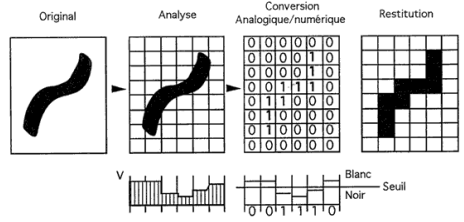

In [ ]:
imgData2